In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.model_selection import train_test_split , cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression
from category_encoders import BinaryEncoder
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , SVR
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score , mean_squared_error , accuracy_score
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier , RandomForestRegressor , GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier, XGBRegressor ,XGBClassifier , XGBRegressor
from lightgbm import LGBMClassifier , LGBMRegressor
from sklearn.decomposition import PCA
import joblib

# EDA

In [2]:
data = pd.read_csv('movies_metadata.csv', low_memory=False)

In [3]:
df = pd.DataFrame(data)
df

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
for col in df.select_dtypes('O').columns:
    print(col)
    print(df[col].unique())
    print(30*'*')

adult
['False' 'True' ' - Written by Ørnås'
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']
******************************
belongs_to_collection
["{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"
 nan
 "{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"
 ...
 "{'id': 148603, 'name': 'Ducobu Collection', 'poster_path': '/rd7AWZUy2QFPIblNWToVmdfXQcA.jpg', 'backdrop_path': '/7mzKmoIrvGapvsSbAVlX4HtCnFj.jpg'}"
 "{'id': 152918, 'name': 'Mister Blot Collection', 'poster_path': '/44PYEwwjGts8pAob59RHd6zlkKc.jpg', 'backdrop_path': '/5uoPsNiFpUYNamSGqE8okN27VRK.jpg'}"
 "{'id': 200641, 'name': 'Red

In [6]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [7]:
df = df.drop(['id' , 'budget' , 'overview', 'title','homepage','video' , 'imdb_id' ,'adult', 'tagline' , 'belongs_to_collection','poster_path'], axis=1)

In [8]:
df.rename(columns={'original_title': 'title'}, inplace=True)

In [9]:
df = df.drop_duplicates(subset='title', keep='first')

In [10]:
df.isna().sum()

genres                    0
original_language        11
title                     0
popularity                5
production_companies      3
production_countries      3
release_date             84
revenue                   5
runtime                 255
spoken_languages          5
status                   84
vote_average              5
vote_count                5
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.describe()

revenue       runtime  vote_average    vote_count
count  4.336800e+04  43118.000000  43368.000000  43368.000000
mean   1.093370e+07     93.820980      5.627156    107.674299
std    6.305396e+07     37.745649      1.927291    484.314142
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

In [15]:
for col in df.select_dtypes('O').columns:
    print(col)
    print(df[col])
    print(30*'*')

genres
0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45459             [{'id': 878, 'name': 'Science Fiction'}]
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45464                                                   []
45465                                                   []
Name: genres, Length: 43373, dtype: object
******************************
original_language
0        en
1        en
2        en
3        en
4        en
         ..
45459    en
45461    fa
45462    tl
45464    en
45465    en
Name: original_language, Length: 43373, dtype: object
******************************
title
0                          To

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].dt.year

In [17]:
df['release_date'].unique()

array([1995., 1996., 1994., 1997., 1976., 1992., 1967., 1993., 1964.,
       1977., 1965., 1982., 1985., 1990., 1991., 1989., 1937., 1940.,
       1969., 1981., 1974., 1970., 1960., 1955., 1959., 1968., 1980.,
       1988., 1975., 2002.,   nan, 1948., 1943., 1950., 1987., 1973.,
       1956., 1958., 1949., 1972., 1953., 1998., 1933., 2010., 1952.,
       1951., 1957., 1961., 1954., 1934., 1944., 1963., 1942., 1941.,
       1939., 1947., 1946., 1945., 1938., 1935., 1936., 1932., 1979.,
       1971., 1986., 2013., 1978., 1966., 1962., 1983., 1984., 1931.,
       1922., 1999., 1927., 1929., 1930., 1928., 2012., 1925., 2000.,
       1919., 1926., 1923., 1920., 1918., 1921., 2001., 2011., 1924.,
       2003., 2004., 1915., 1916., 1917., 2005., 2006., 1902., 1903.,
       2007., 2008., 2009., 1914., 1912., 1913., 1898., 1899., 1894.,
       1909., 1901., 1893., 1896., 2014., 1910., 2016., 2015., 1895.,
       1911., 2020., 2017., 1905., 1904., 1891., 2018., 1892., 1908.,
       1897., 1887.,

In [18]:
print(type(df['genres'].iloc[0]))
print(df['genres'].iloc[0])


<class 'str'>
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [19]:
df['genres_parsed'] = df['genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['type_of_movie'] = df['genres_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
print(df['type_of_movie'])


0              Animation
1              Adventure
2                Romance
3                 Comedy
4                 Comedy
              ...       
45459    Science Fiction
45461              Drama
45462              Drama
45464               None
45465               None
Name: type_of_movie, Length: 43373, dtype: object


In [20]:
print(type(df['production_companies'].iloc[0]))
print(df['production_companies'].iloc[0])


<class 'str'>
[{'name': 'Pixar Animation Studios', 'id': 3}]


In [21]:
df['production_companies_parsed'] = df['production_companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['company_names'] = df['production_companies_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['company_names'] = df['company_names'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
print(df['company_names'])


0                       Pixar Animation Studios
1                              TriStar Pictures
2                                  Warner Bros.
3        Twentieth Century Fox Film Corporation
4                         Sandollar Productions
                          ...                  
45459                     Concorde-New Horizons
45461                                      None
45462                               Sine Olivia
45464                                 Yermoliev
45465                                      None
Name: company_names, Length: 43373, dtype: object


In [22]:
print(type(df['spoken_languages'].iloc[0]))
print(df['spoken_languages'].iloc[0])

<class 'str'>
[{'iso_639_1': 'en', 'name': 'English'}]


In [23]:
df['spoken_languages_parsed'] = df['spoken_languages'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['languages'] = df['spoken_languages_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['languages'] = df['languages'].apply(lambda x: x[0] if isinstance(x, list) and x else None)

print(df['languages'])


0        English
1        English
2        English
3        English
4        English
          ...   
45459    English
45461      فارسی
45462           
45464       None
45465    English
Name: languages, Length: 43373, dtype: object


In [24]:
print(type(df['production_countries'].iloc[0]))
print(df['production_countries'].iloc[0])

<class 'str'>
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [25]:
df['production_countries_parsed'] = df['production_countries'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['countries'] = df['production_countries_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['countries'] = df['countries'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
print(df['countries'])

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45459    United States of America
45461                        Iran
45462                 Philippines
45464                      Russia
45465              United Kingdom
Name: countries, Length: 43373, dtype: object


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43373 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   genres                       43373 non-null  object 
 1   original_language            43362 non-null  object 
 2   title                        43373 non-null  object 
 3   popularity                   43368 non-null  object 
 4   production_companies         43370 non-null  object 
 5   production_countries         43370 non-null  object 
 6   release_date                 43287 non-null  float64
 7   revenue                      43368 non-null  float64
 8   runtime                      43118 non-null  float64
 9   spoken_languages             43368 non-null  object 
 10  status                       43289 non-null  object 
 11  vote_average                 43368 non-null  float64
 12  vote_count                   43368 non-null  float64
 13  genres_parsed        

In [27]:
df = df.drop(['original_language' , 'production_companies' ,'production_countries' ,
              'production_companies_parsed' , 'spoken_languages_parsed' ,
              'production_countries_parsed' ,'spoken_languages' , 'genres_parsed' , 'genres'] , axis=1) 

In [28]:
df.isna().sum()

title                0
popularity           5
release_date        86
revenue              5
runtime            255
status              84
vote_average         5
vote_count           5
type_of_movie     2343
company_names    11373
languages         3632
countries         5995
dtype: int64

In [29]:
#convert list to string
df['countries'] = df['countries'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['languages'] = df['languages'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['company_names'] = df['company_names'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['countries'] = pd.DataFrame(df['countries'])
df['languages'] = pd.DataFrame(df['languages'])
df['company_names'] = pd.DataFrame(df['company_names'])
df['type_of_movie'] = pd.DataFrame(df['type_of_movie'])
df.replace('', np.nan, inplace=True)

In [30]:
for col in df.select_dtypes('O').columns:
    print(col)
    print(df[col].unique())
    print(30*'*')

title
['Toy Story' 'Jumanji' 'Grumpier Old Men' ... 'Siglo ng Pagluluwal'
 'Satana likuyushchiy' 'Queerama']
******************************
popularity
['21.946943' '17.015539' '11.7129' ... '0.178241' '0.003503' '0.163015']
******************************
status
['Released' nan 'Rumored' 'Post Production' 'In Production' 'Planned'
 'Canceled']
******************************
type_of_movie
['Animation' 'Adventure' 'Romance' 'Comedy' 'Action' 'Family' 'History'
 'Drama' 'Crime' 'Fantasy' 'Science Fiction' None 'Thriller' 'Music'
 'Horror' 'Documentary' 'Mystery' 'Western' 'TV Movie' 'War' 'Foreign'
 'Carousel Productions' 'Aniplex']
******************************
company_names
['Pixar Animation Studios' 'TriStar Pictures' 'Warner Bros.' ...
 'Neptune Salad Entertainment' 'Sine Olivia' 'Yermoliev']
******************************
languages
['English' 'Français' '广州话 / 廣州話' '普通话' 'Pусский' 'Español' None 'shqip'
 'Italiano' 'Deutsch' 'فارسی' 'Nederlands' 'Dansk' 'العربية' 'Magyar' nan
 'Český

In [31]:
df.isna().sum()

title                0
popularity           5
release_date        86
revenue              5
runtime            255
status              84
vote_average         5
vote_count           5
type_of_movie     2343
company_names    11373
languages         3847
countries         5995
dtype: int64

In [32]:
df['runtime'] = df['runtime'].apply(lambda x: df['runtime'].mean() if pd.isna(x) else x)
df['status'] = df['status'].apply(lambda x: df['status'].mode()[0] if pd.isna(x) else x)
df['revenue'] = df['revenue'].apply(lambda x: df['revenue'].mean() if pd.isna(x) else x)
df['vote_count'] = df['vote_count'].apply(lambda x: df['vote_count'].mean() if pd.isna(x) else x)
df['vote_average'] = df['vote_average'].apply(lambda x: df['vote_average'].mean() if pd.isna(x) else x)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['popularity'] = df['popularity'].apply(lambda x: df['popularity'].mean() if pd.isna(x) else x)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: df['type_of_movie'].mode()[0] if pd.isna(x) else x)
df['popularity'] = df['popularity'].astype(int)
df['release_date']= df['release_date'].apply(lambda x: df['release_date'].mode()[0] if pd.isna(x) else x)

In [34]:
df['type_of_movie'] = df['type_of_movie'].apply(
    lambda x: df['type_of_movie'].mode()[0] if pd.isna(x) else x)

df['languages'] = df['languages'].apply(
    lambda x: df['languages'].mode()[0] if pd.isna(x) else x)

df['countries'] = df['countries'].apply(
    lambda x: df['countries'].mode()[0] if pd.isna(x) else x)

df['company_names'] = df['company_names'].apply(
    lambda x: df['company_names'].mode()[0] if pd.isna(x) else x)

In [35]:
df_lst_true = ['Action' , 'Horror' , 'Crime' , 'Thriller' , 'Western' , 'War' , 'Mystery' , 'Romance']
adult_t = []
for col in df['type_of_movie']:
    if col in df_lst_true:
        adult_t.append(1)
    else:
        adult_t.append(0)
df['adult'] = adult_t

In [36]:
def is_adult(genres):
    if isinstance(genres, str):
        genres = [g.strip() for g in genres.split(',')]
    return int(any(genre in df_lst_true for genre in genres))

df['adult'] = df['type_of_movie'].apply(is_adult)

In [37]:
df['adult'].value_counts().reset_index()

adult  count
0      0  31082
1      1  12291

In [38]:
df.isna().sum()

title            0
popularity       0
release_date     0
revenue          0
runtime          0
status           0
vote_average     0
vote_count       0
type_of_movie    0
company_names    0
languages        0
countries        0
adult            0
dtype: int64

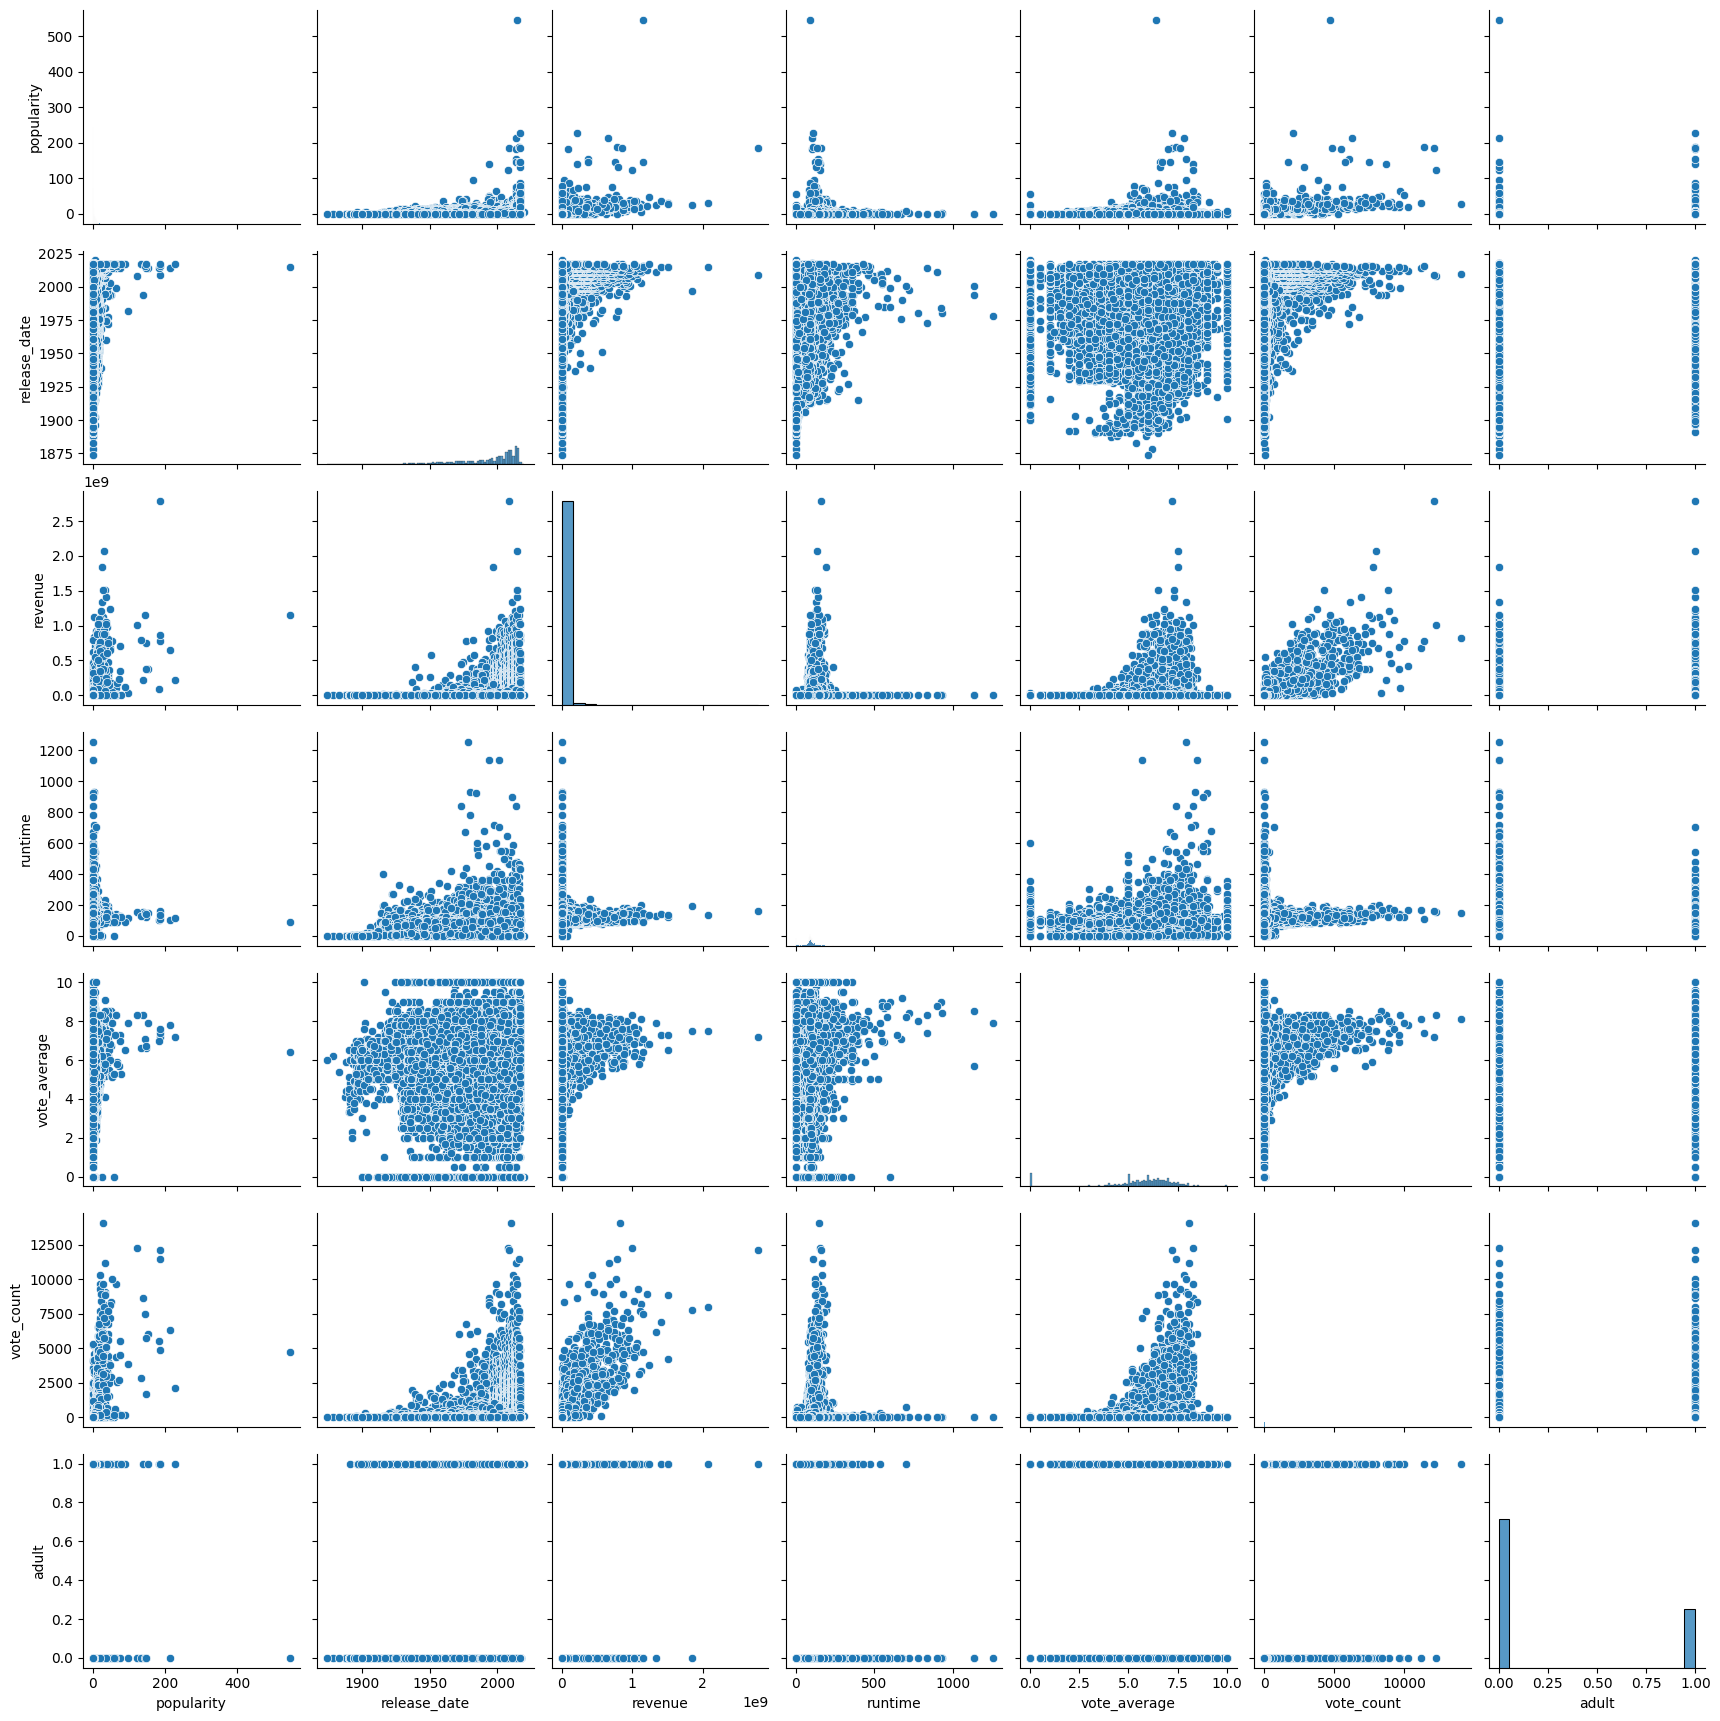

In [39]:
sns.pairplot(df)

# visualization

## -movie name and revnu top 20

In [ ]:
rev_ = df.groupby(['title'])['revenue'].sum().reset_index()
rev_ = rev_.sort_values(by ='revenue' ,ascending=0).head(20)
q2 = px.histogram(rev_ , x='title', y = 'revenue' , text_auto=True)
q2

## -type of movie are most common

In [ ]:
type_counts = df.groupby(['type_of_movie'])['vote_count'].sum().reset_index()
type_counts = type_counts.sort_values(by='vote_count' , ascending=1)
q4 = px.bar(type_counts , x='type_of_movie', y = 'vote_count')
q4

## -top 20 countries produce the most movies

In [ ]:
countries_counts = df['countries'].value_counts().reset_index().head(20)
q5 = px.bar(countries_counts , x='countries', y = 'count')
q5

In [ ]:
country_counts = df['countries'].value_counts().reset_index()
country_counts.columns = ['countries', 'movie_count']

In [ ]:
q7 = px.choropleth(
    country_counts,
    locations='countries',
    locationmode='country names',
    color='movie_count',
    hover_name='countries',
    color_continuous_scale='Blues',
    title='Movies Produced by Country'
)
q7

## -languages are most commonly used in movies

In [ ]:
languag = df['languages'].value_counts().reset_index().head(20)
languag.columns = ['languages', 'languages_count']
q8 = px.bar(languag , x='languages', y = 'languages_count')
q8

## -companies produce the most high-rated movies

In [ ]:
q9_filter = df.groupby(['countries', 'company_names'])['vote_average'].sum().reset_index()
q9_filter = q9_filter[q9_filter['countries'] == 'United States of America']
q9_filter = q9_filter.sort_values(by='vote_average', ascending=0).head(5)
q9 = px.bar(q9_filter, 
            x='vote_average', 
            y='company_names',color='vote_average')
q9.show()

## -the top 10 highest-rated movies based on vote_average

In [ ]:
top_mov = df.groupby(['title'])['vote_average'].sum().reset_index()
top_mov = top_mov.sort_values(by = 'vote_average' , ascending =0).head(10)
q10 =px.bar(top_mov , x ='title', y='vote_average')
q10

## -production companies (company_names) have the highest total votes or average ratings

In [ ]:
q11_filter = df.groupby('company_names')['vote_count'].sum().reset_index()
q11_filter = q11_filter.sort_values(by='vote_count', ascending=False).head(5)
q11_filter['highlight'] = q11_filter['company_names'] == q11_filter.iloc[0]['company_names']
q11 = px.pie(q11_filter,
             names='company_names',
             values='vote_count',
             title='Top 5 Movie Types by Vote Count',
             color='highlight',
             color_discrete_map={True: 'gold', False: 'lightgray'},
             hole=0.2)
q11.update_traces(textposition='inside', textinfo='percent+label')
q11

## Trend of Movie Revenue by Release Date

In [ ]:
q144 = df.groupby('release_date')['revenue'].sum().reset_index()
q144 = q144.sort_values(by='revenue', ascending=True)

In [ ]:
q14 = px.line(q144 , x='revenue' , y ='release_date')
q14

##  -average runtime of movies across different 

In [ ]:
q13_filter = df.groupby(['type_of_movie'])['runtime'].sum().reset_index()
q13_filter = q13_filter.sort_values(by='runtime' , ascending=0).head(10)
q13 = px.histogram(q13_filter , x='type_of_movie' , y ='runtime')
q13

# ML

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43373 entries, 0 to 45465
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          43373 non-null  object 
 1   popularity     43373 non-null  int64  
 2   release_date   43373 non-null  float64
 3   revenue        43373 non-null  float64
 4   runtime        43373 non-null  float64
 5   status         43373 non-null  object 
 6   vote_average   43373 non-null  float64
 7   vote_count     43373 non-null  float64
 8   type_of_movie  43373 non-null  object 
 9   company_names  43373 non-null  object 
 10  languages      43373 non-null  object 
 11  countries      43373 non-null  object 
 12  adult          43373 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 4.6+ MB


In [41]:
x = df.drop(['adult'], axis=1)
y = df['adult']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

In [43]:
for col in x_train.select_dtypes('O').columns :
    print(f'{col} -- {x_train[col].nunique()}')

title -- 34698
status -- 6
type_of_movie -- 22
company_names -- 8864
languages -- 72
countries -- 138


In [44]:
categorical_cols = ['status', 'company_names', 'languages', 'countries' , 'type_of_movie']

In [45]:
transformer = ColumnTransformer(
    transformers=[
        ('be', BinaryEncoder(), categorical_cols)
    ],
    remainder='drop'
)

In [46]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [47]:
models = [
    LogisticRegression(C =0.1),
    KNeighborsClassifier(),
    GaussianNB(),
    #SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective='binary:logistic'),
    LGBMClassifier()
]

In [48]:
def Modeling(x_train , x_test ,y_train , y_test , model_name):
    try:
        model = model_name
        model.fit(x_train , y_train)
        print(f'train = {model.score(x_train , y_train)}')
        print(f'test = {model.score(x_test , y_test)}')
    except:
        print('ERROR')

In [49]:
for model in models:
    print(model)
    Modeling(x_train_transformed , x_test_transformed ,y_train , y_test ,model)
    print('*_*_' * 20)

LogisticRegression(C=0.1)
train = 0.8877745114992218
test = 0.8742363112391931
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
KNeighborsClassifier()
train = 0.9618710012104444
test = 0.9425936599423631
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
GaussianNB()
train = 0.8729321574730532
test = 0.8705475504322766
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
DecisionTreeClassifier()
train = 1.0
test = 1.0
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
RandomForestClassifier()
train = 1.0
test = 0.9997694524495677
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
GradientBoostingClassifier()
train = 1.0
test = 1.0
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
        

In [103]:
pl = make_pipeline(transformer , StandardScaler(),PCA(n_components=0.95) ,LGBMClassifier())

In [104]:
cv = cross_validate(estimator=pl, X=x, y=y, cv=5, scoring='accuracy', return_train_score=True)

[LightGBM] [Info] Number of positive: 9833, number of negative: 24865
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 34698, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283388 -> initscore=-0.927717
[LightGBM] [Info] Start training from score -0.927717
[LightGBM] [Info] Number of positive: 9833, number of negative: 24865
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 34698, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283388 -> initscore=-0.927717
[LightGBM] [Info] Start training from score -0.927717
[LightGBM] [In

In [105]:
cv['train_score'].mean()

np.float64(0.9947663209431832)

In [106]:
cv['test_score'].mean()

np.float64(0.9795953909095318)

In [107]:
pl.steps

[('columntransformer',
  ColumnTransformer(transformers=[('be', BinaryEncoder(),
                                   ['status', 'company_names', 'languages',
                                    'countries', 'type_of_movie'])])),
 ('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=0.95)),
 ('lgbmclassifier', LGBMClassifier())]

In [111]:
pl_params = {
    'pca__n_components': [0.90, 0.95, 0.99],
    'lgbmclassifier__n_estimators': [50, 100, 200],
    'lgbmclassifier__max_depth': [3, 5, 7, 1],
}

In [112]:
pl_srch = GridSearchCV(estimator=pl , param_grid= pl_params , cv = 5 , scoring='accuracy' , return_train_score=True)

In [113]:
pl_srch.fit(x , y)

[LightGBM] [Info] Number of positive: 9833, number of negative: 24865
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 34698, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283388 -> initscore=-0.927717
[LightGBM] [Info] Start training from score -0.927717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('be',
                                                                         BinaryEncoder(),
                                                                         ['status',
                                                                          'company_names',
                                                                          'languages',
                                                                          'countries',
                                                                          'type_of_movie'])])),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': [3, 5, 7, 1],
                         'lgbmclassifier__n_estimators': [50, 100, 200],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             return_train_score=True, scoring='accuracy')

In [114]:
pl_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('be', BinaryEncoder(),
                                                  ['status', 'company_names',
                                                   'languages', 'countries',
                                                   'type_of_movie'])])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.99)),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=7, n_estimators=200))])

In [116]:
pl_srch.best_score_

np.float64(0.9957345779463486)

In [117]:
joblib.dump(pl_srch.best_estimator_ , 'knn9.h5')

['knn9.h5']

# Python & Streamlit

In [118]:
%%writefile moviefinal.py

import streamlit as st
import pandas as pd 
import numpy as np
import plotly.express as px
import sklearn
import category_encoders
import joblib
import ast
st.set_page_config(layout='wide')
#####################################################################################
# Cleaning
data = pd.read_csv('movies_metadata.csv', low_memory=False)
df = pd.DataFrame(data)
df = df.drop(['id' , 'budget' , 'overview', 'title','homepage','video' , 'imdb_id' ,'adult', 'tagline' , 'belongs_to_collection','poster_path'], axis=1)
df.rename(columns={'original_title': 'title'}, inplace=True)
df = df.drop_duplicates(subset='title', keep='first')
df.drop_duplicates(inplace=True)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].dt.year
df['genres_parsed'] = df['genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['type_of_movie'] = df['genres_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: x[0] if isinstance(x, list) and x else None)


df['production_companies_parsed'] = df['production_companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['company_names'] = df['production_companies_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['company_names'] = df['company_names'].apply(lambda x: x[0] if isinstance(x, list) and x else None)


df['spoken_languages_parsed'] = df['spoken_languages'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['languages'] = df['spoken_languages_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['languages'] = df['languages'].apply(lambda x: x[0] if isinstance(x, list) and x else None)


df['production_countries_parsed'] = df['production_countries'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

df['countries'] = df['production_countries_parsed'].apply(
    lambda x: [d['name'] for d in x] if isinstance(x, list) else None
)
df['countries'] = df['countries'].apply(lambda x: x[0] if isinstance(x, list) and x else None)

df = df.drop(['original_language' , 'production_companies' ,'production_countries' ,
              'production_companies_parsed' , 'spoken_languages_parsed' ,
              'production_countries_parsed' ,'spoken_languages' , 'genres_parsed' , 'genres'] , axis=1) 


df['countries'] = df['countries'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['languages'] = df['languages'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['company_names'] = df['company_names'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
df['countries'] = pd.DataFrame(df['countries'])
df['languages'] = pd.DataFrame(df['languages'])
df['company_names'] = pd.DataFrame(df['company_names'])
df['type_of_movie'] = pd.DataFrame(df['type_of_movie'])
df.replace('', np.nan, inplace=True)

df['runtime'] = df['runtime'].apply(lambda x: df['runtime'].mean() if pd.isna(x) else x)
df['status'] = df['status'].apply(lambda x: df['status'].mode()[0] if pd.isna(x) else x)
df['revenue'] = df['revenue'].apply(lambda x: df['revenue'].mean() if pd.isna(x) else x)
df['vote_count'] = df['vote_count'].apply(lambda x: df['vote_count'].mean() if pd.isna(x) else x)
df['vote_average'] = df['vote_average'].apply(lambda x: df['vote_average'].mean() if pd.isna(x) else x)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['popularity'] = df['popularity'].apply(lambda x: df['popularity'].mean() if pd.isna(x) else x)
df['type_of_movie'] = df['type_of_movie'].apply(lambda x: df['type_of_movie'].mode()[0] if pd.isna(x) else x)
df['popularity'] = df['popularity'].astype(int)
df['release_date']= df['release_date'].apply(lambda x: df['release_date'].mode()[0] if pd.isna(x) else x)

df['type_of_movie'] = df['type_of_movie'].apply(
    lambda x: df['type_of_movie'].mode()[0] if pd.isna(x) else x)

df['languages'] = df['languages'].apply(
    lambda x: df['languages'].mode()[0] if pd.isna(x) else x)

df['countries'] = df['countries'].apply(
    lambda x: df['countries'].mode()[0] if pd.isna(x) else x)

df['company_names'] = df['company_names'].apply(
    lambda x: df['company_names'].mode()[0] if pd.isna(x) else x)
df_lst_true = ['Action' , 'Horror' , 'Crime' , 'Thriller' , 'Western' , 'War' , 'Mystery' , 'Romance']
adult_t = []
for col in df['type_of_movie']:
    if col in df_lst_true:
        adult_t.append(1)
    else:
        adult_t.append(0)
df['adult'] = adult_t
def is_adult(genres):
    if isinstance(genres, str):
        genres = [g.strip() for g in genres.split(',')]
    return int(any(genre in df_lst_true for genre in genres))

df['adult'] = df['type_of_movie'].apply(is_adult)
################################################################################################

with st.sidebar:
    st.title('Movie Dashboard')
select_ss = st.sidebar.selectbox('Select',  
                                    ('Select','Data Analysis' , 'Machine Learning'))

if select_ss=='Select':
    st.title('Please Select')

elif select_ss == 'Data Analysis':
    st.write("Data Analysis section coming soon...")

## -movie name and revnu top 20
    st.title('Movie Name and Revnu Top 20')
    rev_ = df.groupby(['title'])['revenue'].sum().reset_index()
    rev_ = rev_.sort_values(by ='revenue' ,ascending=0).head(20)
    q1 = px.histogram(rev_ , x='title', y = 'revenue' , text_auto=True)
    st.plotly_chart(q1)
    #type of movie are most common
    st.title('type of movie are most common')
    type_counts = df.groupby(['type_of_movie'])['vote_count'].sum().reset_index()
    type_counts = type_counts.sort_values(by='vote_count' , ascending=1)
    q2 = px.bar(type_counts , x='type_of_movie', y = 'vote_count')
    st.plotly_chart(q2)

    #top 20 countries produce the most movies
    countries_counts = df['countries'].value_counts().reset_index().head(20)
    countries_counts.columns = ['countries', 'count']
    q3 = px.bar(countries_counts, x='countries', y='count')
    st.plotly_chart(q3)

    country_counts = df['countries'].value_counts().reset_index()
    country_counts.columns = ['countries', 'movie_count']
    q33 = px.choropleth(
    country_counts,
    locations='countries',
    locationmode='country names',
    color='movie_count',
    hover_name='countries',
    color_continuous_scale='Blues',
    title='Movies Produced by Country')
    st.plotly_chart(q33)

    #languages are most commonly used in movies
    st.title('Languages are most commonly used in movies')
    languag = df['languages'].value_counts().reset_index().head(20)
    languag.columns = ['languages', 'languages_count']
    q4 = px.bar(languag , x='languages', y = 'languages_count')
    st.plotly_chart(q4)
    #companies produce the most high-rated movies
    st.title('Companies produce the most high-rated movies')
    q5_filter = df.groupby(['countries', 'company_names'])['vote_average'].sum().reset_index()
    q5_filter = q5_filter[q5_filter['countries'] == 'United States of America']
    q5_filter = q5_filter.sort_values(by='vote_average', ascending=0).head(5)
    q5 = px.bar(q5_filter, x='vote_average', y='company_names',color='vote_average')
    st.plotly_chart(q5)
    #the top 10 highest-rated movies
    st.title('The top 10 highest-rated movies')
    top_mov = df.groupby(['title'])['vote_average'].sum().reset_index()
    top_mov = top_mov.sort_values(by = 'vote_average' , ascending =0).head(10)
    q6 =px.bar(top_mov , x ='title', y='vote_average')
    st.plotly_chart(q6)
    #production companies (company_names) have the highest total votes or average ratings
    st.title('Production companies have the highest total average ratings')
    q7_filter = df.groupby('company_names')['vote_count'].sum().reset_index()
    q7_filter = q7_filter.sort_values(by='vote_count', ascending=False).head(5)
    q7_filter['highlight'] = q7_filter['company_names'] == q7_filter.iloc[0]['company_names']
    q7 = px.pie(q7_filter,
                 names='company_names',
                 values='vote_count',
                 title='Top 5 Movie Types by Vote Count',
                 color='highlight',
                 color_discrete_map={True: 'gold', False: 'lightgray'},
                 hole=0.2)
    q7.update_traces(textposition='inside', textinfo='percent+label')
    st.plotly_chart(q7)
    #average runtime of movies across different
    st.title('Average runtime of movies across different')
    q8_filter = df.groupby(['type_of_movie'])['runtime'].sum().reset_index()
    q8_filter = q8_filter.sort_values(by='runtime' , ascending=0).head(10)
    q8 = px.histogram(q8_filter , x='type_of_movie' , y ='runtime')
    st.plotly_chart(q8)
    #Trend of Movie Revenue by Release Date
    st.title('Trend of Movie Revenue by Release Date')
    q99 = df.groupby('release_date')['revenue'].sum().reset_index()
    q99 = q99.sort_values(by='revenue', ascending=True)
    q9 = px.line(q99 , x='revenue' , y ='release_date')
    st.plotly_chart(q9)


    
    
elif select_ss == 'Machine Learning':
    st.write("Welcome to the Machine Learning section")
    def get_input():
     #1
        revenue = st.slider("Select revenue", 0, 2787965087)
        st.write("Level:", revenue)
    #2
        release_date = st.slider("Select release date" , 1874, 2020)
        st.write("Release Date:", release_date)
    #3
        popularity = st.slider("Select popularity", 0, 600)
        st.write("Level:", popularity)
    #4
        runtime = st.slider("Select runtime", 0, 1300)
        st.write("runtime:", runtime)
    #5
        status = st.selectbox("Choose status:", ['Released', 'Rumored', 'Post Production', 'In Production',
           'Planned', 'Canceled'])
        st.write("You selected:", status)
    #6
        vote_average = st.slider("Select vote_average", 0, 10)
        st.write("Level:", vote_average)
     #7
        vote_count = st.slider("Select vote_count", 0, 14075)
        st.write("Level:", vote_count)
     #8
        languages = st.selectbox("Choose status:", ['English' ,'Français', 'Español' ,'Deutsch' ,'Pусский', 'Latin' ,'Nederlands',
         '广州话 / 廣州話', '普通话' ,'Magyar' ,'shqip', 'Italiano' ,'한국어/조선말', 'فارسی' ,'Dansk',
         '日本語', 'العربية' ,'Hrvatski' ,'Bosanski' ,'Română' ,'Bahasa indonesia',
         'Bahasa melayu', 'svenska' ,'עִבְרִית', 'Český' ,'Polski', 'Gaeilge' ,'Norsk',
         'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी' ,'Català' ,'Íslenska',
         'Afrikaans', 'Srpski', 'বাংলা' ,'Wolof' ,'Cymraeg' ,'ภาษาไทย', 'Latviešu',
         'Kiswahili' ,'български език', 'ελληνικά', 'Türkçe', 'suomi' ,'Esperanto',
         'Український', 'ქართული', 'Bokmål', 'euskera', 'Azərbaycan' ,'Malti', 'اردو',
         'isiZulu' ,'Bamanankan', 'پښتو', 'Somali' ,'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்',
         'Galego' ,'Kinyarwanda', 'қазақ' ,'Eesti' ,'Lietuvi\x9akai', 'Slovenščina',
         'తెలుగు', 'Fulfulde', 'ozbek', 'Hausa'])
        st.write("You selected:", languages)
    #9
        title = st.selectbox("Choose title of movie:", ['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina',
                                                        'Tom and Huck', 'Sudden Death', 'GoldenEye', 'The American President', 'Dracula: Dead and Loving It', 'Balto', 'Nixon',
                                                        'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty',
                                                        'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'La Cité des Enfants Perdus',
                                                        '摇啊摇，摇到外婆桥', 'Dangerous Minds', 'Twelve Monkeys', 'Guillaumet, les ailes du courage', 'Babe',
                                                        'Carrington', 'Dead Man Walking', 'Across the Sea of Time', 'It Takes Two', 'Clueless',
                                                        'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 
                                                        'To Die For', 'How To Make An American Quilt', 'Se7en', 'Pocahontas', 'When Night Is Falling',
                                                        'The Usual Suspects', 'Guardian Angel', 'Mighty Aphrodite', 'Lamerica', 'The Big Green', 'Georgia',
                                                        'Kids of the Round Table', 'Home for the Holidays', 'Il postino', 'Le confessionnal', 
                                                        'The Indian in the Cupboard', 'Eye for an Eye', "Mr. Holland's Opus", 
                                                        "Don't Be a Menace to South Central While Drinking Your Juice in the Hood", 'Two If by Sea', 'Bio-Dome',
                                                        'Lawnmower Man 2: Beyond Cyberspace', 'Two Bits', 'Gazon maudit', 'Friday', 'From Dusk Till Dawn', 'Fair Game', 
                                                        'Kicking and Screaming', 'Les misérables', 'Bed of Roses', 'Big Bully', 'Screamers', 'Nico Icon',
                                                        'The Crossing Guard', 'The Juror', 'بادکنک سفید', "Things to Do in Denver When You're Dead", 'Antonia',
                                                        'Once Upon a Time... When We Were Colored', 'Last Summer in the Hamptons', 'Angels and Insects', 'White Squall',
                                                        'Dunston Checks In', 'Black Sheep', 'Nick of Time', 'The Journey of August King', 'Mary Reilly',
                                                        'Vampire in Brooklyn', 'Beautiful Girls', 'Broken Arrow', "A Midwinter's Tale", 'La Haine', 'Shopping',
                                                        'Heidi Fleiss: Hollywood Madam', 'City Hall', 'Bottle Rocket', 'Mr. Wrong', 'Unforgettable', 'Happy Gilmore',
                                                        'The Bridges of Madison County', 'Keiner liebt mich', 'Muppet Treasure Island', 'Catwalk', 
                                                        'Headless Body in Topless Bar', 'Braveheart', 'Taxi Driver', '紅番區', 'Before and After', "Margaret's Museum",
                                                        'Le Bonheur est dans le pré', 'Anne Frank Remembered', "The Young Poisoner's Handbook", 'If Lucy Fell', 
                                                        'Steal Big Steal Little', 'Race the Sun', 'The Boys of St. Vincent', 'Boomerang', '重慶森林', 
                                                        "L'uomo delle stelle", 'Flirting with Disaster', 'The NeverEnding Story III', 'صمت القصور', "Jupiter's Wife",
                                                        'Pie in the Sky', 'Angela', 'Frankie Starlight', 'Jade', 'Nueba Yol', 'Sonic Outlaws', 'Down Periscope',
                                                        'From the Journals of Jean Seberg', 'Man of the Year', 'The Neon Bible', 'Target', 'Up Close & Personal',
                                                        'The Birdcage', 'Gospa', 'The Brothers McMullen', 'Bad Boys', 'The Amazing Panda Adventure',
                                                        'The Basketball Diaries', 'An Awfully Big Adventure', 'Amateur', 'Apollo 13', 'Rob Roy', 'The Addiction',
                                                        'Batman Forever', 'Belle de jour', 'Beyond Rangoon', 'Blue in the Face', 'Canadian Bacon', 'Casper', 'Clockers',
                                                        'Congo', 'Crimson Tide', 'Crumb', 'Desperado', 'Devil in a Blue Dress', 'Die Hard: With a Vengeance', 
                                                        'The Doom Generation', 'Feast of July', 'First Knight', 'Free Willy 2 - The Adventure Home', 'Hackers', 
                                                        'Jeffrey', 'Johnny Mnemonic', 'Judge Dredd', 'Jury Duty', 'Kids', 'Living in Oblivion', 'Lord of Illusions', 
                                                        'Love & Human Remains', 'Mad Love', 'Mallrats', 'Mighty Morphin Power Rangers: The Movie', 
                                                        'Moonlight and Valentino', 'Mute Witness', 'Nadja', 'The Net', 'Nine Months', 'Party Girl', 'The Prophecy',
                                                        'Reckless', 'Safe', 'The Scarlet Letter', 'The Show', 'Showgirls', 'Smoke', 'Something to Talk About',
                                                        'Species', 'The Stars Fell on Henrietta', 'Strange Days', 'Les parapluies de Cherbourg', 'The Tie That Binds',
                                                        'Three Wishes', 'Total Eclipse', 'To Wong Foo, Thanks for Everything! Julie Newmar',
                                                        'Under Siege 2: Dark Territory', 'Unstrung Heroes', 'Unzipped', 'A Walk in the Clouds', 'Waterworld',
                                                        "White Man's Burden", 'Wild Bill', 'The Browning Version', 'Bushwhacked', 'Утомлённые солнцем',
                                                        'Before the Rain', 'Before Sunrise', 'Billy Madison', 'The Babysitter', 'Boys on the Side', 'The Cure',
                                                        'Castle Freak', 'Circle of Friends', 'Clerks', 'Don Juan DeMarco', 'Disclosure', 'Dream Man', 'Drop Zone',
                                                        'Destiny Turns on the Radio', 'Death and the Maiden', 'Dolores Claiborne', 'Dumb and Dumber', '飲食男女',
                                                        'Exotica', 'Exit to Eden', 'Ed Wood', 'French Kiss', 'Forget Paris', 'Far from Home: The Adventures of Yellow Dog', 
                                                        'A Goofy Movie', 'Hideaway', 'Fluke', 'Farinelli', 'Gordy', 'Gumby: The Movie', 'The Glass Shield', 'Hoop Dreams', 
                                                        'Heavenly Creatures', 'Houseguest', 'Immortal Beloved', 'Heavyweights', 'The Hunted', 'I.Q.', 'Interview with the Vampire',
                                                        'Jefferson in Paris', 'The Jerky Boys', 'Junior', 'Just Cause', "A Kid in King Arthur's Court", 'Kiss of Death', 'Star Wars',
                                                        'Little Women', 'A Little Princess', 'Ladybird Ladybird', "L'Enfer", 'Como agua para chocolate', 'Legends of the Fall', 
                                                        'Major Payne', 'Little Odessa', 'Mi Vida Loca', 'Love Affair', 'Losing Isaiah', 'The Madness of King George', 'Frankenstein', 
                                                        'Man of the House', 'Mixed Nuts', 'Milk Money', 'Miracle on 34th Street', 'Miami Rhapsody', 'My Family', 'Murder in the First',
                                                        "Nobody's Fool", 'Nell', 'New Jersey Drive', 'New York Cop', 'Beyond Bedlam', 'Nemesis 2 - Nebula', 'Nina Takes a Lover', 
                                                        'Natural Born Killers', 'Only You', 'Once Were Warriors', 'Poison Ivy II: Lily', 'Outbreak', 'Léon', 'The Perez Family',
                                                        "A Pyromaniac's Love Story", 'Pulp Fiction', 'Panther', 'Pushing Hands', 'Priest', 'Quiz Show', 'Picture Bride', 'La Reine Margot',
                                                        'The Quick and the Dead', 'Roommates', 'Prêt-à-Porter', 'Trois couleurs : Rouge', 'Trois couleurs : Bleu', 'Trois couleurs : Blanc',
                                                        'Pao Da Shuang Deng', 'Rent-a-Kid', 'Relative Fear', 'Stuart Saves His Family', 'The Swan Princess', 'The Secret of Roan Inish', 
                                                        'The Specialist', 'Stargate', 'The Santa Clause', 'The Shawshank Redemption', 'Shallow Grave', 'Suture', 'Fresa y chocolate',
                                                        'Swimming with Sharks', 'The Sum of Us', 'Senior Trip', '活着', 'Tank Girl', 'Tales from the Crypt: Demon Knight', 'Star Trek: Generations',
                                                        'Tales from the Hood', 'Tom & Viv', 'Village of the Damned', 'Tommy Boy', 'Vanya on 42nd Street', 'The Underneath',
                                                        'The Walking Dead', "What's Eating Gilbert Grape", 'Virtuosity', 'While You Were Sleeping', 'The War', 'Double Happiness',
                                                        "Muriel's Wedding", 'The Baby-Sitters Club', 'Ace Ventura: Pet Detective', 'The Adventures of Priscilla, Queen of the Desert', 
                                                        'Backbeat', 'Bitter Moon', 'Bullets Over Broadway', 'Clear and Present Danger', 'The Client', 'Corrina, Corrina', 'Crooklyn', 
                                                        'The Crow', 'Cobb', 'The Flintstones', 'Forrest Gump', 'Four Weddings and a Funeral', 'Higher Learning', 'I Like It Like That', 
                                                        'I Love Trouble', 'It Could Happen to You', 'The Jungle Book', 'Die Macht der Bilder: Leni Riefenstahl', 'The Lion King',
                                                        'Little Buddha', 'New Nightmare', 'The Mask', 'Maverick', 'Mrs. Parker and the Vicious Circle', 'The Naked Gun 33⅓: The Final Insult',
                                                        'The Paper', 'Reality Bites', 'Red Rock West', 'Ri¢hie Ri¢h', 'Safe Passage', 'The River Wild', 'Speed', 'Speechless', 'Timecop', 
                                                        'True Lies', 'When a Man Loves a Woman', 'Wolf', 'Wyatt Earp', 'Bad Company', 'A Man of No Importance', 'S.F.W.', 
                                                        'A Low Down Dirty Shame', 'Boys Life: Three Stories of Love, Lust, and Liberation', 'Le colonel Chabert',
                                                        'Faster, Pussycat! Kill! Kill!', "Jason's Lyric", 'The Secret Adventures of Tom Thumb', 'Street Fighter', 'Coldblooded',
                                                        'Desert Winds', 'Fall Time', 'The Fear', 'Frank and Ollie', 'Girl in the Cadillac', 'Homage', 'Mirage', 'Open Season',
                                                        'Dos Crímenes', 'Brother Minister: The Assassination of Malcolm X', 'Highlander III: The Sorcerer', 'Federal Hill',
                                                        'In the Mouth of Madness', '8 Seconds', 'Above the Rim', 'Addams Family Values', 'Martin Lawrence: You So Crazy',
                                                        'The Age of Innocence', 'Airheads', 'The Air Up There', 'Another Stakeout', 'Bad Girls', 'Barcelona', 'Being Human', 'The Beverly Hillbillies', 'Beverly Hills Cop III', 'Black Beauty', 'Blink', 'Blown Away', 'Blue Chips', 'Blue Sky', 'Body Snatchers', 'Boxing Helena', 'A Bronx Tale', 'Cabin Boy', 'Calendar Girl', "Carlito's Way", "City Slickers II: The Legend of Curly's Gold", 'Clean Slate', 'Cliffhanger', 'Coneheads', 'Color of Night', 'Cops & Robbersons', 'The Cowboy Way', 'Dangerous Game', 'Dave', 'Dazed and Confused', 'Demolition Man', 'The Endless Summer 2', 'Even Cowgirls Get the Blues', 'Fatal Instinct', '霸王别姬', 'The Favor', 'Fearless', 'Fear of a Black Hat', 'With Honors', 'Flesh and Bone', "Widows' Peak", 'For Love or Money', 'The Firm', 'Free Willy', 'Fresh', 'The Fugitive', 'Geronimo: An American Legend', 'The Getaway', 'Getting Even with Dad', 'Go Fish', 'A Good Man in Africa', 'Guilty as Sin', 'Hard Target', 'Heaven & Earth', 'Hot Shots! Part Deux', 'Live Nude Girls', 'The Englishman Who Went Up a Hill But Came Down a Mountain', 'The House of the Spirits', 'House Party 3', 'The Hudsucker Proxy', "I'll Do Anything", 'In the Army Now', 'In the Line of Fire', 'In the Name of the Father', 'The Inkwell', "What's Love Got to Do with It", 'Jimmy Hollywood', 'Judgment Night', 'Jurassic Park', 'Kalifornia', 'Killing Zoe', 'King of the Hill', 'Lassie', 'Last Action Hero', 'Life With Mikey', 'Lightning Jack', 'M. Butterfly', 'Made in America', 'Malice', 'The Man without a Face', 'Manhattan Murder Mystery', 'Menace II Society', 'Executive Decision', '愛のコリーダ', 'What Happened Was...', 'Much Ado About Nothing', 'Mr. Jones', 'Mr. Wonderful', 'Mrs. Doubtfire', 'Naked', 'The Next Karate Kid', 'The New Age', 'No Escape', 'North', 'Orlando', 'A Perfect World', 'Philadelphia', 'The Piano', 'Poetic Justice', 'The Program', 'The Puppet Masters', 'Radioland Murders', 'The Ref', 'The Remains of the Day', 'Renaissance Man', 'Rising Sun', 'The Road to Wellville', 'RoboCop 3', 'Robin Hood: Men in Tights', 'Romeo Is Bleeding', 'Romper Stomper', 'Ruby in Paradise', 'Rudy', 'The Saint of Fort Washington', 'Les Nuits Fauves', "Schindler's List", 'The Scout', 'Searching for Bobby Fischer', 'Second Best', 'The Secret Garden', 'Serial Mom', 'The Shadow', 'Shadowlands', 'Short Cuts', 'A Simple Twist of Fate', 'Sirens', 'Six Degrees of Separation', 'Sleepless in Seattle', 'Sliver', 'Blade Runner', 'Son in Law', 'So I Married an Axe Murderer', 'Striking Distance', 'Harem', 'Super Mario Bros.', 'Surviving the Game', 'Terminal Velocity', 'Thirty Two Short Films About Glenn Gould', 'Threesome', 'The Nightmare Before Christmas', 'The Three Musketeers', 'Tombstone', 'Trial by Jury', 'True Romance', 'The War Room', 'The Pagemaster', 'Paris, France', 'The Beans of Egypt, Maine', 'Killer', 'Welcome to the Dollhouse', 'Germinal', 'Chasers', 'Cronos', 'Naked in New York', 'Kika', 'Bhaji on the Beach', 'Little Big League', 'Kådisbellan', 'Wide Eyed and Legless', 'Foreign Student', 'Io speriamo che me la cavo', 'Spanking the Monkey', 'The Little Rascals', 'À la mode', 'Andre', 'La scorta', 'Princess Caraboo', 'The Celluloid Closet', 'Métisse', 'Caro diario', 'De eso no se habla', 'The Brady Bunch Movie', 'Home Alone', 'Ghost', 'Aladdin', 'Terminator 2: Judgment Day', 'Dances with Wolves', 'Tough and Deadly', 'Batman', 'The Silence of the Lambs', 'Snow White and the Seven Dwarfs', 'Beauty and the Beast', 'Pinocchio', 'Pretty Woman', 'Окно в Париж', 'The Wild Bunch', 'Love and a .45', "The Wooden Man's Bride", 'A Great Day in Harlem', 'Bye Bye Love', 'One Fine Day', 'Candyman: Farewell to the Flesh', 'Century', 'Fargo', 'Homeward Bound II: Lost in San Francisco', 'Heavy Metal', 'Hellraiser: Bloodline', 'The Pallbearer', 'Jane Eyre', 'Loaded', 'Pane e cioccolata', 'The Aristocats', 'La flor de mi secreto', 'Two Much', 'Ed', 'Schrei aus Stein', 'Ma saison préférée', 'A Modern Affair', 'Condition Red', 'Asfour Stah', 'A Thin Line Between Love and Hate', 'The Last Supper', 'Primal Fear', 'Rude', 'Carried Away', 'All Dogs Go to Heaven 2', 'Land and Freedom', 'Denise Calls Up', 'Theodore Rex', 'A Family Thing', 'Frisk', 'Sgt. Bilko', 'Jack & Sarah', 'Girl 6', 'Diabolique', 'Un indien dans la ville', 'Roula - Dunkle Geheimnisse', 'Peanuts – Die Bank zahlt alles', 'Happy Weekend', 'Nelly & Monsieur Arnaud', 'Courage Under Fire', 'Mission: Impossible', 'Á köldum klaka', 'Moll Flanders', 'Das Superweib', '삼공일 삼공이', 'DragonHeart', 'Und keiner weint mir nach', "My Mother's Courage", 'Eddie', 'Yankee Zulu', "Billy's Holiday", 'Plein soleil', 'August', 'James and the Giant Peach', 'Fear', 'Kids in the Hall: Brain Candy', 'Faithful', 'Podzemlje', 'Lust och fägring stor', 'Bloodsport II', 'পথের পাঁচালী', 'অপুর সংসার', 'Mystery Science Theater 3000: The Movie', 'Tarantella', 'Space Jam', 'Barbarella', 'Hostile Intentions', 'They Bite', 'Some Folks Call It a Sling Blade', 'The Run of the Country', 'Alphaville, une étrange aventure de Lemmy Caution', 'Coup de torchon', 'Tigrero: A Film That Was Never Made', "L'oeil de Vichy", 'Windows', "It's My Party", 'Country Life', 'Operation Dumbo Drop', 'Das Versprechen', 'Mrs. Winterbourne', 'Solo', 'Etz Hadomim Tafus', 'The Substitute', 'True Crime', 'Butterfly Kiss', 'Feeling Minnesota', 'Delta of Venus', 'To Cross the Rubicon', 'Angus', 'Daens', 'Faces', 'Boys', 'The Quest', 'Cosi', 'Sunset Park', 'Mulholland Falls', 'The Truth About Cats & Dogs', 'Oliver & Company', 'Celtic Pride', 'Flipper', 'Captives', 'Of Love and Shadows', 'Dead Man', 'Le Hussard sur le toit', 'Switchblade Sisters', 'Boca a boca', 'Les visiteurs', 'Multiplicity', 'The Haunted World of Edward D. Wood, Jr.', 'Due Amici', 'The Craft', 'The Great White Hype', 'Last Dance', 'War Stories Our Mother Never Told Us', 'Cold Comfort Farm', 'Institute Benjamenta, or This Dream People Call Human Life', "Heaven's Prisoners", 'Original Gangstas', 'The Rock', 'Getting Away with Murder', 'Dellamorte Dellamore', 'Twister', 'Barb Wire', 'Le garçu', 'Honigmond', 'GHOST IN THE SHELL', 'Thinner', 'Spy Hard', 'Brothers in Trouble', 'A Close Shave', 'Force of Evil', 'The Stupids', 'The Arrival', 'The Man from Down Under', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb', 'Careful', 'Vermont Is for Lovers', 'A Month by the Lake', 'Gold Diggers: The Secret of Bear Mountain', 'Kim', 'Carmen Miranda: Bananas Is My Business', '東邪西毒', 'Khomreh', 'Maya Lin: A Strong Clear Vision', 'Stalingrad', 'The Phantom', 'Striptease', 'The Last of the High Kings', 'Heavy', 'Jack', 'I Shot Andy Warhol', 'The Grass Harp', 'Tuđa Amerika', 'La vie est belle', 'Quartier Mozart', 'Touki-Bouki', 'Wend Kuuni', 'Histoires extraordinaires', 'Babyfever', "Pharaoh's  Army", 'Trainspotting', 'Til There Was You', 'Independence Day', 'Stealing Beauty', 'The Fan', 'The Hunchback of Notre Dame', 'The Cable Guy', 'Kingpin', 'Eraser', 'The Gate of Heavenly Peace', 'The Nutty Professor', 'Yo, la peor de todas', 'Un été inoubliable', 'Hol volt, hol nem volt', "En compagnie d'Antonin Artaud", 'Sibak', 'Somebody to Love', 'A Very Natural Thing', 'La vieille qui marchait dans la mer', 'Daylight', 'The Frighteners', 'Lone Star', 'Harriet the Spy', 'Phenomenon', 'Walking and Talking', "She's the One", 'A Time to Kill', 'American Buffalo', 'Les Rendez-vous de Paris', 'Alaska', 'Fled', 'Kazaam', 'Bűvös vadász', 'Larger Than Life', 'A Boy Called Hate', 'Power 98', 'Two Deaths', 'A Very Brady Sequel', 'Stefano Quantestorie', 'La mort en ce jardin', 'Hedd Wyn', 'La Collectionneuse', 'Kaspar Hauser', 'Echte Kerle', 'Diebinnen', 'O Convento', 'The Adventures of Pinocchio', "Joe's Apartment", 'The First Wives Club', 'Stonewall', 'Ransom', 'High School High', 'Phat Beach', 'Foxfire', 'Chain Reaction', 'Matilda', 'Emma', 'The Crow: City of Angels', 'House Arrest', 'Les Yeux sans visage', 'Bordello of Blood', 'Lotto Land', 'The Story of Xinghua', '天國逆子', 'Flirt', 'The Big Squeeze', 'The Spitfire Grill', 'Escape from L.A.', 'Xích lô', 'Basquiat', 'Tin Cup', 'Dingo', '楢山節考', 'Un week-end sur deux', 'Mille bolle blu', 'Wuya yu maque', 'The Godfather', 'Der bewegte Mann', '警察故事 III：超級警察', 'Manny & Lo', 'Tsuma', 'Small Faces', 'Bound', 'Carpool', 'Death in Brunswick', 'Kansas City', "Gone Fishin'", "Lover's Knot", '愛情萬歲', 'Schatten der Engel', 'Killer: A Journal of Murder', 'Nothing to Lose', '超级计划', 'Girls Town', 'Bye-Bye', 'The Relic', 'The Island of Dr. Moreau', 'First Kid', 'The Trigger Effect', 'Sweet Nothing', 'Bogus', 'Bulletproof', 'Talk of Angels', 'The Land Before Time III: The Time of the Great Giving', '06', 'Baton Rouge', 'Halloween: The Curse of Michael Myers', 'Twelfth Night', 'Mother Night', 'Liebelei', 'Wenecja', 'Les Roseaux Sauvages', 'For Whom the Bell Tolls', 'The Philadelphia Story', "Singin' in the Rain", 'An American in Paris', 'Funny Face', "Breakfast at Tiffany's", 'Vertigo', 'Rear Window', 'It Happened One Night', 'Gaslight', 'The Gay Divorcee', 'North by Northwest', 'The Apartment', 'Some Like It Hot', 'Charade', 'Casablanca', 'The Maltese Falcon', 'My Fair Lady', 'Roman Holiday', 'The Little Princess', 'Meet Me in St. Louis', 'The Wizard of Oz', 'Gone with the Wind', 'My Favorite Year', 'Sunset Boulevard', 'Citizen Kane', '2001: A Space Odyssey', 'Golden Earrings', 'All About Eve', 'The Women', 'Rebecca', 'Foreign Correspondent', 'Notorious', 'Spellbound', 'An Affair to Remember', 'To Catch a Thief', 'Father of the Bride', 'The Band Wagon', 'Ninotchka', 'Love in the Afternoon', 'Gigi', 'The Reluctant Debutante', 'The Adventures of Robin Hood', 'The Mark of Zorro', 'Laura', 'The Ghost and Mrs. Muir', 'Lost Horizon', 'Top Hat', 'To Be or Not to Be', 'My Man Godfrey', 'Giant', 'East of Eden', 'The Thin Man', 'His Girl Friday', 'Around the World in Eighty Days', "It's a Wonderful Life", 'Mr. Smith Goes to Washington', 'Bringing Up Baby', 'Penny Serenade', 'Lady of Burlesque', 'Of Human Bondage', 'Angel on My Shoulder', 'Little Lord Fauntleroy', 'They Made Me a Criminal', 'The Inspector General', 'Angel and the Badman', 'The 39 Steps', 'A Walk in the Sun', 'The Outlaw', 'Night of the Living Dead', 'The African Queen', 'Beat the Devil', 'Cat on a Hot Tin Roof', 'The Last Time I Saw Paris', 'Meet John Doe', 'Algiers', 'Something to Sing About', 'A Farewell to Arms', 'Moonlight Murder', 'Nothing Personal', 'Huang jia shi jie', 'Dangerous Ground', 'Picnic', 'Madagascar Skin', 'The Pompatus of Love', 'Small Wonders', 'Fly Away Home', 'Bliss', 'Grace of My Heart', 'Schlafes Bruder', 'Maximum Risk', 'Michael Collins', "The Rich Man's Wife", 'Infinity', 'Big Night', 'Last Man Standing', 'Caught', 'Set It Off', '2 Days in the Valley', 'Curdled', "L'associé", "Ed's Next Move", 'Extreme Measures', 'The Glimmer Man', 'D3: The Mighty Ducks', 'The Chamber', 'The Apple Dumpling Gang', 'Davy Crockett, King of the Wild Frontier', 'Escape to Witch Mountain', 'The Love Bug', 'Herbie Rides Again', 'Old Yeller', 'The Parent Trap', 'Pollyanna', 'Homeward Bound: The Incredible Journey', 'The Shaggy Dog', 'Swiss Family Robinson', 'That Darn Cat!', '20,000 Leagues Under the Sea', 'Cool Runnings', 'Angels in the Outfield', 'Cinderella', 'Winnie the Pooh and the Blustery Day', 'The Three Caballeros', 'The Sword in the Stone', 'So Dear to My Heart', 'Robin Hood: Prince of Thieves', 'Mary Poppins', 'Dumbo', "Pete's Dragon", 'Bedknobs and Broomsticks', 'Alice in Wonderland', 'The Fox and the Hound', 'Freeway', 'The Sound of Music', 'Die Hard', 'The Lawnmower Man', 'Unhook the Stars', 'Synthetic Pleasures', 'The Secret Agent', 'Secrets & Lies', 'That Thing You Do!', 'To Gillian on Her 37th Birthday', 'Surviving Picasso', 'Love Is All There Is', 'Beautiful Thing', 'The Long Kiss Goodnight', 'The Ghost and the Darkness', 'Looking for Richard', 'Trees Lounge', 'The Proprietor', 'Normal Life', 'Get on the Bus', 'Shadow Conspiracy', 'Jude', 'Everyone Says I Love You', 'Azúcar amarga', 'Romeo + Juliet', 'Swingers', 'Sleepers', 'The Sunchaser', 'Johns', 'Aladdin and the King of Thieves', 'The Woman in Question', 'Shall We Dance', 'A Damsel in Distress', 'Crossfire', 'Murder, My Sweet', 'Macao', 'For the Moment', 'Willy Wonka & the Chocolate Factory', 'La vie sexuelle des Belges 1950-1978', 'The Innocents', 'Sleeper', 'Bananas', 'A Fish Called Wanda', 'Life of Brian', 'Victor/Victoria', 'The Candidate', 'The Great Race', 'Bonnie and Clyde', 'The Old Man and the Sea', 'Dial M for Murder', 'Madame Butterfly', 'Dirty Dancing', 'Reservoir Dogs', 'Platoon', "Weekend at Bernie's", 'Basic Instinct', 'The Doors', 'The Crying Game', 'Glengarry Glen Ross', "Sophie's Choice", 'E.T. the Extra-Terrestrial', 'The Search for One-eye Jimmy', 'A Christmas Carol', 'Days of Thunder', 'Top Gun', 'American Strays', 'Rebel Without a Cause', 'A Streetcar Named Desire', 'Children of the Corn IV: The Gathering', 'The Leopard Son', 'Charms Zwischenfälle', 'Bird of Prey', "Microcosmos : Le Peuple de l'herbe", 'Palookaville', 'The Associate', 'The Funeral', 'The Sleepover', 'La fille seule', 'Le huitième jour', 'North Star', 'Drunks', 'The People vs. Larry Flynt', 'Glory Daze', 'A Perfect Candidate', 'On Golden Pond', 'The Return of the Pink Panther', 'Drop Dead Fred', 'The Abyss', 'The Fog', 'Escape from New York', 'The Howling', 'Jean de Florette', 'Manon des Sources', 'Johnny cien pesos', 'Private Benjamin', 'Monty Python and the Holy Grail', 'Hustler White', 'Dadetown', 'Everything Relative', 'Entertaining Angels - The Dorothy Day Story', 'Trois vies et une seule mort', 'The Line King: The Al Hirschfeld Story', 'Snowriders', "Curtis's Charm", 'When We Were Kings', 'The Wrong Trousers', 'JLG/JLG - autoportrait de décembre', 'Le Retour de Martin Guerre', 'Faust', 'He Walked by Night', 'Raw Deal', 'T-Men', 'I bambini ci guardano', 'La symphonie pastorale', 'Here Comes Cookie', 'Love In Bloom', 'Six of a Kind', 'Die Blechtrommel', 'The Ruling Class', 'Mina Tannenbaum', "Deux ou trois choses que je sais d'elle", 'The Bloody Child', 'Dear God', 'Bad Moon', 'American Dream', 'Best of the Best 3: No Turning Back', 'Bob Roberts', 'Nuovo Cinema Paradiso', 'The Cook, the Thief, His Wife & Her Lover', 'Grosse fatigue', 'Delicatessen', 'La double vie de Véronique', 'Enchanted April', 'Paths of Glory', 'The Grifters', 'Hear My Song', 'The Shooter', 'The English Patient', 'Mediterraneo', 'My Left Foot: The Story of Christy Brown', 'Sex, Lies, and Videotape', 'Passion Fish', 'Strictly Ballroom', 'The Thin Blue Line', '¡Átame!', 'Madonna: Truth or Dare', 'Paris is Burning', "One Flew Over the Cuckoo's Nest", 'Up in Smoke', 'The Empire Strikes Back', 'The Princess Bride', 'Raiders of the Lost Ark', 'Brazil', 'Aliens', 'Il buono, il brutto, il cattivo', 'Withnail & I', '12 Angry Men', 'Lawrence of Arabia', 'A Clockwork Orange', 'To Kill a Mockingbird', 'Apocalypse Now', "C'era una volta il West", 'Return of the Jedi', 'Der Himmel über Berlin', 'The Third Man', 'GoodFellas', 'Alien', 'Army of Darkness', 'Le Grand Bleu', '乱', '喋血雙雄', 'Psycho', 'The Blues Brothers', 'The Godfather: Part II', 'Full Metal Jacket', 'A Grand Day Out', 'Henry V', 'Amadeus', 'The Quiet Man', 'Once Upon a Time in America', 'Raging Bull', 'Annie Hall', 'The Right Stuff', 'Сталкер', 'Das Boot', 'The Sting', 'Harold and Maude', 'Trust', 'Det sjunde inseglet', 'Local Hero', 'The Terminator', 'Braindead', 'Glory', 'Rosencrantz & Guildenstern Are Dead', 'Manhattan', "Miller's Crossing", 'Dead Poets Society', 'The Graduate', 'Touch of Evil', 'Nikita', 'The Bridge on the River Kwai', '8½', 'Chinatown', 'The Day the Earth Stood Still', 'The Treasure of the Sierra Madre', 'Bad Taste', 'Duck Soup', 'Better Off Dead...', 'The Shining', 'Stand by Me', 'M', 'Evil Dead II', 'The Great Escape', 'The Deer Hunter', 'Diva', 'Groundhog Day', 'Unforgiven', 'The Manchurian Candidate', 'Pump up the Volume', 'Arsenic and Old Lace', 'Back to the Future', 'Fried Green Tomatoes', 'Patton', 'Down by Law', 'アキラ', 'Highlander', 'Cool Hand Luke', 'Cyrano de Bergerac', 'Young Frankenstein', 'Night on Earth', '大红灯笼高高挂', 'The Great Dictator', 'Fantasia', 'High Noon', 'The Big Sleep', 'Heathers', 'Somewhere in Time', 'Ben-Hur', 'This Is Spinal Tap', 'Koyaanisqatsi', 'Some Kind of Wonderful', 'Indiana Jones and the Last Crusade', 'Being There', 'Gandhi', 'The Unbearable Lightness of Being', 'A Room with a View', 'Real Genius', 'Pink Floyd: The Wall', 'The Killing Fields', 'Mitt liv som hund', 'Forbidden Planet', 'Field of Dreams', 'The Man Who Would Be King', 'Butch Cassidy and the Sundance Kid', 'Paris, Texas', 'Bis ans Ende der Welt', 'When Harry Met Sally...', 'I Shot a Man in Vegas', 'Parallel Sons', 'Hype!', 'Santa with Muscles', 'Female Perversions', 'Mad Dog Time', 'Breathing Room', 'Paris Was a Woman', "I'm Not Rappaport", 'Blue Juice', 'Kids of Survival', 'Alien³', 'An American Werewolf in London', "Amityville: It's About Time", 'Amityville 3-D', 'Amityville: Dollhouse', 'Amityville: A New Generation', 'Amityville II: The Possession', 'The Amityville Horror', 'The Amityville Curse', 'Blood for Dracula', "April Fool's Day", 'Audrey Rose', 'The Believers', 'The Birds', 'The Blob', 'Blood Beach', 'Body Parts', 'The Body Snatcher', 'Dracula', 'Bride of Frankenstein', 'Burnt Offerings', 'Candyman', 'Cape Fear', 'Carrie', 'Cat People', 'A Nightmare on Elm Street', 'Nosferatu, eine Symphonie des Grauens', 'Nosferatu a Venezia', 'The Omen', 'Blood and Wine', 'Albino Alligator', 'The Mirror Has Two Faces', 'Breaking the Waves', 'Nightwatch', 'Star Trek: First Contact', 'Shine', 'Sling Blade', 'Jingle All the Way', 'Identificazione di una donna', 'Paradise Lost: The Child Murders at Robin Hood Hills', "The Preacher's Wife", 'Kjærlighetens kjøtere', 'Ridicule', 'The Crucible', '101 Dalmatians', 'Il Cristo proibito', "J'ai pas sommeil", 'Die Hard 2', 'Star Trek: The Motion Picture', 'Star Trek VI: The Undiscovered Country', 'Star Trek V: The Final Frontier', 'Star Trek II: The Wrath of Khan', 'Star Trek III: The Search for Spock', 'Star Trek IV: The Voyage Home', 'Batman Returns', 'Young Guns', 'Young Guns II', 'Grease', 'Grease 2', 'Marked for Death', 'Adrenalin: Fear the Rush', 'The Substance of Fire', 'Under Siege', 'Terror in a Texas Town', 'Jaws', 'Jaws 2', 'Jaws 3-D', 'My Fellow Americans', 'Mars Attacks!', 'Citizen Ruth', 'Jerry Maguire', 'Raising Arizona', 'Tin Men', 'Sneakers', 'Bastard Out of Carolina', 'In Love and War', "Marvin's Room", 'Somebody Is Waiting', 'Ghosts of Mississippi', 'Night Falls on Manhattan', 'Beavis and Butt-Head Do America', 'La Cérémonie', 'Scream', 'The Last of the Mohicans', 'Michael', 'The Evening Star', 'Hamlet', "Some Mother's Son", 'The Whole Wide World', 'Mother', 'Les voleurs', 'Evita', 'The Portrait of a Lady', 'Walkabout', 'Message to Love: The Isle of Wight Festival', 'Murder at 1600', 'Hearts and Minds', 'Inside', 'Fierce Creatures', 'Zeus & Roxanne', 'Turbulence', 'Angel Baby', '警察故事4之簡單任務', 'Underworld', 'Beverly Hills Ninja', 'Metro', 'La machine', 'Falling in Love Again', 'The Cement Garden', "Dante's Peak", 'Meet Wally Sparks', 'Amos & Andrew', 'Benny & Joon', 'Prefontaine', 'A Tickle in the Heart', 'Guantanamera', "McHale's Navy", 'Kolja', "Gridlock'd", 'Fire on the Mountain', 'Waiting for Guffman', 'Кавказский пленник', 'The Beautician and the Beast', 'SubUrbia', 'Hotel de Love', 'The Pest', 'Fools Rush In', 'Touch', 'Absolute Power', 'That Darn Cat', 'Vegas Vacation', 'Unforgotten: Twenty-Five Years After Willowbrook', 'That Old Feeling', 'Lost Highway', 'Rosewood', 'Donnie Brasco', 'Salut cousin !', 'Booty Call', 'Rhyme & Reason', 'Boys Life 2', 'City of Industry', 'Best Men', 'Jungle 2 Jungle', 'Kama Sutra - A Tale of Love', 'Private Parts', 'Love Jones', 'The Saint', "Smilla's Sense of Snow", 'The Van', 'Crash', 'The Daytrippers', 'Liar Liar', 'The Quiet Room', 'Selena', "The Devil's Own", "Cats Don't Dance", 'B.A.P.S.', 'Love and Other Catastrophes', 'Turbo: A Power Rangers Movie', 'Anna Karenina', 'Double Team', 'Inventing the Abbotts', 'Anaconda', 'Grosse Pointe Blank', 'Keys to Tulsa', 'Kissed', '8 Heads in a Duffel Bag', 'Hollow Reed', 'Paradise Road', 'Traveller', 'All Over Me', "A Brother's Kiss", 'Shekvarebuli kulinaris ataserti retsepti', "Romy and Michele's High School Reunion", 'Feng yue', 'Volcano', 'Children of the Revolution', 'Austin Powers: International Man of Mystery', 'Breakdown', 'Broken English', 'Commandments', 'Ripe', 'Truth or Consequences, N.M.', 'The Turning', 'Warriors of Virtue', "Fathers' Day", 'The Fifth Element', 'Intimate Relations', 'Nowhere', 'Losing Chase', 'Sprung', 'Le bonheur', 'Love! Valour! Compassion!', 'Shall we ダンス?', 'The Second Jungle Book: Mowgli & Baloo', 'Twin Town', 'Addicted to Love', 'Brassed Off', 'The Designated Mourner', 'The Lost World: Jurassic Park', 'Ponette', 'Schizopolis', 'Shiloh', 'The War at Home', 'Rough Magic', 'Trial and Error', 'Buddy', 'Con Air', 'Late Bloomers', 'The Pillow Book', 'En avoir (ou pas)', 'Speed 2: Cruise Control', 'Squeeze', 'Sudden Manhattan', 'The Next Step', 'Wedding Bell Blues', 'Batman & Robin', 'Dream with the Fishes', "Roseanna's Grave", 'Head Above Water', 'Hercules', 'The Last Time I Committed Suicide', 'MURDER and murder', "My Best Friend's Wedding", 'Tetsuo II: Body Hammer', 'Chacun Cherche Son Chat', 'Le Mépris', 'Face/Off', 'Fall', 'گبه', 'Mondo', 'The Innocent Sleep', 'For Ever Mozart', 'Men in Black', 'Out to Sea', 'Wild America', 'A Simple Wish', 'Contact', 'Love Serenade', 'G.I. Jane', 'Conan the Barbarian', 'George of the Jungle', 'Cop Land', 'Event Horizon', 'Spawn', 'Air Bud', 'Picture Perfect', 'In the Company of Men', 'Free Willy 3: The Rescue', 'Career Girls', 'Conspiracy Theory', 'Desperate Measures', 'Steel', "She's So Lovely", 'Hoodlum', 'Leave it to Beaver', 'Mimic', 'Money Talks', 'Excess Baggage', 'Kull the Conqueror', 'Air Force One', 'One Eight Seven', 'The Hunt for Red October', 'My Own Private Idaho', 'Kiss Me, Guido', 'Star Maps', 'In & Out', 'The Edge', 'The Peacemaker', 'L.A. Confidential', 'Seven Years in Tibet', 'Kiss the Girls', 'Soul Food', 'Kicked in the Head', 'Wishmaster', 'A Thousand Acres', 'The Game', 'Fire Down Below', 'U Turn', 'The Locusts', 'The Matchmaker', 'The Assignment', 'A Smile Like Yours', "Ulee's Gold", 'The Ice Storm', 'Stag', 'Chasing Amy', 'How to Be a Player', 'The Full Monty', 'Indian Summer', 'Mrs Brown', 'I Know What You Did Last Summer', "The Devil's Advocate", 'RocketMan', 'Playing God', 'The House of Yes', 'Fast, Cheap & Out of Control', 'Washington Square', 'Telling Lies In America', 'Year of the Horse', 'Gattaca', 'FairyTale: A True Story', 'Phantoms', 'Swept from the Sea', 'Wonderland', 'A Life Less Ordinary', 'Hurricane Streets', "Eve's Bayou", 'Switchback', 'Gang Related', 'Stripes', 'Nénette et Boni', 'Bean', 'Hugo Pool', 'Mad City', 'One Night Stand', 'The Tango Lesson', 'Welcome to Sarajevo', 'Deceiver', 'The Rainmaker', 'Boogie Nights', 'Witness', 'Incognito', 'Starship Troopers', 'Critical Care', 'The Joy Luck Club', 'Chairman of the Board', 'Sliding Doors', 'Mortal Kombat: Annihilation', 'The Truman Show', 'The Wings of the Dove', 'Mrs. Dalloway', 'I Love You, I Love You Not', 'Red Corner', 'The Jackal', 'Anastasia', 'The Man Who Knew Too Little', 'Alien: Resurrection', 'Alien Escape', 'Amistad', 'The Apostle', 'Artemisia', 'Bent', 'Bang', 'Les Boys', 'The Butcher Boy', 'Deconstructing Harry', 'Flubber', 'For Richer or Poorer', 'Good Will Hunting', 'Guy', 'Tar', 'Home Alone 3', 'Ill Gotten Gains', 'Man of Her Dreams', 'Midnight in the Garden of Good and Evil', 'MouseHunt', 'Never Met Picasso', 'Office Killer', 'Other Voices Other Rooms', 'Scream 2', 'Stranger in the House', 'The Sweet Hereafter', 'Time Tracers', 'Titanic', 'Tomorrow Never Dies', 'Twisted', 'À Toute vitesse', 'The Education of Little Tree', 'The Postman', 'The Horse Whisperer', 'The Winter Guest', 'Jackie Brown', 'Kundun', 'Mr. Magoo', 'The Big Lebowski', 'Afterglow', 'Ma vie en rose', 'Great Expectations', '3 Ninjas: High Noon at Mega Mountain', 'Men of Means', 'Caught Up', 'Arguing the World', 'Firestorm', 'Senseless', 'Wag the Dog', 'Dark City', 'The Leading Man', 'Star Kid', 'Hard Rain', 'Half Baked', 'Fallen', 'Shooting Fish', 'The Prophecy II', '墮落天使', 'O Que é Isso, Companheiro?', 'Spice World', 'Deep Rising', 'Tainted', 'A Letter from Death Row', 'Music from Another Room', 'Мать и сын', 'The Replacement Killers', 'B. Monkey', 'The Night Flier', 'Blues Brothers 2000', 'Tokyo Fist', 'Ride', 'The Wedding Singer', 'Sphere', 'Ayn Rand: A Sense of Life', 'A Further Gesture', 'Little City', 'Palmetto', 'As Good as It Gets', 'King of New York', 'A Paralyzing Fear: The Story of Polio in America', 'Men with Guns', 'Twilight', 'U.S. Marshals', 'Welcome to Woop Woop', 'Love and Death on Long Island', 'El Callejón de los Milagros', "In God's Hands", 'Everest', 'Hush', 'Suicide Kings', 'The Man in the Iron Mask', 'The Newton Boys', 'Wild Things', 'Paulie', 'A Cool, Dry Place', 'はなび', 'Primary Colors', 'Niagara, Niagara', 'Wide Awake', 'A Price Above Rubies', 'Eden', 'Two Girls and a Guy', 'No Looking Back', 'Storefront Hitchcock', 'The Proposition', 'The Object of My Affection', 'Meet the Deedles', 'Homegrown', 'The Players Club', "Barney's Great Adventure", 'The Big One', 'Chinese Box', 'Lost in Space', "Heaven's Burning", 'Mercury Rising', 'The Spanish Prisoner', 'City of Angels', 'The Last Days of Disco', 'The Odd Couple II', 'My Giant', 'He Got Game', 'The Gingerbread Man', 'Illtown', 'Slappy and the Stinkers', 'Carne trémula', 'Zero Effect', 'Nil by Mouth', 'Ratchet', 'The Borrowers', 'Prince Valiant', "I Love You, Don't Touch Me!", 'Leather Jacket Love Story', 'Love Walked In', 'An Alan Smithee Film: Burn, Hollywood, Burn', 'Kissing a Fool', "Krippendorf's Tribe", 'Kurt & Courtney', 'The Real Blonde', '一個好人', 'طعم گيلاس', 'Karakter', 'Budbringeren', 'Species II', 'Major League: Back to the Minors', 'Sour Grapes', 'Wild Man Blues', 'The Big Hit', 'Tarzan and the Lost City', 'Black Dog', 'Dancer, Texas Pop. 81', 'Priyatel Pokoynika', 'Go Now', 'Les Misérables', 'Still Breathing', 'Clockwatchers', 'Deep Impact', 'Little Men', 'Woo', 'The Hanging Garden', 'Lawn Dogs', 'Quest for Camelot', 'Godzilla', 'Bulworth', 'Fear and Loathing in Las Vegas', 'The Opposite of Sex', 'I Got the Hook Up', 'Almost Heroes', 'Hope Floats', 'Insomnia', 'Little Boy Blue', 'The Ugly', 'A Perfect Murder', 'Jenseits der Stille', 'Six Days Seven Nights', "Can't Hardly Wait", 'Cousin Bette', 'High Art', 'The Land Girls', 'Passion in the Desert', 'بچه\u200cهای آسمان', 'Dear Jesse', 'Dream for an Insomniac', 'Hav Plenty', 'Henry Fool', 'Marie Baie des Anges', 'Mr. Jealousy', 'Mulan', 'Resurrection Man', 'The X Files', 'I Went Down', 'Doctor Dolittle', 'Out of Sight', 'Picnic at Hanging Rock', 'Smoke Signals', 'Viagem ao Princípio do Mundo', "Buffalo '66", 'Armageddon', 'Lethal Weapon 4', 'Madeline', 'Small Soldiers', 'Pi', 'Whatever', "There's Something About Mary", 'Plan 9 from Outer Space', 'Wings', 'The Broadway Melody', 'All Quiet on the Western Front', 'Cimarron', 'Grand Hotel', 'Cavalcade', 'Mutiny on the Bounty', 'The Great Ziegfeld', 'The Life of Emile Zola', "You Can't Take It With You", 'How Green Was My Valley', 'Mrs. Miniver', 'Going My Way', 'The Lost Weekend', 'The Best Years of Our Lives', "Gentleman's Agreement", "All the King's Men", 'The Greatest Show on Earth', 'From Here to Eternity', 'On the Waterfront', 'Marty', 'West Side Story', 'Tom Jones', 'A Man for All Seasons', 'In the Heat of the Night', 'Oliver!', 'Midnight Cowboy', 'The French Connection', 'Rocky', 'Kramer vs. Kramer', 'Ordinary People', 'Chariots of Fire', 'Terms of Endearment', 'Out of Africa', 'The Last Emperor', 'Rain Man', 'Driving Miss Daisy', 'Take the Money and Run', 'Klute', 'Repo Man', 'Metropolitan', 'Labyrinth', 'The Breakfast Club', "A Nightmare on Elm Street Part 2: Freddy's Revenge", 'A Nightmare on Elm Street 3: Dream Warriors', 'A Nightmare on Elm Street 4: The Dream Master', 'A Nightmare on Elm Street 5: The Dream Child', "Freddy's Dead: The Final Nightmare", 'Friday the 13th', 'Friday the 13th Part 2', 'Friday the 13th Part III', 'Friday the 13th: The Final Chapter', 'Friday the 13th: A New Beginning', 'Friday the 13th Part VI: Jason Lives', 'Friday the 13th Part VII: The New Blood', 'Friday the 13th Part VIII: Jason Takes Manhattan', 'Halloween', 'Halloween II', 'Halloween III: Season of the Witch', 'Halloween 4: The Return of Michael Myers', 'Halloween 5: The Revenge of Michael Myers', 'Prom Night', 'Hello Mary Lou: Prom Night II', 'Prom Night III: The Last Kiss', 'Prom Night IV: Deliver Us from Evil', "Child's Play", "Child's Play 2", "Child's Play 3", 'Poltergeist', 'Poltergeist II: The Other Side', 'Poltergeist III', 'The Exorcist', 'Exorcist II: The Heretic', 'The Exorcist III', 'Lethal Weapon', 'Lethal Weapon 2', 'Lethal Weapon 3', 'Gremlins', 'Gremlins 2: The New Batch', 'The Goonies', 'The Mask of Zorro', 'Polish Wedding', 'This World, Then the Fireworks', 'Soylent Green', 'Metropolis', 'Back to the Future Part II', 'Back to the Future Part III', 'The Poseidon Adventure', 'Freaky Friday', 'The Absent-Minded Professor', 'The Apple Dumpling Gang Rides Again', 'Babes in Toyland', 'Bambi', '七人の侍', 'Dangerous Liaisons', 'Dune', 'The Last Temptation of Christ', 'The Godfather: Part III', 'The Rapture', 'Lolita', 'Disturbing Behavior', "Jane Austen's Mafia!", 'Saving Private Ryan', "Billy's Hollywood Screen Kiss", '东宫西宫', 'The Million Dollar Duck', 'The Barefoot Executive', 'The Black Cauldron', 'The Black Hole', "Blackbeard's Ghost", 'Blank Check', 'Candleshoe', 'The Cat from Outer Space', 'Cheetah', 'The Computer Wore Tennis Shoes', 'Condorman', 'D2: The Mighty Ducks', "Darby O'Gill and the Little People", 'The Devil and Max Devlin', 'A Far Off Place', 'Flight of the Navigator', 'The Gnome-Mobile', 'The Great Mouse Detective', 'The Happiest Millionaire', 'Herbie Goes Bananas', 'Herbie Goes To Monte Carlo', 'Hocus Pocus', 'Honey I Blew Up the Kid', 'Honey, I Shrunk the Kids', 'Hot Lead & Cold Feet', 'In Search of the Castaways', 'The Incredible Journey', 'The Negotiator', 'BASEketball', 'Full Tilt Boogie', 'The Governess', 'Le septième ciel', 'Roger & Me', 'The Purple Rose of Cairo', 'Out of the Past', 'Doctor Zhivago', 'Fanny och Alexander', 'The Trip to Bountiful', 'Tender Mercies', 'And the Band Played On', "The 'Burbs", 'Fandango', 'Il portiere di notte', 'Mephisto', 'Blue Velvet', 'The Journey of Natty Gann', 'Kidnapped', 'Lady and the Tramp', 'The Little Mermaid', 'The Mighty Ducks', 'The Muppet Christmas Carol', 'Newsies', 'One Hundred and One Dalmatians', 'One Magic Christmas', 'Peter Pan', 'Popeye', 'The Rescuers Down Under', 'The Rescuers', 'Return from Witch Mountain', 'The Return of Jafar', 'Return to Oz', 'The Rocketeer', 'The Shaggy D.A.', 'Sleeping Beauty', 'Something Wicked This Way Comes', 'Son of Flubber', 'Song of the South', 'Splash', "Squanto: A Warrior's Tale", 'Steamboat Willie', 'Tall Tale', 'Tex', 'Tron', 'Swing Kids', 'Halloween: H20', 'L.A. Story', 'The Jerk', "Dead Men Don't Wear Plaid", 'The Man with Two Brains', 'Grand Canyon', 'Graveyard Shift', 'The Outsiders', 'Indiana Jones and the Temple of Doom', 'The Lord of the Rings', 'Nineteen Eighty-Four', 'The Dead Zone', 'Maximum Overdrive', 'Needful Things', 'Cujo', 'Children of the Corn', 'All Dogs Go to Heaven', 'The Addams Family', 'EverAfter', 'Snake Eyes', 'First Love, Last Rites', 'Safe Men', 'Die Salzmänner von Tibet', 'Atlantic City', 'Höstsonaten', "Who's Afraid of Virginia Woolf?", 'Adventures in Babysitting', 'Weird Science', "Charlotte's Web", 'Watership Down', 'The Secret of NIMH', 'The Dark Crystal', 'An American Tail', 'An American Tail: Fievel Goes West', 'Legend', 'Sixteen Candles', 'Pretty in Pink', "St. Elmo's Fire", 'The Clan of the Cave Bear', 'House', 'House II: The Second Story', 'The Gods Must Be Crazy', 'The Gods Must Be Crazy II', 'Air Bud: Golden Receiver', 'The Avengers', 'How Stella Got Her Groove Back', 'Slums of Beverly Hills', 'Il testimone dello sposo', 'La femme de chambre du Titanic', 'Henry II, Portrait of a Serial Killer', 'Henry: Portrait of a Serial Killer', "Rosemary's Baby", 'The Neverending Story', 'The Neverending Story II: The Next Chapter', 'Attack of the Killer Tomatoes!', 'Surf Nazis Must Die', 'Your Friends & Neighbors', 'Return to Paradise', 'Blade', 'Dance with Me', 'Dead Man on Campus', 'Wrongfully Accused', 'Next Stop Wonderland', 'Strike!', 'The Navigator: A Medieval Odyssey', 'Beetlejuice', 'Déjà Vu', 'Rope', 'Family Plot', 'Frenzy', 'Topaz', 'Torn Curtain', 'Marnie', 'The Wrong Man', 'The Man Who Knew Too Much', 'The Trouble with Harry', 'I Confess', 'Strangers on a Train', 'Stage Fright', '54', 'I Married a Strange Person!', 'Why Do Fools Fall In Love', 'Keep the Aspidistra Flying', 'Regarde la Mer', 'Willow', 'The Untouchables', 'Dirty Work', 'Knock Off', 'Firelight', 'Modulations', 'Phoenix', 'Under Capricorn', 'The Paradine Case', 'Lifeboat', 'Shadow of a Doubt', 'Saboteur', 'Mr. & Mrs. Smith', 'Suspicion', 'Jamaica Inn', 'The Lady Vanishes', 'Young and Innocent', 'Sabotage', 'Secret Agent', 'Waltzes from Vienna', 'Number Seventeen', 'Rich and Strange', 'The Skin Game', 'Elstree Calling', 'Juno and the Paycock', 'Murder!', 'The Manxman', 'Blackmail', 'Champagne', "The Farmer's Wife", 'Downhill', 'Easy Virtue', 'The Ring', 'The Lodger: A Story of the London Fog', 'The Pleasure Garden', 'Rounders', 'Cube', 'Digging to China', "Let's Talk About Sex", "One Man's Hero", 'Simon Birch', 'Without Limits', 'Pasqualino Settebellezze', "Travolti da un insolito destino nell'azzurro mare d'agosto", 'My Bodyguard', 'Class', 'Grandview, U.S.A.', 'Broadcast News', 'The Allnighter', 'Working Girl', 'Stars & Bars', 'Married to the Mob', 'Say Anything...', 'My Blue Heaven', "Men Don't Leave", 'The Cabinet of Dr. Ramirez', 'Hero', 'Toys', 'Choices', 'Young Doctors in Love', 'Parasite', 'No Small Affair', 'Blame It on Rio', 'Wisdom', 'One Crazy Summer', 'About Last Night...', 'The Seventh Sign', "We're No Angels", 'Nothing but Trouble', "The Butcher's Wife", 'Mortal Thoughts', 'A Few Good Men', 'Indecent Proposal', 'Permanent Midnight', 'One True Thing', 'Rush Hour', "Lilian's Story", 'Six-String Samurai', "A Soldier's Daughter Never Cries", 'Somewhere in the City', 'Ronin', 'Urban Legend', 'Clay Pigeons', 'Monument Ave.', 'Pecker', 'The Sheltering Sky', 'Bandit Queen', 'If....', 'The Fiendish Plot of Dr. Fu Manchu', 'Them!', 'The Thing', 'The Player', 'Stardust Memories', 'Edward Scissorhands', 'Overnight Delivery', 'Shadrach', 'Antz', 'The Impostors', 'A Night at the Roxbury', 'What Dreams May Come', 'Strangeland', 'The Battle of the Sexes', 'The Producers', 'History of the World: Part I', 'My Cousin Vinny', 'Nashville', 'Love Is the Devil: Study for a Portrait of Francis Bacon', 'Slam', 'Holy Man', 'One Tough Cop', 'Detroit 9000', 'Die Siebtelbauern', 'The Mighty', '2010', 'Children of a Lesser God', 'The Elephant Man', 'Beloved', 'Bride of Chucky', 'Practical Magic', 'The Alarmist', 'Happiness', 'Reach The Rock', 'Apt Pupil', 'Pleasantville', 'Soldier', 'The Cruise', 'La vita è bella', 'Orgazmo', 'Shattered Image', 'Tales from the Darkside: The Movie', 'Vampires', 'American History X', 'Hands on a Hard Body: The Documentary', 'Living Out Loud', 'Belly', 'Gods and Monsters', 'The Siege', 'The Waterboy', 'Elizabeth', 'Velvet Goldmine', 'I Still Know What You Did Last Summer', "I'll Be Home for Christmas", 'Meet Joe Black', 'Dancing at Lughnasa', 'Hard Core Logo', 'The Naked Man', 'Runaway Train', 'Desert Bloom', 'The Stepford Wives', 'The Pope of Greenwich Village', 'Sid & Nancy', 'Mona Lisa', 'Heart Condition', 'Le notti di Cabiria', 'The Big Chill', 'Enemy of the State', 'The Rugrats Movie', "A Bug's Life", 'Celebrity', 'Central do Brasil', 'Savior', 'Waking Ned', 'Festen', 'Pink Flamingos', 'Glen or Glenda', 'ゴジラ', 'Godzilla 1985', 'Kingu Kongu tai Gojira', 'King Kong', 'King Kong Lives', 'Desperately Seeking Susan', 'The Emerald Forest', 'Fletch', 'Fletch Lives', 'Red Sonja', 'Gung Ho', 'The Money Pit', 'A View to a Kill', 'Lifeforce', 'Police Academy', 'Police Academy 2: Their First Assignment', 'Police Academy 3: Back in Training', 'Police Academy 4: Citizens on Patrol', 'Police Academy 5: Assignment Miami Beach', 'Police Academy 6: City Under Siege', 'Babe: Pig in the City', 'Home Fries', 'Ringmaster', 'Very Bad Things', 'Hamam', 'Little Voice', 'A Simple Plan', 'Jack Frost', 'Star Trek: Insurrection', 'The Prince of Egypt', 'Rushmore', 'Shakespeare in Love', 'Mass Appeal', 'Santa Claus: The Movie', 'Prancer', 'Pale Rider', 'Rambo: First Blood Part II', 'First Blood', 'Rambo III', 'The Jewel of the Nile', 'Romancing the Stone', 'Cocoon', 'Cocoon: The Return', 'Rocky II', 'Rocky III', 'Rocky IV', 'Rocky V', 'Clue', 'Young Sherlock Holmes', 'Violets Are Blue', 'Back to School', 'Heartburn', 'Nothing in Common', 'Extremities', 'The Karate Kid', 'The Karate Kid, Part II', 'The Karate Kid, Part III', "National Lampoon's Christmas Vacation", "You've Got Mail", 'The General', 'The Theory of Flight', 'The Thin Red Line', 'The Faculty', 'Mighty Joe Young', 'Patch Adams', 'Stepmom', 'A Civil Action', 'Down in the Delta', 'Hurlyburly', 'Tea with Mussolini', 'Wilde', 'Outside Ozona', 'Affliction', 'Another Day in Paradise', 'The Hi-Lo Country', 'Hilary and Jackie', 'Playing by Heart', '24 7: Twenty Four Seven', 'At First Sight', 'In Dreams', 'Varsity Blues', 'Virus', 'The Garbage Pail Kids Movie', 'Howard the Duck', 'The Gate', 'The Gate II: Trespassers', 'The Boy Who Could Fly', 'The Fly', 'The Fly II', 'Running Scared', 'Armed and Dangerous', 'The Texas Chain Saw Massacre', 'The Texas Chainsaw Massacre 2', 'Leatherface: Texas Chainsaw Massacre III', 'Texas Chainsaw Massacre: The Next Generation', 'Ruthless People', 'Trick or Treat', 'Deadly Friend', 'Belizaire the Cajun', 'The Name of the Rose', "Jumpin' Jack Flash", 'Peggy Sue Got Married', 'Crocodile Dundee', 'Crocodile Dundee II', 'Tough Guys', 'Soul Man', 'The Color of Money', '52 Pick-Up', 'Heartbreak Ridge', 'Firewalker', '¡Three Amigos!', 'Gloria', 'Nettoyage à sec', 'My Name Is Joe', 'Still Crazy', 'El día de la bestia', 'Tinseltown', "She's All That", 'The 24 Hour Woman', 'Blood, Guts, Bullets and Octane', 'Peeping Tom', 'Spanish Fly', 'Payback', 'Simply Irresistible', '20 Dates', 'Comedian Harmonists', 'The Last Days', 'La planète sauvage', 'Blast from the Past', 'Message in a Bottle', 'My Favorite Martian', "God Said, 'Ha!'", 'Jawbreaker', 'October Sky', 'Office Space', 'سیب', '200 Cigarettes', '8MM', 'The Other Sister', 'Breakfast of Champions', 'The Breaks', 'Eight Days a Week', 'Just the Ticket', 'The Long Goodbye', 'Pet Sematary', 'Pet Sematary II', 'Children of the Corn II: The Final Sacrifice', 'Children of the Corn III: Urban Harvest', 'Christine', 'Night Shift', 'House on Haunted Hill', 'Airport', 'Airport 1975', "Airport '77", 'Rollercoaster', 'The Towering Inferno', 'Alligator', 'Meteor', 'Westworld', "Logan's Run", 'Planet of the Apes', 'Beneath the Planet of the Apes', 'Battle for the Planet of the Apes', 'Conquest of the Planet of the Apes', 'Escape from the Planet of the Apes', 'Avalanche', 'Earthquake', "The Concorde... Airport '79", 'Beyond the Poseidon Adventure', 'The Dancemaker', 'Analyze This', 'The Corruptor', 'Cruel Intentions', 'Lock, Stock and Two Smoking Barrels', 'Six Ways to Sunday', "L'école de la chair", "Relax... It's Just Sex", 'The Deep End of the Ocean', 'Harvest', 'The Rage: Carrie 2', 'Wing Commander', 'The Haunting', 'Dead Ringers', "My Boyfriend's Back", 'Children of the Damned', 'Baby Geniuses', 'Telling You', 'Seul contre tous', 'Forces of Nature', 'The King and I', 'Ravenous', 'Bandits', 'Dangerous Beauty', 'The Empty Mirror', "Doug's 1st Movie", 'Edtv', 'The Mod Squad', 'Among Giants', 'A Walk on the Moon', 'The Matrix', '10 Things I Hate About You', 'Tango, no me dejes nunca', 'The Out-of-Towners', 'La vie rêvée des anges', 'Love, etc.', 'Metroland', 'The Sticky Fingers of Time', 'Following', 'Go', 'Never Been Kissed', '双龙会', "Cookie's Fortune", 'Foolish', 'Los amantes del círculo polar', 'Goodbye Lover', 'Life', 'Friends & Lovers', 'Hideous Kinky', 'Jeanne et le garçon formidable', 'The Joyriders', 'Il mostro', 'Abre los ojos', 'Fotoamator', 'SLC Punk', 'Lost & Found', 'Pushing Tin', 'Election', 'eXistenZ', 'A Little Bit of Soul', '猩猩王', 'Nô', 'Let It Come Down: The Life of Paul Bowles', 'Entrapment', 'Idle Hands', 'Get Real', 'Heaven', '变脸', 'Three Seasons', 'The Winslow Boy', 'Mildred Pierce', 'Night of the Comet', 'Chopping Mall', 'My Science Project', 'Dick Tracy', 'The Mummy', 'The Castle', 'Mascara', 'This Is My Father', 'Tian yu', "A Midsummer Night's Dream", "Trippin'", 'ワンダフルライフ', '黑侠', 'Edge of Seventeen', 'Endurance', 'Star Wars: Episode I - The Phantom Menace', 'The Love Letter', "L'assedio", 'Frogs for Snakes', 'Rekopis znaleziony w Saragossie', "The Mummy's Curse", "The Mummy's Ghost", "The Mummy's Hand", "The Mummy's Tomb", 'Mommie Dearest', 'Superman', 'Superman II', 'Superman III', 'Superman IV: The Quest for Peace', 'House of Dracula', 'House of Frankenstein', 'Son of Frankenstein', 'The Ghost of Frankenstein', 'Frankenstein Meets the Wolf Man', 'The Curse of Frankenstein', 'Son of Dracula', 'The Wolf Man', 'Howling II: Stirba - Werewolf Bitch', 'Tarantula', 'The Rocky Horror Picture Show', 'The Flying Saucer', 'It Came from Hollywood', 'The Thing from Another World', 'It Came from Outer Space', 'The War of the Worlds', 'It Came from Beneath the Sea', 'Invasion of the Body Snatchers', 'Earth vs. the Flying Saucers', 'It Conquered the World', 'The Mole People', 'Swamp Thing', 'Pork Chop Hill', 'Run Silent, Run Deep', 'Notting Hill', 'The Thirteenth Floor', 'Μια αιωνιότητα και μια μέρα', 'The Loss of Sexual Innocence', 'The Man with Rain in His Shoes', 'Instinct', 'Buena Vista Social Club', 'Desert Blue', 'A Place at the Table', 'Floating', 'Free Enterprise', 'Limbo', 'Austin Powers: The Spy Who Shagged Me', 'Promise Her Anything', 'Le nain rouge', 'The Red Violin', 'Tarzan', "The General's Daughter", 'Get Bruce!', 'An Ideal Husband', "La leggenda del pianista sull'oceano", 'Lola rennt', 'Trekkies', 'Big Daddy', 'The Boys', 'Le Dîner de cons', 'My Son the Fanatic', 'Zone 39', 'Arachnophobia', 'South Park: Bigger, Longer & Uncut', 'Wild Wild West', 'Summer of Sam', 'Broken Vessels', 'Les Amants du Pont-Neuf', 'Fin août, début septembre', 'American Pie', 'Arlington Road', "Conte d'automne", 'Muppets from Space', 'The Blair Witch Project', 'My Life So Far', 'Eyes Wide Shut', 'Lake Placid', 'The Wood', 'The Velocity of Gary', 'Ghostbusters', 'Ghostbusters II', 'Drop Dead Gorgeous', 'Inspector Gadget', 'Trick', 'Deep Blue Sea', 'Mystery Men', 'Runaway Bride', 'Twin Falls Idaho', 'The Killing', "Killer's Kiss", 'Spartacus', 'Barry Lyndon', 'Les Quatre Cents Coups', 'Jules et Jim', 'Vibes', 'The Mosquito Coast', 'The Golden Child', 'Brighton Beach Memoirs', 'Assassination', 'Crimes of the Heart', 'The Color Purple', 'The Kindred', 'No Mercy', 'Tenue de soirée', 'Native Son', 'Otello', 'The Mission', 'Little Shop of Horrors', 'The Little Shop of Horrors', 'Allan Quatermain and the Lost City of Gold', 'The Morning After', 'Radio Days', 'From the Hip', 'Outrageous Fortune', 'The Bedroom Window', 'Deadtime Stories', 'Light of Day', 'Wanted: Dead or Alive', 'Frances', 'Plenty', 'Dick', 'The Gambler', 'The Iron Giant', 'The Sixth Sense', 'The Thomas Crown Affair', 'The Acid House', 'The Adventures of Sebastian Cole', 'Illuminata', 'Stiff Upper Lips', 'The Yards', 'Bowfinger', 'Brokedown Palace', 'Detroit Rock City', 'Alice et Martin', 'Better Than Chocolate', 'Head On', 'Marcello Mastroianni: mi ricordo, sì, io mi ricordo', 'Cobra', 'Never Talk to Strangers', 'Heaven Can Wait', 'The Raven', 'The Tingler', 'The Pit and the Pendulum', 'The Tomb of Ligeia', 'The Masque of the Red Death', 'Tales of Terror', 'Haunted Honeymoon', "Cat's Eye", 'And Now for Something Completely Different', 'Damien: Omen II', 'Omen III: The Final Conflict', 'Airplane!', 'Airplane II: The Sequel', 'An American Werewolf in Paris', 'National Lampoon’s European Vacation', "National Lampoon's Vacation", 'Funny Farm', 'Big', 'Problem Child', 'Problem Child 2', 'Little Nemo: Adventures In Slumberland', 'Oscar and Lucinda', 'Tequila Sunrise', 'The Pelican Brief', 'A Christmas Story', 'Mickey Blue Eyes', 'Teaching Mrs. Tingle', 'Universal Soldier: The Return', 'Universal Soldier', 'Love Stinks', 'パーフェクトブルー', 'With Friends Like These...', 'In Too Deep', 'The Source', 'The Bat', 'Iron Eagle', 'Iron Eagle II', 'Iron Eagle III', 'Iron Eagle IV', 'Three Days of the Condor', 'Hamlet from the Lunt-Fontanne Theatre', 'Male and Female', 'Medicine Man', 'Die Spinnen, 1. Teil - Der Goldene See', 'On the Ropes', 'Rosie', 'The 13th Warrior', "The Astronaut's Wife", 'Dudley Do-Right', 'The Muse', 'Bure baruta', 'A Dog Of Flanders', 'The Lost Son', 'Lucie Aubrac', 'Martha – Meet Frank, Daniel and Laurence', 'Chill Factor', 'Outside Providence', 'Bedrooms and Hallways', 'I Woke Up Early The Day I Died', 'West Beyrouth', 'Stigmata', 'Stir of Echoes', 'Best Laid Plans', 'Crna mačka, beli mačor', 'The Minus Man', 'Whiteboyz', 'Koneko monogatari', 'Only Angels Have Wings', 'Queens Logic', 'Public Access', "A Soldier's Story", 'Alice Sweet Alice', "Don't Look in the Basement", 'Nightmares', 'I Saw What You Did', 'Yellow Submarine', 'American Beauty', 'Stop Making Sense', 'Blue Streak', 'For Love of the Game', 'Caligola', "A Hard Day's Night", 'Splendor', 'Sugar Town', 'The Buddy Holly Story', 'Fright Night', 'Fright Night Part 2', 'La séparation', 'Barefoot in the Park', 'Deliverance', 'Excalibur', 'Lulu on the Bridge', 'The Pajama Game', 'Sommersby', 'Thumbelina', 'Tommy', 'Hell Night', '飛鷹計劃', '龍兄虎弟', 'Double Jeopardy', 'Jakob the Liar', 'Mumford', 'Dog Park', 'Guinevere', 'The Adventures of Elmo in Grouchland', 'Simon Sez', 'Drive Me Crazy', 'Mystery, Alaska', 'Three Kings', 'Happy, Texas', 'New Rose Hotel', 'Plunkett & MacLeane', 'Romance', 'Napoleon and Samantha', 'Alvarez Kelly', 'E la nave va', 'The Dark Half', "Gulliver's Travels", 'Monkey Shines', 'Phantasm', 'Psycho II', 'Psycho III', 'Rain', '椿三十郎', 'Random Hearts', 'Superstar', "Boys Don't Cry", 'Five Wives, Three Secretaries and Me', "L'ennui", 'El abuelo', 'The Limey', 'The Mating Habits of the Earthbound Human', 'Molly', 'Risky Business', 'Total Recall', 'Body Heat', "Ferris Bueller's Day Off", 'The Year of Living Dangerously', 'Les Enfants du Paradis', 'High Plains Drifter', "Hang 'em High", "Citizen's Band", '醉拳', 'Il conformista', 'Hairspray', 'Brief Encounter', "The Razor's Edge", 'Reds', 'Return with Honor', 'Dom za vešanje', 'Days of Heaven', 'Le Feu Follet', 'El amor brujo', 'The Lady Eve', "Sullivan's Travels", 'The Palm Beach Story', 'Hombre mirando al sudeste', 'Niagara', 'Gilda', 'South Pacific', 'Flashdance', 'Indochine', 'The Dirty Dozen', "Mike's Murder", 'Help!', 'Goldfinger', 'From Russia with Love', 'Dr. No', 'The Blue Lagoon', 'Per un pugno di dollari', 'Hard Eight', 'Home Alone 2: Lost in New York', 'Penitentiary', 'Penitentiary II', 'Someone to Watch Over Me', 'Sparrows', 'Naturally Native', 'Fight Club', 'Beefcake', 'The Story of Us', 'Fever Pitch', 'Joe the King', 'Julien Donkey-Boy', 'The Omega Code', 'The Straight Story', 'The Bad Seed', 'Time Bandits', 'Un Homme et une femme', 'Fitzcarraldo', 'All That Jazz', 'Hong gao liang', 'Crimes and Misdemeanors', 'Bats', 'The Best Man', 'Bringing Out the Dead', 'Crazy in Alabama', 'Three to Tango', 'Body Shots', 'Men Cry Bullets', 'Brother Can You Spare A Dime', 'The Guardian', 'The Ipcress File', 'On Any Sunday', 'RoboCop', 'RoboCop 2', 'Who Framed Roger Rabbit', 'Melvin and Howard', 'For Your Eyes Only', 'Licence to Kill', 'Live and Let Die', 'Rawhead Rex', 'Thunderball', 'La ciudad', 'Music of the Heart', 'Being John Malkovich', 'Dreaming of Joseph Lees', 'Man Of The Century', 'もののけ姫', 'The Suburbans', 'Mein liebster Feind', 'Train de vie', 'The Bachelor', 'The Bone Collector', 'The Insider', 'American Movie', 'Last Night', 'Portraits Chinois', 'Rosetta', "They Shoot Horses, Don't They?", 'Battling Butler', 'Bride of Re-Animator', "Bustin' Loose", 'Coma', 'Creepshow', 'Creepshow 2', 'Re-Animator', 'Drugstore Cowboy', 'Falling Down', 'The Funhouse', 'My Best Girl', 'Piranha', 'Rough Night in Jericho', 'Slaughterhouse', 'The Taming of the Shrew', 'Nighthawks', '用心棒', 'Repossessed', 'The Omega Man', 'Spaceballs', 'Robin Hood', 'Mister Roberts', 'La Guerre du feu', 'Little Big Man', 'A Face in the Crowd', 'Trading Places', 'Meatballs', 'Meatballs Part II', 'Meatballs III: Summer Job', 'Meatballs 4', 'Dead Again', "Peter's Friends", 'The Incredibly True Adventure of Two Girls In Love', 'Experience Preferred...But Not Essential', 'Under the Rainbow', 'How I Won the War', 'Light It Up', 'Anywhere But Here', 'Dogma', 'Joan of Arc', '劇場版ポケットモンスター ミュウツーの逆襲', "Felicia's Journey", 'Oxygen', "Where's Marlowe?", 'The Ape', 'British Intelligence', 'The Commitments', 'Holiday Inn', 'The Longest Day', 'Poison Ivy', 'Poison Ivy: The New Seduction', 'Ten Benny', 'Tora! Tora! Tora!', 'Mujeres al borde de un ataque de nervios', 'The Verdict', 'The Effect of Gamma Rays on Man-in-the-Moon Marigolds', 'The Adventures of Buckaroo Banzai Across the 8th Dimension', 'Stand and Deliver', 'Moonstruck', 'The Sandpiper', 'Jeremiah Johnson', 'Repulsion', 'Irma la Douce', '42 Up', 'Liberty Heights', 'Mansfield Park', 'Zbogum na dvaesetiot vek', 'Sleepy Hollow', 'The World Is Not Enough', 'Todo sobre mi madre', 'Home Page', 'La morte vivante', 'Scrooged', 'Harvey', 'Ladri di biciclette', 'Matewan', '影武者', '忠臣蔵 花の巻・雪の巻', 'McCabe & Mrs. Miller', 'Maurice', 'The Grapes of Wrath', 'The Shop Around the Corner', 'The Natural', 'Shampoo', 'A River Runs Through It', 'Fatal Attraction', 'Jagged Edge', 'Stanley & Iris', 'Midnight Run', 'Awakenings', 'Come See the Paradise', 'Backdraft', 'The Fisher King', 'The River', 'Country', 'Places in the Heart', "'night, Mother", 'End of Days', 'Toy Story 2', 'Flawless', 'Miss Julie', 'Ride with the Devil', 'Tumbleweeds', 'Reazione a catena', 'The Distinguished Gentleman', 'The Hitch-Hiker', 'Santa Fe Trail', 'Lauderdale', 'Agnes Browne', 'The End of the Affair', 'Holy Smoke', 'A Map of the World', 'Sweet and Lowdown', 'The Bonfire of the Vanities', 'Broadway Damage', 'Daddy-Long-Legs', 'Go West', 'La Grande Illusion', 'The Great Santini', 'The James Dean Story', 'The Sea Wolves', 'Stealing Home', 'Tarzan the Fearless', 'Three Ages', 'The Two Jakes', 'U2: Rattle and Hum', 'Hell in the Pacific', 'The Glass Bottom Boat', 'Cradle Will Rock', 'Deuce Bigalow: Male Gigolo', 'The Green Mile', 'The Cider House Rules', 'Diamonds', 'The War Zone', 'The Bat Whispers', 'The Last Picture Show', 'The 7th Voyage of Sinbad', 'Blood on the Sun', 'Anna and the King', 'Bicentennial Man', 'Stuart Little', '荊軻刺秦王', 'Fantasia 2000', 'Magnolia', 'Onegin', 'Simpatico', 'Topsy-Turvy', 'The Alley Cats', 'Boiling Point', 'Brenda Starr', 'Carnal Knowledge', 'Easy Rider', 'The Falcon and the Snowman', 'Hi-Yo Silver', 'Room at the Top', 'Ulisse', 'Any Given Sunday', 'Man on the Moon', 'Galaxy Quest', 'The Talented Mr. Ripley', 'Next Friday', 'The Hurricane', "Angela's Ashes", 'Play It to the Bone', 'Titus', 'Mr. Death: The Rise and Fall of Fred A. Leuchter, Jr.', 'The Third Miracle', 'Montana', 'Snow Falling on Cedars', 'Girl, Interrupted', 'Trans', 'The Life and Times of Hank Greenberg', 'My Dog Skip', 'Supernova', 'The Quarry', 'Theeviravaathi: The Terrorist', 'The Way We Were', 'Tess of the Storm Country', 'Stalag 17', 'The Presidio', 'Papillon', 'Pal Joey', 'The Last Detail', 'Five Easy Pieces', 'Auch Zwerge haben klein angefangen', 'Dead Calm', 'The Boys from Brazil', 'La maschera del demonio', 'Against All Odds', 'The Snows of Kilimanjaro', "National Lampoon's Loaded Weapon 1", 'The Loves of Carmen', 'Fast Times at Ridgemont High', 'A Cry in the Dark', 'Born to Win', 'Batman: Mask of the Phantasm', 'American Flyers', 'Voyage of the Damned', 'Vampyros Lesbos', 'A Star Is Born', 'Poison', 'Pacific Heights', 'Night Tide', "The Draughtsman's Contract", 'Carmen', 'A Zed & Two Noughts', '砂の女', 'Down to You', 'Hellhounds on My Trail: The Afterlife of Robert Johnson', 'Más que amor, frenesí', 'Wirey Spindell', "Another Man's Poison", 'The Odessa File', 'The Saphead', 'Seven Chances', 'Smashing Time', 'Train Ride to Hollywood', 'Where the Buffalo Roam', 'Zachariah', 'Falkens öga', 'Eye of the Beholder', "Isn't She Great", 'The Big Tease', 'Phörpa', 'Santitos', 'Encino Man', 'The Goodbye Girl', 'Soy Cuba', 'Malcolm X', 'Sister Act', 'Sister Act 2: Back in the Habit', 'The Hand that Rocks the Cradle', 'Alive', 'Agnes of God', 'Scent of a Woman', "Wayne's World", "Wayne's World 2", 'A League of Their Own', 'Patriot Games', 'The Bodyguard', 'Death Becomes Her', 'Far and Away', 'Howards End', 'Singles', 'Twin Peaks: Fire Walk with Me', "White Men Can't Jump", 'Buffy the Vampire Slayer', '辣手神探', "C'est arrivé près de chez vous", 'El Mariachi', 'Stop! Or My Mom Will Shoot', 'Forever Young', 'The Cutting Edge', 'Of Mice and Men', 'Bad Lieutenant', 'Scream 3', 'Single White Female', 'The Boondock Saints', 'Gun Shy', 'Amic/Amat', 'Gendernauts: A Journey Through Shifting Identities', 'Knockout', 'The Baby', 'The Brandon Teena Story', 'Different for Girls', 'Minnie and Moskowitz', 'They Might Be Giants', 'The Beach', 'Snow Day', 'The Tigger Movie', 'Cotton Mary', '一個都不能少', 'Soft Toilet Seats', 'Trois', 'The Big Combo', 'Conceiving Ada', 'Eaten Alive', 'Raining Stones', 'To Sir, with Love', 'With Byrd at the South Pole', 'Boiler Room', 'Hanging Up', 'Pitch Black', 'The Whole Nine Yards', 'Beautiful People', 'Black Tar Heroin: The Dark End of the Street', 'Blue Collar', 'Bluebeard', 'The Circus', 'City Lights', 'The Flamingo Kid', "A Dog's Life", 'The Kid', 'The Man from Laramie', 'The Wild McCullochs', 'Class Reunion', 'The Big Trees', 'Happy Go Lovely', 'Reindeer Games', 'Wonder Boys', 'Deterrence', 'Judy Berlin', 'Mifunes sidste sang', 'The Waiting Game', '3 Strikes', 'Chain of Fools', 'Drowning Mona', 'The Next Best Thing', 'What Planet Are You From?', 'Beyond the Mat', 'Ghost Dog: The Way of the Samurai', 'The Year My Voice Broke', 'Splendor in the Grass', 'My Tutor', 'The Legend of Lobo', 'The Killing of Sister George', 'Key Largo', 'Jail Bait', 'It Happened Here', "I'll Never Forget What's'isname", 'For All Mankind', 'Cross of Iron', 'Bride of the Monster', 'Born Yesterday', 'Birdy', 'And God Created Woman', 'Blood Feast', 'Charlie, the Lonesome Cougar', 'Color Me Blood Red', 'Never Cry Wolf', 'The Night Visitor', 'The Perils of Pauline', 'A Raisin in the Sun', 'Two Thousand Maniacs!', "Brown's Requiem", 'The Closer You Get', 'Mission to Mars', 'The Ninth Gate', 'Condo Painting', 'Est -Ouest', 'Defending Your Life', 'Breaking Away', 'Hoosiers', 'Bull Durham', 'Dog Day Afternoon', 'American Graffiti', 'The Asphalt Jungle', 'The Searchers', "The Devil's Brigade", 'The Big Country', 'Mélodie en sous-sol', 'Betrayed', 'Bound for Glory', 'The Bridge at Remagen', 'Buck and the Preacher', 'Daughters of the Dust', 'Destination Moon', 'La nuit fantastique', 'Hangmen Also Die!', 'Der Unhold', 'On the Beach', 'Railroaded!', 'Slaves to the Underground', 'Song of Freedom', 'Big Fella', 'The Taking of Pelham One Two Three', 'Volunteers', 'JFK', "Who's Harry Crumb?", 'Harry and the Hendersons', "Let's Get Harry", 'Shanghai Surprise', "Who's That Girl", 'She-Devil', 'Date With an Angel', 'Blind Date', 'Nadine', 'The Muppet Movie', 'The Great Muppet Caper', 'The Muppets Take Manhattan', 'Sesame Street Presents Follow That Bird', "We're Back! A Dinosaur's Story", 'Baby: Secret of the Lost Legend', 'Turtle Diary', 'Raise the Titanic', 'A Night to Remember', 'Captain Horatio Hornblower R.N.', 'Les convoyeurs attendent', 'Erin Brockovich', 'Final Destination', 'Soft Fruit', 'Babymother', "L'Ours", 'Impact', 'Love Is a Many-Splendored Thing', 'Зеркало', 'The Crimson Pirate', 'Thelma & Louise', 'Something For Everyone', '...And Justice for All', 'Animal House', "She's Gotta Have It", 'School Daze', 'Do the Right Thing', "Mo' Better Blues", 'Jungle Fever', "Coogan's Bluff", 'The Champ', 'Creature Comforts', 'Death Wish', 'Death Wish 2', 'Death Wish 3', 'Death Wish 4: The Crackdown', 'Death Wish 5: The Face of Death', 'Double Indemnity', 'Dying Young', 'Cool as Ice', 'Teenage Mutant Ninja Turtles', 'Teenage Mutant Ninja Turtles II: The Secret of the Ooze', 'Teenage Mutant Ninja Turtles III', 'Red Dawn', 'Band of the Hand', 'Born American', 'Bloodsport', 'Eyes of Laura Mars', 'Funny Bones', 'The Good Earth', 'Good Morning, Vietnam', 'The Good Mother', 'Grumpy Old Men', "Guess Who's Coming to Dinner", 'Romeo Must Die', 'Here On Earth', 'Whatever It Takes', 'Buddy Boy', 'رنگ خدا', 'Waking the Dead', 'Sangre y arena', 'Gothic', 'Hillbillys in a Haunted House', 'Lord of the Flies', 'Modern Times', "National Lampoon's Last Resort", 'Solar Crisis', "That's Life!", 'Heart and Souls', 'Hud', 'The Hustler', 'Inherit the Wind', 'Дерсу Узала', 'Close Encounters of the Third Kind', 'The City of the Dead', "Jonas qui aura 25 ans en l'an 2000", 'Retroactive', 'A Place in the Sun', "Jacob's Ladder", 'Empire Records', 'La Bamba', 'Ladyhawke', 'Lucas', 'High Fidelity', 'The Road to El Dorado', 'The Skulls', 'Macchie solari', 'Devil Girl from Mars', 'El Dorado', 'The Hideous Sun Demon', 'Hook', 'Horror Express', 'My Chauffeur', 'The Son of the Sheik', 'I corpi presentano tracce di violenza carnale', 'True Grit', 'Roadside Prophets', 'Madame Sousatzka', 'Max Dugan Returns', 'Midnight Express', 'Misery', 'Mr. Saturday Night', "Murphy's Romance", 'My Life', 'Солярис', 'Network', 'No Way Out', 'North Dallas Forty', 'The Odd Couple', 'The Outlaw Josey Wales', 'Black and White', 'Frequency', 'Ready to Rumble', 'Return to Me', 'Rules of Engagement', "Joe Gould's Secret", 'Me Myself I', 'Bell, Book and Candle', 'The Bells', 'The End of Violence', 'Force 10 from Navarone', 'How to Stuff a Wild Bikini', 'Mystery Train', 'Sacco e Vanzetti', 'Taffin', 'Arthur', 'Bachelor Party', 'Parenthood', 'Predator', 'The Prince of Tides', 'The Postman Always Rings Twice', 'Smoking / No Smoking', 'All the Vermeers in New York', '雪之丞変化', '28 Days', 'American Psycho', 'Keeping the Faith', 'Where the Money is', 'East Is East', 'The Filth and the Fury', 'Passion of Mind', 'Third World Cop', 'Coming Apart', 'Diner', 'Shakes the Clown', 'Cabaret', 'What Ever Happened to Baby Jane?', 'Prick Up Your Ears', 'Auntie Mame', 'Guys and Dolls', 'The Hunger', 'Marathon Man', 'Caddyshack', 'Gossip', 'Love & Basketball', 'U-571', 'The Virgin Suicides', 'Jennifer Eight', 'La Legge', 'Limelight', 'Ai No Borei', "Stacy's Knights", 'Committed', 'The Crow: Salvation', 'The Flintstones in Viva Rock Vegas', 'Where the Heart Is', 'The Big Kahuna', 'Bossa Nova', 'Smiling Fish & Goat On Fire', 'Idioterne', 'The Last September', 'Timecode', 'Carnosaur', 'Carnosaur 2', 'Carnosaur 3: Primal Species', 'Defying Gravity', 'The Hidden', 'Two Moon Junction', 'Gladiator', 'I Dreamed of Africa', 'Up at the Villa', 'Human Traffic', 'Jails, Hospitals & Hip-Hop', '1-2-3-4 ou Les collants noirs', 'Breathless', 'The Great Locomotive Chase', 'The Idolmaker', 'Inferno', 'The King of Marvin Gardens', 'Die Nibelungen, Teil 1: Siegfried', 'The Lords of Flatbush', 'Mr. Mom', 'Les Maîtres du temps', 'Battlefield Earth', 'Center Stage', 'Held Up', 'Screwed', 'Whipped', 'Anchors Aweigh', 'Blue Hawaii', 'The Castaway Cowboy', 'G.I. Blues', 'The Gay Deceivers', 'Gypsy', 'King Creole', 'On the Town', 'One Little Indian', "Pee-wee's Big Adventure", 'Regret to Inform', 'Roustabout', 'Saludos Amigos', 'The Slipper and the Rose', 'Things Change', 'Honeymoon in Vegas', 'Dinosaur', 'Loser', 'Road Trip', 'Small Time Crooks', 'The Hollywood Knights', 'The Myth Of Fingerprints', 'Possession', 'The Twelve Chairs', 'Mission: Impossible II', 'Shanghai Noon', 'Better Living Through Circuitry', '8 ½ Women', 'Carnival of Souls', 'Flying Tigers', 'The Gold Rush', 'Lisa e il diavolo', "It's in the Water", 'Monsieur Verdoux', "On Her Majesty's Secret Service", 'Seven Days in May', 'The Spy Who Loved Me', "Ceux qui m'aiment prendront le train", 'Sans toit ni loi', 'Moonraker', 'The Man with the Golden Gun', 'A King in New York', 'A Woman of Paris: A Drama of Fate', 'In Old California', 'The Fighting Seabees', 'Dark Command', 'Cléo de cinq à sept', "Big Momma's House", 'Running Free', 'The Abominable Snowman', 'American Gigolo', 'Angustia', 'La novia ensangrentada', 'Paura nella città dei morti viventi', 'The Endless Summer', 'The Guns of Navarone', 'La Grande bouffe', 'Lured', 'Pandora and the Flying Dutchman', 'Quatermass and the Pit', 'Quatermass II', 'Puppet Master', 'Puppet Master II', "Puppet Master III Toulon's Revenge", 'Puppet Master 4', 'Puppet Master 5: The Final Chapter', 'Curse of the Puppet Master', 'Retro Puppet Master', 'Rent-a-Cop', 'Romeo and Juliet', 'Stay Tuned', "Ernie Pyle's Story of G.I. Joe", 'Blazing Saddles', 'Benji', 'Benji the Hunted', 'For the Love of Benji', 'White Christmas', 'Eraserhead', 'Baraka', 'The Man with the Golden Arm', 'The Decline of Western Civilization', 'The Decline of Western Civilization Part II: The Metal Years', 'Per qualche dollaro in più', 'Magnum Force', 'Blood Simple', 'The Fabulous Baker Boys', "Prizzi's Honor", 'Flatliners', 'Gandahar', "Porky's", "Porky's II: The Next Day", "Porky's Revenge", 'Private School', "Class of Nuke 'Em High", 'The Toxic Avenger', 'The Toxic Avenger Part II', 'The Toxic Avenger Part III: The Last Temptation of Toxie', 'Night of the Creeps', 'Predator 2', 'The Running Man', 'Starman', 'The Brother from Another Planet', 'Alien Nation', 'Mad Max', 'Mad Max 2', 'Mad Max Beyond Thunderdome', 'Bird on a Wire', 'Angel Heart', 'Nine 1/2 Weeks', 'Firestarter', 'Sleepwalkers', 'Action Jackson', 'Sarafina!', 'Soapdish', 'The Long Walk Home', "Clara's Heart", 'Burglar', 'Fatal Beauty', 'Gone in Sixty Seconds', 'American Pimp', "Love's Labour's Lost", 'Sunshine', 'Trixie', 'American Virgin', 'Coming Home', 'American Pop', 'Assault on Precinct 13', 'Near Dark', 'One False Move', 'Shaft', 'The Conversation', "Cutter's Way", 'The Fury', 'The Paper Chase', 'Prince of the City', 'Serpico', 'Ace in the Hole', 'Lonely Are the Brave', 'The Sugarland Express', 'Trouble in Paradise', 'Big Trouble in Little China', 'Badlands', 'Броненосец «Потёмкин»', 'Boys and Girls', 'Titan A.E.', 'La lengua de las mariposas', "Jesus' Son", 'The Match', 'Le temps retrouvé', "Boricua's Bond", 'Chicken Run', 'Me, Myself & Irene', 'The Patriot', 'The Adventures of Rocky & Bullwinkle', 'The Perfect Storm', 'The Golden Bowl', 'Asylum', 'Communion', 'Fun & Fancy Free', 'The Kentucky Fried Movie', 'Bound by Honor', 'Daughter of Dr. Jekyll', 'F/X', 'F/X2', 'The Hot Spot', 'Missing in Action', 'Missing in Action 2: The Beginning', 'Braddock: Missing in Action III', 'Thunderbolt and Lightfoot', 'Dreamscape', 'The Golden Voyage of Sinbad', 'Il rosso segno della follia', 'House Party', 'House Party 2', 'Make Mine Music', 'Melody Time', 'Nekromantik', 'On Our Merry Way', 'Project Moon Base', 'Rocketship X-M', 'Shaft in Africa', "Shaft's Big Score!", 'Croupier', 'Scary Movie', "But I'm a Cheerleader", 'Xizao', 'Blow-Up', 'The Pawnbroker', 'Groove', 'Footloose', 'Duel in the Sun', 'X-Men', 'Chuck & Buck', 'The Five Senses', 'The Wisdom of Crocodiles', 'The In Crowd', 'What Lies Beneath', '劇場版ポケットモンスター 幻のポケモン ルギア爆誕', 'Les Amants Criminels', 'Anatomy of a Murder', 'Freejack', "Greaser's Palace", 'H.O.T.S.', 'Knightriders', "Mackenna's Gold", 'Sinbad and the Eye of the Tiger', 'La ciociara', 'What About Bob?', 'White Sands', 'Breaker Morant', 'Everything You Always Wanted to Know About Sex *But Were Afraid to Ask', 'Interiors', 'Love and Death', 'La historia oficial', 'Søndagsengler', "Pot o' Gold", 'タンポポ', 'Thomas and the Magic Railroad', 'Nutty Professor II: The Klumps', 'La Fille sur le pont', 'Autumn in New York', 'Coyote Ugly', 'Hollow Man', 'Space Cowboys', 'Better Living', 'Mad About Mambo', 'Psycho Beach Party', 'Saving Grace', 'I tre volti della paura', "The Brain That Wouldn't Die", 'Bronco Billy', 'The Crush', "Kelly's Heroes", 'Phantasm II', 'Phantasm III: Lord of the Dead', 'Phantasm IV: Oblivion', 'Pumpkinhead', 'Air America', 'Sleepaway Camp', 'Steel Magnolias', 'Et Dieu… créa la femme', 'Easy Money', 'Ilsa: She Wolf of the SS', 'Silent Fall', 'The Spiral Staircase', 'What Ever Happened to Aunt Alice?', "Margaret Cho: I'm the One That I Want", 'The Tao of Steve', 'The Tic Code', 'Aimee & Jaguar', 'Une liaison pornographique', 'The Autumn Heart', 'Bless the Child', 'Cecil B. Demented', 'The Eyes of Tammy Faye', 'The Opportunists', 'The Replacements', 'About Adam', 'The Cell', 'Gojira ni-sen mireniamu', 'The Original Kings of Comedy', 'Sunset Strip', 'All the Rage', 'The Naked Gun: From the Files of Police Squad!', 'The Naked Gun 2½: The Smell of Fear', 'Our Town', 'Shane', 'Suddenly, Last Summer', 'Cat Ballou', 'Un divan à New York', 'The Devil Rides Out', 'Jerry and Tom', 'Supergirl', 'X: The Unknown', 'The Art of War', "The Ballad of Ramblin' Jack", 'Phish: Bittersweet Motel', 'Bring It On', 'Catfish in Black Bean Sauce', 'The Crew', 'Love & Sex', 'Steal This Movie', 'Went to Coney Island on a Mission from God... Be Back by Five', 'Skipped Parts', 'Highlander: Endgame', 'Backstage', 'Turn It Up', 'Anatomie', 'Nurse Betty', 'Solas', 'The Watcher', 'The Way of the Gun', 'Almost Famous', 'Bait', 'Circus', 'Crime + Punishment in Suburbia', 'Duets', 'Goya en Burdeos', 'Urbania', 'Uninvited Guest', 'The Specials', 'Under Suspicion', 'Prince of Central Park', 'Urban Legends: Final Cut', 'Woman on Top', 'Dancer in the Dark', 'Best in Show', 'Beautiful', 'Barenaked in America', 'The Broken Hearts Club: A Romantic Comedy', 'Girlfight', 'Remember the Titans', 'Hellraiser', 'Hellbound: Hellraiser II', 'Hellraiser III: Hell on Earth', 'In weiter Ferne, so nah!', 'Beach Party', 'Bikini Beach', 'Return of the Fly', 'Pajama Party', 'Stranger Than Paradise', 'Voyage to the Bottom of the Sea', 'Fantastic Voyage', 'Bud Abbott Lou Costello Meet Frankenstein', 'The Bank Dick', 'Creature from the Black Lagoon', 'The Giant Gila Monster', 'The Invisible Man', 'The Killer Shrews', 'Kronos', 'Phantom of the Opera', 'Runaway', 'The Slumber Party Massacre', 'Slumber Party Massacre II', 'Slumber Party Massacre III', 'Sorority House Massacre', 'Sorority House Massacre II', 'Bamboozled', 'Bootmen', 'Digimon: The Movie', 'Get Carter', 'Meet the Parents', 'Requiem for a Dream', 'Tigerland', 'Two Family House', 'The Contender', 'Dr. T and the Women', 'Just Looking', 'The Ladies Man', 'Lost Souls', 'Billy Jack', 'Billy Jack Goes to Washington', 'The Time Machine', 'Haunted', 'Ghoulies', 'Ghoulies II', 'The Unsinkable Molly Brown', 'The Adventures of Ichabod and Mr. Toad', 'The Strange Love of Martha Ivers', 'Detour', 'Billy Elliot', 'Bedazzled', 'Pay It Forward', "...E tu vivrai nel terrore! L'aldilà", 'The Private Eyes', '醉拳二', 'Book of Shadows: Blair Witch 2', 'The Little Vampire', 'Lucky Numbers', 'Stardom', "Charlie's Angels", 'The Legend of Bagger Vance', 'Little Nicky', 'Men of Honor', 'Red Planet', "What's Cooking?", 'You Can Count on Me', 'Diamonds Are Forever', 'The Eagle Has Landed', 'The 6th Day', 'Bounce', 'How the Grinch Stole Christmas', 'One Day in September', 'Rugrats in Paris: The Movie', '102 Dalmatians', 'Malèna', 'Quills', 'Unbreakable', 'Boys Life 3', '卧虎藏龙', 'Dungeons & Dragons', 'Proof of Life', 'Vertical Limit', 'The Bounty', 'Code of Silence', 'Planes, Trains and Automobiles', "She's Having a Baby", 'Secretos del corazón', 'The Living Daylights', 'The Transformers: The Movie', 'Wall Street', 'Born on the Fourth of July', 'Talk Radio', "Brewster's Millions", 'Snatch', 'Punchline', 'Mr Accident', 'Chocolat', 'Dude, Where’s My Car?', "The Emperor's New Groove", 'Pollock', 'What Women Want', 'Finding Forrester', 'The Gift', 'Before Night Falls', 'Cast Away', 'The Family Man', 'The House of Mirth', 'Miss Congeniality', '인정사정 볼 것 없다', 'O Brother, Where Art Thou?', 'Songcatcher', 'State and Main', 'Dracula 2000', 'All the Pretty Horses', 'An Everlasting Piece', 'Thirteen Days', 'Traffic', 'The Claim', 'Shadow of the Vampire', 'House of Games', 'Kill Me Again', 'Annie', "Don't Tell Mom the Babysitter's Dead", 'An Officer and a Gentleman', 'The Alamo', 'At Close Range', 'Breaker! Breaker!', 'Breakheart Pass', 'Friendly Persuasion', 'Gettysburg', 'Imaginary Crimes', 'Rancho Deluxe', 'The St  Francisville Experiment', 'Antitrust', 'Double Take', 'Save the Last Dance', 'Panic', 'The Pledge', 'Kids World', '徵婚啓事', 'The Amati Girls', 'Love Field', 'The Man in the Moon', 'Mystic Pizza', 'Prelude to a Kiss', 'Coffy', 'Foxy Brown', "I'm Gonna Git You Sucka", 'Untamed Heart', 'Sugar & Spice', 'The Wedding Planner', 'Amy', 'Dog Run', 'Trolösa', 'The Invisible Circus', 'Die Stille nach dem Schuss', 'Le château des singes', 'Two Ninas', 'Harry, un ami qui vous veut du bien', 'Amazing Grace and Chuck', 'Amazon Women on the Moon', 'Baby Boom', 'Back to the Beach', 'Barfly', 'Best Seller', 'Beverly Hills Cop II', 'Beverly Hills Cop', 'The Big Easy', 'Big Shots', 'The Big Town', 'Born in East L.A.', 'The Brave Little Toaster', "Can't Buy Me Love", 'Cherry 2000', 'Cop', 'Critical Condition', 'Cry Freedom', 'Chu nu jiang', 'Dead of Winter', 'The Dead', 'Death Before Dishonor', 'Disorderlies', 'Dogs in Space', 'Eddie Murphy Raw', 'Empire of the Sun', 'Ernest Goes to Camp', 'The Evil Dead', 'Extreme Prejudice', 'Family Viewing', 'Five Corners', 'Flowers in the Attic', 'The Fourth Protocol', 'Gardens of Stone', 'Giulia e Giulia', 'The Glass Menagerie', 'Good Morning, Babilonia', 'Hiding Out', 'Hollywood Shuffle', 'Hope and Glory', 'Hot Pursuit', 'Housekeeping', 'Hunk', 'Innerspace', 'Ironweed', 'Ishtar', 'Jaws: The Revenge', 'Leonard Part 6', 'Less Than Zero', 'Like Father Like Son', 'The Lost Boys', 'Made in Heaven', 'Maid to Order', 'Making Mr. Right', 'Mannequin', 'Masters of the Universe', 'Million Dollar Mystery', 'The Monster Squad', 'A Month in the Country', "Morgan Stewart's Coming Home", 'My Demon Lover', "No Man's Land", 'North Shore', 'Head Over Heels', 'Left Behind', 'Valentine', '花樣年華', 'Fever', 'The Million Dollar Hotel', 'Krampack', 'Hannibal', 'Saving Silverman', 'Signs & Wonders', 'Le goût des autres', 'Vatel', 'Down to Earth', "Recess: School's Out", 'Sweet November', 'Company Man', 'The Price of Milk', 'Monkeybone', '3000 Miles to Graceland', 'La veuve de Saint-Pierre', 'The Mexican', 'See Spot Run', 'Carman: The Champion', "The Caveman's Valentine", 'Eu, Tu, Eles', 'Series 7: The Contenders', '15 Minutes', 'Get Over It', 'Blow Dry', 'Hit and Runway', "Long Night's Journey Into Day", 'Simon Magus', 'When Brendan Met Trudy', 'Avalon', "Gray's Anatomy", 'まあだだよ', "The Mirror Crack'd", 'Pixote: A Lei do Mais Fraco', 'Reform School Girls', 'Tapeheads', 'Tuff Turf', 'The Unbelievable Truth', "The Bishop's Wife", "Elvis That's the Way It Is", 'The Fortune Cookie', 'Lilies of the Field', 'Hans Christian Andersen', 'The Greatest Story Ever Told', 'Elmer Gantry', 'Alfie', 'Demetrius and the Gladiators', 'The Fantasticks', "I Know Where I'm Going!", 'The Abominable Dr. Phibes', 'Die, Monster, Die!', 'Real Life', 'Battle Beyond the Stars', 'Death Warrant', 'Double Impact', 'The End', 'Fuzz', 'Harley Davidson and the Marlboro Man', "Losin' It", 'Mermaids', 'The Mighty Quinn', 'Unmade Beds', 'Rated X', 'Manhunter', 'Reversal of Fortune', 'Death on the Nile', 'DeepStar Six', 'Revenge of the Nerds', 'Revenge of the Nerds II: Nerds in Paradise', 'Longtime Companion', '4 Little Girls', "River's Edge", 'Girls Just Want to Have Fun', 'The Longest Yard', 'Necessary Roughness', 'C.H.U.D.', 'Enemy at the Gates', 'Exit Wounds', 'The Dish', 'Memento', 'The Brothers', 'Heartbreakers', "Say It Isn't So", 'Too Much Sleep', 'Someone Like You...', 'Spy Kids', 'Tomcats', 'The Tailor of Panama', 'Amores perros', 'Keep the River on Your Right: A Modern Cannibal Tale', 'Les Glaneurs et la Glaneuse', 'Along Came a Spider', 'Blow', 'Just Visiting', 'Pokémon 3: The Movie', 'Beautiful Creatures', 'Brigham City', 'روزی که زن شدم', 'Shadow Magic', "Bridget Jones's Diary", 'Joe Dirt', 'Josie and the Pussycats', 'Kingdom Come', 'The Body', 'Chopper', 'دایره', 'Lakeboat', 'Crocodile Dundee in Los Angeles', 'Freddy Got Fingered', 'The Center of the World', 'Ek Je Aachhe Kanya', 'The Low Down', 'The Luzhin Defence', 'The Visit', 'Lilies - Les feluettes', 'Scarface', 'Days of Wine and Roses', 'Driven', 'The Forsaken', "One Night at McCool's", 'Town & Country', 'Rat', 'The Mummy Returns', 'Yûrika', 'Tuvalu', 'Sous le Sable', 'Cleopatra', 'Krull', 'Lost in America', 'The Lost World', 'Triumph des Willens', 'True Believer', 'The World According to Garp', 'Candy', 'Fellini Satyricon', 'Roma', 'Frankie and Johnny', 'A Home of Our Own', 'Paris When It Sizzles', 'Pola X', 'La città delle donne', 'For the Boys', 'Nine to Five', 'Norma Rae', 'Summer Rental', 'The 5,000 Fingers of Dr. T.', 'Catchfire', 'Love Story', 'Pelle Erobreren', 'Du rififi chez les hommes', "A Knight's Tale", 'Bread and Roses', 'Calle 54', 'The King Is Alive', 'Sordid Lives', 'Startup.com', 'Angel Eyes', 'Shrek', 'Fast Food Fast Women', 'Moulin Rouge!', 'Petits Frères', 'Pearl Harbor', '1732 Høtten', "Himalaya - l'enfance d'un chef", 'The Man Who Cried', 'Our Song', 'Gabriela', 'Ice Castles', 'Love Potion No. 9', 'Postcards from the Edge', 'Apache', "Buffalo Bill and the Indians, or Sitting Bull's History Lesson", 'City Slickers', 'Eight Men Out', 'The Horse Soldiers', 'The Kentuckian', 'La notte', 'Mississippi Burning', 'The Magnificent Seven', 'Return of the Seven', 'Rio Bravo', 'The Scarlet Empress', 'Semi-Tough', 'Suspect', 'Throw Momma from the Train', '一一', 'Midnight Madness', 'Nattevagten', 'The Sand Pebbles', "Twelve O'Clock High", "Von Ryan's Express", 'The Animal', "What's the Worst That Could Happen?", 'Big Eden', 'Evolution', 'Swordfish', 'The Anniversary Party', 'Bride of the Wind', 'Musíme si pomáhat', 'Whatever Happened to Harold Smith?', 'Catch-22', 'Forgotten Silver', 'Point Break', 'Shag', 'Uncommon Valor', 'Unlawful Entry', 'Youngblood', 'Gentlemen Prefer Blondes', 'How to Marry a Millionaire', 'Macabre', 'The Seven Year Itch', "There's No Business Like Show Business", 'Tootsie', 'The Boys Next Door', 'Too Late the Hero', 'Das Trio', 'Pavilion of Women', 'Atlantis: The Lost Empire', 'Lara Croft: Tomb Raider', 'Dr. Dolittle 2', 'The Fast and the Furious', 'A.I. Artificial Intelligence', 'Baby Boy', 'Crazy/Beautiful', 'Pootie Tang', 'Snow days', 'Drôle de Félix', 'Down from the Mountain', 'Russian Doll', 'Sexy Beast', 'South of Heaven, West of Hell', 'Der Krieger und die Kaiserin', 'Le Placard', 'Wolves', 'Les Rivières pourpres', 'Lumumba', 'Pandaemonium', 'Cats & Dogs', 'Kiss of the Dragon', 'Scary Movie 2', 'Lost and Delirious', 'Baise-moi', 'Mùa hè chiều thẳng đứng', 'Alice', 'Another Woman', 'Beach Blanket Bingo', 'I soliti ignoti', 'The Cannonball Run', 'Cannonball Run II', 'Speed Zone', "Le journal d'une femme de chambre", "Donovan's Brain", "Donovan's Reef", 'Dr. Goldfoot and the Bikini Machine', 'House of Usher', 'Faust – Eine deutsche Volkssage', 'Der letzte Mann', 'The Man Who Shot Liberty Valance', 'Salvador', 'September', 'Shadows and Fog', 'Something Wild', 'The Sons of Katie Elder', 'The Thing with Two Heads', 'Village of the Giants', 'X: The Man with the X-Ray Eyes', 'Nice Dreams', 'The Day the Earth Caught Fire', 'Quella villa accanto al cimitero', 'Things Are Tough All Over', 'All That Heaven Allows', 'The Barefoot Contessa', 'The Blackout', 'Viskningar och rop', 'The Entertainer', 'Il giardino dei Finzi Contini', 'Howling III: The Marsupials', 'Kiss Me Deadly', 'The Lion in Winter', 'The Misfits', 'Moby Dick', 'Popcorn', 'Rembrandt', 'Sweet Smell of Success', 'Written on the Wind', 'La decima vittima', 'Oberst Redl', 'Obsession', 'Suspiria', '精武門', 'Christiane F. - Wir Kinder vom Bahnhof Zoo', '唐山大兄', '死亡遊戲', 'The Last Dragon', 'Outland', '猛龍過江', 'IMAX - T-Rex: Back to the Cretaceous', 'Final Fantasy: The Spirits Within', 'Legally Blonde', 'The Score', 'Adanggaman', 'Bully', 'Jump Tomorrow', 'Made', 'Michael Jordan to the Max', 'More', 'Thrill Ride: The Science of Fun', 'Haunted Castle', 'All Access: Front Row. Backstage. Live!', 'Africa: The Serengeti', 'Alaska: Spirit of the Wild', 'Encounter in the Third Dimension', 'Siegfried & Roy: The Magic Box', '18 Again!', '1969', 'The Accidental Tourist', 'The Accused', 'Above the Law', 'The Adventures of Baron Munchausen', 'Apartment Zero', 'Appointment with Death', 'Ariel', 'Arthur 2: On the Rocks', 'Bad Dreams', 'Bat*21', 'Beaches', 'The Beast of War', 'Big Business', 'Big Top Pee-wee', 'Biloxi Blues', 'Bird', 'The Boost', 'Bright Lights, Big City', 'Caddyshack II', 'Camille Claudel 1915', 'Casual Sex?', 'Clean and Sober', 'Cocktail', 'Colors', 'Coming to America', 'The Couch Trip', 'Criminal Law', 'Critters', 'Critters 2', 'Critters 3', 'Crossing Delancey', 'D.O.A.', 'Dead Heat', 'The Dead Pool', 'Dirty Rotten Scoundrels', 'Drowning by Numbers', 'Elvira, Mistress of the Dark', 'Ernest Saves Christmas', "Everybody's All-American", 'Feds', 'For Keeps', 'Frantic', 'Fresh Horses', 'Gorillas in the Mist', 'The Great Outdoors', 'Heartbreak Hotel', 'High Spirits', 'Hot to Trot', 'The House on Carroll Street', 'Howling IV: The Original Nightmare', 'Imagine: John Lennon', 'Johnny Be Good', 'Lady in White', 'The Lair of the White Worm', 'The Land Before Time', 'License to Drive', 'Little Nikita', 'Masquerade', 'The Milagro Beanfield War', 'Moon Over Parador', 'Moving', 'My Stepmother is an Alien', 'A Night in the Life of Jimmy Reardon', 'Off Limits', 'Out of Rosenheim', 'Permanent Record', 'Red Heat', 'Return of the Living Dead Part II', 'The Return of the Living Dead', 'Return to Snowy River', 'The Man from Snowy River', 'Rocket Gibraltar', 'Running on Empty', "Salome's Last Dance", 'Salsa', 'Satisfaction', 'The Serpent and the Rainbow', 'Shakedown', 'Shoot to Kill', 'Short Circuit 2', 'Short Circuit', 'Spoorloos', 'Stormy Monday', 'Sunset', 'Sweet Hearts Dance', 'Switching Channels', 'The Telephone', '鉄男', 'They Live', 'To Kill a Priest', 'Torch Song Trilogy', 'Track 29', 'Tucker: The Man and His Dream', 'Twins', 'Vice Versa', 'Watchers', 'Waxwork', 'Without a Clue', 'Young Einstein', 'Always', 'American Ninja', 'American Ninja 2: The Confrontation', 'American Ninja 3: Blood Hunt', 'Best of the Best 2', 'The Big Picture', "Bill & Ted's Excellent Adventure", 'Black Rain', 'Blaze', 'Blind Fury', 'Breaking In', 'C.H.U.D. II: Bud the Chud', 'Casualties of War', 'Chances Are', 'Cookie', 'Cyborg', 'Dad', 'Dead Bang', 'Disorganized Crime', 'Dream a Little Dream', 'The Dream Team', 'A Dry White Season', 'Earth Girls Are Easy', 'Eddie and the Cruisers II: Eddie Lives!', 'Eddie and the Cruisers', 'Enemies: A Love Story', 'Erik the Viking', 'The Experts', 'Family Business', 'Farewell to the King', 'Fat Man and Little Boy', 'The Girl in a Swing', 'Gleaming the Cube', 'Going Overboard', 'Great Balls of Fire!', 'Gross Anatomy', 'Happy Together', 'Harlem Nights', 'Her Alibi', 'Homer and Eddie', 'How to Get Ahead in Advertising', 'Immediate Family', 'In Country', 'An Innocent Man', 'Jacknife', 'The January Man', 'Johnny Handsome', 'Jésus de Montréal', 'K-9', 'Kickboxer', 'Last Exit to Brooklyn', 'Lean On Me', 'Let It Ride', 'Leviathan', 'Little Monsters', 'Lock Up', "Look Who's Talking", 'Loverboy', 'Major League', 'Meet the Feebles', 'Millennium', 'Miracle Mile', 'Miss Firecracker', 'New York Stories', 'Next of Kin', 'No Holds Barred', 'Old Gringo', 'The Package', 'Parents', 'Penn & Teller Get Killed', 'Pink Cadillac', 'The Punisher', 'Red Scorpion', 'Jurassic Park III', "America's Sweethearts", 'Brother', 'Ghost World', 'Hedwig and the Angry Inch', 'Pane e Tulipani', 'キュア', 'Greenfingers', 'Jackpot', "The Monkey's Mask", 'Wet Hot American Summer', 'Relentless', 'Renegades', 'The Return of Swamp Thing', 'The Return of the Musketeers', 'Road House', 'Romero', 'Rosalie Goes Shopping', 'Rude Awakening', 'Santa sangre', 'Scandal', 'Scenes from the Class Struggle in Beverly Hills', 'Sea of Love', 'See No Evil, Hear No Evil', "She's Out of Control", 'Shirley Valentine', 'Shocker', 'Skin Deep', 'Slaves of New York', 'Some Girls', 'Stepfather II: Make Room For Daddy', 'The Stepfather', 'Sweetie', 'The Tall Guy', 'Tango & Cash', 'Tap', 'Three Fugitives', 'Troop Beverly Hills', 'Turner & Hooch', 'UHF', 'Uncle Buck', "Vampire's Kiss", 'The War of the Roses', 'Warlock', 'The Wizard', 'Worth Winning', 'Warlock: The Armageddon', "Weekend at Bernie's II", 'Billy Liar', 'Black Robe', 'Il gatto a nove code', 'The Cotton Club', 'Def-Con 4', 'The Hotel New Hampshire', 'Idiot Box', 'Left Luggage', "Who'll Stop the Rain", 'Zorro, The Gay Blade', 'Basket Case', 'Orphans', 'Original Sin', 'The Princess Diaries', 'Rush Hour 2', 'Thomas est amoureux', 'Hatari!', 'La Cage aux folles', 'La Cage aux folles II', 'Liebestraum', 'Marat/Sade', 'Paint Your Wagon', 'The Shootist', 'Theremin: An Electronic Odyssey', "L'Enfant sauvage", 'Altered States', 'Any Which Way You Can', 'The Awakening', 'Bad Timing', 'The Big Brawl', 'American Pie 2', 'Osmosis Jones', 'The Others', 'American Outlaws', 'All Over the Guy', 'The Deep End', 'On the Edge', 'Session 9', 'The Turandot Project', "Captain Corelli's Mandolin", 'Rat Race', 'Aberdeen', 'Innocence', 'Bubble Boy', 'The Curse of the Jade Scorpion', 'Jay and Silent Bob Strike Back', 'Ghosts of Mars', 'Summer Catch', 'An American Rhapsody', 'Happy Accidents', 'Lisa Picard Is Famous', 'Maybe Baby', 'Tillsammans', 'Punks', 'Tortilla Soup', 'Jeepers Creepers', 'O', 'Waking Up in Reno', 'Speedway Junky', '3 Ninjas', '3 Ninjas Kick Back', '3 Ninjas Knuckle Up', 'The Hunter', 'Maniac', 'Vamp', 'The Wicker Man', 'Wish Upon a Star', 'The Musketeer', 'Rock Star', 'Soul Survivors', 'Two Can Play That Game', 'Bounce: Behind The Velvet Rope', 'Diamond Men', 'جمعه', 'Satree lek', 'Kill Me Later', 'L.I.E. Long Island Expressway', 'La virgen de los sicarios', 'Abbott and Costello Meet the Mummy', 'Dr. Mabuse, der Spieler', 'Into the Arms of Strangers: Stories of the Kindertransport', 'The Glass House', 'Hardball', 'Dinner Rush', 'Haiku Tunnel', 'Big Trouble', 'Glitter', 'Training Day', 'The American Astronaut', 'Children Underground', 'Go Tigers!', 'Liam', 'Megiddo: The Omega Code 2', 'Sidewalks of New York', "The Endurance: Shackleton's Legendary Antarctic Expedition", "The French Lieutenant's Woman", 'Il grande silenzio', 'The Legend of Hell House', 'Little Man Tate', 'Москва слезам не верит', 'Phantom of the Paradise', 'The Return of a Man Called Horse', 'Valdez Is Coming', '13 Ghosts', 'Montenegro', 'Opera', 'Father Goose', 'The Grass Is Greener', 'A Hole in the Head', 'Indiscreet', "It's a Mad, Mad, Mad, Mad World", "King Solomon's Mines", 'The Little Foxes', 'Operation Petticoat', 'Play Misty for Me', 'Pocketful of Miracles', 'Sayonara', 'Obchod na korze', 'Spring Break', 'The Vanishing', 'Silkwood', 'I Never Promised You a Rose Garden', 'Quadrophenia', 'SpaceCamp', 'When Worlds Collide', "Don't Say a Word", 'Hearts in Atlantis', 'Zoolander', 'Born Romantic', 'Extreme Days', 'Va savoir', "Won't Anybody Listen", 'Joy Ride', "Max Keeble's Big Move", 'Serendipity', 'Grateful Dawg', 'La Ciénaga', 'The Big Red One', 'The Boogey Man', 'La Boum', 'Lady in a Cage', 'Brubaker', "Can't Stop the Music", 'Carny', 'The Changeling', "Cheech & Chong's Next Movie", "Coal Miner's Daughter", 'The Competition', 'Cruising', 'Death Ship', 'Le Dernier Métro', 'Divine Madness', 'The Dogs of War', 'The Learning Curve', 'Corky Romano', '少年黃飛鴻之鐵馬骝', 'À ma sœur!', 'Mulholland Drive', 'My First Mister', 'Spriggan', 'Things Behind the Sun', 'Bones', 'Brannigan', 'Clambake', 'Dirty Harry', 'Destiny in Space', 'Fiddler on the Roof', 'Hail Columbia!', 'Kansas', 'Making the Grade', 'Mission to Mir', 'Not Without My Daughter', 'Female Trouble', 'Titanica', 'From Hell', 'The Last Castle', 'Riding in Cars with Boys', 'เพชฌฆาตเงียบอันตราย', 'Plata quemada', 'Dancing at the Blue Iguana', 'Focus', 'Intimacy', 'Waking Life', 'K-PAX', 'On the Line', 'Thir13en Ghosts', 'Better Than Sex', 'Donnie Darko', 'High Heels and Low Lifes', 'Life as a House', "The Man Who Wasn't There", 'Aïe', 'La ville est tranquille', 'Trembling Before G-d', 'Domestic Disturbance', 'Monsters, Inc.', 'The One', 'Tape', 'Heist', 'Shallow Hal', 'King of the Jungle', 'Maze', 'When a Stranger Calls', 'Timerider: The Adventure of Lyle Swann', 'The Wash', "Harry Potter and the Philosopher's Stone", 'The Fluffer', 'Novocaine', 'Black Knight', 'Out Cold', 'Spy Game', 'El espinazo del diablo', 'In the Bedroom', 'Così ridevano', 'Hell Up In Harlem', 'Bucktown', 'Across 110th Street', 'Le petit soldat', 'The Incredible Shrinking Woman', 'Keetje Tippel', 'Jabberwocky', 'Funny Girl', 'Circus of Horrors', 'À bout de souffle', 'The Beastmaster', 'Midway', 'MacArthur', 'The Young Lions', 'Subway', 'Now, Voyager', 'Halls of Montezuma', 'Guadalcanal Diary', 'Lo sbarco di Anzio', 'The Cheap Detective', 'Iedereen Beroemd!', 'The Last Wave', 'Cet obscur objet du désir', 'The Toy', 'Funeral in Berlin', "Don't Go in the House", 'Dressed to Kill', 'The Earthling', 'The Exterminator', 'The Falls', 'Fame', 'Fatso', "La femme de l'aviateur", 'The Final Countdown', 'The First Deadly Sin', 'Flash Gordon', 'The Angry Red Planet', "At the Earth's Core", 'Empire of the Ants', 'The Enforcer', 'An Eye for an Eye', 'The Gauntlet', 'I Bury the Living', 'Invasion U.S.A.', 'Lone Wolf McQuade', 'Morons from Outer Space', 'The People That Time Forgot', "Ocean's Eleven", 'The Sicilian', 'The Stunt Man', 'Sudden Impact', 'Behind Enemy Lines', 'The Affair of the Necklace', 'The Independent', 'Porn Star: The Legend of Ron Jeremy', 'Texas Rangers', 'باران', 'The Business of Strangers', 'The Incredible Shrinking Man', 'Piñero', 'And Then There Were None', 'Der blaue Engel', 'Moscow on the Hudson', 'The Owl and the Pussycat', "Le fabuleux destin d'Amélie Poulain", 'Not Another Teen Movie', 'Vanilla Sky', 'Iris', 'Safar e Ghandehar', 'Lantana', 'The Royal Tenenbaums', "Bill & Ted's Bogus Journey", 'Clockwise', 'The Trollenberg Terror', 'The Holcroft Covenant', 'Morgan: A Suitable Case for Treatment', 'Sheena', 'Silent Rage', 'Spacehunter: Adventures in the Forbidden Zone', 'White Water Summer', 'How High', 'Jimmy Neutron: Boy Genius', 'Joe Somebody', 'Kate & Leopold', 'The Lord of the Rings: The Fellowship of the Ring', 'The Majestic', 'A Beautiful Mind', 'Otesánek', 'The Convent', 'The Defiant Ones', 'Dodsworth', 'Medium Cool', 'Sahara', 'Fritz the Cat', 'The Nine Lives of Fritz the Cat', 'The Party', 'Separate Tables', 'Yu pu tuan zhi: Tou qing bao jian', 'Topkapi', 'Witness for the Prosecution', 'Ali', 'Black Hawk Down', 'Charlotte Gray', 'Yentl', 'Gosford Park', 'I Am Sam', "Monster's Ball", 'The Shipping News', 'The Big Heat', 'Motorama', 'Queen Bee', 'Silent Trigger', 'Murder by Death', 'The Servant', 'The Waterdance', 'Presque rien', 'Orange County', 'Le Pacte des loups', 'Another 48 Hrs.', '你那邊幾點', 'China Moon', 'The Umbrella Woman', "Maria's Lovers", 'Romantic Comedy', 'The Russia House', 'Truly Madly Deeply', 'Wuthering Heights', 'California Suite', 'The Long Gray Line', 'The Flight of Dragons', 'Dragonslayer', 'Conan the Destroyer', 'Fire and Ice', 'Forbidden Zone', 'The Formula', 'Foxes', 'Galaxina', 'Impostor', 'Kung Pow: Enter the Fist', 'Snow Dogs', '48 Hrs.', 'Abschied - Brechts letzter Sommer', 'Italiensk for begyndere', 'Ha-Hesder', 'Blankman', 'Brainstorm', 'Dragon: The Bruce Lee Story', 'Jeder für sich und Gott gegen alle', '4 for Texas', 'Herz aus Glas', 'Little Dieter Needs to Fly', 'M*A*S*H', 'Mrs. Soffel', 'Seconds', 'One-Eyed Jacks', 'The Count of Monte Cristo', 'The Mothman Prophecies', 'A Walk to Remember', 'American Adobo', '十七歲的單車', 'Hey Happy', 'Maelström', 'La Stanza del figlio', 'Storytelling', 'Waydowntown', 'The Adventures of Huck Finn', 'Cousins', 'Falling in Love', 'Young at Heart', 'Slackers', 'Birthday Girl', 'A Rumor of Angels', 'Rare Birds', 'Caged Heat', 'Carmen Jones', 'The Five Heartbeats', 'Préparez vos mouchoirs', 'Les Valseuses', 'Honky Tonk Freeway', 'Notre-Dame de Paris', 'Le Magnifique', 'Big Fat Liar', 'Collateral Damage', 'Rollerball', 'Scotland, Pa.', "Baby's Day Out", 'Bright Eyes', 'Dimples', 'Heidi', 'The Man Who Loved Women', 'Richard Pryor: Here and Now', 'Rookie of the Year', 'The Sandlot', 'Vacas', "Don't Look Now", 'Crossroads', "Hart's War", 'John Q', 'Return to Never Land', 'Super Troopers', 'The Good Son', 'Last Orders', 'After the Fox', 'The Bad and the Beautiful', 'Cast a Giant Shadow', 'Designing Woman', 'Funny Lady', 'The Heartbreak Kid', 'Saturday Night and Sunday Morning', 'Sleuth', 'Stroszek', "Summer of '42", 'A Touch of Class', 'Town Without Pity', 'Used Cars', 'The Deadly Mantis', 'Dragonfly', 'Queen of the Damned', 'Big Bad Love', 'Green Dragon', "How to Kill Your Neighbor's Dog", 'The Last Man', 'Maryam', 'Mean Machine', 'Monsoon Wedding', 'Wendigo', 'Scratch', 'State Property', 'The Bad News Bears', 'The Bad News Bears Go to Japan', 'The Bad News Bears in Breaking Training', 'Hoří, má panenko', 'The Lone Ranger', 'The Lone Ranger and the Lost City of Gold', 'Lásky jedné plavovlásky', '吸血鬼ハンターD ブラッドラスト', 'Smultronstället', 'Black Like Me', 'Cattle Queen of Montana', 'Under the Skin', '40 Days and 40 Nights', 'We Were Soldiers', 'Trouble Every Day', 'The Arena', 'The Big Bird Cage', 'The Big Doll House', 'La chiesa', 'Cross Creek', 'FernGully: The Last Rainforest', 'Intersection', 'Jo Jo Dancer, Your Life Is Calling', 'Deliria', 'A Troll in Central Park', 'Zombi 2', 'The Amazing Quest of Ernest Bliss', 'My Favorite Brunette', 'Royal Wedding', 'Scarlet Street', 'All About the Benjamins', 'Full Frontal', 'Divorcing Jack', 'The Field', 'Hidden Agenda', 'The Magnificent Ambersons', 'Fun', "The Great Rock 'n' Roll Swindle", 'Hangar 18', 'Hawk the Slayer', "He Knows You're Alone", "Heaven's Gate", 'Hero at Large', 'Honeysuckle Rose', 'Hopscotch', 'How to Beat the High Co$t of Living', 'Humanoids from the Deep', 'Inside Moves', 'The Island', 'The Jazz Singer', 'Ko to tamo peva', 'Le lac des morts vivants', 'Lion of the Desert', 'Little Darlings', 'The Long Good Friday', 'The Long Riders', 'The Man Who Saw Tomorrow', 'Mangiati vivi!', "Mon oncle d'Amérique", 'The Monster Club', 'La Mort en direct', 'Motel Hell', "Mother's Day", 'The Mountain Men', 'The Ninth Configuration', 'Le notti del terrore', 'The Nude Bomb', 'The Octagon', 'Oh, God! Book II', 'Oh, God!', 'Oh Heavenly Dog', 'Pepi, Luci, Bom y otras chicas del montón', 'Poliziotto Superpiù', 'Ice Age', 'Resident Evil', 'Showtime', "Harrison's Flowers", 'Kissing Jessica Stein', 'Pauline & Paulette', 'Promises', 'Y tu mamá también', 'All the Right Moves', 'Barabbas', 'The Ghost Breakers', 'I Think I Do', 'The Paleface', 'Road to Morocco', 'Road to Singapore', 'Road to Utopia', 'Road to Zanzibar', 'Split Second', 'Conte de printemps', 'Taps', 'Return of the Secaucus Seven', 'Rude Boy', 'Seems Like Old Times', 'Serial', '師弟出馬', 'Shogun Assassin', 'Simon', 'Smokey and the Bandit II', 'Smokey and the Bandit', 'Smokey and the Bandit Part 3', 'Spetters', 'Stir Crazy', 'Sällskapsresan - eller finns det svenskt kaffe på grisfesten?', 'Тегеран-43', 'Tendres Cousines', 'Blade II', 'Sorority Boys', 'Stolen Summer', 'In The Winter Dark', 'George Washington', 'Homicidal', 'La vida es silbar', 'The Light at the Edge of the World', 'Mr. Sardonicus', 'Strait-Jacket', 'Clockstoppers', 'Death to Smoochy', 'Panic Room', 'The Rookie', 'No Such Thing', 'La Pianiste', "Teddy Bears' Picnic", '30 YEARS TO LIFE', "L'emploi du temps", 'Very Annie Mary', 'Bar Girls', 'Boxcar Bertha', 'Crimes of Passion', 'The Evil That Men Do', 'Fraternity Vacation', 'Impromptu', 'Salmonberries', 'The Wrong Guys', 'High Crimes', 'National Lampoon’s Van Wilder', 'Crush', 'Lucky Break', 'Les Destinées sentimentales', 'After Dark, My Sweet', 'The Atomic Cafe', 'Body and Soul', 'First Men in the Moon', '羅生門', 'Slap Shot', 'Changing Lanes', 'Frailty', 'New Best Friend', 'The Sweetest Thing', "The Cat's Meow", 'Human Nature', 'My Big Fat Greek Wedding', '3:10 to Yuma', 'Bite the Bullet', 'Breakout', 'Joe Versus the Volcano', 'Roma città aperta', 'Return of the Killer Tomatoes!', 'Return to Horror High', 'Taking Care of Business', 'Three Men and a Baby', 'Three Men and a Little Lady', 'Transylvania 6-5000', 'The Watcher in the Woods', 'Murder by Numbers', 'The Scorpion King', 'Abril Despedaçado', 'Chelsea Walls', 'Enigma', 'Les filles ne savent pas nager', 'Joshua', 'Nueve Reinas', 'Spooky House', 'The Triumph of Love', 'World Traveler', 'Jason X', 'Life or Something Like It', 'Dogtown and Z-Boys', 'Frank McKlusky, C.I.', "Éloge de l'amour", 'Salton Sea', 'Some Body', 'Vulgar', 'The Aviator', 'Bob le Flambeur', 'Cadillac Man', 'The Coca-Cola Kid', 'Cuba', 'Delirious', 'Full Moon in Blue Water', 'Husbands and Wives', 'Joe', 'Lenny', 'Nomads', 'The Temp', 'Thief of Hearts', 'Triumph of the Spirit', 'Wild Orchid', 'Deuces Wild', 'Hollywood Ending', 'Spider-Man', 'The Mystic Masseur', '赤い橋の下のぬるい水', 'Butterflies Are Free', 'Cactus Flower', 'The Cassandra Crossing', 'The Giant Spider Invasion', 'Iron Will', 'Mountains of the Moon', 'Rambling Rose', 'The Survivors', 'White Fang', 'White Fang 2: Myth of the White Wolf', 'The New Guy', 'Unfaithful', "L'Anglaise et le duc", 'Whore', 'My Beautiful Laundrette', 'Баллада о солдате', 'Big Bad Mama', 'Big Bad Mama II', 'Buio Omega', 'Calamity Jane', 'Летят журавли', 'Devil Doll', 'The Harvey Girls', 'The Lady in Red', 'About a Boy', 'Star Wars: Episode II - Attack of the Clones', 'The Believer', 'The Importance of Being Earnest', 'The Charge of the Light Brigade', 'Every Which Way But Loose', 'The Hound of the Baskervilles', 'I Want to Live!', 'The Last Waltz', 'The Pride and the Passion', 'Enough', 'Spirit: Stallion of the Cimarron', 'CQ', 'Thirteen Conversations About One Thing', 'Bus Stop', 'Cowboy', "Don't Bother to Knock", "Let's Make Love", 'Monkey Business', 'Requiem for a Heavyweight', 'River of No Return', 'The Sum of All Fears', 'Undercover Brother', 'The Diaries of Vaslav Nijinsky', 'The Sleepy Time Gal', '84 Charing Cross Road', 'Dakota', 'The Desert Rats', 'La bûche', 'Nora', 'Rapid Fire', 'Silent Running', 'Summer Holiday', 'The Villain', 'Zombi Holocaust', 'Divine Secrets of the Ya-Ya Sisterhood', 'Cherish', 'Atanarjuat', 'The Bourne Identity', 'Scooby-Doo', 'Windtalkers', 'The Dangerous Lives of Altar Boys', "The Emperor's New Clothes", 'Gangster No. 1', 'Harvard Man', 'Tmavomodrý svět', 'Caveman', "Cheech & Chong's The Corsican Brothers", '5 Card Stud', 'Voor een Verloren Soldaat', "Goin' South", 'Hero and the Terror', 'Silver Bullet', 'Sorry, Wrong Number', 'Hombre', "The Horse's Mouth", 'The Manhattan Project', 'Men at Work', 'S.O.B.', 'She Wore a Yellow Ribbon', 'Traces of Red', 'V.I. Warshawski', 'Juwanna Mann', 'Lilo & Stitch', 'Minority Report', 'Rabbit-Proof Fence', 'Sunshine State', 'Hey Arnold! The Movie', 'Mr. Deeds', 'Lovely & Amazing', 'Pumpkin', "Look Who's Talking Now!", 'Lost in Yonkers', "Mo' Money", 'The Object of Beauty', 'Wagons East!', 'Zebrahead', 'Like Mike', 'Men in Black II', 'The Powerpuff Girls Movie', 'Me Without You', 'The Crocodile Hunter: Collision Course', 'Reign of Fire', 'Road to Perdition', 'リリイ・シュシュのすべて', 'Ma femme est une actrice', 'Never Again', '20 Million Miles to Earth', 'Grand Theft Auto', 'Perfect', '1776', 'Faustrecht der Freiheit', 'The Legend of Boggy Creek', 'Z', 'Halloween: Resurrection', 'Lucía y el sexo', 'Eight Legged Freaks', 'K-19: The Widowmaker', 'Stuart Little 2', 'Austin Powers in Goldmember', 'The Country Bears', 'The Kid Stays in the Picture', '幸福时光', 'Tadpole', 'Who Is Cletis Tout?', 'Harry and Walter Go To New York', 'Händler der vier Jahreszeiten', 'Nosferatu: Phantom der Nacht', 'The Big Bus', 'The Eddy Duchin Story', 'Fathom', 'In Like Flint', 'La terra trema', 'Modesty Blaise', 'Ossessione', 'Our Man Flint', '赤ひげ', 'Robin and Marian', 'Top Secret!', 'The Master of Disguise', 'Signs', "L'ultimo bacio", 'Spy Kids 2: The Island of Lost Dreams', 'The Good Girl', 'Blood Work', 'xXx', '24 Hour Party People', 'Biggie and Tupac', 'The Château', "Trois 2: Pandora's Box", 'رأی مخفی', 'Martin Lawrence Live: Runteldat', 'Lan Yu', 'Sånger från andra våningen', 'Sur mes lèvres', 'Merci pour le chocolat', 'Beau-père', 'Change of Habit', 'Une affaire de goût', 'The Principal', 'The Adventures of Pluto Nash', 'Blue Crush', 'Bella Martha', '섬', 'One Hour Photo', 'Serving Sara', 'S1m0ne', 'Undisputed', "Amy's Orgasm", 'Children on Their Birthdays', 'ハッシュ！', "Comment j'ai tué mon père", 'Hybrid', 'Satin Rouge', 'The Care Bears Movie', 'Care Bears Movie II: A New Generation', 'Clash of the Titans', 'Hot Shots!', 'Incubo sulla città contaminata', 'The Swarm', 'Time After Time', 'The Unearthly', '976-EVIL', 'Camilla', 'Down and Out in Beverly Hills', 'Flaming Star', 'Love Me Tender', 'The Return of the Vampire', 'The Revenge of Frankenstein', 'Stakeout', 'Wild in the Country', 'Wolfen', 'FearDotCom', "Slap Her... She's French", 'Love and a Bullet', 'Juana la loca', 'À Nous la Liberté', 'True Colors', 'Snipes', 'City By The Sea', 'Swimfan', 'Heartbreak Hospital', 'Incubus', 'Johnny Dangerously', 'The Last House on the Left', 'Tesis', 'Le cas Pinochet', 'Barbershop', 'Stealing Harvard', 'The Transporter', 'Betty Fisher et autres histoires', 'Les Enfants du Siècle', 'Igby Goes Down', '昨天', 'Aspen Extreme', "Betsy's Wedding", 'Captain Ron', 'The Devil Bat', 'Ernest Goes to Jail', 'Ernest Scared Stupid', 'The Gypsy Moths', 'The Hills Have Eyes Part II', 'The Hills Have Eyes', 'The Mack', 'Monkey Trouble', 'Monster in the Closet', 'No Way to Treat a Lady', 'Shock Waves', 'Spaced Invaders', 'Suburban Commando', 'Surf Ninjas', 'Tabu', 'The Wanderers', 'The Yearling', 'The Ladykillers', 'The Lavender Hill Mob', 'The Man in the White Suit', 'Ratcatcher', 'Society', 'El hijo de la novia', 'Das Experiment', 'Ballistic: Ecks vs. Sever', 'The Banger Sisters', 'The Four Feathers', 'Trapped', '8 femmes', 'Le fate ignoranti', 'Invincible', 'The Mesmerist', 'Secretary', '千と千尋の神隠し', 'The Trials of Henry Kissinger', 'Sweet Home Alabama', 'The Tuxedo', 'Charly', 'Crazy As Hell', 'Just a Kiss', 'Moonlight Mile', 'Shanghai Ghetto', 'Skins', 'Wasabi', 'Jonah: A VeggieTales Movie', 'Red Dragon', 'Between Strangers', 'Bloody Sunday', 'Pipe Dream', 'The Man from Elysian Fields', 'Welcome to Collinwood', 'Flirting', 'Mosura tai Gojira', 'Gojira-Minira-Gabara: Oru kaijû daishingeki', 'Godzilla, King of the Monsters!', 'The Moderns', 'The Onion Field', 'Powaqqatsi', 'The Pride of the Yankees', 'Texasville', 'Valmont', 'Ernest Goes to Africa', 'Ernest In The Army', 'Horror of Dracula', 'Strange Brew', 'The Incredible Mr. Limpet', 'Claire of the Moon', 'Django', 'Django 2: il grande ritorno', 'Festival in Cannes', 'Flashback', 'Hanky Panky', 'The Rocking Horse Winner', 'Seance on a Wet Afternoon', 'Shamus', 'The Wrong Guy', 'Below', 'Brown Sugar', 'Knockaround Guys', 'The Rules of Attraction', 'Tuck Everlasting', 'White Oleander', 'Bowling for Columbine', 'Comedian', 'Le Bossu', '劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）', 'Punch-Drunk Love', 'Laissez-passer', 'Swept Away', 'The Young Unknowns', 'Abandon', 'The 51st State', 'Auto Focus', 'Fidel: The Untold Story', 'The Grey Zone', 'Hansel & Gretel', 'Naqoyqatsi', 'Real Women Have Curves', 'Russkiy Kovcheg', '고양이를 부탁해', 'Tully', 'Billy Bathgate', '火垂るの墓', 'Jason Goes to Hell: The Final Friday', 'The Mechanic', 'Saturday Night Fever', 'Staying Alive', 'To the Devil a Daughter', 'Urban Cowboy', 'Terror Train', 'Times Square', 'Tom Horn', "L'uomo puma", 'Up the Academy', 'When Time Ran Out...', 'Wholly Moses', 'Without Warning', 'Xanadu', '...All the Marbles', 'Absence of Malice', 'All Night Long', 'The Amateur', 'Banana Joe', 'Die bleierne Zeit', 'Blow Out', 'The Boogens', 'Buddy Buddy', 'The Burning', 'Butterfly', 'Cannibal Ferox', 'Carbon Copy', 'Charlie Chan and the Curse of the Dragon Queen', 'Chi trova un amico trova un tesoro', 'The Chosen', 'La chèvre', 'Continental Divide', "The Creature Wasn't Nice", 'Czlowiek z zelaza', 'Dead & Buried', 'Deadly Blessing', 'Death Hunt', 'Endless Love', 'Enter the Ninja', 'The Entity', 'Eye of the Needle', 'Eyewitness', 'Faces of Death II', 'Faces of Death', 'Faces of Death III', 'Faces of Death IV', 'Faces of Death VI', 'Faces of Death: Fact or Fiction?', "La Femme d'à côté", 'First Monday in October', 'Fort Apache, the Bronx', 'Four Friends', 'The Four Seasons', 'Galaxy of Terror', 'Gallipoli', 'Garde à vue', 'Ghost Story', 'Going Ape!', 'Goodbye Pork Pie', "Gregory's Girl", 'Göta kanal eller Vem drog ur proppen?', 'The Hand', 'Happy Birthday to Me', 'Heartbeeps', 'Historien om Kim Skov', 'Inseminoid', 'Ladies and Gentlemen, the Fabulous Stains', "Lady Chatterley's Lover", 'The Legend of the Lone Ranger', 'Lili Marleen', 'Lola', 'Looker', 'The Looney, Looney, Looney Bugs Bunny Movie', 'Madman', 'Miś.', 'Modern Problems', 'Modern Romance', 'Ms .45', 'My Bloody Valentine', 'My Dinner with André', 'Neighbors', 'Night of the Zombies', 'The Night the Lights Went Out in Georgia', 'Only When I Laugh', 'Pennies from Heaven', 'Mil gritos tiene la noche', 'Piranha Part Two: The Spawning', 'Polyester', 'Private Lessons', 'Le Professionnel', 'Derrida', 'Ghost Ship', 'Jackass: The Movie', 'Paid in Full', 'The Truth About Charlie', 'All or Nothing', "All The Queen's Men", 'Manjar de amor', 'Frida', 'Roger Dodger', 'Time Changer', 'Beau Travail', 'The Big Knife', 'Casino Royale', 'The Company of Wolves', 'Escanaba in da Moonlight', 'Exodus', 'How to Murder Your Wife', 'The Russians Are Coming, The Russians Are Coming', 'The World of Henry Orient', 'I Spy', 'The Santa Clause 2', 'Besotted', 'Takhté siah', 'Love in the Time of Money', 'The Weight of Water', 'Femme Fatale', '8 Mile', "Tout près des étoiles: Les danseurs de l'Opéra de Paris", 'Far from Heaven', 'Dieu est grand, je suis toute petite', 'The Rising Place', 'Half Past Dead', 'Harry Potter and the Chamber of Secrets', 'Ararat', 'El Crimen del Padre Amaro', 'Interview with the Assassin', 'Standing in the Shadows of Motown', 'Jibeuro', 'Acción mutante', 'Eyes of an Angel', 'Liberty Stands Still', 'The Life and Death of Colonel Blimp', 'Rio Grande', 'The Young Americans', 'Blackrock', 'Men with Brooms', 'Mysterious Island', 'Soul Assassin', 'Left Behind II: Tribulation Force', 'Dog Soldiers', 'Fingers', 'God afton, Herr Wallenberg', 'Houseboat', 'Legion of the Dead', 'Madame Bovary', 'La Gloire de mon Père', 'Le château de ma mère', 'Return to the Blue Lagoon', 'Trop belle pour toi', 'Toy Soldiers', 'The Prowler', 'The Pursuit of D.B. Cooper', 'Raggedy Man', 'Ragtime', 'Rich and Famous', 'Ricomincio da tre', 'Roadgames', 'Rollover', 'Saturday the 14th', 'Scanners', "Sharky's Machine", 'Shock Treatment', 'Sjećaš li se, Dolly Bell?', 'So Fine', 'La soupe aux choux', 'Southern Comfort', 'Sphinx', 'Storie di ordinaria follia', 'Student Bodies', 'Take This Job and Shove It', 'Tarzan, the Ape Man', 'Tattoo', 'They All Laughed', 'Thief', 'This Is Elvis', 'True Confessions', 'Revolution #9', 'Better Housekeeping', 'Die Another Day', "The Emperor's Club", 'Friday After Next', 'Personal Velocity', 'The Quiet American', 'Vagón Fumador', 'Hable con ella', 'Eight Crazy Nights', 'Extreme Ops', 'Solaris', 'Treasure Planet', 'They', 'Chopper Chicks in Zombietown', "Was tun, wenn's brennt?", 'Ik ook van jou', 'Another You', 'Брат', 'Жестокий романс', 'Elling', 'Day of the Woman', 'The Island at the Top of the World', 'The Last Seduction', 'The Last Seduction II', 'Joey', 'New Waterford Girl', 'Das Arche Noah Prinzip', 'The Sword and the Sorcerer', 'Zulu', 'Analyze That', 'Empire', 'Adaptation.', 'Equilibrium', 'Da wu sheng', 'Soap Girl', "Ça commence aujourd'hui", 'Medea', 'Scarlet Diva', 'ビジターQ', 'Les uns et les autres', 'Urgh! A Music War', 'Vabank', 'Varning för Jönssonligan', 'Vernon, Florida', 'Escape to Victory', 'Whose Life Is It Anyway?', 'Zoot Suit', 'Alone in the Dark', 'Android', "L'as des as", 'Attack Force Z', 'Attila flagello di Dio', 'Author! Author!', 'Barbarosa', 'The Beast Within', 'Best Friends', 'The Best Little Whorehouse in Texas', 'The Border', 'La Boum 2', 'Brimstone & Treacle', 'Britannia Hospital', 'Burden of Dreams', 'Cannery Row', 'The Challenge', 'Class of 1984', 'Come Back to the 5 & Dime, Jimmy Dean, Jimmy Dean', 'Danton', 'Deathtrap', 'Dünyayı Kurtaran Adam', 'Eating Raoul', 'Drumline', 'The Hot Chick', 'Maid in Manhattan', 'Star Trek: Nemesis', 'About Schmidt', 'El Bola', 'Evelyn', 'The Guys', 'Intacto', 'The Jimmy Show', 'Morvern Callar', 'The Lord of the Rings: The Two Towers', '鬼子来了', '25th Hour', 'Antwone Fisher', 'Gangs of New York', 'Two Weeks Notice', 'The Wild Thornberrys Movie', 'Narc', 'Bad Influence', 'Blue Steel', 'Body of Evidence', "The Children's Hour", 'Company Business', 'The Duellists', 'A Kiss Before Dying', 'Legend of the Lost', 'Miami Blues', 'My Girl 2', 'My Girl', 'となりのトトロ', 'The Road to Hong Kong', 'Running Time', 'The Thief of Bagdad', 'War and Peace', 'Where Sleeping Dogs Lie', 'Where’s Poppa?', 'The Whistle Blower', 'Attack of the Crab Monsters', 'Black Christmas', 'The Day of the Triffids', 'Esther Kahn', 'Invaders from Mars', "Histoire d'O", 'अशोक', 'Fat City', 'Love, Honour and Obey', 'Quicksilver', 'Catch Me If You Can', 'Chicago', 'The Hours', 'Max', 'Nicholas Nickleby', 'The Pianist', 'Sonny', 'Champagne For Caesar', 'Doppelganger', 'Heavy Metal 2000', 'La casa sperduta nel parco', 'The King of Comedy', 'Love Liza', 'Confessions of a Dangerous Mind', 'Vale Abraão', 'Blue Collar Comedy Tour: The Movie', 'Just Married', 'P.S. Your Cat Is Dead!', 'Le fils', 'Hyôryû-gai', 'Double Whammy', 'WiseGirls', 'A Guy Thing', 'Kangaroo Jack', 'National Security', '大腕', 'Cidade de Deus', 'Divine Intervention', 'En kærlighedshistorie', 'Above Suspicion', 'Alice Adams', 'Der amerikanische Freund', 'American Me', 'Bande à part', 'Breaking Up', 'CB4', 'Der Totmacher', 'Dogfight', 'Easy Come, Easy Go', 'Fun in Acapulco', 'Girls! Girls! Girls!', 'Imitation of Life', 'A Little Romance', 'Mystery Date', 'Paradise, Hawaiian Style', 'Pépé le Moko', 'Secret Admirer', 'Summer Lovers', 'Tune in Tomorrow...', 'The Woman in Red', 'Darkness Falls', 'Amen.', 'Im toten Winkel - Hitlers Sekretärin', 'Im Spiegel der Maya Deren', 'Bullet', 'Claudine', 'Dead Reckoning', "The Devil at 4 O'Clock", 'Ethan Frome', 'Gus', 'The Harder They Come', 'The Horse in the Gray Flannel Suit', 'Krush Groove', 'The Moon-Spinners', 'Sugar Hill', 'Chaos', 'Biker Boyz', 'Final Destination 2', 'The Recruit', 'The Guru', 'Kedma', 'Lost in La Mancha', 'May', 'The Harder They Fall', "I'm All Right Jack", 'Murder by Decree', 'Ordinary Decent Criminal', 'Pursued', 'The Smallest Show on Earth', 'トパーズ', 'Two Way Stretch', 'La femme infidèle', 'Victim', 'Endangered Species', 'Den enfaldige mördaren', 'Evil Under the Sun', 'Firefox', 'Five Days One Summer', 'Forced Vengeance', 'Le gendarme et les gendarmettes', 'The Grey Fox', 'Hammett', 'Honkytonk Man', 'Human Highway', 'I, the Jury', 'If You Could See What I Hear', 'Jekyll and Hyde ... Together Again', 'Jönssonligan & DynamitHarry', 'Kiss Me Goodbye', 'Laberinto de pasiones', 'The Last American Virgin', 'The Last Unicorn', 'Liquid Sky', 'Dragon Lord', 'Making Love', 'Manhattan Baby', 'Maratonci trče počasni krug', 'Megaforce', "A Midsummer Night's Sex Comedy", 'Missing', 'The Missionary', 'Monsignor', 'Monty Python Live at the Hollywood Bowl', 'Moonlighting', 'Mother Lode', 'La Notte di San Lorenzo', 'La Nuit de Varennes', 'One from the Heart', 'Pandemonium', 'Paradise', 'Partners', 'Passion', 'Permanent Vacation', 'Personal Best', 'The Pirate Movie', 'Privates on Parade', 'Przypadek', 'Le Père Noël est une ordure', 'Q', 'Querelle', 'Richard Pryor: Live on the Sunset Strip', 'Sans soleil', 'Savannah Smiles', "The Secret Policeman's Other Ball", 'Die Sehnsucht der Veronika Voss', 'Shoot the Moon', 'Six Pack', 'Six Weeks', 'The Soldier', 'Some Kind of Hero', 'Lo squartatore di New York', 'Der Stand der Dinge', 'Starstruck', 'Still of the Night', 'El Sur', 'Sword of the Valiant: The Legend of Sir Gawain and the Green Knight', 'Tag: The Assassination Game', 'Tempest', 'Tenebre', 'They Call Me Bruce?', 'Time Walker', 'Trail of the Pink Panther', 'La traviata', 'Venom', 'Volver a empezar', 'Die weisse Rose', 'White Dog', 'Who Dares Wins', 'Wrong Is Right', 'Yol', 'Il mondo di Yor', 'Zapped!', 'Deliver Us from Eva', 'How to Lose a Guy in 10 Days', 'Shanghai Knights', 'Daredevil', 'The Jungle Book 2', 'All the Real Girls', 'Amandla! A Revolution in Four-Part Harmony', '취화선', 'Gerry', 'À la folie... pas du tout', 'Lockdown', 'Ordinary Sinner', 'Dennis the Menace', 'Stand-In', '10 to Midnight', 'The Black Stallion Returns', 'The Black Stallion', 'César et Rosalie', 'A Countess from Hong Kong', 'Into the West', 'Kinjite: Forbidden Subjects', 'Messenger of Death', 'Mr. Majestyk', "Murphy's Law", 'A Patch of Blue', 'A Prayer for the Dying', 'Q & A', 'The Red Badge of Courage', 'The Thrill of It All', 'Pillow Talk', 'The Man Who Fell to Earth', 'Dark Blue', 'Gods and Generals', 'The Life of David Gale', 'Old School', 'Dischord', 'The Lawless Heart', 'The Navigators', 'Elsker dig for evigt', 'Poolhall Junkies', 'Till Human Voices Wake Us', 'Stone Reader', 'Cradle 2 the Grave', 'Spider', 'American Heart', 'Edie & Pen', 'Insignificance', 'Lady Jane', 'Hatuna Meuheret', 'Life Stinks', 'The Meteor Man', 'Mr. North', 'Seize the Day', 'The Slaughter Rule', 'Teenagers from Outer Space', 'Trouble Bound', 'WaSanGo', 'ده', 'Bringing Down the House', 'Tears of the Sun', 'Irréversible', 'Laurel Canyon', 'Nirgendwo in Afrika', 'The Safety of Objects', 'Bend It Like Beckham', 'Willard', 'Gaudi Afternoon', 'Prozac Nation', 'Spun', 'Zir-e poost-e shahr', 'King of Kings', 'Die verlorene Ehre der Katharina Blum', 'Loving You', 'The Talk of the Town', 'Two-Lane Blacktop', 'Bang the Drum Slowly', 'The Benny Goodman Story', 'Born Free', 'Equus', 'Europa Europa', 'Fear Strikes Out', 'The Glenn Miller Story', 'Green Card', 'Journey to the Center of the Earth', 'One Good Cop', 'Pauline à la plage', 'リング', 'リング 2', 'Salaam Bombay!', 'Sweet Charity', 'Talent for the Game', 'Women in Love', 'Japón', 'Boat Trip', 'Dreamcatcher', "Piglet's Big Movie", 'View from the Top', 'Down & Out With The Dolls', 'The Awful Truth', 'The Bible: In the Beginning...', 'La casa dalle finestre che ridono', 'Jag är nyfiken - en film i gult', 'Les dames du Bois de Boulogne', 'My Friend Flicka', 'The Robe', 'Wind', '任逍遥', 'Basic', 'The Core', 'Head of State', 'What a Girl Wants', 'Assassination Tango', 'Raising Victor Vargas', 'Stevie', '夢', 'La nuit américaine', 'Eye of God', 'In a Lonely Place', 'Physical Evidence', 'Square Dance', 'Wake of the Red Witch', 'Winter Kills', 'Fellini: Je suis un grand menteur', 'The Good Thief', 'A Man Apart', 'Phone Booth', 'Cet Amour-là', 'カウボーイビバップ 天国の扉', 'DysFunktional Family', 'Levity', 'Mies vailla menneisyyttä', 'Anger Management', 'Better Luck Tomorrow', 'Ghosts of the Abyss', 'House of 1000 Corpses', 'Lilja 4-Ever', 'Marion Bridge', 'XX/XY', 'Bulletproof Monk', 'Chasing Papi', 'A Mighty Wind', 'Holes', "Malibu's Most Wanted", 'Le peuple migrateur', 'Blinkende lygter', 'Straw Dogs', 'Beginning of the End', 'The Andromeda Strain', 'Brainscan', 'Fahrenheit 451', 'I Am Trying to Break Your Heart', 'The Iceman Cometh', 'Legal Eagles', 'Married to It', 'Memories of Me', 'The Other Side of Heaven', 'A Private Function', 'Sibling Rivalry', 'Undercover Blues', 'Wildcats', 'The Wiz', 'Cartouche', 'The Marrying Man', 'Mon père, ce héros', 'Scenes from a Mall', 'Stella', 'Confidence', 'Identity', 'It Runs in the Family', 'The Real Cancun', 'City of Ghosts', 'A Decade Under the Influence', 'Dom durakov', 'Manic', 'People I Know', 'The Lizzie McGuire Movie', 'X2', 'Blue Car', 'The Dancer Upstairs', 'Gomgashtei dar Aragh', 'Owning Mahowny', 'Daddy Day Care', "L'Homme du train", 'Only the Strong Survive', 'The Shape of Things', 'The Trip', 'Washington Heights', '101 Reykjavík', 'A Chorus Line', 'Absolute Beginners', 'Beat Street', "Breakin' 2: Electric Boogaloo", "Breakin'", '天空の城ラピュタ', 'Hysterical Blindness', 'Lambada', 'Roadie', 'The Carpetbaggers', 'Les Girls', 'Gunfight at the O.K. Corral', 'High Society', 'Kiss Me Kate', 'The Matrix Reloaded', "Dracula: Pages from a Virgin's Diary", 'Down with Love', 'Cinemania', 'Friends and Family', "L'Auberge espagnole", '劇場版ポケットモンスター 水の都の護神 ラティアスとラティオス', 'Bruce Almighty', 'The In-Laws', 'Gigantic (A Tale Of Two Johns)', 'Respiro', 'Finding Nemo', 'The Italian Job', 'Wrong Turn', 'Capturing the Friedmans', 'As Três Marias', 'He ni zai yi qi', '2 Fast 2 Furious', 'Love the Hard Way', 'Whale Rider', 'Nevada Smith', '纵横四海', 'Regeneration', 'Silk Stockings', 'Snowball Express', 'A Man Called Horse', 'À vendre', 'Big Jake', 'The Crazies', 'Dementia 13', 'Drôle de drame', 'Le Mans', 'Un coupable idéal', 'Rio Lobo', 'Siam Sunset', 'The Swimmer', 'Lo sceicco bianco', 'Treasure Island', 'Due occhi diabolici', "Walk Don't Run", 'Animals Are Beautiful People', 'Bend of the River', 'Car Wash', 'Come September', 'Destry Rides Again', 'The Electric Horseman', 'Gay Purr-ee', 'Intervista', 'King Rat', 'Live Wire', 'Mr & Mrs Bridge', 'Night Passage', 'The Rare Breed', 'Shenandoah', 'Straight Talk', 'Oscar', 'The 6th Man', 'The Far Country', 'The Railway Children', 'Two Mules for Sister Sara', "Winchester '73", 'Ziggy  Stardust and the Spiders from Mars', 'Battle Cry', "The Courtship of Eddie's Father", 'Человек с киноаппаратом', 'Objective, Burma!', 'Operation Pacific', 'This Boy’s Life', '13 Rue Madeleine', '633 Squadron', 'Attack', 'Barton Fink', 'Battle of Britain', 'Belle Époque', 'The Big Trail', 'Cloak and Dagger', 'The Comancheros', 'Duel at Diablo', 'The Flight of the Phoenix', 'From the Terrace', 'Heaven Knows, Mr. Allison', 'The Hot Rock', 'The Long, Hot Summer', 'Man of Aran', 'Music Box', 'North to Alaska', 'Que la bête meure', 'Sink the Bismarck!', 'The Blue Max', 'The Desert Fox: The Story of Rommel', 'Le procès', 'The Unforgiven', 'The Undefeated', 'Divine Trash', 'Good Burger', 'Jubilee', 'Mississippi Masala', 'Quai des Orfèvres', 'A Stranger Among Us', 'Cahill U.S. Marshal', 'Chisum', 'Defence of the Realm', 'Eat a Bowl of Tea', 'Half Moon Street', 'La tregua', 'Opportunity Knocks', 'Shattered', 'The Song of Bernadette', 'The Life and Times of Judge Roy Bean', "The Spirit of '76", 'Thoroughly Modern Millie', 'Dumb and Dumberer: When Harry Met Lloyd', 'From Justin to Kelly', 'Hollywood Homicide', 'Rugrats Go Wild', 'The Hard Word', 'The Heart of Me', 'Décalage horaire', 'Loco Love', 'Manito', 'No Turning Back', 'Oligarkh', 'Alex & Emma', 'On_Line', 'Experiment in Terror', 'Éxtasis', 'Paris brûle-t-il?', "Murphy's War", 'Orphans of the Storm', 'The Satanic Rites of Dracula', 'Strange Planet', '28 Days Later', "Charlie's Angels: Full Throttle", 'Benzina', 'Ed and His Dead Mother', '全職殺手', 'Just a Little Harmless Sex', 'The Bank', 'Angst essen Seele auf', 'Bodies, Rest & Motion', 'Jesus', 'The Long Ships', 'Made for Each Other', 'Ring of Terror', 'You Only Live Once', 'The Babe', 'Flight of the Intruder', 'Fun with Dick and Jane', 'Knights of the Round Table', 'The Main Event', "Man's Favorite Sport?", 'Mr. Baseball', 'Ποτέ την Κυριακή', 'Nuts', '八月の狂詩曲', 'Scaramouche', 'Start the Revolution Without Me', 'Strange Bedfellows', 'Le locataire', 'The Advocate', 'Up the Sandbox', "What's Up, Doc?", 'Hulk', 'Legally Blonde 2: Red, White & Blonde', 'Sinbad: Legend of the Seven Seas', 'Terminator 3: Rise of the Machines', 'Swimming Pool', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Madame Satã', 'The League of Extraordinary Gentlemen', 'Kukushka', 'The Holy Land', 'Une femme de ménage', 'I Capture the Castle', 'Km. 0', 'Northfork', 'Bad Boys II', 'How to Deal', 'Johnny English', 'The Anarchist Cookbook', 'Dirty Pretty Things', "L'imbalsamatore", 'Garage Days', 'Cavale', 'Umi wa miteita', 'Born to Be Wild', 'Curly Sue', 'Little Giants', 'Loose Cannons', 'The Mouse That Roared', "Spencer's Mountain", 'Masked and Anonymous', 'Lara Croft Tomb Raider: The Cradle of Life', 'Seabiscuit', 'Spy Kids 3-D: Game Over', 'Buffalo Soldiers', 'Camp', 'Hotel', 'La hija del caníbal', 'Los lunes al sol', 'Scorched', 'Avanti!', 'Eve of Destruction', 'Gator', 'Juggernaut', 'Kickboxer 2:  The Road Back', 'Kiss Me, Stupid', 'One, Two, Three', 'Amores Possíveis', 'The Private Life of Sherlock Holmes', 'Remo Williams: The Adventure Begins...', 'The Blood of Heroes', "What's Up, Tiger Lily?", 'White Lightning', 'American Wedding', 'Gigli', 'And Now... Ladies and Gentlemen...', 'Boys Life 4: Four Play', "I'll Be There", 'The Magdalene Sisters', 'The Secret Lives of Dentists', 'Bord de mer', 'S.W.A.T.', 'Le Divorce', '修羅雪姫', 'Step Into Liquid', 'Accattone', "The Making of '...And God Spoke'", 'Brain Damage', 'A Double Life', 'Uccellacci e uccellini', 'The Man in the Glass Booth', 'Purpose', 'The Red Pony', 'Sex and the Other Man', 'Il vangelo secondo Matteo', 'The Honeymoon Killers', 'Umberto D.', "Brother's Keeper", 'The Day of the Dolphin', 'I Love You to Death', 'Freddy vs. Jason', 'Grind', 'Open Range', '少林足球', 'Uptown Girls', 'American Splendor', 'The Backyard', 'Carnages', 'Passionada', 'Agent Cody Banks', 'Camp Nowhere', 'The Cemetery Club', 'Changing Habits', 'Hot Dog... The Movie', 'House of Wax', 'The Inn of the Sixth Happiness', "Man's Best Friend", 'Of Unknown Origin', 'Prince of Jutland', 'Remando al viento', 'The Rachel Papers', 'The Sure Thing', "Thrashin'", 'Valley Girl', 'Wait Until Dark', 'Where the Rivers Flow North', 'Code Inconnu: Récit Incomplet de Divers Voyages', 'Showdown in Little Tokyo', '東京物語', 'Le rayon vert', 'THX 1138', 'Valley of the Dolls', 'The Business of Fancydancing', '춘향뎐', 'Tunes of Glory', 'Kind Hearts and Coronets', 'Ash Wednesday', 'Joe Kidd', 'The Keep', 'Kaitei gunkan', '地球防衛軍', 'Attack of the Puppet People', 'The Beast from 20,000 Fathoms', '10', 'Tremors', 'The Red Shoes', 'Me & Isaac Newton', 'The Pink Panther', 'The Pink Panther Strikes Again', 'Commando', 'Le Charme discret de la bourgeoisie', 'Waco: The Rules of Engagement', '我的父亲母亲', '生きる', 'Comic Book Villains', 'An Angel at My Table', 'War Photographer', '¡Ay, Carmela!', 'Loin', 'Incident at Oglala', 'Prerokbe Ognja', "The Handmaid's Tale", 'Revolution OS', 'Live Nude Girls Unite!', 'All the Little Animals', '1947: Earth', 'Fire', 'Morte a Venezia', 'Marci X', 'The Medallion', "My Boss's Daughter", 'Babí Léto', 'The Battle of Shaker Heights', 'Sin noticias de Dios', 'Dust', 'Stoked: The Rise And Fall Of Gator', 'Venus Boyz', 'Tan de repente', 'Jeepers Creepers 2', 'Bollywood/Hollywood', 'Civil Brand', 'Nola', 'Once Upon a Time in the Midlands', 'El otro lado de la cama', 'Zero Day', 'Dickie Roberts: Former Child Star', 'The Order', 'Home Room', 'Party Monster', 'Taking Sides', 'Cabin Fever', 'Matchstick Men', 'Once Upon a Time in Mexico', 'Dummy', 'Lost in Translation', 'Luster', '千年女優', '夕陽天使', 'Children Of The Night', 'Daisy Miller', 'Erleuchtung Garantiert', 'Gotcha!', 'Hard to Hold', 'Kuffs', '黃飛鴻', '黃飛鴻之二男兒當自強', '黃飛鴻之三獅王爭霸', 'Paper Moon', "Sgt. Pepper's Lonely Hearts Club Band", 'En sång för Martin', 'Targets', 'The Ugly American', 'The Bostonians', 'Convoy', 'Day of the Dead', 'Hello, Dolly!', 'Je rentre à la maison', 'Memoirs of an Invisible Man', 'The Rose', 'See No Evil', 'Super Sucker', 'Stazione Termini', 'At War with the Army', 'Bingo', 'God Told Me To', 'I, Madman', 'Jungle Book', 'Once Bitten', 'The Shrimp on the Barbie', 'Squirm', 'The Adventures of Huckleberry Finn', 'The Brood', 'The Prince and the Pauper', 'Anything Else', 'Cold Creek Manor', 'The Fighting Temptations', 'Secondhand Lions', 'Bubba Ho-tep', 'Casa de los Babys', 'Demonlover', 'Esmeraldero', 'Doctor Sleep', 'In This World', 'Tibet: Cry of the Snow Lion', "יוסי וג'אגר", 'Duplex', 'The Rundown', 'Under the Tuscan Sun', 'Camera Obscura', 'Kart Racer', 'Luther', 'Mambo Italiano', 'My Life Without Me', 'National Lampoon Presents Dorm Daze', 'Être et avoir', 'Les triplettes de Belleville', 'Videodrome', 'Life and Debt', 'लगान', 'Judgment at Nuremberg', 'Reise der Hoffnung', 'Same Time, Next Year', 'A Brief History of Time', 'Jakob der Lügner', 'Leningrad Cowboys Go America', 'La Règle du jeu', 'The Song Remains the Same', 'Seven Brides for Seven Brothers', 'Kiss of the Spider Woman', "All the President's Men", 'Angie', "L'Appartement", 'Babettes gæstebud', 'Сибирский цирюльник', 'Beethoven', "Beethoven's 2nd", 'Black Moon Rising', 'Boyz n the Hood', 'Bugsy', 'Bugsy Malone', 'By the Sword', 'La comunidad', 'Consenting Adults', 'Phenomena', 'Crimewave', 'Crying Freeman', '順流逆流', 'The Meaning of Life', 'Where Eagles Dare', 'Tightrope', 'Sleeping with the Enemy', 'PCU', 'The Ghost & Mr. Chicken', 'City Heat', 'Into the Night', "Three O'Clock High", 'White Hunter Black Heart', 'Иди и смотри', 'A Rage in Harlem', 'Ginger Snaps', 'More American Graffiti', 'The Ballad of Little Jo', 'Ruby', 'The Reluctant Astronaut', 'The Shakiest Gun in the West', "It's Pat", 'Sunday in the Country', "The Gun in Betty Lou's Handbag", 'Sudden Fear', "Nobody's Baby", 'Regarding Henry', 'The Debut', 'Wilder Napalm', 'Contamination', 'The Amazing Transparent Man', 'Once in the Life', 'Try Seventeen', 'The Hospital', 'Article 99', 'Images', 'Eureka', 'Oleanna', 'Chattahoochee', "Tough Guys Don't Dance", 'There Goes My Baby', 'Kingdom of the Spiders', 'Scrooge', 'Leap of Faith', 'Gas Food Lodging', 'In Cold Blood', 'Campus Man', 'The Bedford Incident', 'Les blessures assassines', 'Yankee Doodle Dandy', '獣兵衛忍風帖', 'Nóz w wodzie', 'All That Money Can Buy', 'Mobsters', 'Charlotte Sometimes', 'Out of Time', 'School of Rock', 'Concert for George', 'The Event', '9 Dead Gay Guys', 'The Station Agent', 'Ônibus 174', 'Mystic River', 'Good Boy!', 'House of the Dead', 'Intolerable Cruelty', 'Kill Bill: Vol. 1', 'Dopamine', 'La fleur du mal', 'Girls Will Be Girls', 'La chatte à deux têtes', 'Runaway Jury', 'The Texas Chainsaw Massacre', 'Pieces of April', 'Returner リターナー', 'Sylvia', 'Veronica Guerin', 'In the Cut', 'Beyond Borders', 'Radio', 'Scary Movie 3', 'Brother Bear', 'Elephant', 'Gypsy 83', 'The Singing Detective', 'Impulse', 'Normal', 'Shoah', 'Unconditional Love', 'Sweet Sixteen', 'Alien from L.A.', 'Black Sunday', 'Men of Respect', 'Interstate 60', 'Lipstick', 'Storyville', 'That was Then... This is Now', 'Holy Matrimony', 'The Black Scorpion', '見鬼', 'Captain Kronos: Vampire Hunter', 'The Jolson Story', "You'll Never Get Rich", 'Frankenstein and the Monster from Hell', 'Preaching to the Perverted', 'Chicago Joe and the Showgirl', 'The Magic Sword', 'Promised Land', 'অপরাজিত', 'The Hired Hand', 'Le Cercle Rouge', 'Człowiek z marmuru', 'Sherlock Holmes and the Voice of Terror', 'Sherlock Holmes Faces Death', 'Sherlock Holmes in Washington', 'The Solid Gold Cadillac', 'The Human Stain', 'Die, Mommie, Die!', 'Dirt', 'Girlhood', 'Mail Order Bride', 'Shattered Glass', 'Suspended Animation', 'The Matrix Revolutions', 'La revolución no será televisada', 'Elf', 'Standard Time', 'Billabong Odyssey', 'Ein Lied von Liebe und Tod – Gloomy Sunday', 'Dans ma peau', 'Just an American Boy', 'Love Actually', "Défense d'aimer", 'My Architect', 'Looney Tunes: Back in Action', 'Master and Commander: The Far Side of the World', 'Tupac: Resurrection', 'The Big Empty', 'The Missing', 'The Cat in the Hat', 'Gothika', '21 Grams', 'Les Invasions barbares', '藍色大門', 'Bad Santa', 'The Haunted Mansion', 'Timeline', 'Marquis', 'Damage', 'OT: Our Town', "Devil's Playground", 'Dance with a Stranger', 'Journeys with George', 'Darkman', 'Dead of Night', 'Death Machine', 'Le dernier combat', 'Desk Set', 'Europa', 'The Watermelon Woman', 'Final Analysis', 'The Freshman', 'Funny Games', 'Tales from the Crypt', 'New Jack City', 'Slacker', 'WarGames', 'Mr. Hobbs Takes a Vacation', 'Ordet', 'Jeux interdits', 'A Tale of Two Cities', "La passion de Jeanne d'Arc", 'Ben-Hur: A Tale of the Christ', 'Das Cabinet des Dr. Caligari', 'Broken Blossoms', 'Gorky Park', 'The First Great Train Robbery', 'Greystoke: The Legend of Tarzan, Lord of the Apes', 'Guarding Tess', 'Hannah and Her Sisters', 'The Hard Way', 'Hercules in New York', 'Highlander II: The Quickening', 'Hoffa', 'House of Cards', 'Housesitter', 'Hudson Hawk', 'Mindwalk', 'Kafka', 'Kindergarten Cop', 'King Ralph', 'Knight Moves', 'The Last Boy Scout', 'Ultimo tango a Parigi', "Lorenzo's Oil", "L'Amant", 'Matador', 'Mr. Destiny', 'The Night of the Hunter', 'Nowhere to Run', 'Only the Lonely', 'Over the Top', 'Passenger 57', 'Presumed Innocent', 'Project X', 'Proof', 'Pure Luck', 'バトル・ロワイアル', '喜宴', 'Salò o le 120 giornate di Sodoma', 'A Midnight Clear', 'Summer School', 'Silverado', 'Quick Change', 'Rabid', 'Radio Flyer', 'The Real McCoy', 'Revenge', 'The Secret of My Success', 'Fucking Åmål', 'Streets of Fire', 'Teen Wolf', 'Tacones lejanos', 'Things You Can Tell Just by Looking at Her', 'Thunderheart', 'To Live and Die in L.A.', 'Trapped in Paradise', '37°2 le matin', 'Vivre sa vie: film en douze tableaux', 'Wild at Heart', 'The Witches', 'The Witches of Eastwick', 'Year of the Dragon', 'Flying Down to Rio', 'Follow the Fleet', "What's New Pussycat?", 'Mary of Scotland', 'Roberta', 'Swing Time', 'The Public Enemy', 'Life with Father', 'National Velvet', 'Jesus Christ Superstar', 'Dark Victory', 'Birdman of Alcatraz', 'Aguirre, der Zorn Gottes', 'La belle et la bête', 'The Birth of a Nation', '蓝风筝', 'Giulietta degli spiriti', "L'Année dernière à Marienbad", 'The Tragedy of Macbeth', 'Red River', 'A Woman Under the Influence', 'Stagecoach', 'A Shot in the Dark', 'The Navigator', 'The Court Jester', 'Bullitt', 'Way Down East', 'Jezebel', '42nd Street', "I'm No Angel", 'That Touch of Mink', 'Sweet Dreams', 'Play It Again, Sam', 'Send Me No Flowers', 'Pygmalion', 'A Passage to India', 'Orfeu Negro', 'Amarcord', '英雄', 'Horse Feathers', 'The Front Page', 'Attraction', 'Looking for Mr. Goodbar', 'Rivers and Tides', 'Une hirondelle a fait le printemps', 'Seven Days to Noon', '風の谷のナウシカ', 'CrissCross', 'Doc Hollywood', 'Dragnet', 'MadHouse', '1941', 'A Shot at Glory', 'La victoire en chantant', 'Foul Play', '重案組', 'Al di là delle nuvole', '盲獣', "Ryan's Daughter", 'Accident', 'Cabeza de Vaca', 'The Collector', 'Profondo Rosso', 'Les diaboliques', 'Leprechaun', '王立宇宙軍 オネアミスの翼', 'Crazy People', 'Dark Wolf', "Adam's Rib", 'Le roi de cœur', 'Naked Lunch', 'Grass', 'Spring Forward', 'The Killing of a Chinese Bookie', 'Run', 'Things to Come', 'Queen of Hearts', 'Darling', 'A Summer Place', 'A Night at the Opera', 'Metalstorm: The Destruction of Jared-Syn', 'Forbrydelsens element', 'Tirez sur le pianiste', 'Baisers volés', 'The Cooler', 'El Bonaerense', 'In America', 'The Legend of Leigh Bowery', 'My Flesh and Blood', 'Honey', 'The Last Samurai', 'Forget Baghdad: Jews and Arabs - The Iraqi Connection', 'What Alice Found', 'Big Fish', "Love Don't Cost a Thing", "Something's Gotta Give", 'Stuck on You', 'Girl with a Pearl Earring', 'The Statement', 'The Lord of the Rings: The Return of the King', 'Mona Lisa Smile', 'Calendar Girls', 'The Fog of War: Eleven Lessons from the Life of Robert S. McNamara', 'The Hebrew Hammer', 'House of Sand and Fog', 'Two Men Went To War', 'Monster', 'Cheaper by the Dozen', 'Cold Mountain', 'Paycheck', 'The Company', 'Young Black Stallion', 'Japanese Story', 'Choses secrètes', 'Chasing Liberty', "My Baby's Daddy", 'Aileen: Life and Death of a Serial Killer', 'Uzak', 'Along Came Polly', "Teacher's Pet", 'Torque', 'طلای سرخ', 'Osama', 'The Great Gatsby', 'Odds Against Tomorrow', 'Ship of Fools', 'Lord Love a Duck', "There's a Girl in My Soup", 'This Property Is Condemned', 'Real Men', 'Once Upon a Crime', 'Beyond Therapy', 'Buster', 'Car 54, Where Are You?', 'Blame It on the Bellboy', 'Only the Strong', 'The Adventures of Ford Fairlane', 'Bonjour Tristesse', 'The Men', 'The Pick-up Artist', 'Melvin Goes to Dinner', 'The Court-Martial of Billy Mitchell', 'Crime Spree', 'Beyond Re-Animator', 'Final Cut', 'Hells Angels on Wheels', 'The Wind and the Lion', 'Mon oncle', 'Where the Boys Are', 'Dr. Jekyll and Mr. Hyde', 'Les Vacances de Monsieur Hulot', 'My Darling Clementine', 'People Will Talk', 'I Was a Male War Bride', 'Divorce American Style', 'Kiss Them for Me', 'To Have and Have Not', 'High Sierra', 'Dark Passage', 'The Ox-Bow Incident', 'They Drive by Night', 'Micki & Maude', 'Platinum Blonde', 'Reefer Madness', 'The Boy with Green Hair', 'Pumping Iron', 'No Good Deed', 'The Trouble with Angels', 'Cool World', 'Money for Nothing', 'The Silencers', 'Where Angels Go, Trouble Follows', 'Heat and Dust', 'Mesmerized', 'La strada', 'Koroshiya 1', 'A Boy and His Dog', 'The Last Tycoon', 'Popiól i diament', 'Marooned', 'King David', 'Kanał', 'Cat Chaser', "Intolerance: Love's Struggle Throughout the Ages", 'The Beast of Yucca Flats', 'Tormented', 'The Violent Years', 'Chitty Chitty Bang Bang', 'สุริโยไท', 'Plaza Suite', 'The Out of Towners', 'Where the Day Takes You', 'The Three Stooges in Orbit', 'It', 'The Butterfly Effect', 'Win a Date with Tad Hamilton!', 'Touching the Void', 'The Big Bounce', 'The Perfect Score', 'You Got Served', 'Latter Days', 'Barbershop 2:  Back in Business', 'Catch That Kid', 'Miracle', 'Un couple épatant', 'The Dreamers', 'The Lost Skeleton of Cadavra', "Who's the Man?", 'Love at Large', "Hangin' With The Homeboys", 'Sleep with Me', 'Just Between Friends', 'Super Fly', 'A Piece of the Action', "Let's Do It Again", 'Uptown Saturday Night', "Hell's Kitchen", 'The Innocent', 'Daddy and Them', 'The Wilby Conspiracy', 'Blacula', 'Scream Blacula Scream', 'Da Hip Hop Witch', 'Swing Shift', 'Trespass', 'Thirteen', 'Simple Men', 'The Sailor Who Fell from Grace with the Sea', 'Foolish Wives', 'Silent Night, Bloody Night', 'The Sin of Harold Diddlebock', 'Pontiac Moon', 'Best Defense', '50 First Dates', 'Welcome to Mooseport', 'Après la vie', 'Face', 'Salmer fra kjøkkenet', 'The Code', 'Monsieur Ibrahim et les fleurs du Coran', 'Vanishing Point', "Journal d'un curé de campagne", 'The Diary of Anne Frank', 'Allegro non troppo', 'Black Widow', 'La ley de Herodes', 'Flesh + Blood', 'The Black Pirate', 'Goodbye, Mr. Chips', 'Follow Me, Boys!', 'Fire Birds', 'Robot Stories', 'Against the Ropes', 'Confessions of a Teenage Drama Queen', 'EuroTrip', 'The Passion of the Christ', 'Club Dread', 'Dirty Dancing: Havana Nights', 'Alila', 'Good bye, Lenin!', 'Hidalgo', 'Starsky & Hutch', 'The Reckoning', 'Persona', 'En passion', 'Walk on the Wild Side', 'Tokyo Joe', "The Serpent's Egg", 'Le Corbeau', 'The Front', 'Pickup on South Street', 'La caduta degli dei', 'American Gun', 'Quartet', 'Just One of the Guys', 'The Chase', 'The Kiss', 'Wisconsin Death Trip', 'The Wrong Arm of the Law', 'Agent Cody Banks 2: Destination London', 'The Girl Next Door', 'Secret Window', 'Spartan', 'Knafayim Shvurot', 'Games People Play', 'How to Draw a Bunny', 'Wilbur begår selvmord', 'Clifford', 'Mad Dog and Glory', 'The Wind in the Willows', 'Night Crossing', 'Peyton Place', 'Searching for Debra Winger', 'Walk Like a Man', 'Dawn of the Dead', 'Eternal Sunshine of the Spotless Mind', 'Taking Lives', 'Ein Leben lang kurze Hosen tragen', 'Intermission', 'Nói albínói', 'Jersey Girl', 'Never Die Alone', 'Scooby-Doo 2: Monsters Unleashed', 'A Foreign Affair', 'Dogville', 'Ned Kelly', 'Hellboy', 'Home on the Range', 'The Prince & Me', 'Walking Tall', 'The United States of Leland', 'Johnson Family Vacation', 'Ella Enchanted', 'The Whole Ten Yards', 'Io non ho paura', 'Shade', "Depuis qu'Otar est parti...", 'Twentynine Palms', 'The Ten Commandments', 'Fratello sole, sorella luna', 'One Million Years B.C.', 'Prey for Rock & Roll', 'Mother, Jugs & Speed', 'Bandolero!', "The Slugger's Wife", 'Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes', 'Scener ur ett äktenskap', 'Baby the Rain Must Fall', 'Belles on their Toes', 'Beyond the Stars', 'Mac', 'The Food of the Gods', 'Food of the Gods II', 'Anna – Der Film', 'Road to Bali', 'The Flying Deuces', 'Africa Screams', 'Jack and the Beanstalk', 'High Risk', 'The Osterman Weekend', 'Munchies', 'The Cat and the Canary', "Hangman's Curse", 'Going in Style', 'The Late Show', 'The Sunshine Boys', 'The American Nightmare', 'After Hours', 'Viva Las Vegas', "Film d'amore e d'anarchia, ovvero 'stamattina alle 10 in via dei Fiori nella nota casa di tolleranza...'", 'Hitman Hart: Wrestling with Shadows', 'Connie and Carla', 'Kill Bill: Vol. 2', 'Paper Clips', 'Mil nubes de paz cercan el cielo, amor, jamás acabarás de ser amor', 'Young Adam', 'This So-Called Disaster: Sam Shepard Directs "The Late Henry Moss"', '13 Going on 30', 'Man on Fire', "Clifford's Really Big Movie", 'MC5: A True Testimonial', 'Envy', 'Godsend', 'Laws of Attraction', 'Mean Girls', 'Mickey', 'New York Minute', 'Van Helsing', 'The Mudge Boy', 'Valentín', "Breakin' All the Rules", 'Troy', 'Carandiru', 'Coffee and Cigarettes', 'Les égarés', 'Dance Me Outside', 'The Boys in the Band', 'Raid', 'D-Tox', 'Swimming to Cambodia', 'Watch on the Rhine', 'Under Fire', 'Enemy Mine', 'Enter the Dragon', 'Terra Estrangeira', 'The Rolling Stones: Gimme Shelter', 'お早よう', '春光乍洩', 'Henry & June', 'Berkeley in the Sixties', 'Das schreckliche Mädchen', 'Coup de foudre', 'The Naked Prey', 'Martin', 'The Three Faces of Eve', 'Riget', 'Mercy', 'Desperate Hours', 'The Passion of Ayn Rand', 'Du côté de la côte', '100 Girls', 'Fail-Safe', 'Paperhouse', 'Dobermann', 'The Discovery of Heaven', '怪談', 'Cat-Women of the Moon', '28 Up', 'Chance', 'You Only Live Twice', 'Octopussy', 'The Blue Gardenia', 'Wit', 'Never Say Never Again', '幻の光', 'Trollflöjten', 'Midnight', 'Pride and Prejudice', 'The Man in the Gray Flannel Suit', 'The Fountainhead', 'Old Acquaintance', 'In This Our Life', 'Woman of the Year', 'Summertime', 'Soldaat van Oranje', 'Le Samouraï', 'White Palace', 'Oklahoma!', 'Desert Hearts', 'Body Double', 'Rooster Cogburn', 'Chaplin', 'The Miracle Worker', 'Monster in a Box', 'Vengo', 'O Primeiro Dia', 'If You Only Knew', 'School Ties', 'Girl', 'Switch', 'Just Write', 'Raising Cain', 'Irma Vep', 'Buck Privates', 'Nice Guys Sleep Alone', 'Divorce Iranian Style', 'Iron And Silk', 'Rose Red', 'Noises Off...', 'Wildflowers', 'Babylon 5: In the Beginning', 'Witchfinder General', 'VERSUS -ヴァーサス-', 'The Canterville Ghost', 'The Prince and the Showgirl', 'The China Syndrome', '¿Quién diablos es Juliette?', 'Le salaire de la peur', "Look Who's Talking Too", "The Bells of St. Mary's", 'You Light Up My Life', 'The Delta Force', 'Pat and Mike', 'Animal Crackers', 'He Said, She Said', 'Camelot', 'The Lonely Guy', 'The Comedy of Terrors', 'The Four Musketeers', 'Good Guys Wear Black', 'Steel Dawn', 'On Deadly Ground', 'Boy Meets Girl', 'Protocol', 'Matinee', 'Forever Fever', 'Virtual Sexuality', 'Baxter', 'Explorers', 'Mùi đu đủ xanh', 'Pierrot le fou', 'Week End', 'Les cent et une nuits de Simon Cinéma', 'Strange Cargo', 'Seven Girlfriends', 'Tuesdays with Morrie', 'You Seng', 'Александр Невский', 'Jason and the Argonauts', 'On connaît la chanson', 'Nostalghia', 'La Peau douce', 'Tinker Tailor Soldier Spy', 'Winterschläfer', 'The Driller Killer', 'Perfectly normal', '蜘蛛巣城', 'La Meglio Gioventú', 'Guncrazy', 'บางระจัน', 'Αλέξης Ζορμπάς', 'Undercurrent', "Bang Bang You're Dead", 'My Side of the Mountain', 'The Thin Blue Lie', 'The Unsaid', 'Sniper', 'No se lo digas a nadie', 'Ghost in the Machine', 'Zamani barayé masti asbha', 'Genghis Blues', 'To Hell and Back', "11'09''01 - September 11", "Bon Voyage, Charlie Brown (and Don't Come Back!)", 'Internal Affairs', 'The Parallax View', 'The Warriors', 'Mayerling', 'Rukajärven tie', 'Babylon 5: A Call to Arms', 'Babylon 5: The River of Souls', 'Babylon 5: Thirdspace', 'FM', 'Waterloo', 'True Stories', 'North Beach', 'Zardoz', 'School for Scoundrels', 'Jungfrukällan', 'Ice Cold in Alex', 'Mogambo', 'Demon Lover Diary', 'Segunda piel', 'Victory', 'The Secret Life of Walter Mitty', 'Cypher', 'The Rack', 'Another Thin Man', 'The Thin Man Goes Home', 'Shadow of the Thin Man', 'After the Thin Man', 'Song of the Thin Man', 'Woodstock', '36 Fillette', 'The Internecine Project', 'Love Crazy', 'Gunga Din', "Frank Herbert's Children of Dune", "Frank Herbert's Dune", 'Lammbock', 'The Legend Fong Sai Yuk', 'Tremors 2: Aftershocks', 'Tremors 3: Back to Perfection', 'The Peanut Butter Solution', "Hallelujah I'm a Bum", 'Getting It Right', 'Straight to Hell', 'Margaret Cho: Notorious C.H.O.', 'Vendredi Soir', 'White Zombie', 'The Plague of the Zombies', 'I Walked with a Zombie', 'Highway 61', 'The Vampire Lovers', 'Countess Dracula', 'The Cheerleaders', 'How to Succeed in Business Without Really Trying', 'Pat Garrett & Billy the Kid', 'The Left Handed Gun', 'The Last Man on Earth', 'Gekitotsu! Satsujin ken', 'Satsujin ken 2', 'Giù la testa', 'Bring Me the Head of Alfredo Garcia', 'Ride the High Country', 'The Ballad of Cable Hogue', 'Junior Bonner', '獨臂拳王大破血滴子', 'Frankenstein Must Be Destroyed', 'The Haunted Palace', "Finder's Fee", 'La frusta e il corpo', 'Berlin: Die Sinfonie der Grosstadt', 'エスエフサムライ・フィクション', 'Gidget', 'Wild in the Streets', 'The Indian Runner', '酔いどれ天使', 'Desperate Living', "The Devil's Rain", 'The Valachi Papers', 'Rolling Thunder', '野良犬', '隠し砦の三悪人', '天国と地獄', 'Efter repetitionen', 'The People Under the Stairs', 'My New Gun', 'Dark Days', 'A Night in Casablanca', 'Zelig', 'Ansikte mot Ansikte', 'Skammen', 'Tystnaden', 'Nattvardsgästerna', 'Såsom i en spegel', 'Ansiktet', 'Sommarnattens leende', 'Sommaren med Monika', 'The Killers', 'The Night of the Iguana', 'Freud: The Secret Passion', 'Reflections in a Golden Eye', 'Under the Volcano', 'Wise Blood', 'The Yakuza', 'A Better Place', 'Nightbreed', 'Schock', 'Cani arrabbiati', 'Gli orrori del castello di Norimberga', 'Bloody Mama', 'Ken Park', 'Monterey Pop', 'A Bridge Too Far', '無間道', '장화, 홍련', 'Broadway Danny Rose', 'From Beyond', 'The Wonderful Ice Cream Suit', 'Robot Jox', 'Dolls', 'Space Truckers', 'Not of This Earth', "Rock 'n' Roll High School", 'Death Race 2000', 'Cockfighter', 'A Bucket of Blood', 'Premature Burial', 'The Wild Angels', 'Bedlam', 'Terrore nello spazio', 'Pure Country', 'Brigadoon', 'Marjorie Morningstar', 'The Power of One', 'The Weather Underground', '菊次郎の夏', "I'm with Lucy", '봄 여름 가을 겨울 그리고 봄', 'The Phantom Tollbooth', '10 Rillington Place', '仄暗い水の底から', 'The Thing Called Love', 'Вор', 'How to Steal a Million', 'La sindrome di Stendhal', '弾丸ランナー', 'Manslaughter', 'Support Your Local Sheriff', 'Brain Donors', 'Passed Away', 'Mean Streets', 'Jack the Bear', 'I Am a Fugitive from a Chain Gang', 'Hamburger Hill', 'The Last Broadcast', 'Harper', 'Sweet Bird of Youth', 'Dahmer', "Cybèle ou les dimanches de ville d'Avray", 'Comes a Horseman', 'Halbe Treppe', 'Frankenstein Unbound', '쉬리', 'Bad Day at Black Rock', 'La Cucaracha', 'I Kina spiser de hunde', 'Delta Force 2: The Colombian Connection', '29th Street', 'La grande séduction', 'City Limits', 'Sammy and Rosie Get Laid', 'Leaving Normal', 'Sunrise: A Song of Two Humans', 'Shock Corridor', 'The First $20 Million Is Always the Hardest', 'Au Revoir les Enfants', 'Sex: The Annabel Chong Story', 'Pursuit of Happiness', 'Gladiator 1992', 'Arven', '원더풀 데이즈', 'Indestructible Man', 'The Wasp Woman', 'Attack of the Giant Leeches', 'Deranged', 'The Cruel Sea', 'Sodom and Gomorrah', 'DEAD OR ALIVE 犯罪者', 'Lola Montès', 'Twice Upon a Time', 'Atlantis, the Lost Continent', 'Lust for Life', 'La dolce vita', '人狼', 'Rush', 'Captain Blood', 'De Lift', '*batteries not included', 'Educating Rita', 'On Moonlight Bay', '山椒大夫', 'Zazie dans le métro', 'The Americanization of Emily', 'Anne of the Thousand Days', 'Baby Doll', "L'avventura", 'Beyond the Valley of the Dolls', 'Hiroshima mon amour', 'Die 1000 Augen des Dr. Mabuse', '雨月物語', 'At Play in the Fields of the Lord', "Le Carrosse d'or", 'La guerre est finie', 'Mystery of the Wax Museum', 'The Day of the Jackal', 'War of the Buttons', 'The Other', 'Als Je Begrijpt Wat Ik Bedoel', 'Drums Along the Mohawk', 'I Love You Again', 'Safety Last!', 'While the City Sleeps', 'The Way Ahead', 'Little Murders', 'Viridiana', 'Totally Fucked Up', 'Masterminds', "You're a Big Boy Now", 'Rupan sansei: Kariosutoro no shiro', 'Arizona Dream', 'Kaosu', 'Queen Christina', 'Battleground', 'Citizen Toxie: The Toxic Avenger IV', 'Hooper', 'Gadjo Dilo', '3 Women', 'The Green Pastures', 'Take Me Out to the Ball Game', 'Grey Gardens', 'Frogs', 'Purple Rain', 'Lebenszeichen', 'Point of No Return', 'Short Time', 'Le mari de la coiffeuse', 'Cromwell', 'Jamón, jamón', 'College', 'Mitchell', 'Ten Little Indians', '白痴', 'Used People', 'The Swan', 'The Most Dangerous Game', 'ドールズ', 'Three Came Home', 'Our Man in Havana', 'The Man Who Came to Dinner', 'Sunday Bloody Sunday', 'The Cowboys', 'Make Way for Tomorrow', 'The Major and the Minor', 'The Caine Mutiny', 'Black Narcissus', 'H.M.S. Defiant', 'Escape from Alcatraz', 'Oliver Twist', 'Skokie', 'Shrek 2', 'The Day After Tomorrow', 'Raising Helen', 'Soul Plane', 'How to Get the Man’s Foot Outta Your Ass', 'The Mother', 'Saved!', 'Le temps du loup', 'Harry Potter and the Prisoner of Azkaban', 'Mindhunters', '座頭市', 'The Chronicles of Riddick', 'Garfield', 'アカルイミライ', 'The Hunting of the President', 'Napoleon Dynamite', 'City of Joy', 'The Doctor', 'The Dresser', 'Father Hood', 'For Me and My Gal', 'Hello Again', 'Hope Springs', 'Love Finds Andy Hardy', 'Lover Come Back', 'Police Academy: Mission to Moscow', 'Ring of Bright Water', 'Big Wednesday', 'Fool for Love', 'Give My Regards to Broad Street', 'The Hi-Line', 'The Last of Sheila', 'The Playboys', 'Star!', "We're Not Married!", 'Wish You Were Here', 'The Adventures of Sherlock Holmes', 'Book of Love', 'Helen of Troy', 'Vargtimmen', 'The Molly Maguires', 'Suddenly', 'Urban Ghost Story', 'Possessed', 'Muertos de risa', 'Kings Row', 'The Kid Brother', 'The Divorcee', 'Meet the Applegates', 'Robotto kânibaru', 'Americathon', 'The Chipmunk Adventure', 'Sands of Iwo Jima', 'This Island Earth', 'Les compères', 'Anthony Adverse', 'Blackboard Jungle', 'Moment by Moment', 'It Had to Be You', 'Лунный папа', 'The Long Way Home', 'Indagine su un cittadino al di sopra di ogni sospetto', 'True Love', 'To Each His Own', 'The Heiress', 'State Fair', 'Dragon Seed', 'Executive Suite', 'Johnny Belinda', 'Super Size Me', 'Johnny Eager', 'None But the Lonely Heart', 'La Jetée', 'Distant Voices, Still Lives', 'The King of Kings', 'Northwest Passage', 'The Picture of Dorian Gray', 'The Born Losers', '人間の條件\u3000第１部純愛篇／第２部激怒篇', 'Samsara', 'Bachelor Mother', "Please Don't Eat the Daisies", 'Siddhartha', 'White Heat', 'Memphis Belle', 'The Cincinnati Kid', 'Animal Factory', 'The Panic in Needle Park', 'Pretty Baby', 'ゴジラ対メカゴジラ', 'The Hitcher', 'Show Boat', 'Ivanhoe', 'Box of Moonlight', 'うなぎ', 'Fear X', 'Freaks', 'The Immigrant', 'Silent Movie', 'A Matter of Life and Death', 'Anna Christie', 'It Lives By Night', 'Deep Cover', 'My Little Chickadee', 'The High and the Mighty', 'The Ugly Dachshund', 'Around the World in 80 Days', "I'll Sleep When I'm Dead", 'DodgeBall: A True Underdog Story', 'The Terminal', 'Dear Frankie', 'White Chicks', 'The Door in the Floor', 'The Notebook', 'Deux frères', 'De-Lovely', 'The Intended', 'Kaena: La prophétie', 'Back to Bataan', 'Bloodhounds of Broadway', 'A Day at the Races', 'Flying Leathernecks', "Now You See Him, Now You Don't", 'Plain Dirty', 'Bob & Carol & Ted & Alice', 'The Littlest Rebel', 'Reconstruction', "Will Vinton's Claymation Christmas Celebration", "Le battement d'ailes du papillon", 'Kopps', 'Comandante', 'Undead', 'The Scarlet and the Black', 'Into the Woods', 'Pirates of Silicon Valley', 'Manufacturing Consent: Noam Chomsky and the Media', 'The Clock', 'Leave Her to Heaven', 'Rapa Nui', 'Roxie Hart', 'Mayor of the Sunset Strip', 'Killing Me Softly', 'Talvisota', 'The Philadelphia Experiment', 'The Wheeler Dealers', 'Juice', 'The Secret Life of Girls', 'The Flim-Flam Man', 'Revenge of the Pink Panther', 'Riders', 'Jeg er Dina', 'The Escapist', 'Angels with Dirty Faces', 'Zéro de conduite', 'Shadows', 'Coming Out', 'Taxi', 'Taxi 3', 'Pull My Daisy', '東京ゴッドファーザーズ', 'Le Boucher', 'Our Hospitality', 'All of Me', "The Farmer's Daughter", 'Lassie Come Home', 'The Time of Your Life', 'Overboard', 'The Mask of Fu Manchu', 'By the Light of the Silvery Moon', 'BUtterfield 8', 'Johnny Guitar', 'Sister My Sister', 'El ángel exterminador', 'ivans xtc.', 'Fahrenheit 9/11', 'Roxanne', 'Freedom Downtime', 'The Same River Twice', "Dr. Terror's House of Horrors", 'Confessions of a Burning Man', 'Search and Destroy', 'The Book of Life', 'Such a Long Journey', 'Hard Times', 'Secret Society', 'The Last Starfighter', 'Tank', 'Ultimo mondo cannibale', 'Spider-Man 2', "America's Heart and Soul", 'Before Sunset', 'The Clearing', 'King Arthur', 'Anchorman: The Legend of Ron Burgundy', 'Sleepover', 'A Cinderella Story', 'I, Robot', 'María, llena eres de gracia', 'Distant Drums', 'Follow That Dream', 'La Niña De Tus Ojos', 'Gray Lady Down', "Long Day's Journey Into Night", 'Man of La Mancha', 'The Night of the Following Day', 'Posse', "Rustlers' Rhapsody", 'Krótki film o zabijaniu', 'The Tin Star', 'Zandalee', 'Brève traversée', 'Potop', 'How the West Was Won', 'Live Forever', 'Mr. Klein', 'The Bourne Supremacy', 'Catwoman', 'A Home at the End of the World', 'Some Girl', 'Stay Hungry', 'Das Testament des Dr. Mabuse', 'Zus & zo', 'Battle Hymn', 'Crash Dive', 'Disco Pigs', 'The Enemy Below', 'Fist of the North Star', 'Flash Gordon Conquers the Universe', 'Guns of the Magnificent Seven', 'The Hunters', 'Tras el cristal', 'Lancelot du Lac', 'The Last Valley', 'The Magnificent Seven Ride!', "Un condamné à mort s'est échappé", 'Marcelino pan y vino', 'Morituri', 'Orgy of the Dead', 'Shalako', 'A Shock to the System', 'Slaughterhouse-Five', 'Son frère', 'Wake Island', 'What Price Glory', 'You Were Never Lovelier', 'The Bachelor and the Bobby-Soxer', 'Breezy', 'En la ciudad sin límites', 'The Comfort of Strangers', 'Dancing in September', 'Destination Tokyo', 'Dr. Jekyll and Ms. Hyde', 'Dream Lover', 'Fausto 5.0', 'For Queen & Country', 'Funny About Love', 'The Greatest', 'Grief', 'Hometown Legend', 'How I Got Into College', 'Map of the Human Heart', 'Mr. Blandings Builds His Dream House', 'My Favorite Wife', 'The New Adventures of Pippi Longstocking', 'Night and Day', 'No Name on the Bullet', 'The Plainsman', 'Slaughter of the Innocents', 'The Snake Pit', 'The Spoilers', 'The Super', 'Tai-Pan', 'Two of a Kind', 'Guerreros', 'Il gattopardo', 'Goodbye, Columbus', "The President's Analyst", 'The Day of the Locust', 'The Creeping Flesh', 'Un amour de Swann', 'To End All Wars', 'Moulin Rouge', 'The Belly of an Architect', 'Nid de guêpes', 'Love Happy', 'High School Confidential!', 'Out of the Blue', 'Crimetime', 'Une Femme est une femme', 'Mamma Roma', 'どん底', 'Ruby Cairo', 'Night Patrol', 'Biggles', 'Fancy Pants', 'The World of Suzie Wong', 'King of the Ants', 'Uncle Sam', 'Ieri, oggi, domani', 'La Belle Noiseuse', 'La balance', 'Gun Crazy', 'The Set-Up', 'Unprecedented: The 2000 Presidential Election', 'The Prime of Miss Jean Brodie', 'Il mio viaggio in Italia', 'The North Avenue Irregulars', 'Lovers and Other Strangers', 'Kotch', 'Greyfriars Bobby: The True Story of a Dog', 'Side Out', 'The Three Lives of Thomasina', 'No Deposit, No Return', 'The One and Only, Genuine, Original Family Band', 'Under the Lighthouse Dancing', 'This Gun for Hire', 'Black Angel', 'The Big Clock', 'Criss Cross', 'The Fifth Musketeer', 'Evilspeak', 'Terror by Night', 'The Spy Who Came in from the Cold', 'Sherlock Holmes and the Secret Weapon', 'The Woman in Green', 'The Counterfeit Traitor', 'Un, deux, trois, soleil', 'Roadkill', 'Bon voyage', 'The Assassination Bureau', 'Thunderbirds', 'The Village', 'Garden State', '麦秋', 'Le Quai des brumes', 'Thunderbirds are GO', 'Thunderbird 6', 'Castle Keep', 'Revengers Tragedy', '攝氏32度', 'Octane', 'PTU', 'Неоконченная пьеса для механического пианино', 'The Warrior', 'A Funny Thing Happened on the Way to the Forum', 'Salesman', 'Collateral', 'Little Black Book', 'Code 46', 'In the Soup', 'They Came to Cordura', '青い春', 'Une affaire de femmes', '주유소 습격사건', 'Masques', 'Harold & Kumar Go to White Castle', 'The Princess Diaries 2: Royal Engagement', 'Danny Deckchair', 'AVP: Alien vs. Predator', 'Yu-Gi-Oh! The Movie', 'Novo', "We Don't Live Here Anymore", 'Without a Paddle', 'Exorcist: The Beginning', 'Speedway', 'The Trouble with Girls', "It Happened at the World's Fair", 'Double Trouble', 'Spinout', 'Harum Scarum', 'The Spaceman and King Arthur', 'The Sting II', 'If a Man Answers', 'Cheerleader Camp', 'Ressources humaines', 'Bill Cosby: Himself', 'Dead Ringer', 'Benji: Off the Leash!', 'Anacondas: The Hunt for the Blood Orchid', 'Suspect Zero', 'Tian di ying xiong', 'Vanity Fair', 'The Cookout', 'Paparazzi', 'Wicker Park', 'Triggermen', "Alice Doesn't Live Here Anymore", 'The Mangler', "Who's That Knocking at My Door", 'Seeing Other People', 'Past Midnight', 'A Million to Juan', 'Amator', 'Bez Konca', 'Highwaymen', 'Graffiti Bridge', 'I Vitelloni', 'Under the Cherry Moon', 'Smile', 'Lord Jim', 'A Small Circle of Friends', 'Night of the Demons', 'Witchboard', 'Roller Boogie', 'Lilith', 'The Apple', 'Superbabies: Baby Geniuses 2', 'Cellular', 'Resident Evil: Apocalypse', 'Criminal', 'Evergreen', 'Mr. 3000', 'Sky Captain and the World of Tomorrow', 'Wimbledon', "Anatomie de l'enfer", 'Head in the Clouds', 'First Daughter', 'The Forgotten', 'The Last Shot', 'A Dirty Shame', 'Diarios de motocicleta', 'Shaun of the Dead', 'Come Back, Little Sheba', 'The Black Orchid', 'Second Chorus', "Class of Nuke 'Em High 2: Subhumanoid Meltdown", 'Murder on the Orient Express', 'Mask', "Alexander's Ragtime Band", 'The Boston Strangler', "The Last Flight of Noah's Ark", 'The Man with One Red Shoe', 'The Sentinel', 'Sssssss', 'Whispers in the Dark', 'Stealing Time', 'The Legacy', 'The Alligator People', 'Hear No Evil', 'Basket Case 3', 'Basket Case 2', 'Orca: The Killer Whale', 'AKA', 'I Married a Monster from Outer Space', 'The Trojan Women', 'Robinson Crusoe', 'Hardcore', 'Watermelon Man', 'Flashpoint', 'Bug', 'The Terror', 'Jack O', '1492: Conquest of Paradise', 'Cannibal Holocaust', 'Shark Tale', 'Ladder 49', 'Black Cloud', 'I Heart Huckabees', 'Raise Your Voice', 'Around the Bend', 'Primer', 'Stage Beauty', 'Shall We Dance?', 'Team America: World Police', 'Eulogy', 'P.S.', 'The Country Girl', 'The Rose Tattoo', 'Epidemic', 'Tess', 'I Wanna Hold Your Hand', 'Spinning Boris', 'Circle of Iron', 'Cannonball', 'The Fearless Vampire Killers', 'De fem benspænd', 'Born Rich', "It's Alive", "Le déclin de l'empire américain", "Bébé's Kids", 'All I Want For Christmas', "La vie et rien d'autre", 'Friday Night Lights', 'Tarnation', 'The Final Cut', 'Hair Show', 'Riding the Bullet', 'Spin', 'Being Julia', 'The Dust Factory', 'Thérèse: The Story of Saint Thérèse of Lisieux', 'Surviving Christmas', 'The Grudge', 'Sideways', 'The Machinist', 'Vera Drake', 'Falling Angels', 'Stella Street', 'Lightning in a Bottle', 'Undertow', 'Enduring Love', 'Saw', 'Ray', 'Birth', 'Voices of Iraq', 'The Incredibles', 'Fade to Black', "It's All About Love", 'Callas Forever', 'The Polar Express', 'Kinsey', 'Seed of Chucky', 'After the Sunset', 'Bridget Jones: The Edge of Reason', 'Finding Neverland', 'Veer-Zaara', 'National Treasure', 'La mala educación', 'The SpongeBob SquarePants Movie', 'Fabled', 'San Antonio', 'Alexander', 'Christmas with the Kranks', 'Guerrilla: The Taking of Patty Hearst', 'Notre musique', 'Closer', 'I Am David', '十面埋伏', "Ocean's Twelve", 'Blade: Trinity', 'The Bellboy', "Bush's Brain", 'Cinderfella', 'Damn Yankees!', 'The Delicate Delinquent', 'The Disorderly Orderly', 'The Errand Boy', 'The Family Jewels', 'The Patsy', 'Stateside', 'The Stooge', "That's Entertainment!", "That's Entertainment, Part II", "That's Entertainment! III", 'The Wackiest Ship in the Army', 'Alexander the Great', 'Conquest of Space', 'D.A.R.Y.L.', 'Fire in the Sky', 'The Garden of Allah', "I'll Be Seeing You", 'The Invisible Man Returns', 'The Last Minute', "Jeux d'enfants", 'Portrait of Jennie', 'Ruby Gentry', 'Secret Honor', 'Since You Went Away', 'A Slipping Down Life', 'Splatter University', 'Twist', 'Control Room', 'Celsius 41.11: The Temperature at Which the Brain... Begins to Die', 'The Cheat', 'Der Golem, wie er in die Welt kam', 'The Idle Class', 'Körkarlen', 'Der müde Tod', 'The Sheik', 'Häxan', 'The Man from Beyond', 'Why Worry?', 'He Who Gets Slapped', 'The Marriage Circle', 'Sherlock, Jr.', 'The Big Parade', 'Greed', 'The Phantom of the Opera', 'Oktyabr', 'Old San Francisco', 'The Unknown', 'Die Büchse der Pandora', 'The Cameraman', 'La Chute de la maison Usher', 'The Crowd', 'The Man Who Laughs', 'Sadie Thompson', 'Steamboat Bill, Jr.', 'Applause', 'Un chien andalou', 'Little Caesar', "L'âge d'or", 'Night Nurse', 'Boudu sauvé des eaux', 'Doctor X', 'Las Hurdes', 'The Old Dark House', 'Rasputin and the Empress', 'Shanghai Express', 'Otona no miru ehon - Umarete wa mita keredo', 'Vampyr - Der Traum des Allan Grey', 'What Price Hollywood?', 'Dinner at Eight', 'The Ghoul', 'Gold Diggers of 1933', 'Island of Lost Souls', 'Lady for a Day', 'She Done Him Wrong', 'The Son of Kong', 'The Vampire Bat', 'Wild Boys of the Road', "L'Atalante", 'The Barretts of Wimpole Street', 'The Black Cat', 'The Lawless Frontier', 'The Lost Patrol', 'The Merry Widow', 'The Scarlet Pimpernel', 'Toni', 'Bonnie Scotland', 'The Informer', 'Mark of the Vampire', 'Werewolf of London', 'Le crime de Monsieur Lange', 'Fury', 'Libeled Lady', 'Mr. Deeds Goes to Town', 'The Petrified Forest', 'Revolt of the Zombies', 'These Three', 'Wife vs. Secretary', 'Camille', 'Captains Courageous', 'Dead End', 'Double Wedding', 'Nothing Sacred', 'The Prisoner of Zenda', 'Stage Door', 'Topper', 'The Big Broadcast of 1938', 'The Dawn Patrol', 'Holiday', 'The Shopworn Angel', 'Intermezzo: A Love Story', 'The Roaring Twenties', '残菊物語', 'Abe Lincoln in Illinois', 'Boom Town', 'Brother Orchid', 'Edison, the Man', 'The Letter', 'The Sea Hawk', 'Ball of Fire', '元禄 忠臣蔵', 'Here Comes Mr. Jordan', 'In the Navy', 'It Started with Eve', 'Never Give a Sucker an Even Break', 'That Uncertain Feeling', 'Across the Pacific', 'All Through the Night', 'Gentleman Jim', 'My Favorite Blonde', 'Why We Fight: Prelude to War', 'Random Harvest', 'Tales of Manhattan', 'Action in the North Atlantic', 'A Guy Named Joe', 'The Heavenly Body', 'The Memphis Belle: A Story of a Flying Fortress', 'Mr. Lucky', 'Thousands Cheer', 'Vredens dag', 'Cover Girl', 'The Curse of the Cat People', 'The Chronicle History of King Henry the Fifth with His Battell Fought at Agincourt in France', 'Hets', 'The Mask of Dimitrios', 'Ministry of Fear', 'The Miracle of Morgan’s Creek', 'Mr. Skeffington', 'Mrs. Parkington', 'Passage to Marseille', 'The White Cliffs of Dover', 'The Woman in the Window', 'The Enchanted Cottage', 'Isle of the Dead', 'Иван Грозный', 'The Southerner', 'They Were Expendable', 'A Tree Grows in Brooklyn', 'The Beast with Five Fingers', 'The Blue Dahlia', 'The Dark Mirror', 'Deception', 'Humoresque', 'Sciuscià', 'The Stranger', 'Mourning Becomes Electra', 'Nightmare Alley', 'Odd Man Out', 'Road to Rio', 'The Two Mrs. Carrolls', '3 Godfathers', "B.F.'s Daughter", 'The Babe Ruth Story', 'Easter Parade', 'Fort Apache', 'The Lady from Shanghai', 'Letter from an Unknown Woman', 'Louisiana Story', 'The Naked City', 'The Pirate', 'They Live by Night', 'Unfaithfully Yours', 'Yellow Sky', 'The Barkleys of Broadway', 'In the Good Old Summertime', 'A Letter to Three Wives', 'Orphée', 'The Story of Seabiscuit', 'Annie Get Your Gun', 'Les Enfants terribles', 'The Gunfighter', 'Los Olvidados', '醜聞', 'Summer Stock', "Europa '51", 'Carbine Williams', 'Clash by Night', '西鶴一代女', 'Son of Paleface', 'Abbott and Costello Meet Dr. Jekyll and Mr. Hyde', 'Gun Fury', '地獄門', 'Man on a Tightrope', 'The Titfield Thunderbolt', "The Belles of St. Trinian's", '近松物語', 'French Cancan', 'It Should Happen to You', 'The Long, Long Trailer', 'Magnificent Obsession', 'Salt of the Earth', '宮本武蔵', 'Three Coins in the Fountain', 'The Wild One', 'The Cobweb', "It's Always Fair Weather", 'Mr. Arkadin', 'Nuit et brouillard', '続宮本武蔵\u3000一乗寺の決闘', 'The Seven Little Foys', 'Tuntematon sotilas', 'Anything Goes', 'ビルマの竪琴', 'Carousel', '宮本武蔵完結編\u3000決闘巌流島', '空の大怪獣ラドン', 'Barnacle Bill', 'Chase a Crooked Shadow', 'Fiend Without a Face', 'Jailhouse Rock', 'Man of a Thousand Faces', 'The Spirit of St. Louis', 'The Undead', 'Zero Hour!', 'Carve Her Name with Pride', 'Corridors of Blood', '巨人と玩具', 'The Last Hurrah', 'Machine-Gun Kelly', 'Torpedo Run', 'The Vikings', 'Al Capone', "Le déjeûner sur l'herbe", 'Invisible Invaders', '人間の條件\u3000第３部望郷篇／第４部戦雲篇', '野火', 'North West Frontier', "The Nun's Story", 'Pickpocket', '浮草', 'The Young Philadelphians', 'The Leech Woman', '女が階段を上る時', 'The Sundowners', 'Sunrise at Campobello', '悪い奴ほどよく眠る', 'Bachelor in Paradise', 'The Deadly Companions', 'The Four Horsemen of the Apocalypse', 'The Intruder', 'Murder She Said', '人間の條件\u3000完結篇', 'Paris Blues', 'Taste of Fear', 'Advise & Consent', 'David and Lisa', 'Eegah', '切腹', 'The Loneliness of the Long Distance Runner', 'The Music Man', 'La rivière du hibou', 'Le quattro giornate di Napoli', 'Il sorpasso', 'The Wonderful World of the Brothers Grimm', "L'eclisse", 'Les Carabiniers', 'The Cardinal', 'The Incredibly Strange Creatures Who Stopped Living and Became Mixed-Up Zombies!!?', 'The Kiss of the Vampire', 'Love with the Proper Stranger', 'McLintock!', 'Murder at the Gallop', 'A New Kind of Love', 'The Prize', 'Sunday in New York', 'Les Tontons Flingueurs', '36 Hours', 'Becket', 'Behold a Pale Horse', 'Hush... Hush, Sweet Charlotte', 'The Naked Kiss', '鬼婆', 'Robin and the 7 Hoods', 'Robinson Crusoe on Mars', 'Spider Baby', 'What a Way to Go!', 'Att angöra en brygga', 'La battaglia di Algeri', 'A Charlie Brown Christmas', 'Dracula: Prince of Darkness', 'The Hallelujah Trail', 'The Heroes of Telemark', 'The Hill', "In Harm's Way", 'The Loved One', 'Major Dundee', 'Operation Crossbow', 'Ride in the Whirlwind', 'A Thousand Clowns', 'The Train', 'Андрей Рублёв', 'Au hasard Balthazar', 'Grand Prix', 'Khartoum', '龍門客棧', 'Manos: The Hands of Fate', 'Ostře sledované vlaky', '東京流れ者', 'Astérix le Gaulois', 'Daikyojû Gappa', 'Dont Look Back', 'Fando y Lis', 'The Incident', '殺しの烙印', 'La mariée était en noir', 'PlayTime', 'Point Blank', 'The Shooting', "The St. Valentine's Day Massacre", 'Titicut Follies', 'Tony Rome', 'Two for the Road', 'Up the Down Staircase', 'The War Wagon', 'Astérix et Cléopâtre', 'Бриллиантовая рука', 'Dracula Has Risen from the Grave', 'Head', 'The Heart Is a Lonely Hunter', 'I Love You, Alice B. Toklas!', 'Petulia', 'The Subject Was Roses', 'Sympathy for the Devil', 'Война и мир', 'Yours, Mine and Ours', "Alice's Restaurant", 'Camille 2000', 'Colossus: The Forbin Project', 'Da uomo a uomo', 'Doppelgänger', 'Last Summer', 'Ma nuit chez Maud', 'The Magic Christian', 'Marlowe', 'The Reivers', 'Taste the Blood of Dracula', 'Žert', '...tick... tick... tick...', 'Brewster McCloud', 'Città violenta', 'Dirty Dingus Magee', 'どですかでん', 'Gamera tai Daimaju Jaiga', 'Le genou de Claire', 'Hi, Mom!', 'House of Dark Shadows', 'En kärlekshistoria', 'The Landlord', 'On a Clear Day You Can See Forever', 'Performance', 'Rejs', 'Viva la muerte', 'Белое солнце пустыни', 'Zabriskie Point', 'The Beguiled', 'The Devils', 'Duel', 'Evil Roy Slade', 'The Go-Between', 'Johnny Got His Gun', 'Lawman', "Let's Scare Jessica to Death", 'Lo chiamavano Trinità...', 'Mon oncle Antoine', 'A New Leaf', 'Nicholas and Alexandra', 'Von Richthofen and Brown', 'Scars of Dracula', 'Support Your Local Gunfighter', "Sweet Sweetback's Baadasssss Song", 'El Topo', 'Utvandrarna', 'Blood of Ghastly Horror', 'Brother John', 'Dr. Phibes Rises Again', 'Dracula A.D. 1972', 'Get to Know Your Rabbit', 'Le grand blond avec une chaussure noire', '子連れ狼 子を貸し腕貸しつかまつる', '子連れ狼 三途の川の乳母車', 'Lady Sings the Blues', 'Payday', 'Slither', 'Trafic', 'Les aventures de Rabbi Jacob', 'Charley Varrick', 'Dark Star', 'A Delicate Balance', "Bram Stoker's Dracula", 'Emperor of the North Pole', 'Executive Action', 'Il mio nome è Nessuno', 'Invasion of the Bee Girls', "Lemora: A Child's Tale of the Supernatural", 'Phase IV', 'Save the Tiger', 'Scarecrow', 'Sisters', 'The Spook Who Sat by the Door', 'Theatre of Blood', '天下第一拳', 'Turks Fruit', 'Butley', 'California Split', 'The Cars That Ate Paris', 'Conrack', 'Non si deve profanare il sonno dei morti', 'Emmanuelle', 'Le Fantôme de la liberté', 'Flesh for Frankenstein', 'Général Idi Amin Dada: Autoportrait', 'Gone in 60 Seconds', 'The Groove Tube', 'Harry and Tonto', 'The Holy Mountain', 'The Little Prince', 'The Terminal Man', 'Thieves Like Us', "The Adventure of Sherlock Holmes' Smarter Brother", 'The Adventures of the Wilderness Family', 'Cousin, Cousine', 'Dolemite', "Les 12 travaux d'Astérix", "Emmanuelle 2: L'antivierge", 'Farewell, My Lovely', 'The Fortune', 'French Connection II', 'The Great Waldo Pepper', "L'Histoire d'Adèle H.", 'Ирония судьбы, или С легким паром!', 'Night Moves', 'Professione: reporter', '少林門', '女必殺拳', 'Supervixens', 'Trilogy of Terror', 'Novecento', "L'argent de poche", 'Двадцать дней без войны', 'From Noon Till Three', 'Futureworld', 'Harlan County U.S.A.', 'Hollywood Boulevard', 'Die Marquise von O...', 'Maîtresse', 'The Message', 'The Missouri Breaks', 'Раба любви', 'Silver Streak', 'Up!', '¿Quién puede matar a un niño?', 'ABBA - The Movie', 'Demon Seed', 'High Anxiety', "L'Homme qui aimait les femmes", 'El lugar sin límites', 'New York, New York', 'Providence', 'Sorcerer', 'The Turning Point', 'The Rutles: All You Need Is Cash', 'Brass Target', 'Capricorn One', 'Wu du', 'Gates of Heaven', '豪俠', 'Harper Valley P.T.A.', 'The Hobbit', 'In Praise Of Older Women', 'Parts: The Clonus Horror', 'Les Raisins de la mort', 'Picassos Äventyr', '蛇形刁手', 'A Wedding', 'Best Boy', 'Les Bronzés font du ski', 'Buffet Froid', 'Hair', 'I... comme Icare', 'Love at First Bite', 'La Luna', 'Opening Night', 'Quintet', 'Rockers', 'Starting Over', 'Barnens ö', 'Defiance', 'The Hitch Hikers Guide to the Galaxy', 'Genocide', 'Pelle Svanslös', 'Treasure of the Yankee Zephyr', "Smiley's People", 'Hadashi no Gen', 'Blue Thunder', 'D.C. Cab', 'The Day After', 'Deal of the Century', 'Doctor Detroit', 'Eddie Murphy: Delirious', 'El Norte', 'Lianna', '戦場のメリークリスマス', 'The Pirates of Penzance', 'I predatori di Atlantide', 'Prénom Carmen', 'Rock & Rule', 'Rue cases nègres', 'Rumble Fish', '細雪', 'Star 80', 'The Star Chamber', 'Strange Invaders', 'Stroker Ace', 'Twilight Zone: The Movie', 'De vierde man', 'Suburbia', 'Yellowbeard', "L'Été meurtrier", 'Another Country', 'Choose Me', 'Cloak & Dagger', 'Comfort and Joy', 'La Diagonale Du Fou', 'Electric Dreams', 'The Ewok Adventure', 'The Hit', 'The Ice Pirates', 'Irreconcilable Differences', 'The Last Polka', 'Les nuits de la pleine lune', 'Racing with the Moon', 'Silent Night, Deadly Night', 'The Times of Harvey Milk', '笑太極', '¿Qué he hecho yo para merecer esto!', 'Anne of Green Gables', 'Astérix et la surprise de César', 'Barbarian Queen', 'Beer', 'Creator', 'Death of a Salesman', 'Dèmoni', 'Ewoks: The Battle for Endor', 'Heaven Help Us', '殭屍先生', '警察故事', 'Mishima: A Life in Four Chapters', '9 Deaths of the Ninja', 'Pelle Svanslös i Amerikatt', 'The Quiet Earth', 'Spies Like Us', 'The Stuff', 'Vision Quest', 'White Nights', '’Round Midnight', 'Astérix chez les Bretons', 'The Best of Times', 'Club Paradise', 'Dead End Drive-In', 'Flodder', 'Ginger e Fred', 'Offret', 'The Park is Mine', "Sherman's March", 'Solarbabies', '英雄本色', 'Fei lung mang jeung', 'G.I. Joe: The Movie', 'Hell Comes to Frogtown', 'خانه\u200cی دوست کجاست؟', 'Leif', 'La Ley del Deseo', 'Malone', 'Ofelas', 'Prince of Darkness', '倩女幽魂', 'Street Smart', 'Weeds', 'The Whales of August', 'Ying hung boon sik II', 'აშიკ-ქერიბი', 'Cannibal Women in the Avocado Jungle of Death', 'Cobra Verde', 'Comic Book Confidential', 'Dominick and Eugene', "Jack's Back", 'Killer Klowns from Outer Space', 'Moonwalker', 'Neco z Alenky', "Pascali's Island", 'Prison', 'Split Decisions', 'Tales from the Gimli Hospital', 'Τοπίο στην ομίχλη', 'La Vie est un long fleuve tranquille', 'A World Apart', 'Common Threads: Stories from the Quilt', '魔女の宅急便', 'Monsieur Hire', 'Moon 44', 'Rikyu', 'Speaking Parts', 'Prime Suspect', '３－４Ｘ１０月', 'Almost an Angel', 'Black Rainbow', 'Cry-Baby', '牒血街頭', 'Downtown', 'Frankenhooker', 'The Garden', 'Ghost Dad', 'Hard to Kill', 'Havana', 'Håkon Håkonsen', 'I Hired a Contract Killer', '菊豆', 'The Krays', 'Lionheart', 'Narrow Margin', 'کلوزآپ ، نمای نزدیک', 'Nuns on the Run', '機動警察パトレイバー 劇場版', 'The Reflecting Skin', 'Riff-Raff', 'State of Grace', 'Tatie Danielle', 'Tempo di uccidere', 'Welcome Home, Roxy Carmichael', '35 Up', '阿飛正傳', 'Across the Tracks', 'Begotten', 'Bian zou bian chang', 'Cadence', 'Closet Land', 'Delusion', 'Dollman', 'Dutch', 'Guilty by Suspicion', "Hearts of Darkness: A Filmmaker's Apocalypse", 'High Strung', 'Homicide', 'Johnny Stecchino', '力王', 'Light Sleeper', 'The Linguini Incident', 'Mannequin Two: On the Move', 'おもひでぽろぽろ', 'Once Around', "Other People's Money", 'Out for Justice', "Prospero's Books", 'Quigley Down Under', 'Rubin and Ed', 'Shout', 'Stinsen brinner... filmen alltså', 'Stone Cold', 'Strangers in Good Company', 'Surviving Desire', 'Tous les matins du monde', 'Цареубийца', "Wild Hearts Can't Be Broken", 'Prime Suspect 2', 'Aileen Wuornos: The Selling of a Serial Killer', 'Barbarian Queen II: The Empress Strikes Back', 'Captain America', '城市獵人', 'Balanţa', 'Citizen Cohn', 'Crossing The Bridge', 'Diggstown', 'Innocent Blood', 'Johnny Suede', '紅の豚', 'Il ladro di bambini', 'LadyBugs', 'The Mambo Kings', 'Night and the City', '秋菊打官司', 'Shining Through', 'Sidekicks', 'Tito i ja', 'Un Cœur en Hiver', 'Visions of Light', '新龍門客棧', 'زندگی و دیگر هیچ', 'Änglagård', 'Return to Lonesome Dove', 'American Ninja 5', 'The Baby of Mâcon', 'Bad Boy Bubby', '白髮魔女傳', 'Barbarians at the Gate', 'Calendar', 'Cyborg 2', 'Deadly Advice', 'Fong Sai Yuk juk jaap', 'Fortress', 'Xi meng ren sheng', 'Josh and S.A.M.', 'Latcho Drom', 'Leningrad Cowboys Meet Moses', 'Mr. Nanny', 'The Night We Never Met', 'Philadelphia Experiment II', 'The Positively True Adventures of the Alleged Texas Cheerleader Murdering Mom', 'The Snapper', 'Sonatine', 'Splitting Heirs', '太极张三丰', 'Three of Hearts', 'The Stand', '71 Fragmente einer Chronologie des Zufalls', '赤裸羔羊', 'Dark Angel: The Ascent', 'Darkman II: The Return of Durant', 'Embrace of the Vampire', 'Felidae', 'Floundering', 'Freaked', 'Golden Gate', 'Jing wu ying xiong', 'Paperback Romance', 'マクロスプラス\u3000ＭＯＶＩＥ\u3000ＥＤＩＴＩＯＮ', 'Major League II', 'My Father the Hero', 'Pidä huivista kiinni, Tatjana', 'Pumpkinhead II: Blood Wings', 'Una pura formalità', 'Staggered', 'Zhong Nan Hai bao biao', 'The Langoliers', 'Blood & Donuts', 'Gonin', 'Kivenpyörittäjän kylä', 'Last of the Dogmen', '耳をすませば', 'The Passion of Darkly Noon', '鼠膽龍威', 'ストリートファイター II MOVIE', 'Trinity And Beyond: The Atomic Bomb Movie', 'Tromeo & Juliet', 'Cannibal! The Musical', "Conte d'été", 'Fetishes', '食神', 'Jägarna', 'Kauas pilvet karkaavat', 'The Late Shift', 'Lepa sela lepo gore', 'Mon homme', 'No Way Back', 'No Way Home', 'Pusher', 'Sairaan kaunis maailma', 'Sgt. Kabukiman N.Y.P.D.', 'Tierra', 'American Perfekt', 'Bikini Summer III: South Beach Heat', 'The Boxer', 'The Brave', 'Cremaster 5', 'Executive Target', 'Snow White: A Tale of Terror', 'Gummo', 'Hamilton', 'Chicago Cab', 'Kiss or Kill', 'المصير', 'Mean Guns', 'Nirvana', 'Perdita Durango', 'Photographing Fairies', 'Posutoman burusu', 'Quicksilver Highway', 'Rien ne va plus', 'Safe House', 'Sick: The Life and Death of Bob Flanagan, Supermasochist', "The Lion King 2: Simba's Pride", 'Wishful Thinking', 'From the Earth to the Moon', 'Beowulf', "From Dusk Till Dawn 3: The Hangman's Daughter", 'The Interview', 'RKO 281', 'From Dusk Till Dawn 2: Texas Blood Money', 'Torrente, el brazo tonto de la ley', 'Koko Flanel', 'Bruno', "Dead Man's Curve", '極道戦国志 不動', 'Gia', 'Thursday', 'Sofies verden', 'Wavelength', '我是誰', 'Riget II', 'Merlin', 'Rogue Trader', 'Breast Men', 'A Murder of Crows', 'Bang Boom Bang - Ein todsicheres Ding', 'Batman & Mr. Freeze: SubZero', 'The Pentagon Wars', 'A Place Called Chiapas', 'Two Hands', 'Brave New World', 'Addams Family Reunion', 'Thick as Thieves', 'Emporte-moi', 'Claire Dolan', 'Jigoku', 'The Smashing Pumpkins: Vieuphoria', 'La classe de neige', '海上花', '洞', 'Про уродов и людей', 'Das merkwürdige Verhalten geschlechtsreifer Großstädter zur Paarungszeit', 'Purgatory', 'Juha', 'Häjyt', 'Takedown', 'Bleeder', 'दिल से', 'ボディガード牙', 'Vidocq', 'Molokai: The Story of Father Damien', 'Candyman: Day of the Dead', 'The 4th Floor', 'Pitkä kuuma kesä', "The Batman Superman Movie: World's Finest", '新世紀エヴァンゲリオン劇場版', 'Aleksis Kiven elämä', 'He Died with a Felafel in His Hand', 'Kuch Kuch Hota Hai', 'Document of the Dead', 'Vénus beauté (institut)', 'Cherry Falls', 'Freeway II: Confessions of a Trickbaby', 'Joseph and the Amazing Technicolor Dreamcoat', 'Style Wars', 'Im Juli', 'Kirikou et la Sorcière', '雨あがる', 'The Prophecy 3: The Ascent', 'Taxi 2', 'Pups', 'Особенности национальной рыбалки', 'Cut', 'Kadosh', 'Essex Boys', 'Picking Up the Pieces', 'Badding', 'Katsastus', 'Meeting People Is Easy', 'Cruel Intentions 2', 'アドレナリンドライブ', "L'humanité", 'Beautiful Joe', 'The Underground Comedy Movie', 'The Shrink Is In', 'カリスマ', 'Guest House Paradiso', 'Swimming', 'If These Walls Could Talk 2', 'The Trumpet Of The Swan', 'The 10th Kingdom', 'An Extremely Goofy Movie', 'باد ما را خواهد برد', "Gouttes d'eau sur pierres brûlantes", 'The Tracker', '2046', 'Bruiser', 'Taboo', 'Mundo grúa', 'Cremaster 2', '暗戰', 'The Wog Boy', '龍在邊緣', 'Chasing Sleep', 'The Stepdaughter', 'Possible Worlds', 'Los sin nombre', 'Dług', '女囚701号/さそり', 'Joshuu sasori: Dai-41 zakkyo-bô', 'Bartleby', 'Night of the Day of the Dawn of the Son of the Bride Part 2: In Shocking 2-D', 'Levottomat', 'Shiner', 'Batman Beyond: Return of the Joker', 'Roberto Succo', '苏州河', 'เรื่องตลก 69', 'オーディション', 'The Nine Lives of Tomas Katz', 'For Love or Country: The Arturo Sandoval Story', 'Paragraph 175', 'Devdas', 'Mimic 2', 'MONDAY', 'Paradise Lost 2: Revelations', 'Dark Prince: The True Story of Dracula', 'Sound and Fury', 'The Hole', 'The Sleeping Dictionary', 'When Strangers Appear', '少女革命ウテナ アドゥレセンス黙示録', 'Speaking of Sex', 'Good Advice', '孤男寡女', 'The Mists of Avalon', 'うずまき', 'Duże zwierzę', 'Gamle mænd i nye biler', 'Purely Belter', 'The Quickie', 'Kabhi Khushi Kabhie Gham', 'Joki', 'Werckmeister harmóniák', 'Astérix & Obélix Mission Cléopâtre', 'Is It Fall Yet?', 'Late Night Shopping', 'Uprising', '61*', 'Der Tunnel', 'Long Time Dead', 'The Laramie Project', 'Run Ronnie Run', '五条霊戦記', "A Gentleman's Game", '공동경비구역 JSA', 'Dagon', "Ripley's Game", 'Conspiracy', 'Freeze Me', 'Jalla! Jalla!', 'Teknolust', 'O Auto da Compadecida', '特務迷城', "L'Adversaire", 'The Beautiful Country', 'Darkness', "Mockingbird Don't Sing", 'Blood: The Last Vampire', 'Vacuuming Completely Nude in Paradise', 'Avenging Angelo', 'Berlin is in Germany', 'Blueberry', 'Electric Dragon 80.000 V', 'The Nugget', 'ゴジラ・モスラ・キングギドラ大怪獣総進撃', "Shackleton's Antarctic Adventure", 'The Barber', 'Dirty Deeds', 'Miranda', 'My Little Eye', 'Kung Phooey', 'Stranded', '千禧曼波', 'Martin & Orloff', 'American Psycho 2: All American Girl', 'Shuang tong', 'Un crabe dans la tête', 'Samouraïs', 'Ali G Indahouse', 'Anazapta', 'DEAD OR ALIVE 2\u3000逃亡者', 'Cube 2: Hypercube', 'Milwaukee, Minnesota', 'ピストルオペラ', 'Secret Passage', 'Stark Raving Mad', '回路', "Emmett's Mark", 'The Lost Battalion', 'Hukkle', 'Carolina', 'Charms For the Easy Life', 'Hundstage', '巴尔扎克与小裁缝', 'Dil Chahta Hai', '엽기적인 그녀', 'The Gathering', 'Shot in the Heart', 'Sprängaren', '조폭 마누라', 'Nothing', 'Plots with a View', 'Waterboys', 'Absolon', 'Dead or Alive: Final', 'Hell House', 'Fubar', 'カタクリ家の幸福', 'Sex is Comedy', 'The Rage in Placid Lake', 'Stratosphere Girl', 'A mi madre le gustan las mujeres', 'Pure', '복수는 나의 것', 'Jesus Christ Vampire Hunter', '天下無雙', 'The Foreigner', 'O Homem do Ano', '自殺サークル', 'Den tredje vågen', 'Immortel (ad vitam)', 'Tiptoes', 'A Sound of Thunder', 'The Lion King 1½', 'Stupeur et tremblements', 'Live from Baghdad', 'Planta 4ª', '오아시스', 'Cremaster 3', 'Herr Lehmann', 'De Tweeling', 'My House in Umbria', 'Nousukausi', 'Out for a Kill', 'Pahat pojat', 'Ricordati di me', "Soldier's Girl", 'Tipping the Velvet', 'Bright Young Things', '성냥팔이 소녀의 재림', 'Alien Hunter', 'Love Object', 'The Animatrix', 'The Brown Bunny', '呪怨', '呪怨2 ビデオ版', 'Elina - Som om jag inte fanns', '11:14', 'アライヴ', '小城之春', 'Tremors 4: The Legend Begins', 'Wondrous Oblivion', 'Bring It On Again', "Les Rivières pourpres 2 : Les Anges de l'apocalypse", 'And Starring Pancho Villa as Himself', 'Nicotina', 'Iron Jawed Angels', 'Ondskan', 'Sniper 2', 'Stuey', 'Batoru rowaiaru II: Chinkonka', 'In Hell', "Lemony Snicket's A Series of Unfortunate Events", '赤裸特工', 'Bukowski - Born into This', 'De grønne slagtere', 'Helmiä ja sikoja', 'An Injury to One', 'Levottomat 3', 'Un long dimanche de fiançailles', 'เรื่องรัก น้อยนิด มหาศาล', 'El misterio Galíndez', 'Gegen die Wand', 'イノセンス', 'कल हो ना हो', '猫の恩返し', 'Country of My Skull', 'Unstoppable', 'Te doy mis ojos', 'Katedra', '盲井', 'Tasogare Seibei', '千機變', 'La face cachée de la lune', 'La finestra di fronte', 'Ginger Snaps 2: Unleashed', "Salem's Lot", 'Villmark', 'Foolproof', 'Belly of the Beast', 'Easy Riders, Raging Bulls', 'Kohtalon kirja', '壬生義士伝', 'Comic Book: The Movie', '2LDK', 'Trauma', 'Confidences trop intimes', 'Down to the Bone', 'Um Filme Falado', '呪怨じゅおん', '올드보이', 'Feux rouges', 'GhostWatcher', 'Ginger Snaps Back: The Beginning', 'Moon Child', 'Skenbart', 'Svidd Neger', 'El abrazo partido', '着信アリ', 'Goldfish Memory', '犬夜叉 鏡の中の夢幻城', 'The Jacket', 'Millions', 'The Saddest Music in the World', 'Starship Troopers 2: Hero of the Federation', 'O Homem Que Copiava', '呪怨2', 'Sex Lives of the Potato Men', 'Interstella 5555: The 5tory of the 5ecret 5tar 5ystem', 'Ong Bak', '無間道II', 'Mar adentro', 'Lucky 7', 'Spanglish', 'Festival Express', 'Les Choristes', 'Saints and Soldiers', 'Bare Bea', 'Die Geschichte vom weinenden Kamel', 'The Interpreter', 'Open Water', 'Romasanta', '大隻佬', 'Touch of Pink', '無間道III: 終極無間', 'De Zaak Alzheimer', 'Slasher', 'Bobby Jones: Stroke of Genius', 'Layer Cake', 'Silver City', 'Возвращение', 'The Agronomist', 'Flight of the Phoenix', 'Mean Creek', 'The Ring Two', 'Un Día Sin Mexicanos', 'The Visual Bible: The Gospel of John', 'Machuca', 'The Corporation', 'Game Over: Kasparov and the Machine', 'ヴァイブレータ', 'The Yes Men', 'Ae Fond Kiss...', 'Бумер', 'Så som i himmelen', 'Lü cha', 'Lost Boys of Sudan', 'She Hate Me', 'あずみ', "In My Father's Den", 'The Football Factory', '태극기 휘날리며', 'Something the Lord Made', 'Metallica: Some Kind of Monster', 'Going the Distance', 'Redemption: The Stan Tookie Williams Story', 'Schultze Gets the Blues', 'Born into Brothels', 'Dig!', 'The Girl from Monday', 'Riding Giants', 'Dear Pillow', 'Word Wars', 'Cruel Intentions 3', 'When Will I Be Loved', '11:11', 'Muxmäuschenstill', 'What the #$*! Do We (K)now!?', 'Gin gwai 2', 'A Scanner Darkly', 'キャシャーン', '내 여자친구를 소개합니다', "Howard Zinn: You Can't Be Neutral on a Moving Train", "Outfoxed: Rupert Murdoch's War on Journalism", 'Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire', 'Fahrenhype 9/11', "Jerry Seinfeld: I'm Telling You for the Last Time", 'Noel', 'In Enemy Hands', 'Dependencia sexual', 'Falstaff', 'Million Dollar Baby', 'The Narrow Margin', 'Hell Is for Heroes', 'Vincent & Theo', 'Some Came Running', '極道恐怖大劇場 牛頭 GOZU', '不散', 'Hotel Rwanda', 'The Mahabharata', 'Sitcom', 'Born to Dance', 'Travels with My Aunt', "Sei donne per l'assassino", 'Hellraiser: Inferno', 'Charlie and the Chocolate Factory', 'Auggie Rose', 'The Wrong Box', '빈집', 'It  Happens Every Spring', 'The Life Aquatic with Steve Zissou', 'Beyond the Sea', 'The Woodsman', 'In Good Company', 'Meet the Fockers', 'The Assassination of Richard Nixon', 'A Love Song for Bobby Long', 'The Merchant of Venice', '河流', '青少年哪吒', 'Captain Kidd', 'Hold That Ghost', 'Shimotsuma Monogatari', 'Fat Albert', 'Le chiavi di casa', 'In the Realms of the Unreal', 'White Noise', 'Underclassman', 'The Upside of Anger', 'Bomb the System', 'Arrowhead', 'The Grateful Dead', 'Last Train from Gun Hill', 'The Naked Jungle', "Who's the Caboose?", 'A Handful of Dust', 'The Pickle', 'Wetherby', 'Little Miss Marker', 'Sweet Liberty', 'La Vie promise', "It's All True", 'I Remember Mama', 'The Last Horror Movie', 'Testament', 'Smooth Talk', 'Distant Thunder', "Hell's Angels", "Daddy's Dyin'... Who's Got the Will?", 'Jinxed!', 'Heart of America', 'A Show of Force', 'Kaijūtō no Kessen: Gojira no Musuko', 'Man Trouble', '仁義なき戦い', 'Führer Ex', 'Stander', 'Hester Street', 'Mikey and Nicky', 'The Bigamist', 'Libertarias', 'Imaginary Heroes', 'Sergeant York', 'Tais-toi !', 'Deathwatch', 'La vie devant soi', 'Dzień Świra', 'Wizards', "L'armata Brancaleone", 'Heartlands', 'Abbott and Costello Meet the Invisible Man', 'Abbott and Costello Go to Mars', 'Abbott and Costello Meet the Killer, Boris Karloff', 'The Life and Death of Peter Sellers', 'The Badge', 'アップルシード', 'La Voie Lactée', 'Pippi Långstrump på de sju haven', 'På rymmen med Pippi Långstrump', 'Puddle Cruiser', 'The Stickup', 'Elektra', 'Racing Stripes', 'Coach Carter', 'The Fighting Sullivans', 'Iceman', 'Ice Station Zebra', 'Lugares comunes', 'Boys Town', 'Torremolinos 73', '周渔的火车', 'Shivers', 'Beastmaster 2: Through the Portal of Time', 'Gold Diggers of 1935', 'Rocco e i suoi fratelli', 'Jagoda u supermarketu', 'The Mortal Storm', 'Once Upon a Honeymoon', 'Lundi matin', 'Christmas in July', 'I Married a Witch', 'The Mayor of Hell', 'The Miracle Woman', 'Moolaadé', "This Girl's Life", '살인의 추억', "Hobson's Choice", 'Dr. Who and the Daleks', 'Sommersturm', 'Der Untergang', 'Das weisse Rauschen', 'Are We There Yet?', 'Hide and Seek', 'Aliens of the Deep', 'Boogeyman', 'The Wedding Date', "Inside I'm Dancing", '誰も知らない', 'Employee of the Month', 'Magic in the Water', 'The Great White Hope', 'A Study in Terror', 'Mustafa Hakkında Her Şey', 'The Professionals', 'The Devil and Miss Jones', 'Everyday People', 'Backflash', 'Die Ehe der Maria Braun', 'Die bitteren Tränen der Petra von Kant', 'Beau Geste', "At Sword's Point", 'Overnight', 'Le Trou', 'Lektionen in Finsternis', 'Fata Morgana', 'Double Dragon', 'Mac and Me', 'Scorchers', 'Rosenstraße', "Casque d'or", 'Touchez pas au grisbi', 'The Ballad of the Sad Cafe', 'The Deceivers', 'Siberia', '紫蝴蝶', 'Easy', 'El Cid', 'Going All the Way', 'Marusa no onna', 'The Bunker', 'A Fine Madness', 'Reap the Wild Wind', '2009 로스트메모리즈', 'Undergångens arkitektur', 'ハウルの動く城', 'Steamboy', '琉璃樽', 'Dao', 'Assisted Living', 'The Nomi Song', 'Hitch', "Pooh's Heffalump Movie", 'Inside Deep Throat', 'Uncle Nino', 'Bride & Prejudice', 'Constantine', 'Son of the Mask', 'Because of Winn-Dixie', 'لاک\u200cپشت\u200cها هم پرواز می\u200cکنند', 'Beautiful Boxer', 'Pauly Shore Is Dead', 'Bunny Lake Is Missing', 'Jeremy', "Don't Tell Her It's Me", 'Until September', 'Paha Maa', 'Große Mädchen weinen nicht', 'White Banners', 'Ночной дозор', 'Dot the I', 'Sister Helen', 'Bright Leaves', 'Topper Returns', 'Sons of the Desert', 'Morocco', 'Surplus: Terrorized Into Being Consumers', 'Samson and Delilah', '功夫', '鮫肌男と桃尻女', 'The Five People You Meet In Heaven', 'No Retreat, No Surrender', 'The ChubbChubbs!', 'Travellers and Magicians', 'Želary', 'Dragonworld', 'Dr. Giggles', 'The Corn Is Green', 'The Seven-Per-Cent Solution', 'Royal Flash', 'Masculin féminin', 'Fallen Angel', 'La cabina', 'Night of the Demon', 'Kontroll', 'شهر زیبا', '5x2', 'Tart', 'Domicile Conjugal', 'Germania anno zero', 'La noche del terror ciego', 'Le Clan des Siciliens', 'Love Me Tonight', 'Ett hål i mitt hjärta', 'Bigger Than the Sky', 'Diary of a Mad Black Woman', 'Cursed', 'Horem pádem', 'Gory Gory Hallelujah', 'The Pacifier', 'Be Cool', 'Gunner Palace', 'LaLehet Al HaMayim', 'Hostage', 'Robots', 'The Laughing Policeman', 'Bopha!', 'Class Action', 'Courage Mountain', 'Kiss The Bride', 'ゴジラ・エビラ・モスラ\u3000南海の大決闘', 'ゴジラvsメカゴジラ', 'That Championship Season', 'DNA', 'The Low Life', 'Rendez-vous', 'Oh, God! You Devil', 'Amongst Friends', 'Asfalto', 'Deus é Brasileiro', 'Capitães de Abril', 'Blackball', 'The Agony and the Ecstasy', 'Return to Peyton Place', 'Butch and Sundance: The Early Days', 'It Happened to Jane', 'Once Upon a Forest', 'Hello Down There', "All in a Night's Work", 'Twentieth Century', 'My Sister Eileen', 'Strangers When We Meet', 'Or', 'Crónicas', 'Lackawanna Blues', 'The Green Berets', "Ascenseur pour l'échafaud", 'The Diary of a Chambermaid', 'その男、凶暴につき', 'Fyra nyanser av brunt', "Brian's Song", 'Thriller - en grym film', 'Cube Zero', 'Into the Sun', 'Project Grizzly', 'Lumikuningatar', 'Julia', '지구를 지켜라!', 'Rokugatsu no hebi', 'Thirty Seconds Over Tokyo', 'Vares – Yksityisetsivä', 'Girl Crazy', 'Die 3 Groschen-Oper', 'The Boys from County Clare', 'Ice Princess', 'Melinda and Melinda', 'Milk and Honey', 'Miss Congeniality 2: Armed and Fabulous', 'Guess Who', 'D.E.B.S.', 'A League of Ordinary Gentlemen', 'Incident at Loch Ness', "Virginia's Run", 'Yanks', 'Paradise Alley', 'Mávahlátur', 'Caballos salvajes', 'Woman Thou Art Loosed', 'Arrowsmith', 'Barbary Coast', 'Stella Dallas', 'Böse Zellen', 'The Unfaithful', 'Come and Get It', 'Panic in the Streets', 'Call Northside 777', 'Der junge Törless', 'Bells Are Ringing', "Finian's Rainbow", 'The Toolbox Murders', '大菩薩峠', 'Profundo carmesí', '800 balas', 'Matango', '伊波拉病毒', 'The Music of Chance', 'Tammy and the T-Rex', 'Mixed Blood', 'If Looks Could Kill', 'Greedy', 'Hôhokekyo tonari no Yamada-kun', '平成狸合戦ぽんぽこ', "Knockin' on Heaven's Door", 'City of Hope', 'Sons and Lovers', 'The Arrow', 'Ruggles of Red Gap', 'Greetings', 'End of the Century: The Story of The Ramones', 'Love Letter', 'Naechureol siti', 'This Sporting Life', '俠女', 'Walker', 'Zu: The Warriors from the Magic Mountain', 'Whistle Down the Wind', 'Madame de…', 'El coronel no tiene quien le escriba', 'Speedy', 'MEMORIES', 'Kaijū Daisensō', 'Harvie Krumpet', 'Investigating Sex', 'The Wild Parrots of Telegraph Hill', 'The Ballad of Jack and Rose', 'Sin City', 'Beauty Shop', 'Comme une image', 'Dust to Glory', 'Winter Solstice', 'Eye of the Tiger', 'Pas sur la bouche', 'Krakatoa, East of Java', 'Rhinestone', 'Electra Glide in Blue', 'Bring on the Night', 'Una giornata particolare', 'This Land Is Mine', '반칙왕', "L'homme qui plantait des arbres", 'Tanguy', 'Lady Killers', 'Blind Horizon', 'Islands in the Stream', 'Go for Broke!', "The Blood on Satan's Claw", 'Reuben, Reuben', 'TNT Jackson', '달마가 동쪽으로 간 까닭은', 'Blue', 'Bilitis', 'Queimada', 'Battle of the Bulge', 'Ghosts... of the Civil Dead', 'The Little Girl Who Lives Down the Lane', 'Il fiore delle mille e una notte', 'Age of Consent', 'Edipo re', 'リング０\u3000バースデイ', 'Brødre', 'Parenti serpenti', 'Major Barbara', 'Steppenwolf', 'Hawaii', 'Pretty Maids All in a Row', 'Samotáři', 'Il deserto rosso', 'Satansbraten', 'Mädchen in Uniform', 'Tagebuch einer Verlorenen', 'Seksmisja', '44 Minutes: The North Hollywood Shoot-Out', 'Macbeth', 'Garage Olimpo', 'Vincent', 'Waterloo Bridge', 'Hôtel Terminus: The Life and Times of Klaus Barbie', 'Le chagrin et la pitié', 'Premiers désirs', 'With Six You Get Eggroll', 'Move Over, Darling', 'Love Me or Leave Me', 'Jour de Fête', 'The Big Store', "Mutter Küsters' Fahrt zum Himmel", 'Ива́ново де́тство', 'Le Voyage dans la Lune', 'Whisky', 'Восхождение', "Boccaccio '70", 'Frankenfish', "Who's Your Daddy?", 'Control', 'Category 6: Day of Destruction', 'Trespassing', 'Un héros très discret', 'Life Is Sweet', 'Ride the Pink Horse', 'The Chant of Jimmie Blacksmith', 'Shinjû: Ten no amijima', '少年', 'Let Him Have It', 'Guelwaar', 'カンゾー先生', '黒い雨', "Alexandra's Project", 'Clean', 'The Delicate Art of Parking', 'Wilson', 'Blossoms in the Dust', "The Hitchhiker's Guide to the Galaxy", 'Kongekabale', 'Barfuß', 'Entre tinieblas', 'Snake and Crane Arts of Shaolin', 'The Eiger Sanction', 'It Started in Naples', 'Skin Game', 'Vérités et Mensonges', 'Love Comes Softly', 'Mutant Aliens', 'Acts of Worship', 'Ike: Countdown to D-Day', 'Cry of the Banshee', 'Phantom Lady', 'Act of Violence', '胭脂扣', 'Miracolo a Milano', 'Napola – Elite für den Führer', 'The Frisco Kid', 'Onmyoji', 'State Property 2', 'The Year of the Yao', 'House of D', 'Palindromes', 'Down and Derby', 'A Wake in Providence', 'A Lot Like Love', "King's Ransom", 'The Game of Their Lives', 'Madison', 'Enron: The Smartest Guys in the Room', 'xXx: State of the Union', 'Death of a Dynasty', 'Kingdom of Heaven', 'Jiminy Glick in Lalawood', 'Mysterious Skin', 'Mischief', 'Jubal', 'Viva Maria!', 'Entre las piernas', '新座頭市\u3000破れ！唐人剣', 'The Angry Silence', 'Isadora', 'San Francisco', 'Земля', 'Él', 'La Chienne', 'Eréndira', 'The Private Lives of Elizabeth and Essex', 'The Search', 'Sátántangó', 'On Borrowed Time', '茶の味', 'Kes', 'The Human Comedy', 'バンパイアハンターD', 'Buying the Cow', 'Brodeuses', 'The Cocoanuts', 'Die Brücke', 'In the Time of the Butterflies', 'Очи черные', 'Edges of the Lord', 'キッズ・リターン', 'The Fearless Freaks', 'Off the Map', 'Inconscientes', 'The Tesseract', '25 Watts', 'The Hiding Place', 'The Keys of the Kingdom', '300 mil do nieba', 'The Adventurer', 'Crackerjack', 'Solino', 'Dear Wendy', 'The List of Adrian Messenger', 'ナイン・ソウルズ', 'Los Angeles Plays Itself', 'Unleashed', 'La ardilla roja', 'Martín (Hache)', 'Brutti, sporchi e cattivi', 'Léolo', 'DuckTales: The Movie - Treasure of the Lost Lamp', 'Babes in Arms', '사마리아', 'Star Wars: Episode III - Revenge of the Sith', 'Kicking & Screaming', 'Monster-in-Law', 'Agatha', 'Death Takes a Holiday', 'Vodka Lemon', 'Deep Blue', 'The Invisible Woman', 'The Snow Walker', "Divorzio all'italiana", 'Carefree', '天師撞邪', 'Leui ting jin ging', 'Dawg', '9 Songs', 'The Uninvited', '나쁜 남자', 'December 7th', 'Bataan', 'Madagascar', 'Somersault', '11 Harrowhouse', 'Airborne', 'Mad Hot Ballroom', 'Tell Them Who You Are', 'Dominion: Prequel to the Exorcist', 'Saving Face', 'Most Wanted', 'Cinderella Man', 'The Sisterhood of the Traveling Pants', 'Lords of Dogtown', 'Après vous...', 'Rock School', 'The Adventures of Sharkboy and Lavagirl', 'Haute tension', 'The Honeymooners', 'Parineeta', 'Toto le héros', 'Ladies in Lavender', "It's All Gone Pete Tong", 'Daybreak', 'When Trumpets Fade', 'Voces inocentes', 'ゴジラvsビオランテ', 'Anna and the King of Siam', 'Dirty Filthy Love', 'Good Neighbor Sam', 'Eddie Izzard: Dress to Kill', 'Quo Vadis', "The Captain's Paradise", 'Batman Begins', 'Aragami', 'Gojira: Fainaru uôzu', 'Rois et reine', 'The Perfect Man', 'My Summer of Love', 'Heights', 'The Deal', 'The Bridge of San Luis Rey', 'Saint Ralph', 'Herbie Fully Loaded', 'Yes', 'Land of the Dead', 'Bewitched', 'Rize', 'Exils', 'Home Movie', 'Becky Sharp', 'Diabolik', 'The Trail of the Lonesome Pine', 'Me and You and Everyone We Know', 'Crimen Ferpecto', '쓰리, 몬스터', "Ils se marièrent et eurent beaucoup d'enfants", "Satan's Little Helper", 'Die fetten Jahre sind vorbei', 'Somebody Up There Likes Me', 'An Unmarried Woman', 'The Racket', 'The Member of the Wedding', 'Coronado', 'Retrograde', 'Trekkies 2', 'Man with the Screaming Brain', "Ulzana's Raid", 'Rabbit Test', 'Nybyggarna', 'The Adventures of Mark Twain', 'Bordertown', 'Cop and ½', 'Equinox', "Father's Little Dividend", "For Pete's Sake", 'Twenty Bucks', 'Do Not Disturb', 'Deceived', 'Room Service', 'Desert Saints', 'Caterina va in città', 'Amici miei', 'At the Circus', 'The Outfit', 'Modigliani', 'Broadway Melody of 1940', 'The I Inside', 'War of the Worlds', 'My Brilliant Career', 'Gojira tai Hedora', 'Gambit', 'Billion Dollar Brain', "La Marche de l'empereur", 'À tout de suite', 'Julian Po', "The God Who Wasn't There", 'Black Belt Jones', 'Rebound', 'Ha-Kochavim Shel Shlomi', 'The Inner Circle', 'Dark Water', "De battre mon cœur s'est arrêté", 'Fantastic Four', 'Murderball', 'Saraband', 'Julie Johnson', 'Wedding Crashers', 'Happy Endings', 'C.H.O.M.P.S.', 'The Hindenburg', 'Staying Together', 'Twin Sitters', 'Conflict', 'Les Poupées Russes', '天殘地缺', 'Il generale Della Rovere', 'Rick', 'No Blade of Grass', 'A Time to Love and a Time to Die', 'The Big Sky', '바람의 파이터', 'Pornografia', 'Symetria', 'Karol - Un uomo diventato Papa', 'Un air de famille', 'Hustle & Flow', 'Hardware', 'The Appaloosa', 'Journey Into Fear', 'The Calcium Kid', 'Funny Ha Ha', 'Bad News Bears', "The Devil's Rejects", 'Last Days', 'Noviembre', 'Sky High', 'Stealth', 'Must Love Dogs', 'The Aristocrats', 'Twice in a Lifetime', 'Georgy Girl', 'This Is My Life', 'The Music Lovers', 'Kiss and Make-Up', 'Kondom des Grauens', 'Πολίτικη κουζίνα', 'Dust Devil', '폰', 'Serenity', 'The End of Suburbia: Oil Depletion and the Collapse of the American Dream', "Let's Get Lost", 'The Talent Given Us', 'शोले', 'Broken Flowers', '奇蹟', '8월의 크리스마스', 'Hum Dil De Chuke Sanam', 'Baby Face', 'The Star', 'Fourteen Hours', 'The Heart is Deceitful Above All Things', '여고괴담', 'Man-Thing', 'Berserk', 'The Dukes of Hazzard', 'The Chumscrubber', 'Secuestro Express', 'Junebug', 'Deuce Bigalow: European Gigolo', 'The Skeleton Key', 'Four Brothers', 'The Great Raid', 'Pretty Persuasion', 'Grizzly Man', "L'albero degli zoccoli", 'The Girl in the Café', 'The 24th Day', 'Prime Cut', 'The Best of Everything', 'Summer Magic', 'The Three Stooges Meet Hercules', 'Race with the Devil', '아카시아', 'Mermaid Chronicles Part 1: She Creature', 'Attila', 'Un flic', 'One Point O', 'My Date with Drew', 'Private Resort', 'Pusher II', 'A Woman Rebels', 'Duma', 'Bitter Victory', 'Lila dit ça', 'Doomed to Die', 'Animal Farm', 'Winter Soldier', 'The Third Wheel', 'Hafið', 'Teen Witch', 'The Last of Mrs. Cheyney', 'Koti-Ikävä', 'Cast a Deadly Spell', 'Movie Movie', 'The Teahouse of the August Moon', 'Fickende Fische', 'Black', 'The 40 Year Old Virgin', 'Qui a tué Bambi ?', 'Contraband', 'Red Eye', 'Lightning Bug', 'Man of the West', 'Main Hoon Na', 'Dilwale Dulhania Le Jayenge', 'Dreamchild', 'Fröken Sverige', 'My Cousin Rachel', 'Caché', 'Nadie hablará de nosotras cuando hayamos muerto', 'Astérix & Obélix contre César', 'The Key', 'Strings', 'Кин-дза-дза!', 'Tian mi mi', 'Supercross', 'Valiant', 'The Brothers Grimm', 'The Desperadoes', 'Black Dragons', 'La niña santa', 'Les Revenants', 'The Baxter', 'The Cave', 'Undiscovered', 'The Constant Gardener', 'Transporter 2', 'Margaret Cho: Assassin', 'Just Like Heaven', 'Lord of War', 'Cry_Wolf', 'Everything is Illuminated', 'Thumbsucker', 'The Thing About My Folks', 'HellBent', 'G', 'In Old Chicago', 'Now and Forever', 'L.A. Without a Map', 'Where Angels Fear to Tread', 'Family Guy Presents Stewie Griffin: The Untold Story', 'Born in Flames', 'Revenge of the Ninja', 'Sometimes in April', 'Bookies', 'Angel In My Pocket', '警察故事續集', 'Le jour se lève', 'International House', '新警察故事', 'The Edge of the World', 'Golden Boy', 'Why We Fight', 'Vamos a matar, compañeros', 'Will Penny', '200 Motels', 'Gertrud', '大醉俠', 'Kitty Foyle', 'Doom', 'Domino', 'Waiting...', 'Æon Flux', 'Frankenstein 90', 'Wedlock', 'An Unfinished Life', 'The Man', 'Survive Style 5+', 'Woyzeck', "It's a Gift", 'Zozo', 'Blue Hill Avenue', 'Chapter Two', '16 Years of Alcohol', 'The Exorcism of Emily Rose', 'Flightplan', 'Corpse Bride', 'Green Street Hooligans', 'A History of Violence', 'The Greatest Game Ever Played', 'Capote', 'The Story of Vernon and Irene Castle', 'The Anderson Tapes', 'Born to Fight', 'Final Fantasy VII: Advent Children', 'Crustacés et coquillages', 'Roll Bounce', 'Daltry Calhoun', 'Into the Blue', 'The Prize Winner of Defiance, Ohio', 'Mirrormask', 'Kwik Stop', "L'Ecole", '4', 'American Yakuza', 'Francesco, giullare di Dio', 'Madhouse', 'Man to Man', 'Münchhausen', 'The Curse of the Were-Rabbit', '七劍', 'Kiss Kiss Bang Bang', '여고괴담 3: 여우계단', '달콤한 인생', '餃子', 'Krótki film o milosci', 'All This, and Heaven Too', 'Bubble', 'Beowulf & Grendel', 'No Direction Home: Bob Dylan', 'Valerie a týden divů', 'Stanno tutti bene', 'Hail the Conquering Hero', 'Goal!: The Dream Begins', 'Forty Shades of Blue', 'Touch the Sound', 'Angels in America', 'Speak', 'The Wraith', 'Factotum', 'Sweet Movie', "By Dawn's Early Light", "Don't Come Knocking", 'Bullets or Ballots', 'In Her Shoes', 'Äideistä parhain', 'Hip Hip Hora!', '55 Days at Peking', 'Dead & Breakfast', 'Freeze Frame', 'Punishment Park', 'The Mating Game', 'The Squid and the Whale', 'Two for the Money', 'Separate Lies', 'Fjorton suger', 'Star Wreck: In the Pirkinning', 'Evelyn Prentice', 'Brokeback Mountain', 'Blue Vinyl', 'Elizabethtown', 'North Country', 'لیلا', 'Good Night, and Good Luck.', "Li'l Abner", 'Dreamer: Inspired By a True Story', 'Il mestiere delle armi', 'Detective Story', 'The Gospel', 'Dandelion', 'C.S.A.: The Confederate States of America', 'Loggerheads', 'Left Behind III: World at War', 'Protocols Of Zion', "Living 'til the End", 'Shopgirl', 'Kids in America', 'Where the Truth Lies', 'Barely Legal', "Emmanuel's Gift", 'Stay', 'Confess', 'The Legend of Zorro', 'Tahara', 'New York Doll', 'The Weather Man', 'Saw II', 'Prime', '素晴らしき日曜日', 'Will Success Spoil Rock Hunter?', 'Non ti muovere', 'Melancholian 3 Huonetta', 'Race for Your Life, Charlie Brown', 'Jerusalem', 'Un genio, due compari, un pollo', 'Teorema', 'Little Fish', 'American Pie Presents: Band Camp', 'Champion', 'Requiem pour un vampire', 'Život je čudo', 'Tarzan the Ape Man', 'Tarzan and His Mate', 'Midnight Lace', "L'Empire des loups", '妖怪大戦争', 'Il bidone', 'Mahogany', 'Nordkraft', 'Manderlay', 'Week-End in Havana', 'Nine Lives', 'South Central', 'Damnation Alley', 'The Bridges at Toko-Ri', "L'amour en fuite", 'Temporada de patos', 'Aprile', 'Die Abenteuer des Prinzen Achmed', 'The Gore Gore Girls', 'Revolver', 'Wild Zero', 'Everything Put Together', 'Jarhead', 'Siblings', 'Ushpizin', 'Chicken Little', 'Romance & Cigarettes', 'Al Otro Lado', "Dead Man's Shoes", 'Joyeux Noël', 'Nachts, wenn Dracula erwacht', 'The Brides of Dracula', 'The Stratton Story', 'The House That Dripped Blood', 'Night of the Big Heat', 'The Gorgon', 'Night of the Lepus', 'Tulitikkutehtaan tyttö', 'Zombie ja Kummitusjuna', 'Highball', "Get Rich or Die Tryin'", '獣の剣', 'Just Friends', 'Syriana', 'Calamari Union', 'Den goda viljan', 'La vie de bohème', 'Menolippu Mombasaan', 'Derailed', 'Creep', 'Pride & Prejudice', 'Keep Your Distance', 'Edison', 'Hi-Life', 'Wolf Creek', 'The Descent', 'Sommarlek', "Takeshis'", 'Forty Guns', 'Harry Potter and the Goblet of Fire', 'Dinner with Friends', 'Walk the Line', 'Rent', 'Ukikusa monogatari', "L'ora di religione (Il sorriso di mia madre)", 'I pugni in tasca', 'Zathura: A Space Adventure', 'CRAZY', 'Lonesome Jim', 'Our Vines Have Tender Grapes', 'Sarah Silverman: Jesus Is Magic', 'Bee Season', 'Breakfast on Pluto', 'The Ice Harvest', 'Yours, Mine & Ours', 'In The Mix', 'The Libertine', 'First Descent', 'The Wild Geese', 'Hondo', "L'uccello dalle piume di cristallo", 'A Good Woman', '肉体の門', 'Νύφες', 'The Evil of Frankenstein', "L'Horloger de Saint-Paul", 'Bienvenue chez les Rozes', 'The Driver', 'Mondovino', 'Sounder', 'Match Point', 'Nazarín', 'Ziegfeld Follies', 'Lorna', 'The Deep', 'The Dying Gaul', 'After Innocence', 'The Citadel', 'Beyond the Gates of Splendor', 'A Southern Yankee', 'Paradise Now', 'The Kid & I', 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Memoirs of a Geisha', 'The Family Stone', 'Wu Ji', 'Where Were You When the Lights Went Out?', 'Balseros', 'Havoc', '上意討ち 拝領妻始末', 'Koirankynnen leikkaaja', 'Mother India', 'Cowards Bend the Knee', 'Pokolenie', 'Иван Грозный. Сказ второй: Боярский заговор', 'Down', 'The Loveless', 'A Room for Romeo Brass', 'Dona Flor e Seus Dois Maridos', 'The Matador', 'Look Both Ways', 'Wal-Mart: The High Cost of Low Price', '7 Seconds', '8 Million Ways to Die', 'Beyond the Forest', 'Phffft!', 'Mozart and the Whale', 'The Organization', 'Cinderella Liberty', 'Knute Rockne All American', 'あの夏、いちばん静かな海。', '파란대문', '실제상황', '수취인불명', 'La Grande Vadrouille', 'They Died with Their Boots On', 'The Three Burials of Melquiades Estrada', 'House of Strangers', 'Lili', 'Smala Sussie', 'Livvakterna', 'El Aura', 'The Ambushers', "I giorni dell'ira", 'Munich', 'Transamerica', 'Rumor Has It...', 'Cheaper by the Dozen 2', 'The Ringer', 'Casanova', 'Mrs Henderson Presents', 'The White Countess', 'Dirty Love', 'El espíritu de la colmena', 'Abouna', 'Przesłuchanie', 'Richard Pryor: Live in Concert', 'Kevin & Perry Go Large', 'Ucho', 'Los debutantes', 'Luxo Jr.', 'Keeping Mum', 'Paheli', 'Goodnight Mister Tom', '晩春', 'The Dentist', 'David Copperfield', 'Familia', 'How to Irritate People', 'Threads', 'Yamakasi - Les samouraïs des temps modernes', "Love's Enduring Promise", 'After Image', 'After Midnight', 'The New World', 'ほしのこえ', "When You Comin' Back, Red Ryder?", 'Christmas in Connecticut', 'She', 'Passport to Pimlico', 'Whisky Galore!', 'A Run for Your Money', 'The Master of Ballantrae', '7 Faces of Dr. Lao', '侍', 'Lies My Father Told Me', "C'eravamo tanto amati", 'The Boys of Baraka', 'Herr Tartüff', '친절한 금자씨', 'Chlopaki nie placza', 'Superprodukcja', 'Grand Theft Parsons', "Devil's Pond", 'The Cross of Lorraine', 'The Cutting Edge: The Magic of Movie Editing', 'The Quiller Memorandum', '49th Parallel', 'Yesterday', 'Penelope', 'Ted Bundy', 'Banlieue 13', 'BloodRayne', 'Hostel', "Grandma's Boy", 'Tristan & Isolde', 'Glory Road', 'Last Holiday', 'Hoodwinked!', "April's Shower", 'Underworld: Evolution', 'Looking for Comedy in the Muslim World', 'Casper Meets Wendy', 'Hell Drivers', 'Тіні забутих предків', 'Buried Alive', '降霊', 'Hallelujah', 'Cul-de-sac', '千里走单骑', 'Vivement dimanche!', 'Revolution', 'A計劃', "A Woman's Face", 'Sword of Gideon', 'Little Manhattan', '악어', 'Les bas-fonds', 'Vinci', 'Calvaire', 'The Dunwich Horror', 'The Quatermass Xperiment', 'Hellraiser: Hellseeker', 'Inside Daisy Clover', 'Daikaijû kûchûsen: Gamera tai Gyaosu', 'Over the Edge', 'Коктебель', 'Swamp Women', '8MM 2', 'Tiempo de valientes', 'Bombón, el perro', '中国の鳥人', 'Thoughtcrimes', 'Water', 'The Temptations', 'Sophie Scholl – Die letzten Tage', 'The Big House', 'Uuno Turhapuro armeijan leivissä', 'Matti', "The World's Fastest Indian", '旺角卡門', 'Bandidas', 'Made in Britain', 'A Cock and Bull Story', 'The Bitter Tea of General Yen', "L'amour l'après-midi", 'Charlie: The Life and Art of Charles Chaplin', 'Wilby Wonderful', 'Rampo', 'Helter Skelter', 'Les Bronzés', 'Annapolis', "Big Momma's House 2", 'Nanny McPhee', 'Double Dare', 'The Dark', 'Panic in Year Zero!', 'Here Comes the Groom', 'Julie', 'Tea for Two', 'Green Dolphin Street', 'Lt. Robin Crusoe U.S.N.', 'Bye Bye Birdie', 'The Comedians of Comedy', 'The Honey Pot', 'The Tuskegee Airmen', 'Final Destination 3', 'I Could Go on Singing', 'Something New', 'Free Money', 'The Wind', "Dave Chappelle's Block Party", 'Madame Curie', 'Orfeu', 'Le sexe des étoiles', 'Imagine Me & You', 'La sirène du Mississipi', 'Le péril jeune', 'Place Vendôme', 'Broken Lance', 'Sabah', 'The Call of Cthulhu', 'Troll', 'The Business', 'Curious George', 'Firewall', 'The Great McGinty', 'Le créateur', 'The White Diamond', 'トニー滝谷', 'Tamara', 'London', 'Neil Young: Heart of Gold', 'Freedomland', 'Winter Passing', 'Eight Below', 'Date Movie', "Madea's Family Reunion", 'Doogal', 'Ultraviolet', 'Just My Luck', 'Pulse', 'Deep Sea 3D', '16 Blocks', 'Agata e la tempesta', 'Bongwater', '黑社會', 'Half Light', 'Twist of Faith', 'Failure to Launch', 'Ultimate Avengers', 'Ice Age: The Meltdown', 'The Big White', 'Stromboli, terra di dio', 'Shinobi', 'Sauve qui peut (la vie)', 'Chronos', 'Five Children and It', 'Free Zone', 'The Naked Spur', 'The Prince & Me 2: The Royal Wedding', 'Ask the Dust', 'V for Vendetta', "She's the Man", 'Thank You for Smoking', 'Find Me Guilty', 'Inside Man', 'Tsotsi', 'Aquamarine', 'The Illustrated Man', 'Leprechaun 2', 'Leprechaun 3', 'Leprechaun 4: In Space', 'Leprechaun in the Hood', 'The Dark at the Top of the Stairs', 'Cronaca di un amore', 'The Man Who Sued God', 'Laitakaupungin valot', 'Kummeli Stories', 'Stranger on the Third Floor', 'A Personal Journey with Martin Scorsese Through American Movies', 'Inspector Clouseau', 'Son of the Pink Panther', 'Unknown White Male', 'Das Leben der Anderen', 'Csillagosok, Katonák', 'Fatty Drives the Bus', '龍虎風雲', '南國再見，南國', 'Nanook of the North', 'Non si sevizia un paperino', 'Resurrection', '野獣の青春', 'Go Tell the Spartans', 'They Call Me Mister Tibbs!', 'Take the Lead', 'La dentellière', 'The Devil and Daniel Johnston', 'L’argent', "Procès de Jeanne d'Arc", 'Mouchette', 'Il caimano', 'Lucky Number Slevin', 'The Wild Blue Yonder', 'Wheel of Time', 'Riot On!', 'Volver', 'The N Word', 'Akeelah and the Bee', 'Lisbela e o Prisioneiro', 'Bicho de Sete Cabeças', 'Urban Legends: Bloody Mary', 'Larry the Cable Guy: Health Inspector', 'Stay Alive', 'Annie Oakley', 'Basic Instinct 2', 'Brick', 'Bröderna Lejonhjärta', 'The Dead Hate the Living!', 'Evil Aliens', "Santa's Slay", 'The Dark Hours', 'This Film Is Not Yet Rated', 'Frágiles', 'ATL', 'The Brotherhood of Justice', 'The Benchwarmers', 'Phat Girlz', 'Renaissance', 'Alles auf Zucker!', 'The Curse of the Werewolf', 'Dead Fish', 'Friends with Money', 'Le roi danse', 'Keane', 'Reefer Madness: The Movie Musical', 'I Love Your Work', 'Tyttö sinä olet tähti', 'Dementia', 'Magic', 'Geheimnisse einer Seele', "L'enfant", '9/11', 'Lacombe Lucien', 'Hoot', 'Where the Red Fern Grows', 'Scary Movie 4', 'Hard Candy', 'Dead Birds', 'La chinoise', 'ชัตเตอร์ กดติดวิญญาณ', 'A Prairie Home Companion', 'Even Money', 'शतरंज के खिलाड़ी', 'Pinocchio and the Emperor of the Night', 'Corvette Summer', '그때 그 사람들', 'The Wild', 'La mujer de mi hermano', 'Silent Hill', 'Batalla en el cielo', 'American Dreamz', 'Hôtel du Nord', 'Irresistible', 'Mata Hari', '23', 'Kinky Boots', 'The Glass Key', 'ต้มยำกุ้ง', 'Mission: Impossible III', '天邊一朵雲', 'Die Nibelungen: Siegfried', 'Die Nibelungen: Kriemhilds Rache', '해안선', 'RV', 'United 93', 'Stick It', 'Secret Beyond the Door', 'Man Push Cart', '世界', 'Soldier Blue', 'Footlight Parade', 'LolliLove', 'An American Haunting', 'Down in the Valley', '隠し剣 鬼の爪', 'Over the Hedge', 'Art School Confidential', 'Poseidon', 'The Da Vinci Code', 'X-Men: The Last Stand', 'The Break-Up', 'Peaceful Warrior', 'Twelve and Holding', 'Wah-Wah', 'Keeping Up with the Steins', 'Cars', 'Wassup Rockers', 'The Lost City', 'Standing Still', "Carlito's Way: Rise to Power", 'Spiklenci slasti', 'Tall in the Saddle', 'Beyond a Reasonable Doubt', 'Sinbad of the Seven Seas', 'Maa on syntinen laulu', '青红', 'Vera Cruz', 'The Notorious Bettie Page', 'The Mechanik', 'Parting Glances', 'Game 6', "Marilyn Hotchkiss' Ballroom Dancing & Charm School", 'On a Clear Day', 'The King', 'Nacho Libre', 'The Lake House', 'Click', 'The Seventh Victim', 'Bleak Moments', 'Edvard Munch', 'The Ace of Hearts', 'The Devil Wears Prada', "Pirates of the Caribbean: Dead Man's Chest", 'You, Me and Dupree', 'Clerks II', 'Lady in the Water', 'My Super Ex-Girlfriend', 'Tammy and the Bachelor', 'Lady on a Train', "Amanti d'oltretomba", 'Let It Be', 'Adieu, plancher des vaches!', 'Marie Antoinette', 'Lady in the Lake', 'Proverka na Dorogakh', 'Who Killed the Electric Car?', 'Das Wunder von Bern', 'La maman et la putain', 'An Inconvenient Truth', 'Test Pilot', 'Career Opportunities', 'Hollow Man II', "Chuck Berry: Hail! Hail! Rock 'n' Roll", 'Psych-Out', 'Cattle Call', 'Sister Kenny', 'Kekexili', 'High School Musical', "Ice Bound - A Woman's Survival at the South Pole", 'Drawing Restraint 9', 'Crossing the Bridge: The Sound of Istanbul', 'I Am a Sex Addict', 'Cidade Baixa', 'Forever Mine', 'The War Within', 'Le Couperet', 'Adam & Steve', 'Beyond the Rocks', 'Bob the Butler', 'Jack Frost 2: Revenge of the Mutant Killer Snowman', 'Stoned', 'Marked Woman', 'Running', 'Blessed Event', '霍元甲', 'Susan Lenox (Her Fall and Rise)', 'The Adjuster', 'The Fast and the Furious: Tokyo Drift', 'Garfield: A Tail of Two Kitties', "Metal: A Headbanger's Journey", 'Sommer vorm Balkon', 'The Public Eye', 'The Bribe', 'Without Love', 'Waist Deep', 'Uno sceriffo extraterrestre - poco extra e molto terrestre', 'Triple Cross', 'Mouth to Mouth', 'Mad Dog Morgan', 'Spite Marriage', 'Superman Returns', 'Edward II', 'The Road to Guantanamo', "Leonard Cohen: I'm Your Man", 'Edmond', 'The Oh in Ohio', 'Little Miss Sunshine', 'Brothers of the Head', 'Forgiving Dr. Mengele', 'Gori vatra!', 'Curse of the Pink Panther', 'Mimic: Sentinel', "Rock 'n' Roll Nightmare", 'These Girls', 'Warum läuft Herr R. Amok?', 'Instrument: Ten Years with the Band Fugazi', 'The 300 Spartans', 'The Fallen Idol', 'Desperate', 'Knock on Any Door', 'Babel', 'China Seas', 'I Walk the Line', 'The Thief Lord', "The Girl Can't Help It", 'कृष', 'Strangers with Candy', 'Prophecy', 'The Kremlin Letter', 'Young Mr. Lincoln', 'Subject Two', 'Blackjack', 'Zui hao de shi guang', 'The Gumball Rally', 'Wordplay', "L'Armée des ombres", "Prova d'orchestra", 'Little Man', 'Dames', 'Dancing Lady', 'The Purple Plain', 'Coonskin', '여고괴담 두번째 이야기', 'End Game', 'End of the Spear', 'Two for the Seesaw', 'The Detective', 'Monster House', 'Príbehy obycejného sílenství', 'Tylko mnie kochaj', "Combien tu m'aimes ?", 'Colour Me Kubrick', 'La muerte de un burócrata', 'Snakes on a Plane', 'Scoop', 'Talladega Nights: The Ballad of Ricky Bobby', 'Night at the Museum', 'World Trade Center', 'Stranger Than Fiction', 'The Valley of Decision', 'The Last Angry Man', 'The Good Fairy', "Sione's Wedding", 'Miami Vice', 'The Groomsmen', 'Shadowboxer', 'Each Dawn I Die', 'Loch Ness', 'Buongiorno, notte', 'Va, vis et deviens', 'On Dangerous Ground', 'The Pursuit of Happyness', 'ฟ้าทะลายโจร', 'John Tucker Must Die', 'The Ant Bully', 'Schatten – Eine nächtliche Halluzination', 'Blade af Satans Bog', 'Lady Killer', 'Mrs Palfrey at The Claremont', 'Moartea domnului Lăzărescu', 'Cría Cuervos', 'Ciao! Manhattan', 'Kaasua, Komisario Palmu', 'Crank', 'The Secret Life of Words', 'The Dudesons Movie', 'Black Gold', 'Johnny Was', 'Played', 'The Night Listener', 'Barnyard', 'Le souffle au cœur', "They Won't Believe Me", 'The Left Hand of God', 'Compulsion', 'A Canterbury Tale', 'Dirty Mary Crazy Larry', 'Angels Over Broadway', 'Step Up', 'Zoom', 'Bon Cop Bad Cop', 'Tom Dick and Harry', 'Mind Game', 'Land of the Blind', 'Half Nelson', 'La Moustache', 'Wing Chun', 'Jin doi hou haap cyun', '笑傲江湖II東方不敗', '刀馬旦', 'Tideland', 'Good News', '霹靂火', 'G-Men', 'Adams æbler', 'Cabin in the Sky', "Tol'able David", '2:37', 'Material Girls', 'Accepted', 'Lie with Me', 'I due superpiedi quasi piatti', 'Att stjäla en tjuv', 'Drömkåken', 'En kort en lang', 'Born to Kill', 'Vers le sud', 'Seven Men from Now', 'Captain January', 'The Illusionist', 'Adventures of Don Juan', 'State of the Union', 'San Quentin', 'The Queen', '36 Quai des Orfèvres', 'Beerfest', 'How to Eat Fried Worms', 'Idlewild', 'A Slight Case of Murder', 'Ha-Kala Ha-Surit', 'Sorry, Haters', 'The Ritz', 'My Geisha', 'Blithe Spirit', 'The Music Box', 'Le ballon rouge', 'Way Out West', 'Angel-A', 'Green for Danger', 'A Chump at Oxford', 'Block-Heads', 'Ladri di saponette', 'Quinceañera', 'The Puffy Chair', 'Mutual Appreciation', 'Crossover', 'The Quiet', 'Sketches of Frank Gehry', 'Ronja Rövardotter', 'Strul', 'Vägen ut', 'Yrrol', 'The Wind That Shakes the Barley', 'Blood on the Moon', 'Le Notti Bianche', 'Sorstalanság', 'The Bravados', 'The Sign of the Cross', 'Ensayo de un crimen', 'Overlord', 'Severance', 'Le temps qui reste', 'Hollywoodland', 'The Covenant', 'Jesse James', 'La Cicatrice', 'The Last Kiss', 'Gabrielle', 'Trust the Man', 'Sherrybaby', 'Sun faa sau si', 'Idiocracy', 'Jesus Camp', '활', 'The Crusades', 'La tigre e la neve', 'Pretty Poison', 'The Fountain', 'La cité de la peur', 'Assassin(s)', 'Union Pacific', 'A Boy Named Charlie Brown', 'Snoopy, Come Home', "A Soldier's Sweetheart", 'La science des rêves', 'City for Conquest', 'Tau man ji D', 'Wicked', 'The Long Voyage Home', 'Not as a Stranger', 'The Black Dahlia', 'The Woods', "Everyone's Hero", 'Gridiron Gang', 'Der siebente Kontinent', 'Aaltra', 'Wonder Man', 'Lisbon Story', 'Streamers', 'Land of Plenty', 'Lemming', 'Taxidermia', 'Flight from Death: The Quest for Immortality', 'Yuva', 'Mondo Topless', 'The Bridge', 'Vixen!', 'Empire Falls', 'Piccadilly', 'The Private Life of Henry VIII', 'Apocalypto', 'Household Saints', 'Raintree County', 'Flyboys', 'Jackass Number Two', 'Conversations with Other Women', 'The Land Before Time II: The Great Valley Adventure', 'Отец Сергий', 'De Aanslag', 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan', 'Iraq for Sale: The War Profiteers', 'El laberinto del fauno', 'The Conqueror', 'Romy and Michele: In the Beginning', "St. Martin's Lane", 'G.O.R.A.', 'The Departed', 'The Texas Chainsaw Massacre: The Beginning', 'Stormbreaker', 'Sirocco', 'Hawaii, Oslo', "Dante's Inferno", 'Antikörper', 'Dr. Cyclops', 'Running with Scissors', 'Dillinger', 'Brute Force', 'Ellie Parker', 'The Grudge 2', 'The Marine', 'Infamous', 'One Night with the King', 'Once in a Lifetime: The Extraordinary Story of the New York Cosmos', 'Il Casanova di Federico Fellini', 'The Howards of Virginia', "Le Tombeau d'Alexandre", 'Чапаев', 'Elementarteilchen', 'Kummelin Jackpot', 'Feast', 'Offside', 'Little Children', 'Deliver Us from Evil', 'F.I.S.T.', 'Facing the Giants', 'Broadway Bill', 'The Last King of Scotland', 'The U.S. vs. John Lennon', 'Shortbus', '3 Blind Mice', 'Children of Men', 'The Prestige', 'Flags of Our Fathers', 'Flicka', 'Sleeping Dogs Lie', 'Nach Fünf im Urwald', '9 рота', 'Jadesoturi', 'Spione', 'A Guide To Recognizing Your Saints', 'あずみ２\u3000Death or Love', '13 Tzameti', 'Saw III', 'Catch a Fire', 'Death of a President', 'Little Secrets', 'Der Untertan', 'Corto Maltese : La cour secrète des Arcanes', '5 Fingers', 'The Butterfly Effect 2', '站台', 'Šílení', 'Flushed Away', 'Perfume: The Story of a Murderer', 'Arabesque', 'The Santa Clause 3: The Escape Clause', 'The Long Weekend', 'Daddy Long Legs', 'Cześć, Tereska', 'Les enfants invisibles', 'Umi ga Kikoeru', 'Joe Cocker - Mad Dogs & Englishmen', 'Four Daughters', 'Arizona', 'মহানগর', 'The World, the Flesh and the Devil', 'Mom and Dad Save the World', 'Boynton Beach Club', 'Farce of the Penguins', "Emmet Otter's Jug-Band Christmas", 'A Good Year', 'Dixie Chicks: Shut Up and Sing', 'ヴィタール', 'The Return', 'For Your Consideration', 'Street Fight', 'Red Dust', 'Fuck', 'Shooting Dogs', 'Happy Feet', "Let's Go to Prison", 'Bobby', 'Deck the Halls', '10 Items or Less', 'The Holiday', 'I Wake Up Screaming', 'Luna de Avellaneda', 'Snow Cake', 'Harsh Times', 'London to Brighton', 'Gacy', 'Fast Food Nation', 'La bête humaine', 'Céline et Julie vont en bateau', 'Min and Bill', '20,000 Years in Sing Sing', 'The Great Train Robbery', 'Simón del desierto', 'Tenacious D in The Pick of Destiny', 'The Facts of Life', "It's a Wonderful World", "OSS 117 : Le Caire, nid d'espions", 'Reeker', 'Sitting Pretty', 'The Last Hard Men', '牯嶺街少年殺人事件', 'Moog', 'The Nativity Story', 'Van Wilder 2: The Rise of Taj', 'Turistas', 'Blood Diamond', "Dracula's Daughter", 'Doc Savage: The Man of Bronze', '黑社会2：以和为贵', 'Unaccompanied Minors', 'Off the Black', 'Eragon', 'Rocky Balboa', 'جزیره آهنی', 'Fur: An Imaginary Portrait of Diane Arbus', 'Girl Shy', 'The Dam Busters', 'Zombie Honeymoon', 'Another Gay Movie', 'Shen hua', 'Oyster Farmer', 'Red-Headed Woman', 'Daniel', 'Power', 'The Man Who Never Was', 'The Painted Veil', 'We Are Marshall', '雲のむこう、約束の場所', 'The Plague Dogs', 'The Good Shepherd', 'Dreamgirls', 'La tourneuse de pages', 'Loose Change: 2nd Edition', 'We Feed the World', 'Il Decameron', 'Freedom Writers', 'When the Levees Broke: A Requiem in Four Acts', "L'intrus", 'Katzelmacher', 'INLAND EMPIRE', 'Sebastiane', 'Caravaggio', 'Wild Side', 'The History Boys', 'Notes on a Scandal', "Children Shouldn't Play with Dead Things", 'The Face Behind the Mask', 'La Vie de Jésus', 'DOA: Dead or Alive', '滿城盡帶黃金甲', 'Den brysomme mannen', "Don't Drink the Water", 'The Good German', 'Sweet Land', 'Letters from Iwo Jima', 'Presenting Lily Mars', "Happily N'Ever After", 'Home of the Brave', 'Code Name: The Cleaner', 'Stomp the Yard', 'Miss Potter', 'Arthur et les Minimoys', 'Telmisseomding', 'Loving Annabelle', 'American Pie Presents: The Naked Mile', 'Familia rodante', 'Les demoiselles de Rochefort', 'Alice in den Städten', 'David and Bathsheba', 'Old Joy', 'Ye yan', 'Venus', 'My Bollywood Bride', 'Rosario Tijeras', 'American Madness', 'Il ritorno di Don Camillo', 'Don Camillo', 'Invisible Waves', 'Douches froides', "Quand j'étais chanteur", 'Primeval', 'Alpha Dog', 'The Dead Girl', "Le Testament d'Orphée", 'House Of 9', 'A Stolen Life', 'Efter brylluppet', '시간', 'Into Great Silence', 'Dinner for One', 'Red Doors', 'The Wendell Baker Story', 'Crawlspace', 'リンダ リンダ リンダ', 'Juarez', 'Το Λιβάδι που δακρύζει', 'Sedmikrásky', 'Bridge to Terabithia', 'Beer League', 'Dead Meat', 'Killer of Sheep', "Le sang d'un poète", 'Dirty Sanchez: The Movie', 'Shadows in the Sun', 'ハウス', 'Kenny', '49 Up', 'Waitress', 'The Secret', 'Neverwas', 'Seven Up!', '7 Plus Seven', 'Nagaya shinshiroku', '알포인트', 'Catch and Release', "Smokin' Aces", 'Blood and Chocolate', 'Epic Movie', 'The Messengers', 'Because I Said So', 'Hannibal Rising', 'Norbit', 'Billy the Kid vs. Dracula', '赤い天使', 'Direktøren for det hele', 'Cocaine Cowboys', 'Lonely Hearts', 'Ratatouille', 'Five Fingers', 'IZO', 'The Point!', "Paris, je t'aime", 'The Astronaut Farmer', 'Mørke', 'Wake Up, Ron Burgundy: The Lost Movie', '殺破狼', 'Mafioso', "It's a Boy Girl Thing", 'Myra Breckinridge', 'Vice Squad', 'The Ugly Duckling and Me!', 'Danika', 'Indigènes', 'The Strange Case of Dr. Jekyll and Mr. Hyde', 'Shiza', 'The Odyssey', 'Unknown', 'Magical Mystery Tour', 'Ringers - Lord of the Fans', '祇園の姉妹', 'Trailer Park Boys: The Movie', 'Ghost Rider', 'Breach', "Daddy's Little Girls", 'Music and Lyrics', 'The Number 23', 'Reno 911!: Miami', 'Black Snake Moan', 'Gray Matters', 'Be with Me', 'Shooting Gallery', 'Co mi zrobisz, jak mnie złapiesz', 'カムイの剣', 'loudQUIETloud: A Film About the Pixies', 'Babam ve oğlum', 'Factory Girl', 'Salon Kitty', 'Human Trafficking', 'Kidulthood', 'Like Mike 2: Streetball', 'Lady in Cement', 'Street Trash', 'けんかえれじい', 'Salvatore Giuliano', 'First Man Into Space', 'I Drink Your Blood', 'Hot Fuzz', 'Dead Heat on a Merry-Go-Round', '少林卅六房', 'The Trial of Billy Jack', 'The Savage Innocents', 'Karla', "Le conseguenze dell'amore", 'Nuovomondo', 'Kamchatka', 'The Leopard Man', 'Derecho de familia', 'Emil i Lönneberga', 'Citizen X', 'Cats', 'I racconti di Canterbury', 'Der Wald vor lauter Bäumen', 'Next', 'Breaking and Entering', 'Les Temps qui changent', 'God Grew Tired of Us', 'Iraq in Fragments', 'Amazing Grace', 'Romanzo criminale', '2001 Maniacs', 'Wise Guys', 'Teen Wolf Too', 'La commare secca', 'Body Count', 'Zodiac', 'Pusher 3', 'Kahdeksan surmanluotia', 'Babylon 5: The Gathering', 'White Noise 2: The Light', 'Meshes of the Afternoon', 'Wild Hogs', 'Zyzzyx Road', 'Man About Town', 'First On the Moon', 'El Lobo', 'The Lathe of Heaven', "Atlantis: Milo's Return", 'The Westerner', 'The Ultimate Gift', '300', 'The Abandoned', 'Julius Caesar', 'Three Smart Girls', 'Something in the Wind', 'Starter for 10', 'The Last Mimzy', 'Hors de prix', '괴물', 'America America', 'Kipor', 'The Situation', 'Diary of a Hitman', 'Flower Drum Song', 'Becoming Jane', 'Right at Your Door', 'A Taste of Honey', 'The Namesake', 'Omagh', '異聞猿飛佐助', 'The Last Command', 'I Think I Love My Wife', 'The Second Chance', 'The Fugitive Kind', 'Wilderness', 'Hipnos', 'Premonition', 'Dead Silence', 'Reign Over Me', 'Pride', 'Shooter', 'The Hills Have Eyes II', 'TMNT', 'Italyanets', 'Jindabyne', 'Strategia del ragno', 'Nomad', 'The Tall Target', "Fauteuils d'orchestre", 'Zwartboek', '武士の一分', 'Dreamland', '静かなる決闘', 'نون و گلدون', 'سکوت', "It's Impossible to Learn to Plow by Reading Books", 'R.S.V.P.', 'The Five Pennies', 'Filantropica', 'Ladies in Retirement', 'Ni pour, ni contre (bien au contraire)', 'Eklavya: The Royal Guard', 'Voksne mennesker', 'Kárhozat', 'His Kind of Woman', 'Turn of Faith', 'The Darwin Awards', 'The Tarnished Angels', 'The Lookout', 'Blades of Glory', 'Armbryterskan från Ensamheten', 'Vinterkyss', 'Are We Done Yet?', 'The Reaping', 'Firehouse Dog', 'Meet the Robinsons', 'American Hardcore', 'Quel maledetto treno blindato', 'Seraphim Falls', 'Double Harness', 'Judge Priest', 'Copying Beethoven', 'Palais Royal !', 'The Hoax', 'Το βλέμμα του Οδυσσέα', 'Les Chevaliers du ciel', 'Profumo di donna', 'ラヂオの時間', 'How the Grinch Stole Christmas!', '銀色の髪のアギト', "Goya's Ghosts", 'Perfect Stranger', 'Disturbia', 'Pathfinder', 'Aqua Teen Hunger Force Colon Movie Film for Theaters', 'The Private Affairs of Bel Ami', 'Straight Time', 'Tristana', 'Puccini for Beginners', 'Slow Burn', 'Redline', '颐和园', 'In the Year of the Pig', 'The MacKintosh Man', 'La Môme', 'Poszukiwany, poszukiwana', 'Griffin & Phoenix', 'The Resurrected', 'The Contract', 'Fracture', 'Big Nothing', '해변의 여인', 'Smash-Up: Story of a Woman', '火燒島', 'Vacancy', 'Night of the Ghouls', "Benny's Video", 'In the Land of Women', 'Confetti', 'The Devil Commands', "Mr. Bean's Holiday", 'The Grace Lee Project', 'Adam & Paul', 'The Invisible', "Kickin' It Old Skool", 'The Condemned', 'Spider-Man 3', 'Lucky You', "It's a Very Merry Muppet Christmas Movie", 'The Furies', '21 Up', 'Kiss Me Again', '花よりもなほ', 'Sharkwater', 'Occident', 'Flannel Pajamas', 'ゲド戦記', "Thieves' Highway", 'Maniac Cop', 'Year of the Dog', 'Thr3e', 'Maurice Richard', 'Diggers', 'The Ex', '여자는 남자의 미래다', 'パプリカ', 'The Flying Scotsman', 'Sylvia Scarlett', 'Fixed Bayonets!', 'แสงศตวรรษ', 'Red Road', 'پنج عصر', 'Дневной дозор', 'This Is England', '旺角黑夜', 'Away from Her', 'Knocked Up', 'Zidane, un portrait du 21e siècle', '敗家仔', '28 Weeks Later', 'Georgia Rule', 'Delta Farce', '快餐車', 'Jonestown: The Life and Death of Peoples Temple', 'Desperation', '東京オリンピック', 'Blood Trails', 'Shrek the Third', 'Once', "Pirates of the Caribbean: At World's End", 'Mr. Brooks', 'Rise: Blood Hunter', 'Gracie', "The Librarian: Return to King Solomon's Mines", 'The Librarian: Quest for the Spear', 'Fay Grim', 'The Man from Planet X', 'Zoo', '싸이보그지만 괜찮아', '龍虎門', 'Eagle vs Shark', '88 Minutes', 'La grande guerra', 'The Breed', 'Day Night Day Night', 'Cashback', "Ocean's Thirteen", 'Ils', 'Flandres', 'Ten Canoes', 'Sheitan', 'Sonnenallee', 'ゴジラvsモスラ', 'ゴジラvsデストロイア', 'ゴジラvsキングギドラ', 'The Ghost Ship', 'Experiment Perilous', 'GO', 'Alone With Her', 'Hostel: Part II', 'Remember the Night', 'Paranoid Park', 'The Legend of Sleepy Hollow', 'Starcrash', "Surf's Up", '4: Rise of the Silver Surfer', 'Nancy Drew', 'Fido', "L'iceberg", 'Who the #$&% Is Jackson Pollock?', 'Death Proof', 'Robot Monster', 'Rescue Dawn', 'The Blue Bird', 'The Wedding Night', 'The Moguls', 'The TV Set', 'La Doublure', 'Dodge City', 'The Mistress of Spices', 'Vier Minuten', 'Forbrydelser', 'Quando sei nato non puoi più nasconderti', 'The Night of the Generals', "L'Ivresse du pouvoir", 'Gui si', 'Dai si gin', 'In Search of a Midnight Kiss', 'Le mystère Picasso', '放‧逐', 'Bring It On: All or Nothing', 'Sybil', "David Holzman's Diary", 'Viaggio in Italia', 'Swoon', 'East Side Story', 'Knock On Wood', 'O.C. and Stiggs', 'The Homecoming', 'The Woman Chaser', 'Uranus', 'American Friends', 'Within Our Gates', 'Johnny Tremain', 'Alan & Naomi', 'Goal! II: Living the Dream', 'Still Smokin', 'Putney Swope', 'The Power of Nightmares', 'The Trials Of Darryl Hunt', 'O Lucky Man!', 'Sicko', 'Populärmusik från Vittula', "Awesome; I Fuckin' Shot That!", 'Tea and Sympathy', 'A Mighty Heart', '1408', 'Death at a Funeral', 'Clubland', 'High Road to China', 'Live Free or Die Hard', 'License to Wed', 'Evening', 'Evan Almighty', 'Transformers', 'Captivity', 'Harry Potter and the Order of the Phoenix', 'I Now Pronounce You Chuck & Larry', 'Bedtime Story', 'McQ', 'The Mean Season', 'Back in Action', '龍的心', 'Arn: Tempelriddaren', 'Driving Lessons', 'First Snow', 'The Last Time', 'Gwai wik', 'No Time For Sergeants', 'Manufactured Landscapes', 'Across the Universe', 'Brand Upon the Brain! A Remembrance in 12 Chapters', 'Boris and Natasha', 'The Sterile Cuckoo', 'When the Wind Blows', 'The Lives of a Bengal Lancer', 'The Piano Tuner of Earthquakes', "A Dog's Breakfast", 'Dorian Blues', 'Come Early Morning', 'Hot Rod', 'Stardust', 'Murder Most Foul', "Who's Your Caddy?", 'Skinwalkers', 'The Simpsons Movie', 'I Know Who Killed Me', 'No Reservations', 'Underdog', 'Charlie Bartlett', 'El cantante', 'The Bourne Ultimatum', 'Bratz', 'Seishun zankoku monogatari', 'La Sierra', 'Mon Meilleur Ami', 'You Kill Me', 'Wild Tigers I Have Known', '輪廻', 'China Blue', 'Ne le dis à personne', 'Miehen työ', 'Morning Glory', 'Český sen', 'A fost sau n-a fost?', '...Più forte ragazzi!', 'Teachers', 'Jack the Giant Killer', 'Se eu fosse você', 'The Manitou', 'Fröken Julie', 'Superbad', 'Arctic Tale', 'Talk to Me', 'Princesas', 'The Tripper', 'Command Decision', 'Die Höhle des gelben Hundes', 'Abraham', 'Le petit Lieutenant', 'Operazione paura', 'The War Tapes', 'Resurrecting the Champ', 'American Pastime', 'Brice de Nice', 'Molière', 'Rush Hour 3', '1991: The Year Punk Broke', 'The Last Legion', 'The Last Casino', 'Lady Chatterley', 'Under the Yum-Yum Tree', 'Balls of Fury', 'Sydney White', 'The Kingdom', 'Wind Chill', 'Rocket Science', 'TerrorStorm: A History of Government-Sponsored Terrorism', 'Daddy Day Camp', 'The Invasion', 'War', 'Illegal Tender', 'The Nanny Diaries', 'September Dawn', 'Death Sentence', '2 Days in Paris', 'Ti piace Hitchcock?', 'Brighton Rock', 'Keoma', 'Faccia a Faccia', 'Il mercenario', 'The King of Kong', 'The Wool Cap', 'Taxi 4', 'Behind the Mask: The Rise of Leslie Vernon', 'Victory Through Air Power', 'The Brothers Solomon', 'The Nines', 'Fanatic', "Ensemble, c'est tout", 'New Wave', 'The Good Night', '...altrimenti ci arrabbiamo!', 'Stories of Lost Souls', 'Planet Terror', "Shoot 'Em Up", 'The Ten', 'An Evening with Kevin Smith', 'Gotti', 'Riso amaro', 'Fierce People', 'Atonement', "Daft Punk's Electroma", 'My Winnipeg', 'Requiem', '4 luni, 3 săptămîni și 2 zile', 'No End in Sight', 'Mercenary for Justice', 'Far from the Madding Crowd', 'The Brave One', 'In the Valley of Elah', 'Rang De Basanti', 'I Could Never Be Your Woman', 'Design for Living', 'December Boys', 'Shanghai Kiss', 'The Hunting Party', 'Eastern Promises', '27 Missing Kisses', 'Brooklyn Rules', 'An Unreasonable Man', '復讐するは我にあり', 'Tekkon kinkurîto', 'In the Shadow of the Moon', 'Stephanie Daley', 'Love and Other Disasters', 'The Contractor', 'Interview', 'The Death and Life of Bobby Z', 'Coeurs', 'House of Bamboo', 'Resident Evil: Extinction', 'Mr. Woodcock', 'Good Luck Chuck', 'Into the Wild', 'The Game Plan', '色‧戒', 'Feast of Love', 'Postal', 'The Seeker: The Dark Is Rising', 'Dan in Real Life', 'The Darjeeling Limited', 'We Own the Night', 'Elizabeth: The Golden Age', 'Michael Clayton', 'Lars and the Real Girl', '30 Days of Night', 'Rendition', 'Things We Lost in the Fire', 'Reservation Road', 'Gone Baby Gone', 'The Comebacks', 'Weirdsville', 'The Dog Problem', 'Relative Strangers', 'Alien Autopsy', 'Straightheads', 'İklimler', 'The Assassination of Jesse James by the Coward Robert Ford', "Chronique d'un été", 'The Breaking Point', 'The Nanny', '10th & Wolf', 'בופור', 'Civic Duty', 'The Killing Floor', 'Irina Palm', "I'm Reed Fish", 'Between Heaven and Hell', 'The Final Season', 'Persepolis', 'The Jane Austen Book Club', '...And the Pursuit of Happiness', 'Frostbiten', 'Jonny Vang', '新・仁義の墓場', "Wood & Stock: Sexo, Orégano e Rock'n'Roll", 'Fugitive Pieces', 'Outlaw', 'Les bonnes femmes', 'The Last Winter', 'Silk', 'Mary, Queen of Scots', "Can't Help Singing", 'I Want Someone to Eat Cheese With', 'Manufacturing Dissent', 'Auf der anderen Seite', 'Why Did I Get Married?', 'Saw IV', "My Mom's New Boyfriend", 'For the Bible Tells Me So', '双生児 GEMINI', 'The Monster Walks', 'Scum', '少林搭棚大師', 'Full of It', 'The Sea Wolf', 'Valhalla', '짝패', 'My Kid Could Paint That', 'Amanece, que no es poco', '밀양', 'The Reckless Moment', 'Tropa de Elite', 'O Ano em Que Meus Pais Saíram de Férias', 'King of California', 'Martian Child', 'Flight of the Living Dead: Outbreak on a Plane', '黃飛鴻之鐵雞鬥蜈蚣', 'All Souls Day: Dia de los Muertos', 'Decoys', 'Chilly Scenes of Winter', 'American Gangster', 'Bee Movie', 'หมานคร', "Before the Devil Knows You're Dead", 'Le scaphandre et le papillon', 'No Country for Old Men', 'Ripley Under Ground', 'Be Kind Rewind', 'Itty Bitty Titty Committee', 'Crazy Love', 'Azur et Asmar', 'August Rush', 'Space Is the Place', 'The Dawn Rider', 'The Desperate Hours', 'Du levande', 'The Man from Earth', '예의없는 것들', 'Hellfighters', 'Lions for Lambs', 'Fred Claus', "Mr. Magorium's Wonder Emporium", 'Love in the Time of Cholera', 'Southland Tales', 'Ever Since the World Ended', 'Der amerikanische Soldat', 'An Evening with Kevin Smith 2: Evening Harder', 'Kansas City Confidential', 'Harrison Bergeron', '5ive Girls', 'Rails & Ties', 'Darfur Now', 'Heavens Fall', 'Obsluhoval jsem anglického krále', 'Texas Terror', 'Murder Party', 'Smiley Face', '12', 'XXY', 'The Steel Helmet', 'Endgame: Blueprint for Global Enslavement', 'La faute à Fidel!', 'The Mist', 'Enchanted', 'Hitman', 'This Christmas', 'P2', 'Om Shanti Om', 'Awake', 'The Golden Compass', 'I Am Legend', 'Alvin and the Chipmunks', "Futurama: Bender's Big Score", 'Symbiopsychotaxiplasm: Take One', 'Margot at the Wedding', "I'm Not There.", 'Beyond The Law', 'The Shepherd of the Hills', 'So weit die Füße tragen', 'The Savages', 'Wrong Turn 2: Dead End', 'El orfanato', 'That Hamilton Woman', 'Juno', 'Goodbye Bafana', '東京暮色', 'Maxed Out', 'My Blueberry Nights', 'La Piscine', 'Cake', 'Day of the Dead 2: Contagium', 'Ma mère', 'Noise', 'Return to Sender', 'Buy the Ticket, Take the Ride', 'Starting Out in the Evening', 'Redacted', 'Suicide Killers', 'The Devil Came on Horseback', 'All Passion Spent', 'The Treatment', '10 Questions for the Dalai Lama', 'Helvetica', 'Mary', 'Vượt Sóng', 'The War on Democracy', 'The Bucket List', 'Fall from Grace', 'Between Two Worlds', 'The Kite Runner', '不良姐御伝 猪の鹿お蝶', 'Les amants réguliers', 'Allegro', 'The Deaths of Ian Stone', 'Commune', 'Densha Otoko', 'Butterfly on a Wheel', 'Sedotta e abbandonata', 'The Go-Getter', 'The Hamiltons', 'Close My Eyes', 'The Flock', 'Tirant lo Blanc', 'Wristcutters: A Love Story', 'Vitus', 'Joe and Max', 'Longford', 'The Big Bad Swim', 'Sweeney Todd: The Demon Barber of Fleet Street', 'National Treasure: Book of Secrets', '黑眼圈', 'There Will Be Blood', 'W.R. - Misterije organizma', "Charlie Wilson's War", 'The Train Robbers', 'Aliens vs Predator: Requiem', 'Walk Hard: The Dewey Cox Story', 'Pledge This!', 'As You Like It', 'Keinohrhasen', 'Ricochet', 'O Cheiro do Ralo', 'Chicks With Sticks', 'The Great Debaters', '綠草地', 'Dedication', 'The Water Horse', 'Battlestar Galactica: Razor', '枪火', 'P.S. I Love You', 'The Perfect Holiday', '27 Dresses', 'Savages', 'The Mad Magician', 'Nanking', 'The Pumpkin Eater', 'Cosas que nunca te dije', 'Palabras encadenadas', 'Lavoura Arcaica', 'Santa Claus Conquers the Martians', 'Dois Filhos de Francisco', '彼岸花', "Cassandra's Dream", '10.5: Apocalypse', 'The Mostly Unfabulous Social Life of Ethan Green', 'Taare Zameen Par', 'Limonádový Joe aneb Koňská opera', '디워', 'LOL', 'ביקור התזמורת', 'In Between Days', '[REC]', 'Calibre 45', 'And Soon the Darkness', 'Tjenare Kungen', 'In the Name of the King: A Dungeon Siege Tale', 'Cama adentro', 'Anche libero va bene', 'Cloverfield', 'Mad Money', 'The Detonator', 'Trade', 'Cleaner', 'Rachel, Rachel', 'Hatchet', 'Blonde Ambition', 'Welcome to L.A.', 'Timber Falls', 'The Sensation Of Sight', 'Arranged', 'He Was a Quiet Man', 'Viva Villa!', 'The Return of Doctor X', 'The Cheyenne Social Club', 'Laugh, Clown, Laugh', 'The Iron Horse', 'Just Pals', '3 Bad Men', '天と地と', 'ねこぢる草', '時をかける少女', 'Sex and Breakfast', 'Che?', 'One Missed Call', 'First Sunday', 'Untraceable', 'Rambo', 'How She Move', 'Meet the Spartans', 'The Eye', 'Strange Wilderness', 'Over Her Dead Body', 'Sztuka spadania', 'Im Lauf der Zeit', 'The Signal', 'Hellboy II: The Golden Army', 'The Green Man', 'Ira & Abby', 'In Bruges', 'The Shoes of the Fisherman', "L'Homme de Rio", 'Clean, Shaven', 'À nos amours', 'Thunder Rock', 'Bamako', 'Welt am Draht', 'El fondo del mar', 'Cazuza - O Tempo Não Pára', 'Future by Design', 'سكر بنات', "Poor Boy's Game", 'Operation Homecoming: Writing the Wartime Experience', 'Rise of the Footsoldier', 'Joe Strummer: The Future Is Unwritten', 'Canvas', 'Wedding Daze', 'The Prisoner of Shark Island', 'Dark Angel', 'Teeth', 'Crime Zone', 'Visiting Hours', '46億年の恋', '紀子の食卓', 'Welcome Home Roscoe Jenkins', "Fool's Gold", 'The Great Lie', 'Blue State', 'U2 3D', 'Deep Water', 'Kunsten å tenke negativt', 'In Which We Serve', 'The Motel', 'Sult', 'The Shout', 'Jumper', "It's a Free World...", 'Already Dead', 'Definitely, Maybe', '生きものの記録', 'Four Sons', 'The Air I Breathe', "Hangman's House", 'Street Thief', "10e chambre - Instants d'audience", 'Vantage Point', 'The Spiderwick Chronicles', 'Step Up 2: The Streets', 'Jodhaa Akbar', 'Born Reckless', '시월애', 'Up the River', 'Great World of Sound', 'Witless Protection', 'The Other Boleyn Girl', 'Semi-Pro', 'Run Fatboy Run', '世界の中心で、愛をさけぶ', 'Seas Beneath', 'Please Vote for Me', 'Taxi to the Dark Side', 'El método', 'Which Way Is Up?', 'Grace is Gone', 'The Marksman', 'Gran Paradiso', 'Keeper of the Flame', 'The Emperor Waltz', 'Descent', 'College Road Trip', '10,000 BC', 'The Bank Job', 'Doomsday', 'Horton Hears a Who!', 'Die Fälscher', 'Монгол', 'War Dance', 'The Love Guru', "VeggieTales: The Pirates Who Don't Do Anything", 'Diary of the Dead', 'Hallam Foe', 'Cidade dos Homens', 'Chicago 10', 'Romulus, My Father', 'The Woman in White', 'Zeitgeist', 'Terkel i knibe', 'Meduzot', 'Justice League: The New Frontier', 'Nyócker!', 'The Hottest State', 'Then She Found Me', '裸の島', 'Heima', 'What Just Happened', 'A Little Trip to Heaven', 'Downhill Racer', 'Saving Sarah Cain', 'Return of the Living Dead 3', 'Miss Pettigrew Lives for a Day', 'Snow Angels', 'Married Life', 'Believers', 'Sun Valley Serenade', 'Mala Noche', 'On the Outs', 'Garçon stupide', 'Klass', 'The Dark Knight', 'Doctor Bull', 'Made in U.S.A', 'Restless Natives', 'Quiet City', 'Phar Lap', '51 Birch Street', 'Black Dawn', 'The Hammer', 'Never Back Down', "L'avocat de la terreur", 'Malon 9 Kochavim', 'Napoléon', '長江七號', 'Drillbit Taylor', 'Dead Awake', 'La misma luna', 'สัตว์ประหลาด', 'Slipstream', 'Mekagojira no Gyakushū', 'The Smiling Lieutenant', 'Alatriste', 'Joysticks', 'Spirit Trap', 'Ziemia obiecana', 'Youth Without Youth', 'Khadak', '21', 'Smart People', 'Pierrepoint: The Last Hangman', 'The Hawk Is Dying', 'Le Bal', 'The Gymnast', 'The Shepherd: Border Patrol', 'Leatherheads', 'Ji jie hao', 'Eijanaika', 'Pirates', 'ゼブラーマン', 'Marketa Lazarová', 'Stop-Loss', 'Shine a Light', 'Dark Matter', 'The Business of Being Born', 'Černý Petr', 'La Antena', 'Chan Is Missing', 'Karov La Bayit', 'Fehér tenyér', 'Saawariya', "J'ai toujours rêvé d'être un gangster", 'Le premier venu', 'El baño del Papa', "À l'intérieur", "Nim's Island", 'The Ruins', 'Joy Division', 'Manda Bala (Send a Bullet)', 'Forgetting Sarah Marshall', 'Sex and Death 101', 'Superhero Movie', 'Street Kings', 'The Visitor', 'Harold & Kumar Escape from Guantanamo Bay', '99 francs', 'Nue propriété', 'Speed Racer', 'Gabriel', 'Diminished Capacity', 'Nathalie...', 'Chapter 27', 'The Thief Who Came to Dinner', 'The Forbidden Kingdom', 'Where in the World Is Osama Bin Laden?', 'The Life Before Her Eyes', 'Puff, Puff, Pass', 'Pulp', 'Virgin Territory', 'Happy-Go-Lucky', 'Religulous', 'Outpost', 'Are You Scared?', 'Pries parskrendant i zeme', 'Bernard and Doris', 'Son of Rambow', 'Super High Me', 'Black Friday', 'The Invisible Ray', 'Murders in the Rue Morgue', 'The Killer Elite', 'Tarzan Escapes', 'Tarzan Finds a Son!', "Tarzan's Secret Treasure", "Tarzan's New York Adventure", 'Viva Zapata!', 'Antares', 'Outsourced', 'Baby Mama', 'La sconosciuta', 'Klimt', 'Expelled: No Intelligence Allowed', 'Viva Cuba', 'Die weisse Massai', 'Iron Man', 'Besat', 'Made of Honor', 'Redbelt', 'Mister Lonely', 'Anamorph', 'The Bread, My Sweet', 'Taken', 'Hero Wanted', 'Le voyage du ballon rouge', 'The Fall', 'Stargate: The Ark of Truth', 'Walk All Over Me', 'Blind Dating', 'Meet Bill', 'An American Crime', 'What Happens in Vegas', 'Hvid nat', 'American Pie Presents: Beta House', 'Numb', 'Bella', 'Fiorile', 'The Man Between', 'The Stars Look Down', 'Der unbekannte Soldat', 'a/k/a Tommy Chong', 'The Chronicles of Narnia: Prince Caspian', 'Reprise', 'The Window', 'The Ron Clark Story', 'Shelter', 'American Crude', 'Young @ Heart', 'War, Inc.', 'Suden vuosi', 'King Corn', 'Indiana Jones and the Kingdom of the Crystal Skull', 'How to Rob a Bank', "Hey Hey It's Esther Blueburger", 'Blonde and Blonder', "Wesley Willis: The Daddy of Rock 'n' Roll", 'Patti Smith: Dream of Life', 'Day of the Outlaw', "Nina's Heavenly Delights", 'Following Sean', 'One Hour with You', 'Lake of Fire', 'Les Témoins', 'The Oxford Murders', 'Shutter', 'The Grand', 'Sex and the City', 'The Strangers', 'Savage Grace', 'Bigger Stronger Faster*', 'All the Boys Love Mandy Lane', '嫌われ松子の一生', 'Allan Quatermain and the Temple of Skulls', 'Kung Fu Panda', 'What Would Jesus Buy?', 'Extreme Private Eros: Love Song 1974', 'ゆきゆきて、神軍', 'O Dragão da Maldade contra o Santo Guerreiro', 'Recount', 'Ex Drummer', 'Kunsten at græde i kor', 'Where the Sidewalk Ends', '100 Rifles', 'Blood Alley', "Chato's Land", 'Cold Sweat', 'The FBI Story', "Adieu l'ami", 'The Iron Mask', 'St. Ives', 'Villa Rides', 'The Wings of Eagles', 'Steamboat Round the Bend', 'The World Moves On', 'Pilgrimage', 'Lonelyhearts', '投奔怒海', 'Falsche Bewegung', '戀戀風塵', "You Don't Mess with the Zohan", 'Panelkapcsolat', 'The Promotion', 'And When Did You Last See Your Father?', 'Mio fratello è figlio unico', 'Stuck', 'July Rhapsody', 'Flesh Gordon', 'Telefon', 'The Protector', 'I fidanzati', 'Il Posto', 'Chaos Theory', 'The Boys & Girls Guide to Getting Down', 'Boy A', 'Doctor Who', 'A Complete History of My Sexual Failures', '投名狀', 'Spiral', 'Hounddog', 'The Happening', 'The Incredible Hulk', 'Baghead', '黃石的孩子', 'クイール', 'WALL·E', 'Wanted', 'Hancock', 'Boy Culture', 'Ten Minutes Older: The Trumpet', 'Angel Face', 'Huckleberry Finn', 'Tom Sawyer', 'Turn the River', 'Get Smart', 'Young People Fucking', 'Brick Lane', 'Surfwise', 'The Rape of Europa', "St. Trinian's", 'The Penalty', 'Roman de gare', 'Desire', 'Futurama: The Beast with a Billion Backs', 'At the Death House Door', 'Archangel', '地獄甲子園', 'Sanatorium pod klepsydrą', 'Sayat Nova', 'David Cross: Let America Laugh', 'West of Zanzibar', 'Tell It to the Marines', 'The Unholy Three', 'London After Midnight', 'Canicule', 'The Klansman', 'Pocket Money', 'দেবী', 'Bambi II', "Gunnin' for That #1 Spot", 'Finding Amanda', 'Kit Kittredge: An American Girl', 'Gonzo: The Life and Work of Dr. Hunter S. Thompson', 'The Wackness', 'Up the Yangtze', 'Get Well Soon', '奇妙なサーカス', 'Along Came Jones', 'The Black Swan', 'Cheyenne Autumn', 'Hour of the Gun', 'Sleepwalking', 'Encounters at the End of the World', 'Mauvais Sang', 'Dante 01', 'Standard Operating Procedure', 'Wee Willie Winkie', 'Kurutta ippêji', 'دو زن', 'Zombie Strippers!', 'Frosty the Snowman', 'White Light/Black Rain: The Destruction of Hiroshima and Nagasaki', 'Roman Polanski: Wanted and Desired', 'Z Channel: A Magnificent Obsession', 'Battle For Haditha', 'Александра', 'Transylvania', 'Mamma Mia!', 'Ganes', "Bienvenue chez les ch'tis", '「エロ事師たち」より 人類学入門', 'Kabluey', 'The Stone Angel', 'Honeydripper', "Sommer '04", 'Tummien perhosten koti', 'Dark Floors', 'Silentium', 'Rogue', 'El violín', 'Sublime', 'Towelhead', 'Waga seishun ni kuinashi', "It's the Great Pumpkin, Charlie Brown", 'איים אבודים', 'Borderline', 'Katyń', 'Pan Tadeusz', 'Meet Dave', '片腕マシンガール', 'Death Defying Acts', 'Naissance des pieuvres', 'Shrooms', 'Drabet', 'Bænken', '숨', 'Kærlighed På Film', 'Vikaren', 'Naboer', 'Chinesisches Roulette', 'La question humaine', 'Flakes', 'デスノート', 'A Majority of One', 'Moving McAllister', 'The Tall T', 'Music Within', 'Transsiberian', 'Space Chimps', 'Une vieille maîtresse', 'Jimmy Carter Man from Plains', 'Stargate: Continuum', 'Watchmen', 'Bravo Two Zero', 'War Games: The Dead Code', 'Wild West Comedy Show: 30 Days & 30 Nights - Hollywood to the Heartland', 'Steal a Pencil for Me', 'Shotgun Stories', 'Watching the Detectives', 'Mr. Untouchable', 'Blast of Silence', 'Felon', 'Step Brothers', 'Brideshead Revisited', 'The X Files: I Want to Believe', 'American Teen', 'Man on Wire', 'CSNY/Déjà Vu', 'The Little Drummer Boy', 'The Little Mermaid II: Return to the Sea', 'The Colour of Magic', 'Hogfather', 'Mulberry Street', '苹果', 'Pathology', 'ラブ&ポップ', 'The Tracey Fragments', '家族ゲーム', 'La zona', 'Blindsight', 'The Edge of Love', 'The Godless Girl', 'Собачье сердце', 'Bonneville', 'Valkoinen Kaupunki', 'The Mummy: Tomb of the Dragon Emperor', 'Swing Vote', 'The Midnight Meat Train', 'Frozen River', 'Sixty Six', 'Bottle Shock', 'Vicky Cristina Barcelona', 'Batman: Gotham Knight', '北斗の拳 : 世紀末救世主伝説', 'Eve and the Fire Horse', '小早川家の秋', '내 머리 속의 지우개', 'Year of the Gun', 'Dans Paris', 'The Walker', 'Absolute Giganten', '박하사탕', 'Pineapple Express', 'Chi bi', "The World's Greatest Lover", 'WΔZ', 'Stellet Licht', 'The Take', 'Expired', 'The Sisterhood of the Traveling Pants 2', 'Hell Ride', 'Elegy', 'The Good Humor Man', 'Bomb It', 'Still Life', 'Bathory', 'Quid Pro Quo', 'Black Caesar', 'High School Musical 2', 'Tropic Thunder', 'The Objective', 'Star Wars: The Clone Wars', 'Henry Poole Is Here', 'Dans la ville de Sylvia', 'Mutant Chronicles', '13 เกมสยอง', 'Vals Im Bashir', 'Låt den rätte komma in', 'Hamlet 2', 'Death Race', 'The House Bunny', 'The Longshots', 'The Rocker', 'I.O.U.S.A.', 'Mirrors', 'La Fille coupée en deux', 'Fly Me to the Moon', 'Trumbo', 'Luci del varietà', 'Path to War', 'Sukiyaki Western Django', 'American Zombie', 'Return to House on Haunted Hill', 'Feed', 'Somers Town', 'Burn After Reading', 'Disaster Movie', 'Babylon A.D.', 'Traitor', 'Trouble the Water', 'The Woman in Black', 'The Onion Movie', 'Sergeant Rutledge', 'La terza madre', 'The Spirit', 'John Adams', 'Tobacco Road', 'Oh! What a Lovely War', 'The Burning Plain', 'The Seventh Cross', 'Bangkok Dangerous', 'Everybody Wants to Be Italian', 'The Boys in Company C', 'Un secret', 'August Evening', '导火线', 'The Fifth Commandment', 'Kummeli Alivuokralainen', 'The Jammed', 'The Half Life of Timofey Berezin', '向日葵', 'Son of Lassie', 'Flu Bird Horror', 'Azuloscurocasinegro', 'The Foot Fist Way', 'Altered', 'Ladrones', 'Righteous Kill', 'Lakeview Terrace', 'Ladrón que roba a ladrón', 'Varjoja paratiisissa', 'Ghost Town', 'Maradona by Kusturica', 'Anklaget', 'Import/Export', 'The Crow IV: Wicked Prayer', 'En la cama', 'Jam', 'Africa Addio', 'Freebie and the Bean', 'Gycklarnas afton', 'Humboldt County', '100 Feet', 'Boot Camp', '秋刀魚の味', 'Moonbase', 'Appaloosa', 'Miracle at St. Anna', 'Os Normais - O Filme', 'Каток и скрипка', 'Dead Fury', 'Käsky', 'Zuzu Angel', '1984', 'Svoy Sredi Chuzhikh, Chuzhoy Sredi Svoikh', 'Письма мёртвого человека', 'Eagle Eye', 'How to Lose Friends & Alienate People', 'Six Shooter', 'Nights in Rodanthe', 'Look Back in Anger', "Nick and Norah's Infinite Playlist", 'Ha-Sodot', 'Marjoe', 'Martyrs', 'Supa no onna', 'Yama no oto', 'Sexo, Amor e Traição', 'Red', 'Part of the Weekend Never Dies', 'জলসাঘর', 'Gomorra', 'お葬式', 'The Accidental Husband', 'KM 31: Kilometro 31', 'The Duchess', 'Alone in the Dark 2', 'The Tulse Luper Suitcases, Part 1: The Moab Story', 'デッド\u3000リーブス', 'Rachel Getting Married', 'Body of Lies', 'City of Ember', 'Magicians', "I quattro dell'Ave Maria", 'Autism: The Musical', 'Max Payne', 'The Pool', 'Zack and Miri Make a Porno', 'W.', "My Best Friend's Girl", 'Family Life', 'Indio Black, sai che ti dico: Sei un gran figlio di…', 'Synecdoche, New York', 'Come to the Stable', 'The Drowning Pool', 'The Secret Life of Bees', 'Flash of Genius', 'An American Carol', 'Изгнание', 'Die Welle', 'Les Deux mondes', 'Tokyo-Ga', '黒い河', 'Fallout', 'Angus, Thongs and Perfect Snogging', 'Bad Eggs', 'The Family That Preys', 'Niko: Lentäjän poika', 'Quarantine', '台風クラブ', 'Black Moon', 'Musuko', 'Lost Boys: The Tribe', 'Pride and Glory', 'Fifty Pills', 'The Express', '子連れ狼 死に風に向う乳母車', '子連れ狼 親の心子の心', 'Babylon 5: The Legend of the Rangers - To Live and Die in Starlight', 'Babylon 5: The Lost Tales - Voices in the Dark', 'รักแห่งสยาม', 'RockNRolla', 'Zen Noir', 'High School Musical 3: Senior Year', 'The Wicked Lady', 'I Can Get it For You Wholesale', 'Resitance', "Futurama: Bender's Game", 'Tin Man', 'The Adventures of Tom Sawyer', 'Madagascar: Escape 2 Africa', 'Адмиралъ', 'The Affairs of Anatol', 'Blindness', 'Changeling', 'ギニーピッグ2 血肉の華', 'The Road', 'Slumdog Millionaire', 'Quantum of Solace', 'Filth and Wisdom', 'Role Models', 'The Great K&A Train Robbery', "Rockin' In The Rockies", '도쿄!', '東京残酷警察', 'Kozara', 'Sauna', 'Caótica Ana', 'JCVD', 'めし', 'Feiern', 'Happily Ever After', 'Gold Raiders', 'Slacker Uprising', 'クローズZERO', 'O Homem Que Desafiou o Diabo', 'The Winning of Barbara Worth', "The Whole Town's Talking", 'The War Lord', 'Krabat', 'Säg att du älskar mig', 'Joulutarina', 'GP506', 'Todas las azafatas van al cielo', '御用金', 'Camp Rock', 'Farscape: The Peacekeeper Wars', 'Saw V', 'Un Conte de Noël', 'Critters 4', 'Restaurant', 'Sex Drive', 'Soul Men', 'While She Was Out', 'Остров', 'Beverly Hills Chihuahua', 'Nîvê Heyvê', 'Purple Violets', 'Christmas on Mars', 'The Blue Hour', 'Fanny', 'Der freie Wille', '御用牙', '再见阿郎', '他人の顔', 'The Gaucho', 'Don Q Son of Zorro', 'Üç maymun', "Casanova '70", 'Bellissima', '刺青一代', 'Bullfighter and the Lady', 'The Living Sea', 'The Dirty Dozen: Next Mission', 'The Dirty Dozen: The Deadly Mission', 'Wagon Master', 'Ring of Darkness', 'Entre les murs', 'When Willie Comes Marching Home', 'Splinter', 'Confessions of a Superhero', 'The Manson Family', 'Kanak Attack', 'Australia', 'Bolt', 'Revenge of the Zombies', 'Milk', 'The Devil-Doll', 'The Children', 'Transporter 3', 'Four Christmases', 'The Boy in the Striped Pyjamas', 'Surveillance', 'Marfa și banii', 'Fireproof', 'Igor', "The Devil's Chair", 'Dinotopia', 'Hunger', 'Cadillac Records', 'Punisher: War Zone', 'The Guyver', 'Flashbacks of a Fool', 'চারুলতা', 'Дама с собачкой', 'The Bell Boy', 'Shrek the Halls', 'Les amants', 'Das blaue Licht', "The Pervert's Guide to Cinema", 'Hospital', '夜の女たち', 'A Matter of Loaf and Death', 'Ace of Hearts', 'Ein Freund von mir', 'The Long Night', "Fools' Parade", 'Malaya', 'Ninja III: The Domination', 'Body of War', 'The Sun Shines Bright', 'Four Men and a Prayer', 'A Man Named Pearl', 'Dallas - War of The Ewings', 'Much Ado About Something', 'Che: Part One', 'Che: Part Two', 'Starship Troopers 3: Marauder', 'Dean Spanley', 'I Am the Law', 'Boomerang!', 'Patterns', 'Nothing Like the Holidays', 'The Climax', 'The Strange Door', "Pandora'nın Kutusu", 'Doubt', '僕の彼女はサイボーグ', 'The Forgotten One', 'Gran Torino', 'Frost/Nixon', 'The Reader', 'The Wrecking Crew', 'Rab Ne Bana Di Jodi', 'Delgo', 'La Chambre des morts', 'Ober', 'ストレンヂア 無皇刃譚', "Il y a longtemps que je t'aime", 'Jezus is een Palestijn', 'Seven Pounds', 'Meltdown: Days of Destruction', 'Pin', 'Love', 'The Animal Kingdom', 'Туманность Андромеды', 'The Wrestler', "The Memory Keeper's Daughter", 'The Little Giant', 'Mr. Wu', '倩女幽魂II人間道', 'Why We Fight: The Nazis Strike', 'Why We Fight: The Battle of Britain', 'Petites coupures', 'Arabian Nights', 'The Blackbird', 'Why We Fight: The Battle of Russia', 'The More the Merrier', 'Tuya de hun shi', 'Face of a Fugitive', 'The Dirty Dozen: The Fatal Mission', 'The Curious Case of Benjamin Button', 'Why We Fight: Divide and Conquer', 'Yes Man', 'Hexed', 'On the Rumba River', 'Valkyrie', 'Birds of America', 'Pete Seeger: The Power of Song', '秒速5センチメートル', "H.G. Wells' War of the Worlds", 'War of the Worlds 2: The Next Wave', "Constantine's Sword", 'Zona Zamfirova', 'Double Dynamite', 'The Death Kiss', 'Girls Rock!', 'Ben X', 'Alien Raiders', 'Trainwreck: My Life as an Idiot', 'Ping-pongkingen', 'Jane Austen in Manhattan', 'Bedtime Stories', 'Manhattan Melodrama', 'Two Days', 'Choke', 'Revolutionary Road', 'Blackadder Back & Forth', "Blackadder's Christmas Carol", 'Loft', 'Surfer, Dude', 'Magnificent 7', 'Nobel Son', 'Dear Zachary: A Letter to a Son About His Father', 'Wild Child', 'Chandu the Magician', 'Zeitgeist: Addendum', 'Dr. Jack', 'Marley & Me', "Le Fils de l'épicier", 'Decoy', 'Blackout', 'Jesse Stone: Night Passage', 'De ofrivilliga', '崖の上のポニョ', 'High and Dizzy', 'Now or Never', 'The Good Guys and the Bad Guys', 'Paris vu par...', 'Shadow Company', 'Satan Met a Lady', 'Jack Brooks: Monster Slayer', 'Ce que mes yeux ont vu', 'Poultrygeist: Night of the Chicken Dead', 'Hymypoika', 'The General Died at Dawn', 'Have Rocket, Will Travel', 'Casa de Areia', 'Earthsea', 'Brotherhood of Death', 'Man with the Gun', 'American Ninja 4: The Annihilation', 'Wendy and Lucy', 'Open Season 2', 'Last Chance Harvey', 'Dallas', '葉問', 'The Dungeonmaster', 'Howling V: The Rebirth', 'The Young Visiters', 'Replicant', 'The Duel at Silver Creek', 'The Recruiter', 'Habana Blues', 'Why We Fight: The Battle of China', 'Passengers', 'The Tale of Despereaux', 'Bride Wars', 'The Gamers: Dorkness Rising', "L'Instinct de mort", '血と骨', 'Castaway', 'Island in the Sun', 'Liberty Kid', 'De fûke', 'Battle in Seattle', 'Fuel', 'Aspen', 'Model', 'Los cronocrímenes', 'Fire and Ice: The Dragon Chronicles', 'La graine et le mulet', "Punk's Not Dead", 'Pręgi', 'Grbavica', 'Underworld: Rise of the Lycans', 'Inkheart', 'Gun The Man Down', 'Albuquerque', 'Why We Fight: War Comes to America', 'John Waters: This Filthy World', 'Padomju stāsts', 'Shoot on Sight', 'The Alphabet Killer', 'Revenge of the Nerds III: The Next Generation', 'Revenge of the Nerds IV: Nerds In Love', 'Soup to Nuts', 'Chinese Coffee', 'Save Me', 'The Lazarus Project', 'Ginga tetsudô Three-Nine', 'Paul Blart: Mall Cop', 'The Unborn', 'Donkey Punch', 'Wo ist Fred?', 'Make It Happen', 'Three Strangers', 'Repo! The Genetic Opera', 'Edge of Madness', 'Peur(s) du noir', '12:01', 'Game Over', 'Maria', 'Night Train', 'The Big Stampede', 'Muukalainen', 'Kummeli Kultakuume', 'Pyhän kirjan varjo', 'Outlander', 'Belle of the Nineties', 'Branded', 'A Dead Calling', 'Beachhead', 'Los signos del zodiaco', 'Passchendaele', 'Die große Ekstase des Bildschnitzers Steiner', 'Go Go Tales', 'Wrestling with Alligators', 'The Badlanders', 'Bad Luck Love', 'The Grudge 3', 'Indictment: The McMartin Trial', 'Eden Lake', 'Triumph of the Nerds: The Rise of Accidental Empires', 'Coraline', 'Psychomania', 'Point of Order!', 'ช็อคโกแลต', 'TerrorVision', 'Push', 'The International', 'Two Lovers', "He's Just Not That Into You", 'Mýrin', 'Dead Like Me: Life After Death', 'Uuno Turhapuro', 'California', 'Canyon Passage', 'The Con', 'Husbands', 'The Cimarron Kid', "The Avenging Conscience: or 'Thou Shalt Not Kill'", 'Singapore Sling: Ο άνθρωπος που αγάπησε ένα πτώμα', '33 sceny z życia', 'Futurama: Into the Wild Green Yonder', 'Eşkıya', 'Hotel for Dogs', 'The Deadly Trackers', 'Frontière(s)', '楽しいムーミン一家 ムーミン谷の彗星', 'The 11th Hour', 'Tato', 'Fireflies in the Garden', 'Afro Samurai: Resurrection', '珈琲時光', '絞死刑', 'The Last Movie', 'Daratt', 'Trancers', 'Mannen som slutade röka', 'おくりびと', 'Taking Chance', 'AmericanEast', 'My Name Is Bruce', 'Man in the Chair', 'Robinson in Space', 'The Way of War', 'Kimberly', 'Ralliraita', 'Ping Pong Playa', 'Funny People', 'Berlin Calling', 'Against the Dark', 'De Brief voor de Koning', 'Firepower', 'Nuremberg', 'Bigger Than Life', 'Going to Kansas City', 'Red Sands', 'Show Me', 'The Lost', 'Still Waiting...', 'Pistol Whipped', 'Flight of Fury', 'The Far Horizons', 'Container', 'Mystery Team', 'Moordwijven', '天下无贼', 'The Gunfight at Dodge City', 'His Private Secretary', 'Street Fighter: The Legend of Chun-Li', 'Urban Justice', 'Knallhart', 'Madea Goes to Jail', 'The Black Watch', 'Away We Go', 'Hell to Eternity', 'The Unsuspected', 'Beautiful Ohio', 'Il Grido', 'The Big Lift', 'Il Divo', 'Крылья', 'Paris', 'Adrift in Manhattan', '좋은 놈, 나쁜 놈, 이상한 놈', 'Screamers: The Hunting', 'The Pink Panther 2', 'Crips and Bloods: Made in America', 'Far Cry', 'I Manegen med Glenn Killing: Live från Berns', 'The English Surgeon', "Reines d'un jour", '沙羅双樹', 'Marius', 'The Adventures of Food Boy', 'César', 'They Wait', 'Dòng Máu Anh Hùng', 'Maria Larssons eviga ögonblick', 'Mala wielka milosc', 'Attack Force', 'Shadow Man', 'Playing for Keeps', 'Rock-A-Doodle', 'Tokyo.sora', 'Dead Silent', "Dr. Horrible's Sing-Along Blog", 'Today You Die', 'The Cottage', 'Deux hommes dans Manhattan', 'Out At The Wedding', 'Born to the West', 'The Hasty Heart', 'Frontrunners', 'Joshua Tree', 'I Love You, Man', 'The Big Steal', 'Billy Budd', 'Night Has a Thousand Eyes', 'Live Free or Die', 'Blonde Venus', 'Dance of the Dead', 'The Haunting in Connecticut', 'The Little Engine That Could', 'Duplicity', 'Knowing', 'Sugar', 'Kishiwada shônen gurentai: Bôkyô', 'Praying With Lior', 'Ong Bak 2', 'Män som hatar kvinnor', 'Bloodbath at the House of Death', 'Sunshine Cleaning', 'Kung Fu Panda: Secrets of the Furious Five', "Hangman's Knot", 'Immortal Sergeant', 'Nigdy w życiu!', 'Dzieci z Leningradzkiego', 'Submerged', 'Stacy', 'Insanitarium', 'Illegal', 'Echelon Conspiracy', 'Jasminum', 'After Sex', 'Trzecia czesc nocy', '13B: Fear Has a New Address', 'Monsters vs Aliens', 'Boarding Gate', "California Dreamin' (Nesfârșit)", 'Contre-Enquête', 'Sita Sings the Blues', 'Naked Fear', 'Three on a Match', 'Kogel-mogel', 'Land des Schweigens und der Dunkelheit', 'Der Baader Meinhof Komplex', 'Big Stan', 'Dating The Enemy', 'We Live in Public', 'Strictly Sexual', 'Nothing But the Truth', 'The Square', 'The Gray Man', 'Anvil! The Story of Anvil', 'Border Incident', 'Star of Midnight', 'Observe and Report', 'Private Lives', 'Too Many Girls', 'Union Station', 'Adventureland', 'Ogniem i mieczem', 'Scenes of a Sexual Nature', 'The Cake Eaters', 'Confessions of a Shopaholic', 'The Black Balloon', 'The Butterfly Effect 3: Revelations', 'Revanche', 'One Kill', 'Killer Force', 'Tra(sgre)dire', 'The Lucky Ones', 'Ystäväni Henry', 'Ciało', 'Fitna', 'Onnen maa', 'Dragonball Evolution', 'Rest Stop', "Tu vida en 65'", 'Kansas Raiders', 'The Lonely Man', 'Dating Games People Play', 'Man on the Flying Trapeze', 'Porgy and Bess', 'Can-Can', 'Pekka ja Pätkä lumimiehen jäljillä', 'Law and Order', 'The Gravedancers', 'Broken', 'Kiler', 'Fast & Furious', 'City Girl', 'Hangover Square', '姿三四郎', 'Zoku Sugata Sanshiro', 'Les Anges exterminateurs', 'Superstar: The Karen Carpenter Story', 'A Force of One', 'Gardens of the Night', 'In the Loop', 'Global Metal', 'The End Of America', "What Doesn't Kill You", 'Linha de Passe', 'Crime Wave', 'Escape from Fort Bravo', 'Ride Lonesome', 'The Boat That Rocked', 'Apollo 13: To the Edge and Back', 'The Small Back Room', 'The Mindscape of Alan Moore', '17 Again', 'Nana', "Non c'è due senza quattro", 'Inglourious Basterds', 'State of Play', 'The Lawless Breed', 'Lust for Gold', 'La estrategia del caracol', 'Стачка', 'La magie Méliès', 'Lawless Range', "Bab'Aziz", 'The Damned United', 'Hank and Mike', 'Crank: High Voltage', 'The Garage', 'The Strong Man', "L'inchiesta", 'Kiler-ów 2-óch', 'The Man Behind The Gun', 'Moon', 'Komedia malzenska', 'Break Up', 'Fraternity Demon', 'The Smart Set', 'Aamir', 'Mammoth', 'In den Tag hinein', 'The Young Victoria', 'Akai satsui', 'Amazing Journey: The Story of The Who', 'The Informers', '서양골동양과자점 엔티크', 'X-Men Origins: Wolverine', 'The Girlfriend Experience', '亀は意外と速く泳ぐ', 'The Desert Trail', 'Moving Midway', 'American Swing', 'Sin Nombre', 'The Life and Times of Allen Ginsberg', 'Star Trek', 'Happy Campers', 'Black Magic', 'Lymelife', 'The Great Buck Howard', 'Эйфория', 'Kirschblüten - Hanami', 'Riders of Destiny', "Piedone d'Egitto", 'XIII', 'Knights of Bloodsteel', '赤壁 2', 'Täynnä tarmoa', 'Legături bolnăvicioase', 'La Fille de Monaco', 'Musta jää', 'Wild Things: Diamonds in the Rough', 'Człowiek z M-3', 'Nie lubię poniedziałku', 'S. Darko', 'Earth', 'Sagebrush Trail', 'Stanley Kubrick: A Life in Pictures', 'A Lady Takes a Chance', 'Wyjście awaryjne', 'Shuttle', 'Crossing Over', 'Angels & Demons', 'Kids in the Hall: Same Guys, New Dresses', 'Django il bastardo', 'The Man from Monterey', 'Horrorvision', 'Daylight Robbery', 'Scorpio', 'Balls Out: The Gary Houseman Story', 'Outrage', 'The Seduction of Joe Tynan', 'Man in the Middle', 'More Dead Than Alive', 'Powder Blue', 'The Devil Is a Woman', 'Fanboys', 'Folks!', 'Breaking the Rules', 'Live!', 'The Merry Gentleman', 'The Murder of Fred Hampton', 'Incendiary', "Les Chansons d'Amour", 'Management', 'Terminator Salvation', 'Night at the Museum: Battle of the Smithsonian', 'Ghosts of Cité Soleil', 'How to Cook Your Life', 'Were The World Mine', 'Every Little Step', 'Lesbian Vampire Killers', 'The Brothers Bloom', 'Man in the Saddle', 'Vincere', 'Lekarstwo na miłość', 'Sami swoi', 'Paisà', 'Jeanne Dielman, 23, Quai du Commerce 1080 Bruxelles', "Un baiser s'il vous plaît", 'Prête-moi ta main', 'Hi Diddle Diddle', 'Rhinoceros', "The Man With Bogart's Face", 'The Monster', 'Chop Shop', 'Milano Calibro 9', 'La Carrière de Suzanne', 'Moontide', 'Catacombs', 'The Soloist', 'Anioł w Krakowie', '新世紀エヴァンゲリオン 劇場版 DEATH & REBIRTH シト新生', 'Drag Me to Hell', 'Up', 'Akibiyori', '劇場版 鋼の錬金術師 シャンバラを征く者', 'Dance Flick', "L'Heure d'été", 'Show People', 'Les deux Anglaises et le continent', 'Female', 'Firecreek', 'OSS 117 : Rio ne répond plus', 'The Flame of New Orleans', 'Flash Gordon: Trip to Mars', 'Personal Effects - The Space Between Loss and Love', 'Fired Up!', 'Trojan War', 'The War Game', "Without a Paddle: Nature's Calling", 'Graduation', 'Welcome', 'In the Electric Mist', 'The Hangover', 'Killshot', 'Antichrist', 'डॉन', 'Sweeney Todd', "Pete Kelly's Blues", 'Jimmy and Judy', 'A Song Is Born', 'Billu', 'Many Rivers to Cross', 'Risto Räppääjä', 'Show', 'Boy Eats Girl', 'らんま½ - 中国寝崑崙大決戦! 掟やぶりの激闘篇!', 'The Man From Utah', "L'Aile ou la Cuisse", 'Sur Un Arbre Perché', 'Marius et Jeannette', 'Ernest Rides Again', 'U Pana Boga za piecem', 'Blind Husbands', 'Berlin Alexanderplatz', 'Before The Rains', 'Special', 'New in Town', 'Enfin veuve', 'Salaam Namaste', 'Død snø', 'Land of the Lost', 'The Clique', 'A Free Soul', "Momma's Man", 'Imagine That', 'The Taking of Pelham 1 2 3', '花とアリス', 'Flammen & Citronen', 'Divã', 'Jekyll + Hyde', 'Went the Day Well?', 'Zulu Dawn', 'American Violet', '容疑者Xの献身', '拳精', '大日本人', 'Wrestling Ernest Hemingway', 'Cargo', 'The Hitman', 'Goodbye Again', 'The Stoning of Soraya M.', 'The Proposal', 'The Crawling Hand', 'Home from the Hill', 'Small Town Gay Bar', 'Year One', "O' Horten", 'Pekka ja Pätkä neekereinä', '5 Against the House', 'Three on a Couch', 'Zavet', 'Mindwarp', 'The Land That Time Forgot', 'Tyson', 'Primary', 'Englar alheimsins', 'The Alibi', "Garfield's Pet Force", 'Dutchman', 'The Hurt Locker', 'El verdugo', 'Air Hawks', 'Anna Lucasta', 'Jak rozpętałem drugą wojnę światową: Cz.3 - Wśród swoich', 'Tu£sday', 'Breakfast with Scot', 'La Ronde', 'Brunet wieczorową porą', 'Going Berserk', 'Luther the Geek', 'Les vampires', 'The Limits of Control', 'Pornorama', 'Heavy Metal in Baghdad', 'Raiders of the Lost Ark - The Adaptation', 'Transformers: Revenge of the Fallen', 'Home', 'K2', 'D@bbe', 'Тюльпан', 'The File on Thelma Jordon', 'Bling: A Planet Rock', 'Jet Pilot', 'Phoebe in Wonderland', 'Whatever Works', 'Ghosts of Girlfriends Past', 'Holly', 'Hustle', 'Houdini', 'Public Enemies', 'Ice Age: Dawn of the Dinosaurs', '120', 'Prison Break: The Final Break', 'Final Approach', 'The Mob', 'Daisy Kenyon', 'Is It College Yet?', 'Irena do domu!', 'Resan till Melonia', 'Love Streams', 'Sininen viikko', 'Night Of The Living Dead 3D', 'Mumia Abu-Jamal: A Case for Reasonable Doubt?', 'Off the Charts: The Song-Poem Story', "My Sister's Keeper", 'कमबख़्त इश्क़', 'Hood of Horror', 'The Dirt Bike Kid', 'Kandukondain Kandukondain', 'Lady Death', 'Blonde Crazy', 'Tales of the Black Freighter', 'らんま1/2 決戦桃幻郷! 花嫁を奪りもどせ!', 'Pittsburgh', 'The Lucky Texan', '(500) Days of Summer', 'زیر درختان زیتون', 'Notícias de uma Guerra Particular', '7th Heaven', 'Brüno', "The Boys: The Sherman Brothers' Story", "1939: Hollywood's Greatest Year", 'Madigan', 'Terrified', 'Flåklypa Grand Prix', 'The Librarian: The Curse of the Judas Chalice', 'Obitaemyy Ostrov', 'Odgrobadogroba', 'Franklyn', 'Men of War', 'Iron Maiden: Flight 666', 'Good Dick', 'Harry Potter and the Half-Blood Prince', 'Mélo', "L'amour à mort", 'Eichmann', 'Blue Blood', 'Les Visiteurs 2 : Les Couloirs du temps', 'Who Killed Nancy?', 'Summer of Fear', 'Open Water 2: Adrift', 'The Group', 'Senso', 'Slap Shot 2: Breaking the Ice', 'The Mark of Cain', 'The Strawberry Blonde', 'The Muppet Musicians of Bremen', 'Una breve vacanza', 'My Sassy Girl', 'Si wang ta', 'Rosso', 'The Imaginarium of Doctor Parnassus', '9to5: Days in Porn', 'Sink or Swim', 'La battaglia di Maratona', 'Ludwig', 'Eskalofrío', 'Haaveiden kehä', 'Winter of Frozen Dreams', "L'eau froide", 'Humpday', 'Ten Inch Hero', 'トウキョウソナタ', 'Kill Your Darlings', 'Polytechnique', 'Visioneers', 'The Vault of Horror', 'The Dark Backward', 'Blue City', 'Judas Kiss', 'Streets of Blood', 'Jonathan Livingston Seagull', 'Chéri', 'One Week', 'Run, Simon, Run', "'Neath the Arizona Skies", 'Pavement: Slow Century', 'Mortel transfert', 'Loulou', 'Arlen Faber', 'Rage at Dawn', 'Paradise Canyon', 'A Perfect Fake', 'Seven Years Bad Luck', "The Gang's All Here", 'Orphan', 'Afterburn', 'Winged Creatures', 'Rainbow Valley', 'The Ugly Truth', 'Heimat: Eine deutsche Chronik', 'Wild River', 'My first war', 'High Hopes', 'Tulsa', 'A Perfect Getaway', 'Fanfan la Tulipe', 'Dark Ride', 'Dallas 362', 'Moonshot, the Flight of Apollo 11', 'Aliens in the Attic', 'District 9', 'Julie & Julia', "Les plages d'Agnès", 'Obsessed', 'Race to Witch Mountain', 'Pagafantas', 'La Boîte noire', 'Mes stars et moi', 'Hannah Montana: The Movie', 'G.I. Joe: The Rise of Cobra', 'Séraphine', 'Cold Souls', 'Daddy Nostalgie', '12 Rounds', 'Silent Night, Deadly Night Part 2', '風櫃來的人', '兒子的大玩偶', 'La Moitié gauche du frigo', 'Where Danger Lives', 'The Killing Room', 'Introducing Dorothy Dandridge', '冬冬的假期', '童年童年', 'Den eneste ene', 'Fail Safe', 'Four Last Songs', 'Max Manus', 'Jerusalema', 'Julianes Sturz in den Dschungel', 'The Trail Beyond', 'Winds of the Wasteland', 'Kill Buljo', 'Stone of Destiny', 'Okie Noodling', 'Days of Darkness', 'Randy Rides Alone', 'West of the Divide', 'Schatjes!', 'Lost in Austen', "Je suis né d'une cigogne", 'The Star Packer', 'ヱヴァンゲリヲン新劇場版：序', 'ラブひな クリスマススペシャル ～サイレント・イヴ～', '浮雲', 'Minato no nihon musume', 'Deal', 'Doing Time on Maple Drive', 'La Linea', 'The Ramen Girl', 'The Goods: Live Hard, Sell Hard', 'Adam', 'Csak szex és más semmi', 'Alien Trespass', 'Ignition', 'Dillinger and Capone', 'Next Stop, Greenwich Village', 'Gigantic', "The Time Traveler's Wife", 'Feast II: Sloppy Seconds', 'Katze im Sack', 'Mitfahrer – Jede Begegnung ist eine Chance', 'Waterland', "I Can't Think Straight", 'Miss March', 'Bandslam', '悲情城市', 'Harvard Beats Yale 29-29', 'The Great Happiness Space: Tale of an Osaka Love Thief', 'Meet the Browns', 'I Love You, Beth Cooper', 'Le Deuxième Souffle', '후회하지 않아', 'Detroit Metal City', '尼羅河女兒', 'Paper Heart', 'Mystery Street', 'The Haunting of Molly Hartley', 'G-Force', 'Christopher Columbus: The Discovery', 'Fighting', 'Tetro', 'Seven Waves Away', '好男好女', 'Side Street', 'Adoration', 'Bronson', 'Feel The Noise', 'I Really Hate My Job', 'Little Richard', 'The Curiosity of Chance', 'If Only', 'Susana', 'Vengeance Valley', 'Great Guy', 'The Hurricane Express', 'The Secret of Moonacre', 'Olympia - Fest der Völker', 'Olympia - Fest der Schönheit', "Assault on Devil's Island", 'Kaksipäisen kotkan varjossa', 'Cinematographer Style', 'The Cell 2', 'Krakatoa: The Last Days', 'Queen Kelly', 'Un uomo da rispettare', "Nora Roberts' Midnight Bayou", 'Northern Lights', 'Le Silence de Lorna', 'Le Doulos', 'It Might Get Loud', 'Botched', 'Lonely Street', 'Partie de campagne', 'Moonfleet', '7 Women', 'Vacancy 2: The First Cut', 'The Pom Pom Girls', "Nora Roberts' Tribute", 'Post Grad', 'Goodbye Solo', 'Long John Silver', 'Questo piccolo grande amore', 'Voices', "Chacun son cinema ou Ce petit coup au coeur quand la lumiere s'eteint et que le film commence", 'My Life in Ruins', 'Troll 2', 'Faubourg 36', 'Murder Ahoy', 'Witch Hunt', 'A Dog Year', 'Good', "Les Amours d'Astrée et de Céladon", "L'ami de mon amie", 'Taking Woodstock', 'Norma Jean & Marilyn', 'If These Walls Could Talk', 'Груз 200', 'Five Graves to Cairo', 'The Dark Corner', 'Full Body Massage', 'Le beau mariage', 'Videocracy', 'El secreto de sus ojos', 'The Day After Trinity', '9', 'Cosmonauta', 'Carry On Screaming', 'Green Street Hooligans 2', 'Randy & the Mob', 'Détective', 'Seven Sinners', 'Frequently Asked Questions About Time Travel', 'Das weisse Band', 'Kahlekuningas', 'Mentiras y gordas', 'Fuga de Cerebros', 'Living with Michael Jackson: A Tonight Special', 'Green Lantern: First Flight', 'Louis Theroux: The Most Hated Family in America', 'Lies & Illusions', 'Pandorum', 'Paraiso Travel', 'Airbag', 'Peter Ibbetson', 'Muerte de un ciclista', 'Skellig', 'Flood', 'The Men Who Stare at Goats', 'Immigrants (L.A. Dolce Vita)', 'The Hunt for Gollum', '¡Bienvenido, Míster Marshall!', 'Beast from Haunted Cave', 'Tout Va Bien', '赤線地帯', 'Padre padrone', 'Ο θίασος', 'Valentino: The Last Emperor', 'The Pilgrim', 'Le million', 'Memorias del subdesarrollo', 'Return of the Ghostbusters', 'Laid to Rest', "Jennifer's Body", 'The Informant!', 'The Great Gabbo', 'Hillsborough', 'The Broken', 'The Tall Men', 'Tension', 'Amreeka', 'Extract', 'The Final Destination', 'Gamer', 'Cloudy with a Chance of Meatballs', 'Radio Inside', 'I Can Do Bad All By Myself', 'The Silver Stallion', 'Mr. Robinson Crusoe', 'The Wreck of the Mary Deare', 'Food, Inc.', 'Beeswax', 'Beatrice Cenci', 'Attack of the 50 Foot Woman', '박쥐', 'Battle for Terra', 'Kielletty hedelmä', 'Love Happens', 'Bright Star', 'Blood Creek', 'Un buen hombre', 'Scandal Sheet', "Sof Ha'Olam Smola", 'I Want You', 'La confiance règne', 'Hellraiser: Deader', 'Hellraiser: Hellworld', 'Crónica de una fuga', 'Paranormal Activity', 'Lake City', "L'aigle à deux têtes", 'Forever, Darling', 'Not Quite Hollywood', '3 Ring Circus', 'The 3 Worlds of Gulliver', 'Kinatay', 'Angel', "Hellzapoppin'", 'Ballast', "5 bambole per la luna d'agosto", "World's Greatest Dad", 'Deus e o Diabo na Terra do Sol', '歩いても 歩いても', 'Le Plaisir', 'Pyaasa', "Muriel, ou le Temps d'un retour", 'Xala', 'Capitalism: A Love Story', 'Le sang des bêtes', 'Un esercito di cinque uomini', 'वांटेड', 'The Cove', 'A Serious Man', 'City Island', 'Ink', "Mest kinematograficheskogo operatora (Cameraman's Revenge)", 'Do pivince', 'ヤッターマン', 'Metropia', 'Clubbed', 'Kyvadlo, jáma a nadeje', 'Grace', 'The Haunted World of El Superbeasto', '春婦伝', "Trick 'r Treat", 'The Hills Run Red', 'Whip It', 'The Invention of Lying', 'Unmistaken Child', 'A-Haunting We Will Go', 'Surrogates', 'Next Day Air', 'Zombieland', 'The September Issue', 'Paris Trout', 'Assassination of a High School President', 'How to Be a Serial Killer', 'Bud Abbott and Lou Costello in Hollywood', 'Abbott and Costello in the Foreign Legion', 'Sorority Row', 'Whiteout', 'Rudo y Cursi', 'An Education', 'Abbott and Costello Meet Captain Kidd', 'La vie est un roman', 'Coco avant Chanel', 'The Story of Louis Pasteur', 'The Killing of John Lennon', 'Burma VJ: Reporter i et lukket land', 'Werner Herzog Eats His Shoe', 'Capone', 'Abbott and Costello Meet the Keystone Kops', 'Couples Retreat', 'All About Steve', 'Hiroshima', 'Gigante', 'Konets Sankt-Peterburga', 'Jab We Met', 'Fifty Dead Men Walking', 'La Baie des Anges', 'The Docks of New York', 'Our Daily Bread', 'Deadgirl', 'Lo que sé de Lola', 'Das fidele Gefängnis', 'ラブひな 春スペシャル ～キミサクラチルナカレ!!～', '黃土地', 'The Divorce of Lady X', 'Bye-Bye Bin Laden', 'Gayniggers from Outer Space', 'The Windmill Movie', 'I Sell The Dead', 'Van Gogh', 'The Shanghai Gesture', 'The Tales of Hoffmann', 'The Wedding March', 'Where the Wild Things Are', 'Georg', 'Chelsea Girls', 'Terra em Transe', 'মেঘে ঢাকা তারা', 'India Song', '¡Que Viva México! - Да здравствует Мексика!', 'Get Thrashed', 'Aces High', 'Shoulder Arms', 'The Man Who Watched Trains Go By', 'Lost Angels', 'Black Eagle', 'Legionnaire', 'Beer Wars', 'Shorts', 'New York, I Love You', 'Law Abiding Citizen', 'The Flame and the Arrow', 'I, Monster', 'Rich in Love', 'De helaasheid der dingen', '戰神傳說', 'Amelia', 'See You in the Morning', 'Mary and Max', 'Spread', 'The Tournament', 'The Boys Are Back', 'Cairo Time', 'Dio è con noi', 'The 7th Dawn', "There's Always Tomorrow", 'Szegénylegények', 'La Prise de Pouvoir Par Louis XIV', 'The Sound Barrier', 'Xiao cheng zhi chun', 'The Princess and the Pirate', 'Ceddo', 'Der Tiger von Eschnapur', 'Мать', 'Sous les toits de Paris', 'La hora de los hornos', 'Prima della rivoluzione', 'Afterschool', 'Dragonquest', 'The Dark Lurking', 'Аэлита', 'Neobychainye priklyucheniya mistera Vesta', 'Up in the Air', 'Expo Magic of the White City', "H.H. Holmes: America's First Serial Killer", 'El crimen de Cuenca', 'Korczak', "You're Gonna Miss Me: A Film About Roky Erickson", 'Forever', 'Možnosti dialogu', 'Tma/Svetlo/Tma', '35 Rhums', 'Mutant Pumpkins from Outer Space', 'Ali Zaoua, prince de la rue', 'The 13th Letter', '23 Paces to Baker Street', 'Maradona, la mano di Dio', 'Komornik', 'Nie ma róży bez ognia', 'Ryan', 'Balance', '吸血少女対少女フランケン', 'Is Anybody There?', 'Vital Signs', 'Saw VI', "Michael Jackson's This Is It", '愛のむきだし', 'A Dangerous Woman', 'Twilight of the Ice Nymphs', 'Wer früher stirbt ist länger tot', '99 River Street', '40 Guns to Apache Pass', "Cirque du Freak: The Vampire's Assistant", 'The Boondock Saints II: All Saints Day', 'Good Hair', 'Black Dynamite', 'Big Fan', '웰컴 투 동막골', 'Salvage', 'Astro Boy', 'One Hundred Men and a Girl', 'Un sacco bello', 'Gentlemen Broncos', 'Fantastic Mr. Fox', 'Creation', 'Between the Devil and the Deep Blue Sea', 'Coco Chanel & Igor Stravinsky', 'Top Dog', 'The Pebble and the Penguin', 'MVP: Most Valuable Primate', 'Not Easily Broken', 'Price of Glory', 'Plácido', 'Das Indische Grabmal', "L'amour fou", 'Потомок Чингисхана', 'Most', 'Арсенал', 'Vidas secas', 'The Lusty Men', 'The Hart of London', 'Окраина', 'Fires Were Started', 'Battlestar Galactica: The Plan', 'Chronik der Anna Magdalena Bach', "Hell's Hinges", 'Michael Jackson: Life of a Superstar', 'Kaagaz Ke Phool', 'Murder by Contract', 'The Private Lives of Pippa Lee', 'Unser täglich Brot', 'The Doctor Takes a Wife', 'Last Stop for Paul', 'The Toll of the Sea', 'Partly Cloudy', 'Das Rad', 'The Chechahcos', 'Goemon', '2012', 'The Box', 'Los abrazos rotos', 'Sunday', 'Dédé, à travers les brumes', 'The Fourth Kind', 'Precious', 'The Undercover Man', 'The Bad Lieutenant: Port of Call - New Orleans', 'The Twilight Saga: New Moon', 'The Messenger', 'Keith', 'Etz Limon', 'Ninja Assassin', 'Polițist, adjectiv', 'Wake of Death', 'Second In Command', 'Efectos secundarios', 'A Plumm Summer', 'Wattstax', 'The Hard Corps', 'Oxford Blues', 'Celda 211', 'A Film with Me in It', 'The Last Remake of Beau Geste', 'Doomwatch', 'Until Death', 'Yeelen', 'La kermesse héroïque', 'Pakeezah', '楊貴妃', 'Ticker', 'Turtles Forever', 'Merry Madagascar', 'Brothers', 'Naisenkuvia', 'Yhdeksän tapaa lähestyä Helsinkiä', 'A Légy', 'Summer of the Monkeys', "L'homme sans ombre", 'Garage', 'Billy Blazes, Esq.', 'Sleep Dealer', 'Before I Self Destruct', 'Hoop Reality', 'Printed Rainbow', 'The Blind Side', 'Счастье', 'Une histoire de vent', 'Zorns Lemma', 'Gishiki', "Un chapeau de paille d'Italie", "Tom, Tom, the Piper's Son", 'Hitler - Ein Film aus Deutschland', 'Torrente 2: Misión en Marbella', 'クローズ ZERO II', 'True Heart Susie', 'La Région Centrale', 'Anatahan', 'Limite', "Mickey's Once Upon a Christmas", 'Shrink', 'Old Dogs', 'Out of Reach', 'Planet 51', 'Me and Orson Welles', 'Objectified', 'Earthlings', 'Trucker', 'A Single Man', 'Kill Switch', 'Driven To Kill', 'Морфий', 'The Lovely Bones', 'Invictus', "Carla's Song", 'The Princess and the Frog', "Everybody's Fine", 'Two Rode Together', 'Armored', 'Transylmania', 'Link', 'Doghouse', 'Katastrofin aineksia', 'Munyurangabo', 'The Art of Travel', 'Cover-Up', 'Pentathlon', 'Menschen am Sonntag', 'অরণ্যের দিনরাত্রি', 'Le Signe du lion', 'Мой друг Иван Лапшин', 'Judex', 'Gösta Berlings saga', 'Moonrise', "Vaghe stelle dell'Orsa...", '新平家物語', 'Hidden Assassin', 'The Peacekeeper', 'Kameradschaft', 'Utamaro o meguru gonin no onna', 'Flaming Creatures', 'Abschied von gestern', 'Детство Горького', 'White Shadows in the South Seas', 'สุดเสน่หา', 'Juventude Em Marcha', 'Nicht versöhnt oder Es hilft nur Gewalt wo Gewalt herrscht', 'Le diable au corps', 'Hai zi wang', 'Disko ja tuumasõda', 'Pas de Deux', 'Did You Hear About the Morgans?', 'Snow White', '達摩密宗血神飄', 'Dinosaurs!  A Fun-Filled Trip Back In Time', 'Donkey Xote', 'El arte de morir', 'Tango', "She Wouldn't Say Yes", 'Make the Yuletide Gay', 'Faith Like Potatoes', 'Cheeni Kum', 'How 2 Build A Rapper', 'Mum & Dad', 'Nasty Old People', 'Veronika Decides to Die', 'The Offence', 'Avatar', 'Nine', 'Hard Luck', 'La Chambre des Officiers', 'Je vous trouve très beau', "It's Complicated", 'Sherlock Holmes', 'Crazy Heart', 'The Art of War II: Betrayal', 'The Last Station', 'Je suis timide... mais je me soigne', 'Alvin and the Chipmunks: The Squeakquel', 'Uncertainty', 'गुरु', 'Posle smerti', 'Film Geek', 'In einem Jahr mit 13 Monden', 'The Fallen Sparrow', 'The Profit', 'Looking for Eric', 'American Pie Presents: The Book of Love', 'Trapeze', 'There Was a Crooked Man...', 'The Battle of the River Plate', "Matrimonio all'italiana", 'The Minion', 'Sweepers', "Lady Windermere's Fan", 'Not Your Typical Bigfoot Movie', 'The Good Life', 'Varieté', 'Out 1: Spectre', 'Moana', 'A Diary for Timothy', 'Unter den Brücken', 'Bridge of Dragons', 'Storm Catcher', 'У самого синего моря', 'H.M. Pulham, Esq.', 'Clash of the Wolves', 'Sorority Babes in the Slimeball Bowl-O-Rama', 'Jill Rips', 'Pronto', 'Carriers', 'Aaja Nachle', 'The Friends of Eddie Coyle', 'Rocker', 'Toute une nuit', 'わが恋は燃えぬ', 'The Song of Ceylon', 'Maskerade', 'Trop tôt/Trop tard', 'В людях', 'Piter FM', 'Pontypool', 'Playmobil: The Secret of Pirate Island', 'Big Pun: The Legacy', 'Agent Red', 'The Last Patrol', 'The Girl in the Park', 'Command Performance', 'Direct Contact', 'Lieksa!', 'Land of the Pharaohs', 'Heart of Midnight', 'The Sun Also Rises', 'Youth in Revolt', 'Daybreakers', 'La teta asustada', 'The Age of Stupid', 'Missionary Man', 'Diamond Dogs', "Hachi: A Dog's Tale", 'Twogether', 'Enid Is Sleeping', '10 MPH', 'Profetul, aurul și ardelenii', 'Leap Year', 'The Book of Eli', 'Luftslottet som sprängdes', 'Tickets', 'Hickey & Boggs', 'Mister Johnson', "L'innocente", 'Un prophète', "L'uomo, la donna e la bestia - Spell (Dolce mattatoio)", 'A Guide for the Married Man', 'Kala', 'Ye Ban Ge Sheng', 'Staten Island', 'Princess', 'Collapse', 'Last Resort', 'عمارة يعقوبيان', 'Metal Gear Solid: Philanthropy', 'My One and Only', 'El cant dels ocells', 'The Maiden Heist', 'Detention', 'I Live My Life', 'The V.I.P.s', 'お茶漬けの味', 'Louie Bluie', 'Ernest Goes to School', 'Direct Action', 'The Defender', 'Mr. Warmth: The Don Rickles Project', 'Shooting War', 'Semper Fi', 'Puppet Master: The Legacy', 'Gretchen the Greenhorn', 'Liverpool', 'Theodora Goes Wild', 'MacGyver: Lost Treasure of Atlantis', 'Pekka ja Pätkä Suezilla', 'Ne touchez pas la hache', 'Horsemen', 'Swades', 'Bart Got a Room', 'Jerichow', 'Το τελευταίο ψέμα', 'As Bodas de Deus', 'The Last of England', '害虫', 'A計劃續集', 'My Son, My Son, What Have Ye Done', 'Tulennielijä', 'Soul Kitchen', 'Caos Calmo', 'Le diable probablement', 'Altiplano', 'One Way Passage', 'Artista, dolarii și ardelenii', 'The House on Sorority Row', 'Chasseurs de dragons', 'The 27 Club', 'Bo bui gai wak', 'Year of the Comet', 'Le Concert', 'Macheads', 'Welcome To Macintosh', 'Le papillon', 'The Other Man', 'Wrong Turn at Tahoe', 'Ninja', 'Jos rakastat', 'Drottningen och jag', 'The Long Day Closes', 'La femme du boulanger', 'Fighter', "Le roman d'un tricheur", 'সুবর্ণরেখা', 'Douce', 'Kid Galahad', 'Astérix aux Jeux Olympiques', '추격자', 'Flock of Dodos: The Evolution-Intelligent Design Circus', 'Comment je me suis disputé... (ma vie sexuelle)', 'Hannah Takes the Stairs', 'Meantime', "Abigail's Party", '白昼の通り魔', 'Mega Shark vs Giant Octopus', 'Galerianki', 'Pokrajina Št.2', 'Dr. Otto and the Riddle of the Gloom Beam', 'Rudolph, the Red-Nosed Reindeer', 'A Dennis the Menace Christmas', 'Nowhere Boy', 'Note by Note: The Making of Steinway L1037', 'Garbage Warrior', 'The Thaw', 'Kansakunnan olohuone', 'Blood and Bone', 'Undisputed II: Last Man Standing', 'Motocrossed', '3 Idiots', 'Svampe', 'DeUsynlige', 'Hum Tum', 'Genevieve', 'Sometimes a Great Notion', 'La Carapate', 'Running Mates', 'Legion', 'Air Force', 'Coquette', 'Unconquered', 'Man Hunt', 'La nana', 'Pruncul, petrolul şi ardelenii', 'Defenseless', 'Pyrates', 'Nunta mută', 'A Fine Mess', 'Thomas Pynchon: A Journey Into the Mind of P.', 'บุปผาราตรี', 'Stan Helsing', 'Forgiven', '幼獣都市', 'Cabiria', 'Virginia City', 'やさぐれ姐御伝\u3000総括リンチ', 'Together Again', 'If You Could Only Cook', 'Arn: Riket vid vägens slut', '日本のいちばん長い日', "Dante's Hell Animated", 'Shriek of the Mutilated', 'Four Eyed Monsters', 'Extraordinary Measures', 'Havukka-Ahon Ajattelija', 'Too Many Husbands', 'Der rote Baron', 'Los santos inocentes', 'Crime and Punishment', 'More Than a Game', 'Falling Up', 'Zach Galifianakis: Live at the Purple Onion', 'When in Rome', 'Edge of Darkness', 'Ethan Mao', 'Charlie Chan in Shanghai', 'Orlacs Hände', '神探', 'El sol del membrillo', 'Triangle', 'Savršeni krug', 'Rampage', 'The Ambulance', 'Dangerous', 'I Never Sang for My Father', 'わが青春のアルカディア', 'I Love You Phillip Morris', 'Anne of Avonlea', 'The Donner Party', 'Meng ying tong nian', 'Mistress', 'Extreme Justice', 'Solntse', 'Vivacious Lady', 'Escape from Suburbia: Beyond the American Dream', 'Dead Ahead: The Exxon Valdez Disaster', 'Temple Grandin', 'Le Premier Jour du reste de ta vie', 'Ich und Er', 'Désirée', "Thank God It's Friday", 'Captain Newman, M.D.', 'Serious Moonlight', 'The House of the Devil', 'Black Legion', 'The Hero: Love Story of a Spy', 'Lucky: No Time for Love', 'Fish Tank', 'मोहब्बतें', 'Absurdistan', 'Takva', 'Rane', 'Body Bags', 'Hong Xi Guan: Zhi Shao Lin wu zu', 'The Royal Scandal', "Valentine's Day", 'The Wolfman', 'Babysitter Wanted', 'Shutter Island', 'The Sign of Four', 'The Case of the Whitechapel Vampire', 'La mujer sin cabeza', 'Yellow', 'The Other End of the Line', 'Bitch Slap', '$9.99', 'Ondine', '1066', 'The Steam Experiment', 'Postia Pappi Jaakobille', 'La boulangère de Monceau', 'Flickan som lekte med elden', 'Steal This Film', 'Percy Jackson & the Olympians: The Lightning Thief', 'Cop Out', 'Mademoiselle', 'Trailer Park Boys: Countdown to Liquor Day', 'The Ghost Writer', 'Darling Lili', 'The Secret of Kells', 'The Vicious Kind', 'The Secret of Santa Vittoria', 'The Spy Next Door', 'I Hope They Serve Beer in Hell', 'Caged', 'The House on 92nd Street', 'Blood Done Sign My Name', 'Thérèse Raquin', 'Dare', 'Agora', 'Tom Thumb', 'Singh Is Kinng', 'Motherhood', 'Shades of Ray', '新宿事件', 'High Life', 'Banlieue 13 - Ultimatum', 'Rockaway', 'Fast Lane', 'Sukunsa viimeinen', 'The Yes Men Fix the World', 'Pekka ja Pätkä puistotäteinä', 'Mike Bassett: England Manager', 'Dear John', 'Gui tu lie che', 'Tooth Fairy', 'Of Time and the City', 'La Commune (Paris, 1871)', 'Джентльмены удачи', 'Eden Log', 'Trap', 'Isolation', 'La Habitación de Fermat', 'Sous les bombes', '[REC]²', 'Cabin Fever 2: Spring Fever', 'The Room', 'Killer Bean 2: The Party', 'Tulipunainen kyyhkynen', 'Asfalttilampaat', 'Lars i porten', 'My Name Is Khan', 'Panique au village', 'Green Zone', 'The Call of the Wild', '44 Inch Chest', 'The Fall of the Roman Empire', 'Ajami', 'From Paris with Love', 'Strategic Air Command', 'The Boy Friend', 'Road Trip: Beer Pong', 'Zone of the Dead', 'Dorian Gray', 'That Sinking Feeling', 'Taras Bulba', 'Greenberg', 'Two-Minute Warning', "Brooklyn's Finest", "She's Out of My League", 'Harry Brown', 'The Dead Outside', 'The Mysteries of Pittsburgh', '두번째 사랑', 'Remember Me', '파이란', 'Teenage Caveman', 'The Night Stalker', 'Skeleton Crew', 'The Cool World', 'Joy Ride 2: Dead Ahead', 'Vinyan', 'The Burrowers', 'MR 73', 'Frozen', 'Torrid Zone', 'ZMD: Zombies of Mass Destruction', 'The Carter', 'ルパン三世 sweet lost night ～魔法のランプは悪夢の予感～', 'Lo strano vizio della Signora Wardh', 'Generation X', 'Lapualaismorsian', 'Djävulens öga', 'Survival of the Dead', 'Sellaisena kuin sinä minut halusit', 'Käpy selän alla', 'Nine Dead', "Will Ferrell: You're Welcome America - A Final Night with George W. Bush", 'Invisible Stripes', 'Little Ashes', 'Our Family Wedding', 'The Bounty Hunter', 'Dead Man Running', 'Leaves of Grass', 'Women in Trouble', 'Afghan Star', 'I Was a Communist for the FBI', 'Combat Shock', 'Il cartaio', 'The Hollywood Revue of 1929', 'Haunted Echoes', 'Deadly Prey', 'The Seventh Veil', 'Mondo Cane', 'The Egyptian', 'The Egg and I', 'Brass Monkey', 'The Frightened City', 'Qui êtes-vous, Polly Maggoo?', 'Nordwand', 'Repo Men', 'The Apprenticeship of Duddy Kravitz', 'The Brothers Karamazov', 'The Buccaneer', 'Levoton veri', 'Case 39', 'After Last Season', 'Guest of Cindy Sherman', 'Delhi 6', 'Oceans', 'New York', "The Slammin' Salmon", 'Il tuo vizio è una stanza chiusa e solo io ne ho la chiave', 'Cookers', 'Hot Tub Time Machine', 'Chloe', 'Blackwoods', 'Trash', 'Дзифт', 'Flesh and the Devil', '마더', 'How to Train Your Dragon', 'Tom and Jerry: The Movie', 'درباره الی\u200e\u200e', '왕의 남자', 'Extreme Movie', 'Dark Mirror', "You're a Good Man, Charlie Brown", 'Universal Soldier: Regeneration', 'Bunty Aur Babli', 'The Pearl of Death', 'Lumière et compagnie', 'Der Knochenmann', 'Scar', "I Hate Valentine's Day", 'Žižek!', 'ルパン三世 EPISODE:0 ファーストコンタクト', 'Yuki & Nina', '空気人形', 'Calle Mayor', 'Komm, süßer Tod', 'Indien - der Film', 'Micmacs à tire-larigot', 'Rockabilly Vampire', 'Miss Météo', 'Crin blanc: Le cheval sauvage', 'Growth', 'Spalovač mrtvol', 'Defendor', 'Bass Ackwards', 'One 2 Ka 4', 'Shakti: The Power', 'Glorious 39', 'Kick-Ass', 'Varg Veum - Bitre blomster', 'Varg Veum - Falne engler', 'Chalte Chalte', 'Five Minutes of Heaven', 'The Hanging Tree', 'Cain and Mabel', 'Swastika', 'Karan Arjun', 'Date Night', "Kronk's New Groove", 'Hexen bis aufs Blut gequält', "The Brink's Job", 'After.Life', 'The Virgin Queen', 'The Sheepman', 'Sex Positive', "Love's Abiding Joy", 'Spiderman: The Ultimate Villain Showdown', 'Terry Fator: Live from Las Vegas', 'Five Star Final', 'Downloading Nancy', 'お姉チャンバラ THE MOVIE', 'Movie Crazy', 'The Oklahoma Kid', 'Don McKay', 'Taqwacore: The Birth of Punk Islam', 'Grim Reaper', 'Miesten vuoro', 'La Gran aventura de Mortadelo y Filemón', 'American Drug War: The Last White Hope', 'The Final', 'Peacock', "Tillie's Punctured Romance", 'The Runaways', 'Steal This Film II', 'Carne', 'Porcile', "Rembrandt's J'Accuse...!", 'Cum mi-am petrecut sfârșitul lumii', 'It! The Terror from Beyond Space', 'Promenons-nous dans les bois', '데이지', '海角七號', 'Tora no o wo fumu otokotachi', 'Juoksuhaudantie', 'Oh Happy Day', "The Black Waters of Echo's Pond", '一番美しく', 'Razorback', 'The Education of Charlie Banks', 'Cooking With Stella', 'Until the Light Takes Us', 'Angel of Death', 'Caesar and Cleopatra', 'Free Rainer - Dein Fernseher lügt', 'When Dinosaurs Ruled the Earth', 'Waking Sleeping Beauty', 'Affinity', 'The Roman Spring of Mrs. Stone', 'Wild China', 'The Case for Christ', 'The Ascent of Money', 'Hot Millions', 'Desperate Journey', 'Valhalla Rising', 'Diary of a Wimpy Kid', 'Skin', 'Hum Tumhare Hain Sanam', 'Out of the Fog', 'The Tender Trap', 'The Caddy', 'Hotel Reserve', 'Hell Is Sold Out', 'The Union: The Business Behind Getting High', 'Decision Before Dawn', "Io sono l'amore", 'Circle of Eight', 'Ballet Shoes', 'Disgrace', 'For the Love of Movies: The Story of American Film Criticism', 'Aria', 'The Silent Partner', 'Normal Adolescent Behavior', 'LEGO: The Adventures of Clutch Powers', 'Κυνόδοντας', 'Genova', '南京!南京!', 'Scarecrows', 'La Bête', "Don's Plum", 'Huset vid vägens ände', 'Tenkôsei', 'Futari', 'As Good As Dead', 'ばんざい! / 監督・ばんざい!', 'アキレスと亀', 'The Moment After', 'Bananas!*', 'Texas Carnival', 'The Losers', 'Tenure', 'Panda kopanda', 'The Last Song', 'Chained Heat', 'Cyrus', 'The Human Centipede (First Sequence)', 'This Is the Army', '黑暗之光', '美麗時光', 'Ben', 'Operator 13', 'Exit Through the Gift Shop', 'Summer and Smoke', 'Kôiki bôryoku: ryuuketsu no shima', 'Stray Cat Rock: Sex Hunter', 'Julia Sweeney - Letting Go of God', 'King of the Zombies', 'The Last Voyage', 'Night Must Fall', 'Night Train to Munich', 'Pinky', 'Tobruk', 'Nora-neko rokku: Onna banchô', 'Solomon Kane', 'Blood and Sand', 'Iron Man 2', 'Levanon', 'Johnny Angel', 'The Dark Tower', 'Reindeerspotting - Escape From Santaland', 'Marmaduke', 'MacGruber', 'Ca$h', 'Les Dalton', '쓰리', '3 hommes et un couffin', 'Kad porastem biću kengur', 'Sukai kurora', "La demoiselle d'honneur", "L'Esquive", 'Homo Faber', 'Mannen på taket', 'Fuk sau', '疯狂的石头', 'Living Death', 'Three Sailors and a Girl', 'The 3rd Voice', 'みんな\u3000やってるか!', 'Bitten', 'Big River Man', '7 dollari sul rosso', 'Aces and Eights', 'Virtuality', 'Otoko wa tsurai yo', 'The Good Heart', 'Four Lions', 'くりいむレモン', 'Bobby Deerfield', 'Diario de una ninfómana', 'Lord, Save Us from Your Followers', 'Gunless', 'Furry Vengeance', 'The Shock Doctrine', 'Zenzen daijobu', 'Armadillo', 'Stage Door Canteen', "You Don't Know Jack", "St Trinian's 2: The Legend of Fritton's Gold", 'The Disappearance of Alice Creed', 'Kaidan Shin Mimibukuro: Gekijô-ban', "L'Enfance nue", 'Kuutamolla', 'Kohtaamisia', 'Little Fugitive', 'Merantau', 'Gold', "I'll Cry Tomorrow", 'Det røde kapel', 'American Gothic', '東京の宿', 'The Chalk Garden', 'Hollywood Canteen', 'Stingray Sam', 'In a Dark Place', 'Art & Copy', 'Harishchandrachi Factory', 'Bonhoeffer: Agent of Grace', 'Love the Beast', 'Must Read After My Death', 'Johnny Mad Dog', '文雀', 'Rancho Notorious', 'Отец и сын', 'Scavenger Hunt', 'Déficit', '비열한 거리', 'O Fantasma', "Peau d'âne", 'Minä ja Morrison', 'கன்னத்தில் முத்தமிட்டாள்', 'Beş Vakit', 'Adam Resurrected', 'Halo Legends', '式日', 'Stoic', 'Dread', 'Cemetery Junction', "Hell's Highway: The True Story of Highway Safety Films", 'Blue Valentine', 'Killers', 'Otoko wa tsurai yo: Torajiro aiaigasa', 'Otoko wa tsurai yo: Torajiro koiuta', 'Esa ja Vesa – auringonlaskun ratsastajat', 'The Adventures of Tarzan', 'The Velvet Vampire', 'Puppet Master vs Demonic Toys', 'Ween: Live in Chicago', 'Sada\u3000戯作・阿部定の生涯', 'Aerial Gunner', 'Panama Hattie', 'Lucky Night', 'La Folie des grandeurs', 'Antropophagus', 'Death and Cremation', 'Buried', 'Sleep Furiously', 'Parisian Love', 'Girl with Green Eyes', 'Pintu Terlarang', 'Apan', 'Life After Tomorrow', 'Shake Hands With the Devil', 'Prince of Persia: The Sands of Time', 'Artists and Models', 'Please Give', 'Peter & the Wolf', 'Hoffman', 'Su Qi-Er', 'The Reeds', 'Ligeia', 'Supermen of Malegaon', 'Baarìa', 'Reunion', 'À Meia Noite Levarei Sua Alma', 'Ricky Gervais Live: Animals', 'Ricky Gervais Live 2: Politics', 'The Wedding Weekend', '東京の合唱', 'Sex and the City 2', 'Young Winston', 'The Black Rose', 'The Sniper', 'Firaaq', 'Chhoti Si Baat', 'Il passato è una terra straniera', 'Brief Interviews with Hideous Men', 'Get Him to the Greek', 'Snarveien', 'Unthinkable', 'The Other Side of Midnight', 'Our Dancing Daughters', 'Betrayal', 'The Drawn Together Movie: The Movie!', "It's Good to Be Alive", 'Friendship!', 'The Back-Up Plan', 'Splice', 'Amintiri din epoca de aur', 'Milou en Mai', "Conte d'hiver", 'Je vous salue, Marie', 'Kasi az gorbehaye irani khabar nadareh', 'Утомленные солнцем 2: Предстоящие', 'The Knack... and How to Get It', 'El Greco', 'Adulthood', 'Letters to Juliet', 'The Descent: Part 2', 'The 41–Year–Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It', 'Reconstituirea', 'La belle personne', 'Русалка', 'American Fork', 'Gervaise', 'Wonderful World', 'آواز گنجشک\u200cها', 'Exam', 'Yuke yuke nidome no shojo', 'Koridorius', 'No Time for Comedy', 'How to Be', 'La Roue', 'Uzel', 'Bodas de sangre', 'It Happened Tomorrow', 'Salaam-E-Ishq', 'Chance Pe Dance', 'Bless the Beasts & Children', 'Whoopee!', "Dr. Ehrlich's Magic Bullet", 'The House on Telegraph Hill', 'How About You...', 'Edge of the City', 'No Greater Love', 'Anonyma - Eine Frau in Berlin', 'Talhotblond', 'Godspeed', 'Tortilla Flat', 'Three Little Words', 'Jonah Hex', 'The A-Team', 'Gigot', 'Dhoondte Reh Jaoge', 'Toy Story 3', 'Joan Rivers: A Piece of Work', 'No Highway in the Sky', 'East Side, West Side', 'À Deriva', "À l'origine", 'The Halloween Tree', 'Ricky Gervais Live 3: Fame', 'Aladin', "Winter's Bone", 'Tell-Tale', 'Drama/Mex', '비몽', 'Ne te retourne pas', 'Mandingo', 'Mayıs Sıkıntısı', 'Les Biches', 'The Scalphunters', 'Nekromantik 2', '플란다스의 개', 'Terje Vigen', 'Shark in Venice', 'Casino Jack and the United States of Money', 'Täällä Pohjantähden alla', 'Shrek Forever After', 'The Open Road', 'Magic Man', 'A Sense of History', 'A Hot Dog Program', 'Popioly', 'Alle Anderen', 'Coming Down The Mountain', 'オペレッタ狸御殿', '陽炎座', 'Kaze no naka no kodomo', 'El próximo Oriente', 'The Killer Inside Me', 'The Wild Hunt', 'La discesa di Aclà a Floristella', "J'accuse!", 'The Moment After 2: The Awakening', 'Mercy Streets', 'The Guitar', 'TiMER', 'The Trespasser', 'A Woman of Affairs', 'Chelsea on the Rocks', 'Heart Like A Wheel', 'Little Dorrit', 'Saving God', '24: Redemption', 'Captain from Castile', 'One of Our Aircraft Is Missing', 'Diary of a Mad Housewife', 'Best Worst Movie', 'Beetle Queen Conquers Tokyo', 'The Special Relationship', 'Three Comrades', 'The Twilight Saga: Eclipse', 'Solitary Man', 'Hannah Free', 'Barbe Bleue', 'The Betrayal (Nerakhoon)', 'Wing and a Prayer', "Demain dès l'aube", 'Enter the Void', 'The Cry of the Owl', 'Le monde selon Monsanto', 'Dream Wife', 'The Slender Thread', 'Accident On Hill Road', 'Tennessee', 'The Last Airbender', 'Otac na sluzbenom putu', 'A Big Hand for the Little Lady', 'État de siège', 'Whirlpool', 'La petite Lili', 'Didier', 'Grande école', 'Gordos', 'This Happy Breed', 'Yella', 'Destricted', 'Culloden', 'অশনি সংকেত', 'Out of Mind: The Stories of H.P. Lovecraft', 'Cool Air', 'The Rain People', 'Skupljači perja', 'Endgame', 'Dead Air', 'Puppetry of the Penis: Live at the Forum', 'The Rolling Stones: Stones in Exile', 'Les Cousins', 'Dynamiittityttö', 'Gumshoe', 'Agallas', 'Salvador (Puig Antich)', 'Slam Dunk Ernest', 'Kvinnors väntan', 'Romance on the High Seas', 'Empire of Dreams: The Story of the Star Wars Trilogy', 'South Park: Imaginationland', 'Marie and Bruce', 'The Intern', 'Kurt Cobain: About a Son', 'Horror Business', 'Hold Back the Dawn', 'The Gazebo', '9/11: The Twin Towers', 'We Stand Alone Together', 'Predators', 'Far North', 'Manson, My Name Is Evil', 'Thank Your Lucky Stars', 'The Fixer', "When You're Strange", 'The Flight That Fought Back', 'Hell and High Water', 'Young Bess', 'Despicable Me', 'So Proudly We Hail', '31 North 62 East', 'Irene in Time', 'Captains of the Clouds', 'The Front Line', 'The Girl of the Golden West', 'Sweethearts', 'Inception', 'Grown Ups', 'Thirst', "The Sorcerer's Apprentice", '東京ゾンビ', 'Swedish Auto', 'Creepshow 3', 'Knight and Day', 'Roadracers', 'Raincoat', 'The Fastest Gun Alive', 'Nightwatching', 'Fear City', 'Sade', 'The Good Guy', 'Like Minds', 'The Yellow Handkerchief', 'Comrades', 'She hao dan xin zhen jiu zhou', '夢二', 'ツィゴイネルワイゼン', 'The Kids Are All Right', 'Perestroika', 'Terror Is a Man', 'The Twilight People', 'Srpski film', 'Cherrybomb', 'Batman: Under the Red Hood', 'Le Pont du Nord', 'My Boy', 'Mammy', 'Salt', 'Szindbád', 'The Hamster Factor and Other Tales of Twelve Monkeys', 'Winnebago Man', 'Crime of Passion', 'Passing Strange', 'Берегись автомобиля', "Peg o' My Heart", 'Downstairs', 'Five and Ten', 'Dark Island', 'Smashing Pumpkins: If All Goes Wrong', 'Pearl Jam: Immagine in Cornice', 'Mr. Nobody', 'Music in the Air', 'I girasoli', 'Play Dirty', 'The Silver Chalice', 'George Washington Slept Here', 'The Last Truck: Closing of a GM Plant', 'Telstar: The Joe Meek Story', 'In a Day', 'A Name for Evil', 'Dinner for Schmucks', '8: The Mormon Proposition', '東京戰争戦後秘話', '新宿泥棒日記', 'Nanny McPhee and the Big Bang', 'Pranzo di ferragosto', 'De Noorderlingen', '3 Needles', 'Olivier, Olivier', '강원도의 힘', 'Taking Off', 'Safe Sex', 'Uro', 'The Town That Dreaded Sundown', '実録・安藤昇侠道伝 烈火', 'Nord', 'अमर अकबर एन्थोनी', 'Farsan', 'Trans-Europ-Express', '거짓말', 'A londoni férfi', 'Human Desire', 'The Bugs Bunny/Road Runner Movie', 'Rööperi', 'Tamo i ovde', 'Le petit Nicolas', '獨立時代', 'Gurotesuku', '2:13', 'Shifty', '葉問2: 宗師傳奇', "Dr. Moreau's House of Pain", 'Eu Me Lembro', 'Jag är Maria', 'Lucky', 'Ramona and Beezus', 'Jäniksen vuosi', 'A Yank in the R.A.F.', 'Charlie St. Cloud', 'The Rebound', 'The Other Guys', 'The Lineup', 'Operation: Endgame', 'Başka Dilde Aşk', 'Hélas pour moi', 'Das Millionenspiel', 'Affair in Trinidad', 'She-Wolf of London', 'Cradle of Fear', 'Kautokeino-opprøret', 'The Inner Life of Martin Frost', 'La famiglia', 'La terrazza', 'Dreamboat', 'The Desperados', 'Grip of the Strangler', 'The L-Shaped Room', 'North West Mounted Police', 'The Great Caruso', 'Triage', 'Call Me Madam', 'The Two Escobars', 'Invisible Agent', 'Paper Man', "All Tomorrow's Parties", '男兒本色', 'Bjarnfreðarson', 'The Expendables', 'Scott Pilgrim vs. the World', 'The Spanish Main', 'Svengali', 'Lampaansyöjät', 'Animal Kingdom', 'The Exploding Girl', 'Prodigal Sons', 'Seven Angry Men', '06/05', "L'épine dans le coeur", "See What I'm Saying: The Deaf Entertainers Documentary", 'Facing Ali', 'The Beast', 'Pretty Bird', 'Raajneeti', 'The Return of Frank James', 'Молох', 'Mensonges Et Trahisons Et Plus Si Affinités...', 'Crossworlds', 'Centurion', "J'ai tué ma mère", 'Life During Wartime', 'Leonera', "L'important c'est d'aimer", 'Die Päpstin', 'Cluny Brown', 'Bébés', 'La Chambre verte', 'Capitaine Conan', 'Easy Living', 'Like It Is', 'Ankur', 'For Neda', 'La Bataille du rail', '거미숲', 'What Goes Up', '12th & Delaware', 'Wonder Bar', 'The Experiment', 'Black Water', 'Heartless', 'Smash His Camera', 'Piranha 3D', 'Milka - elokuva tabuista', 'FC Venus', "Les Aventures extraordinaires d'Adèle Blanc-Sec", 'Get Low', "La danse - Le ballet de L'Opéra de Paris", 'According to Greta', 'Yi ngoi', 'Center Stage : Turn It Up', 'Tony Manero', 'Fate Is the Hunter', 'Blue Skies', 'The Mating Season', 'Prince of Foxes', 'Frygtelig lykkelig', 'The Eclipse', 'Pohjanmaa', 'The Joneses', 'With a Song in My Heart', 'The Love Parade', 'La Fille du RER', 'Pyaar Impossible', 'The Rains Came', 'Children of Invention', 'Gainsbourg (vie héroïque)', 'Les herbes folles', 'Giallo', 'Gaby: A True Story', 'Ole dole doff', "Billy Rose's Jumbo", 'Miss Sadie Thompson', 'TEKKEN', "The President's Man", 'Bröllopsfotografen', 'Giliap', 'Don Quixote', 'Narco', 'Blood Into Wine', 'Mortelle randonnée', 'Štěstí', 'Histoire de Marie et Julien', 'ドラゴンボールＺ オラの悟飯をかえせッ!!', '叫 / 叫\u3000さけび', 'The Last Exorcism', 'Matka Joanna od aniolów', 'Camila', 'Christopher Strong', 'San Pietro', 'Dance, Girl, Dance', 'King Lear', 'La noire de…', 'Rosa Luxemburg', 'Syostry', 'The American', 'Como Era Gostoso o Meu Francês', '原爆の子', 'くちづけ', "If God Is Willing and da Creek Don't Rise", 'Jackass 2.5', 'The Christmas Toy', 'Die Bergkatze', "L'hypothèse du tableau volé", 'The Trials of Oscar Wilde', 'Urban Menace', 'Cartoon All-Stars to the Rescue', 'La Horde', 'Man tänker sitt', 'The Switch', 'Golem', 'Elephants Dream', '8th Wonderland', 'Gasland', 'The Dark Wind', 'Fear and Desire', 'No One Dies in Lily Dale', 'Shouting Fire: Stories from the Edge of Free Speech', 'Vesku', '爛頭何', 'Visual Acoustics', 'The End of Poverty?', 'Kulkuri ja joutsen', 'Hated:  GG Allin & the Murder Junkies', 'Machete', 'Step Up 3D', 'Smart Money', "Tarzan's Magic Fountain", 'Off and Running', 'The Truth', 'Le Chant des Mariées', 'Bananaz', 'Släpp fångarne loss, det är vår!', 'Falsk som vatten', 'The Moon Is Blue', 'Love Letters', 'Pride of the Marines', 'Comrade X', 'Above and Beyond', 'Four Stories of St. Julian', 'Bill Bailey: Tinselworm', 'Babes on Broadway', 'Conquest', 'The Street with No Name', "It's a Great Feeling", 'The Joker Is Wild', 'The Reincarnation of Peter Proud', 'Come On, Rangers', 'Oh, Susanna', 'Arvottomat', 'Blood River', 'Abandoned', 'Saimaa-Ilmiö', 'Still Bill', 'Homecoming', 'Beach Red', 'A Song to Remember', 'Arch of Triumph', 'Vampires Suck', 'Young Again', 'Männerherzen', 'The Theory of Everything', '$5 a Day', 'Resident Evil: Afterlife', 'しんぼる', "Preacher's Kid", "L'Immortel", 'Larceny Inc.', 'Det nya landet', '鐵三角', 'The Eternal', '異魚島', '서편제', 'Heroes for Sale', 'Western Union', 'Le pornographe', 'Palermo Shooting', 'Our Relations', 'Freedom Park', 'The Hunchback', "Someone's Watching Me!", 'Sue', 'Hungry Wives', 'Prinsessa', 'Long Weekend', 'The Social Network', 'Mūsų nedaug', 'Juvenile Court', 'Superman/Batman: Apocalypse', 'Design for Scandal', 'Otis', '人間蒸発', 'Nippon Sengoshi - Madamu onboro no Seikatsu', "Une femme mariée: Suite de fragments d'un film tourné en 1964", 'The Town', 'Kapò', 'The Phenix City Story', 'Some Days Are Better Than Others', 'Den du frygter', 'Infestation', '2012: Supernova', 'Easy A', 'Eat Pray Love', 'Howl', 'Camp Hell', 'Blue Gold: World Water Wars', 'Calabuch', 'Come Blow Your Horn', 'Susan Slept Here', "I'm Still Here", 'Saratoga Trunk', 'Girl 27', 'Patrik 1,5', 'Flipped', 'Hubble 3D', 'Wall Street: Money Never Sleeps', 'Phaedra', 'Tumbledown', 'Buster Keaton: A Hard Act to Follow', 'Mister Buddwing', "Legend of the Guardians: The Owls of Ga'Hoole", 'Cats & Dogs 2 : The Revenge of Kitty Galore', "What's the Matter with Helen?", 'Rhapsody in Blue', 'Broadway Melody of 1936', 'Boy on a Dolphin', '子連れ狼 地獄へ行くぞ!大五郎', '子連れ狼 冥府魔道', 'Diên Biên Phu', 'The Missing Person', 'Amigo', 'Edward, My Son', 'Beneath the 12-Mile Reef', 'The Oscar', 'Classe tous risques', '艋舺', 'Killing Kasztner', "It's Kind of a Funny Story", 'Mudhoney', 'Entre Nos', 'Just Like Us', 'Abel', 'কাঞ্চনজঙ্ঘা', "The Jolly Boys' Last Stand", 'The Squaw Man', 'Middle Men', '(Untitled)', 'Hîrtia va fi albastrã', 'Ricky', 'The Poughkeepsie Tapes', 'Den Åttonde dagen', 'La dernière lettre', '落葉樹', 'Remote Control', 'The Crimson Wing: Mystery of the Flamingos', 'Saint John of Las Vegas', 'Tamara Drewe', 'Tere Naam', 'Every Day', 'Red Canyon', 'Loving Leah', 'Southbounders', 'Thank You, Mr. Moto', 'West Point', 'Un oso rojo', 'The Night Strangler', "Twilight's Last Gleaming", 'Fontane Effi Briest', 'Dark Night of the Scarecrow', 'Remarkable Power', "My Girlfriend's Boyfriend", 'Сенки', 'Brown of Harvard', 'Let Me In', 'Sintel', 'Big Buck Bunny', 'Secretariat', 'Lake Mungo', 'Devil', 'Oublier Cheyenne', 'You Again', 'Life As We Know It', 'Catfish', 'You Will Meet a Tall Dark Stranger', 'Collision', 'Dark House', 'Stone', 'Rohtenburg', 'Naughty Marietta', 'The Hawaiians', 'One Million B.C.', 'Inside Job', 'Partir', 'Monsters', 'Where The Red Fern Grows', 'Dragonlance: Dragons Of Autumn Twilight', 'David Cross: Bigger and Blackerer', 'Murder, Inc.', 'Conviction', 'Dirty Girl', 'Bran Nue Dae', 'The Private War of Major Benson', 'The Card', 'Merrily We Live', 'Harmony and Me', 'Never Let Me Go', 'Die Bluthochzeit', 'Countdown', 'Rogue Cop', 'That Forsyte Woman', 'Am Limit', "L'illusionniste", 'Le hérisson', 'Sügisball', 'Murder, He Says', 'To verdener', 'An American Affair', 'Martha', 'Petelinji zajtrk', 'Massacre at Central High', 'Liebe ist kälter als der Tod', "L'amico di famiglia", 'J.C. Chavez', 'The Long and Short of It', 'Toe to Toe', 'Konopielka', 'Püha Tõnu kiusamine', 'Lost Boys: The Thirst', 'Kaboom', 'Πρωϊνή Περίπολος', 'Luck By Chance', 'Tales From the Script', 'Dreams on Spec', 'IMAX Mummies Secrets Of The Pharohs', 'Bianca Beauchamp: All Access', 'El padrecito', 'Budrus', 'Tsuma yo bara no yô ni', 'Adelheid', 'PEEPLI [Live]', 'Cma', 'The Girl Said No', 'An American Dream', 'Tube Tales', 'Rubber', 'Les 7 jours du talion', 'In My Sleep', 'Hamlet liikemaailmassa', 'Hadashi no Gen 2', 'The Trouble with Dee Dee', 'De unge år', 'Jackass 3D', 'Restrepo', 'Road Train', 'Kaiwang chuntian de ditie', '30 Days of Night: Dark Days', '용서는 없다', 'A Short Film About John Bolton', "Waiting for 'Superman'", 'The West Point Story', 'Perrier’s Bounty', 'Where Love Has Gone', 'Suzy', 'The Disappeared', 'The Fox', 'The Frogmen', 'Jerry Springer: The Opera', 'RED', 'Zeisters', 'Strip-Tease', 'The Other Side of the Mountain', 'The Actress', 'Hævnen', 'My Soul to Take', 'Bajo las estrellas', 'South of the Border', 'The Architect', 'עיניים פקוחות', 'Borderland', 'Big Game', 'Deadline', 'Nicht alle waren Mörder', 'A Day In The Life', 'La caza', 'My Kidnapper', 'Biće skoro propast sveta, nek propadne nije šteta', 'Vivere', 'Prowokator', 'Olsen-banden', 'El empleo', 'درخت گلابی', 'Road, Movie', 'Whisper', '一人息子', 'Chichi Ariki', 'Det Perfekte Menneske', "L'arnacoeur", 'Des hommes et des dieux', '12 Storeys', 'The Great Ecstasy of Robert Carmichael', 'Източни пиеси', 'Drum', 'Bombshell', 'Eurazijos aborigenas', 'Le gendarme se marie', 'Ταξίδι στα Κύθηρα', 'Le amiche', 'El pollo, el pez y el cangrejo real', 'Paranormal Activity 2', 'R', 'Born to Raise Hell', 'The Maze', 'Die Finanzen des Großherzogs', 'Schloß Vogeloed', 'Mitä meistä tuli', 'Counsellor at Law', 'Daughter from Danang', 'Booye kafoor, atre yas', '13Hrs', 'Dial 1119', 'Les amours imaginaires', 'The Countess', 'The Last American Hero', 'Tenderness', 'Kundskabens træ', 'Hereafter', 'Black Death', 'Afterwards', 'Undisputed III : Redemption', 'Olsen-banden på sporet', 'Saw 3D', 'Due Date', 'Perfect Strangers', 'Desire Under the Elms', '127 Hours', 'Megamind', 'Das Fremde in mir', "Der Fuehrer's Face", 'The Witch Who Came from the Sea', 'Quality Street', 'Strike Up the Band', 'Period of Adjustment', 'The Singing Nun', 'Black Swan', "You'll Find Out", 'Bloodbrothers', 'Who Is Harry Kellerman and Why Is He Saying Those Terrible Things About Me?', 'Tribute', 'Eggs', 'The Horse Boy', 'Trail of the Screaming Forehead', 'Dark and Stormy Night', "Sammy's avonturen: De geheime doorgang", 'Jack Goes Boating', 'Flame of Barbary Coast', 'Million Dollar Mermaid', 'Frau im Mond', 'Flamingo Road', '1990: I guerrieri del Bronx', 'Deep End', 'Ten Minutes Older: The Cello', 'Das Schloß', 'Awaara', 'Kasaba', 'United', 'Roman', 'I Shot Jesse James', 'Comanche Station', 'Habit', 'Ploy', "'R Xmas", 'Ten Skies', 'Lake Tahoe', 'Lourdes', 'Cztery noce z Anną', 'Scared Shrekless', 'Tales of an Ancient Empire', 'Как я провёл этим летом', 'Thieves By Law', 'Ménilmontant', 'Гамлет', 'あにいもうと', 'Un amour de sorcière', 'The King of Fighters', 'ลุงบุญมีระลึกชาติ', 'Magneettimies', 'My Childhood', 'Grający z talerza', 'The Man Who Could Work Miracles', 'Jib', 'Copie Conforme', 'The Next Three Days', 'Somewhere', 'Marcel Reich-Ranicki - Mein Leben', 'Agnosia', 'Wild Target', 'Vlad Tepes', 'Carlos', 'Biutiful', 'Katalin Varga', "Eden à l'ouest", 'La prima cosa bella', 'Harry Potter and the Deathly Hallows: Part 1', "The King's Speech", 'Tangled', 'The Last Sunset', 'The Damned', 'Maytime', "Neptune's Daughter", 'Steel Toes', 'Wedding Belles', 'The Agony and Ecstasy of Phil Spector', 'The Lost Skeleton Returns Again', 'Snow and Ashes', 'The Art of the Steal', 'Missing in America', 'Linewatch', 'Toi et Moi', 'The Fighter', 'The Romantics', 'Feet First', 'The World Unseen', 'Le dossier 51', 'Tri', 'Les statues meurent aussi', 'Le moine et le poisson', 'Le jouet', 'نان و کوچه\u200e\u200e', 'My Ain Folk', 'Dalla nube alla resistenza', 'Diabeł', 'Islander', 'Red: Werewolf Hunter', "Les Rendez-vous d'Anna", 'The Extra Man', 'Ingeborg Holm', 'Crazy on the Outside', 'Paha perhe', 'Chơi Vơi', 'The Viking', 'The Reef', 'Mendy', 'En lektion i kärlek', 'För att inte tala om alla dessa kvinnor', "Cocaine Cowboys II: Hustlin' with the Godmother", 'The Tillman Story', 'The Loved Ones', 'Kan shang qu hen mei', 'Madam Satan', '太阳照常升起', 'Autostop rosso sangue', 'Dishonored', 'Casino Jack', 'The Devil to Pay!', "L'Affaire Farewell", "Peindre ou faire l'amour", 'Parlez-moi de la pluie', 'London River', 'Police', 'Underworld U.S.A.', 'Vincent will Meer', 'London Boulevard', 'Skyline', 'Karthik Calling Karthik', 'Sex & Drugs & Rock & Roll', 'Last of the Red Hot Lovers', 'Against the Current', 'October Country', 'Hjem til jul', 'Rewers', 'Pay or Die!', 'The Passionate Friends', 'Men in War', 'Not Forgotten', 'The Brotherhood', 'Alone in the Wilderness', 'Bunny and the Bull', 'Beastly', 'Get Educated: Paathshaala', "August Underground's Mordum", 'Love & Other Drugs', 'The Chronicles of Narnia: The Voyage of the Dawn Treader', 'Tiny Furniture', 'Lovers of Hate', 'A High Wind in Jamaica', 'If I Had a Million', 'Killer McCoy', 'It Lives Again', 'The Man I Love', 'Track of the Cat', 'Intruder in the Dust', 'The Tourist', 'Chatroom', 'A Man Called Peter', 'The Story of Three Loves', 'Suck', 'Rare Exports', '13', 'The Human Experience', 'Breaking the Maya Code', 'Triple agent', 'Western', 'ドッペルゲンガー', 'Giorni e nuvole', "Workingman's Death", 'Secret Ceremony', 'Buchanan Rides Alone', 'Cotton Comes to Harlem', 'Dillinger è morto', 'آینه', 'The Student Prince in Old Heidelberg', 'Cadaveri eccellenti', 'Hands Across the Table', 'Nightfall', 'Le beau Serge', 'Yazgı', 'Le père de mes enfants', 'Bal', 'Septyni nematomi zmones', '봄날은 간다', 'Ang Pagdadalaga ni Maximo Oliveros', 'Berg-Ejvind och hans hustru', 'Le Monde du silence', 'Un homme de têtes', 'Solo Sunny', 'Boy Interrupted', 'Caribe', 'Rammbock', 'La pyramide de Triboulet', 'Gruppo di famiglia in un interno', 'Hatchet II', "Alabama's Ghost", 'Il maestro e Margherita', 'All Good Things', 'Night Catches Us', 'Kuulustelu', 'Hôtel des Invalides', 'Stín kapradiny', 'The Sergeant', 'Anders als die Andern', 'Sag-haye velgard', 'Saving Shiloh', 'El último verano de La Boyita', 'Pray the Devil Back to Hell', 'Tali-Ihantala 1944', 'Tomorrow, When the War Began', 'I Love You Too', 'Days of Glory', 'TRON: Legacy', 'Another Year', "It's Alive III: Island of the Alive", 'Forever Amber', 'Billy the Kid', 'Interrupted Melody', 'Cooperstown', 'How Do You Know', 'Nömadak Tx', "Barney's Version", '수', 'One Foot in Heaven', 'The Company Men', 'The Mad Miss Manton', 'Riffraff', 'Dying Breed', 'The Great Waltz', 'Mother and Child', 'Adventures of Power', 'How to Seduce Difficult Women', 'Marele jaf comunist', 'The Catered Affair', 'Titanic Town', 'Life in Flight', 'Zerophillia', '형사 Duelist', '藪の中の黒猫', 'Glue', 'Sous le soleil de Satan', '獨臂刀', 'Top of the Food Chain', '악마를 보았다', "L'ultimo treno della notte", '7 vírgenes', 'Hannie Caulder', 'La rupture', 'Stars in My Crown', 'Mickey One', 'Trash Humpers', 'Demonic Toys', 'Das Leben ist eine Baustelle', 'Wir sind die Nacht', 'Il deserto dei Tartari', 'Údolí včel', 'Ďáblova past', 'Morsian yllättää', 'Sarah, Plain and Tall', 'Schwarze Schafe', 'New York Confidential', 'A Garfield Christmas Special', 'Faster', 'にっぽん昆虫記', '豚と軍艦', 'Życie jako śmiertelna choroba przenoszona drogą płciową', 'Na srebrnym globie', '大兵小将', 'Rabbit Hole', 'Nights and Weekends', 'Hotte im Paradies', 'Elena et les hommes', 'The Life of Reilly', 'The Home Song Stories', 'The Lottery', 'Convict 13', 'Little Fockers', 'Sweetgrass', 'Moonlight Serenade', 'Chori Chori Chupke Chupke', 'The Return of the King', 'बागबान', 'Take the High Ground!', 'The Cowboy and the Lady', "The Tiger's Tail", 'Blood and Concrete', 'Törst', 'Klovn - the movie', 'Nude Nuns With Big Guns', 'Balada triste de trompeta', 'The Most Dangerous Man in America: Daniel Ellsberg and the Pentagon Papers', 'The Scarecrow', 'Mujhse Shaadi Karogi', 'Primrose Path', 'Mission to Moscow', 'Stalin', 'Tere Bin Laden', 'The Scientist', 'डिस्को डांसर', 'Toothless', 'Steam', 'Topper Takes a Trip', 'White Material', 'The North Star', "Mao's Last Dancer", 'Burlesque', 'Violet Tendencies', 'The Haunted House', 'Kvitebjørn Kong Valemon', '借りぐらしのアリエッティ', 'Tucker and Dale vs Evil', 'Erasing David', 'A Woman Hunted', 'Malice in Wonderland', '오로라 공주', 'Yogi Bear', 'Countdown to Zero', 'ナイスの森 The First Contact', '똥파리', 'Se sei vivo spara', "Merrill's Marauders", '早春', 'The Pixar Story', 'Trouble in Mind', 'Cochochi', 'L.627', 'Noce Blanche', 'Encarnação do Demônio', "C'est pas moi, je le jure!", 'Navajo Joe', 'Esta Noite Encarnarei no Teu Cadáver', 'Bad Ronald', 'Swiadek koronny', 'c[r]ook', 'Hardcover', 'Band Baaja Baaraat', 'Kaho Naa... Pyaar Hai', 'Made in Dagenham', 'Dým bramborové natě', 'Mág', 'Mussolini: Ultimo atto', 'Samoure', 'Eierdiebe', 'The Order of Myths', 'Waste Land', 'Paternity', "Pee-Wee's Playhouse Christmas Special", 'Asphalt', 'Harlan - Im Schatten von Jud Süss', 'The Bingo Long Traveling All-Stars & Motor Kings', 'The Goat', 'Skidoo', 'The Boat', 'Cirque du Soleil: Dralion', 'Cirque du Soleil: Varekai', 'Rasputin', "Who Is Harry Nilsson (And Why Is Everybody Talkin' About Him?)", 'Train', 'Mujhse Dosti Karoge!', 'Main Prem Ki Diwani Hoon', 'Mister 880', 'Pane, amore e fantasia', 'The Green Hornet', 'The Miracle of Our Lady of Fatima', 'A Gathering of Eagles', 'The Play House', 'The Way Back', "The Warrior's Way", 'Disraeli', 'Seven Thieves', 'Handsome Harry', 'Jacques Brel Is Alive and Well and Living in Paris', 'Cops', 'Агония', "Canciones de amor en Lolita's Club", 'Ghajini', 'Fool N Final', 'A Hatful of Rain', 'The Young in Heart', 'Toys in the Attic', 'Orchestra Wives', 'Leningrad', 'Брестская крепость', 'Hum Aapke Hain Koun', 'Only Two Can Play', 'Kinamand', 'องค์บาก 3', 'Season of the Witch', 'Ricky Gervais Live 4: Science', 'Autoreiji', 'Madeinusa', 'Hamsun', "Le vieil homme et l'enfant", 'Lola und Bilidikid', 'The Princess and the Goblin', 'Léon Morin, prêtre', 'Le Silence de la Mer', '생활의 발견', 'Macario', "Y'aura t'il de la neige à Noël?", 'エロス＋虐殺', 'Los muertos', 'The Spy in Black', 'Sin retorno', 'The Marrying Kind', 'Distance', "Je t'aime, je t'aime", 'Zotz!', 'La Lettre', 'Amer', 'Fleur de fougère', 'Saint Ange', 'Manon', 'Clonehunter', 'Cowboys & Aliens', 'Igualita a mi', 'Emmas Glück', 'Non pensarci', 'Jackpot 2', 'Trog', 'Spring Fever', 'Riot on Sunset Strip', 'Gitarrmongot', 'Zona Sur', 'Gen 13', 'At kende sandheden', 'V2 – Jäätynyt enkeli', "My Wife's Relations", 'The Blacksmith', 'The Naked Edge', '三條人', 'The Strongest Man in the World', '7 minutos', 'Gung Ho!', 'Pour elle', 'Cracks', 'Shtikat Haarchion', 'Day & Night', 'Russell Peters: Red, White and Brown', 'Russell Peters: Outsourced', 'Plymouth Adventure', 'The Happy Ending', 'Visit to a Small Planet', 'Kismet', 'Marwencol', 'Scorpio Rising', 'The Story of Dr. Wassell', 'Street Angel', 'The Frozen North', 'The Electric House', 'Edge', 'The Living Wake', 'The Dilemma', 'Frankie & Alice', 'Blues in the Night', 'The Gorgeous Hussy', "Pete 'n' Tillie", 'Wicked Little Things', 'Lucky Jordan', 'Om Jai Jagadish', 'Day Dreams', 'Down Argentine Way', 'The Europeans', 'My Dear Secretary', 'Walt & El Grupo', 'Good Time Max', 'Schwerkraft', '2012: Time for Change', 'Cool It', 'Das wilde Leben', '나무없는 산', 'Decision at Sundown', 'Warnung vor einer heiligen Nutte', 'Kisses', 'Phone Call from a Stranger', '柔道龍虎榜', 'Congorama', 'La religieuse', 'S-21, la machine de mort Khmère rouge', '시', 'BirdWatchers - La terra degli uomini rossi', 'Wittgenstein', 'History Is Made at Night', 'Monte Carlo', 'Marți, după Crăciun', 'La Ville des pirates', 'La corta notte delle bambole di vetro', '하녀', '宇宙からのメッセージ', 'Five', 'Limitless', 'Transcendent Man', 'Happy People: A Year in the Taiga', "Craig's Wife", 'Carrie Fisher: Wishful Drinking', 'The One And Only', 'Bandyta', 'Das Wachsfigurenkabinett', 'Jud Süß', '忍者武芸帖 百地三太夫', '魔界転生', 'ヱヴァンゲリヲン新劇場版：破', 'I Spit on Your Grave', 'Corto Maltese: Una ballata del mare salato', 'Mademoiselle Chambon', 'Primo amore', 'La ragazza del lago', 'The Balloonatic', 'The Love Nest', 'I rymden finns inga känslor', 'The White Stripes: Under Great White Northern Lights', 'Aankhen', 'También la lluvia', 'Welcome to the Rileys', 'It Happened on Fifth Avenue', 'I compagni', 'Christmas Holiday', 'Back Street', 'Up in Arms', 'The Traveler', 'Chain Letter', 'Zeitgeist: Moving Forward', 'Stewart Lee: If You Prefer a Milder Comedian, Please Ask for One', "Look What's Happened to Rosemary's Baby", 'The Great Stone Face', 'Speed & Angels', 'Torch Song', 'Of Human Hearts', "Princess O'Rourke", 'Trial', 'The Whisperers', 'Toute une vie', '我知女人心', 'Home Alone 4', 'The Code Conspiracy', 'Rich, Young and Pretty', 'I Knew It Was You: Rediscovering John Cazale', 'The Rains of Ranchipur', 'No Strings Attached', 'Boogie Woogie', 'The Lincoln Lawyer', 'The Rite', 'Dog Pound', 'All Star Superman', 'Menos es más', 'Harlequin', 'And Everything Is Going Fine', 'Singularidades de uma Rapariga Loura', 'La raison du plus faible', '극장전', 'Le petit voleur', 'Hadewijch', "The 'Maggie'", "The Devil's Playground", 'ดอกฟ้าในมือมาร', 'Lille soldat', 'The Rise and Fall of Legs Diamond', '돼지가 우물에 빠진 날', 'Remember My Name', 'カミュなんて知らない', 'Los guantes mágicos', 'Riot in Cell Block 11', 'Nickelodeon', 'Lucky Lady', 'Suraj Ka Satvan Ghoda', 'The World According to Sesame Street', 'Raja', 'Ovsyanki', 'The Raid', 'Belphégor - Le fantôme du Louvre', 'Girls About Town', '斬る', 'Virus X', 'Tout pour plaire', 'For Colored Girls', 'Kolberg', 'La vocation suspendue', 'Rupa u duši', '44500 Max', 'Pekka ja Pätkä salapoliiseina', 'Slave Ship', 'From Prada to Nada', 'Μικρές Αφροδίτες', 'Offspring', '里見八犬伝', '伊賀忍法帖', 'Country Strong', 'Sanctum', 'Cedar Rapids', 'Tongan Ninja', 'Mirrors 2', 'Gnomeo & Juliet', 'Saps at Sea', 'Skippy', 'Allegheny Uprising', 'All the Brothers Were Valiant', 'Ulysses', 'The Misadventures of Margaret', 'Elizabeth I', 'Pepe', 'When Ladies Meet', "Lloyd's of London", 'Libel', 'My Foolish Heart', 'The Luck of the Irish', 'Trader Horn', 'They Gave Him a Gun', 'Rage in Heaven', 'Burke & Hare', 'Hands of the Ripper', '김씨 표류기', "L'Armée du crime", 'Vanishing on 7th Street', 'Abuelo made in Spain', 'Tuareg - Il guerriero del deserto', 'Slaughter', 'Open House', 'Werewolves on Wheels', 'Fantasma', 'Glitterbug', 'Client 9: The Rise and Fall of Eliot Spitzer', 'Paul', 'Submarino', 'Tutti i colori del buio', 'Bellamy', 'The Notorious Landlady', 'Szamanka', 'What Is It?', '五郎八卦棍', 'The Asphyx', 'Süt', 'Midnight Movies: From the Margin to the Mainstream', 'Le refuge', 'Les trois couronnes du matelot', 'Don Quijote de Orson Welles', '三国之见龙卸甲', 'Die Spinnen, 2. Teil - Das Brillantenschiff', 'Harakiri', 'Брат 2', 'Judith of Bethulia', 'Desert Flower', '転々', 'The Cold Light of Day', 'Ci qing', 'Así en el cielo como en la tierra', 'Au coeur de la vie', 'At Long Last Love', '번지 점프를 하다', 'The Infidel', 'Die Feuerzangenbowle', 'Il cuore altrove', 'Run of the Arrow', 'Drive Angry', 'Rango', 'Thunder Bay', 'Take Me Home Tonight', '告白', 'The Adjustment Bureau', 'The Tempest', 'Tycoon', 'Journey for Margaret', 'God on Trial', 'Chronique des années de braise', 'Une aussi longue absence', 'Napapiirin sankarit', 'The Magus', 'Elvis on Tour', 'Italianamerican', 'Presunto Culpable', 'Happythankyoumoreplease', 'Background to Danger', 'O Pagador de Promessas', 'Autumn Leaves', 'Cropsey', 'Hall Pass', 'The Eagle', 'I Am Number Four', 'The Wild and Wonderful Whites of West Virginia', 'Kirot', 'Lakota Woman: Siege at Wounded Knee', '포화 속으로', 'Battle: Los Angeles', 'Night of the Eagle', 'Adam Had Four Sons', 'Liliom', '$ Dollars', 'サマーウォーズ', "Pooh's Grand Adventure: The Search for Christopher Robin", 'Corto Maltese: Sous le Signe du Capricorne', 'Corto Maltese: La maison dorée de Samarkand', 'Public Speaking', 'Rasen', 'ノルウェイの森', 'The Sunset Limited', 'Ninja Cheerleaders', 'Janky Promoters', 'Nijushi no hitomi', 'Winnie the Pooh and the Honey Tree', 'Mars Needs Moms', 'Scooby-Doo! The Mystery Begins', 'Twisted Nerve', 'Crude', 'Uncounted', 'The City of Your Final Destination', '安娜玛德莲娜', 'Fubar II', 'The Bannen Way', 'Scooby-Doo! Curse of the Lake Monster', 'Чёрная Молния', 'Holy Rollers', 'Medicine for Melancholy', 'Tsumiki no ie', 'Winnie the Pooh and Tigger Too', 'Mandabi', 'En La Ciudad', 'Venkovský učitel', 'Trapped Ashes', '彼女と彼女の猫', 'Closing the Ring', 'Hard Ticket to Hawaii', 'Tropa de Elite 2', 'Melissa P.', "L'ennemi public n°1", 'The Last Lovecraft: Relic of Cthulhu', 'Cthulhu', 'Herb & Dorothy', 'The Wildest Dream', 'Just Go with It', 'For Love of Ivy', 'Potiche', "Mother Carey's Chickens", 'Chang: A Drama of the Wilderness', 'Just Buried', 'Cave of Forgotten Dreams', 'Red Riding Hood', 'Big Mommas: Like Father, Like Son', 'Super', 'A Little Night Music', 'Täällä Pohjantähden alla II', 'Trolljegeren', 'Source Code', "Smilin' Through", 'Das Experiment 770 - Gebären auf Befehl', 'My Beautiful Dacia', 'Casanova Brown', 'Kind Lady', 'Wild Is the Wind', 'X-Games The Movie', 'Sucker Punch', 'DeVour', 'Putty Hill', 'That Evening Sun', 'Essential Killing', 'Map of the Sounds of Tokyo', 'Bye Bye Brasil', 'Hugh Hefner: Playboy, Activist and Rebel', '殯の森', 'Güneşe yolculuk', 'The Kings of Mykonos', 'Chalet Girl', 'Der letzte schöne Herbsttag', 'La suerte está echada', 'The New Daughter', 'Pa Negre', 'Alibi', 'Winnie the Pooh and a Day for Eeyore', 'Games', "Noah's Ark", 'Framom främsta linjen', 'Goldene Zeiten', 'Bo chi tung wah', 'Otaku', 'Αναπαράσταση', 'Diamond Girl', 'The Second Civil War', "Don't You Forget About Me", 'BURN·E', 'Sumerki zhenskoi dushi', 'Umirayushchii lebed', 'Ingrid', 'Sube y baja', 'Beneath Hill 60', 'Formosa Betrayed', 'Det som ingen ved', 'Senna', 'デスノート the Last name', 'Kapitalism: Reteta Noastra Secreta', 'Insidious', "Meek's Cutoff", 'Arise, My Love', 'The Green Years', 'Hobo with a Shotgun', 'The Criminal Code', 'Night People', 'L: change the WorLd', 'Win Win', 'The Jericho Mile', 'Habitación en Roma', 'Stand by for Action', 'Wild Rovers', 'The Way to the Stars', 'Tribute to a Bad Man', 'The Time That Remains', 'Allt Flyter', 'Eila', 'Happy Here and Now', 'Bye Bye Braverman', 'Artois the Goat', 'River of Grass', 'Dead Space: Downfall', 'Sex Galaxy', 'Skeletonman', 'Boy', "Ce qu'il faut pour vivre", 'Diary of a Wimpy Kid: Rodrick Rules', 'La Comtesse', "Henry's Crime", 'Flodder in Amerika!', 'Süt Kardeşler', 'Hababam Sınıfı', 'Hop', 'De stilte rond Christine M.', 'Delta', 'Изображая жертву', 'Cuento de Navidad - Películas para no dormir', 'Am Ende Kommen Touristen', 'Film Ist.', 'Enjô', 'Ana y los otros', 'Hababam Sınıfı Uyanıyor', 'Los motivos de Berta', 'Hababam Sınıfı Tatilde', 'Selvi Boylum Al Yazmalım', 'The Nutcracker', '二十四城记', 'The Arbor', 'Año bisiesto', 'مسافر', '十三人の刺客', 'Tournée', 'Life Is Hot in Cracktown', 'Koko, le gorille qui parle', 'Captive', 'Love that Boy', 'Kris', 'Hamnstad', 'Harry And Max', 'Die weiße Hölle vom Piz Palü', '晩菊', 'Hanna', 'They Made Me a Fugitive', 'Sveti Georgije ubiva aždahu', 'El castillo de la pureza', 'Warrendale', 'New Kids Turbo', 'Connections', 'Reykjavik Whale Watching Massacre', 'Snabba Cash', 'Till glädje', 'Grown Up Movie Star', 'Svinalängorna', 'Into Eternity', "Daffy Duck's Quackbusters", 'American: The Bill Hicks Story', 'Scream 4', 'Rio', 'La Princesse de Montpensier', 'Dear Heart', 'The Mudlark', 'The Mouse on the Moon', 'The Happy Time', 'Gold Diggers of 1937', 'The Goddess', 'Melancholia', 'Forever Strong', 'Thor', 'War of the Wildcats', 'Jolson Sings Again', 'Spooner', 'Louis C.K.: Hilarious', 'Louis C.K.: Chewed Up', 'Atlas Shrugged Part I', 'Confessions of a Nazi Spy', 'The Journey', 'Louis C.K.: Shameless', 'Pushover', 'Saint Jack', 'Bíódagar', 'Börn náttúrunnar', 'Spring Breakdown', 'Benvenuti al sud', 'The Resident', "That's What I Am", "Kobe Doin' Work", 'City Streets', 'Odete', 'Zanan-e bedun-e mardan', 'Hors-la-loi', 'Uzak İhtimal', 'The Crimson Kimono', 'Laaga Chunari Mein Daag', 'Outsider', 'Abominable', "Combat d'amour en songe", '悦楽', '日本春歌考', 'Silent Night, Deadly Night III: Better Watch Out!', '바람난 가족', 'Skřivánci na niti', 'Zweiohrküken', 'Rien sur Robert', "Stranded: I've Come from a Plane That Crashed on the Mountains", 'A Idade da Terra', '盲山', '15', 'Serbis', 'Flow: For Love of Water', 'Voices from the List', 'Muri shinjû: Nihon no natsu', 'Nasanunaka', 'Crimes of Fashion', 'Nichts als Gespenster', 'Der Student von Prag', 'Seitti - kilvoittelijan päiväkirja', 'High School', "White Lightnin'", 'Alamar', 'Mein Freund aus Faro', 'Bloomington', 'Water for Elephants', 'Love & Savagery', 'Yolanda and the Thief', 'Death Line', 'The Horseman', 'Foo Fighters: Back and Forth', 'The Light Bulb Conspiracy', 'Le Nom des gens', 'Storm', 'Dag och natt', 'African Cats', 'My Dog Tulip', 'Tracker', 'Ali Baba Goes To Town', 'The Bachelor Party', '三枪拍案惊奇', 'Film Socialisme', 'Kill the Irishman', 'Vice', '1612: Хроники смутного времени', 'Cold Weather', 'Fast Five', 'شیرین', "They Won't Forget", 'Here Comes the Navy', "The Sky's the Limit", 'The Emperor Jones', 'Babylon', 'Der var engang', 'Louis Theroux: Law and Disorder in Johannesburg', 'The Woman on the Beach', 'Yes, Giorgio', 'The House of Rothschild', 'Kill Theory', 'The Day They Robbed the Bank of England', 'Reunion in France', 'De ollas y sueños', 'Les lèvres rouges', 'Kosmos', 'Moeder Dao, de schildpadgelijkende', 'Idiots and Angels', 'The Parking Lot Movie', 'Somos lo que hay', 'Une femme douce', "God's Country", 'Gespenster', 'Der Räuber', 'それでもボクはやってない', 'Návrat idiota', 'Los Bastardos', 'Et rigtigt menneske', 'Attenberg', 'Астенический синдром', '멋진 하루', '밤과 낮', 'Porto da Minha Infância', 'La signora di tutti', 'The High Cost of Living', 'Swimming Pool - Der Tod feiert mit', 'Incendies', "Nora Roberts' Blue Smoke", "Nora Roberts' Montana Sky", 'Bird of Paradise', 'Invitation to the Dance', 'Kalteva Torni', 'Kymmenen riivinrautaa', 'Dead Kids', 'Carne de neón', "Nora Roberts' Carolina Moon", "Nora Roberts' Angels Fall", 'Persona non grata', 'Soul Surfer', 'Something Borrowed', 'Rock, Paper, Scissors: The Way of the Tosser', 'June 9', 'Bridesmaids', 'The 19th Wife', 'PoliWood', '風雲Ⅱ', 'Same Same But Different', 'Eye of the Dolphin', "L'ennemi Intime", 'The Beaver', 'To the Shores of Tripoli', 'Black Fury', 'Kitty', 'Mosura', 'Gojira no Gyakushū', 'The Tortured', 'Pirates of the Caribbean: On Stranger Tides', 'Midnight in Paris', 'Le Gamin au vélo', '아저씨', 'Born to Be Bad', 'Jewel Robbery', 'The Tree of Life', 'Paper Lion', 'All I Desire', 'Jeopardy', 'The Village Barbershop', 'Diary of a Cannibal', 'The Hangover Part II', 'Rien à déclarer', 'No Time For Love', 'The Sin of Madelon Claudet', 'This Above All', 'Fly Away', "Van Diemen's Land", 'One Hundred Mornings', 'Syn Babilonu', 'Loose Change 9/11: An American Coup', 'Across the Hall', 'Daayen Ya Baayen', 'John Rabe', 'Oh My God', '怪獣総進撃', 'Stonewall Uprising', 'Ballou', 'The Clairvoyant', 'The Virginity Hit', 'Na wylot', 'Pina', 'Eyes of a Stranger', 'Outcast of the Islands', 'La Lune dans le caniveau', 'Under Our Skin', 'Belle Toujours', 'The Roommate', "Nude Per L'assassino", 'Ninjô kami fûsen', 'Comedy of Innocence', 'Hollow Triumph', 'Wanda', 'O Estranho Caso de Angélica', 'Frownland', "Le Roi de l'évasion", 'Zoo in Budapest', 'Demain on déménage', 'Dealer', 'Pas de repos pour les braves', 'Veredas', 'Bis zum Ellenbogen', '8 Uhr 28', 'Ossos', 'Tout est pardonné', 'Das Fräulein', 'Penny Dreadful', 'Night Flight', 'Fängelse', 'Kvinnodröm', 'Group Sex', 'La Mosquitera', 'Vieraalla Maalla', 'Open Season 3', 'The Speed of Thought', "L'Enfer d'Henri-Georges Clouzot", 'Stolen Lives', 'A Shine of Rainbows', 'Zombie Girl: The Movie', 'Turbulence 2: Fear of Flying', 'The Sisters', 'La doppia ora', '20 Seconds of Joy', 'Happy Ever Afters', 'Attack the Block', 'The Way', '让子弹飞', 'The Tunnel', 'Orwell Rolls in His Grave', 'Wake', 'Kings of the Sun', 'He Ran All The Way', 'Violent Saturday', 'Kung Fu Panda 2', 'Le casse', 'Gabriel Over the White House', 'Lynch', 'X-Men: First Class', 'Submarine', 'Fei zhou he shang', 'Tonight and Every Night', 'The Thief', 'Raffles', 'The Dark Angel', 'The Patent Leather Kid', 'A Nightmare in Las Cruces', 'The Other Woman', 'The Last Dispatch', 'Broderskab', 'American Grindhouse', 'Two Arabian Knights', 'Den enskilde medborgaren', 'Cautiva', 'Everything Must Go', 'Eyes of the Mothman', 'Red White & Blue', 'Beginners', 'Super 8', 'Lottery Ticket', 'Calvin Marshall', 'The Oath', 'Delbaran', 'Camp de Thiaroye', 'The Target Shoots First', 'Unter dir die Stadt', 'Chain Camera', "En jouant 'Dans la compagnie des hommes'", 'Atunci i-am condamnat pe toți la moarte', '乾いた花', 'Le Père Noël a les yeux bleus', 'It Felt Like a Kiss', 'Interkosmos', 'Après la réconciliation', 'Matinée', 'The Year of Living Vicariously', 'Шестая часть мира', 'Curly Top', 'Kıskanmak', 'Private', 'A Very British Gangster', 'La classe operaia va in paradiso', '48 Shades', 'Daydream Nation', 'Täältä tullaan, elämä!', 'The Chosen One', 'Bernie', 'Lucky Star', 'Araya', 'The Danube Exodus', 'Vääpeli Körmy - Taisteluni', 'Green Lantern', '三大怪獣\u3000地球最大の決戦', 'Vääpeli Körmy ja etelän hetelmät', 'Bicicleta, Cullera, Poma', 'Elektra Luxx', "Mickey's Twice Upon a Christmas", 'Komt een vrouw bij de dokter', 'Net Worth', 'Cinema Verite', 'Yoo Hoo Mrs Goldberg', "Mr. Popper's Penguins", 'Bad Teacher', 'Wives and Lovers', 'Why Did I Get Married Too?', "The President's Lady", 'Suez', 'Meet Me in Las Vegas', 'Two Girls and a Sailor', "Papa's Delicate Condition", 'Sundown', 'Storm Center', 'Transformers: Dark of the Moon', 'Larry Crowne', 'Score: A Hockey Musical', 'Your Highness', 'Hand Gun', 'YellowBrickRoad', 'Once Is Not Enough', 'The Pride of St. Louis', 'The Prizefighter and the Lady', 'The Son of Monte Cristo', 'If I Were King', 'Judy Moody and the Not Bummer Summer', 'Have Dreams, Will Travel', 'Kalamity', 'The Four-Faced Liar', 'A Lamp In The Dark: The Untold History of the Bible', 'King of Jazz', 'The Dolly Sisters', 'Seconds Apart', 'Il caso Mattei', 'The Scenic Route', 'Corri uomo corri', 'Brushfires', 'Vääpeli Körmy ja vetenalaiset vehkeet', 'Armless', 'Life After People', 'The Spaghetti West', 'Too Big to Fail', 'The Bishop Murder Case', 'An Unexpected Love', 'Girl Play', 'Pekko ja Unissakävelijä', 'Pelikaanimies', 'Tren de sombras', 'Shoppen', 'Kimi to wakarete', 'Yogoto no yume', 'Living with Wolves', 'Zamilované Maso', 'Lazybones', 'Film ist. 7-12', 'Rita, Sue and Bob Too', "For Heaven's Sake", 'Tre fratelli', 'Die Frau des Frisörs', 'Menschliches Versagen', 'Monsturd', 'Takers', 'Drei', 'Route Irish', 'Quo vadis, baby?', "L'homme de sa vie", 'The Squall', 'Vääpeli Körmy ja marsalkan sauva', 'Vääpeli Körmy ja kahtesti laukeava', 'Who Are the DeBolts? And Where Did They Get Nineteen Kids?', 'Kagirinaki hodô', 'Marie-Jo et ses deux amours', '麥兜故事', 'Broken Windows', 'Cougars, Inc.', 'Strapped', 'Zookeeper', 'Horrible Bosses', 'Hunter Prey', 'See This Movie', 'Cars 2', 'King and Country', 'Guns at Batasi', 'De Dana Dan', 'Savage Messiah', 'The Carey Treatment', 'Megan is Missing', 'In Her Skin', 'Mondo Trasho', 'Swamp Water', 'The Mysterious Lady', 'The Ward', 'Room for One More', 'Tapped', 'Page One: Inside the New York Times', 'Bright Victory', 'The Promise', 'On the Riviera', 'In Old Arizona', 'Between the Folds', 'Dreamkiller', 'Breaking Upwards', 'The Doorway to Hell', "Anton Chekhov's The Duel", 'The Betrayed', 'Burn Notice: The Fall of Sam Axe', 'Murder in Coweta County', 'Five Minutes to Live', 'Rosso come il cielo', '잘 알지도 못하면서', 'Eu cand vreau să fluier, fluier', 'Mammuth', 'La Femme de Gilles', 'Bekleme Odası', 'Jag är nyfiken - en film i blått', 'Suspicious River', 'Un giorno perfetto', 'Laws of Gravity', 'Elvis', 'Il tempo si è fermato', '200 MPH', 'Hot Coffee', 'To Sleep with Anger', '초록물고기', 'Tiresia', "L'Acadie, l'Acadie", 'Zabicie ciotki', 'Cornered', 'Szerelem', 'Nouvelle Vague', '오! 수정', '4 aventures de Reinette et Mirabelle', 'Hangtime - Kein leichtes Spiel', "La stella che non c'è", 'Bikini Summer', 'มนต์รักทรานซิสเตอร์', '蟲師', 'Double Dhamaal', 'Happiness Is a Warm Blanket, Charlie Brown', 'Delhi Belly', 'La Mort du Cygne', 'Heir To An Execution', 'And Then Came Lola', 'Snowblind', 'Bienvenido a Farewell-Gutmann', 'Clint Eastwood: Out of the Shadows', 'Education for Death', 'Upside Down: The Creation Records Story', 'Streets of Laredo', 'Mahler', 'Monogamy', 'Read It and Weep', 'Truth In 24', 'The Perfect Host', 'Harry Potter and the Deathly Hallows: Part 2', "Conan O'Brien Can't Stop", 'Drive', "Crime d'amour", 'Nära livet', 'A Kind of Loving', 'Snow Flower and the Secret Fan', 'Captain America: The First Avenger', 'Far from Home', 'Girls in Prison', 'Crazy, Stupid, Love.', 'Eversmile, New Jersey', 'The Last Run', 'Trio', 'Flight Command', 'Cheers For Miss Bishop', 'One Day', '35 and Ticking', 'The Poker House', 'Forget Me Not', 'Autobonus', 'Feast of All Saints', 'Bombardier', 'Joan of Paris', 'Hurmaava joukkoitsemurha', 'The Guard', 'Griff the Invisible', 'Quarantine 2: Terminal', 'Earth Days', 'Börn', 'Winnie the Pooh', 'Peep World', 'The Woman', 'The Unholy Rollers', 'Susuz Yaz', 'Phantom', "La Frontière de l'aube", 'Sombre', 'Think Fast, Mr. Moto', 'No Impact Man', 'Beverly Hills Chihuahua 2', 'Les noces rouges', 'Die Angst des Tormanns beim Elfmeter', 'Im Winter ein Jahr', 'Szerelmem, Elektra', 'La prima notte di quiete', 'A Married Couple', 'Betty', 'Xin du bi dao', 'Madeleine', 'Cheut ai kup gei', 'Nachbarinnen', 'Le quattro volte', 'Park Row', 'La belle endormie', "Mike's New Car", 'Almighty Thor', 'A Cottage on Dartmoor', 'The Smurfs', 'Reparando', 'El concursante', 'The Arrangement', 'Comanche Moon', "Dead Man's Walk", 'Dylan Dog: Dead of Night', "L'Empreinte de l'ange", 'Chromophobia', 'Friends with Benefits', 'Η Σκόνη του Χρόνου', 'Víťaz', 'Exposed', 'Forbidden', '3 Backyards', 'Small Town Murder Songs', 'Count Three and Pray', "Rally 'Round the Flag, Boys!", 'Pájaros de papel', 'Última Parada 174', 'Waking Madison', "The Possession of David O'Reilly", 'El cielo dividido', 'Alpha and Omega', 'The Caretakers', 'Tender Is the Night', 'Bikini Summer II', 'The Boy in Blue', 'Deadfall', 'Summer Wishes, Winter Dreams', 'Lady Be Good', 'Eternally Yours', 'Jing wu feng yun: Chen Zhen', 'Big City Blues', 'Lawyer Man', 'Blitz', 'The Living and the Dead', 'She Cried No', 'Industrial Symphony No. 1: The Dream of the Brokenhearted', 'Aquele Querido Mês de Agosto', 'Autobiografia lui Nicolae Ceaușescu', 'Mistérios de Lisboa', '옥희의 영화', 'Welfare', 'FRED: The Movie', 'La Traversée de Paris', 'Emitaï', 'Yo, también', '暗殺', 'Messiah of Evil', 'Souls for Sale', '황해', 'The Temptress', 'La nostra vita', 'Cosa voglio di più', 'La ilusión viaja en tranvía', "Changement d'adresse", '帮帮我,爱神', 'Het oog boven de put', 'Adopted', 'Die freudlose Gasse', 'Rapt', 'Medvezhiy Potseluy', 'باب الحديد', 'Tatarak', 'Los girasoles ciegos', 'The Queen of Spades', 'Le Code a changé', 'Our Idiot Brother', 'Edison Kinetoscopic Record of a Sneeze', 'Divine Horsemen: The Living Gods of Haiti', 'Almanya - Willkommen in Deutschland', "Adama Meshuga'at", 'A Letter to Elia', 'Drive-In Horrorshow', 'Twixt', 'Princess Kaiulani', 'Anima Mundi', 'SUBWAYStories: Tales from the Underground', 'Death Race 2', 'החוב', 'Air Guitar Nation', 'Cyberbully', 'Beats Rhymes & Life: The Travels of A Tribe Called Quest', 'Les petits ruisseaux', 'West Is West', 'Desperate Search', 'Rise of the Planet of the Apes', 'Terri', 'The Magnificent Yankee', 'Happy New Year', 'Hide-Out', 'Shanks', 'Christmas Carol: The Movie', 'Coffin Rock', 'Ponterosa', 'Tevya', 'The Change-Up', 'Pecados de mi padre', 'Condenados a vivir', 'The Help', '30 Minutes or Less', 'Fjols til fjells', 'My Son John', 'Bulldog Drummond', 'High Time', 'There Goes My Heart', 'Glee: The Concert Movie', 'The Trotsky', 'Anthony Zimmer', 'The Richest Girl in the World', 'Just Imagine', 'An Invisible Sign', 'Gantz', 'Blues Harp', '國產凌凌漆', 'The Lady Is Willing', 'Vision - Aus dem Leben der Hildegard von Bingen', 'El Bulli: Cooking in Progress', 'La tête en friche', 'Soloalbum', 'Final Destination 5', 'Lovely, Still', 'The Conspirator', 'A Very Harold & Kumar Christmas', 'The Young One', 'Mihai Viteazul', 'Missile to the Moon', 'Mr. Moto Takes a Chance', 'Mysterious Mr. Moto', 'Seishun no yume imaizuko', 'Mine vaganti', 'Кайрат', 'Joueuse', 'Laila', "Suzanne's Diary for Nicholas", 'Carancho', 'Spy Kids: All the Time in the World', 'Recordações da Casa Amarela', 'Super 8 Stories', '出来ごころ', 'Shukujo wa nani o wasureta ka', 'Elvira Madigan', 'Rengeteg', 'Το Κακό - Στην εποχή των ηρώων', "Don't Be Afraid of the Dark", 'Another Earth', '田園に死す', 'Klassikko', "Rock'y VI", 'Hesher', 'The Cool School', 'Bolivia', 'Company: Original Cast Album', 'Fritt vilt', 'American Boy: A Profile of: Steven Prince', 'Stake Land', 'The Greatest Movie Ever Sold', 'The Great White Silence', 'The Debt', 'Colombiana', 'Bill Cunningham New York', 'The Hireling', 'Street Scenes', 'Freakonomics', 'Puzzlehead', 'The Possession of Joel Delaney', 'The Kid from Brooklyn', 'The Last Frontier', 'Tight Spot', 'La piel que habito', 'Messengers 2: The Scarecrow', 'Drenge', 'Signore & signori', 'Contraluz', 'The Lodger', 'Shadows & Lies', "Crosby, Stills & Nash: Long Time Comin'", 'Phil Ochs: There But for Fortune', 'Good Neighbours', 'The Winning Season', 'Prom', 'Magic Trip', 'Stay Cool', 'Walled In', 'Fierce Light: When Spirit Meets Action', 'Strongman', 'Waiting for Forever', 'The Creation of the Humanoids', '超級學校霸王', 'Tooth and Nail', 'Visage', 'Les ordres', 'The Story of Temple Drake', 'Project Nim', 'Escape', 'Fatherland', 'Simon Says', 'Chill', 'Birdemic: Shock and Terror', 'Cammina cammina', 'Whirlygirl', 'Win/Win', 'Page Eight', 'The Inbetweeners Movie', 'Tiempo de morir', 'Dying at Grace', 'The Future', 'Burning Secret', 'Love Ranch', 'Payment Deferred', 'The Interrupters', 'Ill Met by Moonlight', 'Red State', 'El lado oscuro del corazón', 'Les croix de bois', 'Kurz und schmerzlos', 'Un cuento chino', "A Stranger's Heart", 'Restraint', 'A Better Life', 'จีจ้า ดื้อ สวย ดุ', 'Ceremony', 'Sympathy for Delicious', 'Wrecked', 'Korridoren', 'Pearl Jam: Twenty', "I Don't Know How She Does It", 'Due soldi di speranza', 'Commandos Strike at Dawn', 'The Pleasure Seekers', 'The Kidnappers', 'That Lady in Ermine', 'April Love', 'De røde enge', 'Shark Night', 'De vrais mensonges', 'Contagion', 'Habemus Papam', "Frenchman's Creek", 'Vigilante', 'María Candelaria (Xochimilco)', 'Moneyball', 'William S. Burroughs: A Man Within', 'Aparecidos', 'Felicity', 'The Winning Team', 'Fat, Sick & Nearly Dead', 'Higher and Higher', 'The House of the Seven Gables', 'Le Havre', 'An Unlikely Weapon', 'X', 'A Via Láctea', 'Zhong hua zhan shi', 'Zindagi Na Milegi Dobara', 'Restless', 'Neds', '冷たい熱帯魚', 'Skeletons', 'Phineas and Ferb the Movie: Across the 2nd Dimension', 'Follow Me Quietly', 'Scott Walker: 30 Century Man', "Quatre nuits d'un rêveur", 'Il profumo della signora in nero', 'The Soul of a Man', 'A Comédia de Deus', 'Nightmare', 'Taxi zum Klo', 'Jestem', 'Ma petite entreprise', 'La Maladie de Sachs', 'Le streghe', 'La Vallée', 'À bout portant', 'Masti', 'O Contador de Histórias', 'Ironclad', 'Green Fire', 'Russell Peters: The Green Card Tour', 'Unas fotos en la ciudad de Sylvia', 'Children of the Secret State', 'অযান্ত্রিক', 'No Man of Her Own', 'Zombie Island Massacre', '有りがたうさん', 'Northanger Abbey', 'Floods of Fear', 'Ο Χαμένος Τα Παίρνει Όλα', 'Film ist a Girl & a Gun', 'No Quarto da Vanda', 'De Dominee', 'Black Butterflies', 'Sweet Karma', 'Bereavement', 'A Horrible Way to Die', 'Die letzte Chance', 'Muži bez křídel', 'Szabadság, szerelem', 'Bulldog Drummond Escapes', 'La próxima estación', 'Taxi!', 'جدایی نادر از سیمین', 'A Dangerous Method', "Man's Castle", 'Sleep, My Love', 'My Name Is Julia Ross', 'The Romantic Englishwoman', 'नीचा नगर', 'Warrior', 'Littlerock', 'The Crowd Roars', 'Eva', "You're Telling Me!", 'Mother Wore Tights', 'The Ides of March', 'Les Orgueilleux', 'Punk in London', 'The Star Witness', 'The Strip', 'Bad Girl', 'Kill List', 'Killer Elite', 'The Dukes', 'Bobby Fischer Against the World', 'Badmaa$h Company', 'The Nature of Existence', 'Bellflower', '50/50', 'Clapham Junction', 'Warrior of the Lost World', 'Main Street', 'Superman and the Mole-Men', 'Rat Pfink a Boo Boo', 'A torinói ló', 'Generation P', "Bir zamanlar Anadolu'da", 'The Artist', "Je l'aimais", 'Travaux, on sait quand ça commence...', 'Whity', 'I Want Candy', 'In jeder Sekunde', 'Superheroes', 'Me and the Colonel', 'Corruption', 'Kanzashi', 'Blinky™', 'Play', 'Хрусталёв, машину!', '客途秋恨', 'Segodnya uvolneniya ne budet', 'ამბავი სურამის ციხისა', 'On the Double', 'Here Comes Peter Cottontail', "Don't Change Your Husband", 'Anma to onna', 'எந்திரன்', 'The Trap: What Happened to Our Dream of Freedom', 'Tierische Liebe', 'La Neuvaine', 'Królik po berlinsku', 'Circumstance', 'La bestia uccide a sangue freddo', 'Ticking Clock', 'Ghost from the Machine', 'Reykjavík Rotterdam', 'Bræðrabylta', 'White of the Eye', 'Il boss', '녹색 의자', 'Voy a explotar', 'گزارش\u200e\u200e', 'Una lucertola con la pelle di donna', '油鬼子', 'Take Shelter', "Généalogies d'un crime", 'The Myth of the American Sleepover', 'Ce jour-là', 'Road to Nowhere', 'Zaat', 'The Music Never Stopped', 'تجربه', 'لباسی برای عروسی\u200e\u200e', 'Le jeu de la mort', 'ABC Africa', 'Pigskin Parade', 'Songwriter', 'First Love', 'I Dream Too Much', 'One Potato, Two Potato', 'Le mouton à cinq pattes', 'No habrá paz para los malvados', 'The Presence', 'The Caller', 'Small Town Girl', 'Monsieur Vincent', 'The Toast of New Orleans', 'El Capitán Trueno y el Santo Grial', 'The Happiest Days of Your Life', 'من ترانه پانزده سال دارم', 'Les Grands Ducs', 'Tony Arzenta', 'The Living Desert', 'Brothers at War', 'Salaam Cinema', 'Cea mai fericita fata din lume', 'Examined Life', 'Wadd: The Life & Times of John C. Holmes', 'Mais ne nous delivrez pas du mal', '三匹の侍', 'Antonio Gaudí', 'Slumming', 'Real Steel', 'Devil Times Five', 'The Dream Catcher', 'The Pleasure of Being Robbed', 'Kukačka v temném lese', 'Zaklęte rewiry', "The Enchanted World of Danny Kaye: The Emperor's New Clothes", 'Buck', 'Hell', 'Exit', 'Clara et moi', 'Счастье мое', 'The Overbrook Brothers', 'Was ich bin, sind meine Filme', 'Werner Herzog Filmemacher', 'Sokkotanssi', 'Pilatus und andere - Ein Film für Karfreitag', 'La souriante Madame Beudet', 'Snijeg', 'Father of Invention', 'Tikhiy Don', 'Huis clos', 'At Sea', 'House by the River', 'The Bullfighters', 'Gli ultimi giorni di Pompeii', 'Catching Hell', 'Lemmy', 'Beautiful Boy', 'The Harvest (La Cosecha)', 'Tyrannosaur', 'Männerherzen... und die ganz ganz große Liebe', 'O-bi, o-ba: Koniec cywilizacji', 'The Killer Is Loose', 'Martha Marcy May Marlene', 'We Need to Talk About Kevin', 'Tabloid', 'The Old Fashioned Way', 'The River Murders', 'Behind Enemy Lines II: Axis of Evil', 'Il figlio di Django', 'In Time', 'Oranges and Sunshine', "L'Emmerdeur", 'The League of Gentlemen', 'Burning Palms', 'Margaret', 'Carnage', 'Assassination Games', 'Margin Call', 'Leák', "God's Little Acre", '2019 - Dopo la caduta di New York', 'Alaska: Silence And Solitude', 'Out California Way', 'Paranormal Activity 3', 'Puncture', 'Polisse', 'A Little Bit of Heaven', 'Year of the Carnivore', 'A Perfect Couple', 'La guerra dei robot', 'Prisoners of the Lost Universe', 'Bertsolari', 'Blondie Knows Best', 'Johnny English Reborn', 'Abduction', '建黨偉業', 'This Must Be the Place', 'Shame', 'La Marseillaise', 'La lupa mannara', 'Ljubavni slucaj ili tragedija sluzbenice P.T.T.', '11 x 14', 'The True Story of Jesse James', 'Chacun sa nuit', 'American Son', 'The Book of Stars', 'Directed by John Ford', 'TV Junkie', 'Sykt lykkelig', 'Un homme qui crie', 'Taxi Para 3', 'Unholy', 'Ballade vom kleinen Soldaten', '화려한 휴가', 'Cinco días sin Nora', "What's Your Number?", 'Dream House', 'How to Die in Oregon', "Improvvisamente l'inverno scorso", 'Queen of Blood', 'Radioactive Dreams', 'Hodejegerne', 'Batman: Year One', 'America before Columbus', 'Barwy Ochronne', 'Pajęczarki', '花木兰', 'Campus Radio', 'Machine Gun Preacher', 'Miss Representation', 'Answer This!', 'Lalka', 'Anonymous', 'Mr. Nice', 'Hella W', 'The Carpenter', 'The Veteran', "L'oro di Napoli", 'Crashing', 'Aime ton père', 'Der Richter und sein Henker', 'Gone to Earth', 'Black Cadillac', 'Colorado Avenue', 'En forårsdag i Helvede', 'Doc', 'Al Franken - God Spoke', 'Bone', 'Amore, piombo e furore', 'Tower Heist', 'J. Edgar', 'Sometimes They Come Back', 'The Double', 'Cherry Crush', 'WUSA', 'The Adventures of Tintin', 'Operation Mad Ball', 'The Son of No One', 'Contracorriente', 'Starsuckers', 'White on Rice', "L'Exercice de l'État", '十三太保', 'Tomboy', 'めがね', 'Regarde les hommes tomber', 'Actrices', 'Cobra Woman', 'Pompeii: The Mystery of the People Frozen in Time', 'Rozmarné léto', 'Bandwagon', 'Flower & Garnet', 'ロフト', 'Уборная история — любовная история', 'Zánik domu Usherů', 'Woman Obsessed', 'Zhai bian', 'George Harrison: Living in the Material World', 'Hugo', 'Higher Ground', 'Savage Streets', 'Dom zły', 'Street Scene', 'Die letzten Männer', 'Election Day', 'Immortals', 'Jack and Jill', 'Take Out', 'Chesty: A Tribute to a Legend', 'The People vs. George Lucas', '麻將', 'Unheimliche Geschichten', 'Progression', 'Rage', "The Devil's Double", 'Setup', "L'Apollonide : Souvenirs de la Maison Close", 'Dreileben: Etwas Besseres als den Tod', 'The Deep Blue Sea', 'Tueur à gages', '사랑방 손님과 어머니', '11-11-11', 'Into the Abyss', 'Oslo, 31. august', 'Бумажный солдат', 'Nada', 'Whatever Lola wants', "Daffy Duck's Movie: Fantastic Island", 'Westward Ho', 'The Last Mountain', 'Sasha', 'De mayor quiero ser soldado', 'Another Happy Day', 'The Big Hangover', '新少林寺', 'Fright', 'The Story of Mankind', 'Wichita', 'From Beyond the Grave', 'LennoNYC', 'The River Why', 'Cherry', 'The Bat Man', 'Batman and Robin', 'Landru', 'Espion(s)', 'Good Morning Miss Dove', 'The Late George Apley', 'Million Dollar Legs', 'The Great Flamarion', 'The Descendants', 'Like Crazy', 'The Muppets', '小白龍情海翻波', 'The Twilight Saga: Breaking Dawn - Part 1', 'Die Fälschung', 'Figures in a Landscape', 'Barocco', 'War Horse', 'The Rum Diary', 'My Week with Marilyn', 'Stanley and Livingstone', "Non Ma Fille, Tu N'iras Pas Danser", 'Moonlight and Cactus', 'An Inconvenient Tax', 'Easier with Practice', 'I Was an Adventuress', 'Safe in Hell', '3 días (Before the Fall)', "À l'aventure", 'The Criminal', 'Il regista di matrimoni', 'Weekend', 'Sur', 'The Bridge to Nowhere', 'La rose de fer', 'Silvestre', '歲月神偷', 'Beijing Taxi', 'Lebanon, Pa.', 'Hollywood Party', 'The Constant Nymph', 'Cyclomania', 'Moja krew', 'Lifted', 'Living Will...', 'Singham', 'Shanghai', 'Tejút', 'El silencio antes de Bach (Die Stille vor Bach)', 'Chandni Chowk To China', 'Stage Struck', 'Faat Kiné', 'Стиляги', 'Another Cinderella Story', 'The Plough and the Stars', 'True Blue', 'Bunraku', 'The Lonely Passion of Judith Hearne', 'The Little Colonel', 'Gantz: Perfect Answer', "Elle s'appelait Sarah", 'Bigga Than Ben', 'The Tree', 'Xtro', 'Heremakono', 'Applaus', 'The Sitter', 'Extremely Loud & Incredibly Close', 'Time Bomb', 'Hanussen', 'The Gruffalo', 'Play the Game', 'The 12 Dogs of Christmas', 'Astérix et le coup du menhir', 'Astérix et les Indiens', 'Astérix et les Vikings', 'Sing Your Song', 'Rings on Her Fingers', 'Rampart', 'Happy Feet Two', 'HealtH', "L'amore", 'That Cold Day in the Park', 'Arthur Christmas', 'Miss Bala', 'Wind Across the Everglades', 'Red Line 7000', '99 and 44/100% Dead', 'The Suspect', '12 Days of Terror', 'Getting to Know You', 'Run for Cover', 'Accidents Happen', 'The Perfect Game', 'Elephant White', 'Violet & Daisy', 'Flypaper', 'Bullet to the Head', 'The Expendables 2', 'The Snowman', 'Sharktopus', 'Bathing Beauty', 'The Hunger Games', 'Hævnens nat', 'Womb', 'For lung', '神女', 'Intimní osvětlení', 'Der Todesking', 'The Dark Knight Rises', 'À Flor do Mar', 'Dacii', 'The Bourne Legacy', "Je vais bien, ne t'en fais pas", 'I Melt with You', 'Sherlock Holmes: A Game of Shadows', 'Life in a Day', 'Evidence of Blood', 'Le Coût de la vie', 'Flamenco', 'Dirch', '야생동물 보호구역', '月光の囁き', 'Coriolanus', 'Americano', 'Angelus', 'Sorok Pervyy', 'Macon County Line', 'Gitmek: Benim Marlon ve Brandom', 'Prom Night in Mississippi', 'این فیلم نیست', 'Karumen kokyo ni kaeru', 'Hors Satan', 'El Estudiante', 'Shit Year', 'Toronto Stories', 'Better Things', 'La vie nouvelle', 'De ce trag clopotele, Mitică?', 'Young Adult', 'Mr. Bones 2: Back from the Past', 'Faces in the Crowd', "New Year's Eve", 'Mission: Impossible - Ghost Protocol', 'G.I. Joe: The Revenge of Cobra', 'We Bought a Zoo', 'April in Paris', 'The Girl with the Dragon Tattoo', 'The Darkest Hour', 'Picture Me', 'Alvin and the Chipmunks: Chipwrecked', 'Albert Nobbs', 'Los ojos de Julia', 'Metrobranding', 'Salvation Boulevard', 'Friends with Kids', 'The Girl in the Red Velvet Swing', 'Intruders', 'Pitfall', 'In the Land of Blood and Honey', 'Kongo', 'Shockproof', 'Model Shop', 'Broken Lullaby', 'The Toast of New York', 'Texas', 'Erbsen auf halb 6', "Today's Special", 'Brutal Beauty: Tales of the Rose City Rollers', 'Fei chang wan mei', 'Reagan', 'Santa Buddies', 'The Last Lions', 'Gli intoccabili', 'Un homme est mort', 'Private Hell 36', 'Territories', 'Girl Walks Into a Bar', 'レイトン教授と永遠の歌姫', 'Bringing Up Bobby', 'Taulukauppiaat', 'Kukkulan kuningas', 'The Chapman Report', 'Skyscraper Souls', 'Ladies vs Ricky Bahl', 'Pariah', 'A Muppet Family Christmas', 'Kung Fu Panda Holiday', 'Tanner Hall', 'Newlyweds', 'The Devil Inside', 'Born To Race', 'Chak De! India', 'La Métamorphose des cloportes', 'Mantrap', 'Ostatni prom', 'گاو', 'De weg naar het zuiden', 'Local Color', 'Beneath the Darkness', "Being Elmo: A Puppeteer's Journey", 'Idol of the Crowds', 'Joyful Noise', 'Mi mejor enemigo', 'Morrer Como Um Homem', 'The Sea Gull', 'Dolphin Tale', 'Chico & Rita', 'The Iron Lady', 'Happy Tears', 'The Golden Boys', 'Елена', 'Khanei ruye ab', 'Aurora', 'Ψυχή Βαθιά', 'La conquête', 'Mad Bastards', 'Mr. Bug Goes to Town', 'En construcción', 'Divoké včely', 'The End of the Line', 'Nostalgia de la luz', 'Dernier étage gauche gauche', 'Albatross', 'Loosies', 'The Revenant', 'Młyn i krzyż', 'One Trick Pony', 'Cat Run', 'Magic Christmas Tree', 'El hombre de al lado', 'The Divide', 'Underworld: Awakening', 'The Grey', 'Man on a Ledge', 'Sacrifice', 'Veijarit', 'The Pruitt-Igoe Myth', 'First Family', 'Gorilla at Large', 'The Garden of Eden', 'Time Without Pity', 'Descongelate!', 'White Irish Drinkers', 'Haywire', 'Case départ', 'The Las Vegas Story', 'My Man and I', 'Secrets', 'Westbound', 'The Don Is Dead', 'Contact High', 'The Whistleblower', 'The Human Centipede 2 (Full Sequence)', 'Dad Savage', 'You and Me', 'The Nazis - A Warning From History', '禅', '武狀元蘇乞兒', 'Einstein and Eddington', 'Jin Yi Wei', 'The Locals', 'Buona Sera, Mrs. Campbell', '40 Pounds of Trouble', 'My Future Boyfriend', '恐怖份子', 'به امید دیدار', 'The Loneliest Planet', 'Bilder der Welt und Inschrift des Krieges', 'Ha-shoter', 'Xianshi Shi Guoqu De Weilai', 'Még kér a nép', 'După-amiaza unui torționar', 'Nous ne vieillirons pas ensemble', 'Få meg på, for faen', 'Post Mortem', 'Decasia', 'Viva', 'Fados', 'Go Get Some Rosemary', 'Praise', "Stanley Kubrick's Boxes", 'Gendai yakuza: hito-kiri yota', 'إسكندرية... ليه؟', 'Les Grandes manœuvres', 'Kan door huid heen', 'Morgen', "What's Up, Scarlet?", 'Christmas Evil', 'Kolme viisasta miestä', 'Call Her Savage', 'Apollo 18', 'Crazy Horse', 'Seeking Justice', 'The Sound and the Fury', 'La Pointe-Courte', 'Hostel: Part III', 'Wyvern', '涼宮ハルヒの消失', 'তিতাস একটি নদীর নাম', 'I Vinti', 'Red Tails', 'In Darkness', '鍵', '金陵十三釵', 'Entuziazm (Simfoniya Donbassa)', 'The Scenesters', 'Thunder Soul', 'La monja', 'Vlad', 'Intouchables', 'La guerre est déclarée', 'One for the Money', 'The Incredible Petrified World', 'Queen of the Amazons', 'Becoming Chaz', 'Countdown to Looking Glass', 'W.E.', 'The Innkeepers', 'Varasto', 'Nancy Goes to Rio', 'Dog Tags', 'Big Miracle', 'Collision Earth', 'The Great Bank Hoax', '長靴をはいた猫', 'Reel Injun', 'A Man Called Sledge', 'Cameraman: The Life and Work of Jack Cardiff', 'Ёлки', 'Ёлки 2', 'This Time Around', 'Enid', 'Jenny', '愛怨峡', 'Grave Encounters', '狄仁傑之通天帝國', 'Hurry Sundown', "Alpha Kappa Omega Batch '81", 'Odinnadtsatyy', 'Ikuisesti sinun', 'Kariera Nikosia Dyzmy', 'E=mc²', 'Chronicle', 'Dottie Gets Spanked', 'Rubbeldiekatz', 'Tanczacy jastrzab', 'Toast', 'The Art of Getting By', 'Shlichuto Shel Hamemune Al Mashabei Enosh', 'Il cappotto', 'Bucky Larson: Born to Be a Star', 'Le Moine', 'Can Mr. Smith Get to Washington Anymore?', "A Doll's House", 'The Canyon', 'Cass Timberlane', 'All Watched Over by Machines of Loving Grace', 'Yes: 9012 live', 'Kisses For My President', 'Third Star', 'Living Proof', 'Barbie in the Nutcracker', 'Dylan Moran: Monster', 'Dylan Moran: Like, Totally...', 'Dylan Moran: What It Is', 'Dylan Moran: Yeah, Yeah', 'The Vow', 'Swamp Shark', 'Moon of the Wolf', 'She Gods of Shark Reef', 'Kingu Kongu no Gyakushū', 'The Chocolate Soldier', 'Frisco Jenny', 'My Boy Jack', 'Louis C.K.: Live at the Beacon Theater', 'Special Bulletin', 'La chispa de la vida', 'The Black Power Mixtape 1967-1975', 'The Girl from Jones Beach', 'Holding Trevor', '砂の器', 'At Home by Myself... with You', 'Otoshiana', 'Casual Relations', 'Pont de Varsòvia', 'Monsieur Lazhar', 'Tin Pan Alley', 'BookWars', 'Кино-Глаз на первой разведке.', '沈黙 SILENCE', 'For a Good Time, Call...', 'La constellation Jodorowsky', 'Casey Jones', 'Janie Jones', 'Thirteen Women', 'Journey 2: The Mysterious Island', 'Stella Does Tricks', 'Valerie', 'Pojat', 'Hoodoo Ann', 'Perfect Sense', 'The Shrine', 'Hamosad Hasagur', 'Johnny Cash at Folsom Prison', 'Fake', 'Forest of Bliss', 'El artista', "Tim and Eric's Billion Dollar Movie", 'La perla', 'Kuningasjätkä', 'Rölli ja Metsänhenki', 'Beautiful Kate', 'Шапито-шоу', 'Pölynimurikauppiaat', 'Sommer der Gaukler', 'Kokowääh', 'Hearts of the West', 'When Love Is Not Enough: The Lois Wilson Story', 'Monstrosity', 'Pussikaljaelokuva', 'The City Dark', 'Oka!', 'Bombay Beach', 'Rusalochka', '十月圍城', '白蛇传说', '龍門飛甲', "Smokin' Aces 2: Assassins' Ball", 'Knuckle', 'Oorlogswinter', 'Untamed Youth', "God's Gift To Women", 'Risto Räppääjä ja polkupyörävaras', 'The Truth About Love', 'Planes Para Mañana', 'Así es la vida...', 'Det hemmelighedsfulde X', 'Le 7ème juré', 'Metallica: A Year and a Half in the Life Of...', 'Balkanski špijun', 'We Were Here', 'Hot Summer Week', 'Happy end', "New York in the 50's", 'The Love Trap', 'Kaleidoscope', 'Ghost Rider: Spirit of Vengeance', 'Un monstre à Paris', 'The Souler Opposite', 'Film About a Woman Who…', "DOS μια ιστορία αγάπης, απ' την ανάποδη", 'Prayers for Bobby', 'Little Criminals', "Bustin' Down the Door", 'Love Wrecked', 'Lumea vazuta de Ion B.', 'Territorio comanche', 'Father Takes a Wife', 'A Very Potter Musical', 'A Very Potter Sequel', 'Härmä', 'Miss Nobody', 'Retreat', 'Guy and Madeline on a Park Bench', 'The Great Sinner', 'Her Highness and the Bellboy', 'The Civil War', 'October Baby', 'Khodorkovsky', 'Ursul', 'Live Music', 'Ro.Go.Pa.G.', 'Paris nous appartient', 'Bag of Bones', 'Nannerl, la soeur de Mozart', 'Seven Days in Utopia', 'Les Femmes du 6ème étage', 'One of Our Dinosaurs Is Missing', 'Mega Shark vs. Crocosaurus', 'Wrong Turn 4: Bloody Beginnings', 'Moscou sous la neige', 'Mientras duermes', '宗方姉妹', 'Arena', 'The Satan Bug', 'Poppy Shakespeare', 'Laisve', 'Ndeysaan', 'I Saw Mommy Kissing Santa Claus', 'Red Hill', 'Zone Troopers', 'La Patinoire', 'The Secret Glory', 'La Femme qui boit', "La Vie d'une autre", 'Une vie de chat', 'Le spie vengono dal semifreddo', '星を追う子ども', 'Gone', 'The Plastic Age', 'Courageous', 'Flywheel', 'The Lorax', 'The Big Year', 'Valehtelija', 'Kovat Miehet', "Mr. Moto's Last Warning", 'Act of Valor', 'Trailer Park Boys', 'Undefeated', 'This Means War', 'One A.M.', 'A Night Out', 'The Earth Dies Screaming', 'The Dark Side of the Sun', 'John Carter', 'Säilöttyjä unelmia', 'Sunnyside', 'Die Fremde', 'Genius Within: The Inner Life of Glenn Gould', 'Great Directors', 'Something Big', 'Queen: Days of Our Lives', 'Behind the Screen', 'Easy Street', 'The Art of Flight', 'Starbuck', 'Forks Over Knives', 'Dezertir', 'Nebo iznad krajolika', '実録・連合赤軍 あさま山荘への道程', 'Goon', 'Žena s krajolikom', 'Babi buta yang ingin terbang', '¡Qué hacer!', 'La cara oculta', "600 kilos d'or pur", 'Eye of the Devil', 'Listen to Your Heart', 'Dead on Time', 'ペイル・コクーン', 'La Rafle', 'Miral', 'Princess of Mars', 'Like Water', 'センコロール', 'Game Change', 'Kill by Inches', 'The Ledge', 'Be-seu-teu-sel-leo', '21 Jump Street', 'Jeff, Who Lives at Home', 'Blackballed: The Bobby Dukes Story', 'Adventures of Captain Marvel', 'Captain Midnight', 'Harmagedon - Erään maailman loppu', 'City of Fear', 'Treed Murray', 'Satan Never Sleeps', 'SOS Coast Guard', 'Yes or No: อยากรัก ก็รักเลย', 'Blind', 'Lockout', '김복남 살인사건의 전말', 'Resurrect Dead: The Mystery of the Toynbee Tiles', 'A Lonely Place to Die', 'Caltiki il mostro immortale', 'Snowtown', 'Space Battleship Yamato', 'Nothing Lasts Forever', 'Zero Bridge', 'The Bleeding', 'Wreckers', 'Fat Head', 'Public Housing', 'دونده', 'Last Exit', 'Verbo', 'The Frankenstein Syndrome', 'Mille Mois', 'La Nación Clandestina', 'Män kan inte våldtas', "Passione d'amore", '!Women Art Revolution', 'Casa De Mi Padre', "Corman's World: Exploits of a Hollywood Rebel", 'Re dai yu', 'Prom Queen: The Marc Hall Story', 'Evolver', 'Listy do M.', 'Dragon Age: Redemption', 'Jiro Dreams of Sushi', 'Damsels in Distress', 'A Skin Too Few: The Days of Nick Drake', 'Ren pi deng long', 'Pageant', 'A Warm December', 'Brúðguminn', 'Salmon Fishing in the Yemen', '東のエデン 劇場版I The King of Eden', '東のエデン 劇場版 II Paradise Lost', '連合艦隊司令長官 山本五十六', 'Meeting Evil', 'Wrath of the Titans', 'Bending The Rules', 'Seitsemän veljestä', 'Paan Singh Tomar', "L'orribile segreto del Dr. Hichcock", 'Detachment', 'Four Sided Triangle', 'The Incredible Hulk Returns', 'Answers to Nothing', '4:44 Last Day on Earth', 'Iron Sky', 'Lo spettro', 'Absentia', "There's Something Wrong with Aunt Diane", 'American Reunion', 'Ticked-Off Trannies with Knives', 'Serbuan maut', 'The Cabin in the Woods', 'La délicatesse', 'God Bless America', 'The Desert of Forbidden Art', 'The Wayshower', 'Matir moina', 'المخدوعون', 'Les émotifs anonymes', 'Tuntematon emäntä', 'Popatopolis', 'The Gamma People', 'I criminali della galassia', 'Yumurta', 'Apa khabar orang kampung', 'Das Lied in mir', 'Genesis', 'The Big Night', 'हाउसफुल २', 'Agent Vinod', 'After', 'Duhul aurului', 'הערת שוליים', 'Café de Flore', 'L!fe Happens', 'Midnight Movie', "Ollie Hopnoodle's Haven of Bliss", 'La casa muda', 'Silent House', 'Wild About Harry', 'Keeping the Promise', 'Helsinki Napoli - All Night Long', 'The Three Stooges', 'The Ballad of Nessie', 'The Big Bang', 'Mirror Mirror', 'Battleship', 'Notre jour viendra', "Louis Theroux: America's Most Hated Family in Crisis", '噂の女', 'Appropriate Adult', 'Terraferma', 'Un amour de jeunesse', 'The Best Exotic Marigold Hotel', 'Rush: Beyond the Lighted Stage', 'Stand van de sterren', 'The Second Time Around', 'Crime After Crime', 'Black Pond', 'Diciotto anni dopo', 'Kongen av Bastøy', 'Twelve', "Sharpay's Fabulous Adventure", 'The Cartoonist: Jeff Smith, BONE and the Changing Face of Comics', "Comic-Con Episode IV: A Fan's Hope", 'Rundskop', 'Le Crabe-Tambour', 'Hamill', 'Uncovered', 'The Chance of a Lifetime', '지옥화', 'Белые горы', 'Hysteria', 'Cold Storage', 'Listen to Britain', 'Les maîtres fous', "Dante's Inferno: An Animated Epic", 'The Bleeding House', 'Bariera', 'Crazy Sexy Cancer', 'Aakrosh', "Devil's Diary", '¡Alambrista!', 'Androcles and the Lion', 'Σούπερ Δημήτριος', 'Naked Ambition: An R Rated Look at an X Rated Industry', "Don't Eat the Pictures: Sesame Street at the Metropolitan Museum of Art", 'The Atomic Submarine', 'The Baron of Arizona', 'The Five-Year Engagement', 'The White Darkness', 'Ikarie XB-1', 'Muži v naději', 'Spud', '黒い太陽', "L'Assassin habite au 21", 'Judgment in Berlin', 'Elsewhere', 'The Marc Pease Experience', 'Buried Alive II', 'One Body Too Many', 'Slim Carter', 'In The Hands Of The Gods', 'The Catechism Cataclysm', "The Devil's Rock", 'Think Like a Man', 'The Lucky One', 'Diverted', 'The First Texan', 'Good-bye, My Lady', 'Chosin', 'Nob Hill', 'Bride Flight', 'Chained for Life', 'If a Tree Falls: A Story of the Earth Liberation Front', 'The Greening of Whitney Brown', '海灘的一天', 'La fée', 'Diaries Notes and Sketches', 'Bayaning 3rd World', 'Kept Husbands', 'The Swell Season', 'Ella Lola, a la Trilby', 'Guilty Hands', "L'outremangeur", 'Jumping the Broom', '水で書かれた物語', 'Feast III: The Happy Finish', 'Red Dog', 'Any Questions for Ben?', 'Γλυκιά συμμορία', 'Amu', 'Dark Shadows', 'The Scorpion King: Rise of a Warrior', 'Big Boys Gone Bananas!*', 'Ciao Bella', '96 Minutes', 'Columbus Circle', 'The Decoy Bride', "The Headhunter's Sister", 'Angels Crest', 'Viva Riva!', 'The Forgiveness of Blood', 'Entrelobos', 'Edwin Boyd: Citizen Gangster', 'Beyond the Black Rainbow', 'The Last Play at Shea', 'The Poker Club', 'O Palhaço', 'Creature', 'La fonte des neiges', 'Turkish Dance, Ella Lola', 'Walking with Beasts', 'Rocket Singh: Salesman of the Year', 'Vicky Donor', 'Zig Zag', 'Historias extraordinarias', 'ქალაქი ანარა', 'Across the Line: The Exodus of Charlie Wright', 'Tres metros sobre el cielo', 'The Dictator', 'Thrive', 'BOYS LOVE', 'Bombay Talkie', 'Border Radio', 'Keyhole', 'Before The Dinosaurs - Walking With Monsters', 'Boys Diving, Honolulu', 'The Island President', 'Largo Winch', 'The Mighty Macs', 'Gifted Hands: The Ben Carson Story', 'Catene', 'Le ciel est à vous', 'Nuoruuteni savotat', 'Safrana ou le droit à la parole', 'La vendedora de rosas', 'Galileo', 'Men in Black 3', 'Snow White and the Huntsman', 'Elokuu', 'Loma', 'Pine Flat', 'Where East is East', 'Sound of My Voice', 'The Steel Trap', 'The Secrets of Jonathan Sperry', 'உன்னைப்போல் ஒருவன்', 'EVA', 'Chernobyl Diaries', 'Poulet aux Prunes', 'Escuela de seducción', "You Can't Win 'Em All", 'Leadbelly', 'The Pirates! In an Adventure with Scientists!', 'Une vie meilleure', 'Hemingway & Gellhorn', 'El niño pez', 'Hick', 'Prometheus', 'The Pact', 'Phyllis and Harold', 'Letters to God', 'Desi Boyz', 'Ten North Frederick', '3 A.M.', 'Deadline - U.S.A.', 'Inhale', 'Rated X: A Journey Through Porn', '친구사이?', 'Take This Waltz', "Berlin '36", 'Sound of Noise', 'The Blot', 'Dr. Crippen', 'Dickson Experimental Sound Film', 'Wanderlust', 'Harriet Craig', 'Ladies They Talk About', 'Moonrise Kingdom', 'There Be Dragons', 'Texas Killing Fields', 'Kahaani', 'Superman vs. The Elite', '奇跡', 'Stavisky', 'Never Take Sweets from a Stranger', 'Get the Gringo', 'Suicide Manual', 'The Keeper', '5 Days of War', 'Life, Above All', 'Superman: Doomsday', "Entr'acte", 'Un Lac', 'Tracy Morgan: Black & Blue', 'Hur många lingon finns det i världen?', 'Kradetzat na praskovi', 'Salomè', 'Outer Space', 'Exporting Raymond', 'Appointment with Danger', 'Vares – Pahan suudelma', 'A Few Best Men', 'Cord', 'The Deadly Tower', 'Cosmopolis', 'House of the Rising Sun', 'A Thousand Words', 'Chimpanzee', "Love's Deadly Triangle: The Texas Cadet Murder", 'Safety Not Guaranteed', "Madagascar 3: Europe's Most Wanted", 'Bunnyman', 'Athena', 'The Lawless', "Eaux d'artifice", 'Inauguration of the Pleasure Dome', 'Blackthorn', "Your Sister's Sister", 'Игла', 'O melissokomos', 'Doragon Bōru: Shenron no Densetsu', 'ドラゴンボール 魔神城のねむり姫', 'Superman/Batman: Public Enemies', 'Dead Space: Aftermath', 'Iria: Zeiram the Animation', 'Secuestrados', 'Les amitiés particulières', 'Proteus', 'Doragon Bōru: Makafushigi Dai-Bōken', 'ドラゴンボールZ この世で一番強いヤツ', 'Brave', 'Beauty and the Beast: The Enchanted Christmas', 'Front of the Class', 'Alcina', 'The Pet', 'Doragon Bōru Zetto: Chikyū Marugoto Chōkessen', 'Pocahontas II: Journey to a New World', 'Bel Ami', "What to Expect When You're Expecting", 'To Rome with Love', 'Abraham Lincoln: Vampire Hunter', 'Mad Dog Coll', 'Winning', 'First Position', '4.3.2.1', 'Beauty #2', 'Wings in the Dark', 'Nina Frisk', 'Confession', 'Planet B-Boy', 'For Greater Glory - The True Story of Cristiada', '전우치', 'Scusa ma ti chiamo amore', 'Торпедоносцы', 'Di shi pan guan', 'Rock of Ages', 'Seeking a Friend for the End of the World', 'Presto', 'Jack-Jack Attack', 'Hollywood Man', 'Jekyll & Hyde', "Boundin'", 'One Man Band', 'A Map For Saturday', 'The Silent Scream', 'Ted', 'The Giant Mechanical Man', 'Tin Toy', 'Magic Mike', 'Revenge of the Electric Car', 'Doragon Bōru Zetto: Gekitotsu!! Hyaku-Oku Pawā no Senshi-tachi', 'Doragon bôru Z 5: Tobikkiri no saikyô tai saikyô', 'Blood of the Vampire', 'Disneyland Dream', 'Disney Sing-Along-Songs: Under the Sea', 'Pulgasari', 'The Toughest Man in the World', 'On the Road', 'Norman', 'Joffrey: Mavericks of American Dance', 'ドラゴンボールＺ 極限バトル！三大超サイヤ人', 'ドラゴンボールＺ 燃え尽きろ!!熱戦・烈戦・超激戦', 'Virtual JFK: Vietnam If Kennedy Had Lived', 'Extraterrestre', 'Cleanskin', 'The Amazing Spider-Man', 'The Barchester Chronicles', 'Doragon Bōru Zetto: Ginga Giri-Giri!! Butchigiri no Sugoi Yatsu', 'Reminiscences of a Journey to Lithuania', 'ノロイ', 'ID:A', '拳銃は俺のパスポート', 'Der Fangschuss', 'Wrong Turn 3: Left for Dead', 'Blacksmith Scene', 'Ice Age: Continental Drift', 'Beasts of the Southern Wild', 'Dangerous Davies', 'Dynamite', 'Όταν τα Ψάρια Βγήκαν στη Στεριά', 'People Like Us', '狂った果実', 'Kenjû zankoku monogatari', '炎と女', 'Ευριδίκη ΒΑ 2Ο37', 'La sociedad del semáforo', 'The Flying Fleet', 'Balto II: Wolf Quest', 'Rat King', 'Bela Kiss: Prologue', 'En enkelt til Korsør', 'Candles on Bay Street', 'En gång i Phuket', 'Thomas Jefferson', 'Mooz-lum', 'The Union', "L'Avare", 'Scorcher', "Red's Dream", 'Spirit Camp', 'The Perfect Roommate', 'The Fatal Hour', "Geri's Game", 'My Last Day Without You', 'Red Rover', "Madea's Witness Protection", 'The Black Windmill', 'A Good Night to Die', 'Some Guy Who Kills People', 'Five Minarets in New York', 'No Problem', 'Prisoner 701: Sasori', 'The Watch', 'Drive, He Said', 'The Adventures of Mary-Kate & Ashley: The Case of the Christmas Caper', 'The Adventures of Mary-Kate & Ashley: The Case of the United States Navy Adventure', 'Someday This Pain Will Be Useful to You', '2 Days in New York', 'Radio On', '2010: Moby Dick', '肉體의 約束', 'Terminal USA', 'Do Começo ao Fim', 'UltraMarathon Man: 50 Marathons, 50 States, 50 Days', 'Killer Joe', 'Jew Süss', 'The Gospel of Judas', 'ドラゴンボールＺ 危険なふたり！超戦士はねむれない', 'いばらの王', 'Bob Funk', 'ドラゴンボールＺ 超戦士撃破!!勝のはオレだ', 'Doragon Bōru Zetto: Fukkatsu no Fyūjon!! Gokū to Bejīta', 'Intohimon vallassa', 'Lost, Lost, Lost', 'Anaconda 3: Offspring', 'Pete Smalls Is Dead', 'Being Flynn', 'The Drum', 'Elephant Boy', 'The Forger', "A Child's Christmas in Wales", 'Goodbye Charlie', 'Rabia', 'Knick Knack', 'For the Birds', 'Ruby Sparks', 'Le Donk & Scor-zay-zee', '388 Arletta Avenue', 'The Craigslist Killer', 'Babycall', 'The Fantastic Four', 'Bertie and Elizabeth', '感染', "The Angels' Share", 'Carbon Nation', 'A Dangerous Man', 'Immaturi', 'Morning of the Earth', 'ドラゴンボールZ 龍拳爆発!!悟空がやらねば誰がやる', 'ドラゴンボールZ たったひとりの最終決戦〜フリーザに挑んだZ戦士 孫悟空の父〜', 'Marriage Retreat', 'Vampire Journals', 'Dikkenek', 'La Classe Américaine', 'A Necessary Death', 'Oranges', 'Icarus', 'In the Name of the King 2: Two Worlds', 'Die Tür', 'Doragon Bōru Zetto: Zetsubō e no Hankō!! Nokosareta Chō-Senshi • Gohan to Torankusu', '悟空外伝! 勇気の証しは四星球', 'Medianeras', 'Dick Tracy vs. Cueball', 'Stash House', 'One in the Chamber', 'Decoys 2: Alien Seduction', 'The Weekend It Lives', 'Hierro', 'The Tortoise and the Hare', 'Steak', 'The Legend of Bigfoot', 'Neil Young Journeys', 'The Capture of Bigfoot', 'Dragon Eyes', 'Love, Wedding, Marriage', "The Little Mermaid: Ariel's Beginning", 'Bag It', 'Skyfall', 'Τα κουρέλια τραγουδάνε ακόμα', 'Le mani sulla città', 'The Householder', 'Mais qui a tué Pamela Rose ?', 'Louise-Michel', 'Forest Warrior', 'The Campaign', 'Taistelu Näsilinnasta 1918', 'Brake', 'K-20\u3000怪人二十面相・伝', 'Uchûjin Tôkyô ni arawaru', "Logan's War:  Bound by Honor", "The President's Man: A Line in the Sand", 'The Queen of Versailles', '33 Postcards', 'The Cutter', 'Tender Comrade', 'Amish Grace', "Les Femmes de l'ombre", 'Captain Video, Master of the Stratosphere', 'Sisko tahtoisin jäädä', '의형제', 'War of the Dead', 'The One Percent', 'Primal', 'Dreams That Money Can Buy', '神々の深き欲望', 'Θα σε δω στην κόλαση αγάπη μου', '無法松の一生', 'Rysopis', '俺は待ってるぜ', 'Chillerama', '刁手怪招', 'Ding tian li di', 'K.G.', 'I Am Bruce Lee', 'Het dak van de Walvis', '煉獄エロイカ', 'Les bien-aimés', "Wagner's Dream", 'Little Birds', '憎いあンちくしょう', 'In Custody', '女警察', 'ParaNorman', 'Diary of a Wimpy Kid: Dog Days', 'How Bruce Lee Changed the World', 'Itim', 'Opfergang', 'Immensee', 'Bells of Innocence', 'The PHD movie: Piled Higher and Deeper', 'Operación Cannabis', '최종병기 활', '一命', 'Goats', 'Celeste & Jesse Forever', 'Aliisa', 'À perdre la raison', 'Endeavour', 'Hit & Run', 'Garden Party', 'The Family Tree', 'Je, Tu, Il, Elle', 'Cinderella II: Dreams Come True', 'Dark Horse', 'Black Roses', '6 Days to Air: The Making of South Park', '薔薇の葬列', '인류멸망보고서', 'Premium Rush', 'Неотправленное письмо', 'Lonesome', 'Evil Toons', 'Aus dem Leben der Marionetten', 'The Odd Life of Timothy Green', 'Lawless', 'Kaméleon', 'Piranha 3DD', 'Čovek nije tica', 'ATM', 'The Wave', 'Sleepwalk with Me', 'Dara O Briain Talks Funny: Live in London', 'Prime Suspect 3', 'Prime Suspect: Inner Circles', 'Nocturno 29', 'American Mullet', 'Prime Suspect: The Final Act', 'Searching for Sugar Man', 'The Possession', '6 Bullets', 'The Dinosaur Project', 'Les petits mouchoirs', 'The Manzanar Fishing Club', 'The Apparition', 'Dreams of a Life', 'Kotirauha', 'To Mars by A-Bomb: The Secret History of Project Orion', 'Prime Suspect 6: The Last Witness', 'Prime Suspect: The Lost Child', 'The Zero Years', 'Bigfoot Lives', 'Conception', 'Do We Really Need the Moon?', 'French Film', 'Bosque de sombras', 'La Californie', 'The Great Northfield Minnesota Raid', 'The Mikado', 'Le couple témoin', 'Paradise Lost 3: Purgatory', 'Bachelorette', 'The Words', '10 timer til Paradis', 'Soldier In The Rain', "Sof Shavua B'Tel Aviv", 'Il momento della verità', 'Mr. Freedom', 'La dama boba', 'Pitch Perfect', 'Hello I Must Be Going', 'Nagareru', 'The Wild Wild West Revisited', 'Icon', 'El telón de azúcar', 'Runaway Brain', 'Looper', 'Compliance', 'Sinapupunan', "That's My Boy", 'Arthur et la vengeance de Maltazard', 'Deathstalker', 'Deathstalker II', 'Emergo', 'Klitschko', 'Kinyarwanda', 'I figli di nessuno', 'Yûkoku', 'Les hautes solitudes', 'Cuadecuc, vampir', 'Robot & Frank', 'Kovasikajuttu', 'Et maintenant on va où?', 'Ai Weiwei: Never Sorry', 'Stag Night', 'Hollywood Sex Wars', "L'età di Cosimo de Medici", 'Something Ventured', 'Jesus Henry Christ', 'Pirates of the Great Salt Lake', 'Resident Evil: Retribution', 'Trouble with the Curve', 'Walk Softly, Stranger', '360', 'Close', 'Straight Shooting', "Employees' Entrance", 'Les perles de la couronne', 'Suicide Club', 'Under African Skies', 'Lola Versus', 'The Master', 'More Wild Wild West', 'John Huston: The Man, the Movies, the Maverick', 'Dredd', 'We Live Again', '247°F', 'Arbitrage', 'Blue Like Jazz', "Manuale d'amore 2 - Capitoli successivi", 'Gli amici del bar Margherita', 'Play Girl', 'Detropia', 'Likvidator', "The Chemical Brothers: Don't Think", 'Perličky na dně', 'The Perfect Murder', 'Die Hamburger Krankheit', 'ChromeSkull: Laid to Rest 2', 'Il Pleut sur Santiago', 'Puckoon', "Dolan's Cadillac", "A Pig's Tale", 'Nadie conoce a nadie', 'Blood Money', 'End of Watch', 'High, Wide, and Handsome', 'V/H/S', 'Boxing Gym', 'Everyone', 'The Perks of Being a Wallflower', 'Jagten', 'Holy Motors', 'Knuckleball!', 'Á annan veg', 'شکارچی', 'Behind the Burly Q', '2 Coelhos', 'Sparkle', 'Guilty Hearts', 'Thin Ice', 'Red Lights', 'The Rocky Saga: Going the Distance', 'Taken 2', 'The Paperboy', 'Sam Peckinpah: Man of Iron', 'Shut Up and Play the Hits', 'The Private Life of Don Juan', 'Quadrille', 'One Nine Nine Four', 'BLEACH Fade to Black 君の名を呼ぶ', 'The Making of a Legend: Gone with the Wind', 'In Passing', 'La cotta', 'Nanayomachi', 'Tie pohjoiseen', 'En kongelig affære', 'House at the End of the Street', 'Attack of the 50 Foot Cheerleader', 'Le notti erotiche dei morti viventi', '2-Headed Shark Attack', 'Hard, Fast and Beautiful', 'The Newest Pledge', 'Despair', 'Ngo joh aan gin diy gwai', "2016: Obama's America", 'Un heureux événement', "L'amour dure trois ans", 'Eldfjall', 'Présumé coupable', 'Surviving Progress', 'Doughboys', 'Tobor the Great', "Lightnin'", 'The Tall Man', 'Laurence Anyways', 'The Magic of Belle Isle', 'The Lie', 'Remorques', 'O slavnosti a hostech', 'The Sapphires', 'That Certain Summer', 'Something from Nothing: The Art of Rap', 'Just Add Water', 'Návrat ztraceného syna', 'Hood of the Living Dead', "De rouille et d'os", 'Upstream', 'Konchû daisensô', 'Kyuketsuki Gokemidoro', 'Kyuketsu dokuro-sen', 'Madonna of the Seven Moons', 'The Man in Grey', 'Ishaqzaade', 'Evil Bong', 'Ahí va el diablo', '7 Below', 'Kon-Tiki', 'Katy Perry: Part of Me', 'Broadway', 'Вий', 'The Rise of Catherine the Great', 'Roseland', '錆びたナイフ', 'Glorious Technicolor', 'Ingmar Bergman - om liv och arbete', 'Lon Chaney: A Thousand Faces', 'El tren de la memoria', 'The Film Parade', 'Rules of Single Life', 'Tank on the Moon', 'A Safe Place', 'Urbanized', 'Waco: A New Revelation', 'The Cool Ones', 'Blood of Dracula', "I'm King Kong!: The Exploits of Merian C. Cooper", "Elia Kazan: A Director's Journey", 'The John Garfield Story', 'Je ne suis pas là pour être aimé', 'California Solo', 'Maskeblomstfamilien', 'Suomen Marsalkka', 'Marley', 'Frankenweenie', 'His Name Was Jason: 30 Years of Friday the 13th', 'Colin Quinn: Long Story Short', '588 Rue Paradis', 'Sinivalkoinen valhe', 'Sinister', 'Fearful Symmetry', 'Louise Brooks: Looking for Lulu', 'The Thing: Terror Takes Shape', 'Shottas', 'Sapphire', 'Passion Play', 'Virginia', 'Hotel Transylvania', 'Our City Dreams', 'Side by Side', 'A Good Old Fashioned Orgy', "Inside: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'", 'Shadowing the Third Man', "Making 'Do the Right Thing'", 'The Young and the Dead', "Daleks' Invasion Earth: 2150 A.D.", 'Fat Kid Rules The World', 'Charlie Chan in Egypt', 'Charlie Chan in London', 'Coupe de Ville', 'Shakespeare Wallah', 'Sólo con tu pareja', 'Мы из будущего', 'Creature from the Haunted Sea', '１３号待避線より\u3000その護送車を狙え', 'The Screaming Skull', 'Björk: Volumen', 'Madame Tutli-Putli', 'Argo', 'Seven Psychopaths', 'Nobody Walks', 'Butter', 'Atlas Shrugged Part II', 'Ill Manors', 'Liberal Arts', "Ator l'invincibile", 'Den tatuerade änkan', 'Portrait in Black', 'Vivien Leigh: Scarlett And Beyond', 'Under the Boardwalk: The Monopoly Story', 'Arachnoquake', 'Choking Man', 'Les Adieux à la reine', 'Marley & Me: The Puppy Years', 'The House I Live In', 'West of Memphis', 'Boogie Man: The Lee Atwater Story', 'テルマエ・ロマエ', 'Kings of Pastry', 'The Reluctant Saint', 'The Gorilla', 'Hoodwinked Too! Hood VS. Evil', '愛の渇き', 'Drones', 'Catch.44', 'The Return of Frank Cannon', 'The Sound of Fury', 'Kaette kita yopparai', 'Tormento', 'Les visiteurs du soir', 'Ingmar Bergman gör en film', 'Eastwood on Eastwood', 'The Ernest Film Festival', 'The Secret Life of Zoey', 'Moebius Redux: A Life in Pictures', 'Tony', 'Dive!', 'Le Bruit des glaçons', '狂熱の季節', '16 to Life', 'How to Survive a Plague', '[REC]³ Génesis', 'Gangs of वासेपुर', 'Greystone Park', 'Last Ride', 'Girl in Progress', 'Astérix & Obélix - Au service de Sa Majesté', 'Lightning Strikes Twice', 'My Forbidden Past', '56 Up', "King Leopold's Ghost", 'Around the World', 'La pasión turca', 'Un Dimanche à Kigali', 'We Are Legion: The Story of the Hacktivists', 'The Barrens', 'Transit', 'Deux jours à tuer', 'Paranormal Activity 4', 'Jesteś bogiem', "Where the Boys Are '84", 'Skyskraber', '太极', "L'angelo bianco", '宇宙大怪獣ギララ', 'The Babymakers', 'Rosewood Lane', '発情家庭教師\u3000先生の愛汁', 'The Strange Case of the End of Civilization as We Know It', 'A Feast At Midnight', 'Tom & Thomas', '3, 2, 1... Frankie Go Boom', 'Alex Cross', 'The Ambassador', 'Cloud Atlas', 'Luck, Trust & Ketchup: Robert Altman in Carver Country', 'Hellboy: The Seeds of Creation', 'Budd Boetticher: A Man Can Do That', 'Rx (Simple Lies)', 'Terry Pratchett: Choosing to Die', 'ReGeneration', 'Les hommes libres', 'The Girl', 'This Ain’t California', 'Steve Jobs: The Lost Interview', 'Rolling', 'Silent Hill: Revelation 3D', 'Warren Oates: Across the Border', 'Futari Ecchi', 'Graduation Day', 'Holiday Affair', 'Like Dandelion Dust', 'Mann tut was Mann kann', 'Stockholm Östra', 'Kvinden der drømte om en mand', "Beware the Moon: Remembering 'An American Werewolf in London'", 'Pumping Iron II: The Women', 'Witness to Murder', 'The Busher', 'Gang de qin', 'Syngué sabour, pierre de patience', 'Hamoun', 'Chasing Mavericks', 'Craigslist Joe', 'Here Comes the Boom', 'The Men Who Made the Movies: Samuel Fuller', 'Search for the Beast', 'Victor Sjöström: Ett porträtt', 'Night of the Running Man', "Hitman's Run", 'Mental', 'Killing Them Softly', 'The Imposter', 'Kita svajonių komanda', 'The Sessions', 'Living with the Fosters', "Lana Turner... a Daughter's Memoir", 'Making the Earth Stand Still', 'Remember the Day', 'A Child Is Waiting', 'Submarine X-1', 'Rid Of Me', 'What Richard Did', 'Kounterfeit', 'Watch the Shadows Dance', 'Smashed', 'Splinterheads', 'The Babysitters', 'The Juche Idea', 'Wreck-It Ralph', "Lookin' to Get Out", 'Diplomatic Siege', 'Midnight Man', 'Silver Linings Playbook', 'Flight', 'Five Broken Cameras', 'Life of Pi', 'The Saint In London', 'The Day', 'Two Days In April', 'The Man with the Iron Fists', 'Abrir Puertas y Ventanas', 'Gable: The King Remembered', 'Excision', "Le Fils de l'autre", 'Gallowwalkers', 'Rosencrantz and Guildenstern Are Undead', 'Mother Knows Best', 'Wake in Fright', "Won't Back Down", 'The Bay', 'Union Square', 'Hypnotisören', 'Student of the Year', 'Madrid, 1987', 'Single White Female 2: The Psycho', 'Miehen tie', 'The Details', 'Jack & Diane', 'A Late Quartet', 'ベクシル 2077日本鎖国', 'Nuit Blanche', 'Atomic Twister', 'Bear with Me', 'Children of the Living Dead', 'The Lady', "The Rutles 2: Can't Buy Me Lunch", 'Sudba Cheloveka', 'Le Bal des actrices', 'Goal! III : Taking On The World', 'Stolen', 'Amour', "Something's Gonna Live", 'ヒミズ', 'Brooklyn Castle', 'La Fille du puisatier', 'Machibuse', '江湖', 'I Accuse', 'Death Weekend', 'The Tomb', 'Jackass 3.5', 'Labor Pains', 'Cockneys vs Zombies', '28 Hotel Rooms', 'Citadel', '危險關係', 'Blood Tide', 'The Scorpion King 3: Battle for Redemption', 'Wishmaster 2: Evil Never Dies', 'Indie Game: The Movie', 'Batman: The Dark Knight Returns, Part 1', 'Le capital', 'Liebe Mauer', 'Meet Monica Velour', 'Thurgood', 'The Conscientious Objector', 'Kill Me Please', 'Lincoln', 'Nature Calls', 'Babbitt', 'Dans ton sommeil', 'Requiem Pour Une Tueuse', 'La Bohème', 'The Caine Mutiny Court-Martial', 'Vamps', 'Cash on Demand', 'The Naughty Room', 'The Moth Diaries', 'Joe + Belle', 'The Invisible War', 'OMG: Oh My God!', 'The Strawberry Statement', 'The Twilight Saga: Breaking Dawn - Part 2', 'Shakespeare High', 'The Circle', 'A Holiday Engagement', 'Les Brigades du Tigre', "L'an 01", 'Walter', '10 Years', 'Price Check', '星空', 'Rise of the Guardians', 'The Seafarers', 'Le cave se rebiffe', '母べえ', '風林火山', 'Murder on Flight 502', 'Amor?', 'Le dernier trappeur', 'Le Poulpe', 'Enfermés dehors', 'A Fantastic Fear of Everything', 'Fire Over England', 'Fog Over Frisco', 'Ten Seconds to Hell', 'Storage 24', 'Tokio Baby', 'La Journée de la jupe', 'So Big!', 'The Singing Marine', 'The Great Diamond Robbery', 'Two Sisters From Boston', 'The Quare Fellow', 'わが母の記', 'Moral Tales, Filmic Issues', '97 Percent True', "Les modèles de 'Pickpocket'", 'The Confession', 'Lovely to Look At', 'Excuse My Dust', 'Watch the Birdie', 'Putin’s Kiss', 'Rejsen til Saturn', 'Byzantium', 'Buzzkill', 'The Perfect Family', 'Halo 4: Forward Unto Dawn', 'Step Up Revolution', 'The Yellow Cab Man', 'Fyra år till', 'Hellraiser: Revelations', "Welcome to Sherwood! The Story of 'The Adventures of Robin Hood'", 'Jungre de Ikou', "Making 'The New World'", 'The Lost Missile', 'Nightmare Man', 'Cry Wolf', 'Imaginaerum', 'Nokas', 'Tarda estate', 'Raw Deal: A Question Of Consent', 'Budd Boetticher: An American Original', 'Huellas de un espíritu', 'James Dean Remembered', "Division III: Football's Finest", 'Rebecca of Sunnybrook Farm', 'Mark Twain', 'DMT: The Spirit Molecule', 'Mac & Devin Go to High School', 'Un été brûlant', 'A Kiss for Corliss', 'Adventure in Baltimore', 'Baby Take a Bow', '新精武門', '風雨雙流星', 'Shao Lin mu ren xiang', 'San shi liu mi xing quan', 'Compartiment tueurs', 'Ne nous fâchons pas', 'Coup de tête', 'Poolboy - Drowning Out the Fury', 'Poll', 'Pokłosie', 'Paperman', 'Jian hua yan yu Jiang Nan', '飛渡捲雲山', '笑拳怪招', '龙拳', '招半式闖江湖', 'On ne devrait pas exister', 'Erreur de la banque en votre faveur', 'Kirikou et les bêtes sauvages', 'The Statue of Liberty', 'Slingshot', 'Brooklyn Bridge', 'Arcade', 'Jude the Obscure', 'Paramore: The Final Riot!', 'Bad Ass', 'Nativity!', 'A Christmas Story 2', 'Elevator Girl', '迷你特攻隊', '龍騰虎躍', 'Recoil', 'Ghost Voyage', 'Peace, Love & Misunderstanding', 'The Congress', 'Hecho en México', 'Hitchcock', 'Cesare deve morire', 'Interceptor', 'Mais où est donc passée la 7ème compagnie ?', "D'autres mondes", 'Diabolo menthe', 'American Roulette', 'コクリコ坂から', 'レドライン', 'Honeymoon', 'Just Around the Corner', 'Kathleen', 'バーンナップ', 'Lulu in Berlin', "L'instant et la patience", 'Welcome to THE SPACE SHOW (Uchû shô e yôkoso)', '奇謀妙計五福星', 'Barry Munday', 'Puhdistus', '북촌방향', '福星高照', '夏日福星', 'Kiss and Tell', 'Oui, mais...', 'SPACE ADVENTURE コブラ', "L'aventure c'est l'aventure", 'A Season for Miracles', '辛亥革命', 'Xun zhao Cheng Long', 'Shao Lin Si', 'Shao Lin xiao zi', 'Carol Channing: Larger Than Life', 'Memory', '南北少林', 'Snowmageddon', 'Stand Up and Fight', 'Jazz', 'Barbara', "A Liar's Autobiography: The Untrue Story of Monty Python's Graham Chapman", 'Little Miss Broadway', 'Miss Annie Rooney', 'Mr. Belvedere Goes to College', 'The Hobbit: An Unexpected Journey', 'Mon Paradis - Der Winterpalast', 'No Flesh Shall Be Spared', 'I am Von Höfler Variation on Werther', 'Zhong hua ying xiong', '龍在天涯', '龍行天下', '倚天屠龍記之魔教教主', 'The Fitzgerald Family Christmas', 'Hyde Park on Hudson', 'Lay the Favorite', 'Konkurs', "All's Faire in Love", 'Crooked Arrows', '给爸爸的信', 'Mao xian wang', '黃飛鴻之西域雄獅', 'Sat sau ji wong', '執法者', 'Il ne faut jurer... de rien !', 'Calmos', 'How to Make Love to a Woman', 'After Fall, Winter', 'Violeta se fue a los cielos', "L'Ordre et la Morale", 'Versailles', 'Two in the Wave', 'Lotte Reiniger: Homage to the Inventor of the Silhouette Film', "RKO Production 601: The Making of 'Kong, the Eighth Wonder of the World'", 'הסיפור של יוסי', 'Tout refleurit: Pedro Costa, cinéaste', 'The Last Rites of Joe May', '殺妻二人組', 'The Prodigal', 'The Eleventh Hour', 'Barfi!', 'Federico Fellini - un autoritratto ritrovato', 'Zero Dark Thirty', 'O Som ao Redor', 'Consuming Spirits', 'Chasing Ice', 'Antiviral', "L'arrivée d'un train en gare de La Ciotat", 'Arsène Lupin', 'Les Trois Frères', 'Ghost Machine', 'Freeloaders', 'Une histoire immortelle', 'Filming Othello', 'キツツキと雨', 'Fire with Fire', 'Warm Bodies', 'The Gay Bed and Breakfast of Terror', 'どろろ', 'Let Fury Have the Hour', "L'appât", 'Le cœur des hommes', 'Wrong', 'Joven y alocada', 'Trishna', '唐山大地震', 'Chained', "L'annulaire", 'Count Yorga, Vampire', 'The Comedy', '7 Khoon Maaf', '분홍신', 'Our Little Girl', 'Poor Little Rich Girl', 'Skate Or Die', 'ネガティブハッピー・チェーンソーエッヂ', 'Stevie Nicks: Live at Red Rocks', 'The Guilt Trip', 'The Girl on a Motorcycle', 'Save the Date', 'Jack Reacher', 'Django Unchained', 'This Is 40', 'Mahakaal', 'I Bought a Vampire Motorcycle', 'La femme publique', 'Yoen dokufuden: hannya no ohyaku', 'Ice Cream Man', 'Cirque du Soleil: Worlds Away', 'Lo imposible', 'A Carol for Another Christmas', "L'ultima orgia del III Reich", 'Mamitas', 'The Bobo', 'Struck by Lightning', 'Minecraft: The Story of Mojang', 'Spring Break Shark Attack', 'Campfire Tales', 'Seven Ways from Sundown', 'Aziz Ansari: Intimate Moments for a Sensual Evening', 'Not Fade Away', 'Silent Night', 'The Turn of the Screw', "Coluche, l'histoire d'un mec", 'Les parasites', 'The Reluctant Dragon', 'A Marine Story', 'Malibu High', 'Ägget är löst!', 'Kdo chce zabít Jessii?', 'Jerusalem Countdown', 'Stand Up and Cheer!', 'Stowaway', 'Susannah of the Mounties', '我11', 'Dans tes rêves', 'بید مجنون', 'Would You Rather', 'Kumaré', 'Lady Oscar', 'That Hagen Girl', 'Holiday Wishes', 'Maximum Conviction', 'The Eye of the Storm', '976-Evil II', 'Xtro 2: The Second Encounter', 'Xtro 3: Watch the Skies', 'Addicted', 'Foreign Intrigue', 'Harem Suare', 'Electile Dysfunction: Inside the Business of American Campaigns', 'Glenn, the Flying Robot', 'Kevin Smith: Burn in Hell', 'The Woodmans', '3 Zimmer/Küche/Bad', 'Holiday in Handcuffs', 'Camp Rock 2: The Final Jam', 'StreetDance 3D', 'I nuovi barbari', 'How To Stop Being A Loser', 'Transfer', 'Holiday Reunion', 'Ruusujen aika', 'Lipton Cockton in the Shadows of Sodoma', 'Sommaren med Göran', 'Alois Nebel', 'Juan de los muertos', 'Parental Guidance', 'Sexy Baby', 'Snow on tha Bluff', 'John Dies at the End', 'Vidal Sassoon: The Movie', 'Blonde Ice', 'Ultrasuede: In Search of Halston', 'Trek Nation', 'Sun Kissed', 'Chely Wright: Wish Me Away', 'The Central Park Five', 'The Collection', '櫻の園 -さくらのその-', 'FDR: American Badass!', 'All Superheroes Must Die', 'Jean Renoir: Part One - From La Belle Époque to World War II', "Booker's Place: A Mississippi Story", 'Girl Walk // All Day', 'Las acacias', 'Just Ask My Children', 'Never Too Young to Die', 'The Beautiful Ordinary', 'Waiting for Lightning', "Yesterday's Enemy", 'Young People', 'Henry', "L'incruste", 'Le Vilain', 'Soldiers of Fortune', 'るろうに剣心', 'Extracted', 'Mansome', 'Les Miserables', 'The Big Street', 'The True Meaning of Christmas Specials', 'Great Escape: The Untold Story', 'ある映画監督の生涯 溝口健二の記録', 'Cornelis', 'Neo Ned', 'Offender', 'Aurinkotuuli', 'Confessions of a Window Cleaner', 'The Man Who Haunted Himself', 'Dakota Skye', 'Der Mann nebenan', 'The Immaculate Conception of Little Dizzle', 'Confessions of a Pop Performer', 'Private Romeo', 'Role/Play', 'I Know What I Saw', 'The Sweeney', 'English Vinglish', 'フィッシュストーリー', 'Comedy Central Roast of Bob Saget', 'Tiny Toon Adventures: How I Spent My Vacation', 'Trapped in the Closet: Chapters 1-12', 'The Sea of Grass', 'The Visitors', "L'Homme qui rit", 'Excuse Me for Living', 'Aftermath', 'Fragmentos de um Filme-Esmola: A Sagrada Família', "Manoel dans l'île des merveilles", 'Äta sova dö', "Dr. Bronner's Magic Soapbox", 'Guns, Girls and Gambling', 'A Dark Truth', 'A Conversation with Gregory Peck', 'Odette Toulemonde', 'Mein Kampf', 'Lucy', 'The Hollywood Complex', 'The Shunning', 'She Had to Say Yes', 'Leave', 'Texas Chainsaw 3D', 'K-11', 'Ex-Girlfriends', 'Gangster Squad', 'Dabangg 2', 'The Marsh', 'Road to Redemption', 'The Climb', 'The Warrior and the Sorceress', 'The Company You Keep', 'The Trouble with Bliss', 'The Samaritan', 'I Got Next', 'The Iceman', 'Himlen är oskyldigt blå', "Mad Ron's Prevues from Hell", 'T.N.T.', 'Segredos da Tribo', "It's Such a Beautiful Day", 'Kiss the Bride', 'A Haunted House', 'Sinners and Saints', 'Painted Lady', "Whores' Glory", 'Undeva la Palilula', 'A Fork in the Road', '달팽이의 별', 'The Waiting Room', 'Beware of Mr. Baker', 'Batman: The Dark Knight Returns, Part 2', 'Alphabet City', 'După dealuri', 'ビクティニと白き英雄レシラム', 'ビクティニと黒き英雄ゼクロム', 'Cleanflix', 'The Unloved', 'Ruka', 'Paul Williams Still Alive', "L'enfant d'en haut", 'Mea Maxima Culpa: Silence in the House of God', 'Everything or Nothing', 'Grayeagle', 'Codependent Lesbian Space Alien Seeks Same', "The World's Greatest Athlete", 'Jesse Stone: Death in Paradise', 'Jesse Stone: Sea Change', 'Jesse Stone: No Remorse', 'Jesse Stone: Innocents Lost', 'Jesse Stone: Benefit of the Doubt', 'Diana Vreeland: The Eye Has to Travel', 'Padre nuestro', 'Milarepa', 'Marked for Murder', 'Morgan Pålsson - Världsreporter', 'Renoir', '태풍', 'The Last Stand', 'Mama', 'Kandidaten', 'Upstream Color', 'Fast Life', 'Careless Love', 'Special When Lit', 'El año del tigre', 'Outpost: Black Sun', 'Preston Sturges: The Rise and Fall of an American Dreamer', 'Broken City', 'Nursery University', 'Ιστορία μιας κάλπικης λίρας', '범죄와의 전쟁', 'Ginger & Rosa', 'First Shot', 'Marina Abramović: The Artist Is Present', 'Bonsái', 'Shadow Dancer', 'Thale', "It's a Disaster", 'Texas Across the River', 'The Comic', 'Up In Smoke', 'The Flaw', 'Battle of Los Angeles', 'Jason Becker: Not Dead Yet', 'Chicago Massacre: Richard Speck', 'Keep the Lights On', 'Beauty Is Embarrassing', 'Girl Model', 'Crossfire Hurricane', 'Middle of Nowhere', 'The Guns Of Fort Petticoat', "Omar m'a tuer", 'Enola Gay and the Atomic Bombing of Japan', 'Red Hook Summer', 'Stella Maris', 'Die', '써니', '마이웨이', 'Comme un chef', 'Punching the Clown', 'Metsän Tarina', 'Choose', '香港製造', 'Creature from Black Lake', 'Zezowate szczęście', 'Movie 43', 'The Iceman Tapes: Conversations with a Killer', 'Night of the Demons 2', "Hitler's Madman", 'Death Race: Inferno', 'Black White + Gray: A Portrait of Sam Wagstaff and Robert Mapplethorpe', 'Obrazy starého sveta', 'Jean Gentil', 'Le jour et la nuit', "The Pervert's Guide to Ideology", 'Parker', 'We the Party', '桃姐', 'Treacle Jr.', 'The End of Love', 'Ладони', 'El acto en cuestión', 'The Color Wheel', 'The Green Wave', 'Sightseers', 'おっぱいバレー', 'Hansel & Gretel: Witch Hunters', 'Murder by Proxy:  How America Went Postal', 'After Porn Ends', 'Angélique, Marquise Des Anges', 'Stonehenge Apocalypse', 'The Last Godfather', 'Portrait of Wally', 'Starlet', 'Palme', 'Poor Us: An Animated History of Poverty', 'Ironclads', 'Jim Jefferies: Fully Functional', "Tom Petty and the Heartbreakers: Runnin' Down a Dream", 'Churchill: The Hollywood Years', 'Sundome', '地球攻撃命令 ゴジラ対ガイガン', 'Wild Horse, Wild Ride', 'God Save My Shoes', 'Why Stop Now?', 'The Psychopath', "Not With My Wife, You Don't!", "L'homme qui voulait vivre sa vie", 'En kvinnas ansikte', 'The East', 'Pretty Sweet', 'Lo', 'The House of Seven Corpses', 'Bröderna Karlsson', 'Confessions of a Driving Instructor', 'Confessions from a Holiday Camp', 'Kilomètre zéro', 'Tepenin Ardı', 'پذیرایی ساده', 'Day Is Done', 'Un vampiro para dos', 'Aşk Tesadüfleri Sever', 'Blancanieves', 'Return', 'Head Games', 'Pink Ribbons, Inc.', 'Pelotero', 'Désiré', 'Den sommeren jeg fylte 15', 'The Erotic Man', 'Wszystko, co kocham', 'Upside Down', 'The Liability', 'Angst', 'Pressure Point', 'Butchered', 'Hak bak do', '天生一對', 'The Baytown Outlaws', 'LUV', 'Stand Up Guys', 'Le grand soir', 'Kukuli', 'الارض', 'Shuga', 'Udaan', 'A Life Apart: Hasidism in America', 'Hawking', 'No', 'Finding Joy', 'Now Is Good', 'The Haunting in Connecticut 2: Ghosts of Georgia', 'The Adonis Factor', 'Baiohazâdo: Dijenerêshon', 'Nazywaj mnie Kuchu', 'Miss Kicki', 'Side Effects', "Midnight's Children", 'கடல்', 'Identity Thief', 'Shadow People', 'The ABCs of Death', '21 tapaa pilata avioliitto', '極道黒社会', 'Perkele! Kuvia Suomesta', 'Biohazard: Damnation', 'Kod amidže Idriza', 'Assault of the Sasquatch', 'Ples v dežju', 'The Rage', 'The Bang Bang Club', 'The Gatekeepers', 'A Glimpse Inside the Mind of Charles Swan III', 'Lore', 'Drogówka', 'The Rumble in the Air: Conditioned Auditorium', 'Sasquatch, the Legend of Bigfoot', 'Right America:  Feeling Wronged', "The Devil's Tomb", 'Game of Death', 'Quackser Fortune Has a Cousin in the Bronx', 'Can Heironymus Merkin Ever Forget Mercy Humppe and Find True Happiness?', 'The Pink Jungle', 'Chinese Zodiac', 'The Playroom', 'Song for Marion', 'Living Free', 'Ten Tall Men', 'İncir Reçeli', 'Knucklehead', 'A Good Day to Die Hard', 'I Thank a Fool', 'Monte Walsh', '21 & Over', 'Сказка сказок', 'خانه سیاه است', 'Moth Light', 'Rebelle', 'The World Before Her', 'Who Killed Vincent Chin?', 'Safe Haven', 'Elles', "In the Edges: The 'Grizzly Man' Session", 'Bronies: The Extremely Unexpected Adult Fans of My Little Pony', 'Frozen Planet', 'Jagal', 'The Match King', 'The Goddess of 1967', 'Åsa-Nisse - Wälkom to Knohult', 'PressPausePlay', 'U.S. Seals', 'Raid on Rommel', 'The Angel Levine', 'Universal Soldier: Day of Reckoning', 'Room 237', 'Arnulf Rainer', 'Over Gaden Under Vandet', 'The Amazing Johnathan: Wrong on Every Level', 'The Mind Reader', 'To.get.her', 'Escape from Planet Earth', 'Saving Lincoln', 'Patton Oswalt: No Reason to Complain', 'Bruna Surfistinha', 'Film Noir: Bringing Darkness to Light', 'Helikopter Streichquartett', 'Breaking The Surface: The Greg Louganis Story', 'Salla - Selling the Silence', 'Before Midnight', 'The Oranges', 'Fake It So Real', 'Riti, magie nere e segrete orge nel trecento...', 'How to Make a Monster', 'Which Way Home', 'Heroine', 'Starship Troopers: Invasion', 'Lucifer Rising', 'Flukt', 'Snitch', 'Mustaa valkoisella', '69 - Sixtynine', 'Gun chung', 'The Pirate Bay: Away From Keyboard', 'Η Αιώνια Επιστροφή Του Αντώνη Παρασκευά', 'Living in Emergency: Stories of Doctors Without Borders', 'Dark Skies', '청연', 'El nido vacío', 'I am Jesus', 'Marie Krøyer', 'Oh Boy', '西遊降魔篇', 'Holy Wars', '911 in Plane Site', 'Murder in Greenwich', 'Maniac Cop 2', "Gunfighter's Moon", 'A Movie', "Fantômas: À l'ombre de la guillotine", "The Act of Seeing with One's Own Eyes", 'På Sista Versen - En Liten Film om Döden', 'Look, Up in the Sky: The Amazing Story of Superman', 'ARAL. Fishing in an Invisible Sea', 'Le soupirant', 'Yoyo', "Tant qu'on a la santé", 'Jack the Giant Slayer', 'Dung sing sai tsau 2011', 'The Last Exorcism Part II', 'Lenny Bruce: Swear to Tell the Truth', 'Verboten!', 'La solitudine dei numeri primi', 'وجدة\u200e\u200e', 'Die unabsichtliche Entführung der Frau Elfriede Ott', 'G.I. Joe: Retaliation', 'Kyss mig', 'Yo soy la Juani', 'Stoker', 'The Tale of Sweeney Todd', 'Le Grand Amour', 'Sound City', 'Oz: The Great and Powerful', 'The Net 2.0', 'Escalofrío', 'Tripping the Rift: The Movie', 'Fog City Mavericks', 'Dead Man Down', 'The Croods', 'Pays de cocagne', 'Kabe atsuki heya', 'Anata kaimasu', 'This Movie Is Broken', 'Life 2.0', 'Sons of Perdition', 'Last Call at the Oasis', 'The Child', 'And Now The Screaming Starts', 'Wieners', 'First Person Plural', 'First Target', 'Age of the Dragons', 'The Trial of the Incredible Hulk', 'Populaire', 'Central Park', 'Karami-ai', 'Hello, Friend', 'The Hucksters', 'Emperor', 'Das letzte Schweigen', 'Genghis Khan', 'Shadow Boxers', 'Burn', 'Elevator', 'Castillos de cartón', 'Complices', '9500 Liberty', 'Wild Guitar', 'The Sadist', 'Klip', "Herman's House", 'Westward the Women', 'A Thousand Cuts', "Pablo's Hippos", 'Radio Rebel', 'StarStruck', 'Geek Charming', 'In Their Skin', 'I Give It a Year', 'The Incredible Burt Wonderstone', 'Spring Breakers', 'Jigoku no banken: akai megane', 'Jigoku no banken: kerubersu', 'Abendland', 'Shanghai Calling', 'Los amantes pasajeros', 'El Dedo', 'The Frozen', 'Amber Lake', 'Unspeakable Acts', 'Árido Movie', 'Operation: Daybreak', 'The Crossing', 'Shining Night: A Portrait of Composer Morten Lauridsen', 'Stolen Seas', 'The Snow Creature', 'Snowbeast', 'The Atomic States Of America', 'Miss Farkku-Suomi', 'I Am Comic', 'Outlaw of Gor', 'The Call', 'Olympus Has Fallen', 'The Wayward Bus', 'Where Are My Children?', 'InAPPropriate Comedy', 'Gregory Crewdson: Brief Encounters', 'Blood Games', 'The Wandering Soul Murders', 'Искатели счастья', 'Abraham Lincoln', 'Riders of the Purple Sage', 'Steep', 'Laffghanistan: Comedy Down Range', 'Los Marziano', 'My Brother the Devil', 'The First Time', 'MEZZO FORTE', 'Company', 'Kill for Me', 'The Christine Jorgensen Story', 'Moving Out', 'The Baby Dance', 'The Inspectors', 'El Big Bang de Tunguska', 'The Big Circus', 'My Last Five Girlfriends', 'Trailer Park of Terror', 'The Task', '2:22', 'Miguel and William', 'The Brussels Business', "Big Girls Don't Cry... They Get Even", 'Curse of the Blair Witch', 'Upperworld', 'Storage', "Assassin's Bullet", 'Dans la maison', '30 Beats', 'The King Is Dead!', 'Nazty Nuisance', 'An Ungentlemanly Act', 'The Place Beyond the Pines', 'Into the White', 'The Brass Teapot', 'Phil Spector', 'For the Love of a Dog', 'Alabama Moon', 'Smitty', 'The Host', '海洋天堂', 'Angel Dog', 'The Best and the Brightest', 'Two Little Boys', 'A Beautiful Life', 'A Bird of the Air', 'A Breed Apart', 'A Bag of Hammers', 'The Good Doctor', 'The Whale', 'Admission', 'Riverworld', 'Confidential Agent', 'Kuningas Litmanen', '18 Fingers of Death!', 'A Get2Gether', 'A Man Called Gannon', 'Don : The Chase Begins Again', 'A Bunch of Amateurs', 'La noche de enfrente', 'The Flat', 'Patience (After Sebald)', 'మగధీర', 'Three Way', 'Hey Ram', 'A Night in Heaven', "'Twas the Night Before Christmas", 'Dr. Dolittle 3', 'El buque maldito', "Marvin Gaye What's going on Life and Death of Marvin Gaye", 'Copper Mountain', 'One Life', 'Blue Caprice', 'Bad 25', 'Besa', 'Hadersfild', 'Underground: The Julian Assange Story', 'Lush Life', '009 RE：CYBORG', '逆転裁判', 'Emmauksen tiellä', "Varljivo leto '68", 'कोई मिल गया', 'Dinosaurus!', 'Miss Cast Away', 'Business as Usual', 'Thank God He Met Lizzie', 'The Rough House', 'Evil Dead', 'Trance', 'Furankenshutain no Kaijū: Sanda tai Gaira', 'La macchina ammazzacattivi', 'Chasing Beauty', 'Killing Bono', 'Welcome to the Punch', 'My Awkward Sexual Adventure', 'Un Plan parfait', 'En familie', 'Papadopoulos & Sons', 'Better This World', 'Le Skylab', 'Putzel', 'The Mountain', 'The Fighting Prince of Donegal', 'Poor White Trash', "L'Année des méduses", "Don't Make Waves", 'The King of Texas', 'About Face: Supermodels Then and Now', 'According to Spencer', "National Geographic: Hitler's Stealth Fighter", 'One Lucky Elephant', 'Racing Dreams', 'Soupçons', 'Shepard & Dark', 'Teenage Paparazzo', '50 Children: The Rescue Mission of Mr. and Mrs. Kraus', 'Oblivion', 'Nazis at the Center of the Earth', 'Die vierte Macht', '神様のパズル', 'Educazione siberiana', 'Dark Tide', 'Bernice Bobs Her Hair', 'Bones Brigade: An Autobiography', 'To the Wonder', '42', 'Tuhlaajapoika', 'Ladybug Ladybug', 'Happy', 'Die Wahrheit der Lüge', 'Pilvilinna', 'Bhutto', 'Kurobara Shoten', 'E Aí... Comeu?', '摧花狂魔', 'The Burning Bed', 'A Lawless Street', 'Across the Wide Missouri', 'Seeking Asian Female', 'Den Skaldede Frisør', 'Downeast', 'U2: From the Sky Down', 'Afghan Luke', 'Alex in Wonderland', 'Carne de gallina', 'おおかみこどもの雨と雪', 'Mugabe and the White African', '宇宙大戦争', 'Tesla: Master of Lightning', 'Never Sleep Again: The Elm Street Legacy', 'Disconnect', 'iSteve', 'Cummings Farm', 'Los colores de la montaña', "L'éternel retour", 'Konga', '谷口 千吉', 'Scary Movie 5', 'Skavabölen pojat', 'Like Someone in Love', 'The Invincible Iron Man', 'Thor: Tales of Asgard', 'Min Dit: The Children of Diyarbakir', 'Taekoesu Yonggary', 'To the Arctic', 'Pain & Gain', 'The Holding', 'Breaking Wind', 'The Bride Came C.O.D.', 'Mexican Hayride', 'アイアンマン：ライズ・オブ・テクノヴォア', 'Hulk vs. Wolverine', 'Planet Hulk', 'A Band Called Death', 'Home Run', 'Resolution', 'Grabbers', 'Erased', 'Albino Farm', 'Always in My Heart', 'Justice League: Doom', 'Living on One Dollar', '一代宗師', 'The Magnetic Monster', 'After Office Hours', 'American Kickboxer', 'American Kickboxer 2', 'American Winter', 'Polly of the Circus', 'Going to Pieces: The Rise and Fall of the Slasher Film', 'One-Eyed Monster', 'Prinsessa Ruusunen', 'Yesterday Was a Lie', 'Последната линейка на София', 'This Is the End', 'Iron Man 3', 'Miss Austen Regrets', 'Valentino', 'The Black Camel', 'Superman: Unbound', 'Zombies of the Stratosphere', '3° kälter', 'The Numbers Station', 'The English Teacher', 'Standing Up', '만추', 'The Late, Great Planet Earth', 'A Better Way to Die', "Casanova's Big Night", 'Tunnel Rats', 'A Successful Calamity', 'Mud', "L'industriale", 'Erinnerungen an die Zukunft', 'The Human Tornado', "Aces 'N' Eights", 'After The Storm', 'The Tenth Man', 'Bill Hicks: Revelations', 'Perils of the Sentimental Swordsman', 'Shao Lin shi san gun seng', 'Majesteit', '武俠', 'Der Verlorene', 'Manhunt: The Inside Story of the Hunt for Bin Laden', 'Cheerful Weather for the Wedding', 'Small Apartments', 'Wu lin sheng huo jin', 'Wu du tian luo', '十八般武藝', '呪怨: 白い老女', '呪怨: 黒い少女', 'Nan quan wang', 'Cold Steel', 'The Afflicted', 'Pawn', 'Manborg', 'Bajo la Sal', 'Henry IV Part 1', 'Family Weekend', "The Woman Who Wasn't There", 'Sergeant Dead Head', 'The Scapegoat', '8:46', 'Hungry for Change', 'Ovosodo', 'Henry IV Part 2', "Le fond de l'air est rouge", 'Numéro Deux', 'American Bandits: Frank and Jesse James', 'Shao Lin si', 'To ching chien ko wu ching chien', 'Ri jie', 'A Brooklyn State of Mind', 'Three and Out', 'About Cherry', 'Sushi Girl', 'Where The Road Meets The Sun', 'Airspeed', 'The Arrested Development Documentary Project', 'Gritos en la noche', 'Tomorrow, the World!', 'Da lao ai mei li', 'Syrup', 'The Candy Snatchers', 'Fortress 2', 'La femme du Vème', 'Dangerous Corner', 'Hurt', 'How Much Wood Would a Woodchuck Chuck', 'Hyènes', 'Sicilia!', 'Lesson Plan', 'Pembalasan ratu pantai selatan', 'La petite voleuse', 'A Blueprint for Murder', 'A Huey P. Newton Story', 'An Affair of the Heart', 'My Sucky Teen Romance', 'Star Trek Into Darkness', 'スウィートホーム', 'ボクたちの交換日記', 'An American Romance', 'Andrew Dice Clay: Indestructible', "Angels Don't Sleep Here", 'Foreverland', 'テイルズ オブ ヴェスペリア～The First Strike～', 'Reincarnated', 'The Internship', 'Mutluluk', 'La Soufrière - Warten auf eine unausweichliche Katastrophe', 'The Man with a Cloak', 'Spine Tingler! The William Castle Story', 'Last Stand at Saber River', 'El Bosque de los Sometidos', 'The Secret Six', "L'enquête corse", '座頭市と用心棒', 'Deep in the Valley', 'Koning van Katoren', '東京裁判', 'Mirt Sost Shi Amit', 'My Fake Fiance', 'Sissi - Die junge Kaiserin', 'Below the Belt', "Aries Spears: Hollywood, Look I'm Smiling", 'Kiss of the Damned', 'Stories We Tell', 'Darkon', '180° South', 'After Alice', 'Мимино', 'The Jeffrey Dahmer Files', 'Senność', 'Alceste à bicyclette', 'Company of Heroes', 'Three Smart Girls Grow Up', 'Иван Васильевич меняет профессию', 'New York: A Documentary Film', 'El muerto y ser feliz', 'Players', 'Livide', 'Only God Forgives', 'The Hangover Part III', 'Garbo: El espía', 'Fast & Furious 6', 'Epic', 'Времена года', 'Tiexi qu', 'La nuit du carrefour', 'The Rink', 'Captain America II: Death Too Soon', 'Bastards of the Party', 'Le passé', 'Lathe of Heaven', 'Down Terrace', 'My Wrongs 8245-8249 And 117', 'Bush Mama', 'Surrender, Dorothy', 'The Twonky', 'The Loss of a Teardrop Diamond', 'The Broken Circle Breakdown', '放課後ミッドナイターズ', 'アントキノイノチ', "The Devil's Carnival", 'Frances Ha', 'The Lords of Salem', 'Up Periscope', 'Ein Tick anders', 'Cell Count', 'Behind the Candelabra', 'India: Matri Bhumi', 'As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty', 'Parada', 'L.A. Zombie', 'Firecracker', 'At the River I Stand', 'Attack of the 5 Ft. 2 Women', 'Babies For Sale', "Earth's Final Hours", 'Finding a Family', 'With Great Power: The Stan Lee Story', 'Aftershock', '3096 Tage', 'Tavarataivas', 'Hilton!', 'The Human Scale', 'Privilege', 'La pivellina', 'El último Elvis', 'Last Days Here', 'After Earth', 'Dream Demon', 'Act One', 'Fairhaven', 'Derek', "I Don't Want to Be Born", 'In the Park', 'Now You See Me', 'Lovelace', 'A Dangerous Place', 'Modify', 'War Made Easy: How Presidents & Pundits Keep Spinning Us to Death', 'Dark Circles', 'Assault on Wall Street', 'Interview with a Hitman', 'Forces spéciales', 'Feeding Frenzy', 'Age of Heroes', 'All In: The Poker Movie', 'Nice Guy Johnny', 'Take Me Home', 'Any Wednesday', 'Attack on the Iron Coast', "Le combat dans l'île", 'The Era of Vampires', 'Lindje, Perëndim, Lindje', 'Dances Sacred and Profane', 'Mary and Martha', 'Opera Jawa', 'Redd Inc.', 'Rapado', 'The Color of Friendship', 'Berberian Sound Studio', 'The Way Way Back', 'Vasermil', 'Whole', 'Penthouse', 'Come Out and Play', 'Comme des frères', 'El cuerpo', 'Eu Não Quero Voltar Sozinho', 'Any Day Now', 'Dom kallar oss mods', 'No et moi', 'His New Profession', 'Man of Steel', 'Shanghaied', 'The Kings of Summer', 'Pyaar Ka Punchnama', 'London, Paris, New York', 'The Big Wedding', 'Still Mine', 'Hannah Arendt', 'La Otra Familia', 'Birders: The Central Park Effect', '41', 'Bakhita', 'The Purge', 'The Neighbor', 'God Bless Ozzy Osbourne', 'The Reluctant Fundamentalist', 'Rapture-Palooza', '100 years of evil', 'Speed - Auf der Suche nach der verlorenen Zeit', 'Après lui', 'Tetsuo: The Bullet Man', '20 Feet from Stardom', 'Mababangong Bangungot', 'Far Out Man', 'Out Late', 'Bad Blood: A Cautionary Tale', 'Beverly Hills Chihuahua 3 - Viva La Fiesta!', 'AM1200', 'The Executioner', 'Looking for Palladin', 'The Bling Ring', 'El asaltante', 'Monsters University', 'Donos de Portugal', 'Hammer of the Gods', '6 Month Rule', "A Beginner's Guide to Endings", "The War You Don't See", 'Schlussmacher', "D'Est", 'Amor de Perdição', 'যুক্তি-তক্কো আর গপ্পো', 'Vase de Noces', 'ホッタラケの島 遥と魔法の鏡', 'Días de gracia', '鋼の錬金術師 嘆きの丘（ミロス）の聖なる星', 'American Idiots', 'Not Suitable For Children', 'The Lesser Blessed', 'A Common Man', 'Pacific Rim', 'Lego Batman: The Movie - DC Super Heroes Unite', 'La migliore offerta', 'Sassy Pants', 'A Flea In Her Ear', 'Ada', 'National Lampoon’s Adam & Eve', 'World War Z', 'Elysium', 'Dirty Wars', 'I Want to Marry Ryan Banks', 'K-911', "Mr. Moto's Gamble", 'Unconditional', "Sign 'o' the Times", 'Just Before Dawn', 'We Steal Secrets: The Story of WikiLeaks', 'What Maisie Knew', 'Dragon Hunter', 'Hai-Alarm am Müggelsee', 'The Revisionaries', 'The Anniversary', 'The Purple Gang', 'Der Tod der Maria Malibran', 'Minamata: Kanja-san to sono sekai', 'American Mary', 'Liz & Dick', 'Yamla Pagla Deewana 2', 'Europa Report', 'Känd från TV', 'Odd Thomas', 'Un cartus de Kent și un pachet de cafea', 'Jim Gaffigan: Mr. Universe', 'The Projectionist', 'El vampiro', 'Shibito no koiwazurai', 'The Sound of Insects: Record of a Mummy', 'Blutzbrüdaz', 'Despicable Me 2', 'White House Down', "The World's End", 'Keith Lemon: The Film', '一九四二', 'Reflection', 'Hummingbird', 'Små citroner gula', 'The Hounds', 'The Heat', 'May I Kill U?', 'Very Important Person', 'The Last Seven', "Un Bonheur n'arrive jamais seul", 'My Perestroika', 'A Millionaire for Christy', 'Aftershock: Earthquake in New York', 'The Doctor and the Devils', 'Flimmer', 'Amaya', 'Life Without Dick', 'The Beach Boys: An American Family', 'Hypocrites', 'A Grandpa for Christmas', 'Ah, Wilderness!', 'Crossfire Trail', '도둑들', 'Woody Allen: A Documentary', '기담', 'Pussy Riot: A Punk Prayer', 'Batman Unmasked: The Psychology of the Dark Knight', 'Ghoulies III: Ghoulies Go to College', 'Ghoulies IV', 'Call Girl', 'Alive Day Memories: Home from Iraq', 'How to Make Money Selling Drugs', 'The Stig-Helmer Story', 'The Ice House', 'Return of the Living Dead: Necropolis', 'V/H/S/2', 'Return of the Living Dead: Rave to the Grave', 'Arctic Blast', "Gideon's Army", 'The Knot', 'Cottage Country', 'Along the Great Divide', 'Ambush Trail', 'American Samurai', 'Food Matters', 'Niñas Mal', '市', 'The Shadow Riders', 'Неадекватные люди', 'Kid Millions', 'The Spectacular Now', 'Thanks for Sharing', 'The Lifeguard', 'Ed Hardy: Tattoo the World', 'Vile', 'Le Prénom', 'Aibô: Gekijô-ban II', 'Kapringen', 'Tell Me and I Will Forget', 'Trilogy of Terror II', 'Big Star: Nothing Can Hurt Me', 'Which Way Is The Front Line From Here? The Life and Time of Tim Hetherington', "It's a Bikini World", "Dead Man's Burden", 'Downloaded', 'Jug Face', 'Chu Chin Chow', 'Gagarin: Pervyy v Kosmose', 'Ukroshcheniye Ognya', 'Sharknado', 'Please Remove Your Shoes', "Craig Ferguson: I'm Here to Help", 'Lune Froide', 'Stuck in Love', 'Class Act', 'How to Live Forever', 'ATF', 'Den ofrivillige golfaren', 'Brain Dead', 'Fruitvale Station', 'Sēņotāji', 'Limuzīns Jāņu nakts krāsā', 'Ābols upē', 'Making a Killing: The Untold Story of Psychotropic Drugging', 'Pax Americana and the Weaponization of Space', 'Arizona Raiders', 'Bhaag Milkha Bhaag', 'D-Day', 'The Terror Within', 'Exquisite Tenderness', 'Tai Chi Hero', 'Zombies on Broadway', 'R.I.P.D.', 'The Client List', 'Justice League: The Flashpoint Paradox', 'Death Is a Woman', 'Yip Man: The Final Fight', 'Pawn Shop Chronicles', 'Killing Season', 'Joker', 'Gitmo', 'Min Avatar og mig', 'The Blood Beast Terror', 'A Field in England', 'The Conjuring', 'Everything', 'The Starfighters', 'Mean Girls 2', 'The Colony', "A Warrior's Heart", 'An Angel Named Billy', 'Scenic Route', 'Slave Girls', 'باشو غریبه کوچک', 'Wild Gals of the Naked West', 'The Cheshire Murders', 'Dragon Age: Dawn of the Seeker', 'Les maudits', 'Gasland Part II', 'The Human Behavior Experiments', 'Turbo', "Gunman's Walk", "The Devil's in the Details", 'The Wolverine', 'Sol', 'The Devil Dared Me To', 'Sky West and Crooked', 'Make Believe', 'Sacrificio: Who Betrayed Che Guevara', "Let's Make Money", 'O Caminho das Nuvens', 'The Crash Reel', 'Drinking Buddies', '90 Minutter', 'Hell Baby', 'RED 2', 'Miami Connection', 'The Battery', 'Coffee Town', 'The Death of the Incredible Hulk', 'Nick Carter, Master Detective', 'Vehicle 19', 'Bihisht faqat baroi murdagon', 'Tinpis Run', 'Hors la vie', 'Fetching Cody', 'Black & White & Sex', 'Kladivo na čarodějnice', 'Nuodemes uzkalbejimas', 'Dievų miškas', 'RFK Must Die The Assassination Of Bobby Kennedy', '신세계', 'Page Miss Glory', 'The Battle for Marjah', 'Ni à vendre ni à louer', 'Revenge for Jolly!', 'Night Train to Lisbon', 'Bigfoot', 'Consuming Kids: The Commercialization of Childhood', 'Nefes: Vatan Sağolsun', 'Iran Is Not the Problem', 'Mighty Uke', 'The Hard Man', '2 Guns', 'First Comes Love', 'Rafa', 'Giorgino', 'The All Together', 'Aloha Summer', 'Hell and Back Again', '人再囧途之泰囧', 'Los últimos días', 'Our Nixon', "Off the Menu: The Last Days of Chasen's", 'Darling Companion', 'Blue Jasmine', "Frankenstein's Army", 'La grande bellezza', 'Mon idole', "Troma's War", 'Only the Young', 'The Canyons', 'Always Outnumbered', 'And You Thought Your Parents Were Weird', 'Another Chance', "Andy Hardy's Double Life", 'Lo chiamavano Bulldozer', 'Bomber', '3 dev adam', 'Blood Shot', 'Another Face', 'Armored Car Robbery', 'Fred & Vinnie', 'Love, Marilyn', 'Beneath', 'The Second Arrival', "Two Guys Talkin' About Girls", 'Phantom of the Megaplex', 'The Redhead from Wyoming', 'Baby on Board', 'Battle for Brooklyn', 'Vares – Kaidan tien kulkijat', 'Alcan Highway', 'Louis C.K.: Oh My God', 'Le Comte de Monte-Cristo', 'Percy Jackson: Sea of Monsters', 'The Smurfs 2', 'Alan Partridge: Alpha Papa', 'Class of 1999', 'Computer Chess', 'La Plus Longue Nuit Du Diable', "L'Attentat", 'My Little Pony: Equestria Girls', 'ルパン三世 ルパンVS複製人間', 'Bloody Murder', 'Miss You Can Do It', 'The Road to Brown', 'The Forsyte Saga', 'Jay and Silent Bob Go Down Under', 'El bruto', 'Man of Tai Chi', 'Zombies of Mora Tau', 'The Giant Claw', 'Prince Avalanche', 'The Werewolf', 'Batman: Mystery of the Batwoman', 'Green Lantern: Emerald Knights', 'Creature with the Atom Brain', 'Kickboxer 3: The Art of War', 'From One Second to the Next', 'Kickboxer 4: The Agresor', 'Class of 1999 II - The Substitute', "We're the Millers", 'Growing Pains', 'Burning Bright', 'Grown Ups 2', 'DEFCON: The Documentary', 'Jamie and Jessie Are Not Together', 'Du zhan', 'Criminal Justice', 'Farmageddon', 'Kick-Ass 2', 'Riddick', 'Planes', '座頭市血笑旅', 'Mr. Moto in Danger Island', 'A Family Affair', 'Killer at Large', "Cameron's Closet", 'Blackfish', 'Paranoia', 'La leggenda di Kaspar Hauser', 'The Black Room', '風立ちぬ', "Maria, ihm schmeckt's nicht!", 'A golpes', 'Around the World Under the Sea', 'Evidence', 'Amorosa', 'Jobs', 'Le souper', 'Moving the Mountain', 'The Mortal Instruments: City of Bones', "Hitler's Children", 'Flight of the Conchords: A Texan Odyssey', 'The First Grader', 'Touchy Feely', 'Four Horsemen', "Des gens qui s'embrassent", 'Vasilisa Prekrasnaya', 'The Butler', 'In a World...', 'Askari', 'Back Door to Hell', 'Terms and Conditions May Apply', 'Alias Ruby Blade', 'Entre Lençóis', 'Museum Hours', "Ain't Them Bodies Saints", 'Money Matters', 'Wartorn: 1861-2010', 'A Cry in the Night', 'About Time', 'Tatsumi', 'Chennai Express', 'The Source Family', 'Fritt vilt ll', 'Fritt vilt III', 'When Nietzsche Wept', '4 mosche di velluto grigio', 'למלא את החלל', 'Truth or Dare', 'Shadows of Liberty', 'Cherchez Hortense', 'Justice League: Crisis on Two Earths', 'Somewhere Between', 'Les neiges du Kilimandjaro', 'Enter Nowhere', 'Viagem a Portugal', 'Belarmino', 'The Frozen Ground', 'Blubberella', 'Dealing: Or the Berkeley-to-Boston Forty-Brick Lost-Bag Blues', 'The Marva Collins Story', "You're Next", 'Une parisienne', "Brothers O'Toole", '第36個故事', 'Find Love', 'Feu Mathias Pascal', 'A Date with Judy', 'A Royal Scandal', 'A Ticklish Affair', 'Ang Babae sa Septic Tank', 'Confine', 'Sparrows Dance', 'Dieta mediterránea', 'Clownhouse', 'Empire State', 'The Crimson Permanent Assurance', 'Räpsy & Dolly eli Pariisi odottaa', 'Korsoteoria', 'The Immortals', 'Joyride', '조폭 마누라 2: 돌아온 전설', 'Queen of Montreuil', 'The Ghostmaker', 'Mutants', 'Too Hot to Handle', "Un acte d'amour", 'Act Of Love', 'The Seasoning House', 'Kurteist fólk', 'Logorama', 'Ha-boged Hakatan', '해운대', 'Family Band: The Cowsills Story', 'The Chicago 8', 'The World According to Dick Cheney', 'The Stranger Within', 'Something Real and Good', 'The Last Drop', 'Autopsy', 'Komodo', 'Trust Us, This Is All Made Up', 'Apartment for Peggy', 'Back from Eternity', 'Back in Business', 'Adore', 'French Roast', 'TT3D: Closer to the Edge', 'The Lost Future', 'The Long Dark Hall', 'Sealed Cargo', 'Maria Bamford: The Special Special Special!', 'A Life of Her Own', 'The First Nudie Musical', 'Naked Souls', 'Simon Killer', 'Dracula 3D', 'The Kidnapping Of The President', 'Kitchen Party', 'King Cobra', 'The Last of Robin Hood', 'Le magasin des suicides', 'Subspecies', 'Bloodstone: Subspecies II', 'Bloodlust: Subspecies III', 'From Hell It Came', 'Zapped Again!', 'No se Aceptan Devoluciones', 'Subspecies 4: Bloodstorm', 'The Motivation', '賭俠 1999', 'Koch', 'One Direction: This Is Us', 'Murder à la Mod', 'The Fireman', 'Closed Circuit', "Doctors' Wives", 'AmeriQua', 'Killjoy', 'Killjoy 2: Deliverance from Evil', 'Killjoy 3', 'Evocateur: The Morton Downey Jr. Movie', 'Getaway', 'A Teacher', '마당을 나온 암탉', 'High Tech, Low Life', 'Killjoy Goes To Hell', 'Puppet Master: Axis of Evil', 'Trois mondes', 'The Cockleshell Heroes', 'King of Texas', 'Тайна третьей планеты', 'Hack!', 'Backlash', 'Schwarze Sonne: Mythologische Hintergründe des Nationalsozialismus', 'The Item', 'I Am', 'Phantom of the Rue Morgue', 'Bad Girl Island', 'Bad Men of Missouri', "Badman's Country", 'Hunky Dory', 'American Vagabond', 'The Story of Luke', 'The Glass Web', 'The Incredible Melting Man', 'Rage of Honor', '瀬戸内ムーンライト・セレナーデ', 'Gravity', 'And Now a Word from Our Sponsor', 'Lisa', 'কাপুরুষ', 'I Spit on Your Grave 2', 'What If', 'Ping Pong', 'El Sexo de los Ángeles', 'Deathsport', 'Unfinished Sky', 'The History of Future Folk', 'Prisoners', 'Out of the Furnace', 'The Conspiracy', 'Good Vibrations', 'Austenland', 'Insidious: Chapter 2', 'The Ultimate Life', 'Vizontele', 'This Is Martin Bonner', 'The Family', 'The Crimson Petal and the White', 'Almost Kings', 'High on Crack Street: Lost Lives in Lowell', 'King Lines', 'Short Term 12', 'At Any Price', 'I Was a Teenage Zombie', 'Joy of Sex', 'Just One of the Girls', 'Aurora Borealis', "Badman's Territory", 'The Milky Way', 'Imaginary Witness: Hollywood and the Holocaust', 'Eminem AKA', 'Salinger', 'Tears of Steel', 'The Jerk Theory', 'Jungleground', 'Table No. 21', 'Paradies: Glaube', 'The Human Family Tree', 'The Story of Maths', 'End of the Line', 'The Wet Parade', 'Collision Course', 'Post Tenebras Lux', 'Ice Age Columbus: Who Were the First Americans?', 'Farah Goes Bang', 'The To Do List', 'Dragon Day', 'The Wedding Party', 'The Unspeakable Act', 'Shakma', 'The Champion', 'A Jitney Elopement', 'The Factory', 'Tempos de Paz', 'Saint Joan', 'Pig Hunt', 'Officer Down', 'Princess Protection Program', "The Cat's-Paw", 'His Regeneration', 'Mabel at the Wheel', 'Grand Masti', 'Battle of the Year', 'Louis Theroux: Twilight of the Porn Stars', 'Nightmares in Red, White and Blue', 'The Naked Civil Servant', 'An Englishman in New York', 'The Dragonphoenix Chronicles: Indomitable', "Bandit's Silver Angel", 'Off Beat', 'Out on a Limb', 'Inescapable', 'Afternoon Delight', 'Casting By', 'A Nagy Füzet', 'Repeaters', 'The Pit', 'Barbed Wire', 'Bare Knuckles', '電人ザボーガー', 'America The Beautiful', 'Supporting Characters', 'Άλπεις', 'Synth Britannia', 'Ερείπια', 'World Without End', 'Barricade', 'Killers from Space', 'The Monster that Challenged the World', 'Frog Dreaming', 'Linotype: The Film', 'Rocaterrania', 'Les Salauds', 'Talking Funny', 'Nebraska', 'Sint', 'Amsterdamned', 'Enough Said', 'Don Jon', "Scatter My Ashes at Bergdorf's", 'Zambezia', 'Colorado Territory', '102 Minutes That Changed America', 'Wanda Sykes: Sick and Tired', 'Sorceress', 'New Town Killers', 'The Tender Hook', 'Seenelkäik', 'Dance of Outlaws', "L'écume des jours", 'Metallica: Through the Never', 'The Century of the Self', 'La conquista de la tierra perdida', 'Crystal Fairy & the Magical Cactus', 'De Nieuwe Wildernis', 'First Cousin Once Removed', 'Machete Maidens Unleashed!', 'A Gathering of Old Men', 'I Will Follow You Into the Dark', "Adventures of Kitty O'Day", 'An Innocent Affair', 'Ferocious', 'शंघाई', 'Paintball', 'Lincz', 'Tsunami: Caught on Camera', 'The Rise', 'തമ്പു്', 'Men Seeking Women', 'Scanners II: The New Order', 'Scanners III: The Takeover', 'Anaganaga O Dheerudu', 'Apache Country', 'Varannan vecka', 'Bad Milo!', 'America The Beautiful 2: The Thin Commandments', 'Follow Me!', 'Be Tartib ya Bedoun-e Tartib', 'Kabul Express', '7번방의 선물', 'स्पेशल 26', 'Jolene', 'Quand je serai petit', 'Runner Runner', 'La Dilettante', "La vie d'Adèle - Chapitres 1 et 2", 'Temptation: Confessions of a Marriage Counselor', 'Future Weather', 'Après mai', 'Shake Hands with the Devil', 'I Declare War', 'Wakolda', 'Puerta de Hierro, el exilio de Perón', 'The Monitors', 'This Is Our Time', 'Curse of Chucky', 'Prison of the Dead', 'Les mémés cannibales', "Muhammad Ali's Greatest Fight", '711 Ocean Drive', 'A Cadaver Christmas', 'Favela Rising', 'Mariage à Mendoza', 'Deutschland bleiche Mutter', 'Parkland', 'Imagine', 'Inequality for All', 'Narrien Illat', '必死剣 鳥刺し', 'The Mooring', 'Seyyit Han', 'Përrallë nga e kaluara', 'Noite Vazia', "Jesse James Meets Frankenstein's Daughter", 'On the Job', 'Resurrecting the Street Walker', 'Adventures of a Teenage Dragonslayer', 'Alice Upside Down', "Alice's Adventures in Wonderland", 'Cloudy with a Chance of Meatballs 2', 'Extraction', 'ميكروفون', 'तलाश', 'Blood Shack', 'Poupoupidou', 'Almost You', 'Dirty', 'The Dish & the Spoon', 'Kumail Nanjiani: Beta Male', '天草四郎時貞', "The Devil's Ground", 'Captain Phillips', 'Das Fernsehen unter dem Hakenkreuz', 'After the Dark', '俺俺', 'Year Zero: The Silent Death of Cambodia', 'Stealing a Nation', 'Die Wand', 'They Only Kill Their Masters', 'Valentine Road', 'An All Dogs Christmas Carol', 'Another Harvest Moon', 'Kulman pojat', 'Beneath the Dark', 'An American Girl: McKenna Shoots for the Stars', 'Sincerely Yours', 'Are You Scared 2', 'Look', 'Avenger', 'Zombie Apocalypse', 'Zombie High', 'Voodoo Dawn', 'Machete Kills', 'I am Fishead', 'Filth', 'Onnenpeli', 'Romeo & Juliet', 'Drona', 'Calling Dr. Death', 'Sunshine on Leith', 'Wild Seven', 'The Frozen Ghost', 'Four Eyes and Six-Guns', 'Baggage Claim', 'Zero Charisma', '停車', 'Stitches', 'Escape Plan', 'Weird Woman', 'Yu long gong wu', 'Unrest', 'Les Saveurs du palais', 'Faroeste Caboclo', 'How to Meet Girls from a Distance', 'Just Wright', 'Dedemin İnsanları', 'Le voleur', 'Familjehemligheter', 'The Legend of Lylah Clare', 'The Fifth Estate', 'Life According to Sam', 'Unhung Hero', "A Place of One's Own", 'Superclásico', 'The Counselor', 'The Bikini Carwash Company', 'Bloodsuckers from Outer Space', 'Bloodsucking Freaks', 'Cinema Komunisto', 'One Nation Under God', 'Earth vs. the Spider', 'A Trip to Mars', 'One Small Hitch', 'A Stranger in Town', 'Another 9 1/2 Weeks', 'Back in the Saddle', 'The Unbelievers', 'Escape from Tomorrow', 'Furankenshutain Tai Chitei Kaijū Baragon', 'Episode 3: Enjoy Poverty', 'ゴジラ×メガギラス G消滅作戦', 'Gojira tai Megaro', 'Undocumented', 'Back To The Secret Garden', 'Cult of the Cobra', 'Mustasukkaisuus', 'モスラ', 'Bloodsucking Pharaohs in Pittsburgh', 'Bloody Bloody Bible Camp', 'Bloody New Year', 'ゴジラvsスペースゴジラ', 'Deep Dark Canyon', '12 Years a Slave', 'Only Daughter', 'The Trouble with the Truth', 'The Right Kind of Wrong', 'Poziţia copilului', 'Ο Εχθρός μου', 'The Killing of America', 'Being Cyrus', 'بودا از شرم فرو ریخت', 'Debtocracy', 'Mía', 'Silja - nuorena nukkunut', 'Watermarks', 'Leijonasydän', 'Rosas Höllenfahrt', 'Kimjongilia', 'Backwoods', 'Bait Shop', 'Barrio Tales', 'Le Jour des Corneilles', 'Gezora, Ganime, Kameba: Kessen! Nankai no daikaijû', 'Varan the Unbelievable', 'Bridegroom', '29 Palms', 'Alien Space Avenger', 'Miracle Run', 'Spinning Plates', 'All Is Lost', 'Pillow of Death', 'Mosura 2 - Kaitei no daikessen', 'モスラ3 キングギドラ来襲', 'Arthur Newman', 'A Little Help', 'Assault on a Queen', 'Bad Medicine', 'Running Wild', 'The Borrower', 'Boulevard', "Man On a Mission: Richard Garriott's Road to the Stars", "The Substance: Albert Hofmann's LSD", 'Bartok the Magnificent', "Ender's Game", 'Breaking Point', 'The Blue Umbrella', 'Buna! Ce faci?', 'TWA Flight 800', 'Toy Story of Terror!', 'Folies Bergère de Paris', 'The Thrill of Brazil', 'The Last Days on Mars', 'The Escape Artist', 'Four Days in July', 'Death By China', 'Het Vonnis', 'El viento se llevó lo qué', 'Dialogue avec mon jardinier', 'Jackass Presents: Bad Grandpa', 'Race', 'Freaky Deaky', 'Thor: The Dark World', 'The Great Texas Dynamite Chase', 'Fragment of Fear', 'Shock and Awe: The Story of Electricity', 'Tortured', 'Disfigured', 'ゴジラ×モスラ×メカゴジラ／東京SOS', 'Dallas Buyers Club', '광해, 왕이 된 남자', 'Marc Maron: Thinky Pain', 'Such Hawks Such Hounds: Scenes from the American Hard Rock Underground', 'Der ganz große Traum', 'Bẫy Rồng', 'Beatdown', 'You May Not Kiss the Bride', 'Bad Chicken', 'The Selfish Giant', "De l'autre côté du lit", 'London: The Modern Babylon', 'La discrète', 'Bekas', '天注定', 'More Than Honey', 'The Man Who Captured Eichmann', 'Les patriotes', 'Looking for Lenny', 'Beau Brummel', 'Red Garters', 'Gang-jeok', 'How I Live Now', 'Girl Most Likely', 'Hours', 'Free the Mind', '피에타', 'Errors of the Human Body', 'Root of All Evil?', 'What if...', 'Aziz Ansari: Buried Alive', 'Aziz Ansari: Dangerously Delicious', '24 Hours On Craigslist', 'Infancia clandestina', 'Libre échange', 'Free Radicals: A History of Experimental Film', 'The Reformer and the Redhead', 'Somm', 'Amber Alert', 'Free Birds', 'ゴジラ×メカゴジラ', 'Ido zero daisakusen', 'Little Ninjas', 'Boy Wonder', 'The Day Lincoln Was Shot', 'Beautiful Dreamer: Brian Wilson and the Story of Smile', "Because You're Mine", 'Bed & Breakfast: Love is a Happy Accident', 'Breathing Fire', "Bailey's Billion$", 'Il castello dei morti vivi', 'Ilya Muromets', 'Sampo', '실미도', 'Snowball Effect: The Story of Clerks', 'In Tranzit', 'Beautiful Wave', 'Kaikella rakkaudella', 'Last Vegas', 'Muscle Shoals', '致我们终将逝去的青春', 'Anders als du und ich (§ 175)', 'The Starving Games', 'W.C. Fields and Me', 'Outside the Law', 'Apache Territory', 'Holes in My Shoes', 'Apartment 4E', 'The Super Cops', 'Panic Button', 'Insensibles', 'The Lords of Discipline', 'Won Ton Ton: the Dog Who Saved Hollywood', 'The Fairy King Of Ar', 'Buttcrack', 'Card Subject To Change', "Stephen Tobolowsky's Birthday Party", 'Pas si méchant que ça', 'Le Convoyeur', 'The Conclave', 'Making the Boys', 'Seduced and Abandoned', 'Ausente', 'The Institute', 'Dreamworld', 'Chasing Ghosts', 'Chillers', 'For Those in Peril', 'Philomena', 'The Book Thief', 'The Best Man Holiday', 'Chicago Overcoat', 'Ida', 'Mammas pojkar', 'Harimau Tjampa', 'Sumpah orang minyak', 'Aningaaq', 'The White Shadow', 'ONE PIECE FILM STRONG WORLD', 'One Piece Film Z', 'Caught Inside', 'All Mine to Give', "China O'Brien", 'The Hunger Games: Catching Fire', 'The Hobbit: The Desolation of Smaug', '47 Ronin', 'Der scharlachrote Buchstabe', 'La Fille de nulle part', 'Sadko', 'The Chameleon', 'The Enemies of Reason', 'World War II: When Lions Roared', 'The Dyatlov Pass Incident', "It's the Easter Beagle, Charlie Brown", 'Vali', 'On Modern Servitude', 'WikiRebels: The Documentary', 'Beyond the Time Barrier', 'The Flight That Disappeared', 'The Crystal Ball', 'Flesh', 'Delivery Man', 'Charlie Countryman', 'Back to the USSR - takaisin Ryssiin', 'Bad Biology', 'कृष ३', 'Once Upon a Scoundrel', 'Émotion', 'Tales from the Organ Trade', 'Bells of Capistrano', 'Berlin Express', 'The Happy Poet', 'Red Flag', 'Plankton', 'Shatter Dead', 'The Club', 'Joulubileet', 'End of the World', 'My Louisiana Sky', 'Z.P.G.', 'Venuto al mondo', 'The Story of Esther Costello', 'En ganske snill mann', '恋の罪', 'Club Fed', 'Les branleuses', 'Zero 2', 'José e Pilar', 'Crocodile', 'The Mating of Millie', 'Shinobi no Mono', 'The Ferryman', 'Docteur Jekyll et les femmes', 'Disco Godfather', 'Crisis: Behind a Presidential Commitment', 'The China Lake Murders', '9 Mois Ferme', 'The Galaxy Invader', 'Marfa Girl', 'Bad Girls Go to Hell', 'ThanksKilling', 'ThanksKilling 3', 'Lo straniero', 'Krugovi', "Mr. Morgan's Last Love", 'Les Misérables: 10th Anniversary Concert at the Royal Albert Hall', 'Känn ingen sorg', 'Gekijouban Trigun: Badlands Rumble', 'Inside Llewyn Davis', 'Los viajes del viento', 'The Wolf of Wall Street', 'Homefront', 'Inferno in diretta', 'Cyberjack', 'Liebesleben', 'Marriage Material', 'Stíny horkého léta', 'scissere', '7th Cavalry', 'A Deeper Shade of Blue', 'Amen', 'Mandela: Long Walk to Freedom', 'August: Osage County', '大怪獣ガメラ', '座頭市物語', '続・座頭市物語', 'Angels Sing', 'ആമേൻ', 'Violette', 'Betoniyö', 'Breaking the Girls', 'Grave Encounters 2', 'ヱヴァンゲリヲン新劇場版:Q', 'Ma part du gâteau', 'Fright Night 2: New Blood', 'Sweetwater', 'All Is Bright', 'True Heart', "Tim's Vermeer", 'After Tiller', 'Lovecraft: Fear of the Unknown', 'Stuck Between Stations', 'Daikaijû kettô: Gamera tai Barugon', 'Legally Blondes', 'American Hustle', 'Her', '新・座頭市物語', '座頭市兇状旅', 'ロボゲイシャ', 'The War Between Men and Women', 'The April Fools', 'Captain Abu Raed', 'The Man You Had in Mind', 'The Cosmonaut', 'Jeune & Jolie', 'The Life & Adventures of Santa Claus', 'Carmina o revienta.', 'Malta G.C.', 'La prima Angélica', 'Baboona', 'Stakeout on Dope Street', 'Zatōichi abare-himatsuri', 'The Challenger', 'Linsanity', 'Some Girl(s)', 'Música Campesina', 'Open Grave', 'The Dead Next Door', 'Ski Patrol', 'Sel8nne', 'The Fourth Angel', 'Route 666', 'The Rat Race', 'Six by Sondheim', 'Straight From the Heart', 'The Punk Singer', 'The Dead Pit', 'Dead Set', 'うる星やつら2 ビューティフル・ドリーマー', 'I-See-You.Com', 'Pianomania', 'Lone Survivor', 'A Fairly Odd Christmas', '座頭市喧嘩旅', 'Geography Club', 'Die Vermessung der Welt', 'Drei Sterne - Die Köche und die Sterne', 'Petla', 'Sambizanga', 'My Amityville Horror', 'Dead Weekend', 'A Fairly Odd Movie: Grow Up, Timmy Turner!', 'The Armstrong Lie', 'Les liens de sang', 'An Adventure in Space and Time', 'Mountaintop Motel Massacre', 'Star Trek: Of Gods And Men', 'Saving Mr. Banks', 'Kinbaku', 'Cockpit', "L'hiver dernier", 'The Frozen Dead', 'Captive Women', 'The Boy and the Pirates', '座頭市千両首', '座頭市あばれ凧', 'Ways to Live Forever', 'La rabbia', 'Visions of Europe', 'Ghetto', 'The Battle of Amfar', 'Blue Sunshine', '座頭市関所破り', 'Kean', 'Is the Man Who Is Tall Happy?', 'Periferic', 'All Things To All Men', 'The Outsider', 'The Truth About Emanuel', 'Midnight Clear', 'The Nutcracker: The Untold Story', 'The Wipers Times', 'A Storm in Summer', 'Deadbolt', 'The Deadly Spawn', 'Deadly Surveillance', 'Monte Carlo or Bust!', 'Ritam zločina', 'Cowboy del Amor', "Grégoire Moulin contre l'humanité", 'Les Démoniaques', 'La Nuit Des Traquées', '座頭市逆手斬り', '座頭市二段斬り', 'I Heart Monster Movies', 'Deadly Voyage', 'Decampitated', 'Djúpið', 'Lèvres de sang', 'The Grotesque', 'American Raspberry', 'The Last Ride', 'Hava Nagila: The Movie', 'A Perfect Man', '天元突破グレンラガン 紅蓮篇Gekijouban Tengen Toppa Gurren Lagann: Gurren-hen', '劇場版 天元突破グレンラガン 螺巌篇', 'Una noche', "Lady and the Tramp II: Scamp's Adventure", 'Oldboy', 'Der Dritte Weltkrieg', 'Aquí Entre Nos', 'Le frisson des vampires', 'Le corniaud', 'Dampfnudelblues', '座頭市地獄旅', '座頭市の歌が聞える', '座頭市海を渡る', 'Anchorman 2: The Legend Continues', 'Escape Fire: The Fight to Rescue American Healthcare', 'Killing Lincoln', 'Good Ol’ Freda', 'Call Me Crazy: A Five Film', 'Αν...', '激戰', 'Sarah Silverman: We Are Miracles', 'Le orme', 'Happy Family', 'Mike Tyson: Undisputed Truth', "Moms Mabley: I Got Somethin' to Tell You", "Take Her, She's Mine", 'Christmas Eve', 'Massacre Mafia Style', 'Snowpiercer', 'V Boy Idut Odni Stariki', 'Гостья из будущего', 'Кавказская пленница, или Новые приключения Шурика', 'Fase 7', 'Hellbound?', 'Demon Wind', "Dèmoni 2... L'incubo ritorna", 'The Phynx', 'Haunter', 'The Big Fix', 'Wrong Cops', 'A Muppets Christmas: Letters to Santa', 'The Diamond Fleece', 'Diving In', 'La guerre des tuques', 'Ninja: Shadow of a Tear', 'The Sandlot: Heading Home', 'Pari e dispari', 'Free Style', 'James Gandolfini: Tribute To A Friend', 'La vida precoz y breve de Sabina Rivas', '$ellebrity', 'Macabro', "Punk's Dead: SLC Punk 2", 'Ma tou da jue dou', 'В тумане', 'As Cool as I Am', 'Jägarna 2', 'Chissà Perché... Capitano Tutte A Me', 'Ice Quake', 'Snow Beast', 'چهارشنبه سوری', 'Fun Size', 'Death of a Superhero', 'Einer wie Bruno', 'A Princess for Christmas', 'Fack ju Göhte', 'Dagmamman', 'Hellyys', 'Apnoia', 'Jo pour Jonathan', "L'enfance du mal", 'گشت ارشاد', 'هیچ کجا هیچ کس', 'Miffo', 'Bad Fucking', 'Kerron sinulle kaiken', 'Bis zum Horizont, dann links', 'Das Leben ist nichts für Feiglinge', 'Heiter bis Wolkig', 'Alien Cargo', 'WNUF Halloween Special', 'White Reindeer', 'Red Obsession', 'برف روی کاج ها', 'پل چوبی', 'Горько!', 'The Physician', 'Timescape', 'Springsteen & I', 'I Will Fight No More Forever', 'آژانس شیشه ای', 'اینجا بدون من', 'Het Diner', 'Underbar och älskad av alla', 'Borgman', 'The Lost Thing', 'Occhio alla penna', 'Mio min Mio', '座頭市鉄火旅', 'Wild Women', 'Ο Ξεναγός', 'Die feinen Unterschiede', 'Το Αγόρι Τρώει το Φαγητό του Πουλιού', 'Femina Ridens', 'Vendetta', 'The Human Race', 'Escape to Athena', 'Smiley', 'Mitte Ende August', 'Dot.Kill', 'Aika Hyvä Ihmiseksi', 'Kaappari', 'I Am Not a Hipster', 'Rio Sex Comedy', 'I Am Divine', 'Grudge Match', "Justin Bieber's Believe", 'Dhoom', 'Marvin Hamlisch: What He Did For Love', 'Meat the Truth', 'The Citizen', 'Highlander: The Search for Vengeance', 'The Botany of Desire', 'By the People: The Election of Barack Obama', 'Opera Australia: The Pirates of Penzance', 'American Addict', 'Bounty Killer', 'Lomalla', "The Class of '92", '12 Rounds 2: Reloaded', 'Nuda per Satana', 'Zanna Bianca', 'Soundbreaker', 'A.C.O.D.', 'Ass Backwards', 'Dollman vs. Demonic Toys', 'Dream Machine', 'The Dungeon Masters', 'Paranormal Activity: The Marked Ones', 'Only Lovers Left Alive', 'Inochi bô ni furô', 'Swing', 'B.T.K.', 'Short Eyes', 'MacGyver: Trail to Doomsday', 'Vegucated', 'Serrallonga', 'गर्म हवा', 'Ditirambo', 'Easy Wheels', 'Köld slóð', 'Glasblåsarns barn', 'Bag det stille ydre', 'Goliath Awaits', 'Hit Man', 'The Valley of Gwangi', 'Voyage to the Prehistoric Planet', 'Greenwich Village: Music That Defined a Generation', 'Dabba', 'Kauwboy', 'Liberty', 'The Killings at Outpost Zeta', 'Expect No Mercy', 'The Expert', "Si j'étais toi", 'Sterne', 'Ausgerechnet Sibirien', 'I Know That Voice', 'The Fallen', 'Yves Saint Laurent', 'Krach', 'Embrassez qui vous voudrez', 'Bad Karma', 'Bandidos', 'Hunting Elephants', 'ドラゴンボールZ 神と神', 'El cártel de los sapos', 'Metegol', 'Dirty Movie', 'Freezer', '모던 보이', 'The Texican', 'The Gilded Lily', 'The Bride Comes Home', 'Family Honeymoon', 'そして父になる', 'The Railway Man', 'Sand Sharks', 'Massacre Canyon', 'Diana', 'The We and the I', 'We Are What We Are', 'Doragon bôru Z 4: Super Saiyajin da Son Gokû', 'J.J. Cale - To Tulsa And Back (On tour with J.J. Cale)', 'Forsaking All Others', 'The Flesh Merchant', 'Child Bride', 'Magic Town', 'Grand Isle', 'River Queen', 'Resistance', 'Les Garçons et Guillaume, à Table !', 'Milius', "A Soldier's Plaything", 'A Time for Killing', 'Cartouches gauloises', 'Tout contre Léo', 'Географ глобус пропил', 'Poketto Monsutā Ji Orijin', 'Torsk på Tallinn - En liten film om ensamhet', 'Gymnaslærer Pedersen', 'Starz Inside: Fantastic Flesh', 'Fast Food', "National Lampoon's Favorite Deadly Sins", 'The Other Shore', 'Casse-Tête Chinois', '+1', 'Monica Z', 'Doragon Bōru: Saikyō e no Michi', 'The Hire: The Follow', "There's Only One Sun", 'Honest Man: The Life of R. Budd Dwyer', 'A Turtle’s Tale 2: Sammy’s Escape From Paradise', 'Allotment Wives', 'Dragon Crusaders', 'Mim mesle madar', 'وەرزی کەرگەدەن ،', 'مارمولک', 'Lovers and Lollipops', 'Prata Palomares', 'Creep Van', 'Cutie and the Boxer', 'Rise of the Zombies', 'At Berkeley', 'Travelling Salesman', 'Ride Along', 'Penguin Pool Murder', 'Breakaway', 'Nukes in Space', 'Jack Ryan: Shadow Recruit', 'Divergent', 'Hotel Chevalier', 'Shijûshichinin no shikaku', "Starflight: The Plane That Couldn't Land", 'Reasonable Doubt', 'Heavy Metal Parking Lot', "J'Aime Regarder les Filles", 'Saint Laurent', 'Le prix du danger', 'The Road to Ruin', 'Sur la Piste du Marsupilami', 'Fear No Evil', "Devil's Due", 'Nicht mein Tag', 'Into the Mind', 'Stille Nacht', 'Shadow Puppets', 'ヴィーナス戦記', "Les aventures d'Arsène Lupin", 'The Night Walker', "L'Antisémite", 'Intern Academy', 'Black Rock', 'The First Power', "L'assaut", 'Holiday Spin', 'Flight 93', 'Distinto amanecer', 'Nobody Lives Forever', 'Dirty Pictures', 'American Scary', 'A Single Shot', 'När mörkret faller', 'Noll tolerans', 'Le Mystère de la chambre jaune', 'Un singe en hiver', 'Murders in the Zoo', 'Are You Listening?', 'We Need a Vacation', 'Pourquoi pas moi ?', 'Husk', 'The Rock-afire Explosion', 'Weddings and Babies', 'Yanco', 'Το Ξύλο Βγήκε Από Τον Παράδεισο', 'Η κόρη μου η σοσιαλίστρια', 'Dos más dos', 'Hello Herman', 'Blume In Love', 'Eggshells', 'Gag', 'Concussion', 'Atrocious', 'Ring of the Nibelungs', 'Decoding Annie Parker', 'Λατέρνα, Φτώχεια και Γαρύφαλλο', "Η θεία απ' το Σικάγο", 'Forced to Kill', 'Forever Hardcore: The Documentary', 'Whitewash', 'Friends of God: A Road Trip with Alexandra Pelosi', 'The Fourth World War', 'Zincirbozan', 'Blood Runs Cold', 'True Confession', 'Justice League: War', 'ガメラ対宇宙怪獣バイラス', 'Dark Touch', 'Mother of George', 'Despre oameni si melci', 'Primos', 'Yeh Jawaani Hai Deewani', 'Visitors', 'Coco Chanel', 'Louise Bourgeois: The Spider, The Mistress And The Tangerine', 'Das Goebbels-Experiment', 'The Riddle of the Sands', 'Catastroika', 'Vizontele Tuuba', 'The Spanish Earth', 'Snabba Cash II', 'Medora', 'Der Ölprinz', 'Ernest et Célestine', 'Wyoming Renegades', 'The Simple Life Of Noah Dearborn', 'Élève libre', 'Le fil', 'Love Before Breakfast', 'Un homme qui dort', "The Monkey's Paw", 'Mitt', 'Dear Mr. Watterson', 'Oxy-Morons', 'Samurai Cop', '女虐 悪魔の悦び', 'Frozen Assets', 'Full Eclipse', 'Mon fils à Moi', 'Over Your Cities Grass Will Grow', 'Space Raiders', 'Banshee Chapter', 'Drift', 'Al di là della legge', 'America', "20 ans d'écart", 'The Redemption of General Butt Naked', 'Report to the Commissioner', '40 Carats', 'Deceptive Practice: The Mysteries and Mentors of Ricky Jay', 'Haarautuvan rakkauden talo', 'Bachelor Apartment', 'Backstreet Dreams', 'Full Moon High', 'Gas', 'I, Frankenstein', '遊☆戯☆王', '劇場版 遊☆戯☆王 ～超融合！時空を越えた絆～', 'The Astounding She-Monster', 'Last Run', 'Generation Kill', 'Getting In', 'Tomorrow Night', 'Better Living Through Chemistry', 'Snakehead Terror', 'Beyond Loch Ness', 'Enemy', 'Tapestries of Hope', 'Xingu', 'Adão e Eva', 'Tentação', 'Mi mefahed mezeev hara', 'Das merkwürdige Kätzchen', 'William Kunstler: Disturbing the Universe', 'Kawasakiho růže', 'Güneşi Gördüm', 'Come Live with Me', 'Striking Range', "L'Inconnu du Lac", 'Labor Day', 'Tom à la ferme', 'Hors les murs', 'Noordzee, Texas', 'Wonder Woman', 'Den som frykter ulven', 'Android Apocalypse', 'Les Bronzés 3 : Amis pour la vie', 'Hammer', 'The Sleep Room', 'The Grave', 'Grotesque', 'The Young and Prodigious T.S. Spivet', 'BBOY for LIFE', 'Killer Instinct', 'Rovdyr', 'Gwendoline', "I guerrieri dell'anno 2072", 'La Proie', 'The Blank Generation', 'Scorned', 'À propos de Nice', 'El mismo amor, la misma lluvia', 'Stadt Land Fluss', '愛的麵包魂', 'Teen Beach Movie', 'Tale of the Mummy', 'Asier ETA biok', 'Faithless', 'Zatōichi rōyaburi', '座頭市血煙り街道', 'Gamera tai daiakuju Giron', 'Moi César, 10 ans 1/2, 1,39 m', 'Behind Enemy Lines III: Colombia', 'Bekännelsen', 'Berkeley Square', 'Best of the Badmen', 'The Monuments Men', 'Just Like a Woman', 'The Lego Movie', "We're Not Dressing", 'Man of the World', 'Alyah', 'Rain or Shine', 'Crave', 'Between Midnight and Dawn', 'Nymphomaniac: Vol. II', 'La luna', 'En plats i solen', 'American Anthem', 'Between Us', 'Monsieur Batignole', 'Loputon Gehennan liekki', 'Tukkijoella', 'Vipère au poing', 'Les Aiguilles rouges', 'Beware the Gonzo', 'Beware, My Lovely', 'Beyond', 'Eyjafjallajökull', 'Metastases', "Hornet's Nest", 'Schooled: The Price of College Sports', 'Knights of Badassdom', 'The Secret of NIMH 2: Timmy to the Rescue', 'Midsommer', 'And then there were none', 'Issız Adam', 'Ulak', 'Mustalaishurmaaja', 'The Trials of Muhammad Ali', "Vous n'avez encore rien vu", 'Los rollos perdidos de Pancho Villa', '四大名捕', 'Hallåhallå', 'Don 2: The King is Back', 'Pardes', 'پدر', 'Niko 2: Lentäjäveljekset', 'Röllin Sydän', 'The Wizard of Baghdad', 'A Certain Kind of Death', 'Beyond The Door', 'The Elephant in the Living Room', 'Ray Harryhausen: Special Effects Titan', 'That Guy... Who Was in That Thing', 'A Long Way Down', 'Les trois frères : Le retour', 'La Vénus à la fourrure', 'El caníbal', 'Storm Rider', '單身男女', 'S.O.S. Eisberg', 'Adult World', 'Date and Switch', '银河铁道之夜', 'The Zero Theorem', "Winter's Tale", 'Cavemen', 'Blutgletscher', 'The Theatre Bizarre', 'Agenda: Grinding America Down', 'The Story of Ruth', 'No Nukes', '中國超人', 'Fagbug', 'Beyond the Law', 'Lain ulkopuolella', 'Beyond Tomorrow', 'Bhowani Junction', "De l'autre côté du périph", 'Slagskämpen', 'El viaje', 'Memoria del saqueo', 'Argentina latente', 'Jaguar', "Bickford Shmeckler's Cool Ideas", 'Big Bad Wolf', 'Big Easy Express', 'Big Leaguer', 'Big Money Rustlas', 'Love Story 2050', 'The Summit', 'GLOW: The Story of the Gorgeous Ladies of Wrestling', 'This American Journey', 'Ultraman', "L'Africain", 'Cold Comes the Night', 'Chouchou', 'A Mulher Invisível', 'Someone Marry Barry', 'Gamera the Brave', 'Le Tableau', 'Are All Men Pedophiles?', 'Climate of Change', 'Bury My Heart At Wounded Knee', 'Bigfoot: The Unforgettable Encounter', 'The Cutting Edge: Going for the Gold', 'Meet Me at the Fair', '13 Fighting Men', 'Pretty/Handsome', 'Gerontophilia', '浮城谜事', "Le roi et l'oiseau", '11.6', 'Nightmare Factory', 'Magic & Bird: A Courtship of Rivals', 'About Last Night', 'The Grand Budapest Hotel', 'Cuban Fury', 'Life of a King', 'An Oversimplification of Her Beauty', 'Informant', 'All the Light in the Sky', '白日焰火', '推拿', 'Jamesy Boy', 'Jailbait', 'Bring It On: Fight to the Finish', 'Scott Joplin', 'Mater and the Ghostlight', 'Your Friend the Rat', "Dug's Special Mission", 'Happy End', 'Psychosis', 'Mer eller mindre mann', 'Satanás', 'The Education of Mohammad Hussein', 'Zoku Shinobi no Mono', 'Arrebato', 'News from Home', 'عمر', 'Highway', 'Le cochon de Gaza', "The Ditchdigger's Daughters", 'Supercondriaque', '7 cajas', 'Prêt à tout', 'Les Gamins', 'Grand Piano', 'Daibosatsu Toge', '大菩薩峠 竜神の巻', '大菩薩峠 完結篇', 'The Boob', 'That Awkward Moment', 'The Inevitable Defeat of Mister & Pete', 'Interstellar', 'An Amish Murder', 'Le Dernier des Injustes', '1303号室', 'Apartment 1303 3D', '天地雄心', 'Armaguedon', 'Everybody Loves Sunshine', 'Afgrunden', 'The Gabby Douglas Story', 'Everybody Street', 'The Mark', 'Bill Maher: Victory Begins at Home', "Bill Maher: '...But I'm Not Wrong'", 'Bionicle: Mask of Light', 'All the Young Men', '3 Days to Kill', 'Into the Middle of Nowhere', "L'arbre et la forêt", 'Welcome to the Jungle', 'Non-Stop', 'The Look of Love', 'Bionicle 2: Legends of Metru Nui', 'Bionicle 3: Web of Shadows', 'Arrugas', 'Vertical Features Remake', 'The Art of War III: Retribution', 'ギララの逆襲\u3000洞爺湖サミット危機一発', 'In Fear', 'One Mile Away', 'Fire In The Blood', 'Tell Them Anything You Want: A Portrait of Maurice Sendak', 'Yeon-ae-no-ri', 'Mystery Road', 'Breathe In', '言の葉の庭', "Pandora's Promise", '天然コケッコー', 'Ich möchte kein Mann sein', 'Always Leave Them Laughing', 'Behind Office Doors', 'Bengazi', 'Bionicle: The Legend Reborn', 'Bitter Feast', 'Messages Deleted', 'Große Freiheit Nr. 7', 'The Traveling Executioner', '新・忍びの者', '300: Rise of an Empire', 'The Pill', 'The Adventures of Hajji Baba', 'The Pursuit of Happiness', 'シコふんじゃった。', 'Пе́рвый отря́д', 'Particle Fever', 'Komisario Palmun erehdys', 'Any Number Can Play', 'Bitter Sweet', 'Black Hand', "L'autre monde", 'Threads of Destiny', 'El cuarto de Leo', 'Contracted', 'The Bag Man', 'Das Bildnis des Dorian Gray', 'Kai Po Che!', 'Legend of the BoneKnapper Dragon', 'Captain EO', 'Concepción Arenal, la visitadora de cárceles', 'Quién sabe?', 'Obvious Child', 'Cheap Thrills', 'Toomorrow', 'Kvinden i buret', 'Dead Genesis', 'Crazy Kind of Love', 'Dick Figures: The Movie', 'Choppertown: The Sinners', '늑대소년', 'Les enfants de Timpelbach', 'Carmina y amén.', 'Bad Country', '阿修羅城の瞳', 'Queen of Outer Space', 'Envoyés très spéciaux', 'Colegas', 'Quebrando o Tabu', 'O Homem do Futuro', 'Diamante Lobo', '横道世之介', 'The Dove', 'Elena Undone', 'Romanze in Moll', 'Blackbeard, the Pirate', 'Blackenstein', 'Blast', 'Blessed', 'Blessed & Cursed', 'Mr. Peabody & Sherman', 'Need for Speed', 'Barefoot', 'Entre ses mains', "You've Been Trumped", 'Veronica Mars', '賭聖', '8', 'Elle boit pas, elle fume pas, elle drague pas, mais... elle cause !', '舟を編む', 'Cranford', 'Sonny Boy', 'Chiko', 'Bad Words', 'Son of God', 'Fightville', 'Blind Faith', 'Blind Terror', 'Blonde Fever', 'Meth', 'Tu seras mon fils', 'Tähdet kertovat, komisario Palmu', 'Vodkaa, komisario Palmu', 'Superpower', 'მონანიება', 'El artista y la modelo', 'Sniper: Reloaded', 'Puss in Boots: The Three Diablos', 'De Pernas Pro Ar', 'Meu Passado me Condena', 'Minha Mãe é uma Peça', 'Blood Out', 'Daglicht', 'The Cat Concerto', "Quai d'Orsay", '地獄でなぜ悪い', 'Ocho apellidos vascos', 'Such Good Friends', 'Sextette', 'The Human Factor', 'Love Simple', "Elle s'en va", 'George & A.J.', 'Michael Kohlhaas', 'Mig äger ingen', 'Cosmic Psychos: Blokes You Can Trust', 'The Next Man', 'Wanda Nevada', "The 'Human' Factor", 'Prison Terminal: The Last Days of Private Jack Hall', 'Bless Me, Ultima', 'Blondes at Work', 'Blondie of the Follies', 'Et mourir de plaisir', 'キャプテンハーロック', 'Schwestern', 'Dragonwyck', 'Così come sei', 'Our Modern Maidens', 'Twee vorstinnen en een vorst', 'Le Crocodile du Botswanga', 'Stunts', 'W.W. and the Dixie Dancekings', 'From Within', 'Blood Crime', 'Blood Night: The Legend of Mary Hatchet', 'Bloodfist', 'Captain America: The Winter Soldier', 'Pionér', 'Vuosaari', 'La Cité Rose', 'Starred Up', 'Kill Me Now', '鍵泥棒のメソッド', 'Mass Effect: Paragon Lost', 'Beautiful Darling', 'Noah', 'The Nut Job', 'アベンジャーズ コンフィデンシャル：ブラック・ウィドウ ＆ パニッシャー', 'Belle et Sébastien', 'Amazonia', 'Aya de Yopougon', 'Takedown: The DNA of GSP', 'A Man Called Adam', 'April Showers', "Aujourd'hui", "Le juge et l'assassin", 'Les Lyonnais', 'Who Is Killing the Great Chefs of Europe?', 'The Green Slime', 'Blondie Johnson', 'Mistaken for Strangers', 'i hate myself :)', 'Don’t Stop Believin’: Everyman’s Journey', 'Blank City', 'Bloodknot', 'BloodRayne: The Third Reich', 'Outlaw Blues', 'Sky Riders', 'The Haunted', 'Across to Singapore', 'George and the Dragon', 'Homme au bain', 'Notre Paradis', 'BloodRayne II: Deliverance', 'Bloody Murder 2: Closing Camp', 'Leidenschaftliche Blümchen', 'Kalevala - Uusi aika', 'A Town Called Hell', 'The Other Side of the Mountain: Part II', 'A Little Stiff', 'Szörnyek évadja', 'Így jöttem', 'Diplomatie', "Mon petit doigt m'a dit...", "Associés contre le crime... 'L'œuf d'Ambroise'", '喜剧之王', 'alaskaLand', '13 Sins', 'Slacker 2011', 'The Legend of Hercules', 'Muppets Most Wanted', "Bob Saget: That Ain't Right", "Bobcat Goldthwait: You Don't Look the Same Either", 'La Personne aux deux personnes', "L'Invité", 'Do You Wanna Know a Secret?', 'Kikareta onna no mirareta yoru', 'Dom Hemingway', "L'image manquante", 'Gleason', 'Electrick Children', 'Io e te', '뫼비우스', 'Night Gallery', '水のないプール', 'Blood Ties', 'Feuchtgebiete', 'Free to Play', 'Three', 'Trailer Park Jesus', 'Jean-Michel Basquiat: The Radiant Child', 'Boeing, Boeing', 'Bond Girls Are Forever', 'Fiston', 'Nitro Circus: The Movie', 'The Unknown Known', 'Best Man Down', 'Boots and Saddles', 'Border Feud', 'Border Run', 'The Machine', 'Das Weib des Pharao', 'Breaking the Silence: Truth and Lies in the War on Terror', 'Seizure', 'Palestine Is Still the Issue', 'In the Blood', 'The Girl from the Naked Eye', 'Möbius', 'Sheba, Baby', 'Forgetting the Girl', 'Небесные жены луговых мари', 'Viva Knievel!', 'Going Postal', "Her Master's Voice", "Sun Don't Shine", 'The Quiet Ones', 'Draft Day', 'The Mysterious Geographic Explorations of Jasper Morello', 'Girls Against Boys', 'Vi är bäst!', 'Scary or Die', 'When Jews Were Funny', 'Big Jim McLain', 'Borrowed Hearts', 'Trinadtsat', 'The Raid 2: Berandal', 'Metro Manila', 'Sparks', 'Trancers II: The Return of Jack Deth', 'Série noire', 'Die Austernprinzessin', 'Superdad', 'Policewomen', 'Bail Enforcers', 'Boy, Did I Get a Wrong Number!', "Boys' Night Out", 'Braća po materi', 'Brain Smasher... A Love Story', 'MC5: Kick Out the Jams', 'The Loving Story', 'Boca do Lixo', 'The Amazing Spider-Man 2', "Comizi d'amore", 'Graceland', "That'll Be The Day", 'The Slams', 'Son of Batman', 'Kaitei daisensô', 'Trancers 3: Deth Lives', '16 Acres', 'Calvary', 'The Iran Job', 'Oculus', "O. Henry's Full House", 'Sweet Jesus, Preacherman', 'The Strange World of Planet X', "God's Not Dead", 'Dinoshark', 'Our Blushing Brides', 'Cold in July', 'The Second Woman', 'Hit Lady', 'All American Chump', 'American Cyborg: Steel Warrior', 'La Belle et la Bête', 'g@me.', 'Claustrofobia', 'Las brujas de Zugarramurdi', "Lovin' Molly", 'March or Die', 'The Norseman', 'La señal', 'Rio 2', 'An Honest Liar', 'Ein Schnitzel für drei', 'Skumtimmen', 'In Your Eyes', 'Bears', 'Breakthrough', 'Bridge to the Sun', 'Fading Gigolo', 'Transcendence', 'Leo the Last', 'Hatchet III', 'Wake Wood', 'Heaven is for Real', 'Mondo Hollywood', 'Bright Lights', 'Made For Each Other', 'Amor a primera visa', 'Bullet Ballet', 'A Haunted House 2', 'What Matters Most', 'Mulan II', "Jupiter's Darling", 'Song hua jiang shang', 'Ghost Adventures', 'Le Week-End', 'イキガミ', 'The Glass Slipper', 'Por las plumas', 'Vampire Academy', 'Dead in the Water', 'Liebe und andere Turbulenzen', 'Which Way to the Front?', 'The Liberation of L.B. Jones', 'RoboCroc', 'Brick Mansions', "Devil's Knot", 'Bright Road', 'Broadway Melody of 1938', 'Broadway Rhythm', 'Broadway Serenade', 'Firstborn', 'Nature of the Beast', 'The Master Gunfighter', 'Fetih 1453', 'The Rocket', 'Hundraåringen som klev ut genom fönstret och försvann', 'Locke', 'Shinobi no mono: Kirigakure Saizo', 'The Point Men', 'Mortified Nation', 'Alter Egos', 'Tokarev', 'A Study in Scarlet', 'Before Dawn', 'Belle of the Yukon', 'Tungsten', 'Eedenistä Pohjoiseen', 'Pompeii', 'Tout ce qui Brille', '100% Cachemire', "Donovan's Echo", '13/13/13', 'Age of Dinosaurs', 'Slavoj Žižek: The Reality of the Virtual', 'Attack from Space', 'Ten Violent Women', '3 Holiday Tails', 'A Fever In The Blood', 'A Golden Christmas', 'A Golden Christmas 3', 'A Haunting at Silver Falls', 'Three Faces East', 'Mumblecore', 'Little Fauss and Big Halsy', 'Silver Bears', 'The Man Who Loved Cat Dancing', 'Il capitano', 'Flickan', 'Man in the Wilderness', 'Gladiatorerna', 'Soleil O', 'Powers of Ten', 'A Resurrection', 'Alpha and Omega 2: A Howl-iday Adventure', 'Alpha and Omega 3: The Great Wolf Games', 'Ambushed', 'Axed', 'A Fragile Trust: Plagiarism, Power, and Jayson Blair at the New York Times', 'Henry Kissinger: Secrets of a Superpower', 'Tentacoli', "Jodorowsky's Dune", 'Unlawful Killing', '20 Ft Below: The Darkness Descending', 'A Case of You', '不知火検校', 'Belle', 'Pulling John', 'अ वेडनसडे', 'Blindman', 'Good People', 'Heldorado', 'The Wild Life', 'Kriegerin', 'You Instead', 'Crack-Up', 'Magic Magic', 'Heli', "I Think We're Alone Now", 'Hide in Plain Sight', 'Into the Blue 2: The Reef', 'Into the Storm', 'Atomic Rulers', '全城戒备', "Moms' Night Out", 'Memorial Day', 'Viola', 'Ganashatru', 'Götter der Pest', 'Du skal ære din hustru', 'Redes', 'Zatōichi kenka-daiko', 'A Small Town in Texas', 'X-Men: Days of Future Past', 'Paid', 'Valter brani Sarajevo', 'Lovely Molly', 'Walk of Shame', 'Crystal Lake Memories: The Complete History of Friday the 13th', "Hunt vs Lauda: F1's Greatest Racing Rivals", 'Blue Ruin', 'Palo Alto', 'Kid Cannabis', 'Ghare-Baire', 'আগন্তুক', 'El hal', 'Une Chambre en Ville', 'Zatōichi hatashi-jō', 'Zatōichi goyō-tabi', 'Jim Gaffigan: Obsessed', "Legends of Oz: Dorothy's Return", 'The Lady in Number 6', 'Chef', 'The Doll Squad', 'Ci Ling', 'Burton and Taylor', 'In a Town This Size', 'Strip Search', 'The Brasher Doubloon', 'Blaise Pascal', 'The Beach Girls and the Monster', 'Top Banana', 'Syvälle salattu', '悪の教典', 'Shin Zatōichi monogatari: Oreta tsue', 'The Love God?', 'The Last Time I Saw Archie', '24 Exposures', 'Shin Zatōichi monogatari: Kasama no chimatsuri', '10.000 KM', 'A Kiss in the Dark', 'The Normal Heart', 'Man Friday', 'Invaders from Space', 'Utopia', 'Paying the Price: Killing the Children of Iraq', 'Welcome to Australia', 'Afflicted', 'Interior. Leather Bar.', 'American Horror House', 'American Milkshake', 'An American Ghost Story', 'Our Time', 'The Mansion of Madness', 'An Enemy of the People', 'En folkefiende', 'Turks & Caicos', 'Salting the Battlefield', 'Birth of the Living Dead', 'Te jing xin ren lei 2', 'Die Fischerin', 'Dark Girls', 'El chocolate del loro', 'Blended', 'Begin Again', 'Kelly & Cal', 'A Brony Tale', 'Mega Python vs. Gatoroid', 'Big Ass Spider!', "The Heat's On", 'The Anna Nicole Smith Story', 'Anna Nicole', 'The Short Game', '12 O’Clock Boys', 'A Message to Garcia', 'Nightwing', "Satan's School For Girls", 'The One and Only', 'Maleficent', 'The Two Faces of January', 'Zombeavers', 'Toward the Unknown', 'Rosso sangue', 'April Rain', 'At Middleton', 'Babysitters Beware', 'Συγχαρητήρια Στους Αισιόδοξους?', 'Loving', 'Twinky', 'Beneath the Valley of the Ultra-Vixens', 'The Girl He Left Behind', 'Shoot-Out At Medicine Bend', "Darby's Rangers", 'Having You', 'Backfire', 'Échappement libre', 'Scooby-Doo! WrestleMania Mystery', 'La danza de la realidad', 'Love Punch', 'Ordinary Miracles', 'A Million Ways to Die in the West', 'The Cabinet of Caligari', 'Ciao maschio', 'Baiyin diguo', 'Mile... Mile & A Half', 'I Like Killing Flies', 'Edge of Tomorrow', 'Μικρά Αγγλία', "Qu'est-ce qu'on a fait au Bon Dieu", 'The Pied Piper', 'An Unreal Dream: The Michael Morton Story', 'The Violent Men', 'Tracks', 'Mission: Impossible - Rogue Nation', 'Neverland', 'Midnight Chronicles', 'Catlow', 'Million Dollar Arm', 'This Thing with Sarah', 'G.B.F.', 'Jack the Ripper', 'Train On The Brain', 'Sunlight Jr.', 'Narco Cultura', 'E zhan', 'Jimi: All Is by My Side', 'Un nommé La Rocca', 'Un Crime au Paradis', 'Bad Ass 2: Bad Asses', 'Bad Boy', 'Battle Circus', 'The Odds', 'Generation Iron', 'Zee and Co.', 'Flight 7500', 'Battle of the Damned', 'Best Foot Forward', 'Black Coffee', 'Love and Pain and the Whole Damn Thing', 'The Revolutionary', '#chicagoGirl', 'Liv & Ingmar', 'Mar Baum', 'Sappho', 'Bettie Page Reveals All', 'Luv', 'Lilting', 'A Night in Old Mexico', 'Teresa', 'Cry Terror!', 'The Fault in Our Stars', 'The Grand Seduction', 'Raze', 'Black Nativity', 'Blood of Redemption', 'Occupant', 'Minuscule - La vallée des fourmis perdues', "Jayne Mansfield's Car", 'Hot Rods To Hell', 'Princesse Tam Tam', 'Rumble on the Docks', 'The Thompsons', 'Tangled Ever After', 'Tercera Llamada', '13 Frightened Girls', 'Against All Flags', 'Andy Hardy Meets Debutante', 'Annabel Takes a Tour', 'Hintertreppe', 'One on One', 'The Plot Against Harry', 'ももへの手紙', 'Maps to the Stars', 'Helen', 'Go Fast', 'Mein bester Feind', 'The Wrath of God', 'The Shape of Things to Come', 'The Case Against 8', 'Goodbye World', 'Frequencies', 'So Undercover', 'Mindscape', 'Northeast', 'Back in the Day', 'Les toits de Paris', 'Bikini Spring Break', '22 Jump Street', 'Il capitale umano', 'The Equalizer', 'For Ellen', 'How to Train Your Dragon 2', 'Lord of Tears', 'Der plötzliche Reichtum der armen Leute von Kombach', 'Bambou', 'Birdman', 'Lope', 'Saving Grace B. Jones', "Chroniques sexuelles d'une famille d'aujourd'hui", 'Bitter Creek', 'Murder by Proxy', 'Blood Shed', 'Tell Me That You Love Me, Junie Moon', 'Play It As It Lays', '17 filles', 'Broadway Idiot', 'Broken Kingdom', 'Brooklyn Babylon', 'The Dirties', 'The Mind of Mr. Soames', 'Mrs. Pollifax: Spy', 'Snapshot', 'Money as Debt', 'Начало неведомого века', 'Norman... Is That You?', 'I See a Dark Stranger', 'Brooklyn Dodgers: The Ghosts of Flatbush', 'Hermano', 'For No Good Reason', 'Haunt', 'Doc of the Dead', 'I Do', 'The Legend of the 7 Golden Vampires', '归来', 'Boyhood', 'The Trials of Cate McCall', 'Tillbaka till Bromma', 'Saints and Soldiers: Airborne Creed', 'Tall Story', 'Think Like a Man Too', 'The Pool Boys', 'Jersey Boys', 'The Corridor', 'Nick Fury: Agent of S.H.I.E.L.D.', 'The Pirates of Blood River', 'Bitchkram', 'Caprice', "The Internet's Own Boy: The Story of Aaron Swartz", 'Anita', '8 päivää ensi-iltaan', "A Mother's Courage", '112 Weddings', 'Ruba al prossimo tuo', 'A Kid for Two Farthings', "A Woman's Secret", 'La maison sous les arbres', 'Transformers: Age of Extinction', 'Málmhaus', 'Russian Roulette', 'Attack of the 50 Ft. Woman', 'Our Man In Marrakesh', 'Belle Starr', 'Finding Vivian Maier', 'Jack Strong', 'Jennifer', 'Perfect Sisters', 'Belly 2: Millionaire Boyz Club', 'Beware of Pity', 'Frank', 'Som du ser meg', "Mama's Boy", 'Sound of Redemption: The Frank Morgan Story', 'Grzeli nateli dgeebi', 'Very Good Girls', "Joe's Palace", 'Day of the Animals', 'Wild Beasts - Belve feroci', 'Happy Birthday to a Beautiful Woman', 'They Came Together', 'Questioning Darwin', 'Miele', 'The Son-Daughter', 'Planes: Fire & Rescue', 'Black Gunn', 'Il poliziotto è marcio', 'So Evil, So Young', 'Elaine Stritch: Shoot Me', 'Wild Oranges', 'Stuart: A Life Backwards', 'The Mortician', 'Not Another Not Another Movie', "Mrs. Brown's Boys D'Movie", 'Sunburn', 'Francis', 'Let the Fire Burn', 'Tammy', 'Kabhi Haan Kabhi Naa', 'Radio Free Albemuth', 'Les amis', 'Le pélican', 'カラフル', 'The Babadook', 'Misterio en la isla de los monstruos', 'Killer Legends', 'ブルー', 'Brother Rat', 'Fehér Isten', 'Whiplash', 'Gone Girl', "Brother's Justice", 'Willie and Phil', 'The Angriest Man in Brooklyn', 'Life Itself', 'Veljekset', 'Ride the Divide', 'Finding Fela', 'Duplicate', 'Missing William', 'Favor', 'Dogs', 'A mí las mujeres ni fu ni fa', 'Klumpfisken', 'Eye of the Cat', 'Nudo e selvaggio', 'سجل اختفاء', 'Dawn of the Planet of the Apes', '大魔術師', 'The Ultimate Warrior', 'Ra.One', 'Gun Woman', 'Un enfant dans la foule', 'Le Rebelle', 'Watercolors', 'The Battered Bastards of Baseball', 'No One Lives', 'Unraveled', 'Buckskin Frontier', 'Budz House', 'Bullet for a Badman', 'Bulletproof Salesman', 'Miss Violence', "A Dispatch from Reuter's", 'Bachelor Flat', 'The Beast with a Million Eyes', 'The Strange One', 'Pierre et Djemila', 'Billy Two Hats', 'Buffalo Bill', 'If I Were You', 'The Saratov Approach', 'Jonestown: Paradise Lost', "Charlie's Country", 'Finding Normal', 'Margaret Thatcher: The Long Walk to Finchley', 'And So It Goes', '呪怨: 終わりの始まり', 'Torment', 'Healing', 'Hellphone', 'Premature', 'The Brain', 'The Severed Arm', 'Bloodline', 'Unrated II: Scary as Hell', 'Air Panic', 'Darkest Night', 'Barbe-Bleue', 'Sex Tape', 'Going Down in La-La Land', 'Operation Ganymed', 'Pinball Summer', 'Ride Beyond Vengeance', 'EMR', 'I Origins', 'トップをねらえ！＆トップをねらえ２！合体劇場版!!', '고지전', 'Wrestling For Jesus: The Tale of T-Money', "L'uomo in più", 'The Purge: Anarchy', "Bullets For O'Hara", 'Bundle of Joy', 'Bush Christmas', 'Words and Pictures', 'Guardians of the Galaxy', 'The Ghost Goes West', "The Nazi Officer's Wife", '10.5', "L'étrange couleur des larmes de ton corps", 'Chega de Saudade', 'Busses Roar', 'But Not For Me', 'Butcher Boys', "Jimmy's Hall", 'Super Hero Party Clown', 'Willow Creek', 'The Expendables 3', 'Gunday', 'Goliyon Ki Raasleela Ram-Leela', 'Ek Villain', 'Kites', 'Monty Python Live (Mostly)', 'Once My Mother', 'Blood in the Mobile', 'Hide Your Smiling Faces', 'Paradies: Hoffnung', 'Villa Amalia', 'C+ jing taam', 'A Most Wanted Man', 'Sky Murder', 'Molly Maxwell', 'Wish I Was Here', 'Sandakan hachibanshokan bohkyo', 'Geschlecht in Fesseln', 'Valley of the Dragons', 'Coney Island', 'Never Weaken', 'Go for Sisters', 'Maladolescenza', 'C.O.G.', "C'mon Man", 'Café', 'Café Metropole', 'The Wrath of Cain', 'Lust for Love', 'Anleitung zum Unglücklichsein', 'Ella y el miedo', 'Sorg og glæde', 'Fugitivas', 'La gran familia española', 'California Conquest', 'Call Me Bwana', 'Two Tars', 'Stridulum', 'The Unholy Wife', 'Rasmus på luffen', 'The Stag', 'Finding Bliss', "Gracie's Choice", 'De père en flic', 'Qui perd gagne!', 'Boogie, el Aceitoso', 'Arroseur et arrosé', 'Call of the Wild', 'Hellion', 'The Trip to Italy', 'Jídlo', 'Pour une femme', 'Earth to Echo', 'Zwei Leben', 'Largo Winch II', 'Westfront 1918: Vier von der Infanterie', 'Maidentrip', 'Kidnapped for Christ', '8-Pallo', 'Maata meren alla', 'Step Up All In', 'The Mystery of the 13th Guest', 'Invasion of the Star Creatures', 'Gog', 'Video Games: The Movie', 'The Girl Who Talked to Dolphins', 'Val Lewton: The Man in the Shadows', 'Victoire de la vie', 'Sharktopus vs Pteracuda', "A Day's Pleasure", 'America 3000', 'Oeil pour oeil', "Andy Hardy's Blonde Trouble", 'Sexual Life', 'Life After Beth', 'Tiefland', 'Around June', 'C.C. and Company', 'Felony', 'The Rover', 'Slaying the Badger', 'Shark!', "L'Italien", 'Get on Up', 'The Last Mogul', '1', '용의자', 'Space Milkshake', 'The Dog', 'A Fool There Was', 'Magic in the Moonlight', "L'Effrontée", 'Our Fathers', 'Pucked', 'The Thirty Nine Steps', 'Abby', 'And While We Were Here', 'Kış Uykusu', 'When I Walk', 'What! No Beer?', 'Kraftidioten', 'Housebound', 'Zarafa', 'Le Nouveau Jean-Claude', 'Screamtime', 'Alexandre le bienheureux', 'The Hundred-Foot Journey', 'Batman: Assault on Arkham', 'White Frog', 'Where the Trail Ends', 'A Bell for Adano', 'A Lady Without Passport', 'Ambush', 'Mai Fu', 'R100', 'Rituals', 'American Revolutionary: The Evolution of Grace Lee Boggs', 'Fei long zhan', "Giornata nera per l'ariete", 'The Den', 'Efes Beyahasei Enosh', 'Blade on the Feather', 'Calling Bulldog Drummond', 'Free Samples', 'Quicksand', 'Jupiter Ascending', "I'll Follow You Down", 'Muerte en Buenos Aires', 'Who the F**K Is Arthur Fogel', 'Camouflage', 'Rob the Mob', 'নায়ক', 'La vieille dame et les pigeons', 'The Giver', 'Sólo Dios sabe', 'The Pretty One', 'Revenge of the Green Dragons', 'Unborn in the USA: Inside the War on Abortion', 'Mr. Wong in Chinatown', 'Maniacts', 'Cane Toads: The Conquest', 'So Much So Fast', 'What About Dick?', 'Rendezvous', "Let's Be Cops", 'Can I Do It Till I Need Glasses?', 'Mein Weg nach Olympia', "Far Out Isn't Far Enough: The Tomi Ungerer Story", 'D-Day The Sixth of June', 'Direct from Brooklyn', 'The Autobiography of Miss Jane Pittman', 'The Strangler', 'Ты и я', 'Aleksandr. Nevskaya bitva', 'An Act of Murder', 'Antboy', 'Antboy II: Den røde furies hævn', 'Appleseed Alpha', 'Generation Um...', 'Carry On... Up the Khyber', 'Les Grandes gueules', 'Six Days in June', 'Snake River Desperadoes', 'Bad Johnson', 'Campus Rhythm', 'Le capitan', 'The Inbetweeners 2', 'Jesse Stone: Thin Ice', "Une affaire d'état", 'Le premier homme', 'Sarraounia', 'Buud Yam', 'Captain Nemo and the Underwater City', 'My Summer Story', 'Age of Tomorrow', 'Naniwa erejî', 'The Wild Party', 'The Phantom Stagecoach', 'The Sacrament', 'Make Your Move', 'Sin City: A Dame to Kill For', 'Authors Anonymous', 'The Last Blitzkrieg', 'How to Be a Man', 'Fingers at the Window', 'If I Stay', 'WWE: The Rise & Fall of ECW', 'A Circle of Deception', 'الرسالة\u200e', 'All the Way Home', 'Mies, joka ei osannut sanoa ei', 'The Other F Word', 'Kurosawa Akira kara no messêji: Utsukushii eiga o', '萬家燈火', 'The Canal', 'The Split', 'Foreign Letters', 'Boom!', 'Bandido!', 'Barquero', 'Beslan: Three Days in September', 'Proxy', 'El Resultado del Amor', 'Борис Годунов', 'La Bonne année', 'Are You Here', 'Alligator Eyes', 'The Clown and The Kid', 'Welcome to New York', 'Deux jours, une nuit', 'Kummeli V', 'Kaybedenler Kulübü', 'Lights Out', 'The Undertaker and His Pals', '2AM: The Smiling Man', "How the Myth Was Made: A Study of Robert Flaherty's Man of Aran", 'Ja milujem,  ty miluješ', 'If Footmen Tire You, What Will Horses Do?', 'The Space Movie', 'Coherence', 'Just A Gigolo', 'Redwood Highway', 'The Scarlet Clue', "A Birder's Guide to Everything", "A Woman's Tale", 'Arsène Lupin Returns', '아름답다', "King's Faith", 'Cantinflas', 'The Pyramid', 'Exists', 'Waiting for Armageddon', 'Life of Crime', 'Cat Run 2', 'As Above, So Below', 'Hostile Witness', 'Peace, Propaganda & the Promised Land', 'Reel Bad Arabs: How Hollywood Vilifies a People', 'A Blast', 'Charlie Chan in the Secret Service', 'The Living Ghost', 'Behind That Curtain', 'Bullet Scars', 'Never Make It Home', 'The One I Love', 'Passenger Side', 'Onder Ons', 'See You Next Tuesday', "Killing Us Softly 4: Advertising's Image Of Women", 'No Logo: Taking Aim at the Brand Bullies', "Killing Us Softly 3: Advertising's Image of Women", 'ฝนตกขึ้นฟ้า', 'El niño', 'Antisocial', 'Der rote Elvis', 'The Codes of Gender', 'The Guest', 'Woodstock Diary', 'Leprechaun: Origins', 'To Be Takei', 'Captive Heart: The James Mink Story', 'Angry Video Game Nerd: The Movie', 'En kille och en tjej', 'Zaza', 'The Long Ride Home', 'মহাপুরুষ', 'Bottled Up', 'The Beast Must Die', 'Getting Back to Abnormal', 'Vinyl', 'Oklahoma Crude', 'The Pyx', 'Nixon by Nixon: In His Own Words', 'House of Women', 'A Dangerous Profession', 'A Lady of Chance', 'Aaron Loves Angela', 'Alamo Bay', "Ann Carver's Profession", 'Beauty and the Boss', '2081', 'Mi Amigo Hugo', 'Två killar och en tjej', 'Slow Southern Steel', 'Blazing Guns', 'Boy of the Streets', 'Cardinal Richelieu', 'Care Bears To the Rescue', 'The Sell Out', '太陽の王子ホルスの大冒険', 'Anna: Ot shesti do vosemnadtsati', 'Foutaises', 'Return to Homs', 'Before I Go to Sleep', "Pay 2 Play: Democracy's High Stakes", 'The New Rulers of the World', 'Atlas Shrugged Part III: Who is John Galt?', 'Der große König', 'Career', 'The Calling', 'Third Person', "God's Pocket", 'Tennessee Johnson', 'The Drop', 'The Motel Life', "Pharaoh's Curse", '20,000 Days on Earth', 'Captivated: The Trials of Pamela Smart', 'A Good Job: Stories of the FDNY', "Cheech & Chong's Animated Movie", 'The Skeleton Twins', '聖闘士星矢 LEGEND of SANCTUARY', 'Where The Dead Go to Die', 'Bambi Meets Godzilla', "A Return to Salem's Lot", 'Advance To The Rear', 'Camel Spiders', 'Carnegie Hall', '연애의 온도', 'Dim Sum: A Little Bit of Heart', 'Newsfront', 'Beautiful Losers', 'Bullies', 'Carry On Spying', 'Carson City', 'Cast a Dark Shadow', 'Castle in the Desert', 'Aftermath: Population Zero', 'Grassroots', 'The Groundstar Conspiracy', 'Tattoo Nation', 'The Shamrock Handicap', '中国合伙人', 'The Naked Face', 'The Maze Runner', 'Camp X-Ray', 'Hori Smoku Sailor Jerry', 'Men Without Women', 'Below Sea Level', 'Power and Terror: Noam Chomsky in Our Times', 'Noam Chomsky: Distorted Morality', 'A Beast at Bay', 'Mishen', 'Castle on the Hudson', 'Marilena de la P7', 'Nea Mărin miliardar', 'The Obama Deception', 'Homevideo', 'Sharknado 2: The Second One', 'The Riot Club', 'A Walk Among the Tombstones', 'The Galapagos Affair: Satan Came to Eden', 'My Old Lady', 'Thomasine & Bushrod', '1971', 'The Other One', 'Affluenza', '700 Sundays', 'Laggies', "L'Aveu", 'A Well Spent Life', 'Hot Pepper', 'Bethlehem', 'God Help the Girl', 'Misconception', 'The Last Season', 'Cause for Alarm', 'External Affairs', 'What We Did on Our Holiday', 'Fall of the Republic: The Presidency of Barack H. Obama', 'Kivski Freski', 'La cravate', 'Dead Within', 'Free Range/Ballaad Maailma Heakskiitmisest', 'Turist', 'Schwere Jungs', 'Beste Zeit', 'Räuber Kneißl', 'Die Perlmutterfarbe', 'Sommer in Orange', "Wer's glaubt wird selig", "Brother's War", "A Soldier's Tale", 'The Lonely Villa', 'Spasmo', 'The Musketeers of Pig Alley', 'CBGB', 'Cement', 'Centennial', 'The Homesman', '阮玲玉', 'Cesar Chavez', 'Chad Hanna', 'Chain Lightning', 'Un borghese piccolo piccolo', 'When Eight Bells Toll', "Trailer Park Boys: Don't Legalize It", 'O Princípio da Incerteza', 'Les dents du singe', 'Les temps morts', '渇き。', 'The November Man', '7급 공무원', "The Night They Raided Minsky's", 'Cold Turkey', 'White Bird in a Blizzard', 'Les Escargots', 'Chain of Command', 'Electric Boogaloo: The Wild, Untold Story of Cannon Films', 'The Occupants', 'Not Cool', 'Who Am I - Kein System ist sicher', 'Wer', 'قضیه شکل اول... شکل دوم', 'Gang Tapes', 'Corpo celeste', 'Når dyrene drømmer', 'The Boxtrolls', 'かぐや姫の物語', '大內密探零零發', 'The Girl on the Train', 'Gore Vidal: The United States of Amnesia', 'Double Play: James Benning and Richard Linklater', '200 Cartas', 'A Bullet for Joey', 'A Girl in Every Port', 'Africa: Texas Style!', 'Comment Wang-Fo fut sauvé', 'La prisonnière', 'Дневник Глумова', 'Ni liv: Historien om Jan Baalsrud', 'Jakten', 'Brudeferden i Hardanger', 'Las horas muertas', 'This Is Where I Leave You', 'The 50 Worst Movies Ever Made', 'MURPH: The Protector', 'Hur som helst är han jävligt död', 'Barbary Coast Gent', '天使のたまご', 'Park Avenue: Money, Power & The American Dream', 'Le mystère Koumiko', 'Junkopia', 'The Look of Silence', 'The Abdication', '51', 'Chats perchés', 'Cabin Fever: Patient Zero', 'American Sniper', 'Fort Bliss', 'Tusk', 'Arrapaho', 'Protektor', 'Hector and the Search for Happiness', '殭屍', 'La cena', 'Concorrenza sleale', 'The Overnighters', 'Rock-a-Bye Baby', 'Hollywood or Bust', '怪猫\u3000呪いの沼', "Плем'я", 'Around the Block', 'Space Station 76', 'Horns', 'Annabelle', 'American Promise', 'Madicken på Junibacken', 'Fräuleins in Uniform', "Bugs Bunny's 3rd Movie: 1001 Rabbit Tales", 'At Land', 'A Study in Choreography for Camera', 'Il Boia Scarlatto', 'Malenka', 'Wolf Girl', 'Open Windows', 'Happy Christmas', 'Two Night Stand', "SS Lager 5: L'inferno delle donne", 'Lager SSadis Kastrat Kommandantur', 'Chained Heat 2', '陸阿采與黃飛鴻', 'Darktown Strutters', 'イヴの時間 劇場版', 'Dracula Untold', 'Chandler', 'Charles Bradley: Soul of America', 'Charlie Chan at Monte Carlo', 'Charlie Chan at the Circus', 'Torrente 3: El protector', 'Stretch', 'San Babila ore 20: un delitto inutile', 'Hellgate', 'The Sleeping Car', 'The Initiation', 'Chambre 666', 'Izbavitelj', 'Autómata', 'The Prince', 'As I Lay Dying', "Nicky's Family", 'The Adventurer: The Curse of the Midas Box', 'Charlie Chan at the Olympics', 'Charlie Chan at the Opera', 'Stereo', 'Crimes of the Future', 'Guernica', "L'oro di Roma", 'Entity', 'House III: The Horror Show', 'Legendary', 'Millie', 'Imbarco a mezzanotte', 'The War Boys', 'The Entitled', 'The Magic of Ordinary Days', "Ratko: The Dictator's Son", 'The Captive', 'The Scribbler', 'Benigni', 'Ilo Ilo', 'Predestination', 'Jack et la mécanique du coeur', 'Красная палатка', 'Facing Fear', 'Muumit Rivieralla', 'Grace Unplugged', 'The Return of Dracula', 'Podwórka', "It's My Mother's Birthday Today", 'Spare Bed-Room', 'Skhizein', 'No Time for Nuts', 'A Christmas Memory', 'Alien Nation: The Udara Legacy', 'Alien Predators', 'Appointment in Tokyo', 'Alla vi barn i Bullerbyn', 'Mer om Oss Barn i Bullerbyn', '秘録怪猫伝', 'Justin and the Knights of Valour', '牡丹燈籠', 'Jackass Presents: Bad Grandpa .5', 'The Swan Princess: Escape from Castle Mountain', '搏命單刀奪命搶', 'The Lady and the Reaper', 'Ward 13', 'Rabbit', 'What We Do in the Shadows', 'The Dark Horse', 'სიმინდის კუნძული', 'Celine: Through the Eyes of the World', 'Challenge to Lassie', 'The Newburgh Sting', 'RiP!: A Remix Manifesto', 'The Best of Me', 'John Wick', 'Plastic', 'Two Weeks in Another Town', 'Reclaim', 'Good for Nothing', '蛇にピアス', 'The Judge', 'The Disappearance of Eleanor Rigby: Them', 'Love Is Strange', 'Toute la mémoire du monde', 'Les mistons', 'Antoine et Colette', 'The Culture High', 'Recipe for Love', 'Atama-yama', "My Boyfriends' Dogs", 'The Salvation', 'S.I.S.', 'Grace of Monaco', 'Torn', 'St. Vincent', 'Berlin Babylon', 'Young Ones', 'Jungledyret Hugo 3: Fræk, flabet og fri', 'Land Ho!', 'The Mine', 'Mine Games', 'Charlie Chan at the Race Track', 'Charlie Chan at the Wax Museum', 'Charlie Chan at Treasure Island', 'City in Darkness', 'Charlie Chan in Honolulu', '(A)Sexual', 'Oslinaya shkura', 'Kiljusen herrasväki', 'Lilovyy Shar', 'The Chaperone', 'The Swan Princess: The Mystery of the Enchanted Kingdom', 'Charlie Chan in Panama', 'Charlie Chan in Paris', 'Charlie Chan in Reno', 'Charlie Chan in Rio', 'The Chinese Cat', 'Charlie Chan on Broadway', 'The Wise Kids', "Une étudiante d'aujourd'hui", 'Advertising and the End of the World', 'Tough Guise: Violence, Media & the Crisis in Masculinity', 'The Chair', 'Jungledyret', 'Tirez la langue, mademoiselle', 'The Black Sleep', 'Grave Secrets', 'Alexander and the Terrible, Horrible, No Good, Very Bad Day', "Charlie Chan's Chance", "Charlie Chan's Courage", 'My Brother the Terrorist', 'The Brothers Rico', 'El malvado Carabel', 'Présentation ou Charlotte et son steak', 'Mariya', 'Une partie de plaisir', 'My Father And The Man In Black', '10 minuta', '(Entlastungen) Pipilottis Fehler', 'Motivational Growth', 'Dance Party, USA', 'Hin und Weg', 'Harmontown', 'You Killed Me First', 'Extraterrestrial', 'Woetoli', 'Blackbird', 'The Whip Hand', 'The Rewrite', 'Alien Abduction', "The Mummy's Shroud", 'The Creeping Terror', 'Why Me?', "Blood from the Mummy's Tomb", 'Judgement Day', 'Violette Nozière', 'Ouija', 'Stop at Nothing: The Lance Armstrong Story', 'Swedish House Mafia - Leave the World Behind', 'A Star for Two', 'La habitación del niño - Películas para no dormir', 'Jungledyret Hugo 2: Den store filmhelt', 'S.W.A.T.: Firefight', 'Nightcrawler', 'Child of God', 'Blondie on a Budget', 'زنگ تفریح\u200e\u200e', 'دو راه حل برای يک مسئله', 'Hamsarayan', 'A hetedik testvér', 'Darkside Blues', 'Felix The Cat: The Movie', 'Big Hero 6', 'Disaster L.A.: The Last Zombie Apocalypse Begins Here', '維多利亞壹號', 'La isla mínima', 'Alone For Christmas', 'The Flanagan Boy', 'Blue Denim', 'Love, Rosie', '狄仁杰之神都龙王', 'The Dancing Masters', 'Hard Sun', 'Like Sunday, Like Rain', 'Time Lapse', 'Winterhawk', 'National Theatre Live: Frankenstein', 'Mad Monster Party?', 'A Very Social Secretary', 'Blindfold', 'En solitaire', 'Cry Baby Lane', 'The Hire: Star', 'The Cat Came Back', 'The Big Snit', 'TINY: A Story About Living Small', 'Ex Machina', 'He ovat paenneet', 'Separation City', '残缺', 'Thief of Damascus', 'Stunt Rock', 'یک حبه قند', 'Dead Men Walk', 'Inserts', 'Heart Beat', 'A Fistful of Fingers', 'Before I Disappear', 'Crimes Against Humanity', 'Mission Congo', 'Great Guns', 'Valkoinen peura', 'Jitterbugs', 'The Proud Valley', 'Bronx Obama', 'Calling Dr. Gillespie', "Charlie Chan's Greatest Case", 'Mr Hublot', 'Mr. Turner', 'Bound by Flesh', 'Copenhagen', 'Serial Killer Culture', "Charlie Chan's Murder Cruise", "Charlie Chan's Secret", "Charlotte's Web 2: Wilbur's Great Adventure", 'Hue and Cry', 'Vai-e-Vem', 'O Último Mergulho', 'The Red Beret', 'Hawaiian Vacation', 'Maggie Simpson in The Longest Daycare', 'Small Fry', "Wyatt Earp's Revenge", '神枪手', 'Cambridge Spies', "La mer à l'aube", 'Animal', 'The Wedding Video', 'Goethe!', 'The Hit List', 'The Prodigy', '30 Nights of Paranormal Activity With the Devil Inside the Girl With the Dragon Tattoo', 'Ying hung boon sik III jik yeung ji gor', 'The Marine 2', 'The Delivery', 'Dead in Tombstone', 'Seal Team Eight: Behind Enemy Lines', 'Solan og Ludvig - Jul i Flåklypa', 'Doctor Strange', 'Barbie: A Perfect Christmas', 'LEGO Hero Factory: Savage Planet', 'LEGO Hero Factory: Rise of the Rookies', 'Joulupukki ja noitarumpu', 'The Land Before Time IV: Journey Through the Mists', 'The Land Before Time V: The Mysterious Island', 'The Land Before Time VI: The Secret of Saurus Rock', 'An American Tail: The Treasure of Manhattan Island', 'An American Tail: The Mystery of the Night Monster', 'Special Forces', 'Category 7: The End of the World', 'The Jayne Mansfield Story', 'The Marine 3: Homefront', 'Кочегар', 'Жмурки', 'These Final Hours', 'Unsere Mütter, unsere Väter', 'Gong fu guan lan', 'Haider', 'La cinquième saison', "Auschwitz: The Nazis and the 'Final Solution'", 'Puerto Vallarta Squeeze', 'Soccer Dog: European Cup', 'Going Back', 'American Soldiers: A Day in Iraq', 'Kumiko, the Treasure Hunter', 'La gran final', 'Schutzengel', 'Starship Invasions', 'History of the Eagles', 'Paradies: Liebe', 'Gränsen', 'Alting bliver godt igen', 'I lossens time', 'The Young Savages', 'Lycka till och ta hand om varandra', 'Chasing Madoff', 'Chasing Rainbows', 'Chatterbox', 'Northern Soul', 'Checking Out', "Children of the Corn 666: Isaac's Return", 'Children of the Corn V: Fields of Terror', 'Children of the Corn: Genesis', 'Children of the Corn: Revelation', 'Chile puede', 'Christmas Oranges', 'Cliente', 'Coach', 'Code Name: Emerald', 'Cohen and Tate', 'Cold Around the Heart', 'Cold Blooded', 'Cold Heart', 'Cole Younger, Gunfighter', 'Intersections', 'Torture Garden', 'British Sounds', 'Ici et ailleurs', "Meetin' WA", 'Soigne ta droite', 'A Night in the Show', 'By the Sea', "Mabel's Married Life", 'Lettera Amorosa', 'Passeio com Johnny Guitar', 'Conserva Acabada', 'O Amor das Três Romãs', 'Sophia de Mello Breyner Andresen', 'Death of a Nation - The Timor Conspiracy', 'The Secret Country: The First Australians Fight Back', 'Elsk meg i morgen', 'Colt .45', 'Colt Comrades', 'Coming Soon', 'Complicit', 'Concrete Blondes', 'Olive Kitteridge', 'Левиафан', '러시안 소설', 'Electronic Labyrinth THX 1138 4EB', 'Level Five', 'Foxcatcher', 'Baby Needs a New Pair of Shoes', '四谷怪談', 'Ladies of Leisure', '剑雨', 'Все умрут, а я останусь', 'Bank Holiday', "The Emperor's Candlesticks", 'Romance in Manhattan', '丹下左膳餘話 百萬兩の壺', 'The Princess Comes Across', "It's Love I'm After", 'Thirty Day Princess', 'You Belong to Me', 'Personal Property', 'Wolf Creek 2', 'Two-Faced Woman', 'Love Is News', 'Dark Journey', 'Storm Warning', 'Blind Alley', 'The Last Journey', 'The Clinic', 'The Road to Glory', "The Sign of Four: Sherlock Holmes' Greatest Case", 'Walking With Dinosaurs', 'Ultramarines: A Warhammer 40,000 Movie', 'Secret of the Wings', 'Tinker Bell and the Lost Treasure', 'Dirizhyor', 'Царь', 'Taksi-Blyuz', 'Confessions of an Opium Eater', 'Confidence Girl', 'Confidentially Connie', 'Convicted', 'Convicts', 'Cool Blue', 'Cool Dog', 'Coral Reef Adventure', 'Cougar Club', 'Courage of Lassie', "Cowgirls n' Angels", 'Craig Ferguson: Does This Need to Be Said?', 'D.L. Hughley: Reset', 'Dane Cook: Vicious Circle', 'Crazy', 'Crazy Eights', 'Ukamau', 'Crazy Mama', 'Rikos ja rangaistus', 'Les années lumière', "Critic's Choice", 'Cutaway', 'Sniper: Legacy', 'Catch Hell', 'Pentimento', "You're Not You", 'Crime in the Streets', 'Crisis', 'Cross My Heart', "Cry 'Havoc'", 'Cry of the City', 'Curandero', 'Cyborg 3: The Recycler', 'Cyborg Cop II', 'Cyborg Cop III', 'Dana Carvey: Squatting Monkeys Tell No Lies', 'Dave Attell: Captain Miserable', "Dakota's Summer", 'Danger Zone', 'Dangerous Money', '泥の河', 'Stonehearst Asylum', 'Rossiya 88', 'Wino truskawkowe', 'Трето полувреме', 'Hanagata senshu', 'Kaidan hebi-onna', 'Aglaja', 'Mandariinid', 'Life Partners', 'Anatomy of a Love Seen', 'Kaidan Yukijorô', 'Drive Hard', '怪談お岩の亡霊 \u3000', 'An Apology to Elephants', 'Ecstasy in Entropy', 'Air Raid Wardens', 'Alias the Doctor', 'Now!', "America's Most Haunted Inns", "Building the Inferno: Nobuo Nakagawa and the Making of 'Jigoku'", 'Corazón de León', 'Dark of the Sun', 'Xin buliao qing', 'Frisco Kid', 'Hateship Loveship', 'Hearts Divided', 'La freccia azzurra', 'In Secret', "It's a Small World", 'Kickboxer 5: The Redemption', 'Kiki', 'My Prairie Home', "The Rolling Stones - Let's Spend the Night Together", 'Man for a Day', 'The Skinny', 'Zombadings 1: Patayin sa Shokot si Remington', 'Out in the Dark', 'Nosotros los nobles', 'The Returned', '52 Tuesdays', 'Todo el mundo tiene a alguien menos yo', 'La véritable histoire du Chat Botté', 'Die Fighting', 'The Possession of Michael King', 'New Kids Nitro', 'Мисия Лондон', 'Der zerbrochene Krug', 'Master Harold... and the Boys', 'Mohawk', 'Navy Blues', "Our Mother's House", 'Over the Brooklyn Bridge', 'Цирк', 'Сталинград', 'Small Time', 'So Long Letty', 'Laser Mission', 'Soldier of Fortune', 'Il soldato di ventura', 'The Dark Past', 'The Disembodied', 'The Rag Man', 'The Secret Invasion', 'The Sweet Ride', 'The Whistler', 'Young Tom Edison', 'The Youngest Profession', 'Dance, Fools, Dance', 'Dangerous When Wet', "L'inferno", 'Dark Alibi', 'David Spade: Take the Hit', 'Day of the Evil Gun', 'Death In Love', 'Double, Double, Toil and Trouble', 'Dark Fields', 'Der Kaiser von Kalifornien', 'Freier Fall', 'Advanced Style', 'Dr Jekyll & Sister Hyde', 'Død Snø 2', 'David Cross: The Pride Is Back', 'Dawn Rider', 'Day of Wrath', 'Twice-Told Tales', 'Decoder', 'Faceless', 'Deadly Dreams', 'Prime Evil', 'Dead Hooker in a Trunk', "Dead Man's Eyes", 'Dead Men Tell', 'Elle: A Modern Cinderella Tale', 'ज़ंजीर', 'Young Man with a Horn', 'Young Cassidy', 'Волга-Волга', 'Obitaemyy Ostrov. Skhvatka', 'Stromberg - Der Film', 'Na xie nian, wo men yi qi zhui de nu hai', 'Hamilton - I nationens intresse', 'Labrador', 'Dead of the Nite', 'Весёлые ребята', '7eventy 5ive', 'DeadHeads', '不能說的秘密', '賽德克．巴萊(上)太陽旗', 'Deadline at Dawn', 'Dear Brigitte', 'Death of a Scoundrel', 'Death Racers', 'Death Valley Rangers', 'Death Warrior', 'Deja Vu', 'Fri os fra det onde', 'Last Passenger', 'The Hanoi Hilton', 'Fat, Sick & Nearly Dead 2', 'Serena', 'Le regine', 'Callan', 'The Violent Enemy', 'The Imitation Game', 'Inherent Vice', 'Im Labyrinth des Schweigens', '墨攻', '孔子', 'Babysitting', 'Curse of the Fly', 'The Devil-Ship Pirates', 'The Brides of Fu Manchu', 'Witchcraft', 'Rudderless', 'Jackboots on Whitehall', 'Likainen pommi', 'The Hunger Games: Mockingjay - Part 1', "Jules Verne's Rocket to the Moon", "Give 'em Hell, Malone", 'Fehérlófia', 'Samson og Sally', 'Vuk', 'Gett', 'Rosewater', 'Valley Uprising', 'United States of Secrets (Part One): The Program', 'Sex Ed', 'The Apocalypse', 'A Good Marriage', 'Hoje Eu Quero Voltar Sozinho', 'Love and Honor', 'Remember Sunday', 'La Cage Dorée', 'Prix de beauté', 'Illicit', "Other Men's Women", 'The Beast of the City', 'The Cabin in the Cotton', 'The Man Who Played God', 'Exodus: Gods and Kings', 'Darfur', 'Max Schmeling', 'Yamim Kfuim', 'Relatos salvajes', '河童のクゥと夏休み', 'Ambition', 'サカサマのパテマ', 'Fed Up', 'The Oblong Box', '천년여우 여우비', 'Le Sauveur', 'Arcana', 'Whoregasm', 'Police State', 'The Male Animal', 'Rio Rita', 'The Fighting 69th', 'Riley Rewind', 'My Gun Is Quick', 'Werner - Beinhart!', 'Jetsons: The Movie', 'Tesis sobre un homicidio', 'Korkoro', 'Whole Lotta Sole', 'Thrust in Me', 'Bo Burnham: what.', 'Magic Camp', 'The Wild World of Lydia Lunch', 'Återträffen', 'Ni tsutsumarete', 'Katatsumori', 'Ski School', 'Ten, mitake', '陽は傾ぶき', 'Paths of Hate', 'Bloody Birthday', 'Long Way Round', 'Dumb and Dumber To', 'The Legend of Sarila', 'Imago mortis', 'The Gun That Won the West', 'The Longest Week', 'Gunfighters', 'Tales of the Grim Sleeper', 'The Yes Men Are Revolting', 'God is the Bigger Elvis', 'The Wicker Tree', 'The Green', 'Miss Meadows', 'Too Many Cooks', 'Murder Over New York', 'Repentance', 'Une rencontre', 'Cass', 'Dorothy Mills', 'Dear White People', 'Mannen som elsket Yngve', 'Camino', 'Alucarda, la hija de las tinieblas', 'Hua pi', 'One Chance', 'Rent: Filmed Live on Broadway', 'Columbus Day', '江山美人', 'Lucky Them', 'Dil Bole Hadippa!', 'Café Transit', 'Last Weekend', 'May in the Summer', 'Nono, the Zigzag Kid', 'Tip Top', 'October Gale', 'Musicwood', "Liar's Dice", 'How Do You Write a Joe Schermann Song', 'Calloused Hands', 'BFFs', 'Winter in the Blood', 'Amira & Sam', 'Love Sick Love', 'Double Tide', 'Aanrijding in Moscou', 'Brigham Young', 'Johnny Apollo', 'It All Came True', 'Doctor Who: The Time of the Doctor', 'Dolphin Tale 2', 'Lucky Partners', 'Ahí está el detalle', 'Demoted', 'When the Game Stands Tall', 'Aashiqui 2', 'ABCs of Death 2', 'Neurons to Nirvana', 'Fillmore', 'The Flyboys', 'The Last Word', 'Dream Boy', 'TBS', 'Blå mænd', 'Les invincibles', 'La Marque des anges - Miserere', 'Les reines du ring', 'Une nouvelle amie', 'Tu veux... ou tu veux pas?', 'Red Mist', 'On a marché sur Bangkok', 'Real Time', 'Gåten Ragnarok', 'Secret Défense', 'Farm House', 'Manolete', 'Valami Amerika 2', 'Parasomnia', 'Fast Track: No Limits', '２０世紀少年< 第1章> 終わりの始まり', 'Stiletto', '非誠勿擾', 'Virunga', 'Sick Girl', 'The Madagascar Penguins in a Christmas Caper', 'The Seven-Ups', 'V/H/S: Viral', 'Running from Crazy', '四月物語', 'Das Haus der Krokodile', 'The Boy Who Cried Werewolf', 'Nothing But the Night', 'Destroyer', 'Mr Hockey The Gordie Howe Story', 'Gone Nutty', 'The Heart Machine', 'Starry Eyes', 'End of the Road', '思い出のマーニー', 'ルパン三世', '西遊記之大鬧天宮', 'Song of the Sea', '楽園追放', "Une Histoire d'amour", 'Maaginen kristalli', 'Beyond the Lights', 'Misunderstood', 'El tesoro de las cuatro coronas', "L'ultimo squalo", 'Paulette', 'In the Heart of the Sea', 'Faut pas prendre les enfants du bon Dieu pour des canards sauvages', 'Les Tuche', 'Comme les 5 doigts de la main', '冰封俠: 重生之門', 'Stockholm Stories', 'Pressed', 'The Care Bears Adventure in Wonderland', 'Merry-Go-Round', 'Fatty and Mabel Adrift', "A Connecticut Yankee in King Arthur's Court", 'A Promise', 'Alien Nation: Dark Horizon', 'Alien Nation: Body and Soul', 'Alien Nation: The Enemy Within', 'Alien Nation: Millennium', 'फँड्री', 'Crackers', 'दीवार', 'City Slacker', 'Hello Ladies: The Movie', 'Джамиля', 'Codebreaker', 'Listen Up Philip', 'Hot Stuff', 'Squeeze Play', '夏日乐悠悠', "Ain't in It for My Health: A Film About Levon Helm", 'Mr. 로빈 꼬시기', 'Jurassic World', 'Watermark', 'Citizenfour', "Dans la peau d'une grande", 'David et Madame Hansen', 'Pop Redemption', 'Home Sweet Home', 'LOL (Laughing Out Loud)', 'Astérix: Le domaine des dieux', 'Apflickorna', 'The Taking of Deborah Logan', 'Admissions', 'House Hunting', 'Alive Inside', 'Last I Heard', 'Dio perdona … io no!', 'Santa Who?', 'Hit by Lightning', 'インシテミル ７日間のデス・ゲーム', 'Pumzi', '1½ Ritter - Auf der Suche nach der hinreißenden Herzelinde', 'Christmas Cottage', 'Viaggio Sola', 'O Menino no Espelho', '내 깡패 같은 애인', 'Horrible Bosses 2', 'Poto and Cabengo', 'Detention of the Dead', "Devil's Doorway", 'Diary of a Madman', '霹靂十傑', 'Désengagement', 'The Beaver Trilogy', 'Divorce', 'Doctor at Large', 'Doctor in Distress', 'Doctor in the House', 'Don Juan', "Don't Answer the Phone!", "Don't Give Up the Ship", "Don't Go Near the Water", 'Donner Pass', 'Down the Shore', 'Down to the Sea in Ships', 'Dr. Dolittle: Million Dollar Mutts', 'Dr. Dolittle: Tail to the Chief', "Dr. Gillespie's New Assistant", 'Dr. Socrates', 'DragonHeart: A New Beginning', 'Drive a Crooked Road', 'Drive Thru', 'Drop Dead Sexy', '醉拳III', 'Easy to Love', 'Ekipazh', 'El Condor', 'El Gringo', 'Élisa', 'Elliot Loves', 'Elvis and Anabelle', 'Elvis Has Left the Building', 'Elvis Meets Nixon', 'Enchantment', 'Endure', '洪熙官', 'The Orkly Kid', 'Home Before Dark', 'Let No Man Write My Epitaph', 'Lost Christmas', 'Michael Shayne: Private Detective', 'My Friend Irma Goes West', 'Enemies Closer', 'Enter Arsene Lupin', 'Nutcracker: The Motion Picture', 'The Forgotten Faces', 'Russell Brand: Messiah Complex', 'Moving Violations', 'Tanta agua', 'The Eagle and the Hawk', '사이비', 'The Fearmakers', 'The Happy Road', 'The Real Glory', 'This Is the Night', 'Yellow Rock', 'ಲೂಸಿಯಾ', 'Dancing Outlaw II: Jesco Goes to Hollywood', 'Majorité Opprimée', 'T,O,U,C,H,I,N,G', 'Hamles', 'La Belle verte', 'Penguins of Madagascar', 'Bill Bailey: Qualmpeddler', 'Ivul', 'Hotline', 'Fugly!', 'Black or White', 'Ragamuffin', 'Oko Wykol', "'71", 'Bastards', 'The Water Diviner', 'Enlighten Up!', "Le temps de l'aventure", 'Le Chat du rabbin', 'Altman', 'Still Alice', "Je préfère qu'on reste amis", "Grumpy Cat's Worst Christmas Ever", 'Paddington', 'Drei Stunden', 'Redemption: For Robbing the Dead', 'Jessabelle', 'Maze Runner: The Scorch Trials', 'Kink', 'Beautiful Girl', 'Showrunners: The Art of Running a TV Show', 'Dirigible', 'Herr Arnes pengar', 'My Brother Tom', 'Quest', 'Scooby-Doo! Frankencreepy', 'The Ghost and the Whale', 'Pendulum', "Burt's Buzz", 'Ice Age: A Mammoth Christmas', 'The Bloody Olive', 'Hey Bartender', 'Kajaki', 'Sippur Gadol', 'Summer of Blood', 'Appointment with Crime', 'Hungry Hill', 'Scott of the Antarctic', 'Christopher Columbus', 'The Magnet', 'Blackmailed', 'Pool of London', 'Anne of the Indies', 'The Lady Says No', 'The Story of Robin Hood and His Merrie Men', 'The Sword and the Rose', 'Above Us the Waves', 'Doctor at Sea', 'An Alligator Named Daisy', 'The Iron Petticoat', 'The Living Idol', 'Orders to Kill', 'Upstairs and Downstairs', 'Crooks Anonymous', 'À cœur joie', 'Zeta One', 'The Voices', 'Добро пожаловать, или Посторонним вход воспрещен', 'Pokhozhdeniya zubnogo vracha', 'Sport, Sport, Sport', 'Прощание', "Eagle's Wing", 'Levitated Mass', 'Nativity 2: Danger in the Manger!', 'Rompecabezas', 'Donald Glover: Weirdo', 'Come Back to Me', 'Trailer Park Boys: Live at the North Pole', '홍길동의 후예', 'State of Emergency', 'Almost Married', 'The Swinger', 'Christmas in Conway', 'Hiver Nomade', 'Курьер', 'Batman vs Dracula', 'Baffled!', 'Dying Room Only', 'Nati con la camicia', 'Hand in Hand', '天地明察', 'The Green Prince', 'Castles in the Sky', 'Cowspiracy: The Sustainability Secret', 'McConkey', 'Manny', 'Chocolate Strawberry Vanilla', 'Mayday at 40,000 Feet!', "Bus Riley's Back In Town", "Mahoney's Last Stand", "Fortune and Men's Eyes", 'The Party Animal', '파수꾼', 'To Encourage the Others', 'Wanderers', 'Clouds of Sils Maria', 'Dying of the Light', 'Survival Quest', 'All Cheerleaders Die', 'Cherry Tree Lane', 'WolfCop', 'Hai Marjawaan!', 'The Borderlands', 'Slasher House', '더 킥', 'Kommandør Treholt & ninjatroppen', 'Borrowed Time', 'Hellbenders', '忠烈楊家將', 'Long zai jiang hu', 'Shadowzone', 'Contre toi', 'Cleopatra Jones and the Casino of Gold', 'Eat', 'Jonathan Rosenbaum, Present', 'Omega Doom', 'Blow Job', 'A Justified Life: Sam Peckinpah and the High Country', 'The Diary of an Unknown Soldier', 'Float', 'Home Alone: The Holiday Heist', 'Покровские ворота', 'Lobos de Arga', 'By the Gun', 'ต้มยำกุ้ง 2', 'Blood', 'Exit Humanity', 'Omen IV: The Awakening', 'Ninjas vs. Zombies', 'Трудно быть богом', 'In Order Not to Be Here', 'Mortuary', 'Spontaneous Combustion', 'Night Terrors', 'Tell', 'Im Schatten der Maschine', 'Kill the Messenger', 'Dead Souls', 'Kekkonen Tulee!', 'Une belle fille comme moi', 'Touch the Top of the World', 'परदेसी', 'The Hearts of Age', 'H6: Diario de un asesino', 'סאלח שבתי', 'Grant Morrison:  Talking with Gods', 'The Universe of Keith Haring', '夢と狂気の王国', 'めいとこねこバス', 'Texas, Addio', 'Solamente nero', 'Oggi a me... domani a te!', "Il diavolo e l'acquasanta", 'Quelli della calibro 38', 'Ricky e Barabba', 'Sechs Schwedinnen von der Tankstelle', 'La polizia ha le mani legate', 'A Cinderella Story: Once Upon a Song', 'Baba Yaga', 'Play Motel', 'La belva col mitra', 'La polizia sta a guardare', 'Bring It On: In It To Win It', 'Independents', 'Per grazia ricevuta', 'Poliziotto, solitudine e rabbia', 'La notte che Evelyn uscì dalla tomba', 'I mostri oggi', 'La polizia è sconfitta', 'Tifosi', 'Il ciclone', "Il tifoso l'arbitro e il calciatore", 'Passi di morte perduti nel buio', 'Velluto nero', 'Il... Belpaese', 'Fango bollente', "L'arma", 'Napoli si ribella', 'Il fischio al naso', 'Viuuulentemente mia', 'Ritornano quelli della calibro 38', 'Gente Di Rispetto', 'Jarhead 2: Field of Fire', 'The Mule', 'Chantilly Lace', 'Shy People', 'Una Magnum Special per Tony Saitta', 'Dots', 'Hen Hop', "C'est l'aviron", 'Jingle All the Way 2', 'The Face of Love', 'Every Girl Should Be Married', 'Eight Iron Men', '龍在江湖', 'Nelle pieghe della carne', 'The Hobbit: The Battle of the Five Armies', 'The Viking Queen', 'Selma', 'Unbroken', 'Black Sea', 'Three Wise Fools', 'The Frame', 'La dama rossa uccide sette volte', 'White Mischief', 'Beyond Justice', 'Zorro', "L'uomo senza memoria", 'Three Tough Guys', 'Una farfalla con le ali insanguinate', 'Vivi o, preferibilmente, morti', 'La morte risale a ieri sera', 'I bastardi', 'Il ritorno di Ringo', 'Una pistola per Ringo', 'Il fornaretto di Venezia', 'Kiss Kiss... Bang Bang', 'The Good Lie', 'एक्शन जैकसन', 'The Improv: 50 Years Behind the Brick Wall', 'I Am Santa Claus', 'The Missing Piece: Mona Lisa, Her Thief, the True Story', 'Wild Heritage', 'The Widow From Chicago', 'Lap Dance', 'The Baby Maker', 'Fat Pizza', 'Good Copy Bad Copy', "Comin' at Ya!", 'When the Road Bends: Tales of a Gypsy Caravan', 'Holy Flying Circus', 'House of the Dead 2', 'La Traque', 'Silent Madness', 'Wodehouse In Exile', 'Zombie Reanimation', 'Made in Jamaica', 'Playing It Cool', 'Dogging: A Love Story', 'Blood Dolls', 'Cheerleader Massacre', 'Hana to hebi: kyûkyoku nawa chôkyô', 'McLibel', 'Bag Boy', 'Seijû gakuen', 'The Appointments Of Dennis Jennings', 'The Atrocity Exhibition', 'The Beales of Grey Gardens', 'The Touch of Her Flesh', 'Virgin Witch', 'The Zombie Chronicles', 'The Dust Bowl', 'Une Nuit', 'Honor Among Lovers', 'A Smoky Mountain Christmas', 'Closer to the Moon', 'Un marido de ida y vuelta', 'Marvellous', 'Somewhere in the Night', 'Love Camp 7', 'Free the Nipple', 'Bachelor Night', 'Khumba', 'A Girl Walks Home Alone at Night', '1981', '1987', 'Crimi Clowns: De Movie', "Dave Chappelle: For What it's Worth", 'Bill Hicks: Relentless', 'Ellen DeGeneres: The Beginning', 'Scooby-Doo! Abracadabra-Doo', 'Mommy', 'A Most Violent Year', 'Wild', 'Zebra Lounge', 'Brutal', "The Curse of King Tut's Tomb", 'Butterfly Girl', 'Top Five', "Bill Burr: I'm Sorry You Feel That Way", 'The Uncommon Making of Petulia', 'Fiddle-de-dee', 'Blinkity Blank', 'Mail Early for Xmas', 'Canon', 'Boogie-Doodle', 'A Chairy Tale', 'The Aggression Scale', 'Le merle', 'A Phantasy', 'Neighbours', 'New York Lightboard Record', 'Lines: Horizontal', 'Mosaic', 'Begone Dull Care', 'Synchromy', 'And Then There Was You', 'Straight on Till Morning', 'Amour fou', 'Redirected', "Don't Blink", 'Raiders from Beneath the Sea', 'The Wild Bunch: An Album in Montage', 'Big Eyes', 'I due Pompieri', "Bolidi sull'asfalto a tutta birra!", 'Squadra antiscippo', 'Squadra antifurto', 'Il figlio dello sceicco', 'Squadra antitruffa', 'Squadra antimafia', 'Squadra antigangsters', 'Agenzia Riccardo Finzi... praticamente detective', 'Assassinio sul Tevere', "Uno contro l'altro praticamente amici", 'Delitto a Porta Romana', 'Delitto al ristorante cinese', 'La casa stregata', "Delitto sull'autostrada", 'Cane e gatto', 'Delitto al Blue Gay', 'Superfantagenio', 'Rimini, Rimini - un anno dopo', "Scooby-Doo! and the Witch's Ghost", 'Men, Women & Children', 'Loins of Punjab Presents', 'Animated Motion: Part 5', 'Narcissus', 'キラーズ', 'Acariño galaico (De barro)', 'Aguaespejo granadino', 'Momo alla conquista del tempo', 'Ascension', 'Flap', 'Kingsman: The Secret Service', 'Holidaze', 'Het varken van Madonna', 'Night Watch', 'Bill Burr: You People Are All The Same', 'Night at the Museum: Secret of the Tomb', 'The Nativity', 'Teenage', "Beyond The Mind's Eye", 'Fuego en Castilla (Tactilvisión del páramo del espanto)', 'Lunch Break', 'Paradox', '特殊身份', 'Katt Williams: The Pimp Chronicles Pt. 1', 'Summer in February', 'Sorority Wars', 'Fear Island', 'Walking on Sunshine', 'Le schpountz', 'Wheelmen', 'Big Brown Eyes', 'How Hitler Lost the War', 'König von Deutschland', 'Food Stamped', 'Goodbye to All That', 'The Punisher: Dirty Laundry', 'Presidentintekijät', 'Behaving Badly', 'A Madea Christmas', 'Les Vacances du Petit Nicolas', 'The Walking Stick', 'The Nutcracker Prince', 'Le pistole non discutono', 'Days and Nights', "Don't Go In the Woods", 'Pigs', 'Professor Beware', 'Listen, Darling', '21-87', 'A Viking Saga: The Darkest Day', 'Thérèse Desqueyroux', "L'Âge de raison", 'Yonkers Joe', 'Tusen ganger god natt', 'Second Skin', 'The Love Machine', 'The Lost Prince', 'Total Western', "Madea's Big Happy Family", "Bugs Bunny's Looney Christmas Tales", '12 Dates of Christmas', 'The Kennedys', 'Quatsch und die Nasenbärbande', 'Teenage Dirtbag', '12 Wishes of Christmas', 'Ha-Trempist', 'Carry On Teacher', 'Carry On Constable', "Christina's House", 'De komst van Joachim Stiller', 'Dangerously Close', 'Daughters Courageous', 'Deceit', 'Demon Hunter', 'Destination Gobi', 'Down Twisted', 'Encore', 'Escape from Crime', 'Escape in the Fog', 'Esther and the King', 'Evasive Action', 'Anche gli angeli mangiano fagioli', 'Todos tenemos un plan', 'Everyday Sunshine:  The Story of Fishbone', 'Ex-Lady', 'Exit to Hell', 'Exorcismus', 'Eye of the Hurricane', 'Gatti rossi in un labirinto di vetro', 'Face of Fire', 'Face The Music', 'Falling Awake', 'Nick Offerman: American Ham', 'Lemon Tree Passage', 'Myrsky', 'Seventh Son', 'Glyanets', 'Дворянское гнездо', 'История Аси Клячиной, которая любила, да не вышла замуж', 'Out of the Ashes', 'The Prophecy: Forsaken', 'National Gallery', 'Séptimo', 'Rakkaudella, Maire', 'Heatstroke', 'The Wait', 'Munger Road', 'Myn Bala', 'Alyce Kills', 'Little Witches', 'The Haunting of Helena', 'Alice in Murderland', 'Elfie Hopkins', 'The Evictors', 'On the Ice', 'La coda dello scorpione', 'Let It Snow', 'Chasing Christmas', 'Piranhaconda', 'Corner Gas: The Movie', 'Anche gli angeli tirano di destro', 'Common', "Dédée d'Anvers", 'Un monde sans pitié', 'Ethel', 'Exit Smiling', 'Fearless Fagan', 'FernGully 2: The Magical Rescue', 'Fiesta', 'Fight for Your Life', 'Fighting Mad', 'Filthy Gorgeous: The Bob Guccione Story', 'Final', 'Alles is familie', 'Minoes', 'Crazy for Christmas', 'Arizona si scatenò... e li fece fuori tutti', 'Giovannona Coscialunga disonorata con onore', 'Milano trema: la polizia vuole giustizia', "La città gioca d'azzardo", 'La polizia accusa: il servizio segreto uccide', 'Morte sospetta di una minorenne', 'Mannaja', 'La montagna del dio cannibale', "L'isola degli uomini pesce", 'Sabato, domenica e venerdì', 'Il fiume del grande caimano', 'Ricchi, ricchissimi... praticamente in mutande', 'Assassinio al cimitero etrusco', 'Se tutto va bene siamo rovinati', 'Acapulco, prima spiaggia... a sinistra', 'Vendetta dal futuro', 'Casablanca Express', 'La regina degli uomini pesce', "L'allenatore nel pallone 2", "Solomon Northup's Odyssey", "Class of '61", "Sharpe's Gold", "Sharpe's Battle", "Sharpe's Sword", "Sharpe's Eagle", 'Back to School with Franklin', 'Новый Вавилон', "Let's Kill Ward's Wife", 'Bian cheng san xia', 'Force of Execution', 'Kaksparsh', "A Merry Friggin' Christmas", 'Ask Me Anything', 'Three the Hard Way', 'Silent Night, Deadly Night 5: The Toy Maker', 'Santa Claus', 'Aux yeux du monde', 'Fame High', 'Ta chon', 'First a Girl', 'Fishtales', 'Fitzwilly', 'Hotel Noir', 'Jauja', 'Mielensäpahoittaja', 'Kesäkaverit', 'Aikuisten poika', 'El bosc', 'Ruotsalainen hetki', 'Vadelmavenepakolainen', 'Girl, Positive', 'Beauty Day', 'Everything I Can See From Here', '蛍火の杜へ', 'Danza macabra', 'PK', 'The Ballad of Tam Lin', 'Mirage Men', 'Boats', 'Final: The Rapture', 'Finders Keepers', 'Five Weeks in a Balloon', 'Flesh and Blood', 'Flesh Wounds', 'Flirtation Walk', 'Sansa', 'Foodfight!', 'Forever Lulu', 'Fort Massacre', 'Fort Vengeance', 'Fort Worth', 'Shaka Zulu: The Last Great Warrior', 'Four Jills in a Jeep', 'Four Wives', 'Framed', 'Francis of Assisi', 'Frank & Jesse', 'Get Crazy', 'America: Imagine the World Without Her', 'Symphony of the Soil', 'Another Me', 'Bang Bang', 'Now You Know', 'Rocks in my Pockets', 'Daughters of Dolma', '天使の恋', 'Bird People', 'It Felt Like Love', 'Olho por Olho', '수상한 그녀', 'Intermezzo', 'Joy of Living', 'ദൃശ്യം', 'Juoppohullun päiväkirja', 'Thunderpants', 'That Man Bolt', 'Island of Terror', 'Der Mondmann', 'Fontan', 'Foreign Exchange', 'FrackNation', 'Louis Cyr', 'Natural Selection', 'Comet', 'Free and Easy', 'Free Ride', 'Freedom Strike', 'Friday Foster', 'Chasing Shakespeare', 'From Time to Time', 'Front Page Woman', 'Futuresport', 'Gambling Lady', 'Gang in Blue', 'Un été à Saint-Tropez', 'Garbo Talks', 'Garfield Gets Real', "Garfield's Fun Fest", "George Lopez: America's Mexican", "George Lopez: It's Not Me, It's You", 'George Lopez: Tall, Dark & Chicano', 'Geronimo', 'Cheech & Chong Get Out of My Room', 'Get Yourself a College Girl', 'Ghost Son', 'Ghost Team One', 'Il ragazzo invisibile', 'Les 11 Commandements', 'Chappie', 'Partysaurus Rex', "The Legend of Mor'du", 'Toy Story That Time Forgot', 'Implanted', 'Le sel de la terre', 'No Retreat, No Surrender 2: Raging Thunder', 'Vincent: A Life in Color', 'Lille Fridolf Och Jag', 'Hotel Sahara', 'Double Confession', 'Three Men in a Boat', 'Across the Bridge', 'The Hellions', 'The Biggest Bundle of Them All', 'A Master Builder', '白ゆき姫殺人事件', 'Gimme Shelter', 'Girl Happy', 'Big Shot: Confessions of a Campus Bookie', 'Girls Gone Dead', 'Go for It!', 'Going Hollywood', 'Gold Diggers in Paris', 'Zenobia', 'Zebra in the Kitchen', 'Jim Breuer: And Laughter for All', 'How to Eat Your Watermelon in White Company (and Enjoy It)', "In Vogue: The Editor's Eye", 'Savannah', '3 Simoa', 'Дурак', 'The Dark Matter of Love', 'Out Of The Clear Blue Sky', 'Taken 3', 'Blackhat', 'Tiger Eyes', 'Santa Fe', 'Memed My Hawk', 'Let Freedom Ring', '妙探雙龍', 'Miami Exposé', 'Beck 27 - Rum 302', 'Odd Girl Out', 'По закону', 'Queen Sized', 'Tru Confessions', 'All The Fine Young Cannibals', 'Päin seinää', 'Eila, Rampe ja Likka', 'La mortadella', 'Pociag', 'Salto', 'Korso', 'Nocturna', 'Son of a Gun', 'The Land', "Grass: A Nation's Battle for Life", 'War-Gods of the Deep', 'Cette sacrée gamine', 'Les femmes', 'The Big Shave', "What's a Nice Girl Like You Doing in a Place Like This?", 'Terminator Genisys', 'Bad Day on the Block', 'Those Awful Hats', 'Robin Williams: Weapons of Self Destruction', 'John Mulaney: New In Town', 'Voulez-vous danser avec moi?', 'Patton Oswalt: Finest Hour', 'Patton Oswalt: My Weakness Is Strong', 'Patton Oswalt: Werewolves and Lollipops', 'Kevin Nealon: Now Hear Me Out!', 'Kevin Nealon: Whelmed, But Not Overly', 'One Bright Shining Moment', 'The Woman in Black 2: Angel of Death', 'Sherlock Holmes: The Hound of the Baskervilles', '乱れ雲', "Dealin' with Idiots", 'Super Capers', 'Fight for Your Right Revisited', 'Busting', 'Comes a Bright Day', 'North and South, Book II', 'Penthouse North', 'Johan Falk: GSI - Gruppen för särskilda insatser', 'Johan Falk: Vapenbröder', 'Freche Mädchen', 'Fresh Guacamole', 'Adam and Dog', 'Bloodsuckers', 'Poolside', "L'Animal", 'Doodlebug', 'Jean-Luc Cinema Godard', 'Tropico', "La Sortie de l'Usine Lumière à Lyon", 'A Night at the Movies: The Horrors of Stephen King', 'A Night at the Movies: The Suspenseful World of Thrillers', 'Bianco, rosso e Verdone', 'Borotalco', 'Acqua e sapone', 'I due carabinieri', 'Troppo forte', 'Io e mia sorella', 'Compagni di scuola', 'Il bambino e il poliziotto', "Maledetto il giorno che t'ho incontrato", 'Perdiamoci di vista!', 'Viaggi di nozze', 'Sono pazzo di Iris Blond', 'Gallo cedrone', "C'era un cinese in coma", "L'amore è eterno finché dura", 'Ma che colpa abbiamo noi', 'Il mio miglior nemico', 'Grande, grosso e Verdone', 'Io, loro e Lara', 'Posti in piedi in paradiso', '하이힐', 'Miss Zombie', 'Sotto una buona stella', 'Shinbone Alley', 'Lullaby', '喰女 ―クイメ―', 'Spacerek staromiejski', 'Korengal', 'The Hire: Powder Keg', 'The Hire: Chosen', 'The Hire: Ambush', 'The Hire: Ticker', 'The Hire: Beat the Devil', 'The Hire: Hostage', 'Pancho, el perro millonario', 'The Reef 2: High Tide', 'Filly Brown', 'الشتا إللى فات', 'La Carta Esférica', 'Space Buddies', 'All Relative', "Imagine I'm Beautiful", 'Le corps de mon ennemi', 'Le pacha', "Le Gentleman d'Epsom", 'Les Barbouzes', 'Un Taxi pour Tobrouk', 'Viy', 'Perdona bonita, pero Lucas me quería a mí', 'No Distance Left to Run', 'Santos', 'Isänmaallinen Mies', 'A Night for Dying Tigers', 'Juninatten', 'La Paura', 'Hedda Gabler', 'A Matter of Time', 'Angèle', 'Regain', 'La fille du puisatier', 'Topaze', 'Manon des sources', 'The House on 56th Street', 'Daughter of Shanghai', 'Lady Gangster', 'God Is My Co-Pilot', 'Danger Signal', 'The Crooked Way', 'The Color of Rain', "To Grandmother's House We Go", "101 Dalmatians II: Patch's London Adventure", 'Une si jolie petite plage', 'Justin Bieber: Never Say Never', 'Van Wilder: Freshman Year', 'V', 'Shriek If You Know What I Did Last Friday the Thirteenth', 'Highlander V: The Source', 'North and South, Book I', 'Seed', 'StreetDance 2', 'The Car', 'The Hungover Games', 'Ishq', 'Nurse 3-D', 'Wrong Turn 5: Bloodlines', 'How The West Was Fun', 'A Cry in the Wild', '감기', 'McCullin', "Le Renard et l'Enfant", 'El delantal de Lili', '白发魔女传之明月天国', 'Kevin Hart: Let Me Explain', 'Las aventuras de Tadeo Jones', 'V: The Final Battle', 'Tactical Force', 'Shark Attack 3: Megalodon', 'Prowl', 'The Duke of Burgundy', 'Red Army', 'En som deg', 'Shortcut to Happiness', 'Java Heat', 'The Sasquatch Gang', 'Peeples', 'Save the Last Dance 2', 'The Skeptic', 'Room 6', 'F', 'The Single Moms Club', 'Nothing Left to Fear', 'Lake Dead', '헨젤과 그레텔', 'The Power of Few', 'Unearthed', 'Major Movie Star', 'Gun', "Rest Stop: Don't Look Back", "Ehi amico... c'è Sabata. Hai chiuso!", 'The Reunion', 'I Am Ali', 'Supermensch: The Legend of Shep Gordon', 'Lady Cocoa', 'It Follows', 'Take a Girl Like You', 'The Anomaly', 'Sinbad: The Fifth Voyage', 'The Sarnos: A Life in Dirty Movies', 'Touchback', 'Grupo 7', 'Wishmaster 3: Beyond the Gates of Hell', 'The Magical Legend of the Leprechauns', 'Thunderstruck', 'The Town that Dreaded Sundown', 'Elefante blanco', 'மாற்றான்', 'The Tattooist', 'Leprechaun: Back 2 tha Hood', "Summer's Blood", "No Man's Land: The Rise of Reeker", 'The Shortcut', 'Sometimes They Come Back... Again', 'The Dentist 2: Brace Yourself', 'Highway to Hell', 'U.F.O.', 'Tower of Evil', 'The Six Wives of Henry Lefay', 'Swinging with the Finkels', 'The Power and the Glory', 'The Girl from Nagasaki', 'Riisuttu mies', 'All Fall Down', 'Nur über meine Leiche', 'Renn, wenn Du kannst', 'だれかのまなざし', 'Time Freak', 'Über uns das All', 'Adieu au langage', 'ピアノの森', 'Planet of Dinosaurs', '베를린', '변호인', 'The Hatchet Man', 'Die zwölf Geschworenen', 'The Final Girl', 'Dot and the Whale', 'The Blood of Fu Manchu', 'All Things Fall Apart', 'Altitude', 'Carry On Cabby', 'Carry On Behind', 'Carry On Cruising', 'Che!', 'China Girl', 'Cops and Robbers', 'Never a Dull Moment', 'Cyrus: Mind of a Serial Killer', 'Memoria de Mis Putas Tristes', 'Get a Horse!', 'Bill Burr: Let It Go', 'Bill Burr: Why Do I Do This?', 'Pride of the Bowery', 'His Way', 'Lost Boundaries', 'Elvis and Me', 'Child of Rage', 'Christmas Every Day', 'Picture This', 'Going Straight', 'Mardi Gras: Spring Break', 'The Face of Marble', 'The Horsemen', 'The Man Who Shook the Hand of Vicente Fernandez', 'The Squeeze', 'Journey to the End of the Night', 'The Bride', 'Wishmaster 4: The Prophecy Fulfilled', 'Will', 'Lizzie Borden Took An Ax', 'Tim', 'Switching Goals', 'Wrong Side of Town', 'Snowboard Academy', 'Fin', 'The White Buffalo', 'Shark Attack', 'Killer Movie', 'Sex and the Single Girl', 'The Wizard of Gore', 'Python', 'Ei Kiitos', 'Grave Halloween', "At the Devil's Door", 'Flores Raras', 'Beneath the Harvest Sky', 'Hotel Very Welcome', 'Kammerflimmern', "L'amour, l'argent, l'amour", 'Roskisprinssi', 'Ator il guerriero di ferro', 'I contrabbandieri di Santa Lucia', 'Battaglie negli spazi stellari', 'Anno zero - guerra nello spazio', 'The Weight of Elephants', 'Zanna Bianca e il cacciatore solitario', 'Lisztomania', 'Superuomini, superdonne, superbotte', "Le amazzoni - donne d'amore e di guerra", 'Il tuo dolce corpo da uccidere', 'The Magnificent Gladiator', 'Rattlers', 'Blablablá', 'El habitante incierto', 'Paraíso', 'The (Dead Mothers) Club', 'Confessor Caressor', 'The Studio Murder Mystery', 'Midnight Mary', 'Goofy Movies Number One', "Bosko's Parlor Pranks", 'Tapia', 'Trapped in the Closet: Chapters 23-33', 'Three Brave Men', 'Thieves Fall Out', 'Merlusse', 'Open Heart', 'The Gift of Love', '忠臣蔵', 'This Side of the Law', '神打', 'Women in the Wind', 'Katt Williams: Priceless: Afterlife', 'Take a Giant Step', 'Pets', 'That Girl From Paris', 'Swedenhielms', "Sebastian Maniscalco: What's Wrong with People?", '薄桜記', 'Newcastle', 'Mr. Denning Drives North', 'Manèges', 'Beautiful Stranger', 'Without Lying Down: Frances Marion and the Power of Women in Hollywood', 'みなさん、さようなら', 'Rebirth', 'Skateland', 'Stuart Little 3: Call of the Wild', 'Urban Explorer', "The Substitute 2: School's Out", 'Seventh Moon', 'Snow Queen', 'The Old Maid', 'Maniac Cop 3', 'Step By Step', 'The Get-Away', 'Odia il prossimo tuo', 'Pimp Bullies', 'Pink Saris', 'Espacio interior', 'Sang Penari', "Witch's Night Out", 'Kings Point', 'The Seventh Sin', 'Mantle', 'Onibi', 'Pickup Alley', 'The Golden Hawk', 'Summer of the Seventeenth Doll', 'Too Tough to Die: A Tribute to Johnny Ramone', 'Senza pietà', 'Where Do We Go from Here?', 'The Man in Possession', 'Two Loves', 'Method to the Madness of Jerry Lewis', 'Les innocents', 'Lady Scarface', 'Mine Own Executioner', 'Os Verdes Anos', 'The Arnelo Affair', 'Looking Forward', 'Passion Flower', 'The Beat Generation', 'Made in Romania', 'Johnny Allegro', 'Walk a Crooked Mile', 'Haunting of the Innocent', 'Tendre voyou', 'Once Before I Die', 'Jungle Man-Eaters', 'The Kill Hole', 'Princess and the Pony', 'Wicked as They Come', 'Night Court', 'The Littlest Angel', 'Valley of Head Hunters', 'Loose Ankles', 'Voodoo Tiger', 'Sergio', 'One Is a Lonely Number', 'Somewhere Tonight', 'Roman Polanski: Odd Man Out', 'Psych:9', 'Her Best Move', 'Tarzan and the Amazons', 'The Bone Snatcher', 'Snow Buddies', 'Trust Me', "The Haunting Hour: Don't Think About It", 'The Time of Their Lives', 'Feng sheng', 'The Gene Generation', 'La Vieille fille', 'Spring Is Here', "L'école pour tous", 'No Questions Asked', 'Sex and Consequences', 'On the Inside', 'Solomon and Sheba', 'The Heavy', 'Ground Control', 'Guy X', "Perkins' 14", 'Tell Them Willie Boy Is Here', 'The Sea Chase', 'Kevin Hart: Seriously Funny', 'Shark Attack 2', 'The Reptile', 'Winnetou II', 'Un Mari de Trop', 'Scooby-Doo! Camp Scare', 'Half of a Yellow Sun', "Hey There, It's Yogi Bear", 'Top Sensation', 'Il dolce corpo di Deborah', 'Così dolce... così perversa', 'Männer zum Knutschen', 'Lille Fridolf Blir Morfar', 'Beck 28 - Familjen', "The Stranger's Return", 'Weary River', 'Koran by Heart', 'The Affairs of Martha', 'Nuit et jour', 'Three Night Stand', 'The Hangman', "Me'Ahorei Hasoragim", 'Paradise for Three', 'The Feathered Serpent', "You're Only Young Once", "In His Father's Shoes", 'Jim Norton: Please Be Offended', 'We Were Dancing', 'The Secret of Dr. Kildare', 'The Sky Dragon', 'Moetsukita chizu', 'The Bride Goes Wild', 'PT 109', 'Le Guetteur', 'When A Stranger Calls Back', "Mr. Magoo's Christmas Carol", 'Modus Anomali', 'Master of the World', 'Tooth Fairy 2', 'In Name Only', "Love's Kitchen", 'Stay Away, Joe', 'Renegade', 'Wishcraft', 'Knights', 'The Chatterley Affair', 'Fanny Hill', 'The Suspicions of Mr. Whicher: The Murder at Road Hill House', 'The Last Wagon', 'The Philly Kid', 'Ping Pong Summer', 'Sabretooth', 'Sometimes They Come Back... for More', 'The Captains', 'Homeboy', "Merlin's Apprentice", 'The Siege of Firebase Gloria', 'The Bumblebee Flies Anyway', 'La tumba de los muertos vivientes', 'The Land Before Time VII: The Stone of Cold Fire', 'The Amazing Dr. Clitterhouse', 'The Freebie', 'The Violent Kind', 'Ricky Gervais: Out of England - The Stand-Up Special', 'E poi lo chiamarono il magnifico', 'Winnetou III', 'Soccer Dog: The Movie', 'Ice Soldiers', 'Wild Cherry', 'La chiave', 'The Roost', 'Vampires: The Turning', 'Siren', 'The Land Before Time IX: Journey to the Big Water', "Love n' Dancing", 'Walking Tall: The Payback', 'The Way West', 'Shock', 'Mask Maker', 'Thorne: Sleepyhead', 'La Mission', 'Stir of Echoes: The Homecoming', 'The Outrage', 'Dirkie - Lost in the Desert', 'Somewhere in Sonora', 'The Sellout', 'Let the Good Times Roll', 'The Vanishing American', 'Mandela', 'TekWar: TekJustice', 'Thunder Birds', 'Murder Is My Beat', "Sam Peckinpah's West: Legacy of a Hollywood Renegade", 'The White Sister', 'The Naughty Flirt', 'The Law and Jake Wade', 'Without Men', 'Das doppelte Lottchen', 'The Land Before Time VIII: The Big Freeze', 'War of the Colossal Beast', "Who's Minding the Store?", 'The Six Million Dollar Man', 'The Land Before Time X: The Great Longneck Migration', 'The Deadly Bees', 'They Came from Beyond Space', 'Mumsy, Nanny, Sonny & Girly', 'Tales That Witness Madness', 'Craze', 'Dark Tower', 'Holy Water', "Kissin' Cousins", 'Mes chères études', 'JLA Adventures: Trapped in Time', 'Joy Ride 3', 'Inside Out', 'The Karate Dog', "Since You've Been Gone", 'Peter and Vandy', 'Hercules and the Amazon Women', 'Howling VI: The Freaks', 'The Comedians', 'Vi hade i alla fall tur med vädret', 'Boot Tracks', 'Wicked Blood', 'Killer Pad', 'What Did You Do in the War, Daddy?', 'Rachel and the Stranger', 'The Indian Fighter', 'Little Fish, Strange Pond', 'Trading Mom', 'MVP 2: Most Vertical Primate', 'Air Bud: Seventh Inning Fetch', 'Chestnut: Hero of Central Park', 'Spymate', 'Air Buddies', 'The Search for Santa Paws', 'Spooky Buddies', 'Treasure Buddies', 'Santa Paws 2: The Santa Pups', 'Super Buddies', 'Malicious', 'White Tiger', 'Warlock III: The End of Innocence', 'The Lost Tribe', 'Jim Thorpe – All-American', 'La bataille de San Sebastian', 'Assault of the Party Nerds', 'Assault of the Party Nerds 2', 'Popstar', 'Miracle Dogs Too', 'InSight', 'Imaginary Friend', 'In the Dark', 'Expecting Amish', 'Rough Riders', "The Devil's Brother", 'TekWar: TekLab', 'TekWar: TekLords', 'Musical Chairs', 'Night Song', 'John Loves Mary', 'The Deep Six', 'La demora', 'The Telegraph Trail', 'No Orchids for Miss Blandish', 'The Moonlighter', 'Nervous Ticks', 'Man of the Moment', 'Voyous voyelles', 'The Underworld Story', 'Music for Millions', 'My Gal Sal', 'Wild Orchids', 'Movers & Shakers', 'The Rainbow Tribe', 'Nancy Drew... Trouble Shooter', 'Mosquita y Mari', 'The Defector', 'Ночной продавец', 'Jabberwock', 'Sunday Too Far Away', 'The Moon and Sixpence', 'Heaven with a Gun', 'Nancy Drew and the Hidden Staircase', 'Moscow Chill', 'Nancy Drew: Detective', 'True Adolescents', 'The Captain Hates the Sea', 'The Little Rascals Save the Day', 'Love, Cheat & Steal', 'Ticket Out', 'Love Nest', 'Jigsaw', 'S*P*Y*S', 'Older Than America', "Edgar Allan Poe's Murders in the Rue Morgue", 'The Piano Player', 'Miracle in the Rain', 'The Man Who Came Back', "C'era una volta", 'Waterborne', 'Mosquito Squadron', 'Night of Dark Shadows', 'The Thirst', 'Mostly Ghostly', 'Muscle Beach Party', 'Necrosis', 'Hot Water', 'Nemesis 4: Death Angel', 'Nemesis 3: Time Lapse', 'None But the Brave', 'The 7 Adventures of Sinbad', 'My 5 Wives', 'My Brother the Pig', 'Napoleon', 'Love Birds', 'The Road Killers', "The Curse of the Mummy's Tomb", 'Stick', 'Tic Tac', 'Kandagar', 'The Duchess and the Dirtwater Fox', 'Skyjacked', 'The Millionairess', 'Legacy', 'The New Centurions', 'Sands Of Oblivion', 'Tempted', 'Just for Kicks', 'Intermedio', 'The Last Flight', 'Space Chimps 2: Zartog Strikes Back', 'Pack Up Your Troubles', 'The Tooth Fairy', "If It's Tuesday, This Must Be Belgium", "The Bad Mother's Handbook", 'Starlift', 'Too Young To Kiss', 'The Firefly', 'I ragazzi del massacro', 'La mala ordina', 'La seduzione', 'Colpo in canna', 'La città sconvolta: caccia spietata ai rapitori', 'I padroni della città', "Avere vent'anni", 'Torrente 4: Lethal crisis', 'Torrente 5: Operación Eurovegas', 'Tengo ganas de ti', 'Mad Max: Fury Road', 'Insidious: Chapter 3', 'Star Wars: The Force Awakens', 'Warcraft', 'Avengers: Age of Ultron', 'Avatar 2', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'Justice League', 'Ant-Man', 'Deadpool', 'Thor: Ragnarok', 'Guardians of the Galaxy Vol. 2', 'Captain America: Civil War', 'X-Men: Apocalypse', 'Manolito Gafotas', 'El robobo de la jojoya', 'Elsa & Fred', 'Días de fútbol', 'Too Late Blues', 'Melbourne', 'Clear History', 'The Identical', 'The Trans-Atlantic Mystery', 'The Gamers: Hands of Fate', 'Les Combattants', 'Mare Nostrum', 'Skylark', 'Scorpio One', 'The Gambler Returns: The Luck Of The Draw', 'The Affairs of Annabel', 'Montana Belle', 'The Clown', 'Lizzie', 'Shonen Sarutobi Sasuke', 'Someone to Love', 'The Savage Seven', 'One More Time', "I Don't Buy Kisses Anymore", 'Night Unto Night', 'Mary Stevens M.D.', 'El Premio', 'Man Made Monster', 'Horror Island', 'Sealed Lips', '新最佳拍檔', 'Pagan Love Song', 'The Golden Age of Comedy', 'The Tsunami and the Cherry Blossom', 'Jäähyväiset presidentille', 'Sankofa', 'Teza', 'Gun gun hong chen', 'Talk About a Stranger', 'Right Cross', "È tornato Sabata... hai chiuso un'altra volta!", 'The McKenzie Break', "Happily N'Ever After 2", 'Left for Dead', 'The Hearse', 'Voyage of the Unicorn', 'The Geisha Boy', 'P.U.N.K.S', 'When A Man Falls In The Forest', 'Springfield Rifle', 'Why Be Good?', 'Ekspeditionen til verdens ende', 'La jalousie', 'Radio tekee murron', 'Magic Kid', 'The Hoodlum Priest', 'The Divine Woman', 'The Gangster', 'Russkies', 'Hercules and the Lost Kingdom', 'Rites of Passage', 'Mongolian Death Worm', 'Winter Break', 'The Facility', 'Shredderman Rules', 'Охота на пиранью', 'Ironclad 2: Battle for Blood', '두 사람이다', 'The Land Before Time XI: Invasion of the Tinysauruses', 'See Girl Run', 'Ritual', 'Head Office', 'Jim Jefferies: I Swear to God', 'Social Nightmare', 'Once Fallen', 'The Magic Box', 'The Adventures of Tartu', 'Knight Without Armour', 'Underbara Älskade', 'The Pelayos', 'The Flesh and the Fiends', 'The Lion Has Wings', 'Sanders of the River', 'The Macomber Affair', "A Woman's Vengeance", 'Address Unknown', 'The Great Man', 'I Accuse!', 'Kill Katie Malone', 'The First of the Few', 'The Sacketts', 'Rio Conchos', 'Hercules and the Circle of Fire', 'June Bride', 'Without Reservations', 'Katherine', 'Roswell', 'The Ballad of Lucy Whipple', 'Oni Srazhalis za Rodinu', 'Welcome to Hard Times', 'The Lost Continent', 'The Incredible 2-Headed Transplant', 'Knife Fight', 'Tornado!', 'The Opposite Sex', 'Mischief Night', 'Saratoga', 'Legendary: Tomb of the Dragon', 'Hitler: The Last Ten Days', 'The Man from the Alamo', 'Lucrèce Borgia', "J'accuse", 'La Tour de Nesle', 'Heatseeker', 'Le sauvage', 'The Unholy', 'Invitation to a Gunfighter', "The Hornet's Nest", 'Jimmy the Gent', 'Rain Fall', 'Cloclo', 'Macskajáték', 'Ház a sziklák alatt', 'صراع في الوادي', 'Two Smart People', 'The Command', 'Mockery', 'The Inspector', 'Hotel California', 'Project Shadowchaser II', 'Nine Hours to Rama', 'Leiutajateküla Lotte', 'Man-Proof', 'Tales from Muppetland: The Frog Prince', "Orion's Key", 'Nowhere to Go', 'Private Detective 62', 'Newlyweeds', "Return to Nim's Island", 'The Last Gangster', 'Meskada', 'Curtain Call', 'Three Guys Named Mike', 'Wreckage', 'Monster Island', 'Certain Fury', 'Talking to Heaven', 'Girl Fight', 'Il bosco fuori', 'Out of Bounds', 'The Derby Stallion', 'Jewtopia', 'Hans och hennes', 'Light in the Piazza', 'Malta Story', 'The Land Before Time XII: The Great Day of the Flyers', 'Payment on Demand', 'The Substitute 4: Failure Is Not an Option', 'Nas: Time Is Illmatic', 'Small Town Saturday Night', 'Ricky Gervais: Out of England 2 - The Stand-Up Special', 'High Barbaree', 'The Girl from Missouri', 'Hell Below', 'Julefrokosten', 'The Poor Little Rich Girl', 'Hercules in the Maze of the Minotaur', "The Great St. Trinian's Train Robbery", 'Geordie', 'Millions Like Us', 'In the Name of the King III', 'Invasion', 'Last Rites', 'Hercules in the Underworld', 'Roving Mars', 'Tempo', 'Jim Jefferies: Alcoholocaust', 'Thorne: Scaredycat', 'Shoot Out', 'Terror Trap', 'That Certain Woman', 'Hold Your Man', '愛', 'The Twilight of the Golds', 'Майор', 'The Ghost Train', 'One Spy Too Many', 'The Spy in the Green Hat', 'Tribes', "Maybe I'll Come Home in the Spring", 'Hustling', 'The Night That Panicked America', 'Goldengirl', 'Playing for Time', 'Terrible Joe Moran', 'Space', 'The Karen Carpenter Story', 'Caroline?', 'The Love She Sought', 'Miss Rose White', 'A Lesson Before Dying', 'The Jade Mask', 'Salem Witch Trials', 'The Mouthpiece', 'Romanoff and Juliet', 'The Passionate Plumber', 'See Here, Private Hargrove', 'Let Us Be Gay', 'ニンゲン合格', 'Secret People', "Wanda Sykes: I'ma Be Me", 'Mariachi Gringo', 'The Story on Page One', 'The Affairs of Dobie Gillis', 'I Love Melvin', "The Munsters' Revenge", 'Strange Bargain', 'Stingaree', 'Love Is Better Than Ever', 'Hayride', 'Immigration Tango', 'Liliomfi', 'Mad About Men', 'Vito', 'The Big Land', 'Scared To Death', 'My Own Country', 'The Rawhide Years', 'El precio de un hombre', 'The Golden Eye', 'Twilight of Honor', 'The Cariboo Trail', 'Sh! The Octopus', 'Nothing Too Good for a Cowboy', 'The Brotherhood of Satan', 'Long Pants', 'Kid Blue', 'Juke Girl', 'The Red Lily', 'The Unknown Man', 'Highly Dangerous', 'Kozak', 'The Casino Murder Case', 'Noose', 'Beat Girl', 'The Hands of Orlac', 'Girl in Gold Boots', 'The Corpse Grinders', 'Mark of the Astro-Zombies', 'Astro-Zombies M3: Cloned', 'Kid Vengeance', 'Mystery of Edwin Drood', 'The Bowery', 'The Happy Elf', 'Snow in August', 'Fairy Tales', 'Zouzou', 'Futures vedettes', 'En effeuillant la marguerite', "Giuseppe Moscati: L'amore che guarisce", "Women Aren't Funny", 'The Last Outpost', 'Io sono Li', 'Gô-hime', 'Quod erat demonstrandum', 'Power Play', "Teresa's Tattoo", 'Groupie', 'Professional Sweetheart', 'LiebesLuder', 'Number One with a Bullet', 'Erotikon', 'The Case of the Black Cat', 'The Admirable Crichton', 'HazMat', 'Winner Take All', 'Spike of Bensonhurst', 'Parlor, Bedroom and Bath', 'Speak Easily', 'Pick a Star', 'I Love Lucy: The Movie', "Thoroughbreds Don't Cry", 'Sea Devils', 'The Grind', 'The Sins of Rachel Cade', 'Rosalie', 'The Romance of Rosy Ridge', '武館', "Pleasure at Her Majesty's", 'Lethal Ninja', 'Octopus 2: River of Fear', 'Rapture', 'Lone Rider', 'So Dark the Night', 'These Thousand Hills', 'Three Wise Girls', 'Honolulu', 'Project Shadowchaser III', "Smart Girls Don't Talk", 'Flaxy Martin', 'Wish You Were Dead', 'The Company She Keeps', 'Love Is a Ball', "Let's Dance", '집으로 가는 길', "Menno's Mind", 'Lewis Black: Stark Raving Black', 'The Last Page', 'Mayor Cupcake', 'Katt Williams: Kattpacalypse', 'Vampire Dog', 'Python 2', 'Rose Marie', 'Man in the Attic', 'Whoever Slew Auntie Roo?', 'The Wonderful Country', "You're Never Too Young", 'Paper Soldiers', 'Southie', 'Vicious Lips', 'Until They Sail', 'Matching Jack', 'The King and Four Queens', 'High Wall', 'The Gallant Hours', "Private's Progress", 'Heavens Above!', 'Whistling in the Dark', 'Grand Central Murder', 'Whistling in Dixie', 'Whistling in Brooklyn', 'Song of the Open Road', 'The Fuller Brush Man', 'Precious Find', 'Burning Down the House', 'Desert Victory', 'Sailor of the King', 'Carlton-Browne of the F.O.', 'The Family Way', 'Miss Marple: The Moving Finger', 'Textuality', 'Kevin Smith: Too Fat For 40', 'I crudeli', 'SeaFood', "Johnny O'Clock", 'Reign of Terror', 'The Jackie Robinson Story', 'The Shanghai Cobra', 'Invasion, U.S.A.', 'Hider in the House', '화이트: 저주의 멜로디', "Kermit's Swamp Years", 'Harry in Your Pocket', 'New World Disorder', 'The Honeymoon Machine', 'World for Ransom', 'The Angry Hills', 'The Grissom Gang', 'Once a Thief', 'House Party 4: Down to the Last Minute', 'Race to Space', 'White Line Fever', 'The Night We Called It a Day', 'Снежная королева', 'Mimesis', 'In the Shadows', 'Sadie McKee', 'Trapped in the Closet: Chapters 13-22', 'Safari', 'Stealth Fighter', 'The Land Before Time XIII: The Wisdom of Friends', 'Solar Attack', "I Was Monty's Double", '御用牙\u3000かみそり半蔵地獄責め', 'The Missing Lynx', 'The Lone Wolf Spy Hunt', 'Hotel Berlin', 'Escape Me Never', 'Please Murder Me', 'The Glass Wall', 'Hard Contract', "She's Working Her Way Through College", 'If Winter Comes', 'Skeleton Key 2: 667 Neighbor of the Beast', 'Floquet de Neu', 'Man Wanted', 'Last of the Comanches', 'Ski Party', 'The Secret of Convict Lake', 'Lonesome Cowboys', 'Women in Revolt', 'Forty Deuce', 'How Sweet It Is!', 'Viva Max!', 'The Grasshopper', 'The Last Big Thing', 'No God, No Master', 'Invitation', 'The Very Thought of You', 'Lluvia', "Gueule d'amour", 'Tension at Table Rock', 'The Guardsman', 'Simple Things', 'Hansel and Gretel', 'Sitting Bull', 'Iceberg Slim: Portrait of a Pimp', 'One Sunday Afternoon', 'Red Light', 'Santiago', 'This Is My Affair', '우리 동네', "L'insoumis", 'Ring of Fire II: Blood and Steel', 'The Job', "That's Dancing!", 'Snow White and the Three Stooges', 'Squatters', 'The Hoodlum', 'Words and Music', 'Hillside Cannibals', 'The Last of the Finest', "Tarzan's Greatest Adventure", 'Le dernier vol', 'Lifeguard', 'Gunshy', 'Perfume', 'Guardie e ladri', 'Rock Around the Clock', 'Monday Night Mayhem', 'Le nouveau protocole', 'Holocaust 2000', 'La vergine di Norimberga', 'The Crying Dead', 'Illégal', 'My Reputation', 'Scarred City', 'ちょんまげぷりん', 'Their Own Desire', 'Hem ljuva hem', 'One Night of Love', 'Great Day in the Morning', 'On Approval', 'Guns of Diablo', '天水圍的夜與霧', '螳螂', 'Evel Knievel', 'The Lion', 'The Smiling Ghost', 'Sånt är livet', 'Le joli mai', 'Outlaw Justice', 'Onionhead', 'Mandalay', 'Οι κυνηγοί', 'The Midnight Game', 'Spark: A Burning Man Story', 'Todo lo que tú quieras', 'Stalker', 'The Scarlet Coat', "There's Always A Woman", 'Tilaï', 'One Minute to Zero', 'Two Flags West', 'Haunted Gold', 'The Case of the Howling Dog', 'Hollidaysburg', "Hell's Highway", 'London Voodoo', 'Marathon Boy', 'Heat Lightning', 'Sea Wife', 'The Big Cube', 'The Day Mars Invaded Earth', 'Love Bites', 'The Girl in Black Stockings', '浪人街', 'La isla misteriosa', 'Όμηρος', 'Laughing Sinners', 'Hills of Home', 'The Mysterious Island', 'The Threat', 'Stolen Face', 'I Will Follow', 'Bienvenido a casa', 'The Lost Squadron', 'Marianne', 'Uncle Kent', 'Song Without End', 'Three Godfathers', 'The Crowded Sky', 'The Divine Lady', 'Voodoo Possession', 'Ring of Fire', 'Lydia', 'Hard to Handle', 'Venus & Vegas', 'Jay-Z: Made in America', 'The Man in the Net', 'It Started With A Kiss', 'Midnight Crossing', 'Snake & Mongoose', 'The Hypnotic Eye', 'They All Kissed the Bride', 'Men of the Fighting Lady', 'Война и Мир 4: Пьер Безухов', 'The Lightkeepers', 'Missione speciale Lady Chaplin', "Agente 077 dall'oriente con furore", 'Good Sam', 'Delirium', 'Why Man Creates', 'Moon Zero Two', 'Absolute Deception', 'Dinosaur 13', 'Chosen Survivors', 'Loitering with Intent', 'Justice League: Throne of Atlantis', "Jay And Silent Bob's Super Groovy Cartoon Movie", 'Hulluna Saraan', 'Thunder Over the Plains', 'Les bijoutiers du clair de lune', 'La mirada invisible', 'The Adventures of Tom Thumb & Thumbelina', 'The Ouija Experiment', 'Styx', 'Goodbye, My Fancy', 'Union Depot', 'Un fiume di dollari', 'Мелодия для шарманки', 'The Dolphin Story of a Dreamer', 'Swing High, Swing Low', 'Na půdě aneb Kdo má dneska narozeniny?', 'Return from the Ashes', 'Project: Shadowchaser', 'Redemption Road', 'بید و باد', 'Murder on a Honeymoon', 'Gun Glory', 'アヒルと鴨のコインロッカー', 'Война и Мир 2: Наташа Ростова', "House Party: Tonight's the Night", 'Miracles', 'Ride Him, Cowboy', 'This Woman Is Dangerous', 'Special Agent', 'The Fine Art of Love: Mine Ha-Ha', 'Spanish Judges', 'The Helen Morgan Story', 'Urmel aus dem Eis', 'La Ventana', 'King Richard And The Crusaders', 'Jeanne Eagels', 'No Down Payment', 'This Could Be the Night', 'Underwater!', 'Return of the Bad Men', 'The Dry Land', 'Kidco', 'Never Say Goodbye', 'It Happened in Brooklyn', 'Vigil in the Night', 'Life Begins for Andy Hardy', 'The Ice Follies of 1939', 'Paam Hayiti', 'Kenny Rogers as The Gambler', 'Virtue', 'The Cup', 'The Iron Mistress', 'The Web', 'Le grand bazar', 'The Fuller Brush Girl', 'Waltz of the Toreadors', 'White Cargo', 'Eddie Izzard: Force Majeure Live', "Sittin' on a Backyard Fence", 'Mapc', 'Killer Holiday', 'The Rising of the Moon', 'The Feminine Touch', 'Susan Slade', 'Seng fat dak ging', 'Le Lieu du Crime', 'The Hessen Affair', 'Scene of the Crime', 'Riding Shotgun', "I'll Take Sweden", 'Johnny Cool', 'Pure Country 2: The Gift', 'Война и Мир 3: 1812 год', 'Witchboard III: The Possession', 'Prairie Fever', 'Unstable Fables: Tortoise vs. Hare', 'Pleasure or Pain', 'You Lie, You Die', 'The Cossacks', 'The Black Knight', 'Home Movies', 'The Pee-Wee Herman Show on Broadway', 'The Spanish Gardener', 'Safety Patrol', 'The Velvet Touch', 'Two Weeks with Love', 'Shadows Over Chinatown', 'Me and My Gal', 'Venus and Serena', 'Девять дней одного года', 'I Died a Thousand Times', 'Yellowstone Kelly', 'The Last Challenge', 'Two Seconds', 'TekWar', 'The Prisoner', 'Son of Morning', 'Война и Мир 1: Андрей Болконский', 'Percentage', 'The Beast of Hollow Mountain', 'The Woman on Pier 13', '御用牙\u3000鬼の半蔵やわ肌小判', 'The Good Die Young', 'リアル\u3000完全なる首長竜の日', 'Playdate', 'The Learning Tree', 'The Next Voice You Hear....', 'The Great Rupert', "The Legend of Hell's Gate: An American Conspiracy", 'Multiple Sarcasms', 'A Woman Called Golda', 'These Wilder Years', 'The Burglar', 'The Bride Wore Red', 'Touching Home', 'The Roots of Heaven', 'Hitokiri', 'Richard Pryor: Omit the Logic', 'Station West', 'The Student Prince', 'Vicki', 'Never Let Go', 'Unstable Fables: 3 Pigs & a Baby', 'Richard The Lionheart', 'Sweeney!', 'Hellcats of the Navy', 'New World Order', 'The Little Hut', 'The Adventures of Barry McKenzie', 'Opposing Force', 'Kettle of Fish', 'Winnie Mandela', "My Mom's a Werewolf", 'The Conspirators', 'The Lickerish Quartet', 'Traitement de choc', 'I Accidentally Domed Your Son', 'Liang Zhu', 'Tough Enough', 'Un Piede in paradiso', 'Mandrake', 'Saluda al diablo de mi parte', 'In the Line of Duty: The F.B.I. Murders', "It's My Turn", 'Lovesick', 'Take a Hard Ride', 'Los Paranoicos', 'Mission Park', 'Snow White: A Deadly Summer', 'Medium Raw', 'Love on the Side', 'Three Violent People', 'The Sheriff of Fractured Jaw', "Let's Make It Legal", 'Silent Partner', 'Woman Wanted', 'Puss', 'Hail Caesar', 'The Gong Show Movie', 'Ride, Vaquero!', 'The Virginian', 'The Story of Alexander Graham Bell', 'Phantom Punch', 'Hot Saturday', 'Robin of Locksley', "The Men's Club", 'Soul Power', 'The Waiting City', 'Stars and Stripes Forever', 'Three Can Play That Game', 'The Gundown', 'Lone Hero', 'Johnny Skidmarks', 'The Black Pimpernel', 'The Last Rites of Ransom Pride', 'The Big Mouth', 'Parrish', "The People Against O'Hara", 'Make Mine Mink', 'Space Warriors', 'Something of Value', 'King of the Underworld', 'Snake Eater', 'I Ought to Be in Pictures', '東海道四谷怪談', 'Way... Way Out', 'Velocity Trap', 'The Painted Hills', 'गुमनाम', 'Week-End at the Waldorf', 'We Were Strangers', 'The River Rat', 'Le petit poucet', 'The Inheritance', 'The Trap', 'Voodoo Moon', 'Today We Live', 'Restitution', 'The Tunnel of Love', 'Razortooth', 'The Legend of Bloody Mary', 'Middle of the Night', 'The D.I.', 'Who Was That Lady?', 'Walking Tall Part II', 'Time Limit', 'Lost Signal', 'Slap Shot 3: The Junior League', 'Laughter in Paradise', 'Fun on a Weekend', 'Kohta 18', 'Fist of Jesus', 'Print the Legend', 'He Who Dares', 'Anina', 'Against the Sun', '신의 한 수', 'Una ragione per vivere e una per morire', 'Bowery at Midnight', 'La main du diable', 'Lucky Country', 'Duffy', 'Menú degustación', 'Night Will Fall', 'Pony Soldier', 'Los insólitos peces gato', 'The Court-Martial of Jackie Robinson', 'Three Cases of Murder', 'The Fountain of Youth', 'Parade', 'Always for Pleasure', 'Hana saku minato', '生きてゐる孫六', 'Kanko no machi', 'Rikugun', 'Osone-ke no ashita', 'Nogiku no gotoki kimi nariki', 'Fuefukigawa', 'Eien no hito', '死闘の伝説', 'その夜の妻', 'Citizen Koch', 'We Still Kill the Old Way', 'In Our Garden', 'Giuseppe Makes a Movie', 'Musuko no seishun', 'The Arrival of Wang', 'One Step Ahead of My Shadow', 'Alla ricerca del piacere', 'Lad: A Dog', 'Horror of the Blood Monsters', 'Corruzione al palazzo di giustizia', 'Il tempo degli assassini', 'Low Down', 'Another Day, Another Time: Celebrating the Music of "Inside Llewyn Davis"', 'Paper Planes', 'ドライブ', 'ハードラックヒーロー', 'うさぎドロップ', 'I Know You Know', 'Awaydays', 'Torino violenta', 'Vivo per la tua morte', 'Rakkauden rasvaprosentti', 'Burning Blue', 'Björk: Biophilia Live', 'The Missouri Traveler', 'Those Calloways', 'La spina dorsale del diavolo', 'Torch Singer', 'El compadre Mendoza', 'Le grand jeu', 'Mauvaise graine', 'Red Ensign', 'Love and Distrust', 'Aquí llega Condemor, el pecador de la pradera', 'El asombroso mundo de Borjamari y Pocholo', '2012: Ice Age', 'FBI: Frikis buscan incordiar', 'Isi/Disi - Amor a lo bestia', 'Red Salute', 'The Case of the Curious Bride', 'The Case of the Lucky Legs', 'La Bandera', 'La bestia in calore', 'Doubting Thomas', 'La casa con la scala nel buio', 'The Phantom Light', 'Seven Alone', 'Pretty Cool', 'Ned Rifle', 'Time in the Minors', 'Tähtitaivas talon yllä', 'Not Another Happy Ending', 'Mortdecai', 'Fifty Shades of Grey', 'Expelled', 'Buffalo Girls', 'Gregory Go Boom', 'Der Perückenmacher', 'Kiwi!', "Santa's Pocket Watch", 'Björk at the Royal Opera House', 'Лиса и Заяц', 'Christmas Comes but Once a Year', 'Crac', 'Reggie Watts: Why Shit So Crazy?', 'Syrinx', 'Curb Dance', 'Desire: The Vampire', 'Manson', 'Fright to the Finish', 'Guyana Tragedy: The Story of Jim Jones', 'I Want a Dog for Christmas, Charlie Brown', 'Impure Thoughts', "It's a Bird", 'Stephen Fry In America - New World', 'Turen til Squashland', "Charlie Brown's Christmas Tales", "Garfield's Halloween Adventure", "It's Christmastime Again, Charlie Brown", 'Halloweentown', "Halloweentown II: Kalabar's Revenge", 'Halloweentown High', 'Nocturna Artificialia', 'Surprise', 'Vengeance: The Story of Tony Cimo', 'Within the Woods', '100 Years at the Movies', 'Apple Jack', 'The Butter Battle Book', 'Corn on the Cop', 'Le diable noir', 'Halloween is Grinch Night', 'Marilyn in Manhattan', 'Rage of Angels', 'Rage of Angels: The Story Continues', 'Rudolph the Red-Nosed Reindeer', 'The Fat Albert Halloween Special', "Season's Greetings", 'The Dot and the Line: A Romance in Lower Mathematics', "Nantucket Film Festival's Comedy Roundtable", 'Rubber Johnny', 'Act da Fool', 'En rachâchant', 'En blomst', 'Boo to You Too! Winnie the Pooh', 'Isabelle au bois dormant', "Betty Boop's Hallowe'en Party", 'Barbie: A Fashion Fairytale', "The Halloween That Almost Wasn't", 'The Mystery of the Leaping Fish', 'The 3 Rs', 'Brutal Relax', 'カフカ 田舎医者', "Pluto's Christmas Tree", 'Stille Nacht I', 'Holiday for Drumsticks', 'The Horseplayer', 'Coven', 'Rehearsals for Extinct Anatomies', 'Suur Tõll', 'We Can Be Heroes', "Bob's Birthday", 'Broom-Stick Bunny', 'チェーンソー・メイド', 'The Little Matchgirl', 'How They Get There', 'Istanbul', 'Yego zhena kuritsa', 'Inside The X-Files', 'The Horribly Slow Murderer with the Extremely Inefficient Weapon', 'Norm MacDonald: Me Doing Standup', 'A Flintstones Christmas Carol', 'Ёжик в тумане', "The Cat's Out", 'Claymation Comedy of Horrors', 'Síðasti bærinn', 'Snowballs', 'Danger! 50,000 Zombies', 'Bouncing Babies', 'Stella: Live in Boston', 'Diario de un skin', 'All About Anna', 'À nous les petites Anglaises!', 'Archie To Riverdale and Back Again', "Babette s'en va-t-en guerre", "Belle comme la femme d'un autre", "C'est le bouquet !", 'Comme tout le monde', 'キューティーハニー', 'Delphine 1, Yvan 0', 'Doomsday Prophecy', 'El amor perjudica seriamente la salud', 'Fantaghirò', 'Human Touch', 'King Kelly', 'La Bande du drugstore', 'La Gifle', 'Lahore', 'La Putain du roi', 'Latitudes', 'Le cœur des hommes 2', 'Le Dernier diamant', "Le printemps, l'automne et l'amour", 'Les 1001 nuits', 'Lightspeed', 'Meilleur espoir féminin', 'Mercredi, folle journée !', 'Mr Reliable', 'Ninette', 'Nom de code : Rose', 'Opposite Day', 'Powder Room', 'Shirin in Love', 'The Christmas Wish', 'The Sex and Violence Family Hour', 'Tout ça... pour ça !', 'Who Do I Gotta Kill?', 'Marihuana', 'Rivelazioni di un maniaco sessuale al capo della squadra mobile', 'Imputazione di omicidio per uno studente', 'The Shadow Men', 'De zevende hemel', 'La Belle Équipe', 'Verspätung in Marienborn', 'Fährmann Maria', 'Thank You, Jeeves!', 'Mashgh-e Shab', "Internes Can't Take Money", 'Green Light', 'La tarantola dal ventre nero', 'Maid of Salem', 'Double Or Nothing', 'Second Honeymoon', 'I Met Him in Paris', 'Un carnet de bal', 'Les disparus de Saint-Agil', 'Vessel of Wrath', "Idiot's Delight", 'Invitation to Happiness', 'Subliminal Seduction', 'Virtual Combat', 'The Skateboard Kid II', 'The Terror Within II', 'На пороге страха', 'Modris', 'Deliverance Creek', 'The Woodcarver', 'The Encounter', 'Big Sur', 'La vida inesperada', 'Apostle Peter and the Last Supper', 'The Adventures of André and Wally B.', 'Face of Terror', 'The Harmony Game', 'Kamikaze', 'Planète Océan', 'Stalag Luft', "We'll Never Have Paris", 'American Heist', 'Hyvä poika', 'Miraculum', 'Ama lur', 'The Pacific', 'Посетитель музея', 'Giperboloid Inzhenera Garina', 'Kosmicheskiy reys: Fantasticheskaya novella', 'Two: The Story of Roman & Nyro', 'Strange Magic', 'Paris-Manhattan', 'The Flying Machine', '7 días en La Habana', 'The DUFF', 'Tower Block', 'Fort McCoy', 'Age of Ice', 'La ragazza con la pistola', 'Love Steaks', 'The Remaining', 'Prairie Love', 'Heathcliff: The Movie', 'Everly', "Daddy, I'm A Zombie", 'Camarón', 'アウトレイジ ビヨンド', 'Atomski zdesna', "L'umanoide", 'Kocken', 'The Little Drummer Girl', 'The Little Death', 'Kenny Begins', 'Sandor slash Ida', 'Livet i 8 bitar', 'Hjælp, jeg er en fisk', 'Tsatsiki, Morsan och Polisen', 'Dark Dungeons', 'Bert - Den siste oskulden', 'En på miljonen', 'Sunes sommar', 'Lotta 2: Lotta flyttar hemifrån', 'Lotta på Bråkmakargatan', 'Babar The Movie', 'Världens bästa Karlsson', 'Flickorna', '¡Mátalo!', 'Io, Emmanuelle', 'Perché quelle strane gocce di sangue sul corpo di Jennifer?', 'Más negro que la noche', 'A Zona', 'Historia de la meva mort', 'La chambre bleue', 'Vic+Flo ont vu un ours', '우리 선희', 'Two Years at Sea', 'A Spell to Ward Off the Darkness', 'A Última Vez Que Vi Macau', 'Când se lasa seara peste Bucuresti sau metabolism', 'Septien', 'Dos disparos', 'Finisterrae', 'La distancia', 'Una pistola en cada mano', 'Borsalino', 'Finsterworld', 'Gangsters', 'Weekender', '...e tanta paura', 'Bank Shot', 'Anotherworld', 'Par desmit minutem vecaks', 'Hross í oss', 'The Fox and the Hound 2', 'Monsterimies', 'Long Hello and Short Goodbye', 'The Heart of the World', "P'tit Quinquin", 'Flicka och hyacinter', 'These Amazing Shadows', 'Garlic Is As Good As Ten Mothers', 'Cesta do pravěku', 'Spend It All', 'Janji Joni', 'The Man Who Could Cheat Death', 'small roads', 'Kočár do Vídně', 'El extraño viaje', 'Ivory Tower', 'Baron Prášil', 'Light Is Calling', 'The Epic of Everest', 'All In This Tea', 'The Private Life of a Cat', 'Land', 'Lettre de Sibérie', 'Babylon XX', 'Carts of Darkness', 'Soundtracker', 'かもめ食堂', 'Gerhard Richter Painting', 'Leiputrija', 'Ung flukt', 'Город Зеро', 'Motforestilling', 'Glocken aus der Tiefe', 'Trädgårdsmästaren', 'Havsgamar', 'Tösen från Stormyrtorpet', 'Karin Ingmarsdotter', 'Klostret i Sendomir', '1000 Journals', 'Pan', 'Året gjennom Børfjord', 'Kurpe', 'Night Editor', '軍旗はためく下に', 'The Devil Thumbs a Ride', 'The Man Who Changed His Mind', 'The Man They Could Not Hang', 'Line of Sight', 'Rewind This!', 'Десять негритят', 'Joséphine', 'The Land Unknown', 'Crazy Thunder Road', 'Picas', 'Mammu, es tevi mīlu', 'Sapņu komanda 1935', 'Zywot Mateusza', 'Fantômas', 'Fantômas se déchaîne', 'Fantômas contre Scotland Yard', 'Pursuit to Algiers', 'Radiopiratene', 'Megacities', 'Операция «Ы» и другие приключения Шурика', 'Gertie the Dinosaur', 'ある脅迫', 'ゴッド・スピード・ユー! BLACK EMPEROR', 'Blood, Sweat + Vinyl: DIY in the 21st Century', "The Lumière Brothers' First Films", 'Amador', 'Art and Craft', 'The Castle of Fu Manchu', 'The Vengeance of Fu Manchu', 'Lightning Bolt: The Power Of Salad', 'Fuck Up', 'Rīgas sargi', 'Golfstrim pod Aysbergom', 'The Diary of Preston Plummer', 'Кислород', 'Sala samobójców', 'Vai viegli būt jaunam?', 'Suburban Gothic', 'The Killing Jar', 'The Kiss of Her Flesh', 'Kolka Cool', 'Project Almanac', 'Louis C.K.: Live at The Comedy Store', 'Heavy Weather', 'The First Men in the Moon', 'Brooklyn', 'Digging for Fire', 'Don Verdean', 'The End of the Tour', 'Experimenter', 'I Am Michael', 'Lila & Eve', 'Last Days in the Desert', "I'll See You in My Dreams", 'Seoul Searching', 'Mississippi Grind', 'Mistress America', 'Zipper', 'A Walk in the Woods', 'True Story', 'Ten Thousand Saints', 'Sleeping with Other People', 'Beaver Trilogy Part IV', 'Drunk Stoned Brilliant Dead: The Story of the National Lampoon', 'Cobain: Montage of Heck', 'The Hunting Ground', 'Fresh Dressed', 'Going Clear: Scientology and the Prison of Belief', 'The Mask You Live In', "Prophet's Prey", 'Tig', 'In Football We Trust', 'Most Likely to Succeed', 'What Happened, Miss Simone?', '6 Desires', 'Life May Be', 'Here Be Dragons', 'A Story of Children and Film', 'What Is This Film Called Love?', 'The First Movie', '99 Homes', 'The Story of Film: An Odyssey', 'Aloft', 'Bande de filles', 'Advantageous', 'Šķērsiela', 'The Bronze', 'The D Train', 'The Diary of a Teenage Girl', 'Dope', 'I Smile Back', 'Me and Earl and the Dying Girl', 'The Overnight', 'People, Places, Things', 'Results', 'Songs My Brothers Taught Me', 'The Stanford Prison Experiment', 'Stockholm, Pennsylvania', 'Unexpected', 'Z for Zachariah', "L'Étudiante", 'Smukke mennesker', 'Nordvest', 'Kreuzweg', 'Les Arbitres', 'Il mundial dimenticato', "L'arbitro", 'Reality', 'Amnèsia', 'Ballo a tre passi', 'Bellas Mariposas', 'Les liaisons dangereuses', 'My Sweet Pepper Land', "L'agression", 'Le Démantèlement', 'Micke & Veronica', 'Skumringslandet', 'Zwischen Welten', 'Le vieux fusil', 'La passante du Sans-Souci', 'Les Choses de la vie', 'Le bossu', 'Im Keller', 'Project Wild Thing', 'Trojan Eddie', 'Nobody Knows Anything!', 'Ice Men', 'The Invitation', 'When the Bough Breaks', 'Innocent Lies', 'Suppose They Gave a War and Nobody Came?', 'Niagara Motel', 'Mentor', 'Neverwhere', 'Animal Room', 'Zenith', 'Estômago', 'Suing The Devil', 'En duva satt på en gren och funderade på tillvaron', 'パンダコパンダ 雨ふりサーカスの巻', 'Nine Miles Down', 'Et si on vivait tous ensemble ?', 'Teen Spirit', 'The Forbidden Room', 'Evilenko', 'Alien Outpost', 'Obce Ciało', 'The Loft', '[REC] 4: Apocalipsis', 'Jigoku no keibîn', 'The Well', 'Wicked Woman', 'House of Numbers', 'Longshot', 'Rio Diablo', 'Massaï, les guerriers de la pluie', 'Family Guy Presents: Blue Harvest', 'Sanatorium', 'High School Hellcats', 'Last Days in Vietnam', 'Manakamana', 'Saturday Night', 'Hippie Masala - Für immer in Indien', 'Ziarno prawdy', 'Fotograf', 'Casa de Lava', 'Karen llora en un bus', 'Sofie', 'Kristin Lavransdatter', 'Enskilda samtal', 'Lost River', 'Landscape Suicide', 'One Way Boogie Woogie', 'Deseret', '13 Lakes', 'Ruhr', 'natural history', 'Vénus noire', 'La faute à Voltaire', 'Chuck Norris vs Communism', 'Fear Clinic', 'El siete machos', 'Il diavolo a sette facce', 'Warlords of the 21st Century', 'The Glitterball', 'The Questor Tapes', 'The UFO Incident', 'Italiano medio', 'Il lupo della Sila', 'Londra chiama Polo Nord', 'Sotto dieci bandiere', 'Valdez, il mezzosangue', "National Lampoon's The Legend of Awesomest Maximus", 'The Shuttered Room', 'Sebastian', 'The Strange Affair', 'I Start Counting', 'Madame Sin', 'The Trial of Lee Harvey Oswald', 'Wir sind jung. Wir sind stark.', "Situation Amoureuse: C'est Compliqué", 'Il Profeta', 'Вычислитель', 'Il bandito', "L'amore in città", 'La spiaggia', 'Guendalina', 'I dolci inganni', 'Lettere di una novizia', 'Venga a prendere il caffè da noi', 'Les Sœurs Brontë', 'Hôtel des Amériques', "J'embrasse pas", 'Impardonnables', "L'homme qu'on aimait trop", 'I fantastici 3 Supermen', 'Se incontri Sartana prega per la tua morte', 'Yeti - Il gigante del 20° secolo', 'The Retrieval', 'Daughters of Satan', 'Back Soon', 'Tintin et moi', 'Reach Me', 'Paz!', 'Kiss of the Tarantula', '南極物語', 'Back to the Garden, Flower Power Comes Full Circle', 'Incredible Rocky Mountain Race', 'Ce que le jour doit à la nuit', 'Scourge', 'The Last Gladiators', 'Project Viper', 'Hardwired', 'Jay Mohr: Funny for a Girl', 'Kullaketrajad', 'Kawa', 'Adjust Your Tracking: The Untold Story of the VHS Collector', 'Addicted to Plastic', 'Min så kallade pappa', '100 Bloody Acres', 'Jariskatsis mama', 'Quchis dgeebi', 'Голубые горы, или Неправдоподобная история', 'Vechera na Khutore bliz Dikanki', 'Myortvyy Sezon', 'Даурия', 'Летучая мышь', 'Zelyonyy Furgon', 'Fantômas: Juve contre Fantômas', 'Fantômas: Le mort qui tue', 'Fantômas: Fantômas contre Fantômas', 'Fantômas: Le faux magistrat', 'Private Worlds', 'Last of the Wild Horses', 'Naked Gun', 'Go, Johnny, Go!', 'Screwballs', 'Loose Screws', 'Valet Girls', 'Screwball Hotel', 'Spellcaster', 'The Glory Brigade', 'The Proud Ones', 'Mille dollari sul nero', 'Sono Sartana, il vostro becchino', "Quel maledetto giorno d'inverno... Django e Sartana all'ultimo sangue", "C'è Sartana... vendi la pistola e comprati la bara", 'Buon funerale, amigos!... paga Sartana', 'Arrivano Django e Sartana... è la fine', 'Una nuvola di polvere... un grido di morte... arriva Sartana', 'Trinità e Sartana figli di…', "Kevin Hart: I'm a Grown Little Man", "Craig Ferguson: A Wee Bit o' Revolution", 'Bo Burnham: Words, Words, Words', 'Kathleen Madigan: Gone Madigan', 'Jim Norton: American Degenerate', 'Jim Jefferies: BARE', "L'assassino è costretto ad uccidere ancora", 'Dr. Black, Mr. Hyde', "Se t'incontro, t'ammazzo", "L'etrusco uccide ancora", 'I quattro pistoleri di Santa Trinitá', 'The New Kids', 'When Good Ghouls Go Bad', 'Not Safe for Work', 'Il piccolo diavolo', 'Killing Kennedy', 'Gente en sitios', 'Alacrán enamorado', 'Scooby-Doo in Arabian Nights', 'Beer for My Horses', "Beethoven's 3rd", "Beethoven's 5th", "Beethoven's Big Break", "Beethoven's Treasure Tail", "Beethoven's Christmas Adventure", 'City That Never Sleeps', 'Robosapien: Rebooted', 'Contest', 'Freedom Song', 'Un tipo con una faccia strana ti cerca per ucciderti', 'Greetings from Tim Buckley', 'Griffin and Phoenix', 'Hard Promises', 'Harry & Son', 'Lightning, the White Stallion', 'Madison Avenue', "One Man's Justice", "Ride 'Em Cowboy", 'Shadow', 'Cien', "Ten'", 'St. Louis Blues', 'Stormy Weather', "Le avventure dell'incredibile Ercole", 'Братья Карамазовы', 'Murder by Phone', 'The Corsican Brothers', 'The Great Scout & Cathouse Thursday', 'The Heavenly Kid', 'The Plague', 'La Peste', 'La plaga', 'Tres bodas de más', '形影不离', 'Fric-Frac', 'Sylvie et le fantôme', "Occupe-toi d'Amélie !", "L'Auberge rouge", 'Le rouge et le noir', 'En cas de malheur', 'Le plus vieux métier du monde', 'Backroads', 'The Long and the Short and the Tall', 'Austin High', 'Todos mienten', 'Silmäterä', "L'Arbre, le maire et la médiathèque", 'Charlie Victor Romeo', "Monty Python - Almost the Truth (The Lawyer's Cut)", 'Super Duper Alice Cooper', 'Lunopolis', 'The Mayor of Casterbridge', 'Beck 04 - Öga för öga', 'Uuno Epsanjassa', 'The Hateful Eight', 'Burn Paris Burn', 'Patton Oswalt: Tragedy Plus Comedy Equals Time', 'Sune i Grekland: All Inclusive', 'Pororo: The Racing Adventure', 'Squadra volante', 'Mark il poliziotto', 'Mark il poliziotto spara per primo', 'La Legge Violenta Della Squadra Anticrimine', 'Il conto è chiuso', 'Mark colpisce ancora', 'La Banda Del Trucido', 'Poliziotto sprint', 'Il commissario di ferro', 'Poliziotto senza paura', 'Un Poliziotto Scomodo', 'Sbirro, la tua legge è lenta... la mia... no!', 'Speed Cross', '郊遊', "Si può essere più bastardi dell'ispettore Cliff?", 'Cosa avete fatto a Solange?', 'Goodbye & Amen', 'Un uomo in ginocchio', "L'avvertimento", 'Point and Shoot', '해무', 'La petite reine', 'The Legend of Lizzie Borden', 'Little Accidents', 'Processo per direttissima', 'Il consigliori', 'A Christmas Kiss', "Eurocrime! The Italian Cop and Gangster Films That Ruled the '70s", 'Sette ore di violenza per una soluzione imprevista', 'Wild Card', 'Ækte vare', 'Lasa y Zabala', 'レンタネコ', 'Valley of Flowers', 'Attila Marcel', 'Paper Towns', 'We Cause Scenes', 'Cuore sacro', 'Le meraviglie', 'The Wedding Ringer', 'Absence of the Good', 'Scam', 'Marilyn: The Untold Story', 'Naan Kadavul', 'Üvegtigris', 'My Mistress', "The Gruffalo's Child", 'Wyrmwood: Road Of The Dead', 'Hits', 'Tusenbröder: Återkomsten', 'Sällskapsresan II - Snowroller', 'SOS – en segelsällskapsresa', 'Jönssonligan - Den perfekta stöten', 'Ego', 'Jönssonligan får guldfeber', 'Jönssonligan dyker upp igen', 'Jönssonligan på Mallorca', 'Jönssonligan och den svarta diamanten', 'Jönssonligans största kupp', 'Jönssonligan spelar högt', 'Sommarstället', 'Alla älskar Alice', 'Nils Karlsson Pyssling', 'Studentfesten', 'Kvarteret Skatan reser till Laholm', 'Livet är en schlager', 'Rånarna', 'Kommissarie Späck', '10 000 timmar', 'Lilla Jönssonligan och Cornflakeskuppen', 'Lilla Jönssonligan på styva linan', 'The Boy Next Door', 'Let My Puppets Come', 'The Adventure of Faustus Bidgood', 'John Doe: Vigilante', '마음이', 'Knight of Cups', '45 Years', "Journal d'une femme de chambre", 'Ixcanul', 'Nadie quiere la noche', 'Als wir träumten', 'Wolke 9', 'Victoria', 'ただ、君を愛してる', 'Petting Zoo', 'La jaula de oro', 'Ainoat Oikeat', 'Welcome Home Brother Charles', 'Home Sweet Hell', 'Invisible Ghost', 'Everybody Wins', 'General Spanky', 'Jamie Marks Is Dead', 'Slam Dance', "The Man Who Wouldn't Die", 'The Shepherd', 'Wiseguy', 'Wild Geese II', 'Timbuktu', 'Casting Couch', 'Hollow Point', 'Zeder', 'The Year Without a Santa Claus', 'Von morgens bis Mitternacht', 'Artifact', 'Sputnik', 'Kolmistaan', 'Viikossa aikuiseksi', 'Expecting a Miracle', 'Das finstere Tal', 'The Maids', 'Priest of Love', 'Standing Ovation', 'Grizzly Falls', 'Green Ice', 'Waltz Across Texas', 'Eloise at the Plaza', 'One Last Hug', 'Two Men in Town', 'Vesna va veloce', 'James Dean', 'Eloise at Christmastime', 'Bizarre', "I'm Here", 'Rigoletto', 'Closure', 'Espion, lève-toi', 'Un taxi mauve', 'Le Juge Fayard dit le shériff', 'Dupont Lajoie', "Le saut de l'ange", "Cran d'arrêt", 'La course du lièvre à travers les champs', 'Quicker Than the Eye', '12 + 1', 'La blonde de Pékin', 'Un milliard dans un billard', 'Les félins', 'Che gioia vivere', 'Monsieur Ripois', 'Le mura di Malapaga', 'Reformat the Planet', 'Scandali nudi', 'Drew: The Man Behind the Poster', 'Diamanti sporchi di sangue', 'Gli amici di Nick Hezard', 'Plastic Bag', 'The Last Five Years', 'Naken', 'The Ghosts in Our Machine', 'Crimson Peak', 'As Dreamers Do', "Dragonheart 3: The Sorcerer's Curse", '12:01 PM', 'Robin Williams: An Evening with Robin Williams', 'The Great Los Angeles Earthquake', 'Bride of Boogedy', 'Chris Rock: Bigger & Blacker', 'Chris Rock: Bring the Pain', 'Crockdale', 'Terrain vague', 'Beau Brummell: This Charming Man', 'Chaar Sahibzaade', 'Kurmanjan Datka. Queen of the Mountains', 'Hababam Sınıfı Sınıfta Kaldı', 'Вчера', 'அன்பே சிவம்', 'Moromeții', 'Şaban Oğlu Şaban', '1 - నేనొక్కడినే', 'Bey Yaar', 'Le marginal', "Un Papillon sur l'épaule", 'Le mouton enragé', 'Le deportate della sezione speciale SS', 'Diario segreto da un carcere femminile', "Life's a Breeze", 'O Amor Natural', 'The Forgotten Space', 'The Runner from Ravenshead', 'Ακαδημία Πλάτωνος', 'Cloudburst', 'En enkel till Antibes', "Mike Birbiglia: My Girlfriend's Boyfriend", 'Tom Segura: Completely Normal', 'Le bel indifférent', 'Mike Birbiglia: What I Should Have Said Was Nothing', 'Heads', 'Heckler', 'The High Sign', 'Wild Honey', 'Ilsa, Harem Keeper of the Oil Sheiks', 'Hollywood between Paranoia and Sci-Fi. The Power of Myth', 'Honey, We Shrunk Ourselves', 'Hotel Hell Vacation', 'Na kathesai kai na koitas', 'Κινέττα', 'House IV', 'I Love Sarah Jane', 'Céleste', 'Zuckerbaby', 'Mahler auf der Couch', 'Gamera tai Shinkai kaijû Jigura', 'Stitch! The Movie', 'Phantomschmerz', 'The Invisible Frame', 'Hot Tub Time Machine 2', 'Elle cause plus, elle flingue !', 'Music for One Apartment and Six Drummers', 'Le Concile de pierre', 'Lascars', 'Les Beaux Gosses', 'JohnnyExpress', 'Calcutta', 'La notte dei diavoli', '等风来', 'Lovestruck: The Musical', 'Getting Go: The Go Doc Project', 'Eddie Izzard: Glorious', 'Eddie Izzard: Circle', 'Secrets of Eden', 'M.O.Ž.', 'Perez.', 'The Coven', 'Serving Life', 'People of the Wind', 'A Reflection of Fear', 'Greta - Haus ohne Männer', 'Die Liebesbriefe einer portugiesischen Nonne', 'Das Frauenhaus', 'Frauen für Zellenblock 9', 'Frauen im Liebeslager', 'Lost and Found', 'Estratto dagli archivi segreti della polizia di una capitale europea', "L'iguana dalla lingua di fuoco", 'Follia omicida', 'Joanna', 'Nasza klatwa', 'Banklady', 'What Other Couples Do', 'Tokyo Fiancée', 'La montaña rusa', 'The Song', 'Il testimone', 'Gioventù perduta', 'De zee die denkt', 'I Clowns', 'Memphis', 'Cenerentola', 'Thicker than Water', 'How to Fall in Love', 'The Time Being', 'The Limping Man', "Tarzan's Savage Fury", 'The Argyle Secrets', 'Mot Naturen', 'Northmen: A Viking Saga', 'Reflections', 'Believe Me', 'Les Invisibles', "J.D.'s Revenge", 'The Monkey Hustle', 'Της κακομοίρας', 'Αυστηρώς Κατάλληλο', 'Λούφα και Παραλλαγή', 'Exhibition', 'Superfast!', 'Nocturne Indien', 'Fort Saganne', 'Police Python 357', 'France société anonyme', 'The Do-Deca-Pentathlon', 'Adios Carmen', 'Zero', 'Bandaged', 'A Gun For Jennifer', 'Effie Gray', 'Grigris', 'Les jolies choses', '钟无艳', 'Sexual Predator', 'Broken Bridges', 'Réalité', "Una sull'altra", 'Perverse oltre le sbarre', 'La colomba non deve volare', 'Lo sgarbo', 'Un été à La Goulette', 'Schtonk!', 'Norte, Hangganan ng Kasaysayan', '한공주', 'Hysteria: The Def Leppard Story', 'A Short History of Decay', 'Hansel and Gretel Get Baked', 'Freeheld', 'The Gamers', 'Garage Sale Mystery', 'Merchants of Doubt', 'Every Thing Will Be Fine', 'Les Adoptés', 'Historia del miedo', 'The SpongeBob Movie: Sponge Out of Water', 'Demonic', 'Il medaglione insanguinato', 'La polizia chiede aiuto', 'Le malizie di Venere', 'La morte non ha sesso', 'Heavy Petting', "If You Don't Stop It...You'll Go Blind!!!", 'In God We Teach', 'Into the Deep', 'Marvel One-Shot: Item 47', 'Jim Carrey: Unnatural Act', 'Sold Out: A Threevening with Kevin Smith', 'Lady Dragon', '富江 アンリミテッド', 'La Domination Masculine', 'Foon', 'The Confessions of Bernhard Goetz', 'In nome della legge', 'The Magic Flute', 'La città si difende', 'Un maledetto imbroglio', 'Gelosia', "Daddy's Deadly Darling", 'Sho o suteyo machi e deyou', 'The Second Best Exotic Marigold Hotel', 'Home at Seven', 'Love and Bullets', 'Piggy', 'Ugly', 'Si Ren Ding Zhi', 'Hank and Asha', 'Thank You a Lot', 'Le party', 'Legalese', 'Little Sister', 'Lightbulb', 'JFK: The Smoking Gun', 'The Legend of Bloody Jack', "Ciakmull - L'uomo della vendetta", 'Charleston', 'Trinità & Bambino... e adesso tocca a noi', 'A mezzanotte va la ronda del piacere', 'Certo, certissimo, anzi... probabile', 'I protagonisti', 'Bachelor Party Vegas', '飢餓海峡', 'A Blank on the Map', 'Cool Breeze', 'Arabian Adventure', 'Fear in the Night', 'Twins of Evil', 'The Hellfire Club', 'Sword of Sherwood Forest', 'The Masks of Death', 'Vuonna 85', 'Tel père, telle fille', "George Carlin: It's Bad for Ya!", 'La poison', 'Pardonnez-moi', 'Papa', 'Letters From a Killer', "Je m'appelle Elisabeth", 'Ikke naken', '송환', 'Slingshot Hip Hop', 'Island', 'Parked', 'Täcknamn Coq Rouge', 'So Ends Our Night', '66 scener fra Amerika', "Jimi Hendrix: Hear My Train A Comin'", "Mort d'un pourri", 'The Third Reich: The Rise & Fall', 'Ismael', 'Tracers', 'McFarland, USA', 'Un fiocco nero per Deborah', 'We Always Lie to Strangers', 'Kids for Cash', 'Missionary', '狼图腾', 'Urban Warriors', 'Prega il morto e ammazza il vivo', 'Terza ipotesi su un caso di perfetta strategia criminale', 'Un buco in fronte', 'Arnold', 'La momia azteca contra el robot humano', 'The Forgotten Woman', 'My Own Man', 'The Lazarus Effect', 'The Walking Hills', 'Jat go zi tau di daan sang', 'Assa', 'Los Flamencos', "L'amico del cuore", 'Così è la vita', 'Chiedimi se sono felice', 'Cose da pazzi', 'El hombre de Río Malo', 'La última señora Anderson', 'La vida sigue igual', 'Unfinished Business', 'Bogowie', 'Mutantes', 'La French', 'La colmena', 'Unchained', 'The Children of Sanchez', 'Gli esecutori', 'I violenti di Roma bene', 'La polizia è al servizio del cittadino?', 'Sono stato un agente C.I.A.', 'Jacky au royaume des filles', 'ДухLess', 'Arc', 'Chronic Town', '攻殻機動隊ARISE border : 1 Ghost Pain', 'About Alex', 'Lua de Cristal', 'Dhobi Ghat', 'रान्झाना', 'Casbah', 'Nye scener fra Amerika', 'The Adventurers', 'La voce della luna', 'Whitey: United States of America v. James J. Bulger', 'Spare Parts', 'Bikes vs Cars', 'LEGO DC Comics Super Heroes: Justice League vs. Bizarro League', 'Konferenz der Tiere', 'Urmel voll in Fahrt', 'Tom and Jerry: The Lost Dragon', "Voyage à travers l'impossible", 'Capturing Mary', 'Płynące wieżowce', 'Plastic Paradise: The Great Pacific Garbage Patch', 'Falcon Rising', 'この広い空のどこかに', 'Old Man Drinking a Glass of Beer', 'Dickson Greeting', 'To Write Love on Her Arms', 'Simon Werner a disparu', 'Les Beaux Jours', 'マルドゥック・スクランブル 燃焼', "Mia moglie, un corpo per l'amore", 'Gardenia, il giustiziere della mala', 'Porci con la P.38', 'Ciak, si Muore', 'Ordine firmato in bianco', 'Il cappotto di legno', "Il fiore dai petali d'acciaio", 'Le ultime ore di una vergine', 'Moving Alan', 'Papusza', 'Un urlo dalle tenebre', 'のぼうの城', 'En terrains connus', 'Club Sandwich', 'Jogo de Cena', 'Rings', 'Walang alaala ang mga paru-paro', 'El dependiente', 'Nazareno Cruz y el lobo', 'Bestiaire', 'Carcasses', 'El escarabajo de oro', 'Independencia', 'Autohystoria', 'La Morte Rouge', 'Sacro GRA', 'Gimme the Loot', 'Run All Night', 'Event 15', 'Убийцы', 'Asthma', 'Refuge', 'Melody', 'Assassin', 'Rich Hill', 'Our Vinyl Weighs a Ton: This Is Stones Throw Records', 'La regina dei tartari', 'Agente 077 missione Bloody Mary', 'Password: Uccidete agente Gordon', "Come rubare la corona d'Inghilterra", 'Le scomunicate di San Valentino', "L'uomo che sfidò l'organizzazione", 'Guest in the House', 'Singapore', 'The Diamond Queen', 'STAND BY ME ドラえもん', 'Saints and Soldiers: The Void', 'Little Deaths', 'Mo', 'Found', 'Late Phases', 'Thanatomorphose', 'Zinda Laash', 'Digging Up the Marrow', 'Clown', 'Pauline détective', 'Kingdom of Shadows', 'Des roses en hiver', 'Des fleurs pour Algernon', 'Memory Lane', 'Camille redouble', 'Road Hard', 'Mamula', 'Frozen Fever', 'Lost for Life', 'Enquiring Minds: The Untold Story of the Man Behind the National Enquirer', 'Avis de mistral', 'Kidnapping Mr. Heineken', 'The Drop Box', 'The Cobbler', 'Crazy Beautiful You', 'California Dreaming', 'The Angels Wash Their Faces', 'Beloved Enemy', 'Blue Collar Comedy Tour: One for the Road', 'Carry On Cowboy', 'Chubasco', 'Dead on Course', 'Not So Dumb', 'Gidget Goes Hawaiian', 'Après le sud', 'Heat Wave', 'The House Across the Lake', 'Heaven Is a Playground', 'Meleğin Düşüşü', 'Illegally Yours', 'Jailbait!', 'Lady from Louisiana', "My Teacher's Wife", '이웃사람', "Oliver's Story", 'Five Days', 'Patty Hearst', 'Picture Mommy Dead', 'Platoon Leader', 'Shadow on the Wall', 'Standoff', 'Take Care', 'That Gal...Who Was in That Thing: That Guy 2', 'The Case of the Stuttering Bishop', 'The Case of the Velvet Claws', 'The Discoverers', 'The Gambler and the Lady', 'The Half-Breed', 'The Hollow', "Don't Let Him In", 'The Life and Mind of Mark DeFriest', 'They Rode West', '大小黄天霸', 'Hotell', 'Alphabet', 'Drevo', 'Boj za', 'Pot v raj', 'Dyke Hard', 'The Strength of Water', 'Toiset tytöt', 'A Bright Shining Lie', 'Grizzly', 'Circus Fantasticus', 'Wolfsburg', '冰毒', 'Costa da Morte', 'Bill Hicks: Sane Man', 'The Harry Hill Movie', 'Tribulation', "Chi l'ha vista morire?", "India's Daughter", 'Kill Speed', '8 Minutes Idle', 'Absolute Aggression', 'Mr. Pip', 'Mega Piranha', 'Men in White', 'Mavro livadi', 'Contract Killers', 'Magnifica presenza', 'Fétiche', 'Το μετέωρο βήμα του πελαργού', 'Transmorphers', 'À travers la forêt', '劇場版 カードキャプターさくら 封印されたカード', 'The Linguists', 'Il gatto dagli occhi di giada', 'A Rumor Of War', 'Trackdown', 'Hell Is a City', 'Kronjuvelerna', 'Perfect Friday', 'Pieces of Dreams', "Devil's Angels", 'The Time Guardian', 'Patrick', 'Rubinrot', 'The Coconut Revolution', "While We're Young", 'Michael Laudrup - en Fodboldspiller', 'Among the Living', 'The Pentagon Papers', 'The Boy', 'Filip & Fredrik presenterar Trevligt folk', 'Cirkeln', 'Baby Snakes', 'Suite Française', 'The Concert for Bangladesh', 'Кухня в Париже', 'I Walk Alone', 'Too Late for Tears', 'Sitting Target', 'The Infinite Man', 'Insurgent', 'Dum Laga Ke Haisha', 'Simon och ekarna', 'La vérité si je mens !', 'Laissons Lucie faire !', 'Vénus et Fleur', 'Peur sur la ville', 'ベルセルク 黄金時代篇II ドルドレイ攻略', 'ベルセルク 黄金時代篇I 覇王の卵', 'ベルセルク 黄金時代篇III 降臨', 'Hippocrate', 'The Tenant of Wildfell Hall', 'I taket lyser stjärnorna', 'The Amazing Screw-On Head', 'The Brave Little Toaster Goes to Mars', 'Flying Home', 'B+ Jing Taam', 'Henry VIII and His Six Wives', 'I giorni contati', "Congratulations, It's a Boy!", 'The Hunt for the Unicorn Killer', 'Get Christie Love!', 'Where the Lilies Bloom', 'Shark Kill', '21 Hours at Munich', 'One in a Million: The Ron LeFlore Story', 'Secrets of a Married Man', 'Something Wicked', 'Midnight Special', 'The Gunman', 'The Disappearance of Eleanor Rigby: Her', 'The Disappearance of Eleanor Rigby: Him', 'The Color of Time', "Itinéraire d'un enfant gâté", 'Escobar: Paradise Lost', 'Joe Hill', 'Maid in Sweden', 'The Corpse', 'Face-Off', 'Addio zio Tom', 'Baby', 'Der Kreis', 'Southern Baptist Sissies', '乱暴と待機', 'Jongens', 'Praia do Futuro', 'Sal', 'Furious 7', 'Unfriended', 'Master of the Universe', '貞子3D', 'Backcountry', '劇場版「空の境界」第五章 矛盾螺旋', 'The No Mercy Man', 'Au Pair Girls', 'Popsy Pop', 'The Happy Hooker', 'Little Girl, Big Tease', 'Mako: The Jaws of Death', 'Delta Force 3: The Killing Game', "Slumber Party '57", 'Schizoid', 'מבצע יונתן', 'Muck', 'We Are Still Here', 'The Final Girls', 'The Happy Hooker Goes To Washington', "Sam's Song", 'Gas Pump Girls', 'The Godsend', 'Hot T-Shirts', 'Lunar Cop', 'Hospital Massacre', 'Eskimo Limon', "New Year's Evil", 'A Man Called Sarge', 'Bolero', "Ghosts Can't Do It", 'Robotech: The Movie', 'The Fruit Machine', 'The Whisperer in Darkness', 'Crack House', 'The Fourth War', 'River of Death', 'Wild 90', 'Maidstone', 'Midnight Ride', 'Street Knight', 'The Stud', 'The Naked Cage', 'No Place to Hide', 'Rescue Me', 'Dancers', 'Fifty/Fifty', 'When the Whales Came', 'Spring', 'Power/Rangers', 'Julie Darling', 'The Birthday Party', 'Pas son genre', 'Mall', 'Brothers on the Line', 'Beat the Drum', 'Severe Clear', 'Guru, The Mad Monk', 'Monaco Forever', 'Cymbeline', 'Gorila se kupa u podne', 'Trapped in Space', 'Doppelgänger Paul', 'Spiders 2: Breeding Ground', "McCinsey's Island", 'The Last Chase', 'Petals on the Wind', 'Mr. Troop Mom', 'Balloon Farm', 'Ve stínu', 'Savage Weekend', 'The Comeback', 'Schizo', 'House of Mortal Sin', 'Frightmare', 'House of Whipcord', 'The Flesh and Blood Show', 'Songs She Wrote About People She Knows', 'Guter Junge', 'Child 44', 'Killer Crocodile', 'The Conrad Boys', 'Musikanten', 'Et soudain, tout le monde me manque', 'Promises in the Dark', 'Champions', 'George Carlin: Life Is Worth Losing', 'Легенда №17', 'Любовь и голуби', 'O Dia Que Durou 21 Anos', 'Viudas', 'Santo vs. las lobas', 'Rückenwind', 'A Little Chaos', 'Au nom du fils', 'Masumiyet', 'Bill W.', 'La belle histoire', '仁義なき戦い 広島死闘篇', '仁義なき戦い 代理戦争', '仁義なき戦い 完結篇', '仁義なき戦い 頂上作戦', 'Ballermann 6', 'La polizia ringrazia', 'Get Hard', 'Aziz Ansari: Live at Madison Square Garden', 'The Intruders', 'Filmistaan', 'That Sugar Film', 'The Brass Legend', 'Come te nessuno mai', 'Mara und der Feuerbringer', 'La liga no es cosa de hombres', 'Stargate SG-1: Children of the Gods - Final Cut', 'Die Weihnachtsklempner', 'Dinotopia: Quest for the Ruby Sunstone', 'Neues vom Wixxer', "Santa's Apprentice", 'Vollidiot', '20 Years After', 'Growing Up and Other Lies', 'Ronal Barbaren', "Sex Up - ich könnt' schon wieder", 'Du hast es versprochen', 'Jesus liebt mich', 'Mount St. Elias', 'Süperseks', 'Benjamin Blümchen - Seine schönsten Abenteuer', 'Cinderella III: A Twist in Time', 'Playground', 'Hui Buh, das Schlossgespenst', 'Der kleine Eisbär - Neue Abenteuer, neue Freunde', 'Mädchen, Mädchen 2 - Loft oder Liebe', 'Jonas', 'Mickey, Donald, Goofy: The Three Musketeers', 'Rudolph the Red-Nosed Reindeer: The Movie', 'Russendisko', 'Saving Santa', 'Vergiss mein nicht', 'Lucky Luke: La Ballade des Dalton', 'Le Cerveau', "Casper's Haunted Christmas", 'Die furchtlosen Vier', "A House of Secrets: Exploring 'Dragonwyck'", 'Die Nacht der lebenden Loser', 'La Planque', 'La Première étoile', 'Siegfried', 'Superstar Goofy', '어깨너머의 연인', 'Erkan & Stefan gegen die Mächte der Finsternis', 'Erkan & Stefan in Der Tod kommt krass', 'Flodder 3', 'Tom and Jerry: A Nutcracker Tale', 'Kleines Arschloch - Der Film', 'Manta - Der Film', 'Mädchen Mädchen!', 'Mein Führer - Die wirklich wahrste Wahrheit über Adolf Hitler', 'Halt auf freier Strecke', 'Voll Normaaal', 'Werner - Das muss kesseln!!!', 'Werner - Volles Rooäää!!!', 'What a Man', '7 Zwerge - Der Wald ist nicht genug', 'The Fat Spy', 'Die Bademeister – Weiber, saufen, Leben retten', 'Knallharte Jungs', 'Manta, Manta', 'Oscar et la dame Rose', 'Por un puñado de besos', 'Vietnam in HD', 'WWII IN HD', 'Parallels', 'پرده', 'Gentlemen', 'En chance til', 'El misterio de la felicidad', 'Dead Rising', 'A Dream of Kings', 'A Man to Remember', 'App', 'Arrow In The Dust', 'Blueberry Hill', 'Piggy Banks', 'Calling Dr. Kildare', 'Copper Canyon', 'Standby', "New Year's Day", 'О чём говорят мужчины', 'Dreiviertelmond', 'Harte Jungs', 'Werner - Gekotzt wird später!', 'Brother Bear 2', 'Schule', 'Staplerfahrer Klaus - Der erste Arbeitstag', "Kein Bund für's Leben", 'Feuer, Eis & Dosenbier', '해적: 바다로 간 산적', 'Rentun Ruusu', 'Southside 1-1000', 'The Judge Steps Out', '一個人的武林', 'Last Flight Out', 'Superdome', 'Hurricane', 'Vizi privati, pubbliche virtù', 'The Odd Angry Shot', 'Deep Space', 'Dollar for the Dead', 'Le Couteau dans la plaie', 'Go West, Young Lady', 'In God We Tru$t', 'Cattle Annie and Little Britches', 'Off the Minnesota Strip', 'Lost in a Harem', 'Somebody Killed Her Husband', 'My Sweet Charlie', 'A Covenant with Death', 'My Blood Runs Cold', 'Six Days in Roswell', 'Apache Blood', 'Rhubarb', 'Sabrina the Teenage Witch', 'Safe at Home!', 'Shadowheart', 'The Good Old Boys', 'The Great Man Votes', 'The Rig', 'The Unknown Cyclist', 'The Young Rajah', 'Thunderhead - Son of Flicka', 'Dear Murderer', '내가 살인범이다', '모비딕', 'Kill Me Three Times', 'Underwater Dreams', 'るろうに剣心\u3000伝説の最期編', 'るろうに剣心 京都大火編', 'The Atticus Institute', 'The Last Will and Testament of Rosalind Leigh', '黄飞鸿之英雄有梦', 'Winnetou und sein Freund Old Firehand', 'Kristy', '大茶飯', 'The Houses October Built', 'La cueva', 'Preservation', "Christmas at Cartwright's", 'Altar', 'Poker Night', '마린보이', 'House of Bones', 'That Burning Feeling', '太秦 ライム ライト', 'Lawrence & Holloman', 'The Hagstone Demon', 'O Lobo Atrás da Porta', 'めめめのくらげ', 'Гадкие лебеди', 'Москва', 'A Man, a Woman and a Bank', 'Atlántida', 'Ciencias naturales', 'Leones', 'Los salvajes', 'Profit Motive and the Whispering Wind', 'El rostro', 'Balnearios', 'Paganini Horror', 'Hardbodies 2', 'Hardbodies', 'Hayat Var', 'Tabutta Rövaşata', 'Yeraltı', 'Çoğunluk', 'Vavien', 'Sevmek Zamanı', 'Kadin Hamlet', 'Suçlular aramizda', 'Heder 514', 'The Humbling', 'Rengô kantai shirei chôkan: Yamamoto Isoroku', 'Reckless Kelly', 'Regarding Susan Sontag', 'Terror at the Mall', 'Malibu Beach', 'Hamburger: The Motion Picture', 'Jocks', 'The Maker', '14 Going on 30', 'Can of Worms', 'Babycakes', 'Willy/Milly', 'Little White Lie', 'Panna a netvor', 'Apartment Troubles', 'Lily & Kat', 'Running Hot', 'Camp Cucamonga', 'My American Cousin', 'Quarterback Princess', 'Wimps', 'The Great American Girl Robbery', 'Casomai', 'Stud Life', 'Sherlock Holmes in New York', 'Garden of Love', 'Hepzibah - Sie holt dich im Schlaf', 'Shaun the Sheep Movie', 'Infinitely Polar Bear', 'Svolochi', '3:15', 'Hot Times at Montclair High', 'Puberty Blues', 'Computer Beach Party', 'The Check Is in the Mail...', 'Summer Job', 'P.R.O.F.S', 'An Insignificant Harvey', 'The Whoopee Boys', 'Preppies', 'Crash Course', 'The Beach Girls', 'Tell Me a Riddle', "Goin' All the Way!", 'The Bermuda Triangle', "Manuale d'amore 3", 'Last Knights', '逆戰', 'Baciami Ancora', '티끌모아 로맨스', 'Boobs: An American Obsession', 'The Jinx: The Life and Deaths of Robert Durst', 'Matt Shepard Is a Friend of Mine', 'Cavegirl', "Streetwalkin'", 'Screen Test', 'Batman vs. Robin', "Liar's Moon", 'Libre et assoupi', "Cheatin'", 'Cannibal Girls', 'Dream Trap', 'High School U.S.A.', 'Virgin High', 'Hot Resort', 'O Que Há De Novo No Amor?', 'Seven Minutes in Heaven', 'Senior Week', 'Mr. Civil Rights: Thurgood Marshall and the NAACP', 'Malibu Hot Summer', 'Hot Splash', 'The Invisible Kid', 'Stewardess School', 'Pretty Smart', 'Malizia 2', 'Monster High', 'Woman in Gold', 'Sole Survivor', 'Белые ночи почтальона Алексея Тряпицына', 'Курочка Ряба', 'The Seat Filler', 'Crisis Hotline: Veterans Press 1', 'Done the Impossible', 'Echoes', 'Stadtgespräch', 'Männer', 'Iliza Shlesinger: Freezing Hot', 'Doug Benson: Doug Dynasty', 'Samba', 'Once Upon A Mattress', 'The Sound of Music Live!', 'Bill Bailey: Part Troll', 'Wajma', 'Rafferty and the Gold Dust Twins', 'Cut Bank', 'Les mauvaises têtes', 'Toutes les Filles sont Folles', '7 Zwerge - Männer allein im Wald', 'Killing Jesus', 'The Mad Genius', "Water's Edge", 'Outing Riley', 'Hollywood Hot Tubs', 'Hot Moves', 'Nightmare Weekend', "Dance 'Til Dawn", 'Party Plane', 'Slaughter High', 'Old Enough', 'The Revenge of the Teenage Vixens from Outer Space', "They're Playing with Fire", 'Beach Balls', 'Getting Lucky', 'Party Camp', 'Surf II', 'Summer Camp', "Nobody's Perfect", 'Gorp', 'Dangerous Curves', 'Can It Be Love', 'The Road Within', 'Lovelines', 'Oddballs', 'Modern Girls', 'The Malibu Bikini Shop', 'Белка и Стрелка. Звёздные собаки', 'Body Waves', 'The First Turn-On!', 'Casotto', "Let's Do It!", "Gregory's Two Girls", 'Body Rock', 'De feu et de glace', 'Cash McCall', 'La 317ème section', 'Breaking All the Rules', "Gimme an 'F'", 'Welcome to 18', 'Thunder Alley', 'Guten Tag, Ramón', 'Getting It On', 'Teen Vamp', 'The Princess Academy', 'Night School', 'One Night Only', 'One Dark Night', "Sarah, Plain and Tall - Winter's End", 'Ana y los lobos', 'Lemonade Mouth', 'Sex Appeal', 'School Spirit', 'Basic Training', 'Ghost Chase', 'Under the Boardwalk', 'The Vals', 'Copperhead', 'The Clown at Midnight', 'Tomorrowland', 'Dead Girls', 'Sleeping Dogs', 'Crooks and Coronets', 'Saippuaprinssi', 'Viva la libertà', 'Electricity', 'Ballerina', 'Monsoon Baby', 'Luton', 'Loin des hommes', 'And the Oscar Goes To...', 'Armi elää!', 'No No: A Dockumentary', 'The Naked Ape', 'Hiver rouge', 'Bleu catacombes', 'Bob le magnifique', 'Let It Be Me', "Pas d'inquiétude", 'Passi di danza su una lama di rasoio', 'Graffiti Wars', 'Weather Girl', 'Dudes', 'Good Kill', 'Premutos - Der gefallene Engel', 'KAMIKAZE TAXI', 'Alex of Venice', 'A House In The Hills', 'Hungry Hearts', 'Say Nothing', 'Faults', 'Welp', 'Swearnet: The Movie', '15 años y un día', 'Die Frau mit den 5 Elefanten', 'Good Deeds', 'Auf der Suche nach dem Gedächtnis', 'Anime nere', 'The Harvest', 'PMMP - Tässä elämä on', 'Hu bao long she ying', 'Buzzard', 'Ape', 'Paul Blart: Mall Cop 2', 'The Reconstruction of William Zero', 'Mine', 'Toxin', 'The Elevator: Three Minutes Can Change Your Life', 'El Infierno', 'The Bitter Buddha', 'Adult Beginners', 'The Invisible Men', 'Ved verdens ende', 'Parts Per Billion', 'Alléluia', 'Tizoc', "It's Me, Hilary: The Man Who Drew Eloise", 'The Revengers', 'Kalervo Palsa ja kuriton käsi', 'Qhapaq Ñan, La voix des Andes', 'Exhausted: John C. Holmes, the Real Story', 'Troppo rischio per un uomo solo', 'Le foto proibite di una signora per bene', 'La morte cammina con i tacchi alti', 'La morte accarezza a mezzanotte', 'Badge 373', 'The Last Mile', 'Frankenstein 1970', 'Shield for Murder', 'September 30, 1955', 'Number, Please?', 'Amelia Earhart: The Final Flight', "Andy Hardy's Private Secretary", 'Final Voyage', 'First to Fight', 'Heathens and Thieves', 'Man from Del Rio', 'Muffin Top: A Love Story', 'Mutant Hunt', 'Geboren in Absurdistan', 'Rico, Oskar und die Tieferschatten', 'The Brave Bulls', 'The Duke Is Tops', 'About a Girl', 'The Maltese Bippy', 'Watchers II', 'Szabadgyalog', "L'étrangleur", 'The System', 'Vagabond Lady', 'Without a Trace', 'The Prince & Me: A Royal Honeymoon', 'Muito Além do Peso', 'チェブラーシカ', 'The Return of Count Yorga', 'Like Father, Like Son', 'Edge of Sanity', 'Seve', 'Respire', 'I Am Soldier', 'The Dead 2: India', 'ローレライ', 'Holiday in the Sun', 'Postmortem', 'The Last Templar', 'Spiders', 'Syncopation', 'Survivor', 'NH10', 'Book of Blood', '機動警察パトレイバー 2 the Movie', 'Белка и Стрелка: Лунные приключения', '永遠の0', 'Exaella', 'From Inside', 'Rommel', 'Le Président', 'Outcast', 'Aging Out', '명량', 'The Domino Principle', "Zandy's Bride", 'Cisco Pike', 'Riot', 'Banning', 'To Find a Man', '타짜: 신의 손', 'Vita frun', 'The Lightship', 'The Stone Boy', 'Threshold', 'Géraldine', 'Lauras Stern', 'The Marine 4: Moving Target', 'Babar: King of the Elephants', 'Da Sweet Blood of Jesus', 'The Longest Ride', 'Man from Reno', 'Five Dances', 'Astral City: A Spiritual Journey', 'Sweet Sugar', 'Table For Five', 'Cannabis', 'Beyond the Reach', 'Nuntius', 'Atari: Game Over', 'Einstein', 'Scherbenpark', 'Mörderische Erpressung', 'Girltrash: All Night Long', 'Lage Raho Munna Bhai', 'Monkey Kingdom', 'Beck 30 - Sjukhusmorden', 'Sword of Vengeance', 'Jersey Shore Shark Attack', 'Ship of Theseus', 'Antarctica: A Year on Ice', 'The Dog Who Saved Christmas', 'Pystyssä', 'Tallinn pimeduses', 'The Age of Adaline', 'Gutshot Straight', 'Lambert & Stamp', 'Libertador', 'Return to Source: The Philosophy of The Matrix', 'Sinatra: All or Nothing at All', 'Danny Collins', 'MP - minä pelkään', 'Confessions of a Sociopathic Social Climber', 'Bad Hurt', 'Hey, Boo: Harper Lee & To Kill a Mockingbird', 'Halo: Nightfall', "I'm Not Jesus Mommy", 'Downstream', 'Eugenie', 'Erste Liebe', 'Buscando a Gastón', 'Night Call Nurses', 'La casa nel tempo', 'La dolce casa degli orrori', 'Flicka 2', 'A Girl Like Her', 'Grandma', 'Mea Culpa', 'The Struggle', 'Winning Time: Reggie Miller vs. The New York Knicks', 'Straight Outta LA', 'Silly Little Game', 'Oktober November', 'เปนชู้กับผี', 'Scarfies', 'Comedy Central Roast of Justin Bieber', 'The Butterfly Tattoo', '50 to 1', 'マルドゥック・スクランブル 圧縮', 'マルドゥック・スクランブル 排気', 'The Even Stevens Movie', 'The Four Year Plan', 'Risttuules', 'Happy Valley', 'GMO OMG', 'A Royal Night Out', 'The Chain Reaction', 'Absolution', 'キサラギ', 'I prosseneti', 'Barbecue', 'Malice@Doll', 'Retratos en un mar de mentiras', 'Dior and I', 'Walking with the Dead', 'Kite', 'Magic Beyond Words: The JK Rowling Story', 'The Hacker Wars', 'Peter Pan Live!', 'Pilot Error', 'Tinker Bell and the Legend of the NeverBeast', 'Tinker Bell and the Pirate Fairy', 'Radiostars', 'Awa buriifu etanitei', 'Le Pari', 'Target Earth', 'An Act of War', 'The Velveteen Rabbit', 'Honig im Kopf', 'Pokémon: Mewtwo Returns', 'Su excelencia', 'Batman Unlimited: Animal Instincts', 'Man Up', "Devil's Bible", 'Чучело', '21 Years: Richard Linklater', 'All I Want for Christmas', 'Bomba, the Jungle Boy', 'Crossplot', 'Driving Me Crazy', 'Ever Since Eve', 'Falling From Grace', '5 Steps to Danger', 'Life Support', 'Superstition', 'Ten Thousand Bedrooms', 'El valle de las espadas', 'The Ceremony', 'The Culling', 'The Hunt for Eagle One', 'The Hunt for Eagle One: Crash Point', 'The Naked Street', 'The Vagrant', 'Two on a Guillotine', "Mimì metallurgico ferito nell'onore", 'Tutto a posto e niente in ordine', 'La fine del mondo nel nostro solito letto in una notte piena di pioggia', 'Fatto di sangue fra due uomini per causa di una vedova. Si sospettano moventi politici', "Notte d'estate con profilo greco, occhi a mandorla e odore di basilico", 'Vanishing Pearls: The Oystermen of Pointe à la Hache', 'The Daring Dobermans', 'Funeral Kings', 'The Least of These', 'The Great Invisible', 'Sweet Home', 'San Andreas', 'Regression', 'Welcome to Me', 'Escape by Night', 'Gang Bullets', 'La Ragazza Dalla Pelle Di Luna', 'Due marines e un generale', 'Svezia, inferno e paradiso', 'Il corpo', "Il signor Robinson, mostruosa storia d'amore e d'avventure", 'Woman on the Run', 'Amore libero - Free Love', 'Port of New York', 'Gang Busters', "I Paladini. Storia d'armi e d'amori", 'Gangster Story', 'Róża', 'Den umulige time', 'Stjernerne og Vandbærerne', 'Testament of Youth', 'Comedy Central Roast of James Franco', 'Cenizas del Paraiso', 'Pelota', 'La ragazza del vagone letto', 'Half the Sky: Turning Oppression Into Opportunity for Women Worldwide', 'Girl Rising', "OC87: The Obsessive Compulsive, Major Depression, Bipolar, Asperger's Movie", 'The Man with the Iron Fists 2', 'Goodbye Emmanuelle', 'Emmanuelle 4', 'Emmanuelle 5', 'Emmanuelle 6', 'Emanuelle nera', 'Emanuelle nera: Orient reportage', 'Emanuelle in America', 'Emanuelle e gli ultimi cannibali', 'Emanuelle - Perché violenza alle donne?', 'Violenza in un carcere femminile', 'Provincia violenta', 'Poliziotti violenti', 'Captive Wild Woman', 'Night Monster', 'Valeria dentro e fuori', 'डोली सजा के रखना', 'Vaastav: The Reality', 'Sarfarosh', 'Awake: The Life of Yogananda', 'The Kill Team', 'Appropriate Behavior', 'De jueves a domingo', 'L', 'Magical Girl', 'Garrison Keillor: The Man on the Radio in the Red Shoes', 'The House of Magic', '회사원', 'Crowsnest', "Kill 'em All", 'Frontera', '우는 남자', "L'Amour Est un Crime Parfait", 'Dear Lemon Lima', 'Wrong Turn 6: Last Resort', 'Kriminal', 'Le spie amano i fiori', 'A 008, operazione Sterminio', 'Sandok, il Maciste della giungla', 'Zorro contro Maciste', 'Caterina di Russia', 'Demoni 3', 'Paura nel buio', 'La casa 3', 'La guerra del ferro - Ironmaster', 'La Banda Del Gobbo', 'Il grande attacco', "Il cinico, l'infame, il violento", 'Il trucido e lo sbirro', 'Napoli violenta', 'Roma a mano armata', 'Il giustiziere sfida la città', "L'uomo della strada fa giustizia", 'Milano Rovente', 'Il coltello di ghiaccio', 'Il paese del sesso selvaggio', 'Sette orchidee macchiate di rosso', 'Un posto ideale per uccidere', 'A Quiet Place to Kill', 'Orgasmo', 'Una pistola per cento bare', 'Giunse Ringo e... fu tempo di massacro', 'Vamos a matar Sartana', 'Due Magnum .38 per una città di carogne', 'We Could Be King', 'Canopy', 'Raised by Wolves', 'Rites of Spring', 'Barbie as The Princess & the Pauper', 'Barbie: Fairytopia', 'Barbie of Swan Lake', 'Barbie in Princess Power', 'Barbie Diaries', 'Barbie: Princess Charm School', 'Barbie and the Secret Door', 'Barbie: A Fairy Secret', 'Barbie in the 12 Dancing Princesses', 'Barbie: The Princess & The Popstar', 'Barbie and the Diamond Castle', 'Barbie in A Mermaid Tale', 'Barbie as the Island Princess', 'Barbie in A Mermaid Tale 2', 'Barbie and the Three Musketeers', 'Barbie in the Pink Shoes', "Barbie in 'A Christmas Carol'", 'Barbie: The Pearl Princess', 'Barbie: Mariposa and The Fairy Princess', 'Barbie Presents: Thumbelina', 'Barbie Fairytopia: Magic of the Rainbow', 'Barbie Fairytopia: Mermaidia', 'Barbie as Rapunzel', 'Barbie and the Magic of Pegasus 3-D', 'Barbie & Her Sisters in A Pony Tale', 'Barbie Mariposa and Her Butterfly Fairy Friends', 'Barbie and the Rockers: Out Of This World', 'Nøglen til paradis', 'Sommer i Tyrol', 'La Famille Bélier', 'Green Sails', 'Hitman: Agent 47', 'How Sherlock Changed the World', 'Working Girls', 'Doug Stanhope: Before Turning the Gun on Himself', 'Doug Stanhope: Oslo - Burning the Bridge to Nowhere', 'Doug Stanhope: Beer Hall Putsch', 'Chelsea Peretti: One of the Greats', 'Listening to You: The Who Live at the Isle of Wight', 'The Comedians of Comedy: Live at The Troubadour', 'Ч/Б', 'Tinker Bell and the Great Fairy Rescue', 'The Man Who Skied Down Everest', 'One Eyed Girl', 'Island of Lemurs: Madagascar', 'Court', 'The Secret Lives of Dorks', 'Run & Jump', 'A Fighting Man', 'Dom över död man', 'When Comedy Went to School', 'Jimmy P.', 'Call + Response', 'Spijt!', 'Yasmin', 'Bluebird', 'Charlie Bubbles', 'One Little Pill', 'Bukowski: The Last Straw', 'The Dead Lands', 'Two Raging Grannies', 'Ricki and the Flash', 'Lignes de Front', 'Back Issues: The Hustler Magazine Story', 'Kissinger', '100 Degrees Below Zero', 'Pump!', 'Variety', 'Cocaine Cowboys: Reloaded', 'Genius on Hold', 'Tar Creek', 'The Water Front', 'Jedi Junkies', 'Breeders', 'Time Zero: The Last Year of Polaroid Film', '贊先生與找錢華', "The 'Socalled' Movie", 'Hank: 5 Years from the Brink', 'We’re Not Broke', 'Sushi: The Global Catch', 'Exile Nation: The Plastic People', 'The Fruit Hunters', 'Ethos', 'Linda and Abilene', 'Radio Unnameable', 'Germ', 'DamNation', 'Πίσω πόρτα', '1915', 'The Workshop', 'The Mad Monster', 'The Eichmann Show', 'Die Gebrüder Skladanowsky', 'Lightning Over Water', 'Aufzeichnungen zu Kleidern und Städten', 'The Seven Five', 'Золотой теленок', 'Partisan', 'LFO', 'まごころ', 'Christopher and His Kind', 'Afyon oppio', 'Ja saapuu oikea yö', 'Infini', 'Off World', 'Harry Dean Stanton: Partly Fiction', 'Musarañas', 'Shuffle', 'Ventos de Agosto', 'Piku', "Babysitter's Black Book", 'Tommy Cooper: Not Like That, Like This', 'Macondo', 'Down and Dangerous', 'German Angst', 'Dirty Business', 'Barnum!', 'High Road', 'Alexia', 'Luokkakokous', 'Pitch Perfect 2', 'The Gospel According to Philip K. Dick', 'Le viager', 'Get Mean', 'Razredni sovražnik', 'Farmland', 'Tricked: The Documentary', 'Mutant World', 'Orazi e Curiazi', 'Little Rita nel West', 'Preparati la bara!', "Il pistolero dell'Ave Maria", 'Missione finale', 'Giochi erotici nella terza galassia', 'Crash! Che botte... strippo strappo stroppio', "L'uomo più velenoso del cobra", 'Che fanno i nostri supermen tra le vergini della giungla?', 'I guappi non si toccano', 'Otpusk v Sentyabre', 'Wszystko na sprzedaż', 'เอคโค่ จิ๋วก้องโลก', 'Love Hotel', 'How to Commit Marriage', 'That Certain Feeling', 'Un hombre llamado Noon', 'Innocent Bystanders', "The Long Day's Dying", 'Un Buda', 'Two Hundred Thousand Dirty', 'Manos sucias', 'Just Before I Go', 'El bosque de Karadima', 'Skatetown, U.S.A.', 'Winter People', 'Joshua Then and Now', 'Split Image', 'Two Gentlemen Sharing', 'Tiara Tahiti', 'Metal Skin', 'Spettri', 'Der Schatz', 'Do Detectives Think?', "You're Darn Tootin'", '중독', 'Pelo malo', 'Bessie', 'Das kleine Chaos', 'Djöflaeyjan', 'Här har du ditt liv', 'Iverson', 'Milosc', 'The Murder Man', 'Nightingale', 'Der Stadtstreicher', 'The Coward', 'The Iron Sheriff', 'The Life of Vergie Winters', 'The Lion Hunters', 'Tunisian Victory', 'The Stone Roses: Made of Stone', 'Carol', 'Thought Crimes', 'Three Inches', 'El Medico: The Cubaton Story', "Roald Dahl's Esio Trot", 'Montevideo, Bog te video!', 'Pédale douce', 'Angels Die Hard', 'Dear America: Letters Home from Vietnam', 'Code Black', 'The King of Arcades', 'Anonymous Rex', 'Usain Bolt, La Légende', 'The American Scream', 'Pound of Flesh', 'Stripped', 'Lucia de B.', 'Ankhon Dekhi', 'Gulaal', 'Anthrax', '영화는 영화다', 'The Buttercream Gang', '露水紅顏', 'Strangerland', 'Служебный роман', 'The Backwater Gospel', 'Самогонщики', 'Гарпастум', 'On ne choisit pas sa famille', 'Persecuted', 'The Dorm', "Susie's Hope", 'Sleepaway Camp III: Teenage Wasteland', 'Las manos', 'Betty Blowtorch: And Her Amazing True Life Adventures', 'Design Is One', 'Мне двадцать лет', 'Холодное лето пятьдесят третьего', 'Кококо', 'The Ransom of Red Chief', 'Monsters: Dark Continent', 'Reminiscence', 'Teacher of the Year', 'Eyeborgs', 'The Mountain Road', 'Away and Back', 'Andaz Apna Apna', 'Hera Pheri', 'The Lobster', 'Beautiful & Twisted', 'Abar, the First Black Superman', 'Am Ende ein Fest', 'Güeros', 'Maggie', 'Ilsa, the Tigress of Siberia', '女集中营', 'La vittima designata', 'Permissive', 'Slow West', 'Offline', 'Scintilla', 'Meet the Mormons', 'The Mad', 'Malarek', 'The Mars Underground', 'Martial Law', 'Me and the Kid', 'Midgets Vs. Mascots', 'The Midnight Hour', 'The Human Centipede 3 (Final Sequence)', 'Mikey', 'Mistrial', 'Model by Day', 'The Green Inferno', 'Just About Famous', 'Alien Origin', 'The Bear', 'Lolly-Madonna XXX', 'Rita da Cascia', 'In the Shadow of the Sun', 'Chappaqua', 'Deli Man', 'فرش وغطا', 'Southern Rites', 'Barely Lethal', 'Spooks: The Greater Good', 'Woman Times Seven', 'Vehkleja', 'Gianni e le donne', "Don't Lose Your Head", 'Indul a bakterház', 'Suzanne', 'The Other One: The Long, Strange Trip of Bob Weir', 'Ballet 422', 'Oz', 'J.A.C.E.', 'ブレイブ ストーリー', 'Restless Virgins', 'Il giovane favoloso', 'A Fish in the Bathtub', "Bulldog Drummond's Peril", "Bulldog Drummond's Bride", 'Bulldog Drummond at Bay', "Bulldog Drummond's Secret Police", 'Bulldog Drummond in Africa', 'Bulldog Drummond Comes Back', "Bulldog Drummond's Revenge", 'Deadlier Than the Male', 'Some Girls Do', '2047 - Sights of Death', 'Mankillers', 'Deep Web', 'Fugly', '銀座化粧', 'On Any Sunday, The Next Chapter', 'Piccadilly Jim', 'Pony Express', 'Schöner Gigolo, armer Gigolo', 'The Survivor', 'Success At Any Price', 'Seventeen Again', 'The Disappearance of Garcia Lorca', 'The Dramatics: A Comedy', 'Up the Creek', 'What Love Is', "You Can't Run Away from It", 'Девушка с коробкой', 'Static', 'The Flapper', '何以笙箫默', '大闹天宫', '5 to 7', 'Seymour: An Introduction', 'Open Secret', 'Puffball', "Terrore Sull'Everest", 'Parole de flic', 'Военно-полевой роман', 'Афоня', 'Beg', 'Белорусский вокзал', 'Due cuori, una cappella', 'Si può fare… amigo', 'La più grande rapina del west', 'Starship: Rising', 'В огне брода нет', 'Dozhivyom do Ponedelnika', 'Дядя Ваня', 'Калина Красная', 'Начало', 'Монолог', 'Ya Shagayu po Moskve', 'Не горюй!', 'Несколько дней из жизни И.И. Обломова', 'Обыкновенный фашизм', 'Рассказы', 'Моя любовь', 'Jardins en automne', 'Корова', 'Voditel dlya Very', 'Плюс один', 'Прогулка', 'День радио', 'Дура', 'Kung Fu Rascals', 'Waiting for Godot', 'San Andreas Quake', 'Unman, Wittering and Zigo', 'Voyage to the Planet of Prehistoric Women', 'La figlia di Frankenstein', 'The Lookalike', 'The Anonymous People', 'The Martian', 'Diabólica malicia', 'Road', 'வழக்கு எண் 18/9', 'I Am Omega', 'The Alien Factor', 'Magical Universe', 'Om våld', 'Kung Fury', 'Morgan', 'Follow Me: The Yoni Netanyahu Story', 'Svet-Ake', 'Detective Byomkesh Bakshy!', 'बदलापुर', 'День выборов', 'Hécate', 'Milano: il clan dei calabresi', 'Il sole nella pelle', 'Agente Logan - missione Ypotron', '끝까지 간다', 'Woman in a Dressing Gown', 'Shinsengumi', 'Tiger Bay', 'Youth', "Don't Knock The Rock", 'Yield to the Night', 'The Yellow Balloon', 'No Trees in the Street', 'A Man Could Get Killed', 'Wake Up Sid', 'Mission Kashmir', 'Lakshya', 'Iqbal', 'Ghulam', 'Rangeela', 'Angyali üdvözlet', 'Streetwise', 'Hot Girls Wanted', 'Polosatyy Reys', 'Тот самый Мюнхгаузен', "C'mon, Let's Live a Little", 'Jari Tervon Poliisin poika', 'Der Commander', 'To Kill a Stranger', 'Ground Zero', 'Sotto il vestito niente', 'El tesoro del Amazonas', 'Where Is Parsifal?', 'Jaguar Lives!', 'Good Luck, Miss Wyckoff', 'The Uncanny', 'Barry McKenzie Holds His Own', 'The Mutations', 'Wedding in White', 'No Love for Johnnie', 'The Man in the Sky', 'Il bisbetico domato', 'La Máquina de Bailar', 'Bombay Talkies', 'भूल भुलैया', 'Phir Hera Pheri', 'Mohra', 'Sarkar Raj', 'Ek Ajnabee', 'Sarkar', 'Hulchul', 'Samay: When Time Strikes', 'Border', 'The Red House', '1942: A Love Story', 'नायक', 'Virasat', 'The Redwood Massacre', 'A Gift of Miracles', 'Curse of the Witching Tree', 'Sekai Saigo no Hibi', 'Spy', '2つ目の窓', 'The Strange Affair of Uncle Harry', 'Tinker Bell', 'Dazzle', 'Vivir es Fácil con los Ojos Cerrados', 'Power Trip', 'Pingpong', 'Im Alter von Ellen', 'Dögkeselyű', 'Domino Kid', 'Trainwreck', 'The Busy Body', 'The Ministers', 'Zephyr Springs', 'È arrivato mio fratello', '7 chili in 7 giorni', 'Grandi magazzini', 'Noi uomini duri', 'Roba da ricchi', 'Da grande', 'Le comiche', 'Piedipiatti', 'Le comiche 2', 'Infelici e contenti', 'Le nuove comiche', 'Mollo tutto', 'Ma che bella sorpresa', 'Lui è peggio di me', 'Il ragazzo di campagna', 'Un povero ricco', 'Testa o croce', 'Sono fotogenico', 'Oh, Serafina!', 'Paolo Barca, maestro elementare, praticamente nudista', 'La poliziotta', 'Night Train to Terror', 'The Bonesetter', 'From a Whisper to a Scream', 'Si le vent soulève les sables', 'The Alley Tramp', 'La nuit des étoiles filantes', 'Flesh Eating Mothers', 'BMX Bandits', 'Forbidden World', 'La dictadura perfecta', 'Casa Grande', 'Turtle Power: The Definitive History of the Teenage Mutant Ninja Turtles', 'The Race Begins', 'Aloha', 'Mars', 'Wonderwall', 'Ljudožder vegetarijanac', 'Bitka na Neretvi', 'The Cheating Pact', 'Romanzo di una strage', 'Acciaio', 'Tutto tutto niente niente', 'Tutta colpa di Freud', 'Amiche da morire', 'Ci vediamo domani', 'Sole a catinelle', 'Che bella giornata', 'With This Ring', "She's Funny That Way", 'புதுப்பேட்டை', 'The Special Need', "La mafia uccide solo d'estate", 'The Muthers', 'Después de Lucía', 'A Fierce Green Fire', 'Misery Loves Comedy', 'S#x Acts', 'Song One', 'Vessel', 'The Lion’s Mouth Opens', 'Maqbool', 'കഥാപുരുഷൻ', 'Convict', 'Ladies & Gentlemen', "Lost Soul: The Doomed Journey of Richard Stanley's Island of Dr. Moreau", 'Mehed ei nuta', 'Sügis', 'Kilplased', 'Kevade', 'Suvi', 'Viimne reliikvia', "Tommy Tucker's Tooth", "Alice's Wonderland", 'Летучий корабль', 'Dragon Hill. La colina del dragón', 'The Last Outlaw', 'Arabella, mereröövli tütar', 'Flight World War II', 'Elavad pildid', 'Tony 10', 'Magnus', 'Orps: The Movie', 'Min søsters børn i Afrika', 'Kirsitubakas', 'Dungeons & Dragons: Wrath of the Dragon God', 'Ruudi', 'Dešťová víla', 'Vasaku jala reede', 'Freerunner', 'Hier kommt Lola', 'Bananot LaEurovision', 'Hibernatus', 'Le Cri du hibou', 'Enter the Dangerous Mind', 'The Amazing Mr Blunden', 'Bomba and the Jungle Girl', 'El Inventor de Juegos', 'تاکسی', 'Conagher', "Don't Tell the Wife", "Getting Gertie's Garter", "It's a Dog's Life", 'Lucky 13', 'Sadilishteto', 'Wir waren Könige', 'Comedy Central Roast of Charlie Sheen', 'Comedy Central Roast of William Shatner', 'Comedy Central Roast of Donald Trump', 'I Am Road Comic', 'Magician: The Astonishing Life and Work of Orson Welles', 'Robbery', 'Satellite in the Sky', 'Souls at Sea', 'The Bride Walks Out', 'ゼロの焦点', 'The Deadly Affair', 'The Double Man', 'The Fantastic Flying Books of Mr Morris Lessmore', 'The Impossible Years', 'The Last Hunt', 'Pasażerka', 'Le passager', 'To Trap a Spy', 'Tomorrow Is Another Day', 'The Fiend of Dope Island', '天將雄師', 'Jab Tak Hai Jaan', 'Mere Brother Ki Dulhan', 'I Hate Luv Storys', 'Entourage', 'London Road', 'If You Were Young: Rage', 'Backyard Dogs', 'Bitter Lake', 'How to Save a Marriage and Ruin Your Life', 'Ventoux', 'Murder of a Cat', 'Das Ende der Geduld', 'Demons of the Mind', 'No Way Jose', 'Tot Altijd', 'Der Samurai', 'Happy Ending', 'No. 12: Heaven and Earth Magic', 'Comedy Central Roast of Flavor Flav', 'Tu dors Nicole', 'Freedom', 'Bizim Büyük Çaresizliğimiz', 'Ashens and the Quest for the Gamechild', 'Paranormal Whacktivity', 'Comedy Central Roast of Pamela Anderson', 'Ōgon Bat', 'Festival', 'The Prospects', 'Die Farbe', 'Foxtrot', 'Promoción Fantasma', 'Duck Amuck', '5 Flights Up', 'The World Made Straight', "L'amour au temps de la guerre civile", 'The Wolfpack', 'Trevor Noah: African American', 'A BIG Love Story', 'Il corsaro nero', 'Tanu Weds Manu', 'Documented', 'The Sisterhood of Night', 'Ginger', 'The Abductors', 'Soaked in Bleach', 'Love & Mercy', 'Technotise - Edit i ja', 'La verbena de la Paloma', 'Biancaneve & Co...', "L'infermiera di campagna", 'La banda Vallanzasca', 'Più forte sorelle', 'In nome del padre, del figlio e della Colt', 'Amusement', 'The Better Angels', 'Leonie', 'A Year in Burgundy', 'Dimenticare Venezia', 'I tulipani di Haarlem', 'Paul Goodman Changed My Life', 'Throw Down Your Heart', 'All My Friends Are Funeral Singers', 'Spork', '警察故事2013', 'Dirt! The Movie', 'Hjemve', 'Remote Area Medical', 'The Listening Project', 'New Muslim Cool', 'Ada Apa Dengan Cinta?', "Without You I'm Nothing", 'Cafè Express', 'Il giocattolo', 'In nome del papa re', 'Quelle strane occasioni', 'Signore e signori, buonanotte', 'Girolimoni, il mostro di Roma', 'Roma bene', 'I picari', 'The American Ruling Class', "Riusciranno i nostri eroi a ritrovare l'amico misteriosamente scomparso in Africa?", 'Straziami, ma di baci saziami', 'Operazione San Gennaro', "Adulterio all'italiana", 'Io la conoscevo bene', 'The Topp Twins: Untouchable Girls', 'Totò, Peppino e... la malafemmina', 'Strigoi', 'Lo scapolo', 'Gli innamorati', 'Eames: The Architect & The Painter', 'Herbie Hancock: Possibilities', 'La luz prodigiosa', 'De vliegende Hollander', 'In nome del popolo sovrano', 'Il Gaucho', 'Le Bambole', 'Alta infedeltà', 'La Parmigiana', 'I Motorizzati', 'Circo', "L'Impiegato", 'Audace colpo dei soliti ignoti', 'Venezia, la Luna E Tu', 'Edie & Thea: A Very Long Engagement', 'Before Stonewall', 'Iφιγένεια', 'Big Time', 'Jess + Moss', 'Метро', 'The Drunk', 'Mercenaries', 'The Hunger Games: Mockingjay - Part 2', 'Pixels', 'Ascendant', 'Allegiant', 'Fantastic Beasts and Where to Find Them', 'Bad Boys for Life', "Elle l'adore", 'Gia panta', 'Slightly Scarlet', 'Letter to Brezhnev', 'Entertaining Mr. Sloane', 'The Gruesome Twosome', 'The Bonnie Parker Story', 'Alvin Purple', 'Curfew', 'Smithereens', 'Pink Narcissus', 'The Brain from Planet Arous', 'Got the Facts on Milk?', 'Lioness', 'Dawg Fight', 'K2: Siren of the Himalayas', 'The Men Who Built America', 'Gunnm', 'Daddy and the Muscle Academy', 'Sebbe', 'Mission Blue', 'E-Team', 'The Man Nobody Knew: In Search of My Father, CIA Spymaster William Colby', 'Die Friseuse', 'Chocolate City', 'Prime Suspect: Scent of Darkness', 'Madras Cafe', '富貴列車', 'Binta y la gran idea', 'West Bank Story', 'Skills Like This', 'The Star Wars Holiday Special', 'ຈັນທະລີ', 'Camp Takota', 'Blue Summer', 'Hamari Adhuri Kahani', 'Such Good People', 'The Possibilities Are Endless', 'Mostly Ghostly: Have You Met My Ghoulfriend?', 'Jailbait Babysitter', 'Pocket Ninjas', 'Occupy Love', 'The Sky Above Us', 'Prime Suspect 5: Errors of Judgement', "Sur le chemin de l'école", '3: The Dale Earnhardt Story', 'Johnny Tsunami', 'Johnny Kapahala - Back on Board', "'Twas the Night", 'The Ultimate Christmas Present', 'Merry Christmas, Drake and Josh', 'Problem Child 3', 'The Paper Brigade', 'Zenon: Girl of the 21st Century', 'Zenon: The Zequel', 'Zenon: Z3', 'Up, Up, and Away', "Don't Look Under the Bed", "Eddie's Million Dollar Cook Off", 'Wendy Wu: Homecoming Warrior', '18 Year Old Virgin', 'Web Junkie', 'The Curse of Inferno', 'Mr. Holmes', '아치와 씨팍', 'Bite Size', 'Snayper. Oruzhie Vozmezdiya', 'Le jumeau', 'Les Coquillettes', 'La Vie au ranch', 'Totò a Colori', 'Totò e i re di Roma', 'Un Giorno in pretura', 'Un americano a Roma', 'I Tartassati', 'Totò Diabolicus', 'Copacabana Palace', 'I Due Colonnelli', 'La feldmarescialla', 'Piedone lo sbirro', 'Piedone a Hong Kong', "Piedone l'africano", "Bonnie e Clyde all'italiana", 'The Antics Roadshow', 'Intangible Asset Number 82', 'Jig', 'Eco-Pirate: The Story of Paul Watson', 'The Last White Knight', 'The Farm: Angola, USA', 'Le métis de Dieu', 'Khab-e talkh', 'Nanny Cam', 'The Secret Life of Pets', 'Underground', 'Edifício Master', 'The Skeleton Dance', 'A.C.A.B.: All Cops Are Bastards', 'Frankenstein vs. The Mummy', 'Alien vs. Ninja', '攻殻機動隊 Stand Alone Complex The Laughing Man', 'Pablo', 'All the Wilderness', 'Walking the Camino: Six Ways to Santiago', 'Evil Behind You', 'Senior Project', 'À Coup Sûr', 'Les Gazelles', "Mariage chez les Bodin's", "Amélie au pays des Bodin's", 'Белый тигр', 'Guardian', "Mom's Got a Date With a Vampire", 'Love Lies Bleeding', 'Kaaka Muttai', 'B.A. Pass', '말죽거리 잔혹사', 'Gabbar Is Back', 'O Menino e o Mundo', 'Little Boy', 'Do You Believe?', 'A Deadly Adoption', 'Buster and Billie', 'Tři oříšky pro Popelku', 'Rhythm is it!', 'Video Violence', 'Self/less', 'Mythica: A Quest for Heroes', "The King's Daughter", 'Alex Holeh Ahavah', "Behind the Camera: The Unauthorized Story of 'Mork & Mindy'", 'Escape from Sobibor', 'The Last Witch Hunter', 'Krampus', 'Suicide Squad', 'Noodle', 'Ardennes Fury', 'The Misfit Brigade', 'Tajemnica Westerplatte', 'Dictado', 'La vida loca', 'Bluffmaster!', 'De Behandeling', 'Civilization', 'The Loretta Claiborne Story', 'Shocking Asia', 'Independence Day: Resurgence', 'Star Trek Beyond', 'The American Film Institute Salute to Frank Capra', "Frank Capra's American Dream", "Fultah Fisher's Boarding House", 'Tunnel Vision', '勇者無懼', 'Cabin By The Lake', 'Bhoot', 'Pizza', 'रात', '1920', 'Darna Zaroori Hai', 'डरना मना है', '鬼打鬼', 'Vertige', 'The Echo', 'Rockstar', 'Rock On!!', 'Time Share', 'Ha-Shoter Azulai', 'Sidekick', 'Raising Waylon', 'Kalevet', 'All in', 'Vig', 'Snabba cash - Livet deluxe', 'Deepsea Challenge 3D', 'The Fluffy Movie', 'Final Girl', 'Debug', 'Zohi Sdom', 'Three Wise Guys', 'Le Cactus', 'Las viudas de los jueves', 'Come Dance at My Wedding', 'Metzitzim', 'The Disappointments Room', 'Tipping Point', 'Tommy Tricker and the Stamp Traveller', 'American Translation', 'Actress', 'Drømmen', 'Lick the Star', 'Iberia', 'Nirvana: Live! Tonight! Sold Out!!', 'Gente di Roma', 'Che strano chiamarsi Federico', 'Maccheroni', 'I Nuovi Mostri', 'La più bella serata della mia vita', 'Dramma della gelosia (tutti i particolari in cronaca)', 'Señorita Justice', 'Iliza Shlesinger: War Paint', "Jen Kirkman: I'm Gonna Die Alone (And I Feel Fine)", 'Morgan Murphy: Irish Goodbye', 'Grace Stirs Up Success', 'The Mirror', 'Ouwehoeren', 'Traffic in Souls', 'Hells Angels Forever', 'Laiškai Sofijai', "Archie's Final Project", 'Dancing Arabs', 'Jackson County Jail', 'Shiva', 'ఆర్య', 'मैं खिलाड़ी तू अनाड़ी', 'Jungle', 'Prahaar: The Final Attack', 'Sehar', 'Zakhm', 'Bui bun si mun', '群龍戲鳳', "Not the Messiah (He's a Very Naughty Boy)", 'The Sinking of the Laconia', 'The Shadow in the North', 'Carry On Doctor', 'А зори здесь тихие', 'Sam chong Siu Lam', 'Mou mian bei', '쌍화점', 'Kaminey', 'விஸ்வரூபம்', 'Omkara', 'Baadshah', 'Koyla', 'Shool', 'घायल', 'Golmaal', '鹿鼎记', 'Saheb Biwi Aur Gangster', 'Gadar: Ek Prem Katha', '雜家小子', "Bruce Lee: A Warrior's Journey", 'Shaitan', 'Awara Paagal Deewana', 'Xing mu zi gu huo zhao', 'Mardaani', 'Shootout at Lokhandwala', 'Josh', 'Zhi fa xian feng', '五遁忍術', 'விருமாண்டி', '鷹爪鐵布衫', 'Tai ji yuan gong', 'Nan bei zui quan', 'Shen bu you ji', 'Mai ming xiao zi', '洪文定三破白蓮教', 'Raakh', 'Shao Lin dou La Ma', 'धूम ३', 'DRAGONBALL オッス!帰ってきた孫悟空と仲間たち!', 'Shuang ma lian huan', 'Dhoom 2', 'Never Back Down 2: The Beatdown', 'Du bei chuan wang', 'Saai sau kwong lung', 'Ram Gopal Varma Ki Aag', 'Shahid', 'Siddharth', 'Blank: A Vinylmation Love Story', 'Trava: Fist Planet', 'カイト', '龍が如く 劇場版', 'Boychoir', 'Eddie Izzard: Sexie', 'Beyond Gay: The Politics of Pride', 'Rewind', 'Ted 2', 'Mothman', 'Rabbit Fire', 'Nematomas frontas', 'Elizabeth Ekadashi', 'Queen', 'Indigenous', '색즉시공', 'Absolutely Anything', 'Minions', 'La casa del fin de los tiempos', 'Candy Stripe Nurses', 'Rough Cut', 'Hound-Dog Man', 'An Annapolis Story', 'Baby Face Nelson', 'The Nickel Ride', 'The Stalking Moon', 'The Great Impostor', 'Afterparty', 'A la legión le gustan las mujeres... y a las mujeres, les gusta la legión', 'भूतनाथ रिटर्न्स', 'Dance Me to My Song', 'Horst Schlämmer - Isch kandidiere!', '상의원', 'Posthumous', 'Pardners', 'It Waits', 'Milf', 'Herman U.S.A.', 'Il silenzio dei prosciutti', 'Firestarter 2: Rekindled', 'He-Man and She-Ra: The Secret of the Sword', 'Stripper Academy', 'Bottoms Up', 'Killer Tomatoes Eat France!', 'Hallettsville', 'Rumpelstiltskin', 'Leroy & Stitch', 'Ramrod', 'Dracula II: Ascension', 'Universal Soldier III: Unfinished Business', 'Bachelor Party 2: The Last Temptation', 'Alice Through the Looking Glass', 'Pulse 2: Afterlife', 'Lower Learning', 'Return to Sleepaway Camp', 'Alpha House', 'Ace Ventura Jr: Pet Detective', 'Next Avengers: Heroes of Tomorrow', 'Universal Soldier II: Brothers in Arms', 'Boogeyman 3', 'A Simple Promise', "Ryan and Sean's Not So Excellent Adventure", 'Kuroyuri danchi', '予言', 'The Craving', 'American High School', "Jusqu'à toi", 'My Big Fat Independent Movie', 'The Bogus Witch Project', 'The Cook', 'Irish Jam', '12 Days of Christmas Eve', 'Bloodsport III', 'The Startup Kids', 'The Good Dinosaur', 'Black Mass', 'Spectre', 'Killer Tomatoes Strike Back!', 'ゴルゴ13', 'Il grande duello', 'The Hottie & The Nottie', 'Senior Skip Day', "Vacanze Di Natale '91", 'Una botta di vita', 'Il marchese del Grillo', "L'ingorgo", 'Lo scopone scientifico', 'Le coppie', 'Detenuto in attesa di giudizio', 'Il medico della mutua', 'Le fate', 'Bello, onesto, emigrato Australia sposerebbe compaesana illibata', 'Il Boom', 'Il diavolo', 'Il maestro di Vigevano', 'Una vita difficile', 'The Best of Enemies', 'Il vigile', 'Tutti a casa', 'Brevi amori a Palma di Majorca', 'I Magliari', 'Il vedovo', 'Il segno di Venere', 'Un eroe dei nostri tempi', 'Il conte Max', "L'arte di arrangiarsi", 'Hooking Up', 'Rover Dangerfield', 'Dracula III: Legacy', 'Oppai Chanbara', 'Cross', 'The Terminators', "Pinocchio's Revenge", 'Que Horas Ela Volta?', 'Ninja Academy', 'Noobz', 'American Animal', 'The Howling: Reborn', 'Boogeyman 2', 'Bad Kids Go To Hell', 'Hansel & Gretel: Warriors of Witchcraft', '18 Comidas', 'Last Train to Freo', 'The Wicked', 'Sanitarium', 'Achmed Saves America', 'Android Cop', 'Hercules Reborn', 'Freshman Orientation', 'Smart House', 'The Brass Bottle', 'Four Assassins', 'Scooby-Doo! and the Reluctant Werewolf', 'Scooby-Doo on Zombie Island', 'Scooby-Doo! and the Monster of Mexico', 'Scooby-Doo! Stage Fright', 'Superman: Brainiac Attacks', 'Sex and the Teenage Mind', 'Avengers Grimm', 'Glass House: The Good Mother', 'Sottozero', 'Satyricon', 'Il tassinaro', 'Io so che tu sai che io so', 'In viaggio con papà', "Finché c'è guerra c'è speranza", 'Mortal Kombat: The Journey Begins', 'Red Victoria', 'Mega Man', 'Street Fighter: Round One - FIGHT!', 'Sharknado 3: Oh Hell No!', 'The Scorpion King: Quest for Power', 'Scooby-Doo! Moon Monster Madness', "My Date with the President's Daughter", 'Bersaglio altezza uomo', 'Lo strangolatore di Vienna', 'Chill Out, Scooby-Doo!', 'Scooby-Doo and the Ghoul School', 'Scooby-Doo and the Alien Invaders', 'Scooby-Doo! and the Cyber Chase', "Scooby-Doo! in Where's My Mummy?", 'Scooby-Doo! and the Samurai Sword', 'Scooby-Doo! And the Legend of the Vampire', 'Aloha Scooby-Doo!', 'Scooby-Doo Meets the Boo Brothers', 'Scooby-Doo! Pirates Ahoy!', 'Scooby-Doo! and the Goblin King', 'Scooby-Doo! and the Loch Ness Monster', 'Big Top Scooby-Doo!', 'Scooby-Doo! Legend of the Phantosaur', 'Scooby-Doo Goes Hollywood', 'Scooby-Doo! Mask of the Blue Falcon', 'Scooby-Doo! Music of the Vampire', 'Scooby-Doo! Adventures: The Mystery Map', 'The Flintstones & WWE: Stone Age Smackdown', 'The Jetsons Meet the Flintstones', 'Quints', 'Drake And Josh Go Hollywood', 'Sbatti il mostro in prima pagina', 'Letti selvaggi', 'Bisturi, la mafia bianca', 'Le dolce signore', 'Anni difficili', "L'onorevole Angelina", "The Executioner's Song", 'Io ho paura', 'Confessione di un commissario di polizia al procuratore della Repubblica', "L'istruttoria è chiusa: dimentichi", 'La polizia incrimina la legge assolve', 'Kiba okaminosuke', 'Pappa ante Portas', "Bill Maher: I'm Swiss", 'Bill Maher: Live From DC', 'Sprængfarlig bombe', 'Dinotasia', 'Ferdinand the Bull', 'Gabriel Iglesias: Hot and Fluffy', 'George Carlin: Back in Town', 'George Carlin: You Are All Diseased', '攻殻機動隊 2.0', 'Hellboy Animated: Sword of Storms', 'How to Play Football', 'Iron Man & Captain America: Heroes United', 'Jeff Dunham: Arguing with Myself', 'Jeff Dunham: Spark of Insanity', 'Jeff Ross Roasts America', 'Jim Gaffigan: Beyond the Pale', 'John Oliver: Terrifying Times', 'Kim Possible: A Sitch in Time', 'Larry David: Curb Your Enthusiasm', 'Kevin Hart: Laugh at My Pain', 'Anja og Viktor - Kærlighed ved første hik', 'Oktapodi', 'One Froggy Evening', 'Pablo Francisco: Bits and Pieces', "Pluto's Blue Note", 'Prep & Landing', 'Robot Chicken: Star Wars', 'Sexaholix... A Love Story', 'Terror on the Midway', 'Ishqiya', 'Chandni Bar', 'Dev.D', 'Khosla Ka Ghosla!', 'Pablo Francisco: They Put it Out There', 'Three Little Pigs', 'Tom and Jerry: Shiver Me Whiskers', 'True North', 'One Kine Day', '五個孩子的校長', 'Jeff Dunham: All Over the Map', 'Jeff Dunham: Minding the Monsters', 'Jeff Dunham: Controlled Chaos', "Jeff Dunham: Jeff Dunham's Very Special Christmas Special", '門徒', 'Stop the Pounding Heart', 'The Amityville Playhouse', 'Thunder in Paradise', 'Miracle In Lane 2', '劇場版ポケットモンスターアドバンスジェネレーション 七夜の願い星 ジラーチ', 'Quest for the Mighty Sword', 'Grandma Got Run Over by a Reindeer', 'Cassadaga', 'Teen Titans: Trouble in Tokyo', 'The FP', "Mickey's Christmas Carol", 'My Pet Monster', 'Puppet Master X: Axis Rising', 'Gingerdead Man 2: Passion of the Crust', 'Gingerdead Man 3: Saturday Night Cleaver', 'Gingerdead Man vs. Evil Bong', 'Sirius', 'Kung Fu Panda: Secrets of the Masters', 'Shelter Island', 'Steve Jobs', 'Il mantenuto', 'Cyanure', 'Green Street Hooligans: Underground', 'Les Petits princes', 'The Prodigies', 'Je vous aime très beaucoup', 'Nos amis les Terriens', 'Knoflíkáři', "Santa Claus Is Comin' to Town", 'The Thirteenth Year', 'Dear Dumb Diary', "Mickey's Trailer", 'Vacation', '후궁: 제왕의 첩', '#1 Cheerleader Camp', 'Le chant du Styrène', "L'amour existe", 'Charlotte et son Jules', 'El gran calavera', 'Urzad', 'Tramwaj', '神速のゲノセクト ミュウツー覚醒', 'アルセウス 超克の時空へ', 'ディアルガVSパルキアVSダークライ', '劇場版ポケットモンスターアドバンスジェネレーション ミュウと波導の勇者\u3000ルカリオ', 'See No Evil 2', 'Clerks - The Flying Car', 'Clerks: The Lost Scene', 'Jurassic City', 'Dinosaur Island', 'The Pact II', 'The Ouija Experiment 2: Theatre of Death', 'Back to the Jurassic', 'Turkey Shoot', 'Balls Out', 'Phantom Halo', 'The Face of an Angel', 'Manglehorn', 'Old Fashioned', 'Larry Gaye: Renegade Male Flight Attendant', 'Hoovey', 'Wild Horses', 'Search Party', 'The Living', 'Maya the Bee Movie', 'Extinction Jurassic Predators 2017', 'Tooken', 'Battle For SkyArk', 'The Scopia Effect', 'Party 7', 'After the Ball', 'Private Number', 'Wild in Blue', 'Helicopter Mom', 'See You In Valhalla', 'Skin Trade', 'The Four Warriors', 'Prova a volare', 'Cinema of Vengeance', 'La Notte del mio primo amore', 'Parole sante', 'Moebius', 'Where the Devil Hides', 'The Mummy Resurrected', 'Dial a Prayer', 'The Last Time You Had Fun', 'In Security', 'Axe Giant - The Wrath of Paul Bunyan', 'Faith of Our Fathers', 'La Sirga', 'Bedtime for Bonzo', "Un'estate al mare", 'UncuT: Member Only', "Sogni d'oro", 'The Brooke Ellison Story', "The Dive from Clausen's Pier", "Un ticket pour l'espace", 'Champs', 'In ascolto - The Listening', 'Pasolini prossimo nostro', "Sherman's Way", 'Postman Pat: The Movie', 'Random Quest', '春嬌與志明', 'Christian Mingle', 'Fishing Naked', 'Fractured', 'From the Dark', 'Careful What You Wish For', 'Any Day', '3 Nights in the Desert', 'Nailbiter', 'Zombie Resurrection', 'Let Us Prey', 'Robot Overlords', 'Russell Madness', 'Along the Roadside', 'Attack of the Sabretooth', 'The Millennials', 'X/Y', 'Bad Asses on the Bayou', 'Silent Retreat', "L'erba proibita", 'Invitation to Hell', 'Killdozer', 'Shokei no heya', 'Gin Gwai 10', 'Sonnenstrahl', 'Meine verrückte türkische Hochzeit', 'Da geht noch was!', 'The Price of Life', 'Who Killed Captain Alex?', 'The Phantom Planet', 'Shabd', 'Villain', 'GirlHouse', 'The Lovers', 'Batman v Superman: Dawn of Justice', 'Deool', 'Mumbai Pune Mumbai', 'Pune 52', 'Zapatlela', 'Natarang', 'Bangarwadi', 'Paradh', 'वास्तूपुरूष', 'Me Shivajiraje Bhosale Boltoy', 'Time Pass', 'Taryanche Bait', 'Eastern Boys', 'Dreams with Sharp Teeth', 'All This Mayhem', 'Die fliegenden Ärzte von Ostafrika', 'Le caporal épinglé', 'Le Testament du Docteur Cordelier', 'Strange Powers: Stephin Merritt and the Magnetic Fields', 'The Railrodder', 'Les Héritiers', 'La partida', 'Deux heures moins le quart avant Jésus-Christ', 'Ο Θεός Αγαπάει το Χαβιάρι', 'Rise', 'Age Of Kill', 'Horsehead', 'Bordering on Bad Behavior', 'TEKKEN: A Man Called X', 'Gemma Bovery', 'Виктор', '95ers: Time Runners', 'Out of the Dark', 'Morning Star', '88', 'Repli-Kate', 'Goddess', "L'art d'aimer", 'Modern Vampires', 'Soof', 'Mom', 'Monster Brawl', 'More Brains! A Return to the Living Dead', 'R.O.D リード・オア・ダイ', 'Mosquito', "Mother's Boys", 'Murder in New Hampshire: The Pamela Wojas Smart Story', 'Murder Without Motive: The Edmund Perry Story', 'Mutator', "My Life's in Turnaround", 'Ödipussi', 'Jinn', 'Cam2Cam', 'Ja zuster, nee zuster', 'Ed Gein: The Butcher of Plainfield', 'Dil', 'The Good Mistress', 'The Perfect Student', "When He Didn't Come Home", 'The Wrong Girl', 'The Perfect Teacher', 'Rain Without Thunder', "A Mother's Nightmare", 'The Nightmare Nanny', 'Deadly Daycare', "A Sister's Nightmare", "A Daughter's Nightmare", "A Sister's Revenge", "A Sister's Secret", "A Nanny's Revenge", 'The Perfect Nanny', 'Tainted Blood', 'Augusta, Gone', 'Dangerous Child', 'The Perfect Neighbor', 'Perfect High', 'The Surrogate', 'The Perfect Wife', 'Hunger Point', 'When Friendship Kills', 'A Killer Among Friends', 'The Perfect Assistant', 'Perfect Child', 'The Rival', 'A Job to Kill For', 'The Secretary', 'The Tenth Circle', 'Road to Ninja: Naruto the Movie', 'Twisted Desire', 'Accused at 17', "The Preacher's Daughter", 'The Killing Game', 'Born Bad', 'The Guy From Harlem', 'The Square Peg', 'Stranger in My House', 'La nuit la plus longue', 'The Initiation of Sarah', 'Trigger Man', 'Sacred Flesh', 'Haunted Highway', 'Seal Team Six: The Raid on Osama Bin Laden', 'My Zinc Bed', 'Once Upon a Time in Mumbaai', '志明與春嬌', 'Thousand Pieces of Gold', 'Das Boot ist voll', 'Lucky Miles', 'Las mantenidas sin sueños', 'Mahiha ashegh mishavand', 'Beach Pillows', 'Ryna', 'The Lost Moment', '1000 To 1', 'As It Is in Heaven', 'Shoot the Messenger', 'キャタピラー', 'Kalat Hayam', 'Let the Women Wait', 'Beside Still Waters', 'Justice Is Mind', 'Down Three Dark Streets', 'Istgah-Matrouk', '파주', 'The Garden of Earthly Delights', 'A Simple Curve', 'The Exonerated', 'Rhymes for Young Ghouls', 'White Lion', 'Ultrasonic', 'Milh Hadha al-Bahr', 'China Gate', 'Ocean of Pearls', 'Stand Clear of the Closing Doors', 'Flat Top', "Whistle and I'll Come to You", 'Submarine Command', 'Spilt Milk', 'Eventyrland', 'La France', 'uwantme2killhim?', 'Druid Peak', 'Géminis', 'The Lawyer', 'Los Enchiladas!', 'The Genius of Marian', "Sierra Leone's Refugee All Stars", 'Speciesism: The Movie', 'Gräfin Mariza', 'Rock Slyde', "L'uomo della carità", 'The Life Coach', 'Heaven Knows What', 'किल्ला', 'Blue Seduction', 'An Optical Poem', '남극일기', 'Lyubov V Bolshom Gorode', 'Hyena', '돈 크라이 마미', 'The Rainbow', 'Chloé', 'Clutter', 'Basil', '魔警', '다세포 소녀', 'Fiona', 'In Lieu of Flowers', 'The Mother Of Invention', 'Fascination', 'Supremacy', 'Success Is the Best Revenge', 'Post coïtum animal triste', 'Belle épine', 'The George McKenna Story', 'Tom and Jerry Spy Quest', 'Tom and Jerry & The Wizard of Oz', 'Tom and Jerry: The Magic Ring', 'Tom and Jerry: The Fast and the Furry', 'Tom and Jerry Meet Sherlock Holmes', "Tom and Jerry's Giant Adventure", 'Mais qui a re-tué Pamela Rose?', 'The Creature Walks Among Us', 'Hartenstraat', 'Swimming Upstream', 'The Chaos Factor', "Phantom of the Mall: Eric's Revenge", 'Buried Secrets', 'Inara, the Jungle Girl', "La stratégie de l'échec", 'TalhotBlond', 'EM', 'Leaving Barstow', 'بپي شير', 'The Wee Man', 'Wolves In The Snow', 'The Riverman', 'Astronaut: The Last Push', 'Blue Lagoon: The Awakening', 'A Change of Heart', '16-love', 'Some Velvet Morning', 'Das Jesus Video', 'ソニック・ザ・ヘッジホッグ', 'Hyenas', 'Le coup du berger', "Une histoire d'eau", 'El truco del manco', "Le laboratoire de l'angoisse", 'তিন কন্যা', 'Pasolini, un delitto italiano', "Vingt-quatre heures de la vie d'un clown", 'Black Heat', 'Cinderella 2000', 'Carnival Magic', 'Dynamite Brothers', 'Dracula vs. Frankenstein', 'Brain of Blood', 'Five Bloody Graves', "Satan's Sadists", 'Cherry, Harry & Raquel!', 'Common Law Cabin', 'The Immoral Mr. Teas', 'Good Morning... and Goodbye!', 'Saturno contro', 'Stung', 'Die geliebten Schwestern', 'Syksyllä kaikki on toisin', 'Helsinki, ikuisesti', 'Prelude: Dog Star Man', 'Dog Star Man: Part I', 'Dog Star Man: Part II', 'Dog Star Man: Part III', 'Dog Star Man: Part IV', 'Mystery Woman', 'Gunda', 'Magic Mike XXL', 'Duel of Hearts', "Casa dell'amore... la polizia interviene", 'Babai', 'Jackie & Ryan', '7 Minutes', 'La carne', 'La casa del sorriso', 'I Love You', 'Il futuro è donna', 'Storia di Piera', 'Chiedo asilo', 'La dernière Femme', 'La cagna', "L'udienza", "Il seme dell'uomo", 'Oggi, domani, dopodomani', 'Marcia nuziale', 'La donna scimmia', "L'ape regina", 'El cochecito', 'El pisito', 'Los Chicos', 'The Black Kung Fu Experience', 'The New Year', 'Loves Her Gun', 'Vacation!', 'Good Night', 'Escape Clause', 'Woman in the Dark', 'Grave Secrets: The Legacy of Hilltop Drive', 'Fifteen and Pregnant', 'Fading of the Cries', 'Hidden Away', 'Wild Hearts', 'Rey gitano', 'Babysitter Massacre', 'A Real American Hero', 'The Nostradamus Kid', 'The Secret Pact', 'The Butterfly Room', "Mrs. Ashboro's Cat", 'An American Terror', 'Model Behavior', 'Susie Q', 'The Search for General Tso', 'The Immortalists', 'Love Comes Lately', 'Dimensions', 'Il cielo è sempre più blu', "Forever's End", 'Copkiller', 'Tale of a Vampire', 'The Lady and the Highwayman', 'Strange Girls', 'Le Premier cercle', 'Nouvelle-France', 'Gross Misconduct', 'Moving Target', 'Devoured', 'Neverlake', 'Callie & Son', 'Gli sfiorati', 'El camino', 'Dragon Ball: Sūpā Saiyajin Zetsumetsu Keikaku', 'ドラゴンボールZ 復活の「F」', 'Embryo', 'Flight of the Doves', 'Counterpoint', 'Stonemouth', 'Rag. Arturo De Fanti, bancario precario', 'Vieni avanti cretino', 'Alla mia cara mamma nel giorno del suo compleanno', 'Señor Droopy', 'Accidental Love', 'I, Claudius', 'Код Апокалипсиса', '중천', 'Love Thy Neighbor', 'बॉम्बे वेलवेट', 'Ambush at Cimarron Pass', 'Mørke sjeler', 'Bermude: la fossa maledetta', 'Colpo grosso, grossissimo...anzi probabile', 'Un omicidio perfetto a termine di legge', 'Serial Killing 4 Dummys', "Sistemo l'America e torno", "Che c'entriamo noi con la rivoluzione?", 'Barking Water', 'Monk Dawson', 'Love & Air Sex', 'Casualties', 'Jack Brown: Genius', "There's Always Woodstock", 'Maladies', 'I Am I', 'Muirhouse', 'Silent Tongue', 'Funkytown', 'New Year', 'The Other Me', 'Turn the Beat Around', 'The Two Mr. Kissels', 'Silent Witness', 'Victoria Day', 'Big Muddy', 'Man in the Mirror: The Michael Jackson Story', 'Michael Jackson Dangerous Tour - Bucharest - 1992', 'Michael Jackson: Number Ones', '制服美少女\u3000先生あたしを抱いて', '大同', 'La Faim', 'Raja 1918', 'The Man from U.N.C.L.E.', 'The Widowmaker', 'The Ritual', 'Servants of Twilight', 'Last Day of Summer', 'Simon: An English Legionnaire', 'Live at the Foxes Den', 'Pulsar', 'The Opponent', 'The Kitchen', 'Das Haus der schlafenden Schönen', "River's End", 'Pinprick', 'Justice League: Gods and Monsters', 'Her Fatal Flaw', '186 Dollars to Freedom', 'Call Me', 'The Expedition', 'Cinemanovels', 'Der Skipper', 'Fetish', 'Wicked Ways', 'Carver', 'Stalled', 'The Teacher', 'Invader', 'The Chateau Meroux', 'The Big Ask', 'Baseline', 'All Eyes And Ears', 'Treehouse', 'Sorrow', 'The Livingston Gardener', 'Greg Fitzsimmons: Life on Stage', 'Tore Tanzt', 'Burying the Ex', '7 Days in Hell', 'Echoes Of War', 'The Walk', '13 Hours: The Secret Soldiers of Benghazi', 'Spectral', 'Sous les jupes des filles', 'Mondo Candido', 'Pronto ad uccidere', 'Station to Station', "Vent d'est", 'Monk With a Camera', 'The Town That Was', 'Staten Island Summer', 'ஆளவந்தான்', 'Augustine', 'Battle of the Coral Sea', 'Haunts', 'Captain Apache', 'Calendar Girl Murders', 'Cold Feet', 'Nasty Baby', 'Bad Night', 'Breaking the Silence', 'This Is Not an Exit: The Fictional World of Bret Easton Ellis', 'Thelma, Louise et Chantal', 'Azzurro', 'Bar Sport', 'Benvenuti al nord', "C'è chi dice no", 'Come Dio comanda', 'Femmine contro maschi', 'Giulia non esce la sera', 'Figli Delle Stelle', 'Il comandante e la cicogna', 'Il padre e lo straniero', 'Il peggior Natale della mia vita', 'Il primo incarico', 'Il rosso e il blu', 'Isole', 'Italians', "L'ultimo terrestre", 'La bella società', 'La scuola è finita', 'La peggior settimana della mia vita', 'La vita facile', 'Lezioni di cioccolato', 'Lo spazio bianco', 'Maschi Contro Femmine', 'Nessuno mi può giudicare', 'Niente paura', 'Tous les soleils', 'Qualche nuvola', 'Questione di cuore', 'Saimir', 'Sorelle Mai', 'Un giorno speciale', 'Una donna per la vita', 'Una vita tranquilla', 'Padroni di casa', 'Tutti i santi giorni', 'Venti anni', "All'ultima spiaggia", 'Gli equilibristi', 'Una famiglia perfetta', 'La Banda Dei Babbi Natale', 'Cosimo e Nicole', 'Il bambino cattivo', 'Pazze di me', 'Tutti contro tutti', 'Buongiorno papà', 'Mai Stati Uniti', 'Un giorno devi andare', 'Tutto parla di te', 'Ammutta muddica al cinema', 'Benvenuto Presidente!', 'Passione sinistra', 'Bianca come il latte, rossa come il sangue', 'Studio illegale', 'Cha cha cha', 'La Bellezza Del Somaro', 'Smetto quando voglio', 'La gente che sta bene', "The Devil's Violinist", 'Il futuro', 'Ti ricordi di me?', 'As Melhores Coisas do Mundo', 'Un boss in salotto', 'Zoran, il mio nipote scemo', 'Un château en Italie', 'La variabile umana', 'Aspirante vedovo', "L'ultima ruota del carro", 'Noi Credevamo', 'Una piccola impresa meridionale', 'Come il vento', 'Midnight Sun', 'Andiamo a quel paese', 'I corpi estranei', 'Roanoke: The Lost Colony', 'Che ne sarà di noi', 'Tu la conosci Claudia?', "L'uomo che verrà", 'La scuola', 'Il portaborse', 'Due partite', 'Alza la testa', 'Liberi', "Genitori & figli:) - Agitare bene prima dell'uso", 'La seconda notte di nozze', 'Tutta la vita davanti', 'Bianco e nero', 'Si può fare', 'Speriamo che sia femmina', 'Solo un padre', 'Ex', 'La matassa', 'Qualunquemente', 'Cado dalle nubi', 'Il gioiellino', 'Scialla!', 'Bingo Bongo', 'Ale e Franz - È tanto che aspetti?', 'Provocateur', 'Too Scared to Scream', 'Death of a Ghost Hunter', 'Dark Mountain', 'Ghost of Goodnight Lane', 'Black Day Blue Night', 'After Death', 'Opposite Sex', 'Skew', 'Modus Operandi', 'Bipolar', 'Rudyland', 'The Employer', 'Top of the World', 'Find Me', 'I Can See You', 'Criminal Passion', 'Shark Week', "Annie's Garden", 'Lake Placid vs. Anaconda', 'The Rise and Rise of Bitcoin', 'Président', 'The Gallows', 'Сундук предков', 'Christian Finnegan: The Fun Part', 'Elon Gold: Chosen and Taken', 'Giordano Bruno', 'In My Dreams', 'Tokyo Tribe', 'The Baroness and the Butler', 'Kua yue shi kong de xiao zi', 'Treasure of Matecumbe', '背靠背，臉對臉', 'The Midnight Swim', 'Bella addormentata', 'Eadweard', 'Taken in Broad Daylight', "Hannah's Law", 'Brooklyn Boheme', 'Basilicata coast to coast', 'Smash Cut', 'Waar', 'Khuda Kay Liye', 'Almost Blue', 'Neshoba', "Gettin' It", "Les Mains en l'Air", 'El vals de los inútiles', 'Adventure', 'Alias Jesse James', 'Bombers B-52', "Dennis Rodman's Big Bang in PyongYang", 'Greased Lightning', 'Heart of the North', 'Four Rode Out', 'Apparitional', 'Uptown', 'Crawl or Die', 'CLONED: The Recreator Chronicles', 'The Rift', 'Jacob', 'Get Lucky', 'Raising Jeffrey Dahmer', 'This Is Not a Movie', 'Fear Lives Here', 'Complicity', 'Shank', 'Tom Sawyer & Huckleberry Finn', 'Joe Dirt 2: Beautiful Loser', 'Loophole', 'The Ninja Immovable Heart', 'Finding Fanny', 'The Blue Lamp', 'The Death of "Superman Lives": What Happened?', 'In Heaven There Is No Beer?', 'Made In Paris', 'Ostrov sokrovishch', 'Roadblock', 'National Lampoon Presents: Endless Bummer', "The Revengers' Comedies", 'Sweet Revenge', 'The Big Broadcast of 1936', 'Les seigneurs', 'Flugten', 'La Fuga', 'The Magician', 'El Mago', 'Tarot', 'Hokkabaz', 'The Phantom of Paris', 'The Sorcerers', 'Ticks', 'Dark Asylum', "Two O'Clock Courage", 'Duska', 'Little Hope Was Arson', 'ドラゴンボール エピソード オブ バーダック', 'Kevin', 'Aladdin and the Death Lamp', 'The Sci-Fi Boys', 'Scooby-Doo! And Kiss: Rock and Roll Mystery', 'Alice Cooper: Welcome to my Nightmare', 'Wuthering High', 'Punk Vacation', 'Ηλέκτρα', 'Pale Blood', '茄子 アンダルシアの夏', 'The Kreutzer Sonata', 'Room 314', 'Stealing Candy', 'Drifter: Henry Lee Lucas', 'Atrocity', 'One, Two, Many', 'Empty', '7 Nights Of Darkness', 'The Void', 'Sub Zero', 'Werewolf: The Beast Among Us', 'Plac Zbawiciela', 'Wyjazd Integracyjny', 'Och, Karol 2', 'Układ zamknięty', 'World Gone Wild', "Fantasma d'amore", 'That Night', 'Триптих', 'Trois souvenirs de ma jeunesse', 'Deutschland im Herbst', 'In No Great Hurry: 13 Lessons in Life with Saul Leiter', 'Dark Places', 'Deep Gold', "I'll Always Know What You Did Last Summer", 'Don Giovanni', 'La fausse suivante', 'La bande des quatre', 'Spin the Bottle', '다른 나라에서', 'Le nozze di Figaro', 'Jeanne la Pucelle I - Les batailles', 'Jeanne la Pucelle II - Les prisons', 'Haut bas fragile', 'La vengeance du serpent à plumes', 'Small Potatoes: Who Killed the USFL?', 'The Legend of Jimmy the Greek', 'The U', 'Run, Ricky Run', 'Little Big Men', 'Unmatched', 'Four Days in October', 'Once Brothers', 'Pony Excess', '9.79*', "You Don't Know Bo", 'Elway To Marino', 'Hawaiian: The Legend of Eddie Aikau', 'This Is What They Want', 'The Price of Gold', 'Requiem For The Big East', 'Nearlyweds', 'Mustang', 'The Tender Game', 'Microbe et Gasoil', "L'Œil du Malin", 'Genius Party Beyond', 'Afro Samurai', 'プラスチックリトル', 'Soodhu Kavvum', 'Veyyil', 'பருத்திவீரன்', '42 One Dream Rush', 'Cowboy in Sweden', 'Hardflip', 'Bajrangi Bhaijaan', 'Subramaniapuram', 'Eli', 'Un fidanzato per mia moglie', 'மாஸ் என்கிற மாசிலாமணி', 'Aadhavan', "Madonna che silenzio c'è stasera", 'Io, Chiara e lo scuro', 'Per il gusto di uccidere', 'Il prezzo del potere', 'Mio caro assassino', 'Vai Gorilla', 'Я тебя помню', 'Седьмая пуля', 'Телохранитель', 'Белые, белые аисты', 'Tanu Weds Manu Returns', 'Intruder', 'Bo Ba Bu', 'The Universal Clock: The Resistance of Peter Watkins', 'If I Had Wings', '泉', 'Trucks', 'Walkout', 'Summer City', 'Sons of Liberty', 'Canal Zone', 'The Guest House', 'Stripperland', 'Strike Force', 'Metamorphosis', 'Last Will', 'Sweet Lorraine', 'Identical', 'Timebomb', 'A Crack in the Floor', 'Dead On', 'Dumbbells', 'The Last Light', "Dracula's Widow", 'Ghost Fever', 'The Movie Out Here', 'The Untold', 'Hollows Grove', "Felipe Esparza: They're Not Gonna Laugh At You", 'The Drownsman', 'Road Wars', 'Awaken', 'LA Apocalypse', 'Pressure', 'American Justice', 'Unknown Caller', 'Eat with Me', 'Heaven Adores You', "Can't Stand Losing You: Surviving The Police", 'Leviathan: The Story of Hellraiser and Hellbound: Hellraiser II', 'Merry Ex-Mas', 'Devil in the Flesh', 'Noi 4', 'Autumn', "America's Most Haunted", 'The Dead and the Damned', 'The Bucks County Massacre', 'Les Révoltés', 'Palimpsest', 'Kobieta samotna', 'Salome', 'Peace After Marriage', 'Il papà di Giovanna', 'La giusta distanza', "E l'aura fai son vir", "Draquila - L'Italia che trema", 'Il cosmo sul comò', 'Ça commence par la fin', "Rebound: The Legend of Earl 'The Goat' Manigault", 'Irrational Man', 'Il racconto dei racconti', 'One Minute Time Machine', 'Looney Tunes: Rabbits Run', 'Cleveland Abduction', 'Back from Hell', 'The Lazarus Papers', 'The Cloth', 'Vampire Boys', 'Carry On Columbus', 'Deadly Renovations', 'Mr. Hush', 'Dead End Road', 'Jinnah', "L'arte della felicità", '바르게 살자', 'Art Of The Devil', 'Camp Belvidere', 'Carte Blanche', 'Dzień Kobiet', 'ラブ・マイ・ライフ', 'Lissi und der wilde Kaiser', '3faltig', 'Ekusute', "Je t'aime moi non plus", 'Slogan', '着信アリ2', '着信アリFinal', 'The Boy in the Plastic Bubble', 'Allies', 'Cartel Land', 'The Attic', 'The Dynamiter', 'The Secret Village', 'Arcadia', 'Brightest Star', 'First Winter', 'Placebo: Soulmates Never Die: Live in Paris 2003', 'Helena from the Wedding', '오직 그대만', 'Kiss the Abyss', 'Sheng gang qi bing', 'Mantervention', 'Pilgrim Song', 'Sensation', 'Shock Value', 'Baahubali: The Beginning', "La Fleur de l'âge", 'Pokémon Ranger and the Temple of the Sea', 'Heart of the Country', 'Neon Maniacs', 'Hunt for the Labyrinth Killer', 'Danielův svět', 'Gus - Petit oiseau, grand voyage', 'Snow in Paradise', 'I Am Steve McQueen', '發電悄嬌娃', 'Pantani: The Accidental Death of a Cyclist', 'Learning to Drive', 'Spaghetti Story', 'கற்றது தமிழ்', 'Julio comienza en julio', 'The 27th Day', 'La máquina que hace estrellas', 'Her Şey Çok Güzel Olacak', 'Gosurori shokeinin', 'Hudutların Kanunu', 'The Human Experiment', 'Return to the Philippines, the Leon Cooper Story', 'Autumn Tale', 'The Sleepwalker', 'The True Cost', 'الفيل الأزرق', 'Cut!', 'Ooops! Noah is Gone...', 'Southpaw', 'Sicario', '五億探長雷洛傳：雷老虎', 'UMMAH - Unter Freunden', 'The Bride He Bought Online', 'Winston Churchill: Walking with Destiny', 'Ich seh, Ich seh', 'Crimes of the Past', 'Nowhere to Hide', 'Low Fidelity', 'The Year That Trembled', 'Bad Behavior', 'What the Deaf Man Heard', 'Saint Maybe', 'Insane', 'Spirit Stalkers', 'Biology 101', 'Down Here', 'Honor Thy Father', "Un moment d'égarement", 'War Pigs', '10 Cent Pistol', 'Todd Barry: The Crowd Work Tour', 'X+Y', 'Dark Was the Night', 'Surogat', 'Djinn', 'The Crisis of Civilization', 'White Cop', 'Resurrected', 'Fatal Contact: Bird Flu in America', 'Before We Go', 'Órói', 'Bruc, La llegenda', 'Venetian Bird', 'Best of Enemies', 'Lavalantula', 'Sharktopus vs. Whalewolf', 'A Falecida', 'For Here or to Go?', 'Liao zhai yan tan', 'Chloe and Theo', 'I Am Big Bird: The Caroll Spinney Story', 'Forks Over Knives Presents: The Engine 2 Kitchen Rescue', 'The Phoenix Project', 'Cocaine Unwrapped', 'Eugene Mirman: Vegan on His Way to the Complain Store', 'The Last Lullaby', 'Filomena Marturano', '朗かに歩め', 'Smosh: The Movie', 'The Skulls II', 'The Skulls III', 'Marina', 'Bad Turn Worse', 'Firequake', 'Perro Come Perro', 'Sand Castles', 'Doors Open', 'Hollywoo', 'വാനപ്രസ്ഥം', 'Honeymoon in Bali', 'Chrysalis', 'Kampfansage - Der letzte Schüler', 'Au bonheur des ogres', 'Messi', "Charlie's Farm", '女機械人', 'Mi tao cheng shu shi 1997', '色情男女', 'R20', 'Fit', 'Chevalier', 'The Capsule', 'The Slow Business of Going', 'Wasted Youth', 'Anomalisa', 'Colonia', '攻殻機動隊ARISE border : 2 Ghost Whispers', '攻殻機動隊ARISE border : 3 Ghost Tears', '攻殻機動隊ARISE border : 4 Ghost Stands Alone', 'Qissa: The Tale of a Lonely Ghost', "Les tribulations d'un chinois en Chine", 'A Year in Champagne', 'The Trail Of Tears: Cherokee Legacy', 'Fuoco!', 'Stephen Fry: The Secret Life of the Manic Depressive', 'Dr. Ketel', 'FTA', '2 Young', '一生一世', '小时代', '小时代2：青木时代', '小时代3：刺金时代', 'English, August', '有一个地方只有我们知道', '后会无期', '衝上雲霄', 'The Eleventh Victim', 'The Bees', 'Russian Terminator', 'Black Indians: An American Story', 'Une heure de tranquillité', 'Some Kind of Beautiful', 'The Ghost Army', 'Women of the Prehistoric Planet', 'Something good', 'Senza famiglia, nullatenenti cercano affetto', 'Brancaleone alle crociate', 'Antonio Gramsci - i giorni del carcere', 'Generazione 1000 euro', 'Torno a vivere da solo', 'Denti', 'Fantozzi 2000 - La clonazione', 'Fantozzi - Il ritorno', 'Cari fottutissimi amici', 'Fantozzi In Paradiso', 'Fantozzi alla riscossa', 'Ho vinto la lotteria di Capodanno', 'Fantozzi va in pensione', 'Scuola di ladri - Parte seconda', 'Rimini Rimini', 'Scuola di ladri', 'Fracchia contro Dracula', 'I pompieri', 'Fantozzi subisce ancora', 'Sogni mostruosamente proibiti', 'Fracchia la belva umana', 'I-Lived', 'Always Watching: A Marble Hornets Story', 'Amici miei - Atto III°', 'Mi manda Picone', 'Mani di velluto', 'Asso', 'Innamorato pazzo', 'Grand Hotel Excelsior', 'Segni particolari: bellissimo', 'Saint Tropez - Saint Tropez', 'Il burbero', 'Happy Few', "The Party at Kitty and Stud's", 'Ur kärlekens språk', 'The Vatican Tapes', 'Les Barons', 'Video Nasties: Moral Panic, Censorship & Videotape', 'A Hora da Estrela', 'Best Kept Secret', 'カイジ 人生逆転ゲーム', 'カイジ2 人生奪回ゲーム', 'Die verlorene Zeit', 'Ultrà', 'Corbo', '3 Cœurs', 'Runoff', 'Brothers of War', 'Diet of Sex', 'Arrête ou je continue', '海街diary', '極道大戦争', 'Blue Water, White Death', 'Batman Unlimited: Monster Mayhem', 'Sam Steele and the Junior Detective Agency', 'സ്വയംവരം', 'St. Nick', 'La Petite Jérusalem', 'Extinction', 'Hollywood Chainsaw Hookers', "L'intrepido", "J'irai comme un cheval fou", 'Bad Boy Street', 'Bhuvan Shome', "Histoire d'O, chapitre 2", 'The Suicide Theory', 'Une bouteille à la mer', 'Chelsea Handler Uganda Be Kidding Me Live', 'The Paw Project', 'The Truth About Webcam Girls', 'American Courtesans', 'Descendants', 'Questions for Crazy Horse', 'Lambchops', 'The Invoking', 'Midway to Heaven', 'Room', "Le Monde doit m'arriver", 'El tigre de Chamberí', 'Gone with the Pope', '공모자들', 'Matar a un hombre', 'Dear Santa', "Inside Hana's Suitcase: A Journey in 18 Chapters", 'Monster High: Scaris City of Frights', 'Chameleon Street', 'Il terzo tempo', 'Backmask', 'Jack, Jules, Esther, & Me', 'Svetat e golyam i spasenie debne otvsyakade', 'Dans la cour', 'Tarzan II', 'Triple Dog', 'P-51 Dragon Fighter', 'Guest Wife', 'A Killer Among Us', 'Filmage: The Story of Descendents/All', 'Gekijô ban poketto monsutâ: Daiyamondo & Pâru - Giratina to sora no hanataba Sheimi', 'Zeitoun', 'The Redeemer: Son of Satan!', 'The Runner', 'ヘルタースケルター', 'Bandeiji', '東京タワー Tokyo Tower', '스물', 'Babine', 'Unter Umständen verliebt', 'Journey to Planet X', 'Heart of Stone', 'Set Fire to the Stars', 'Milk?', "George Carlin: Jammin' in New York", 'The Witch', 'Homeless to Harvard: The Liz Murray Story', 'Mary Is Happy, Mary Is Happy.', 'Les Contes de la nuit', 'Eldorado', 'La Meute', '13 Eerie', 'Mænd & høns', '3 Generations', '機動戦士ガンダムII：哀戦士編', '機動戦士ガンダム III めぐりあい宇宙編', 'The Man Who Saved the World', 'B-Movie: Lust & Sound in West-Berlin', 'The Escort', 'Zaytoun', 'Crossfire: Hate Is Like a Gun', 'A Town Has Turned to Dust', 'Uncle John', 'Pervert Park', 'Ničije dete', 'Last Cab to Darwin', 'A Tiger Walks', 'Kung Fu Killer', 'Chris Tucker Live', 'മെമ്മറീസ്', 'മുംബൈ പോലീസ്', 'The Orator', 'Hairbrained', 'おと・な・り', '우리들의 행복한 시간', 'Yuma', 'Michiel de Ruyter', 'Lava', 'Assault at West Point: The Court-Martial of Johnson Whittaker', 'The Man Called Flintstone', 'The Hunley', "Gabriel Iglesias: I'm Not Fat... I'm Fluffy", 'Richard Jeni: A Big Steaming Pile of Me', 'Mind Meld: Secrets Behind the Voyage of a Lifetime', 'Bill Cosby: Far From Finished', 'Au Pair II', 'Doctor Who: The Waters of Mars', 'さや侍', 'The Good, the Bad, and Huckleberry Hound', 'ショート・ピース', 'Rikki-Tikki-Tavi', 'War Arrow', 'The Crucifer of Blood', 'The Chosen One: Legend of the Raven', '¡A volar joven!', 'About Sarah', 'The Face on the Milk Carton', 'Van Helsing: The London Assignment', 'A Horse for Danny', 'Missing Pieces', 'Rose Hill', 'Pistol: The Birth of a Legend', 'The Christmas Box', 'Where The Red Fern Grows II: The Classic Continues', 'Hellboy Animated: Iron Shoes', 'The Black Shield Of Falworth', 'Jonny Quest Vs. The Cyber Insects', 'Scared Stiff', 'Cas & Dylan', 'I sette gladiatori', 'Charley and the Angel', 'Atom Man vs Superman', 'The Invisible Boy', 'Cansada de besar sapos', 'Night Of The Twisters', 'The 4th Tenor', 'One Wild Oat', 'The Biscuit Eater', 'The Deerslayer', 'Joni', "It's A Bird, It's A Plane, It's Superman!", 'Anne Of Green Gables: The Continuing Story', 'Return to Mayberry', "CHiPs '99", 'Au Pair', 'Sting of the Black Scorpion', 'Black Scorpion', 'Black Scorpion II: Aftershock', 'Grace Kelly', 'The Audrey Hepburn Story', 'The Dukes of Hazzard: Reunion!', 'Right on Track', 'I Spy Returns', 'The Pretender 2001', 'The Facts of Life Reunion', "The Harlem Globetrotters on Gilligan's Island", 'The Pretender: Island of the Haunted', "Rescue From Gilligan's Island", 'Death Train', 'The Parent Trap II', 'A Season on the Brink', 'Family Guy Presents: Something, Something, Something, Dark Side', 'Mary and Rhoda', 'Michael Jordan: An American Hero', 'Come On, Get Happy: The Partridge Family Story', 'Daydream Believers: The Monkees Story', 'Puff, the Magic Dragon', 'Planet Outlaws', 'The Shadow Strikes', 'Walk the Proud Land', 'Sailor Beware', 'Island of the Blue Dolphins', 'Fatal Bond', "Dan Aykroyd - Unplugged On UFO's", 'Operation Dalmatian: The Big Adventure', 'Hellboy Animated: Blood and Iron', 'Divina Confusión', 'Nancy Drew... Reporter', 'Charro!', 'Hidden Secrets', 'The First Snow of Winter', 'Secret in Their Eyes', 'Tiě shàn gōngzhǔ', 'Sinister 2', 'Coo of The Far Seas', 'Gwen et le Livre de Sable', 'Nesting', 'Redeemer', 'Pauvre Pierrot', 'El hotel eléctrico', 'Birth of a Flower', 'Fantasmagorie', 'Le Squelette Joyeux', 'Danse Serpentine: Loie Fuller', 'Le Mélomane', 'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics', 'The Dinosaur and the Missing Link: A Prehistoric Tragedy', 'A Is for Autism', '7/G Rainbow Colony', 'Jeff Ross Roasts Criminals: Live at Brazos County Jail', 'Let It Shine', 'Sinful Davey', 'Further Adventures of the Wilderness Family', 'Spud 2: The Madness Continues', 'How to Sell a Banksy', 'The Battle of Gettysburg', 'Vesničko má středisková', 'I Am Chris Farley', 'The Secret Ways', 'The Wild and the Innocent', 'Apache Rifles', 'Drums Across the River', 'Cuore di cane', 'Il mulino del Po', "Get Smart's Bruce and Lloyd Out of Control", 'Chronic-Con, Episode 420: A New Dope', 'Russell Brand - From Addiction to Recovery', 'Russell Brand: End the Drugs War', 'Битва за Севастополь', 'Shablulim BaGeshem', 'Under the Bed', 'Un altro mondo', 'Almost Mercy', "I've Been Waiting for You", 'Csocsó, avagy éljen május elseje!', 'Csinibaba', 'Made in Hungária', 'Spirit of the Marathon', 'Painted Skin: The Resurrection', 'Sakura Killers', 'The Rise and Rise of Michael Rimmer', '84C MoPic', 'Il commissario Verrazzano', 'Ghadi', 'Westen', 'Servo suo', 'Un bianco vestito per Marialé', "Dragon Nest: Warriors' Dawn", 'Harbinger Down', 'Le Bunker de la dernière rafale', 'Hollywood Vice Squad', 'Curious George 2: Follow That Monkey!', 'Death Comes to Pemberley', 'American Ultra', 'Straight Outta Compton', 'Viva Laldjerie', 'Pusong Wazak: Isa Na Namang Kwento Ng Pag-ibig Sa Pagitan Ng Puta At Kriminal', 'Dungeons & Dragons: The Book of Vile Darkness', 'Twelve in a Box', 'Cop Car', 'The Keeper: The Legend of Omar Khayyam', 'সীমাবদ্ধ', 'Lassiter', 'The Lost Room', 'Eighteen', 'Get Your Stuff', "L'Homme que j'aime", '10 Attitudes', '16 Wishes', '29th and Gay', 'Almost Normal', 'The Men Next Door', 'Long-Term Relationship', '3-Day Weekend', 'The Big Gay Musical', 'The Biggest Fan', 'Boy Crazy', 'Carl Panzram: The Spirit of Hatred and Vengeance', 'Conversaciones con mamá', '劇場版 魔法少女まどか☆マギカ [前編] 始まりの物語', 'Pardon My Past', 'A LEGO Brickumentary', 'Houston', 'Pasolini', 'Happiness Runs', 'Helga, la louve de Stilberg', 'How to Follow Strangers', 'La crème de la crème', 'Телец', 'Bermuda Tentacles', 'Sir Henry at Rawlinson End', '地下幻燈劇画 少女椿', 'Always san-chôme no yûh', 'Truck Turner', 'Kano', '看見台灣', '進撃の巨人 ATTACK ON TITAN', 'Gekijô-ban - Bishôjo senshi Sêrâ Mûn S', '劇場版 美少女戦士セーラームーンＲ', '美少女戦士セーラームーンSuperS セーラー９戦士集結！ブラック・ドリーム・ホールの奇跡', 'Marco Polo', 'Tangerine', 'Merlin and the War of the Dragons', 'Air', 'Just Peck', 'Götz von Berlichingen', '009ノ1（ゼロゼロクノイチ） THE END OF THE BEGINNING', 'The Legend of Secret Pass', 'Witchville', 'Dead Before Dawn 3D', 'Savaged', 'La vie moderne', 'Elser', 'Toute première fois', 'Dead Europe', 'Every Secret Thing', '964 Pinocchio', 'Dagmars Heta Trosor', 'Inner Demons', '撒娇女人最好命', 'Haker', 'Хоттабыч', 'Mariposa', 'Scusate se esisto!', 'Match', 'Clandestinos', 'The Past Is a Grotesque Animal', 'Swallows and Amazons', 'Do Lado de Fora', 'Cuatro Lunas', 'Reine Geschmacksache', 'Yo Soy la Felicidad de Este Mundo', 'Tarik El Hob', "Les nuits d'été", 'Feriado', 'Un amore in prima classe', 'Ernesto', 'Malizia', 'Cuore di mamma', 'Grazie, zia', 'Treasure Guards', 'Joy', 'Shut Up Little Man! An Audio Misadventure', 'Blindside', 'வேட்டையாடு விளையாடு', 'Азазель', 'Турецкий гамбит', 'PiraMMMida', 'Google Me', 'Daisy Town', 'Next Goal Wins', 'Mauvaise foi', 'Amnesiac', 'Il Prefetto di ferro', "L'ambizioso", 'Star Spangled Girl', 'Supersonic Man', 'Schlußakkord', 'Stützen der Gesellschaft', 'Das Mädchen vom Moorhof', 'La Habanera', 'Yek. Do. Yek', 'Cure: The Life of Another', '図書館戦争', '동감', 'Victor Frankenstein', 'Ρεμπέτικο', 'Sholem Aleichem: Laughing In The Darkness', 'Broadway Musicals: A Jewish Legacy', 'The Fall of the Essex Boys', 'La Moindre des choses', 'Three Miles North of Molkom', 'Animalympics', "L'infermiera", 'One Square Mile', 'Get a Clue', 'Questi fantasmi', 'Sogno di una notte di mezza sbornia', 'Industrial Soundtrack for the Urban Decay', 'La settima donna', 'Theeb\u200e\u200e', 'California City', 'Journey to Space', 'La veuve Couderc', 'Manjhi The Mountain Man', 'Masaan', 'Homies', 'Uomo e galantuomo', '신기전', 'Il federale', 'La voglia matta', 'La pecora nera', 'Ti ho sposato per allegria', 'Come imparai ad amare le donne', 'Carmen & Geoffrey', 'Being Evel', 'Sujata', 'देवदास', 'The Courageous Heart of Irena Sendler', 'Losers Take All', 'The One That Got Away', 'Salem Falls', "Sharpe's Challenge", 'Upír z Feratu', '滚蛋吧！肿瘤君', 'ब्रदर्स', 'FAQs', 'The Iceman and the Psychiatrist', 'Dave Attell: Road Work', 'Защитники', '青蛇', 'Nuts in May', 'The Short & Curlies', '더 테러 라이브', 'The Angrez', 'Alibi Ike', 'Ab Tak Chhappan', 'Taxi No. 9 2 11: Nau Do Gyarah', 'Arthur 3: la guerre des deux mondes', 'Bloodwork', 'Body Slam', 'Cheyenne', 'Close to My Heart', 'Get Smart, Again!', 'OPA!', 'Thumb Tripping', 'The Harrad Experiment', 'Corleone', 'The Last House on Dead End Street', 'Ek Doctor Ki Maut', 'The Wistful Widow of Wagon Gap', 'The Greatest Ears in Town: The Arif Mardin Story', 'Petunia', 'Pregnancy Pact', 'Dark Corners', 'Animals', 'Demetri Martin: Live (At The Time)', 'Flashback - Mörderische Ferien', 'Flight Angels', 'Government Girl', 'Having Wonderful Time', 'A Hill in Korea', 'Hendrix', 'Her Cardboard Lover', "Hero's Island", 'Hard Time: Hostage Hotel', 'In the Arms of a Killer', "It's Tough to Be Famous", 'Piedra, Papel o Tijera', 'Round Trip to Heaven', 'Society Lawyer', 'Street Kings 2: Motor City', 'Tapped Out', 'La vingt-cinquième heure', 'The Cabining', 'The Marseille Contract', 'Jo', 'The Great Garrick', 'The Naked and the Dead', 'The Narrow Corner', 'The Premonition', 'Tio Papi', 'Breaking at the Edge', "Who's Minding The Mint?", 'Im Spinnwebhaus', 'Cyber Wars', 'Spoiler', 'Mītobōru mashin', 'Chop', 'Deathline', 'サイバーシティ OEDO 808', 'Hâdo ribenji, Mirî: Buraddi batoru', 'ハード・リベンジ、ミリー', 'The Battle of Chernobyl', 'Sugarhouse', 'Water Damage', 'True Skin', 'One Man Force', 'Terminal Justice', "Humanity's End", 'すべてが狂ってる', 'Az én XX. századom', 'Megáll az idő', 'Kill Your Friends', 'Nina Forever', 'Equals', 'Nan Shao Lin yu bei Shao Lin', 'Star Trek: Renegades', 'Scouts Guide to the Zombie Apocalypse', 'Racquet', 'We Come as Friends', 'Portrait of Jason', 'Muhammad: The Messenger of God', 'Sexy Evil Genius', 'パラノーマル・アクティビティ 第2章 TOKYO NIGHT', 'Suffragette', 'Eskimo', 'ジョーカー・ゲーム', 'Guidance', 'El séptimo día', 'あん', 'Mon amie Victoria', 'Dégradé', 'Chrieg', 'Loreak', 'Los tontos y los estúpidos', 'Stand', 'Le Marquis', 'Hate Crime', '劇場版 Clannad -クラナド-', 'Interviews with My Lai Veterans', 'Vanishing of the Bees', 'Rising from Ashes', 'Extinction: The G.M.O. Chronicles', 'The New Black', 'Oscenità', 'Keep On Keepin’ On', 'Andrew Jenks, Room 335', 'The 50 Year Argument', 'Peppermint Frappé', 'From a Place of Darkness', 'Im Staub der Sterne', 'Lost Rivers', 'Zvizdan', '구르믈 버서난 달처럼', 'Memory Vague', 'Des filles en noir', 'The Hunchback of Notre Dame II', 'HK/変態仮面', 'Lollipop Monster', 'Starve', 'Moskva-Kassiopeya', 'Mythica: The Darkspore', 'Assassins Tale', 'Fort Tilden', 'Some Voices', 'Slimtime', '이끼', 'The Price of Sex', 'Lúdas Matyi', '코리아', 'Z odzysku', 'Schussangst', '베테랑', '암살', 'Race to Nowhere', 'Turbo Kid', 'Aybolit-66', 'Wasted on the Young', 'Dadnapped', 'Disappearing Acts', '¿Quién mató a Bambi?', 'Bergman och filmen, Bergman och teatern, Bergman och Fårö', 'Billy Wilder Speaks', 'Un Amor', 'Let There Be Light', 'La patota', 'Report from the Aleutians', 'The Princess of Nebraska', 'Los ausentes', 'Mademoiselle Fifi', 'Miracle on Ice', '일대일', 'Rocky Marciano', 'So This Is College', 'The Gay Deception', 'The Glory Stompers', 'The Last Keepers', 'The Naked Truth', 'Bridgend', 'Zurich', "Les Rencontres d'Après Minuit", 'Papanasam', 'Napoletani a Milano', 'The Bad Education Movie', 'Santa Baby', 'The Unauthorized Saved by the Bell Story', 'We Are Your Friends', 'Soul Boys of the Western World', '2033', 'Wild Combination: A Portrait of Arthur Russell', 'For the Love of Money', 'SoulBoy', 'Hawks', '돌아오지 않는 해병', 'Ga, Ga - Chwała bohaterom', 'War Room', '藁の楯', 'Retour à Ithaque', 'La belle saison', 'Joseph: King of Dreams', 'Screen Directors Playhouse:  Meet the Governor', 'Tom and Jerry', 'La Seine a rencontré Paris', 'Hurricane of Fun: The Making of Wet Hot', 'Anesthesia', 'The Outcasts', 'Elephant Song', 'Napoli milionaria', 'Drishyam', '암살자', 'Disaster Playground', 'Addicted to Fresno', 'Queen of Earth', "À l'aveugle", 'Deathgasm', 'I Am Evel Knievel', "Charlotte et Véronique, ou Tous les garçons s'appellent Patrick", 'Der Vampir auf der Couch', 'Stille hjerte', '神奇侠侣', 'Hija de la Laguna', 'Dresden', 'Grantham and Rose', 'Days of Hope', 'Shoot First and Pray You Live (Because Luck Has Nothing to Do with It)', 'The Italian', 'Nice Guy', 'Childless', 'The Danish Girl', 'The Man Whose Mind Exploded', 'Svenskjävel', 'Stag Night of the Dead', 'Area 51', 'Forbidden Area', 'The Comedian', 'Prototype', 'Latin Lover', 'Los Amigos', 'L♡DK', 'ストリートファイターZERO', 'Cooties', 'Jiao tou', 'Zabytaya Melodiya dlya Fleyty', 'Вокзал для двоих', 'Seryozha', 'Osenniy Marafon', 'Самая обаятельная и привлекательная', 'Zvezda Plenitelnogo Schastya', '12 стульев', 'Обыкновенное чудо', 'Stariki-Razboyniki', 'Карнавальная Ночь', 'Старые клячи', 'Garazh', 'Klyuch ot Spalni', 'Neveroyatnye Priklyucheniya Italyantsev v Rossii', 'Devushka bez Аdresa', 'За спичками', 'Ne Mozhet Byt!', 'Inkognito iz Peterburga', 'Sportloto-82', 'Running the Sahara', '12 Stulev', 'Steve Jobs: The Man in the Machine', 'Inkubus', 'Wasting Away', 'Among Friends', 'Ejecta', 'אני לא מאמין, אני רובוט!', 'Broken Horses', "N'importe Qui", 'Børning', 'Green Room', 'Last Embrace', 'Aty-Baty, Shli Soldaty...', 'Shinel', 'Priklyucheniya Buratino', 'Freeway: Crack in the System', "A Bunny's Tale", "A Diva's Christmas Carol", 'De jurk', 'Человек уходит за птицами', 'Beasts of No Nation', "Earth's Golden Playground", 'The Magic of Heineken', 'Psychopathia Sexualis', 'Limited Partnership', 'Hell and Mr Fudge', 'La lectrice', 'Pernicious', 'Red Knot', 'Dirty Weekend', 'The Activist', 'The Rise of the Krays', 'Dude Bro Party Massacre III', 'Underdog Kids', 'Glass Chin', 'The Lady in the Van', 'He Named Me Malala', 'Bloodsucking Bastards', 'KillerSaurus', 'Blood Moon', 'Gekijô ban Tottoko Hamutarô: Hamu hamu hamu~jya! Maboroshi no prinsesu', 'Hot Wheels Acceleracers: Ignition', 'キュレムVS聖剣士ケルディオ', '幻影の覇者 ゾロアーク', '...ing', 'Meru', 'Lost in the Stars', '6 Years', 'To Save A Life', 'Pod', 'Contracted: Phase II', 'สิ่งเล็กเล็กที่เรียกว่า...รัก', 'Lost After Dark', 'Para Elisa', 'White Settlers', 'Xenia', '破壊の繭とディアンシー', 'ポケモン・ザ・ムービーXY 光輪の超魔神 フーパ', 'Felicidades', 'Snowglobe', 'Varsity Blood', 'Doomed', 'Mrs. Miracle', 'A Little Bit Zombie', 'Santa Baby 2', 'The Coed and the Zombie Stoner', 'Kätilö', 'Nieulotne', 'Saving Christmas', 'La donna del lago', "L'uomo, l'orgoglio, la vendetta", 'Liberi armati pericolosi', 'Un uomo, una città', 'La controfigura', '10.000 dollari per un massacro', 'Johnny Yuma', 'La sedia della felicità', 'Zid', 'The Transporter Refueled', 'Stan', 'Redemption', 'Die Artisten in der Zirkuskuppel: Ratlos', 'Nicht löschbares Feuer', 'Pál Adrienn', '化石', 'La Polizia Interviene: Ordine Di Uccidere', 'Too Much Johnson', 'The Key to Reserva (La clave Reserva)', 'Picasso and Braque Go to the Movies', 'Iron Man & Hulk: Heroes United', 'The Grinch Grinches the Cat in the Hat', 'Le cake-walk infernal', 'La Vérité si je Mens ! 3', 'La Vérité si je Mens ! 2', 'Tiger Orange', "Jenny's Wedding", 'Reversal', 'Knock Knock', '은밀한 유혹', 'The Surface', 'The Conquest of Everest', 'The Nightmare', 'Welcome to Leith', '太平轮(上)', 'Noite Escura', 'Blood Thirst', 'Krampus: The Christmas Devil', 'Unabomber: The True Story', 'パラサイトドールズ', 'Rabbit, Run', 'Zeit der Kannibalen', 'Aballay, el hombre sin miedo', 'Man Down', 'The Prophet', 'The Blue Planet', 'Banksy Does New York', "Convict's Code", 'Космос как предчувствие', 'Something, Anything', 'The Missing Corpse', 'Hitler', 'The Negro Soldier', 'Christmas Cupid', 'Vamp U', 'Unlucky Charms', 'Return to Halloweentown', 'The Payoff', 'Wish You Well', 'All That I Am', 'スケバン刑事', "Knock Knock, It's Tig Notaro", 'Not My Life', 'Un pont entre deux rives', 'Flash', 'What Next, Corporal Hargrove?', 'Волчок', '도가니', 'Small Town Folk', 'Snow 2: Brain Freeze', "Devil's Den", 'Female on the Beach', 'The Pumpkin Karver', 'Cornered!', 'Killer Party', 'Jersey Shore Massacre', 'Rise of the Animals', 'Twitches Too', 'The House of Usher', '뷰티 인사이드', 'Children of God: Lost and Found', 'Pourquoi Israël', 'Papa ou maman', 'Demolition', 'Listening', '12 Rounds 3: Lockdown', 'La casa 5', 'Eden Lodge', 'Our Man in Tehran', 'Robert the Doll', 'Frau Müller muss weg!', 'Romeos', 'Gun Hill Road', 'Middle Sexes: Redefining He and She', 'American Poltergeist', 'The Cutting Room', 'Asylum of Satan', 'Three on a Meathook', 'The Zebra Killer', 'Listen to Me Marlon', 'El vuelco del cangrejo', 'Nude... si muore', 'Malefique', 'Stars 80', 'Höhere Gewalt', "Beaumarchais, l'insolent", 'La morte viene dal pianeta Aytin', 'Operazione Goldman', 'A 077, sfida ai killers', 'I lunghi capelli della morte', "Anthar l'invincibile", 'Il pianeta degli uomini spenti', 'Space Men', 'Virtual Weapon', 'Alien degli abissi', 'Kommando Leopard', "I cacciatori del cobra d'oro", 'Apocalypse Domani', 'Killer Fish', 'Con la rabbia agli occhi', 'La morte negli occhi del gatto', 'E Dio disse a Caino…', 'Joko invoca Dio... e muori', 'Pelican Dreams', 'ハル', 'Snowdens Store Flugt', 'Tristesse Club', 'Magallanes', 'The Keeping Room', 'Cigarette Burns', 'We Are the Freaks', 'Our Brand Is Crisis', '進撃の巨人 ATTACK ON TITAN エンド オブ ザ ワールド', 'Big Sky', "L'odore della notte", 'Agneepath', '刺客聶隱娘', 'The Gamechangers', 'Mondo cannibale', 'Ercole al centro della terra', 'High-Rise', 'The Night Before', 'Into the Forest', 'Time Out of Mind', 'Winter Meeting', 'La princesa de Francia', 'Villegas', 'Der schweigende Stern', 'Un Homme idéal', 'The Editor', 'On Broadway', '劇場版 魔法少女まどか☆マギカ[新編]叛逆の物語', '劇場版 魔法少女まどか☆マギカ[後編] 永遠の物語', 'スケバン刑事 風間三姉妹の逆襲', 'Le tout nouveau testament', 'Ti mene nosiš', 'Cut Snake', 'The First Olympics: Athens 1896', 'Çirkin dünya', 'Dio, sei proprio un padreterno!', '闯入者', 'City Beneath the Sea', 'Kebab Connection', 'Buddenbrooks', 'Keine Lieder über Liebe', 'Hilde', '捉妖记', '迷城', 'The Rolling Stones: Cocksucker Blues', 'Spotlight', 'Saul fia', 'Diane', 'Burden of Evil', 'Enragés', 'Pawn Sacrifice', 'Hardcore Henry', 'Mega Snake', '劇場版 HUNTER×HUNTER\u3000緋色の幻影', 'Remake, Remix, Rip-Off: About Copy Culture & Turkish Pop Cinema', 'Il castello', '劇場版 HUNTER×HUNTER -The LAST MISSION-', '08/15', 'Hannas Reise', 'Bon appétit', 'Mord ist mein Geschäft, Liebling', 'Call Girl of Cthulhu', 'Roger Waters: The Wall', 'Burnt', 'Queen of the Desert', 'Visions', 'Un illustre inconnu', 'Heneral Luna', 'Vem älskar Yngve Frej?', '龍三と七人の子分たち', 'Dou Sing 2 - Gai Tau Dou Sing', 'Der Clown - Tag der Vergeltung', 'Marie de Nazareth', "Ah ! Si j'étais riche", 'Fair Play', 'La cérémonie', '運命じゃない人', '百日紅～Miss HOKUSAI～', 'Being Canadian', 'Dor', 'Life Is Ruff', 'Cow Belles', 'Genius', 'Teen Lust', 'Scanner Cop', 'The Timber', 'Sriracha', 'The Willies', 'Evil Things', 'Last Shift', 'The Immortal Voyage of Captain Drake', 'Fack ju Göhte 2', 'Pay the Ghost', 'A Million', 'A Canção de Lisboa', 'Un mundo cuadrado', 'Catch Me Daddy', 'さいはてにて ～やさしい香りと待ちながら～', 'ビリギャル', 'Davy Crockett, Indian Scout', 'Infinite', 'The Brave Little Toaster to the Rescue', 'Macropolis', 'Oh Willy...', '카리스마 탈출기', 'Bittere Ernte', 'Hubad sa Ilalim ng Buwan', 'Thunderbolt', 'A Date with the Falcon', 'Acolytes', 'Ushiro kara mae kara', 'Black River', 'Varg Veum - Svarte får', 'Beira-Mar', 'Lootera', 'Fire in Babylon', 'Consolation Marriage', 'Dear Mr. Gacy', 'Death Machines', 'Drunk Wedding', 'Ghoul', 'Headspace', 'Island of Love', 'Let Go', 'Resurrection County', 'Riten', 'Remains', 'Stolen Identity', 'Devil Seed', 'La hora fría', 'The Fighting Lady', 'The Love Light', 'Arizona Colt', 'The Phantom of Crestwood', 'The Red Kimona', 'The Selling', 'Saffo - Venere di Lesbo', 'Trade Winds', 'True Women', 'Vanessa: Her Love Story', "Witchboard 2: The Devil's Doorway", '어린 신부', 'Young Bride', 'Magi I Luften', 'White Rabbit', '경성학교: 사라진 소녀들', '성실한 나라의 앨리스', '극비수사', '赤道', 'Hollywood Adventures', 'Hush Little Baby', 'Full Out', 'The Boys Club', 'Apaharan', 'ബാംഗ്ലൂർ ഡെയ്സ്', 'ഓം ശാന്തി ഓശാന', 'Baazigar', 'Sparsh', 'அலைபாயுதே', 'The Dirty Picture', 'गरम मसाला', 'Chup Chup Ke', 'Dulhe Raja', 'Mr. & Mrs. Khiladi', 'Vaaranam Aayiram', 'వేదం', 'リトルウィッチアカデミア', 'A Small Act', 'Cat Shit One', 'Nyuszi és öz', 'Cortège arabe', 'Krot na more', 'Paul Taylor Creative Domain', '1001 gram', 'فتاة المصنع', 'รักที่ขอนแก่น', 'Crumbs', 'Much Loved', 'Tiger House', 'O Pai Tirano', 'O Pátio das Cantigas', "O Costa d'África", 'Звезда', 'The Quiet Hour', 'Everything Before Us', 'Idealisten', "You're a Good Sport, Charlie Brown", 'I Am Here', 'Die Legende von Paul und Paula', 'Desolation Canyon', 'Une corde, un Colt...', "L'Oranais", 'Un Français', 'Arthur & Merlin', 'Breaking Dawn', "La Dame dans l'auto avec des lunettes et un fusil", 'The 10 Year Plan', 'Ollaan vapaita', 'Das Sams', 'Häiriötekijä', 'Schneeweißchen und Rosenrot', 'Essex Boys: Law of Survival', 'Blastfighter', 'A Christmas Horror Story', 'Sissi - Schicksalsjahre einer Kaiserin', 'Sissi', 'Evil Ed', 'RangiTaranga', 'Robot Wars', 'Robo Warriors', 'Laserblast', 'Spookies', 'Nightbeast', 'Vaya con Dios', 'The Thread', 'Certain Prey', '爱情麻辣烫', 'Das ewige Leben', '7 Chinese Brothers', '美わしき歳月', 'Zu neuen Ufern', 'Fúsi', 'Från djupet av mitt hjärta', 'La Glace et le ciel', 'Navy Seals vs. Zombies', 'Rosenwald', '青田街一號', 'Schellen-Ursli', 'Delirio caldo', 'Bringing Ashley Home', 'Stavitel chrámu', 'Sleepless In New York', 'Mediterranea', 'El Club', 'Alias María', 'Hotel Transylvania 2', 'Hidden', 'Anti-Social', 'The Goob', 'The Beat Beneath My Feet', 'A Horse for Summer', 'Till det som är vackert', 'I nostri ragazzi', 'Les Sept péchés capitaux', 'From the Head', 'Solitary', 'Supervoksen', 'Life, Love & Celluloid', "Don't Think I've Forgotten: Cambodia's Lost Rock and Roll", 'Tim Maia', 'Now You See It...', 'Stuck in the Suburbs', 'Jump In!', 'Winning London', 'Minutemen', "30 Days Until I'm Famous", '2gether', 'Too Young to Marry', 'Mahi va gorbeh', 'Kad svane dan', 'Dark Blood', 'Not Waving But Drowning', 'Oddball', 'Jett Jackson: The Movie', 'Snapphanar', 'RUSH: Time Machine', 'No mires para abajo', 'Sheila Levine is Dead and Living in New York', 'Orson Welles: The One-Man Band', 'Dream Deceivers: The Story Behind James Vance vs. Judas Priest', 'Daft Punk Unchained', 'Chilling Visions: 5 Senses of Fear', 'Lad de små børn...', 'An American Girl: Saige Paints the Sky', 'La corruzione', 'Crawl', 'Pierwsza milosc', 'はつ恋', '初恋', 'ഗോഡ്ഫാദർ', 'Varalaru', 'Mansion of the Doomed', 'Mrs. Santa Claus', 'Murder in the Private Car', 'Poker Alice', 'Necessary Evil', 'Something to Shout About', "Sparrows Can't Sing", "There's Always Vanilla", '情炎', 'Sunrise', 'Silsila', 'Vie Sauvage', 'The Silk Express', 'To Sir, with Love II', 'Black Eye', 'Coup pour Coup', 'The Horror of Frankenstein', 'Contes immoraux', 'Ehad Mishelanu', "I Didn't Come Here to Die", 'Tremors 5: Bloodlines', 'Double Teamed', 'Horse Sense', 'À cœur ouvert', 'If You Build It', 'Dark Star: HR Gigers Welt', 'Pasaporte rojo', 'Food Chains', 'Narcopolis', 'Ashby', '4Got10', 'Lucky Luciano', 'Dheepan', 'The Forecaster', 'Ronaldo', 'Svend', 'Ingenjör Andrées luftfärd', 'Sagolandet', 'Un dollaro tra i denti', 'Un uomo, un cavallo, una pistola', 'Marlene', 'Der Fußgänger', 'Geschichten aus dem Wienerwald', 'Between the Lines', 'Liza, a rókatündér', 'Get Santa', 'Il nome del figlio', 'The Cut', 'The Jackpot', 'Gambling House', 'City Across the River', 'The Work of Director Jonathan Glazer', 'Deprisa, deprisa', 'Beyond the Mask', 'Independence Day 3', 'Sly Cooper', 'Iron Sky: The Coming Race', 'Salt and Fire', 'Silence', 'El Clan', 'Bikini Girls on Ice', "Glen Campbell: I'll Be Me", 'ผีคนเป็น', 'Zhui hun biao', 'Nanga Parbat', 'Bridge of Spies', 'Pitch Perfect 3', 'Les Misérables in Concert - The 25th Anniversary', 'The Lost Medallion: The Adventures of Billy Stone', 'If I Die Before I Wake', 'A Tale of Love and Darkness', 'Sangue do Meu Sangue', 'Le Retour à la raison', 'Hyena Road', "Guibord s'en va-t-en guerre", 'Gone, But Not Forgotten', 'Loukoumades me meli', 'Amnesia: The James Brighton Enigma', 'Τσίου', '2', 'Radical Grace', 'A Ring of Endless Light', 'Attack of the 60 Foot Centerfold', 'Jodi Arias: Dirty Little Secret', 'Moscow Heat', 'The Italian Key', 'మనం', 'Mein Vater', 'Mune, le gardien de la lune', 'Directed by Sidney Lumet: How the Devil Was Made', 'A Bigger Splash', 'Taiyô no hakaba', 'ろくでなし', 'Morlang', 'El pico 2', '乾いた湖', 'Argo 2', '催眠大师', 'I Just Want to Kiss You', 'Where Hope Grows', "Suffering Man's Charity", 'Sfurim', '6 Ways to Die', 'Into the Grizzly Maze', 'Oorlogsgeheimen', 'Where to Invade Next', 'Air: Eating, Sleeping, Waiting and Playing', 'Pitbullterje', 'Runt Page', 'The Pie-Covered Wagon', 'Cell 213', 'The Dead Will Tell', 'The Hunt for the BTK Killer', 'Karachi se Lahore', 'Tout le plaisir est pour moi', 'Human', 'Eisenstein in Guanajuato', 'Sangailės vasara', 'El botón de nácar', 'Sleeping Giant', '天の茶助', 'Lulu femme nue', 'Roukli', '山河故人', 'Tent City, U.S.A', 'Titanic at 100: Mystery Solved', 'Sleeping on Dark Waters', 'Rainbow Bridge', 'The Phantom of the Opera at the Royal Albert Hall', 'The Indian', 'Nina', 'The Hoarder', 'American Beach House', 'L.A. Slasher', 'Swat: Unit 887', "Zombie Killers: Elephant's Graveyard", 'A Prayer for Rain', 'Private Practices: The Story of a Sex Surrogate', 'Fuga de cerebros 2', 'Say Uncle', 'Coffee Date', 'Nous York', 'Nobels testamente', 'Born Innocent', '차이나타운', "I'll Get By", 'La Noia', 'Assassini dei giorni di festa', 'Perché si uccide un magistrato', 'Lenin: The Train', "Alex L'ariete", 'Una ragazza piuttosto complicata', 'Il giorno della civetta', 'La moglie più bella', 'La strega in amore', 'Je fais le mort', 'Road to Paloma', "The True Meaning of Pictures: Shelby Lee Adams' Appalachia", 'South', 'Porridge', 'Carry On Jack', 'An Inspector Calls', 'La libertad', 'Rossini, oder die mörderische Frage, wer mit wem schlief', 'Kokowääh 2', 'Simshar', 'Total Reality', 'The Adventures of Mickey Matson and the Copperhead Conspiracy', '돈의 맛', 'The Ocean Waif', "'49-'17", 'Laura Lansing Slept Here', 'Mark of the Witch', 'Schoolgirls in Chains', 'Criminally Insane', 'Criminally Insane 2', 'The Student Body', 'Winnie the Pooh Discovers the Seasons', 'Buttwhistle', 'Under the Radar', 'The Secret Lives of Second Wives', 'Cruel World', 'By Our Selves', 'Mia madre', 'The Parole Officer', 'Meet Market', 'A propósito de Buñuel', 'Giovani mariti', 'Arrangiatevi!', 'Per le antiche scale', "L'eredità Ferramonti", 'Metello', 'La notte brava', "Il bell'Antonio", 'La viaccia', 'Madamigella di Maupin', 'Mordi e fuggi', 'La stanza del vescovo', 'Caro papà', 'Le bon roi Dagobert', 'Scemo di guerra', 'Il commissario Lo Gatto', 'Il Giovane Normale', 'La moglie del prete', 'In nome del popolo italiano', 'Il Tigre', 'Pane, amore e...', 'Poveri ma belli', 'Il mattatore', 'Un amore a Roma', 'La Marcia Su Roma', 'Il successo', 'I mostri', 'Alraune', "Scipione detto anche l'africano", 'Faustina', 'Two Heads Are Better Than None', 'I bambini sanno', 'The Good Father', 'Hail, Caesar!', '2103: The Deadly Wake', 'Miss Conception', 'Beauty & the Briefcase', "L'Amour, c'est mieux à deux", 'Cayman Went', '悪夢探偵', 'Treading Water', 'The Victim', 'Hunt to Kill', 'Operator', 'Noble', 'Break Point', 'LEGO DC Comics Super Heroes: Justice League: Attack of the Legion of Doom!', 'Salad Days', 'Mavis!', 'How To Change The World', 'Seinto Onii-san', "Bonnie's Kids", 'Pusinky', 'Kiss', 'iNumber Number', 'Dead Before Dawn', 'Namu, the Killer Whale', 'Affair in Havana', "Don't Look Up", '女優霊', 'Elmer, The Great', 'Er ist wieder da', 'Dom', 'Just Another Girl on the I.R.T.', "McHale's Navy Joins the Air Force", 'Sleepaway Camp IV: The Survivor', 'Storm in a Teacup', 'Meet Prince Charming', 'The Decline of Western Civilization Part III', 'The Grim Game', "The Hitcher II: I've Been Waiting", 'The Life and Times of Rosie the Riveter', 'The Marriage Chronicles', 'الآخر', 'El Otro', 'Something About Amelia', 'Secrets of a Psychopath', 'Connasse, Princesse des cœurs', 'Территория', 'Live from New York!', 'Junun', 'Call Me Lucky', 'Blood Punch', 'Eaters', 'June', 'Code Rush', 'Torino nera', 'La casa del tappeto giallo', 'Amore e rabbia', 'Banditi a Milano', 'Requiescant', 'La vita agra', 'Hotel Meina', 'Cronache di poveri amanti', 'Achtung! Banditi!', 'The Hive', 'Billy Elliot: The Musical', 'Ready? OK!', 'Kono ten no niji', '㐂びも悲しみも幾歳月', 'Honeyspider', 'TimeScapes', 'Peace Officer', 'À trois, on y va', 'Difret', 'Deep Dark', 'Honeybaby, Honeybaby', "Dirty O'Neil", 'Fighting Back', 'The Party Never Stops: Diary of a Binge Drinker', 'Teenage Bank Heist', "The Blackcoat's Daughter", 'Just, Melvin: Just Evil', "Hacker's Game", 'Reboot', 'Mad As Hell', '杀破狼2', 'The Inhabitants', 'The Cost of Love', '2084: Video clip pour une réflexion syndicale et pour le plaisir', '¡Cuba Sí!', 'The Narrows', 'Re-Kill', 'Keith Richards: Under the Influence', 'Klatretøsen', "L'étudiante et Monsieur Henri", 'La Tête haute', 'Bicycle Dreams', 'Just Eat It: A Food Waste Story', '야수', 'Invisible Sister', 'Chez Nous', 'The Seminarian', 'Bros Before Hos', 'Baskin', 'Patch Town', 'ABE', 'Abiogenesis', 'Das Todesauge von Ceylon', 'Am Tag, als der Regen kam', 'Screaming Mimi', 'Paris Holiday', 'La ragazza con la valigia', 'Mediastan', 'Mal día para pescar', '거북이 달린다', '타짜', '빅매치', 'Slow Learners', '기술자들', 'Nightlight', 'Mockingbird', 'Preggoland', 'Blackwood', '표적', '绣春刀', 'Gong yuan 2000 AD', 'สี่แพร่ง', '무적자', '5150 Rue des Ormes', 'A Good Man', '口裂け女', '공공의 적 2', '아파트', 'แฝด', 'Avalon High', '救火英雄', '동창생', 'Bian jing feng yun', '평양성', '검은 집', '証人', 'Qing Cheng', '강력 3반', 'Bau lit do see', '黑白戰場', '체포왕', '미스터 소크라테스', '원스 어폰 어 타임', '한반도', 'MW', 'Pou hark wong', '숙명', 'Fei saa fung chung chun', '骨壺', '홀리데이', '카운트다운', 'Troubleshooter', '거룩한 계보', 'Wu Dang', 'The Tower', 'Under the Mountain', '許されざる者', '金刚王', 'Guan yun chang', 'The Millionaire Tour', '那夜凌晨，我坐上了旺角開往大埔的紅VAN', '부당거래', 'Duo shuai', 'Chin Kei Bin 2 - Fa Tou Tai Kam', '鎗王之王', '掃毒', 'The Sword with No Name', 'The Gifted Hands', '열한시', '그놈 목소리', '역린', 'Jim Jefferies: Contraband', 'Wo de tangchao xiongdi', '硬汉', 'When Night Falls', '变节', 'Ying Han 2', '同門', '危險人物', '화이: 괴물을 삼킨 아이', 'Mang lung', '황제를 위하여', '전설의 주먹', 'The Daisy Chain', '風暴', 'Lucky Luke', 'Skjult', '세븐 데이즈', 'Solstice', 'Table for Three', 'Headhunter', '군도: 민란의 시대', "Straight A's", '시크릿', '주먹이 운다', '푸른소금', '분신사바', 'House of Fury', '消失的子弹', '연가시', 'Geu-rim-ja sal-in', '심야의 FM', '建国大业', 'Paradise Found', 'Deadly Virtues: Love. Honour. Obey.', 'Faith of My Fathers', 'Kyoaku', 'クローズ EXPLODE', '控制', 'Amarilly of Clothes-Line Alley', 'Spies og Glistrup', 'Santa Claws', 'Circle', 'No. 2', 'Операция «С новым годом»', '요가학원', '고양이 : 죽음을 보는 두 개의 눈', '알투비:리턴투베이스', '소녀괴담', '열혈남아', '초능력자', '고사: 피의 중간고사', '의뢰인', 'カムイ\u3000外伝', 'Long nga', '방황하는 칼날', '령', '퀵', '脳男', '大追捕', 'スカイハイ 劇場版', '몽타주', '인형사', 'Fakta Ladh Mhana', '竊聽風雲', '감시자들', '혈의 누', '킬러들의 수다', '寒戰', '奪命金', 'プラチナデータ', '런닝맨', 'Comeback Season', '하울링', 'Bou ying', '사생결단', '화차', '刀见笑', 'Familiar Strangers', '무방비 도시', 'Mit moon', '파괴된 사나이', '더 웹툰: 예고살인', 'Gong fu chu shen', '미확인 동영상 : 절대클릭금지', 'Da lui toi', '韓城攻略', '車手', '은밀하게 위대하게', '三岔口', 'Saat yan faan', '평행이론', '응징자', '竊聽風雲 2', '竊聽風雲 3', '疯狂的赛车', '눈에는 눈 이에는 이', '撕票風雲', 'BRAVE HEARTS 海猿', '천군', '暗戰 2', '鎗王', '그녀를 모르면 간첩', '盲探', 'Meadowland', 'Watchers of the Sky', 'All Things Must Pass', 'Goosebumps', "A Ballerina's Tale", '연평해전', 'Sunset Edge', 'Back in Time', 'The Girl King', 'Creative Control', '甜蜜殺機', 'ゲノムハザード ある天才科学者の５日間', '폭력써클', '살인의뢰', 'Zombie Ninjas vs Black Ops', 'The Wicked Within', 'Hi-De-Ho', 'The Christmas Candle', 'La Loi du marché', 'A Month of Sundays', 'Ostwind', 'Blondie Has Servant Trouble', 'Algorithm', 'Freedom Riders', 'Lifepod', 'Mijn Opa de Bankrover', 'Vittra', 'No Place on Earth', 'Poslednyaya skazka Rity', 'The Floorwalker', 'Dharam Sankat Mein', 'Chupke Chupke', 'ஐ', 'The Vagabond', 'ガンヘッド', 'The Count', 'The Pawnshop', 'Miss You Already', 'The Cokeville Miracle', '李碧華鬼魅系列：奇幻夜', 'Now & Later', 'The Witches of Oz', 'Dark Summer', 'The Shift', 'Unity', 'The Perfect Guy', 'Rock the Kasbah', 'The Mafu Cage', 'Whiskey School', 'Lost Junction', 'Night Game', 'Edge of Fury', 'Freaks of Nature', 'unINDIAN', 'Comoara', 'Suspiros de España', 'Milton Glaser: To Inform & Delight', 'Gravy', '博士の愛した数式', 'Bikini Model Academy', 'Badge of Honor', 'The Curse of Downers Grove', 'Freetown', 'Momentum', 'Tales of Halloween', 'Death Valley', 'サマータイムマシン・ブルース', '安城家の舞踏会', "The Day the '60s Died", 'Dolfje Weerwolfje', 'The Diabolical', 'Aferim!', 'House of Boys', 'The Soldier and the Lady', 'A Time For Dying', 'The Red Ball Express', 'Killer Shark', 'Behind Locked Doors', 'Assigned to Danger', 'The Missing Juror', 'The Beloved Vagabond', 'The Blue Veil', 'War Story', 'Italia: Ultimo atto?', 'Glaube und Währung - Dr. Gene Scott, Fernsehprediger', 'Behind the Rising Sun', 'Pillow to Post', 'I vigliacchi non pregano', 'I 7 di Marsa Matruh', 'Alleluja e Sartana figli di... Dio', 'Una vergine in famiglia', 'Scorticateli vivi', 'Rolf', 'They Found Hell', 'Anna, quel particolare piacere', 'Under the Gun', 'The Young Land', '1944', 'Double Bang', 'Patatje Oorlog', 'Pope John Paul II', 'Hide Away', 'นางไม้', 'Sex Pot', 'El analfabeto', 'El bolero de Raquel', 'Official Rejection', 'गो गोआ गॉन', 'The Wannabes', 'Money for Nothing: Inside the Federal Reserve', 'Les Morfalous', 'Forest of the Damned', 'Aanmodderfakker', 'The Collectors', '9/11: The Falling Man', 'Škola princů', 'Pünktchen und Anton', 'Phantom Boy', 'Les Cowboys', 'Живой', 'Meistras Ir Tatjana', 'The Best of Men', 'La sixième face du pentagone', 'E-clip-se', 'Bone Tomahawk', 'Paranormal Activity: The Ghost Dimension', 'Pyaar Ka Punchnama 2', 'Imagination', 'The Edge of Dreaming', 'Les Filles Du Botaniste', 'The Secret Life of Plants', 'Las garras de Lorelei', 'La endemoniada', 'La noche de los brujos', 'La noche de las gaviotas', 'The Sea Serpent', 'La residencia', 'Blinky Bill the Movie', 'N: The Madness Of Reason', 'A Nightingale Falling', 'Jem and the Holograms', 'The 33', 'Sangue del mio sangue', '岸辺の旅', "Patrick's Day", 'Devot', 'Boreg', 'The Genius Club', '岳 みんなの山', 'Reiruweizu: 49-sai de densha no untenshi ni natta otoko no monogatari', 'The Watermen', 'Ao, le dernier néandertal', '家路', 'Ghost Shark', 'พี่มาก..พระโขนง', 'Le Rossignol', 'Suburra', 'Amy Schumer: Live at the Apollo', 'They Look Like People', 'The Christmas Card', 'Big Bird in China', 'Revelation', 'Extraordinary Tales', 'Снежная королева 2: Перезаморозка', 'Colt 45', 'SuperBob', 'David', 'Word of Honor', 'Barbie & Her Sisters in the Great Puppy Adventure', "Varian's War", 'If Tomorrow Comes', 'From Mexico With Love', 'Liz en Septiembre', 'Losing Ground', 'Looking for Langston', 'Fireworks', 'Pedro', 'Hard', 'Sugar Coated', 'Monopol', 'Silsile', 'Bir Avuç Deniz', 'Gecenin Kanatları', 'Beni Unutma', 'Benim Dünyam', 'Kelebeğin Rüyası', 'Fathers and Daughters', 'Curve', 'Night At The Golden Eagle', 'K-9: P.I.', 'The Dressmaker', 'The Perfect Husband', 'Sharpshooter', 'Half Past Dead 2', 'Ripper: Letter from Hell', 'Lonesome Ghosts', 'The Big Bad Wolf', 'Gulliver Mickey', 'Ye Olden Days', "Mickey's Good Deed", 'Babes in the Woods', 'Flowers and Trees', "Mickey's Orphans", 'Three Little Wolves', 'Little Hiawatha', 'Magician Mickey', 'Alpine Climbers', 'Thru the Mirror', "Mickey's Polo Team", 'Three Orphan Kittens', "Pluto's Judgement Day", 'Who Killed Cock Robin?', 'The Flying Mouse', 'The Mad Doctor', 'Building a Building', 'The Forgotten Ones', 'Balto III: Wings of Change', 'Bear', 'Crescendo', 'Million Dollar Crocodile', 'Deep in the Darkness', 'Dysfunctional Friends', 'Films of Fury: The Kung Fu Movie Movie', 'Give Us This Day', 'Leviatán', 'Needle', 'Nowitzki: The Perfect Shot', 'Octopus', 'Safelight', 'Sci-fighters', 'Strictly Business', 'Long hu dou', 'The Diplomat', "The Trail of '98", 'Désaccord Parfait', 'Uncertain Glory', 'Where the Spies Are', 'Why Horror?', 'Now Add Honey', '乱れる', 'Balibo', 'Camping del terrore', "Concorde Affaire '79", 'Malacrianza', 'Berkshire County', 'Johan Falk: De 107 patrioterna', 'The Triangle', 'Fasandræberne', 'Paraísos Artificiais', 'I vampiri', 'Gli invasori', 'Quante volte... quella notte', 'The House of Exorcism', 'I coltelli del vendicatore', 'Ringo del Nebraska', 'La strada per Forte Alamo', 'Metti una sera a cena', 'I due figli di Ringo', 'Il momento di uccidere', "Testa t'ammazzo, croce... sei morto... Mi chiamano Alleluja", 'Gli fumavano le Colt... lo chiamavano Camposanto', 'Il West ti va stretto, amico... è arrivato Alleluja', 'Fuori uno sotto un altro, arriva il Passatore', 'Lo chiamavano Tresette... giocava sempre col morto', "Di Tresette ce n'è uno, tutti gli altri son nessuno", 'La signora gioca bene a scopa?', 'El exterminador de la carretera', "All Hallows' Eve", 'Veliki transport', 'City on Fire', 'The Greek Tycoon', 'The Comedy Man', 'Haze', 'Billboard Dad', 'Our Lips Are Sealed', 'Delhi Safari', 'Yolngu Boy', 'Hymyjen maa', 'Foodies', '24 jours', 'Ghosts of Ole Miss', 'Xiang Gang you ge He Li Huo', 'Marguerite', 'Rubberneck', 'Lake Placid 2', 'Lake Placid 3', 'Lake Placid: The Final Chapter', "Colpo gobbo all'italiana", 'I due della legione', 'Uno strano tipo', 'Le colt cantarono la morte e fu... tempo di massacro', "Nonostante le apparenze... e purchè la nazione non lo sappia... all'onorevole piacciono le donne", 'Il miele del diavolo', 'Aenigma', 'Il fantasma di Sodoma', 'Murderock - Uccide a passo di danza', 'Quando Alice ruppe lo specchio', 'Sette note in nero', "Sella d'argento", 'Demonia', 'さよなら歌舞伎町', '私の男', 'Night Slaves', 'La buca', 'Soldier of God', 'Lovemilla', 'Teodora, imperatrice di Bisanzio', 'Maciste alla corte del Gran Khan', "Maciste all'Inferno", 'A doppia faccia', "Caccia all'uomo", 'Bill il taciturno', 'Gli invincibili tre', 'La morte viene dallo spazio', 'Lycanthropus', 'Idaho Transfer', 'Divorce Corp.', 'La Guerre Des Boutons', 'La Nouvelle Guerre des boutons', 'Killer Crush', 'Reluctant Witness', 'I Believe in Unicorns', 'Letters from the Big Man', 'Paul McCartney Really Is Dead: The Last Testament of George Harrison', 'Five Thirteen', 'The Grief of Others', "Huie's Predigt", 'Wodaabe - Die Hirten der Sonne. Nomaden am Südrand der Sahara', 'Gasherbrum - Der leuchtende Berg', 'American Warships', 'Cruel & Unusual', 'Il ricco, il povero e il maggiordomo', 'Halloween with the New Addams Family', 'Treevenge', 'Lobo Guerreiro', 'Rubble Kings', 'I sette magnifici gladiatori', 'Blade Violent - I violenti', 'Rats - Notte di terrore', 'Strike Commando', 'Shocking Dark', 'Cruel Jaws', 'Zombi: La creazione', 'Nella terra dei cannibali', 'Sexual Aberration - Sesso Perverso', "L'altro inferno", 'Armida, il dramma di una sposa', 'Caligula et Messaline', 'The Phoenix Incident', 'Der Rest ist Schweigen', 'Les quatre vérités', 'Los pianos mecánicos', 'Section spéciale', 'To Catch a Spy', 'To Russia... With Elton', 'The Exorcism of Molly Hartley', 'Sept jours ailleurs', 'Camarades', 'United Passions', 'Dahshat', '조선명탐정: 각시투구꽃의 비밀', 'มือปืน โลก/พระ/จัน', '真夜中の弥次さん喜多さん', 'Xin za shi xiong zhu nu zi', 'The Peanuts Movie', 'വർഷം', 'സന്ദേശം', 'Making a Living', 'Die Lügen der Sieger', '秋天的童話', 'Chans', 'Bloodsport: The Dark Kumite', 'King of the Gypsies', 'The Haunting of Whaley House', 'Bin ich schön?', 'Skinwalker Ranch', "The Devil's Needle", 'Children of Eve', 'Jack Frusciante è uscito dal gruppo', "Song 'e napule", 'Everything You Want', 'Solkongen', 'Living It Up', 'Batkid Begins', 'Cover Up', 'Дом, который построил Свифт', 'Формула любви', 'Homebodies', 'Бедный, бедный Павел', 'Posledniy Dyuym', "D'Artanyan I Tri Mushketyora", 'Антикиллер', 'Bluff - Storia di truffe e di imbroglioni', 'Koroli i kapusta', 'Sentimentalnyy roman', 'Маленькие трагедии', 'Looking For Lola', 'Старшая сестра', 'Старший сын', 'OceanWorld 3D', 'Odnazhdy Dvadtsat Let Spustya', 'Человек с бульвара Капуцинов', 'Шерлок Холмс и доктор Ватсон: Собака Баскервилей', 'Zolushka', 'Первый учитель', 'На семи ветрах', '31 Iyunya', 'Slyozy Kapali', 'Troye v Lodke, Ne Schitaya Sobaki', 'Circuito chiuso', 'Sorok pervyy', 'Quartier Lointain', 'Gardemariny, Vperyod!', 'Неуловимые мстители', 'A Nymphoid Barbarian in Dinosaur Hell', 'A-i-deul...', 'Classmates', 'Lokmanya: Ek Yug Purush', 'Sandook', 'Baji', 'Lai Bhaari', 'Rege', 'Poshter Boyz', 'Duniyadari', 'Premachi Goshta', 'Time Please', 'Zapatlela 2', 'Prem Mhanje Prem Mhanje Prem Asta', 'Yedyanchi Jatra', 'Shikshanachya Aaicha Gho', 'Kshanbhar Vishranti', 'Agadbam', 'झेंडा', 'Be Dune Saade Char', 'Gaiir', 'Valu', 'Zabardast', 'Jatra: Hyalagaad Re Tyalagaad', 'Hee Porgi Kunachi', 'Dombivali Fast', 'Dhadakebaaz', 'Ashi Hi Banwa Banwi', 'Padosan', 'Ittefaq', 'Mera Naam Joker', 'Haathi Mere Saathi', 'बेनाम', 'Jadu Tona', 'Baton Baton Mein', 'Jaani Dushman', 'Khubsoorat', 'Red Rose', 'Saboot', 'नरम गरम', 'जाने भी दो यारों', 'Masoom', 'Rang Birangi', 'Purana Mandir', 'Khamosh', 'Arjun', 'चमेली की शादी', 'Anubhav', 'Karma', 'तहखाना', 'मिस्टर इंडिया', 'Tezaab', 'Maalamaal', 'Veerana', 'मैंने प्यार किया', 'Bandh Darwaza', 'Shaitani Ilaaka', 'Saajan', '100 Days', 'फूल और काँटे', 'Jigar', 'Jo Jeeta Wohi Sikandar', 'Suryavanshi', 'Chamatkar', 'Hum Hain Rahi Pyar Ke', 'King Uncle', 'Khal Nayak', 'Waqt Hamara Hai', 'The Lady in Question', 'Meet the Patels', 'Noi e la Giulia', 'Natale in crociera', 'The Inside of the White Slave Traffic', 'Una breve stagione', 'The Ghost of Flight 401', 'Blue Mountain State: The Rise of Thadland', 'Bare', 'Septic Man', 'Suhaag', 'Krantiveer', 'Gopi Kishan', 'Baazi', 'Barsaat', 'Takkar', 'Sapoot', 'Khamoshi: The Musical', 'Loafer', 'Raja Hindustani', 'Jeet', 'Agni Sakshi', 'Ghatak: Lethal', 'Chachi 420', 'Dil To Pagal Hai', 'Bhai', 'Judwaa', 'Gupt: The Hidden Truth', 'Daud', 'Aflatoon', 'Bade Miyan Chote Miyan', 'Pyaar Kiya To Darna Kya', "Sharpe's Company", 'O futebol', 'The Last House on Cemetery Lane', 'Krampus: The Reckoning', 'Isdraken', '11 Minut', 'When the Iron Bird Flies', 'Do I Sound Gay?', 'Rocktober Blood', "'Gator Bait", 'Apenas o Fim', 'Jinxy Jenkins, Lucky Lou', 'Princes et princesses', 'The Hallow', 'バケモノの子', 'トイレット', 'This Changes Everything', 'Strella', 'Qi yuan', "Sharpe's Enemy", 'Sans laisser de traces', 'Mesto Vstrechi Izmenit Nelzya', 'Мастер и Маргарита', 'På palmblad och rosor', 'Eu Não Faço a Menor Ideia do que eu Tô Fazendo Com a Minha Vida', 'Sem Pena', 'Seasick', 'Stray Dog', 'Elämältä kaiken sain', 'Autolla Nepaliin - Unelmien elokuva', 'Φτηνά Τσιγάρα', 'Containment', 'Lotus Eaters', 'Sudoeste', 'Henrietta', 'Taal', 'Hum Saath Saath Hain', 'Jaanam Samjha Karo', 'Dil Kya Kare', 'Kaun?', 'Pyaar Koi Khel Nahin', 'Hogi Pyar Ki Jeet', 'Biwi No. 1', 'Hello Brother', 'Kartoos', 'मस्त', 'Kachche Dhaage', 'Deewane', 'Dhadkan', 'Khiladi 420', 'Kurukshetra', 'Mela', 'Refugee', 'Kya Kehna', 'Fiza', 'Bicchoo', 'Har Dil Jo Pyar Karega...', 'पुकार', 'Beti No. 1', 'Khauff', 'Jis Desh Mein Ganga Rehta Hai', 'Hum To Mohabbat Karega', 'बादल', "Sharpe's Honour", 'A Dangerous Game', 'Aim High In Creation', 'Mr. Dynamite: The Rise of James Brown', 'The Falling', 'Hundhotellet', 'Monk by Blood', 'Romanovin kivet', 'Big Love', 'The Hellstrom Chronicle', 'San Francisco 2.0', 'Riešutų duona', 'Cinema: A Public Affair', 'Plan B', 'Anarchy Parlor', 'Hallway', 'I Am Syd Stone', 'Come Back, Africa', 'Cracked Nuts', 'San shao ye de jian', 'Duffy of San Quentin', 'Alone With People', 'En eftermiddag', 'Half Shot at Sunrise', "Maciste nell'inferno di Gengis Khan", 'Maciste contro i Mongoli', 'Maciste e la regina di Samar', 'In the Land of the Head Hunters', 'Break Free', 'Viharsarok', 'Last of the Mobile Hot Shots', 'Матч', "You're Killing Me", 'Tru Love', 'The Connection', 'The Conquerors', '快活林', 'The Double O Kid', 'The Exiles', 'Hole', 'The Secret Fury', 'The Victors', 'Asignatura pendiente', 'Isla bonita', 'Positive I.D.', 'Douro, Faina Fluvial', 'Falling For You', 'Últimas imágenes del naufragio', 'Gardener of Eden', "Naomi and Ely's No Kiss List", 'The Subjects', 'Geppo il folle', 'Yuppi Du', 'H2S', 'ஆயுத எழுத்து', 'Maktub', 'La educación prohibida', 'Tarja Branca - A Revolução que Faltava', 'Wildlike', 'Pizza, birra, faso', 'Fighter Pilot: Operation Red Flag', 'The C-Word', 'Nous trois ou rien', 'Creed', 'William & Kate', 'Dragons: Gift of the Night Fury', '댄서의 순정', "Sundays at Tiffany's", 'Le Gendarme à New York', 'Le Gendarme en balade', 'Le Gendarme de Saint-Tropez', 'Le gendarme et les extra-terrestres', 'The Scouting Book for Boys', 'The Girls in the Band', 'Deadbeat at Dawn', 'Twinsters', 'Cosmic Scrat-tastrophe', 'Solace', 'Enter Laughing', 'For Singles Only', 'All About Evil', 'Atmen', 'Li Xiao Long', 'Das kleine Gespenst', 'True Confessions of a Go-Go Girl', 'Lejdis', 'Pieniądze to nie wszystko', 'Zróbmy sobie wnuka', 'Pod Mocnym Aniołem', 'Die Lebenden', 'Bez wstydu', 'Bejbi blues', 'Hardkor Disko', 'Cry of the Hunted', 'The Challengers', 'A Nanny for Christmas', 'The Hot Flashes', 'Lost in the Sun', 'ஜிகர்தண்டா', "Sharpe's Regiment", 'David and Goliath', 'Pane, amore e gelosia', "Tre notti d'amore", 'La bugiarda', 'Senza sapere niente di lei', "Delitto d'amore", 'Incompreso - Vita col figlio', 'La donna della domenica', 'Un ragazzo di Calabria', 'La rivincita di Natale', 'Ultimo minuto', 'Bix', 'Magnificat', "L'arcano incantatore", 'La nave bianca', 'Era notte a Roma', 'Vanina Vanini', 'Il Messia', "I cavalieri che fecero l'impresa", "Dov'è la libertà...?", "Giovanna d'Arco al rogo", 'Il figlio più piccolo', 'Una sconfinata giovinezza', "Un ragazzo d'oro", 'Louder Than Bombs', 'Entre Abelhas', 'La cuisine au beurre', 'Pouic-Pouic', 'Algorithms', 'Le Grand Restaurant', 'More of Me', 'Ferdinando e Carolina', 'Condemned', 'Entertainment', 'Rio, Eu Te Amo', 'Tell Tale Lies', 'Detyam do 16...', "Sharpe's Siege", 'The Price We Pay', 'We Are Many', 'Fonzy', 'Felices 140', 'La peau blanche', '400 Days', '도희야', 'Just Desserts', 'Wer wenn nicht wir', 'Drengen der gik baglæns', '失孤', "L'Absence", 'Die linkshändige Frau', "Vous n'aurez pas l'Alsace et la Lorraine", 'La Zizanie', 'The Hardy Bucks Movie', 'Vogliamo i colonnelli', 'Caro Michele', 'Viaggio con Anita', 'Le due vite di Mattia Pascal', 'Facciamo paradiso', 'Panni sporchi', 'Risate di gioia', 'Proibito', 'Totò e Carolina', 'Donatella', 'Padri e figli', 'Le rose del deserto', 'Les sous-doués', 'Inspecteur La Bavure', "Le maître d'école", 'Tchao Pantin', 'Banzaï', 'Velociraptor', 'The Mysterious House of Dr. C.', 'La signora senza camelie', 'Chung Kuo - Cina', 'Il mistero di Oberwald', 'Eros', 'Celal Tan ve Ailesinin Aşırı Acıklı Hikayesi', 'Bana Masal Anlatma', 'Barda', 'Sen Aydınlatırsın Geceyi', '1989', 'Hello Lonesome', 'De Surprise', 'Double zéro', 'Love the Coopers', 'प्रेम रतन धन पायो', 'A Colbert Christmas: The Greatest Gift of All!', 'A Dandy in Aspic', '(T)ERROR', 'Baile Perfumado', 'Straight-Jacket', 'A Reunion', 'En la Gama de los Grises', 'Capitães da Areia', 'Caramuru: A Invenção do Brasil', 'No Night Is Too Long', 'മണിച്ചിത്രത്താഴ്', 'ദേവാസുരം', 'Chashme Buddoor', "Sharpe's Mission", 'Les conquérants', 'Rock the Casbah', 'I Was a Shoplifter', 'Showdown', 'This Earth Is Mine', 'The Golden Blade', 'One Way Street', 'Scarlet Angel', 'A Very Special Favor', 'Круг второй', 'Die Reise zum sichersten Ort der Erde', 'All American High: Revisited', "Doin' It in the Park: Pick-Up Basketball, NYC", 'SlingShot', 'Famous Nathan', "Bigfoot's Reflection", 'BMF: The Rise and Fall of a Hip-Hop Drug Empire', 'The Happy House', 'Ralphie May: Imperfectly Yours', 'Reilly: Ace of Spies', 'The Secret Life of Marilyn Monroe', 'The Roosevelts: An Intimate History', 'Silenced', 'En équilibre', 'La révolution française', 'Après la guerre', 'Le bal des casse-pieds', 'Une Époque Formidable...', 'Atraco a las tres', 'Το γάλα', 'Nos jours heureux', 'ハチ公物語', 'Atolladero', 'Dzieje grzechu', 'Metamorphosis : The Alien Factor', 'Félix et Meira', 'Как Львёнок и Черепаха пели песню', '38 попугаев', 'Остров сокровищ', 'Седьмой спутник', 'Свадьба в Малиновке', 'Devchata', 'Le retour du grand blond', 'Приходите завтра...', 'Les belles de nuit', 'Зимний вечер в Гаграх', '72 метра', 'Tayna Korolevy Anny ili Mushketyory 30 Let Spustya', 'Mushketyory 20 Let Spustya', 'Алиса в стране чудес', 'Благочестивая Марта', 'Piraty XX veka', 'Arlette', 'La edad del amor', 'Takir and Zukhra', "Lookin' Italian", '713-й просит посадку', 'Vivat, Gardemariny!', 'Truffaldino iz Bergamo', 'Гусарская баллада', 'Gardemariny III', 'Ishchite Zhenshchinu', 'Novye Priklyucheniya Neulovimykh', 'Королева бензоколонки', 'Korona Rossiyskoy Imperii, ili Snova Neulovimye', 'Charodei', 'Маугли', 'Остров погибших кораблей', 'The Untold History of the United States', 'Petrovka, 38', 'Огарева, 6', 'Pristupit k Likvidatsii', 'Ку! Кин-дза-дза', 'Быстрее, чем кролики', 'Vive la France', 'Nevjeste dolaze', 'Hornblower: The Even Chance', 'Не покидай...', 'Serafino', 'Барышня и хулиган', 'Turf', 'О чём ещё говорят мужчины', 'The Return of Bruno', 'Priklyucheniya Sherlocka Khomsa i doktora Vatsona: Sokrovishcha Agry', 'Цирк сгорел, и клоуны разбежались', 'Семнадцать мгновений весны', 'Vozmezdie', 'Cu Mainile Curate', 'Мечта', 'Uno bianca', 'Приключения Шерлока Холмса и доктора Ватсона: Двадцатый век начинается', 'Le Grand pardon', 'イバラ-ド時間', 'Приходи на меня посмотреть', 'Исчезнувшая империя', 'CounterForce', "Pour 100 briques t'as plus rien !", "The Undertaker's Wedding", 'Queen: Made in Heaven', '100 Gramm dlya Khrabrosti', 'Ты у меня одна', 'Вертикаль', 'Приключения Шерлока Холмса и доктора Ватсона: Король шантажа', 'Шерлок Холмс и доктор Ватсон: Кровавая надпись', 'Шерлок Холмс и доктор Ватсон: Знакомство', 'Hotel Room', 'Kogitsune Helen', 'Zavtra Byla Voyna', 'Night of the Living Dead: Darkest Dawn', 'Gutterballs', 'Camp Dread', 'Hallowed Ground', 'Final Exam', 'Anacondas: Trail of Blood', "Don't Go to the Reunion", 'Hammerhead', "Father's Day", 'Trophy Heads', 'Camp Massacre', "Don't Open Till Christmas", 'Curtains', 'Tape 407', 'Reality Terror Night', 'Doll Graveyard', 'Tut', 'Doctor Who: Last Christmas', 'Doctor Who: The Doctor, the Widow and the Wardrobe', 'Doctor Who: A Christmas Carol', 'Doctor Who: Planet of the Dead', 'Doctor Who: The Next Doctor', 'Doctor Who: Voyage of the Damned', 'Doctor Who: The Runaway Bride', 'Transylvania Twist', 'The Halfway House', 'Chainsaw Sally', 'Last of the Living', 'Ninjas vs. Monsters', 'Secrets in the Walls', 'Made in France', 'Meu Pé de Laranja Lima', 'The King and Queen of Moonlight Bay', '더 폰', 'Frau Ella', 'A Perfect Day', 'A1 tou tiao', 'Sergeants 3', 'The Miracle of the Bells', 'Step Lively', 'İtirazım Var', 'Limonata', 'Panzehir', 'Pardon', 'Organize İşler', 'Polis', '3 ½ Minutes, 10 Bullets', 'After Words', 'Coldwater', "Aleksandr's Price", 'The Legend of Longwood', 'Horror', 'Noita palaa elämään', 'Dead Creatures', 'Ninja Death', 'Chuang wang li zi cheng', 'Bravetown', 'Outrageous!', 'American Nightmare', 'Surfacing', 'McBain', 'The Killing Machine', 'Terminal', 'Johnny 2.0', 'Borderline Normal', 'Beneath the Blue', 'Dark Rising 2:  Summer Strikes Back', 'Transformers Prime Beast Hunters: Predacons Rising', 'The Salvation Hunters', 'Efterskalv', '11:59', "This Isn't Funny", 'Bibliothèque Pascal', 'Loro chi?', 'La mossa del pinguino', 'Prins', 'Ao-Zora Musume', 'からっ風野郎', '妻は告白する', 'Mantis in Lace', 'Ma and Pa Kettle Go to Town', 'Cha shou', '獨臂刀王', 'Huacho', 'Salomé', 'Guangdong shi hu xing yi wu xi', 'Assalto ao Banco Central', 'Il Natale che quasi non fu', 'Can ku da ci sha', 'Xue di zi', 'The Invisible Menace', 'The Venetian Affair', '98古惑仔之龍爭虎鬥', 'Bébé Tigre', 'West Of Shanghai', 'Criminal Activities', 'Wild Times', 'Pápa Piquillo', '香港三部曲', 'Miasto 44', 'Czerwony Pająk', 'Life Inside Out', 'A Murder in the Park', "Sharpe's Revenge", 'The Taint', 'Hrútar', 'Those Who Feel the Fire Burning', 'The Mind Snatchers', 'Matka Minuksi', 'Deep Blues', 'His Picture in the Papers', 'Dancing on the Edge', 'Richard Pryor: Icon', 'Plush', 'At Risk', 'Neil Young & Crazy Horse: Rust Never Sleeps', 'The Sea Shall Not Have Them', 'VAN valami furcsa és megmagyarázhatatlan', 'Utóélet', 'Love is All: 100 Years of Love & Courtship', 'Anthony Jeselnik: Thoughts and Prayers', 'Anthony Jeselnik: Caligula', 'The Leisure Class', 'Bi, đừng sợ', 'Taikon', 'Starring Adam West', 'Manson Family Vacation', 'Poppies Are Also Flowers', 'Le guerriere dal seno nudo', 'Corridor of Mirrors', 'The Jigsaw Man', 'Recep İvedik', 'Recep İvedik 2', 'Recep İvedik 3', 'Recep İvedik 4', "L'enlèvement de Michel Houellebecq", 'Midnight Manhunt', 'Antigang', 'The Smile Man', 'Glassland', 'The Ventriloquist', 'Envelope', "Family Guy Presents: Seth and Alex's almost live comedy show", 'Heart of a Dog', 'Bedfellows', 'Adieu Philippine', 'Nekem lámpást adott kezembe az Úr Pesten', 'Petey Wheatstraw', 'Tamasha', 'Room 8', 'Tall, Dark and Handsome', "Tarzan's Fight for Life", 'The Desert Song', 'Iceland', 'Hello, Frisco, Hello', 'Hälsoresan', 'Paternity Leave', 'कट्यार काळजात घुसली', 'Away All Boats', 'The Midnight Story', 'Playgirl', 'Nackt unter Wölfen', 'The Execution of Private Slovik', 'The Bunny Game', "Winter on Fire: Ukraine's Fight for Freedom", 'The List', 'Man Walking Around a Corner', 'Accordion Player', 'Monkeyshines, No. 1', 'Monkeyshines, No. 2', 'Sallie Gardner at a Gallop', 'Traffic Crossing Leeds Bridge', "London's Trafalgar Square", 'Passage de Venus', 'eCupid', 'Talvar', "Cenerentola '80", 'Znachor', 'Newark Athlete', 'Pestonjee', 'मैरी कोम', 'Likaiset kädet', 'A Summer Story', 'Varg', 'Es ist nicht leicht, ein Gott zu sein', '...hanno cambiato faccia', 'Emmanuelle in Soho', 'Continental, un film sans fusil', 'Kantô mushuku', 'പ്രേമം', 'Σούλα έλα ξανά', 'Kampen om tungtvannet', '3x3', 'Falling Overnight', 'My Little Pony: Equestria Girls - Rainbow Rocks', 'My Little Pony: Equestria Girls - Friendship Games', 'The House Across the Street', 'The Ties That Bind', "L'uomo dagli occhi di ghiaccio", 'Centomila dollari per Ringo', "Upperseven, l'uomo da uccidere", 'Django spara per primo', 'OK Connery', 'I familiari delle vittime non saranno avvertiti', "L'anticristo", 'Miami Golem', 'Souls of Zen: Ancestors and Agency in Contemporary Japanese Temple Buddhism', 'Villmark 2', 'Hitchcock/Truffaut', 'Pek Yakında', 'Die Schweizermacher', 'The 5th Wave', 'Gå med fred Jamil - Ma salama Jamil', 'Prancer Returns', 'Pochi dollari per Django', 'Il cittadino si ribella', 'Cipolla Colt', 'Il grande racket', 'La via della droga', 'Ammazzali tutti e torna solo', 'Eagles Over London', 'Il giorno del cobra', 'Fuga dal Bronx', 'Jonathan degli orsi', 'Quella sporca storia nel west', "Vado... l'ammazzo e torno", 'Sette winchester per un massacro', 'Extralarge: Black Magic', 'A Very Murray Christmas', "Elf: Buddy's Musical Christmas", "Wakko's Wish", '600 Millas', "L'Affaire SK1", "L'Art de la fugue", 'Pleased to Meet Me', 'Koara Kacho', 'Orania', 'Vedma', '10,000 Days', 'Truman', 'Call Me Claus', "Downtown '81", 'The Wiz Live!', 'Who Am I This Time?', 'Spud 3: Learning to Fly', 'Song of the Islands', 'House Calls', 'Bardelys the Magnificent', 'Cattle Town', 'Hook, Line and Sinker', "It's in the Bag!", 'Reaper', 'Sexo fácil, películas tristes', 'Some Kind of a Nut', 'The Dude Goes West', 'Le dernier souffle', 'Louder Than Words', 'Apocalipsis sobre el río amarillo', 'Eddie Izzard: Unrepeatable', "Sanjay's Super Team", 'Bølgen', 'Schneider vs. Bax', 'Cosmos', 'Bi Küçük Eylül Meselesi', 'Gli occhi freddi della paura', 'Wir tun es für Geld', 'If the Shoe Fits', "Si j'avais quatre dromadaires", 'Le Vent de la nuit', 'Some Kind Of Hate', "L'Allée du Roi", 'Strandvaskaren', 'Svart Lucia', 'Кровавая леди Батори', 'Besökarna', 'Highway of Tears', 'Drone', 'The President', 'Die andere Heimat - Chronik einer Sehnsucht', 'Mars Needs Women', 'Quantum Apocalypse', 'The 12 Disasters of Christmas', 'Earthfall', '10.0 Earthquake', 'Mega Shark vs. Mecha Shark', 'Chi-Raq', 'Fateful Findings', 'Heartstopper', 'Naked as We Came', 'Jim Henson’s Turkey Hollow', 'Eating Out: Drama Camp', 'Madeline: Lost in Paris', 'Babysitting 2', 'My Life Directed by Nicolas Winding Refn', 'Emil und die Detektive', 'The Knockout', 'The Tramp', 'Rageh Inside Iran', 'The Irrefutable Truth About Demons', '東京攻略', 'Weekend of a Champion', 'Men Boxing', 'No Tomorrow', '劇場版「空の境界」 第一章 俯瞰風景', '劇場版「空の境界」第二章 殺人考察（前）', '劇場版「空の境界」第三章 痛覚残留', '劇場版「空の境界」第六章 忘却録音', '劇場版「空の境界」第七章 殺人考察（後）', 'Les Dissociés', '西游记之大圣归来', 'Double Down', 'Truth', 'The Letters', 'Another Gay Sequel: Gays Gone Wild!', 'Christmas Icetastrophe', "L'invincible cavaliere mascherato", 'Seattle Superstorm', "L'ira di Achille", "Roma l'altra faccia della violenza", 'Italia a mano armata', 'Roma violenta', "7 monaci d'oro", 'Decameron proibitissimo (Boccaccio mio statte zitto)', 'Pierino contro tutti', 'Just Jim', 'Chicago Deadline', 'The Unseen', 'Desert Fury', 'So Evil My Love', 'Sealed Verdict', 'Dino Time', '我的少女時代', '破風', 'Don Gato y su pandilla', 'The Big Short', 'The Throwaways', 'Sien lui yau wan III: Do do do', 'Applesauce', 'John Lennon - Plastic Ono Band', 'The American Mall', 'พี่ชาย My Hero', 'Two Tigers', 'Sexo, Mentiras y Muertos', 'Mrs. Lambert Remembers Love', 'The Ridiculous 6', 'ดุ ดวล ดิบ', 'ലോഹം', 'എന്നും എപ്പോഴും', 'സ്പിരിറ്റ്', 'Psychic Killer', 'Chaos on the Bridge', 'John Mulaney: The Comeback Kid', 'L for Leisure', 'Northpole', 'Ουζερί Τσιτσάνης', 'Amy Schumer: Mostly Sex Stuff', 'Loup', 'American Hero', 'Night Owls', 'Led Zeppelin - Celebration Day', 'El Incidente', 'The Chiefs', '건축학개론', 'Au bout du conte', '9. april', 'I Believe in Miracles', 'The Girl in the Book', 'La Vague', 'A Hand Shake', 'Ангелы революции', 'Mojave', 'Steak (R)évolution', 'Visitors of the Night', 'Motorcycle Gang', 'റെഡ്\u200c വൈൻ', 'China Heavyweight', "Yalom's Cure", 'Psalm 21', '9-Man', 'La Sfida', 'Uomini contro', 'Cronaca di una morte annunciata', 'Dimenticare Palermo', 'Mortacci', 'Il minestrone', 'Bawdy Tales', 'Ostia', 'Beneath Loch Ness', 'Atomic Train', 'The Dream Is Alive', 'Evil Alien Conquerors', "A Kid in Aladdin's Palace", 'The Education Of Shelby Knox', 'La niña en la piedra', 'Spy School', 'Wizards of Waverly Place: The Movie', 'Dak kui oi no', 'Under the Electric Sky', 'One Six Right', 'Конек-Горбунок', 'La Ritournelle', 'Les Interdits', 'Dillo con parole mie', "À bientôt, j'espère", '10%: What Makes a Hero?', '100 Ghost Street: The Return of Richard Speck', 'The Unwanted', 'Duvar', 'Egymásra nézve', 'The Legend of Bhagat Singh', 'Dawn Patrol', 'Gone Too Far!', 'Sawney: Flesh of Man', 'Inbred', 'Chemerical', 'For Lovers Only', 'Heleno', 'Майдан', 'Жить', "Snowman's Land", 'De Heineken Ontvoering', 'The Pink Floyd and Syd Barrett Story', "Rudolph's Shiny New Year", 'Beltracchi – Die Kunst der Fälschung', 'Kôkaku Kidôtai', 'Christmas, Again', 'Archipelago', 'Саранча', 'Little Thirteen', 'Jørgen + Anne = sant', 'Whiffs', 'Fencing', 'Nunca en horas de clase', 'World of Tomorrow', 'Nuit #1', 'Zoolander 2', 'Johan Falk: De fredlösa', 'Johan Falk: Operation Näktergal', 'Pyramiden', 'View From A Blue Moon', 'Anuvahood', 'Shadey', 'Tarzan in Manhattan', 'Young Love', 'Die Akte Golgatha', 'Love at the Thanksgiving Day Parade', 'Gangsta Granny', 'Asesinos inocentes', 'The Legend of Barney Thomson', 'Mississippi Damned', 'Ice Spiders', 'Unbranded', 'The Lion Guard: Return of the Roar', 'その夜の侍', 'アフタースクール', '審死官', '逃學威龍', 'Lo chiamavano King', 'Liliya Belgii', 'Haganenet', '阿虎', '72家租客', 'Vampire Circus', 'Hitting the Apex', 'How to Be Single', 'Huge', 'Winning Dad', 'Wir sind die Neuen', '협녀, 칼의 기억', 'Encounters', 'Anguish', 'Doctor Mordrid', 'Winning: The Racing Life of Paul Newman', 'Marvel Super Hero Adventures: Frost Fight!', '青の祓魔師 -劇場版-', 'Devil Dog: The Hound of Hell', 'The Propaganda Game', 'Darkness on the Edge of Town', 'Two Step', 'Assassins Run', 'Bolshoi Babylon', 'Bowery Buckaroos', 'He Never Died', 'Night Into Morning', 'ഷട്ടര്\u200d', 'Steelyard Blues', "L'assassino", '10+10', 'Zai na he pan qing cao qing', '風兒踢踏踩', '就是溜溜的她', 'Tian long ba bu', 'The Black Marble', 'The Last Fall', 'Botte di Natale', 'The Perfect Weapon', 'A Fare to Remember', 'OzLand', 'Another World', 'Found in Time', 'Raggedy Ann & Andy: A Musical Adventure', 'The Christmas Carol', 'The Testaments', 'Samurai Cop 2: Deadly Vengeance', 'Eskil & Trinidad', 'Fraternity Row', 'Driver dagg faller regn', 'Elves', 'Murder in the Dark', '검은 사제들', '탐정: 더 비기닝', 'El gato desaparece', 'La delgada línea amarilla', 'Les Maîtres du suspense', 'Hände weg von Mississippi', 'The Runway', 'A Town Without Christmas', 'Skřítek', 'The Zohar Secret', 'Raw Force', 'Ho fatto splash', '寄生獣', '寄生獣 完結編', 'Dark Awakening', 'Halfweg', 'Mr. Miracle', 'Uuno Turhapuro – This Is My Life', 'Uuno Turhapuro - pisnismies', 'Tupla-Uuno', 'Uuno Turhapuro – kaksoisagentti', 'Uuno Turhapuro muuttaa maalle', 'Uuno Turhapuron muisti palailee pätkittäin', 'Uuno Turhapuro menettää muistinsa', 'Uuno Turhapuron Aviokriisi', 'Tup-akka-lakko', 'Koeputkiaikuinen ja Simon enkelit', 'Rautakauppias Uuno Turhapuro, presidentin vävy', 'Häpy Endkö? Eli kuinka Uuno Turhapuro sai niin kauniin ja rikkaan vaimon', 'Lottovoittaja UKK Turhapuro', 'Professori Uuno D.G. Turhapuro', 'Talvivaaran miehet', 'Stealing Christmas', 'Fifty Shades of Black', 'Totò, Peppino e i fuorilegge', 'Pensavo fosse amore invece era un calesse', 'La Banda degli Onesti', 'Totò, lascia o raddoppia?', 'O.S.S.', 'Mr. Peabody and the Mermaid', 'Temptation', 'The Man I Married', 'Unlocking the Cage', '1 P.M.', 'Jimi Plays Monterey', 'Depeche Mode: 101', 'The Return of the War Room', 'Elaine Stritch: At Liberty', 'Depeche Mode: The Videos 86-98', 'David Bowie: Best Of Bowie', 'Assume the Position with Mr. Wuhl', 'Successful Alcoholics', 'The Pee-wee Herman Show', 'The Broken Tower', 'Dreamkeeper', 'A Cosmic Christmas', 'The Monster of Mangatiti', 'Nocturnal Animals', 'A Tale of Two Thieves', 'Tyke Elephant Outlaw', 'A Syrian Love Story', 'The Pardon', "Pete's Christmas", 'Homeland (Iraq Year Zero)', 'Unnatural', 'Lumberjack Man', "Daddy's Home", 'Homemade Hillbilly Jam', '快乐工厂', 'The Christmas Secret', 'Just in Time for Christmas', 'A Christmas Detour', 'Angel of Christmas', 'Once Upon A Holiday', 'Murder, She Baked: A Chocolate Chip Cookie Mystery', 'Night Of The Living Deb', 'Murder, She Baked: A Plum Pudding Murder Mystery', "'Tis the Season for Love", 'Ice Sculpture Christmas', 'Charming Christmas', "I'm Not Ready for Christmas", 'Merry Matrimony', 'Christmas Incorporated', '12 Gifts of Christmas', 'Crown for Christmas', 'On the Twelfth Day of Christmas', 'A Christmas Melody', 'Santa and the Ice Cream Bunny', 'Amor Impossível', 'Kung Fu Panda 3', '機動戦士ガンダムF91', '機動戰士 ガンダム 逆襲のシャア', '銀河英雄伝説: わが征くは星の大海', '奈緒子', '누구나 비밀은 있다', 'The Black Panthers: Vanguard of the Revolution', 'タイヨウのうた', '달콤한 거짓말', 'The Hooligan Factory', 'ジョゼと虎と魚たち', '誰かが私にキスをした', 'About Love', 'The Slanted Screen', 'Tokyo Girl', 'ハチミツとクローバー', '김종욱 찾기', '悪人', '내 마음의 풍금', '쩨쩨한 로맨스', 'Yangu Burakku Jakku', 'Very Young Girls', '青空のゆくえ', 'ゴースト もういちど抱きしめたい', '가면', '4교시 추리영역', 'あしたのジョー', 'LoveHotels', 'Shîsaido Môteru', 'Yuriko no Aroma', '河豚', 'Violanchelo', '向左走向右走', "He's Mine Not Yours", '연애의 목적', 'Sólo quiero caminar', 'カフーを待ちわびて', '6월의 일기', '내 아내의 모든 것', 'A Perfect Christmas List', 'Christmas Town', '暗いところで待ち合わせ', '戀愛通告', 'Shinkuronishiti', '자칼이 온다', '용의자 X', '나의 PS 파트너', 'ひみつのアッコちゃん', 'Dorfman', '오싹한 연애', 'きらきらひかる', '一夜惊喜', 'A Christmas Kiss II', 'Quatre étoiles', 'Mieheke', 'Comme un avion', 'R.O.T.O.R.', 'Alligator 2 - The Mutation', 'Flying', 'Dick Tracy Meets Gruesome', 'Marco Polo: One Hundred Eyes', 'A Brave Heart: The Lizzie Velasquez Story', 'Three Bewildered People in the Night', 'The Doe Boy', 'Nestor, the Long-Eared Christmas Donkey', 'Act Like You Love Me', 'Días de Pesca', 'Krisha', 'All My Sons', 'Ask a Policeman', 'The Bachelor Father', 'The Bohemian Girl', 'Pimpernel Smith', "Tom Brown's School Days", 'Unicorn City', 'Конец прекрасной эпохи', '山楂樹之戀', 'A.R.O.G.', "Rudolph and Frosty's Christmas in July", 'Mistletoe Over Manhattan', 'A Cookie Cutter Christmas', 'Window Wonderland', 'The Unauthorized Full House Story', 'La novia', 'Als der Weihnachtsmann vom Himmel fiel', 'The PHD Movie 2', '非常幸运', 'A Matter of Faith', 'Sorry I Love You', 'Video Girl', 'Love for Sale', 'Te presento a Laura', 'The Coalition', 'Bajirao Mastani', 'Hot Summer in Barefoot County', 'Swelter', 'Ένας Άλλος Κόσμος', 'دست\u200cنویس\u200cها نمی\u200cسوزند', 'Il colosso di Rodi', 'Feng Shui', 'Si accettano miracoli', 'Soap Opera', 'Cold Deck', 'Maddalena... zero in condotta', 'Teresa Venerdì', 'Un garibaldino al convento', 'La porta del cielo', 'Il tetto', 'I sequestrati di Altona', 'Steve McQueen: The Man & Le Mans', 'Beyond the Blackboard', 'Tired Moonlight', 'Magnificent Doll', "Childhood's End", 'As Mil e Uma Noites: Volume 1, O Inquieto', 'Jiabiangou', 'San zimei', 'BORUTO -NARUTO THE MOVIE-', 'Das Amulett des Todes', 'The Mend', 'Headless', 'The Beatniks', 'Piccole labbra', 'Namastey London', 'Conspiracy of Silence', '3-Headed Shark Attack', 'จันดารา', 'H3 - Halloween Horror Hostel', '老炮儿', 'The Stone Tape', 'Jean Charles', 'Como Esquecer', 'Ó Paí, Ó', 'Estamos Juntos', 'Natimorto', 'Os Famosos e os Duendes da Morte', '君よ憤怒の河を渉れ', 'Lajanje na zvezde', 'Ahora o nunca', 'Comforting Skin', 'S-最後の警官- 奪還 RECOVERY OF OUR FUTURE', 'Naughty or Nice', 'A Perfect Ending', 'Asian School Girls', 'The Last: Naruto the Movie', 'Thou Shalt Laugh 3', 'Thou Shalt Laugh', 'Thou Shalt Laugh 2 - The Deuce', 'Senn', 'Pink Floyd: Behind the Wall', 'The Daughter of Dawn', 'Nintendo Quest', 'Rabin, the Last Day', 'Le Grand partage', "The Alchemist's Letter", 'Shadows on the Wall', 'Bethune: The Making of a Hero', '解救吴先生', '내 사랑 싸가지', '작업의 정석', 'Aurore', 'Bakit Hindi Ka Crush Ng Crush Mo?', '僕等がいた 前篇', '僕等がいた 後篇', 'Bride for Rent', '觀音山', '婚前特急', '지금 사랑하는 사람과 살고 있습니까?', 'Altergeist', 'クローズド・ノート', '기다리다 미쳐', '시라노; 연애조작단', 'ドロップ', '抱きしめたい -真実の物語-', '은교', '오감도', 'Fure fure shôjo', 'Girlfriend Boyfriend', 'ゴス', '重力ピエロ', '피끓는 청춘', 'パレード', 'F.C. De Kampioenen: Kampioen zijn blijft plezant', 'Seitsemän laulua tundralta', 'The Work of Director Spike Jonze', 'Amarillo By Morning', 'Supilinna salaselts', 'Pride and Prejudice and Zombies', 'Twelve Mile Road', 'When Harry Tries to Marry', '500 MPH Storm', "Angels' Alley", 'Avalanche Sharks', 'Blockade', 'Blokada', 'Central Airport', 'Chandu on the Magic Island', 'Aschenputtel', 'Cowboys vs. Dinosaurs', "Don't Bet on Women", 'Garm Wars: The Last Druid', 'In Old Santa Fe', 'Johnny Reno', 'Never Fear', 'Olvidados', 'Super Shark', 'The Liquidator', 'The Phantom Fiend', 'SM Rechter', 'Meisje', "L'Envahisseur", 'Dennis van Rita', 'Mixed Kebab', 'Dossier K.', 'Unspoken', 'Linkeroever', 'Wait until spring Bandini', 'Zot van A', 'Sœur Sourire', 'Smoorverliefd', 'Allez, Eddy!', 'Suite 16', 'Bo', 'Adem', 'De Hel Van Tanger', 'Brasserie Romantiek', 'Verlengd Weekend', 'Vrijdag', 'Groenten uit Balen', 'Frits en Freddy', 'De Bal', 'De Indringer', 'Ad Fundum', 'Windkracht 10: Koksijde Rescue', 'My Queen Karo', 'Code 37', 'Science Fiction', 'De kus', 'Little Black Spiders', 'Buitenspel', 'Man zkt vrouw', 'Dirty Mind', 'Kid', 'Turquaze', 'De man die zijn haar kort liet knippen', 'Frits & Franky', 'Dokter Vlimmen', 'Eline Vere', "Gaston's War", 'Vallen', 'Blinker', 'Swooni', 'Lost Persons Area', 'Mariken', 'De Leeuw van Vlaanderen', 'Los', 'Alles Moet weg', 'K3 en het IJsprinsesje', 'De Vlaschaard', 'The World in His Arms', 'Montevideo, vidimo se!', 'Monsieur Taxi', 'Furia à Bahia pour OSS 117', 'Taxi, roulotte et corrida', 'La Rabbia Di Pasolini', '12 Dicembre', 'Slime City', 'The Pig Farm', 'Proof of the Devil', 'Quo vado?', 'The October Man', 'Morning Departure', 'Night Without Sleep', 'Tiger in the Smoke', 'The Fiction Makers', 'Windbag the Sailor', 'Inner Worlds, Outer Worlds', 'Cool Cat Saves the Kids', 'Bad Hair Day', 'Frenemies', 'How to Build a Better Boy', 'Su ve Ateş', '아기와 나', 'Araf', 'Kept Woman', 'Halam Geldi', 'The Oregonian', 'Sevimli Tehlikeli', 'The Rambler', "The Devil's Candy", 'The Son of an Afghan Farmer', 'Jane Got a Gun', '슬픔보다 더 슬픈 이야기', 'Megamind: The Button Of Doom', 'Die Mondverschwörung', 'Peggy Guggenheim: Art Addict', 'Dilwale', 'Woodlawn', 'Shark Lake', 'Hell & Back', 'Plague', 'Branco Sai, Preto Fica', 'Everyday', 'Dolly Dearest', 'Azul y no tan rosa', 'The Forest', 'Guzaarish', 'Sadece Sen', 'Evim Sensin', '원더풀 라디오', 'Four Boys and a Gun', 'The Mugger', 'I Passed for White', 'Non ho sonno', 'Ich und Kaminski', 'रावण', 'Paa', 'The Cheetah Girls: One World', 'राउडी राठौर', 'Nowhere Safe', 'Aşk Kırmızı', 'Khoobsurat', 'Wazir', 'Bang Bang!', 'Approaching the Elephant', 'Warlords of Atlantis', 'The House Where Evil Dwells', '오늘의 연애', 'Girl vs. Monster', 'The Rage of Paris', 'コイ☆セント', 'Mr. Kaplan', 'La Rizière', 'Урок', 'Love Me', '風を見た少年', 'Del amor y otros demonios', 'フランダースの犬', 'Fuse: Memoirs of the Hunter Girl', '鬼神伝', 'Linhas de Wellington', 'O Mistério da Estrada de Sintra', 'ミヨリの森', 'アリーテ姫', 'Tuulensieppaajat', '허삼관', '映画\u3000暗殺教室', 'Sissit', 'Cha Cha Cha', 'Close Range', 'State Secret', 'Little Mother', 'Zeppelin', 'Michael Kohlhaas - Der Rebell', 'Lana - Königin der Amazonen', 'Lady of Vengeance', 'I Am a Camera', 'The Colditz Story', 'Operation Diplomat', 'Vanessa', 'Borsalino and Co.', 'Sutjeska', 'Unrelated', 'Prescription: Murder', 'Cher Ami... Iy Yo!', 'Diablo', 'Felt', 'Lava Kusa-The Warrior Twins', 'La Entidad', 'Africa United', 'Wu long tian shi zhao ji gui', 'Hannah Montana & Miley Cyrus: Best of Both Worlds Concert', 'Morning Light', 'AWOL-72', 'Vampirella', 'The Deathhead Virgin', 'I Like to Hurt People', 'Un fantastico via vai', '2 automnes 3 hivers', 'Der Anständige', 'The Husband She Met Online', "La dame dans l'auto avec des lunettes et un fusil", 'Das Lied einer Nacht', 'Cette vieille canaille', "L'équipage", 'The Woman I Love', 'Tovarich', 'Doctor Who: The Husbands of River Song', 'The Guvnors', 'The Rise & Fall of a White Collar Hooligan', 'Band of Robbers', 'Moonwalkers', 'Het Meisje en de Dood', 'Ellis', 'Der böse Onkel', 'Rumors of Wars', 'In girum imus nocte et consumimur igni', 'La dialectique peut-elle casser des briques?', 'Les nouveaux chiens de garde', 'Jean-Philippe', 'Las aventuras de Oliver Twist', 'Protéger et servir', 'Kristus elab Siberis', 'The Battle Of The Villa Fiorita', 'Дон Кихот', 'Birch Interval', 'Kansas: Miracles Out Of Nowhere', 'Derrick contre Superman', 'Empire of Dirt', 'Aimy in a Cage', 'Trophy Kids', 'Journey to Le Mans', 'Mousey', 'An American Tragedy', 'Marx Reloaded', 'Low & Clear', 'Ahwak', 'نور عيني', 'Janis: Little Girl Blue', 'Jeunes filles impudiques', 'Plastic Galaxy: The Story of Star Wars Toys', 'Uncanny', 'Demain', 'Kartoffelsalat - Nicht Fragen!', 'The Spy with a Cold Nose', 'The Bay Boy', 'Aliens on the Moon: The Truth Exposed', 'Army Dog', 'The 7:39', 'Alle for én', 'Arme Riddere', 'Klassefesten', '分手大师', 'Love Lesson', 'Who?', 'Charlie Muffin', 'Kent State', 'One Track Heart: The Story of Krishna Das', 'Wire Cutters', 'Μανταλένα', 'La corrispondenza', 'リアル鬼ごっこ', 'Die dunkle Seite des Mondes', '100 Yen: The Japanese Arcade Experience', 'Dark Country', 'Songs From the North', "We'll Take Manhattan", 'The Mark of the Hawk', 'Nine Muses of Star Empire', 'Why Change Your Wife?', 'Miss Lulu Bett', 'Face the Music', 'Fuck for Forest', 'The Stranglers of Bombay', 'The Two Faces of Dr. Jekyll', 'Die Reise ins Glück', 'Asu Mare', 'I Survived a Zombie Holocaust', 'Kotoko', 'The West', 'Cougar Hunting', 'Flag Wars', 'Evaporating Borders', '80 Milionów', 'Beats of Freedom', 'Jasne Błękitne Okna', '鉄拳 ブラッド・ベンジェンス', 'Columbo - Ransom for a Dead Man', 'Drzazgi', 'Job, czyli ostatnia szara komórka', 'Wszystko będzie dobrze', 'Ajlawju', 'Szczęśliwego Nowego Jorku', 'Czarny Czwartek. Janek Wiśniewski padł', 'Porno', 'Lekcje pana Kuki', 'Skazany na bluesa', 'ラストオーダー -ファイナルファンタジーVII-', '劇場版 NARUTO 大活劇! 雪姫忍法帖だってばよ!!', 'Wałęsa. Człowiek z nadziei', 'General Nil', 'Top Gear: The Worst Car In the History of the World', 'Supermarket', 'Dzień dobry, kocham cię!', 'Ile wazy kon trojanski?', 'Maicol Jecson', 'Sisyphus', 'Goodbye Gemini', 'Vendetta for the Saint', 'Silencio en la nieve', 'Bridge To Terabithia', 'Broken Strings', 'Solos', 'Trouble', 'Forty Little Mothers', 'Harlem Rides the Range', 'Ko', 'కింగ్', 'Little Big Shot', 'Midnight Shadow', 'Miracle in Harlem', 'Old 37', "Smugglers' Cove", 'Spirit of Youth', 'Swing!', 'Anacleto: Agente secreto', 'El desconocido', '宝葫芦的秘密', "Woman's World", 'Onna no sono', 'Burroughs: The Movie', 'A Poem is a Naked Person', 'Faces of November', 'David Golder', 'Poil de carotte', "La tête d'un homme", 'Diaboliquement vôtre', 'Chair de poule', 'La chambre ardente', 'Marie-Octobre', 'Pot-Bouille', 'Voici le temps des assassins...', 'Marianne de ma jeunesse', 'La Fête à Henriette', 'Sous le ciel de Paris', 'Panique', 'Destiny', 'Flesh and Fantasy', 'La charrette fantôme', 'La fin du jour', 'Le golem', 'Maria Chapdelaine', 'Au bonheur des dames', 'Le mystère de la tour Eiffel', 'En man som heter Ove', 'Hiawatha', 'Tarzan and the Leopard Woman', 'Las', 'Lagodna', 'The Image', 'El Cortez', 'Decoding Deepak', 'Un peu, beaucoup, aveuglément', 'Witchcraft II: The Temptress', 'Mandroid', 'Prehysteria!', 'Deathstalker and the Warriors from Hell', 'Deathstalker IV: Match of Titans', 'Dream a Little Dream 2', 'Chico - Artista Brasileiro', 'La 7ème compagnie au clair de lune', "Kindar, l'invulnerabile", 'The Lovers and the Despot', "Michael Jackson's Journey from Motown to Off the Wall", 'Wiener-Dog', 'Norm of the North', 'Ride Along 2', "Maggie's Plan", 'Νοτιάς', 'Yazı Tura', 'Sostiene Pereira', 'Silvio Forever', 'The Raspberry Reich', 'Batman: Bad Blood', '15: The Movie', '星国恋', 'Cleopatra Wong', 'Под электрическими облаками', 'The Bible', 'Hollywood on Trial', "I'm a Stranger Here Myself", 'Weasels Rip My Flesh', 'Twisted Seduction', 'Spanish Lake', 'Being Ginger', 'Keep Surfing', 'Plastic Planet', 'Hercule contre Moloch', 'Leone di Tebe', 'Un dollaro bucato', 'ウッジョブ!  神去なあなあ日常', 'New York chiama Superdrago', 'Per pochi dollari ancora', 'Hermanoteu na Terra de Godah', 'Il mulino delle donne di pietra', 'BaadAsssss Cinema', 'Sisters in Law', 'De cierta manera', "L'une chante, l'autre pas", 'Moy Paren - Angel', 'Yardbird', 'Eddie the Eagle', 'Airlift', 'Fitoor', 'Se vuoi vivere... spara', 'Tre Croci Per Non Morire', 'Una lunga fila di croci', 'Uccidi Django... uccidi per primo!', 'Quel maledetto giorno della resa dei conti', 'The Flash 2 - Revenge of the Trickster', "Dracula's Dog", 'Небесный суд', 'El faro', 'Samy Y Yo', 'La educación de las hadas', 'Amorosa Soledad', 'El baile de la victoria', 'En fuera de juego', 'Violet', 'Chicken Ranch', '스승의 은혜', 'Carpet Racers', 'Terminus', 'Red Wing', 'キックハート', 'Mon roi', 'Mázli', 'The Homestretch', 'The Perfect 46', 'Satanik', 'Parviz', 'El Amateur', 'Daawat-e-Ishq', 'Five Star', '中華英雄', '道士下山', 'Fatima', '怪談昇り竜', 'Wakusei daisenso', 'Stara baśń: Kiedy słońce było bogiem', 'Пьющие кровь', 'Shirli-Myrli', "When I'm Sixty-four", 'एबीसीडी', 'Il terrorista', '관상', 'Liquidation', 'The Staircase II: The Last Chance', 'Provinces of Night', 'The Wannabe', 'Big Stone Gap', 'Racing Extinction', 'Capital C', '僕の初恋をキミに捧ぐ', 'One & Two', 'Lo and Behold: Reveries of the Connected World', 'Kill Kane', 'Addicted to Sexting', 'Field of Lost Shoes', 'กวน มึน โฮ', 'Zarim', 'Looking for Grace', 'అదుర్స్', 'Methadonia', 'All Mistakes Buried', 'Jättiläinen', 'La Sapienza', 'Seeds of Yesterday', 'Soulmate', '90 Minutes in Heaven', 'Vampire Hookers', 'Jeruzalem', 'Cavalo Dinheiro', 'Blood in the Face', 'The Carboard Bernini', 'Welcome to Happiness', 'Hundra', 'iMurders', 'Medeas', 'Autoerotic', 'Semen, una historia de amor', 'Romance on the Run', 'Genetic Me', 'Ride or Die', 'Lazer Team', 'Last Hippie Standing', 'The 30 Foot Bride of Candy Rock', 'Blood Brother', 'China Cry: A True Story', 'Alone Yet Not Alone', 'Risen', "Obsession: Radical Islam's War Against the West", 'Hollywood High', 'Holy Hell', 'The Survivalist', 'Ad ogni costo', 'Bloodmoney', 'The Butterfly Circus', 'The Eagle Huntress', 'The 2000 Year Old Man', 'Les chevaliers blancs', 'Tout en haut du monde', 'Praying with Anger', 'Exit Elena', 'Symphonie diagonale', "Gideon's Trumpet", 'The Piano Lesson', 'Ruby Bridges', 'Avril et le monde truqué', "Trevor Noah: You Laugh But It's True", 'The Other Side of the Door', "Saturday's Hero", 'Dirty Grandpa', 'Black Girl', 'Toni Braxton: Unbreak My Heart', 'Reptilicus', 'Revenge of the Stepford Wives', 'Plaot', 'Орлеан', 'Requiem for the American Dream', 'Holy Lola', 'DEATH NOTE リライト2 Lを継ぐ者', 'Monella', 'Трое из Простоквашино', 'Matterhorn', 'Se Dio vuole', 'Sei mai stata sulla luna?', 'The Finest Hours', 'Kôkaku kidôtai: Stand Alone Complex - Solid State Society', 'Inside The Dark Web', 'Mythos Wald', 'Black Box BRD', '#Horror', 'A Gift Wrapped Christmas', 'My Last Year With The Nuns', 'Valkoinen raivo', 'Henkesi edestä', 'Getting Straight', 'Der Hauptmann von Köpenick', 'X: Past Is Present', 'Mafalda - La Pelicula', 'B.B. King: The Life of Riley', 'Ο Δράκος', 'Sans lendemain', 'Charley-One-Eye', 'Hart to Hart: Till Death Do Us Hart', 'Molly Moon and the Incredible Book of Hypnotism', 'Ronda nocturna', 'Pioneer Woman', 'A Estrada 47', 'Amazons', 'Le Mac', 'Auk Nr. 8', 'Тiнi незабутих предкiв', 'Выкрутасы', 'Samyy Luchshiy Film 2', 'Поводир', 'นรก', 'Usturoi', 'Seepage!', 'My All American', 'La mies es mucha', '$50K and a Call Girl: A Love Story', 'Deep Powder', 'A Touch of Larceny', 'Holding the Man', 'O Sangue', 'Veljet', 'Amerikana', 'The Manchu Eagle Murder Caper Mystery', 'Liian paksu perhoseksi', 'अजनबी', 'Jodi No.1', 'Pyaar Tune Kya Kiya', 'Style', 'लव के लिये कुछ भी करेगा', 'मुझे कुछ कहना है', 'Albela', 'Yaadein', 'Indian', 'Tum Bin', 'Aashiq', 'Yeh Raaste Hain Pyaar Ke', 'Aamdani Atthanni Kharcha Rupaiya', 'The Thorn', 'Rugged Gold', 'Polycarp', 'Titli', 'Beware of Christians', 'The Nanny Express', 'Torneranno i prati', 'Tempo instabile con probabili schiarite', 'Ho ucciso Napoleone', 'Supervolcano', 'Anjaana Anjaani', 'Na Maloom Afraad', 'Live and let Live', 'Me Before You', 'Jarhead 3: The Siege', 'La tierra y la sombra', 'SOMM: Into the Bottle', '간신', 'Touched with Fire', 'Space Cop', 'The Cinema Snob Movie', 'Being in the World', 'Grease Live', 'The Image Revolution', '100% లవ్', 'లీడర్', 'Ni le ciel, ni la terre', 'Dunkirk', '¡Asu Mare! 2', 'The Nightcomers', 'Juste avant la nuit', 'Pandemic', 'Miles Ahead', 'Crouching Tiger, Hidden Dragon: Sword of Destiny', 'Triple 9', 'Gods of Egypt', 'El Abrazo de la Serpiente', 'नीरजा', 'Of Mind and Music', '10 Cloverfield Lane', 'London Has Fallen', 'Zootopia', 'Whiskey Tango Foxtrot', 'Desierto', 'The Young Messiah', 'The Perfect Match', 'Grimsby', 'Swung', 'Jesse Stone: Lost in Paradise', 'Chemsex', 'Home Invasion', "Dad's Army", 'Carry On Henry', 'Carry On Up the Jungle', 'Carry On Matron', 'Zero. Alyvine Lietuva', 'Hannibal Buress: Live From Chicago', 'Carry On at Your Convenience', 'James White', 'Carry On Abroad', 'Lagerfeld Confidential', "Satan's Cheerleaders", 'La source des femmes', 'Loki - Arnaldo Baptista', 'Siódmy pokój', "Pirate's Passage", "Fanie Fourie's Lobola", 'El desierto', 'What the Bleep! Down the Rabbit Hole', 'The Dhamma Brothers', 'Licks', "Dionysus in '69", 'Caníbal', 'Burning Man', 'Krigen', 'The Makeover', 'Ho visto le stelle', "There's No Place Like Utopia", 'Bad', "Michael Jackson's Thriller", 'Ghosts', 'Blood Widow', 'Way of the Wicked', 'Murder Rap: Inside the Biggie and Tupac Murders', 'Top Spin', 'Marie Heurtin', 'Ticky Tacky', 'いま、会いにゆきます', 'Nannaku Prematho', 'Blunt Force Trauma', 'Napapiirin sankarit 2', "Tout le monde n'a pas eu la chance d'avoir des parents communistes", 'Submarine Patrol', 'Miracles For Sale', "You Can't Get Away with Murder", 'The Final Member', 'Some Call It Loving', 'Suramis tsikhe', 'Terug naar morgen', 'พี่ชาย', 'ใช่รักหรือเปล่า', 'अग्नि वर्षा', 'Breaking Through', 'Kill Game', 'Misconduct', 'Les premiers, les derniers', 'Bunker Palace Hôtel', 'Il resto di niente', 'Trashed', 'God Loves Uganda', 'Odyssey in Rome', 'Desde allá', 'Domingo de carnaval', "Come l'ombra", 'Rosalie Blum', "L'Hermine", 'Taj Mahal', 'Asphalte', "La Vallée de l'amour", "L'Ombre des femmes", 'Un plus une', 'Les Anarchistes', "L'attesa", 'Une famille à louer', 'Lolo', 'Carry On Loving', 'The Fear of Darkness', 'The Fear of 13', '寻龙诀', 'Trevor Noah: Crazy Normal', 'Trevor Noah: The Daywalker', 'Perfect Body', "Ma L'Amore... Sì", '13 dies de octubre', '25 kilates', 'Die Blindgänger', 'Aita', 'Prosecuting Casey Anthony', 'Freddie as F.R.O.7.', 'Tutte le donne della mia vita', 'Standing Army', 'Hungry', 'Shark Swarm', 'Piranha Sharks', 'Humraaz', 'Aap Mujhe Achche Lagne Lage', 'EK Chotti Si Love Story', 'Hum Kisi Se Kum Nahin', 'ना तुम जानो ना हम', 'Makdee', 'Deewangee', 'राज़', 'Jaani Dushman: Ek Anokhi Kahani', 'Maine Dil Tujhko Diya', 'Saathiya', 'Kaante', 'Carry On Again Doctor', 'Convergence', 'Southbound', 'Hangman', 'Mary Loss of Soul', 'A Faster Horse', 'Give Us the Moon', 'The Weapon', 'Carry on Admiral', 'Expresso Bongo', 'Arachnia', 'Tarantulas: The Deadly Cargo', 'Ogre', 'Dinocroc', 'Krocodylus', 'The Monster of Piedras Blancas', "She's Lost Control", 'Stephen Fry Live: More Fool Me', 'बावर्ची', 'Мы не можем жить без космоса', 'The Devil At Your Heels', 'Komodo vs. Cobra', 'Silent Predators', 'Vipers', 'Venomous', 'The Snake King', 'Silent Venom', 'Stanley', 'Oliver Sherman', 'Mad at the Moon', 'Wolves of Wall Street', 'Chicago Boys', 'Die Konferenz der Tiere', "Reggie's Prayer", 'Soul of the Game', 'Don King: Only in America', 'Passing Glory', 'Scrawl', 'Final Impact', 'เขี้ยวอาฆาต', 'Hisss', 'Jaws of Satan', 'Lockjaw: Rise of the Kulev Serpent', 'War Wolves', "Werewolf: The Devil's Hound", 'Wild Rebels', 'Mr. St. Nick', 'Gluckauf', 'Den unge Zlatan', 'Vous êtes très jolie, mademoiselle', 'New York Nights', 'Paris in Spring', 'Silver Tongues', 'Kollektivet', 'Love Records: Anna mulle Lovee', "The Bear That Wasn't", 'Death Driver', 'Faites sauter la banque!', 'Traffic Signal', 'Tammy and the Doctor', 'Tammy and the Millionaire', 'The Art of Love', 'Programming The Nation?', "The Sun Behind the Clouds: Tibet's Struggle for Freedom", 'The Boxcar Children', 'Goltzius and the Pelican Company', 'Butcher, Baker, Nightmare Maker', 'Black Out', 'Regular Show: The Movie', 'Duelle', 'Krysař', 'Bana Adını Sor', 'Eddie: The Sleepwalking Cannibal', '熱浪球愛戰', '葉問3', 'Bhagam Bhag', 'グスコーブドリの伝記', 'ハナミズキ', '영어완전정복', 'ซามูไร อโยธยา', 'Cosas insignificantes', 'Drei Männer im Schnee', 'El rey de los huevones', 'Scrambled Beer', 'Les Profs', 'Sing Sing', 'Projet-M', 'Das Haus in Montevideo', 'Hokuspokus', 'Tumman veden päällä', 'Thunder and Mud', 'Balls to the Wall', "We Sold Our Souls for Rock 'n Roll", 'H.O.T. Human Organ Traffic', 'Boa Sorte', 'Mar nero', 'The Tangerine Bear: Home in Time for Christmas!', 'The Legend of the Candy Cane', "Pinocchio's Christmas", 'Kaze no naka no mendori', 'The Conspiracy to Rule the World: From 911 to the Illuminati', 'Infliction', "Santa's Little Helper", 'Η αγάπη έρχεται στο τέλος', 'Requisitos para ser una persona normal', 'Der Eisbär', 'Lord Montagu', 'Bayou Blue', 'As the Palaces Burn', 'About Scout', 'A Sunday Horse', "Doomed! The Untold Story of Roger Corman's The Fantastic Four", 'El día que murió el silencio', '君に届け', 'Mastizaade', 'Anche per Django le carogne hanno un prezzo', 'Il plenilunio delle vergini', 'Who Killed Chea Vichea?', 'Si muero antes de despertar', 'El río y la muerte', 'Daniel & Ana', 'Las Poquianchis', 'Viento negro', 'Sumas y restas', 'Partes usadas', 'Mecánica Nacional', 'Las bicicletas son para el verano', 'La mujer de Benjamín', 'Fuglekrigen i Kanøfleskoven', 'Elisa antes del fin del mundo', 'Ciudad de Ciegos', 'Mariposa negra', '猛龍煞星', 'Foreign Parts', 'Pig', 'Intimidades de Shakespeare y Víctor Hugo', 'Transmorphers Fall of Man', 'Atlantic Rim', 'AE: Apocalypse Earth', 'AVH: Alien vs. Hunter', 'Please Subscribe', 'Please Kill Mr. Know It All', 'Pad Na Jou Hart', 'Becoming Bulletproof', 'Ich, ein Groupie', 'Jim: The James Foley Story', 'Sing Your Way Home', 'The War Against Mrs. Hadley', 'Duburys', 'Nightmare Code', 'First Ascent: The Series', 'Main Madhuri Dixit Banna Chahti Hoon!', 'Jaal: The Trap', 'Calcutta Mail', 'Dhund: The Fog', 'Chura Liyaa Hai Tumne', 'Saaya', 'Qayamat: City Under Threat', 'Khel', 'LOC: Kargil', 'Hawa', 'Ishq Vishk', 'Khushi', 'Zameen', 'Paap', 'Gangaajal', 'The Veil', 'A sírásó', 'Gadające głowy', '修羅', '국제시장', 'Pitbull. Nowe porządki', 'Pitbull', 'El hijo del cura', 'The Matthew Shepard Story', 'Jue se wu qi', "Flyin' Ryan", 'The Chatroom', "L'abbiamo fatta grossa", 'Le cousin Jules', 'The Alphabet', 'Murder', 'ख़ाकी', 'Fida', 'Madhoshi', 'Krishna Cottage', 'Kismat', 'Garv: Pride and Honour', 'Rudraksh', 'Vaastu Shastra', "Deewaar: Let's Bring Our Heroes Home", 'Asambhav', 'Ek Hasina Thi', 'Bardaasht', 'Lakeer - Forbidden Lines', 'Taarzan: The Wonder Car', 'Plan', 'Dil Ne Jise Apna Kahaa', 'रक्त', 'In Youth, Beside the Lonely Sea', 'Panorama of Eiffel Tower', 'Eiffel Tower from Trocadero Palace', 'Palace of Electricity', 'Champs de Mars', 'Scene from the Elevator Ascending Eiffel Tower', 'Captain Nissen Going Through Whirlpool Rapids, Niagara Falls', 'Down the Hudson', 'Panorama View, Street Car Motor Room', 'Melody on Parade', 'La cartomancienne', 'Oil: A Symphony in Motion', 'Vai Que Cola - O Filme', 'Os Caras de Pau em O Misterioso Roubo do Anel', 'Nature Unleashed: Volcano', 'Atrapa la bandera', 'Arvon veli', 'Moszkva tér', 'Glastonbury', 'The Eternity Man', 'Oil City Confidential', 'The Ecstasy of Wilko Johnson', 'Blekingegadebanden', 'Todos están muertos', 'Lusers', 'Hunt for the Wilderpeople', 'Jurassic Prey', 'The Sand', 'Forsaken', 'Kaal', 'Deewane Huye Paagal', 'Kyaa Kool Hai Hum', 'No Entry', 'Netaji Subhas Chandra Bose: The Forgotten Hero', 'Maine Pyaar Kyun Kiya', 'Vaah! Life Ho Toh Aisi!', 'Naina', 'Kalyug', 'Shikhar', 'Chocolate: Deep Dark Secrets', 'Kyon Ki...', 'Celestial Subway Lines/Salvaging Noise', 'Karam', 'Tango Charlie', "L'ange", 'Aashiq Banaya Aapne', 'Bad Roomies', 'The Bed You Sleep In', 'Waqt: The Race Against Time', 'Phantom Love', 'Voci nel tempo', 'Vostochnaya elegiya', 'Zeher', 'Socha Na tha', 'Dus', "'D'", 'Acéphale', 'Avetik', 'Cómo pasan las horas', 'Elaan', 'Baxter, Vera Baxter', 'Page 3', 'Családi tűzfészek', 'Csend és kiáltás', 'Chaahat Ek Nasha...', 'Deux fois', 'Дни затмения', 'Elegiya dorogi', 'Ere erera baleibu icik subua aruaren', 'Geschichte der Nacht', 'Ο Μεγαλέξαντρος', 'Пейза́ж', 'Poselenie', 'Rabbits', 'Somnambuul', 'Subconscious Cruelty', 'Trys dienos', 'Dopo quella notte', '4 Elements', "L'amour par terre", 'Angst vor der Angst', 'Беловы', 'Bloody Mondays & Strawberry Pies', 'Dakhtaran-e khorshid', 'Détruisez-vous', 'Dogora', 'Dolina Issy', 'Du är inte klok, Madicken', 'Egomania - Insel ohne Hoffnung', "Une femme d'extérieur", 'The Fool of the World and the Flying Ship', 'Halbe Welt', 'Hamaca paraguaya', 'Himlens hjärta', 'Mizu no Onna', 'Nathalie Granger', 'Одинокий голос человека', 'Oldás és kötés', 'Ópium: Egy elmebeteg nö naplója', 'Őszi almanach', 'Ovoce stromu rajských jíme', 'Pavee Lackeen: The Traveller Girl', 'Pink Ulysses', 'Pop Skull', 'Predstavleniye', 'Прямохождение', 'Le révélateur', 'Криниця для спраглих', 'RR', 'Sangre', 'Smirennaya zhizn', 'Sophiiiie!', 'Spass ohne Grenzen', 'Stille dage i Clichy', 'Syskonsalt', 'Tikhiye stranitsy', 'Die Totale Therapie', 'Tussenstand', 'Die Unberührbare', 'Undo', 'ვედრება', 'Venus In Furs', 'You Wont Miss Me', 'Záhrada', 'زندان زنان', 'Insiang', 'Quax, der Bruchpilot', "Tess of the D'Urbervilles", 'Vergeef me', '7 Ans', 'Allein', 'The Amazing Mr. Bickford', 'あしたの私のつくり方', 'Beshkempir', 'Blush', 'La bouche de Jean-Pierre', 'Der Busenfreund', 'Chère inconnue', 'Chronopolis', 'La cicatrice intérieure', 'Clubbed to Death', 'The Courtesans of Bombay', 'Crepuscule', 'Detaljer', 'Drak sa vracia', 'Elevator Movie', "Elle s'appelle Sabine", 'Félix et Lola', 'Filme de Amor', 'Finisterre', 'The Forbidden Quest', 'Francis Bacon', '玩具修理者', 'Genius Party', 'The Guatemalan Handshake', 'Guernsey', 'Gypo', 'Hako', '花と蛇', 'Harry Munter', 'Het is een schone dag geweest', 'Höhenfeuer', 'Ihatôbu gensô, Kenji no haru', "J'ai toujours voulu être une sainte", 'Jim Shvante (marili svanets)', 'Silent Waters', '恋する日曜日', 'Krajinka', 'Krišana', 'Kruh in mleko', 'Kusa-meikyu', 'Kyoshin', 'Langsamer Sommer', 'Lebedyne ozero. Zona', 'La León', 'Lomax the Songhunter', 'Lulu', "Μέρες του '36", '萌の朱雀', "Molly's Way", 'Montag kommen die Fenster', 'De muze', 'Nadia et Sarra', 'Niezwykla podróz Baltazara Kobera', 'No Child of Mine', 'Oddsac', '大いなる幻影', 'El olvido', 'Папа, умер Дед Мороз', 'Parapalos', 'Pas Douce', 'ფიროსმანი', 'Pokój saren', 'Prinzessin', 'Rien à faire', 'Le Secret', 'Шик', 'Signers Koffer - Unterwegs mit Roman Signer', 'Small Gods', 'Smoke and Flesh', 'Alice In Acidland', 'Snegurochka', 'Stiller Sturm', 'Svyato', "Tout va bien, on s'en va", 'Турксиб', 'Vtáčkovia, Siroty a Blázni', 'Wojaczek', 'Woodenhead', '心中有鬼', 'Yume no Ginga', 'Het Zakmes', 'Žralok v hlavě', 'Onna no mizûmi', 'Sociopathia', 'The Ritchie Blackmore Story', 'Natsamrat', '17-sai no fûkei - shônen wa nani o mita no ka', '32A', 'Аленький Цветочек', 'Alleman', 'Allonsanfàn', 'Anak', "Après l'amour", "L'arbre de Guernica", 'Arvo Pärt 24 prelüüdi ühele fuugale', 'Ať žijí duchové!', 'Atlantis', 'バッシング', 'Beröringen', 'بايسيكلران', 'The Big Swap', 'Blood Tea and Red String', 'Boy! What a Girl!', 'Ça brûle', 'Os Cafajestes', 'Os canibais', 'Čarlston za Ognjenku', "C'est la vie", 'Un amour de femme', 'Me Rosvolat', 'Dias de Nietzsche em Turim', 'Risto Räppääjä ja Viileä Venla', 'Días de Santiago', 'Risto Räppääjä ja liukas Lennart', 'Dogville Confessions', 'Risto Räppääjä ja Sevillan saituri', 'Ellen ten Damme: As I Was Wondering Where This Mixed-up Little Life of Mine Was Leading To', 'Onneli ja Anneli', 'Onnelin ja Annelin talvi', 'Fanfare', 'La femme de mon pote', 'Fimfárum Jana Wericha', 'Fimfárum 2', 'Flower in the Pocket', 'Foreldrar', 'Gargandi snilld', 'Les géants', 'Gewoon Hans', 'Gizmo!', 'Les glaneurs et la glaneuse... deux ans après', 'Goshogaoka', "L'héritage", 'Hlemmur', 'Into the Badlands', 'Sundown: The Vampire in Retreat', 'Nightmare in Wax', 'Terror in the Wax Museum', 'Cave In!', 'Uma Onda no Ar', 'Cine Holliúdy', 'O Bandido da Luz Vermelha', 'Macunaíma', 'Anjos do Sol', 'Iracema, Uma Transa Amazônica', 'Klaani: Tarina Sammakoitten suvusta', 'Dancing Ninja', 'Милый Ханс, дорогой Петр', "Riuscirà l'avvocato Franco Benenato a sconfiggere il suo acerrimo nemico il pretore Ciccio De Ingras?", 'Apocalyptic', 'Classroom 6', '616: Paranormal Incident', 'D-day - 어느날 갑자기 세번째 이야기', 'Le Gai Savoir', 'El gafe', 'Severed Footage', 'The Frankenstein Theory', 'The Big Broadcast of 1937', 'Gore, Quebec', 'Long Pigs', 'Gangster', 'Bhoot Unkle', 'Naksha', 'Alien Abduction: Incident in Lake County', 'Woh Lamhe', 'Fight Club: Members Only', 'Pyaar Ke Side Effects', 'मालामाल वीकली', '36 China Town', 'Corporate', 'Tom, Dick And Harry', 'Jaane Hoga Kya', 'Death Spa', 'Ikingut', 'János Vitéz', 'Johanna', 'Julietta', 'Kelin', 'Khamsa', 'Pesn o gerojach (Komsomol)', 'Кошка, которая гуляла сама по себе', 'De laatste dagen van Emma Blank', 'Larmar och gör sig till', 'Lepel', 'Die letzte Rache', 'Liefdesbekentenissen', 'Ljuset håller mig sällskap', 'Long Gone', 'Man van staal', 'Misa mi', 'Mods', 'Na Cidade Vazia', 'Nattlek', 'Древо желания', 'Nunnan', 'Nya hyss av Emil i Lönneberga', 'Ochtendzwemmers', 'Oriana', 'Paradise girls', 'Paul dans sa vie', 'Pobeda na Pravoberezhnoi Ukraine i izgnaniye nemetsikh zakhvatchikov za predeli Ukrainskikh sovietskikh zemel', 'De Poolse bruid', 'Pyšná princezna', 'Råzone', 'Res aldrig på enkel biljett', 'Rêves de poussière', 'The Robber Symphony', 'Le Roman de Renard', 'Schoffies', "Si je t'aime, prends garde à toi", 'Сказка о царе Салтане', 'Sodrásban', 'Sonja', 'Szép napok', 'The Strange Vengeance of Rosalie', 'The Foot Shooting Party', 'Niewinni czarodzieje', 'Sunny in the Dark', 'Chronic', 'The Black Castle', 'Highway Dragnet', 'The Crooked Web', 'East of Sudan', 'Maledimiele', 'Tamás és Juli', 'Tempo di viaggio', 'Tishe!', 'Tod für fünf Stimmen', 'Tussenland', 'Ubitye molniey', 'Uttara', 'Verano de Goliat', 'Verboden te zuchten', 'Verfolgt', 'Violence des échanges en milieu tempéré', 'Vogelfrei', 'Время жатвы', 'Water and Power', 'Widziadlo', 'Zwölf Stühle', 'Dernier domicile connu', 'Les égouts du paradis', 'Doraemon:貓狗時空傳', 'Le Ruffian', 'Lupaus', 'Takaisin pintaan', 'A Night In the Woods', 'Future War', 'Vivre pour survivre', 'War Within the Walls', 'Shok', 'Historia de un oso', 'تین بہادر', 'Hellions', 'Il mio domani', 'No Smoking', 'Dil Dosti Etc', 'Dus Kahaniyaan', 'The Train: Some Lines Shoulder Never Be Crossed...', 'Awarapan', 'Good Boy, Bad Boy', 'भेजा फ्राई', 'MP3: Mera Pehla Pehla Pyaar', 'Dhol', 'La désenchantée', 'Jaane Tu... Ya Jaane Na', 'Bachna Ae Haseeno', 'Fashion', 'Dostana', 'Krazzy 4', 'भूतनाथ', 'Halla Bol', 'Maharathi', 'Golmaal Returns', 'Jannat', 'Boris Sans Béatrice', 'Las Plantas', 'Dubina dva', 'Hotel Dallas', 'Tashan', 'Liliom ösvény', 'Phoonk', 'EMI: Liya Hai To Chukana Padega', 'Karzzzz', 'Y.M.I. - Yeh Mera India', 'Vrchní, prchni!', 'Sin hijos', 'We Were Once a Fairytale', 'Mammal', 'Scenes from the Suburbs', 'Mourir auprès de toi', 'The American Dreamer', 'André Hazes, Zij Gelooft in Mij', 'Бабуся', 'Beperkt houdbaar', 'Bij de beesten af', 'Die blaue Grenze', 'Bloody Cartoons', 'Body Language', 'Chermeni', 'Uită și fugi!', 'O Diabo a Quatro', 'Domésticas', 'Dreng', 'Dunderklumpen!', 'Eilandgasten', 'Eri Eri rema sabakutani', 'Estate violenta', "Eve's Christmas", 'Der ewige Jude', 'フィーメイル', 'La fiebre del loco', "Flipping Out - Israel's Drug Generation", '幻夢戦記レダ', 'De Gulle Minnaar', 'Herbstmilch', 'Un homme et une femme, 20 ans déjà', 'Je suis heureux que ma mère soit vivante', 'Mariages !', 'Srimanthudu', 'దూకుడు', 'Businessman', 'Pokiri', 'Khaleja', 'అతడు', 'ఒక్కడు', 'Murari', 'Time Runner', 'Jalsa', 'అత్తారింటికి దారేది', 'Gabbar Singh', 'రేసుగుర్రం', 'కెమెరామెన్ గంగతో రాంబాబు', 'Panjaa', 'జులాయి', 'Eega', 'Chatrapathi', 'విక్రమార్కుడు', 'సింహాద్రి', 'Roboshark', 'Curse of the Wolf', 'Skull Forest', 'Swamp Zombies!!!', "L'ange de goudron", 'Italy: Love It, or Leave it', 'Il terzo occhio', 'The Dark Side Of Chocolate', '4th Man Out', '99', 'The Stoneman Murders', '8x10 Tasveer', 'Kike Like Me', 'Kollegiet', 'Korolevstvo Krivykh Zerkal', 'Langer Licht', 'Lucid', 'Een Maand Later', 'La maison', 'Meine Frau, meine Freunde und ich', 'Het meisje met het rode haar', 'Mekhanika golovnogo mozga', 'Mémoire de glace', 'Mon colonel', 'Mondo Meyer Upakhyan', 'Een Monument voor een Gorilla', 'All The Best', 'Mutum', 'Agyaat', 'O princezně Jasněnce a létajícím ševci', 'Oh Jonathan – oh Jonathan!', 'De onfatsoenlijke vrouw', 'Ora o mai più', 'Het Paard van Sinterklaas', 'Pieds nus sur les limaces', 'Kisna: The Warrior Poet', 'Perpetrators of the Crime', 'Abre tu fosa, amigo, llega Sábata...', 'Los buitres cavarán tu fosa', 'Exorcismo', 'The Last Man on the Moon', 'La muerte llama a las 10', 'Deux hommes dans la ville', 'チリンの鈴', '야간비행', 'Dabangg', 'Khatta Meetha', 'Golmaal 3', 'Atithi Tum Kab Jaoge', 'रखता चरित्र', 'Kaalo', 'No Home Movie', '984: Prisoner of the Future', 'Robo Vampire', 'Il giorno in più', 'La Ragazza dal Pigiama Giallo', 'Il Paramedico', 'Bloodlock', 'Shor in the City', 'Yeh Saali Zindagi', 'No One Killed Jessica', 'Bodyguard', 'Thank You', '404: Error Not Found', 'Shuttlecock Boys', '1920: Evil Returns', 'Chhodo Kal Ki Baatein', 'Un idiot à Paris', 'Spike Island', 'Conducta', 'Conspiracy Encounters', 'Rodinný film', 'Pretpark Nederland', 'さらば夏の光', 'Sharunas Bartas: An Army of One', 'Der Struwwelpeter', 'Taiji Ga Mitsuryô Suru Toki', 'Le tango des Rashevski', 'Terminus paradis', 'La Tranchée des espoirs', 'Trois places pour le 26', 'Trying to Kiss the Moon', 'Uitgesloten', 'De uitverkorene', 'Uno', 'Varvara-Krasa, Dlinnaya Kosa', 'Visions of Suffering', 'Vynález zkázy', 'Wojna swiatów - nastepne stulecie', 'The Wooden Camera', "The World's Greatest Sinner", 'Une Affaire privée', 'All Stars', 'Les amants du bagne', 'The Art of Football from A to Z', 'Aung San Suu Kyi - Lady of No Fear', 'Bláznova kronika', 'Choo', "De l'amour", 'Drei weiße Birken', 'Last Day of Freedom', '江戸川乱歩猟奇館\u3000屋根裏の散歩者', 'Escort', 'Exponerad', 'Le festin de la mante', 'De Flat', 'The Great Global Warming Swindle', 'Nails', 'Hammer & Tickle', 'Hata Göteborg', 'Critique de la Séparation', 'Open Season: Scared Silly', 'Les oiseaux de passage', 'Becoming Mike Nichols', 'Homegrown: The Counter-Terror Dilemma', 'Aligarh', 'A Girl in the River: The Price of Forgiveness', 'Berth Marks', 'Triangle: Remembering the Fire', '100 Million BC', 'Behave Yourself!', 'Chemical Wedding', 'Go Man Go', 'Band of Angels', 'The Lost Man', 'Plan 9', 'A História da Eternidade', 'Το Φιλι Της Ζωης', 'Κλέφτες', 'Alter Ego', 'Straight Story', 'Λούφα και Παραλλαγή: Σειρήνες στο Αιγαίo', 'Ι-4: Λούφα Και Απαλλαγή', "Gordon's War", 'They Eat Scum', 'Commando - A One Man Army', 'Boss', 'Jolly LLB', 'Shuddh Desi Romance', 'Ek Thi Daayan', 'Kustom Kar Kommandos', 'Leben nach Microsoft', 'The Barkley Marathons: The Race That Eats Its Young', 'Killer Cop', 'Impressionen unter Wasser', 'In Oranje', 'Je suis une nymphomane', "The King's Beard", 'Kiss and Run', 'De kleine blonde dood', 'Der kleine Eisbär', 'Der Kronzeuge', 'Kuky se vrací', 'De Laatste Zomer', 'Mago', 'Når mor kommer hjem...', 'Normaal: Ik Kom Altied Weer Terug', 'Nuits rouges', 'Oesters van Nam Kee', 'Offset', "Olga's House of Shame", 'Otto er et næsehorn', 'The Plank', 'Princ a Večernice', 'Regi Andrej Tarkovskij', "Roald Dahl's Danny the Champion of the World", 'Le roman de Georgette', 'Rot ist die Liebe', 'Scherbentanz', 'Le septième juré', 'De tasjesdief', 'Teenage Angst', 'Teenage Gang Debs', 'Die Tigerin', 'Ulvesommer', 'Unterwegs', 'Kara Bela', 'Women Talking Dirty', 'Zadelpijn', 'The Fearless Triplets', '世界名作童話 白鳥の湖', 'Die Abrafaxe - Unter schwarzer Flagge', 'The Acid Eaters', 'Les aimants', 'Ақсуат', 'Allyson Is Watching', 'Ma ma', 'Singham Returns', 'Raja Natwarlal', 'Dedh Ishqiya', 'Sulemani Keeda', 'Darr @ the Mall', 'हँसी तो फसी', 'टू स्टेट्स', 'Heropanti', 'Palmeras en la nieve', 'Ocho apellidos catalanes', 'Roar: Tigers of the Sundarbans', 'Hunterrr', 'Stonados', 'Thumb Wars: The Phantom Cuticle', 'Thumbtanic', '人在囧途', '柘榴坂の仇討', 'Beogradski fantom', 'Bella Bettien', 'Brandende Liefde', 'Cool!', 'Dangerous Invitations', 'Ellis in Glamourland', 'Filmpje!', 'Die Frau, die im Wald verschwand', 'Intoxicating', 'LelleBelle', 'The Little Bear Movie', 'Mira', 'Någon att älska', 'Nederlands in 7 lessen', 'Novyy Gulliver', 'Ørnens øje', 'Panic in the Skies', 'Recto / verso', 'อินทรีแดง', 'Robert Mitchum Est Mort', 'Das singende, klingende Bäumchen', 'Sins of the mind', 'Student Seduction', 'Vet Hard', 'Vild på sex', '幽閉者\u3000テロリスト', 'Zolotye roga', 'Het zwijgen', "'N Beetje Verliefd", 'Despiser', 'Disco ormene', "Far til fire - gi'r aldrig op!", 'Frank ja Wendy', 'Invisible Mom', 'Locusts: The 8th Plague', '暖春', 'Perdues dans New York', 'Pervert!', 'Phileine zegt sorry', 'La revanche des mortes vivantes', 'Sódóma Reykjavík', 'Suske en Wiske - De duistere diamant', 'Sommerhuset', 'Shock Head Soul', 'Les baisers de secours', 'Sto Dney Posle Detstva', 'Принцесса на горошине', 'Sure Fire', 'Jeg - en kvinde', 'Die Parallelstraße', 'MollyCam', 'Rakudai Wa Shitakeredo', 'პასტორალი', 'Plastični Isus', 'Dian Na Chà', 'Crulic - drumul spre dincolo', 'Russkaya simfoniya', 'Skammerens datter', 'The White Bus', 'Na kometě', 'Holubice', 'Befrielsesbilleder', 'Lyrisch nitraat', 'On the Bowery', 'Beast', 'Smuteční slavnost', 'Book of Days', 'Histórias que só Existem Quando Lembradas', 'Avé', 'Max & Co', 'Bovines', "Gradiva (C'est Gradiva qui vous appelle)", 'Slow Action', "O'er the Land", '¡Vivan las Antipodas!', 'Leçon de vie', 'Finale', 'Meanwhile', 'Anémone', 'Valahol Európában', 'Amber City', 'Sogobi', 'La visita del vicio', 'Zvony pre bosých', 'L’âge atomique', 'The Fourth Dimension', 'Al primo soffio di vento', 'Oča', 'Двенадцать месяцев', '戀戰沖繩', 'Buoni a nulla', '...E fuori nevica!', '챔피언', 'Ciudad Delirio', '陸小鳳之繡花大盜', 'Q Planes', 'Fighting Fools', 'Hold That Baby!', 'Nikki, Wild Dog of the North', 'Ride a Crooked Trail', 'Ride the Wild Surf', 'Secrets of Life', '飛刀手', 'The Naked Maja', 'Le tournoi dans la cité', 'Le tournoi', '龍虎少爺', 'Who Done It?', '恐苦呂', 'Inori', '36', 'A csendesek', 'Penumbra', 'Die Welt', 'anders, Molussien', 'La liceale', 'Ik Omhels Je Met 1000 Armen', 'You Are Not I', 'МАМАЙ', 'Лісова пісня. Мавка', 'Glissements progressifs du plaisir', 'Zolotoy Кlyuchik', 'Nostos: il ritorno', 'Quick Billy', 'The Sun and the Moon', 'Pohádka o Honzíkovi a Mařence', 'Quixote', 'Spark of Being', 'Méditerranée', 'რამინი', 'Het Bittere Kruid', 'Yousei furorensu', 'De ontmaagding van Eva van End', 'Ein Teil von mir', 'Hate Story 3', 'La Clé des Champs', 'Bajaja', "L'Été en pente douce", 'Տարեթիվ', 'ウール100％', 'All Stars 2: Old Stars', 'Banana Pancakes and the Children of Sticky Rice', 'Lördagen den 5.10', 'Lucky in Love', 'Primer intonatsii', 'Дорога к звездам', 'Knerten', 'Giano', 'Il pianeta azzurro', '路边野餐', 'Francofonia', 'Событие', 'Pioniere in Ingolstadt', 'Szaffi', 'Buried in Light', 'On the Road: A Document', 'The Great Flood', 'Manufraktur', 'La femme qui se poudre', 'Polustanok', 'Zhizn, osin', 'Stellar', 'Get Ready', 'Praejusios Dienos Atminimui', 'Father and Daughter', 'Schwechater', 'Portret', 'Déjeuner du matin', 'Dream Work', 'Фабрика', 'Szél', 'Instructions for a Light & Sound Machine', '山水情', 'Buddy Hutchins', 'The Ouija Exorcism', 'Remember', 'Back To The Sea', 'Godheten', 'Future My Love', '찌라시: 위험한 소문', 'È stato il figlio', '決裂', 'The Leather Boys', 'The Bogus Man', 'ఊసరవెల్లి', 'For Grace', 'White Wall', '美人鱼', 'Incidencias', 'Airplane vs Volcano', 'Holi', 'Kapıcılar Kralı', 'Skyscraper', 'Better Mus Come', 'The Real Miyagi', "Si può fare l'amore vestiti?", 'Merci patron !', 'Chi lavora è perduto', 'Yankee', 'La Vacanza', 'Action', 'Capriccio', 'Così fan tutte', 'Fermo posta Tinto Brass', 'Senso 45', 'Alba pagana', 'Il sesso degli angeli', 'The Man from Hong Kong', 'Fine mrtve djevojke', 'Emelie', 'Im Sommer wohnt er unten', 'Täterätää - Die Kirche bleibt im Dorf 2', 'Summer Camp Nightmare', 'The Office Wife', 'La pazza della porta accanto: conversazione con Alda Merini', 'Carry On Girls', 'Jare vs. Cheek', 'Children of Beslan', 'Война', 'Morgana', 'Belgica', 'Girl Asleep', 'The Neon Demon', 'Sun Choke', 'Guldkysten', 'Take Me to the River', 'Évolution', 'Sunset Song', 'Lo chiamavano Jeeg Robot', 'Superpai', 'Night Sights', 'さくらん', 'விண்ணைத்தாண்டி வருவாயா', 'தீமொண்டே கோலோனி', 'Roja', 'Ayan', 'மௌனராகம்', 'அஞ்சாதே', 'பீட்சா 2 வில்லா', 'யுத்தம் செய்', 'ஈரம்', 'Pammal K. Sambandam', 'জয় বাবা ফেলুনাথ', 'Long Way Down', 'Onkyou Seimeitai Noiseman', 'Родина', 'アシュラ', 'Area 88', '자유의 언덕', '누구의 딸도 아닌 해원', '東京家族', 'Hot Bot', 'Rushlights', 'Kick', 'Bommarillu', 'Arundhati', 'Parugu', 'హ్యాపీ డేస్', 'Aarya 2', 'Desamuduru', 'The Amy Fisher Story', 'Dudes & Dragons', 'Pray For Death', "You're Ugly Too", 'Kōchiyama Sōshun', 'Portrait of a Young Man in Three Movements', 'Dream of a Rarebit Fiend', 'The Thieving Hand', 'Fraktus', 'O Mercado de Notícias', 'La felicità è un sistema complesso', 'Elvis & Nixon', 'The Iron Ministry', 'Wenn es Nacht wird auf der Reeperbahn', 'Let Him Be', 'Mahana', 'Le due facce del dollaro', 'Quella dannata pattuglia', 'Arriva Durango, paga o muori', 'A Place Called Today', 'Dil Dhadakne Do', 'Eye in the Sky', 'Kareem: Minority of One', 'Entre onze heures et minuit', 'La vérité sur Bébé Donge', "La française et l'amour", 'Road Games', "Ava's Possessions", 'Monster High: Great Scarrier Reef', 'Bleeding Heart', 'You Are Not Alone', 'Goddess of Love', 'Yosemite', 'Weaponized', 'The Rocket Post', 'Rogue River', 'Les deux amis', 'Unnatural & Accidental', 'The Sweatbox', 'Hello, My Name Is Doris', 'No somos nadie', 'Feng ai', 'La belle captive', 'Lethal Seduction', 'Es esmu šeit', 'Earthling', 'Mori no densetsu', 'The Amityville Asylum', 'Back Stage', 'Body Team 12', 'That Little Band Of Gold', 'The Movies', 'Un tranquillo posto di campagna', 'Angels in Disguise', 'Cornbread, Earl and Me', 'Draegerman Courage', '少林五祖', 'ஓநாயும் ஆட்டுக்குட்டியும்', 'Race Street', 'Jungle Cavalcade', 'Kenny Chesney: Summer In 3D', 'Master Minds', 'Women in Cages', 'The Stalker', 'I Dream Of Wires', 'Roar', 'Outing - Fidanzati per sbaglio', 'Mademoiselle C', 'Oyū-sama', 'Mr. Right', 'The Flying Man', 'Blondie Plays Cupid', 'Waitress!', 'All the Love You Cannes!', 'Tales from the Crapper', 'Make Your Own Damn Movie', "Return to Nuke 'Em High Volume 1", "Return to Return to Nuke 'Em High, aka Volume 2", 'Coconut Hero', 'Estranged', 'Backtrack', 'Die Stadt ohne Juden', 'Maïna', 'Invocation of My Demon Brother', 'Tie Pimeään', 'Ratter', 'Il dio serpente', 'Road to Victory', 'USS Seaviper', '54 Days', 'Groupies', 'சேதுபதி', 'Force', 'DC Showcase: Jonah Hex', "Pee-wee's Big Holiday", 'Miracles from Heaven', 'Millipilleri', 'Noin 7 veljestä', 'The Answers', "Pawn's Move", 'The Confirmation', 'Prologue', 'The Daughter', 'Испытание', 'Exit Marrakech', 'Space Tourists', 'Life Is Sacred', 'Tag der Idioten', 'Nuit de Chien', 'Palermo oder Wolfsburg', 'Neue Vahr Süd', 'If These Knishes Could Talk: The Story of the NY Accent', 'The Driftless Area', 'Under the Shadow', 'Sarmaşık', 'The Young Kieslowski', 'Vinodentro', 'No te Mueras Sin Decirme Adonde Vas', 'Kokoyakyu: High School Baseball', 'A More Perfect Union', 'First Comes Courage', 'Behemoth, the Sea Monster', 'Little Dead Rotting Hood', 'Florence Foster Jenkins', 'Beynelmilel', 'Μια ζωή την έχουμε!', 'Αγάπη στα 16', 'Ο μεθύστακας', 'Μάθε Παιδί Μου Γράμματα', 'La Vache', 'Η Δε Γυνή Να Φοβήται Τον Άνδρα', 'Η Αλίκη στο Ναυτικό', 'Γαμπρός από το Λονδίνο', 'Χτυποκάρδια στο Θρανίο', 'Η Αρχόντισσα κι ο Αλήτης', 'Πέντε Λεπτά Ακόμα', 'Οι Γενναίοι της Σαμοθράκης', 'Όλα είναι δρόμος', 'Bela Lugosi Meets a Brooklyn Gorilla', 'Here We Go Round the Mulberry Bush', 'Nothing But the Best', 'Wrecker', "Les Fautes d'orthographe", 'Onna no kappa', 'Boys Will Be Boys', 'Maryland', 'Das fliegende Klassenzimmer', 'Poor Pretty Eddie', 'My Man is a Loser', 'Spieltrieb', 'Страна ОЗ', '12 Meter ohne Kopf', 'Evil Feed', 'ベヨネッタ ブラッディフェイト', "Shana: The Wolf's Music", 'Two-Bit Waltz', 'My Big Fat Greek Wedding 2', 'Born to Be Blue', 'Arrêt Pipi', 'Danny and the Wild Bunch', 'Failure', 'Hibernation', 'இறுதிச்சுற்று', "Love's Routine", 'Saving Norman', 'Fugu & Tako', 'Apricot', 'Boi Neon', 'La setta', 'Digby, the Biggest Dog in the World', 'The Bliss of Mrs. Blossom', 'Coffee, Kill Boss', 'Confession of a Child of the Century', 'Hannibal Buress: Comedy Camisado', 'Jimmy Carr: Funny Business', 'Hindle Wakes', 'The Buddha', '1724 기방난동사건', 'Barista', 'I Saw the Light', 'Get a Job', 'Sorgenfri', "Shock 'Em Dead", 'Keanu', 'The Taiwan Oyster', 'Медена ноќ', 'Þrestir', 'Córki dancingu', 'White Girl', 'Yoga Hosers', 'Lauf Junge lauf', 'Google and the World Brain', 'Brasilintime: Batucada com Discos', 'War on Everyone', 'The Notorious Mr. Bout', 'Elektro Moskva', 'Le Chant Des Ondes', 'Haack ...The King of Techno', 'Tony Benn: Will and Testament', 'Brian Eno: Another Green World', 'This Is The Life', "What Darwin Didn't Know", 'The People Speak', 'When Bjork Met Attenborough', 'Aus Liebe zu Dir', 'What Is Left', 'The Perfect House', 'Love & Friendship', 'Game For Vultures', 'The Sentimental Engine Slayer', 'Razzia sur la chnouf', 'Grand Central', 'Me Him Her', 'A Bit of Bad Luck', 'Last Girl Standing', 'ジョバンニの島', 'The House of Fear', 'Вдребезги', 'Smorgasbord', 'So This Is Love', 'Song of the Saddle', 'The Lion and the Horse', 'The Lone Wolf Meets a Lady', 'The Purchase Price', 'The Rich Are Always with Us', 'Three Cheers for the Irish', '休暇', 'White Bondage', 'Wide Open', 'Sängkamrater', 'День выборов 2', "They're Watching", 'Down and Dirty Duck', 'Barolo Boys', 'Kryptonita', 'FLicKeR', 'Prospect', 'Varde', 'Prag', 'Mad Ship', 'Spawn: The Recall', 'The Fire Next Time', 'Alex: The Life of a Child', 'Checkpoint', 'Justice League vs. Teen Titans', 'Bill', 'Emergency Exit', 'Who Took Johnny', 'No Más', 'Tre tocchi', 'La Once', 'Ice Age: The Great Egg-Scapade', 'Parlez-moi de vous', 'Edgar G. Ulmer: The Man Off-screen', "Richard Pryor: Live and Smokin'", 'Sovsem Propashchiy', 'Приключения Тома Сойера и Гекльберри Финна', 'The Wonderful Wizard of Oz: 50 Years of Magic', 'Redland', 'A Alma do Osso', 'Pripyat', 'Оранжевая любовь', 'Mágica Aventura', 'Csontváry', 'აპრილი', 'Mon Pire Cauchemar', 'Path of Destruction', 'Sunshine Superman', 'El Ardor', '밀애', '비트', 'Blonde Dynamite', 'Everything Is Copy', 'Von Caligari zu Hitler: Das deutsche Kino im Zeitalter der Massen', 'I Spit on Your Grave III: Vengeance is Mine', 'Incendiary Blonde', 'Blind Spot', 'Isle of Fury', 'Jock of the Bushveld', 'Kamikaze 1989', 'Dao bing fu', '龍虎會風雲', '血酒天牢', 'Lucky Losers', 'Mapplethorpe: Look at the Pictures', 'Only the Dead See The End of War', 'Sudden Danger', 'The Symbol of the Unconquered', 'Tarnished Angel', 'The Extra Girl', 'The Lone Wolf Strikes', 'Time Out for Rhythm', 'Valley of the Kings', "Keep 'Em Flying", 'Hit the Ice', 'In Society', 'Here Come the Co-eds', 'Little Giant', 'On Dress Parade', '海月姫', 'Zero Days', 'Everybody Wants Some!!', 'Mithya', 'Raghu Romeo', 'Strays', 'Carjacked', 'Sign Painters', 'Sing Street', 'All-Stars', 'Ayanda', 'Perceval le Gallois', 'Flower Girl', '백만장자의 첫사랑', 'Jump!', 'Sight', 'دل\u200cشدگان', 'Titãs - A Vida Até Parece uma Festa', 'Bag Man', 'Taking Chances', 'Blues Busters', 'Triple Trouble', 'Bowery Battalion', 'Crazy Over Horses', "Let's Go Navy!", "Feudin' Fools", 'Here Come the Marines', 'Hold That Line', 'Clipped Wings', 'Jalopy', 'Loose in London', 'Private Eyes', 'Paris Playboys', 'Bowery to Bagdad', 'Dig That Uranium', 'Jail Busters', 'Spy Chasers', 'Crashing Las Vegas', 'Second Fiddle to a Steel Guitar', 'Angry Indian Goddesses', 'The Girl in the Photographs', 'The Unfolding', 'Les Amants du Flore', 'Sundays', 'This Is Normal', 'He Took His Skin Off for Me', 'Highway to Hellas', '2 Hours', 'Amal', 'Die Nashörner', 'Les Bessons Del Carrer de Potent', 'Palmipédarium', 'Ave Maria', 'Day One', 'Alles wird gut', 'Stutterer', 'Eager', 'Vaesen', 'Hate Story', 'Hate Story 2', 'La testa tra le nuvole', 'Small People with Hats', 'La escopeta nacional', 'Catastasis', 'The Lift', 'The T.A.M.I. Show', 'In Search of Blind Joe Death: The Saga of John Fahey', 'Paterson', "The Huntsman: Winter's War", 'Neighbors 2: Sorority Rising', 'Snow Shark: Ancient Snow Beast', 'Rumble', 'The Pack', 'The Houston Story', 'Johnny Stool Pigeon', 'Klondike Kate', 'The Mark of the Whistler', 'Voice of the Whistler', 'Mysterious Intruder', 'Hollywood Story', 'The Iron Glove', "Let's Kill Uncle", 'Killing Them Safely', 'A Scandal in Paris', 'A Good American', 'A Second Chance', 'The Invited', 'How to Plan an Orgy in a Small Town', 'ゾンビアス', 'Τα παιδιά του διαβόλου', '২২শে শ্রাবণ', 'Monsterwolf', 'Very Semi-Serious', 'The Trust', 'La maschera', 'From Bedrooms to Billions', 'Aadukalam', 'Summer Storm', 'விசாரணை', 'Burning an Illusion', '7.2', 'Free Angela and All Political Prisoners', 'Wet Bum', "Hey Good Lookin'", 'Yasmine', 'Canon City', 'From Hand to Mouth', 'Man Vs.', "L'avenir", 'Sugar Daddies', 'Lanse Gutou', 'Multi-Facial', 'Cien niños esperando un tren', 'Vormittagsspuk', 'Out of Sync', 'Dangerous Days: Making Blade Runner', 'Jimmy Carr: Live', 'Jimmy Carr: Stand Up', 'Jimmy Carr: Comedian', 'Jimmy Carr: In Concert', 'Jimmy Carr: Telling Jokes', 'Jimmy Carr: Making People Laugh', 'Jimmy Carr: Being Funny', 'Jimmy Carr: Laughing and Joking', 'Internet Story', 'Kara', 'Baby Love', 'The Dead Room', 'O Candidato Honesto', 'Le Magicien', 'Jiang tou', 'A tolonc', 'Confirmation', 'Darkroom', 'Enchanted Kingdom', 'Exodus: Tales from the Enchanted Kingdom', 'Honeymoon Hotel', 'Jurassic Attack', 'Man Alive', 'Vabank II', 'The Christmas Hope', 'Poseidon Rex', 'Refugiado', 'Sharkman', 'Sweet Micky for President', 'Xiao nian Su Qi Er', 'Trail Guide', "Trailin' West", 'Treachery Rides the Range', 'Bộ Ba Rắc Rối', 'Kentucky Kernels', 'A Way of Life', 'Sherpa', '八仙飯店之人肉叉燒飽', 'The Good Neighbor', 'Os Fuzis', 'Lúcio Flávio, o Passageiro da Agonia', 'Rio, Zona Norte', 'Rio, 40 graus', 'O Amuleto de Ogum', '母を恋はずや', 'All The Days Before Tomorrow', 'Des hommes et de la guerre', 'Riddle', 'Young Dr. Kildare', "Dr. Kildare's Strange Case", 'Dr. Kildare Goes Home', "Dr. Kildare's Victory", 'Girl on the Edge', 'Hra o jablko', 'Under sandet', 'Too Late', 'Panny z Wilka', 'The Cheerleader Murders', 'Rio das Mortes', 'In Jackson Heights', 'In Transit', 'City of Gold', '鬼龍院花子の生涯', 'Die Niklashauser Fart', 'Мой сводный брат Франкенштейн', 'Дневник его жены', 'The Burglar’s Dilemma', 'The New York Hat', 'The Painted Lady', "The Miser's Heart", 'The House of Darkness', "Death's Marathon", 'The Battle at Elderbush Gulch', 'This Side of Heaven', 'Should Ladies Behave', "One Man's Journey", 'Sweepings', 'The Voice of Bugle Ann', 'The Bad Man', 'Our Mr. Sun', 'Unguarded', 'The Young Stranger', '2 Nights Till Morning', 'The Brittany Murphy Story', 'Där vi en gång gått', 'The Education of Sonny Carson', 'Uncaged', 'The Birth of Saké', 'VANish', "Mrs. 'Arris Goes to Paris", 'Kitchen', 'Observance', 'Пять вечеров', 'What Our Fathers Did: A Nazi Legacy', 'Theory of Obscurity: A Film About the Residents', 'Комиссар', '劇場版「空の境界」第四章 伽藍の洞', '劇場版「空の境界」未来福音', 'Il sole nero', 'Dotkniecie reki', 'O Coronel e o Lobisomem', 'Besouro', 'Blood Diner', 'Son of Sam', 'Jackrabbit', 'Blondie Goes Latin', 'Svens Geheimnis', 'Fan', 'Texas - Doc Snyder hält die Welt in Atem', '00 Schneider - Jagd auf Nihil Baxter', 'Praxis Dr. Hasenbein', 'Fatty Finn', 'Ich Chef, Du Turnschuh', 'Belles Familles', 'Máncora', 'The Man Who Knew Infinity', 'Tjuvheder', 'Pretty Ugly People', 'No Men Beyond This Point', 'Despite the Falling Snow', 'Madly Madagascar', "Hammy's Boomerang Adventure", 'First Flight', 'Folk Hero & Funny Guy', 'Dean', 'Come Down Molly', 'Dial H-I-S-T-O-R-Y', 'Das Netz', 'Mock Up on Mu', 'Tribulation 99: Alien Anomalies Under America', 'Otto - Der Film', 'Otto - Der Neue Film', 'Otto - Der Außerfriesische', 'Nordsee ist Mordsee', 'Stealing Cars', 'Svećenikova djeca', 'Up from the Depths', 'Forbidden Island', 'Eat My Dust', 'Wizards of the Lost Kingdom II', 'Smokey Bites the Dust', 'Mary Shelley', 'अर्ध सत्य', 'BreadCrumbs', 'Veloce come il vento', '백야행 - 하얀 어둠 속을 걷다', 'Welcome to Blood City', 'The Lonely Lady', 'Tumult', '劇場版 機動戦士ガンダム00 -A wakening of the Trailblazer-', '劇場版 マクロスF 恋離飛翼 ～サヨナラノツバサ～', 'Money Monster', 'Natural Enemies', '劇場版「空の境界」終章 空の境界', '図書館戦争 THE LAST MISSION', '清須会議', '贖罪', 'Slugs, muerte viscosa', 'Imagining Argentina', 'Swiss Miss', 'Un novio para mi mujer', 'Playback', 'El juego de la verdad', "Disney's Very Merry Christmas Sing Along Songs", 'No sos vos, soy yo', 'Café solo o con ellas', 'Baraka à Beyrouth', 'Scream, Pretty Peggy', 'A Cry in the Wilderness', 'KISS Meets the Phantom of the Park', 'Kureyon Shin-chan ankoku tamatama daitsuiseki', 'Atlantic Records: The House That Ahmet Built', 'Kolpaçino', "Don't Think Twice", 'Barbershop: The Next Cut', 'The Preppie Connection', 'The Choice', 'Our Kind of Traitor', 'The Sixties', 'The Evil', 'Moonshine County Express', 'Five the Hard Way', 'The Swinging Barmaids', 'Suntan', 'Môj pes Killer', 'Hannibal Buress: Hannibal Takes Edinburgh', 'Finding Dory', 'My Super Psycho Sweet 16', 'My Super Psycho Sweet 16: Part 2', 'My Super Psycho Sweet 16: Part 3', 'All About E', 'Queenie in Love', 'Houston, We Have a Problem!', "A Drummer's Dream", 'The Boss', '줄탁동시', 'Perfetti sconosciuti', 'The Cockroach That Ate Cincinnati', 'Шестой', 'Bastille Day', 'காதலும் கடந்து போகும்', '痞子英雄：全面開戰', 'Ghayal Once Again', '夏洛特烦恼', 'Smothered', 'Free State of Jones', 'The Angry Birds Movie', 'Embers', '劇場版 零〜ゼロ〜', 'Cherry Tree', '님아, 그 강을 건너지 마오', 'Above and Below', 'The Cutting Edge 3: Chasing the Dream', 'Frank and the Wondercat', 'Reverb', 'Tickled', 'Volshebnaya Lampa Aladdina', 'Starik Khottabych', 'N Is a Number: A Portrait of Paul Erdös', 'バクマン。', 'Decay', 'The Cutting Edge: Fire & Ice', 'Bong of the Dead', 'La casa 4', 'Sick Boy', 'Ordinary World', 'Hierankl', '纽约纽约', 'Onnenonkija', 'Amour & turbulences', 'Groupies bleiben nicht zum Frühstück', 'I Am Wrath', 'One Survivor Remembers', 'Laughing Gas', "Because They're Young", 'Brand: A Second Coming', 'Precious Cargo', 'Eight on the Lam', "L'opéra de quat'sous", 'Ghost of Dragstrip Hollow', "It's in the Blood", 'The Shiralee', 'The Rescue', 'Tarzan and the Valley of Gold', 'The Gathering Storm', 'Russell Howard Live: Dingledodies', 'Russell Howard: Right Here Right Now', 'Russell Howard: Live', '11.22.63', 'Neuilly sa Mère !', 'Chrome and Hot Leather', 'The Black Gestapo', 'A Body to Die For: The Aaron Henry Story', 'Motel Seoninjang', 'Adjustment and Work', 'Sylvester', 'Billa', 'Arrambam', 'என்னை அறிந்தால்', 'மங்காத்தா', 'வேதாளம்', 'தனி ஒருவன்', 'இன்று நேற்று நாளை', 'Rajathandhiram', 'நானும் ரௌடிதான்', 'Al final del túnel', 'தூங்கா வனம்', 'வீரம்', 'தெய்வத்திருமகள்', 'எங்கேயும் எப்போதும்', 'அஞ்சலி', 'Vaali', 'Villan', 'தீணா', 'Citizen', 'Amarkalam', 'முகவரி', 'ஆசை', 'காதல் கோட்டை', 'Deaf', 'Multi-Handicapped', 'Il giorno più corto', 'Old Wives for New', 'The Whispering Chorus', 'Palo Alto, CA', '맨발의 꿈', '슈퍼맨이었던 사나이', '주유소 습격사건 2', 'Broken Side of Time', 'Desert Dancer', "Charlie Ve'hetzi", "Hagiga B'Snuker", 'Coastlines', 'Max Havoc: Curse Of The Dragon', 'Flamenco at 5:15', 'Mothers and Daughters', 'Manhattan Night', 'Die Wolke', 'Micro Men', '九层妖塔', 'Alley Cats Strike', 'Gotta Kick It Up', 'What We Do Is Secret', 'Taiho Shichauzo', '天地無用!真夏のイブ', 'Pecos River', 'Snowden', 'アミテージ・ザ・サード DUAL-MATRIX', 'The Miami Story', 'スレイヤーズぷれみあむ', 'Teen-Age Crime Wave', '幻想魔伝 最遊記 Requiem 選ばれざる者への鎮魂歌', '餓狼伝説 THE MOTION PICTURE', 'Gundress', 'Crystania no densetsu', 'スレイヤーズＲＥＴＵＲＮ', 'らんま1/2 超無差別決戦! 乱馬チームVS伝説の鳳凰', '機動戦艦ナデシコ -The prince of darkness-', '修羅之介斬魔劍 死鎌紋の男', 'スレイヤーズ ぐれえと', 'スレイヤーズごぅじゃす', 'スレイヤーズ', 'Tenchi Muyô! In Love 2: Haruka naru omoi', '風の大陸', '天地無用! IN LOVE', 'Karas: The Prophecy', 'Zone of the Enders: 2167 Idolo', 'Sentou Yousei Yukikaze', 'Sin: The Movie', 'Gunsmith Cats: Bulletproof!', '.hack Liminality: In the Case of Mai Minase', 'るろうに剣心 -明治剣客浪漫譚-', 'Tokusô sensha-tai Dominion', 'Special Correspondents', '闘神伝', 'カイト リベレイタ', 'FREEDOM', '炎のらびりんす', 'Animation Seisaku Shinkō Kuromi-chan', 'Animation Seisaku Shinkō Kuromi-chan: Nippon no Anime wa Watashi ga Tsukuru! 2', 'Megazone 23', 'Ruin Explorers', 'MEGAZONE23 III イブの目覚め／解放の日', '極黒の翼 バルキサス', '教科書にないッ！', '装鬼兵MDガイスト2', 'AIKa', '装鬼兵MDガイスト', 'Galerions Rion', 'エンゼルコップ Enzeru Koppu', 'アウトランダーズ', '超獣伝説ゲシュタルト', 'ＳＭガールズ セイバーマリオネットＲ', 'Cheerleader', 'Being Charlie', 'Buddymoon', 'Team Foxcatcher', 'Patton Oswalt: Talking for Clapping', 'Ogni maledetto Natale', 'Mio papà', 'Le père Noël', 'Ti sposo ma non troppo', 'Nessuno mi pettina bene come il vento', 'Ratchet & Clank', 'How To Frame A Figg', 'The Adventures of Robinson Crusoe', "Anita O'Day: The Life of a Jazz Singer", "Artie Shaw: Time Is All You've Got", 'The Beatles: The First U.S. Visit', '北京杂种', 'Hip-Hop: Beyond Beats & Rhymes', 'Holidays', 'The Death of Kevin Carter: Casualty of the Bang Bang Club', 'Hollands Licht', "L'Éden et après", 'Eloquent Nude: The Love and Legacy of Edward Weston & Charis Wilson', 'Lust for a Vampire', "Everything's Cool", 'Apache Drums', 'Black Tuesday', 'Old Shatterhand', 'La Horse', 'La Race des Seigneurs', 'La Cage', 'Une étrange affaire', 'Inbrottet', 'Short Fuse', 'Term Life', 'Synchronicity', 'The Final Comedown', 'Red Dot on the Ocean', 'The Gits', 'Glass: A Portrait of Philip in Twelve Parts', 'The Graffiti Artist', 'The Holy Modal Rounders: Bound to Lose', 'In Search of Mozart', "Johanna d'Arc of Mongolia", 'The Prince of Chess', 'Largo', 'A Life Among Whales', 'Unter Strom', 'Liang Shan Bo yu Zhu Ying Tai', 'Low: You May Need a Murderer', 'Ludwig van', 'Subida al cielo', 'Tintin et le lac aux requins', 'Miles Electric - A Different Kind Of Blue', "Tintin et le Mystère de la Toison d'or", 'Большая перемена', 'Mingus: Charles Mingus 1968', 'Jane Wants a Boyfriend', '祝福', 'The Next Industrial Revolution', 'A Note of Triumph: The Golden Age of Norman Corwin', "The Old, Weird America: Harry Smith's Anthology of American Folk Music", 'Yi ge he ba ge', 'Kicking Off', 'Dead Shadows', '로봇, 소리', 'Prora', 'Le petit théâtre de Jean Renoir', '蔓延', '劇場版 銀魂 完結篇 万事屋よ永遠なれ', 'Prater', 'Tracking Down Maggie', 'Tattooed Tears', 'Soldier Girls', 'Heshang Aiqing', 'Uma História de Amor e Fúria', 'Operación Ogro', 'Todo modo', 'はがね', 'Il giardino delle delizie', 'Der Unfisch', 'Daughter... Father... Daughter', 'Vulgar Fractions', 'Spiral Jetty', 'Requiem for a Village', 'Destino', 'The Girl and the Fox', 'Il mare', 'Wrony', 'アンネの日記', 'Staub', 'Frame by Frame', 'Sueñan los androides', 'Angel City', 'Hringurinn', '咖喱辣椒', '彼女の想いで', 'Residue', 'Hanna K.', 'The Kingdom of Solomon', 'House of Manson', 'A.R.C.H.I.E.', 'Divine Access', 'Un comisar acuză', 'Revanșa', 'Supraviețuitorul', 'Duelul', 'Ultimul cartuș', '‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen', 'Rebirth Of A Nation', 'The Red Detachment of Women', 'Hong se niang zi jun', 'Hong deng ji', "Le souvenir d'un avenir", 'The Saviour', 'SEVILLA → (∞) 06', '잠복근무', 'Der heilige Berg', 'Go West Young Man', 'Chuyện của Pao', 'Sullivans Banken', 'Superstar: The Life and Times of Andy Warhol', 'Bildnis einer Trinkerin', "Tonite Let's All Make Love in London", 'Les Amants de Montparnasse (Montparnasse 19)', 'リトル・フォレスト\u3000冬・春', 'The Nostalgist', 'Sleep', 'A Walk Into the Sea: Danny Williams and the Warhol Factory', 'Charge', 'Musée haut, musée bas', 'Noma: My Perfect Storm', 'Shaka Zulu', 'Carry On Cleo', "Par un beau matin d'été", 'Avec la peau des autres', 'Le Solitaire', "Maladie d'amour", 'Un Crime', 'La vie est à nous', 'Édouard et Caroline', "Rue de l'Estrapade", 'Ali Baba et les 40 voleurs', 'The Nice Guys', 'Seminole Uprising', 'I Ship It', 'Gourmet Club', 'Maigret tend un piège', 'Elena', 'Kindergarten Cop 2', 'Real Playing Game', 'La batalla de Chile: La lucha de un pueblo sin armas - Primera parte: La insurrección de la burguesía', 'A Hologram for the King', 'Besöka sin son', 'La batalla de Chile: La lucha de un pueblo sin armas - Segunda parte: El golpe de estado', 'La batalla de Chile: La lucha de un pueblo sin armas - Tercera parte: El poder popular', 'Mi gran noche', "Monty Python's Fliegender Zirkus", 'Hämta en cykel', 'Enamorada', 'Salón México', 'Víctimas del pecado', 'Chile, the Obstinate Memory', 'Billa II', 'Singam', 'Saamy', 'Kaakha Kaakha', '7Aum Arivu', 'Sillunu Oru Kaadhal', 'அந்நியன்', 'Pithamagan', '恋空', '東京フレンズ\u3000', 'Scusa ma ti voglio sposare', 'Jasper, Texas', 'Burzynski, the Movie', 'Chris Rock: Kill the Messenger', 'Citizen King', 'Daniel Tosh: Completely Serious', 'Daniel Tosh: Happy Thoughts', "Dave Attell's Insomniac Tour: Uncensored!", 'Koch Brothers Exposed', 'Lisa Lampanelli: Take It Like a Man', 'Soundtrack for a Revolution', 'The Third Jihad', 'The Secret Diaries of Miss Anne Lister', '꽃미남 연쇄 테러사건', '우리 집에 왜 왔니', '미녀는 괴로워', 'Tig Notaro: Boyish Girl Interrupted', 'For Better, for Worse', 'Gascoigne', 'I Aim at the Stars', 'ナナ2', 'Caboblanco', 'Todd Barry: Super Crazy', 'La trattativa', 'Någonting har hänt', 'Owen Hart of Gold', "Porgi l'altra guancia", 'Muzungu', 'Zombie Night', 'True Confessions of a Hollywood Starlet', 'Queen of Carthage', 'Not Wanted', 'The Family Fang', 'Buck Rogers', 'Legion of the Black', 'Buck Rogers in the 25th Century', 'Gangsters, Guns and Zombies', "Motley's Law", 'Härlig är jorden', 'Hyper Sapien: People from Another Star', 'Экипаж', 'Nova Zembla', 'Margarita', 'Ajab Prem Ki Ghazab Kahani', 'Zapped', 'East Side Sushi', 'Crazy Wisdom', "Goin' Down the Road", 'The Space Children', 'New Jerusalem', 'The Builder', 'Elvis & Madona', 'Alvin and the Chipmunks: The Road Chip', 'About Mrs. Leslie', 'Clay Pigeon', 'Death Force', 'Nunca he tenido una Hilda', 'Kentucky', 'La ronde', 'Papita, Maní, Tostón', 'Raw Edge', 'Stretch and Bobbito: Radio That Changed Lives', 'The Sea Bat', 'Time Table', 'To the Ends of the Earth', 'To the Last Man', '1 Chance 2 Dance', 'The Shallows', 'Leatherface', 'सैराट', 'Танец Дели', 'Merry Kissmas', 'Into the Universe with Stephen Hawking', 'Papa Hemingway in Cuba', 'Alias Nick Beal', "For Y'ur Height Only", 'The Sleeping Tiger', 'The Intimate Stranger', 'The Gypsy and the Gentleman', '太平轮(下)', 'The Outrageous Sophie Tucker', 'Rich Kids', 'Mickybo and Me', 'A Royal Christmas', '陀地驱魔人', '踏血尋梅', '我的特工爷爷', 'Final Sale', 'Bal-Can-Can', 'Sivi kamion crvene boje', "Mrtav 'ladan", 'Sedam i po', 'Mala noćna muzika', 'Lavirint', 'Pljačka Trećeg rajha', 'Ivkova slava', 'Mi nismo anđeli', 'Profesionalac', 'Knjiga rekorda Šutke', 'Šišanje', 'Ljeto u zlatnoj dolini', 'The Weight of Chains', 'Freelancers', 'Šejtanov ratnik', 'Kako je počeo rat na mom otoku', 'The Offering', 'Što je muškarac bez brkova?', 'Oprosti za kung fu', 'Metastaze', 'Blagajnica hoće ići na more', 'Duga mračna noć', 'Družba Pere Kvržice', 'Crvena prašina', 'Neka ostane među nama', 'Smrt čoveka na Balkanu', 'Živi i mrtvi', 'Kino Lika', 'Horvatov izbor', 'Sedamdeset i dva dana', 'Ubistvo s predumišljajem', 'La Soif du Monde', 'La vérité', 'Miseria e Nobiltà', 'Dustbin Baby', '10 Rules for Sleeping Around', '13 Hours in a Warehouse', 'The Oil Factor: Behind the War on Terror', '80 Minutes', 'The Choice Is Ours', 'Killing Daddy', 'CyberTracker', 'Cyber Seduction: His Secret Life', 'Getting That Girl', 'The Perfect Boyfriend', 'Death Clique', 'Courage', "A Mother's Rage", 'Deathlands', 'The Dead the Damned and the Darkness', 'Zanjeer', 'किक', 'Shootout at Wadala', 'Teri Meri Kahaani', 'Aitraaz', 'La leyenda del viento del norte', 'Paws', 'Chariot', 'The Search for Freedom', 'Boy 7', 'Zombieworld', 'The One Warrior', 'Basilisk: The Serpent King', 'Sams in Gefahr', 'Dak ging san yan lui', 'De Marathon', 'Big Driver', 'How Beer Saved the World', 'Kony 2012', 'Dying To Have Known', 'Queen of the Sun', "Bottled Life: Nestle's Business with Water", 'Occupation 101', 'The Beautiful Truth', 'The Gerson Miracle', 'Simply Raw', 'The Perfect Human Diet', 'Taste the Waste', '10 Milliarden - Wie werden wir alle satt?', 'Super Juice Me!', 'Orgasm Inc.', 'They Call It Myanmar: Lifting the Curtain', 'Owned & Operated', '소셜포비아', 'A Little Game', 'Dance-Off', 'Cancel My Reservation', '아가씨', 'Jézus Krisztus horoszkópja', 'Magyar rapszódia', 'Fényes szelek', 'Sirokkó', 'Moses und Aron', 'Kang rinpoche', 'Blues Story', 'The Perfect Wedding', 'Chasing Leprechauns', 'Valentine Ever After', "Debbie Macomber's Dashing Through the Snow", 'Midnight Masquerade', 'Bridal Wave', 'Surprised by Love', 'All of My Heart', 'The BFG', 'The Store', 'My Scientology Movie', 'Louis Theroux: Transgender Kids', 'Louis Theroux: By Reason of Insanity', 'Louis Theroux: Extreme Love - Autism', "Louis Theroux: America's Most Dangerous Pets", 'Louis Theroux: The Ultra Zionists', 'Louis Theroux: Law and Disorder in Lagos', "Louis Theroux: America's Medicated Kids", 'Louis Theroux: A Place for Paedophiles', 'Louis Theroux: Law and Disorder in Philadelphia', "Louis Theroux's African Hunting Holiday", 'Louis Theroux: Behind Bars', 'Louis Theroux: Under The Knife', 'Louis Theroux: Gambling in Las Vegas', 'Sausage Party', 'सिंह इज़ ब्लिंग', 'The Letter Writer', 'Love by Chance', 'All Yours', 'The Bridge Part 2', 'All Things Valentine', "Dater's Handbook", 'Unleashing Mr. Darcy', "Flower Shop Mystery: Mum's the Word", 'Love on the Sidelines', "Love's Complicated", 'Love in Paradise', 'Autumn Dreams', 'Love on the Air', 'A Country Wedding', 'A Novel Romance', 'One Christmas Eve', 'The Nine Lives of Christmas', 'One Starry Christmas', 'Perfect on Paper', 'When Sparks Fly', "Mom's Day Away", 'A Lesson in Romance', 'A Ring by Spring', 'Finding Christmas', 'Catch a Christmas Star', 'A Very Merry Mix-Up', 'Snow Bride', 'Tom, Dick and Harriet', 'Be My Valentine', 'Help for the Holidays', 'Come Dance with Me', 'A Bride for Christmas', 'Hitched for the Holidays', 'Strawberry Summer', 'A Taste of Romance', 'Fixing Pete', 'Annie Claus is Coming to Town', "Cinema's Exiles: From Hitler to Hollywood", 'Me casé con un boludo', 'Kill Command', 'The Eyes of My Mother', 'Il Magnifico Cornuto', 'Captain Fantastic', 'La proprietà non è più un furto', 'Alone in the Wilderness Part II', 'Toni Erdmann', 'Neruda', 'Μαγική Πόλη', 'Fast Girls', 'Criminal Court', 'Mystery in Mexico', 'Three Secrets', 'The Captive City', 'So Big', 'Rooftops', 'My Beautiful Broken Brain', '超高速！参勤交代', 'An Open Secret', 'Adolf Hitler: The Greatest Story Never Told', 'Marching to Zion', 'The Scandalous Lady W', '卑弥呼', 'გიორგობისთვე', 'იყო შაშვი მგალობელი', 'Faryad moorcheha', 'Place de la République', 'The Brainwashing of My Dad', 'Live Once, Die Twice', 'Second Nature', 'One Way Out', "The Pilot's Wife", 'In Her Line of Fire', 'Blind Side', "Emmanuelle 2000: Emmanuelle's Intimate Encounters", 'The Midnight Man', '곡성', 'Jai Gangaajal', 'らんま½', 'Комедия строгого режима', 'Fear Itself', 'A Great Wall', "Annie's Point", 'The Meddler', 'Doomsday Machine', 'Les Invités de mon père', 'Bei Jing yu shang Xi Ya Tu', 'Beijing Meets Seattle II: Book of Love', 'La bestia', 'I Am Thor', 'The Last Straight Man', 'Now You See Me 2', 'Southwest of Salem: The Story of the San Antonio Four', 'The Apology', 'The Masked Saint', 'Colin Quinn: Unconstitutional', "I'm Brent Morin", 'Perlasca: Un eroe italiano', 'Bill Hicks: Totally Bill Hicks', 'Benedict Arnold: A Question of Honor', 'The Curse of Sleeping Beauty', 'Highly Strung', '火锅英雄', 'Ken', 'Niceland (Population. 1.000.002)', 'Another State of Mind', 'Catching Out', "Anybody's Son Will Do", 'Multiple SIDosis', 'I-Be Area', 'Tomato Kecchappu Kôtei', 'Visions of Frank', 'Green Legend Ran', 'Anarchism in America', 'Plastic Utopia', 'Dennis', 'Sikumi (On The Ice)', 'So Is This', 'Rescued by Rover', '十年', 'The Land Before Time XIV: Journey of the Brave', 'The Division: Agent Origins', 'Remainder', 'Будет ласковый дождь', 'Ali Wong: Baby Cobra', 'The Other Side of the Wind', 'Bodysong', 'Bytte Bytte Købmand', 'Crush the Skull', 'Once I Was a Beehive', '紅衣小女孩', 'King Jack', 'The Strange House', 'Johnny Cash: The Man, His World, His Music', 'Supergator', 'Le Voyage Extraordinaire', 'Pieces of Talent', 'Julieta', 'Café Society', 'I, Daniel Blake', "Don't Hang Up", 'Toilet Stories', 'Bruce Lee: The Legend', 'A Vida Privada dos Hipopótamos', 'Gulaab Gang', 'Amongst White Clouds', 'Slightly Single in L.A.', '악의 연대기', 'Umrika', 'The Identity Theft of Mitch Mustain', 'Mission to Lars', '坏蛋必须死', 'Mad Tiger', 'Min lilla syster', "Granny's Dancing on the Table", 'Det borde finnas regler', 'Flocken', 'Odödliga', 'Alena', 'Unga Sophie Bell', 'Himmel över Flogsta', 'Pojkarna', 'Glada Hälsningar från Missångerträsk', 'Miraklet i Viskan', 'LasseMajas detektivbyrå - Stella Nostra', '6A', 'Den allvarsamma leken', 'Yarden', 'Vonarstræti', 'Tár úr steini', 'Svo á jörðu sem á himni', 'Havet stiger', 'Det er meg du vil ha', 'Violent', 'Lezione ventuno', 'מישהו לרוץ איתו', 'Kompani Orheim', 'Bare skyer beveger stjernene', 'Den røde kappe', 'Den siste Fleksnes', 'Engelen', 'Himmelfall', 'Døden er et kjærtegn', 'Å vende tilbake', 'Beyond Sleep', 'Beatles', 'Der kommer en dag', 'Olsen-banden ser rødt', 'Harry og kammertjeneren', 'Cannibal Fog', 'Zappa', 'Tro, håb og kærlighed', 'Gudsforladt', 'Olsen-banden i Jylland', 'Mig og Charly', 'Bye Bye Blue Bird', 'Odjuret', 'Lamb', 'Capitán Kóblic', '迷宮物語', '乱歩地獄', 'Film Noir', '綫人', 'KISS: Rocks Vegas', 'Swiss Army Man', 'Die Trapp Familie - Ein Leben für die Musik', '검사외전', 'Jonas Brothers: The Concert Experience', 'Seven', 'Already Tomorrow in Hong Kong', 'Shooting Stars', 'La Sirène rouge', 'Les deux timides', 'I Married Who?', 'Azhar', 'The Count of Monte-Cristo', 'The Do-Over', '華麗上班族', 'Nise: O Coração da Loucura', 'Before I Wake', 'Bacalaureat', 'The Video Dead', 'Counting', 'Fifi az khoshhali zooze mikeshad', "Sharkansas Women's Prison Massacre", "Evening's Civil Twilight in Empires of Tin", 'Building a Broken Mousetrap', 'Beyond the Rising Moon', 'The Bandit Hound', 'Life on the Line', 'Jack of the Red Hearts', 'Inginocchiati straniero... I cadaveri non fanno ombra!', 'Per una bara piena di dollari', 'Giù la testa... hombre', 'Amico, stammi lontano almeno un palmo', "La morte ha sorriso all'assassino", 'Il ginecologo della mutua', 'Porno Holocaust', 'Anno 2020 - I gladiatori del futuro', "Ator l'invincibile 2", 'Sangue negli abissi', 'Kapoor & Sons (Since 1921)', 'Abzurdah', 'Anders Matthesen: Tal For Dig Selv', 'The Ones Below', 'Anders Matthesen: Anden På Coke?', 'Snake Dancer', 'Angel of Destruction', '8213: Gacy House', '11/11/11', 'Zoombies', 'Gooby', 'Cool As Hell', 'パン種とタマゴ姫', "Holidaze: The Christmas That Almost Didn't Happen", 'Nothing Left Unsaid: Gloria Vanderbilt & Anderson Cooper', 'Sexykiller', "It's Only Money", 'Christmas in Compton', 'Daughter of Darkness', 'Phantom Town', 'Decadent Evil', 'Chicken', 'I Am Slave', "One Girl's Confession", 'Sista paret ut', '…a pátý jezdec je Strach', 'Embajadores en el infierno', 'Ponto Zero', "Dead Man's Hand", 'Peter Rottentail', 'Teenage Mutant Ninja Turtles: Out of the Shadows', 'The Good Witch', 'Grizzly Rage', 'The Darkness', 'De Poel', 'Fast Getaway', 'マルサの女２', 'ミンボーの女', 'Ageman', 'The Fundamentals of Caring', '내부자들', 'Brexit: The Movie', 'A Knight in Camelot', 'Baby Blood', 'Der Fan', 'BECK', '成龍的特技', 'Sin Filtro', 'Losejas', 'Elstree 1976', 'Locked In', 'Bumblefuck, USA', 'Love on the Dole', 'After Eden', 'Popstar: Never Stop Never Stopping', 'Loot', 'Bullet to Beijing', 'Tab Hunter Confidential', 'La Prochaine fois je viserai le cœur', 'みんなのいえ', 'The Adventures of Beatle', 'Zjednoczone Stany Miłosci', 'Bella e Perduta', 'Marguerite et Julien', 'Art of the Prank', 'Future Shock! The Story of 2000AD', 'La muerte de Jaime Roldós', 'Dark Signal', 'Old Fashioned: The Story of the Wisconsin Supper Club', 'Below Zero', 'Flamenco Flamenco', 'The Making of a Lady', "L'amour braque", 'Бременские музыканты', 'Urge', 'Planet Earth', 'Monkey Planet', 'Dylan Moran: Off The Hook', 'All the Way', 'Toad Road', 'The Night Holds Terror', 'Highway 301', 'Bo Burnham: Make Happy', 'Troublemakers: The Story of Land Art', 'Boris - Il film', 'The Conjuring 2', 'Alexander Hamilton', 'Пленный', 'Circuitry Man II: Plughead Rewired', 'Occhi di cristallo', 'Living on Love', 'Meet the Hitlers', 'UFOs: The Best Evidence Ever Caught on Tape', '师父', 'Weiner', 'Fang Shih Yu yu Hu Hui Chien', 'Shaolin chuan ren', 'The Demented', 'The Lady of Scandal', 'The Red Mill', 'Wu hu jiang', 'When a Man Loves', "L'année prochaine... si tout va bien", 'Never Back Down: No Surrender', 'Approaching the Unknown', 'Tap Roots', 'Pelé: Birth of a Legend', 'The Captive Heart', 'Bienvenue à bord', 'Beş Şehir', 'Todake no kyodai', 'Hijosen no onna', 'Eroica', 'Człowiek na torze', '疾走', '(Dis)Honesty: The Truth About Lies', 'Andron', 'Julia X', 'Oy Vey! My Son Is Gay!', "Comment c'est Loin", 'The Witness', 'In jenen Tagen', 'Prey', 'Maciste, il gladiatore più forte del mondo', "Maciste, l'eroe più grande del mondo", 'Colpo maestro al servizio di Sua Maestà britannica', 'Sette volte sette', 'Concerto Per Pistola Solista', 'Stanza 17-17 palazzo delle tasse, ufficio imposte', 'Hard Sell', 'Straniero... fatti il segno della croce!', '...e vennero in quattro per uccidere Sartana!', "Era Sam Wallach... lo chiamavano 'così sia'", '雀聖', "Henry Gamble's Birthday Party", 'You and I', '黑拳', 'The Caretaker', 'The Condemned 2', 'Car Trouble', 'Truckfighters', '等一個人咖啡', '좋은 친구들', 'Multiple Maniacs', 'Cell', 'Gridlocked', 'Route 181: Fragments of a Journey in Palestine-Israel', 'Shadow Run', 'Nasty Habits', 'Ejheda vared Mishavad!', 'Into Pitch Black', 'Doomsdays', 'Sonja i bik', 'ユンカース・カム・ヒア', 'Hitler connais pas', 'The Funhouse Massacre', 'Girl in Woods', 'El cadáver de Anna Fritz', 'Mythica: The Necromancer', 'Complete Unknown', "Kobe Bryant's Muse", 'Angels One Five', 'A escondidas', 'The Neanderthal Man', 'The Hero of Color City', "Bang Gang (une histoire d'amour moderne)", 'Brigada criminal', 'The Asian Connection', 'Vares – Uhkapelimerkki', 'Vares – Pimeyden tango', 'Vares – Huhtikuun tytöt', 'Vares – Sukkanauhakäärme', 'Oldboys', 'The Art of Organized Noize', '강남 1970', 'Blackway', 'To Catch a Killer', 'Brand New-U', "Adam Green's Aladdin", "No Man's Woman", 'La pazza gioia', 'Styria', 'Chce się żyć', 'Allacciate le cinture', 'The Resurrection of Jake the Snake', 'Conseil de famille', 'Clair de femme', 'Tajna Nikole Tesle', 'Double Identity', 'Invasion of the Saucer-Men', 'Future Kick', '夕陽に赤い俺の顔', 'E Agora? Lembra-me', 'La nuit Bengali', 'হীরক রাজার দেশে', '老笠', 'Be Somebody', 'Stockholm', 'Will You Still Love Me Tomorrow?', 'Night World', 'Fixing Frank', 'Essaye-moi', 'Brudermord', 'Central Intelligence', 'Aarakshan', 'অভিযান', 'Chakravyuh', 'Dasvidaniya', 'Do Dooni Chaar', 'Dum Maaro Dum', 'Tri muškarca Melite Žganjer', 'Redemption Trail', 'O.J.: Made in America', 'Mother, May I Sleep with Danger?', 'Curse of the Faceless Man', 'Ragin Cajun Redneck Gators', 'Miami Magma', 'उड़ता पंजाब', 'Unaware', 'Broadway to Cheyenne', 'Parole Girl', 'AC/DC- Let There Be Rock', 'Roots', 'We are Twisted Fucking Sister!', '戰·鼓', 'The Locked Door', 'Ngo oi Heung Gong: Hoi sum man seoi', 'The Life and Death of 9413, a Hollywood Extra', '2012 我爱HK  喜上加囍', 'Clock Cleaners', 'The Band Concert', 'Almost Human', 'Bloodmoon', 'Rise of the Gargoyles', 'Devil Dogs of the Air', "How to Let Go of the World and Love All the Things Climate Can't Change", 'Mansquito', 'Suited', 'Swing Fever', 'The Millionaire', "The Strange History of Don't Ask, Don't Tell", 'Trenchcoat', 'Gayby Baby', 'メイクルーム', 'A Letter to Uncle Boonmee', 'Rags', 'Barrela: Escola de Crimes', 'O Beijo no Asfalto', 'Besame Mucho', 'Boca de Ouro', 'Mais Uma Vez Amor', 'Fantastic Lies', "IP5 : l'île aux pachydermes", 'Thithi', 'The Wooden Horse', 'Kyokon Densetsu: Utsukushiki Nazo', 'Internet Famous', 'Dead Rising: Endgame', 'Header', 'Wild Palms', 'Doc Martin', 'Te3n', 'Jason Bourne', "The Maid's Room", 'Catastrophe', 'Ghanchakkar', 'खिचड़ी', 'LSD: Love, Sex aur Dhokha', 'Mirch', 'Miss Lovely', 'Oye Lucky! Lucky Oye!', 'Phas Gaye Re Obama', 'Saheb Biwi Aur Gangster Returns', 'Shamitabh', 'स्टैनली का डब्बा', 'Tere Naal Love Ho Gaya', 'When the Dragon Swallowed the Sun', 'Kobry a užovky', 'The Great Alone', 'Without Memory', 'Spasms', 'Cries in the Night', 'Apache Vengeance', 'Je vous salue, mafia!', 'The Winding Stream', 'Dead 7', 'Curious George: A Very Monkey Christmas', '無宿人御子神の丈吉 牙は引き裂いた', '博徒外人部隊', 'Lautlos', '暗黒街の美女', 'Adult Life Skills', 'Time Again', "St George's Day", 'Horror Hospital', 'Dope Mania', 'Black November', 'De Palma', 'रमन राघव २.०', 'Septembers of Shiraz', 'Minimalism: A Documentary About the Important Things', 'Drag Becomes Him', 'The Legend of Tarzan', 'The Purge: Election Year', 'Mike and Dave Need Wedding Dates', 'Ice Age: Collision Course', 'Mythica: The Iron Crown', '조선명탐정 : 사라진 놉의 딸', 'Friends and Romans', 'The Duel', 'Memory Run', 'No Stranger Than Love', 'Boom Bust Boom', 'Survive and Advance', 'Les Tuche 2: Le rêve américain', 'The Mutilator', 'The Demolitionist', 'Les fantômes du chapelier', 'La collina degli stivali', 'Io sto con gli ippopotami', 'Big Man: Polizza inferno', 'Big Man: Polizza droga', '사도', 'A Field Full of Secrets', 'Indignation', 'Goat', 'Black Mountain Side', 'La Chance de ma vie', '숨바꼭질', 'Tallulah', 'Dobbiamo parlare', 'Gli ultimi saranno ultimi', 'La prima luce', 'Le nozze di Laura', 'Non essere cattivo', 'Storie sospese', 'The ReZort', 'The Phenom', 'The Trench', 'Palio', 'Marauders', 'La naissance de Charlot', 'من ألف إلى باء', 'Jeremiah', "The Father's Love", 'Patterns of Evidence: The Exodus', 'Solomon', '소녀', 'Carnage Park', 'Dragons: A Fantasy Made Real', 'Der Nachtmahr', 'อนธการ', 'Absolutely Fabulous: The Movie', 'Candy Stripers', '맨홀', 'Piper', 'Exhibit A', "She's Beautiful When She's Angry", 'They Will Have to Kill Us First', 'Fastball', 'Pond Hockey', 'The Adderall Diaries', 'La buena vida', '21 Days', 'Action in Arabia', 'Catalina Caper', 'The Pace That Kills', 'Cowboy Canteen', 'Cowboy Cavalier', 'Destry', 'Heart Like a Hand Grenade', 'The Antwerp Dolls', 'Traded', 'Home in Oklahoma', 'It Always Rains on Sunday', 'Judge Hardy and Son', 'Lafayette Escadrille', 'Ye Che', 'Springtime in the Sierras', 'Quarantine L.A.', 'Seventy-Nine', 'Long xie shi san ying', 'The Beach Boys: An American Band', 'The Bronze Buckaroo', '一路有你', 'Sancharram', 'Die Reise', 'The Remarkable Mr. Pennypacker', 'W.A.R.: Women Against Rape', '¡Por mis... pistolas!', 'El profe', 'No eres tú, soy yo', 'Hazard', '夢の中へ', 'The Wildman of Kentucky: The Mystery of Panther Rock', 'Hao xiao zi di er ji', 'Lifeline', "Disney's American Legends", 'La tortue rouge', 'Hotori no sakuko', '歓待', 'Symptoms', 'The Dog Lover', 'Notes on Blindness', 'La vida alrededor', 'Mickey Mouse in Vietnam', 'Escalation', 'Satanic', 'Life, Animated', 'Les Innocentes', "Ha'milim ha'tovot", 'Eat that Question: Frank Zappa in His Own Words', '三人行', 'Zonda: folclore argentino', 'Presenting Princess Shaw', 'Celui qui doit mourir', '지금은맞고그때는틀리다', 'Le distrait', 'Fittest On Earth (The Story Of The 2015 Reebok CrossFit Games)', 'Porta dos Fundos: Contrato Vitalício', 'El señor doctor', 'Don Quijote cabalga de nuevo', 'El ministro y yo', 'El patrullero 777', 'El barrendero', 'The Rolling Stones Rock and Roll Circus', 'Nerve', 'Code of Honor', 'Moonfire', "Rabbit's Moon", 'Puce Moment', "You're Human Like the Rest of Them", 'Unfair!', 'Paradigm', 'On Reflection: B.S. Johnson on Dr. Samuel Johnson', 'Fat Man on a Beach', 'La coquille et le clergyman', 'Gusha no bindume', 'Sully', 'Ma loute', 'Le Fils de Joseph', 'Les démons', 'Ученик', 'Juste la fin du monde', 'Aloys', 'The Forbidden Dance', 'Skinheads', 'Final Justice', 'Wacko', 'Black Shampoo', 'Tom', 'The Portal', 'Jim Jefferies: Freedumb', 'Dirty Lies', 'Até que a Sorte nos Separe', 'Crazy Eyes', 'The Grandmother', 'Sultan', 'La caliente niña Julietta', 'The Ordeal of Patty Hearst', 'La chambre blanche', '51 Degrees North', 'Skyggen', 'ചാര്\u200dലി', 'Cartola - Música Para os Olhos', 'The Miki Howard Story', 'Nachts, wenn der Teufel kam', 'Die Söhne der großen Bärin', 'One Day Like Rain', 'Here', 'Goldstone', 'Un homme à la hauteur', 'Irène', 'The Benefactor', 'Dead Sea', '10,000 Black Men Named George', 'Lake Eerie', 'La nostra terra', 'Birkebeinerne', 'La furia del Hombre Lobo', 'The Sound and the Shadow', 'My Friend Rockefeller', 'Tabor Ukhodit v Nebo', 'Califórnia', 'Nil Battey Sannata', "Les Mariés de l'an deux", 'Prince of Broadway', 'Rolling Papers', 'Kismat Konnection', 'Bitcoin: The End of Money as We Know It', 'The Irish Pub', 'Cabra Marcado Para Morrer', 'Café Com Leite', 'Fender Bender', 'Estória do Gato e da Lua', 'The King of the Kickboxers', 'The Infiltrator', 'Israel: Birth of a Nation', 'War Dogs', 'After the Wall: A World United', 'Homme Less', 'Reality XL', 'Double Daddy', 'KidPoker', 'Electoral Dysfunction', 'The Book of Daniel', 'Jia Zhangke, Um Homem de Fenyang', 'ボーイズ・オン・ザ・ラン', 'Sunspring', 'Пятница', 'Mono', 'Living in the Age of Airplanes', 'The Lost Valentine', 'Rüzgarlar', 'Undrafted', 'Zombie Nightmare', 'Outlaws and Angels', 'Brahman Naman', 'Cien años de perdón', 'A Beautiful Planet', 'Helix', '돌연변이', 'Daniel Tosh: People Pleaser', 'Curse of the Crimson Altar', 'These Birds Walk', "Un grand cri d'amour", 'Nous irons tous au paradis', 'The Man in the Wall', 'Our RoboCop Remake', 'Abraham Lincoln vs. Zombies', 'The Iceman: Confessions of a Mafia Hitman', 'Los desesperados', 'Forbidden Ground', 'The Blood of Jesus', 'Crash Landing', 'Dirty Gertie from Harlem U.S.A.', 'Odio per odio', 'In Pursuit of Honor', 'Looking: The Movie', 'Love in the Rough', 'No More Excuses', "Quantrill's Raiders", 'Korkusuz', 'Rote Sonne', 'Something for a Lonely Man', 'Nemuritorii', 'Regreso a Moira - Películas para no dormir', 'The Florodora Girl', 'Paradiso Infernale', 'Ciuleandra', 'Veiled Aristocrats', 'Victor Young Perez', "Emma's Chance", 'The Prey', 'Cyborg X', 'Vigilante Diaries', 'Поддубный', 'প্রতি দ্বন্দ্বী', "Incontro con gli umanoidi (L'ultimo s.o.s.) (Uragano sulle Bermude)", 'Ghostheads', 'Digital Dharma', 'Traders', 'On the Brain', 'Night of the Sharks', "Can't You Hear the Wind Howl? The Life & Music of Robert Johnson", 'À nous deux', 'Ozzie', 'The Sporting Club', 'Epizoda u životu berača željeza', 'Dear Eleanor', 'The Great Martian War 1913 - 1917', 'I Am Belfast', 'Tony Robbins: I Am Not Your Guru', 'Author: The JT LeRoy Story', 'Le Nouveau', 'Schmitke', 'O anthropos me to garyfallo', 'Le Mirage', 'Walt Before Mickey', 'The Love Witch', 'Batman: The Killing Joke', 'Le Mataf', 'Lights of New York', 'American Juggalo', 'Oxyana', 'Die Präsenz', 'Old Ironsides', 'The Vanishing Legion', 'Císařův slavík', 'La muerte viviente', 'That Girl in Yellow Boots', 'Il trono di fuoco', 'Die Schlangengrube und das Pendel', 'Circus of Fear', 'Albino', 'Once Upon a Spy', 'くるみ割り人形', 'The Far Pavilions', 'The Disputation', 'Sherlock Holmes: Incident at Victoria Falls', 'Sherlock Holmes and the Leading Lady', 'The Rainbow Thief', 'Honeymoon Academy', 'Soul Music', 'Wyrd Sisters', 'Greyfriars Bobby', 'Gormenghast', "I tromboni di Fra' Diavolo", 'Hollow', 'The Mysterious Mr. Wong', 'The Whispering Shadow', 'Alien Tornado', 'The Dark Eyes of London', 'The Mystery of the Marie Celeste', '脳内ポイズンベリー', 'Bad Moms', 'Hell or High Water', 'Southside with You', 'Meet the Blacks', 'Den demokratiske terroristen', 'テラフォーマーズ', 'キングスグレイブ ファイナルファンタジーXV', 'Retour chez ma mère', '1812', 'U Be Dead', 'Siccîn 2', 'Ghost Team', 'O Quatrilho', 'मदारी', 'El río que nos lleva', 'Komunaris chibukhi', 'Ani Ohev Otach Rosa', 'Bite', '李三腳威震地獄門', 'Eshtebak', 'Revenge of the Bridesmaids', 'Steekspel', '해피 엔드', 'Color Adjustment', 'Protagonist', "Don't Breathe", 'The Pills - Sempre meglio che lavorare', 'Enklava', 'Hello, My Name Is Frank', 'Bridge and Tunnel', 'The Death and Life of Otto Bloom', '47 Meters Down', '樹大招風', 'Scare Campaign', 'Gabo, la magia de lo real', "Hillary's America: The Secret History of the Democratic Party", 'Pufnstuf', 'Ο Καλύτερός μου Φίλος', 'In Celebration', 'In the Family', 'The Final Terror', 'Incompresa', 'أسف علي الازعاج', 'American Hostage', 'River', 'The Call Up', 'Berserker', 'A Day in the Death of Joe Egg', 'We Think the World of You', 'An Englishman Abroad', 'The Return of the Soldier', 'Ręce do góry', 'The Cherry Orchard', 'Hollywood North', 'La nona', 'Basta Poco', "Belle et Sébastien, l'aventure continue", 'Nomi e cognomi', 'Bimboland', 'Splash, Too', 'Sky Line', 'Huset', 'Sx_Tape', "VeggieTales: Where's God When I'm Scared", 'VeggieTales: God Wants Me to Forgive Them!?!', 'VeggieTales: Rack, Shack & Benny', 'VeggieTales: Are You My Neighbor?', 'VeggieTales: Dave and the Giant Pickle', 'VeggieTales: Very Silly Songs', 'VeggieTales: Josh and the Big Wall', 'VeggieTales: Madame Blueberry', 'VeggieTales: The End of Silliness? More Really Silly Songs!', 'VeggieTales: Esther...The Girl Who Became Queen', 'VeggieTales: King George and the Ducky', 'VeggieTales: Lyle, the Kindly Viking', 'VeggieTales: The Ultimate Silly Song Countdown', 'VeggieTales: The Ballad of Little Joe', 'VeggieTales: Lord of the Beans', "VeggieTales: Minnesota Cuke and the Search for Samson's Hairbrush", 'VeggieTales: Duke and the Great Pie War', 'VeggieTales: LarryBoy & The Bad Apple', 'VeggieTales: Sheerluck Holmes and the Golden Ruler', "VeggieTales: The Wonderful Wizard of Ha's", "VeggieTales: Tomato Sawyer & Huckleberry Larry's Big River Rescue", 'Below the Sea', 'Body', 'Dark Haul', 'David Bowie & the Story of Ziggy Stardust', 'Dim Sum Funeral', 'Heller in Pink Tights', 'Pirates of the Prairie', 'Malu tianshi', 'Sunnyside Up', 'The Alamo: Thirteen Days to Glory', 'The Touch', 'Three Faces West', 'Suton', 'Why Did I Get Married? The Play', 'Hanoar', 'De Witte van Sichem', 'Jaco', 'Sharknado 4: The 4th Awakens', "Donald Trump's The Art of the Deal: The Movie", 'The Edge of Seventeen', 'Clinton Cash', 'When the Lights Went Out', 'Symphony No. 42', 'Hafu', 'Poi E: The Story of Our Song', 'Manhattan Romance', "'Master Harold'... and the Boys", '名探偵コナン １４番目の標的（ターゲット）', '名探偵コナン 世紀末の魔術師', 'The Last Brickmaker in America', 'Tibetana', '95 Miles to Go', 'Prince Among Slaves', 'Anthropoid', 'Blood Father', 'Joshy', 'La guerre des tuques 3D', 'Free to Run', 'Elle', 'Dough', '小さいおうち', "Daylight's End", '選老頂', 'Le camion', 'T.R. Baskin', 'Wszystko moze sie przytrafic', 'Μέδουσα', 'Život i smrt porno bande', 'Mr. Blue Sky: The Story of Jeff Lynne & ELO', 'Meeting David Wilson', 'Starship', 'ライアーゲーム\u3000ザ・ファイナルステージ', 'The Ducktators', 'TransFatty Lives', 'Anna M.', 'The Upturned Glass', 'Beta Som', 'ഗ്രാന്\u200dറ്മാസ്റ്റര്\u200d', 'Polaarpoiss', 'Päevad, mis ajasid segadusse', 'Auftauchen', '3 Days of Normal', 'Bubblegum and Broken Fingers', 'Wedding Day', 'Johan Falk: Kodnamn Lisa', '부산행', 'Johan Falk: Organizatsija Karayan', 'Johan Falk: Barninfiltratören', 'Johan Falk: Alla råns moder', 'Johan Falk: Spelets regler', 'Johan Falk: Leo Gaut', 'Johan Falk: National Target', 'Fjällbackamorden 02 - Havet ger, Havet tar', 'THE HIDDEN CHILD', 'Fjällbackamorden 04 - Ljusets drottning', 'Fjällbackamorden 05 - Vänner för livet', 'Fjällbackamorden 06 - I betraktarens öga', 'Fjällbackamorden 03 - Strandridaren', 'The San Francisco Story', 'Rough Shoot', 'Autobiography of a Princess', 'Paura in città', 'Indagine su un delitto perfetto', 'Il testimone deve tacere', 'A Dangerous Summer', 'The Rosa Parks Story', 'Unfriend', "Let's Be Evil", 'Five Nights in Maine', 'Bazodee', 'Breaking Glass', 'Edge of Winter', 'Viral', 'The Remains', 'Perekonnavaled', 'Sus ojos se cerraron y el mundo sigue andando', 'La siciliana ribelle', "The Mind's Eye", 'Just Tell Me What You Want', 'King: A Filmed Record... Montgomery to Memphis', 'The Appointment', 'Vu du pont', 'That Kind of Woman', 'The Making of Trump', 'We of the Never Never', 'Jedda', 'Lie Detector', 'Pete Johansson: You Might Also Enjoy Pete Johansson', 'Hacking Democracy', 'Vergine giurata', 'Jamie Foxx: I Might Need Security', 'Godfrey: Black By Accident', 'El Bosco, el jardín de los sueños', 'E la chiamano estate', 'Best Night Ever', 'Les manèges humains', 'Daisy Diamond', 'Hotel St. Pauli', "Hit 'n Strum", 'Tattoo, a Love Story', '3 Geezers!', '애인', 'Den som dræber - Fortidens skygge', 'Sibir, Monamur', 'Swerve', 'Sket', 'The Break-up Artist', 'Shades', 'Deuce of Spades', 'Locked Down', 'Exit Speed', 'Polar Storm', 'Slovenka', 'Road of No Return', 'Sara', 'Scrapbook', 'Midnight Son', 'Neighbor', 'Amateur Porn Star Killer', 'Amateur Porn Star Killer 3: The Final Chapter', 'Amateur Porn Star Killer 2', 'The Band', 'Лифт', 'Mina olin siin', 'Charlie & Boots', 'The Seamstress', 'Stone & Ed', 'Worry Dolls', 'ABCs of Death 2.5', 'Scab', 'Klovn forever', 'Dabbe: Bir cin vakasi', 'The Hexecutioners', 'الطريق إلى كابول', 'Shelley', 'Ice', "L'argent", 'Mechanic: Resurrection', 'Secret Smile', 'Porto', 'Les Enfants', '海上传奇', 'In the Room', 'Cal', 'Captain Webb', 'Mister John', 'Tom Segura: Mostly Stories', 'Antibirth', 'The 9th Life of Louis Drax', 'Separation', 'Dwayne Perkins: Take Note', 'Sniper: Ghost Shooter', 'The Chemist', 'Beta Test', 'The Valley of Light', 'American Fusion', 'The Russian Woodpecker', 'Down the Deep, Dark Web', 'The Rack Pack', 'A Thousand Men and a Baby', "Love's Long Journey", "Love's Unending Legacy", "Love's Unfolding Dream", 'Love Takes Wing', 'Love Finds A Home', 'Love Begins', "Love's Everlasting Courage", 'Starchaser: The Legend of Orin', 'Skiptrace', 'Monkeyshines, No. 3', 'Wintergartenprogramm', 'Droid Gunner', 'Édith et Marcel', 'I Am Breathing', 'A Stand Up Guy', '3 Türken und ein Baby', 'Brian Posehn: Criminally Posehn', 'Moonlight', '大鱼·海棠', 'Flaskepost fra P', 'Naz & Maalik', "The League of Gentlemen's Apocalypse", 'Un poison violent', 'Moms on Strike', "Jane's Journey", 'UFO... annientare S.H.A.D.O. stop. Uccidete Straker...', 'UFO - Distruggete base Luna!', 'Invaders from the Deep', 'The Sender', "L'aube du monde", 'The Finest Hour', '서울역', 'The Levenger Tapes', 'Ghosts of Abu Ghraib', 'A Lot Like You', 'The Bronx Bull', 'The Bandit', 'The Childhood of a Leader', 'Cosmos Laundromat', 'Az ötödik pecsét', 'A Town Like Alice', '劇場版カードキャプターさくら', 'Ecstasy of Order: The Tetris Masters', 'The Lesson', 'The Zodiac Killer', 'Cop Dog', 'Robo-Dog', '#Pellichoopulu', 'Edge of Doom', 'Youth Runs Wild', 'Broadway Thru a Keyhole', 'Las ovejas no pierden el tren', 'The Big Timer', 'Amateur Night', 'रुस्तम', 'Darkest Day', 'Tiny Giants 3D', 'Footsteps in the Fog', 'Who Killed Aunt Maggie?', 'One More Time with Feeling', 'Sensuela', 'Milestones', 'The Other Side', 'The Seventh Fire', '13 Cameras', 'Kubo and the Two Strings', 'Ma dar behesht', "The Spirit of '45", 'Éperdument', 'Keeping Rosy', "Bridget Jones's Baby", 'The Light Between Oceans', 'Queen of Katwe', 'Deepwater Horizon', "Miss Peregrine's Home for Peculiar Children", 'Middle School: The Worst Years of My Life', 'The Accountant', 'Kevin Hart: What Now ?', 'The American Side', "C'est dur d'être aimé par des cons", "Écrivain d'O", 'Me, Natalie', 'Des nouvelles de la planète mars', '나를 잊지 말아요', 'Sanam Teri Kasam', 'Un monstruo de mil cabezas', '魔宫魅影', '좋아해줘', 'Arisan!', '시간이탈자', '탐정 홍길동: 사라진 마을', 'Gie', 'Arisan! 2', 'Baaghi', 'Compadres', '唐人街探案', 'ढिशुम', 'జెంటిల్మేన్', "God's Not Dead 2", 'Hockney', 'हाउसफुल 3', 'கபாலி', 'Ki and Ka', '封神传奇', 'Mohenjo Daro', 'Catatan (Harian) Si Boy', '인천상륙작전', 'Un tango más', '귀향', 'The First Monday in May', 'You Lucky Dog', 'The Tichborne Claimant', 'Hologram Man', "Lady Day at Emerson's Bar & Grill", 'The Old Mill', '屍者の帝国', 'Дети века', 'Dood van een Schaduw', 'In Search of the Ultra-Sex', 'A Quiet Passion', 'Chosen', 'The Whole Truth', 'The Model', 'American Honey', 'En el humo de esta época', 'Matru Ki Bijlee Ka Mandola', 'The Last Gold', 'Black Wax', 'La Mia Classe', 'Deon Cole: Cole-Blooded Seminar', 'Artie Lange: The Stench of Failure', 'Il pretore', 'Tom Papa: Freaked Out', 'Abandoned Dead', 'Las 13 rosas', "Falkenau, vision de l'impossible", '烈火戰車２ 極速傳說', 'Out of Love', 'Sunstruck', 'Jheronimus Bosch, geraakt door de duivel', 'Cutting Class', 'Toomelah', '1st to Die', 'Trapped in a Purple Haze', 'The Ranch', 'Say Goodnight', 'Yeti: Curse of the Snow Demon', 'Recipe for a Perfect Christmas', 'Scarlett', 'Cambio de Ruta', 'Οι τεμπέληδες της εύφορης κοιλάδας', 'Ο βασιλιάς', 'Hvordan vi slipper af med de andre', 'Το Χώμα Βάφτηκε Κόκκινο', 'No Budget Story', 'Quando le donne avevano la coda', 'Mennesker i solen', 'Imperium', 'ברש', 'Ranenyy Angel', "La route d'Istanbul", 'The Greggs', 'Boycott', 'David Brent: Life on the Road', 'रेस 2', 'The Invisible Maniac', 'Steel Frontier', 'Saved by the Bell: Wedding in Las Vegas', 'Blood Lake: Attack of the Killer Lampreys', 'Marcello Marcello', 'Marock', 'Casanegra', 'Les Chevaux de Dieu', 'Scenes from the Class Struggle in Portugal', 'Louis C.K.: One Night Stand', 'Vintage Tomorrows', 'Císařův pekař – Pekařův císař', 'Médecin de campagne', 'Kater', 'Lost Songs: The Basement Tapes Continued', 'Šakalí léta', '그놈이다', '26년', 'I Am Not a Serial Killer', 'Cheating Death, Stealing Life: The Eddie Guerrero Story', "Scott Hall: Living on a Razor's Edge", 'Frankie Boyle - Live - The Last Days of Sodom', 'Eddie Pepitone: In Ruins', 'Fascisti su Marte', 'Un attore contro - Gian Maria Volonté', "Dave Attell: Hey, Your Mouth's Not Pregnant!", 'The Best of Insomniac with Dave Attell Volume 1', "Chris D'Elia: Incorrigible", '2061 - Un anno eccezionale', 'Metronotte', 'Figli di Annibale', 'Il barbiere di Rio', 'Nel continente nero', 'Puerto Escondido', 'Turné', 'Marrakech Express', 'I Carabbinieri', 'Il Ras del quartiere', 'Eccezzziunale... veramente', "Il Pap'occhio", 'High School Record', 'VHS Massacre: Cult Films and the Decline of Physical Media', 'Moje córki krowy', 'Åke och hans värld', 'P & B', 'Firmafesten', 'Kvinnorna på taket', 's/y Glädjen', 'Hip hip hurra!', 'Ormens väg på hälleberget', 'Hundarna i Riga', 'Sista dansen', 'Polis polis potatismos', 'Oxen', 'Kiss Kiss (Bang Bang)', 'Mumintrollet och kometjakten', 'As If I Am Not There', 'Puppet on a Chain', 'Last Hijack', '3 Hati Dua Dunia Satu Cinta', '傷物語\u3000第一部〈Ⅰ鉄血篇〉', 'Break Blade 1: Kakusei no Toki', 'Break Blade 3: Kyoujin no Ato', 'Break Blade 2: Ketsubetsu no Michi', 'Break Blade 4: Sanka no Chi', 'Break Blade 5: Shisen no Hate', 'Break Blade 6: Doukoku no Toride', '劇場版 STEINS;GATE 負荷領域のデジャヴ', 'Cuisine et dépendances', 'Agathe Cléry', '亜人\u3000第１部「衝動」', '劇場版 サイコパス', 'Äkkilähtö', "Dancin' It's On", 'Wonder Women!: The Untold Story of American Superheroines', 'Я остаюсь', 'Second Coming', 'Shell', 'Hands of Stone', 'Gun Hill', 'Bad Dad Rehab', 'Uncle P', 'Ghaedeye tasadof', 'A Lovasíjász', 'The Fits', 'Morris from America', 'Figli – Hijos', 'The Lost Honour of Christopher Jefferies', 'Arianna', 'Unter der Haut', 'Sky', 'Fools on the Hill', 'The Triple Echo', 'War Book', 'Zhizn za zhizn', 'Pikadero', 'Hattrick', 'The Last Heist', 'Achtste Groepers Huilen Niet', 'Burning Bodhi', 'シン・ゴジラ', 'Молчи, грусть... молчи', 'Зелёный слоник', 'Sniper: Special Ops', 'Hard Target 2', 'Rabbit Seasoning', 'Cartels', 'Honey 3: Dare to Dance', 'Винни-Пух', 'সোনার কেল্লা', 'Secret of the Incas', 'The Intervention', 'The Sea of Trees', 'El patrullero', 'Showman', 'ストリートファイターIV 新たなる絆', 'Función de noche', 'La pelle', 'Винни-Пух идет в гости', 'The Peace Killers', 'XOXO', 'Líbánky', 'Bodom', 'Poverty, Inc.', 'Terra', 'Amar te duele', 'Something Evil', '君の名は。', 'Psiconautas, los niños olvidados', 'Refrigerantes e Canções de Amor', "My Babysitter's a Vampire", '天台', 'Window Water Baby Moving', 'Dan Soder: Not Special', 'Avrora', 'Boat Builders', 'Wabash Avenue', 'Chevolution', 'Davy Crockett and the River Pirates', 'Deep Core', 'Do You Believe in Miracles? The Story of the 1980 U.S. Hockey Team', 'Gargoyles', 'The Thirsting', 'Our Gang', 'El Más Buscado', 'Sequoia', 'The Cuckoos', 'The Falcon Takes Over', 'Forest of the Living Dead', 'A Selva', 'La sirène', 'Torchy Blane in Panama', 'Traveling Saleslady', 'Moss Rose', 'No, No, Nanette', 'The Veils of Bagdad', 'La vie très privée de monsieur Sim', 'Eyes of a Thief', 'S one strane', 'Grüße aus Fukushima', 'A Visit with Truman Capote', 'Dhamaal', 'Larry Kramer In Love & Anger', 'Meraviglioso Boccaccio', 'Here Is My Heart', 'She Loves Me Not', 'Star Spangled Rhythm', 'Birth of the Blues', 'Rhythm on the River', 'Waikiki Wedding', 'Welcome Stranger', 'Out of This World', 'Here Come the Waves', 'Little Boy Lost', 'Just for You', 'Say One for Me', "Dr. Cook's Garden", 'Ripoux contre Ripoux', 'Ripoux 3', 'Винни-Пух и день забот', 'The Mouse Comes to Dinner', 'Chasing Great', 'Nahid', 'The Vanishing Prairie', 'Joshua Tree, 1951: A Portrait of James Dean', 'White Wilderness', 'Gabi on the Roof in July', 'The Baltimore Bullet', 'അയ്യർ ദ ഗ്രേറ്റ്', 'മഹേഷിന്\u200dറെ പ്രതികാരം', 'The Three Must-Get-Theres', "Jeff Foxworthy & Larry the Cable Guy: We've Been Thinking", 'Tirano Banderas', 'Una storia semplice', 'Porte aperte', 'Tre colonne in cronaca', "L'oeuvre au noir", 'Il caso Moro', 'Actas de Marusia', 'Il sospetto di Francesco Maselli', "Le vent d'est", 'Sotto il segno dello scorpione', 'I sette Fratelli Cervi', 'A ciascuno il suo', 'Un uomo da bruciare', 'Himmatwala', 'Tees Maar Khan', 'Rascals', 'God Tussi Great Ho', 'Khiladi 786', 'Demon', 'हाउसफुल', "Maz Jobrani: I'm Not a Terrorist But I've Played One on TV", 'मर्डर 2', 'Murder 3', "D'Ardennen", 'Batman Unlimited: Mechs vs. Mutants', 'Birdemic 2: The Resurrection', 'Haunted Changi', 'അക്കരെയക്കരെയക്കരെ', 'യോദ്ധാ', 'പിന്നെയും', 'Black Road', 'Bachelors', '터널', 'Polikushka', 'Da Xiao Jiang Hu', 'Αγέλαστος πέτρα', 'Certain Women', 'Hymyilevä mies', 'Aquarius', 'Chasing the Devil', 'The Home Teachers', 'Mouse in Manhattan', 'Comedy Central Roast of Denis Leary', 'Comedy Central Roast of Jeff Foxworthy', 'Comedy Central Roast of Larry the Cable Guy', 'Comedy Central Roast of David Hasselhoff', 'Comedy Central Roast of Roseanne', 'Comedy Central Roast of Joan Rivers', 'Новая Земля', 'Miesten välisiä keskusteluja', "Avant l'hiver", 'Gernika', 'The Legend of Nigger Charley', 'Equity', 'Cruel Will', 'Cash Only', 'Jag är Ingrid', 'The Amityville Terror', 'Can We Take a Joke?', 'The Jungle', 'Mamaboy', 'Virtual Revolution', 'Landmine Goes Click', 'Bigfoot: The Lost Coast Tapes', 'Pablo Escobar: King of Cocaine', 'jazzy@32 (a true story)', 'David Lynch: The Art Life', 'Waffle Street', "Who's Driving Doug", 'धनक', 'Coming to Terms', 'No Letting Go', 'The Work and the Glory', 'The Work and the Glory II: American Zion', 'The Work and the Glory III: A House Divided', 'The Book of Mormon Movie, Volume 1: The Journey', 'Caffeinated', 'Erebus: Operation Overdue', 'Citizen Soldier', 'The Phone Call', 'Coaching Colburn', "L'assedio dell'Alcazar", 'DC Super Hero Girls: Hero of the Year', 'Invoked', 'Hacksaw Ridge', 'Archivo 253', 'Night of the Wild', 'David Cross: Making America Great Again', 'Espace détente', 'Paanch', 'Febre do Rato', 'Other People', "The First Annual 'On Cinema' Oscar Special", 'Travis', 'Out of My Hand', 'Gyakufunsha kazoku', 'ねらわれた学園', 'Kiru', 'Ode', 'People of a Feather', 'Mostly Ghostly 3: One Night in Doom House', 'Getúlio', 'The Star of Bethlehem', 'Kuro no tesuto kaa', 'Tropicália', 'City 40', '探偵事務所２３ くたばれ悪党ども', '돼지의 왕', 'Siccin: Büyü Haramdir', '大明劫', 'Siccin 3: Cürmü Ask', 'Rampage: Capital Punishment', 'Rampage: President Down', 'Mne Ne Bolno', 'Я тоже хочу', 'Les innocents aux mains sales', 'Steiner - Das Eiserne Kreuz Teil II', 'Đavolji raj', 'Animals with the Tollkeeper', 'Shiloh 2: Shiloh Season', 'Final Flesh', 'Gringuito', 'John Henry', 'Lorenzo', 'How to Hook Up Your Home Theater', 'Tick Tock Tale', 'Mari del sud', 'For the Love of Spock', 'Los Punks: We Are All We Have', 'Toro', 'Kiki, el amor se hace', '九品芝麻官之白面包靑天', 'Summer of 8', 'Bogart: The Untold Story', 'Salam Neighbor', 'Lovely Man', 'Adventures in the Sin Bin', 'My Lonely Me', 'Der geilste Tag', 'Over the Garden Wall', 'Doc Martin and the Legend of the Cloutie', 'Bajarse al moro', 'El Paso', 'Joe Smith, American', 'Nazi Agent', 'Perdiendo el Norte', 'Tammy Tell Me True', 'The Scarf', 'Liebe mich!', 'くたばれ愚連隊', 'Divines', 'USS Indianapolis: Men of Courage', 'Tulen morsian', 'La riffa', 'São Jorge', 'The Speak', 'O Roubo da Taça', 'Крылья, ноги и хвосты', 'Marathon', 'By Hook or by Crook', "Billy Lynn's Long Halftime Walk", 'Teit meistä kauniin', 'Blair Witch', 'Transpecos', 'The Hollars', 'Olmo & the Seagull', 'A Misteriosa Morte de Pérola', 'Anton Corbijn Inside Out', 'The Beatles: Eight Days a Week - The Touring Years', 'Kickboxer: Vengeance', '影なき声', 'After the Apocalypse', "The Second Annual 'On Cinema' Oscar Special", 'Miss Stevens', 'The Erotic Misadventures of the Invisible Man', 'Broken Hill', 'Wholly Communion', 'The End of Time', 'Silicon Cowboys', '31', 'Comedy Central Roast of Rob Lowe', 'ARQ', 'Fan Girl', 'Prescription Thugs', 'What Remains', 'Tell Me How I Die', 'Приключения пингвинёнка Лоло', 'Buried Treasure', 'La maison ensorcelée', 'Warkop DKI Reborn: Jangkrik Boss! Part 1', 'Swamp Devil', 'Kötü Kedi Şerafettin', 'More Things That Happened', 'Nusumareta yokujo', 'Ten Thousand Talents', 'Herostratus', 'The Impossible Convicts', 'The Fall of the House of Usher', 'Fuocoammare', 'Nočno življenje', 'Život je truba', 'Burn Burn Burn', 'Altamira', '20世紀少年< 第２章>最後の希望', '20世紀少年 ぼくらの旗', 'The Candy Tangerine Man', 'Return of the Atom', "L'accordeur", 'Desculpe o Transtorno', 'Daisy-Head Mayzie', 'Horton Hatches the Egg', 'Fiore', 'Un bacio', 'La ragazza del mondo', 'Per amor vostro', 'Assolo', 'Le confessioni', 'The Queen of Ireland', 'Cat Girl', 'Dis-moi', 'Deseos', 'Monobloc', 'Jedné noci v jednom městě', 'A Erva do Rato', 'Spandex Sapiens', 'Most Likely to Die', 'The Automatic Hate', 'Tower', '만신', 'Mal de pierres', 'Gumball 3000: The Movie', 'Det vita folket', 'Tenemos que hablar', 'Dværgen', 'Mad Doctor of Blood Island', 'Оно', 'Tee for Two', 'รถไฟฟ้า มาหานะเธอ', 'แฟนฉัน', 'ฟรีแลนซ์', 'I.T.', 'Paranormal Entity', 'Behind the Planet of the Apes', 'Théo et Hugo dans le même bateau', '０課の女\u3000赤い手錠', 'Born Equal', 'Small Island', 'Twitches', 'Three Days', 'The Curse of Robert the Doll', 'Karamazovi', 'El Jeremías', 'Planetarium', 'A Monster Calls', 'Desolate', 'Arrival', 'Samurai Rauni Reposaarelainen', 'Terminal Invasion', 'Alien Apocalypse', 'Rumbos', 'Traceroute', 'The Lost Arcade', 'Blue Crush 2', 'Já, Olga Hepnarová', 'Really Rosie', 'Storks', 'Journey to the Seventh Planet', '海よりもまだ深く', 'The Secret World of Lewis Carroll', 'Nāves ēnā', 'Zarkorr! The Invader', 'Hurok', 'The House of Suh', 'من سالوادور نیستم', 'Kalashnikov', 'Maximum Ride', 'Radin!', 'Money Play$', 'Auschwitz', 'Wolvesbayne', 'Sieranevada', 'Câini', '풍산개', 'Os Penetras', 'De Pernas Pro Ar 2', 'Aux yeux de tous', 'Reis e Ratos', 'Bellini e o Demônio', 'Karpuz Kabuğundan Gemiler Yapmak', 'The Big I Am', 'VIPs', 'Reflexões de um Liquidificador', 'Horace and Pete', 'Audrie & Daisy', 'Lärjungen', 'Iliza Shlesinger: Confirmed Kills', "L'Autre vie de Richard Kemp", 'Kenau', 'Pastorela', "There's Only One Jimmy Grimble", 'Going Attractions: The Definitive Story of the American Drive-in Movie', 'Poesía sin fin', 'ラブ＆ピース', 'Papeles en el viento', 'セブンス・コード', 'Docteur Popaul', 'Szabadesés', '(秘)色情めす市場', 'Homeless in America', 'Shôwa kayô daizenshû', 'Código Paz', 'Mary Pickford: The Muse of the Movies', 'Bone Daddy', 'Sidewalk Stories', 'The Brain Eaters', 'The Flesh Eaters', 'The Green Glove', 'Loose Shoes', 'Level Up', 'The Girl with All the Gifts', 'El ciudadano ilustre', 'Wiedźmin', 'Abattoir', 'All Roads Lead to Rome', '赏金猎人', 'In the Dark Half', 'Maigret Sets a Trap', '超级保镖', 'アイアムアヒーロー', '鐵道飛虎', '아수라', 'Shimauma', '僕だけがいない街', 'Ngai sing', '使徒行者', 'Ma vie de courgette', '무수단', '暴瘋語', '一切都好', 'Raiders of the Sun', 'Circus World', 'Marquis de Sade: Justine', 'Ashley', 'Zézero', 'In-Lawfully Yours', 'फ्रीकी अली', 'Test pilota Pirxa', 'Otroki vo Vselennoy', 'Murder: No Apparent Motive', 'Krakh Inzhenera Garina', 'Tschick', 'Payroll', 'クローンは故郷をめざす', 'Верные друзья', 'Soigne ton Gauche', 'Joan Baez: How Sweet the Sound', 'Publieke Werken', 'Sioux City', 'A Country Called Home', 'Delhi in a Day', 'Sneakerheadz', 'Redistributors', '붉은 가족', '나는 공무원이다', '너는 내 운명', '아티스트 봉만대', '여행자', 'Neal Cassady', 'Crossing Point', 'Ztraceni v Mnichově', 'Amanda Knox', 'Brotherly Love', 'Imperial Dreams', 'All Eyez on Me', 'You & Me Forever', 'All the Difference', 'Je suis supporter du Standard', 'Ci vuole un gran fisico', 'Fratelli unici', 'Io che amo solo te', 'La scelta', 'Cemento Armato', 'Interrogation', 'Take Me to Town', 'The Hour Before the Dawn', '盗墓笔记', 'Siu nin a Fu', 'Sing yuet tung wa', "Oliver's Deal", 'El pregón', 'My Name Is Emily', 'Duell der Brüder - Die Geschichte von Adidas und Puma', 'El pejesapo', "L'hippocampe, ou 'Cheval marin'", 'Voyage dans le ciel', 'Gringo: The Dangerous Life of John McAfee', 'No manches Frida', 'Kicks', 'Operation Avalanche', "The Third Annual 'On Cinema' Oscar Special", 'States of Grace', "Betty Boop's Big Boss", 'Body Melt', 'Zig Zag Story', 'Killswitch', 'Rumbos paralelos', "Betty Boop's Museum", 'Bleed', 'Дуэлянт', 'El Proceso De Burgos', 'リップヴァンウィンクルの花嫁', 'A Busca', 'Dirty 30', 'Tarde para la ira', '夜莺', 'Farewell Baghdad', 'Gimme Danger', 'Mannerlaatta', 'La jeune fille sans mains', 'The Magnitsky Act. - Behind the Scenes', 'Smrtelné historky', '오피스', 'Тряпичный союз', 'The Swedish Theory of Love', 'A Crush on You', 'Víkend', 'Gondolj rám', 'Az éjszakám a nappalod', 'Muhammad Ali - The Greatest', 'Pahan kukat', 'The Last Band In Lebanon', 'Lo Sound Desert', 'Capsule', 'The Dwarvenaut', 'Man vs. Snake', 'Pendekar Tongkat Emas', 'Justice: A Cross The Universe', 'Set the Thames on Fire', 'Go Figure', 'The Spirit of Christmas', 'Cloudy With a Chance of Love', 'The Flight Before Christmas', 'Second Chances', 'Signed, Sealed, Delivered: Truth Be Told', 'Signed, Sealed, Delivered: The Impossible Dream', 'Signed, Sealed, Delivered: From Paris With Love', 'Murder, She Baked: A Deadly Recipe', 'The Cheetah Girls 2', 'Cloud 9', 'Teen Beach 2', 'Secret Summer', 'Signed, Sealed, Delivered: From the Heart', 'The Cheetah Girls', 'The Wizards Return: Alex vs. Alex', 'Ms. Matched', 'My Summer Prince', 'Signed, Sealed, Delivered: One in a Million', 'Jesus Christ Superstar - Live Arena Tour', 'H2O Just Add Water - The Movie', 'Love Never Dies', 'Anything for Love', 'Appetite For Love', 'Perfect Match', 'Date with Love', 'The Convenient Groom', 'Love Finds You In Sugarcreek', 'Princess of Thieves', 'Love Finds You in Charm', 'Love Finds You in Valentine', 'Danny Says', 'Signed, Sealed, Delivered for Christmas', 'Parent Trap III', 'The Cookie Mobster', 'Along Came a Nanny', 'Annie: A Royal Adventure', 'You Cast A Spell On Me', 'Matchmaker Santa', 'Signed, Sealed, Delivered', 'Raising the Bar', 'Signed, Sealed, Delivered: Lost Without You', 'Harriet the Spy: Blog Wars', 'She Made Them Do It', 'The Alchemist Cookbook', 'Paperback Hero', 'Asbe du-pa', 'Undercover Bridesmaid', 'Honey 2', 'Colossal', 'Do Not Resist', '醉馬騮', 'เฉือน', 'Luo ye gui gen', 'Tharlo', 'Murder, She Baked: A Peach Cobbler Mystery', 'A Heartland Christmas', 'Moondance Alexander', 'Flicka: Country Pride', 'The Wild Stallion', 'O rodičích a dětech', 'Siringo', 'Clearcut', 'Felicity: An American Girl Adventure', 'An American Girl: Chrissa Stands Strong', 'Samantha: An American Girl Holiday', 'Minor Details', 'Isabelle Dances Into the Spotlight', 'Molly: An American Girl on the Home Front', 'Beyond Witch Mountain', 'Au Pair 3: Adventure in Paradise', 'A Cinderella Story: If the Shoe Fits', 'Lover of Loser', 'Kruimeltje', "De hel van '63", 'Crash and Burn', 'Диггеры', 'Ночные стражи', '龙在哪里？', 'Cidade de Deus: 10 Anos Depois', 'おまえうまそうだな', 'Veranda för en tenor', 'Blue Jay', 'Isteni műszak', 'Interruption', "Voyage of Time: Life's Journey", 'A Star for Christmas', 'La La Land', 'Coyote Waits', 'A Thief Of Time', '13th', 'Umbkotid', 'Validation', 'Flirty Birdy', 'Kuhu põgenevad hinged', 'Air Mater', 'The Siege of Jadotville', 'Коллектор', 'Quand on a 17 Ans', 'Kertu', 'Vincent N Roxxy', 'The Present', 'Road to Yesterday', 'Brother Nature', 'Schone handen', 'فروشنده', 'Deemonid', '紙の月', 'Adopt a Sailor', "Barbie in Rock 'N Royals", 'Barbie: Spy Squad', '신라의 달밤', 'Lista de espera', 'Chasing Freedom', 'Jungle Captive', 'Două lozuri', 'Love Building', 'After the Promise', 'Allied', 'Skateboard', 'Drei Mann in einem Boot', 'Angora Love', 'The Blood Oranges', 'Chicken People', 'Piccadilly Incident', 'Phantasm: Ravager', 'Teenage Cave Man', 'Wise Girl', 'Autumn in the Vineyard', 'Falsely Accused', 'Who Gets the Dog?', 'Senekos Diena', 'Charles Darwin and the Tree of Life', 'The Sidelong Glances of a Pigeon Kicker', '常在我心', '東京の女', 'Baseball', 'Baked in Brooklyn', 'Nacida para ganar', 'London Town', 'London in the Raw', 'Primitive London', 'The Hide', 'Batman: Return of the Caped Crusaders', 'Brimstone', 'Dugma: The Button', 'Wicked Stepmother', 'Murder in a Small Town', 'Keeping Up with the Joneses', 'Ouija: Origin of Evil', 'Titus Andronicus', 'Nome Próprio', 'Cão Sem Dono', 'My Blind Brother', 'Louis Theroux: Savile', 'Mascots', 'Faintheart', 'Crisis in Six Scenes', 'Patient Seven', 'The White King', '家族はつらいよ', '식객', '식객 : 김치전쟁', 'Casi Divas', 'Wild Oats', 'Trolls', 'Sky Ladder: The Art of Cai Guo-Qiang', '45365', 'Nightmare Sisters', 'LEGO DC Comics Super Heroes: Batman: Be-Leaguered', 'Russell Peters: Almost Famous', 'Pedro Páramo', 'Breadcrumb Trail', 'Girl in the Box', 'Raiders!: The Story of the Greatest Fan Film Ever Made', 'Finding Truelove', 'Silver Lode', 'Dream/Killer', 'Hidden in the Woods', '37', 'Paskutine atostogu diena', 'Una', 'Island of Blood', 'Slave Girls from Beyond Infinity', 'Roller Blade Warriors: Taken by Force', 'Avenging Angel', 'Los violadores', "Tanya's Island", 'Pacific Banana', "Werewolf in a Women's Prison", '小子命大', 'Snatched', 'Appassionata', 'Run Bitch Run', 'Hiljaisuus', 'Na granicy', 'Stalked by My Doctor', 'Stalked by My Doctor: The Return', 'Max Steel', 'Elf Bowling the Movie', 'La Loi de la jungle', 'El custodio', 'Adulterers', "Satanis: The Devil's Mass", 'Fritz Lang', 'Fuyu no Hi', 'Supersonic', "The Invisible Man's Revenge", 'The Vagabond King', 'An Evening of Edgar Allan Poe', 'The Butterfly Ball', 'That Was Rock', 'The Strange Case of Alice Cooper', 'El ángel de Budapest', 'Las inquietudes de Shanti Andía', '21 nuits avec Pattie', 'The Swap', 'Center Stage: On Pointe', 'The Christmas Shoes', 'Best Christmas Party Ever', 'Pumpkin Pie Wars', 'The Twelve Trees of Christmas', 'All She Wants for Christmas', 'My Bakery in Brooklyn', 'Merry In-Laws', 'Love on a Limb', 'Death Al Dente: A Gourmet Detective Mystery', 'A Kiss at Midnight', 'Mending Fences', "Jessica Darling's It List", 'Sweet Surrender', 'Gourmet Detective', 'Gourmet Detective: A Healthy Place to Die', 'Romantically Speaking', 'Plan Bart', 'O Shaolin do Sertão', 'Always Shine', 'Song of Lahore', 'A Light Beneath Their Feet', 'Denial', "It's All Good", "The Rocky Horror Picture Show: Let's Do the Time Warp Again", 'Pad Yatra: A Green Odyssey', 'Jack Reacher: Never Go Back', 'Frank & Lola', "Hamilton's America", 'In a Valley of Violence', 'Supernatural', 'The Telephone Book', 'Terror - Ihr Urteil', 'Z Airando', 'Bang Bang Baby', 'Bling', 'Broadway Bad', 'Black Mountain Poets', 'Sneekweek', 'Razend', 'Sneeuwwitje En De Zeven Kleine Mensen: Een Modern Sprookje', 'Assepoester: Een Modern Sprookje', "The Adventures of Cinderella's Daughter", 'Ella Cinders', 'Christmas Magic', 'Trading Christmas', 'Confessions of an Ugly Stepsister', 'Cendrillon', 'The Ice Princess', "My Bestfriend's Girlfriend", 'Монах и бес', "Joe Cinque's Consolation", 'Kafkas Der Bau', 'Bon Bini Holland', 'Ustav Republike Hrvatske', 'Obce Niebo', 'The Red Pill', 'Gunslinger', 'De fortabte sjæles ø', 'American Pastoral', "Killjoy's Psycho Circus", "King of the Roaring 20's: The Story of Arnold Rothstein", 'Native Land', 'No Sad Songs for Me', 'الإختيار', 'The Mayor of 44th Street', 'The Secret Land', 'Trancers 6: Life After Deth', 'Joe Rogan: Triggered', 'Scherzo Diabolico', 'Fear, Inc.', 'Ethel & Ernest', 'Into the Inferno', 'The Babushkas of Chernobyl', 'Single Santa Seeks Mrs. Claus', 'Moonlight & Mistletoe', 'Christmas Do-Over', 'Mr. Church', 'In Memorium', '蜜桃成熟時', '씨받이', 'Always Faithful', 'Un etaj mai jos', 'Άδικος Κόσμος', 'Before the Flood', 'Flowers for Algernon', 'Initiation: Silent Night, Deadly Night 4', 'DC Showcase: Green Arrow', 'The Windmill Massacre', 'Michael Moore in TrumpLand', '귀', "Manson's Lost Girls", 'Sennentuntschi', 'Manchester by the Sea', 'Lion', 'Come and Find Me', 'Spa Night', 'Το μεγάλο κανόνι', 'Ο Θανάσης στη χώρα της σφαλιάρας', 'Τι έκανες στο πόλεμο Θανάση', 'Θου-Βου Φαλακρός Πράκτωρ, Επιχείρηση: Γης Μαδιάμ', 'Πολυτεχνίτης και Ερημοσπίτης', 'RWD', 'The Genius of Marie Curie: The Woman Who Lit up the World', 'Hollywood Without Make-Up', 'In guerra per amore', 'Interno di un convento', 'Utu', 'Mei Gong He Xing Dong', 'Clément', 'Alien 2 - Sulla terra', 'Gajakessari', 'はやぶさ 遥かなる帰還', 'Hayabusa', 'I Am the Pretty Thing That Lives in the House', 'The Autopsy of Jane Doe', 'Une tête disparaît', 'Naughty @ 40', 'Kajraare', 'Alleycats', 'Whitney', 'Satan Lives', 'Bill Cosby: 49', 'Nitro', 'The Bulleteers', 'Kabadayı', 'Uzun Hikaye', 'The Thinning', 'Captain Sindbad', 'Team Thor', 'Closet Monster', 'Those People', 'Bad Santa 2', 'Within', 'Dead on Campus', 'Take Down', 'Tchoupitoulas', 'Zhong gui', '손님', 'From This Day Forward', 'Somnus', 'The Late Bloomer', 'Ice Guardians', 'Der Staat gegen Fritz Bauer', 'H.', 'Dare to Be Wild', 'iGirl', 'Almost Christmas', 'Harry & Snowman', 'Howard Hawks: American Artist', 'Head Trauma', 'Love and Diane', 'I for India', 'Photographic Memory', 'Starship Apocalypse', 'Suburban Mayhem', 'Tanna', 'Rebel Beat: The story of LA Rockabilly', 'Mosquinha', 'Je Vous Aime', 'Luokkakokous 2: Polttarit', 'Ghosts with Shit Jobs', 'Ae Dil Hai Mushkil', 'Consumed', 'Flatland', 'Eldridge Cleaver, Black Panther', 'Ice Girls', 'Chalk It Up', 'Accidentally Engaged', 'A Hazard of Hearts', 'A Ghost in Monte Carlo', 'Bound & Babysitting', 'A Holiday Heist', 'Karlik Nos', 'Annie Laurie', 'The Battle of Midway', 'The Bespoke Overcoat', "La 'Moara cu noroc'", 'November Rule', 'Každý den odvahu', 'El Club de los Incomprendidos', 'Four Mothers', "Goin' to Town", 'Lonesome Dove Church', 'The Cheaters', 'Les Tricheurs', 'The Graves', 'The Halliday Brand', "When You're in Love", 'Lunch Wagon', 'El Rey de La Habana', 'Jeff Ross Roasts Cops', 'Родные', 'Under the sun', 'The Way We Live Now', "Quiet Riot: Well Now You're Here, There's No Way Back", 'Marvel One-Shot: All Hail the King', "Rock 'n' Roll Frankenstein", 'Kate Plays Christine', 'All These Sleepless Nights', 'Risk', 'Newtown', 'Hooligan Sparrow', 'Cameraperson', "My Best Friend's Birthday", "Desperado's Duel", 'Marvel One-Shot: The Consultant', 'Le peuple invisible', 'Marvel: 75 Years, From Pulp to Pop!', 'Marvel Studios: Assembling a Universe', 'Pure Pwnage: Teh Movie', 'Hjartasteinn', '日本沈没', 'Miss Sharon Jones!', 'Anabel', 'The Dark Stranger', 'The Evil in Us', 'Manzan benigaki', 'Que Dios nos perdone', 'El hombre de las mil caras', 'Acantilado', 'The Possession Experiment', 'Ils sont partout', 'Spaceman', 'Army of One', 'Salute', 'Happy Bhag Jayegi', 'Kormoranid ehk Nahkpükse ei pesta', '「無頼」より 大幹部', 'Daikanbu - burai', 'Burai hijô', 'Burai hitokiri Gorō', 'Burai kurodosu', 'Burai barase!', 'The Secret of Crickley Hall', 'The Congressman', 'Иван Царевич и Серый Волк', 'Иван Царевич и Серый Волк 2', 'Иван Царевич и Серый Волк 3', 'The Ivory Game', 'Le vice et la vertu', 'Collateral Beauty', 'First Girl I Loved', 'Music Land', '最後の忠臣蔵', 'True Memoirs of an International Assassin', 'Sabrás qué hacer conmigo', 'Saint Amour', 'The Thirteenth Guest', 'Domácí péče', 'Алеша Попович и Тугарин Змей', 'Добрыня Никитич и Змей Горыныч', "The Jungle Book: Mowgli's Story", 'Just the Way You Are', 'HyperNormalisation', 'From Hell to Texas', 'Diplomatic Courier', 'Man of the Forest', 'Rawhide', 'La Folle histoire de Max et Léon', 'One Rogue Reporter', 'Melānijas hronika', 'Shangri-La Suite', 'Scrat: Spaced Out', 'Bienvenue à Marly-Gomont', '15 Février 1839', 'Dog Eat Dog', 'Justin Timberlake + The Tennessee Kids', 'Tetra Vaal', 'Ce qu’il reste de nous', 'Invisible', 'The Optimists of Nine Elms', 'Die Mörder sind unter uns', 'Mandragora', "Riley's First Date?", 'Night Shadows', 'A Christmas Romance', 'แฮปปี้เบิร์ธเดย์', 'ひまわりと子犬の7日間', '캐치미', 'Searchers', 'Minu Leninid', 'Amazon', "Angel's Dance", '真夏のオリオン', 'The Crown and the Dragon', 'Pitääkö mun kaikki hoitaa?', 'Fab Five: The Texas Cheerleader Scandal', 'Mr. Fix It', 'Kaze ni nureta onna', 'Strangers in the Night', 'Strange Impersonation', 'La región salvaje', 'Riphagen', 'Andělé nejsou andělé', 'A Christmas Wedding Tail', 'A United Kingdom', 'रॉक ऑन २', 'A Fool', 'Безбог', 'Jízda', 'Blood Sisters of Lesbian Sin', 'どうしても触れたくない', '黒執事', '조선미녀삼총사', '반창꼬', '不二神探', 'Sleepwalker', 'Στέλλα', "Tanner '88", 'Female Werewolf', 'Малыш и Карлсон', 'Uncle Nick', 'Faro', 'The Standoff', "All Hallow's Eve", 'All She Wishes', 'The Submarine Kid', 'Race to Win', 'Coming Home for Christmas', 'The Wish List', 'Saphirblau', 'My Life as a Dead Girl', 'Systemfehler - Wenn Inge tanzt', 'Die Schöne und das Biest', 'A Wish for Christmas', 'Schneewittchen', 'Christmas with Holly', 'Princezna se zlatou hvězdou', 'Von einem, der auszog, das Fürchten zu lernen', 'Prinzessin Maleen', 'Der Teufel mit den drei goldenen Haaren', 'Allerleirauh', 'Die Salzprinzessin', 'Thirteen at Dinner', 'Shut In', 'Crack in the World', 'Good Kids', 'Summer Villa', 'Below Utopia', 'Bonobo', 'I Am Your Father', 'My Feral Heart', 'Laulu koti-ikävästä', 'Il toro', "Cose dell'altro mondo", 'Yelling To The Sky', '冬春的日子', 'の・ようなもの', 'Angriff der Lederhosenzombies', 'Cardboard Boxer', "L'Odyssée", 'Officer Downe', 'Allende en su laberinto', '聲の形', '香蕉天堂', '心が叫びたがってるんだ。', 'Daishizen no Majū: Bagi', 'Arashi no Yoru ni', 'Les voleurs de la nuit', 'Frontier', 'Réparer les vivants', '100 metros', 'Dinosaurier - Gegen uns seht ihr alt aus!', 'Classic Albums: Deep Purple - Machine Head', 'Classic Albums: Black Sabbath - Paranoid', ': Classic Albums: Iron Maiden - The Number of the Beast', 'Forever Female', 'Hunted', 'Cottage to Let', 'The Villain Still Pursued Her', 'Young Man of Manhattan', 'A Shriek in the Night', 'Finishing School', 'Twenty Million Sweethearts', 'The Wedding Pact', "Inch'Allah", 'Per amore, solo per amore', 'Il Solengo', 'Food Choices', "We're Still Here: Johnny Cash's Bitter Tears Revisited", 'La ultima cima', "Un Chant d'Amour", "Ricardo O'Farrill: Abrazo Genial", 'Sofía Niño de Rivera: Expuesta', 'Atlas', 'Janis', 'Jimmy Vestvood: Amerikan Hero', 'Routine Pleasures', 'The Blackout Experiments', 'The Life of Riley', 'The Sea Around Us', 'The Vengeance of She', 'Underfire: The Untold Story of Pfc. Tony Vaccaro', 'Camino a La Paz', 'Foxy and the Weight of the World', 'Svartur á leik', 'Last Night At The Alamo', 'Plac Zabaw', 'Boogie', 'Säälistäjät', 'Lamma shoftak', 'La muralla verde', 'Hard Choices', 'Baden Baden', 'LEGO DC Comics Super Heroes: Justice League - Gotham City Breakout', '恐竜 怪鳥の伝説', 'Fugitive Alien', 'The Confessions of Thomas Quick', 'Thelonious Monk: Straight, No Chaser', 'The Good Sister', 'Kibar Feyzo', 'Hector', 'The Unbidden', 'Eliminators', 'Alienate', '638 Ways to Kill Castro', 'Jackie', 'BALLAD 名もなき恋のうた', 'David Wants to Fly', 'Office Christmas Party', '대호', 'ファンタスティポ', 'Ritual in Transfigured Time', 'The Werewolf of Washington', '범죄소년', "Giochi d'estate", 'Hadikduk HaPnimi', 'Logan', 'Alles stroomt', 'Ayn Rand & the Prophecy of Atlas Shrugged', 'Belle du Seigneur', 'Robin Redbreast', "Nature's Great Events", 'Disco Polo', 'They Knew What They Wanted', '헬로우 고스트', 'The Space Between Us', 'Rogue One: A Star Wars Story', 'Pet', 'Live by Night', 'Split', 'Lao Shi', "Asperger's Are Us", 'National Bird', 'A Kind of Murder', 'Shared Rooms', "L'Inhumaine", 'Soldat blanc', 'Ushi Must Marry', 'Underworld: Blood Wars', '28 панфиловцев', 'The Gamers: Natural One', 'Wild Things: Foursome', 'Miss Sloane', 'When Two Worlds Collide', "Rules Don't Apply", 'Tuhog', 'Bwakaw', 'Siivoton juttu', 'End of Days, Inc.', 'Sam', 'Hobgoblins', 'ആനന്ദം', 'ഹാപ്പി വെഡ്\u200cഡിങ്', 'പ്രേതം', 'ഗപ്പി', 'കമ്മട്ടിപ്പാടം', 'ആക്ഷൻ ഹീറോ ബിജു', 'Il castello delle donne maledette', 'El gran amor del conde Drácula', 'Seedpeople', 'A Dangerous Man: Lawrence After Arabia', 'Absurda', 'Six Men Getting Sick', 'Дикий Восток', 'John Cleese - The Alimony Tour Live', 'Love Is All You Need?', 'Markova: Comfort Gay', 'Enemies of the People', 'The Alien Saga', 'Köyden İndim Şehire', 'Millhouse', 'Moi, Van Gogh', '제보자', '부러진 화살', 'Hidden Figures', 'Mandıra Filozofu', 'Dügün Dernek 2: Sünnet', 'Sağ Salim', 'Dönersen Islık Çal', 'Michael Che Matters', 'Hell House LLC', 'The Charnel House', 'Liberami', 'Pro Wrestlers vs Zombies', 'The Coming War on China', 'I Can Make You Love Me', 'Anadolu Kartalları', 'Ya Sonra?', 'Celal ile Ceren', 'Feuten: Het Feestje', 'Uninhabited', 'Leather', 'Umbracle', 'The Untold Story of Emmett Louis Till', "You Don't Like the Truth: 4 Days Inside Guantanamo", 'Fences', 'Romántico', 'No Skin Off My Ass', 'Vox Populi', 'Tyttö nimeltä Varpu', 'Wolfskinder', 'Len and Company', 'Bleed for This', '雙俠', 'Norman Television', 'Çöpçüler Kralı', 'Snowed Under', "Fisherman's Wharf", 'Se Eu Fosse Você 2', 'Electrocuting an Elephant', 'Vai Que Dá Certo', 'Perry Mason Returns', 'Rainbow Time', 'Hacker', 'The Free World', '특종: 량첸살인기', 'Три богатыря на дальних берегах', 'Три богатыря: Ход конем', 'Три богатыря и Шамаханская царица', 'Eltern', 'Perry Mason: The Case of the Notorious Nun', 'The Greasy Strangler', 'ラビット・ホラー３Ｄ', 'Akelarre', 'Parole Violators', "L'autre Dumas", '20th Century Women', 'Flykten till framtiden', 'Perry Mason: The Case of the Shooting Star', 'Money', 'Glory Daze: The Life and Times of Michael Alig', 'Perry Mason: The Case of the Lost Love', 'Buffalo Running', 'Inner Workings', 'Господин за един ден', 'Seeing Red: Stories of American Communists', 'Alcatraz Island', 'Army', 'Broadway Babies', 'Marathon: The Patriots Day Bombing', 'Mourning Son', 'Shadows of the Dead', 'Show Girl in Hollywood', 'El Hombre Sin Rostro', 'Yes, My Darling Daughter', 'ישמח חתני', 'The Hurt Business', "L'effet aquatique", 'Pentatonix: On My Way Home', 'Evacuate Earth', 'October Kiss', 'Mom at Sixteen', 'Political Animals', 'Kevorkian', 'This is What Love in Action Looks Like', 'Fish out of Water', 'High The True Tale of American Marijuana', 'Patriocracy', 'Lynching Charlie Lynch', 'Kathy Griffin: Pants Off', 'Longhorns', 'Memphis: The Broadway Musical', 'Liza Minnelli: Liza With a Z', 'Sondheim! The Birthday Concert', 'Lisa Lampanelli: Dirty Girl', 'Lisa Lampanelli: Long Live The Queen', "Kathy Griffin: She'll Cut a Bitch", 'Mercenaire', 'Froning: The Fittest Man In History', 'Inevitable', '1898. Los últimos de Filipinas', 'The Great Wall', 'Mit Verlust ist zu rechnen', 'Carne de horca', 'Big Jay Oakerson: Live at Webster Hall', 'Tom Papa: Live in New York City', 'Slash', 'Reggie Watts: Spatial', 'The Matchbreaker', 'This Beautiful Fantastic', 'Ulvova mylläri', 'The Founder', 'Perry Mason: The Case of the Sinister Spirit', 'Under the Sea 3D', 'Mio cognato', 'Hairspray Live!', 'Thank You for Playing', 'This Unnameable Little Broom', 'Street of Crocodiles', 'Flugparken', 'Spies of Warsaw', '支配者の黄昏', 'クリーピー', 'Fantasía... 3', 'El sacerdote', 'La estanquera de Vallecas', 'Otra vuelta de tuerca', 'El pico', 'Navajeros', 'El diputado', 'Juego de amor prohibido', 'Nadie oyó gritar', 'Una gota de sangre para morir amando', 'La semana del asesino', 'El techo de cristal', 'Why Him?', 'A Fuller Life', 'Helium', 'Kickassia', 'Suburban Knights', 'To Boldly Flee', 'Dancer', 'I Am Bolt', 'Sing', 'Dear Zindagi', 'Kahaani 2', 'My Family and Other Animals', 'Jasper Redd: Jazz Talk', 'When Saturday Comes', 'John Hodgman: RAGNAROK', 'Крепость: щитом и мечом', 'The Spoils of Babylon', 'Hannibal Buress: Animal Furnace', 'Paradies 505. Ein Niederbayernkrimi', 'Wyatt Cenac: Brooklyn', 'Matt Braunger: Big Dumb Animal', 'Automatic', 'I Am Not Your Negro', 'Perry Mason: The Case of the Murdered Madam', 'Wildflower', 'Wonder Women', 'La otra conquista', 'Mas Negro que la Noche', 'Olsen Banden på dybt vand', 'Nobody Walks in L.A.', 'Kiss Me, Kill Me', 'Jack Goes Home', '미쓰 홍당무', 'Echo Park', 'A Year and Change', 'Dirch Passer vælter byen', 'End of a Gun', 'Dolpo Tulku - Heimkehr in den Himalaya', 'A Brilliant Madness', 'Tamo Junto', 'Breaking a Monster', 'The Golden Ball', 'Muhammad: Legacy of a Prophet', 'Joyeuses Pâques', 'Jätten', 'Miss India America', 'Sugar Mountain', 'Well Wishes', 'Alma', 'The Light of Freedom', 'Darkweb', 'Perri', '우아한 거짓말', 'Alone in Berlin', '六弄咖啡館', '高台家の人々', 'Kyle Kinane: Whiskey Icarus', 'Kyle Kinane: Loose in Chicago', 'Kyle Kinane: I Liked His Old Stuff Better', 'Dědictví aneb Kurvahošigutntag', 'A martfűi rém', '好きっていいなよ。', 'Omertà', 'Slums: Cities of Tomorrow', 'Crossing the Line', 'The Legend of Ben Hall', 'Mister Universo', '7 años', '恋する・ヴァンパイア', 'Perry Mason: The Case of the Scandalous Scoundrel', 'Der Bunker', 'Beyond the Gates', 'The Interior', "Harold's Going Stiff", 'The House on Pine Street', 'Bloody Knuckles', 'Pass-Thru', 'Klassefesten 2 - begravelsen', 'Two Fencers', 'Метель', '1. Mai – Helden bei der Arbeit', 'The Fourth Phase', 'Perry Mason: The Case of the Avenging Ace', 'White Wedding', 'Маршрут построен', 'Abado Yek Rouz', 'Coming Through The Rye', 'Glen and Randa', "Pictures from Life's Other Side", "My Girlfriend's Wedding", 'Kedi', '俺物語!!', 'A Grand Night In: The Story of Aardman', '성난 변호사', '先輩と彼女', 'Bilans kwartalny', 'Krummerne', 'Tru Loved', 'Perry Mason: The Case of the Lady in the Lake', 'Christmas List', 'City of Dead Men', 'The Ugly Duckling', 'Гадкий утёнок', 'Rodeo and Juliet', 'Pleasure Cruise', 'The Crooked Man', 'The Road Builder', 'Wisdom of Changes - Richard Wilhelm and the I Ching', 'Perry Mason: The Case of the Lethal Lesson', 'Gabriel & Me', 'Barry', 'La Santa Muerte', 'Campaign of Hate: Russia and Gay Propaganda', 'Lou ! Journal infime', 'Souvenir Strip of the Edison Kinetoscope', '¡A mí la legión!', 'Τετάρτη 04:45', 'Hurricane Bianca', 'Το Μικρό Ψάρι', 'Bella Vita', 'Bending Colours', 'Kleinruppin forever', 'Obecná škola', 'Room Full of Spoons', "Assassin's Creed", 'Dr. Cabbie', "Wishin' and Hopin'", 'Nuestros amantes', 'Greater', "A Dog's Purpose", "At' žije republika", 'Casus Belli', 'The Schoolboy', 'The Cube', 'שבוע ויום', 'दंगल', 'Hamlet at Elsinore', 'Perry Mason: The Case of the Musical Murder', 'Zombie Undead', 'Ecaterina Teodoroiu', '공범', 'The Darkest Dawn', 'Tolonen', 'Perry Mason: The Case of the All-Star Assassin', 'Jingle Bells', 'Nachthelle', 'Le passe-muraille', 'Manifesto', 'Perry Mason: The Case of the Silenced Singer', 'Jump', 'A Space Program', 'Collective: Unconscious', 'Perry Mason: The Case of the Defiant Daughter', 'Thunder', "Ce sentiment de l'été", 'The Witching of Ben Wagner', 'The Little Kidnappers', 'The Over-the-Hill Gang', 'A Christmas Eve Miracle', 'Maula Jat', 'Vehshi Jatt', 'Bitwa pod Wiedniem', 'Perry Mason: The Case of the Poisoned Pen', 'Hitlar', 'Sahib Bibi Aur Ghulam', 'Gemide', 'George Carlin: Complaints & Grievances', 'Beyond Valkyrie: Dawn of the 4th Reich', 'Rara', 'Packed In A Trunk: The Lost Art of Edith Lake Wilkinson', 'Bailout at 43,000', 'Trouw met mij', 'Свободное плавание', 'Collide', 'Beep: A Documentary History of Game Sound', 'Enter the Battlefield: Life on the Magic - The Gathering Pro Tour', 'Mower Minions', "Motion Picture ('La sortie des ouvriers de l'usine Lumière à Lyon')", 'Repas de Bébé', "Panorama du grand Canal pris d'un bateau", "Démolition d'un mur", 'Fifth Avenue, New York', 'Mounted Police Charge', 'Mr. Edison at Work in His Chemical Laboratory', "The Boxing Cats (Prof. Welton's)", 'Annabelle Serpentine Dance', 'Sioux Ghost Dance', 'Sandow', 'Hadj Cheriff', 'The Sick Kitten', 'A Morning Bath', 'Panorama of Esplanade by Night', 'Black Diamond Express', 'Gold Rush Scenes in the Klondike', 'An Interesting Story', 'The Lonedale Operator', "Good Luck Charlie, It's Christmas!", 'Microwave Massacre', 'María (y los demás)', 'El rei borni', 'Patriots Day', 'Ein Augenblick Freiheit', 'Shadow of the Wolf', '들개', 'Les saisons', 'Perry Mason: The Case of the Ruthless Reporter', 'Western Spaghetti', 'Sobriety', 'Je suis Femen', 'The Little Hours', 'First Born', 'Hercules: Zero to Hero', 'Ang Babae sa Septic Tank 2: #ForeverIsNotEnough', 'Seklusyon', 'The Third Party', 'Adventures in Dinosaur City', "Dexter's Laboratory: Ego Trip", 'Scary Godmother: Halloween Spooktakular', '톱스타', 'Shi er jin pai', 'Thru the Wire', 'Chung fung dui liu feng gaai tau', '射鵰英雄傳之東成西就', 'Jon Richardson Live: Nidiot', 'Dog', 'Wasp', '¿Qué culpa tiene el niño?', 'Perry Mason: The Case of the Maligned Mobster', 'The Aftermath', 'Munchie Strikes Back', 'In un posto bellissimo', 'Nemiche per la pelle', 'How Sarah Got Her Wings', 'Rabioso sol, rabioso cielo', 'Fist Fight', 'Monster Trucks', 'Sleepless', 'A Cure for Wellness', 'Beyond The Edge', 'Он - дракон', 'Perry Mason: The Case of the Glass Coffin', '公主復仇記', 'Swept Under', 'Red Dog: True Blue', 'The Last Dragonslayer', 'Quel bravo ragazzo', "Don't Blink: Robert Frank", "Rock Hudson's Home Movies", 'Oltre il guado', 'Perry Mason: The Case of the Fatal Fashion', 'The Capture of the Green River Killer', 'Perry Mason: The Case of the Fatal Framing', 'Perry Mason: The Case of the Reckless Romeo', 'Galaxy Hunter', 'All We Had', 'Poison Ivy: The Secret Society', 'Superheroes: A Never-Ending Battle', 'Garfunkel and Oates: Trying to be Special', 'La Fille inconnue', 'Eternity', 'Brian Posehn: The Fartist', 'Billy Gardell: Halftime', 'Cuerpo de élite', 'Hundraettåringen som smet från notan och försvann', 'Викинг', 'Снежная королева 3. Огонь и лед', 'El taxi de los conflictos', 'Life of the Party', 'Good Fortune', 'Av Mevsimi', 'Züğürt Ağa', 'Playing Beatie Bow', 'Mesteren', 'My Beautiful Country - Die Brücke am Ibar', 'Волки и овцы: бе-е-е-зумное превращение', 'Vercingétorix', 'Tonio', 'A Street Cat Named Bob', '殭屍家族', 'Brothers in Arms', 'xXx: Return of Xander Cage', 'The Bye Bye Man', 'Blood on the Mountain', 'Prevenge', 'The Lego Batman Movie', "L'eco Del Silenzio", 'Closer to God', 'Of Two Minds', 'Bigfootville', 'DC Showcase: Catwoman', "Batman Beyond Darwyn Cooke's Batman 75th Anniversary Short", 'Batman: Strange Days', 'Superman 75', "The Victoria's Secret Fashion Show 2001", 'Christmas Time In South Park', 'Trailer Park Boys: Say Goodnight to the Bad Guys', "She's Too Young", 'Superman/Shazam!: The Return of Black Adam', 'Swearnet Live', "Trailer Park Boys - Live in F**kin' Dublin", 'Дежа Вю', 'Хороший мальчик', "What's Opera, Doc?", 'Frantz', 'Lace Crater', "Gabriel Iglesias: I'm Sorry for What I Said When I Was Hungry", 'The 24 Hour War', 'Deep Evil', 'À fond', 'Fear of the Flesh: The Making of The Fly', 'The Black Panther', 'Mothers of Men', 'Noces', 'Wizard Mode', "L'Idéal", 'Perry Mason: The Case of the Heartbroken Bride', 'The Unspoken', 'Freedom Road', 'Contratiempo', 'How Videogames Changed the World', 'Perry Mason: The Case of the Skin-Deep Scandal', '功夫瑜伽', 'रंगून', 'Death Race 2050', 'La noche que mi madre mató a mi padre', 'Burn Country', 'ワンピース\u3000フィルム GOLD', 'The Zero Boys', 'Dana Carvey: Straight White Male, 60', 'Bright Lights: Starring Carrie Fisher and Debbie Reynolds', 'Trespass Against Us', '마스터', 'The Perfect Physique', 'Claire in Motion', '跑吧孩子', 'The White Helmets', 'The Miracle Rider', 'Angelfist', 'Kill Zone', 'Dune Warriors', "Eddie Griffin: You Can Tell 'Em I Said It", 'The Sisterhood', 'Equalizer 2000', 'Wheels of Fire', 'Street Fighter 2050', 'How to Win the US Presidency', "Hitler's Olympics", 'The Sklar Brothers: What Are We Talking About?', 'All Work All Play: The Pursuit of eSports Glory Live', 'Demetri Martin. Person.', 'Jeff Foxworthy: Totally Committed', 'Them Idiots: Whirled Tour', 'Ma-ma', "Le Grimoire d'Arkandias", 'Le Missionnaire', 'Past Life', 'Singapore GaGa', 'Coin Heist', "I'm Not Ashamed", 'A Cinderella Christmas', 'Rupture', 'Buddha in a Traffic Jam', 'The Young Offenders', 'Best and Most Beautiful Things', 'Purgatorio', 'Wedding Bells', 'Tulips in Spring', 'Summer Love', 'Christmas Land', 'Die goldene Gans', 'Princezna ze mlejna', 'A Christmas Wish', 'Tini: El gran cambio de Violetta', 'Christmas Belle', 'Třetí princ', 'Soľ nad zlato', 'Christmas Angel', 'Christmas in Boston', 'Summer in the City', 'Marvel One-Shot: Agent Carter', 'Cup of Love', 'A Prince for Christmas', 'Lea to the Rescue', "The Good Witch's Garden", "The Good Witch's Gift", 'Advance & Retreat', "Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer", 'A December Bride', 'Girlfriends of Christmas Past', 'A Nutcracker Christmas', 'The Mistletoe Promise', 'Late Bloomer', 'Sleigh Bells Ring', 'After the Fall', 'Lucky Girl', 'Kongens nei', '三少爷的剑', 'The Secret of Blood Island', 'Beautiful Noise', 'Special Delivery', 'Ferocious Planet', 'Bäst i Sverige!', 'Max and Mona', 'Beck 06 - Monstret', 'Bejewelled', 'Bokhandlaren som slutade bada', 'Födelsedagen', '傷物語\u3000第二部〈Ⅱ熱血篇〉', 'Cadena perpetua', 'Tüzoltó utca 25.', 'Звeнигopа', 'Perry Mason: The Case of the Telltale Talk Show Host', '가시', 'Terminal Island', 'Trabalhar Cansa', 'Perry Mason: The Case of the Killer Kiss', 'A Máquina', 'Gooische Vrouwen 2', 'Gooische Vrouwen', 'Grave', '너는 펫', 'Clinical', 'W Imię...', 'Teenage Cocktail', 'Perry Mason: The Case of the Wicked Wives', 'The Big Swallow', 'Sold', "Fin'n Catty", 'Fresh Hare', 'Joe Rogan: Live', 'Legends of the Hidden Temple', 'Año Mariano', 'Tenemos la carne', 'Me estás matando, Susana', 'The Black Sheep of Whitehall', 'A Perry Mason Mystery: The Case of the Grimacing Governor', 'A Perry Mason Mystery: The Case of the Jealous Jokester', 'Saneamento Básico, O Filme', 'Margarita, with a Straw', 'Los jefes', 'Jim Gaffigan: King Baby', 'Jim Gaffigan: Cinco', 'Mala Mala', "Isabella Rossellini's Green Porno Live", 'Welcome to Norway', 'Munster, Go Home!', 'Men Go to Battle', 'Eu Fico Loko', 'Карусель', 'Rester vertical', 'Film Kteer Kbeer', 'The Crash', "Don't Grow Up", '傷物語〈Ⅲ冷血篇〉', 'Promise', 'Minha Mãe é Uma Peça 2', 'Schrotten!', 'Le club des chômeurs', 'Troublemaker', 'Hotel Magnezit', 'The London Nobody Knows', 'Tunnel sous la manche ou Le cauchemar franco-anglais', 'Powidoki', 'Jestem Mordercą', "Maigret's Dead Man", 'ISRA 88', 'John Wick: Chapter 2', 'Get Out', 'Kong: Skull Island', 'Sud', 'Strange Frequency', 'City of Tiny Lights', 'T2 Trainspotting', 'The Land Beyond the Sunset', 'Ánima Buenos Aires', 'Every Second Counts', 'Patient Zero', 'Passage to Mars', 'Science Fiction Volume One: The Osiris Child', 'DxM', "George Carlin: Playin' with Your Head", 'Murder by Natural Causes', 'Before I Fall', 'The Belko Experiment', '幕末太陽傳', 'Arráncame la vida', 'Ritter Trenk', 'Unbreakable: The Western States 100', 'Νόμος 4000', 'Τζένη Τζένη', 'Τα κόκκινα φανάρια', 'Μια Τρελλή Τρελλή Οικογένεια', 'Δις Διευθυντής', 'Λατέρνα, Φτώχεια Και Φιλότιμο', 'Μαριχουάνα Στοπ !', 'Υπάρχει Και Φιλότιμο', 'Be My Cat: A Film for Anne', 'Jet Boy', 'Day of the Reaper', 'Rumah Dara', '絶対恐怖 Booth ブース', 'The Big Sick', 'Ingrid Goes West', "I Don't Feel at Home in This World Anymore", 'Falling Cat', "George's Island", 'Демидовы', 'The Case of: JonBenét Ramsey', 'O erotas tou Odyssea', 'King Arthur: Legend of the Sword', 'The Rolling Stones Olé Olé Olé! : A Trip Across Latin America', 'Headshot', '100 Streets', 'Incarnate', 'Köpek', 'Saturn 3', 'Take the 10', 'Man Without a Star', 'Schalcken the Painter', 'The Black Torment', 'Crosstrap', '해어화', 'Happy Anniversary and Goodbye', 'Mughal-e-Azam', 'Boo! A Madea Halloween', 'Spring Broke', 'Coco', 'Olé !', 'The Boss Baby', 'Justice League Dark', 'Liar, Liar, Vampire', 'Beware the Slenderman', 'Los parecidos', 'Święta krowa', 'Bar Bahar', '被偷走的那五年', 'Viajo Porque Preciso, Volto Porque Te Amo', 'Yhden Miehen Sota', 'Varastettu kuolema', 'Kun taivas putoaa...', 'Juurakon Hulda', 'The Punk Rock Movie', 'Lake Consequence', 'Dangerous Company', 'Mercury Plains', '回魂夜', 'Nena', 'Έτερος Εγώ', 'Τέλειοι Ξένοι', 'Μια μέλισσα τον Αύγουστο', 'Νήsos', 'Nisos 2: To kynigi tou hamenou thisavrou', 'Ο Ηλίας του 16ου', 'Ukonvaaja', 'Thank You for Your Service', 'Machines', 'Les Patterson Saves the World', 'Tagebuch eines Liebenden', 'The Howling: New Moon Rising', 'Curumim', 'Call Me by Your Name', 'Wet Dreams', 'Resident Evil: The Final Chapter', '#SELFIEPARTY', 'Nightjohn', 'Abou Ben Boogie', 'The Greatest Man in Siam', 'Allez Oop', "Ucieczka z kina 'Wolność'", 'Return Home', 'True Love and Chaos', 'Prime Mover', 'I Remember You', 'El Hilo Rojo', 'Gilda, No Me Arrepiento de Este Amor', 'Dibu: La Película', 'Dibu 2: La venganza de Nasty', 'Dibu 3: La gran aventura', 'Night of Something Strange', 'Ameerika suvi', 'Invention of Trust', 'The River Thief', 'A nyomozó', '11 Minutes Ago', 'iBoy', "L'ora legale", 'Finding Rin Tin Tin', 'Die Beautiful', 'Poveda', 'Homo Sapiens', 'Taşkafa, Stories of the Street', 'El crítico', 'Love Me Deadly', 'Two Lovers and a Bear', 'Humano', 'Better Off Single', 'Catfight', 'Jump London', 'A Ghost Story', 'Ghost in the Shell', 'Private Property', 'Au cœur du mensonge', 'As You Are', 'Maalik', 'Lost in the Pacific', 'The Primary Instinct', 'Pork Pie', "Les fragments d'Antonin", 'Le voyage au Groenland', 'Bill Burr: Walk Your Way Out', 'Nocturama', 'Stick Man', 'Der Verdingbub', 'Great Migrations', 'Dalida', 'Abbey Grace', 'XX', 'Sadako vs. Kayako', 'Tiszta szívvel', 'Ok Jaanu', 'Open Road', 'Un 32 août sur terre', "Ghostland: The View of the Ju'Hoansi", 'Hopptornet', 'O Bednom Gusare Zamolvite Slovo', 'La Fiesta del Chivo', 'Achtung, Fertig, Charlie!', 'Amsterdam Heavy', 'Der Freund', 'Devolved', 'Die Geschichte vom Brandner Kaspar', 'Die Herbstzeitlosen', 'Hasenherz', 'Hunger auf Leben', 'Mein Name ist Eugen', 'Never Cry Werewolf', 'Offroad', 'On the Doll', 'Peng! Du bist tot!', 'Zettl', 'The Ring Thing', 'Aus einem deutschen Leben', 'SAGA - Curse of the Shadow', 'Fifty Shades Darker', '猫の集会', 'Chemi Bebia', 'Притяжение', 'Mes trésors', 'The Master: A Lego Ninjago Short', 'Le bourgeois gentilhomme', 'Mumford & Sons: We Wrote This Yesterday', 'Wives Under Suspicion', 'Henri Cartier-Bresson - Biographie eines Blicks', "Don't Knock Twice", 'The Ticket', 'Dishonored Lady', 'Molly and Me', 'Escape from the Newsroom', 'Pearl', 'Blind Vaysha', 'Pear Cider and Cigarettes', 'The Beautiful Beast', 'Le départ', 'Tikkun', 'Pelíšky', 'Coisa Ruim', 'Como Desenhar um Círculo Perfeito', 'Lavender', 'My Father Die', 'The Book of Love', 'Red Billabong', 'Onus', 'The Hollow Point', 'Convenience', 'A Sunday Kind of Love', 'The Body Farm', 'The Great Gilly Hopkins', '恐怖在線', '소원', '钟馗伏魔：雪妖魔灵', 'Je te mangerais', 'Toivon tuolla puolen', 'Trumped: Inside the Greatest Political Upset of All Time', 'Tänään', 'Lift me up', 'Chapter & Verse', 'Proibido Proibir', 'Safe Harbor', 'Ozzy', 'Hickey', 'Sztuczki', 'Night Chase', 'Слишком свободный человек', 'Orpheline', 'Gong Fu Yong Chun', 'Nieve negra', 'Tung ngaan', 'Je me tue à le dire', 'Neal Brennan: 3 Mics', 'Devo: Hardcore Live!', 'Enemy Empire', "The Doors - Live at the Bowl '68", 'The Spike Jones Story', 'Zappa Plays Zappa', "La vengeance d'une blonde", 'Lazy Eye', "Michael Bolton's Big, Sexy Valentine's Day Special", 'Temps', 'Eine Insel namens Udo', 'La gabbianella e il gatto', 'Je ne suis pas un salaud', 'Third Guest', "The Cantor's Son", 'The Tom Green Subway Monkey Hour', 'La punta del iceberg', 'Deadly Duo', 'Lost in Florence', 'Hunter Gatherer', 'Behind Green Lights', 'Bad Kids of Crestview Academy', 'Anticipation of the Night', 'Le film est déjà commencé?', 'Come Together', 'Nagai sanpo', '旅立ちの島唄\u3000十五の春', 'The Frontier', '워낭소리', '一枚のハガキ', 'Couple in a Hole', '帶我去遠方', 'Tashi and the Monk', 'Uncle Kent 2', 'Das Attentat - Sarajevo 1914', '舞妓Haaaan!!!', 'King of the Belgians', 'The Happy Film', '戀愛行星', 'Tykho Moon', 'Дама Пик', 'Børning 2', 'Рыба-мечта', 'Пиковая дама', 'Innsaei', 'Flight of the Butterflies', 'Jimi Hendrix: Voodoo Child', 'Sex in the Comix', 'SampleThis', 'Pink', '智取威虎山', 'Brabançonne', 'To Stay Alive - A Method', 'Sulanga Enu Pinisa', 'Le Règne de la beauté', 'Floyd Norman: An Animated Life', 'Fever Lake', 'Ukkili kamshat', 'Heil', 'Smetto quando voglio: Masterclass', "Mickey's Gala Premier", 'Plane Crazy', 'American Sharia', 'Secrets In The Snow', 'Shepherds and Butchers', 'Fak wai nai gai thoe', '카페 느와르', 'คืนนั้น Red Wine in the Dark Night', 'Sheng Xia Guang Nian', 'รักใสใส..วัยรุ่นชอบ', 'In Dubious Battle', '同級生', 'คิดถึงวิทยา', 'Berlin Syndrome', 'Az állampolgár', 'The Escape', 'Lemonade', 'Peter and the Farm', 'Préjudice', 'Furiant', 'Boys Love Gekijouban', 'Dukhtar', 'Oriented', 'O Começo da Vida', 'When Hari Got Married', 'Bellas de noche', 'Trudell', 'October 1', 'Faith Connections', 'Finsteres Glück', 'All This Panic', 'Traitors', 'Flex Is Kings', "L'Enquête", 'The Tribe', 'Banović Strahinja', 'Skazka Stranstviy', 'Cat Sick Blues', 'Dear God No!', "Edgar Allan Poe's Lighthouse Keeper", 'Even Lambs Have Teeth', 'The Origin of Stitch', '悲愁物語', 'Youth in Oregon', '몬스터', '사랑따윈 필요없어', '그날의 분위기', '１リットルの涙', '海炭市叙景', 'コキーユ-貝殻', 'まほろ駅前多田便利軒', 'Yami no kodomo-tachi', 'ぐるりのこと。', '空中庭園', '世界で一番美しい夜', '世界はときどき美しい', 'ハラがコレなんで', '東京公園', "L'Homme de Chevet", 'ちゃんと伝える', 'Pornography: A Thriller', 'Song to Song', 'To the Bone', "Girlfriend's Day", 'To Walk Invisible', '好极了', 'Higglety Pigglety Pop! or There Must Be More to Life', 'The Up in Smoke Tour', 'Clarisse ou alguma coisa sobre nós dois', 'American Fable', 'F. est un salaud', "You Can't Kill Stephen King", 'Coda', 'Katherine Ryan: In Trouble', 'Teenage Kicks', 'Continental Circus', 'Cam-Girl', 'Era uma vez eu, Verônica', 'Almost Adults', "Blondie's New York and the Making of Parallel Lines", 'A Sinner in Mecca', 'Mein Blind Date mit dem Leben', "La Résistance de l'air", '陽だまりの彼女', 'Dobra žena', 'Klassenverhältnisse', 'Traumstadt', 'Pokot', "God's Own Country", 'Una mujer fantástica', 'Colo', 'Image', 'Korkuyorum Anne & İnsan Nedir Ki?', 'Winning Favour', 'Christmas on Salvation Street', 'White Wolves - A Cry in the Wild II', 'Teenage Mutant Ninja Turtles: We Wish You a Turtle Christmas', 'Peluca', 'Whn the day had no name', 'Ana, mon amour', 'Hostages', 'Loin du Vietnam', 'Kill Ratio', 'Trash Fire', 'Everything Will Be OK', 'Der Bockerer', 'Lovesong', 'Gangs', 'Deutschland. Ein Sommermärchen', 'Dieter - Der Film', "Jen Kirkman: Just Keep Livin'", 'Colin Quinn: The New York Story', 'Cedric the Entertainer: Live from the Ville', 'Unsere Afrikareise', 'Cigarettes et chocolat chaud', "À peine j'ouvre les yeux", 'Hôtel Normandy', "The Fourth Annual 'On Cinema' Oscar Special", 'They Nest', 'Nuremberg: Its Lesson for Today', 'Майор Гром', 'The Cradle', 'Offerings', 'Becoming Warren Buffett', 'Пиковая дама: Черный обряд', 'Drifter', 'Follow', 'Everybody Loves Somebody', 'La reconquista', 'Max Rose', 'Matt Besser: Besser Breaks The Record', 'Rory Scovel: The Charleston Special', 'Tony Hinchcliffe: One Shot', "Whitney Cummings: I'm Your Girlfriend", 'Alonzo Bodden: Historically Incorrect', 'Theo Von: No Offense', 'Steve-O: Guilty as Charged', 'Stephen Lynch: Hello Kalamazoo', 'Cameron Esposito: Marriage Material', "Frankie Boyle: Hurt Like You've Never Been Loved", 'Nikki Glaser: Perfect', 'Rachel Feinstein: Only Whores Wear Purple', 'Chris Hardwick: Funcomfortable', "Gary Gulman: It's About Time", 'Michael Ian Black: Noted Expert', 'Brad Williams: Daddy Issues', 'Quincy Jones: Burning the Light', 'Ben Gleib: Neurotic Gangster', 'Willie Barcena: The Truth Hurts', 'Josh Blue: Delete', 'Godfrey: Regular Black', 'Martin Lawrence Doin’ Time', 'Doug Stanhope: No Place Like Home', 'Sebastian Maniscalco: Why Would You Do That?', 'Lewis Black: Black to the Future', 'Jena Friedman: American Cunt', 'Wanda Sykes: What Happened… Ms. Sykes?', 'Barry Crimmins: Whatever Threatens You', 'Janeane Garofalo: If I May', 'Pete Davidson: SMD', 'Mo Mandel: Negative Reinforcement', 'Kathleen Madigan: Bothering Jesus', 'Dan Levy: Lion', 'Aries Spears: Comedy Blueprint', 'Tony Roberts: Motorcity Motormouth', 'Joey Coco Diaz: Sociably UnAcceptable', 'Tom Papa: Human Mule', 'Nick Thune: Good Guy', 'Ian Harvie: May the Best Cock Win', 'Les Ogres', 'Vermist', 'Raid dingue', 'Pre Vis Action', 'My Entire High School Sinking Into the Sea', 'El cimarrón', 'Savage Abduction', 'Gantz:O', 'The Strange Woman', 'The Man Who Cheated Himself', 'Britney Ever After', 'The Little Whirlwind', 'Rūmumeito', '카트', 'The Silent Mountain', 'Ballroom Dancer', 'Indivisibili', 'Sr. Pig', 'Sister Cities', 'Emily & Tim', 'Magicians: Life in the Impossible', 'Viaje', "Lust in the Mummy's Tomb", 'Paris by Night of the Living Dead', 'Khon Fai Bin', 'มนุษย์เหล็กไหล', 'Tokugawa onna keibatsu-shi', '白薔薇学園\u3000そして全員犯された', 'ヒモのひろし (SEXマシン 卑猥な季節)', 'The Hajirai Machine Girl', 'スケバン刑事 コードネーム=麻宮サキ', 'Mor gwai tin si', 'たまもの', 'Malibu Shark Attack', 'Joshikyôei hanrangun', 'Cage II', 'Make-Out with Violence', 'Lure: Teen Fight Club', 'Priceless', "Nick Cannon: Stand Up, Don't Shoot", 'Ayurveda: Art of Being', 'Departure', 'Fair Haven', 'Akron', 'Parched', '10분', 'Invasión', 'Oklahoma City', 'Le voyage de Fanny', "Tonight It's You", "Tonight It's Me", "L'ordre", 'Buffalo Dance', '摩登如來神掌', 'Once Upon a Line', 'Asteria', '真救世主伝説 北斗の拳 ラオウ伝 殉愛の章', '真救世主伝説 北斗の拳 ユリア伝', '真救世主伝説 北斗の拳 ラオウ伝 激闘の章', '真救世主伝説 北斗の拳 トキ伝', '真救世主伝説 北斗の拳 ケンシロウ伝', 'Enemy of the Reich: The Noor Inayat Khan Story', '聖闘士星矢 天界編 序奏 ~overture~', '聖闘士星矢', '聖闘士星矢 神々の熱き戦い', '聖闘士星矢 真紅の少年伝説', '聖闘士星矢 最終聖戦の戦士たち', 'Mindenki', 'Silent Nights', 'Ennemis Intérieurs', 'Nick Di Paolo: Another Senseless Killing', 'Gary Owen: I Agree With Myself', 'Mel Brooks: Live at the Geffen', 'Brian Gaar: Jokes I Wrote At Work', 'Andy Peters: Exclamation Mark Question Point', 'Barry Hilton: The Live Series', 'Keith Robinson: Back of the Bus Funny', 'Ralphie May: Unruly', 'Trevor Moore: High In Church', 'Jay Mohr: Happy. And A Lot.', 'Jim Norton: Contextually Inadequate', 'Nate Bargatze: Full Time Magic', 'Mick Foley: Cheap Pops', 'Brad Williams: Fun Size', 'Christopher Titus: Angry Pursuit of Happiness', 'Jim Breuer: Comic Frenzy', 'Nick Swardson: Taste It', 'Susan Calman: Lady Like', 'Lisa Lampanelli: Back to the Drawing Board', 'Bridget Everett: Gynecological Wonder', 'Jay Pharoah: Can I Be Me?', "Natasha Leggero: Live at Bimbo's", 'Craig Ferguson: Just Being Honest', 'Jeff Dunham: Unhinged in Hollywood', 'Steve Rannazzisi: Breaking Dad', 'Margaret Cho: PsyCHO', 'Brian Regan: Live From Radio City Music Hall', 'Anjelah Johnson: Not Fancy', 'Jimmy Dore: Sentenced To Live', 'Paul F. Tompkins: Crying and Driving', "Sarah Colonna: I Can't Feel My Legs", "Miles Jupp: Is The Chap You're Thinking Of", 'John Bishop Supersonic Live', 'Trevor Noah: Lost In Translation', 'Dara O Briain: Crowd Tickler', 'Kevin Bridges Live: A Whole Different Story', 'Marc Maron: More Later', 'Elliott Morgan: Premature', "Mike Epps: Don't Take It Personal", 'Scavengers', 'Jerrod Carmichael: Love at the Store', 'Keith Lowell Jensen: Atheist Christmas', 'Myq Kaplan: Small, Dork and Handsome', 'Kurt Metzger: White Precious', 'Tracy Morgan: Bona Fide', 'Joe Rogan: Rocky Mountain High', 'Greg Giraldo: Midlife Vices', "Sebastian Maniscalco: Aren't You Embarrassed?", "Robert Newman's History of Oil", 'Alan Davies: Live at the Lyric', 'Al Murray, The Pub Landlord - Glass of White Wine for the Lady', 'John Pinette: I Say Nay Nay', "John Pinette: I'm Starvin'!", 'Micky Flanagan: Live - Back In The Game Tour', 'Trémulo', 'The Glass Castle', 'Kaunis Veera eli ballaadi Saimaalta', 'Petos', 'Mean Dreams', 'Banking on Bitcoin', 'Disaster!', 'Dartmoor Killing', 'Fare', 'The Thirteenth Tale', 'Eu Maior', 'Painkillers', 'El apóstata', 'Tom of Finland', "Deconstructing Sgt. Pepper's Lonely Hearts Club Band", '雞同鴨講', 'NY77: The Coolest Year in Hell', 'Fuglene over sundet', 'Brzezina', 'La fuga de Segovia', 'Donald Cried', 'Zombies! Zombies! Zombies!', 'Zombibi', 'Zombie Wars', 'Зомби каникулы 3D', 'Zombie Pizza', 'Zombie Christ', 'The Stakelander', 'Sufat Chol', 'Their Finest', 'The Ottoman Lieutenant', 'Lady Macbeth', 'The Sense of an Ending', 'Personal Shopper', 'La femme et le TGV', "Juste une question d'amour", 'Hatuna MeNiyar', 'Window Horses', '破壞之王', 'The Strange Ones', 'Goblin', 'Extremis', '深夜食堂', '4.1 Miles', 'The Rolling Stones - Havana Moon', 'Carrie Pilby', 'La Totale!', 'La crise', 'I nöd eller lust', 'Lead with Your Heart', 'Internet - O Filme', 'Shame the Devil', 'Prooi', "Joe's Violin", 'Patients', 'Day of the Panther', 'อก 3 ศอก 2 กำปั้น', 'To Be the Best', 'Fists of Iron', 'อะดรีนาลีน คนเดือดสาด', 'Ramones: Raw', 'O Riso Dos Outros', 'Tainá: Uma Aventura na Amazônia', 'Os Homens São de Marte... E é pra Lá que Eu Vou!', 'Loucas pra Casar', 'Yes or No 2: รักไม่รัก อย่ากั๊กเลย', 'Mato sem Cachorro', 'The Shack', 'Şevkat Yerimdar', 'Code M', 'Manche Hunde beißen', 'Невеста', 'Les Pépites', 'La bête lumineuse', 'Race to Mars', 'ラブ★コン', 'Pro Dia Nascer Feliz', 'Chico Xavier', 'Foster', 'National Geographic American Blackout', "Don't Kill It", "Goto, l'île d'amour", 'Kaabil', 'Zipi y Zape y la isla del capitán', 'The Raking', 'Bugcrush', 'Cruel Summer', 'The Sunshine Makers', 'The Lost City of Z', 'Sleight', 'Guyver: Dark Hero', 'Robert Schimmel: Unprotected', 'Bill Maher: Be More Cynical', 'Denis Leary: No Cure for Cancer', 'Wyatt Cenac: Comedy Person', 'Nick Swardson: Seriously, Who Farted?', 'Jon Stewart: Unleavened', 'Triumph’s Election Special 2016', 'Eugene Mirman: An Evening of Comedy in a Fake Underground Laboratory', 'Pete Holmes: Nice Try, the Devil!', 'Kurt Braunohler: Trust Me', 'Moshe Kasher: Live in Oakland', 'Chris Hardwick: Mandroid', "School's out", 'Rânia', 'School Dance', 'Demain tout commence', 'Prohibition', "Decadence and Downfall: The Shah of Iran's Ultimate Party", "Buster's Mal Heart", '2 Lava 2 Lantula!', 'LD 50 Lethal Dose', '더 킹', 'Suor Omicidi', 'Ghosts of Darkness', 'Black Ice', '世界から猫が消えたなら', 'La montagne magique', 'Posrednik', 'Fish Heads', 'Power Rangers', 'Alien: Covenant', 'Beata ignoranza', 'Bremer Freiheit', 'Wildwechsel', 'Free Fire', 'The Other Half', 'Escape from Mars', 'Stranger in Our House', 'Fassbinders Welt am Draht - Blick voraus ins Heute', 'Shinjuku Boys', 'Angèle et Tony', "Ma'a al-Fidda", 'Austin to Boston', 'Southern Fried Bigfoot', 'Zwischen zwei Kriegen', 'Deseo', 'e-motion', 'Casting JonBenet', '계춘할망', 'The Vessel', "Milton's Secret", "God's Compass", 'The Passion', 'Amy Schumer: The Leather Special', 'Dead Man Talking', 'The Man in 3B', 'Halloweed', "Doctor's Orders", 'Almost Angels', 'The Amorous Prawn', 'Miguel San Miguel', 'Wie man sieht', 'Tamam Mıyız?', 'Unutursam Fısılda', 'Saattokeikka', 'Slaves in Bondage', 'Blindpassasjer', 'Синдром Петрушки', 'The Yellow Rolls-Royce', 'Der Fall Wilhelm Reich', 'Next Floor', 'The Shaman', 'Un éléphant ça trompe énormément', 'リトルウィッチアカデミア 魔法仕掛けのパレード', '追憶編 Recollection or Reminiscence', 'Sleepaway Camp II: Unhappy Campers', 'Penny Points to Paradise', 'A Day at the Beach', 'The Dinner', 'Wilde Maus', 'The Avenue', 'The Bridge on the River Kwai: An Appreciation by Filmmaker John Milius', 'The Choirboys', 'The Most Fertile Man in Ireland', 'Ngati', 'Jungle Cat', 'Arsenal', '2001: A Space Travesty', 'Brink!', 'Timecop 2: The Berlin Decision', 'A Date for Mad Mary', 'Zona hostil', 'Jim Norton: Mouthful of Shame', 'Epoch: Evolution', 'Epoch', 'Зоология', "From Straight A's to XXX", 'Snapdragon', "Wallace & Gromit's Cracking Contraptions", 'Slove', 'Rad', "Dead Man's Folly", 'Hüter meines Bruders', 'Jaurès', 'Gaea Girls', 'The Invisible Guardian', 'Haven', 'Windwalker', 'Born in China', 'Ein Atem', 'Population Zero', 'Poodle Springs', 'Gemini', 'Regen', 'Lily  & the Snowman', "Ma' Rosa", 'Trevor Noah: Afraid of the Dark', 'The Barbarians', 'Kill Squad', 'Smash Palace', 'Icebreaker', 'The Tommyknockers', 'Darkman III: Die Darkman Die', 'The Gingerdead Man', 'The Time Shifters', 'Inspector Gadget 2', 'Species: The Awakening', 'Species III', 'Population 436', 'Lilo & Stitch 2: Stitch has a Glitch', 'The Stoned Age', 'Ultimate Avengers 2', 'Totally Awesome', "Christmas Vacation 2: Cousin Eddie's Island Adventure", 'The Legend of Billie Jean', 'The Sandlot 2', 'Introducing... Janet', 'Ali and Nino', 'Paris pieds nus', 'The Blue Butterfly', 'Santo en Anónimo mortal', 'Madison County', 'Flor marchita', 'The Field Mouse', "Cleopatra's Palace: In Search of a Legend", 'Ghost Planes and the Mysteries of Flight 370', 'Los indolentes', 'Red Water', 'Cárcel de Mujeres', 'Lærkevej - Til døden os skiller', 'Casi treinta', 'El amor no es ciego', 'El Viaje de la Nonna', 'Las cosas del querer', 'Pulp: a Film About Life, Death & Supermarkets', 'Russkaya Igra', "Everyone's Going to Die", 'Mulholland Dr.', 'Dave Chappelle: The Age of Spin', 'David Bowie: The Last Five Years', 'Sameblod', 'Syysprinssi', 'Blood Rage', 'Momoiro sora o', 'The Evil Within', 'Space Mutiny', 'Harmonia', "Streit's: Matzo and the American Dream", 'The Last Laugh', '25 April', 'Secreto Matusita', 'La coupure', 'Enemies with Benefits', 'Plein sud', 'Sam hoi tsam yan', 'Aventure Malgache', "Encounter at Raven's Gate", 'CHiPS', 'Table 19', 'Bokeh', 'Alibi.com', 'Island in the Sky', 'Dave Chappelle: Deep in the Heart of Texas', 'Red Nightmare', 'All Nighter', 'Monsieur & Madame Adelman', 'Winstanley', '9 Dalmuir West', 'Leave to Remain', 'Memórias Póstumas', 'Didi, o Cupido Trapalhão', '아리랑', 'The Batman Shootings', '10 Days in a Madhouse', 'Deidra & Laney Rob a Train', 'Leben - BRD', 'Dumbland', 'Carnage: Swallowing the Past', 'Boys of Abu Ghraib', 'ए फ़्लाइंग जट्ट', 'Nebel im August', 'A.D. The Bible Continues', 'The Lost World of Communism', 'Päätalo', 'Shooters', 'A tiro limpio', 'Confessions of an Eco-Terrorist', 'The Fatal Glass of Beer', 'Half -Life', 'The Most Hated Woman in America', 'Videogramme einer Revolution', 'ஓ காதல் கண்மணி', 'Nayakan', 'The Secret Game', 'Apex: The Story of the Hypercar', "Gettin' In", 'Vine of the Soul: Encounters with Ayahuasca', 'Swashbuckler', 'Bitter Harvest', 'People You May Know', 'All You Need is Love - Meine Schwiegertochter ist ein Mann', 'You Should Meet My Son!', 'Esteros', 'Novatos', 'Eating Out', 'Eating Out 2: Sloppy Seconds', 'Eating Out: All You Can Eat', 'A Esperança é a Última Que Morre', 'A cambio de nada', 'Monster Pies', 'Mulligans', 'Rock Haven', 'John Apple Jack', 'Triple Crossed', 'En Forelskelse', 'Come non detto', 'Vengeance: A Love Story', 'Arbeiter verlassen die Fabrik', 'The Amazing Truth About Queen Raquela', 'Princesa', '명왕성', 'Turk 182!', '조용한 가족', '勇士之门', 'El bar', 'Vulcania', 'A Bullet for Pretty Boy', 'Tie qi men', 'Aurélie Laflamme: Les pieds sur terre', "Nativity 3: Dude, Where's My Donkey?!", '7:35 de la mañana', 'The Story of the Kelly Gang', 'Deadly Revenge', "That's Not Us", 'Les êtres chers', 'Middle Man', 'ДМБ', 'Galgameth', 'My Little Princess', 'Пластилиновая ворона', 'Закрытые пространства', 'RRRrrrr!!!', '판도라', 'Song For a Raggy Boy', 'Старик и море', 'One Hundredth of a Second', 'Человек-амфибия', 'Небо. Самолёт. Девушка.', 'Жестокость', 'Замок', 'Бой с Тенью', 'Miles', 'Smurfs: The Lost Village', 'The Discovery', 'Is That a Gun in Your Pocket?', 'Big Jato', 'Rejected', "Viceroy's House", '地球[テラ]へ...', 'Весна на Заречной улице', '嫌疑人X的献身', "The Zookeeper's Wife", 'Max et les ferrailleurs', 'Дикое поле', 'Yoroi: Samurai zombie', 'Mangue Negro', 'Murder in Three Acts', 'Female Fight Club', 'Ithaca', 'La Bionda', 'All Governments Lie: Truth, Deception, and the Spirit of I.F. Stone', 'À mon âge, je me cache encore pour fumer', 'Louise en hiver', 'The Bed-Sitting Room', "L'espoir", 'Senki szigete', 'Lone Wolves', 'Julie & Jack', 'The Kids Are Alright', 'Eloise', 'Die kommenden Tage', 'Gifted', 'Ataúd blanco: El juego diabólico', 'Brave Miss World', 'Born to Race: Fast Track', 'Band of Brothers', 'Hornblower: Loyalty', 'Teen Titans: The Judas Contract', 'The Champions', 'Going Under', 'Milling the Militants', 'Johanneksen leipäpuu', 'Louis C.K. 2017', 'De Premier', '24', 'X: The Unheard Music', 'Neitoperho', 'Cantábrico: Los dominios del oso pardo', 'Un lugar en el mundo', 'Habibie & Ainun', 'The Wild Women of Wongo', 'Beware! The Blob', 'Dræberne fra Nibe', 'Type O Negative: After Dark', 'サイドウェイズ', 'Dwa ognie', "The Making of 'The Bridge on the River Kwai'", 'The Baker', 'The Secret Scripture', 'Жил-был пёс', 'The Bigfoot Project', '1 Mile to You', 'Spark: A Space Tail', 'Everything, Everything', 'Diary of a Wimpy Kid: The Long Haul', 'Félicité', 'Dr. Syn, Alias the Scarecrow', 'Twin Peaks: Fire Walk with Me - The Missing Pieces', 'しあわせのパン', 'Wir sind die Flut', '湯を沸かすほどの熱い愛', 'Танцы насмерть', 'Время первых', '少女', 'Baywatch', 'Replica', "La vie à l'envers", 'Type O Negative: Symphony for the Devil', 'Superbia', 'Verschwende deine Jugend', 'The New Swiss Family Robinson', 'From a House on Willow Street', 'Life-Size', 'The Matrimaniac', 'Stilleben', 'Adama', 'Taxandria', 'In Memory of My Father', 'The Mouse and His Child', '1:54', 'The Sweet Life', "Back to the Well: 'Clerks II'", 'Gefängnisbilder', 'Secuestro', "Granny O'Grimm's Sleeping Beauty", 'The Fate of the Furious', 'Cézanne et moi', 'Wild and Woolly', 'After Porn Ends 2', 'Burning Sands', 'SCOOP!', '我不是潘金莲', 'Yip Man chinchyun', 'Teleios', 'Tout de suite maintenant', 'Sandy Wexler', 'Walking with the Enemy', 'Extortion', 'The Swan Princess Christmas', 'La curée', 'Betting on Zero', 'Judging Japan', 'Die Schöpfer der Einkaufswelten', 'Here Alone', 'London Spy', 'The Transfiguration', 'Sweet, Sweet Lonely Girl', 'Fantozzi Contro Tutti', 'Love on the Run', 'Another Evil', '一页台北', "L'allenatore nel pallone", 'Fantozzi', 'Io sono un autarchico', 'Win It All', 'Captain Underpants: The First Epic Movie', '3 Idiotas', 'Band Aid', 'It Comes at Night', 'Megan Leavey', 'I Love You Both', '11:55', 'Cars 3', 'Maudie', 'バイオハザード ヴェンデッタ', 'Secrets of the Summer House', 'Mad Families', 'Les Fausses confidences', 'From the Sea to the Land Beyond', 'Boyka: Undisputed IV', 'Titanics Ti Liv', 'Den siste revejakta', 'De ontsnapping', 'God Respects Us When We Work, but Loves Us When We Dance', 'Hotell E', 'The Marine 5: Battleground', 'Horror Story', 'The Recovered', "Mini's First Time", 'The Wonderful Wizard of Oz', 'Shala', 'Toshi wo totta wani', 'ルパン三世 バイバイ・リバティー危機一発！', 'Rufus', 'Rufus 2', 'The Book of Henry', 'Mi adorado Juan', 'Planet Earth II', 'この世界の片隅に', 'Une vraie jeune fille', 'Parfait amour!', 'Hametsu No Mars', 'The Hero', 'Sepultura: Under Siege (Live in Barcelona)', '11 Blocks', 'Citizen Jane: Battle for the City', 'Frauen über R. W. Fassbinder', 'Drain the Titanic', 'ギニーピッグ 悪魔の実験', 'Paris-Willouby', 'La lingua del santo', 'Kubrick Remembered', 'The Wall', 'Without Evidence', 'True Identity', 'Maquinaria Panamericana', 'Diamond Cartel', 'I 2 soliti idioti', 'The Anatomy of Hate', 'Korgoth of Barbaria', 'Raiders of the Living Dead', "I quattro dell'apocalisse", 'Didi und die Rache der Enterbten', 'Άφτερλωβ', 'Fuera de carta', 'Wizards of the Lost Kingdom', 'Only For One Night', 'Esperando La Carroza', 'Girlfriends', 'Bloodfight', 'Phoenix Forgotten', 'Pieles', 'The Immortal Life of Henrietta Lacks', 'His Musical Career', 'Kiehumispiste', 'The Movie Hero', 'The Irresistible Blueberry Farm', "Tommy's Honour", 'My Way: The Rise and Fall of Silvio Berlusconi', 'Circuitry Man', 'Looking for Light: Jane Bown', 'Mord in Eberswalde', 'Handsome Devil', 'Flatland: The Film', 'Darkened Room', 'Boat', 'The Amputee', 'Lady Blue Shanghai', 'Lowriders', 'Heavy Traffic', "Mr. Mike's Mondo Video", 'Die Hölle – Inferno', 'Day of the Fight', 'Flying Padre', 'Jedi Junior High', 'George Carlin: On Location at Phoenix', 'George Carlin: Carlin at Carnegie', 'George Carlin - On Location at USC', "George Carlin: Doin' it Again", 'Carlin on Campus', "You Can't Cheat an Honest Man", 'Poppy', 'George Carlin: What Am I Doing in New Jersey?', 'Charlie Murphy: I Will Not Apologize', 'The Dark Tapes', 'Za dvumya zaytsami', 'Mythica: The Godslayer', '凶榜', 'Королёв', 'Beyond Skyline', 'Punching Henry', 'Shake! Otis at Monterey', 'The Time Travelers', 'Cry Wilderness', 'They Call Me Macho Woman', 'Mars et Avril', 'Supervention', 'Sam Was Here', 'How to Be a Latin Lover', 'Ninja Bachelor Party', 'The Trip to Spain', '5 แพร่ง', 'Ladda Land', 'เคาท์ดาวน์', 'Wound', 'Malibu Express', 'Picasso Trigger', 'Savage Beach', 'Guns', 'Nobody Speak: Trials of the Free Press', 'Brigsby Bear', 'Little Angels', 'Bianca', 'Lucas Brothers: On Drugs', 'Tramps', 'I Am Heath Ledger', 'Oh Dem Watermelons', 'Lewis Black: Red, White & Screwed', 'Lewis Black: Old Yeller - Live at the Borgata', 'Lewis Black: In God We Rust', 'Lewis Black:  Black on Broadway', 'Robin Williams - Off the Wall', 'Andy Kaufman Plays Carnegie Hall', 'Robin Williams: A Night at the Met', 'Stewart Lee: Stand-Up Comedian', 'Katt Williams: Live', 'Katt Williams: American Hustle', "Katt Williams: It's Pimpin Pimpin", 'Doug Stanhope: Deadbeat Hero', 'Doug Stanhope: No Refunds', "DJ Q.bert's Wave Twisters", "Angels' Brigade", '幸福の鐘', 'Killing Reagan', 'Bieffekterna', 'Sand Castle', 'Dvojina', 'Al Capone: Icon', 'Slam - Tutto per una ragazza', 'Santo contra los zombies', 'Mifune: The Last Samurai', 'Cold Harbour', 'The Work of Director Chris Cunningham', 'The Jacksons: An American Dream', "Bill Hicks: It's Just a Ride", 'Moontrap: Target Earth', 'Bear Island', 'Uncertain', 'Lil Rel: RELevent', 'Fire Maidens of Outer Space', "Orson Welles, autopsie d'une légende", 'Uncle Bob', 'I Need That Record', 'Godspell: A Musical Based on the Gospel According to St. Matthew', 'Salvador Allende', 'Megafault', 'Falco - Verdammt, wir leben noch!', 'Shockwave Darkside', 'Konec starých časů', '海難1890', '7 Kocalı Hürmüz', 'Ah Nerede', 'Ali Baba ve 7 Cüceler', 'Avanak Apdi', 'Ay Lav Yu', 'Bizim Aile', 'Çalgı Çengi', 'Ateş Böceği', 'En Büyük Şaban', 'Eyyvah Eyvah', 'Gülen Gözler', 'Hanzo', 'Neseli günler', 'Japon İşi', 'Korkusuz Korkak', 'Maskeli Beşler İntikam Peşinde', 'Mavi Boncuk', 'Oh Olsun', 'Romantik Komedi', 'Sahte Kabadayı', 'Şabaniye', 'Salako', 'Sosyete Şaban', 'Tarkan Viking kanı', 'Tarzan Rıfkı', 'Tokatçı', 'Tosun Paşa', 'The Trial', 'Débarquement immédiat!', 'A Dark Song', '逆光飛翔', 'Гуляй, Вася!', 'The Heart of the Game', 'Туман', 'Гороскоп на удачу', 'My Italian Secret: The Forgotten Heroes', '조작된 도시', '형', 'Lost in the Barrens', 'Revenge of the Creature', 'The Execution of Mary, Queen of Scots', 'Le manoir du diable', '밀정', 'The Barbershop', 'The Diary of Ellen Rimbauer', 'Ёлки 5', 'Dangerous Men', 'Кавказская пленница!', 'Дед Мороз. Битва Магов', 'Ne Valyay Duraka...', 'Землетрясение', 'Virtual Nightmare', 'Le Jaguar', 'Unlocked', '252 生存者あり', 'Voice from the Stone', 'Cold River', 'Small Crimes', 'Terror Firmer', 'Na mlečnom putu', 'Kappen!', 'La madriguera', 'Summer School Teachers', 'Kolonya Cumhuriyeti', 'Наша Russia: Яйца судьбы', 'Мотыльки', '305', 'The Suckling', 'Место на земле', 'Smokers', 'డార్లింగ్', 'The Kinematograph', 'The Rise and Fall of a Jungle Giant', 'Command and Control', 'David Lean and His Dedicated Maniacs', 'Даун Хаус', 'ССД: Смерть Советским Детям', 'Samyy Luchshiy Film 3-DE', 'InAlienable', 'Tarif Novogodniy', 'Pier Paolo Pasolini', '我出生了，但——小津安二郎传', 'Одноклассницы', 'Бармен', 'Суперплохие', 'Самый лучший день', 'The Pickaninny Dance from the “Passing Show”', "Cheech & Chong's Hey Watch This", 'Perfect Harmony', 'Гонгофер', 'El viaje de Carol', 'Wild Style', 'The Truth About Jane', 'Sweet Rain: 死神の精度', 'Rising Fear', 'The Hidden II', 'A Few Less Men', "You're So Cupid", 'Личный номер', 'Karl Marx City', 'Bottom of the World', 'Stratton', 'Убить дракона', 'O Ornitólogo', 'Baahubali 2: The Conclusion', 'Zvezda', 'Binky Nelson Unpacified', 'Warm Summer Rain', 'Tomato Red', 'Taking Earth', 'Le lit de la vierge', 'Pet Fooled', 'Maria Bamford: Old Baby', 'Sam Kinison: Breaking the Rules', 'Sam Kinison: Family Entertainment Hour', "Richard Pryor: I Ain't Dead Yet, #*%$#@!!", 'Jimi Plays Berkeley', 'Devo: The Complete Truth About De-Evolution', 'Pink Floyd: Live at Pompeii', 'National Lampoon Presents Electric Apricot: Quest for Festeroo', 'Redneck Zombies', 'Nochnye Syostry', 'Final Offer', 'Dead Kennedys: The Early Years', 'Paul Mooney: Analyzing White America', "Omicidio all'italiana", 'Тупой жирный заяц', 'Steven Wright: When the Leaves Blow Away', "Lenny Bruce in 'Lenny Bruce'", 'Asssscat', 'P', 'Weed', 'Sam Kinison: Why Did We Laugh?', 'Andrew Dice Clay: One Night with Dice', 'Larry Flynt: The Right to Be Left Alone', "Cocaine: One Man's Seduction", 'Sacco and Vanzetti', 'Dana Gould: Let Me Put My Thoughts in You', 'Last Woman on Earth', 'Norman: The Moderate Rise and Tragic Fall of a New York Fixer', "Dana Carvey: Critics' Choice", "An Ox's Tale: The John Entwistle Story", 'Robin Williams: Live on Broadway', 'Di san lei da dou', 'La mort de Louis XIV', 'Страна глухих', 'День Радио (Спектакль)', 'Titeuf - le film', 'Gahan Wilson: Born Dead, Still Weird', 'Lurking Fear', 'El faro de las orcas', 'Живая мишень', 'A.P.E.X.', 'Mayrig', 'Wushu', 'Moontrap', 'Ирония судьбы. Продолжение', 'Самый лучший фильм', 'Rozygrysh', 'నువ్వొస్తానంటే నేనొద్దంటానా', 'Сказка про темноту', 'कभी अलविदा ना कहना', 'Showdown at Area 51', 'Джентльмены, удачи!', 'Supermenedzher, ili Motyga Sudby', "Scrat's Continental Crack-Up: Part 2", 'Munna Bhai M.B.B.S.', 'Wet and Reckless', 'Amityville: The Awakening', 'The Reagan Show', 'Baby Driver', 'Okja', '黑太陽731', 'Ilha das Flores', 'Meu tio matou um cara', 'Desmundo', 'Klub odlozenych', "L'année sainte", 'Glas', 'Belly of the Bulldog', 'Bolwieser', 'Fu Zi', 'Nevinost bez zaštite', 'Emberek a havason', 'Падение Берлина', 'Range 15', 'Asylum of Darkness', 'We Go On', 'Lady Bloodfight', 'Caedes', 'Daemonium : Soldado del Inframundo', 'AmbaSSada', 'Buck Wild', 'Wrath of the Crows', 'Outpost: Rise of the Spetsnaz', 'Neprijatelj', '3D肉蒲團之極樂寶鑑', 'Kołysanka', 'Копейка', 'Zombeak', 'Harry Price: Ghost Hunter', 'Přežít svůj život (teorie a praxe)', 'Незнайка на Луне', 'Завтрак на траве', 'Techo y comida', 'Зеркало для героя', 'Strelets Neprikayannyy', 'Поезд вне расписания', 'Без Семьи', '거울 속으로', 'パラサイト・イヴ', 'Dancehall Queen', 'La balsa de piedra', 'O Delfim', 'Uma Abelha na Chuva', 'セトウツミ', 'The Patrol', 'Rough Night', 'Proyecto Lázaro', 'Catching the Sun', 'Warhouse', 'Time Chasers', 'I Accuse My Parents', 'Baisers Cachés', 'Mindhorn', 'Batismo de Sangue', '3 Times a Charm', 'The Night Watchmen', 'Oasis', 'Generation Iron 2', 'Miss Saigon: 25th Anniversary', 'They Killed Sister Dorothy', '100 Women', 'Florida Man', 'Vam i Ne Snilos', 'Aquí no ha pasado nada', 'The Shadow Effect', 'Eadweard Muybridge, Zoopraxographer', 'Commando 2: The Black Money Trail', 'Da Shang Hai', 'Dark Streets', 'Mystère à la Tour Eiffel', 'The Answer', 'Battlefield Death Tales', '杀生', 'Hounds of Love', 'Nick Cave and The Bad Seeds: God Is in the House', 'Shark Killer', 'Тэли и Толи', 'Monster High: Electrified', 'Monster High: Boo York, Boo York', 'Monster High: 13 Wishes', 'Monster High: Welcome to Monster High', 'Monster High: Haunted', 'Monster High: Fright On!', 'Monster High: Freaky Fusion', 'Monster High: Friday Night Frights', 'Monster High: Frights, Camera, Action!', 'Monster High: Escape from Skull Shores', 'Monster High: Why Do Ghouls Fall in Love?', 'Monster High: Ghouls Rule', '快手枪手快枪手', 'Bleeding Hearts', 'Dans les forêts de Sibérie', 'ラブデス', 'Khun krabii hiiroh', 'Wax, or the Discovery of Television Among the Bees', 'In the Meantime, Darling', 'Spider-Plant Man', 'You Were Meant for Me', 'Patti Cake$', 'Ed Gein', 'A Letter for Evie', 'Сон смешного человека', 'World Cinema', 'Диалоги', 'Mondscheintarif', 'Urok literatury', '23 Blast', 'Нелюбовь', 'Dig Two Graves', 'Vor der Morgenröte', 'Prevrashchenie', 'Wołyń', 'Мамы', 'Vampire', 'Vysota', 'Desirable', "Dolly Parton's Christmas of Many Colors: Circle of Love", 'Dr. Monica', 'Holiday For Lovers', 'Journey Back to Christmas', 'СуперБобровы', 'The Challenge... A Tribute to Modern Art', 'The Harvest of Sorrow', 'Make Way For A Lady', 'Moonlight in Vermont', 'Rafter Romance', 'Ramona', 'The Seven Year Hitch', 'The Two Worlds of Jennie Logan', 'Carmencita', 'Handsome: A Netflix Mystery Movie', 'Batman & Bill', 'Conversations with God', 'Atelier Fontana - Le sorelle della moda', 'Stingray', 'A Billion Lives', 'Ofitsery', 'Vsyo Vklyucheno 2', 'Sagan', 'Подарок с характером', 'Смешанные чувства', 'Scandal: Sex@students.edu', '8 новых свиданий', 'А зори здесь тихие...', 'Het Bombardement', 'Мужики!', 'Respublika ShKID', 'El mal ajeno', 'Kuryer na Vostok', 'Высоцкий. Спасибо, что живой', '神さまの言うとおり', 'Ashley Madison: Sex, Lies and Cyber Attacks', 'Walking Tall: Lone Justice', 'Sea Wolf', 'Monolith', 'After the Reality', 'Yi lu shun feng', 'Dark Exorcism', 'Dusk', 'Dark Heart AKA Wagstaffe', 'The Axe Murders of Villisca', 'Еще один год', 'Петербург. Только по любви', 'Пионеры-герои', 'Dva Dnya', 'Monster a-Go Go', 'Bugs', 'Anlat Istanbul', 'Delisin', 'Back to You and Me', 'The Shocking Miss Pilgrim', 'Женщины против мужчин', 'Любовь в большом городе  3', 'King, Queen, Knave', 'Les Aventuriers', 'Господин оформитель', 'Долгая счастливая жизнь', 'Сумасшедшая помощь', 'Коля - перекати поле', 'Облако-рай', 'Zlatovláska', 'Trois huit', 'Touch and Go', 'La stratégie de la poussette', 'The Year of Getting to Know Us', 'Sucker', 'Totally Blonde', 'Snow', 'Wild Roomies', 'Wingman Inc.', 'Weekend Pass', 'Under New Management', 'Still Not Quite Human', 'Take Away', 'The Yankles', "Somebody's Hero", 'Der geteilte Himmel', 'Waltzing Anna', "Triumph's Summer Election Special 2016", 'Subdivision', 'Saved by the Bell: Hawaiian Style', 'Project: ALF', 'Ski School 2', 'School for Seduction', 'School Of Life', 'Puck Hogs', 'The Princess & the Marine', 'Plain Clothes', 'The Prime Gig', 'Pretty Cool Too', 'Shut Up and Kiss Me!', 'Second String', 'Secret Santa', 'Short Track', 'Reverse Runner', 'Not Quite Human', 'Nearing Grace', 'One Last Thing...', 'The Matrix Revisited', 'Love at First Hiccup', 'Love Hurts', 'Miracle Beach', 'Love and Mary', 'Meant To Be', 'Man Maid', 'Perfect Opposites', 'Michel Vaillant', 'Looking for Kitty', 'Not Quite Human II', 'Meet The Santas', 'Outside Sales', 'Oesje!', "The High Schooler's Guide to College Parties", 'George of the Jungle 2', 'Last Call', 'Laid in America', 'Growing Op', 'Reel Love', 'Late Last Night', 'Giving It Up', 'Family Ties Vacation', 'Knots', 'General Education', 'Fast Girl', 'Justin Time', 'Shooting Star', 'Large', "Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog", 'Knight Rider', 'Cheats', 'Cowboys & Angels', 'The Dukes of Hazzard: The Beginning', 'Drumline: A New Beat', 'Casual Encounters', 'Coming & Going', 'Costa Rican Summer', 'Chris Rock: Never Scared', 'Dolphins', 'Christmas Mail', 'Demolition University', 'Crystal Heart', 'Amors Baller', 'Breakfast With Jonny Wilkinson', 'Deal of a Lifetime', 'Counterstrike', 'Counting Backwards', "Before You Say 'I Do'", 'A la mala', 'Alchemy', 'Backwards', "Abel's Field", 'Bank$tas', 'A Heartbeat Away', 'A Bela e o Paparazzo', 'Párpados azules', 'Permission', 'A', 'A2', 'My Honor Was Loyalty', 'Tamala 2010: A Punk Cat in Space', 'The Saddest Boy in the World', 'Skazka o Poteryannom Vremeni', 'Кентервильское привидение', 'Čarodějův učeň', "Les fantômes d'Ismaël", 'Бой с тенью 2: Реванш', '22 Minuty', 'Parliament Funkadelic: One Nation Under a Groove', 'Призрак', 'Единичка', 'Семь кабинок', 'Lille Mand', 'Статский советник', 'Тёмный мир: Равновесие', "The Hunter's Prayer", 'Legok na Pomine', 'Alive in Joburg', 'Spielzeugland', 'Ostrov Vezeniya', 'Bodywork', "Mest'", 'The Terror of Tiny Town', 'Il a déjà tes yeux', 'Irwin & Fran 2013', 'Beatriz at Dinner', 'Red Hollywood', 'Get Me Roger Stone', 'AfterDeath', 'Большой', 'Через тернии к звёздам', "Rock n' Roll Nerd", 'Bangkok Hilton', 'Аленький цветочек', 'Tail Gunner Joe', 'Life Cycles', 'Kiss at Pine Lake', 'C.K. Dezerterzy', 'Perth: The Geylang Massacre', 'Paris à tout prix', 'День полнолуния', 'Casper: A Spirited Beginning', 'Trece campanadas', 'Mia et le Migou', 'T2 3-D: Battle Across Time', 'Совершенно серьезно', 'Белый Бим Чёрное ухо', 'Мужчина с гарантией', '8 Pervykh Svidaniy', 'Камень', 'Coursier', 'Payback: Straight Up', 'Ne Nado Pechalitsya', 'Na Igre 2. Novyy Uroven', 'My Iz Budushchego 2', 'World Builder', 'Любовь-морковь 2', 'Lyubov V Bolshom Gorode 2', 'Запрещeнная реальность', 'Na Igre', 'Du shen', 'Sea Monsters: A Prehistoric Adventure', 'Nightmare City 2035', 'Каникулы строгого режима', 'Boone: The Bounty Hunter', 'Pitbull. Niebezpieczne kobiety', 'Psy', 'Psy II: Ostatnia krew', 'Demony wojny według Goi', 'Despicable Me 3', 'Ostatnia rodzina', 'Karbala', 'Lucifer', 'Noc Walpurgi', 'Drzace traby', 'War Don Don', 'Restart', 'ああ爆弾', 'La Salamandre', 'Bachelor Games', 'We Are X', 'Rock Dog', 'Юленька', 'Падал прошлогодний снег', 'Nevalyashka', "Den' D", 'Следствие ведут Колобки', 'Карлсон вернулся', 'Каникулы в Простоквашино', 'Зима в Простоквашино', 'The Godfather Trilogy: 1972-1990', 'Особенности национальной охоты в зимний период', 'Les Anges gardiens', 'Bayou', 'The Levelling', 'Clown Service', 'Ludo', '茉莉花开', 'The Saga of Biorn', 'The New Tenants', 'Le noeud cravate', 'Tracktown', 'Никто не знает про секс', 'На Дерибасовской хорошая погода, или На Брайтон Бич опять идут дожди', 'Zdravstvuyte, Ya Vasha Tyotya!', '아들', 'PiCNiC', "Simon's Cat", 'Mythbusters Holiday Special', 'リトル・フォレスト 夏・秋', 'Приключения капитана Врунгеля', 'S@motnosc w sieci', 'Arès', 'Gli amori di Ercole', 'S&Man', 'Adopte un veuf', "Lettre d'une inconnue", '劇場版BLEACH The DiamondDust Rebellion もう一つの氷輪丸', 'Reconversão', 'Wolf Hall', 'King Charles III', 'Igra v Pravdu', 'Karlsson på taket', 'Ворошиловский стрелок', 'Supermassive Black Holes', 'Ot 180 i Vyshe', 'Антикиллер 2: Антитеррор', 'ЖАRА', 'Мужской сезон: Бархатная революция', 'The Jack Bull', 'Too Young to Die?', 'Sexy boys', 'Marsh-Brosok', 'Comrades in Arms', 'Obnazhennaya Natura', 'Space Station 3D', 'The Dovekeepers', 'Mommy Dead and Dearest', 'Alcoholist', 'Andersonville', 'Tickling Giants', 'More Than a Secretary', 'Антикиллер Д.К.: Любовь без памяти', 'Живи и помни', 'Платон', 'Особенности национальной подледной ловли или Отрыв по полной', 'Notre Dame de Paris', 'Polar Opposites', "Assassin's Creed: Lineage", 'The Secret Life of Chaos', 'Шпион', 'Билет на Vegas', 'Portal: No Escape', 'Cancel Christmas', 'Dubler', 'The Private Life of Plants', 'Игра на выбывание', 'Caraibi', 'Бумер. Фильм второй', 'Geniy', 'Zdravstvuyte, My Vasha Krysha!', 'Mechenosets', 'Obratnyy Otschet', 'Особенности национальной политики', 'Corps à corps', 'Патриотическая комедия', 'Le Boulet', 'Priklyucheniya Elektronika', 'Даже не думай', 'Krasnye kolokola, film pervyy - Meksika v ogne', 'Muzhskaya kompaniya', 'Bella Mafia', 'А поутру они проснулись', 'Львиная доля', 'Paragraf 78 - Film Pervyy', 'Nulevoy Kilometr', 'Любовь-морковь', 'Каменная башка', 'Вовка в Тридевятом царстве', 'Фильм, фильм, фильм', 'Olympia 52', 'Мэри Поппинс, до свидания', 'I blodet', 'Sage femme', 'Un petit boulot', 'A Family Man', 'Paris Can Wait', 'The Wizard of Lies', 'Дневник директора школы', 'Goryachie Novosti', 'National Geographic: Journey to the Edge of the Universe', 'Phenomenon II', 'Маугли. Похищение', 'Другая сторона', 'Рэкетир', 'Сафо', 'Gitler kaput!', 'Nepobedimyy', "Michou d'Auber", 'Chelovek, kotoryy znal vsyo', 'Longitude', 'Potseluy Skvoz Stenu', 'Заблудившийся', 'Поп', 'Avatar: Creating the World of Pandora', 'Good Intentions', 'Путь к себе', 'Glukhar v kino', 'Evil Angel', 'Star Runners', 'Na Izmene', 'Sluzhebnyy Roman. Nashe Vremya', 'Бабло', 'Tikhaya Zastava', 'All inclusive, или Всё включено', 'Kunskapens pris - balladen om den vilsne vandraren', 'A Detective Story', 'World Record', 'Final Flight of the Osiris', 'Август. Восьмого', 'Tot yeshchyo Karloson!', "Kid's Story", 'Program', 'Robotropolis', 'Соловей-Разбойник', 'วัยรุ่นพันล้าน', 'Dzhungli', 'Ghost Recon: Alpha', 'Грозовые ворота', 'Diversant', 'Idiot', 'The Infinite Worlds of H.G. Wells', 'Боцман и попугай', 'Lisa, Lisa', 'Willie Dynamite', 'Un gatto nel cervello', 'My Breakfast with Blassie', 'Ed Wood: Look Back in Angora', 'Donald in Mathmagic Land', '千夜一夜物語', 'I Eat Your Skin', 'The Tune', 'Hair High', "Hitler's Folly", 'Revengeance', 'Grim Prairie Tales', 'The Barbaric Beast of Boggy Creek, Part II', 'Deadly Weapons', 'William S. Burroughs: Commissioner of Sewers', 'Irene', 'In Search of Ancient Astronauts', 'Lumaban ka, Satanas', 'The Velvet Underground and Nico', 'Henry Miller Asleep & Awake', 'SST: Death Flight', 'Mighty Jack', 'Time of the Apes', 'The Slime People', 'Robot Holocaust', 'Rocket Attack U.S.A.', 'ブラム', 'Jungle Goddess', 'Lost Continent', 'The Hellcats', 'King Dinosaur', 'Los nuevos extraterrestres', 'Daddy-O', 'The Amazing Colossal Man', 'The Saga of the Viking Women and Their Voyage to the Waters of the Great Sea Serpent', 'Star Force: Fugitive Alien II', 'Ercole e la regina di Lidia', 'Ercole alla conquista di Atlantide', 'Manhunt in Space', 'Crash of Moons', 'The Eye Creatures', 'The Rebel Set', 'The Human Duplicators', 'Le fatiche di Ercole', 'The Girl in Lovers Lane', 'Teen-Age Strangler', 'The Wild World of Batwoman', 'Radar Secret Service', '12 to the Moon', 'The Dead Talk Back', 'Maciste contro i cacciatori di teste', 'Bloodlust!', 'Code Name: Diamond Head', 'The Skydivers', 'The Sinister Urge', 'San Francisco International', 'Kitten with a Whip', 'Racket Girls', 'High School Big Shot', 'Night Train to Mundo Fine', 'Il raggio infernale', 'Santo contra las mujeres vampiro', 'Night of the Blood Beast', 'The Brute Man', "The Thing That Couldn't Die", 'Terror from the Year 5000', 'The She-Creature', 'I Was a Teenage Werewolf', 'Morozko', 'Riding with Death', 'Agent for H.A.R.M.', '遊星王子', 'The Horror of Party Beach', 'Uchu Kaisoku-sen', 'The Projected Man', 'Werewolf', 'The Touch of Satan', 'Gorgo', 'The Final Sacrifice', "Shark: Rosso nell'oceano", 'Quest of the Delta Knights', 'Soultaker', "Merlin's Shop of Mystical Wonders", 'Track of the Moon Beast', 'Hamlet, Prinz von Dänemark', 'Ein Toter hing im Netz', 'Brides of Blood', 'The Bad Batch', 'Voir du pays', 'Maigrets Night at the Crossroads', 'War for the Planet of the Apes', 'My Stepdaughter', '911 Nightmare', 'Vampyres', '英雄無淚', 'Chronically Metropolitan', 'Sophie and the Rising Sun', 'Silent Youth', 'Kidnap', 'Titanic: The Final Word with James Cameron', 'Les Enfants de la Pluie', 'ഉസ്\u200cതാദ്\u200c Hotel', 'Underworld: Endless War', 'Bi xie jian', '喜欢你', 'Appetites', 'అల్లుడా మజాకా', 'Mordkommission Berlin 1', 'Сибириада', 'Rosa Chumbe', 'Never So Few', 'Compared To What: The Improbable Journey Of Barney Frank', 'Neither Wolf Nor Dog', 'The Thoughts That Once We Had', 'Flic ou Voyou', 'How Not to Work & Claim Benefits... (and Other Useful Information for Wasters)', 'Apprentice', 'How to Talk to Girls at Parties', 'The Meyerowitz Stories', 'War Machine', 'Anjelah Johnson: The Homecoming Show', 'Arrivederci amore, ciao', 'The Paradise Suite', 'Bienvenido Paisano', 'Aaaaaaaah!', 'Seuls Two', 'La Tour Montparnasse Infernale', 'Mohamed Dubois', "Halal Police d'Etat", 'Hangar 10', 'III', 'Amateurs in Space', 'Beur sur la ville', 'Szelíd teremtés - A Frankenstein-terv', 'Becoming Bond', 'Pretty as a Picture: The Art of David Lynch', 'The Prisoner of Second Avenue', 'The Clown Murders', 'Vir Das: Abroad Understanding', "Norm Macdonald: Hitler's Dog, Gossip & Trickery", 'Lenny Cooke', "Skoryy 'Moskva-Rossiya'", 'Best Worst Thing That Ever Could Have Happened...', 'Soleil rouge', 'El Crack', 'The Hunchback of Notre-Dame', 'Wakefield', 'Lana Del Rey: The Greatest Story Never Told', 'Zhenshchiny', 'In View', 'Laavor et hakir', 'Red Nose Day Actually', 'Whitney: Can I Be Me', 'Valerian and the City of a Thousand Planets', 'The Mad Scientist', 'The Underground World', 'SF Shinseiki Lensman', "Classic Albums : The Who - Who's Next", 'The Silver Screen: Color Me Lavender', 'El Super', 'The Gracefield Incident', '銀河英雄伝説外伝／新たなる戦いの序曲（オーヴァチュア）', 'Молот', 'Autobahnraser', 'Long Strange Trip', 'Shadow World', 'Warning: This Drug May Kill You', 'Maksim Perepelitsa', 'The Mars Generation', 'The Northlander', 'Magyar vándor', 'Kincsem', 'Az aranyember', 'Sose halunk meg!', 'Willy The Sparrow', 'Csapd le csacsi!', 'Isten hozta, őrnagy úr!', 'Abigél', 'Macskafogó', 'Парень с нашего кладбища', 'Ух ты, говорящая рыба!', 'Abraxas, Guardian of the Universe', 'Путешествие муравья', 'The Black Raven', "Sharpe's Rifles", 'Picture of Light', 'Kaos', 'Lucky Bastard', 'What on Earth!', '목숨 건 연애', 'アフロ田中', 'ライアーゲーム -再生-', 'The Who: Thirty Years of Maximum R&B', 'Three Sisters', 'Urs al-Jalil', 'Jimi Hendrix: Electric Church', 'Mali Blues', 'Nice Places to Die', 'Black Rose', 'Zhit', 'Loev', 'The Pass', 'Texas Rising', 'Radiant City', 'Hasan Minhaj: Homecoming King', 'Metalocalypse: The Doomstar Requiem', '如果·愛', 'Jeremiah Tower: The Last Magnificent', 'Happy Burnout', 'Fedora', 'Bloody Psycho', 'Notte prima degli esami', 'Intimnye Mesta', 'Poka Noch ne Razluchit', 'Les Yeux jaunes des crocodiles', 'Kalo Pothi', 'Among the Believers', 'Behemoth - Schwarzer Drache', 'Sex and Broadcasting', 'The Dust Storm', 'Ostatni dzień lata', 'Sarah Silverman: A Speck of Dust', 'Le coup du parapluie', 'The Model Solution', 'Garn', 'Taekwondo', 'La Fille du patron', 'Tri bogatyrya i Morskoy tsar', 'Вурдалаки', 'Gatekeeper', 'Allen Iverson: The Answer', 'The Magic Roundabout', 'Negociador', 'Breakdown Lane', "Rock'n Roll", 'Black Butterfly', 'I Am Jane Doe', 'Поэма о крыльях', 'Girls Nite Out', 'Held For Ransom', 'முதல்வன்', 'Нирвана', 'Cannibal', 'Interceptors', 'Nemesis', 'Superfantozzi', 'Skinhead Attitude', 'Boudu', 'Recon 2020:  The Caprini Massacre', 'Doktor Aybolit', '977', 'Kremen', 'Interdevochka', 'Frost', 'Земля Санникова', 'Внеземной', 'Богиня: как я полюбила', 'Zhest', 'Star Command', 'Bonjour sourire !', 'La Vie à deux', 'Les Bons Vivants', 'Deadly Species', 'The Worst of Faces of Death', 'Ah ! Les belles bacchantes', 'Las doce sillas', 'Il secondo tragico Fantozzi', 'Jungfrauen-Report', 'Interceptor Force 2', 'They Are Among Us', "L'educazione sentimentale di Eugenie", 'The Da Vinci Treasure', 'Spermula', 'The Fear of Speed', 'Kytice', 'Assault of the Killer Bimbos', '強殖装甲ガイバー', 'Snuff 102', 'Un Prince (presque) charmant', 'Shark Zone', "À gauche en sortant de l'ascenseur", 'Griechische Feigen', 'La mirada del otro', 'Schulmädchen-Report: Was Eltern nicht für möglich halten', 'Open Graves', 'ブラックマジックM(マリオ)-66', 'Dr. Alien', '2012 Doomsday', 'Combustión', 'Adventures Of A Taxi Driver', 'Les Fugitifs', "L'uomo che guarda", 'The Chronicles of Riddick: Dark Fury', 'Der Schuh des Manitu', 'エクスマキナ', 'ยักษ์', 'The Dark Side of The Moon', 'Моя морячка', 'Sem Starikov i Odna Devushka', 'Zhenitba Balzaminova', 'Kortik', 'Beregite Zhenshchin!', 'Potseluy Babochki', 'ประวัติพระพุทธเจ้า', 'Чистилище', 'Rammstein: Live aus Berlin', 'Pelmeni', 'Премия', 'Бабник', 'Индиго', 'Stryapukha', 'Valentin i Valentina', 'Gde Nakhoditsya Nofelet?', 'Зигзаг удачи', 'Будьте моим мужем', 'Любимая женщина механика Гаврилова', 'Podkidysh', 'Трактористы', 'Мачеха', 'Le Voyage imaginaire', 'Belye Rosy', 'Человек-невидимка', 'Три тополя на Плющихе', 'Три плюс два', 'The Dancer', 'One Way', 'Necronomicon - Geträumte Sünden', 'Och, Karol', 'La campana del infierno', 'Wymyk', 'Herois', 'Zítra vstanu a opařím se čajem', 'ДухLess 2', 'Dumb: The Story of Big Brother Magazine', 'Parsifal', 'Carmín Tropical', "L'économie du couple", 'Thunder Road', 'Manoman', 'The Most Beautiful Thing', 'Die gläserne Zelle', 'Sweet Virginia', 'Mobile Homes', 'The Farthest', 'Za Posledney Chertoy', 'Шал', 'Garoojigi', "A Stork's Journey", 'A Grande Família: O Filme', 'Tiger Raid', "L'alpagueur", 'Nikto Ne Khotel Umirat', 'Up in the World', 'Zhivye i Myortvye', 'ラブホテル', 'Nunca vas a estar solo', 'Harold and Lillian: A Hollywood Love Story', 'McLaren', 'Kader', 'Коммунист', 'La Danseuse', 'Grow Your Own', 'Батальонъ', 'All About the Money', '30 Years to Life', 'Blood Freak', 'Malenkaya Vera', 'Delo Rumyantseva', 'Сказание о земле Сибирской', 'Aniskin i Fantomas', "C'est quoi cette famille ?!", 'Зимняя вишня', 'Ехали в трамвае Ильф и Петров', 'Blondinka za Uglom', 'Tiger Shark', 'Usatyy Nyan', 'Ленин в Октябре', 'Влюблен по собственному желанию', 'Приключения Домовёнка', 'Карнавал', 'Он вам не Димон', 'WiNWiN', 'Выбор цели', 'Brain on Fire', 'Sette contro la morte', 'Fanaa', 'One Day Since Yesterday: Peter Bogdanovich & the Lost American Film', '루시드 드림', 'Fish and Elephant', 'Dragonheart: Battle for the Heartfire', 'Solomennaya Shlyapka', 'Podranki', '暗花', 'Tourist Trap', 'Stasis', 'Amor.com', 'Медведь', 'A Religiosa Portuguesa', 'Sinbad il marinaio', 'Growing Up Smith', 'Ночь перед Рождеством', 'That Thing Called Tadhana', 'Zaduszki', 'Hoshi no Orpheus', "I'll Take You There", 'AWOL', 'Mon Ange', 'Shimmer Lake', 'How to Lose Weight in 4 Easy Steps!', 'Jak daleko stąd, jak blisko', 'Ded Moroz i seriy volk', 'Nuit noire', 'Варежка', 'Der Sandmann', 'Собака на сене', '非凡任务', 'Przechodzien', 'Let Me Make You a Martyr', 'Word Is Out', 'Le grand Méliès', 'Une partie de cartes', 'Die Mitte der Welt', 'I Know a Woman Like That', 'Ernelláék Farkaséknál', '銀河英雄伝説外伝 黄金の翼', 'Une nuit terrible', 'South Of Pico', 'What Happened to Monday', 'House of Last Things', '7:19', 'The Son of Bigfoot', '東京喰種 トーキョーグール', 'The Tamarind Seed', 'Testről és lélekről', 'Atomic Blonde', 'Duck Dodgers in the 24½th Century', 'The Wearing of the Grin', 'The Great Piggy Bank Robbery', 'A Hound for Trouble', 'Bunker Hill Bunny', "Don't Give Up the Sheep", 'Bully for Bugs', 'Ali Baba Bunny', 'Vratné lahve', 'Freistatt', 'The Actors', 'Wo die grünen Ameisen träumen', 'God Of War', "Escamotage d'une dame chez Robert-Houdin", 'Le Cauchemar', 'Le château hanté', 'Shima wa moratta', 'Shree 420', 'Moving Day', "Donald's Nephews", 'Home Made Home', 'La prise de Tournavos', 'Dark Harbor', 'Dédales', "Aaron's Blood", 'Made in Bangkok', 'Alexander Graham Bell: The Sound and the Silence', '재심', 'Saving Banksy', 'The Exception', 'The Everyday', 'Entre Calais et Douvres', "L'Auberge ensorcelée", 'Après le Bal', 'Visite sous-marine du Maine', 'Patchwork', "BoJack Horseman Christmas Special: Sabrina's Christmas Wish", "Panorama pris d'un train en marche", 'La buena nueva', 'Goon: Last of the Enforcers', 'Послесловие', 'Black Mirror: White Christmas', 'Herakles', 'Letzte Worte', 'Massnahmen gegen Fanatiker', 'Behinderte Zukunft', 'Mit mir will keiner spielen', 'Echos aus einem düsteren Reich', 'Fast and Furry-Ous', 'Feed the Kitty', 'Hurdy-Gurdy Hare', 'Operation: Rabbit', 'Bugs Bunny and the Three Bears', 'Devil May Hare', 'Children in the Surf at Coney Island', 'What Happened on Twenty-Third Street, New York City', "Grandma's Reading Glass", 'Let Me Dream Again', 'பைரவா', 'Le puits fantastique', 'Le tonnerre de Jupiter', 'La Statue animée', 'Arrival of McKinley’s Funeral Train at Canton, Ohio', 'Bombardment of Taku Forts, by the Allied Fleets', "Bird's-Eye View of Dock Front, Galveston", 'Why Jones Discharged His Clerks', 'Gymnasium Exercises and Drill at Newport Training School', 'Wolf! Wolf!', 'Stupidstitious Cat', "McDougal's Rest Farm", 'Annual Baby Parade, 1904, Asbury Park, N.J.', '哀しみのベラドンナ', 'The Roller Skate Craze', 'Gymkata', 'Barbe-bleue', 'Faust et Méphistophélès', 'Le chaudron infernal', 'Le monstre', 'Le Revenant', 'Illusions funambulesques', 'Le royaume des fées', 'La Lanterne magique', 'Les quatre cents farces du diable', 'The Keepers', 'Le spectre rouge', 'Le Cochon Danseur', 'Les papillons japonais', "L'insaisissable pickpocket", "The '?' Motorist", 'Les Oeufs De Pâques', 'Les tulipes', 'The Country Doctor', 'The Sealed Room', 'A Corner in Wheat', 'Farmer Al Falfa Sees New York', 'Heavy Metal Britannia', 'El Violetero', 'Princes of the Yen', 'Frog', "Don't Let Me Drown", 'Life of an American Fireman', 'New York Subway', 'Humorous Phases of Funny Faces', "The 'Teddy' Bears", 'The Unchanging Sea', 'Symphonie bizarre', 'Le retapeur de cervelles', 'Le ratelier de la belle-mère', 'Her Crowning Glory', 'In the Border States', 'The Delicious Little Devil', 'Stop Thief!', 'The Mender of Nets', 'The Gerber Syndrome: Il Contagio', 'UFO Abduction', 'The Summoning', 'Once Upon a Time in Venice', 'Resurrecting Hassan', 'Hollywood', 'For Love and Honor', 'Nightmare at Noon', "Daddy's Little Girl", 'Der große Bagarozy', 'The Putin Interviews', 'An Inconvenient Sequel: Truth to Power', 'PsyWar: The real battlefield is your mind', 'Les Ripoux', 'Друг', 'Radiator', 'La legge è legge', 'Le Tatoué', 'Uspekh', 'Rakka', 'Faraon', 'Agent F.O.X.', 'Jawbone', 'Orange Sunshine', 'The Invoking 2', 'American Wrestler: The Wizard', 'Blood Hook', 'A Gray State', 'American Burger', 'Перекресток', 'Бедная Саша', 'The Enfield Haunting', 'Na More!', 'Hitchcocked!', 'Деловые люди', 'Soldat Ivan Brovkin', 'Old Surehand', '공조', 'The Dark Below', '101 Rent Boys', 'Unedited Footage of a Bear', 'Strong Island', 'This House Has People in It', 'Salad Fingers', "Don't Hug Me, I'm Scared", "Don't Hug Me, I'm Scared II: Time", "Don't Hug Me I'm Scared 5", 'Cream', 'Live Forever as You Are Now with Alan Resnick', 'The Salad Mixxxer', '가려진 시간', 'Órbita 9', 'Besetment', 'Scandalous John', "Mama's Dirty Girls", 'Uprazhneniya v Prekrasnom', '遊☆戯☆王 THE DARK SIDE OF DIMENSIONS', 'Bedevil', 'Havenhurst', 'Why, Charlie Brown, Why?', 'Family Possessions', 'Vinylmania: When Life Runs at 33 Revolutions Per Minute', 'Chasing Trane', "The Easter Bunny Is Comin' to Town", "Frosty's Winter Wonderland", "Mickey's House of Villains", 'Air Bud: Spikes Back', 'Air Bud 3: World Pup', 'Tarzan & Jane', '劇場版ポケットモンスター アドバンスジェネレーション 裂空の訪問者 デオキシス', 'The Christmas Tree', 'Mutafukaz', 'Наваждение', 'New Chefs on the Block', 'Disturbing the Peace', 'Mauri', 'Mr Perfect', 'श्वास', 'Abacus: Small Enough to Jail', 'Scusate il ritardo', "Viva l'Italia", 'Yolki-palki!', 'ศพไม่เงียบ', 'Solstorm', 'Transformers: The Last Knight', 'Une vie', 'Les Kaïra', 'Aroused', 'Тёмный мир', 'Что творят мужчины! 2', 'С новым годом, мамы!', 'Ёлки 1914', 'Beremennyy', 'Что творят мужчины!', 'Domovoy', 'Yolki 3', 'Монтана', 'Любовь-морковь 3', 'Na Kryuchke!', 'На краю земли', 'Гагарин', 'Сатисфакция', 'Tensión sexual no resuelta', 'Конец Каникул', 'An Alternative Reality: The Football Manager Documentary', 'Vilaine', 'Becoming Cary Grant', 'Yeast', 'Lad: A Yorkshire Story', 'George Best: All By Himself', 'Churchill', 'Cave', 'Baau lit ying ging', 'Ecstasy', 'Kocan Kadar Konuş', 'Dina', 'Tubelight', 'The Hatton Garden Job', 'Hampstead', 'Votez Bougon', 'Очень русский детектив', 'Rugantino', 'The Thing on the Doorstep', 'Curtain', '1 Night', 'Oh, Hello: On Broadway', 'Site Unseen: An Emma Fielding Mystery', 'Notte prima degli esami - Oggi', 'My Friends Need Killing', 'Moka', '럭키', 'Savageland', 'Ava', 'I Am So Proud of You', 'Night Skies', "L'homme orchestre", 'You Get Me', 'Grey Lady', 'Australian Rules', 'You and Your Stupid Mate', 'Bad Ben', 'ペコロスの母に会いに行く', 'Island of Lost Women', "La révolution n'est pas un dîner de gala", 'Good Time', 'Il compagno Don Camillo', 'Spicebush', 'Eat Local', 'Sicarivs: La noche y el silencio', 'Tuintje in mijn hart', 'Кино-Правда No 21', 'Selfie', 'Три песни о Ленине', 'Shagay, sovet!', 'Sovietskie igrushki', 'Kruistocht in Spijkerbroek', '乘风破浪', 'கவண்', "Sadie's Last Days on Earth", '手紙', 'Hell on Earth: The Fall of Syria and the Rise of ISIS', 'Meet Me in Venice', 'Nukie', 'Gor', 'The House', 'Femmes femmes', 'Five Came Back', 'The Babymoon', 'Legion of Brothers', '攻殻機動隊ＡＲＩＳＥ PYROPHORIC CULT', 'Estiu 1993', 'Grimm', 'Станционный смотритель', 'Sluzhili Dva Tovarishcha', 'Necromancy', 'Rückkehr nach Montauk', 'Up There', '12 Feet Deep', 'Van Gogh: Painted with Words', 'Mãe Só Há Uma', 'The Wrong Road', 'San Giovanni decollato', 'I due orfanelli', 'The Crooked E: The Unshredded Truth About Enron', 'I cento passi', 'Die Farbe des Ozeans', 'Tre uomini e una gamba', 'Tutti gli uomini del deficiente', 'La leggenda di Al, John e Jack', 'Death Mills (Die Todesmühlen)', 'Chuck', 'Accidental Courtesy: Daryl Davis, Race & America', 'Murder with Pictures', 'Totò, Peppino e la Dolce Vita', 'Un turco napoletano', 'Totò Sceicco', 'Un sac de billes', '7 Days in September', '5ive Days to Midnight', 'Addicted to Porn: Chasing the Cardboard Butterfly', 'Byron, i balada enos daimonismenou', 'Luis Martinetti, Contortionist', 'Fai bei sogni', 'Ripped', 'HIlja, maitotyttö', 'Firebase', 'Puolin ja toisin', 'Starving in Suburbia', 'Warm Springs', 'The Paedophile Hunter', 'Edith Walks', '多桑', 'Operações Especiais', 'Mundo Cão', 'El mural de Siqueiros', 'Batman Beyond: The Movie', '۵۰ کیلو آلبالو', 'Yo puta', 'Beat', 'Nemesis Game', 'Marie Curie', '말아톤', 'La nao Capitana', 'Bittersweet', 'Think Of Me', 'All the Wrong Reasons', 'Sleeping with the Fishes', 'Risti ja liekki', 'Act of God', 'Losing It', '野玫瑰', "The Making of 'The Terminator': A Retrospective", 'Popeye the Sailor Meets Sindbad the Sailor', 'Chasing Coral', 'This Is Everything: Gigi Gorgeous', "Fool's Day", '78/52', 'Water & Power: A California Heist', 'What the Health', 'Joshua: Teenager vs. Superpower', 'Hailey Dean Mystery: Murder, With Love', 'Revolt', 'Hickok', 'Do You Take This Man', 'Soundtrack', 'Nowhere Boys: The Book of Shadows', 'Como una novia sin sexo', 'Honeytrap', "En mai, fais ce qu'il te plaît", 'セロ弾きのゴーシュ', 'Le Papillon Fantastique', 'ماجرای نیمروز', 'Begegnung mit Fritz Lang', 'Poika ja ilves', 'Inconceivable', 'Leijat Helsingin yllä', "The Gnomes' Great Adventure", 'Bon Cop Bad Cop 2', 'The Story of Menstruation', 'Security', 'G:MT Greenwich Mean Time', 'Final Cut: Hölgyeim és uraim', 'To Kill a King', 'Chokeslam', 'Overdrive', 'Le libertin', 'Illusions fantasmagoriques', 'Guillaume Tell et le Clown', 'À la Conquête du Pôle', "That's カンニング! 史上最大の作戦?", 'Speech & Debate', 'Junction 48', 'Forgiveness', "Independents' Day", 'El auge del humano', 'Tour de Pharmacy', 'Жена керосинщика', 'Rumba', 'Пыль', 'Крокодил Гена', 'Doctor Who: Time Crash', 'Der kleine Nazi', 'サバイバルファミリー', 'Quel pomeriggio maledetto', 'Ashes and Snow', 'True', 'Min bedste fjende', 'Priklyucheniya Printsa Florizelya', 'Kogda Ya Stanu Velikanom', 'George !', '同桌的妳', 'Seinfeld: How It Began', 'Jogwa - The Awakening', 'Тайна «Черных дроздов»', 'The Garden of Afflictions 2017', 'Sniper 3', 'The Binding', 'Polyoty vo Sne i Nayavu', 'Plug', 'Cru', "Devil's Gate", 'Obit', 'Heartworn Highways', 'American Anarchist', 'Kanelia kainaloon, Tatu ja Patu!', 'La fille de Brest', 'Dansen op de vulkaan', 'The Truth Is in the Stars', 'Decanted', 'Tooi Sekai', 'De wachtkamer', 'Svinarka i Pastukh', 'Veruschka - Die Inszenierung (m)eines Körpers', 'God of Love', 'Ghibli et le mystère Miyazaki', 'Со мною вот что происходит', 'Ces amours-là', 'По следам бременских музыкантов', '水のコトバ', 'I, Pet Goat II', "Sebastian's Voodoo", '8 Citas', 'В синем море, в белой пене...', 'La moutarde me monte au nez', 'Волк и телёнок', 'Struck', "La soif de l'or", 'Мама для мамонтёнка', 'Nicostratos le pélican', 'Surviving Sid', 'Любит не любит', 'A Esli Eto Lyubov?', 'Puzzled Love', 'La Disparue de Deauville', 'Je reste !', 'Солнечный удар', 'Fate', 'El vendedor de humo', 'On Your Mark ジブリ実験剧场', 'Бобик в гостях у Барбоса', 'Волшебное кольцо', 'آب باد خاک', 'The Abduction Club', 'Buenos Aires 100 KM', 'Nezhnyy Vozrast', 'This Way Up', 'Илузија', 'Un lever de rideau', 'Всё будет хорошо', 'Жених', 'Lightheaded', 'Ça ira mieux demain', 'Realnyy Papa', 'La blonde aux seins nus', 'Delivery', 'Banana', 'Nocturne', 'Дорогая Елена Сергеевна', 'The Emoji Movie', 'Wolfman', 'Bedeviled', 'Полигон', 'Мой ласковый и нежный зверь', 'Radio Bikini', 'I, Zombie: The Chronicles of Pain', 'Konstruktor krasnogo tsveta -1993', 'Mamma o papà?', 'Gas-oil', 'El Gran Vázquez', 'Collaborator', 'The Million Pound Note', 'Being George Clooney', 'The Hippopotamus', 'Enchiridion', 'Dragstrip Girl', 'Dying to Belong', 'Eating', 'Getting Out', 'Hit Me', 'How to Be Louise', "Portrait d'un homme 'à 60% parfait': Billy Wilder", 'Aiyyaa', 'Questa notte è ancora nostra', 'Claude Lanzmann: Spectres of the Shoah', 'Wind River', 'Olga', "They're a Weird Mob", 'Rory Scovel Tries Stand-Up for the First Time', 'The Nile Hilton Incident', 'Dock Ellis & The LSD No-No', 'Блокбастер', 'Shot Caller', 'Nerdland', 'Ratchagan', 'Brice 3', 'Mike Birbiglia: Thank God for Jokes', "Chris D'Elia: Man on Fire", '3 बजे', 'Vesegonskaya Volchitsa', 'Van God Los', 'Anti Matter', 'S.W.A.T.: Under Siege', 'Inside Out 3', 'Ja, Ik Wil!', 'Lions Love', 'La calle de la amargura', 'Almost Holy', 'Tonight She Comes', 'Drone Wars', "Микита Кожум'яка", 'Iyulskiy Dozhd', 'Avant les rues', 'Baby, Baby, Baby', 'Bill Maher: The Decider', 'American Teacher', 'First Round Down', 'Futurama: The Lost Adventure', 'Zygote', '24×36', 'Wish Upon', 'All Superheroes Must Die 2: The Last Superhero', 'Girls Trip', 'Landline', 'Detroit', 'Columbus', 'Autism in Love', 'The Foxy Merkins', 'Hourou-ki', 'Blood Hunters', 'Комбинат «Надежда»', 'Rick and Morty: State of Georgia Vs. Denver Fenton Allen', 'Fittest On Earth: A Decade Of Fitness', 'Zero 3', 'Themroc', 'Ein deutsches Leben', 'Never Tear Us Apart: The Untold Story of INXS', 'Gangsterzy i filantropi', 'Pairon Talle', 'Dooman River', 'Hitler - Eine Karriere', 'Adios amigos', 'Kleine Teun', 'A Genius Leaves the Hood - The Unauthorized Story of Jay Z', 'Cure for Pain: The Mark Sandman Story', 'Itinéraire bis', 'Le Carton', 'Dépression et des Potes', 'Je hais les enfants!', "L'Élève Ducobu", 'The Girl from the Song', 'Selbstkritik eines bürgerlichen Hundes', "Jean Ziegler, l'optimisme de la volonté", 'Film', 'Julia Misbehaves', "L'Amant double", 'Schulmädchen-Report 5. Teil: Was Eltern wirklich wissen sollten', 'Schulmädchen-Report 4. Teil: Was Eltern oft verzweifeln läßt', 'Der neue Schulmädchen-Report 2. Teil: Was Eltern den Schlaf raubt', 'Schulmädchen-Report 3. Teil: Was Eltern nicht mal ahnen', 'Pippi Långstrump', 'Villa Henriette', 'Muthu', 'Baasha', 'படையப்பா', 'சிவாஜி', 'Der Herr Karl', 'First Kill', 'Quiz', 'Minions: Orientation Day', 'Burden', 'LA 92', 'Tusen gånger starkare', 'Descendants 2', 'La lune à un mètre', '最佳女婿', 'Harry Benson: Shoot First', 'La tentation de Saint-Antoine', "L'Illusionniste fin de siècle", 'Pouta', 'Down Under', "Ivanka Trump- America's Real First Lady?", 'Pattaya', 'Chris Gethard: Career Suicide', 'Lou', 'Hemo The Magnificent', 'Tragedy in a Temporary Town', 'Carole King: Natural Woman', 'Il nido del ragno', 'Shirley: Visions of Reality', 'Baby są jakieś inne', 'Wojna polsko-ruska', 'Hi Way', 'Zycie rodzinne', 'Dom wariatów', 'Iluminacja', 'Code Blue', 'Nude Area', "Gideon's Daughter", 'Sztuka kochania. Historia Michaliny Wisłockiej', 'Kingsajz', 'Kóngavegur', 'Siv sover vilse', 'Wesele', 'Hydrozagadka', 'Baby Bump', 'Les fourmis rouges', 'Pora Umierać', 'Jesus, Du weisst', 'Mała Moskwa', 'Nic Śmiesznego', 'Nienasycenie', "La Possibilité d'une île", 'À moi seule', 'Upperdog', 'Akademia Pana Kleksa', 'Rok ďábla', 'Wszyscy jesteśmy Chrystusami', 'Pani z przedszkola', 'Weiser', 'Las buenas hierbas', 'Jak dziala jamniczek', 'Między nami dobrze jest', 'Grandma Lo-Fi', 'Włatcy móch. Ćmoki, Czopki i Mondzioły', 'Ostatni dzwonek', 'Uprowadzenie Agaty', 'Pan Kleks w kosmosie', 'Przyjaciel wesołego diabła', 'La sangre iluminada', 'Sang Pemimpi', "We Don't Care About Music Anyway", 'Historia Kina w Popielawach', 'Struktura krysztalu', 'Ki – nie polubisz jej', 'Zmruz oczy', 'Fry and Laurie Reunited', 'La Fille du 14 juillet', 'The Jazz Loft According to W. Eugene Smith', 'Purgatory House', '13 Moons', 'Leslie Caron, française à Hollywood, américaine à Paris', 'El olivo', 'Es war einmal in Deutschland', 'Little Girls in Pretty Boxes', 'Le Diable au couvent', 'American Violence', 'Twelve Angry Men', 'Megaville', 'The Land Where the Blues Began', 'À bras ouverts', 'Nude on the Moon', "La mécanique de l'ombre", 'Over/Under', 'Les Visiteurs: La Révolution', '¡Vampiros en La Habana!', 'Monster Ark', 'High Plains Invaders', 'Headless Horseman', 'Titanic II', 'Rasputin: The Mad Monk', 'A History of Horror with Mark Gatiss', 'House of the Long Shadows', 'Frankenstein Created Woman', 'Return to the Batcave: The Misadventures of Adam and Burt', 'Follow That Camel', 'Dead and Deader', 'The Witchmaker', 'Carry On Camping', 'What a Fuck Am I Doing on This Battlefield', "Up 'n' Under", 'The Airzone Solution', 'The Many Faces of Christopher Lee', 'The Return of Captain Invincible', 'She Fought Alone', 'That Riviera Touch', 'Dawn of the Mummy', 'The Stranger: Summoned by Shadows', 'The Pope Must Die', 'Carry On England', 'Cómo funcionan casi todas las cosas', 'LEGO DC Super Hero Girls: Brain Drain', 'Treasure Raiders', 'Take Me', 'A Death in the Gunj', 'फिल्लौरी', 'Полярный рейс', 'Simbad e il califfo di Bagdad', 'Black Sun', 'Іван Сила', 'The Incredible Jessica James', 'Vladeniye 18', '火燒紅蓮寺之鴛鴦劍俠', '金燕子', 'It Stains the Sands Red', 'Lichtspiel opus I', 'Opus II', 'Opus III', 'Opus IV', 'Sonita', 'Bloodletting', "Can't Buy My Love", 'Hopeless Romantic', 'Il frullo del passero', 'La peau de chagrin', 'Мертвые дочери', 'Два в одном', 'Настройщик', 'Lauri Mäntyvaaran tuuheet ripset', 'Все и сразу', 'Юрьев День', 'Чудо', 'Корпоратив', 'Puteshestvie s domashnimi zhivotnymi', 'Beduin', 'Папа', 'Samoubiytsy', 'Марс', 'Dikari', 'Aprel', 'Kacheli', 'Про любоff', 'Кука', 'Rigadin peintre cubiste', 'Cop and a Half: New Recruit', 'Dyketactics', 'Baignade en Mer', 'Xiao Wu', 'Антидурь', 'The Fortunes and Misfortunes of Moll Flanders', 'Uznik Zamka If', 'Chyornaya Roza - Emblema Pechali, Krasnaya Roza - Emblema Lyubvi', 'An American Vampire Story', 'The Sublet', 'Fit to Kill', 'TechnoCalyps', 'Starquest II', 'Rivers of Sand', 'Altar of Fire', 'Šíleně smutná princezna', 'Le Meraviglie di Aladino', 'Fobos. Klub Strakha', 'The Final Storm', 'In a Heartbeat', 'Bloed, Zweet en Tranen', 'Jungle Woman', 'To Be Fat Like Me', 'Cadet Kelly', 'Le tripot clandestin', "L'Homme à la tête de caoutchouc", 'Les cartes vivantes', 'Les affiches en goguette', 'Le locataire diabolique', 'Le Roi du maquillage', 'Les Transmutations imperceptibles', "Pooh's Heffalump Halloween Movie", "L'Homme orchestre", 'Nouvelles luttes extravagantes', 'Deep Hearts', 'Maa', 'San Michele aveva un gallo', 'House of Horrors', 'Shadow of the Blair Witch', 'The Burkittsville 7', 'Caged Heat 3000', 'رگ خواب', 'Siglo ng Pagluluwal', 'Satana likuyushchiy', 'Queerama'])
        st.write("You selected:", title)
    #10
        company_names = st.selectbox("Choose company_name:", ['Pixar Animation Studios', 'TriStar Pictures, Teitler Film, Interscope Communications', 'Warner Bros., Lancaster Gate', 'Twentieth Century Fox Film Corporation', 'Sandollar Productions, Touchstone Pictures', 'Regency Enterprises, Forward Pass, Warner Bros.', 'Paramount Pictures, Scott Rudin Productions, Mirage Enterprises, Sandollar Productions, Constellation Entertainment, Worldwide, Mont Blanc Entertainment GmbH', 'Walt Disney Pictures', 'Universal Pictures, Imperial Entertainment, Signature Entertainment', 'United Artists, Eon Productions', 'Columbia Pictures, Castle Rock Entertainment', 'Columbia Pictures, Castle Rock Entertainment, Enigma Pictures', 'Universal Pictures, Amblin Entertainment, Amblimation', 'Hollywood Pictures, Cinergi Pictures Entertainment', 'Le Studio Canal+, Laurence Mark Productions, Metro-Goldwyn-Mayer (MGM), Carolco Pictures', 'Universal Pictures, Légende Entreprises, Syalis DA, De Fina-Cappa', 'Columbia Pictures Corporation, Mirage Enterprises', 'Miramax Films, A Band Apart', 'O Entertainment, Warner Bros., Morgan Creek Productions', 'Columbia Pictures', 'Jersey Films, Metro-Goldwyn-Mayer (MGM)', 'Regency Enterprises, New Regency Pictures', 'Silver Pictures, Canal+, Warner Bros., Dino De Laurentiis Company, Donner/Shuler-Donner Productions, Evansgideon/Lazar', 'Caravan Pictures, Hollywood Pictures', 'United Artists, Intial Productions', 'New Line Cinema', 'BBC Films', "Procirep, Constellation Productions, France 3 Cinéma, Claudie Ossard Productions, Eurimages, MEDIA Programme of the European Union, Cofimage 5, Televisión Española (TVE), Tele München Fernseh Produktionsgesellschaft (TMG), Club d'Investissement Média, Canal+ España, Elías Querejeta Producciones Cinematográficas S.L., Centre National de la Cinématographie (CNC), Victoires Productions, Constellation, Lumière Pictures, Canal+, Studio Image, Cofimage 4, Ossane, Phoenix Images", 'Ministère des Affaires Étrangères, Alpha Films, La Sept Cinéma', 'Hollywood Pictures, Via Rosa Productions, Don Simpson/Jerry Bruckheimer Films', 'Universal Pictures, Atlas Entertainment, Classico', 'Iwerks Entertainment', 'Universal Pictures, Kennedy Miller Productions', 'StudioCanal, Cinéa, Euston Films, Freeway Films, European Co-production Fund, Polygram Filmed Entertainment, Orsans Productions', 'Havoc, PolyGram Filmed Entertainment, Working Title Films', 'Sony New Technologies', 'Dualstar Productions, Warner Bros., Rysher Entertainment, Orr & Cruickshank', 'Paramount Pictures', 'Miramax, Distant Horizon, Alpine Pty Limited', 'British Screen, Mayfair Entertainment International', 'Caravan Pictures, Underworld Entertainment, Hollywood Pictures', 'Miramax Films', 'New Line Cinema, Threshold Entertainment', 'The Rank Organisation, Columbia Pictures Corporation', 'Universal Pictures, Amblin Entertainment', 'New Line Cinema, Juno Pix, Cecchi Gori Pictures', 'Walt Disney Pictures, Walt Disney Feature Animation', 'Alliance Communications Corporation', 'Blue Parrot Productions, Bad Hat Harry Productions', 'Metro-Goldwyn-Mayer (MGM)', 'Miramax Films, Magnolia Pictures', 'Walt Disney Pictures, Caravan Pictures', 'Miramax Films, CiBy 2000', 'Telefilm Canada, Melenny Productions', 'Paramount Pictures, Egg Pictures, PolyGram Filmed Entertainment', 'Paramount Pictures, Columbia Pictures Corporation, The Kennedy/Marshall Company', 'Hollywood Pictures, The Charlie Mopic Company, PolyGram Filmed Entertainment, Interscope Communications', 'Miramax Films, Island Pictures, Ivory Way Productions', 'Warner Bros., Morgan Creek Productions', 'Metro-Goldwyn-Mayer (MGM), Motion Picture Corporation of America (MPCA), 3 Arts Entertainment, Weasel Productions', 'Renn Productions, Les Films Flam, TF1 Films Production, Canal+', 'A Band Apart, Dimension Films, Los Hooligans Productions, Miramax', 'Silver Pictures, Warner Bros.', 'Castleberg Productions, Sandollar Productions', 'Les Films 13, Canal+, TF1', 'New Line Cinema, Juno Pix', 'The Movie Network (TMN), Allegro Films, Fuji Eight Company Ltd., Fries Film Group, Super Ecran, Triumph Films', 'Zweites Deutsches Fernsehen (ZDF), Ciak Filmproduktion, Bluehorse Films', 'Columbia Pictures Corporation', 'I.R.I.B. Channel 2, Ferdos Films', 'Bergen Film, Bard Entertainments, NPS Televisie', 'BET Pictures, United Image Entertainme', 'Playhouse International Pictures, The Samuel Goldwyn Company', 'Hollywood Pictures, Largo Entertainment, Scott Free Productions', 'Twentieth Century Fox Film Corporation, Joe Wizan/Todd Black', 'Miramax Films, Addis Wechsler Pictures', 'TriStar Pictures, NFH Productions', 'Miramax Films, Woods Entertainment', 'Twentieth Century Fox Film Corporation, WCG Entertainment Productions, Mark Gordon Productions', 'Castle Rock Entertainment, Midwinter Films', 'Egg Pictures, PolyGram Filmed Entertainment, Canal+, Les Productions Lazennec, La Sept Cinéma, Kasso Inc. Productions, Studio Image, Cofinergie 6', 'Channel Four Films', 'British Broadcasting Corporation (BBC), Westdeutscher Rundfunk (WDR), Canadian Broadcasting Corporation (CBC), Cinemax Reel Life, InPictures, Lafayette Films', 'Gracie Films, Columbia Pictures Corporation', 'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM), Dino De Laurentiis Company, Spelling Films', 'Universal Pictures, Brillstein-Grey Entertainment, Robert Simonds Productions', 'Amblin Entertainment, Malpaso Productions, Warner Bros.', 'Walt Disney Pictures, Jim Henson Productions, Jim Henson Company, The', 'Icon Entertainment International, The Ladd Company, B.H. Finance C.V.', 'Columbia Pictures Corporation, Italo/Judeo Productions, Bill/Phillips', 'New Line Cinema, Golden Harvest Company', 'Téléfilm Canada, Skyline Films, Malofilm, Société de Développement des Entreprises Culturelles (SODEC), British Screen Productions, National Film Board of Canada (NFB), imX Communications, Glace Bay Pictures, Ciné Télé Action, Nova Scotia Film Development Corporation, Ranfilm', 'France 2 Cinéma, France 3 Cinéma, StudioCanal, Les Productions du Champ Poirier, Téléma Productions', 'Bavaria Film and Television Fund', 'TriStar Pictures, Motion Picture Corporation of America (MPCA)', 'Savoy Pictures', 'TriStar Pictures', 'Jet Tone Production, The Criterion Collection', 'Cecchi Gori Group Tiger Cinematografica', 'Studio Babelsberg, Dieter Geissler Filmproduktion, Cinevox Filmproduktion GmbH, Warner Bros., Miramax', 'Canal Horizons, Mat Films, Cinétéléfilms', 'Fine Line Features, Channel Four Films, Bórd Scannán na hÉireann, Canal+', "Cigua Films, D'Pelicula", 'Couch Potatoe Productions', 'Channel Four Films, Academy, Mayfair Films, Iberoamerica Films', 'Cinergi Pictures Entertainment, Touchstone Pictures', 'United Artists', 'Fox Searchlight Pictures', 'Columbia Pictures, Don Simpson/Jerry Bruckheimer Films', 'Warner Bros.', 'New Line Cinema, Island Pictures', 'Fine Line Features, BBC, British Screen Productions, Portman Productions', 'Channel Four Films, Zenith Entertainment, American Playhouse, Union Générale Cinématographique (UGC), La Sept Cinéma, True Fiction Pictures', 'Imagine Entertainment, Universal Pictures', 'United Artists, Talisman Productions', 'October Films, Guild, Fastnet Films', 'Warner Bros., Polygram Filmed Entertainment', 'Paris Films Productions, Five Films, Robert et Raymond Hakim', 'Miramax Films, InterAL', 'PolyGram Filmed Entertainment', 'Universal Pictures, Amblin Entertainment, The Harvey Entertainment Company', 'Universal Pictures, 40 Acres & A Mule Filmworks', 'Paramount Pictures, Kennedy/Marshall Company, The', 'Hollywood Pictures, Don Simpson/Jerry Bruckheimer Films', 'Superior Pictures', 'Columbia Pictures, Los Hooligans Productions', 'TriStar Pictures, Mundy Lane Entertainment', 'Twentieth Century Fox Film Corporation, Cinergi Pictures Entertainment', 'Why Not Productions, Desperate Pictures, Blurco, The Teen Angst Movie Company', 'Touchstone Pictures, Merchant Ivory Productions', 'Columbia Pictures Corporation, First Knight Productions', 'Regency Enterprises, Alcor Films, Canal+, Donner/Shuler-Donner Productions, Warner Bros.', 'United Artists, Suftley', "The Booking Office, Workin' Man Films", 'TriStar Pictures, Alliance Communications Corporation', 'JDI productions, Lemon Sky Productions', 'United Artists, Seraphim Films', 'The Ontario Film Development Corporation, First Choice Films, Atlantis Films, Telefilm Canada, Max Films Productions, Super Écran, Société Générale des Industries Culturelles du Québec (SOGIC)', 'Universal Pictures, Gramercy Pictures, Alphaville Films, View Askew Productions', 'Twentieth Century Fox Film Corporation, Saban Entertainment, Toei Company', 'PolyGram Filmed Entertainment, Working Title Films', 'Comet Film Produktion GmbH, Avrora Media, Cobblestone Pictures', 'Kino Link Company', 'Twentieth Century Fox Film Corporation, 1492 Pictures', 'Party Productions', 'Dimension Films', 'Playhouse International Pictures, American Playhouse, Samuel Goldwyn Company, The', 'Killer Films, American Playhouse, Kardana Films, Chemical Films', 'United Artists, Le Studio Canal+, Carolco Pictures', 'Spring Creek Productions, Warner Bros., Hawn / Sylbert Movie Company', "Malpaso Productions, Butcher's Run Films, Warner Bros.", 'Lightstorm Entertainment', 'Beta Film, Madeleine Films, Parc Film', 'Hollywood Pictures, PolyGram Filmed Entertainment, Interscope Communications', 'Société Française de Production (SFP), FIT Productions, Portman Productions', 'Regency Enterprises, Warner Bros., Seagal/Nasso Productions, Victor Company of Japan (JVC), Cutting Edge Films', 'Hollywood Pictures', 'Twentieth Century Fox Film Corporation, Zucker Brothers Productions', 'Universal Pictures, Gordon Company, Davis Entertainment, Licht/Mueller Film Corporation', 'HBO, A BandApart, Rysher Entertainment', 'Canal+, Studio Trite, Caméra One', 'PolyGram Audiovisuel, British Screen Productions', 'Detour Film Production, Warner Bros.', 'Jack Giarraputo Productions', 'Spelling Films International', 'Regency Enterprises, Alcor Films, Canal+, New Regency Pictures, Hera Productions', 'Universal Pictures, Island World', 'Full Moon Entertainment', 'The Rank Organisation, Bórd Scannán na hÉireann, Lantana, Price Entertainment', 'Miramax Films, View Askew Productions', 'New Line Cinema, American Zoetrope', 'Warner Bros., Baltimore Pictures', 'Keystone Pictures, Dream Man Productions Inc', 'Savoy Pictures, Rysher Entertainment', "Fine Line Features, Channel Four Films, Capitol Films, TF1 Films Production, Canal+, Flach Film, Les Films de l'Astre", 'Castle Rock Entertainment, Columbia Pictures Corporation', 'New Line Cinema, Motion Picture Corporation of America (MPCA)', 'Ang Lee Productions, Good Machine, Central Motion Pictures', 'Miramax Films, Alliance Entertainment, Ego Film Arts', 'Twentieth Century Fox Film Corporation, PolyGram Filmed Entertainment, Working Title Films, Prufrock Pictures', 'Metro-Goldwyn-Mayer', 'Italian International Film, Stéphan Films, MG', 'Fine Line Features, Kartemquin Films', 'WingNut Films, Miramax Films, New Zealand Film Commission, Fontana Productions', 'Columbia Pictures, Majestic Films International, Icon Entertainment International', 'Universal Pictures, Bregman/Baer Productions', 'Geffen Pictures', 'Merchant Ivory Productions, Touchstone Pictures', 'Caravan Pictures, Touchstone Pictures', 'Universal Pictures, Northern Lights Entertainment', 'Fountainbridge Films, Warner Bros., Lee Rich Productions', 'Walt Disney Pictures, Trimark Pictures', 'Lucasfilm, Twentieth Century Fox Film Corporation', 'Channel Four Films, Parallax Pictures', 'MK2 Productions', 'Aviacsa, Cinevista', 'Bedford Falls Productions, TriStar Pictures, Pangaea', 'Universal Pictures', 'Fine Line Features, New Line Cinema, Live Entertainment', 'Channel Four Films, Cineville, Home Box Office (HBO), Showcase Entertaiment Inc.', 'Channel Four Films, Samuel Goldwyn Company, Close Call Films', 'American Zoetrope, TriStar Pictures', 'Paramount Pictures, The Kennedy/Marshall Company', 'American Zoetrope, American Playhouse, Majestic Films International, Newcomb Productions', 'Wolper Organization, Warner Bros.', 'Paramount Pictures, Capella International, Cinehaus', 'Twentieth Century Fox Film Corporation, Egg Pictures, PolyGram Filmed Entertainment', '40 Acres & A Mule Filmworks', 'TOEI, Distant Justice Joint Venture', 'Metrodome Films', 'Filmwerks, Imperial Entertainment', 'Triumph Films', 'Regency Enterprises, Alcor Films, Ixtlan, Warner Bros., New Regency Pictures, J D Productions', 'Avalon Studios, New Zealand Film Commission, New Zealand On Air', 'New Line Cinema, CineTel Pictures, MG Entertainment', 'Kopelson Entertainment, Punch Productions, Warner Bros., Arnold Kopelson Productions', 'Columbia Pictures, Gaumont', 'Samuel Goldwyn Company, The', 'Miramax Films, A Band Apart, Jersey Films', 'Polygram Filmed Entertainment, Gramercy Pictures (I), MVP Films', 'Ang Lee Productions', 'BBC Films, PolyGram Filmed Entertainment, Miramax', 'Wildwood Enterprises, Hollywood Pictures, Baltimore Pictures', 'Cecile Company, Thousand Cranes Filmworks', 'Renn Productions, Eurimages, Canal+, ARD/Degeto Film GmbH, D.A. Films, France2 Cinéma, WMG Film, Centre National de la Cinématographie (CNC), N.E.F. Filmproduktion und Vertriebs GmbH, Miramax, RCS Films & TV', 'Hollywood Pictures, Interscope Communications, Nomura Babcock & Brown', 'Zespół Filmowy TOR, Le Studio Canal+, France 3 Cinéma, Télévision Suisse-Romande', 'France 3 Cinéma, CED Productions', 'Le Studio Canal+, France 3 Cinéma, Eurimages', 'Allegro Films, Norstar Entertainment, west wind entertainment', 'Rich Animation Studios', 'Jones Entertainment Group, Skerry Productions', 'Jerry Weintraub Productions, Warner Bros., Iguana Producciones', 'Centropolis Entertainment, StudioCanal, Carolco Entertainment', 'Walt Disney Pictures, Hollywood Pictures', 'Castle Rock Entertainment, Warner Bros.', 'Channel Four Films, Figment Films, The Glasgow Film Fund, PolyGram Filmed Entertainment', 'Kino Korsakoff', 'Miramax Films, Tabasco films, Instituto Mexicano de Cinematografía (IMCINE), TeleMadrid', 'Cineville, Trimark Pictures', 'Samuel Goldwyn Company', 'New Line Cinema, 1992 Number Four Limited Partnership, MHA', 'Shanghai Film Studios, Era International Ltd', 'Trilogy Entertainment Group', 'Universal Pictures, Tales From The Crypt Holdings', '40 Acres & A Mule Filmworks, Savoy Pictures', 'Sony Pictures Classics', 'Populist Pictures', 'Savoy Pictures, Price Entertainment, Jackson/McHenry Company,The', 'Fine Line Features, Téléfilm Canada, First Generation Films, National Film Board of Canada (NFB), British Columbia Film Commission', 'Ciby 2000, Film Victoria, House & Moorhouse Films', 'Columbia Pictures Corporation, Beacon Pictures', 'Gramercy Pictures', 'Fine Line Features, R.P. Productions, Columbia Pictures Corporation, Les Films Alain Sarde, Canal+, Timothy Burrill Productions', 'Paramount Pictures, Mace Neufeld Productions', 'Regency Enterprises, Alcor Films, Warner Bros.', 'Miramax Films, Crowvision Inc., Entertainment Media Investment Corporation, Jeff Most Productions, Edward R. Pressman Film', 'Regency Enterprises, Alcor Films, Warner Bros., Aleor Films', 'Universal Pictures, Amblin Entertainment, Hanna-Barbera Productions', 'Channel Four Films, PolyGram Filmed Entertainment, Working Title Films', 'Columbia Pictures Corporation, New Deal Productions', 'Columbia Pictures Corporation, Think Again Productions, Riot of Color', 'Channel Four Films, Arte, Zweites Deutsches Fernsehen (ZDF), Nomad Films, Omega Film GmbH, Without Walls', 'New Line Cinema, Dark Horse Entertainment', 'Icon Entertainment International, Warner Bros.', 'Fine Line Features, Miramax Films', 'Universal Pictures, Jersey Films', 'Propaganda Films, PolyGram Filmed Entertainment', 'Davis Entertainment, Silver Pictures, Warner Bros.', 'Universal Pictures, David Foster Productions, Turman-Foster Company', 'Universal Pictures, Renaissance Pictures, Dark Horse Entertainment, Largo Entertainment, Signature Pictures, JVC Entertainment Networks', 'Twentieth Century Fox Film Corporation, Lightstorm Entertainment', 'Tig Productions, Warner Bros., Kasdan Pictures, Paragon Entertainment Corp.', 'Touchstone Pictures, Tool Shed Productions', 'BBC Films, Majestic Films International, Little Bird', 'Gramercy Pictures, PolyGram Filmed Entertainment', 'Strand Releasing, Strand Home Video', 'Eve Productions Inc.', 'Bolex Brothers, Lumen Films, Tara', 'Universal Pictures, Capcom', 'Propaganda Films, Motion Picture Corporation of America (MPCA), Polygram Filmed Entertainment, Snowback Productions', 'Live Entertainment, Capitol Films, Bates Entertainmant', 'A-Pix Entertainment, Devin Entertainment', 'Walt Disney Pictures, Theodore Thomas Productions', 'Overseas FilmGroup', 'Skyline Entertainment Partners, Arrow', 'Home Box Office (HBO), Frozen Rope Productions Inc.', 'Trans-Film, Initial Groupe, Lumière Pictures, Fallingcloud', 'Paramount Pictures, Orion Pictures, Scott Rudin Productions', 'HBO Independent Productions', 'Twentieth Century Fox Film Corporation, Island World, Robert Simonds Productions', 'Hollywood Pictures, PolyGram Filmed Entertainment, Interscope Communications, Nomura Babcock & Brown, NBB Unit One Film Partners, Longview Entertainment', 'Twentieth Century Fox Film Corporation, Ruddy Morgan Organization, The', 'Fine Line Features, Castle Rock Entertainment, Barcelona Films', 'Warner Bros., Enigma Productions, BSB, NatWest Ventures, Fujisankei', 'Paramount Pictures, Eddie Murphy Productions', 'Trilogy Entertainment Group, Metro-Goldwyn-Mayer (MGM)', 'Orion Pictures Corporation, Heathrow Productions', 'Warner Bros., Dorset Productions, Robert H. Solo Productions', 'Mainline Pictures', 'HBO Films, Savoy Pictures', 'Columbia Pictures, Parkway Productions', 'Universal Pictures, Epic Productions, Bregman/Baer Productions', 'TriStar Pictures, Canal+, Carolco Pictures, RCS Video, Cliffhanger Productions, Pioneer', 'Metro-Goldwyn-Mayer (MGM), Maverick Picture Company, Cecchi Gori Europa N.V., Eye Productions, Pentamerica', 'Donner/Shuler-Donner Productions, Warner Bros., Northern Lights Entertainment', 'Gramercy Pictures, Alphaville Productions, The Criterion Collection', 'Fine Line Features', 'Beijing Film Studio, China Film Co-Production Corporation, Maverick Picture Company', 'Orion Pictures, Nelson Entertainment', 'Spring Creek Productions, Warner Bros.', 'Paramount Pictures, Spring Creek Productions, Mirage', 'Universal Studios, Imagine Entertainment', 'Paramount Pictures, Mirage Enterprises, Davis Entertainment', 'Canal Plus, Regency Enterprises, Alcor Films, Warner Bros., Donner/Shuler-Donner Productions', 'Universal Pictures, Largo Entertainment', 'Killer Films, The Samuel Goldwyn Company, Can I Watch, Islet, KPVI', 'Universal Pictures, Renaissance Pictures, Alphaville Films', 'Regency Enterprises, Warner Bros.', 'Twentieth Century Fox Film Corporation, Sidley Wright & Associates', 'Spelling Entertainment, IRS Media, Republic Pictures (II)', 'Miramax Films, Parallax Pictures', 'Det Danske Filminstitut, Spring Creek Productions, Eurimages, Costa do Castelo Filmes, Neue Constantin Film, House of Spirits Film', 'PolyGram Filmed Entertainment, Silver Pictures, Warner Bros., Working Title Films, PolyGram Filmproduktion', "Universal Pictures, Hell's Kitchen Films", 'Paramount Pictures, Baltimore Pictures', 'Universal Pictures, Largo Entertainment, JVC Entertainment Networks', 'Propaganda Films, Kouf/Bigelow Productions', 'Live Entertainment', 'Columbia Pictures Corporation, Oak Productions', 'Geffen Pictures, Warner Bros.', 'Columbia Pictures, New Line Cinema, Castle Rock Entertainment, Nelvana Limited', 'Argos Films, Oshima Productions, Shibata Organisation', 'The Samuel Goldwyn Company, Good Machine', 'Renaissance Films, American Playhouse Theatrical Films', 'TriStar Pictures, Rastar Films', 'Warner Bros., The Samuel Goldwyn Company, Night Life Inc.', 'Twentieth Century Fox Film Corporation, Blue Wolf', 'Thin Man Films, The Criterion Collection', 'Regency Enterprises, Alcor Films, Ixtlan, Warner Bros., New Regency Pictures', 'Columbia Pictures Corporation, Pacific Western, Allied Filmmakers, Platinum Pictures', 'Columbia Pictures, New Line Cinema, Castle Rock Entertainment', 'Mikado Film, Lenfilm Studio, Adventure Pictures', 'Malpaso Productions, Warner Bros.', 'TriStar Pictures, Clinica Estetico', 'New South Wales Film & Television Office, The Australian Film Commission, CiBy 2000, Jan Chapman Productions', 'Touchstone Pictures, Don Simpson/Jerry Bruckheimer Films', 'Columbia Pictures, Merchant Ivory Productions', 'Twentieth Century Fox Film Corporation, Walrus & Associates', 'Columbia Pictures, Beacon Pictures', 'Orion Pictures', 'Gaumont, Twentieth Century Fox Film Corporation, Brooksfilms', 'Working Title Films, Polygram Filmed Entertainment, Hilary Henkin', 'The Australian Film Commission, Film Victoria, Seon Film Productions, Romper Stomper Pty. Ltd.', 'Ruby in Paradise, Full Crew/Say Yea', 'David V. Picker Productions, Nessa Hyams, Carrie Productions Inc.', 'Société Nouvelle de Cinématographie, La Sept Cinéma', 'Twentieth Century Fox Film Corporation, Santo Domingo Film & Music Video', 'Mirage Enterprises', 'Regency Enterprises, Alcor Films, Warner Bros., Fron Film Production', 'American Zoetrope, Warner Bros.', 'Savoy Pictures, Polar Entertainment', 'Shadowlands Productions, Savoy Pictures', 'Fine Line Features, Spelling Entertainment, Avenue Entertainment', 'Miramax Films, Sarah Radclyffe Productions - Sirens Limited, British Screen Finance Ltd, Samson Productions II', 'Metro-Goldwyn-Mayer (MGM), New Regency Pictures, Maiden Movies', 'Paramount Pictures, Robert Evans Company', 'Shaw Brothers, Warner Bros., The Ladd Company', 'Columbia Pictures Industries, Columbia Films S.A.', 'Hollywood Pictures, Cinergi Pictures Entertainment, Allied Filmmakers, Walt Disney, Nintendo', 'Hollywood Pictures, PolyGram Filmed Entertainment, Interscope Communications, Nomura Babcock & Brown', 'Rhombus Media', 'Tim Burton Productions, Skellington Productions Inc., Touchstone Pictures', 'Davis-Films, August Entertainment, Warner Bros., Morgan Creek Productions', 'Twentieth Century Fox Film Corporation, Turner Pictures (I)', 'Téléfilm Canada, The Ontario Film Development Corporation, Alliance Communications Corporation', 'Republic Pictures (II), Keystone Film Company (II)', 'Renn Productions, France 2 Cinéma, DD Productions', 'CNCAIMC', 'Fine Line Features, Some Film', 'CiBy 2000, El Deseo S.A.', 'Channel 4 Television', 'SVT Drama, Nordisk Film, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI)', 'Fine Line Features, Swelter Films, Buckeye Films', 'Universal Pictures, Amblin Entertainment, King World Entertainment', 'Sony Pictures Classics, Channel Four Films, Arte, Brillstein-Grey Entertainment, Home Box Office (HBO), Columbia Pictures Television, Zweites Deutsches Fernsehen (ZDF), Telling Pictures', 'Sacher Film, La Sept Cinéma, Banfilm', 'Oscar Kramer S.A., Aura Film, Mojame S.A.', 'Twentieth Century Fox Film Corporation, Hughes Entertainment', 'Lightstorm Entertainment, Pacific Western, Canal+, Carolco Pictures, T2 Productions', 'Tig Productions, Majestic Films International', 'Shapiro-Glickenhaus Entertainment', 'PolyGram Filmed Entertainment, The Guber-Peters Company, Warner Bros.', 'Orion Pictures, Strong Heart/Demme Production', 'Walt Disney Productions', 'Walt Disney Pictures, Walt Disney Animation Studios, Silver Screen Partners IV', 'RKO Radio Pictures, Walt Disney Productions', 'Touchstone Pictures, Silver Screen Partners IV', 'Sodaperaga Productions, La Sept Cinéma, Fontaine Sarl', 'Warner Brothers/Seven Arts', 'Trimark Pictures', 'Long Shong Pictures', 'Twentieth Century Fox Film Corporation, Ubu Productions', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures, Via Rosa Productions, Rosa Productions', 'BBC', 'Canadian Film Development Corporation (CFDC)', 'Miramax Films, Dimension Films, Trans Atlantic Entertainment', 'Miramax Films, The Chess Club', 'El Deseo, Ciby 2000', 'PolyGram Filmed Entertainment, Lolafilms, Touchstone Pictures, Interscope Communications, Sociedad General de Televisión (Sogetel), Fernando Trueba Producciones Cinematográficas', 'TF1 Films Productions, Les Films Alain Sarde', 'Cinétéléfilms, France Média, Les Films du Scarabée', 'New Line Cinema, Savoy Pictures', 'Columbia Pictures Corporation, The Vault, WF/X', 'Road Movies Filmproduktion GmbH, BIM Distribuzione, Filmstiftung Nordrhein-Westfalen, Diaphana Films, Eurimages, Road Movies Dritte Produktionen, Parallax Pictures, Degeto Film, British Broadcasting Corporation (BBC), Televisión Española (TVE), Canal+ España, Working Title Films, British Screen Productions, Messidor Films, European Co-production Fund', 'Davis Entertainment, Skyline Entertainment Partners, Dark Matter Productions', 'Granada Film Productions, Mainstream S.A., Canal+, British Screen Productions, Polygram Filmed Entertainment', 'Fox Searchlight Pictures, 40 Acres & A Mule Filmworks', 'Marvin Worth Productions, ABC Productions, Warner Bros., Morgan Creek Productions', 'Procirep, TF1 Films Production, Canal+, Touchstone Pictures, Ice Films', 'Roxy Film, Made in Munich Filmproduktion', 'Westdeutscher Rundfunk (WDR)', 'Senator Film Produktion', 'Twentieth Century Fox Film Corporation, Davis Entertainment', 'Paramount Pictures, Cruise/Wagner Productions', 'Icicle, Film Fonds, Pandora Filmproduktion (', 'Trilogy Entertainment Group, Metro-Goldwyn-Mayer (MGM), Spelling Films', 'Constantin Film', 'Park Chul-Soo Films Ltd.', 'Hollywood Pictures, PolyGram Filmed Entertainment, Island Pictures', 'Distant Horizons, Koukus Troika, Toron Screen Corporation', 'Titanus, Paris Film, Robert et Raymond Hakim', 'Granada Film Productions, Majestic Films International, Newcomm', 'Walt Disney Pictures, Allied Filmmakers', 'Paramount Pictures, Lakeshore Entertainment', 'New Line Cinema, Miramax Films', 'Komuna, Barrandov Studios', 'Per Holst Filmproduktion', 'FM Entertainment International N.V.', 'Government of West Bengal', 'Satyajit Ray Productions', 'Universal Pictures, Gramercy Pictures, Best Brains', 'Warner Bros. Family Entertainment, Northern Lights Entertainment, Courtside Seats Productions', 'Paramount Pictures, Dino de Laurentiis Cinematografica, Marianne Productions', 'Libra Pictures', 'Castle Rock Entertainment, Columbia Pictures Corporation, 129 Productions', 'Filmstudio, Athos Films, Chaumiane', 'Films A2, Les Films de la Tour, Little Bear', 'Mike Lobell Productions', 'Opala Productions', 'Walt Disney Pictures, Interscope Communications', 'Studio Babelsberg, Centre National de la Cinématographie, Odessa Films, Canal+, Bioskop Film, Westdeutscher Rundfunk (WDR)', 'Van Peebles Films, Triumph Films, Orpheus Films', 'Dan Films, Merseyside Film Production Fund, British Screen Productions', 'Fine Line Features, Jersey Films', 'New Line Cinema, Alliance Communications Corporation, Evzen Kolar Productions', 'Favorite Films', 'Maurice McEndree Productions, Walter Reade Organization Inc., Faces International Films', 'PolyGram Filmed Entertainment, Touchstone Pictures, Interscope Communications', 'Universal Pictures, Signature Pictures, MDP Worldwide, Selima Films AVV', 'Jersey Films, TriStar Pictures', 'Twentieth Century Fox Film Corporation, Noon Attack Pictures', 'Walt Disney Pictures, Silver Screen Partners III', 'Universal Pictures, The Bubble Factory, American Films', 'Distant Horizons, British Broadcasting Corporation (BBC), Miramax', 'JVC Entertainment, Pandora Filmproduktion, Newmarket Capital Group, 12 Gauge Productions', 'France 2 Cinéma, Hachette Première, Canal+', 'Centaur Pictures Inc.', 'Canal Plus, Gaumont International, France 3 Cinema', 'Wood-Thomas Pictures', 'Twentieth Century Fox Film Corporation, Atman Entertainment, Fred Berner Films', 'Pandora Filmproduktion, Koninck Studios, Image Forum', 'New Line Cinema, The Rank Organisation, Ruddy Morgan Productions, PVM Entertainment, Savoy Pictures', "Po' Boy Productions", 'The Rank Organisation, Price, Savoy Pictures', "Canal+, Silvio Berlusconi Communications, Fonds Eurimages du Conseil de l'Europe, Urania Film, K.G Productions, Audifilm, Bibo Productions", 'Universal Pictures, Amblin Entertainment, Warner Bros., Constant c Productions', 'Propaganda Films, Dark Horse Entertainment, PolyGram Filmed Entertainment', 'France 2 Cinéma, DD Productions, Canal+, Centre National de la Cinématographie (CNC), Glem Production, PXP Productions', 'Roxy Film, MTM Cineteve, Pro 7', 'Bandai Visual Company, Kodansha, Production I.G.', 'Paramount Pictures, Spelling Films', 'Renegade Films', 'Aardman Animations', 'Enterprise Productions, Roberts Pictures Inc.', 'Live Entertainment, Steelwork Films, Mediaworks', 'Hawk Films, Columbia Pictures Corporation', 'the Canadian Council, The Canada Manitoba Cultural Industries Development Office (CIDO), The Manitoba Arts Council', 'Miramax Films, Anuline', 'Universal Pictures, Bregman/Baer Productions, Universal City Studios', 'Channel Four Films, Riofilme', 'Beijing Film Studio', 'Royal Film, Bavaria Film, B.A. Produktion, Perathon Film-und Fernsehproduktions', 'Paramount Pictures, Village Roadshow Pictures, The Ladd Company', 'Available Light Productions', 'American Zoetrope, Hollywood Pictures, Great Oaks Entertainment', 'Playhouse International Pictures, BBC Arena, Samuel Goldwyn Company, The', 'Fine Line Features, Charles Matthau-Jerry Tokofsky-John Davis Productions', 'MACT Productions, Canal+, Stefi 2, Lichtblick Film- und Fernsehproduktion (I), Magnolia Mae Films, European Co-production Fund, Intrinsica Films', "Stéphan Films, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, Sol'oeil Films, Lamy Films, Ministère des Affaires étrangères et du Développement International", 'Studio Kankourama, Cinegrit', 'Direction du Cinema Haute Volta', 'Cocinor, Les Films Marceau, Produzioni Europee Associati (PEA), PEA', 'Independent Television Service, Cicada Films, Kentucky Educational Television, NEA, Sinkhole Productions Inc., TMF Metro', 'Miramax Films, Channel Four Films, Noel Gay Motion Picture Company, Figment Films, Film4', 'Twentieth Century Fox Film Corporation, Centropolis Entertainment', 'Fox Searchlight Pictures, Recorded Picture Company (RPC), Jeremy Thomas Productions, France 2 Cinéma, Fiction Films', 'TriStar Pictures, Mandalay Entertainment', 'Motion Picture Corporation of America, Metro-Goldwyn-Mayer (MGM)', 'Kopelson Entertainment, Warner Bros.', 'GEA Cinematográfica', 'Canal Plus, MK2 Production', 'First Run Features, Tangent Films International', 'Initial Productions, Cabin Fever Entertainment, Lumière Pictures', 'Films A2, Little Bear', 'Universal Pictures, Davis Entertainment', 'WingNut Films, Universal Pictures', 'Castle Rock Entertainment, Columbia Pictures Corporation, Rio Dulce', 'Paramount Pictures, Rastar Pictures, Nickelodeon Movies', 'Channel Four Films, Pandora Filmproduktion, Zenith Entertainment, Good Machine, Mikado Film, Electric, TEAM Communications Group', 'Channel Four Films, Capitol Films, Punch Productions, Samuel Goldwyn Company, The, Prairie Oyster Productions', 'Canal+, Compagnie Eric Rohmer (CER)', 'Castle Rock Entertainment, Columbia Pictures Corporation, Fuchs/Burg', 'Touchstone Pictures, Interscope Communications', 'Új Budapest Filmstudió, Union Générale Cinématographique (UGC), Vega Film', 'United Artists, Trilogy Entertainment Group, Majestic Films International', 'British Broadcasting Corporation (BBC)', 'Producciones Tepeyac, Dismage', 'Rome Paris Films, Les Films du Losange', 'TLA Releasing, Cobra Film', 'New Line Cinema, The Kushner-Locke Company, Savoy Pictures', 'Scott Rudin Productions', 'Killer Films, British Broadcasting Corporation (BBC), BBC Arena', 'Touchstone Pictures, Brian Grazer/Scott Rudin Productions', 'Orion Pictures, Live Entertainment', 'Rysher Entertainment, Red Mullet Productions, Chestnut Hill Productions', 'Twentieth Century Fox Film Corporation, Chicago Pacific Entertainment, Zanuck Company, The', 'Miramax Films, Haft Entertainment, Matchmaker Films', 'Metro-Goldwyn-Mayer (MGM), Rysher Entertainment', 'Lux Film, Champs-Élysées Productions', 'Universal Pictures, Tales From The Crypt Holdings, Universal City Studios', 'Zeta Entertainment', 'Castle Rock Entertainment', 'Paramount Pictures, Rysher Entertainment', 'Cofimage 5, Canal+, Les Productions Lazennec, Société Française de Production (SFP), Lumière, La Sept Cinéma, Centre National de la Cinématographie (CNC), Salon Films, Cofimage 6, Giai Phong Film Studio', 'Miramax, Eleventh Street Production, Jon Kilik', 'Vertigo Productions', 'Shochiku Company', 'MK2 Production', 'Paramount Pictures, Alfran Productions', 'Constantin Film, Olga-Film GmbH (München)', 'Golden Harvest Company, Golden Way Films Ltd.', 'Pope Productions', 'Toho Company', 'Dino De Laurentiis Company, Spelling Films', 'Australian Film Finance Corporation (AFFC), Film Victoria, Meridian Films', 'Fine Line Features, CiBy 2000, Sandcastle 5 Productions', 'Caravan Pictures, Hollywood Pictures, Roger Birnbaum Productions', 'Central Motion Pictures', 'Albatros Produktion', 'Ixtlan Productions, Breakheart Films', 'Golden Harvest Company', 'Paramount Pictures, Universal Pictures, Toho-Towa, Mutual Film Company, Pacific Western, PolyGram Filmed Entertainment, Marubeni, Tele München Fernseh Produktionsgesellschaft (TMG), British Broadcasting Corporation (BBC)', 'Universal Pictures, Gramercy Pictures, Amblin Entertainment', 'Regency Enterprises, Yorktown Productions, Warner Bros.', 'Kanzaman, Kan Zamia-a, Polaris Pictures', 'Universal Cartoon Studios', 'Fine Line Features, BBC Films, Summit Entertainment, Renaissance Films', 'Elite-Tonfilm-Produktion GmbH', 'Les Films Alain Sarde, IMA Productions, Canal+, Société Française de Production (SFP), La Sept-Arte, Centre National de la Cinématographie (CNC), Ima Films', "Loew's, Metro-Goldwyn-Mayer (MGM)", 'Paramount Pictures, Jurow-Shepherd', 'Paramount Pictures, Alfred J. Hitchcock Productions', 'RKO Radio Pictures', 'United Artists, The Mirisch Company', 'The Mirisch Corporation, Ashton Productions', "Loew's Incorporated", 'Selznick International Pictures, Metro-Goldwyn-Mayer (MGM)', 'Brooksfilms, Metro-Goldwyn-Mayer (MGM)', 'RKO Radio Pictures, Mercury Productions', 'Stanley Kubrick Productions, Metro-Goldwyn-Mayer (MGM)', 'Selznick International Pictures', 'United Artists, Walter Wanger Productions', 'Twentieth Century Fox Film Corporation, Jerry Wald Productions', 'Allied Artists Pictures', 'Metro-Goldwyn-Mayer (MGM), Arthur Freed Production', 'Michael Todd Company', 'RKO Radio Pictures, Liberty Films (II)', 'Hunt Stromberg Productions', 'Premier Productions', 'Republic Pictures', 'Gaumont British Picture Corporation, The Criterion Collection', 'Superior Pictures, Lewis Milestone Productions', 'Howard Hughes Productions', 'Laurel Group, Off Color Films, Image Ten, Market Square Productions', 'United Artists, Independent Film Distributors, Romulus Films', 'Santana Pictures Corporation, Romulus Films, Rizzoli-Haggiag', 'Avon Production, Metro-Goldwyn-Mayer (MGM)', 'Warner Bros., Frank Capra Productions', 'United Artists, Walter Wagner Productions', 'Grand National Pictures, Zion Meyers Productions', 'Channel Four Films, Bórd Scannán na hÉireann, Little Bird, British Screen Productions', 'D & B Films Co. Ltd.', 'New Line Cinema, Jacaranda Films, Investec Merchant Bank', 'BMG Independents', 'Columbia Pictures, Sandollar Productions', 'Triumph Films, Pacific Motion Pictures Corporation, Stewart Pictures', 'Universal Pictures, Cappa Productions, Gramercy Pictures (II)', 'Dor Film Produktionsgesellschaft GmbH, Kuchenreuther Filmproduktion GmbH', 'Neo Productions, Overseas FilmGroup', 'Rysher Entertainment', 'New Line Cinema, Metropolitan Filmexport', 'Cinehaus, Circle Films, DuArt', 'Metro-Goldwyn-Mayer (MGM), Rysher Entertainment, Redemption Productions', 'Tinderbox Films', 'Columbia Pictures, Castle Rock Entertainment, Simian Films', 'Warner Bros., Seagal/Nasso Productions', 'Walt Disney', 'Imagine Entertainment, Universal Pictures, Davis Entertainment', 'Walt Disney Pictures, Touchwood Pacific Partners 1', 'The Kushner-Locke Company, August Entertainment, Multicom entertainment', 'Twentieth Century Fox Film Corporation, Robert Wise Productions, Argyle Enterprises', 'Twentieth Century Fox Film Corporation, Gordon Company, Silver Pictures', 'New Line Cinema, Allied Vision', 'Twentieth Century Fox Film Corporation, Capitol Films, World Film Music Limited', 'Channel Four Films, October Films, CiBy 2000, Thin Man Films', 'Twentieth Century Fox Film Corporation, Clinica Estetico, Clavius Base', 'Rastar Pictures, Triumph Films', 'Merchant Ivory Productions', 'Cinema 7', 'Channel Four Films, World Productions', 'New Line Cinema, Forge, The Steve Tisch Company', 'Constellation Films, Paramount', 'Twentieth Century Fox Film Corporation, Jam Productions, Chal Productions', 'Fine Line Features, Spelling Entertainment, Normal Life Productions', 'Columbia Pictures, 40 Acres & A Mule Filmworks', 'Revolution Films, PolyGram Filmed Entertainment, British Broadcasting Corporation (BBC)', 'Overseas FilmGroup, Azucar Films', 'Bazmark Films, Twentieth Century Fox Film Corporation', 'Miramax Films, Independent Pictures (II), The Alfred Shay Company Inc.', 'Propaganda Films, Warner Bros., Baltimore Pictures', 'First Look Pictures', 'Walt Disney Television Animation', 'Vic Films Productions, J. Arthur Rank Organisation, Javelin Films', 'Paramount Pictures, David L. Wolper Productions', 'Transatlantic Films', 'Twentieth Century Fox Film Corporation, Achilles', 'Rollins-Joffe Productions', 'United Artists, Jack Rollins & Charles H. Joffe Productions', 'Metro-Goldwyn-Mayer (MGM), Prominent Features', 'HandMade Films, Python (Monty) Pictures', 'Metro-Goldwyn-Mayer (MGM), Artista Management, Peerford Ltd.', 'Warner Bros., Redford-Ritchie Productions', 'Tatira-Hiller Productions, Warner Brothers/Seven Arts', 'Warner Bros., Leland Hayward Productions', 'Great American Films Limited Partnership, Vestron Pictures', 'Live Entertainment, Lionsgate, Dog Eat Dog Productions Inc.', 'Orion Pictures, Hemdale Film Corporation', 'Gladden Entertainment', 'TriStar Pictures, Canal+, Carolco Pictures', 'Imagine Entertainment, Ixtlan Productions, Carolco Pictures, Bill Graham Films', 'Miramax Films, Channel Four Films, Palace Pictures, Nippon Film Development and Finance Inc., Eurotrustees, British Screen Productions', 'New Line Cinema, GGR, Zupnik Cinema Group II', 'Keith Barish Productions, Incorporated Television Company', 'Orenda Films', 'Paramount Pictures, Don Simpson/Jerry Bruckheimer Films', 'Harmony Gold, Canned Pictures Inc', 'Charles K. Feldman Group, Warner Bros.', 'Discovery Channel Productions', 'Wega Film', "Bac Films, Galatée Films, Canal+, Télévision Suisse-Romande (TSR), Urania Film, France 2 Cinéma, Conseil Général de l'Aveyron, Les Productions JMH, Delta Images", 'Playhouse International Pictures, Redwave Films, Public Television Playhouse Inc.', 'Universal Pictures, Hollywood Pictures, Interscope Communications', 'C&P Productions', 'Cinéa', 'Eurimages, Canal+, D.A. Films, Centre National de la Cinématographie (CNC), Center for Film and Audiovisual Arts of the French Community of Belgium', 'Northern Lights Entertainment, BMG Independents, Kardana Films', 'Sony Pictures', 'Woodward Productions, Weiny Bro Prods.', 'United Artists, Jewel Productions, Pimlico Films, Incorporated Television Company (ITC)', 'Twentieth Century Fox Film Corporation, Lightstorm Entertainment, Pacific Western', 'AVCO Embassy Pictures, EDI, Debra Hill Productions', 'AVCO Embassy Pictures, Goldcrest Films International, International Film Investors, City Film', 'AVCO Embassy Pictures, International Film Investors, Wescom Productions', 'Renn Productions, Films A2, DD Productions, AMLF, Télévision Suisse-Romande (TSR), RAI Radiotelevisione Italiana', 'Renn Productions, Films A2, DD Productions, AMLF, RAI Radiotelevisione Italiana', 'Vision Comunicaciones, Catalina Cinema, Arauco Films', 'Python (Monty) Pictures Limited, Michael White Productions, National Film Trustee Company, Twickenham Film Studios', 'Jürgen Brüning Filmproduktion, Dangerous to Know Swell Co., Hustler White Productions', 'Big Sister Production', 'Canal+, Gemini Films, Madragoa Filmes, La Sept Cinéma, Centre National de la Cinématographie (CNC)', 'Warren Miller Entertainment', 'PolyGram Filmed Entertainment, David Sonenberg Production, Das Films', 'Gaumont, Peripheria', 'Dussault, Société Française de Production (SFP), France 3 (FR3)', 'Pandora Cinema, British Broadcasting Corporation (BBC), Athanor, Lumen Films, Centre National de la Cinématographie (CNC), Heart of Europe Prague K Productions, Kominsk', 'Bryan Foy Productions', 'Eagle-Lion Films, Edward Small Productions', 'Edward Small Productions', 'Scalera Film S.p.a., Invicta Films', 'Jadran Film, Artemis Film, Franz Seitz Filmproduktion, Bioskop Film, Argos Films, Film Polski, Hallelujah Films, GGB-14', 'Keep Films', 'UGC PH', 'Les Films du Carrosse, Argos Films, Anouchka Films, Parc Film', 'Morgan Creek Productions', 'Rai Tre Radiotelevisione Italiana', 'Elsevira, Erbograph Co., Vendex', 'Hachette Première, Sofinergie Films, Fondation GAN pour le Cinéma, Victoires Productions, Constellation, Union Générale Cinématographique (UGC), Sofinergie 2, Investimage 2', 'Canal+, Zespól Filmowy "Tor", Norsk Film, Sidéral Productions', 'Miramax Films, BBC Films, Greenpoint Films', 'United Artists, Bryna Productions', 'Miramax Films, Cineplex-Odeon Films', 'Royal Oaks Entertainment, Cabin Fever Entertainment, Amritraj / Stevens Entertainment', 'Miramax Films, Tiger Moth Productions', 'Penta Films, Silvio Berlusconi Communications, A.M.A. Film', 'Ferndale Films, Granada Television, Radio Telefís Éireann (RTÉ)', 'Miramax Films, Outlaw Productions, Virgin', 'Atchafalaya', 'Beyond Films, Australian Film Finance Corporation (AFFC), M & A', 'Third Floor Productions', 'El Deseo', 'Miramax Films, Artisan Entertainment', 'United Artists, Fantasy Films, Warner Bros.', 'Act III Communications, The Princess Bride Ltd., Buttercup Films Ltd.', 'Lucasfilm, Paramount Pictures', 'Embassy International Pictures', 'Twentieth Century Fox Film Corporation, SLM Production Group, Brandywine Productions', 'United Artists, Constantin Film Produktion, Produzioni Europee Associati (PEA), Arturo González Producciones Cinematográficas S.A.', 'Handmade Films Ltd., The Criterion Collection', 'United Artists, Orion-Nova Productions', 'Horizon Pictures (II)', 'Hawk Films, Warner Bros.', 'United Artists, Zoetrope Studios', 'Paramount Pictures, Rafran Cinematografica, Finanzia San Marco', 'Road Movies Filmproduktion GmbH, Argos Films, Westdeutscher Rundfunk (WDR)', 'London Film Productions, British Lion Film Corporation, The Criterion Collection', 'Winkler Films', 'Twentieth Century Fox Film Corporation, Brandywine Productions', 'Universal Pictures, Renaissance Pictures, Metro-Goldwyn-Mayer (MGM), Dino De Laurentiis Company', 'Gaumont', 'Nippon Herald Films, Greenwich Film Productions, Herald Ace', 'Film Workshop, Long Shong Pictures, Golden Princess Film Production Limited', 'Paramount Pictures, Universal Pictures, Shamley Productions', 'Paramount Pictures, The Coppola Company', 'Stanley Kubrick Productions, Warner Bros., Natant', 'BBC Films, Samuel Goldwyn Company, Renaissance Films', 'Warner Bros., The Ladd Company', 'Mosfilm', 'Radiant Film GmbH, Süddeutscher Rundfunk, Columbia Pictures Corporation, Bavaria Film, Westdeutscher Rundfunk (WDR), Twin Bros. Productions', 'Channel Four Films, Zenith Entertainment, Republic Pictures (II), True Fiction Pictures', 'Svensk Filmindustri (SF), The Criterion Collection', 'Goldcrest Films International, Enigma Productions', 'Orion Pictures, Pacific Western, Hemdale Film, Cinema 84, Euro Film Funding', 'WingNut Films, New Zealand Film Commission, Avalon/NFU Studios', 'TriStar Pictures, Freddie Fields Productions', 'Brandenberg, WNET Channel 13 New York', 'Twentieth Century Fox Film Corporation, Circle Films', 'Lawrence Turman', 'Universal International Pictures (UI)', 'Gaumont, Cecchi Gori Group Tiger Cinematografica, cechi gori group', 'Columbia Pictures Corporation, Horizon Pictures (II)', 'Cineriz, Francinex', 'Paramount Pictures, Penthouse, Long Road Productions', 'WingNut Films, New Zealand Film Commission', 'CBS Entertainment Productions, A&M Films', 'Hawk Films, Warner Bros., Peregrine', 'Columbia Pictures, Act III Communications, The Body, Act III', 'Nero-Film AG', 'Renaissance Films, Rosebud Productions', 'United Artists, The Mirisch Corporation', 'Universal Pictures, EMI Films Ltd.', 'Greenwich Film Productions, Les Films Galaxie, France 2 (FR2)', 'United Artists, MC Productions', 'New Line Cinema, SC Entertainment', 'Universal Pictures, Amblin Entertainment, U-Drive Productions', 'Island Pictures, The Criterion Collection, Black Snake, Grokenberger Film Produktion', 'Bandai Visual Company, Toho Company, Mainichi Broadcasting System (MBS), Kodansha, Tokyo Movie Shinsha (TMS), TMS Entertainment, Akira Committee Company Ltd., Sumitomo Corporation', 'Davis-Panzer Productions, Thorn EMI Screen Entertainment', 'Warner Bros., Jalem Productions', 'Hachette Première, Films A2, DD Productions', 'Twentieth Century Fox Film Corporation, Crossbow Productions, Gruskoff/Venture Films, Jouer Limited', 'Channel Four Films, JVC Entertainment, Le Studio Canal+, Locus Solus Entertainment, Pandora Cinema, Pyramide Productions, Victor Musical Industries', 'China Film Co-Production Corporation, ERA International, Century Communications, Salon Films', 'United Artists, Roy Export Company Establishment', 'United Artists, Stanley Kramer Productions', 'New World Pictures, Cinemarque Entertainment', 'Rastar Pictures', 'Spinal Tap Prod.', 'IRE Productions, Santa Fe Institute for Regional Education', 'Paramount Pictures, Hughes Entertainment', 'United Artists, Lorimar Film Entertainment', 'Columbia Pictures, Goldcrest Films International, Indo-British, International Film Investors, National Film Development Corporation of India, Carolina Bank', 'The Saul Zaentz Company', 'Goldcrest Films International, National Film Finance Corporation (NFFC), Curzon Film Distributors', 'TriStar Pictures, Delphi III Productions', 'Goldcrest Films International, Metro-Goldwyn-Mayer (MGM), Tin Blue', 'Goldcrest Films International, International Film Investors, Enigma Productions', 'Svensk Filmindustri (SF), FilmTeknik', 'Universal Studios', 'Persky-Bright Productions, Devon', 'Twentieth Century Fox Film Corporation, Campanile Productions, Newman-Foreman Productions', 'Channel Four Films, Pro-ject Filmproduktion, Argos Films, Westdeutscher Rundfunk (WDR), Road Movies Filmproduktion, Wim Wenders Stiftung', 'Village Roadshow Pictures, Argos Films, Warner Bros., Road Movies Filmproduktion, Wim Wenders Stiftung', 'Castle Rock Entertainment, Nelson Entertainment', 'Helvey-Pray Production', 'Hit Entertainment, Cabin Fever Entertainment, Cineplex Odeon Films', 'Degeto Film, Kinowelt Filmproduktion, Mindy Affrime', 'Bruin Grip Services', 'Eureka Pictures', 'Greenestreet Films', 'Skreba Films', 'Universal Pictures, Guber/Peters Company, American Werewolf Inc., Lyncanthrope Films', 'Steve White Productions, VPS Studios', 'De Laurentiis Entertainment Group (DEG)', 'Zeta Entertainment, Promark Entertainment Group, Spectacor Films', 'A. Ninety-Three Productions', 'Dino De Laurentiis Company, Media Transactions', 'American International Pictures (AIP)', 'Allegro Films, CFCF-TV', 'Compagnia Cinematografica Champion, Andy Warhol Productions', 'Paramount Pictures, Hometown Films, YCTM', 'Sterobcar Productions', 'Orion Pictures, Orion Pictures Corporation', 'Alfred J. Hitchcock Productions', 'Paramount Pictures, Tonylyn Productions', 'Compass International Pictures, Empress Film Production Corporation', 'Vista Street Entertainment', 'American Zoetrope, Columbia Pictures Corporation, Osiris Films', 'United Artists, Produzioni Europee Associati (PEA), Dan Curtis Productions', 'Propaganda Films, TriStar Pictures, PolyGram Filmed Entertainment', 'Universal Pictures, Amblin Entertainment, Cappa Productions, Tribeca Productions', 'Universal Pictures, RKO Pictures', 'New Line Cinema, Smart Egg Pictures', 'Jofa Atelier, Prana-Film GmbH', 'Reteitalia, Scena Film', 'Twentieth Century Fox Film Corporation, Mace Neufeld Productions', 'Fox Searchlight Pictures, Marmont Productions, Blood & Wine Productions, Majestic Films International', 'Miramax Films, Albino Alligator Productions', 'TriStar Pictures, Phoenix Pictures', 'Trust Film, Danish Film Institute', 'Michael Obel Productions', 'Paramount Pictures, Digital Image Associates', 'Fine Line Features, Australian Film Finance Corporation (AFFC), Film Victoria, South Australian Feature Film Company', 'Sandrews, Norsk Film', 'Epithète Films', 'Walt Disney Pictures, Great Oaks Entertainment', 'Pyramide Productions, M6 Films, Arena Films, Vega Film, Agora Films, France 3 Cinema, Orsans, Les Films de Mindif', 'PolyGram Filmed Entertainment, Warner Bros.', 'Twentieth Century Fox Film Corporation, Morgan Creek Productions', 'Paramount Pictures, Robert Stigwood Organization (RSO)', 'Twentieth Century Fox Film Corporation, Steamroller Productions, Victor & Grais Productions', 'Filmwerks', 'Miramax', 'Regency Enterprises, Alcor Films, Canal+, Warner Bros.', 'Seltzer Films', 'Universal Pictures, Zanuck/Brown Productions', 'Universal Pictures, Alan Landsburg Productions, MCA  Theatricals', 'Warner Bros., Storyline Entertainment, Peters Entertainment', 'Tim Burton Productions', 'Miramax Films, Independent Pictures (II)', 'Gracie Films, TriStar Pictures', 'Touchstone Pictures, Silver Screen Partners II', 'New Line Cinema, Dimitri Villard Productions', 'Miramax Films, Scott Rudin Productions, Tribeca Productions', 'Redhead Productions', 'Paramount Pictures, Geffen Pictures, MTV Films', 'Prokino Filmproduktion, Zweites Deutsches Fernsehen (ZDF), Olga Film GmbH, MK2 Productions', 'Woods Entertainment, Dimension Films', 'Turner Pictures, Warner Bros., Alphaville Films', 'Castle Rock Entertainment, Turner Pictures (I)', "Castle Rock Entertainment, Hell's Kitchen Films", 'Paramount Pictures, Scott Rudin Productions', 'Les Films Alain Sarde, Canal+, D.A. Films, Centre National de la Cinématographie (CNC)', 'Propaganda Films, Polygram Filmed Entertainment', 'Si Litvinoff Film Production, Max L. Raab Productions', 'Regency Enterprises, Kopelson Entertainment, Warner Bros., 1600 Limited Partnership', 'Elkins Entertainment, Film Afrika Worldwide, Logo Entertainment', 'Universal Pictures, Jersey Films, Fish Productions', 'Astral Films, Australian Film Commission, The', 'TriStar Pictures, Motion Picture Corporation of America', 'O.T.A. Productions', 'Zweites Deutsches Fernsehen (ZDF), Neue Constantin Film, Laurentic Film Productions, Torii Production', 'Universal Pictures, Pacific Western', 'Roth-Arnold Productions, Metro-Goldwyn-Mayer (MGM)', 'Universal Pictures, The Bubble Factory, Sheinberg Productions', "Pandora Cinema, Portobello Pictures, Ceská Televize, Biograf Jan Svěrák, CinemArt, Fonds Eurimages du Conseil de l'Europe, Centre National de la Cinématographie (CNC), Space Films, The Czech Republic State Fund for Support and Development of Cinematography", 'Sony Pictures Classics, Castle Rock Entertainment, Pale Morning Dun, All Night Productions', 'Castle Rock Entertainment, Detour Filmproduction', 'Village Roadshow, Pratt FIlms', 'TriStar Pictures, The Bubble Factory', 'Columbia Pictures, Castle Rock Entertainment, Malpaso Productions', 'Jerry Weintraub Productions, Warner Bros.', 'Universal Pictures, Boy of the Year, All Girl Productions, The Bubble Factory', 'Ciby 2000, October Films, Asymmetrical Productions, Lost Highway Productions', 'New Deal Productions, Warner Bros., Peters Entertainment', 'TriStar Pictures, Mark Johnson Productions, Phoenix Pictures, Baltimore Pictures', 'Stand See', 'Orion Pictures, Largo Entertainment', 'Orion Pictures, The Rank Organisation, Motion Picture Corporation of America (MPCA)', 'Mirabai Films, NDF International', 'New Line Cinema, Addis Wechsler Pictures', 'Paramount Pictures, Mace Neufeld Productions, Rysher Entertainment', 'Fox Searchlight Pictures, Bavaria Film', 'Fine Line Features, Alliance Communications', 'Q Productions, Esparza / Katz Productions', 'Warner Bros. Pictures, David Kirschner Productions, Turner Feature Animation', 'Icon Entertainment International, Warner Bros., Studio Trite', 'Columbia Pictures, Mandalay Entertainment', 'Fox 2000 Pictures', 'Columbia Pictures Corporation, Middle Fork Productions, Iguana Producciones, Skylight Cinema Foto Art, St. Tropez Films, Cinema Line Film Corporation', 'British Columbia Film, Canada Council Media Arts, Boneyard Film Company Inc.', 'Orion Pictures, Brad Krevoy & Steve Stabler production', 'Fox Searchlight Pictures, Village Roadshow Pictures, Samson Productions', 'MDP Worldwide, Banner Entertainment', 'Baldini Pictures, Slam Pictures, Medusa Pictures', 'La Sept Cinéma, Studio Adam&Eve, Les Films du Rivage', 'Australian Film Finance Corporation (AFFC), Australian Asset Securities Limited, Rev Kids', "New Line Cinema, Capella International, Eric's Boy", 'Paramount Pictures, Dino De Laurentiis Company, Spelling Films', 'New Zealand Film Commission, New Zealand On Air, Village Roadshow Pictures Worldwide, Communicado Productions', 'C&P Productions, Virgin Wood Productions', 'Triumph Films, Higgins-Messick-Wayne, Ink Slinger Productions', 'China Film Co-Production Corporation, Metro-Goldwyn-Mayer (MGM), Law Brothers Entertainment, IJL Creations', 'Silver Pictures, Warner Bros., Northern Lights Entertainment', 'Desperate Pictures, UGC Images', 'Hallmark Entertainment, Showtime Networks', 'Parc Film', 'Altamira Pictures Inc.', 'Figment Films, Aimimage Productions, Polygram Filmed Entertainment, Agenda', 'Warner Bros., Outlaw Productions (I), Miramax', 'Miramax Films, Channel Four Films, Prominent Features', 'Les Films Alain Sarde', '.406 Production', 'Bruin Grip Services, Good Dog Productions LLC, Utopia Pictures, Zeta Entertainment', 'Goldwyn Films, Recorded Picture Company (RPC)', 'Columbia Pictures, Jim Henson Company, The, Jim Henson Pictures', 'Jerry Bruckheimer Films, Kouf/Bigelow Productions, Touchstone Pictures, Hiett Designs of Las Vegas, Runway Pictures Inc', 'Kasander & Wigman Productions, Alpha Films, Nederlands Fonds voor de Film, Woodline Films Ltd.', 'Twentieth Century Fox Film Corporation, Blue Tulip Productions', 'Phaedra Cinema', 'Curb Entertainment, Bergman Lustig Productions', 'Fine Line Features, Spelling Films International, Hungry Eye Trijbits, Worrell, Remote', 'Fine Line Features, Tig Productions, Majestic Films International', 'Tapestry Films, The Kushner-Locke Company, Bates Entertainment', 'MURDER and murder Production', 'Vertigo Productions, Canal+, France 2 Cinéma', 'Rome Paris Films, Les Films Concordia, Compagnia Cinematografica Champion', 'Paramount Pictures, Permut Presentations, WCG Entertainment Productions, Douglas/Reuther Productions, Touchstone Pictures, Krane Entertainment', 'Terence Michael Productions', 'MK2 Productions, Sanaye Dasti', 'Centre National de la Cinématographie (CNC)', 'Timedial Films', 'Avventura Films', 'Amblin Entertainment, Columbia Pictures Corporation, Parkes+MacDonald Image Nation', 'Universal Pictures, The Bubble Factory', 'Warner Bros., South Side Amusement Company', 'New South Wales Film & Television Office, Australian Film Finance Corporation (AFFC), Film Victoria, Jan Chapman Productions', 'Caravan Pictures, Hollywood Pictures, First Independent Films, Largo Entertainment, Scott Free Productions, Trap-Two-Zero Productions', 'Universal Pictures, Dino De Laurentiis Company', 'Walt Disney Pictures, Mandeville Films', 'Miramax Films, Across the River Productions, Woods Entertainment', 'Paramount Pictures, Impact Pictures, Golar Productions', 'New Line Cinema, Pull Down Your Pants Pictures, Todd McFarlane Entertainment', 'Twentieth Century Fox Film Corporation, 3 Arts Entertainment', 'Alliance Atlantis Communications, Fair and Square Productions', 'Regency Enterprises, Donner/Shuler-Donner Productions, Warner Bros.', 'Channel Four Films, Thin Man Films, Matrix Films', 'Silver Pictures, Warner Bros., Donner/Shuler-Donner Productions', 'Quincy Jones-David Salzman Entertainment, Warner Bros., DC Entertainment', 'United Artists Pictures', 'Miramax Films, Dimension Films', 'Universal Pictures, Korsala Productions, Raffaella De Laurentiis Productions', 'Columbia Pictures Corporation, Beacon Communications, Radiant Productions', 'Icon Entertainment International', 'Paramount Pictures, Nina Saxon Film Design, Mace Neufeld Productions', 'Capitol Films, Redeemable Features', 'Art Linson Productions', 'DreamWorks SKG', 'Regency Enterprises, Wolper Organization, Warner Bros.', 'TriStar Pictures, Mandalay Entertainment, Applecross, Reperage & Vanguard Films', 'Fox 2000 Pictures, Edmonds Entertainment Group (EEG)', 'De Fina-Cappa', 'Live Entertainment, Image Organization, Pierre David', 'Propaganda Films, Beacon Communications, PolyGram Filmed Entertainment, Touchstone Pictures, Via Rosa Productions, Prairie Films', 'PolyGram Filmed Entertainment, A&B Producoes, Popaganda Films', 'Illusion Entertainment Group, Phoenix Pictures, Clyde Is Hungry Films, Canal+ Droits Audiovisuels', 'Good Film Company', 'The Movie Network (TMN), Allegro Films, Canadian Film or Video Production Tax Credit (CPTC), Super Écran, Gouvernement du Québec, Triumph Films, Satch-Mo, Program de Credits of Impuc', 'Clinica Estetico, Nunez-Gowan', 'Fox Searchlight Pictures, Good Machine, Canal+ Droits Audiovisuels', 'Lions Gate Films, Rampage Entertainment', 'Island Pictures, Def Pictures', 'Channel Four Films, Twentieth Century Fox Film Corporation, Redwave Films', 'Greentrees Films, Channel 4 Television', 'Miramax Films, WGBH, BBC Scotland, Mobile Masterpiece Theatre', 'Columbia Pictures Corporation, Mandalay Entertainment, Summer Knowledge LLC', 'Regency Enterprises, Monarchy Enterprises B.V., Kopelson Entertainment, Warner Bros., New Regency Pictures, Taurus Film', 'Caravan Pictures, Hollywood Pictures, Roger Birnbaum Productions, Alchemy Filmworks', 'Kuzui Enterprises, Banner Entertainment, Ben Myron Productions', 'Columbia Pictures, Jersey Films', 'Icon Productions', 'Tapson Steel Films Productions', 'Channel Four Films, Figment Films, PolyGram Filmed Entertainment, Aaargh! Animation', "United Artists, Posthorn Pictures, Giv'en Films", 'Paramount Pictures, Pacific Western, Rysher Entertainment', 'Orion Pictures, Kouf/Bigelow Productions', 'Columbia Pictures Industries', 'Tiger Aspect Productions, PolyGram Filmed Entertainment, Working Title Films', 'Nomadic Pictures, BMG Independents', 'Warner Bros., Arnold Kopelson Productions', 'Arts Council of England, Adventure Pictures, Adventure Films', 'Miramax Films, Channel Four Films, Dragon Pictures', 'Metro-Goldwyn-Mayer (MGM), MDP Worldwide', 'Paramount Pictures, Constellation Entertainment', 'New Line Cinema, Ghoulardi Film Company, Lawrence Gordon Productions', 'TriStar Pictures, Touchstone Pictures, Big Bug Pictures', 'Live Entertainment, Mediaworks, ASQA Film Partnership', '101st Street Films', 'Paramount Pictures, Miramax Films, Intermedia Films, Mirage Enterprises', 'Bergen Film, First Look International', 'Metro-Goldwyn-Mayer (MGM), Avnet/Kerner Productions', "Universal Pictures, Toho-Towa, Mutual Film Company, Marubeni, Tele München Fernseh Produktionsgesellschaft (TMG), Alphaville Films, British Broadcasting Corporation (BBC), UGC PH, Mel's Cite du Cinema", 'Twentieth Century Fox Film Corporation, Fox Animation Studios, Fox Family Films, The Big Gun Project, Little Wolf Entertainment', 'Regency Enterprises, Taurus Films, Polar Productions, Warner Bros.', "Butcher's Run Productions", 'France 3 Cinema', 'Channel Four Films, ASK Kodansha, NDF Inc.', 'Asylum Films, FM Entertainment, Eagle Eye Films Inc.', "Telefilm Canada, Melenny Productions, Super Écran, Gouvernement Canadien, Fonds de télévision et de câblodistribution pour la production d'émissions canadiennes, Gouvernement du Québec", 'Universal Pictures, Yorktown Productions, The Bubble Factory, Sheinberg Productions', 'Miramax Films, Lawrence Bender Productions, Be Gentlemen Limited Partnership', 'The Image Organization, M.O.D. Productions Inc.', 'Warner Bros., Malpaso Company', 'DreamWorks', 'Miramax Films, Konrad Pictures, Maven Entertainment, Dimension Films', 'Allegro Films, The Image Organization', 'Chase Regency', 'Paramount Pictures, Twentieth Century Fox Film Corporation, Lightstorm Entertainment', 'Eon Productions', 'Miravista Films, Don Quixote', 'Allied Films, Lightmotive', 'Tig Productions, Warner Bros.', 'Wildwood Enterprises, Touchstone Pictures', 'Gramercy Pictures, PolyGram Filmed Entertainment, Working Title Films', 'Centre National de la Cinématographie, Canal+', 'Twentieth Century Fox Film Corporation, Art Linson Productions', 'TriStar Pictures, Leeds/Ben-Ami Productions, Sheen Productions', 'Saban Entertainment, Producers Network Associates', 'Live Entertainment, Heller Highwater Productions', 'New Line Cinema, Tribeca Productions, Baltimore Pictures', 'New Line Cinema, Mystery Clock Cinema', 'J&M Entertainment, BMG Independents', 'Trimark Pictures, Manny Coto Productions', 'Paramount Pictures, Toho-Towa, Mutual Film Company, PolyGram Filmed Entertainment, Marubeni, Tele München Fernseh Produktionsgesellschaft (TMG), UGC PH, British Broadcasting Corporation (BBC) Television, Stargate Studios', 'Atlas Entertainment, Turner Pictures (I)', 'Arts Council of England, National Lottery, Gruber Bros., Tomboy Films, Winchester Multimedia PLC', 'Jet Tone Production, Chan Ye-Cheng', 'Miramax Films, Columbia TriStar', 'Hollywood Pictures, Cinergi Pictures Entertainment, Calimari Productions', 'Zero Film GmbH, Lenfilm Studio, Severny Fond', 'Miramax Films, Synchronistic Pictures, Scala Productions', 'New Amsterdam Entertainment, Medusa Film, Stardust International', 'New Line Cinema, Robert Simonds Productions, Juno Pix', 'Punch Productions, Warner Bros., Baltimore Pictures, Constant c Productions', 'Channel Four Films, Road Movies Dritte Produktionen, Samson Films, Zephyr Films, Neue Deutsche Filmgesellschaft (NDF), Pony Canyon', 'Bandeira Entertainment', 'Castle Rock Entertainment, Columbia Pictures Corporation, Rialto Films, Code Entertainment', 'The Rank Organisation, Reteitalia, Seven Arts Pictures, Carolco Pictures', 'Paramount Pictures, Scott Rudin Productions, Cinehaus', 'Wildgaze Films, Australian Film Finance Corporation (AFFC), Unthank Films, Goldwyn Entertainment Company, Scala Productionss', 'Arts Council of England, British Broadcasting Corporation (BBC), British Screen Productions', 'Alameda Films, Instituto Mexicano de Cinematografía (IMCINE), Consejo Nacional para la Cultura y las Artes (CONACULTA)', 'TriStar Pictures, Triumph Films', 'MacGillivray Freeman Films, IMAX, Arcturus Motion Pictures, Polartec', 'Live Entertainment, Mediaworks, Dinamo Entertainment', 'United Artists Corporation', 'Twentieth Century Fox Film Corporation, Detour Filmproduction', 'Mandalay Entertainment', 'DreamWorks SKG, Mutual Film Company', 'Fox 2000 Pictures, Jacobs/Mutrux', 'Bandai Visual Company, Office Kitano, TV Tokyo, Tokyo FM Broadcasting Co.', 'Universal Pictures, Mutual Film Company', 'Shooting Gallery', 'Front Street Pictures, BMG Independents, Edenstreet Productions', 'Wildwood Enterprises, PolyGram Filmed Entertainment, Good Machine, Marlboro Road Gang Productions', 'PolyGram Filmed Entertainment, Interscope Communications', 'PolyGram Filmed Entertainment, Lyrick Studios', 'British Broadcasting Corporation (BBC), Dog Eat Dog Films, Mayfair Entertainment International', 'Canal Plus, Trimark Pictures', 'New Line Cinema, Irwin Allen Productions, Prelude Pictures, Saltire Entertainment', 'Duo Art Productions', 'Jean Doumanian Productions, Sweetland Films, Magnolia Films, Jasmine Productions Inc.', 'Atlas Entertainment, Regency Enterprises, Monarchy Enterprises B.V., Warner Bros., Taurus Film', 'Castle Rock Entertainment, PolyGram Filmed Entertainment, Westerly Films', '40 Acres & A Mule Filmworks, Touchstone Pictures', 'Island Pictures, Enchanter Entertainment', 'El Deseo, France 3 Cinéma, CiBy 2000', 'Castle Rock Entertainment, Columbia Pictures Corporation, Manifest Film Company', 'SE8 Group', 'Working Title Films, Polygram Filmed Entertainment', 'Constantin Film Produktion, Babelsberg Film, Celtridge', 'Here Studios, Leather Jacket Productions, Goldeco Pictures', 'Strength Ltd.', 'Lakeshore Entertainment', 'Abbas Kiarostami Productions', 'First Floor Features, Almerica Films', 'Cabin Creek Films', 'Village Roadshow Pictures, Dieter Geissler Filmproduktion, Film Afrika Worldwide, Clipsal Films, Alta Vista', 'HSX Films, Chase Productions', 'Centre National de la Cinématographie (CNC), Compagnie des Films, Compagnie Est-Ouest', 'PolyGram Filmed Entertainment, BBC', 'Paramount Pictures, DreamWorks SKG, Zanuck/Brown Productions, Manhattan Project', 'New Line Cinema, New Deal Productions, Gotham Entertainment Group', 'The Rank Organisation, Toledo Pictures', 'TriStar Pictures, Centropolis Film Productions, Toho Company, Independent Pictures (II), Fried Films', 'Universal Pictures, Summit Entertainment, Rhino Films, Fear and Loathing LLC, Shark Productions', 'Dimension Films, No Limit Films', 'DiNovi Pictures, Turner Pictures (I)', 'Twentieth Century Fox Film Corporation, Fortis Films', 'Norsk Film, Nordic Screen Production AS, Norsk Filminstitutt', 'New Zealand Film Commission, Essential Films', 'Roxy Film, Bayerischer Rundfunk', 'Caravan Pictures, Roger Birnbaum Productions, Northern Lights Entertainment, Touchstone Pictures', 'October Films, Antidote Films (I), 391 Productions', 'Channel Four Films, Intermedia Films, Greenpoint Films', 'Fine Line Features, Roland-Film', 'The Institute for the Intellectual Development of Children & Young Adults', 'Tritone Productions', 'Shooting Gallery, True Fiction Pictures', 'Joel Castleberg Productions', 'Revolution Films', 'Twentieth Century Fox Film Corporation, Ten Thirteen Productions', 'Shooting Gallery, Bórd Scannán na hÉireann, British Broadcasting Corporation (BBC), Treasure Entertainment, Radio Telefís Éireann (RTÉ), Easkel Media', 'Twentieth Century Fox Film Corporation, Joseph M. Singer Entertainment, Davis Entertainment', 'The Australian Film Commission, McElroy & McElroy, Picnic Productions Pty. Ltd., British Empire Films Australia', 'Miramax Films, ShadowCatcher Entertainment', 'Jerry Bruckheimer Films, Touchstone Pictures, Valhalla Motion Pictures', 'Silver Pictures, Donner/Shuler-Donner Productions, Warner Bros.', 'Universal Pictures, Amblin Entertainment, DreamWorks Pictures', 'Truth and Soul Pictures Inc, Protozoa Pictures, Harvest Filmworks, Plantain Films', 'Circle Films, DuArt, Anyway Productions', 'Reynolds Pictures', 'Paramount Famous Lasky Corporation', 'Fox Film Corporation', 'Paramount', 'Columbia Pictures, Horizon Pictures', 'United Artists, Hecht-Lancaster Productions', 'United Artists, Seven Arts, Mirisch Pictures', 'Woodfall Film Productions', 'Columbia Pictures Corporation, Highland Films', 'United Artists, Mirisch Corporation, The', 'Columbia Pictures Corporation, Warwick Film Productions, Romulus Films', 'United Artists, Florin Productions, Jerome Hellman Productions', "Twentieth Century Fox Film Corporation, D'Antoni Productions, Schine-Moore Productions", 'Paramount Pictures, Wildwood Enterprises', 'Twentieth Century Fox Film Corporation, Warner Bros., Enigma Productions, The Ladd Company, Allied Stars, Ltd.', 'Universal Pictures, Mirage Entertainment', 'Columbia Pictures, Hemdale Film Corporation, Recorded Pictures Company, Soprofilms, TAO Film, Yanco', 'United Artists, Star Partners II Ltd.', 'The Zanuck Company, Majestic Films International, Warner Bros.', 'Palomar Pictures, American Broadcasting Company (ABC)', 'Gus Productions, Warner Bros.', 'Edge City', 'Allagash Films', 'Lucasfilm, TriStar Pictures, Jim Henson Company, The, Henson Associates (HA)', 'Universal Pictures, Channel Productions, A&M Films', 'Paramount Pictures, Georgetown Productions Inc., Sean S. Cunningham Films', 'Paramount Pictures, Georgetown Productions, Inc.', 'Paramount Pictures, Jason Productions', 'Paramount Pictures, Friday Four, Inc.', 'Paramount Pictures, Georgetown Productions Inc.', 'Paramount Pictures, Sean S. Cunningham Films, Horror Inc.', 'Compass International Pictures, Falcon International Productions', 'Trans Pacific Films', 'Guardian Trust Company, Simcom Limited, Prom Night Productions', 'Simcom Limited, Allarcom Limited, British Columbia Television, CFCN Communications, TBA Film', 'Norstar Entertainment, Famous Players, Comweb Productions', 'Norstar Entertainment', 'SLM Production Group, Metro-Goldwyn-Mayer (MGM)', 'Warner Bros., Hoya Productions', 'Amblin Entertainment, Warner Bros.', 'Amblin Entertainment, TriStar Pictures', 'Fox Searchlight Pictures, Lakeshore Entertainment, Addis Wechsler Pictures', 'Paramount Pictures, Universum Film (UFA)', 'Twentieth Century Fox Film Corporation, Kent Productions', 'Lorimar Film Entertainment, Warner Bros., NFH Productions', 'Dino De Laurentiis Company', 'Universal Pictures, Cineplex-Odeon Films', 'Pathé, Lolita Productions', 'Village Roadshow Pictures, Beacon Communications, Hoyts Film Partnership, Metro-Goldwyn-Mayer (MGM), Behavioral Problem Productions Ltd.', 'Tapestry Films, Touchstone Pictures', 'Paramount Pictures, DreamWorks SKG, Amblin Entertainment, Mutual Film Company, Mark Gordon Productions', 'Revolutionary Eye LLC', 'Walt Disney Pictures, Silver Screen Partners II', 'Amblin Entertainment, The Walt Disney Company', 'Walt Disney Pictures, New Star Entertainment, Producers Sales Organization (PSO)', 'Buena Vista', 'Universal Pictures, Zucker Brothers Productions', 'Arts Council of England, British Broadcasting Company, British Screen Productions', 'Warner Bros., Dog Eat Dog Films', 'Sveriges Television (SVT), Cinematograph AB, Svenska Filminstitutet (SFI), Tobis Filmkunst', 'FilmDallas Pictures, Bountiful Film Partners', 'Antron Media Production', 'HBO Films', 'Imagine Entertainment', 'Ital-Noleggio Cinematografico, Lotar Film Productions', 'Mafilm, Objektív Film', 'Buena Vista Distribution Company', 'Walt Disney Pictures, Silver Screen Partners IV', 'Walt Disney Pictures, Jim Henson Company, The', 'Walt Disney Pictures, Telefilm Canada, Silver Screen Partners II', 'Paramount Pictures, Walt Disney Productions', 'Walt Disney Pictures, Walt Disney Feature Animation, Silver Screen Partners IV', 'Silver Screen Partners II, Oz Productions Ltd.', 'Walt Disney Pictures, Bryna Productions', 'Walt Disney Pictures, Celebrity Productions', 'Walt Disney Pictures, Lisberger/Kushner', 'Hollywood Pictures, Touchwood Pacific Partners 1', 'TriStar Pictures, L.A. Films, Carolco Pictures', 'Universal Pictures, Aspen Film Society', 'Paramount Pictures, Graveyard Productions, JVC Entertainment Networks', 'United Artists, Fantasy Films', 'Umbrella-Rosenblum Film Production, Atlantic Releasing Corporation, Virgin Benelux, Virgin Schallplatten', 'Paramount Pictures, Lorimar Film Entertainment, Dino De Laurentiis Company', 'New Line Cinema, Castle Rock Entertainment', 'TAFT Entertainment Pictures, Sunn Classic Pictures', 'Hal Roach Studios, Cinema Group, Planet Productions, Angeles Entertainment Group, Inverness Productions, Gatlin', 'United Artists, Goldcrest Films International, Sullivan Bluth Studios', "Paramount Pictures, DeBart, Touchstone Pictures, Mel's Cite du Cinema", 'Forensic Films, Toast Films', 'October Films, Andell Entertainment, Blue Guitar Films', 'Paramount Pictures, Canadian Film Development Corporation (CFDC), Famous Players Limited, Selta Films, International Cinema Corporation (ICC), Cine-Neighbor', 'Personafilm, Incorporated Television Company (ITC), Filmédis, Suede Film', 'Chenault Productions', 'Silver Screen Partners III, Touchstone Pictures', 'Paramount Pictures, Hanna-Barbera Productions, Sagittarius Productions', 'AVCO Embassy Pictures, Nepenthe Productions, Watership Productions', 'United Artists, Aurora, Mrs. Brisby Ltd., Don Bluth Productions', 'Universal Pictures, Jim Henson Productions, Incorporated Television Company (ITC), Henson Associates (HA)', 'Universal Studios, Twentieth Century Fox Film Corporation, Embassy International Pictures, Legend Production Company', 'The Guber-Peters Company, Warner Bros., Producers Sales Organization (PSO), Jonesfilm, The Jozak Company, Decade', 'New World Pictures', 'New World Pictures, Sean S. Cunningham Films', 'CAT Films, Mimosa Films', 'Weintraub Entertainment Group, Elrina Investment', 'Maljack Productions', 'Paramount Pictures, William Castle Productions', 'Producers Sales Organization, Bavaria Film, Dieter Geissler Filmproduktion, Warner Bros., Westdeutscher Rundfunk (WDR), Bavaria Studios', 'Bavaria Film, Dieter Geissler Filmproduktion, Cinevox Filmproduktion GmbH, Warner Bros.', 'Four Square Productions', 'Propaganda Films, PolyGram Filmed Entertainment, Tetragram', 'New Line Cinema, Amen Ra Films, Imaginary Forces, Marvel Enterprises', 'Paramount Pictures, MTV Films', 'Pathé Films, Warner Bros., Morgan Creek Productions', 'New Zealand Film Commission, The Australian Film Commission, Arenafilm, John Maynard Productions', 'Geffen Company, The, Warner Bros.', 'Rainbow Film Company, The, Revere Entertainment, Jagtoria Films', 'Transatlantic Pictures, Warner Bros., Metro-Goldwyn-Mayer (MGM)', 'Redeemable Features, FilmColony, Miramax, Dollface', 'Bill Plympton Studios', 'Rhino Films, Warner Bros.', 'Fidélité Productions, Local Films', 'Lucasfilm, Metro-Goldwyn-Mayer (MGM), Imagine Films Entertainment', 'Robert Simonds Productions, Metro-Goldwyn-Mayer (MGM)', "TriStar Pictures, Film Workshop, MDP Worldwide, Knock Films A.V.V., Val D'Oro Entertainment", 'Hollywood Pictures, Wind Dancer Productions', 'Transatlantic Pictures, Warner Bros.', 'The Selznik Studio, Vanguard Films', 'Universal Pictures, Skirball Productions', 'Mayflower Pictures Corporation', 'Gainsborough Pictures', 'Gaumont British Picture Corporation', 'British International Pictures (BIP)', 'Carlyle Blackwell Productions', 'Gainsborough Pictures, Bavaria Film, Münchner Lichtspielkunst', 'Miramax Films, Spanky Pictures', 'Téléfilm Canada, Feature Film Project, Cube Libre, Harold Greenberg Fund, Odeon Films, Ontario Film Development Corporation, Viacom Canada', 'Davis Entertainment Classics, Digging to China LLC, Ministry of Film, The', 'Filmax, Silver Lion Films, Televisa S.A. de C.V., Arco Films S.L, Hool/Macdonald Productions, Producciones San Patricia', 'Cruise/Wagner Productions, Warner Bros.', 'Medusa Distribuzione', 'Medusa Produzione', 'Twentieth Century Fox Film Corporation, Melvin Simon Productions, Market Street Productions', 'CBS Entertainment Productions', 'Gracie Films, Twentieth Century Fox Film Corporation, Amercent Films, American Entertainment Partners L.P.', 'Orion Pictures, Mysterious Arts, Orion Pictures Corporation', 'Gracie Films, Twentieth Century Fox Film Corporation', 'Twentieth Century Fox Film Corporation, Baltimore Pictures', 'Twentieth Century Fox Film Corporation, ABC Motion Pictures', 'Delphi II Productions', 'Sherwood', 'A&M Films', 'TriStar Pictures, Delphi V Productions', 'TriStar Pictures, Interscope Communications, ML Delphi Premier Productions', 'Warner Bros., Applied Action', 'David Brown Productions', 'JD Productions, Artisan Entertainment', 'Movieco Australia', 'HSX Films', 'Capitol Films, Merchant Ivory Productions, British Screen Productions', 'Sideshow Pictures', 'United Artists, FGM Entertainment', 'Original Film, TriStar Pictures, Phoenix Pictures, Canal+ Droits Audiovisuels', 'Intermedia Films, IMF Internationale Medien und Film GmbH & Co. 2. Produktions KG, Fade In Films', 'Clinica Estetico, Spanky Pictures, The Kushner-Locke Company, Phoenician Films, Apostle, Tribeca Productions, Filmline International', 'Polar Entertainment', 'Channel Four Films, Kaleidoscope Entertainment, Kaleidoscope Productions', 'Paramount Pictures, Memorial Enterprises', 'Playboy Enterprises', 'Universal Pictures, Turman-Foster Company', 'Fine Line Features, Avenue Pictures Productions, Spelling Entertainment, Addis Wechsler Pictures', 'Nu Image Films, Millennium Films, Tidewater Pictures Inc.', 'DreamWorks SKG, Pacific Data Images (PDI), DreamWorks Animation', 'Paramount Pictures, SNL Studios', 'Shooting Gallery, Snider Than Thou Productions Inc.', 'Prometheus Film Productions Ltd', 'Embassy Pictures Corporation, Crossbow Productions', 'Twentieth Century Fox Film Corporation, Brooksfilms', 'Twentieth Century Fox Film Corporation, Palo Vista Productions, Peter V. Miller Investment Corp.', 'Paramount Pictures, American Broadcasting Company (ABC), ABC Entertainment', 'Patriot Pictures', 'Holly Hill Productions', 'Bayerischer Rundfunk, Dor Film Produktionsgesellschaft GmbH, Österreichischer Rundfunk (ORF)', 'Brooksfilms', 'Harpo Films, Touchstone Pictures', 'Universal Pictures, Midwinter Productions Inc.', 'Village Roadshow Pictures, DiNovi Pictures, Fortis Films, Warner Bros., Stargate Studios', 'Killer Films, Good Machine', 'TriStar Pictures, Bad Hat Harry Productions, Phoenix Pictures', 'New Line Cinema, Larger Than Life Productions', 'Impact Pictures, Jerry Weintraub Productions, Warner Bros., Morgan Creek Productions', 'Charter Films Inc.', 'Miramax Films, Melampo Cinematografica', 'Kuzui Enterprises, Avenging Conscience, Focus Features', 'Paramount Pictures, Laurel Productions, Darkside Movie', 'Columbia Pictures, Largo Entertainment, JVC Entertainment Networks, Film Office, Spooky Tooth Productions, Storm King Productions', 'New Line Cinema, The Turman-Morrissey Company, Savoy Pictures', 'New Line Cinema, Jersey Films', 'Artisan Entertainment', 'Lions Gate Films, Flashpoint (I), Showtime Networks', 'Twentieth Century Fox Film Corporation, Lynda Obst Productions, Bedford Falls Company, The', 'Channel Four Films, Single Cell Pictures, Newmarket Capital Group, Goldwyn Films, Killer Films, Zenith Entertainment, Miramax', 'Columbia Pictures, Mandalay Entertainment, Summer Knowledge LLC', 'Universal Pictures, City Light Films', 'Sony Pictures Classics, Bórd Scannán na hÉireann, Radio Teléfis Éireann', 'Terminal City Pictures', 'Cannon Group, Golan-Globus Productions, Northbrook Films', 'Palomar Pictures, Fadsin Cinema Associates', 'Zenith Entertainment, Initial Pictures, U.K. Productions Entity', 'The Criterion Collection, HandMade Films', 'Dino de Laurentiis Cinematografica, Les Films Marceau', 'Jerry Bruckheimer Films, Scott Free Productions, Touchstone Pictures, No Such Productions', 'Paramount Pictures, Nickelodeon Movies, Klasky-Csupo', 'Walt Disney Pictures, Pixar Animation Studios', 'Sweetland Films, Magnolia Productions', 'MACT Productions, Videofilms, Riofilm', 'Initial Entertainment Group (IEG)', 'Fox Searchlight Pictures, Canal+, Tomboy Films', 'Nordic Film, Sveriges Television (SVT), Nimbus Film Productions', 'Dreamland Productions', 'Screen Classics (II)', 'Toho Film (Eiga) Co. Ltd.', 'Toho Company, RKO General Pictures', 'Embassy Pictures Corporation, Christel Films', 'Universal Pictures, Vincent Pictures', 'Famous Films (II), Metro-Goldwyn-Mayer (MGM), Dino De Laurentiis Company', 'TriStar Pictures, Golan-Globus, Easedram', 'Warner Bros., Police Academy Productions', 'Kennedy Miller Productions', 'Warner Bros., Baltimore Pictures, Kasdan Pictures', 'Initial Entertainment Group (IEG), Interscope Communications, VBT Productions, Ballpark Productions Partnership', 'Warner Bros., Azoff Entertainment, The Canton Company', 'DreamWorks SKG, DreamWorks Animation', 'Miramax Films, Universal Pictures, Bedford Falls Productions', 'TriStar Pictures, Calash Corporation', 'TriStar Pictures, Carolco Pictures', 'Twentieth Century Fox Film Corporation, SLM Production Group, Stone Group Pictures', 'Twentieth Century Fox Film Corporation, SLM Production Group, Nina Saxon Film Design, El Corazon Producciones S.A.', 'Twentieth Century Fox Film Corporation, SLM Production Group, Zanuck/Brown Productions', 'Twentieth Century Fox Film Corporation, Zanuck/Brown Productions', 'Paramount Pictures, Debra Hill Productions, PolyGram Filmed Entertainment, The Guber-Peters Company', 'Paramount Pictures, Amblin Entertainment', 'Orion Pictures, Paper Clip Productions', 'Atlantic Entertainment Group', 'Columbia Pictures Corporation, Jerry Weintraub Productions, Delphi Films', 'Columbia Pictures Corporation, Delphi V Productions', 'Columbia Pictures Corporation, Weintraub International Group', 'Hughes Entertainment, Warner Bros.', 'Merlin Films, J & M, Irish Film Board', 'BBC Films, Distant Horizons', 'Fox 2000 Pictures, Phoenix Pictures, Geisler-Roberdeau', 'Dimension Films, Los Hooligans Productions', 'Walt Disney Pictures, RKO Pictures', 'Universal Pictures, Bungalow 78 Productions, Blue Wolf, Farrell/Minoff', 'Columbia Pictures, 1492 Pictures', 'Paramount Pictures, Wildwood Enterprises, Touchstone Pictures', 'Fine Line Features, FilmColony', 'Medusa Produzione, Cattleya, Cineritmo, Film and General Productions', 'British Broadcasting Corporation (BBC), capitol international, Dove International', 'Nu Image Films, Columbia TriStar Home Entertainment, Millennium Films', 'Lions Gate Films', 'Chinese Bookie Pictures', 'Gramercy Pictures, Cappa Productions, PolyGram Filmed Entertainment, Working Title Films', 'Channel Four Films, Arts Council of England, British Screen Productions', 'Morpheus, Intermedia Films, Hyperion Pictures, Miramax', 'Scala Films', 'DreamWorks SKG, Amblin Entertainment', 'Universal Pictures, BBC Films, Dark Horse Entertainment, Toho-Towa, Mutual Film Company, Marubeni, Tele München Fernseh Produktionsgesellschaft (TMG), Valhalla Motion Pictures, UGC PH', 'Topps Chewing Gum', 'Lucasfilm, Universal Pictures', 'Vista Organization, New Century Entertainment Corporation, Alliance Entertainment', 'Epic Productions, Vision PDG, Alliance Entertainment', 'Lorimar Motion Pictures', 'David Foster Productions, Turman-Foster Company, Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures, Delphi V Productions, Frostbacks', 'New Line Cinema, Vortex', 'Cannon Films', 'Nicolas Entertainment', 'Ultra Muchos Productions', 'Warner Bros., Pan Arts, Layton', 'Cote Blanche Productions', 'Zweites Deutsches Fernsehen (ZDF), Les Films Ariane, RAI Radiotelevisione Italiana, Cristaldifilm', 'Twentieth Century Fox Film Corporation, Lawrence Gordon Productions, Silver Pictures', 'Paramount Pictures, Rimfire Films', 'Silver Screen Partners, Touchstone Pictures', 'Cannon Group', 'Malpaso Productions, Jay Weston Productions', 'Cannon Group, Golan-Globus Productions', 'L.A. Films, Home Box Office (HBO)', 'Channel Four Films, Arte, Diaphana Films, The Glasgow Film Fund, Parallax Pictures, Degeto Film, Westdeutscher Rundfunk (WDR), Tornasol Films, Alta Films, La Sept Cinéma, Road Movies Vierte Produktionen, Scottish Arts Council Lottery Fund', 'Columbia Pictures Corporation, The Greenlight Fund, Marmot Tandy Productions', 'Canal+ España, Sociedad General de Televisión (Sogetel), Iberoamericana Films Produccion', 'Miramax Films, Tapestry Films, FilmColony', 'Redeemable Features, Dirt Road Productions, King City, Exile Films', 'National Film Finance Corporation (NFFC), Anglo-Amalgamated Productions', 'Paramount Pictures, Icon Entertainment International', 'New Regency Pictures, Taurus Film, Polar Entertainment Corporation', 'Fox Searchlight Pictures, Twentieth Century Fox Film Corporation, Phoenician Films', 'Beta Film', 'Ken Lipper/June Beallor Production, Shoah Foundation, Survivors of the Shoah Visual History Foundation', "Krátký Film Praha, Ceskoslovenský Filmexport, Argos Films, Institut National de l'Audiovisuel (INA), Les Films Armorial", 'New Line Cinema, Forge, Midnight Sun Pictures', 'Bel Air Entertainment, DiNovi Pictures, Tiger Productions', 'TriStar Pictures, Crossroads Films, Kramer-Tornell Productions', 'Twentieth Century Fox Film Corporation, Cubicle Inc.', 'Columbia Pictures Corporation, Hofflund/Polone, Global Entertainment Productions GmbH & Company Medien KG', 'Underdog Productions', 'Canal+, CineSon Entertainment', 'Lions Gate Films, E-K-Corporation', 'Paramount Pictures, Columbus Circle Films', 'Corn Cobb Productions, Dimension Films, Fifth Avenue Entertainment', 'Park Avenue Productions, Trans Atlantic Entertainment', 'William Castle Productions', 'Universal Pictures, Ross Hunter Productions Inc.', 'Twentieth Century Fox Film Corporation, Warner Bros., Irwin Allen Productions, United Films', 'Alligator Inc', 'Palladium Productions, American International Pictures (AIP), Meteor Joint Venture', 'Twentieth Century Fox Film Corporation, APJAC Productions', 'Twentieth Century Fox Film Corporation, Apjac International', 'Universal Pictures, The Filmakers Group', 'Spring Creek Productions, Warner Bros., Tribeca Productions, Baltimore Pictures', 'New Line Cinema, Illusion Entertainment Group', 'Columbia Pictures, Cruel Productions, Newmarket Capital Group', 'Handmade Films Ltd., Summit Entertainment, PolyGram Filmed Entertainment, SKA Films, The Steve Tisch Company', 'Scout Productions, Prosperity Electric', 'Artémis Productions, La Sept Cinéma, Orsans Productions, Bel Age Distribution', 'TLA Releasing', 'Columbia Pictures Corporation, Mandalay Entertainment', 'United Artists, Red Bank Films', 'Carousel Picture Company, The, No Prisoners Productions, Origin Systems Inc., American Entertainment Investors, Wing Commander Productions, Digital Anvil', 'Argyle Enterprises, Metro-Goldwyn-Mayer (MGM)', 'Téléfilm Canada, Morgan Creek Productions, Mantle Clinic II', 'Metro-Goldwyn-Mayer (MGM), Lawrence P. Bachmann Productions', 'TriStar Pictures, Crystal Sky Worldwide, Triumph', 'Canal Plus, Les Cinémas de la Zone, Love Streams Productions', 'DreamWorks SKG, Roth-Arnold Productions', 'Rankin/Bass Productions, NEST Family Entertainment, Rich Animation Studios, Warner Bros., Morgan Creek Productions', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures, ETIC Films, Heyday Films, Engulf & Devour Productions Inc.', 'Euro Video', 'Bedford Falls Productions, Regency Enterprises, Warner Bros., Arnon Milchan Productions', 'Miramax Films, Village Roadshow Pictures, Groucho II Film Partnership, Punch 21 Productions', 'Village Roadshow Pictures, Groucho II Film Partnership, Silver Pictures, Warner Bros.', 'Mad Chance, Jaret Entertainment, Touchstone Pictures', 'Adela Pictures', 'Paramount Pictures, Cherry Alley Productions', 'MACT Productions, Arts Council of England, Eurimages, Filmanía S.L., Blue Horizon Productions, European Co-production Fund', 'Syncopy, Next Wave Films', 'Fox 2000 Pictures, Flower Films (II), Bushwood Pictures, Never Been Kissed Productions', 'Golden Way Films Ltd., Hong Kong Film Directors Guild, Dimension Films (US version)', 'October Films, Moonstone Entertainment, Elysian Dreams, Kudzu', 'No Limit Films, Shooting Star Pictures', 'Sogetel', 'Regency Enterprises, Warner Bros., Lightmotive, Gotham Entertainment Group', 'C.E.O. Films, Laguna Entertainment', 'Arts Council of England, The Film Consortium, AMLF, British Broadcasting Corporation (BBC), Greenpoint Films, L Films', 'Noram Entertainment', 'IRIS Films', 'Les Films Alain Sarde, Las Producciones del Escorpion, Lucky Red, Canal+ España, Sociedad General de Televisión (Sogetel)', 'Arte, Mitteldeutscher Rundfunk (MDR), Canal+ Polska, Apple Film Productions, Broadcast AV, TVP1', 'Beyond Films', 'Alcon Entertainment, Dinamo Entertainment', 'Regency Enterprises, Fox 2000 Pictures, Art Linson Productions, Dogstar Films, Taurus Film, 3 Miles Apart Productions Ltd.', 'Paramount Pictures, MTV Films, Bona Fide Productions', 'Alliance Atlantis Communications, Natural Nylon Entertainment, Serendipity Point Films, Téléfilm Canada, The Harold Greenberg Fund, The Movie Network, Union Générale Cinématographique, Canadian Television Fund', 'Shaw Brothers', 'Fountainbridge Films, Regency Enterprises', 'Columbia Pictures Corporation, Team Todd, Licht/Mueller Film Corporation', 'October Films, Open City Films, Giai Phong Film Studio', 'Winslow Partners Ltd.', 'Thomas Coleman and Michael Rosenblatt Productions, Film Development Fund, Atlantic Releasing Corporation', 'Concorde Pictures, Trinity Pictures', 'Universal Pictures, Alphaville Films', 'Working Dog, Village Roadshow Entertainment', 'Filmline International, Hummingbird Communications', 'Fox Searchlight Pictures, Regency Enterprises, Taurus Film', 'Beacon Communications', 'Engine Films, Sputnik Productions, TV Man Union', "Distant Horizons, Film Workshop, Win's Entertainment Ltd.", 'Lucasfilm', 'DreamWorks SKG, Sanford/Pillsbury Productions', 'Mediaset, Fiction Films, Navert Film', 'Shooting Gallery, Rain film', 'Kamera Film Unit', 'Universal Pictures Co. Inc.', 'Warner Bros., Dovemead Films, Film Export A.G.', 'Warner Bros., Dovemead Films, Cantharus Productions', 'Cannon Films, Warner Bros., London-Cannon Films, Golan-Globus Productions', 'Hammer Film Productions', "Hemdale, Cinema '84/Greenberg Brothers Partnership", 'Twentieth Century Fox Film Corporation, Michael White Productions', 'Colonial Productions', 'RKO Radio Pictures, Winchester Pictures Corporation', 'Columbia Pictures, Clover Productions', 'Allied Artists Pictures, Walter Wanger Productions', 'Columbia Pictures Corporation, Clover Productions', 'Sunset Productions', 'DC Comics', 'United Artists, Melville Productions', 'Hill-Hecht-Lancaster Productions, Jeffrey Pictures Corp.', 'Bookshop Productions, Notting Hill Pictures, Working Title Films, Polygram Filmed Entertainment', 'Columbia Pictures, Centropolis Film Productions', 'Arte, Paradis Films, Istituto Luce, Eurimages, Canal+, Westdeutscher Rundfunk (WDR), Greek Film Center, Greek Television ET-1, La Sept Cinéma, Intermédias, Theo Angelopoulos Films, Classic', 'Summit Entertainment, Newmarket Capital Group, Red Mullet Productions', 'HandMade Films, CLT, Escima', 'Spyglass Entertainment, Touchstone Pictures', 'Ignite Entertainment, HSX Films', 'Mindfire Entertainment, Triad Studios', "New Line Cinema, Eric's Boy", 'Open City Films, Counterclock Productions', 'Rhombus Media, Channel Four Films', 'Paramount Pictures, MFP Munich Film Partners GmbH & Company I. Produktions KG, Krane Entertainment, Neufeld Rehme Productions', 'Miramax Films, Pyramide Productions', 'Medusa Film, Sciarlò', 'X-Filme Creative Pool, Westdeutscher Rundfunk (WDR)', 'New South Wales Film & Television Office, Arena Films, Axiom Films, Globe Films, SBS Independent, Screen Partners Ltd.', 'Gaumont, TPS Cinéma, TF1 Films Production, EFVE', 'Australian Film Finance Corporation (AFFC)', 'Amblin Entertainment, Hollywood Pictures, Tangled Web Productions', 'Paramount Pictures, Scott Rudin Productions, Comedy Central, Warner Bros., Comedy Central Films, Comedy Partners', 'Todman, Simon, LeMasters Productions, Warner Bros., Peters Entertainment, Sonnenfeld Josephson Worldwide Entertainment', 'Les Films Christian Fechner, Films A2, Gaumont International', 'Cinéa, Canal+', 'Universal Pictures, Summit Entertainment, Newmarket Capital Group, Zide-Perry Productions', 'Lakeshore Entertainment, Screen Gems, Arlington Road Productions Corporation, Gorai / Samuelson Productions, Samuelson Productions', 'Les Films du Losange, Rhône-Alpes Cinéma, La Sept Cinéma', 'Columbia Pictures, Jim Henson Company, The', 'Artisan Entertainment, Haxan Films', 'Miramax Films, Enigma Productions, Hudson Film', 'Hobby Films, Pole Star, Stanley Kubrick Productions, Warner Bros.', 'Fox 2000 Pictures, Phoenix Pictures, Rocking Chair Productions', 'MTV Films', 'Ventanarosa Productions, Cineville, Columbia TriStar Home Video, Dan Lupovitz Productions', 'Columbia Pictures Corporation, Delphi Films, Black Rhino Productions', 'New Line Cinema, Capella International, KC Medien AG', 'Walt Disney Pictures, Caravan Pictures, DiC Entertainment', 'Village Roadshow Pictures, Warner Bros., Riche-Ludwig Productions, Groucho III Film Partnership', 'Universal Pictures, Dark Horse Entertainment, Golar Productions', 'Paramount Pictures, Lakeshore Entertainment, Touchstone Pictures, Interscope Communications', 'United Artists, Harris-Kubrick Productions', 'Minotaur Productions', 'Bryna Productions, Universal International Pictures (UI)', 'Les Films du Carrosse, Sédif Productions, The Criterion Collection', 'Les Films du Carrosse, Sédif Productions (as S.E.D.I.F.)', 'Imagine Entertainment, Columbia Pictures Corporation', 'De Laurentiis Entertainment Group (DEG), De Laurentiis, Crimes of the Heart S.A', 'Amblin Entertainment, The Guber-Peters Company, Warner Bros.', 'Kindred Limited Partnership', 'Ciné Valse, DD Productions, Philippe Dussart S.a.r.l.', 'American Playhouse, Cinétudes Films', 'Goldcrest Films International, AMLF, Warner Bros., Enigma Productions, Kingsmere Productions Ltd.', 'The Geffen Company, Warner Bros.', 'Santa Clara Productions', 'Golan-Globus', 'Lorimar Productions, American Filmworks', 'Touchstone Pictures, Interscope Communications, Silver Screen Partners II', 'Overseas FilmGroup, Scary Stuff', 'Keith Barish Productions, TAFT Entertainment Pictures, Home Box Office (HBO)', 'Brooksfilms, EMI Films', 'Pressman Productions', 'Warner Bros. Animation', 'Spyglass Entertainment, The Kennedy/Marshall Company, Hollywood Pictures, Barry Mendel Productions', 'Irish Dreamtime, Metro-Goldwyn-Mayer (MGM)', 'Overseas FilmGroup, GreeneStreet Films, JVC Entertainment Networks, Sogepaq, CDI', 'Miramax Films, Industry Entertainment', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures, Adam Fields Productions, Two Girls Productions', 'New Line Cinema, Base 12 Productions, Corrupter Production Service Ltd., Takoma Entertainment, KISS Nation', 'France 2 Cinéma, Les Films Alain Sarde', 'British Columbia Film, CITY-TV, Government of British Columbia Film Incentive BC Program', 'Head On Productions', 'Ritz-Carlton Pictures', 'Alta Vista Productions', 'Alta Vista Film Production', 'Columbia Pictures, Python (Monty) Pictures Limited, Playboy Productions, Kettledrum Films', 'Hollywood Pictures, Cometstone Pictures', 'Gracie Films, Twentieth Century Fox Film Corporation, American Entertainment Partners II L.P.', 'Fox Searchlight Pictures, Australian Film Finance Corporation (AFFC), Dalton Films', 'The Mount Company, Warner Bros., Cinema City Films', 'Metro-Goldwyn-Mayer (MGM), Christmas Tree Films', 'Konrad Pictures, Dimension Films, Interscope Communications', 'TriStar Pictures, Baumgarten-Prophet Entertainment', 'Centropolis Entertainment, TriStar Pictures, StudioCanal, IndieProd Company Productions, Carolco Pictures', 'Madhouse, Rex Entertainment', 'Suntaur Entertainment Company', 'Liberty Pictures', 'Seven Arts Pictures, Carolco Pictures', 'Paramount Pictures, Wildwood Enterprises, Dino De Laurentiis Company, Tom Ward Enterprises', 'Decla-Bioscop AG, Decla-Film-Gesellschaft Holz & Co.', 'New Line Cinema, Mad Chance', 'Universal Pictures, Joseph M. Singer Entertainment, Davis Entertainment', 'October Films', 'MACT Productions, Eurimages, Ministère de la Culture, Canal (II), Vans, Mine Film, Stefi S.A., Gradski Kina, Ticket Productions', 'D.A. Films, Pricel', 'Channel Four Films, Banshee', 'Miramax Films, Eagle Beach Productions', 'StudioCanal', 'Radio Télévision Belge Francophone, Exposed Film Productions AS, Norsk Rikskringkasting (NRK), Ministère de la Culture de la Republique Française, Centre National de la Cinématographie (CNC), La Sept ARTE, Douri Films, Ciné Libre, ACCI, 38 Productions', 'FGM Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Fox 2000 Pictures, Dogstar Films', 'Ciby 2000', 'Shooting Gallery, Fida Attieh Productions', 'BAC Films', 'Fuji Television Network', 'Columbia Pictures Corporation, Caldix', 'Harristown Funding', 'Camera 2 Productions, Century Films', 'United Artists, Apple Corps, King Features Production', 'DreamWorks SKG, Jinks/Cohen Company', 'Talking Heads, Arnold Stiefel Company', 'Universal Pictures, Beacon Pictures', 'Penthouse Films International, Felix Cinematorgrafica', 'Proscenium Films, Walter Shenson Films, Maljack Productions', 'Summit Entertainment, Newmarket Capital Group, Desperate Pictures, Dragon Pictures', 'Channel Four Films, October Films', 'Columbia Pictures, Innovisions', 'Columbia Pictures, Delphi IV Productions, Vistar Films', 'Vista Organization', 'Paramount Pictures, Hal Wallis Productions, Nancy Enterprises Inc. (I)', 'Warner Bros., Elmer Enterprises', 'Orion Pictures, Warner Bros.', 'Canal Plus, Regency Enterprises, Alcor Films', 'Warner Bros., Don Bluth Productions', 'Columbia Pictures, Hemdale Film, Robert Stigwood Organization (RSO)', 'BLT Productions, Media Home Entertainment', 'Jadran Film, Golden Harvest Company, Golden Way Films Ltd.', 'Columbia Pictures, Global Entertainment Productions GmbH & Company Medien KG, Blue Wolf, Kasso Inc. Productions', 'Miramax Films, Bandeira Entertainment, Millennium Films', "Columbia Pictures, Children's Television Workshop, Jim Henson Pictures", 'Twentieth Century Fox Film Corporation, Grand March Productions, Amy Robinson Productions', 'Village Roadshow Pictures, Atlas Entertainment, Warner Bros., Village-A.M. Partnership, Coast Ridge, Junger Witt Productions', 'Miramax Films, Marked Entertainment', 'Quadra Entertainment, Edward R. Pressman Film', 'Arts Council of England, PolyGram Filmed Entertainment, Working Title Films', 'Gaumont, Rai 1, Societa Investimenti Milanese (S.I.M.), Vides Produzione', 'Orion Pictures, George A. Romero Productions', 'Paramount Pictures, Fleischer Studios', 'AVCO Embassy Pictures, New Breed Productions', 'Universal Pictures, Oak', 'Feature Productions', 'SNL Studios', 'Fox Searchlight Pictures, The Independent Film Channel Productions, IFC Films, Killer Films, Hart-Sharp Entertainment', 'Canal+, Gemini Films, Madragoa Filmes, Centre National de la Cinématographie (CNC), Ima Films', 'Radio Televisión Española (RTVE)', 'Earthbound Human Productions Inc.', 'Metro-Goldwyn-Mayer (MGM), Absolute Entertainment (II), Cockamamie, Heckerling-Caplan', 'Geffen Company, The', 'TriStar Pictures, Carolco Pictures, Carolco International N.V.', 'Metro-Goldwyn-Mayer (MGM), McElroy & McElroy', 'Société Nouvelle Pathé Cinéma', 'Universal Pictures, Malpaso Productions', 'Seasonal Film Corporation', 'Paramount Pictures, Mars Films, Marianne Productions, Maran Film', 'Cineguild', 'Barclays Mercantile Industrial Finance, JRS Productions', 'Ljubavny Film, Kinema Sarajevo, Televizija Sarajevo', 'Nouvelles Éditions de Films (NEF)', 'Cinequanon, Transeuropa S.A. Cinematografica', 'Twentieth Century Fox Film Corporation, Magna Theatre Corporation, South Pacific Enterprises, Rodgers & Hammerstein Productions', "Bac Films, Paradis Films, Orly Films, Ciné Cinq, La Générale d'Images, Canal+, Investimage 3, Centre National de la Cinématographie (CNC), Sofinergie 2, Club des Investissments, Sofica Sofinergie", 'Metro-Goldwyn-Mayer (MGM), Seven Arts Pictures, MKH', 'Warner Bros., The Ladd Company, Skyewiay', 'Subafilms', 'United Artists, Eon Productions, Danjaq', 'United Artists, Constantin Film Produktion, Jolly Film, Ocean Films', 'Green Parrot, Trinity Filmed Entertainment, Rysher Entertainment', 'Pickford Corporation', 'Red-horse Native', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Fox 2000 Pictures, Taurus Film, Linson Films, Atman Entertainment, Knickerbocker Films', 'Universal Pictures, Castle Rock Entertainment', 'Scala Productions, Wildgaze Films', 'Lower East Side Films, 49th Parallel Productions, Forensic/291 Films', 'Forensic Films, Independent Pictures, 391 Productions', 'Code Productions', 'Walt Disney Pictures, Channel Four Films, Asymmetrical Productions, Les Films Alain Sarde, The Picture Factory, StudioCanal, Canal+, CiBy 2000, The Straight Story, Inc', 'Handmade Films Ltd.', 'Les Films 13', 'Werner Herzog Filmproduktion, Pro-ject Filmproduktion, Zweites Deutsches Fernsehen (ZDF), Wildlife Films Peru, Filmverlag der Autoren', 'Twentieth Century Fox Film Corporation, Columbia Pictures Corporation', "Xi'an Film Studio", 'Orion Pictures, Jack Rollins & Charles H. Joffe Productions', 'Destination Films', 'Paramount Pictures, Touchstone Pictures, De Fina-Cappa', 'Columbia Pictures, Green Moon Productions', 'Village Roadshow Pictures, Warner Bros.', 'New Line Cinema, Colomby/Keaton Productions', 'id films, leo films', 'Goodtimes Enterprises', 'The Rank Organisation, Lowndes Productions Limited, Steven S.A.', 'Monterey Films, Bruce Brown Films', 'Amblin Entertainment, Silver Screen Partners III, Touchstone Pictures, Walt Disney Feature Animation', 'Eon Productions, Metro-Goldwyn-Mayer (MGM)', 'Craven-Maddalena Films, Miramax', 'Gramercy Pictures, Propaganda Films, Single Cell Pictures', 'Fox Entertainment Group', 'Jubilee Pictures Corporation, Sun-Telegram Pictures', 'Miramax Films, Studio Ghibli, Nibariki, Nippon Television Network (NTV)', 'Ignite Entertainment, HSX Films, Motion Picture Corporation of America (MPCA), Suburbans LLC', 'Arte, Filmstiftung Nordrhein-Westfalen, Werner Herzog Filmproduktion, Bayrischer Rundfunk, Cafe Productions, Zephir Film, British Broadcasting Corporation (BBC), Yleisradio (YLE), Westdeutscher Rundfunk (WDR), Independent Film Channel (IFC)', 'Canal Plus, Centre National de la Cinématographie', 'New Line Cinema, George Street Pictures, The Lloyd Segan Company', 'Universal Pictures, Columbia Pictures Corporation', 'Spyglass Entertainment, Forward Pass, Kaitz Productions, Mann/Roth Productions, Touchstone Pictures', 'Civilian Pictures, Bluemark Productions, C-Hundred Film Corporation', 'Cineplex', 'ARP Sélection, Canal+, Centre National de la Cinématographie (CNC)', 'American Broadcasting Company (ABC), Palomar Pictures (I)', 'Buster Keaton Productions', 'Wild Street Pictures', 'Universal Pictures, Richard Pryor Productions', 'Warner Bros., Creepshow Films Inc., Laurel Entertainment Inc.', 'New World Pictures, Laurel Entertainment Inc.', 'Empire Pictures', 'Avenue Pictures Productions', 'Mace Neufeld Productions', 'Mary Pickford Company', 'American Artists', 'Universal Pictures, Martin Poll Productions, The Production Company', 'Seven Arts Productions, Carolco Pictures', 'Walter Seltzer Productions', 'Brooksfilms Ltd., Metro-Goldwyn-Mayer (MGM)', 'Belstar Productions, Stéphan Films', 'Cinema Center Films, Stockbridge-Hiller Productions', 'Newtown Productions, Warner Bros.', 'Paramount Pictures, Cinema Group Ventures', 'Canadian Film Development Corporation (CFDC), Famous Players', 'TriStar Pictures, Space Productions', 'Cinépix, Dalco', 'Channel Four Films, Renaissance Films, British Broadcasting Corporation (BBC)', 'Channel Four Films, Goldcrest Films International, Enigma Productions', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures', 'Lions Gate, View Askew Productions', "TV Tokyo, 4 Kids Entertainment, Shogakukan Production, Media Factory, Nintendo, Creatures, Tomy, Oriental Light and Magic (OLM), GAME FREAK, Pikachu Project '98, JR Kikaku", 'Alliance Atlantis Communications, Icon Entertainment International, Marquis Films Ltd', 'Abandon Pictures, Curb Entertainment, Paddy Wagon Productions', 'Monogram Pictures', 'Beacon Communications, Beacon Pictures, First Film Company, Dirty Hands Productions', 'Twentieth Century Fox Film Corporation, Darryl F. Zanuck Productions', 'Twentieth Century Fox Film Corporation, Newman-Foreman Company', 'Sherwood Productions', 'Metro-Goldwyn-Mayer (MGM), Star Partners', 'Filmways Pictures, Metro-Goldwyn-Mayer (MGM), Venice Productions', 'Warner Bros., Sanford Productions (III)', 'Compton Films, Tekli British Productions, The Criterion Collection', 'The Mirisch Corporation, Phalanx Productions', 'Warner Bros., Baltimore Spring Creek Pictures', 'BBC Films, HAL Films', 'Mirco & Slavco - First Partizan Production', 'Paramount Pictures, American Zoetrope, Mandalay Pictures, Tim Burton Productions, Karol Film Productions', 'Renn Productions, France 2 Cinéma', 'Arte, Zweites Deutsches Fernsehen (ZDF), Copacetic Pictures', 'Films A.B.C., Les Films du Yaka, Les Films Aleriaz', 'Produzioni De Sica', 'Merchant Ivory Productions, Film Four International', 'Columbia Pictures, Delphi IV Productions', 'Star Partners II Ltd., Metro-Goldwyn-Mayer (MGM)', 'Parkes/Lasker productions', 'Universal Pictures, Trilogy Entertainment Group, Imagine Films Entertainment', 'TriStar Pictures, Delphi II Productions', 'Moonstone Entertainment, Red Mullet Productions', 'Universal Pictures, Good Machine', 'Nuova Linea Cinematografica', 'Miramax Films, India Take One Productions', 'The Kennedy/Marshall Company, Overseas FilmGroup, First Look International, Cineventa', "Réalisation d'Art Cinématographique", 'Bing Crosby Productions', 'Lorimar Productions, Richmond Light Horse Productions, Varius Entertainment Trading A.G.', 'The Mount Company, Warner Bros.', 'Sol Lesser Productions', 'Selmur Productions', 'Arwin Productions, Euterpe, Reame Productions', 'Happy Madison Productions, Quinta Communications, Touchstone Pictures', 'Castle Rock Entertainment, Darkwoods Productions, Warner Bros.', 'Miramax Films, Nina Saxon Film Design, FilmColony', 'Channel Four Films, Portobello Pictures, Fandango, Mikado Film', 'Joseph M. Schenck Productions, Art Cinema Corporation', 'Columbia Pictures Corporation, BBS Productions', 'Columbia Pictures Corporation, Morningside Productions', 'William Cagney Productions', 'Laurence Mark Productions, 1492 Pictures, Columbia Pictures Corporation, Touchstone Pictures, Radiant Productions', 'Columbia Pictures Corporation, Global Medien KG, Franklin/Waterman Productions', 'New Line Cinema, Ghoulardi Film Company, The Magnolia Project', 'CanWest Global Communications Corporationt, Onegin Productions', 'Fine Line Features, Emotion Pictures, Canal+, Zeal Pictures', 'Newmarket Capital Group, Goldwyn Films, The Greenlight Fund, Thin Man Films', 'StudioCanal, Warner Bros.', 'New World Pictures, AM/PM Entertainment, Tribune Entertainment', 'AVCO Embassy Pictures', 'Columbia Pictures, Raybert Productions, Pando Company Inc.', 'Orion Pictures, Hemdale Film', 'Republic Pictures (I)', 'Romulus Films, Remus', 'Lux Film', "Donners' Company, Ixtlan, Warner Bros.", 'Mutual Film Company', 'DreamWorks SKG, Gran Via Productions', 'Paramount Pictures, Miramax Films, Timnick Films, Mirage Enterprises', 'Universal Pictures, Beacon Communications, Azoff Entertainment', 'Paramount Pictures, Universal Pictures', 'Overseas FilmGroup, NDF International, Clear Blue Sky Productions, Urania Pictures S.r.l., Titus Productions Ltd.', 'American Zoetrope, Haft Entertainment, Franchise Pictures', 'Zeta Entertainment, Initial Entertainment Group (IEG), No Bones Productions', 'Universal Pictures, The Kennedy/Marshall Company', 'Columbia Pictures Corporation, 3 Arts Entertainment, Global Entertainment Productions GmbH & Company Medien KG, Red Wagon Entertainment', 'Alcon Entertainment, Warner Bros.', 'United Artists, Metro-Goldwyn-Mayer (MGM), Hammerhead Productions, Screenland Pictures', 'Columbia Pictures Corporation, Tom Ward Enterprises, Rastar Productions', 'Solar Productions, Allied Artists Pictures, Corona-General', 'Essex Productions', 'Columbia Pictures, Acrobat Productions, Bright-Persky Associates', 'Raybert Productions', 'Werner Herzog Filmproduktion', 'Producers Circle, Incorporated Television Company', 'Alta Vista Productions, Jolly Film, Galatea Film', 'Universal Pictures, Refugee Films', 'Warner Bros., Golan-Globus Productions, Cannon Entertainment, Cinema Verity', 'Segal-Tokofsky Productions Inc., Edward Spector Productions Inc.', 'DC Comics, Warner Bros.', 'Warner Bros., WW Production', 'CCC Filmkunst GmbH, Fénix Cooperativa Cinematográfica, Tele-Cine Film- und Fernsehproduktion', 'Poison L.P.', 'Phoenix Films', 'British Film Institute (BFI)', 'Opera Film Produzione, Gaumont International, Production Marcel Dassault, Coproducción Italia-Francia', 'British Film Institute (BFI), Artificial Eye, Allarts Enterprises', 'Toho Film (Eiga) Co. Ltd., Teshigahara Productions', 'Televisión Española (TVE), Canal+ España, Fernando Colomo Producciones Cinematográficas S.L., Películas Freneticas', 'Angel Productions', 'John Woolf Productions', 'Billy Jack Enterprises, Crystal Jukebox Film Corp.', 'Universal Pictures, Mutual Film Company, Toho Company, British Broadcasting Corporation (BBC), Marubeni, Tele München Fernseh Produktionsgesellschaft (TMG), Lobell/Bergman Productions', 'Palm Pictures, Coffee Stain Productions', 'Tabasco films, Instituto Mexicano de Cinematografía (IMCINE), Fondo para la Producción Cinematográfica de Calidad (FOPROCINE), Maite Argüelles, Coproducción México-Francia-España-Canadá-EEUU, Fondo de Fomento a la Calidad Cinematográfica, Springall Pictures, José Pinto', 'Rastar Pictures, Metro-Goldwyn-Mayer (MGM)', 'Mosfilm, Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC)', 'JVC Entertainment, 40 Acres & A Mule Filmworks, Warner Bros.', 'Paramount Pictures, Touchstone Pictures', 'Columbia Pictures Corporation, Parkway Productions', 'Tig Productions, Warner Bros., Kasdan Pictures', 'Merchant Ivory Productions, The Criterion Collection', 'Warner Bros., Atkinson/Knickerbocker Productions', 'New Line Cinema, Ciby 2000, Janus Films', 'Twentieth Century Fox Film Corporation, Kuzui Enterprises, Sandollar', 'Milestone Productions, Golden Princess Film Production Limited', 'Les Artistes Anonymes', 'Metro-Goldwyn-Mayer (MGM), Interscope Communications', 'Bad Lt. Productions', 'Konrad Pictures, Craven-Maddalena Films, Dimension Films', 'Franchise Pictures, Brood Syndicate, B.D.S. Productions Inc.', 'Hollywood Pictures, Fortis Films', 'DMG Entertainment', 'Quintet Productions', 'Figment Films', 'Paramount Pictures, Nickelodeon Movies, MFF Feature Film Productions, Snow Day Productions, New Faction Pictures', 'Columbia Pictures Corporation, Guangxi Film Studio, Bejing New Picture Distribution Company, Film Productions Asia', 'STS Productions Inc', 'Rainforest Films, TRF Productions', 'Security Pictures, Theodora Productions', 'Mars Production Corporation', 'Columbia British Productions', 'Laurence Mark Productions, Columbia Pictures Corporation, Global Entertainment Productions GmbH & Company Medien KG, Nora Ephron Productions', 'Interscope Communications', 'Franchise Pictures, Warner Bros., Morgan Creek Productions, Nine Yards Productions, Rational Packaging Company, Lansdown Films', 'Arts Council of England, British Film Institute (BFI), British Screen Productions', 'Universal Pictures, TAT Communications Company', 'Producers Releasing Corporation (PRC)', 'Charles Chaplin Productions', 'Twentieth Century Fox Film Corporation, American Broadcasting Company (ABC), Edgewood Productions, Mercury Productions', 'First National Pictures', 'Charles Chaplin Productions, First National Pictures', 'Columbia Pictures Corporation, William Goetz Productions', 'ABC Motion Pictures', 'Marcel Hellman Productions', 'Dimension Films, Marty Katz Productions', 'Paramount Pictures, Scott Rudin Productions, Toho-Towa, Mutual Film Company, British Broadcasting Corporation (BBC), Marubeni, Curtis Hanson Productions, MFF Feature Film Productions', 'Battleplan Productions, TF1 International, Moonstone Entertainment', 'Nimbus Film Productions', 'Bel Air Entertainment', 'Code Entertainment, Neverland Films', 'Imagine Entertainment, Universal Pictures, Lionsgate', 'Bac Films, Pandora Filmproduktion, Degeto Film, ARD, JVC Entertainment Networks, Canal+, Plywood Productions', 'Kennedy Miller', 'Warner Bros., Newton Productions, NBI Productions', 'Crown International Pictures, Marimark Productions', 'Palomar Pictures, The Associates & Aldrich Company', 'Howco Productions Inc.', 'Scimitar Productions', 'Apollo Associates, FAM Productions', 'ITC Entertainment, Terra-Filmkunst, EMI Films, Rapid Film', 'Rolling M. Productions', 'Vestron Pictures, Crow Productions', 'Friedman-Lewis Productions', 'Box Office Spectaculars', 'Hemisphere Pictures, Glazier', 'Friedman-Lewis Productions, Jacqueline Kay', 'Spyglass Entertainment, The Jacobson Company, Touchstone Pictures, Red Horizon Productions', 'Bac Films, Kino Vision, Orly Films, R.P. Productions, Vía Digital, Artisan Entertainment, Origen Producciones Cinematograficas S.A., TF1 Films Production, Canal+, Canal+ España', 'Orion Pictures, De Haven Productions', 'Orion Pictures, The Mount Company', 'Artists Entertainment Complex, Warner Bros.', 'Lucasfilm, Universal Pictures, The Coppola Company', 'C.V. Whitney Pictures, Warner Bros.', 'Wolper Pictures', 'Compagnia Cinematografica Mondiale (CCM), Cité Films, Compagnie Internationale de Productions Cinématographiques (CIPRA)', 'United Artists, Winkler Films, CST Telecommunications', 'Columbia Pictures Corporation, E & R Productions Corp., Belafonte Enterprises', 'American Playhouse, WMG Film, Geechee Girls', 'George Pal Productions', 'United Artists, Arnold Pressburger Films', 'Renn Productions, Studio Babelsberg, Canal+, Westdeutscher Rundfunk (WDR), Recorded Picture Company (RPC), Universum Film (UFA), France 2 Cinéma, Héritage Films', 'Stanley Kramer Productions', 'PRC', 'British Lion Films, Hammer Film Productions', 'Palladium Productions, Palomar Pictures', 'Camelot Productions, Canal Plus Group, Ixtlan Productions, Warner Bros.', 'TriStar Pictures, Frostbacks, NBC Productions, Arnon Milchan Productions', 'HandMade Films, Vista Organisation, The', 'The Guber-Peters Company, Warner Bros.', 'Permut Presentations, TriStar Pictures, Blake Edwards Entertainment, Delphi V Productions, ML Delphi Premier Productions', 'Incorporated Television Company, Henson Associates (HA)', 'Incorporated Television Company (ITC), Henson Associates (HA)', 'TriStar Pictures, Jim Henson Company, The, Delphi II Productions', "Warner Bros., Henson Associates (HA), Children's Television Workshop (CTW)", 'Universal Studios, Amblin Entertainment, Amblimation', 'British Lion Film Corporation, Samuel Goldwyn Company, United British Artists (UBA), CBS Theatrical Films, britannic', 'ITC Entertainment', 'The Rank Organisation', "Eurimages, K2 SA, Canal+, Radio Télévision Belge Francophone (RTBF), Télévision Suisse-Romande (TSR), Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, Centre National de la Cinématographie (CNC), Office Fédéral de la Culture, CAB Productions, K-Star", 'Jersey Films', 'New Line Cinema, Zide-Perry Productions, Hard Eight Pictures', 'Channel Four Films, Arts Council of England', 'Renn Productions, Price', 'United Artists, Cardinal Pictures (II)', 'Hecht-Lancaster Productions', 'Pathé Entertainment, Metro-Goldwyn-Mayer (MGM), Star Partners III Ltd.', 'Universal Pictures, Oregon Film Factory, Stage III Productions', 'Channel Four Films, Aardman Animations', '21st Century Film Corporation, Death Wish 5 Productions', 'Universal Pictures, Alive Films, Koppelmann/Bandier-Carnegie Pictures, Capella', 'New Line Cinema, Golden Harvest Pictures, Clearwater Holdings Limited', 'United Artists, Valkyrie Films', 'Delphi V Productions, Michael Mann Productions', 'Warner Bros., Lancaster Gate, John Davis', 'Fox 2000 Pictures, Friendly Productions', 'Varahonar Company', 'Egg Pictures, PolyGram Filmed Entertainment, Gramercy Pictures (I)', 'Woolner Brothers Pictures Inc.', 'Two Arts Ltd.', 'United Artists, Charles Chaplin Productions', 'Japan America Picture Company', 'Blake Edwards', 'Universal Pictures, Stampede Entertainment, Alphaville Films', 'Twentieth Century Fox Film Corporation, Rossen Films', 'Daiei Studios, Mosfilm, Atelier 41', 'Columbia Pictures Corporation, EMI Films, Julia Phillips and Michael Phillips Productions', 'Vulcan Productions Inc.', 'Orion Pictures, Cohiba Pictures', 'Monarchy Enterprises B.V., Warner Bros., New Regency Pictures', 'Columbia Pictures Corporation, New Visions Pictures', 'Twentieth Century Fox Film Corporation, Warner Bros.', 'Buena Vista, Touchstone Pictures', 'Universal Pictures, Original Film, Newmarket Capital Group, Cranium Films', 'Danziger Productions Ltd.', 'Paramount Pictures, Laurel Productions', 'Clarke-King Enterprises', 'Granada Films, Benmar Productions', 'Marimark', 'Compagnia Cinematografica Champion', 'New Line Cinema, Swinson-Starkey Productions', 'Columbia Pictures, Casablanca Filmworks', 'Columbia Pictures, Castle Rock Entertainment, Nelson Entertainment', 'Columbia Pictures Corporation, Zucker Brothers Productions, Capella Films', 'Mosfilm, Creative Unit of Writers & Cinema Workers, Unit Four', 'United Artists, Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures, Frank Yablans Presentations, Regina Associates', 'Bigel / Mailer Films, Palm Pictures', 'Bel Air Entertainment, Warner Bros.', 'Metro-Goldwyn-Mayer (MGM), JLT Productions', 'Paramount Pictures, Seven Arts Pictures, Munich Film Partners & Company (MFP) ROE Production', 'Gaumont, Australian Film Finance Corporation (AFFC), Gaumont Production', 'Julian Blaustein Productions', 'Chadwick Pictures Corporation', 'Kintop Pictures, CiBy 2000, Metro-Goldwyn-Mayer (MGM), Road Movies Filmproduktion', 'JVC Entertainment Networks, Mystery Train', 'Unidis, Jolly Film, Theatre Le Rex S.A.', 'Bachelor Party Productions, Aspect Ratio Film, Twin Continental', 'Twentieth Century Fox Film Corporation, Lawrence Gordon Productions, Davis Entertainment, Silver Pictures, Amercent Films, American Entertainment Partners L.P.', 'Lorimar Film Entertainment, CIP Filmproduktion GmbH, Northstar International', 'Daiei Studios', 'Lions Gate Films, Edward R. Pressman Film, Muse Productions', 'Spyglass Entertainment, Touchstone Pictures, Triple Threat Talent', 'Gramercy Pictures, Intermedia Films, PolyGram Filmed Entertainment, Scott Free Productions, Pacifica Film, IMF Internationale Medien und Film GmbH & Co. 2. Produktions KG', 'BBC, Assassin Films, Film4', 'Film4, Nitrate Film', "Palm Pictures, Hawk's Nest Productions", 'Kaleidoscope Films', 'IRS Media', 'ABC Pictures, Bavaria Film, Allied Artists Pictures', 'Seven Arts Productions, Warner Bros., Associates & Aldrich Company, The', 'civilhand', 'Metro-Goldwyn-Mayer (MGM), Peerford Ltd.', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., Outlaw Productions (I)', 'Universal Pictures, Canal Plus, Dino De Laurentiis Company', 'American Zoetrope', 'Titanus, Cité Films, Le Groupe des Quatre', 'Celebrated Productions', 'Toho-Towa, Argos Films, Oshima Productions', 'Crown International Pictures, American Twist', 'Jeff Most Productions, Edward R. Pressman Film, IMF Internationale Medien und Film GmbH & Co. Produktions KG', 'Twentieth Century Fox Film Corporation, Wind Dancer Films', 'Franchise Pictures, Trigger Street Productions', 'Zentropa Entertainments, DR TV', 'Screen Gems, Red Mullet Productions', 'New Horizon Picture Corp.', 'New Horizons Picture', 'Boom Pictures Inc.', 'New Line Cinema, Heron Communications, Third Elm Street Venture, Mega Entertainment', 'DDM Film Corporation, Lorimar Motion Pictures', 'DreamWorks SKG, Universal Pictures, Scott Free Productions, Red Wagon Entertainment, Mill Film, C & L, Dawliz', 'Irish Screen, Fruit Salad Films', 'Doperfilme', 'Orion Pictures, Breathless Associates, Miko Productions', 'Produzioni Intersound', 'The Criterion Collection, BBS Productions', 'Avala Film, Central Cinema Company Film (CCC)', 'Twentieth Century Fox Film Corporation, Aaron Spelling Productions, Sherwood Productions', 'British Broadcasting Corporation (BBC), TF1 Films Production, Hungarofilm, Westdeutscher Rundfunk (WDR), Télécip, Südwestfunk (SWF), Pannónia Filmstúdió, Société Suisse de Radiodiffusion et Télévision (SSR)', 'Franchise Pictures, Warner Bros., JTP Films, Morgan Creek Productions, Battlefield Productions', 'Universal Pictures, Robert Simonds Productions', 'Hi-Rez Films', 'Paramount Pictures, Hal Wallis Productions', 'Walt Disney Production, Walt Disney Home Video, Walt Disney Company', 'Fanfare Films', 'Aspen Film Society, Warner Bros.', 'Paradine Co-Productions', 'DreamWorks SKG, The Montecito Picture Company', 'PolyGram Filmed Entertainment, Casablanca Filmworks', 'Eureka Pictures, Good Machine', 'Gaumont, Oliane Productions, Marianne Productions', 'Crossbow Productions, The Twelve Chairs Company', 'Paramount Pictures, Cruise/Wagner Productions, Munich Film Partners & Company (MFP) MI2 Productions', 'Spyglass Entertainment, Roger Birnbaum Productions, Touchstone Pictures', 'Delux Productions, Kasander & Wigman Productions, Woodline Productions, Movie Masters, Continent Film GmbH', 'Harcourt Productions', 'Roxy Film, Leone International, Euro America Produzioni Cinematografiche', 'Keli Herd Film Company, Inc', 'Paramount Pictures, Seven Arts Productions, Joel Productions', 'Téléma Productions, Canal+, France2 Cinéma', 'Films A2, Ministère de la Culture, Ciné Tamaris', 'Charles Chaplin Productions, Regent', 'Rome Paris Films, Ciné Tamaris', 'Twentieth Century Fox Film Corporation, Regency Enterprises', 'Clarion Films, Hammer Film Productions', 'Samba P.C., Luna Films, Pepon Coromina', 'Morgana Films', 'Dania Film, National Cinematografica', 'Bruce Brown Films', 'Columbia Pictures, Highroad Productions', 'Films 66, Capitolina Produzioni Cinematografiche, Mara Films', 'Romulus Films, Dorkay Productions', 'Empire Pictures, Full Moon Entertainment', 'Full Moon Pictures', 'Kings Road Entertainment, Zealcorp Productions Limited', 'Paramount Pictures, Dino de Laurentiis Cinematografica, BHE Films, Verona Produzione', 'United Artists, Lester Cowan Productions', 'Crossbow Productions, Warner Bros.', 'Embark Production', 'American Film Institute (AFI), Libra Films', 'Magidson Films', 'Carlyle Production', 'Spheeris Films Inc.', 'Constantin Film Produktion, Produzioni Europee Associati (PEA)', 'Circle Films, River Road Productions, Foxton Entertainment', 'Tobis, Gladden Entertainment, Mirage', 'ABC Pictures', 'Columbia Pictures Corporation, Stonebridge Entertainment', 'Films A2', 'Melvin Simon Productions, Astral Bellevue Pathé', 'Twentieth Century Fox Film Corporation, Simon Reeves Landsburg Productions', 'SLM Production Group, Melvin Simon Productions, Astral Bellevue Pathé', 'Universal Pictures, Unity Productions', 'Troma Entertainment', 'Twentieth Century Fox Film Corporation, Lawrence Gordon Productions, Davis Entertainment, Silver Pictures', 'Keith Barish Productions, TAFT Entertainment Pictures, HBO, Braveworld Productions', 'Columbia Pictures, Delphi II Productions, Industrial Light & Magic (ILM)', 'Twentieth Century Fox Film Corporation, American Entertainment Partners II L.P.', 'Kennedy Miller Productions, Mad Max Films, Crossroads', 'Universal Pictures, Interscope Communications, The Badham-Cohen Group', 'TriStar Pictures, Winkast Film Productions, Carolco Pictures, Union', 'Metro-Goldwyn-Mayer (MGM), Producers Sales Organization (PSO), Jonesfilm, Galactic Films, Triple Ajaxxx', 'Columbia Pictures, Victor & Grais Productions, Ion Pictures', 'Silver Pictures, Lorimar Motion Pictures', 'Miramax Films, Vanguard Films, Hollywood Pictures, Distant Horizons, British Broadcasting Corporation (BBC)', 'Warner Bros., MTM Enterprises', 'Nelvana, Warner Bros.', 'Metro-Goldwyn-Mayer (MGM), CST Telecommunications', 'Jerry Bruckheimer Films, Touchstone Pictures', 'Miramax Films, StudioCanal, Arts Council of England, Intermedia Films, Pathé Pictures International, Shakespeare Film Company', 'Channel Four Films, Dor Film Produktionsgesellschaft GmbH, Alliance Atlantis Communications, Serendipity Point Films, Téléfilm Canada, Eurimages, Kinowelt Filmproduktion, Bavaria Film and Television Fund, Hungarian Motion Picture Fund, ISL Film, InterCom, The Movie Network (TMN), TV2, Vienna Film Financing Fund, Österreichischer Rundfunk (ORF), Starhaus Filmproduktion', 'United Artists, Jerome Hellman Productions, Jayne Productions Inc', 'Columbia Pictures Corporation, Bakshi Productions, Aspen Productions', 'Overseas FilmGroup, The CKK Corporation', 'De Laurentiis Entertainment Group (DEG), F/M, Near Dark Joint Venture', 'Metro-Goldwyn-Mayer (MGM), Shaft Productions Ltd.', 'Paramount Pictures, The Coppola Company, The Directors Company', 'United Artists, Gurian Entertainment', 'Twentieth Century Fox Film Corporation, Frank Yablans Presentations', 'Twentieth Century Fox Film Corporation, Thompson-Paul Productions', 'Orion Pictures Corporation', 'Paramount Pictures, De Laurentiis Entertainment Group, Artists Entertainment Complex', 'Joel Productions', 'Twentieth Century Fox Film Corporation, TAFT Entertainment Pictures', 'Pressman-Williams, Warner Bros., Jill Jakes Production, Badlands Company', 'Goskino Productions, Mosfilm', 'Punch 21 Productions', 'Twentieth Century Fox Film Corporation, David Kirschner Productions, Fox Animation Studios', 'Televisión Española (TVE), Canal+ España, Televisión de Galicia (TVG) S.A., Las Producciones del Escorpión S.L., Sociedad General de Televisión (Sogetel)', 'Evenstar Films', 'France 2 Cinéma, Les Films du Lendemain, Gemini Films', 'DreamWorks SKG, Aardman Animations, DreamWorks Animation, Pathé', 'Twentieth Century Fox Film Corporation, Conundrum Entertainment', 'Centropolis Entertainment, Columbia Pictures Corporation, Mutual Film Company, Global Entertainment Productions GmbH & Company Medien KG', 'Universal Pictures, Capella International, KC Medien AG, Tribeca Productions', 'Warner Bros., Baltimore Spring Creek Productions, Radiant Productions', 'Merchant Ivory Productions, TF1 International', 'Amicus Productions', 'Allied Vision, The Picture Property Company, Pheasantry Films', 'Kentucky Fried Theatre, United Film Distribution Company (UFDC), KFM Films', 'Allied Artists Pictures, Film Venturers', 'Orion Pictures, Dodi Fayed - Jack Wiener', 'Golan-Globus Productions, The Cannon Group', 'Malpaso Productions, Malpaso Company, The', 'Weintraub Entertainment Group, Zupnik-Curtis Enterprises, Chevy Chase Films', 'Mercury Films, Pan Latina Films', 'United Artists, Benedict Bogeaus Production', 'Galaxy Pictures Inc.', 'Lippert Pictures', 'Channel Four Films, Arte, La Sept-Arte', 'Gold/Miller Productions, Wayans Bros. Entertainment, Dimension Films, Brad Grey Pictures', 'Ignite Entertainment', 'Imar Film Co., Ltd.', 'Bridge Films, Metro-Goldwyn-Mayer (MGM), Carlo Ponti Production', 'Allied Artists, American International Pictures (AIP), Landau Company, The Pawnbroker Co.', 'Paramount Pictures, IndieProd Company Productions', "Twentieth Century Fox Film Corporation, Donners' Company, Bad Hat Harry Productions, Marvel Enterprises, Springwood Productions, Genetics Productions", 'Film Foundry Partners, Zenith Productions', 'DreamWorks SKG, Twentieth Century Fox Film Corporation, ImageMovers', 'TV Tokyo, Warner Bro. Japan, 4Kids Entertainment, Oriental Light and Magic, Nintendo, GAME FREAKS, Creatures', "Greaser's Palace Ltd.", 'The Great American Dream Machine Movie Company', 'Laurel Entertainment, United Film', 'Columbia Pictures Corporation, Highroad Productions', 'Columbia Pictures, Andor Films', 'Cocinor, Les Films Marceau, Société Générale de Cinématographie (S.G.C.), Compagnia Cinematografica Champion', 'Touchwood Pacific Partners 1, Touchstone Pictures', '7 Network, Pact Productions, The Australian Film Commission', 'Progress Communications, Historias Cinematográficas', 'NRK Drama, Norwegian Film Institute', 'United Artists, James Roosevelt Productions', 'New Century Producers, Itami Productions', 'Destination Films, Isle of Man Film, Britt Allcroft Productions', 'Les Films Christian Fechner, Canal+, France 2 Cinéma, Sofica Sofinergie 5, UGCF', 'Lakeshore Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures Corporation, Global Entertainment Productions GmbH & Company Medien KG', 'Village Roadshow Pictures, Malpaso Productions, Mad Chance, Warner Bros., Clipsal Films, Digital Image Associates', 'Columbia Tristar', 'New Oz Productions, Red Horse Films', 'Fine Line Features, Homerun Productions, Portman Entertainment Group, Rich Pickings, Sky Pictures, Wave Pictures', 'Societé Cinématographique Lyre, Galatea Film, Emmepi Cinematografica, Alta Vista Film Production', 'Rex Carlton Productions', 'Warner Bros., Second Street Films', 'Katzka-Loeb, Avala Film, Metro-Goldwyn-Mayer (MGM)', 'Universal Pictures, Spacegate Productions, Starway International Inc.', 'Starway International Inc.', 'De Laurentiis Entertainment Group (DEG), Lion Films', 'IndieProd Company Productions, Carolco Pictures', 'American Eagle', 'Iéna Productions', 'Aeteas Filmproduktions', 'Palomar Pictures, The Associates & Aldrich Company, American Broadcasting Company (ABC)', 'Good Machine, Thunderhead Productions', 'ARP Sélection, Canal+, Artémis Productions', 'Film Cellar', 'Paramount Pictures, Icon Entertainment International, Munich Film Partners & Company (MFP) BTC Productions', 'Canal+, Artic Productions LLC, Polar Entertainment Corporation', 'Eureka Pictures, Clinica Estetico, Flashpoint (I)', 'Bórd Scannán na hÉireann, British Broadcasting Corporation (BBC), Venus Productions', 'New Line Cinema, Avery Pix, Radical Media, Katira Productions GmbH & Co. KG, Caro-McLeod', 'Fox 2000 Pictures, Art Linson Productions, Linson Films', 'Newmarket Capital Group, Scanbox Entertainment, Screenland Pictures, Mutual Films International', 'United Artists, Sol Lesser Productions', 'Paramount Pictures Corporation', 'Columbia Pictures Corporation, Horizon Pictures (II), Academy Pictures Corporation, Camp Films', 'Columbia Pictures Corporation, Harold Hecht Productions', 'M6 Films, Les Films Balenciaga, France 2 Cinéma', 'Hammer Film Productions, Associated British-Pathé, Seven Arts Pictures', 'St. Michael Finance Limited, Artistry Limited, Investors In Industry PLC, Robert Fleming Leasing Limited', 'Amen Ra Films, Franchise Pictures, Warner Bros., Morgan Creek Productions', 'Aviva Entertainment', 'Black Hawk Entertainment', 'Ardent Films', 'Skipped Parts Productions', 'Davis-Panzer Productions, Dimension Films', 'Claussen + Wöbke Filmproduktion GmbH', 'Gramercy Pictures, USA Films, Intermedia', 'Vía Digital, Fireworks Pictures, Canal Sur Televisión, Maestranza Films', 'Columbia Pictures, Vinyl Films, DreamWorks Pictures', 'Film Development Corporation, Circus Pictures', 'Killer Films, G2 Films', 'Hollywood Pictures, Beacon Pictures, Seven Arts Pictures', 'Vía Digital, Italian International Film, Televisión Española (TVE), Lolafilms, RAI Radiotelevisione Italiana', 'Brillstein-Grey Entertainment, Mindfire Entertainment', 'Revelations Entertainment, TF1 International', 'Original Film, Phoenix Pictures, Canal+ Droits Audiovisuels', 'Fine Line Features, Zentropa Entertainments, Danmarks Radio (DR), SVT Drama, Arte, Memfis Film, France 3 Cinéma, Angel films, TV 1000, Canal+, Constantin Film Produktion, Yleisradio (YLE), Arte France Cinéma, Westdeutscher Rundfunk (WDR), Blind Spot Pictures Oy, Vrijzinnig Protestantse Radio Omroep (VPRO), Film4, Liberator Productions, Icelandic Film, Film i Väst, Pain Unlimited GmbH Filmproduktion, Trust Film Svenska, Cinematograph A/S, What Else? B.V, Filmek A/S, Lantia Cinema & Audiovisivi', 'Screen Gems, Inc., 20th Century Fox Home Entertainment', 'Walt Disney Pictures, Jerry Bruckheimer Films, Technical Black, Run It Up Productions Inc.', 'New World Pictures, Cinemarque Entertainment BV, Film Futures, Rivdel Films', 'New World Pictures, Cinemarque Entertainment, Film Futures, King Video Productions', 'Fifth Avenue Entertainment, Trans Atlantic Entertainment, Lakeshore International', 'Road Movies Filmproduktion', 'Associated Producers (API)', 'Twentieth Century Fox Film Corporation, Windsor Productions', 'Hollywood Pictures Corporation (II)', 'Hollywood Pictures Corporation', 'Regal Films Inc.', 'Santa Fe Productions (I)', 'Concorde Pictures', 'New Concorde', 'New Line Cinema, 40 Acres & A Mule Filmworks', 'Saban Entertainment, Toei', 'Franchise Pictures, Warner Bros., Morgan Creek Productions, The Canton Company', 'DreamWorks SKG, Universal Pictures, Tribeca Productions, Nancy Tenenbaum Films', 'Regency Enterprises, Haft Entertainment, New Regency Pictures, KirchMedia', 'Battleplan Productions, DreamWorks Pictures', 'Artisan Entertainment, Sandcastle 5 Productions', 'Sweetland Films, Camellia Productions', 'Billy Jack Enterprises', 'George Pal Productions, Galaxy Films Inc.', 'American Zoetrope, October Films, Double "A" Pictures, Lumière Pictures', 'Empire Pictures, Taryn Productions Inc.', 'Producers Releasing Corporation', 'BBC Films, Tiger Aspect Productions, StudioCanal, Arts Council of England, Working Title Films, WT2 Productions', 'Twentieth Century Fox Film Corporation, Regency Enterprises, KirchMedia', 'Fulvia Film', 'Paragon Films Ltd., Golden Harvest Company Ltd.', 'Paramount Pictures, StudioCanal', 'DreamWorks SKG, Twentieth Century Fox Film Corporation, Wildwood Enterprises, Epsilon Motion Pictures, Allied Filmmakers', 'New Line Cinema, Avery Pix, Happy Madison Productions', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., The Canton Company, Mars Production Pty. Ltd.', 'Cappa Productions, Hart-Sharp Entertainment, Crush Entertainment', 'ITC Entertainment, Associated General Films', 'Phoenix Pictures', 'Paramount Pictures, Nickelodeon Movies, Paramount Animation', 'Walt Disney Pictures, Cruella Productions', 'Miramax Films, Medusa Produzione', 'Fox Searchlight Pictures, Industry Entertainment, Walrus & Associates, Hollywood Partners, Charenton Productions', 'Limited Edition Productions Inc., Touchstone Pictures, Blinding Edge Pictures, Barry Mendel Productions', 'Procirep, Haut et Court', 'Sony Pictures Classics, China Film Co-Production Corporation, Columbia Pictures Film Production Asia, Good Machine, EDKO Film, Asia Union Film & Entertainment Ltd., United China Vision, Zoom Hunt International Productions Company Ltd.', 'New Line Cinema, Silver Pictures, Sweetpea Entertainment', 'Orion Pictures, Raymond Wagner Productions', 'Ariane Films, Canal+ France, Aiete Films S.A.', 'De Laurentiis Entertainment Group (DEG), Marvel Productions, Hasbro, Sunbow Productions', 'Universal Pictures, Ixtlan', 'Cineplex-Odeon Films, Ten-Four Productions', 'Universal Pictures, Lawrence Gordon Productions, Davis Entertainment, Silver Pictures', 'Columbia Pictures Corporation, Screen Gems, SKA Films', 'Miramax Films, David Brown Productions, Fat Free', 'Twentieth Century Fox Film Corporation, Alcon Entertainment', 'Fred Berner Films, Zeke Productions', 'Paramount Pictures, Centropolis Entertainment, Icon Entertainment International, Wind Dancer Productions', 'Fountainbridge Films, Laurence Mark Productions, Columbia Pictures Corporation, Finding Forrester Productions', 'Lakeshore Entertainment, Alphaville Films', 'El Mar Pictures, Grandview Pictures', 'DreamWorks SKG, Twentieth Century Fox Film Corporation, Playtone, ImageMovers', 'Granada Film Productions, Arts Council of England, Diaphana Films, The Glasgow Film Fund, National Lottery, Showtime Networks, Filmfour, Scottish Arts Council, The, Three Rivers Production, Progres Film Distribution, Kinowelt Median', 'Village Roadshow Pictures, Castle Rock Entertainment, NPV Entertainment, Fortis Films', 'Cinema Service, Taewon Entertainment, Fox Video Korea, Kookmin Venture Capital, Samboo Finance Entertainment', 'Universal Pictures, Mike Zoss Productions, Studio Canal, Touchstone Pictures, Working Title Films', 'Rigas Entertainment, ErgoArts', 'Fine Line Features, Filmtown Entertainment Group, El Dorado Pictures, Green/Renzi', 'Neo Art & Logic, Dimension Films, Wes Craven Films', 'Columbia Pictures, Miramax Films', 'Columbia Pictures, DreamWorks SKG, Baltimore Spring Creek Productions, Bayahibe Films Ltd.', 'New Line Cinema, Tig Productions', 'USA Films, Initial Entertainment Group (IEG), Bedford Falls Company, The, Compulsion Inc., Splendid Medien AG', 'Revolution Films, Arts Council of England, Alliance Atlantis Communications, Pathé Pictures International, Canal+, British Broadcasting Corporation (BBC), Grosvenor Park Productions, DB Entertainment', 'Saturn Films', 'Filmhaus', 'Propaganda Films, PolyGram Filmed Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures, Rastar Pictures', 'Mercury, Home Box Office (HBO), Cinema Plus, Outlaw Productions (I), Douglas', 'Paramount Pictures, Lorimar Film Entertainment', 'United Artists, Batjac Productions, The Alamo Company', 'American International Pictures (AIP), Paragon Films', 'United Artists, Jerry Gershwin Productions, Elliott Kastner Productions', 'Allied Artists', 'TriStar Television, Esparza / Katz Productions', 'Elliott Kastner Productions', 'Industry Entertainment, Epsilon Motion Pictures, Hyde Park Films, Metro-Goldwyn-Mayer (MGM)', 'MTV Films, Cort/Madden Productions', 'Epsilon Motion Pictures, Franchise Pictures, Morgan Creek Productions, Clyde Is Hungry Films, Pledge Productions', 'Persistent Entertainment, Fox Family Channel', 'Night Light Films, The Samuel Goldwyn Company', 'Twentieth Century Fox Film Corporation, Gruskoff/Levy Company, ML Film Entertainment International', 'United Artists, Ivory Way Productions, Front Films, Raymond Katz Production', 'Columbia Pictures Corporation, Intermedia Films, Dee Gee Entertainment, Tapestry Films, Prufrock Pictures, IMF Internationale Medien und Film GmbH & Co. Produktions KG', 'Sveriges Television (SVT)', 'Fine Line Features, Industry Entertainment, Nicolas Entertainment', 'Les Films du Triangle, Cologne Cartoon, Steve Walsh Productions', 'Diaphana Films, M6 Films, Canal+, CNC, La Sofica Sofinergie 5, MG Films', 'TriStar Pictures, Delphi IV Productions', 'Universal Pictures, Westward Productions', 'Zoetrope Studios, Golan-Globus Productions', 'Paramount Pictures, Eddie Murphy Productions, Don Simpson/Jerry Bruckheimer Films', 'Kings Road Entertainment', 'Columbia Pictures Corporation, Albacore Productions Inc.', 'The Kushner-Locke Company, Hyperion Pictures', 'Apollo Pictures, Touchstone Pictures, Silver Screen Partners II', 'Orion Pictures, ERP Productions', 'Atlantic Entertainment Group, Harris-Woods Productions', 'P.T. Insantra Film', 'Zenith Entertainment, Vestron Pictures, Delta film, Channel 4, Liffey Films', 'Balcor Film Investors, MPI, Bima', 'Ghost Pictures', 'Eddie Murphy Productions', 'Renaissance Pictures', 'Ego Film Arts, Ontario Arts Council, Canada Council for the Arts', 'Cineplex-Odeon Films, HandMade Films', 'Fries Entertainment Films', 'Filmtre, Rai 1', 'Paramount Pictures, RKO Pictures', 'Twentieth Century Fox Film Corporation, Amercent Films, American Entertainment Partners L.P.', 'TriStar Pictures, Imagine Films Entertainment', 'Orion Pictures, Barry & Enright Productions', 'Cannon Group, Edward R. Pressman Film, Golan-Globus Productions', 'TriStar Pictures, Keith Barish Productions, TAFT Entertainment Pictures, Home Box Office (HBO)', 'Channel Four Films, Euston Films, PFH Entertainment', 'New Life Cinema', 'Cloud Ten Pictures', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros.', 'Block 2 Pictures, Jet Tone Production', 'Kintop Pictures', 'Canal+ España, Messidor Films, Generalitat de Catalunya - Departament de Cultura', 'Universal Pictures, Scott Free Productions, Metro-Goldwyn-Mayer (MGM), Dino De Laurentiis Company', 'Village Roadshow Pictures, NPV Entertainment, Columbia Pictures Corporation', 'Goatworks Films', 'France 2 Cinéma, Canal+, Les Films A4', 'Canal Plus', 'Paramount Pictures, Alphaville Films', 'Walt Disney Television Animation, Disney Toon Studio', 'Twentieth Century Fox Film Corporation, 1492 Pictures, Twitching Image Studio', 'Franchise Pictures, Warner Bros., Morgan Creek Productions', 'Cinémaginaire Inc., Epithete films, France2 Cinéma', 'DreamWorks SKG, Newmarket Capital Group, Lawrence Bender Productions, Pistolero Productions LLC', 'Village Roadshow Pictures, NPV Entertainment, Robert Simonds Productions, Warner Bros., Spot Pictures', 'Franchise Pictures, Focus Features, Jersey Shore', 'Columbia Pictures Corporation, Conspiração Filmes, Columbia TriStar Filmes do Brasil', 'October Films, Open City Films, Killer Films, Blow Up Pictures', 'New Line Cinema, Industry Entertainment, Tribeca Productions, New Redemption Pictures', 'Intermedia Films, Mirage Enterprises, West Eleven Films, IMF Internationale Medien und Film GmbH & Co. Produktions KG', 'TriStar Pictures, Baltimore Pictures', 'Tokuma Shoten, Kurosawa Production Co., DENTSU Music And Entertainment, Daiei Motion Picture Company', 'G.W. Films, EMI Films', 'HB Filmes, Embrafilme', 'New World Pictures, Balcor Film Investors, International Cinevision Productions', 'Peter McCarthy / Front Films, Pacific Arts Video', 'New World Pictures, Planet Productions', 'Action Features', 'Phalanx-Jaelem', 'Rainbow Productions', 'George Stevens Productions', 'Paramount Pictures, Lewis Gilbert Productions', 'Sullivan Street Productions, Michael Ritchie Productions, Radmin Company, The', 'The Rank Organisation, The Archers', 'Pathé Pictures International, Cannon Group, Cannon Films, Metro-Goldwyn-Mayer (MGM)', 'Stone Group Pictures', 'United Artists, Gordon-Reynolds Productions', 'Filmways Pictures, Javelin Pictures', 'Metro-Goldwyn-Mayer (MGM), Krisjair, Laredo', 'Tijuana Productions, Tiberius Film Productions', 'Star Partners II Ltd., Metro-Goldwyn-Mayer (MGM), A&M Films', 'District', 'De Laurentiis Entertainment Group (DEG), Red Dragon Productions S.A.', 'Shochiku-Fuji Company, Sovereign Pictures, Reversal Films Inc.', 'EMI Films Ltd., Mersham Productions', 'Twentieth Century Fox Film Corporation, Interscope Communications, Zacharias-Buhai Productions', 'Twentieth Century Fox Film Corporation, Amercent Films, American Entertainment Partners L.P., Interscope Communications', 'The Samuel Goldwyn Company', 'Hemdale Film, Island', 'New World Pictures, C.H.U.D. Productions', 'Paramount Pictures, Swanford Films, Mandalay Pictures, Little Bird, KC Medien, Reperage, DOS, MP Film Management', 'Distant Horizons, Working Dog', 'Summit Entertainment, Newmarket Capital Group, Team Todd, I Remember Productions', 'Davis Entertainment, Metro-Goldwyn-Mayer (MGM)', "Twentieth Century Fox Film Corporation, Conundrum Entertainment, Say It Isn't So Productions", 'Fox 2000 Pictures, Lynda Obst Productions', 'Dimension Films, Troublemaker Studios, Miramax', 'Columbia Pictures, Revolution Studios', 'Columbia Pictures, Merlin Films', 'Altavista Films, Zeta Film', 'Ciné Tamaris', 'Paramount Pictures, AZL Productions KG, David Brown Productions, MFP Munich Film Partners, Phase 1 Productions, Revelations Entertainment', 'Gaumont, Hollywood Pictures, Bruin Grip Services', "TV Tokyo, 4 Kids Entertainment, Nintendo, Pikachu Project, Oriental Light and Magic (OLM), Kids' WB, Pikachu Project 2001, Shoakuken", 'DNA Films, Arts Council of England, DNA Pictures International, Snakeman Productions', 'Main Street Movie Company', 'Makhmalbaf Productions', 'Miramax Films, Universal Pictures, Studio Canal, Working Title Films, Little Bird', 'Columbia Pictures, Happy Madison Productions', 'Universal Pictures, Marc Platt Productions, Metro-Goldwyn-Mayer (MGM), Riverdale Productions', 'Helkon Media AG, Avalanche Films, Compass Productions, Diamant Cohen Productions', 'Pariah Entertainment Group, Mushroom Pictures, Australian Film Finance Corporation (AFFC)', 'Jafar Panahi Film Productions', 'Bungalow Productions, Silver Lion Films, Vision View Entertainment', 'Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, MBST/Lloyd Productions', 'Redeemable Features, Artisan Entertainment', 'Oil Factory, Filmfour, British Screen Productions, Sleeper Films, Bozie', 'Turbulent Arts', "Epsilon Motion Pictures, Franchise Pictures, Trackform Film Productions, Mel's Cite du Cinema", 'Screen Gems, Sony Pictures Entertainment, Egmont Film, Columbia TriStar Home Entertainment', 'USA Films', 'Universal Pictures, Ruby Films, Jim Henson Productions, Samson Films', 'Universal Pictures, Alphaville Films, Imhotep Productions', "Les Films de L'Observatoire, DENTSU Music And Entertainment, Suncent CinemaWorks, Tokyo Theatres K.K., Imagica Corp.", 'Filmboard Berlin-Brandenburg (FBB), Borough Films, Filmförderungsanstalt (FFA)', 'Fidélité Productions, Euro Space Inc.', 'Twentieth Century Fox Film Corporation, MCL Films S.A., Walwa Films S.A.', 'Columbia Pictures Corporation, Barclays Mercantile Industrial Finance', 'The Geffen Company, Marty Katz Productions', 'First National Bank of Chicago (London Branch)', 'Warner Bros., Pan Arts', 'Corona Cinematografica, American Broadcasting Company (ABC), Dear Film Produzione', 'Produzioni Europee Associati (PEA)', 'Les Productions Artistes Associés, Ultra Film', 'PolyGram Filmed Entertainment, A&M Films', 'Paramount Pictures, Richard Quine Productions, George Axelrod Productions', 'Degeto Film, Arena Films, Canal+', 'All Girl Productions', 'Twentieth Century Fox Film Corporation, IPC Films', 'Columbia Pictures Corporation, Stanley Kramer Productions', 'Odyssey Entertainment, Svensk Filmindustri (SF), Per Holst Filmproduktion', 'Société Nationale Pathé Cinéma, Prima Films, Indusfilms', 'Columbia Pictures Corporation, Escape Artists, Black and Blu Entertainment, Finestkind', 'Alta Films S.A., Parallax Pictures', 'Newmarket Capital Group, Good Machine', 'Daly-Harris Productions, Davis Entertainment Classics, Sordid Lives LLC', 'Epsilon Motion Pictures, Morgan Creek Productions, The Canton Company, AE Two Film Productions, Angel Eyes Productions', 'France 2 Cinéma, Bac Films, Galatée Films, Canal+, Les Productions de la Guéville, Les Productions JMH, Antelope Films, National Studio Limited (Katmandu)', 'Journeyman Pictures, Beech Hill Films, Independent Film Channel (IFC)', 'Twentieth Century Fox Film Corporation, Penta Pictures', 'Lions Gate Films, United Artists', 'United Artists, Mahin-Rackin', 'Silver Films, Nepi Film, Sofitedip', 'The Mirisch Corporation, Alpha Productions', 'C.B. Films S.A., The Mirisch Production Company', 'United Artists, Charley Associates', 'Omega Project, AtomFilms, Nemuru Otoko Seisaku Iinkai', 'Thura Film', 'Twentieth Century Fox Film Corporation, Solar Productions, Robert Wise Productions', 'P-R Productions Picture', 'Revolution Studios, Happy Madison Productions', 'Chaiken Films', 'DreamWorks SKG, Columbia Pictures Corporation, Montecito Picture Company, The', 'Village Roadshow Pictures, NPV Entertainment, Silver Pictures, Warner Bros., Jonathan Krane Group', 'Fine Line Features, Ghoulardi Film Company, Pas de Quoi', 'Ceská Televize, Total HelpArt T.H.A.', 'October Films, Arts Council of England, Intermedia Films, West Eleven Films', 'Paramount Pictures, Filmways Productions', 'WingNut Films, New Zealand Film Commission, New Zealand On Air', '20th Century Fox, Largo Entertainment, JVC Entertainment Networks', 'Palace Pictures', 'United Artists, The Guber-Peters Company', 'Twentieth Century Fox Film Corporation, Charles K. Feldman Group', 'Columbia Pictures Corporation, Mirage Enterprises, Punch Productions, Delphi Films, The Criterion Collection', 'Republic Entertainment International', 'ABC Pictures, Associates & Aldrich Company, The, Palomar Pictures (I)', 'Paramount Pictures, Toho-Towa, Mutual Film Company, Lawrence Gordon Productions, British Broadcasting Corporation (BBC), Marubeni, Eidos Interactive', 'Universal Pictures, Original Film, Ardustry Entertainment, Mediastream Film GmbH & Co. Productions KG', 'DreamWorks SKG, Amblin Entertainment, Stanley Kubrick Productions, Warner Bros.', 'Columbia Pictures, New Deal Productions', 'Touchstone Pictures, Ufland', 'Pyramide Productions, Canal+, Arte France Cinéma, Les Films Pelléas, Centre National de la Cinématographie (CNC), La Sofica Gimages 2', 'Beyond Films, Australian Film Finance Corporation (AFFC), Screen Artists, Secret Seven', 'Fox Searchlight Pictures, Kanzaman, Filmfour, Recorded Picture Company (RPC)', 'X-Filme Creative Pool', 'Gaumont, TF1 Films Production, Canal+, EFVE', 'National Wildlife Federation, Primesco Communications Inc., West Eagle Productions', 'Gaumont International', 'Arts Council of England', 'Village Roadshow Pictures, NPV Entertainment, Mad Chance, Zide-Perry Productions, Warner Bros., BenderSpink', 'Twentieth Century Fox Film Corporation, Current Entertainment, Immortal Entertainment, Canal+, EuropaCorp, Quality Growth International Ltd.', 'Cité-Amérique, Dummett Films', 'Toute Premiere Fois, Canal+, Take One Productions, Pan Européenne Productions', 'ARTE France Cinéma, Zweites Deutsches Fernsehen (ZDF), Canal+, Hang Phim Truyen, Lazennec Films', 'alta vista productions, American International Pictures (AIP)', 'Lux Vide', 'Eurasia Investments', 'Golden Harvest Company, Warner Bros.', 'Entcorp Communications', 'Filmsonor, Spéva Films, Ciné-Alliance', 'Dowling Productions', 'Universum Film (UFA)', 'Paramount Pictures, John Ford Productions', 'Hemdale Film', 'Orion Pictures, The Criterion Collection, Religiosa Primitiva', 'Saber Productions', 'Joseph E. Levine Productions, Embassy Productions, Berkeley Productions', 'Columbia Pictures, C & C Brown Production', 'Pax Films', 'C & C Brown Production', 'Figaro, Transoceanic Film', 'Les Films Number One, MDP Worldwide, Cipa', 'Cinematograph AB, Svenska Filminstitutet (SFI)', 'Documento Film, CCC-Filmkunst', 'Parklane Pictures Inc.', 'AVCO Embassy Pictures, Haworth Productions', 'United Artists, Seven Arts Productions', 'Warner Bros., Moulin Productions Inc.', 'Transatlantic Pictures, Century Films, Movie Partners', 'London Film Productions', 'Hecht-Hill-Lancaster Productions', 'Les Films Concordia, Compagnia Cinematografica Champion', 'Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), MAFILM Objektív Filmstúdió, Mokép, Manfred Durniok Filmproduktion', 'Columbia Pictures Corporation, Yellowbird Productions', 'Seda Spettacoli', 'Solaris Film, Maran Film, CLV-Filmproduktions, Popular Filmproduktion', 'Golden Harvest Company, Concord Productions Inc.', 'TriStar Pictures, Motown Productions, Delphi III Productions', 'The Ladd Company, Outland Productions', 'Columbia Pictures, Square USA, Chris Lee Productions', 'Marc Platt Productions, Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures, Mandalay Pictures, Horseshoe Bay Productions', 'Canal+ Horizons, Fabrica, Amka Films Productions, Direction de la Cinematographie Nationale, Renardes Productions, IMTM Films, Abyssa Films, Televisione Svizzera Italiana', 'Eureka Pictures, Filmfour', 'IMAX', 'Large Format Cinema, Bad Clams Productions, Flemington Pictures', 'Graphic Films, Houston Museum of Natural Science, Serengeti Partners Ltd.', 'Graphic Films, Houston Museum of Natural Science, Alaska Film Partners Ltd.', 'nWave Pictures, Luminair Film Productions, Iwerks Entertainment, Movida', 'Anchor Bay, New World Pictures Ltd., New World Entertainment Films', 'Atlantic Entertainment Group, Atlantic Productions', 'Paramount Pictures, Paramount Pictures (Canada)', 'Columbia Pictures Corporation, Laura Films, Allied Filmmakers, Prominent Features', 'GG Studio', 'Villealfa Filmproduction Oy, Finnish Film Foundation', 'No Frills Film Production', 'TriStar Pictures, Vision PDG', 'Touchstone Pictures, Silver Screen Partners IV, All Girl Productions', 'Brightstar Films', 'Universal Pictures, Rastar Pictures', 'Warner Bros., Malpaso Company, The', 'Hemdale Film Corporation', 'United Artists, Mirage Enterprises, CST Telecommunications, Star Partners', 'Canal+, Arte France Cinéma, 3B Productions, C.R.R.A.V. Nord Pas de Calais, Region PACA', 'Universal Pictures, Jascat', 'Warner Bros., Imagine Films Entertainment', 'New Line Cinema, Smart Egg Pictures, Sho Films', 'New Line Cinema, Sho Films', 'New Line Cinema, OH Films', 'Bigelow Productions, Touchstone Pictures', 'New World Pictures, Helpern / Meltzer', 'Film Four International, Stimuleringsfonds Nederlandse Culturele Omroepproducties, Elsevier-Vendex Film Beheer, Allarts Production', 'New World Pictures, NBC Productions', 'Warner Bros., New Visions Pictures', 'Columbia Pictures, Weintraub Entertainment Group', 'Universal Pictures, The Guber-Peters Company, Warner Bros.', 'Universal Pictures, Hughes Entertainment', 'Palace Pictures, Vision PDG', 'Allied Entertainments Group PLC', 'New Sky Communications Inc.', 'White Lair', 'Lucasfilm, Universal Pictures, Amblin Entertainment, Sullivan Bluth Studios, U-Drive Productions, Universal City Studios', 'Weintraub Entertainment Group, The Catalina Production Group', 'Twentieth Century Fox Film Corporation, American Entertainment Partners L.P.', 'Pro-ject Filmproduktion', 'TriStar Pictures, Oak Pictures, Carolco Entertainment, Lone Wolf', 'Greenfox', 'Hemdale Film Corporation, Fox Films Ltd., Cinema 84', 'Walt Disney Pictures, Burrowes Film Group, Hoyts Film Partnership', 'Twentieth Century Fox Film Corporation, Cambridge Productions', 'Vestron Pictures, Jolly Russell Productions, Vestron UK', 'Golan-Globus Productions', 'Twentieth Century Fox Film Corporation, National Broadcasting Company (NBC)', 'Silver Screen Partners III, Century Park Pictures, Touchstone Pictures', 'David Foster Productions, TriStar Pictures', 'PSO International, David Foster Productions, TriStar Pictures', 'MGS Film', 'Cecchi Gori Group Tiger Cinematografica, ML Delphi Premier Productions, Hudson Hawk Films Ltd.', 'Universal Pictures, Alive Films, Larry Franco Productions', 'Columbia Pictures Corporation, France 3 Cinéma, J.P. Productions, Sofica Valor', 'HandMade Films', 'Universal Pictures, Carolco Pictures', 'Vestron Pictures, Contemporary Films, Palla, HB Filmrullen', 'Universal Pictures, Amblin Entertainment, United Artists', 'Cannon Group, Golan-Globus', 'Cannon Group, Breton Film Productions', 'The Movie Group, Picture Securities', 'Paramount Pictures, Pegasus Film Partners, Jaffe-Lansing', 'TriStar Pictures, Interscope Communications', 'Act III Communications, Samuel Goldwyn Company, The', 'Management Company Entertainment Group (MCEG), Vestron Pictures', 'Lorimar Film Entertainment', 'Lorimar Film Entertainment, Warner Bros.', 'Lightning Pictures, Vestron Pictures', 'De Laurentiis Entertainment Group (DEG), Kestrel Films, Earth Girls', 'Aurora Productions, Embassy Pictures', 'Svensk Filmindustri (SF), Prominent Features, KB Erik the Viking', 'TriStar Pictures, Gordon Company, Regency International Pictures, The A. Milchan Investment Group', 'Orion Pictures, Cine Location Services, David Hannay Productions, Film Plan Financing Number 1, Ruddy Morgan Productions, Southeast Asia Film Location Services Sdn. Bhd.', 'Artisan Entertainment, Apollo Productions', 'Virgin Films, The Criterion Collection, HandMade Films', 'Kings Road Entertainment, Cineplex-Odeon Films, Sandollar-Schaffel Productions', 'Guber/Peters Company, Roven Productions, Carolco Pictures', 'Centre National de la Cinématographie, Téléfilm Canada', 'Universal Pictures, Gordon Company', 'Bavaria Film, Allied Filmmakers, Neue Constantin Film', 'Warner Bros., Norman Twain Productions', 'Gordon Company, Filmauro, Metro-Goldwyn-Mayer (MGM)', 'TriStar Pictures, Gordon Company, Carolco Pictures, White Eagle', 'TriStar Pictures, Management Company Entertainment Group (MCEG)', 'TriStar Pictures, Crescent Film Enterprises', 'Paramount Pictures, Mirage Enterprises', 'WingNut Films', 'Gladden Entertainment, First Millenium Partnership', 'Hemdale Film, Miracle Mile Productions Inc.', 'Corsair Pictures, Firecracker Company, Guadalupe Productions', 'New Line Cinema, World Wrestling Entertainment (WWE)', 'Columbia Pictures Corporation, Fonda Films', 'Vestron Pictures', 'abramoff Production, Scorpion Film Production, Abramoff Production', 'Universal Studios, Amblin Entertainment', 'Columbia Pictures, Revolution Studios, Roth-Arnold Productions', 'Bandai Visual Company, Office Kitano, Tokyo FM Broadcasting Co., Recorded Picture Company (RPC), Fuzzy Bunny Films (I), Little Brother Inc.', 'United Artists, Jersey Films, Granada Film Productions, Capitol Films, Mr. Mudd Production', 'New Line Cinema, Killer Films', 'Istituto Luce', 'Cinetel Films, Out of the Dark Productions', 'Universal Pictures, Morgan Creek Productions', 'Lightyear Entertainment', 'United Artists, Star Partners II Ltd., Silver Pictures', 'Paulist Pictures', 'Bayerischer Rundfunk (BR), Pelemele Film', 'Aaron Russo Productions, Cineplex-Odeon Films', 'Produzioni Intersound, Productora Filmica Real', 'Miramax Films, Palace Pictures, British Screen Productions', 'Universal Pictures Corporation', 'Alive Films, Universal City Studios, Carolco International N.V.', 'Beco Films, Morgan Creek Productions', 'Wildwood Enterprises, Metro-Goldwyn-Mayer (MGM), The Oxford Film Company', 'Incorporated Television Company (ITC), Part II Productions, Millimeter Films', 'Incorporated Television Company (ITC)', 'New South Wales Film Corp., Arenafilm', 'Virgin Vision, London Weekend Television (LWT), Working Title Films', 'TriStar Pictures, Beco Films', 'Orion Pictures, Cinecorp', 'Hemdale Film Corporation, Magellan Pictures', 'Tapestry Films, Trimark Pictures', 'TriStar Pictures, Artimm', 'Vic Films Productions, Waterfall Prouctions', 'Téléfilm Canada, Alliance Communications Corporation, Samson Productions, Australian Film Finance Corporation (AFFC), First Choice Canadian Communication Corporation, Goldwyn Pictures Corporation (II), Rogers Telefund', 'Labrador Films, Seda Spettacoli, Terra-Filmkunst', 'Orion Pictures, PSO International, Totally Independent', 'New World Pictures, Salter Street Films International', 'Orion Pictures, Woodfall Film Productions, Filmline Productions', 'Katzka-Jaffe', 'Melvin Simon Productions', 'Basket Case Productions', 'Antoinine Green Bridge, Scottish Arts Council, The, The Scottish Arts Council', 'Intermedia Films, DiNovi Pictures, Epsilon Motion Pictures, Metro-Goldwyn-Mayer (MGM), Via Rosa Productions, Hyde Park Entertainment, UGC DA International', 'Walt Disney Pictures, BrownHouse Productions, Bottom of the Ninth Productions', 'Entre Chien et Loup', 'Paramount Pictures, Malabar', 'United Artists, Les Productions Artistes Associés, Da Ma Produzione', 'Les Productions Artistes Associés, Da Ma Produzione', 'Pathé Entertainment, Initial Entertainment Group (IEG), Metro-Goldwyn-Mayer (MGM)', 'Royal Shakespeare Company, Marat Sade Productions', 'Paramount Pictures, Malpaso Productions, Alan Jay Lerner Productions', 'Paramount Pictures, Dino De Laurentiis Company', 'Les Films du Carrosse, Les Productions Artistes Associés, Les Artistes Associés', 'Orion Pictures, EMI Films Ltd.', 'The Rank Organisation, Recorded Picture Company (RPC)', 'Universal Pictures, Liveplanet, Zide-Perry Productions', 'Conundrum Entertainment, Warner Bros. Animation, Warner Bros.', 'Cruise/Wagner Productions, Canal Plus, Sogecine, Las Producciones del Escorpion, Lucky Red, Dimension Films, Miramax', 'LionsGate', 'i5 Films', "Hell's Kitchen Films", 'October Films, USA Films, Scout Productions', 'Miramax Films, Universal Pictures', 'Paramount Pictures, Fireworks Pictures, Alphaville Films', 'Filmfabriken Baltic Sea AB', 'DreamWorks SKG, Gravier Productions', 'Dimension Films, View Askew Productions, Miramax', 'Screen Gems, Storm King Productions, Animationwerks', 'Tollin/Robbins Productions, Warner Bros.', 'Paramount Classics, Fireworks Pictures, Seven Arts Pictures', 'Independent Film Channel', 'Pandora Cinema, BBC Films', 'Nordisk Film, Memfis Film, Key Films', 'United Artists, American Zoetrope, Cinerenta Medienbeteiligungs KG, Cinerenta-Cinebeta, VCL Communications', 'FilmEngine, Chickie The Cop Production, Daniel Fried Productions, Rhulen Entertainment', 'Golan-Globus Productions, Powers That Be Pictures, Magic Entertainment, Inc., Miracle Entertainment', 'TriStar Pictures, Sheen Productions, Ben-Ami/Leeds Productions', 'Paramount Pictures, Rastar Pictures', 'Magnum Motion Pictures Inc..', 'Balcor Film Investors, Planet Productions', 'British Lion Film Corporation', 'Warner Home Video, Disney Channel, Columbia TriStar Home Entertainment, Leucadia Film Corporation', "Crystal Sky Worldwide, MDP Worldwide, ApolloMedia Distribution, Carousel Picture Company, The, Signature Entertainment, Luxembourg Film Fund, D'Artagnan Productions Limited, Q&Q Medien GmbH", 'Bel Air Entertainment, Warner Bros., Robert Lawrence Productions, Metal Productions Inc., Maysville Pictures', 'Screen Gems', 'Lumen Films, Behnegar', 'Tai Entertainment', 'Les Films du Losange, Canal+, Tornasol Films, Vertigo Films, Proyecto Tucan', 'Universal Pictures International (UPI)', 'Uco-Film GmbH', 'Original Film', 'Paramount Pictures, GHS Productions KG, Munich Film Partners & Company (MFP) GHS Productions, Nides/McCormick Productions', 'Access Motion Picture Group, Giraldi-Suarez-DiGiaimo Productions', 'Twentieth Century Fox Film Corporation, Laurence Mark Productions, Columbia Pictures Corporation, Glitter Productions, Maroon Entertainment', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., Outlaw Productions (I), WV Films II', 'British Broadcasting Corporation (BBC), Road Movies Filmproduktion, Liam Films', 'Infinity Omnimedia, TBN Films', 'Paramount Classics', 'Discovery Channel Pictures', 'Juniper Films', 'Les Films Corona, Adelphia Compagnia Cinematografica', 'Academy Pictures', 'Twentieth Century Fox Film Corporation, Harbor Productions', 'United Artists, Sandy Howard Productions', 'Norlan Productions, Ira Steiner Productions', 'Smart Egg Pictures, Europa Film, Viking Film', 'Granox Productions', 'Grandon Productions', 'SinCap Productions', 'Warner Bros., Grandon Productions Ltd.', 'United Artists, Casey Productions', 'RKO Radio Pictures, Samuel Goldwyn Company, The', 'Franton Production', 'William Goetz Productions, Pennebaker Productions', 'Filmové Studio Barrandov', 'Fogbound Inc.', 'The Criterion Collection, Polytel, The Who Films', 'Village Roadshow Pictures, NPV Entertainment, Regency Enterprises, Kopelson Entertainment, Epsilon Motion Pictures, New Regency Pictures, Furthur Films', 'Village Roadshow Pictures, Castle Rock Entertainment, Warner Bros.', 'Paramount Pictures, Village Roadshow Pictures, NPV Entertainment, Scott Rudin Productions, Red Hour Productions, Tenth Planet Productions, VH1 Television, Red Hour Films, MFP Munich Film Partners GmbH & Company I. Produktions KG', 'Kismet Film Company, British Broadcasting Corporation (BBC), Harvest Pictures, Random Harvest Pictures', 'Providence Entertainment, Tricor Entertainment, Truth Soul Armor', 'V.M. Productions, France2 Cinéma', 'Regency Enterprises, Epsilon Motion Pictures, LivePlanet, New Regency Pictures, Bad Robot', 'Walt Disney Pictures, Karz Entertainment', 'Miramax Films, Tapestry Films, Simon Fields Productions', 'Wanda Visión S.A., Cuatro Cabezas, 4k Films', 'Lorimar Productions', 'The Jerry Gross Organization', 'Gaumont, Gaumont International, Production Marcel Dassault', 'Paramount Pictures, Luther Davis Productions, AEC', 'EMI Films', 'Chessman Park Productions, Carolco Pictures', 'Columbia Pictures Corporation, Rastar Films', 'Lorimar Film Entertainment, CiP - Europaische Treuhand AG', 'Lamitas, Astral Bellevue Pathé, Bloodstar Productions', 'Les Films du Carrosse, TF1 Films Production, Société Française de Production (SFP), Sédif Productions', 'The Ladd Company', 'Robert Simonds Productions, Touchstone Pictures', 'Golden Harvest Company, Film Workshop, Long Shong Pictures, Media Asia Films', 'CB Films, Canal+, Arte France Cinéma, Flach Film, Urania Pictures S.r.l., Centre National de la Cinématographie (CNC), Immagine e Cinema', 'Asymmetrical Productions, Les Films Alain Sarde, Babbo Inc., The Picture Factory, Canal+', 'Film Roman Productions, ApolloMedia Distribution, Total Film Group, Firelight Films', 'Bandai Visual Company (JAPAN), Tokyo Broadcasting System (TBS), Studio 4°C', 'Sidekick Entertainment, Echo Lake Entertainment', 'Levy-Gardner-Laven, United Artists Pictures, Wellborn', 'Levy-Gardner-Laven, Rhodes Pictures', 'IMAX, Lockheed Aircraft Corporation, National Air and Space Museum', 'United Artists, Cartier Productions, Mirisch Corporation, The', 'Cannon Group, Metro-Goldwyn-Mayer (MGM)', 'Pathé Entertainment, Metro-Goldwyn-Mayer (MGM), Ufland', 'Dreamland', 'Twentieth Century Fox Film Corporation, Underworld Entertainment', 'Film Bangkok, Pang Bros.', 'Ibermedia, Vía Digital, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Tornasol Films, Oscar Kramer S.A., Cuatro Cabezas, Estudios Darwin, Romikin S.A., Patricio Tobal, Editorial Capayán, Fundación Octubre, Mandarin Films S.A., Punto B.S.R.L. Planificación y Medios, Taxi Films', 'Dragon Pictures, Moonstone Entertainment, Bergman Lustig Productions, Gallery Motion Pictures, Keystone Studios', 'Dog Pond Productions, Focus Productions Inc., Carros Pictures', 'ARTE France Cinéma, StudioCanal', 'Fox Searchlight Pictures, Thousand Words, Independent Film Channel (IFC), Detour Filmproduction, Line Research, Flat Black Films', 'Intermedia Films, Lawrence Gordon Productions, Pathé Pictures International, IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Miramax Films, Tapestry Films, A Happy Place', 'Columbia Pictures Corporation, Dark Castle Entertainment, Warner Bros., 13 Ghosts Productions Canada Inc.', 'Better Than, France Télévision Distribution, Meercat Films, New Vision Films', 'Pandora Cinema, Twentieth Century Fox Film Corporation, Flower Films, Adam Fields Productions', 'Fragile Films, Touchstone Pictures', 'The KL Line', 'Columbia Pictures, Revolution Studios, Hard Eight Pictures, Wonder works studios entertainment group', 'The Independent Film Channel Productions, Detour Filmproduction, IFC Productions, InDigEnt (Independent Digital Entertainment), Tape Productions Inc.', 'Epsilon Motion Pictures, Franchise Pictures, Indelible Pictures, Linson Entertainment, Art Linson Productions, Morgan Creek Productions, Stolen Film Productions', 'Columbia Pictures Corporation, Melvin Simon Productions', 'Zoomo Productions', 'Lionsgate', '1492 Pictures, Warner Bros., Heyday Films', 'TLA Releasing, Fluff and Fold LLC', 'Numb Gums Production Inc.', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, Runteldat Entertainment, Firm, The', "Spyglass Entertainment, Donners' Company, Epsilon Motion Pictures, Touchstone Pictures", 'Universal Pictures, Metropolitan Filmexport, Toho-Towa, Red Wagon Productions, Beacon Communications, Kalima Productions GmbH & Co. KG', 'Producciones Anhelo, Canal+ España, Tequila Gang, El Deseo S.A., Sogepaq', 'Miramax Films, GreeneStreet/SKE Films', 'Plitt Theaters', 'Film Guarantors', 'Société Nouvelle de Cinématographie, Les Films Georges de Beauregard', 'Rob Houwer Productions', 'Umbrella Films, Python Films', 'Columbia Pictures Corporation, Rastar Productions', 'Lynx Films Ltd.', 'Société Nouvelle de Cinématographie, Les Films Impéria, Les Productions Georges de Beauregard', 'Antares Produzione Cinematografica, Metro-Goldwyn-Mayer (MGM)', 'Universal Pictures, The Mirisch Corporation', 'Columbia Pictures Corporation, Dino de Laurentiis Cinematografica', 'Columbia Pictures Corporation, Rastar Pictures, EMI Films', 'Australian Film Commission', 'Greenwich Film Productions, In-Cine Compania Industrial Cinematografica, Les Films Galaxie', 'Columbia Pictures, Delphi Films, Rastar Films', 'Paramount Pictures, Lowndes Productions Limited', 'Turbine Films Inc.', 'Filmways Pictures, Cinema 77 Films', 'Filmways Pictures, Arkoff International, Earthling Associates', 'AVCO Embassy Pictures, Interstar', 'Les Films du Losange', 'The Bryna Company', 'Artanis Productions Inc.', 'Dino De Laurentiis Company, Starling Films', 'American International Pictures (AIP), Sino', 'Amicus Productions, American International Pictures (AIP), Burroughs Productions Inc.', 'Cinema 77', 'Adams Apple Film Company, South Street Films, Wescom Barber International', 'Maxim Productions', '1818, Lone Wolf McQuade Associates, Topkick Productions', 'Warner Bros., Dorchester', 'Twentieth Century Fox Film Corporation, Simon Productions', 'Alcon Entertainment', 'Fouad Nahas', 'i5 Films, Headquarters', 'GreeneStreet Films, Burnside Entertainment, Lower East Side Films', 'Rene Clair Productions', 'Columbia Pictures Corporation, Bavaria Film, ML Delphi Premier Productions', 'France 3 Cinéma, Claudie Ossard Productions, MMC Independent, Canal+, Tapioca Films, Sofica Sofinergie 5, Victoires Productions, Filmstiftung Nordrhein-Westfalen, Union Générale Cinématographique (UGC)', 'Original Film, Columbia Pictures Corporation, Neal H. Moritz Productions', 'Paramount Pictures, Cruise-Wagner Productions, Vinyl Films', 'Miramax Films, BBC Films, Intermedia Films', 'Bac Films, Studio Canal, Makhmalbaf Productions', 'Australian Film Finance Corporation (AFFC), MBP (Germany), Jan Chapman Productions, The New South Wales Film and Television Office', 'Thorn EMI Screen Entertainment', 'Tempean Films', 'British Lion Film Corporation, Quintra', 'Columbia Pictures Corporation, Delphi II Productions, Colgems Productions Ltd.', 'Columbia Pictures Corporation, Topkick Productions', 'Columbia Pictures Corporation, Delphi Productions, Zone Productions', 'Columbia Pictures Corporation, Polar Entertainment', 'Universal Pictures, Jersey Films, Native Pictures Productions', 'Nickelodeon Movies, Universal Cartoon Studios, Paramount Animation', 'Regency Enterprises, Fox 2000 Pictures, Kopelson Entertainment, Epsilon Motion Pictures, Atchity Entertainment International (AEI)', 'Miramax Films, Konrad Pictures', 'WingNut Films, New Line Cinema, The Saul Zaentz Company', 'Village Roadshow Pictures, Castle Rock Entertainment, NPV Entertainment, Darkwoods Productions', 'Imagine Entertainment, DreamWorks SKG, Universal Pictures', 'Athanor', 'Alpine Pictures', 'Stanley Kramer Productions, Curtleigh Productions', 'Paramount Pictures, H & J', 'Steve Krantz Productions, Cinemation Industries, Black Ink Films, Aurica Finance Company, Fritz Productions', 'Film Roman, American International Pictures (AIP), Cine Camera', 'The Mirisch Corporation', 'Hecht-Hill-Lancaster Productions, Norlan Productions, Clifton Productions', 'Filmways Pictures', 'Jerry Bruckheimer Films, Revolution Studios, Scott Free Productions', 'Senator Film Produktion, Ecosse Films, Film4, Pod Films', 'United Artists, Barwood Films, Ladbroke', 'Lions Gate Films, Lee Daniels Entertainment', 'Planet Productions, Proletariat Productions Corporation', 'Newmarket Capital Group, Cine Grande Corporation, Filmline International, Conquistador Entertainment, Algonquin Productions Limited', 'Columbia Pictures Corporation, Rastar Pictures', 'Associated British-Pathé, Elstree Distributors, Springbok Productions', "Man's Films, Arte France Cinéma, Radio Télévision Belge Francophone (RTBF), Lancelot Films", 'Davis-Films, Eskwad, TF1 Films Production, Canal+, Studio Image Soficas, Natexis Banques Populaires Images', 'Arena Films, Homegreen Films', 'United Artists, The Mirisch Corporation, TAFT Entertainment Pictures', 'British Broadcasting Corporation (BBC), Lionheart Entertainment, Winston', 'Columbia Pictures, Rastar Films', 'Columbia Pictures Corporation, Rota Productions', 'Rankin/Bass Productions', 'Universal Studios, De Laurentiis Entertainment Group (DEG)', 'Polyc International BV, Producers Sales Organization (PSO)', 'Metro-Goldwyn-Mayer (MGM), CIP Filmproduktion GmbH', 'Casablanca Filmworks', 'Marimark Productions', 'Dimension Films, Marty Katz Productions, Mojo Films, PK Pictures', 'Twentieth Century Fox Film Corporation, O Entertainment', 'Zentropa Entertainments', 'Israel Film Fund, Yes Productions, Cinema Factory Production Ltd.', 'Universal Pictures, Raffaella De Laurentiis Productions', 'Werner Herzog Filmproduktion, Zweites Deutsches Fernsehen (ZDF)', 'The Sam Company', 'Werner Herzog Filmproduktion, Zweites Deutsches Fernsehen (ZDF), ZDF Enterprises', 'Twentieth Century Fox Film Corporation, Aspen Productions (I), Ingo Preminger Productions', 'Paramount Pictures, Gibraltar Productions, Joel Productions, John Frankenheimer Productions Inc.', 'Paramount Pictures, Pennebaker Productions', 'Spyglass Entertainment, World 2000 Entertainment, Count of Monte Cristo Ltd., Touchstone Pictures', 'DiNovi Pictures, Pandora Pictures, Gaylord Films, Warner Bros.', 'ABS-CBN Film Productions, Star Cinema Productions, Unitel Classics', 'Arc Light Films, Pyramid Productions', 'Téléfilm Canada, Max Films Productions, Société de Développement des Entreprises Culturelles (SODEC)', 'Bac Films, Rai Cinemafiction, Canal+, Sacher Film, Telepiù', 'New Line Cinema, Killer Films, Good Machine', 'Arwin Productions', 'Sony Pictures, Screen Gems', 'HAL Films, Mirage Enterprises, Film4', 'Cinetel Films', 'Pope Productions, BIG Pictures', 'Artists Entertainment Complex, Renegade Women Co, New World Video', 'Carlyle Productions', 'CAPAC, Belga Films', 'CAPAC, S.N. Prodis, Universal Pictures France, Uranus Productions', 'Panitalia, Paris Film Productions', 'Mondex Films, Les Films Ariane, Cerito Films', 'David Foster Productions, Bel Air Entertainment, Warner Bros., Hacienda Productions', 'Atlas Entertainment, Toho-Towa, Mosaic Media Group, Yorktown Productions, Helkon Media AG, Metro-Goldwyn-Mayer (MGM)', 'Abandon Pictures, Paddy Wagon Productions, Veto Chip Productions', 'Twentieth Century Fox Film Corporation, Island World', 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Departamento de Cultura del Gobierno Vasco, Idea', 'Casey Productions, Eldorado Films', 'David Foster Productions, Cheyenne Enterprises, Metro-Goldwyn-Mayer (MGM), David Ladd Films', 'New Line Cinema, Burg/Koules Productions, Evolution Entertainment', 'Walt Disney Pictures, Walt Disney Television Animation, Walt Disney Animation Australia, DisneyToon Studios, Walt Disney Animation Canada', 'Fox Searchlight Pictures, Broken Lizard Industries', 'Scala Productions, MBP (Germany), Future Films, winchester films', 'Nancy Enterprises Inc. (I), Cinecitta Italiana Stabilimenti Cinematografici, Compagnia Cinematografica Montoro (CCM)', 'Bryna Productions, Batjac Productions, Mirisch Corporation, The, Llenroc Productions', 'Twentieth Century Fox Film Corporation, Palomar Pictures', 'Palomar Pictures', 'Brut Productions, Joseph E. Levine Productions', 'Universal Pictures, Spyglass Entertainment, Shady Acres Entertainment, Gran Via Productions, Kalima Productions GmbH & Co. KG, NDE Productions', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., WV Films LLC, Material', 'Centre Street Productions, Streetlight Films', 'SKA Films', 'IFC Films, Mirabai Films, The Criterion Collection', 'Glass Eye Pix', 'Paramount Pictures, Toei Company, Michael Ritchie Productions', 'Wrather Productions', 'Filmové Studio Barrandov, CBK, Sebor', 'Movic, Madhouse', 'RKO Radio Pictures, Benedict Bogeaus Production', 'British Film Institute (BFI), Rouge Films, Strange Dog Productions, Merseyside Film Production Fund', 'Miramax Films, Universal Pictures, Working Title Films', 'Icon Entertainment International, Wheelhouse Entertainment, Motion Picture Production GmbH & Co. Erste KG', 'Rezo Films, Messaoud/a Films, Dacia Films, Kinétique Inc.', 'New World Pictures, Rover Film', 'Cecchi Gori Group Tiger Cinematografica, Reteitalia, ADC Films', 'Twentieth Century Fox Film Corporation, Kroyer Films, Youngheart Productions, FAI Films', 'Filmirage, DMV Distribuzione', 'Warner Bros., Don Bluth', 'Variety Film Production', 'Garrett-Klement Pictures', 'Hope Enterprises', 'Diana Productions, Inc., Fritz Lang Productions', 'Miramax Films, Populist Pictures, Monophonic Inc.', 'Scala Productions', 'Sovereign Pictures, Granada Television, Noel Pearson', 'Hemdale Film, Initial (II)', 'Neo Modern, Greycat Films/Neo Modern Entertainment', "Boyd's Company, Kendon Films Ltd., Matrixbest, Virgin Films", 'Sunn Classic Pictures', 'Incorporated Television Company', 'United Artists, The Criterion Collection', 'Kings Road Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Cinema 77, American International Pictures (AIP), Stage III Productions', 'Goodmark Productions Inc.', 'Centar Film', 'Eurociné, J.E. Films (Julian Esteban Films)', 'Falcon International Productions', 'British Lion Film Corporation, HandMade Films, Calendar Productions', 'David L. Wolper Productions', 'Dania Film, National Cinematografica, Medusa Distribuzione', 'Philippe Dussart, TF1, Andrea Films', 'Films A2, Sara Films, Société Française de Production (SFP), Gaumont International, TV13 Filmproduktion, Little Bear', 'Camp Hill', 'Duty Productions', 'Columbia Pictures Corporation, Polyc International BV', 'Ninth Configuration', 'Stefano Film', 'American Cinema Productions', 'Mulberry Square Productions', 'Fígaro Films', 'El Pico S.A., Transcinema', 'Twentieth Century Fox Film Corporation, Blue Sky Studios, Twentieth Century Fox Animation', 'Impact Pictures, Davis-Films, New Legacy, Constantin Film Produktion', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., Tribeca Productions, Overbrook Entertainment, Material', 'StudioCanal, Canal+, Sirena Film, 7 Films Cinéma, France 2 Cinéma, Sept Films Cinema', 'Fox Searchlight Pictures, Eden Wurmfeld Films, Cineric, Michael Alden Productions, Brad Zions Films', 'Promises Film Project', 'Bésame Mucho Pictures, Producciones Anhelo, The Criterion Collection', 'Twentieth Century Fox Film Corporation, Lucille Ball Productions', 'Danger Filmworks', 'Entertainment, Muse Productions, Challenge Film Corporation, XYZ Funding N.V.', 'Les Films du Losange, Investimage, Compagnie Eric Rohmer (CER)', 'Rastar Films', 'Toho Company, Baby Cart, Katsu Production Co. Ltd.', 'Endemol Entertainment, VSE Film', 'Europa Film, Viking Films, Rifilm', 'Stéphan Films, Filmédis, Planet-Film Berlin', 'New Line Cinema, Amen Ra Films, Milk & Honey, Imaginary Forces, Justin Pictures, Linovo Productions GmbH & Co. KG, Pacific Title and Art Studio, Marvel Enterprises', 'Jetfilm, The Bryna Company, Triumfilm', 'Columbia Pictures, William Castle Productions', 'Paramount Pictures, Nickelodeon Movies, Valhalla Motion Pictures', 'Senator Film Produktion, Mad Chance, Warner Bros., Filmfour', 'Hofflund/Polone, Indelible Productions', 'Walt Disney Pictures, Gran Via Productions, 98 MPH Productions', 'Arte, Canal+, Bayerischer Rundfunk (BR), Bavaria Film International, Centre National de la Cinématographie (CNC)', 'Procirep, Haut et Court, Rhône-Alpes Cinéma, Canal+, Arte France Cinéma, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Centre Européen Cinématographique Rhône-Alpes, Sofica Sofinergie 5, Havas Images', 'Dragon Pictures, Canal+, Filmfour, Arts Council of Wales', 'New World Pictures, Planet Productions, China Blue Productions', 'Incorporated Television Company (ITC), Zuleika Farms, Capricorn, Producciones Cabo S.A.', 'Les Films Ariane', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Monarch Pictures, Epsilon Motion Pictures, New Regency Pictures, Manifest Film Company', 'Tapestry Films, Artisan Entertainment', 'Enterprise Productions', 'Columbia Pictures, Ameran Films', 'Daiei Motion Picture Company', 'Cinerenta Medienbeteiligungs KG, American Entertainment Partners L.P., David Kirschner Productions', 'FGM Entertainment', 'Konrad Pictures', 'Lions Gate Films, Dan Films, CP Medien AG', 'Fine Line Features, Senator Film Produktion, Beverly Detroit, StudioCanal, Partizan, Good Machine', 'Home Box Office (HBO), Playtone, Gold Circle Films, Ontario Film Development Corporation, MPH Entertainment Productions', 'Columbia Pictures Corporation, Persky-Bright Productions, Vista', 'Minerva Film SpA, Excelsa Films', 'Four Square Productions, Transatlantic Entertainment, Tomatos II', 'New World Pictures, Balcor Film Investors', 'Silver Screen Partners, Hollywood Pictures', 'Jadran Film, Balcor Film Investors, Dow Chemical Company', 'Castle Rock Entertainment, Warner Bros., Schroeder Hoffman Productions', 'Universal Pictures, Kalima Productions GmbH & Co. KG, World Wrestling Entertainment (WWE), Alphaville Films', 'Bac Films, VideoFilmes, Haut et Court, Dan Valley Film AG', 'IFC Productions', 'Senator Film Produktion, Meespierson Film CV, Intermedia Films, Broadway Video, Manhattan Pictures International, Mulholland Pictures BV, Jagged Films', 'Naya Films S.A., Patagonik Film Group', 'Odeon Film, Medusa Film, Recorded Picture Company (RPC), Fiction Films, Navert Film', 'Eureka Pictures, IFC Productions', 'New Line Cinema, Sean S. Cunningham Films, Crystal Lake Entertainment', 'Regency Enterprises, Epsilon Motion Pictures, Davis Entertainment, New Regency Pictures, Monarchy Enterprises S.a.r.l., Atchity Entertainment International (AEI)', 'Agi Orsi Productions, Vans Off the Wall', 'ARTE France Cinéma, Avventura Films, Canal+, Vega Film, Télévision Suisse-Romande (TSR), Peripheria, ECM Records', 'Castle Rock Entertainment, Darkwoods Productions, Humble Journey Films', 'Play Art, Productions Cyme, Mondial', 'Australian Film Commission, Cinema Enterprises, Grand Bay Films International Pty.', 'Marvin Worth Productions', 'Cinema VII, PSO', 'Vision P.D.G.', 'Columbia Pictures, Marvel Enterprises', 'Frankovich Productions', 'Columbia Pictures Corporation, Frankovich Productions', 'Associated General Films, International Cine Productions', 'Cinema Group 75', 'TriStar Pictures, IndieProd Company Productions, Carolco Pictures, Zephyr Films', 'Walt Disney Pictures, Silver Screen Partners IV, Hybrid Productions Inc.', 'Revolution Studios, Frontier Pictures, Bedlam Pictures', 'Regency Enterprises, Fox 2000 Pictures, Epsilon Motion Pictures, Unfaithful Filmproduktion GmbH & Co. KG', 'France 3 Cinéma, Canal+, Pathé, KC Medien, Compagnie Eric Rohmer (CER), Pathé Image Production', 'Channel Four Films, Working Title Films, SAF Productions', 'D.R. Comunicazioni di massa', 'Galaworldfilm Productions, Gordon Films', 'Fuller Films, Seven Arts Pictures', 'Ealing Studios', 'United Artists, Figaro', 'FM Productions, Last Waltz Inc.', 'Twentieth Century Fox Film Corporation, Marilyn Monroe Productions', 'Twentieth Century Fox Film Corporation, The Company of Artists', "Paramount Pictures, Mace Neufeld Productions, MFP Munich Film Partners GmbH & Company I. Produktions KG, S.O.A.F. Productions, Mel's Cite du Cinema", 'Australian Film Finance Corporation (AFFC), Illumination Films, MusicArtsDance Films', 'Antarctic Pictures, C-Hundred Film Corporation, Antarctica Productions', 'Columbia Pictures Corporation, Brooksfilms', 'TF1 Films Productions, Les Films Alain Sarde, Pathé Distribution, Canal+, Studio Images 6', 'Universal Pictures, Trumbull/Gruskoff Productions', 'Associated British Picture Corporation', 'National Cinematografica', 'All Girl Productions, Gaylord Productions', 'Outpost Studios, 3 Ring Circus Films, Concrete Pictures', 'Igloolik Isuma Productions Inc.', 'Universal Pictures, Kennedy/Marshall Company, The, Hypnotic, Kalima Productions GmbH & Co. KG, Stillking Films', 'Atlas Entertainment, Mosaic Media Group, Warner Bros.', 'Lion Rock Productions, Metro-Goldwyn-Mayer (MGM)', 'Egg Pictures, Trilogy Entertainment Group, Initial Entertainment Group (IEG)', 'Filmboard Berlin-Brandenburg (FBB), Pagoda Film, Film4, Little Bird, NFH Productions, Road Movies Filmproduktion, British Screen Productions, British Sky Broadcasting (BSkyB)', 'Lions Gate Films, Worldwide Media', 'Portobello Pictures, Eurimages, Helkon Media AG, Fandango, Česká televize, Biograf Jan Svěrák, Phoenix Film Investments, The Czech Republic State Fund for Support and Development of Cinematography', 'Turman-Foster Company', 'MGM Home Entertainment', 'Paramount Pictures, Famous Films (II)', 'Twentieth Century Fox Film Corporation, Hombre Productions', 'Knightsbridge Films', 'Epic Productions, Euphoria Films Production', 'Paramount Pictures, Lorimar Film Entertainment, Artista Management, Geoffrey Productions', 'DreamWorks SKG, Cruise/Wagner Productions, Amblin Entertainment, Twentieth Century Fox Film Corporation, Blue Tulip Productions, Ronald Shusett/Gary Goldman, Digital Image Associates', 'Showtime Australia, Australian Film Finance Corporation (AFFC), Rumbalara Films, Olsen Levy', 'Paramount Pictures, Nickelodeon Movies, Nickelodeon Animation Studios, Paramount Animation, Snee-Oosh Productions', 'New Line Cinema, Columbia Pictures Corporation, Out of the Blue... Entertainment, Happy Madison Productions', 'Columbia Pictures, Rastar Productions', 'Avenue Pictures Productions, British Broadcasting Corporation (BBC)', 'TriStar Pictures, Wagons East N.V., Carolco Pictures', 'Twentieth Century Fox Film Corporation, Josephson Entertainment, NBA Entertainment, Heller Highwater Productions, Like Mike Productions', 'Columbia Pictures, Amblin Entertainment, Columbia Pictures Corporation, Parkes+MacDonald Image Nation', 'Warner Bros. Pictures, Warner Bros. Animation, Cartoon Network Studios', 'Fireworks Pictures, Momentum Pictures', 'Cheyenne Enterprises, Discovery Channel Pictures, Metro-Goldwyn-Mayer (MGM), J&M Entertainment, Animal Planet, Winchester Films, Best Picture Show Company, The', 'The Zanuck Company, Spyglass Entertainment, World 2000 Entertainment, Touchstone Pictures, Tripod Entertainment', 'DreamWorks SKG, The Zanuck Company, Twentieth Century Fox Film Corporation', 'Rockwell Eyes', 'Canal+', 'Columbia Pictures Corporation, Delphi III Productions, Pluperfect', 'City Film, Tango Film', 'P & L', 'Valoria Films', 'Alicia Produce S L, StudioCanal, Televisión Española TVE, Canal+ España, Sociedad General de Cine (SOGECINE) S.A., Sogepaq', 'Village Roadshow Pictures, NPV Entertainment, Centropolis Entertainment, Electric Entertainment, Warner Bros.', 'Paramount Pictures, Intermedia Films, National Geographic Society, New Regency Pictures, Palomar Pictures (II), First Light Production', 'Columbia Pictures, Sony Pictures Entertainment', "New Line Cinema, Eric's Boy, Team Todd, Moving Pictures, Gratitude International", 'Ministry of Propaganda Films, Woodland Pictures LLC, Highway Films', 'IFC Productions, InDigEnt (Independent Digital Entertainment), Miramax, Dolly Hall Productions', 'Tango Film', 'Gaumont, Werner Herzog Filmproduktion, Zweites Deutsches Fernsehen (ZDF)', 'Universalia Film', 'Twentieth Century-Fox Productions', 'Industrie Cinematografiche Italiane', 'Toho Company, Kurosawa Production Co.', 'Columbia Pictures, Revolution Studios, Happy Madison Productions', 'Kennedy/Marshall Company, The, Touchstone Pictures, Blinding Edge Pictures', 'Fox Searchlight Pictures, Hungry Eye Lowland Pictures B.V., Flan de Coco Films', 'Columbia Pictures, Original Film, Revolution Studios', 'United Artists, Revolution Films, The Film Consortium, Baby Cow Productions, UK Film Council, Pathé, Film4', 'Rai Cinemafiction, Hubert Bals Fund, Fabrica, Fondazione MonteCinemaVerità Locarno, Payam Films, Sharmshir', "Yongning Creation Workshop, Kwan's Creation Workshop", 'SVT Drama, Easy Film, Nordisk Film & TV Fond, Roy Andersson Filmproduktion AB', 'Canal+, Centre National de la Cinématographie (CNC), Ciné B, France 2 Cinéma', 'MK2 Productions, France 2 Cinéma, Cab Producciones', 'Sara Films, Antenne-2 (A2)', 'TriStar Pictures, ML Delphi Premier Productions, Dorica Film', "Village Roadshow Pictures, Castle Rock Entertainment, NPV Entertainment, Mel's Cite du Cinema", 'Imagine Entertainment, Mikona Productions GmbH & Co. KG, Universal Pictures, Shutt/Jones Productions', 'Myung Film Company', 'Fox Searchlight Pictures, Catch 23 Entertainment', 'New Line Cinema, Niccol Films', 'Miramax Films, Amen Ra Films', 'Catchlight Films, Serious Dan, Without a Box', 'Crusader Entertainment', "ADR Productions, Canal+, Arte France Cinéma, Nomadis Image, Centre National de la Cinématographie (CNC), A.N.P.A. (Agence Nationale de Promotion de l'Audiovisuel)", 'Nelvana', 'Televicine S.A. de C.V., Dialchi Film, Lotus Films', 'AB-PT Pictures Corp.', 'Orion Pictures Corporation, King-Hitzig Productions', 'Milagro Films, Franchise Pictures, DoRo Fiction Film, Signature Pictures, ApolloMedia Distribution, Carousel Picture Company, The, Luxembourg Film Fund, Filmyard Underwaterdeco', 'Constantin Film, Bandeira Entertainment, Intermedia Films, Key Entertainment, IMF Internationale Medien und Film GmbH & Co. Produktions KG', 'Key Entertainment, Ramcity Productions', 'Films Sonores Tobis', 'Ruff Nation Films', 'Warner Bros. Pictures, Epsilon Motion Pictures, Franchise Pictures, Brad Grey Pictures, Sea Breeze Productions Inc.', 'Twentieth Century Fox Film Corporation, Greenestreet Films, Cobalt Media Group, Furthur Films, Forrest Films', 'Mark Films Ltd.', 'Twentieth Century Fox Film Corporation, Edgewood Productions', 'Lobster Enterprises, Sean S. Cunningham Films, The Night Co.', 'Sogepaq, Las Producciones del Escorpión S.L.', 'Columbia Pictures, Imagine Entertainment, Revolution Studios', 'TF1 Films Productions, Current Entertainment, Canal+, EuropaCorp', "Procirep, Les Films Alain Sarde, Alexandre Films, Canal+, Filmfour, France 2 Cinéma, Studio Images 5, Conseil Général de l'Indre", "Touchstone Pictures, Silver Screen Partners IV, Betsy's Wedding, Martin Bregman Productions", 'John Frankenheimer Productions Inc., Metro-Goldwyn-Mayer (MGM)', 'Castle Hill Productions, VTC', 'Blood Relations Co.', 'Harbor Productions', 'Zopix Company', 'Murnau-Flaherty Productions', 'Orion Pictures Corporation, Warner Bros. Home Entertainment Group', 'The Rank Organisation, Ealing Studios', 'Ealing Studios, J. Arthur Rank Organisation', 'Society Productions Inc., Wild Street Pictures', 'I.N.C.A.A., Patagonik Film Group, Tornasol Films, JEMPSA, Pol-Ka Producciones', 'Senator Film Produktion, Fanes Film, Seven Pictures, Typhoon', 'Epsilon Motion Pictures, Franchise Pictures, Dante Entertainment, Chris Lee Productions, SuperMega, MHF Erste Academy Film GmbH & Co. Produktions KG', 'Paramount Pictures, Miramax Films, Marty Katz Productions, Jaffilms Inc., Dune Films, Belhaven Limited', 'Senator Film Produktion, Propaganda Films, Colombia Pictures', 'France 2 Cinéma, Fidélité Productions, Le Studio Canal+, Centre National de la Cinématographie, Gimages 5, Mars Films', 'R%26C Produzioni, Les Films Balenciaga', 'Little Bird Films, Werner Herzog Filmproduktion, Tatfilm Produktionsges. mbH', 'Roxbury Films', 'Slough Pond, double A Films', 'Studio Ghibli', 'DreamWorks SKG, Parkes+MacDonald Image Nation, Blue Train Productions', 'GreeneStreet Films', 'Punch Productions, Touchstone Pictures, Hyde Park Entertainment, Reveal Entertainment, Gran Via', 'First Look Pictures, Starz! Encore Entertainment', 'Canal Plus, TF1 Films Productions, Tobis, Destiny, EuropaCorp', 'Big Idea Productions', 'Universal Pictures, Metro-Goldwyn-Mayer (MGM)', 'MediaTrade, Equinox Entertainment, Capri Films', "Portman Entertainment Group, Bórd Scannán na hÉireann, Hell's Kitchen Films, Granada Television", 'Shoreline Entertainment, Fireworks Pictures, Gold Circle Films, CineSon Entertainment, Pfilmco, TVA International', 'Section Eight, Pandora Cinema, Gaylord Films, Warner Bros., H5B5 Media AG', 'Toho Company, Jewell Enterprises Inc.', 'Nelson Entertainment, Alive Productions', 'Black Marble Productions', 'IRE Productions, Santa Fe Institute for Regional Education, Canon Productions', 'Columbia Pictures, Nelson Entertainment', 'Renn Productions, Timothy Burrill Productions', 'Demi-Monde Productions', 'B.R.C. Produzione S.r.l., Tecisa', 'Reteitalia, Dania Film, National Cinematografica, Filmes International', 'Paramount Pictures, 60/80 Productions', 'Two Cities Films', 'Allied Film Makers, Beaver Films', 'Dimension Films, Protozoa Pictures', 'Lawrence Bender Productions', 'Kingsgate Films', 'Pandora Filmproduktion, John Wells Productions, Gaylord Films, Warner Bros., Oleandor Productions', 'Alliance Atlantis Communications, TiMe Film- und TV-Produktions GmbH, Vif Babelsberger Filmproduktion GmbH & Co. Zweite KG, Dog Eat Dog Films, Iconolatry Productions Inc., Salter Street Films International, United Broadcasting Inc.', 'Cecchi Gori Group Tiger Cinematografica, Canal+, Alicéléo', 'Columbia Pictures, New Line Cinema, Ghoulardi Film Company', 'France 2 Cinéma, Les Films Alain Sarde, StudioCanal, Vertigo Films, Little Bear, France 3 Cinema, KC Medien', 'Screen Gems, SKA Films, Codi S.p.a.', 'Paramount Pictures, Spyglass Entertainment, Touchstone Pictures', 'Film Council, Alliance Atlantis Communications, The Film Consortium, Focus Films, Momentum Films, National Lottery, Canadian Film or Video Production Tax Credit (CPTC), Artists Production Group (APG), Fifty First Films', 'Sony Pictures Classics, Propaganda Films, Good Machine', 'The Goatsingers', 'Tag Entertainment, Broomstick Entertainment, Majestic Film Partners', 'Miramax Films, Qatsi Productions, IRE Productions, Santa Fe Institute for Regional Education', 'Ministry of Culture of the Russian Federation, Hermitage Bridge Studio, The, State Hermitage Museum', 'CJ Entertainment, Masulpiri Films', 'Bandai Visual, Studio Ghibli, Shinchosha Company', 'New Line Cinema, Sean S. Cunningham Films', 'Chartoff-Winkler Productions, Carlino Productions', 'Hammer Film Productions, Terra-Filmkunst', 'Sandy Howard Productions, Astral Bellevue Pathé, Triple T Productions', 'Robert Stigwood Organization (RSO), EMI Films, Butterfly Valley N.Y.', 'Solar Productions, First Artists, Warner Bros.', 'Warner Bros., International Cinema', 'Heritage Enterprises Inc., World Amusement Partnership #106', 'Lisa-Film, Derby Cinematografica', 'Bioskop Film, Sender Freies Berlin (SFB)', 'Miramax Films, The Cropsy Venture', 'Par-Par Productions', 'Take 1 Productions', 'Chosen Film Company', 'Gaumont International, Fideline Films, Conacite Uno', 'Zespól Filmowy "X", Film Polski', 'Barclays Mercantile Industrial Finance', 'PolyGram Filmed Entertainment, Inter Planetary', 'Golden Harvest Company, Northshore Investments Ltd.', 'City Film, Golan-Globus Productions, The Cannon Group', 'F.O.D. Productions', 'F.O.D. Productions, K-Network', 'Les Films du Carrosse, TF1 Films Production', 'Producers Circle, Time-Life Television Productions', 'Filmways Pictures, Cinema 77, Geria Productions, Florin', 'The Australian Film Commission, R & R Films', 'TF1 Films Productions', 'City Film', 'New Zealand Film Commission, A.M.A. Film, Pork Pie Productions, New Zealand United, New Zealand Railways, New Zealand Motor Corporation', 'National Film Finance Corporation (NFFC), Lake Films, Scottish Television (STV)', 'Europa Film, Sveriges Television (SVT), Drakfilm, Triangelfilm, AB Ri-Film', 'Warner Bros., Orion Pictures Corporation', 'Columbia Pictures Corporation, Canadian Film Development Corporation (CFDC), Famous Players, The Birthday Film Company', 'Jupiter Film Productions', 'Paramount Pictures, Barclays Mercantile Industrial Finance, Red Stripe', 'London-Cannon Films, Cine Artist Film GmbH, Cine-Source', 'Roxy Film, Bayerischer Rundfunk (BR), Rialto Films, CIP Filmproduktion GmbH', 'Westdeutscher Rundfunk (WDR), Rialto Film, Trio Film', 'The Legend Lives Company', 'Zespol Filmowy "Perspektywa"', 'Navaron Films', 'Paramount Pictures, Famous Players Ltd, Canadian Film Development Corporation (CFDC), Secret Films', 'The Andre Company, Saga Productions Inc.', 'SLM Production Group, Metro-Goldwyn-Mayer (MGM), Hera Productions', 'Almena Films, Film Ventures International (FVI), Filmirage, Montoro Productions Ltd., Fort Films', 'Brouwersgracht Investments, Chako Film Company', 'Jensen Farley Pictures, Barry & Enright Productions', 'Village Roadshow Pictures, NPV Entertainment, Dark Castle Entertainment, Warner Bros., Ghost Ship Films Pty. Ltd.', 'Paramount Pictures, MTV Films, Dickhouse Productions, Lynch Siderow Productions', 'Roc-a-fella Films, Dimension Films, Rat Entertainment, Loud Films', 'Les Films Alain Sarde, Thin Man Films', 'Miramax Films, Lions Gate Films, Ventanarosa Productions, Handprint Entertainment', 'Holedigger Films, Roger Dodger LLC', 'Christiano Film Group', 'La Sept-Arte, Tanaïs Productions, S.M. Films', 'The Associates & Aldrich Company', 'Columbia Pictures Corporation, Famous Artists Productions', 'Palace Pictures, Incorporated Television Company (ITC)', 'Murder Inc.', 'United Artists, Pan Arts', 'Walt Disney Pictures, Outlaw Productions, Boxing Cat Films', 'Rai Cinemafiction, Fabrica, Makhmalbaf Productions', 'StudioCanal, Miracle Pictures, Palomar Pictures (II), Manifest Film Company', 'Epsilon Motion Pictures, Quinta Communications', 'Imagine Entertainment, Mikona Productions GmbH & Co. KG', 'Clear Blue Sky Productions', 'Flatland Pictures', 'Franchise Pictures, Screen Gems', '1492 Pictures, Heyday films, Warner Bros.', 'Alliance Atlantis Communications, Serendipity Point Films, Ego Film Arts', 'Instituto Mexicano de Cinematografía, Alameda Films, Cinecolor-México, Cinecolor-Argentina, Artcam y Fonds Sud Cinéma', 'Magnolia Pictures', 'CJ Entertainment, Tube Entertainments', 'Lions Gate Films, Cinerenta Medienbeteiligungs KG, Pearl Pictures, Still Productions', 'The Rank Organisation, The Archers, Independent Producers', 'Argosy Pictures, Republic Pictures', 'Live Entertainment, StudioCanal, PolyGram Filmed Entertainment', 'Ameran Films', 'Carousel Picture Company, The Noel Gay Motion Picture Company, Kismet Entertainment Group, The Victor Film Company, Luxembourg Film Fund', 'Brut Productions', 'Filmteknik, Filmhuset AS, Hungarian Filmproduction', "CED Productions, Canal+, MK2 Productions, FR3 Films Production, Conseil Régional de Haute Normandie, Le Club des Investisseurs, Credit Lyonnais, Conseil Général de l'Eure", 'Gaumont, TF1 Films Production, CNC', 'Columbia Pictures Corporation, Price Entertainment', "Orly Films, Ciné Valse, DD Productions, TF1 Films Production, Societé d'Exploitation et de Distribution de Films (SEDIF)", 'TriStar Pictures, Island World', 'Graduation', 'Metro-Goldwyn-Mayer (MGM), Jaquet', 'AVCO Embassy Pictures, Essaness Pictures, Quest', 'Orion Pictures, IPC Films, Warner Bros.', 'AVCO Embassy Pictures, Canadian Film Development Corporation (CFDC), Filmplan, Victor Solnicki Productions', 'Warner Bros., Deliverance Productions', 'Union film, Sutjeska Film, Kinema Sarajevo, TV Sarajevo, SIZ za kinematografiju SR BiH', 'Les Films Christian Fechner', 'Cinema Group Ventures, Phoenix (II)', 'Orion Pictures, S & L Films', '23 Giugno', 'Cinema Group Ventures', 'Mann/Caan Productions', 'Chartoff-Winkler Productions', 'Miramax Films, Intermedia Films, Mirage Enterprises', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Serene Skylight, Ezeiza Films', 'Vía Digital, Good Machine, El Deseo S.A., Antena 3 Televisión', 'Columbia Pictures, Happy Madison Productions, Meatball Animation', 'Paramount Pictures, Extreme Productions, ApolloMedia Distribution', 'Dimension Films, Focus Features, Good Machine, Radar Pictures', 'Claussen + Wöbke Filmproduktion GmbH, Deutsche Columbia TriStar Filmproduktion', 'CTB Film Company', 'Maipo Film- og TV Produksjon', 'Cinemagic Pictures', 'October Films, Incorporated Television Company (ITC)', 'Balcor Film Investors', 'Centropolis Film Productions, Hochschule für Fernsehen und Film (HFF), Solaris Film, Maran Film, Süddeutscher Rundfunk (SDR)', 'Sorcerer Productions', 'Diamond Films', 'Village Roadshow Pictures, NPV Entertainment, Warner Bros., Tribeca Productions, Baltimore Spring Creek Pictures, Face Productions', 'Beverly Detroit, Propaganda Films, Clinica Estetico, Intermedia, Good Machine, Magnet Productions', 'Dimension Films, Blue Tulip Productions', 'Les Films Alain Sarde, TF1 Films Production, Canal+, Little Bear', 'Les Films Number One, Janus Film und Fernsehen', 'Opera Film Produzione', 'CineRocket', 'Zespól Filmowy "Kadr"', 'Nordisk Film, Svensk Filmindustri (SF), Nordisk Tonefilm, Papphammar Produktion', 'Paramount, Lorimar', 'New Line Cinema, Masada Productions', 'Bavaria Film, Gaumont International, Rialto Films, Cerito Films', 'The Australian Film Commission, Central Motion Pictures, Fauna Productions', 'Intercapital', 'Katzka', 'Universal Pictures, RKO', 'Universal Pictures, RKO Pictures, Efer Productions', 'EMI Films Ltd.', 'Flower Films', 'Metro-Goldwyn-Mayer (MGM), Chai Productions', 'CBS Theatrical Films, Poncher-Rosen-Beckman Productions', 'Guerilla High Productions', 'Sandcastle 5 Productions, Viacom Enterprises', 'P.P. Film Polski', 'Anit Film', 'Happy Madison Productions, Touchstone Pictures', 'Red Om Films', 'New Line Cinema, Avery Pix', 'Tesela P.C.', 'CineEvelyn', 'Open City Films, ContentFilm', 'Telecinco, Canal+ España, Sociedad General de Cine (SOGECINE) S.A., Gestevisión Telecinco S.A., Tenerife Film Commission', 'Next Wednesday Productions', 'Company Pictures', 'China Film Co-Production Corporation, Asian Union Film & Entertainment, Huayi Brothers Advertising, Beijing Zhongbo-Times Film Planning, CMC Xiandai Trade Co.', 'Fox Searchlight Pictures, Mundy Lane Entertainment', 'Miramax Films, Initial Entertainment Group (IEG), Alberto Grimaldi Productions', 'Paramount Pictures, Lions Gate Films, Cruise/Wagner Productions', 'Epic Productions, Producers Representative Organization, Sarliu/Diamant', 'Lightning Pictures, Metro-Goldwyn-Mayer (MGM), Vestron Pictures, Precision Films, Mack-Taylor Productions', 'Enigma Productions', 'Crown International Pictures', 'United Artists, Batjac Productions, Dear Film Produzione', 'Orion Pictures, Tristes Tropiques', 'Columbia Pictures, Imagine Films Entertainment', 'Columbia Pictures, Imagine Entertainment', 'Studio Ghibli, Nibariki, Tokuma Japan Communications Co. Ltd.', 'Blood Money Partners LP, Panoramic Pictures', 'Paramount Pictures, Ponti-De Laurentiis Cinematografica', "The Where's Poppa Company", 'Portreeve, U.K. Productions Entity', 'Allied Artists Pictures, Los Altos Productions', 'Film Funding Ltd. of Canada, Canadian Film Development Corporation (CFDC), Vision IV, Famous Players, August Films', 'Allied Artists Pictures, Security Pictures Ltd.', 'France 2 Cinéma, France 3 Cinéma, Les Films Alain Sarde, Arts Council of England, Why Not Productions, British Screen Productions, Zephyr Films, British Sky Broadcasting (BSkyB)', 'Edward L. Alperson Productions', 'Terra-Filmkunst GmbH, S.N. Prodis', 'Dreamz Unlimited', 'Kemp Company, Splendid Pictures, Parkes/MacDonald Productions', 'Miramax Films, Producers Circle, Storyline Entertainment', 'Paramount Pictures, Miramax Films, Scott Rudin Productions', 'Film Council, Alliance Atlantis Communications, Pathé Pictures International, AAMPI Inc., Bioskop Film, Canadian Film or Video Production Tax Credit (CPTC), H2O Motion Pictures, Aconit Pictures, JAP Films, Natural Nylon II', 'United Artists Corporation, Hart-Sharp Entertainment, Potboiler Productions', 'Bac Films, Canal+Polska, Heritage Films, Studio Babelsberg, Agencja Produkcji Filmowej, Beverly Detroit, FilmFernsehFonds Bayern, Filmboard Berlin-Brandenburg (FBB), Mainstream S.A., R.P. Productions, StudioCanal, Filmförderungsanstalt (FFA), Canal+, Interscope Communications, Telewizja Polska (TVP), Runteam', 'Cardinal Pictures (II)', 'Planet Productions', 'Helkon Media AG, Cine Groupe, Das Werk Productions', 'F.D. Cinematografica', 'Twentieth Century Fox Film Corporation, Embassy International Pictures', 'Miramax Films, Allied Filmmakers, Mad Chance', 'Gemini Films, Madragoa Filmes, Light Night', 'Pandora Cinema, Gaylord Films, Parallel Entertainment', 'Twentieth Century Fox Film Corporation, Robert Simonds Productions, Mediastream Dritte Film GmbH & Co. Beteiligungs KG', 'mr. kirby productions', 'Les Films Du Fleuve, Archipel 35, Radio Télévision Belge Francophone (RTBF)', 'Apostle, Gold Circle Films, Lemon Sky Productions', 'Metro-Goldwyn-Mayer (MGM), David Ladd Films', 'Castle Rock Entertainment, Jerry Bruckheimer Films, Warner Bros.', 'Columbia Pictures Corporation, China Film Group Corporation (CFGC)', 'O2 Filmes, VideoFilmes, Wild Bunch, Globo filmes, Lumiere, Hank Levine Film, Lereby Productions', 'Nimbus Film', 'Road Movies Filmproduktion GmbH, Les Films du Losange, Bavaria Film, Westdeutscher Rundfunk (WDR), Filmverlag der Autoren, Wim Wenders Productions', 'Universal Pictures, Olmos Productions, YOY', 'Orsay Films', 'Pantera Film', 'Orion Pictures, Trinacra Films, Warner Bros., Pan Arts', 'Paris Film', 'Village Roadshow Pictures, Revolution Studios, Distant Corners Entertainment Group Inc., Blue Star Productions, Morningstar Films', 'Renn Productions, TF1 Films Production, Canal+, K.G Productions, KC Medien, Katharina', 'Alive Films', 'Village Roadshow Pictures, Clipsal Films', 'Miramax Films, British Broadcasting Corporation (BBC), American Playhouse, Richard Price', 'Xenon Pictures, International Films', 'Walt Disney Production', 'Warner Bros., Visual Eyes Productions, Film Development Fund, Crystalite Productions', 'Beacon Communications, Beacon Pictures, South Street Films, Ghiznoz Productions', 'DreamWorks Pictures', 'New Line Cinema, Zide-Perry Productions', 'Birnbaum / Barber Productions', 'Universal Pictures, Studio Canal', 'ARTE France Cinéma, BIM Distribuzione, MK2 Productions, R&C Produzioni, MP Productions, Agav Hafakot', 'Quixote Films, Low Key Productions, Eastcroft Productions', 'A Loopy Production LLC, 2 Loop Films', 'Charter Film Productions', 'Highlight, Famous Players Ltd, Canadian Film Development Corporation (CFDC)', 'Warner Bros., United States Pictures', 'Hallmark Productions', 'Cinemabrain, Japan Video Distribution (JVD) Co. Ltd., Melsat Inc., Ryu Murakami Office', 'Vale Film Productions, Shepperton Productions', 'Cinegai S.p.A.', 'AB Svenska Ord', 'EMI Films Ltd., G.W. Films, Titan Productions', 'Malpaso Productions', 'The Ladd Company, Cable and Wireless Finance', 'Société Nouvelle de Cinématographie', 'Canadian Film Development Corporation (CFDC), Zoetrope Studios, Mercury Pictures', 'Shakey Pictures', 'Shelter Films', 'Nordisk Film, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Nordisk Tonefilm, Papphammar Produktion, Prodekta AB', 'Twentieth Century Fox Film Corporation, Boardwalk Productions', 'Topcraft, Rankin/Bass Productions, Incorporated Television Company', 'Z Films Inc.', 'Lo Wei Motion Picture Company', 'Hand Made Films', 'Frank Yablans Presentations', 'Columbia Pictures Corporation, HandMade Films', 'ZDF, Channel Four', 'Agamemnon Films', 'RAI Radiotelevisione Italiana, Ager Cinematografica', 'Gaumont, Opera Film Produzione', 'Zoetrope Studios', 'AVCO Embassy Pictures, Guardian Trust Company, RSL Entertainment Corp., Moviecorp VI', 'Paramount Pictures, Aaron Russo Productions', 'Cinesthesia Productions', 'Joseph Hamilton International Productions', 'Films A2, Trinacra Films, Les Films du Splendid', 'Arkoff International, Larco Productions', 'Gaumont, Albatros Produktion, Planet Film', 'Argos Films', 'Embassy Pictures Corporation', 'Maran Film, Tango Film, Süddeutscher Rundfunk (SDR), Rialto Film, Trio Film, Laura Film', 'Twentieth Century Fox Film Corporation, Lion Share', 'Pro-ject Filmproduktion, Zweites Deutsches Fernsehen (ZDF), Road Movies Filmproduktion, Artificial Eye, V.O. Filmes, Wim Wenders Productions, Gray City, Pari Films, Musidora Films, Film International', 'The Australian Film Commission, Palm Beach Pictures', 'Televisión Española (TVE), Elías Querejeta Producciones Cinematográficas S.L., Chloë Productions', 'Golan-Globus Productions, Stephen Weeks Company', 'The Antria Group (TAG)', 'Sigma Cinematografica Roma', 'Wescom Productions, Byzantine Productions', 'United Artists, Titan Productions, Blake Edwards, Amjo Productions, Lakeline Productions Ltd.', 'Morison Film Group, Venom Productions Limited', 'Richmond Light Horse Productions, Varius Entertainment Trading A.G.', 'Cactus Films, Schweizerische Radio- und Fernsehgesellschaft (SRG), Antenne-2 (A2), Güney Film', 'Les Films du Diamant', 'City Films, Rose Films, Thunder Associates', 'Spyglass Entertainment, Touchstone Pictures, Birnbaum / Barber Productions, Jackie Chan Films Limited, All Knight Productions', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, Marvel Enterprises', 'Walt Disney Pictures, Walt Disney Television Animation, Walt Disney Animation Australia, DisneyToon Studios', 'Epsilon Motion Pictures, Tango Films, My Cactus', 'Hughes Entertainment, Warner Bros. Family Entertainment, Warner Bros.', 'Cannon Group, City Films, Y & M Productions', 'Fildebroc, Mega Film, Paramount-Orion Filmproduktion, Universal Productions France S.A.', 'Universal Pictures, Chaplin Film Productions Ltd.', 'Mirisch Corporation, The', 'Arwin Productions, Ross Hunter Productions Inc., Universal International Pictures (UI)', 'Arwin Productions, Universal International Pictures (UI)', 'British Lion Films', 'United Artists, Intermedia Films, IM Filmproduktion, Cosmic Pictures, Metro-Goldwyn-Mayer (MGM), Alphaville Films', 'Warner Bros. Pictures, Turner Pictures, Antietam Filmworks', 'Mikona Productions GmbH & Co. KG, Universal Pictures, Intermedia Films, Saturn Films, Dirty Hands Productions', 'Gold Circle Films', 'Téléfilm Canada, Capitol Films, Canadian Film or Video Production Tax Credit (CPTC), Metropolitan Films, Grosvenor Park Productions, Odeon Films, Catherine Bailey Ltd., Artists Independent Network', 'Zenith Entertainment, Recorded Picture Company (RPC)', 'Paramount Pictures, Capital Equipment Leasing', 'ARTE France Cinéma, Israeli Film Fund, Centre National de la Cinématographie (CNC)', 'Metro-Goldwyn-Mayer (MGM), Tinsel Townsend', 'Warner Bros., Tom Graeff Productions', 'SBS, Sidus Pictures, Shin Seung-soo Productions, Terasource Venture Capital Co. Ltd', 'Hyde Park Films, Touchstone Pictures', 'Columbia Pictures, Revolution Studios, Cheyenne Enterprises, Michael Lobell Productions', 'Eskwad, StudioCanal, Wild Bunch, Les Cinémas de la Zone, Nord-Ouest Productions, Canal+, 120 Films', 'Sony Pictures Classics, Good Machine, Antidote Films', 'MTM Cineteve, Bavaria Film, Constantin Film Produktion, Media Cooperation One', 'Fox Searchlight Pictures, Kintop Pictures, Filmförderung Hamburg, UK Film Council', 'New Line Cinema, Hard Eight Pictures', 'Muse Productions, Brink Films, Silver Nitrate', 'Farabi Cinema Foundation', 'Metro-Goldwyn-Mayer (MGM), Samuel Bronston Productions', 'WDR, Bioskop-Film GmbH, Paramount-Orion Filmproduktion', 'Universal Pictures, Michael Laughlin Enterprises', 'High Road', 'United Artists, Persky-Bright Productions, Winkast Film Productions', 'Telmar Film International, Studio Filmowe "Perspektywa', 'Twentieth Century Fox Film Corporation, Cooga Mooga, Joseph M. Schenck Enterprises', 'Hollywood Pictures, Silver Screen Partners IV', 'Les Films du Losange, Les Films Ariane', 'Kadokawa Shoten Publishing Co. Ltd., Omega Project', 'Channel Four Films, Mirabai Films, La Sept Cinéma, Forum Films, Doordarshan, Cadrage, National Film Development Corporation of India (NFDC)', 'Brandywine Productions Ltd.', 'Bodega Films', 'Motion Picture Corporation of America, Artisan Entertainment', 'Village Roadshow Pictures, Castle Rock Entertainment, NPV Entertainment, Kasdan Pictures, WV Films II', 'Seven Arts Productions, Dino de Laurentiis Cinematografica, Thalia AG', 'A.M.A. Film', 'Sandrews', 'Les Films Raoul Ploquin', 'Office Kitano, Lumen Films, Hu Tong Communications, T-Mark', 'Intermedia Films, Krane Entertainment', 'Paramount Pictures, David Foster Productions, Horsepower Films, LivePlanet, Core Productions, Munich Film Partners New Century & Company (MFP) Core Productions', 'DreamWorks SKG, 3 Arts Entertainment', 'DiNovi Pictures, Gerber Pictures, Gaylord Films, Warner Bros., Sloane Square Films, HSI Tomorrow Film', 'Les Films du Carrosse, PECF, Produzione Intercontinentale Cinematografica (PIC)', 'Columbia Pictures Corporation, Santana Pictures Corporation', 'Island Pictures', 'Winter Gold Productions', 'Arte, Portrait & Cie', 'Fox Searchlight Pictures, Alliance Atlantis Communications, Metropolitan Films, TNVO', 'New Line Cinema, Newman/Tooley Films, Joseph Nittolo Entertainment, "DIA" Productions GmbH & Co. KG', 'Les Films Alain Sarde, Canal+, Arte France Cinéma, Studio Images 7', 'Bandai Visual Company, TriStar Pictures, Destination Films, Sunrise, Emotion, Bones', 'Brad Grey Pictures', 'Sony Pictures Classics, StudioCanal, FilmColony, Echo Lake Entertainment', 'Yleisradio (YLE)', 'Walt Disney Pictures, Walden Media, Earthship Productions', 'Lionsgate, Spectacle Entertainment Group', 'Det Danske Filminstitut, Memfis Film, Film i Väst', 'Natural Nylon Entertainment, Intrinsic Value Films, The 7th Floor, Robbins Entertainment', 'Walt Disney Pictures, Chicago Pacific Entertainment, Walden Media, Phoenix Pictures', 'Karz Entertainment, Big Ticket Productions, Warner Bros.', 'Bac Films, Pandora Filmproduktion, Procirep, Galatée Films, Eurimages, Canal+, Westdeutscher Rundfunk (WDR), Télévision Suisse-Romande (TSR), Wanda Visión S.A., Conseil Régional de Franche-Comté, Eyescreen S.r.l., France 2 Cinéma, Les Productions de la Guéville, Centre National de la Cinématographie (CNC)', 'M&M Productions', 'Admire Productions Ltd., Coral Productions, Triumph Films', 'Anglo Enterprises, Vineyard Film Ltd.', 'Universal Pictures, Mirage Enterprises, Northern Lights Entertainment', '3Mark Entertainment', 'Warner Bros., Hawn / Sylbert Movie Company', 'Universal Pictures, Motown Productions', 'Orly Films, DD Productions, Film Par Film, TF1 Films Production, Paravision International S.A.', 'Samuel Goldwyn Company, Touchstone Pictures', 'Cinerenta Medienbeteiligungs KG, Lionsgate, Ignite Entertainment', 'Konrad Pictures, Columbia Pictures Corporation', 'Buena Vista International, Metro-Goldwyn-Mayer (MGM), Furthur Films, Family Films, GreenStreet Productions', 'Walt Disney Pictures, Teen Life Productions', "Twentieth Century Fox Film Corporation, Donners' Company, Bad Hat Harry Productions, Marvel Enterprises, XM2 Productions, XF2 Canada Productions", 'Fox Searchlight Pictures, Vía Digital, Lolafilms S.A., Mr. Mudd Production, Antena 3 Televisión', 'Alliance Atlantis Communications, Natural Nylon Entertainment, Téléfilm Canada, Astral Media, Canadian Film or Video Production Tax Credit (CPTC), Ontario Film and Television Tax Credit (OFTTC)', 'Columbia Pictures, Revolution Studios, Davis Entertainment', 'Rhône-Alpes Cinéma, Zoulou Films, Tubedale Films, FCC', 'StudioCanal, USA Films, Pretty Pictures, Working Title Films', 'Stolen Car Productions, Ex-Bo Productions, AsDuesDon', 'Zentropa Entertainments, Liberator Productions, Filmhuset AS, Troika Entertainment GmbH', 'Embassy Films, Feuer and Martin Production, A, Polygram Pictures', 'TriStar Pictures, Cannon Films', 'Metro-Goldwyn-Mayer (MGM), Golan-Globus Productions', 'Cannon Films, Film and Television Corporation', 'Paramount Pictures, Embassy Pictures', 'Metro-Goldwyn-Mayer (MGM), Sol C. Siegel Productions', 'Wallis-Hazen', 'Village Roadshow Pictures, NPV Entertainment, Heineken Branded Entertainment, Silver Pictures, Warner Bros.', 'Canadian Broadcasting Corporation (CBC), Dracula Productions Inc., Vonnie Von Helmolt Film', 'Regency Enterprises, Fox 2000 Pictures, Epsilon Motion Pictures, Mediastream Dritte Film, Jinks/Cohen Company', 'Westdeutscher Rundfunk (WDR), Bayerischer Rundfunk (BR), Hanfgarn & Ufer Film und TV Produktion, Loop Filmworks, Winstar Film + Video', 'Mate Producciones S.A.', '4 Kids Entertainment', 'Universal Pictures, Spyglass Entertainment, Shady Acres Entertainment, Pit Bull Productions', 'Warner Bros. Pictures, Franchise Pictures', 'De Line Pictures, Working Title Films', 'Summit Entertainment, Newmarket Capital Group, Regency Enterprises, Constantin Film Produktion, Stan Winston Studio, Media Cooperation One, DCP Wrong Turn Productions', 'Mikona Productions GmbH & Co. KG, Universal Pictures, Original Film, Ardustry Entertainment', "Vif Babelsberger Filmproduktion GmbH & Co. Dritte KG, P'Artisan Filmproduktion GmbH, Daybreak Pictures Ltd.", 'South Pacific Pictures', 'Paramount Pictures, Solar Productions, Embassy Pictures', 'Milestone Productions, Golden Princess Film Production Limited, John Woo Film Production', 'Cinema Center Films, Sandy Howard Productions', 'Canal+, La Sept Cinéma, Cuel Lavalette Productions', 'Batjac Productions', 'Pittsburgh Films', 'Filmgroup Productions, American International Pictures (AIP)', 'Solar Productions, Cinema Center Films', 'France 2 Cinéma, Procirep, Home Box Office (HBO), Centre National de la Cinématographie (CNC), Maha Productions', 'Batjac Productions, Cinema Center Films, Malabar', 'Channel Four Films, New South Wales Film & Television Office, Showtime Australia, Artist Services', 'Horizon Pictures, Columbia Pictures Corporation, Dover Productions', 'P.D.C., OFI', 'Mimosa Films', 'Universal International Pictures (UI), Raoul Walsh Enterprises', 'Columbia Pictures, Universal Pictures, Wildwood Enterprises', 'Warner Bros., United Productions of America (UPA)', 'Cinecittà, RAI - Radiotelevisione Italiana, Aljosha Production Company, Fernlyn', 'Coleytown', 'Hollywood Pictures, Sandollar Productions', 'Touchstone Pictures, Silver Screen Partners IV, Joseph S. Vecchio Entertainment', 'Universal Pictures, Malpaso Productions, Sanen Productions', 'Bewlay Bros., Pennebaker Productions', 'VUFKU', 'Warner Bros., Knickerbocker Films', 'Twentieth Century Fox Film Corporation, Working Title Films, Circle Films', 'Spitfire Productions', 'Sogepaq, Animatógrafo, Fernando Trueba Producciones Cinematográficas', 'Twentieth Century Fox Film Corporation, Associates & Aldrich Company, The', 'Linebrook', 'Twentieth Century Fox Film Corporation, Landers-Roberts Productions', 'Rizzoli Film, Les Films de la Boétie', 'Hisa-Film', 'James Productions, Hill-Hecht-Lancaster Productions', 'Paramount Pictures, Nickelodeon Movies', 'Megalovision, Whaley-Malin Productions', 'Channel Four Films, Mirabai Films', 'Majestic Films', 'Propaganda Films, Hollywood Pictures, ISIS, Mansfield Pictures, Sandollar', 'Batjac Productions, Warner Bros.', 'The Rank Organisation, Enigma Productions, National Film Finance Corporation (NFFC)', 'RKO Pictures, Edward R. Pressman Film, Showtime/The Movie Channel, Geoff Reeve Enterprises', 'UGC Images, Stéphan Films, 3 emme cinematografica, DaZu Film', 'Palace Pictures, Metro-Goldwyn-Mayer (MGM)', 'First Artists, National General Pictures', '19 Entertainment', 'Nickelodeon Movies, Paramount Animation', 'Australian Film Finance Corporation, Wildheart Films, Alibi Films', 'Three Springs Productions', 'Etalon film', 'Epsilon Motion Pictures, Franchise Pictures, Escape Artists, Reiner / Greisman Productions', 'Columbia Pictures Corporation, Geoffrey-Kate Productions', 'Paramount Pictures, Marianne Productions, Transcontinental Films', 'Paramount Pictures, Hemdale, Michael Deeley-Peter Yates Films', 'D.W. Griffith Productions', 'New South Wales Film & Television Office, Showtime Australia, Australian Film Finance Corporation (AFFC), Premium Movie Partnership', 'DNA Films, British Film Council', 'Columbia Pictures, Wonderland Sound and Vision, Tall Trees Productions, Flower Films (II)', 'Galliano Iuso per Digital Film', 'Milky Way Image Company, Team Work Motion Pictures', "Miss Q, Isn't It Romantic", 'Arenafilm', 'Filmverlag der Autoren, Tango Film', 'Fine Line Features, August Entertainment, Mindel-Shaw Productions', 'Inspirational Films', 'Columbia Pictures, Warwick Film Productions, Avala Film', 'United Artists, Selznick International Pictures', 'Walter Wanger Productions', 'Universal Pictures, Finnegan/Pinchuk Productions, Waterhorse Productions', 'Barwood Films, First Artists, Warner Bros.', 'Universal Pictures, Gibraltar Productions, Laurel Productions', 'MelinaFilm, Lopert Pictures Corporation', 'Barwood Films, Warner Bros.', 'Kurosawa Production Co., Shochiku Company, Shôchiku Eiga', 'Warner Bros., NorBud Productions, Norbud Films', 'Marianne Productions', 'Barwood Films, First Artists', 'Saticoy Productions, Warner Bros.', 'Universal Pictures, Good Machine, Valhalla Motion Pictures, Marvel Enterprises', 'Type A Films, Marc Platt Productions, Metro-Goldwyn-Mayer (MGM)', 'DreamWorks Animation', 'Columbia Pictures, Intermedia Films, Warner Bros., C-2 Pictures, IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG, Mostow/Lieberman Productions', 'France 2 Cinéma, Canal Plus, Fidélité Productions, Gimages, FOZ, Headforce Ltd.', 'Walt Disney Pictures, Jerry Bruckheimer Films', 'VideoFilmes, Wild Bunch, Lumière, Dominant 7', 'Twentieth Century Fox Film Corporation, JD Productions, International Production Company, Angry Films, Mediastream Dritte Film GmbH & Co. Beteiligungs KG', 'Renn Productions, Canal+, Centre National de la Cinématographie (CNC)', 'Isle of Man Film Commission, British Broadcasting Corporation (BBC), Trademark Films, Take 3 Partnership', 'Columbia Pictures Corporation, Don Simpson/Jerry Bruckheimer Films', 'Golden Mean, Focus Features, Radar Pictures', 'Universal Pictures, StudioCanal', 'Miramax Films, BBC Films, Celador Productions, Jonescompany Productions', 'Fandango', 'Mystery Clock Cinema, Australian Film Finance Corporation (AFFC)', 'BBC Films, Intermedia Films', 'Paramount Pictures, Toho-Towa, Mutual Film Company, Lawrence Gordon Productions, British Broadcasting Corporation (BBC), October Pictures, Eidos Interactive', 'Universal Pictures, Spyglass Entertainment, The Kennedy/Marshall Company, DreamWorks Pictures, Touchstone Pictures', 'Grosvenor Park Films LLP, Film4, Good Machine', 'Laughlin Park Pictures, IFC Productions', 'Cattleya, Moonstone Entertainment, Hotel Productions', 'Fondo para la Producción Cinematográfica de Calidad (FOPROCINE), Fondo Ibermedia, Consejo Nacional para la Cultura y las Artes (CONACULTA)', 'Vía Digital, Eurimages, Continental Producciones, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Televisión de Galicia (TVG) S.A., Antena 3 Televisión, Sogepaq, Elías Querejeta Producciones Cinematográficas S.L., Mediapro, Quo Vadis Cinéma, Eyescreen S.r.l.', 'Code Entertainment, Eclipse Catering', 'Nelson Entertainment, Interscope Communications', 'United Artists, Levy-Gardner-Laven', 'David V. Picker Productions, Two Roads Productions', 'Phalanx Productions, Mirisch Corporation, The, Claude Productions', 'United Artists, The Mirisch Production Company, Mirisch Films', 'Handistom Investment, Kings Road Entertainment, Kamisha Corporation', 'Benedict Pictures Corp.', 'Universal Pictures, Zide-Perry Productions, LivePlanet, Loumolo & Co.', 'City Light Films, Revolution Studios, Casey Silver Productions', 'Film Council, Scottish Screen, Bórd Scannán na hÉireann', 'Procirep, Canal+', 'Original Film, Columbia Pictures Corporation, Camelot Pictures, Chris Lee Productions, Illusion Entertainment', 'Fox Searchlight Pictures, Merchant Ivory Productions', 'GAGA, Oz Productions Ltd.', 'Gotham Group', 'Cino del Duca, Arco Film', 'Brookwood Entertainment', 'Palisades Partners', 'Universal Pictures, Kanin Productions', 'Vanguard Films', 'River One Films', 'Arco Film, Lux Compagnie Cinématographique de France', 'Roxanne Company', 'Rizzoli Film, Amato Film, Produzione Films Vittorio De Sica', 'New Line Cinema, Cecchi Gori Group Tiger Cinematografica, Avery Pix, Sean S. Cunningham Films, Crystal Lake Entertainment, WTC Productions, Yannix Technology Corporation', 'Pandora Cinema, Gerber Pictures, 900 Films, Gaylord Films, Asphalt Productions', 'Tig Productions, Touchstone Pictures, Beacon Pictures, Cobalt Media Group', 'Star Overseas, Universe Entertainment', 'GreeneStreet Films, Metro-Goldwyn-Mayer (MGM)', 'Paul Hough Entertainment', 'Splendid Pictures, Maverick Films, Metro-Goldwyn-Mayer (MGM), Dylan Sellers Productions, Madacy Entertainment', 'Initial Entertainment Group (IEG), Teagarden Pictures Inc.', 'United Artists, HOT DOG PARTNERSHIP PRODUCTIONS', 'Bryan Foy Productions, Warner Bros.', 'New Line Cinema, Roven-Cavallo Entertainment', 'Canadian Film Development Corporation (CFDC), Warner Bros., Famous Players Limited', 'Les Films Ariane, Kenneth Madsen Filmproduktion A/S, Woodline Films Ltd.', 'Virgin, Longfellow Pictures, Initial Film and Television', 'Monument Pictures, Embassy Films', 'Winters Hollywood Entertainment Holdings Corporation', 'Atlantic Entertainment Group, Valley 9000', 'Caledonia Pictures', 'France 2 Cinéma, Les Films Alain Sarde, Bavaria Film, Zweites Deutsches Fernsehen (ZDF), Canal+, Arte France Cinéma, MK2 Productions, Filmex, Romanian Culture Ministry', 'Original Pictures, Warner Bros.', 'Shôchiku Eiga', "Les Films du Losange, Ministère de la Culture et de la Communication, Ministères de la Culture de l'industrie et des P.T.T., P.T.T.", 'Red Lion', 'FallsApart Productions', 'CJ Entertainment, Mirae Asset Capital, Taehung Pictures, Saehan Industries', 'Paramount Pictures, Associated Capital, Capital Equipment Leasing', 'Toho Company, American International Pictures (AIP)', 'Alta Vista Productions, American International Pictures (AIP)', 'Warner Bros., Jack Dietz Productions', 'Orion Pictures Corporation, Geoffrey Productions', 'Universal Pictures, No Frills Film Production', 'The Archers, Independent Producers', 'United Artists, Mirisch G-E Productions', 'United Artists, Amjo Productions', 'Twentieth Century Fox Film Corporation, SLM Production Group, Silver Pictures', 'Greenwich Film Productions', 'Columbia Pictures Film Production Asia, Guangxi Film Studio', 'Capital Arts Entertainment', 'Australian Broadcasting Corporation, Television New Zealand', 'Ellepi Films, Televisión Española (TVE), Iberoamericana Films Internacional', 'TPS Cinéma, Canal+, Union Générale Cinématographique (UGC), Centre National de la Cinématographie (CNC), Sofica Sofinergie 5, Ciné B, Vértigo Films', 'Spanish Fork Motion Picture', 'RTV Slovenija, Kinetikon Pictures', 'Bioskop Film, Cinecom Entertainment Group, Cinetudes Films', 'Wonderview Productions', 'Cracking the Earth Films', 'Kaleidoscope Entertainment, Trial by Fire Films', 'Alfa Cinematografica', 'Living Films, Emperor Multimedia Group (EMG), Golden Port Productions Ltd.', 'Ceská Televize, BKP Film, Buc-Film', 'Miramax Films, LivePlanet', 'Ensueño Films, Flamenco Films S.A., Tornasol Films, Cartel Films, DMVB Films, Evescreen', 'Alta Films S.A., British Screen Productions, British Sky Broadcasting (BSkyB)', 'HMS Projects', 'United Artists, American Zoetrope, Myriad Pictures, Jeepers Creepers II', 'Different Tree Same Wood Productions', 'Hutch Films LLC, The Talking Pictures Company LLC', 'Senator Film Produktion, Film Council, EM Media, Big Arty Productions', 'Telespan 2000, Impala', 'Paramount Pictures, Happy Madison Productions', 'Twentieth Century Fox Film Corporation, N1 European Film Produktions GmbH & Co. KG, Baumgarten Merims Productions', 'Homeroom LLC', 'ContentFilm', 'Lions Gate Films, Tonic Films, Down Home Entertainment, Cabin Pictures, Black Sky Entertainment, Deer Path Films', 'Saturn Films, Scott Free Productions, Rickshaw Productions, Warner Bros., LivePlanet, ImageMovers, HorsePower Entertainment', 'Columbia Pictures Corporation, Dimension Films, Troublemaker Studios', 'Dummy Productions LLC, Quadrant Entertainment', 'Epic Pictures Group, Azurelite Pictures', 'Bandai Visual Company, Madhouse, WoWow, Kadokawa Shoten Publishing Co., Genco, Chiyoko Commitee', 'Columbia Pictures Film Production Asia, Eastern Productions', 'Copa del Oro', "Universal Pictures, Dino de Laurentiis Communications, EvansGideon, Beginner's Luck", 'Golden Harvest Company, Film Workshop', 'Paramount Pictures, Saticoy Productions, The Directors Company', 'Universal Pictures, Robert Stigwood Organization (RSO), NF Geria II Filmgesellschaft m.b.H.', 'SVT Drama', 'Paramount Pictures, Saticoy Productions', 'United Artists, EMI Films Ltd.', 'Dead Films, Laurel Entertainment, Toei', 'Twentieth Century Fox Film Corporation, Chenault Productions', 'Regency Enterprises, Alcor Films, Canal+, Warner Bros., Cornelius Productions', 'Columbia Pictures Corporation, Filmways Pictures, Genesis Productions Ltd.', 'Produzioni De Sica, Produzione Films Vittorio De Sica, Selznick Releasing Organization', 'Fred F. Finklehoffe Productions', 'Alexander Korda Films', 'Night Light Films', 'American International Pictures (AIP), Squirm Company', 'Formosa Productions', 'Canadian Film Development Corporation (CFDC), Victor Solnicki Productions, Elgin International Films', 'First National Pictures, Warner Bros.', 'DreamWorks SKG, Granada Film Productions, Perdido Prod., Canal+', 'MGM, Silver Sphere Corporation', 'IFC Films', 'Citizen Films, Cofimage, Elizabeth Films, Group Dataciné, Berns Brothers Productions', 'Film Council, BBC Films, British Screen, The Film Consortium, Kismet Film Company', 'Lama Films, Lama Productions, Israel Cable Programming (ICP)', 'Miramax Films, Flower Films', 'Columbia Pictures, Universal Pictures, Strike Entertainment, WWE Studios, Misher Films, IM3 Entertainment', 'Timnick Films, Blue Gardenia Productions, Touchstone Pictures, Tatiale Films', 'ApolloMedia Distribution, Knightscove Entertainment', 'Eikon Film', 'icon', 'El Deseo, Milestone Productions', 'National Lampoon Productions', "Les Films d'Ici, Gimages 204", 'Sony Pictures Classics, Production Champion, Vivi Film', 'Universal Pictures, Famous Players Ltd, Guardian Trust Company, Filmplan International II', 'Aamir Khan Productions', 'United Artists, Roxlom Films', "Channel Four Films, Eurimages, Télévision Suisse-Romande (TSR), Condor Films, Schweizerische Radio- und Fernsehgesellschaft (SRG), Antea Cinematografica, Schweizer Fernsehen (FS), Catpics, Cinerent Filmequipment Service AG, Cineverde, Dewe Hellthaler, Département Fédéral de l'Intérieur", 'Anglia Television, National Broadcasting Company, Tokyo Broadcasting System (TBS)', 'DEFA, DEFA-Studio für Spielfilme, Gruppe "Johannisthal"', 'Villealfa Filmproduction Oy', 'La Nouvelle Edition Francaise', 'Warner Bros., Swan Song', 'HB Filmes', 'Wildwood Enterprises, Warner Bros.', 'Cecchi Gori Group Tiger Cinematografica, IMA Productions, La Sept Cinéma', 'Det Danske Filminstitut, Nordisk Film, Panorama Film A/S, Rungstedlundfonden', 'Studio Trite, Caméra One, France 2 Cinéma', 'New World Pictures, Sequoia Productions', 'The Rank Organisation, National Film Trustee Company, Robert Stigwood Organization (RSO), Goodtimes Enterprises, Bugsy Malone Productions, National Film Finance Consortium', 'Film Horizon', 'Vía Digital, Lolafilms, Antena 3 Televisión', 'Permut Presentations, Hollywood Pictures, Touchwood Pacific Partners 1', 'DACFILM Rome', 'Columbia Pictures Corporation, Renaissance Pictures, Embassy Film Associates', 'August Entertainment', 'Film Workshop', 'Universal Pictures, Celandine Films, The Monty Python Partnership', 'Metro-Goldwyn-Mayer (MGM), Winkast Film Productions, Jerry Gershwin Productions, Elliott Kastner Productions', 'Paul Schiff Productions', 'Warner Bros., Deliverance Productions, Malpaso Company, The', 'Mosfilm, Belarusfilm', 'Miramax Films, Palace Pictures', 'Copperheart Entertainment', 'Fine Line Features, Polygram Filmed Entertainment, Joco', 'Propaganda Films, The Rank Organisation, Kuzui Enterprises', 'Canadian Film Development Corporation (CFDC), Impact Films, Quadrant Films', 'Touchstone Pictures, Interscope Communications, Nomura Babcock & Brown, In The Bag Productions', 'RKO Radio Pictures, Joseph Kaufmann Productions', 'Lisa-Film, Alex Cinematografica, Barthonia Film', 'Miller Consolidated Pictures (MCP)', 'Shooting Gallery, Cinema Gypsy Productions', 'Capital Arts Entertainment, Millennium Films, Flirt Pictures', 'Simcha Productions', "Columbia Pictures Corporation, Hemdale Film, Lion's Gate Films", 'JF Productions, Recorded Picture Company (RPC), Sunley Productions Ltd.', 'Channel Four Films, The Samuel Goldwyn Company', 'Nelson Entertainment', 'Arachnid Productions Ltd.', 'Cinema Center Films, Waterbury Films', 'Cineville', 'Columbia Pictures Corporation, Pax Enterprises', 'Columbia Pictures Corporation, Bedford Productions Ltd.', 'Madhouse', 'Zespol Filmowy "Kamera"', 'Original Film, Monarch Pictures, Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures, Scott Rudin Productions, Nickelodeon Movies, NEW Century, MFP Munich Film Partners GmbH & Company I. Produktions KG, Sor Productions', 'Next Wednesday Productions, SenArt Films', 'Zazen Produções', 'Village Roadshow Pictures, Malpaso Productions, NPV Entertainment, Warner Bros.', 'Jim Henson Pictures, Metro-Goldwyn-Mayer (MGM)', 'Boll Kino Beteiligungs GmbH & Co. KG, Brightlight Pictures, Herold Productions, Mindfire Entertainment', 'Imagine Entertainment, Universal Pictures, Mike Zoss Productions, Alphaville Productions', 'Miramax Films, A Band Apart, Super Cool ManChu', 'SRO Pictures', 'Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures', 'New Line Cinema, Next Entertainment, Platinum Dunes, Focus Features, Radar Pictures, Chainsaw Productions LLC', 'Kalkaska Productions, IFC Productions', 'Fuji Television Network, Amuse Pictures, Shirogumi', 'Focus Films', 'Pathe Productions, Red Turtle', "Mandalay Pictures, CP Medien AG, Camelot Pictures, Networxx - Film Management, Mel's Cite du Cinema", 'Revolution Studios, Tollin/Robbins Productions', 'Dimension Films, Brad Grey Pictures', 'Walt Disney Feature Animation', 'HBO Films, Fearmakers Studios', 'Staccato Films, Luna Pictures, Velvet Films', 'Icon Productions, Haft Entertainment, Paramount Classics, Airborne Productions', 'Avenue Pictures Productions, Home Box Office (HBO), HBO Films', 'British Broadcasting Corporation (BBC), Ministère de la Culture de la Republique Française, Les Films Aleph, Historia', 'Avery Pix', 'Alta Films S.A., TTornasol Films S.A.', 'Fireworks Pictures', 'Davis Entertainment', 'Hollywood Pictures, Aurora Productions, PolyGram Filmed Entertainment, Interscope Communications', 'Amex Productions, Frank Melford-Jack Dietz Productions', 'Mediacorp Raintree Pictures, Applause Pictures', 'Cyclops Vision, PTTP Films', 'Bert I. Gordon Productions', 'Great American Films Limited Partnership', 'Epic Productions', 'Universal Pictures, Tartan Films, Pando Company Inc.', 'Les Films Corona, Euro International Film (EIA), Selenia Cinematografica', 'Film Polski Film Agency, Zespól Filmowy "X"', 'Miramax Films, Lakeshore Entertainment, Cinerenta Medienbeteiligungs KG, Stone Village Pictures, Cinepsilon', 'Aviator Films, Bill Kenwright Films', 'Kaleidoscope Entertainment, Harmony Gold', 'Lions Gate Films, Cruise/Wagner Productions, Baumgarten Merims Productions', 'Filmacres', 'Village Roadshow Pictures, NPV Entertainment, Silver Pictures, Warner Bros.', 'RTÉ, British Broadcasting Corporation (BBC), Irish Film Board, Power Pictures', 'New Line Cinema, Gold/Miller Productions, Guy Walks into a Bar Productions', 'Intrinsic Value Films, Jubilee Productions', 'Studio Hamburg Filmproduktion, Dom Film GmbH', 'Universal Pictures, DNA Films, StudioCanal, Working Title Films', 'Lonely Film Productions GmbH & Co. KG., Warner Bros. Animation, Warner Bros., Goldmann Pictures, Baltimore Spring Creek Productions, Warner Bros. Feature Animation', 'Universal Pictures, Twentieth Century Fox Film Corporation, Samuel Goldwyn Films, Miramax', 'North by Northwest Entertainment, Echo Lake Entertainment, Aura Entertainment', 'Columbia Pictures, Imagine Entertainment, Revolution Studios, Daniel Ostroff Productions', 'Columbia Pictures Corporation, Dark Castle Entertainment, Warner Bros.', 'This Is That Productions, Y Productions, Mediana Productions Filmgesellschaft', 'Pyramide Productions, Cinémaginaire Inc., Téléfilm Canada, The Harold Greenberg Fund, Astral Films, Canal+, Société Radio-Canada, Société de Développement des Entreprises Culturelles (SODEC), Centre National de la Cinématographie (CNC)', 'Columbia Pictures, Triptych Pictures, Dimension Films (US version)', 'Walt Disney Pictures, Gunn Films, Doom Buggy Productions', "Paramount Pictures, Donners' Company, Mutual Film Company, Cobalt Media Group, Artists Production Group (APG)", 'Aligator Producciones, Tchin Tchin Productions', 'Goldcrest Films International, National Film Finance Corporation (NFFC)', 'Universal Pictures, Renaissance Pictures', 'Fugitive Features', 'Les Films du Loup', 'Det Danske Filminstitut, Eurimages, Alicéléo', 'Dancing Girl', 'Amicus Productions, Metromedia Producers Corporation', 'Warner Bros., Jackson/McHenry Company,The, Jacmac Films', 'United Artists, Sherwood Productions', 'Palladium Film', 'Silver Films', 'Société générale des films', 'Decla Film Gesellschaft Holz & Co.', 'United Artists, D.W. Griffith Productions', 'Orion Pictures, Eagle Associates', 'United Artists, Starling Films', 'Warner Bros., Edgar Rice Burroughs Inc.', 'TriStar Pictures, Channel Films', 'Universal Pictures, The Badham-Cohen Group', 'RAF Industries', 'Lamb Bear Entertainment', 'Jersey Films, Twentieth Century Fox Film Corporation', 'Penta Pictures, A&M Films', 'Universal Pictures, Imagine Films Entertainment', 'TriStar Pictures, Silver Pictures', 'Mindwalk, Atlas', 'Renn Productions, Pricel, Baltimore Pictures', 'Cinevox Filmproduktion GmbH', 'Geffen Pictures, Silver Pictures, Warner Bros.', 'United Artists, Les Productions Artistes Associés, Produzioni Europee Associati (PEA)', 'Renn Productions, films A2, Timothy Burrill Productions, Grai Phang Film Studio', 'Compañía Iberoamericana de TV', 'Cannon Group, Golan-Globus, Warner Bros.', 'Mirage Enterprises, Warner Bros.', '20th Century Fox, Amercent Films, American Entertainment Partners L.P., Parkes/Lasker productions', 'The Australian Film Commission, Film Victoria, House & Moorhouse Films', 'Universal Pictures, Silver Lion Films, Sean Daniel Company', 'Nippon Shuppan Hanbai (Nippan) K.K., GAGA, WoWow, AM Associates, Kobi Co., MF Pictures', 'Ang Lee Productions, Good Machine', 'United Artists, Les Productions Artistes Associés, Produzioni Europee Associati (PEA), The Criterion Collection', 'Beacon Communications, A&M Films', 'Warner Bros., Devoted Productions', 'Canadian Film Development Corporation (CFDC), Cinépix, The Dilbar Syndicate, Cinema Entertainment Enterprises Ltd., Famous Players Film Corporation [ca]', 'Columbia Pictures, Stonebridge Entertainment, Donner/Shuler-Donner Productions', 'Columbia Pictures, New World Pictures', 'Wolfkill', 'Franchise Pictures, Avnet/Kerner Productions, LTZ II Inc.', 'United Artists, SLM Production Group, New Century Productions', 'Twentieth Century Fox Film Corporation, Permut Presentations', 'Gaumont, Cargo Films', 'Pathé Consortium Cinéma, Les Films de la Pléiade, The Criterion Collection', 'Samuel Goldwyn', 'Lorimar Film Entertainment, Jim Henson Productions', 'Kennedy Miller Productions, The Guber-Peters Company, Warner Bros.', 'Metro-Goldwyn-Mayer (MGM), Dino De Laurentiis Company', 'Famous Artists Productions', 'Warner Bros., The Vitaphone Corporation', 'Norma Productions', 'Werner Herzog Filmproduktion, Hessischer Rundfunk (HR)', 'Discina', 'Epoch Film Co.', 'Francoriz Production, Rizzoli Film', 'Silver Films, Cormoran Films, Argos Films, Cineriz, Terra Film, Cinétel', 'Playboy Productions, Caliban Films', 'United Artists, Monterey Productions, Charles K. Feldman Group', 'Faces International Films', 'United Artists, Mirisch Films Limited', 'Paramount Pictures, Dena Enterprises', 'Solar Productions, Warner Brothers/Seven Arts', 'Universal Pictures, Arwin Productions', 'Silver Screen Partners, TriStar Pictures, Home Box Office (HBO)', 'Gabriel Pascal Productions', 'Columbia Pictures, EMI Films Ltd., Thorn EMI Screen Entertainment, Home Box Office', 'Dispat Films, Gemma, Tupan Filmes', 'PECF, F.C. Produzioni', 'Beijing New Picture Film Co. Ltd., China Film Co-Production Corporation', 'Capital Arts Entertainment, Krauss-DeGrazier', 'Bandai Visual', 'Yleisradio (YLE), Westdeutscher Rundfunk (WDR), Mediopolis Film- und Fernsehproduktion, Skyline Productions', 'Procirep, StudioCanal, Mars Films, Rhône-Alpes Cinéma, Nord-Ouest Productions, Cofimage 12, Canal+, M.S. Productions, Artémis Productions, Centre Européen Cinématographique Rhône-Alpes', 'Topcraft', 'Columbia Pictures, Universal Pictures, A-Team', 'Eagle Beach Productions', 'Reggane Films, Artco-Film, France 3 Cinema', 'Paramount Pictures, Miller-Milkis Productions, Shelburne Associates', 'Sunshine', 'Daiei Studios, Daiei Motion Picture Company', 'Royal Avenue Chelsea', 'Columbia Pictures Corporation, Collector Company', 'Rizzoli Films, Seda Spettacoli', 'Véra Films, Janus Films, Filmsonor', 'Gainax', 'Paramount Pictures, Intuitive TV', 'Téléfilm Canada, Film Trustees Ltd., Naked Lunch Productions, Recorded Picture Company (RPC), Ontario Film Development Corporation, Nippon Film Development and Finance, Pierson, Heldring & Pierson N.V.', 'Sphinx Productions', 'Faces Distribution, The Criterion Collection', 'Vic Films Productions, Joseph Janni Production', 'Albert Band International Productions Inc., Hollywood Films', 'Les Films de la Pléiade', 'Les Films du Carrosse, Les Productions Artistes Associés', 'ContentFilm, Pierce/Williams Entertainment', "Hell's Kitchen Films, East of Harlem (UK) Ltd, Irish Film Industry", 'Arte, Atlas Films, One Canvas Productions', 'Universal Pictures, Marc Platt Productions, NuAmerica Entertainment', 'Cruise/Wagner Productions, Warner Bros., Radar Pictures, Bedford Falls Company, The', 'Columbia Pictures, The Zanuck Company, Jinks/Cohen Company, Tim Burton Productions', 'Alcon Entertainment, Burg/Koules Productions, CRML Productions', 'Columbia Pictures Corporation, Waverly Films, Warner Bros.', 'Wild Bear Films, Archer Street Productions, Delux Productions', 'Sony Pictures Classics, BBC Films, Serendipity Point Films, Téléfilm Canada, Odessa Films, Movision, Astral Media, Corus Entertainment, Company Pictures', 'WingNut Films, New Line Cinema', 'Harbour Pictures, Touchstone Pictures', 'Sony Pictures Classics, SenArt Films, Radical Media', 'ContentFilm, Comedy Central Films', 'DreamWorks SKG, Cobalt Media Group, Bisgrove Entertainment', 'Little Wing Films', 'Newmarket Films', 'Twentieth Century Fox Film Corporation, Robert Simonds Productions', 'Miramax Films, Mirage Enterprises, Castel Film Romania, Bona Fide Productions, Cattleya', 'Paramount Pictures, DreamWorks SKG, Davis Entertainment, Lion Rock Productions, Province of British Columbia Film Incentive BC, Solomon/Hackett Productions', 'The Kennedy/Marshall Company, FR Productions', 'Fortissimo Films, Australian Film Finance Corporation (AFFC), Gecko Films', "Centre National de la Cinématographie, La Sorcière Rouge, Les Aventuriers de l'Image", 'Alcon Entertainment, ETIC Films, C.R.G. International, Trademark Films, Micro Fusion 2003-2', 'NBC Film, NBC Ajans', 'Jersey Films, Loofah Productions', 'Walt Disney Pictures, Walt Disney Television Animation', 'Village Roadshow Pictures, Original Film, Warner Bros.', 'Hubert Bals Fund, NHK, LeBrocquy Fraser Productions, Barmak Film', 'HarBel Productions', 'George Axelrod Productions', 'Frankovich Productions, Charter Film Productions, Ascot Productions', 'Paramount Pictures, Seven Arts Productions', 'Ascot Film, Metro-Goldwyn-Mayer (MGM)', 'NFH Productions, The Movie Group, Buster Productions', 'Davis Films, Freestone Pictures', 'Twentieth Century Fox Film Corporation, Silver Pictures', 'Wheel Productions', 'Bac Films, GFT Entertainment, Studio Eight Productions, Vision View Entertainment', 'Vía Digital, Filmax, Castelao Producciones, Fantastic Factory (Filmax)', 'Gray Film, Gaumont Distribution, Alter Films, Specta Films, Film del Centauro, Cady Films', 'Euterpe, Metro-Goldwyn-Mayer (MGM)', 'Cady, Discina', 'Tandem Enterprises Inc., National General Production Inc.', 'Columbia Pictures, BBE', 'George A. Hirliman Productions', 'White Mountain Films', 'Remstar Productions, ApolloMedia Distribution, Kismet Entertainment Group, Seven Arts Films', 'Paramount Pictures, Paramount Animation', 'Columbia Pictures Corporation, William Frye Productions', 'RKO Pictures, Manchester Productions, Orinward Ltd.', 'Ponti-De Laurentiis Cinematografica', 'Omega Project, Omega Micott Inc., Excell Film Agentur', 'LQ/JAF', 'Paramount Pictures, Academy Pictures Corporation', 'Paramount Pictures, Barclays Mercantile Industrial Finance', 'Triangle Film Corporation, Wark Producing Corp.', 'Allied Artists Pictures, Cheviot Productions', 'Headliner Productions', 'United Artists, Dramatic Features, Warfield', 'American Zoetrope, Prommitr International Production', 'Paramount Pictures, Jalem Productions', 'Columbia Pictures Corporation, Normandy Productions', 'Paramount Pictures, Famous Players-Lasky Corporation', 'New Line Cinema, FilmEngine, Katalyst Films, BenderSpink, Province of British Columbia Production Services Tax Credit', 'Darlow Smithson Productions, UK Film Council, PBS, Film4', 'Shangri-La Entertainment, Material, Taormina Productions', 'Fox 2000 Pictures, Mad Chance, Nimbus Film Productions, Mediastream Dritte Film GmbH & Co. Beteiligungs KG, Splendid Productions', 'Peninsula Films, Recorded Picture Company (RPC), Fiction Films', 'Fragmighty, Transom Films, Valenti Entertainment', 'New Line Cinema, De Passe Entertainment', 'Revolution Films, August Entertainment, Castleberg Productions, Paribas Film Corparation', 'Orion Pictures, MTM Enterprises', 'Warner Bros., Sig Shore Productions, Superfly Ltd.', 'First Artists, Verdon Productions Limited', 'First Artists, Warner Bros., Verdon Productions Limited', 'HK Film Corporation', 'Baum/Dantine Productions, Optimus Productions', 'American International Pictures (AIP), Power Productions', 'Fox Searchlight Pictures, Sound for Film, Working Title Films, Antidote Films (I)', 'Universal Film Manufacturing Company', 'Armor Films Inc., Cannon Productions, Zora Investments Associates, Jeffrey Konvitz Productions', 'Columbia Pictures Corporation, Happy Madison Productions, Anonymous Content, Flower Films (II)', 'Twentieth Century Fox Film Corporation, Intermedia Films, Mediastream Vierte Film GmbH & Co. Vermarktungs KG, Mooseport Productions', 'Svenska Filminstitutet, BOB Film Sweden AB, Bulbul Films', 'ARP Sélection', 'Twentieth Century Fox Film Corporation, Cupid Productions', 'Union Générale Cinématographique (UGC)', 'Twentieth Century Fox Film Corporation, George Stevens Productions', 'Ministero del Turismo e dello Spettacolo', 'IMCINE, Bandidos Films', 'Impala, Riverside Pictures', 'Elton Corporation', 'Metro-Goldwyn-Mayer British Studios, Metro-Goldwyn-Mayer (MGM)', 'Nova International Films, Touchstone Pictures', 'Paramount Pictures, Cort/Madden Productions, ATR Films, MMP Erste Filmproduktions, Moviemakers Productions (MMP)', 'DreamWorks SKG, The Montecito Picture Company, Blue Sea Productions', 'Icon Productions, Twentieth Century Fox Film Corporation', 'Fox Searchlight Pictures, Broken Lizard Industries, Coconut Pete Productions', 'Miramax Films, Lions Gate Films, Artisan Entertainment, Lawrence Bender Productions, Havana Nights LLC', 'WDR, Arte, X-Filme Creative Pool', 'Casey Silver Productions, Touchstone Pictures, Dune Films', 'Weed Road Pictures, Warner Bros., Dimension Films, Red Hour Films, AR-TL', 'Renaissance Films, Kanzaman, M.D.A. Films S.L.', 'Svensk Filmindustri (SF)', 'Svensk Filmindustri (SF), Cinematograph AB', 'De Laurentiis, Bavaria Film, Zweites Deutsches Fernsehen (ZDF), Rialto Films', 'Continental Films', 'Columbia Pictures Corporation, Persky-Bright Productions, Rollins-Joffe Productions, Devon/Persky-Bright', 'Eichberg-Film, Ital-Noleggio Cinematografico, Pegaso Cinematografica, Eichberg-Film', 'Columbia Pictures Corporation, Triton, Summa Entertainment Group', 'Horizon Pictures, Columbia Pictures Corporation', 'TriStar Pictures, Trilogy Entertainment Group', 'Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, Daybreak', "Columbia Pictures Corporation, Pariah Entertainment Group, Grand Slam Productions, Mel's Cite du Cinema", 'Epsilon Motion Pictures, Franchise Pictures, Signature Pictures, Linson Entertainment, Art Linson Productions, ApolloMedia Distribution, ApolloProMedia GmbH & Co. 1. Filmproduktion KG (I), QI Quality International GmbH & Co. KG, Spartan Productions (II)', 'Norma Productions, Israeli Film Fund, Yes-DBD Satellite Services', 'Fire Island Films', 'Les Films du Losange, Nordisk Film, Scottish Screen, TV2 Danmark, The Glasgow Film Fund', 'Universal Pictures, Mad Dog Productions', 'Allied Filmmakers', 'Bavaria Film, Walt Disney Productions', 'New Amsterdam Entertainment, Strike Entertainment, Metropolitan Filmexport, Toho-Towa, Cruel and Unusual Films', 'Anonymous Content, This Is That Productions, Focus Features', 'Village Roadshow Pictures, Atmosphere Entertainment MM, Warner Bros.', 'UK Film Council, Portman Film, Irish Film Board, Parallel Film Productions, Brown Sauce Film Productions, Company of Wolves', 'Miramax Films, Beverly Detroit, View Askew Productions, Close Call Films', 'ContentFilm, Visionbox Pictures, White Orchid Films, Fearon Entertainment, Bloodline Films', 'Mosaic Media Group, Warner Bros.', 'Zentropa Entertainments, Danmarks Radio (DR), Trollhättan Film AB, Memfis Film, France 3 Cinéma, Sveriges Television (SVT), Yleisradio (YLE), Arte France Cinéma, Slot Machine, Liberator Productions, Nederlandse Programma Stichting (NPS), Isabella Films B.V., WDR / Arte, Film i Väst, Pain Unlimited GmbH Filmproduktion, Something Else B.V., Sigma Films, Zoma Films Ltd., Norsk TV2 AS', 'StudioCanal, The Australian Film Commission, Endymion Films, Australian Film Finance Corporation (AFFC), Working Title Films, WTA, Woss Group Film Productions', 'Columbia Pictures, Revolution Studios, Dark Horse Entertainment, Lawrence Gordon Productions, Starlite Films', 'Paramount Pictures, Lions Gate Films, Epsilon Motion Pictures, Stillking Films, Sobini Films', 'Metro-Goldwyn-Mayer (MGM), Mandeville Films, WWE Studios, Hyde Park Entertainment, Burke/Samples/Foster Productions, Cub Eight Productions', 'MDP Filmproduktion', 'Fox Searchlight Pictures, Bird and a Bear Entertainment, Hallway Pictures, Catch Productions', 'World 2000 Entertainment, Enchanted Productions', 'Cheyenne Enterprises, Franchise Pictures, MHF Zweite Academy Film, Eclipse Catering, Nine Yards Two Productions, Nine Yards Productions', 'Alquimia Cinema, Medusa Film, The Producers Films, Cattleya, Colorado Film Production', 'Cobalt Media Group, Judgement Pictures, Hammond Entertainment', 'Les Films du Poisson', '3b productions, The 7th Floor, Thoke Moebius Film Company', 'Paramount Pictures, Motion Picture Associates', 'Paramount Pictures, Euro International Film (EIA), Vic Films Productions', 'Prey LLC, E.P. Production', 'Cinematograph AB', 'Columbia Pictures Corporation, Solar Productions, Park Place Production', 'Five Star Entertainment', 'New Line Cinema, Rose & Ruby Productions, Seven Arts Pictures, Carolco Pictures', 'TV-60 Filmproduktion, Zweites Deutsches Fernsehen (ZDF)', 'United Artists, Nassour Studios Inc., Huntington Hartford Productions', 'Warner Bros., Exclusive Productions Inc.', 'Hemdale Film, City Enterprise', 'Davis-Panzer Productions, Osterman Weekend Associates', 'New Horizon Corporation', 'Grenadier Films', 'North by Northwest Entertainment, Namesake Entertainment, The Total Living Network', 'Lions Gate Films, Warner Bros.', 'Double Play, Geffen Company, The', 'Winters Hollywood Entertainment Holdings Corporation, Metro-Goldwyn-Mayer (MGM), Jack Cummings Productions', 'Euro International Film (EIA)', 'National Film Board of Canada, Silver Vision, TVO, High Road Productions', 'Universal Pictures, Spyglass Entertainment, Epsilon Motion Pictures, CCLA Productions', 'Recorded Picture Company (RPC)', 'Columbia Pictures, Revolution Studios, Thirteen Productions', 'Regency Enterprises, Fox 2000 Pictures, Epsilon Motion Pictures, Scott Free Productions, New Regency Pictures', 'Columbia Pictures, Castle Rock Entertainment, NPV Entertainment, DreamWorks Pictures, Baltimore Spring Creek Productions, Nu Image / Millennium Films', 'Lions Gate Films, 2929 Productions, Artists Production Group (APG), Blue Productions', 'New Line Cinema, Irish Dreamtime, Deep River Productions, Initial Entertainment Group (IEG)', 'Paramount Pictures, Broadway Video, M.G. Films', 'DiNovi Pictures, Dualstar Productions, Warner Bros.', 'Universal Pictures, Stillking Films, Sommers Company, The', 'First Floor Features (co-production), De Productie (co-production), RWA (co-production), Patagonik Film Group (co-production)', 'Screen Gems, Breakup Productions', 'Plan B Entertainment, Warner Bros., Nimar Studios, Radiant Productions, Helena Productions, Latina Pictures', 'BR Petrobrás, HB Filmes', 'Smokescreen Inc.', 'Yorktown Productions, Cineplex-Odeon Films, Shadow Shows', 'Cinema Center Films, Leo Films', 'Kinoproduction Oy', 'Twentieth Century Fox Film Corporation, SLM Production Group, Bavaria Film, Kings Road Entertainment', 'Golden Harvest Company, Concord Productions Inc., Warner Bros., Sequoia Productions', 'The Criterion Collection, Maysles Films', 'Block 2 Pictures, Jet Tone Production, Black Monday Film Services', 'Universal Pictures, Walrus & Associates', 'Zweites Deutsches Fernsehen (ZDF), Filmverlag der Autoren, Sentana Filmproduktion', "Hachette Première, Partner's Productions, Alexandre Films, films A2, S.F.P.C.", 'Paramount Pictures, Theodora Productions, Sven Persson Films', 'Laurel Entertainment Inc.', 'Zentropa', 'Jazz Pictures', 'Dream Entertainment', 'PolyGram Audiovisuel, Enigma Pictures', 'Kanzaman S.A.', 'Toho Company, Ninjin Club, Bungei, Toyo Kogyo Kabushiki Kaisha', 'Z-M Productions', 'Independent', 'Blue Gardenia Productions, Warner Bros.', 'PSO International, TaliaFilm II Productions, Woodcote', 'TV Man Union', 'Sveriges Radio', "Metro-Goldwyn-Mayer (MGM), Loew's Incorporated", 'Film Holland, Excelsior Films, The Rank Organisation', 'Fida cinematografica, Compagnie Industrielle et Commerciale Cinématographique (CICC), TC Productions, Filmel', 'RKO Radio Pictures, Magna Corporation', 'The Samuel Goldwyn Company, Desert Hearts Productions', 'Columbia Pictures Corporation, Delphi II Productions', 'Hal Wallis Productions', 'Le Studio Canal+, TriStar Pictures, Japan Satellite Broadcasting (JBS), Carolco Pictures, RCS Video', 'Playfilm Productions', 'Nikkatsu, Canal+', 'VideoFilmes, Haut et Court, La Sept-Arte', 'Beco Films, Home Box Office (HBO), Cinema Plus', 'BMG Independents, Wind Chill Productions', 'Dacia Films, Canal+France', 'Lunacy Unlimited Productions', 'Twentieth Century Vixen', 'Tokyo Broadcasting System (TBS), SUN-Productions', 'Greengrass Productions', 'Amblin Entertainment, Touchstone Pictures', 'Babylonian Productions, Turner Network Television (TNT)', 'Tigon British Film Productions, American International Productions', 'KSS', 'Columbia Pictures, IPC Films', 'Véra Films, Fono Roma, Filmsonor, Compagnie Industrielle et Commerciale Cinématographique (CICC)', 'RKO Radio Pictures, Republic Pictures, Rainbow Productions', 'Film Trust S.A., Este Films', 'Lions Gate Films, Silver Lion Films, Vestron Pictures, Toron Screen Corporation, Independent Film Centre', 'Universal Pictures, Falcon Productions, Renfield Productions', 'TigerTiger Productions, Chinarunn Entertainment Inc.', 'The Noel Gay Motion Picture Company', "Partner's Productions, Gérard Mital Productions, Alicéléo, MK2 Productions, Christian Bourgois Productions, ISSA", 'Procirep, Canal+, Les Productions Lazennec, Sacem, La Sept Cinéma, Centre National de la Cinématographie (CNC), Ministère de la Culture et de la Communication, SFP Cinema, La Fondation Gan pour le Cinéma', 'Dino de Laurentiis Cinematografica', 'Cinecidi', 'Carlton America, Harpo Productions', 'Columbia Pictures Corporation, Morningside Productions, The Criterion Collection', 'France 2 Cinéma, Arena Films, Vega Film, Greenpoint Films', 'Rai 2, Sovinfilm', "Les Films du Carrosse, The Criterion Collection, Societé d'Exploitation et de Distribution de Films (SEDIF)", 'Navaron Productions', 'Rai Cinemafiction, BiBi Film', 'Film Bangkok, BEC-TERO Entertainment', 'Every Guy Productions', 'Paramount Network Television Productions, Helfgott-Turner Productions', 'New Legend Media', 'TriStar Pictures, Iguana Producciones, Baltimore Pictures, Sniper Productions', 'MK2 Productions, Farabi Cinema Foundation, Bahman Ghobadi Films', 'Wadi Rum Productions', 'Galatée Films', 'Paramount Animation', 'Doubleday Productions, Gus, Harbor Productions', 'SVT Drama, Matila Röhr Productions (MRP), Yleisradio (YLE)', 'Paramount Pictures, Dino de Laurentiis Cinematografica, Mosfilm', 'Warner Bros., Edward R. Pressman Film, Gary Kurfirst Pictures, True Stories Venture', 'Fur Boat Films', 'Twentieth Century Fox Film Corporation, John Boorman Productions', 'Associated British Picture Corporation (ABPC), Guardsman Films', 'Associated British Picture Corporation (ABPC)', 'Miramax Films, Pandora Cinema', 'Wadleigh-Maurice, Warner Bros.', 'CB Films, French Productions', 'New Amsterdam Entertainment, Blixa Film Productktion, Hallmark Entertainment', 'New Amsterdam Entertainment, Tandem Communications', 'Little Shark Entertainment GmbH', 'Eastern Productions', 'MCA/Universal Pictures, Stampede Entertainment', 'Stampede Entertainment, Universal Family and Home Entertainment', 'Les Productions La Fête Inc.', 'Feature Productions, Lewis Milestone Productions', 'Commies From Mars Corporation, Initial Pictures', 'France Télévision Images', 'Victor & Edward Halperin Productions', 'Seven Arts Productions, Hammer Film Productions', 'Shadow Stars', 'The Cheerleaders Company', 'Warner Bros., Haroll Productions', 'Associated Producers (API), Produzioni La Regina', 'Toei Company', 'United Artists, Rafran Cinematografica, Euro International Films', 'Estudios Churubusco Azteca S.A., Optimus Films', 'Solar Productions, American Broadcasting Company (ABC)', 'First Films', 'Titanus, Leone Film', 'Deutsche Vereinsfilm AG, Fox Europa Produktion', 'Pony Canyon Enterprises', 'Metro-Goldwyn-Mayer (MGM), NHK, Mico, Mount Film Group', 'Charm City Productions', 'Sandy Howard Productions, Bryanston Distributing', 'De Laurentiis Intermarco S.p.A., Euro-France Films', 'Film Art Association', 'Cinematograph AB, Personafilm', 'Universal Pictures, Alive Films', 'Wide Angle Pictures', 'Loma Vista Productions, Castle Hill Productions', 'Dino de Laurentiis Cinematografica, Cinematograph AB, Sveriges Radio', 'Seven Arts Productions, Metro-Goldwyn-Mayer (MGM)', 'Bavaria Film, Universal International Pictures (UI)', 'Conacite Uno, Ithaca', 'Ithaca Pictures, Anthea', 'View Askew Productions', 'Seraphim Films, Morgan Creek Productions', 'Laser Films', 'International Media Films', 'Dieter Geissler Filmproduktion, Euro America Produzioni Cinematografiche', 'Lou Yi Inc., Cinéa, Kasander Film Company, Busy Bee Productions', 'The Foundation', 'United Artists, Joseph E. Levine Productions', 'Media Asia Films', 'B.O.M. Film Productions Co., Masulpiri Films', 'Empire Pictures, Taryn Prov', 'Empire Pictures, Altar Productions', 'Goldcrest Films International, Peter Newman/Interal, Mary Breen-Farrelly Productions, Irish Film Industry, Pachyderm Production', 'Miracle Pictures', 'Artists Entertainment Complex, New World Pictures', 'American International Pictures (AIP), Santa Clara Productions', 'Italian International Film, Castilla Cooperativa Cinematográfica, America-International Pictures (AIP)', 'Warner Bros., Beachwold Productions', 'Village Roadshow Pictures, Regency Enterprises, Alcor Films, Canal+, Warner Bros.', 'The Free History Project', 'Bandai Visual Company, Office Kitano, Nippon Herald Films, Tokyo FM Broadcasting Co.', 'Acme Date', 'LJ Film, Pandora Filmproduktion, Cineclick Asia, Korea Pictures, Cinesoul, Mirae Asset Capital, Muhan Investment', 'Columbia Pictures, Filmways Pictures, Genesis Productions Ltd.', 'Nikkatsu, Oz Company, Kadokawa Shoten Publishing Co., Nippon Television Network (NTV), Video Audio Project (VAP), Office Augusta Co. Ltd.', 'World Wide Productions', 'Cine 2000, Medusa Film', 'Cherokee Productions, Three Pictures', 'Scorsese Productions', 'Twentieth Century Fox Film Corporation, American Filmworks, Lucky Dog Productions Inc.', 'Roxbury Productions, Metro-Goldwyn-Mayer (MGM)', 'Peninsula Films, DEJ Productions, Two Left Shoes Films, Blockbuster Films', 'Peter Rommel Productions', 'The Mount Company', 'Samsung Entertainment', 'Steen Herdel Filmproduktion', 'Max Films Productions', 'Sho Films, Film Ventures International (FVI), Island Alive', 'BIM Distribuzione, Fox Film Corporation', 'Leon Fromkess-Sam Firks Productions, Allied Artists Pictures', 'Centre National de la Cinématographie, Nouvelles Éditions de Films (NEF), Stella Films, MK2 Productions, N.E.F. Filmproduktion und Vertriebs (I), Soficas Investimages, Images Investissements, Sofica Créations, Rai Uno Radiotelevisione', 'Tin House Productions', 'C.G.K. Productions', 'Film Group Feature, Santa Cruz Productions Inc.', 'American International Pictures (AIP), Karr International Pictures', 'Pathé Consortium Cinéma, Titanus, Société Générale de Cinématographie (S.G.C.)', 'Gamma Film, Florida Films', 'Lucasfilm, Korty Films', 'Pathé Consortium Cinéma, Riama Film, Société Nationale Pathé Cinéma, The Criterion Collection', 'Bandai Visual Company, Production I.G.', 'The Zanuck Company, Metro-Goldwyn-Mayer (MGM)', 'Cosmopolitan Productions, First National Pictures, Warner Bros.', 'First Floor Features, Sigma Film Productions', 'Acorn Pictures', 'Filmways Pictures, Metro-Goldwyn-Mayer (MGM)', 'Cino del Duca', 'Pathé Entertainment, Daiei Studios, Argos Films, Como Films', 'Critérion Film, CEI Incom, Central Cinema Company Film (CCC)', 'Universal Pictures, The Saul Zaentz Company', 'Hoche Productions, Panaria Film, Delphinus', 'Europa Film, Sofracima', 'Universal Productions France S.A., Warwick Productions, Warwick Film Productions', 'Hugo Films, Enigma Productions, Fujisankei Communication Group', 'Twentieth Century Fox Film Corporation, Benchmark, Rem', 'Hal Roach Studios', 'Bert E. Friedlob Productions', 'Unión Industrial Cinematográfica', 'Blurco', 'Seven Arts Productions', 'Tokyo Movie Shinsha (TMS)', 'Hachette Première, Canal+, Constellation, Union Générale Cinématographique (UGC)', 'Le Studio Canal+, Centre National de la Cinématographie', 'Portrait Films', 'American International Pictures (AIP), Peter Thomas Productions', 'Warner Bros., Water, Purple Films', 'Warner Bros., Art Linson Productions', 'Lolafilms, Sogepaq, Ovídeo TV S.A.', 'Tenlit Films', 'Columbia Pictures Corporation, Kingsmead Productions', 'United Artists, Vectia', 'The Archers', 'Paramount Pictures, Malpaso Company', 'Titus Productions', "Lions Gate Films, Twentieth Century Fox Film Corporation, Centropolis Entertainment, Mark Gordon Productions, Mel's Cite du Cinema", 'Touchstone Pictures, Beacon Pictures, Mandeville Films', 'Bad Aaas Cinema, Showtime Networks, MVP Films', 'Canal Plus, Wega Film, Bavaria Film', 'Avenue Pictures Productions, Weed Road Pictures, Intermedia Films, Egmond Film & Television, Dimension Films, Outlaw Productions (I), Mindhunters (UK) Limited, Mindhunters Productie BV, Tonna Oy, Outlaw Victoria Productions Inc.', 'Office Kitano, Saito Entertainment, Tokyo FM Broadcasting Company, Bandai Visual Company (JAPAN)', 'One Race Films, Radar Pictures', 'Twentieth Century Fox Film Corporation, Davis Entertainment, Twentieth Century Fox Animation', 'Paramount Pictures, Fox Searchlight Pictures, MTV Films, Access Films, Napoleon Pictures Limited, Carnival Films', 'TriStar Pictures, Allied Filmmakers, Pricel, Lightmotive', 'Fragile Films, Scala Films, Touchstone Pictures, Prominent Features, Mumbo Jumbo Productions', '7 Pictures, Universal International Pictures (UI)', 'The Rank Organisation, Palomar Pictures International, Brightwater Film Production', 'A-Team', 'Twentieth Century Fox Film Corporation, Robert Wise Productions', 'Channel Four Films, Zenith Entertainment', 'Paramount Pictures, Tamm Productions', 'Libra Productions Inc.', 'Studio 4°C, A.P.P.P.', 'United Artists, Lorimar Filmgesellschaft GmbH', 'The Samuel Goldwyn Company, Bagdasarian Productions', 'DD Productions, EFVE, Fideline Films', 'Robert Stigwood Organization (RSO), Universal', "Pandora Filmproduktion, Les Films de L'Observatoire, Euro Space, NTV-PROFIT, Prisma Film, VISS, Tajik Filmstudio, Thomas Koerfer Film", 'Vera Films S.p.a.', 'Kathbur Pictures', 'Janus Films, Argos Films', 'Channel Four Films, Zweites Deutsches Fernsehen (ZDF), British Film Institute (BFI)', 'DeMille Pictures Corporation', 'Fanfare Films, American International Productions, Otis Productions', 'Shôchiku Eiga, Ninjin Club', 'Warner Bros., Enigma Productions, Fujisankei Communication Group, County Natwest Ventures, British Satellite Broadcasting (BSB)', 'Solar Productions, Filmways Pictures, Metro-Goldwyn-Mayer (MGM)', 'gadd productions corp., Didion-Dunne', 'Paramount Pictures, Synthetic Fur Productions', 'Toho Film (Eiga) Co. Ltd., Toho Company, Toho Eizo Co.', 'Silver Screen Partners, TriStar Pictures, HBO Pictures', 'Lakeshore Entertainment, Largo Entertainment, JVC Entertainment Networks, Lemon Sky Productions', 'Det Danske Filminstitut, Nordisk Film, TV2 Danmark, NWR Film Productions', 'Mutual Film Company, Lone Star Corporation', 'Crossbow Productions', 'New Line Productions, Image Organization', 'Wayne-Fellows Productions, Warner Bros.', 'Studio Babelsberg, Walden Media, Babelsberg Film, Mostow/Lieberman Productions, 80 Days Productions, Spanknyce Films, Fitzwilliam Productions', 'Franchise Pictures, Samaha Productions', 'Twentieth Century Fox Film Corporation, Red Hour Films, Mediastream Vierte Film GmbH & Co. Vermarktungs KG', 'DreamWorks SKG, Amblin Entertainment, Parkes/MacDonald Productions', 'Scottish Screen, Pathé Pictures International, UK Film Council, Inside Track Productions, Sigma Films, Scorpio Films', 'Columbia Pictures, Revolution Studios, Wayans Bros. Entertainment, Gone North Productions', 'Revere Pictures, Focus Features', 'Pathé Renn Productions, TF1 Films Production, Canal+, Pathe, Two Brothers Productions', 'Metro-Goldwyn-Mayer (MGM), Winkler Films, Potboiler Productions', 'IFC Films, Southeast Asia Film Location Services Sdn. Bhd., Mikado Film, parallax projekt (innocence) ltd.', 'Columbia Pictures, American Playhouse', 'Tonic Films, Down Home Entertainment, Wind Chill Productions', "Nordisk Film, TV2 Danmark, Director's Cut, HR. Boe & Co.", 'Will Vinton Studios, CBS Television Studios', 'Les Films des Tournelles, Les Films en Hiver, Centre National de la Cinématographie (CNC)', 'Memfis Film', 'Morena Films, HBO Documentary, Pentagrama Films, Media Produccion', 'Spierigfilm', 'Bill McCutchen Productions, RAI - Radiotelevisione Italiana', 'Turner Network Television, Haft Entertainment, St. Nick Productions', 'Tig Productions, Majestic Films International, Warner Bros., Newcomm, RCS', 'Montecito Picture Company, The, Noelle Entertainment Limited', 'National Filmi Oy', 'New World Pictures, Cinema Group Ventures, New Pictures Group', 'United Artists, Jewel Productions, Pimlico Films, Sellers-Edwards productions', 'Alliance Films', 'Nordisk Film, Northern Lights, Gemini Films, TF1 International, Mandarin Films, ApolloMedia Distribution, Felicia Film, Per Holst Filmproduktion, TNT Film Productions', 'Sky Pictures, Little Bird Productions, Jolyon Symonds Productions Ltd.', 'Franfilmdis, Argui-Film', 'Lion International', 'DEFA', 'ARP Sélection, Cofimage 9, TF1 Films Production, Canal+, EuropaCorp, Studio Image 4', 'Europa Corp', 'Sony Pictures Classics, Madhouse, Tokyo Godfathers Production Committee', 'Euro-International Film, Les Films de la Boétie', 'Joseph M. Schenck Productions', 'Universal Pictures, Kings Road Entertainment, Thorn EMI Screen Entertainment', 'RKO Radio Pictures, Vanguard Films, Dore Schary Productions', 'United Artists, William Cagney Productions', 'Metro-Goldwyn-Mayer (MGM), Hawn / Sylbert Movie Company, Star Partners', 'Cosmopolitan Productions, Metro-Goldwyn-Mayer (MGM)', 'Afton-Linebrook', 'Channel Four Films, British Screen Productions', 'Producciones Gustavo Alatriste', "Rhino Films, Enos' Rose Productions, Alternative Investments of Michigan", 'BIM Distribuzione, Fellowship Adventure Group', 'Columbia Pictures, IndieProd Company Productions, L.A. Films', 'Paramount Pictures, Amicus Productions', 'October Films, Nu Image Films, Autumn Pictures', 'Haut et Court, La Sept-Arte, True Fiction Pictures', 'Focus Films, Isle of Man Film, Isle of Man Film Commission, IAC Film', 'Universal Pictures, Lorimar Film Entertainment', 'Erre Cinematograsica S.r.l.', 'Columbia Pictures, Laura Ziskin Productions, Marvel Enterprises', 'Castle Rock Entertainment, Detour Film Production, Warner Independent Pictures (WIP)', 'Fox Searchlight Pictures, Wildwood Enterprises, Thousand Words, Mediastream Dritte Film GmbH & Co. Beteiligungs KG', 'Jerry Bruckheimer Films, World 2000 Entertainment, Touchstone Pictures, Green Hills Productions', 'Apatow Productions', 'Gaylord Films, Warner Bros., Dylan Sellers Productions, Clifford Werber Productions', 'Twentieth Century Fox Film Corporation, Laurence Mark Productions, Davis Entertainment, Overbrook Entertainment, Mediastream Vierte Film GmbH & Co. Vermarktungs KG, Canlaws Productions', 'Fine Line Features, Journeyman Pictures, HBO Films', 'Embassy Pictures, First Company', 'Universal Pictures, Gina Production', 'Bryna Productions, Zeeuwse Maatschappij N.V.', 'Zespól Filmowy "Tor"', 'Paramount Pictures, Perlsea Company', 'Electric Pictures', 'ARTE, Arte France Cinéma, GMT Productions, Unité Fiction', 'Dovzhenko Film Studios, Belarusfilm, PRF "Zespol Filmowy"', 'Adel Productions', 'Universal Pictures, The Kennedy/Marshall Company, Hypnotic, Motion Picture THETA Produktionsgesellschaft, Ludlum Entertainment', 'Village Roadshow Pictures, DiNovi Pictures, Warner Bros., Frantic Films, Maple Shade Films, Catwoman Films', 'Killer Films, Hart-Sharp Entertainment', 'United Artists, Outov Productions', 'First Look International', 'The Mirisch Corporation, The Mirisch Production Company', 'T.E.M. Productores S.A.', 'Office de Radiodiffusion Télévision Française (ORTF), Mara Films, Gerico Sound', 'ABC Pictures, Season, Seamaster Films', 'The Mirisch Production Company', 'Gaumont, Nouvelles Éditions de Films (NEF)', 'Koch Media', 'Astral Productions, Atomic Productions Inc.', 'Central Cinema Company Film, Palomar Pictures International, Kingston Film Productions Ltd.', 'Brigand Films', 'Universal Pictures, Vanadas Productions', 'Love Streams Productions, Canal+, Arte France, Centre National de la Cinématographie (CNC), Azor Films, Conseil Général de Loire-Atlantique', 'The Rank Organisation, Reteitalia, Sovereign Pictures, Erre Produzioni', 'The Rank Organisation, PVM Entertainment, Savoy Pictures, Rastar/Leider-Shapiro', 'Zenith Entertainment, Working Title Films', 'Miramax Films, Les Films Ariane, Australian Film Finance Corporation (AFFC), Working Title Films, Polygram Filmed Entertainment, Map Films, Sunrise Pictures Company, Vincent Ward Films', 'Universal Pictures, Charles K. Feldman Group, Frank Lloyd Productions', 'JVC Entertainment, Twentieth Century Fox Film Corporation, Largo Entertainment', 'De Laurentiis Entertainment Group', 'Televisión Española (TVE), Canal+ España, Sociedad General de Cine (SOGECINE) S.A.', 'Titanus, S.G.C., Société Nouvelle Pathé Cinéma, The Criterion Collection', 'Paramount Pictures, Willow Tree', 'Paramount Pictures, Panpiper Productions', 'Paramount Pictures, Long Road Productions', 'World Film Services, Tigon Pictures', 'Gaumont, Bioskop Film, S.F.P.C.', 'Argyll Film Partners, Gummshoe Productions, Integrity Partners, Pray For Rain Pictures', 'United Artists, Romulus Films', 'British Screen, Sacis, Film Four International, Hemdale Group, Mondial, Callender Company, Tangram Film', 'Pathé Distribution', 'Artists Alliance', 'Albert Zugsmith Productions', 'Robson Street', 'Arts Council of England, Focus Films, National Lottery, Starhaus Filmproduktion, Media Programme of the European Community', 'Rome Paris Films, Euro International Film (EIA)', 'Arco Film', 'Miramax Films, Majestic Films International', 'Compact Yellowbill, Tambarle', 'Paramount Pictures, World Enterprises', 'Hecht Co., Red Hen Productions', 'Canal+, Centre National de la Cinématographie (CNC), FR3 Films Production, Pierre Grise Productions, George Reinhart Productions', 'Films A2, Les Films Ariane, Acteurs Auteurs Associés (AAA)', 'King Brothers Productions', 'Cappa Productions, MediaTrade', 'American Broadcasting Company (ABC)', 'Sascha-Verleih', 'Coronet Film, Leisure Investment Company', 'Paramount Pictures, Salem Films Limited', 'Gaumont, Ciné Valse, Canal+, France 3 Cinema', 'Studio Canal, Working Title Films, Tracy Films', 'Scott Rudin Productions, Touchstone Pictures, Blinding Edge Pictures', "Fox Searchlight Pictures, Double Feature Films, Jersey Films, Camelot Pictures, Large's Ark Productions", 'Ciné-Alliance', 'Century 21 Television, Associated Television (Overseas) Limited', 'Century 21 Television, Associated Television International', 'Filmways Pictures, Avala Film', 'Northcroft Films, Exterminating Angel Productions', 'Delux Productions, Four Horsemen Films, Random Harvest Pictures', 'Milky Way Image Company', 'Mosfilm, Inter Allianz Film', 'Filmfour', 'United Artists, Melvin Frank Production', 'Paramount Pictures, DreamWorks SKG, Parkes/MacDonald Productions, Edge City', 'Revolution Studios, Blue Star Pictures', 'Omega Micott Inc., Filmmakers', 'Films A2, MK2 Productions, Films du Camélia, Sofinergie Films', 'Fun and Happiness', 'Films A2, MK2 Productions', 'Impact Pictures, Studio Babelsberg, Twentieth Century Fox Film Corporation, Davis Entertainment, Stillking Films, Brandywine Productions, Lonlink Productions, Kut Productions, Inside Track Films, Charenton Productions Limited, Revolution Sun Studios', "Toho Company, Shueisha, TV Tokyo, 4 Kids Entertainment, Konami Digital Entertainment, Studio Gallop, Konami, Kids' WB, Nihon Ad Systems (NAS)", 'Lumen Films, Alta Films, Amka Films Productions', 'Front Street Productions, Renaissance Films, Warner Bros.', 'Paramount Pictures, De Line Pictures', 'Morgan Creek Productions, Dominion Productions', 'Metro-Goldwyn-Mayer (MGM), Ted Richmond Productions', 'Four-Leaf Productions', 'Ross Hunter Productions Inc., Universal International Pictures (UI)', 'Daiei Studios, Prism Entertainment', 'BBC Films, Procirep, Haut et Court, MEDIA Programme of the European Union, La Sept-Arte, Centre National de la Cinématographie (CNC)', 'Screen Gems, Middle Fork Productions', 'Paramount Pictures, Cruise/Wagner Productions, Lakeshore Entertainment, Intermedia Films', "China Film Co-Production Corporation, Columbia Pictures Film Production Asia, Huayi Brothers, Xi'an Film Studio, Taihe Film Investment Co. Ltd.", 'Alliance Films, Focus Features', 'Cookout Productions', 'Icon Productions, Twentieth Century Fox Film Corporation, Icon Entertainment International', "Lakeshore Entertainment, Metro-Goldwyn-Mayer (MGM), Mel's Cite du Cinema", 'New Line Cinema, Allied Film Production', 'Trimod Films', 'Trimark Pictures, Crystal Sky Worldwide, Prism Entertainment Corporation', 'Zespól Filmowy "Tor", Film Polski', 'New Line Cinema, Cornice Entertainment, Millennium Films', 'Warner Bros., Paisley Park Films', 'Cité Films, Peg-Films', 'United Artists, David V. Picker Productions, Twin Roads Productions', 'Columbia Pictures, Keep Films, Columbia British Productions', 'Republic Pictures, Meridian Productions, Paragon Arts International', 'United Artists, Compass International Pictures', 'Crystal Sky Worldwide, Triumph Films', 'Impact Pictures, Constantin Film Ltd.', '2929 Productions, Warner Bros., Criminal Films Inc.', 'Salty Features, Straw Stories, Granny Was an Outlaw Productions', 'Paramount Pictures, Natural Nylon Entertainment, Riff Raff Film Productions, Filmauro, Blue Flower Productions, Brooklyn Films II', 'Canal Plus, CB Films, Centre National de la Cinématographie, Flach Films, TLA Releasing', 'Spice Factory, Movision, Remstar Productions, Dakota Films', 'Regency Enterprises, Epsilon Motion Pictures, Davis Entertainment, Spirit Dance Entertainment, New Regency Pictures', 'Revolution Studios, Jinks/Cohen Company, Visual Arts Entertainment', 'Touchstone Pictures, Mandeville Films, Morra, Brezner, Steinberg and Tenenbaum Entertainment (MBST), Burro Productions', 'Fine Line Features, Killer Films, John Wells Productions, This Is That Productions', 'Senator Film Produktion, Wildwood Enterprises, Sound for Film, Inca Films S.A., Filmfour, BD Cine, Tu Vas Voir Productions, Sahara Films', 'Universal Pictures, Big Talk Productions, StudioCanal, Film4, Working Title Films, WT2 Productions, De Wolfe Music, Inside Track 2', 'Paramount Pictures, EMI Films Ltd., G.W. Films', 'Twentieth Century Fox Film Corporation, Great Movie Ventures', 'Producciones Tepeyac, Oscar Dancigers Production', 'Columbia Pictures Corporation, A-Team', 'Columbia Pictures, Johanna', 'the filmgroup', 'American Independent Productions', 'Paramount Pictures, Gaumont, France 3 Cinéma, ABC Pictures, Légende Entreprises, Due West, Cyrkfilms, Ministère de la Culture, Spanish Ministry of Culture', 'Casey Silver Productions, Beacon Communications, Touchstone Pictures, Beacon Pictures, Fantail Films Inc.', "Fox Searchlight Pictures, Scott Rudin Productions, Qwerty Films, N1 European Film Produktions GmbH & Co. KG, Kanzeon, Huckabee's", 'New Line Cinema, FilmEngine, Brookwell-McNamara Entertainment, ChickFlick Productions', 'Warner Independent Pictures (WIP)', 'Thinkfilm', 'Myriad Pictures, Artisan Entertainment, Eulogy Productions LLC, Ovation Entertainment', 'Det Danske Filminstitut, Elementfilm A/S', 'Renn Productions, Société Française de Production (SFP), Timothy Burrill Productions', 'Licht/Mueller Film Corporation, Showtime Networks', 'Sandy Howard Productions, Richard St. Johns Productions', 'New World Pictures, Harbor Productions, Shaw Brothers, Cross Country', 'Filmways Pictures, Cadre Films, Metro-Goldwyn-Mayer (MGM)', 'Warner Bros., Larco Productions', 'Corporation Image M & M, Societe Radio Cinema', 'Hachette Première, Films A2, Little Bear, Centre National de la Cinématographie (CNC), Sofinergie 1, AB Films, Investimage', 'Universal Studios, Imagine Entertainment, Friday Night Lights LLC, MDBF Filmgesellschaft mbH & Company KG', 'Motion Picture Corporation of America (MPCA), Riding the Bullet Production', 'Spin Prods. LLC', 'Serendipity Point Films', 'DreamWorks SKG, LivePlanet, Tall Trees Productions', 'Ghost House Pictures, Vertigo Entertainment, Senator International, Colombia Pictures, Fellah Pictures', 'Fox Searchlight Pictures, Michael London Productions, Sideways Productions Inc.', 'Filmax Entertainment, Castelao Producciones, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), ICF', 'Ingenious Film Partners, Les Films Alain Sarde, UK Film Council, Inside Track 1, Thin Man Films, National Lottery through UK Film Council, Inside Track Productions, Film Council Premiere Fund, Untitled 03', 'Minds Eye Entertainment', 'Columbia TriStar, absolutely productions, stella street ltd.', 'Lions Gate Films, Twisted Pictures, Evolution Entertainment, Saw Productions Inc.', 'Universal Pictures, Bristol Bay Productions, Baldwin Entertainment Group, Anvil Films', 'Fine Line Features, New Line Cinema, Lou Yi Inc., Academy Films, March Entertainment', 'Alquimia Cinema, Medusa Film, Cattleya', 'Golden Mean, Playtone, ImageMovers', 'Fox Searchlight Pictures, American Zoetrope, Myriad Pictures, Qwerty Films, N1 European Film Produktions GmbH & Co. KG, Pretty Pictures', 'Rogue Pictures', 'New Line Cinema, Contrafilm, Firm Films', 'Miramax Films, Universal Pictures, Studio Canal, Working Title Films, Atlantic Television, Little Bird', 'Miramax Films, Film Colony', 'Yash Raj Films', 'Walt Disney Pictures, Jerry Bruckheimer Films, Saturn Films, Junction Entertainment', 'Televisión Española TVE, Canal+ España, El Deseo S.A.', 'Paramount Pictures, Nickelodeon Movies, United Plankton Pictures', 'France 3 Cinéma, Intermedia Films, Pathé Renn Productions, Egmond Film & Television, Warner Bros., Pacifica Film, IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG, WR Universal Group', 'Columbia Pictures, 1492 Pictures, Revolution Studios', 'Robert Stone Productions', 'Avventura Films, P%C3%A9riph%C3%A9ria, Télévision Suisse Romande', 'Beijing New Picture Film Co. Ltd.', 'Village Roadshow Pictures, Section Eight, Jerry Weintraub Productions, Warner Bros., WV Films III', 'New Line Cinema, Amen Ra Films, Shawn Danielle Productions Ltd., Imaginary Forces, Marvel Enterprises, Peter Frankfurt Productions', 'Paramount Pictures, Jerry Lewis Productions', 'Paramount Pictures, York Pictures Corporation', 'Paramount Pictures, Patti Enterprises', 'Overseas FilmGroup, Cinerenta Medienbeteiligungs KG, Seven Hills Pictures, Cinealpha KG', 'Metro-Goldwyn-Mayer (MGM), Turner Entertainment', 'C.B. Films S.A., Rossen Films', 'Paramount Pictures, World Film Services', 'United Artists, Vanguard Films, Selznick International Pictures, Dore Schary Productions', 'Nord Ouest Production, StudioCanal', 'Vanguard Films, Selznick International Pictures', 'Bernhard-Vidor Productions Inc.', 'Sandcastle 5 Productions', 'Aquifilm', 'Victorious Films', 'Jesse L. Lasky Feature Play Company', 'Projektions A-G Union (PAGU)', 'Decla-Bioscop AG', 'Svensk Filmindustri (SF), Aljosha Production Company', 'Metro Pictures', 'Sovkino', 'Nero Films', 'Films Jean Epstein', 'Gloria Swanson Pictures', 'Luis Buñuel', 'Vicomte de Noailles', 'Les Établissements Jacques Haïk', 'Ramón Acín', 'Tobis Filmkunst', 'RKO Pathé Pictures', 'Larry Darmour Productions, Majestic Pictures', 'Jean-Louis Nounez', 'Lone Star Production, Monogram Pictures', 'Edward Halperin Productions, Victor Halperin Productions', 'RKO Pictures', 'IMA Productions, Shôchiku Eiga', 'Sol Lesser Productions, Ernst Lubitsch Productions', 'War activities committee of the motion pictures industry', 'U.S. Office of War Information, First Motion Pictures Unit US Army Air Forces', 'Palladium Productions', 'International Pictures', 'Mosfilm, TsOKS', 'Jean Renoir Productions, Loew-Hakim', 'International Pictures (I)', 'Societa Cooperativa Alfa Cinematografica', 'Paramount Pictures, Bing Crosby Productions, Hope Enterprises', 'Argosy Pictures, Metro-Goldwyn-Mayer (MGM)', 'Allied Artists Pictures, Roy Del Ruth Productions', 'Columbia Pictures Corporation, Mercury Productions', 'Universal Pictures, Rampart Productions', 'Universal Pictures, Universal International Pictures (UI)', 'Films du Palais Royal, Andre Paulve Film', 'Melville Productions', 'Ultramar Films', 'Shochiku Company, Shôchiku Eiga', 'RKO Radio Pictures, Wald/Krasna Productions', 'Shintoho Film Distribution Committee, Koi Productions', 'Michael Balcon Productions', 'Franco London Films, Jolly Film', 'Intl Union of Mine, Mill & Smelter Workers, Independent Production Company (IPC)', 'Bavaria Film, Mercury Productions, Sevilla Films, Filmorsa, Cervantes Films', 'Cocinor, Cosmo-Films', 'Paramount Pictures, Hope Enterprises', 'Suomen Filmiteollisuus', 'Nikkatsu', 'Associated Dragon', 'Amalgamated Productions, Producers Associates', 'Metro-Goldwyn-Mayer (MGM), Avon Productions (II)', 'Roger Corman Productions', 'Carmel Productions, Bartlett-Champion Productions, Delta Enterprises Inc', 'American International Pictures (AIP), El Monte Productions', 'Bavaria Film, Curtleigh Productions, Brynaprod S.A.', 'Compagnie Jean Renoir', 'United Artists, Robert E. Kent Productions', 'Compagnie Cinématographique de France', 'Dore Schary Productions', 'Carousel Productions (II), Pathé-America Distributing Company', 'Pennebaker Productions, Monmouth, Diane Productions, Jason Films, Monica Corp.', 'Otto Preminger Films', 'Vision Associates Productions, Lisa and David Company', 'Fairway International Pictures', 'Woodfall Film Productions, British Lion-Columbia Distributors', 'Fair Film, Incei Film, Sancro Film', 'Bavaria Film, Metro-Goldwyn-Mayer (MGM), Cinerama Productions Corp.', 'Paris Film, Cineriz, Interopa Film', 'Rome Paris Films, Cocinor, Les Films Marceau', 'Morgan-Steckler Productions, Fairway International Pictures', 'Hammer Film Productions, Universal International Pictures (UI)', 'Paramount Pictures, Boardwalk Productions', 'United Artists, Batjac Productions', 'Roxbury Productions', 'Gaumont, Corona Filmproduktion, Ultra Film - Sicila Cinematografica', 'Cherokee Productions, Metro-Goldwyn-Mayer (MGM), Perlberg-Seaton Productions', 'Paramount Pictures, Paramount Film Service, Keep Films', 'Twentieth Century Fox Film Corporation, The Associates & Aldrich Company', 'Leon Fromkess-Sam Firks Productions, The Criterion Collection', 'Kindai Eiga Kyokai', 'Paramount Pictures, Aubrey Schenck Productions', 'Lasky-Monka', 'APJAC Productions, Orchard Productions', 'Svensk Filmindustri (SF), Svenska Ord', 'Igor Film, Casbah Film', 'Warner Bros. Home Video', 'The Mirisch Corporation, Kappa', 'Benton Film Productions', 'Metro-Goldwyn-Mayer (MGM), Seven Arts Pictures', 'Paramount Pictures, Otto Preminger Films', 'Columbia Pictures Corporation, Jerry Bresler Productions', 'Proteus Films', 'Harrell', 'Les Productions Artistes Associés, Les Films Ariane, Dear Film Produzione', 'Argos Films, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Parc Film', 'Cherokee Productions, Metro-Goldwyn-Mayer (MGM), Douglas & Lewis Productions', 'Julian Blaustein Productions Ltd.', 'Union Film Company', 'Norm-Iris', 'Belvision, Dargaud Films', 'Docurama', 'Producciones Panicas', 'Moned Associated', 'Les Films du Carrosse, Les Productions Artistes Associés, Dino de Laurentiis Cinematografica', 'Jolly Film, The Criterion Collection, Specta Films', 'Metro-Goldwyn-Mayer (MGM), Winkler Films', 'Los Altos Productions', 'Arcola Pictures', 'Twentieth Century Fox Film Corporation, Stanley Donen Films', 'Park Place Production', 'Universal Pictures, Batjac Productions, Marvin Schwartz Productions', 'Warner Brothers/Seven Arts, Petersham Pictures', 'Cupid Productions', 'Desilu Productions, Walden Productions', 'Elkins Entertainment', 'United Artists, Sancro International Film, Produzione Esecutiva Cinematografica (PEC)', 'Century 21 Television', 'Alsid Productions, Francis Productions', 'Les Films du Carrosse, Renn Productions, Les Films du Losange, Les Films de la Pléiade, FFD, Société Française de Production (SFP), Les Productions de la Guéville, Simar Films, Two World Entertainment, Les Films des deux mondes', 'Commonwealth United Entertainment, Grand Films Limited', 'Cherokee Productions, Katzka-Berne Productions, Metro-Goldwyn-Mayer (MGM)', 'Solar Productions, Cinema Center Films, Duo Films', 'Lions Gate Films, Metro-Goldwyn-Mayer (MGM)', 'Fono Roma, Unidis', 'Toho Company, Yonki-no-Kai Productions', 'West End Productions', 'Europa Film', 'The Mirisch Corporation, Cartier Productions', 'Isabelle Films, SATPEC', 'Mosfilm, Lenfilm', 'Russo Productions', 'Universal Television', 'Universal TV', 'World Entertainment', 'Scimitar Films', 'Paramount Pictures, The Jessica Company', 'West Film', 'Office national du film du Canada (ONF)', 'Paramount Pictures, Elkins Entertainment, Aries Productions, Elkins Productions International Corporation', 'Yeah', 'Independent International Pictures (I-I), Tal Productions', 'Columbia Pictures Corporation, E&R', 'Acrobatic Motion Works West', 'Gaumont, Madeleine Films, Les Productions de la Guéville', 'Katsu Production Co. Ltd.', 'Paramount Pictures, Motown Productions, Weston Productions, Jobete Productions, Sidney J. Furie Productions', 'Metro-Goldwyn-Mayer (MGM), Talent Associates, Norton Simon Inc.', 'Les Films Corona, Selenia Cinematografica, Les Films Gibé', 'Les Films Pomereu, Horse Film, Société Nouvelle de Cinématographie (SNC)', 'University of Southern California, Jack H. Harris Enterprises', 'Latglen Ltd.', 'Twentieth Century Fox Film Corporation, Inter Hemisphere', 'Wakeford / Orloff', 'Rafran Cinematografica, Les Films Jacques Leitienne, Rialto Film Preben-Philipsen, Alcinter', 'Sequoia Pictures', 'Blackfern', 'Paramount Pictures, Alced Productions', 'Paramount Pictures, Filmways Pictures, Jalem Productions, Cirandinha Productions', 'Pressman-Williams, American International Pictures (AIP)', 'Bokari', 'Cineman Productions, Harbour Productions Limited', 'Shaw Brothers (HK) Ltd', 'Verenigde Nederlandsche Filmcompagnie (VNF)', 'Columbia Pictures Corporation, Won World, Spelling Goldberg', 'Royce Smeal Film Productions, Salt-Pan', 'Flaminia Produzioni Cinematografiche, Star Films S.A., , Flaminia Produzioni Cinematografiche', 'Trinacra Films, Orphée Productions', 'Greenwich Film Productions, Euro International Film (EIA)', 'Braunsberg Productions, Carlo Ponti Cinematografica', 'Halicki Productions', 'Syn-Frank Enterprises', 'Producciones Zohar', 'Jerry Bick, George Litto Productions', 'Les Films Pomereu, Gaumont International', 'Comedian Intl Enterprise Productions (C.I.E.)', 'Dargaud Films, Les Productions René Goscinny, Studios Idéfix', 'Trinacra Films', 'ITC Entertainment, E.K.', 'Columbia Pictures Corporation, Vista', 'Warner Bros., Layton Productions, Hiller Productions', 'Les Films Concordia, Metro-Goldwyn-Mayer (MGM), CIPI Cinematografica S.A.', 'Golden Harvest Company, Paragon Films Ltd.', 'Toei Tokyo', 'ABC Circle Films, Dan Curtis Productions', 'Paramount Pictures, United Artists, Les Productions Artistes Associés, Artemis Film, Produzioni Europee Associati (PEA)', 'Lenfilm', 'United Artists, Frankovich Productions, William Self Productions', 'Gaumont, Les Films du Losange, Janus Films, Artemis Film, Hessischer Rundfunk (HR), Janus Filmproduktion GmbH', 'Gaumont, Les Films du Losange', 'Filmco International Productions', 'United Artists, Devon/Persky-Bright', 'Twentieth Century Fox Film Corporation, Frank Yablans Presentations, Miller-Milkis Productions', 'Penta Films', 'Polar Music International', 'Twentieth Century Fox Film Corporation, Crossbow Productions', 'Conacite Dos', 'United Artists, Chartoff-Winkler Productions', 'Citel Films, Société Française de Production (SFP), France 3 (FR 3), Action Films', 'Paramount Pictures, Universal Pictures, Film Properties International N.V.', 'Twentieth Century Fox Film Corporation, Hera Productions', 'Associated General Films, Incorporated Television Company (ITC)', 'Gates of Heaven', 'Clonus Associates', 'Films A.B.C., Off Production, Rush Production', "Lion's Gate Films", 'Trinacra Films, Ragewar Productions', 'Sara Films, Antenne-2', 'United Artists, CIP Filmproduktion GmbH', 'Antenne-2, Société Française de Production (SFP), V Films', 'Melvin Simon Productions, American International Pictures (AIP)', 'Fiction Cinematografica S.p.a., 20th Century Fox Film Corporation', 'Faces Distribution', 'Lions Gate Films, Twentieth Century Fox Film Corporation', 'Rockers Film Corporation', 'Necta', 'Sandrews, Svenska Filminstitutet (SFI), Treklövern HB, Team Film AB', 'Pact Productions, Hemdale Film, Enterprise Films', 'Gen Productions', 'ABC Circle Films', 'Warner Bros., Dream Quest Images', 'HBO', 'Channel Four Films, Independent Productions, American Playhouse', 'National Film Trustee Company', 'Regency Productions', 'Films A2, Sara Films, JLG Films', 'Nelvana Limited, Canadian Film Development Corporation (CFDC), Metro-Goldwyn-Mayer (MGM)', 'NEF Diffusion, SU.MA.FA., Orca Productions', 'EMI Films, Lone Wolf McQuade Associates', 'Universal Pictures, Warner Bros.', 'Rob Houwer Productions, Verenigde Nederlandsche Filmcompagnie (VNF)', 'Hemdale Film Corporation, Yellowbeard Associates', 'Eastern Counties Newspapers Ltd.', 'Ministère de la Culture, Michael Arthur Films, La Cécilia', 'Virgin', 'Zenith Entertainment, Central, Recorded Picture Company (RPC)', 'JF Productions, Metro-Goldwyn-Mayer (MGM)', 'Lantana, Warner Bros., Hemdale', 'Paramount Pictures, Jaffe-Lansing', 'UCLA School of Film and Television, black sand productions, pacific arts', 'Kaktus Producciones Cinematográficas, Tesauro', 'Sullivan Entertainment', 'Dargaud Films, Gaumont International, Les Productions René Goscinny', 'Rodeo Productions, Aries Cinematográfica Argentina', 'Roxbury Productions, Punch Productions', 'Toho-Towa, Bo Ho Film Company Ltd., Golden Harvest Company Ltd.', 'Golden Way Films Ltd., Paragon Films Ltd.', 'Lucasfilm, American Zoetrope, Tristone Entertainment Inc., M Company', 'Sandrews, Thorn EMI Screen Entertainment, Svenska Filminstitutet (SFI), Teamfilm AS, Filmhuset AS, Semic, Farago Film', 'Cinepro, Mr. Yellowbeard Productions Limited & Company', 'Warner Bros., AAR Films', 'New World Pictures, Larco Productions', 'PECF, Little Bear', 'Gaumont International, Gutenberghus', 'Universal Pictures, Kings Road Entertainment', 'New South Wales Film Corp., Springvale Productions', 'First Floor Features', 'Argos Films, Svenska Filminstitutet (SFI), Film Four International', 'Cinema City Company Limited', 'Golden Way Films Ltd., Paragon Films Ltd., Golden Harvest Company Ltd.', 'Sunbow Productions', 'Kanoon, The Institute for the Intellectual Development of Children & Young Adults', 'Svensk Filmindustri (SF), Kulturtuben', 'Laurenfilm', 'Filmkameratene A/S, Carolco Pictures', 'Universal Pictures, Carolco Pictures, Alive Films, Larry Franco Productions', 'Cinema City', 'De Laurentiis Entertainment Group (DEG), Kingsgate Films', 'Qartuli Pilmi', 'Beyond Infinity, Gaucamolle Pictures, Phantom Productions', 'Werner Herzog Filmproduktion, Zweites Deutsches Fernsehen (ZDF), Ghana Film Industry Corporation', 'Chiodo Brothers Productions, Sarlui / Diamant Production', 'Ultimate Productions', 'Channel Four Films, Hessischer Rundfunk (HR), Condor Films', 'Channel Four Films, Dearfilm', 'New Century Entertainment Corporation, Warnr Bros.', 'Extra Large Productions', "Paradis Films, Greek Film Center, Greek Television ET-1, La Sept, Rai 2, Sofinergie 1, Basic Cinematografica, Compagnie Generale d'Images, Theo Angelopoulos O.E.", 'MK2 Productions, France 3 Cinema, Centre National de la Cinématographie (CNC)', 'Atlantic Releasing Corporation', 'New Yorker Films, Sandollar Productions', 'Studio Ghibli, Nibariki', 'Centropolis Film Productions, Overseas FilmGroup', 'Teshigahara Productions', 'Granada Television', 'Bandai Visual Company, Shochiku-Fuji Company', 'Goldcrest Films International', 'Golden Princess Film Production Limited, John Woo Film Production', 'Levins-Henenlotter, Shapiro-Glickenhaus Entertainment', 'Zweites Deutsches Fernsehen (ZDF), British Screen Productions, Channel 4, Basilisk Communications, Uplink Co., Space Shower TV, Sohbi Kikaku', 'Universal Pictures, SAH Productions', 'Universal Pictures, Mirage Films', 'Walt Disney Pictures, Filmkameratene A/S, Svensk Filmindustri (SF)', 'China Film Co-Production Corporation', 'Fugitive Features, Parkfield Entertainment', 'Universal Pictures, Imperial Filmproduktion', 'Universal Pictures, TriStar Pictures, Carolco Pictures', 'Studio DEEN', 'BBC Films, Fugitive Features, Zenith Entertainment, British Screen Productions', 'Parallax Pictures, Channel 4 Television', 'Orion Pictures, The Rank Organisation, Cinehaus', 'Les Productions du Champ Poirier, Sofimage, FR3 Films Production, Téléma', 'Ellepi Films, Reteitalia, Dania Film, Italfrance Films, DMV Distribuzione, Surf Film', 'Desert Productions', 'Theatre Of Material', 'American Zoetrope, Cineplex-Odeon Films', 'Film Brigade, Rocket Pictures', 'Cinehaus, Edward R. Pressman Film, Bison Films', 'Cecchi Gori Group Tiger Cinematografica, Penta Films, Silvio Berlusconi Communications', 'Diagonal Pictures', 'Fine Line Features, Live Entertainment, Seven Arts, Carolco Pictures', 'Isolar', 'Warner Bros., Arnold Kopelson Productions, Seagal/Nasso Productions', 'Allarts', 'Pathe, Metro-Goldwyn-Mayer (MGM)', 'Working Title Films', 'Stone Group Pictures, Vision International', 'First Run Features, National Film Board of Canada (NFB)', 'American Playhouse, True Fiction Pictures', 'WGBH, Granada Television', 'Triana Films', 'Jadran Film, 21st Century Film Corporation, Marvel Enterprises', 'Golden Harvest Company, Golden Way Films Ltd., Paragon Films Ltd.', 'Parnasse Production, MK2 Productions, Les Films du Scarabée', 'Metro-Goldwyn-Mayer (MGM), Eclectic Films', 'Vega Film, Balthazar Productions, Starr, Arena', 'Rai 2, Erre Produzioni, Alia Film', 'Penta Films, Tribeca Productions', 'Twentieth Century Fox Film Corporation, Sandollar Productions, Peter V. Miller Investment Corp.', 'Vision PDG, Gallery Films', 'Avala Film, Novosad, Magda', 'Orly Films, Cinéa', 'Danmarks Radio (DR), Memfis Film, J&M Entertainment', 'Cannon Group, International Movie Service S.r.l.', 'Cine Electra, Allarts, La Sept, Union Générale Cinématographique (UGC)', 'Australian Film Finance Corporation, Fandango, South Australian Film Corporation, Bubby Productions', 'Mandarin Films Distribution Co', 'Ego Film Arts, ZDF Television, The Armenian National Cinematheque', 'Trimark Pictures, Anglo-American Film Corporation', 'Village Roadshow Pictures, Davis Entertainment, Fortress Films', 'ERA, Nian Dai International, Qiu Fusheng', 'Miramax Films, Tribeca Productions', 'Miramax Films, BBC Films', 'Bandai Visual Company, Shôchiku Eiga, Shouchiku Co., Yamada Right Vision Corporation', 'Universal Pictures, Prominent Features', 'Golden Harvest Company, Eastern Productions', 'New Line Cinema, Three Hearts Productions', 'Laurel Entertainment, Greengrass Productions', "Golden Harvest Company, Wong Jing's Workshop", 'New Line Cinema, Ministry of Film, The, General Media Entertainment', 'Anchor Bay Films', 'Front Films', 'Tommy', 'American Playhouse Theatrical Films', 'Pandora Cinema, Generation Films (I), Lewin Films', 'Bandai Visual Company (JAPAN), Studio Nue, Triangle Staff', 'DD Productions, Film Par Film, Touchstone Pictures, Cité Films, Edward S. Feldman Company', 'Pandora Filmproduktion, Sputnik Oy, Finnish Film Foundation', 'Live Entertainment, Motion Picture Corporation of America (MPCA)', 'Sidonie', 'Big Deal Pictures', 'Laurel Entertainment, Spelling Films, Worldvision', 'Savoy Pictures, Carolco Pictures', 'Studio Ghibli, Mimi wo Sumaseba Production Committee, Nippon Television Network (NTV), Hakuhodo', 'Fugitive Features, Alain Keytsman Production, Fugitive Darkly Noon, hauskunst Filmproduktions', "Wong Jing's Workshop Ltd.", 'Sony Music Entertainment Japan, Group TAC, Capcom', 'Avenging Conscience, Troma Entertainment, Cannibal Films Ltd.', 'Les Films du Losange, Canal+, La Sept Cinéma, Sofilmka', 'Star Overseas', 'Filmteknik', 'Sputnik Oy', 'Home Box Office (HBO), Northern Lights Entertainment', 'Radio Televizija Srbije, Cobra Films, MCRS', 'Les Films Alain Sarde, Plateau A, Canal+', 'Balboa Entertainment', 'Lasihelmi Filmi', 'Troma Entertainment, GAGA, Namco Tales Studio Ltd.', 'Interscope Communications, Polygram Filmed Entertainment', 'Fine Line Features, Independent Pictures (II)', 'Moviola Film och Television AB, TV4 Sweden AB, Yellow Cottage', "GFT Entertainment, New Crime Productions, Child's Will Productions", 'Australian Film Finance Corporation (AFFC), Bill Bennett Productions', 'Ognon Pictures, MISR International Films, France 2 Cinéma', 'Davis-Films, Cecchi Gori Group Tiger Cinematografica, Colorado Film Production', 'Lolafilms, Instituto Mexicano de Cinematografía (IMCINE), Canal+ España, Mirador Films, Occidental Media Corp., Sociedad General de Televisión (Sogetel)', 'Rhône-Alpes Cinéma, TF1 Films Production, Canal+, Télévision Suisse-Romande (TSR), MK2 Productions', 'Benjamin Productions', 'Sick-the Life and Death of Bob Flanagan-Supermasochist', 'Walt Disney Pictures, Walt Disney Animation Australia, DisneyToon Studios', 'Imagine Entertainment, HBO', 'CTV International', 'A Band Apart, Dimension Films, Los Hooligans Productions', 'Pointblank Pictures', 'BBC Films, Labrador Films, Scott Free Productions, HBO Pictures, WGBH', 'CARTEL S.A., Rocabruno S.A.', 'J&M Entertainment, Original Voices Inc.', 'Trimark Pictures, Trimark', 'HBO Pictures', 'SF Norge Produksjon', 'Hallmark Entertainment, NBC Studios, RHI Entertainment', 'Granada Film Productions, Newmarket Capital Group', 'Home Box Office (HBO)', 'Trilogy Entertainment Group, Motion International, Goodbros. Pictures Entertainment', 'Senator Film Produktion, Becker & Häberle Filmproduktion GmbH, Traumwerk Filmproduktion GmbH', 'DC Comics, Warner Bros. Animation', 'CML Films, Meridian Films', 'Saban Entertainment, Fox Family Films', 'Haut et Court, Catpics Coproductions, Cité-Amérique Cinèma Télévision Inc.', 'MK2 Productions, Serene Films', 'Shintoho Film Distribution Committee', 'France 3 Cinéma, PECF, Rhône-Alpes Cinéma, Canal+, Centre National de la Cinématographie (CNC), Les Films de la Boissière', 'Shochiku Company, 3-H Films', 'Haut et Court, Arc Light Films, La Sept-Arte, Central Motion Pictures, China Television (CTV)', 'CTB Film Company, Soyuzkino', 'Rosemont Productions', 'Solar Films inc.', 'Hacker Productions', 'Kamikaze', 'Varma Corporation, India Talkies', 'TOEI, Nippon-American Productions', 'RF2K Productions, TF1 Films Production, Studio Canal, Lions Gate', 'Aurora Productions, Artisan Entertainment', 'DC Comics, Warner Bros. Television, Warner Bros. Animation', 'TV Tokyo, Gainax, Movic, SEGA, Toei Animation, Kadokawa Shoten Publishing Co., Production I.G., Project Eva, Star Child Recording', 'Canal+, Agat Films & Cie, Arte France Cinéma, Tabo Tabo Films, Centre National de la Cinématographie (CNC), Sofinergie 4', 'Rogue Pictures, Industry Entertainment, Fresh Produce Company', 'The Kushner-Locke Company', 'Public Art Films', 'Wüste Filmproduktion, Quality Pictures', 'Les Armateurs, Radio Télévision Belge Francophone (RTBF), Monipoly Productions, France 3 Cinema', 'Kurosawa Production Co., Asmik Ace Entertainment, 7 Films Cinéma', 'ARP Sélection, TF1 Films Productions', 'Team Okuyama, Allied Entertainment Group Inc., Eagle Eye Films Inc., Fire Heart Films Inc.', 'Kinokompaniya CTB, Nikola Film', 'MP Productions, Agav Hafakot', 'Granada Film Productions', 'Original Film, Newmarket Capital Group, Columbia TriStar Television', 'Procirep, Canal+, Arte France Cinéma, 3B Productions, Centre National de la Cinématographie (CNC), Pictanovo Nord-Pas-de-Calais, C.R.R.A.V', 'Nikkatsu, King Records, Tokyo Theatres K.K.', 'Team Todd, HBO Films', 'TriStar Pictures, NEST Family Entertainment, Crest Animation Productions', 'Fidélité Productions, Les Films Alain Sarde, Euro Space, Studio Images 6', 'Paradis Films, Orly Films, Shanghai Film Group Corporation, Jet Tone Films', 'Studio Canal, Barenholtz Production, Romero-Grunwald Productions', 'Creative Entertainment Group, Silver Bullet Pictures, Imperial Fish Company', 'Third Costa, Australian Film Finance Corporation (AFFC), Film Victoria, G.O. Films', 'Forensic Films, Canal+, TVA International, Glaski Productions', 'In Extremis Images, The East Side Film Company', 'Filmax', 'Canal+Polska, Agencja Produkcji Filmowej, ITI Cinema', 'Jiveass Video', 'Coproduction Office, Essential Filmproduktion GmbH', 'The Film Factory, Five Stars Production Company', 'Omega Project, Basara Pictures, Creators Company Connection', 'V.I.P. Films', 'Neo Art & Logic, Dimension Films', 'Creative Thinking International Ltd.', 'Cowboy Films, Film Council, Granada Film Productions, Impact Pictures, Pathé Pictures International, Canal+', 'TV Tokyo, Movic, King Record Co., Shogakukan, J.C.Staff, Star Child Recording, Sega of America, Shôjo Kakumei Utena Production Co.', 'Les Films Alain Sarde, Canal+, Omnibus', 'Wolper Organization, Turner Network Television (TNT), Constantin Film Produktion, Warner Bros., Stillking Films', 'Omega Micott Inc., Shogakukan, Space Shower TV', 'Pandora Filmproduktion, Flach Films, Pyramide Films, Portman Film, Pendragon Pictures', 'Yleisradio (YLE), Lasihelmi Filmi', 'Arte, 13 Productions, Magyar Mozgókép Alapítvány, Fondazione Montecinemaverita, Goëss Film', 'Renn Productions, Canal Plus, La Petite Reine, TF1 Films Production, Chez Wam, Centre National de la Cinématographie (CNC), KC Medien, Katharina', '61* Productions Inc.', 'Sat.1, teamWorx Produktion für Kino und Fernsehen GmbH', 'Film Council, StudioCanal, Midfield Films, Canal+, Working Title Films, WT2 Productions', 'Home Box Office (HBO), Cane/Gabay Productions, Good Machine', 'Home Box Office (HBO), Dakota Pictures, Burg/Koules Productions, Dakota North Entertainment', 'Myung Film Company, CJ Entertainment', 'Mr. Mudd Production, Cattleya, Baby Films', 'BBC Films, HBO Films', 'Memfis Film, Film i Väst, Dramatiska Institutet, TV1000 AB', 'Lereby Productions, Globo Filmes', "Les Films Alain Sarde, Vega Film, Vértigo Films, Centre National de la Cinématographie (CNC) / France 3 Cinéma, Pauline's Angel", 'Nordic Film och TV Fund, Sunflower Productions, Norsk Filmfond, Dinamo Story,, SF Norge Filmparken, Samy Boy Entertainment, Sud-Est Productions', 'Vía Digital, Filmax Entertainment, Dimension Films, Castelao Producciones', 'Aniplex, Production I.G.', 'Epsilon Motion Pictures, Franchise Pictures, Dante Entertainment, Warner Bros., Quinta Communications, Cinema Holdings, Lionweed', 'Luna Filmproduktion', 'Ultra Films, La Petite Reine, TF1 Films Production, TPS Star, A.J.O.Z. Films, 120 Films, Crystalcreek Ltd.', 'Suncent CinemaWorks, Taki Corporation', 'B.J. Films', 'Toho Pictures, Inc.', 'Feelgood Films', 'Universal Pictures, StudioCanal, Working Title Films, WT2 Productions, imX Communications', 'Paradis Films', 'Columbia Pictures Film Production Asia', 'Canadian Broadcasting Corporation (CBC), Qu4tre par Quatre, Canadian Television Fund', 'CP Medien AG', 'Universal Pictures, WT2 Productions', 'Spice Factory, Beyond Films, Great British Films, Enterprise Films', 'Daiei Motion Picture Company, Toei Video Company, Excellent Film', 'Lions Gate Films, Ghost House Pictures', 'DENTSU Music And Entertainment, TV Tokyo, Shôchiku Eiga, Eisei Gekijo, Ogura Jimusyo Co., Victor Company of Japan (JVC)', 'Delux Productions, C.R.G. International, Zephyr Films', 'Kadokawa Pictures, Nippon Television Network Corporation (NTV), Hakuhodo Inc., Imagica', 'Hollywood Partners, Carol Baum Productions, Bregman-IAC Productions, Living Pictures, The Pitt Group, Carolina Torn Asunder Inc.', 'Millbrook Farm Productions, Dufferin Gate Productions', 'Allegro Films', 'Les Films de la Suane, Le Film', 'Excel Entertainment', 'Granada Film Productions, Isle of Man Film, Isle of Man Film Commission, Samuelson Productions', 'Sweetwater AB', 'Spice Factory, Great British Films, Snowfall Films', 'GFT Entertainment, Studio Eight Productions, Canadian Film or Video Production Tax Credit (CPTC), Visionview Production, Ontario Film and Television Tax Credit (OFTTC)', 'Mixed Greens Media', 'Téléfilm Canada, Canadian Film or Video Production Tax Credit (CPTC), Busted Tranny', 'Katakuri-ke no Kôfuku Seisaku Iinkai', 'CB Films, Arte France Cinéma, France Télévision Images 2, Flach Film', 'MacGowan Films, Rapacious Productions', 'A Bad Way Ltd, Kudos Productions Ltd., Little Wing Films', 'CJ Entertainment, Studio Box', 'Odessa Filmworks', 'Columbia Pictures, Franchise Pictures', 'Conspiração Filmes, Estúdios Mega, MegaColor, Quanta Centro de Produções Cinematográficas', 'Omega Project', 'Sonet Film, Blind Spot Pictures Oy, Film Väst', 'Sofica Valor 6, RF2K Productions, TF1 Films Production, Medusa Film, TPS Star, CiBy 2000, Cofimage 13, Natexis Banques Populaires Images 2, Force Majeure Productions', 'StudioCanal, Wild Bunch, Langley Productions, Canal+, Marshak / Zachary', 'Epsilon Motion Pictures, Franchise Pictures, Baldwin Entertainment Group, Dante Entertainment, Crusader Entertainment, ETIC Films, Forge, QI Quality International GmbH Co. KG, Signature Pictures, ApolloMedia Distribution, Coco, Film 111, Jericho Productions Ltd., MFF (Sound of Thunder), Matrix Film Finance, Scenario Lane Productions', 'Boca Boca Producciones S.L', 'UniKorea Pictures, Dream Venture Capital, East Film Company', 'Boje Buck Produktion', 'IdtV Film & Video Productions', 'Panorama Films, HBO Films', 'Kinotar', 'Fandango, Medusa Film, Tele+, Vice Versa Film', 'Bachrach/Gottlieb Productions', 'BBC, BBC Two', 'Kihwik Cine', 'Sandstorm Films, Millennium Films, Nu Image / Millennium Films', 'ContentFilm, Base 12 Productions, Catapult Films', 'Village Roadshow Pictures', 'Wild Bunch, Kinétique Inc., Vincent Gallo Productions', 'Toei Video Company', 'Firm Films, Media 8 Entertainment, MDP Worldwide', 'Suplex, napalm FiLMS', 'Stampede Entertainment', 'Europa Corp, TF1 Films Production, Filmauro, Canal+, Studio Légende, Epica Ltd.', 'Green Moon Productions, HBO Films', 'Altavista Films', 'Moviola Film och Television AB, Nordisk Film/TV, Skinworxxx', 'Sandstorm Films', 'AMV Production', 'Fukasaku-gumi', 'Paramount Pictures, Scott Rudin Productions, Nickelodeon Movies, DreamWorks Pictures, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 2 KG, Parkes+MacDonald Image Nation', 'Gerber Pictures, 2003 Productions, TF1 Films Production, Canal+, Warner Bros., Région Ile-de-France, Tapioca Films, Centre National de la Cinématographie (CNC), Région Bretagne, Région Poitou-Charentes', 'Cinemasia, Bohemian Films', 'Corazón International, Arte, Panfilm, Wüste Filmproduktion, Norddeutscher Rundfunk (NDR), Bavaria Film International', 'Dharma Productions Dillywood', 'Studio Ghibli, Hakuhodo DY Media Partners, Mitsubishi', 'Chartoff Productions, Merlin Films', 'Millennium Films', 'Alta Producción, Producciones La Iguana S.L.', 'Tag Spledour and Films, Bronze Age Films', 'Emperor Multimedia Group (EMG), Million Channel Ltd.', 'TLA Releasing, Media Principia', 'Clap Filmes, R&C Produzioni, AFS Film', 'Warner Bros. Television', 'Spleis AS', 'Alliance Atlantis Communications, Téléfilm Canada, The Harold Greenberg Fund, Canadian Film or Video Production Tax Credit (CPTC), Movie Central Network, Ego Film Arts, MuchMusic, Government of Ontario: Ontario Film and Television Tax Credit Program', 'GFT Entertainment, Century Time (H.K.) Ltd., GFT Beast Films Inc.', 'Creative Light Entertainment', 'Times In, DUEL Film Partners, Micott', 'BBC Films, Isle of Man Film, Little Bird Productions, Grosvenor Park Productions', 'Les Films Alain Sarde, Zoulou Films, Assise Productions, France 3 Cinema', 'Down to the Bone Productions, Susie Q Productions', 'France 2 Cinéma, Gemini Films, Madragoa Filmes, Mikado Film', 'Oz Company', 'Egg Films, Show East', 'Gimages, France3 Cinéma, Alicéléo', 'All American Pictures', 'Lions Gate Films, 49 Film', 'Mainichi Shinbunsha, Shôchiku Eiga, Culture Publishers (CP), Twins Japan, WoWow', 'Sveriges Television (SVT), S/S Fladen Film, Buena Vista International (Sweden) AB, Hustruskolan AB, Canal+ Television AB', 'Kadokawa Eiga K.K.', 'Wolfe Releasing', 'Shogakukan Production', 'Section Eight, Mandalay Pictures, VIP 3 Medienfonds, 2929 Productions, Rising Star, VIP 2 Medienfonds, Warner Independent Pictures (WIP)', 'Mission Pictures', 'Rhombus Media, Buffalo Gal Pictures, Ego Film Arts', 'Startroop Pictures Inc., Tippett Studio', 'Globo Filmes, Casa de Cinema de Porto Alegre', 'Nikkatsu, Kadokawa Shoten Publishing Co. Ltd., Oz Company, Xanadeux Company, Pioneer L.D.C, Tokyo Theaters Company, Aozora Investments', 'Devotion Films', 'Daft Life Ltd. Co., Toei Animation', 'Baa-Ram-Ewe, Sahamongkolfilm Co.', 'Canal Plus, Sogecine, Himenóptero, Eurimages, Televisión Española (TVE), Union Générale Cinématographique (UGC), Televisión de Galicia (TVG) S.A., Ministerio de Cultura, Sogepaq, Eyescreen S.r.l., Filmanova', 'Lions Gate Entertainments, Province of British Columbia Production Services Tax Credit, British Columbia Film Commission', 'France 2 Cinéma, Galatée Films, Pathé Renn Productions, Novo Arturo Films, Vega Film', 'Filmlance International AB, Svenska Filminstitutet (SFI), Maipo Film AS', 'Hochschule für Fernsehen und Film (HFF)', 'Universal Pictures, StudioCanal, Mirage Enterprises, Working Title Films, Misher Films, Motion Picture JOTA Produktions', 'Plunge Pictures LLC', 'Filmax, Future Films', 'One Hundred Years of Film Company', 'MMG Film & TV Production, PVPictures, TROS Bridge Rights', 'Stick Figure Productions, Independent Film Channel (IFC)', 'Dean River Productions, Bobby Jones Films LLC, LIFE(n), McDongall Films', 'Sony Pictures Classics, Marv Films', 'Ren Film', 'Twentieth Century Fox Film Corporation, Davis Entertainment, Aldrich Group, Optional Pictures', 'Whitewater Films', 'DreamWorks, BenderSpink, Parkes+MacDonald Image Nation', 'Gospel of John Ltd., Toronto Film Studios, Visual Bible International', 'Ibermedia, Televisión Española (TVE), Tornasol Films, Canal+ España, Wood Producciones S.A.', 'Big Picture Media Corporation', 'Scottish Screen, Matador Pictures, Tornasol Films, Sixteen Films, Cinéart, Bianca Film, Glasgow Film Office', 'CTB Film Company, Pygmalion Production', 'GF Studios AB, Lefwander Kapitalförvaltning AB, Sonet Film AB', 'Amuse Pictures', 'IFMD Ltd., Little Bird Productions', 'Vertigo Films', 'Showbox Entertainment', 'Nina Saxon Film Design, HBO Films', 'Brightlight Pictures, Chum City', 'filmkombinat Nordost GmbH & Co. KG, Zweites Deutsches Fernsehen (ZDF)', 'HBO/Cinemax Documentary, thinkfilm, Creative Visions Productions, Red Light Films, Sundance Institute Documentary Fund', 'Possible Films', 'E-Wolf, Seventh Art Releasing', 'Columbia TriStar, Original Film, Newmarket Capital Group', 'Schiwago Film', 'Lord of the Wind', 'Coproducción Hong Kong-Tailandia-Singapur', 'Thousand Words, Warner Independent Pictures (WIP), Detour Filmproduction, Section Eight Productions', 'Moving Train Productions', 'Code Entertainment, Neverland Films, The Convex Group, Red Rose Productions LLC', 'Splendid Pictures, Artisan Entertainment, Pierce/Williams Entertainment, John Brister Productions', 'BoSD Films LLC, Bods Film LLC', 'Internacional Films Espagnol, Alpine Productions, Peppercorn-Wormser Inc', 'Lakeshore Entertainment, Malpaso Productions, Epsilon Motion Pictures, Warner Bros., Albert S. Ruddy Productions', 'Homegreen Films', 'Lions Gate Films, United Artists, Industrial Development Corporation of South Africa, Endgame Entertainment, Miracle Pictures, Sixth Sense Productions, Mikado Film, Inside Track Films', 'Fidélité Productions', 'Emmepi Cinematografica, Monachia Film', 'Miramax Films, Neo Art & Logic, Weinstein Company, Dimension Films', 'Village Roadshow Pictures, The Zanuck Company, Warner Bros., Tim Burton Productions, Plan B Entertainment, Theobald Film Productions', 'Salamander Film Productions', 'Kim Ki-Duk Film, Cineclick Asia', 'Touchstone Pictures, American Empirical Pictures', 'Lee Daniels Entertainment, Dash Films', 'Depth of Field', 'DreamWorks SKG, Universal Pictures, Everyman Pictures, Tribeca Productions', 'Monsoon Pictures, Open City Films, Anhelo Productions, Appian Way', 'Yari Film Group', 'Movision', 'Central Motion Pictures, Central Motion Pictures Corporation, Golden Harvest Productions', 'Benedict Bogeaus Production, Captain Kidd Productions Inc.', 'Toho Company, Tokyo Broadcasting System (TBS), Amuse Pictures, Tokyo FM Broadcasting Co., Shogakukan, Hakuhodo DY Media Partners, Hori Production, Ogura Jimusyo Co., Parco Co. Ltd.', 'Twentieth Century Fox Film Corporation, Davis Entertainment, Culver Studios', 'Diorama Films, Independent Television Service', 'Universal Pictures, Brightlight Pictures, Endgame Entertainment, The Movie Network (TMN), Canadian Film or Video Production Tax Credit (CPTC), Province of British Columbia Film Incentive BC, Corus, Gold Circle Films, White Noise UK Ltd.', 'Electrascope', 'Paramount Pictures, Bryna Productions, Hal Wallis Productions', 'Pilot Season Productions', 'Zenith Entertainment, Film Four International, Greenpoint Films', 'France 2 Cinéma, Bac Films, Canal+, Studio Canal, Société Française de Production (SFP)', 'Prolific Films, Snakehair Productions', 'Paramount Pictures, American Playhouse, Entertainment Events', 'Goldcrest Films International, American Playhouse, Nepenthe Productions, Palmyra Films', 'The Caddo Company', 'American Filmworks, Cecchi Gori Pictures, Penta Entertainment, Budding Grove', 'Midwest Films', 'The Filmakers', 'Academy Pictures, Erato Films, Lolafilms, Canal+ España', 'Signature Pictures, Art Linson Productions, ApolloProMedia GmbH & Co. 1. Filmproduktion KG (I), QI Quality International GmbH & Co. KG', 'DD Productions, Union Générale Cinématographique (UGC), EFVE', 'Portobello Pictures, Bavaria Film, Odyssey Entertainment, ApolloMedia Distribution, Film and Music Entertainment (F&ME), Q&Q Medien', 'Twentieth Century Fox Film Corporation, Bakshi Productions', 'Fair Film, Cecchi Gori Group', 'BBC Films, Labrador Films, HBO Films, Company Pictures, The De Mann Entertainment Company, HD Vision Studios', 'Propaganda Films, The Turman-Morrissey Company, Nu Image Films', 'Toho Company, Tokyo Broadcasting System (TBS), Appleseed Film Partners, Digital Frontier, Geneon Entertainment, Mainichi Broadcasting System (MBS), Micott Basara K.K., TYO Productions', 'Fraia Film', 'AB Svensk Filmindustri, Beta Film, Nord Art AB', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, Marvel Enterprises, Horseshoe Bay Productions, Elektra Productions, SAI Productions', 'Paramount Pictures, MTV Films, Tollin/Robbins Productions', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Televisión Española (TVE), Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Adolfo Aristarain, Tornasol Films S.A.', 'Vía Digital, Telespan 2000, Telecinco, Estudios Picasso, Nimbus Film Productions, Euskal Irrati Telebisa (EITB), Mama Films', 'Canadian Film Development Corporation (CFDC), Cinépix, DAL Productions', 'Les Films 21, Republic Pictures', 'Titanus, Les Films Marceau', 'Fandango, Rasta Films, Pegasos Film', 'United Artists, Rene Clair Productions', 'Ciné-Sud Promotion, Centre National de la Cinématographie (CNC), Fonds Sud Cinéma, Centre Cinématographique Marocain (CCM), Cinétéléfilms, Les Films Terre Africaine, Ministère des Affaires étrangères et du Développement International, Filmi Doomireew, Direction de la Cinematographie Nationale', 'Departure Entertainment, Departure Studios, TGL Inc.', 'Sidus Pictures, CJ Entertainment, Muhan Investment', 'London Film Productions, British Lion Film Corporation', 'AARU Productions', 'Degeto Film, EOS Entertainment, Rai Cinema, Österreichischer Rundfunk (ORF), Constantin Film Produktion, Westdeutscher Rundfunk (WDR), Norddeutscher Rundfunk (NDR)', 'Cameo Film- und Fernsehproduktion, Kunsthochschule für Medien Köln (KHM)', 'Columbia Pictures, Revolution Studios, Cube Vision', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures, Josephson Entertainment, MBC Beteiligungs Filmproduktion', 'Walt Disney Pictures, Walden Media', 'Ghost House Pictures, Senator International, Screen Gems, Pacific Renaissance Pictures Ltd.', '26 Films, Gold Circle Films, Visionview Production', 'WT2 Productions', 'Bandai Visual Company (JAPAN), Dare mo Shiranai Seisaku Iinkai, Engine Films, c-style', 'Lawrence Turman Films, Inc.', 'Compton Films', 'Frank Ross-Norma Krasna Inc.', 'Paragon Film Group', 'Westdeutscher Rundfunk (WDR), Albatros Filmproduktion, Trio Films, Filmverlag der Autoren, Fengler Films, Tango Film', 'Ether Films, Ronnoco Productions, black & white pictures, tony montana films', 'Filmsonor, Titanus, Play Art', 'Werner Herzog Filmproduktion, Canal+, Première', 'Studio Hamburg Letterbox Filmproduktion, Tele München Fernseh Produktionsgesellschaft (TMG)', 'Robert et Raymond Hakim', 'Del Duca Films, Antares Produzione Cinematografica', 'Channel Four Films, Merchant Ivory Productions', 'Michael White Productions, Film Four International, Merchant Ivory Productions, Master Productions, Cinecom Pictures', 'Shanghai Film Studios', 'Curb Entertainment, Over Easy Productions', 'Samuel Bronston Productions, Dear Film Produzione', 'Lakeshore Entertainment, Polygram Filmed Entertainment', 'Millennium Pictures', 'Indecom Cinema', 'SVT Drama, Sandrews, Svenska Filminstitutet (SFI), Poj Filmproduktion AB', 'Studio Ghibli, Buena Vista Home Entertainment, Mitsubishi, d-rights, Tohokushinsha Film Corporation', 'Bandai Visual Company, Sunrise, Studio 4°C', 'Golden Harvest Pictures', 'Columbia Pictures Corporation, Overbrook Entertainment', "Village Roadshow Pictures, DC Comics, Lonely Film Productions GmbH & Co. KG., Donners' Company, Branded Entertainment/Batfilm Productions, Weed Road Pictures, 3 Art Entertainment, Di Bonaventura Pictures, Warner Bros.", 'New Line Cinema, Pathé Distribution', 'Bac Films, Mij Film Co.', 'GMM Pictures Co.', 'Landing Patch Productions', 'Kennesset Productions', 'Yleisradio (YLE), Solar Films inc.', 'Bazelevs Production, Channel One Russia, TABBAK, The First Channel', 'Alquimia Cinema, Arcane Pictures', 'First Run Features', 'Atmo Media Network', 'Tohokushinsha Film', 'Sony Picture Imageworks', 'Prayer Flag Pictures', 'Dor Film Produktionsgesellschaft GmbH, Ceská Televize, Österreichischer Rundfunk (ORF), Barrandov Studios, Total HelpArt T.H.A., ALEF Film & Media Group', 'Paramount Pictures, Full Moon Entertainment, Moonbeam Entertainment', 'Universal Pictures, Dark Horse Entertainment, Largo Entertainment, JVC Entertainment Networks', 'Universal Pictures, Herbert Ross Productions', 'Sandrews, Argos Films, Svensk Filmindustri (SF), Anouchka Films', 'Televisión Española (TVE)', 'Sabre Film Productions Ltd.', 'Café Film, Bonfire', 'Neshane', 'Interlight, Green Moon Productions', 'Valoria Films, Fida cinematografica', "Produzione Salvo D'Angelo, Tevere Film", 'Plata Films S.A., Interfilme', 'Les Productions Fox Europa, Les Films du Siècle', 'Zentropa Entertainments, Nordisk Film, Memfis Film, Film i Väst, Svenska Filminstitutet (SFI), SVT Drama, Göteborg', 'Craven-Maddalena Films, Outerbanks Entertainment, Dimension Films, Kalis Productions GmbH & Co. Zweite KG', 'Walt Disney Pictures, Spyglass Entertainment', 'Double Feature Films, Jersey Films, Nina Saxon Film Design, Metro-Goldwyn-Mayer (MGM)', 'Nomados Film', 'Lama Films, United King Films', 'Miramax Films, Cheyenne Enterprises, Yari Film Group, Stratus Film Co., Syndicate Films International, Equity Pictures Medienfonds GmbH & Co. KG II, Hostage GmbH', 'Blue Sky Studios, Twentieth Century Fox Animation', 'Twentieth Century Fox Film Corporation, Interscope Communications', 'Epic Productions, Stone Group Pictures', 'Replay Pictures, Empera Pictures, Imageworks Entertainment International', 'Toho', 'Interlight', 'Eurimages, Televisión Española (TVE), Etb (Euskal Telebista), Canal+ España, Albarès Productions, José María Lara, Sur Films', 'France 2 Cinéma, Alia Films, Instituto Português da Arte Cinematográfica e Audiovisual (IPACA)', 'Midfield Films', 'Twentieth Century Fox Film Corporation, Dino de Laurentiis Cinematografica, International Classics', 'Jerry Wald Productions', 'Twentieth Century Fox Film Corporation, Pantheon Entertainment Corporation, William Goldman Productions', 'Twentieth Century Fox Film Corporation, Hanna-Barbera Productions', 'Paramount Pictures, Ivan Tors Productions', 'Bryna Productions, Richard Quine Productions', 'Bizibi, Canal+, Transfax Film Productions', 'Cabezahueca, Esperanto Filmoj, Tequila Gang', 'Nouvelles Éditions de Film', 'Benedict Bogeaus Production', 'Bandaï Media Department, Shochiku-Fuji Company', 'Screen Gems Television', 'BAV Film, United Producers', 'Mad Circus Films, Lions Gate Entertainments, Mr. X', 'Aries [jp]', 'National Film Board of Canada (NFB)', 'Sidus Pictures', 'Tobis Filmkunst, Nero-Film AG', 'Isle of Man Film Commission, Studio Hamburg WorldWide Pictures', 'Walt Disney Pictures, Bridget Johnson Films, Skate Away Productions', 'Fox Searchlight Pictures, Gravier Productions', 'Village Roadshow Pictures, Castle Rock Entertainment, Fortis Films', 'Columbia Pictures, Regency Enterprises, 3 Arts Entertainment, Tall Trees Productions', 'Destination Films, Andrea Sperling Productions, Screen Gems, Anonymous Content', 'Universal Pictures, United Artists', 'Image Ten', 'Archer Street Productions, IsFilm, Hope & Glory Film Productions GmbH, Hope & Glory Pictures International, Hope & Glory Pictures', 'Tornasol Films S.A., Artear, Mandala Films', 'Howard Productions, Samuel Goldwyn Company, The', 'Howard Productions', 'Nouvelles Éditions de Films (NEF), Franz Seitz Filmproduktion', 'Tony DiDio Productions, Cal-Am Productions', 'Takarazuka Eiga Company Ltd.', 'Fondo de Fomento a la Calidad Cinematográfica', 'Televisión Española TVE, Etb (Euskal Telebista), Canal+ España, Alan Young Pictures, Panico Films', 'Golden Harvest Productions', 'IRS Media, Transatlantic Entertainment', 'Sara Films, Set Satellite', 'Studio Ghibli, Buena Vista Home Entertainment, Hakuhodo DY Media Partners', 'Touchstone', 'The Film Works, Manitoba Film & Sound Development Corporation', 'Magnolia Pictures, Gugat Films, Chinagraph', 'Jowoo Entertainment, Tube Entertainment', 'Julian Wintle/Leslie Parkyn Productions', 'Union Film Company, International Film Company, Lian Bang', 'In-Cine Compania Industrial Cinematografica, Northern, Walker Films Limited', 'Franco London Films, Rizzoli Film, Indusfilms', 'The Harold Lloyd Corporation', 'Bandai Visual Company, Shochiku Company, Studio 4°C, Kodamsha Co.', 'Toho Company, United Productions of America (UPA)', 'Melodrama Pictures', 'Janus Films, Kingsgate Films, MMC Independent, ApolloMedia Distribution, Gemini Film', 'Elevation Filmworks, Initial Entertainment Group (IEG), IFC Productions, Jack and Rose Productions', 'Scotti Brothers Pictures, International Video Entertainment (IVE)', 'arena Films, France2 Cinéma, France3 Cinéma', 'American Broadcasting Company (ABC), Security Pictures, Cinerama Productions Corp.', 'United Artists, Guercio-Hitzig', 'Compagnia Cinematografica Champion, Canafox Films', 'RKO Radio Pictures, Jean-Renoir- Dudly Nichols Productions', 'The Foul King 2000', 'Société Radio-Canada, National Film Board of Canada, Canadian Broadcasting Corporation (CBC)', 'Les Productions du Champ Poirier, TPS Cinéma, TF1 Films Production, Téléma', 'National Lampoon Productions, Winston Davis and Associates', 'Tigon British Film Productions, Chilton Films', 'New World Pictures, HPS Productions', 'Bae Yong-kyun Productions', 'Channel Four Films, BBC Radio 3, Arts Council of Great Britain', 'Films 21, Mars International Productions, Ectafilms', 'Les Productions Artistes Associés, Produzioni Europee Associati (PEA), Europee Associate SAS', 'Warner Bros., Cinerama Productions Corp., United States Pictures', 'Braun Entertainment Group, Filmel, Carnelian Productions, ICL', 'Nautilus Productions', 'Arco Film, Somafis', 'Clemi Cinematografica', 'Film Duemila, Federiz, The Criterion Collection', 'Albatros Filmproduktion, Trio Film', 'Deutsche Film-Gemeinschaft', 'Hom-AG für Filmfabrikation, Pabst-Film', 'Chapman/Leonard Studio Equipment', 'Paradis Films, Classic, Nisarga', 'Sara Films, T. Films, Rialto Films', 'Arwin Productions, Cinema Center Films', 'Cady-Film', 'Mosfilm, Trete Tvorcheskoe Obedinenie', 'Star-Film', 'Pandora Filmproduktion, Rizoma Films, Wanda Visión S.A., Ctrl Z Films', 'Cineriz', 'Bayou Film Inc', 'Middle Fork Productions', 'Millennium Films, Arc Productions, Emmett/Furla Films', 'Studio Images 2, Alicéléo, Cofimage 7, Lumière', 'Film Four International, Thin Man Films', 'Victorian Film, The Film House', 'Art Theatre Guild, Hyôgen-sha', 'Art Theatre Guild, Sozosha', 'Film Trustees Ltd., Canal+, British Screen Productions', 'Galatée Films, New Yorker Films, Westdeutscher Rundfunk (WDR)', 'Imamura Productions, Tohokashinsha Film Company Ltd., Hayashibara Group', 'Spyglass Entertainment, Everyman Pictures, Hammer & Tongs, Touchstone Pictures', 'Tesauro', 'Universal Pictures, Malpaso Productions, Jennings Lang', 'Paramount Pictures, Capri Productions', 'Cherokee Productions, Warner Bros.', 'Janus Films, SACI', 'Larry Levinson Productions, Alpine Medien Productions, Hallmark Entertainment', 'Plymptoons', 'Manifesto Films, Roar Productions', 'Produzioni De Sica, Ente Nazionale Industrie Cinematografiche (ENIC)', 'Constantin Film, Seven Pictures, Olga Film GmbH', 'NBA Entertainment', 'Tribeca Productions, Bob Yari Productions, Southpaw Entertainment, Jeff Skoll Productions', 'Stonehaven Media, Pure Entertainment', 'Mile High Productions, Kevin Messick Productions, Touchstone Pictures, Beacon Pictures', 'Bristol Bay Productions, Baldwin Entertainment Group, Crusader Entertainment, Independent Film Channel, Peter Newman/Interal', '2929 Productions', 'Original Film, Columbia Pictures Corporation, Revolution Studios', 'Studio Babelsberg, Twentieth Century Fox Film Corporation, Scott Free Productions, Kanzaman, Dune Films, BK, KOH, Reino del Cielo, Inside Track 3, Calle Cruzada', 'Brillstein-Grey Entertainment, Gold Circle Films, Dolshor Productions', 'TLA Releasing, Desperate Pictures, Fortissimo Films, Antidote Films', 'Bocaboca Producciones S.A., Aurum Producciones', 'Golden Harvest Company, Katsu Production Co. Ltd., Daiei Motion Picture Company', 'Beaver Films', 'Universal Pictures, Paris Film, Hakim', 'Producciones Tepeyac', 'Les Établissements Braunberger-Richebé', 'Films A2, Les Films du Triangle', 'Praesens-Film AG, Metro-Goldwyn-Mayer (MGM)', 'Von Vietinghoff Filmproduktion, Vega Film, Télévision Suisse-Romande (TSR), Mozgókép Innovációs Társulás és Alapítvány, Magyar Televízió', 'Grasshoppa, Aoi Promotion', 'Woodfall Film Productions, Kestrel Films Ltd.', 'Movic', 'Fono Film', 'Ventanarosa Productions, Metro-Goldwyn-Mayer (MGM), Phoenix Pictures, Showtime Networks, Producciones Amaranta, Barnstorm Films', 'RAI Radiotelevisione Italiana, Adriana International Corporation', 'Braun Entertainment Group', 'Holedigger Films', 'Tornasol Films, Madragoa Filmes, Messidor Films, EMC Assets', 'Ctrl Z Films, Taxi Films, Imágenes', 'Lise Lense-Møller Film, Studio Filmowe Tor, Trans Europe Film', 'Lone Star Production', 'A Million Monkeys, Melbourne Film Office, Molloy Boy Productions, Showtime Australia', 'Wüste Filmproduktion, Wüste Film West GmbH', 'Zentropa Entertainments, Nimbus Film Productions, Lucky Punch', 'Canal Plus, Current Entertainment, Clubdeal, TF1 Films Production, EuropaCorp, Qian Yian International, Danny the Dog Prods Ltd.', 'Televisión Española (TVE), Tornasol Films, Canal+ España, A.V.H. San Luis, Adolfo Aristarain', 'DisneyToon Studios', 'Kim Ki-Duk Film', 'New Line Cinema, Spring Creek Productions, BenderSpink, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 1 KG', 'First Artists, Warner Bros., Sweetwall', 'Paradise Films, Amka Films Productions, Dulciné Films', 'BBC Worldwide, BBC Natural History, Greenlight Media AG', 'Lux Film, Vides Cinematografica, Galatea Film', 'China Film Co-Production Corporation, China International Entertainment Limited, Astoria Films Distribution Ltd.', 'LJ Film, Prime Entertainment', 'New South Wales Film & Television Office, Fortissimo Films, Showtime Australia, Red Carpet Productions, Australian Film Finance Corporation (AFFC)', 'Twentieth Century Fox Film Corporation, Elliott Kastner Productions', 'New Line Cinema, Ivory Way Productions', 'Miramax Films, Imagine Entertainment, Universal Pictures, Parkway Pictures (I), Touchstone Pictures', 'DiNovi Pictures, Alcon Entertainment, Alloy Entertainment', 'Columbia Pictures, TriStar Pictures', 'Gimages, Canal+, Région Ile-de-France, Les Films Pelléas, France 2 Cinéma, Centre National de la Cinématographie (CNC), Gimages Développement, Glem Production, Tovo Films', '9.14 Pictures, A%26E IndieFilms', 'Troublemaker Studios', 'Lionsgate, Alexandre Films, EuropaCorp', 'Iblis Films', 'Home Box Office (HBO), Citadel Entertainment', 'A Band Apart, Lawrence Bender Productions, Altavista Films, MUVI Films, Santo Domingo Films, Organización Santo Domingo', 'DC Comics, Legendary Pictures, Warner Bros., DC Entertainment, Syncopy, Patalex III Productions Limited', 'Why Not Productions, Rhône-Alpes Cinéma, France 2 Cinéma, Centre National de la Cinématographie (CNC)', 'Front Street Pictures', 'Alliance Atlantis Communications, Amaze Film + Television, Running Miracles Productions', 'Walt Disney Pictures, Robert Simonds Productions', 'GreeneStreet Films, UK Film Council, Studio Fierberg, Adventure Pictures', 'Universal Pictures, Atmosphere Entertainment MM, Romero-Grunwald Productions, Exception Wild Bunch', 'Columbia Pictures Corporation, Red Wagon Entertainment, Bewitched', 'David LaChapelle Studios, HSI Productions, Darkfibre Entertainment Ltd., Got Films', 'Pioneer Pictures Corporation', 'Sogecine, Digital +, Planet Pictures', 'Applause Pictures', "Intrinsic Value Films, Satan's Little Company LLC", 'Y3 Film, Coop 99, Südwestrundfunk, Arte', 'Gruppo Minerva International, Film Fund Luxembourg', 'ApolloProScreen', 'Universal Pictures, De Haven Productions, The Associates & Aldrich Company', 'RainCity Productions, SC Entertainment International', 'City Heat Productions, Sagg Main Productions, Prufrock Pictures', 'Pretty Pictures', 'Coproducción GB - USA - Francia - Alemania - Italia- Rumanía', 'Miramax Films, Dimension Films, MDP Worldwide, RCD Productions Ltd.', 'Paramount Pictures, DreamWorks SKG, Cruise/Wagner Productions, Amblin Entertainment', 'New South Wales Film Corp., Margaret Fink Productions, Greater Union Organisation (GUO)', 'Toho Film (Eiga) Co. Ltd., Toho Company', 'Lowndes Productions Limited', "Wild Bunch, Canal+, Buena Vista International Film Production France, Alliance de Production Cinematographique (APC), L'Institut Polare Français Paul-Émile Victor, National Geographic Films, Bonne Pioche", 'CinéCinéma, Arte France Cinéma, Centre National de la Cinématographie (CNC), Natan Productions', 'Sequoia Productions, Sequoin Films', 'Twentieth Century Fox Film Corporation, Robert Simonds Productions, Runteldat Entertainment', 'United King Films, Rabinovich Film Fund Cinema Project', "Columbia Pictures, Kinostudiya ''Mosfilm''", 'Vertigo Entertainment, Touchstone Pictures, Post No Bills Films, Pandemonium Productions', 'Why Not Productions', 'Twentieth Century Fox Film Corporation, 1492 Pictures, Constantin Film Produktion, Marvel Enterprises, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 3 KG', 'New Line Cinema, Tapestry Films, Avery Pix', 'Hanna-Barbera Productions, American International Pictures (AIP)', 'StudioCanal, TPS Cinéma, Lunar Films, Canal+, Ce Qui Me Meut Motion Pictures, France 2 Cinéma', 'Zebra Films, Société Nouvelle des Établissements Gaumont (SNEG)', 'Theodora Productions, Metro-Goldwyn-Mayer (MGM)', 'Canal+, Canal+ Polska, Centre National de la Cinématographie (CNC)', 'TAO Film', 'Le Studio Canal+, Téléma Productions, France 2 Cinéma', 'Palace Pictures, British Screen Productions, Wicked Films', 'Universal Pictures, StudioCanal, Working Title Films, WT2 Productions', 'Lions Gate Films, Cinerenta Medienbeteiligungs KG, Firm Films, Cinelamda Internationale Filmproduktionsgesellschaft', 'HBO Films, Picturehouse Entertainment, Pie Films Inc.', 'Alta Films, Tesela Producciones Cinematográficas', 'Walt Disney Pictures, Gunn Films, Max Stronghold Productions Inc.', 'Laura Ziskin Productions, Original Film, Columbia Pictures Corporation, Phoenix Pictures, AFG Talons Productions', 'Team Todd, Warner Bros., Ubu Productions', 'Mighty Cheese Productions', 'Bud Yorkin Productions', 'Columbia Pictures Corporation, Everglades Productions', 'Russ-Arts', 'Village Roadshow Productions, Greek Film Center, FilmNet', 'Channel Four Films, Palace Pictures, Shadow Theatre Films, British Screen Productions', 'Universal Pictures, Barry Mendel Productions', 'Noble Media', 'United Producers, Ramesh Sippy Entertainment, Sholay Media & Entertainment, Sippy Films', 'Bac Films, Focus Features, Five Roses', 'Bhansali Films', 'Twentieth Century Fox Film Corporation, Bert E. Friedlob Productions', 'Wild Bunch, Pretty Dangerous Films, Departure Entertainment, Departure Studios, Artist Film, Above All Things Inc, Muse Productions, Metro Tartan Distribution Ltd., Minerva Picture Company Ltd., Snowfall Films', 'Lions Gate Films, Artisan Entertainment, Marvel Enterprises', 'Herman Cohen Productions', 'Village Roadshow Pictures, Gerber Pictures, Warner Bros., WV Films III', 'Lawrence Bender Productions, El Camino Pictures, Go Fish Pictures', 'Tres Malandros', 'Columbia Pictures Corporation, Out of the Blue... Entertainment, Happy Madison Productions', 'Universal Pictures, MFPV Film, Double Feature Films, ShadowCatcher Entertainment, Daniel Bobker Productions, Brick Dust Productions LLC', 'Paramount Pictures, Di Bonaventura Pictures', 'Lawrence Bender Productions, Marty Katz Productions', 'REN-Mar Studios, Prospect Pictures', 'Discovery Docs', 'Ital-Noleggio Cinematografico, RAI Radiotelevisione Italiana', 'Nick Stagliano', 'Cinema Center Films', 'Columbia Pictures, Normandy Productions', 'Twentieth Century Fox Film Corporation, Saber Productions', 'Show East', 'Columbia TriStar, Home Box Office (HBO), Creature Features Productions LLC', 'Alphaville Films, USA Cable Network, Attila Productions, Michael R. Joyce Productions', 'Oceania Produzioni Internazionali Cinematografiche, Euro International Film (EIA)', 'rusty bear entertainment, lucky crow films', 'NWR Film Productions', 'John Wells Productions, Pandora Pictures, Gaylord Films, Warner Bros.', 'Columbia Pictures Corporation, Transcontinental Films, Robert Laffont Productions', 'Pyramide Productions, Passion Pictures, France 2 Cinéma, Huit et Demi Productions, Zeal S.r.l.', 'Halas and Batchelor Cartoon Films', 'Winterfilm Collective, Vietnam Veterans Against the War, Winterfilm Inc.', 'United Artists, Trans World Entertainment', 'Making Movies', 'Pacific Western, HBO, HBO Films', 'ITC Films', 'SLB Films Pvt. Ltd., Applause Bhansali Productions, Applause Entertainment Ltd.', 'Universal Pictures, Apatow Productions', 'British National Films', 'DreamWorks SKG, Craven-Maddalena Films, BenderSpink', 'Dry County Films', 'Ashton Productions', 'Red Chillies Entertainment, Eros International', 'Les Films du Losange, Wega Film, BIM Distribuzione, Centre National de la Cinématographie, Filmstiftung Nordrhein-Westfalen, France 3 Cinéma, Eurimages, Bavaria Film, Canal+, Studio Canal, Arte France Cinéma, Westdeutscher Rundfunk (WDR), Filmfonds Wien, ORF Film/Fernseh-Abkommen, Österreichisches Filminstitut', 'Xaloc, Flamenco Films S.A., Canal+ España, Sogepaq, Creativos Asociados de Radio y Televisión (CARTEL)', 'Cecchi Gori Group Tiger Cinematografica, AMLF, Canal+, Bavaria Entertainment', 'Tag Entertainment', 'Vanguard Films, Scanbox', 'The Weinstein Company, Summit Entertainment, Atlas Entertainment, Mosaic Media Group, Reforma Films, Dimension Films, Metro-Goldwyn-Mayer (MGM), Revolution Sun Studios', 'Monogram Pictures, Banner Productions', 'R&C Produzioni, Teodora Film, La Pasionaria S.r.l.', 'Gimages Développement', 'IFC Films, IFC Productions', 'Lakeshore Entertainment, Cinerenta Medienbeteiligungs KG, Screen Gems, Cineblue Internationale Filmproduktionsgesellschaft, City Productions', 'Lakeshore Entertainment, Intermedia Films, Cinerenta Medienbeteiligungs KG', 'Studio Babelsberg, Epsilon Motion Pictures, UK Film Council, Scion Films, Focus Features, Blue Sky Films, Potboiler Productions', 'Twentieth Century Fox Film Corporation, Current Entertainment, TF1 Films Production, Canal+, TPS Star, EuropaCorp, Sea Side Films Florida Inc.', 'DreamWorks SKG, UIP, MacDonald/Parkes Productions', 'Saturn Films, Ascendant Pictures, Endgame Entertainment, Entertainment Manufacturing Company, Rising Star, Copag V', 'Stillking Films, Warner Independent Pictures (WIP), Big Beach Films, Telegraph Films', 'Sony Pictures Classics, Bob Yari Productions', 'Andrew Lauren Productions (ALP)', 'Dan Films, Euro American Films S.A., Marianna Films', '20th Century Fox Television, Fuzzy Door Productions', 'Cannon Group, Cannon Films, Metro-Goldwyn-Mayer (MGM)', 'Velvet Film, CINEFACTO, HBO Films', 'Productions Sigma', 'China Film Group Corporation (CFGC)', 'Joe Rock Productions', 'Tritone Cinematografica, Terra-Filmkunst, Atlántida Films', 'Bizarre Productions', 'Di Bonaventura Pictures, John Wells Productions, Reaper Productions, Stillking Films, Babelsberg Film, Doom Productions, Distant Planet Productions', 'New Line Cinema, Davis-Films, Metropolitan Filmexport, Scott Free Productions, Domino 17521', 'L.I.F.T. Production, Eden Rock Media', 'Paramount Pictures, Lakeshore Entertainment, MTV Films, Colossal Pictures, Valhalla Motion Pictures, MTV Productions', 'A.J. Films', 'Miramax Films, Revolution Studios, Persistent Entertainment, Initial Entertainment Group (IEG), The Ladd Company, Kalis Productions GmbH & Co. Zweite KG, Unfinished Films', 'Memfis Film, Film i Väst', 'Tartan Works Ltd.', 'Lakeshore Entertainment, Firm Films, Screen Gems', 'Imagine Entertainment, Touchstone Pictures', 'Warner Bros., Tim Burton Productions, Laika Entertainment, Patalex Productions', 'Odd Lot Entertainment', 'New Line Cinema, DC Comics, BenderSpink', "Sony Pictures Classics, Cooper's Town Productions, Eagle Vision Inc., Manitoba Film and Video Production Tax Credit, Province of British Columbia Production Services Tax Credit, Infinity Media, A-Line Pictures", 'Columbia Pictures Corporation, Robert M. Weitman Productions', 'Square Enix', 'Bac Films', 'Columbia Pictures Corporation, Mandalay Pictures, Metro-Goldwyn-Mayer (MGM)', 'Destination Films, Jim Henson Company, The', 'Ex Nihilo, Ateliers de Baere, Blue Light', 'Coproduction Office, Hubert Bals Fund, Filmocom', 'Cineriz, Rizzoli Film', 'Lakeshore Entertainment, Media Pro Pictures, Redbus Pictures, Lakeshore International, Madhouse Productions', 'Skyline Films, Vertigo Productions, France 2 Cinéma', 'Aardman Animations, DreamWorks Animation', 'Boram Entertainment Inc., Film Workshop, Mandarin Films Distribution Co., Beijing Ciwen Digital Oriental Film & TV Production Co., City Glory Pictures Ltd.', 'B.O.M. Film Productions Co.', 'Zespół Filmowy TOR', 'Magnolia Pictures, Extension 765', 'Téléfilm Canada, Spice Factory, Endgame Entertainment, Movision, The Film Works, Union Station Media, Icelandic Film Corporation', 'Touchstone Pictures, Milkshake Films, Hargitay & Hargitay Pictures in Motion', 'Charlie Guidance, Flux Films, High Line Productions, Tiny Dancer Films', 'Filmquadrat', 'Avenue Pictures Productions, Panorama Films, HBO Films', 'Showtime Networks', 'New Century Entertainment Corporation, Alliance Entertainment, Turbo Productions', 'Celluloid Dreams, Bulbul Films, Canal+, MBP (Germany)', 'Maran Film, V.M. Productions', 'Sony Pictures Classics, Reverse Angle International, Océanic Films, Road Movies Filmproduktion, ZDF/Arte, Recorded Picture Company (RPC), Reverse Angle Pictures (II), EuroArts Medien AG, Network Movie Film-und Fernsehproduktion, Wim Wenders Stiftung', 'Fox 2000 Pictures, Deuce Three Productions, Scott Free Productions', 'Matila Röhr Productions (MRP), Film i Skåne, Omega Film & Television', 'Filmlance International AB, Kinoproduction Oy', 'Allied Artists Pictures, Samuel Bronston Productions', 'Anchor Bay Entertainment', 'Chartwell, Francoise', 'Destination Films, Samuel Goldwyn Films, Sony Pictures International', 'DNA Films, UK Film Council, Celador Films', 'Svenska Filminstitutet (SFI), Sonet Film AB, Film i Skåne, Dansk Skalle HB', 'Energia Productions', 'River Road Entertainment, Alberta Film Entertainment, Focus Features, Good Machine', 'Paramount Pictures, Cruise/Wagner Productions, Vinyl Films, KMP Film Invest', 'Warner Bros., Participant Media, Nick Wechsler Productions', '2929 Productions, Participant Productions, Warner Independent Pictures (WIP), Davis Films, Section Eight Productions, Redbus Pictures, Tohokushinsha', 'Paramount Pictures, Paramount', 'DreamWorks SKG, Hyde Park Entertainment', 'StudioCanal, Eurimages, Rai Cinema, Taurus Produktion, Boyana Film, Cinemaundici, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Hodcarrier Films', 'HBO/Cinemax Documentary', 'Epsilon Motion Pictures, Hyde Park Films, Shopgirl, Touchstone Pictures', 'Kids in America LLC', 'Motion Picture Corporation of America (MPCA), International West Pictures (IWP), Original Voices Inc., Talent Network Media GmbH, Coproducción Alemania-USA', 'Lookalike Productions LLC', 'Amblin Entertainment, Columbia Pictures Corporation', 'Open Doors Films', 'Paramount Pictures, Escape Artists, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 2 KG', 'Lions Gate Films, Got Films, Twisted Pictures, Evolution Entertainment, Saw 2 Productions', 'Universal Pictures, Team Todd, Prime Film Productions LLC, Younger Than You', 'Det Danske Filminstitut, Sveriges Television (SVT)', 'Rafran Cinematografica, AMLF, Rialto Film Preben-Philipsen', 'Euro International Film (EIA), Aetos Produzioni Cinematografiche', 'Porchlight Films, Australian Film Finance Corporation (AFFC), Mullis Capital Independent', 'Stanley Kramer Productions, Screen Plays', 'Les Films ABC', 'Les Films Alain Sarde, StudioCanal, Rasta Film, Rasta Films', 'Gaumont, TF1 Films Production, Canal+, Kairos', 'Titanus, Société Générale de Cinématographie (S.G.C.)', 'Zentropa Entertainments, Danmarks Radio (DR), Arte, Memfis Film, Isabella Films BV, Degeto Film, Ognon Pictures, Sveriges Television (SVT), Canal+, Yleisradio (YLE), Arte France Cinéma, Westdeutscher Rundfunk (WDR), Alan Young Pictures, Nederlandse Programma Stichting (NPS), Canal+ Television AB, Film i Väst, Invicta Capital, Edith Film Oy, Pain Unlimited GmbH Filmproduktion, Sigma Films, Manderlay', 'Enchantment Films Inc., Ixtlan, Monument Pictures', 'Les Films du Carrosse', 'Cine Pantera, Lul%C3%BA, Titan Talent & Entertainment', 'Bac Films, Canal+, Sacher Film, RAI - Radiotelevisione Italiana', 'Comenius-Film GmbH', 'Lewis Motion Picture Enterprisee', 'Destination Films, Isle of Man Film, Revolver Pictures Co., Toff Guy Films, Canal+, EuropaCorp', 'Dragon Pictures, GAGA, Takeuchi Entertainment', 'Furst Films', 'Universal Pictures, Neal Street Productions, Red Wagon Entertainment, Motion Picture KAPPA Produktionsgesellschaft', 'Canadian Film Centre (CFC), Step-Films Inc., Feature Film Project, The', 'EM Media, Big Arty Productions, Film4, Warp Films', 'Senator Film Produktion, Media Pro Pictures, TF1 Films Production, Nord-Ouest Productions, The Bureau, Artémis Productions, Les Productions de la Guéville', 'Fénix Cooperativa Cinematográfica, Corona Filmproduktion, Filmar Compagnia Cinematografica, Towers of London', 'Hammer Film Productions, Hotspur Film Productions Ltd.', 'Planet Film Productions', 'Metro-Goldwyn-Mayer (MGM), A.C. Lyles Productions', 'Svenska Filminstitutet, Villealfa Filmproduction Oy, Finnkino Oy, Esselte Video', 'Villealfa Filmproduction Oy, Asya Film, Marianna Films', 'Paramount Pictures, MTV Films, Cent Productions Inc.', 'Cinerenta Medienbeteiligungs KG, Cinezeta, BenderSpink, Inferno Distribution, Infinity Media, Just Friends Productions', 'Section Eight, Warner Bros., Participant Media, FilmWorks, 4M, MID Foundation', 'Miramax Films, Di Bonaventura Pictures, Patalex V Productions Limited', 'Filmstiftung NRW, Dan Films, UK Film Council, Zero Film GmbH', 'Universal Pictures, StudioCanal, Scion Films, Focus Features, Working Title Films', 'Lunacy Unlimited Productions, Blue & Grey Film Ventures', 'VIP 3 Medienfonds, Brightlight Pictures, Ascendant Pictures, Rising Star, Nu Image Entertainment GmbH, Millennium Films, Emmett Furla Oasis Films (EFO Films)', 'Lions Gate Films, Gun for Hire Films', 'Australian Film Finance Corporation, South Australian Film Corporation, 403 Productions, True Crime Channel', 'Celador Films, Pathé, Northmen Productions', 'Patalex IV Productions Limited, Warner Bros., Heyday Films', 'Nina Saxon Film Design, Home Box Office (HBO)', 'Tree Line Films, Konrad Pictures, Catfish Productions, Fox 2000 Pictures, Mars Media Beteiligungs', 'Doria', 'Columbia Pictures Corporation, Teitler Film, Michael De Luca Productions, Radar Pictures', "Téléfilm Canada, Government of Canada - Canadian Film or Video Production Tax Credit Program, Québec Crédit d'Impôt Cinéma et Télévison", 'Plum Pictures', 'Black Gold Films (II)', 'Bona Fide Productions, Focus Features', 'Paramount Pictures, Columbia Pictures Corporation, Nickelodeon Movies, O.N.C. Entertainment, Robert Simonds Productions, Sony Pictures Entertainment (SPE), Metro-Goldwyn-Mayer (MGM), Time Productions', 'First Choice Films, Isle of Man Film', 'Richmond Productions', 'Batjac Productions, Wayne-Fellows Productions, Warner Bros.', 'Seda Spettacoli, Central Cinema Company Film (CCC), Glazier', 'TF1 Films Productions, Téléma Productions, TPS Star', 'Twentieth Century Fox Film Corporation, EMI Films', 'Radnitz/Mattel Productions', 'Producciones Barbachano Ponce', 'Eve Productions', 'EMI Films Ltd., Casablanca Filmworks', 'Holedigger Films, Twopoundbad, Rebel Park Pictures', 'Lama Films, Augustus Film, Lama Productions, Lumer Films, Hazazah Film, Filmstiftung Nordrhein-Westfalen, Razor Film Produktion GmbH, Eurimages, Nederlands Fonds voor de Film, Arte France Cinéma, Medienboard Berlin-Brandenburg', 'Walt Disney, Walden Media', 'DreamWorks SKG, Spyglass Entertainment, Columbia Pictures Corporation, Red Wagon Productions', 'Toho Company, Mifune Productions Co. Ltd.', 'Fennada-Film', 'Mehboob Productions', 'Pioneer Films', 'Companhia Cinematográfica Serrador, Coline, Carnaval Unifilm', 'Hibiscus Films', 'Brave New Films', 'Andrew Stevens Entertainment', 'Producers Sales Organization (PSO)', 'Sanford', 'Office Kitano, Toho Company, Totsu', 'Boogui Cinema', 'Saerom Entertainment, Shin Seung-soo Productions', 'Tube Entertainment', 'The Rank Organisation, Les Films Corona', 'The Javelina Film Company, EuropaCorp', 'Sandrews, Svenska Filminstitutet (SFI), Film i Väst, Göta Film, MTV Produktion', 'Sonet Film AB, Film Väst', 'Aura Films, Naya Films SA, Productores Asociados SA', 'Columbia Pictures Corporation, Meadway-Claude Productions Company', 'Sancrosiap, Corona Filmproduktion, Divina-Film', 'DreamWorks SKG, Universal Pictures, Amblin Entertainment, Peninsula Films, Alliance Atlantis Communications, Kennedy/Marshall Company, The, Barry Mendel Productions', 'IFC Films, The Weinstein Company', 'Village Roadshow Pictures, Section Eight, Spring Creek Productions, Warner Bros.', 'Twentieth Century Fox Film Corporation, 21 Laps Entertainment, Dozen Canada Productions', 'The Mark Gordon Company, Touchstone Pictures, Power, Gondola Pictures', 'Sony Pictures Classics, Shanghai Film Group, Merchant Ivory Productions', 'Big Screen Entertainment Group, Palisades Pictures, DEJ Productions, Double Down Entertainment', 'Elías Querejeta Producciones Cinematográficas S.L.', 'Zespół Filmowy "X"', 'Icon Productions, Tiger Aspect Productions, Fragile Films', 'Summit Entertainment', 'Red Chillies Entertainment', 'WGBH, Carlton Television', 'Trimark Pictures, Image Organization', 'Metro-Goldwyn-Mayer (MGM), High Bar Productions', 'New Line Cinema, First Foot Films, Sunflower Productions, Sarah Green Film, The Virginia Company LLC', 'CoMix Wave', 'Ealing Studios, General Film Distributors', 'Columbia Pictures, Canadian Film Development Corporation (CFDC)', 'La Deantir', 'CJ Capital Investment, Korea Capital Investment, Moho Films, TSJ Entertainment, Samsung Venture Capital, Ilshin Capital Investments, Centurion Investment', 'Agencja Produkcji Filmowej, Canal+ Polska, Best Film', 'Splendid Pictures, Davis Entertainment Filmworks', 'British Broadcasting Corporation (BBC), A.C.E., NHK Enterprises, TCEP Inc.', 'The Rank Organisation, Ivan Foxwell Productions', 'Ortus Films', 'Distant Horizons, HBO Films, Dv8, Exciting Films', 'Incessant Barking Productions Inc.', 'Canal Plus, TF1 Films Production, EuropaCorp', 'Boll KG', 'International Production Company, Raw Nerve, Lionsgate, Next Entertainment, Screen Gems, Hostel LLC', 'Twentieth Century Fox Film Corporation, Happy Madison Productions', 'Twentieth Century Fox Film Corporation, Epsilon Motion Pictures, Franchise Pictures, Scott Free Productions, World 2000 Entertainment, Stillking Films, ApolloProMedia GmbH & Co. 1. Filmproduktion KG (I), QI Quality International GmbH & Co. KG', 'The Weinstein Company, Kanbar Entertainment, Blue Yonder Films', 'Lakeshore Entertainment, Screen Gems', 'Thinkfilm, Kintop Pictures, Shangri-La Entertainment, Seventh Picture Productions LLC', 'Saban Entertainment, 20th Century Fox Home Entertainment, The Harvey Entertainment Company', 'Dovzhenko Film Studios', 'Universal TV, Niki Marvin Productions', 'Twins Japan, Kansai Telecasting Corporation', 'Tekli British Productions', 'Toho Company, China Film Co-Production Corporation, Beijing New Picture Film Co., Edko Films, Zhang Yimou Studio, Elite Group Entertainment, Gilla Company', 'Les Films du Carrosse, Soprofilms, Films A2', 'Goldcrest Films International, Viking Films, Warner Bros.', 'Regency Enterprises, Epsilon Motion Pictures, New Regency Pictures, Pariah', 'Joyoung Films', 'Films Albatros', 'La Parti Productions, The Film, Backup Films, Studio Canal, Tarantula', 'Miramax Films, Neo Art & Logic, Dimension Films, Cold Day Ltd.', 'Warner Bros., Park Place Production', 'Koktebel Film Company', 'Bernard Woolner Productions', 'Sandstorm Films, Screen Gems', '20th Century Fox, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Kramer & Sigman Films, K&S Films, OK Films, Chemo, Shok Films Argentina', 'Guacamole Films, Wanda Visión S.A., Kramer & Sigman Films, Romikin S.A.', 'Sedic, Excellent Film', 'USA Network', 'David Hamilton Productions, Echo Lake Productions, Flagship International, Noble Nomad Pictures', 'Hallmark Entertainment, De Passe Entertainment', 'Goldkind Filmproduktion, Broth Film', 'Filmituotanto Spede Pasanen', 'New Zealand Film Commission, 2929 Productions, OLC / Rights Entertainment, Tanlay, New Zealand Film Production Fund, 3 Dogs and a Pony, Park Road Post, WFI Productions Ltd.', 'In-Gear Film Production Co., Ltd.', 'Ultra Films, TF1 Films Production, Canal+, TPS Star, EuropaCorp, A.J.O.Z. Films', 'Central Independent Television', 'Revolution Films, BBC Films, Baby Cow Productions, EM Media, Scion Films, East Midlands Media Initiative', 'Trinacra Films, CCFC', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Epsilon Motion Pictures, Firm Films, Deep River Productions, New Regency Pictures, Ed Friendly Productions, Runteldat Entertainment, Big Lou House Productions', 'Universal Pictures, Three Strange Angels, Studio Canal, Metro-Goldwyn-Mayer (MGM), Working Title Films, Nanny McPhee Productions', 'Constantin Film, Impact Pictures, Isle of Man Film, UK Film Council', 'Arwin Productions, Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures Corporation, Kohlmar-Sidney Productions', 'Home Box Office (HBO), Price Entertainment', 'New Line Cinema, Zide-Perry Productions, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 1 KG, Hard Eight Pictures, Matinee Pictures, Practical Pictures', 'United Artists, barbican films', 'Sheen/Michaels Entertainment, Filmline International', 'BBC Films, Filmstiftung Nordrhein-Westfalen, X-Filme Creative Pool, Ealing Studios, Fragile Films, Focus Features, RTL, Cougar Films Ltd., Minotaur Film Partnership No. 3', 'Les Films du Carrosse, Les Productions Artistes Associés, Produzioni Associate Delphos', 'La Sept-Arte, Vertigo', 'Les Films Alain Sarde, TF1 Films Production', 'T. L. Boulton', 'HPLHS', 'Vertigo Films, Monkey Productions S.L.', 'Imagine Entertainment, Universal Pictures, Universal Animation Studios', 'Village Roadshow Pictures, Thunder Road Pictures, Warner Bros., Beacon Pictures, Jon Shestack Productions', 'Wilco Co., Breath', 'Lions Gate Films, City Lights Pictures', 'Destination Films, Silver Nitrate Films, National Film and Television School (NFTS), LHR Productions Inc.', 'Scott Rudin Productions, Revolution Studios', 'Yari Film Group, Stratus Film Co.', 'Walt Disney Pictures, Spyglass Entertainment, Vertigo Entertainment, Kennedy/Marshall Company, The, Mandeville Films, Winking Productions', 'Screen Gems, Ultravi Productions', 'Regency Enterprises, Cheyenne Enterprises, New Regency Pictures', 'IMAX, Warner Bros.', "Donners' Company, Cheyenne Enterprises, Alcon Entertainment, Nu Image Entertainment GmbH, Millennium Films, Emmett/Furla Films, Equity Pictures Medienfonds GmbH & Co. KG III, 16 Block Productions", 'China Star Entertainment, Milky Way Image Company, One Hundred Years of Film Company', 'Paramount Pictures, Scott Rudin Productions, Failure to Launch Productions', 'Marvel Animation', 'Capitol Films, Ascendant Pictures, Rising Star, Film & Entertainment VIP Medienfonds 2 GmbH & Co. KG', 'RKO Radio Pictures, Berit Films', 'Shochiku Company, Eisei Gekijo, Yomiuri Telecasting Corporation (YTV), Nippon Television Network (NTV)', 'Sara films, MK2 Productions, Saga-Productions', 'Magidson Films, The Reuben H. Fleet Space Theater & Science Center, Les Productions de la Géode', 'Capitol Films, Endgame Entertainment, Sandfairy', 'SCOPE Invest', 'Capital Arts Entertainment, Sobini Films', 'Paramount Pictures, Cruise/Wagner Productions, Capitol Films, Ascendant Pictures, Noble House Entertainment Pictures', 'Studio Babelsberg, DC Comics, Virtual Studios, Anarchos Productions, Silver Pictures, Warner Bros., Medienboard Berlin-Brandenburg, Fünfte Babelsberg Film', 'DreamWorks SKG, Lakeshore Entertainment', 'Fox Searchlight Pictures, Room 9 Entertainment', 'One Race Productions, MHF Zweite Academy Film, Yari Film Group Releasing, Bob Yari Productions, Syndicate Films International, Bob DeBrino Entertainment, BDE Entertainment, Crossroads Entertainment (II), Three Wolves Productions', 'Imagine Entertainment, Universal Pictures, 40 Acres & A Mule Filmworks', 'Movieworld Productions, Industrial Development Corporation of South Africa, UK Film & TV Production Company, National Film & Video Foundation of South Africa', 'Fox 2000 Pictures, Storefront Pictures', 'SKM', 'Front Street Studios', 'Villani Film', 'New South Wales Film & Television Office, Showtime Australia, Australian Film Finance Corporation (AFFC), Empress Road Productions, Gannon Films', 'Kinoproduction Oy, Porkkana Ryhmä, Yleisradio (YLE)', 'Miramax Films, British Film Institute (BFI)', 'The Mirisch Corporation, Mirisch Films', 'International Traders', 'Arte, Wiedemann & Berg Filmproduktion, Creado Film, Bayerischer Rundfunk (BR)', 'Mosfilm, Mafilm', 'Dimension Pictures', 'Révillon Frères', 'Mar Vista Productions', 'New Line Cinema, Tiara Blu Films', 'Citel Films, France 3 (FR3), Filmproduktion Janus', "France 3 Cinéma, Eôs Films, Marion's Films", 'Agnes Delahaie Productions', 'Argos Films, Parc Film', 'Sacher Film', 'The Weinstein Company, FilmEngine, Capitol Films, Ascendant Pictures, VIP Medienfonds 4, The Complex Studio', 'Tétra Média', 'Werner Herzog Filmproduktion, ARTE, WestPark Productions', 'Hakalax Productions', 'Lions Gate Films, 2929 Productions, Out of the Blue... Entertainment, Starbucks Entertainment, Cinema Gypsy Productions', 'Estúdios Mega, Globo Filmes, Natasha Filmes', 'Gullane Filmes, Dezenove Som e Imagens Produções, Buriti Filmes, Fabrica Cinema', 'Columbia Pictures Television, NPP Productions Inc.', 'Parallel Pictures', 'Spyglass Entertainment, Hollywood Pictures, Endgame Entertainment, Wonderland Sound and Vision', 'Intermedia Films, Kanzaman, C-2 Pictures, IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Bergman Lustig productions', 'Falcon Media Limited', 'Lions Gate Films, Rat Entertainment', 'Calder Road Film, Canadian Film Centre (CFC), Feature Film Project, The', 'British Broadcasting Corporation (BBC), Independent Film Channel (IFC), NetFlix', 'Castelao Producciones, Future Films, Just Films', 'The Guber-Peters Company, Phoenix Entertainment Group', 'Onyx Films, Backup Films, France2 Cinéma, Centre National de la Cinématographie (CNC)', 'WDR, Bayerischer Rundfunk, Arte, X-Filme Creative Pool', 'Orange Pictures', 'France 2 Cinéma, Canal+, K-Star', 'Section Eight Productions, Canary Films, Populist Pictures, Serene 9, Studio Fierberg', 'Dead Old Man Productions, Middle Fork Productions', 'J.J. Parker Productions, H.K.F. Productions', 'Twentieth Century Fox Film Corporation, Joseph E. Levine Productions', 'Neumann-Filmproduktion', "Eurimages, Les Films Du Fleuve, SCOPE Invest, Canal+, Arte France Cinéma, Radio Télévision Belge Francophone (RTBF), Scope Pictures, Centre du Cinéma et de l'Audiovisuel de la Communauté Française de Belgique, Wallimage, Centre National de la Cinématographie (CNC), Archipel 33", 'Goldfish Pictures, Reveille Productions, Universal Home Entertainment', 'Nouvelles Éditions de Films (NEF), Vides Cinematografica, Hallelujah-Film GmbH', 'The Kennedy/Marshall Company, Hoot Productions LLC, Walden Media', 'Doty-Dayton Production', 'Silver Nitrate Pictures, Dead Birds Films', 'GMM Pictures Co., Phenomena', 'River Road Entertainment, GreeneStreet Films, Picturehouse Entertainment, Sandcastle 5 Productions, Prairie Home Productions', 'Devki Chitra', 'Walt Disney Pictures, Contrafilm, C.O.R.E. Feature Animation, Hoytyboy Pictures, Nigel Productions', 'Panamax Films, Cinefarm', 'Silent Hill DCP Inc., Davis-Films, TriStar Pictures, Konami', 'Mantarraya Producciones, No Dream Cinema, Coproduction Office', 'Universal Pictures, Depth of Field', 'Film Victoria, Baker Street, Film Finance', 'The Weinstein Company, Sahamongkol Film International, Vivendi', 'Paramount Pictures, Cruise/Wagner Productions, Studio Babelsberg, MI 3 Film, China Film Co-Production Corporation, China Film Group Corporation (CFGC), The Fourth Production Company Film Group', 'Wild Bunch, Arena Films, Arte France Cinéma, Homegreen Films, HomeGreen Films Co., Ltd, Edko Films Ltd.', 'Decla-Bioscop AG, Universum Film (UFA)', 'Korea Pictures, Prime Entertainment', 'Columbia Pictures, Intermedia Films, Relativity Media, Red Wagon Entertainment, IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG, RV Camping Productions Ltd.', 'Universal Pictures, StudioCanal, Sidney Kimmel Entertainment, Working Title Films', 'Spyglass Entertainment, Touchstone Pictures, Kaltenbach Pictures', 'Diana Productions, Inc.', 'Office Kitano, Xstream Pictures, Shanghai Film Group, Lumen Films, Xinghui Production', 'AVCO Embassy Pictures, Katzka-Loeb', 'Media Pro Pictures, Allan Zeman Productions, After Dark Films, Remstar Productions, Sweetpea Entertainment, Redbus Pictures, Midsummer Films', 'Class 5 Films', 'Shochiku Company, Eisei Gekijo', 'Pacific Data Images (PDI), DreamWorks Animation', 'Virtual Studios, Next Entertainment, Warner Bros., Irwin Allen Productions, Radiant Productions, Synthesis Entertainment', 'Columbia Pictures, Imagine Entertainment, Skylark Productions, Government of Malta', "Ingenious Film Partners, Twentieth Century Fox Film Corporation, Donners' Company, Dune Entertainment, Major Studio Partners, Bad Hat Harry Productions, thinkfilm, Marvel Enterprises, X3 Canada Productions, X3US Productions, XM3 Service", 'Universal Pictures, Mosaic Media Group, Wild West Picture Show Productions', 'Universal', 'Serenade Films', 'Reeleyes Film, Wah Film Productions Ltd., Scion Films, Loma Nasha', 'Glass Key, Wildcard Productions', 'Trent Othick Productions, Insomnia Entertainment, Rice/Walters Productions', 'Athanor, Delfilm, Cominici', 'RM-Tuotanto', 'Killer Films, John Wells Productions, HBO Films', 'Double Play, Vox3 Films, Serenade Films', 'Shoreline Entertainment', 'The Glasgow Film Fund, Forthcoming Productions, Baker Street', 'Paramount Pictures, Nickelodeon Movies, Black & White Productions', 'Village Roadshow Pictures, Vertigo Entertainment, Sound for Film, Warner Bros.', 'Original Film, Columbia Pictures Corporation, Revolution Studios, Happy Madison Productions', 'Autumn Productions', 'Norsk Rikskringkasting (NRK), Norsk Film, Sveriges Radio', 'Goldwyn Pictures Corporation', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Major Studio Partners, Peninsula Films, Fox 2000 Pictures', 'Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions', 'Universal Pictures, Kaplan/Perrone Entertainment, MMCB Film Produktion 2004', 'The Weinstein Company, View Askew Productions', 'Legendary Pictures, Warner Bros., Blinding Edge Pictures', 'Regency Enterprises, New Regency Pictures, Pariah, S E Productions Inc.', 'Cinematografica Emmeci', 'Apple Corps', 'Alia Films', 'American Zoetrope, Columbia Pictures Corporation, Pricel, Tohokushinsha Film, Commission du Film France, Commission du Film Île-de-France', 'Electric Entertainment, Plinyminor, Papercut Films', 'Senator Film Produktion, Little Shark Entertainment GmbH, Seven Pictures', 'Les Films du Losange, V.M. Productions, Elite Films, Ciné Qua Non, Simar Films', 'Lawrence Bender Productions, Paramount Classics, Participant Media', 'Destination Films, Red Wagon Entertainment, Frontera Productions', 'Huayi Brothers, Taihe Film Investment Co. Ltd., Columbia Pictures Film Production Asia Limited', 'Disney Channel', 'Restraint LLC', 'Reinventing the Wheel', 'VideoFilmes, Buena Onda Films', 'Moonstar Enterainment', 'Famous Players-Lasky Corporation', 'Aquarius Films, Rampage Entertainment, Open Eye Productions, Bob Productions', 'A-Pix Entertainment', 'Wildgaze Films, Number 9 Films, Finola Dwyer Productions', 'Universal Pictures, Guardian Trust Company, Canadian Film Development Corporation (CFDC)', 'Beijing Film Studio, China Film Co-Production Corporation, Hero China International, Wide River Investments, China Film Group Corporation (CFGC)', 'Téléfilm Canada, The Ontario Film Development Corporation, Alliance Entertainment, Ego Film Arts', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Davis Entertainment', 'Banger Productions', 'Peter Rommel Productions, X-Filme Creative Pool', 'RSVP Productions', 'Leone Film', 'Egoli Tossell Film AG, MJW Productions, Hellhound Productions', 'Krystal Motion Picture Productions, Mad Dog', 'DC Comics, Legendary Pictures, Warner Bros., Bad Hat Harry Productions', 'BBC Films, Working Title Films, British Screen Productions, Uplink Co.', 'Screen West Midlands', 'Lionsgate, Sundance Channel, Horse Pictures, Con Artists Productions', 'First Independent Pictures', 'Cold Iron Pictures, Ambush Entertainment, AV Club, The', 'Fox Searchlight Pictures, Bona Fide Productions, Big Beach Films', 'EM Media, Screen East, Film4, Blue Sky Films, Potboiler Productions', 'Novotny & Novotny Filmproduktion GmbH, Ciné-Sud Promotion, Radio-televizija Federacije Bosne i Hercegovine (RTVFBiH), Refresh Production', 'United Artists, Titan Productions, Blake Edwards', 'Maran Film, Süddeutscher Rundfunk (SDR), Antiteater-Produktion', 'Dischord', 'Santana Pictures Corporation', 'Paramount Vantage, Media Rights Capital, Anonymous Content, Central Films', 'Columbia Pictures Corporation, John Frankenheimer Productions Inc., Edward Lewis Productions, Halcyon Productions, Atticus', 'Delux Productions, Warner Bros., Future Films, Comet Film Produktion GmbH, Thema Production', 'Paradis Films, Orly Films, 3-H Films, Sinomovie', 'First Artists, Warner Bros.', 'Fono Roma, Les Films Corona, The Criterion Collection', 'Revolution Studios, Wayans Bros. Entertainment', 'The Rank Organisation Film Productions', 'Paramount Pictures, Bakshi Productions, Albert S. Ruddy Productions', 'Cine-2000 Film Production', 'Nu Image Films, North by Northwest Entertainment, Martini Films, Millennium Films, Equity Pictures Medienfonds GmbH & Co. KG III, Two Sticks Productions', 'Bearing Fruit Entertainment, every tribe entertainment', 'Argyle Productions, Mirisch Corporation, The, Seesaw Productions', 'Columbia Pictures, Amblin Entertainment, Sony Pictures Animation, Sony Pictures Entertainment, ImageMovers', 'Negativ', 'France 2 Cinéma, Fidélité Productions, Pan Européenne Production, Wild Bunch, Plateau A, Les Films Action', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC)', 'BBC Films, Ingenious Film Partners, Ingenious Media, Perdido Prod.', 'Columbia Pictures, Apatow Productions', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, 1492 Pictures, 21 Laps Entertainment', 'Paramount Pictures, Double Feature Films, Intermedia Films, Kernos Filmproduktionsgesellschaft & Company', 'Mandate Pictures, Three Strange Angels', 'Universal Pictures, Forward Pass, Motion Picture ETA Produktionsgesellschaft, Foqus Arte Digital, Metropolis Films', 'Lee Daniels Entertainment, Teton Films', 'Rai Cinemafiction, Filmalbatros', 'France 3 Cinéma, Elzévir Films, Oï  Oï  Oï Productions', 'Columbia Pictures Corporation, Escape Artists, Relativity Media, Overbrook Entertainment', 'Aichi Arts Center, Film Bangkok, Five Star Production', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Major Studio Partners, Landscape Entertainment, John US Productions', 'Playtone, Warner Bros., Legendary Entertainment, DNA Productions', 'Mandragora', 'Lions Gate Films, Lakeshore Entertainment, GreeneStreet Films, Radical Media', 'Hotshot Films', 'Oy Rabbit Films Ltd.', 'France 2 Cinéma, Quinta Communications, Carthago Films S.a.r.l., Prima TV, Doha Film Institute, The', 'Ben Katz Productions, Was Productions Ltd.', 'Miramax Films, IFC Films, Fortissimo Films', 'Nouvelles Éditions de Films (NEF), Marianne Productions, Franz Seitz Filmproduktion, Vides Cinematografica', 'Twentieth Century Fox Film Corporation, Academy Pictures Corporation', 'Summit Entertainment, Offspring Entertainment, Touchstone Pictures, Eketahuna LLC', 'Park Ex Pictures, Sortie 22', 'Asmik Ace Entertainment, Studio 4°C', 'Studio Eight Productions, Defender Production, Templar Films, Avnet/Kerner Productions, Bauer Martinez Studios, Brooklyn Films, Defender Film Fund II, Lucky 7 Productions LLC', 'Thinkfilm, Hunting Lane Films, Journeyman Pictures, Original Media, Silverwood Films, Traction Media', 'Procirep, Cofimage 16, Pathé Renn Productions, Les Films des Tournelles, Canal+, TPS Star, Région Ile-de-France, Centre National de la Cinématographie (CNC), Fondation GAN pour le Cinéma', 'Wo Ping Films', 'China Entertainment Films Production', 'Film Workshop, Cinema City', 'Golden Harvest Company, Paragon Films Ltd', 'Inspiration Pictures', 'Kojo Pictures, M2 Entertainment', 'Patriot Pictures, Maverick Films, Metro-Goldwyn-Mayer (MGM), Rafter H Entertainment', 'Universal Pictures, Shady Acres Entertainment', 'Conquering Lion Pictures, Optix Digital Pictures', 'United Artists, Tritone Cinematografica, T.O.T.A.', 'Angel Productions, ApolloMedia', 'Haut et Court', "Michael London Productions, Stillking Films, Bob Yari Productions, Bull's Eye Entertainment, Contagious Entertainment", 'Metro-Goldwyn-Mayer (MGM), Liberty Films (II)', 'BIM Distribuzione, Granada Film Productions, Scott Rudin Productions, Pathé Renn Productions, Pathé Pictures International, Canal+, Future Films, France 3 Cinema', 'Gaumont, Uni Etoile 2, LGM Productions, TF1 Films Production, Canal+, CinéCinéma, KL Productions', 'Broken Lizard Industries', 'Atlas Entertainment, Forensic Films, HBO Films', 'MACT Productions, Eran Riklis Productions Ltd., France Cinéma Productions, Neue Impuls Film', 'Independent Film Channel (IFC), Q-Dog Music Television, IFC Productions, InDigEnt (Independent Digital Entertainment)', 'Warner Bros., Courtyard Films', 'Paramount Pictures, Sachiko', 'Two Cities Films, Noel Coward-Cineguild', 'Films Montsouris', 'TF1 Films Productions, EuropaCorp', 'Individual Pictures', '360 Pictures, Dribble Productions, Platinum Equity', 'AB Svenska Ord, AB Film-Teknik, Sveriges Television (SVT), Svensk Filmindustri (SF), Norsk Film', 'Sonet Film AB', 'Svenska Filminstitutet, Cinema Art, Dalle Manus & Regi, Deadline, TV 1000', 'BIM Distribuzione, Matador Pictures, Diaphana Films, Bórd Scannán na hÉireann, Element Films, UK Film Council, Pathé Distribution, Irish Film Board, Tornasol Films, Sixteen Films, Regent Capital, EMC Produktion, Cinéart, TV3 Television Network Ireland, Filmcoopi Zürich, Oil Flick Films No.2', 'Vides Cinematografica, Cinematografica Associati (CI.AS.), Rank Film', 'Alianza Cinematográfica Española', 'Joswend', 'Qwerty Films, Dan Films, Isle of Man Film, HanWay Films, UK Film Council, N1 European Film Produktions GmbH & Co. KG', 'Canal Plus, Fidélité Productions', 'Focus Features', 'Screen Gems, Inc.', 'Cicatrice Film inc', "Lakeshore Entertainment, Mel's Cite du Cinema", 'Azor Film', 'Trust the Man LLC', 'Red Envelope Entertainment', 'Twentieth Century Fox Film Corporation, Ternion Pictures', 'Kim Ki-Duk Film, Happinet Pictures', 'Melampo Cinematografica', 'Regency Enterprises, Warner Bros., Muse Entertainment Enterprises, Protozoa Pictures, New Regency Pictures', 'Le Studio Canal+, Téléma Productions, M6 Films, France 3 Cinema', 'TF1 Films Production, Zweites Deutsches Fernsehen (ZDF), Canal+, Les Productions Lazennec, La Sept Cinéma, Kasso Inc. Productions', 'Cinema Center Films, Lee Mendelson Film Productions, Bill Melendez Productions, United Feature Syndicate (UFS)', 'Gaumont, France 3 Cinéma, Canal+, TPS Star, Partizan Films, Mikado Film', 'Media Asia Film, Sil-Metropole Organisation, Avex Inc., Basic Pictures', 'Frankestein Entertainment, Flipped Out Productions', 'United Artists, Argosy Pictures, Walter Wanger Productions', 'Universal Pictures, Davis-Films, Signature Pictures, Linson Entertainment, Art Linson Productions, Millennium Films, Equity Pictures Medienfonds GmbH & Co. KG III, Nu Image Entertainment GmbH', 'United Artists, Furst Films, SLS Video Productions, Cinerenta Feature Films, Cinegreen', 'Twentieth Century Fox Film Corporation, Starz Animation, IDT Entertainment', 'La Parti Productions', 'Road Movies Filmproduktion, Madragoa Filmes, Wim Wenders Stiftung', 'Emotion Pictures, Reverse Angle International, InDigEnt (Independent Digital Entertainment)', 'Diaphana Films', 'Amour Fou Filmproduktion, Eurofilm Stúdió, La Cinéfacture', 'Madras Talkies', 'Eve Productions, Goldstein Films, Coldstream Films', 'Marc Platt Productions, HBO Films, Aspetuck Productions', 'Icon Productions, Icon Entertainment International, Touchstone Pictures', 'Ingenious Film Partners, Electric Entertainment, Skydance Productions, Flyboys Films', 'Prophecy Pictures Ltd., Gordonstreet Pictures', 'Fons Rademakers Produktie', 'Twentieth Century Fox Film Corporation, Four By Two Productions', 'Estudios Picasso, Esperanto Filmoj, Tequila Gang', 'Böcek Yapım, Besiktas Kültür Merkezi (BKM), Böcek Film', 'Vertigo Entertainment, Media Asia Films, Warner Bros., Initial Entertainment Group (IEG), Plan B Entertainment', 'New Line Cinema, Next Entertainment, Platinum Dunes, Vortex/Henkel/Hooper, Texas Chainsaw Productions', 'Isle of Man Film, Weinstein Company, The, Samuelson Productions', 'Columbia Pictures, Santana Pictures Corporation', 'Paradox Spillefilm A/S', 'Kinowelt Filmproduktion, MedienKontor Movie GmbH', 'Mark Hellinger Productions, Universal International Pictures (UI)', 'Strand Releasing', 'Columbia Pictures Corporation, Ghost House Pictures, Vertigo Entertainment', 'Twentieth Century Fox Film Corporation, Pacific Film and Television Commission, WWE Studios', 'Killer Films, Longfellow Pictures, Warner Independent Pictures (WIP), Jack and Henry Productions Inc.', 'Gener8Xion Entertainment', 'Produzioni Europee Associati (PEA), Fast Film', "Centre National de la Cinématographie, Les Films de l'Astrophore", 'Lenfilm Studio', 'MOOVIE - the art of entertainment GmbH, Medienfonds German Film Productions GmbH & Co. KG', 'Jackpot Films Oy', 'Neo Art & Logic, Dimension Films, Maloof Motion Pictures', 'New Line Cinema, Standard Film Company, Bona Fide Productions', 'Disarming Films', 'United Artists, chateau productions', 'Fox Searchlight Pictures, Cowboy Films, DNA Films, Scottish Screen, UK Film Council, Filmfour, Slate Films, Tatfilm', 'Authorized Pictures', 'Fortissimo Films, Process Productions, Q Television', 'Universal Pictures, Strike Entertainment, Hit & Run Productions', 'Warner Bros., Touchstone Pictures, Syncopy', 'DreamWorks SKG, Amblin Entertainment, Malpaso Productions, Warner Bros.', 'Twentieth Century Fox Film Corporation, Fox 2000 Pictures, Zucker/Netter Productions', 'HareBrained Pictures', 'Finnish Film Foundation, Matila Röhr Productions (MRP), Yleisradio (YLE), Art Pictures Group, Slovo, Channel 1+1, Telekanal STS', 'Arte, Finnish Film Foundation, Zweites Deutsches Fernsehen (ZDF), Yleisradio (YLE), Sandrew Metronome Distribution, Blind Spot Pictures Oy, Fu Works, Troika Entertainment GmbH, A-Film Distribution, Film Tower, Ming Productions', 'Universum Film (UFA), Fritz Lang-Film', 'Original Media, Belladonna Productions, Xingu Films', 'Weltecho, Solimane Productions', 'Lions Gate Films, Twisted Pictures, Evolution Entertainment', 'Mirage Enterprises, Studio Canal, Working Title Films', 'Samuel Goldwyn Films', 'Deutsche Film (DEFA)', 'Rai Cinema', 'New Line Cinema, FilmEngine, BenderSpink', 'Office Kitano, Bandai Entertainment Inc., Hu Tong Communications, Artcam International, T-Mark', 'MEDIA Programme of the European Union, Ceská Televize, Athanor, Barrandov Studios, Ministry of Culture of the Slovak Republic, The Czech Republic State Fund for Support and Development of Cinematography, Eurimages Council of Europe', 'Davis-Films, Nouvelles Éditions de Films (NEF), Rising Star, VIP Medienfonds 4, Ikiru Films, Constantin Film Produktion, Castelao Producciones', 'Universal Pictures, Stanley Donen Films', 'Walt Disney Pictures, Boxing Cat Films, Outlaw Productions (I), Santa Frost Productions', 'Brightlight Pictures', 'MK Film Productions S.r.l.', 'Tokuma Shoten, Studio Ghibli, Nippon Television Network (NTV)', 'A&M Films, Creative Film Associates', 'R.D.Banshal & Co.', 'Mercury, Home Box Office (HBO), Cinema Plus, Douglas', 'FOTP Productions', 'Jim Henson Company, The', 'Fox 2000 Pictures, Scott Free Productions', 'Kaijyu Theater', 'Rogue Pictures, Intrepid Pictures, Biscayne Pictures, Raygun Productions, Rosey Film Productions LLC', 'Shangri-La Entertainment', 'BBC Films, Industrial Development Corporation of South Africa, Distant Horizons, British Broadcasting Corporation (BBC), Videovision Entertainment', 'BBC Films, Filmstiftung Nordrhein-Westfalen, Egoli Tossell Film AG, CrossDay Productions, UK Film Council, Zweites Deutsches Fernsehen (ZDF), ARTE, Invicta Capital', 'Kennedy Miller Productions, Animal Logic', 'The Weinstein Company, Bold Films, Holly Wiersma Productions', 'Regency Enterprises, New Regency Pictures, Corduroy Films, All Lit Up Productions', 'Revelations Entertainment, Mockingbird Pictures, Reveal Entertainment', 'Columbia Pictures, Universal Pictures, Waverly Films, Relativity Media', 'Revolution Films, Rhombus Media', 'The Weinstein Company', 'Steel Mill Pictures, LTB Films Limited, Wellington Films', 'Peninsula Films, DEJ Productions, Rillington Production', 'BBC Films, Participant Productions, HanWay Films', 'Paris Film, Lux Compagnie Cinématographique de France', 'Les Films Christian Fechner, Action Films, Les Films 7', 'Edison Manufacturing Company', 'Sindicato de Trabajadores de la Producción Cinematográfica (STPC)', 'New Line Cinema, Red Hour Films', 'HLP', 'Artemis Film', 'Institution, The, Primal Pictures, Afraid of the Dark', 'Yang & His Gang Filmmakers, Jane Balfour Films', 'ZU33', 'New Line Cinema, Sound for Film, Temple Hill Entertainment', '2929 Productions, Fox Atomic, Stone Village Pictures, BoZ Productions', 'Bedford Falls Productions, Lonely Film Productions GmbH & Co. KG., Virtual Studios, Spring Creek Productions, Warner Bros., Initial Entertainment Group (IEG), Liberty Pictures', 'China Star Entertainment, Milky Way Image Company', 'Forensic Films', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Major Studio Partners, Fox 2000 Pictures, Davis Entertainment, Mid Atlantic Films', 'Columbia Pictures, Revolution Studios, Rogue Marble, Metro-Goldwyn-Mayer (MGM)', 'Sheherazad Media International, Farabi Cinema Foundation', 'River Road Entertainment, Edward R. Pressman Film, Iron Film', 'TLA Releasing, Luna Filmproduktion', 'Anthony Buckley Films, Tempo Productions Ltd', 'Lorimar Productions, Polar Entertainment', 'Twentieth Century Fox Film Corporation, Sumar Productions', 'Emotion Pictures, The Mark Gordon Company, Class 5 Films, Yari Film Group, Warner China Film HG Corporation, Stratus Film Co., WIP, Bob Yari Productions, The Colleton Company, Dragon Studios', 'Legendary Pictures, Thunder Road Pictures, Wonderland Sound and Vision, Warner Bros.', 'ADV Films, CoMix Wave', 'United Artists, Nepenthe Productions', 'Universal Pictures, American Zoetrope, Morgan Creek Productions', 'Paramount Pictures, DreamWorks SKG, Laurence Mark Productions', 'Diaphana Films, Les Films à Un Dollar', 'Polar Film   Medien GmbH', 'Les Productions Artistes Associés, Artemis Film, Produzioni Europee Associati (PEA)', 'Double Feature Films, Jersey Films, Kernos Filmproduktionsgesellschaft & Company', 'Ognon Pictures, Arte France Cinéma, Conseil Régional de Franche-Comté, Centre National de la Cinématographie (CNC), Pusan Film Commission', 'Antiteater-X-Film', 'Asymmetrical Productions, Inland Empire Productions, Studio Canal, Fundacja Kultury, Camerimage Festival, Absurda', 'Megalovision, Cinegate, Disctac', 'Maïa Films, AB3, Canal+, CinéCinéma, Arte France Cinéma, Zephyr Films, Centre National de la Cinématographie (CNC), YC Alligator Film', 'DNA Films, BBC Films, UK Film Council', 'Fox Searchlight Pictures, Scott Rudin Productions, DNA Films, BBC Films, Ingenious Film Partners, UK Film Council', 'Geneni Film Distributors', 'Procirep, Canal+, 3b productions, Région Nord-Pas-de-Calais, Ministère de la Culture de la Republique Française, Centre National de la Cinématographie (CNC), Fondation GAN pour le Cinéma, Pictanovo Nord-Pas-de-Calais, C.R.R.A.V, Norfilm', 'Impact Pictures, Constantin Film Produktion, Mindfire Entertainment, Team Ninja, VIP 4 Medienfonds, Tecmo', 'Sandrew Metronome Norge', 'Warner Bros., Section Eight Productions, Sunset Gower Studios', '120dB Films, Beautiful Motion Pictures LLC, Channel Z Films, Liebermania', 'Vanguard Films, Lionsgate, Odyssey, Nitrogen Studios Canada', 'North by Northwest Entertainment, Metro-Goldwyn-Mayer (MGM), Severe Entertainment, Winkler Films, Zak Productions, Millennium Films, Emmett/Furla Films', 'Rainforest Films', 'Canal Plus, Sofica Europacorp, Avalanche Productions, EuropaCorp', 'Koo & Cee Film', 'Big Easy Pictures, Divine Light Pictures', 'Rogue Pictures, Capital Arts Entertainment, Neo Art & Logic, Universal Studios Home Entertainment', 'Madeleine Films', 'Westdeutscher Rundfunk (WDR), Filmverlag der Autoren', 'Film Science, Washington Square Films, Van Hoy/Knudsen Productions', 'Ibermedia, Moonshot Pictures, Rio Negro, Fondo de Inversión y Estímulos al Cine (FIDECINE), Maestranza Films, Dulce Compania', 'Filmsonor, Les Films Ariane, Francinex, Rizzoli Film, Amato Film', 'Francinex, Produzione Film Giuseppe Amato, Rizzoli Editore', 'Fortissimo Films, Dedicate Ltd.', 'Why Not Productions, Canal+, TPS Star', 'Hollywood Pictures, Sarah James Productions, Pariah', 'A-Mark Entertainment', 'Lakeshore Entertainment, Bruin Grip Services, Pitbull Pictures', 'Cinédis, Les Editions Cinégraphiques', 'Defender Production', 'Norddeutscher Rundfunk (NDR), Schweizer Fernsehen (SF)', 'Time Warner', 'Bitters End, Vap/Cave, Covers & Co.', 'Bac Films, Rai Cinemafiction, Istituto Luce, Eurimages, Rai Cinema, Zweites Deutsches Fernsehen (ZDF), Canal+, Arte France Cinéma, Greek Film Center, Hellenic Radio & Television (ERT), ZDF/Arte, Network Movie Film-und Fernsehproduktion, Networxx - Film Management, Attica Art Productions, Intermédias, Theo Angelopoulos Films, Classic, Movie Reinhold Elschot', 'Walden Media, Hal Lieberman Company, Lauren Levine Productions Inc.', 'Identity Films, CKRush Entertainment', 'Three Way Productions', 'Milestone FIlms', 'Studio Eight Productions, Backup Films, Fierce Entertainment, Movieweb S.p.a.', 'Toho Company, PSC', 'Thunderbox Films', 'Night and Day Pictures', 'Legacy Filmworks, Neverwas Productions', 'CN Film', 'Columbia Pictures Corporation, Relativity Media', 'Universal Pictures, StudioCanal, Relativity Media, Scion Films, Working Title Films', 'Lakeshore Entertainment, Metro-Goldwyn-Mayer (MGM), Daniel Bobker Productions, Berrick Filmproduktion, Blood & Chocolate Productions Ltd', 'Twentieth Century Fox Film Corporation, Regency Enterprises, New Regency Pictures, Paul Schiff Productions', 'Columbia Pictures, Ghost House Pictures, Mandate Pictures, Blue Star Pictures, Screen Gems, Scarecrow Productions', 'Universal Pictures, Gold Circle Films', 'Ingenious Film Partners, ETIC Films, Quinta Communications, Dino De Laurentiis Company, Zephyr Films, Young Hannibal Productions, Carthago Films S.a.r.l.', 'DreamWorks SKG, Davis Entertainment, Tollin/Robbins Productions', 'Circle Productions Inc.', 'Rakontur', 'Millennium Films, Emmett/Furla Films', 'Office Kitano, KSS, Excellent Film, Izo Partners', 'Murakami-Wolf Productions, Nilsson House Music Inc.', 'Filmazure, Pirol Stiftung, Victoires International', 'Polish Brothers Construction', 'Fine & Mellow Productions', 'DreamWorks SKG, Apatow Productions', 'Abba Movies Co. Ltd., 1618 Action Limited, Greek Mythology Entertainment Company', 'Dino de Laurentiis Cinematografica, Compagnia Cinematografica Antonio Cervi', 'Prospero Pictures, Icon Entertainment International, Scion Films, Rocket Pictures, Alliance Atlantis Motion Picture Production', 'Hemdale Film, Dynamic', 'A. Film', 'Blue Omega Entertainment, Danika LLC, Roberts/David Films, Sententia Entertainment', 'Tessalit Productions', 'CTB Film Company, Kazakhfilm Studios, Kinofabrika, Les Petites Lumieres', 'American Zoetrope, Hallmark Entertainment', 'Rick Lashbrook Films', 'MPI Home Video', 'Daiichi Eiga', 'Columbia Pictures Corporation, Relativity Media, Michael De Luca Productions, Marvel Enterprises, Crystal Sky Pictures, GH One, Vengeance Productions Pty. Ltd.', 'Universal Pictures, Sidney Kimmel Entertainment, Intermedia Films, Outlaw Productions', 'Lions Gate Films, Tyler Perry Company, The', 'Village Roadshow Pictures, Castle Rock Entertainment, Reserve Room, Flower Films (II)', 'Paramount Pictures, Double Feature Films, Jersey Films, Twentieth Century Fox Film Corporation, Comedy Central Films, Principato-Young Entertainment, High Sierra Carpeting', 'Yari Film Group, Archer Entertainment', 'Infinite Frameworks Pte. Ltd., Zhao Wei Films', 'Madhouse, Kadokawa Haruki Jimusho', 'Cactus Three, Stick Figure Productions', 'Avşar Film', 'The Weinstein Company, L.I.F.T. Production, Holly Wiersma Productions', 'Les Productions Fox Europa, Coralta Cinematografica, Cinema Seven Film', 'Muse Entertainment Enterprises, For Sale Productions (Muse), RHI Entertainment', 'Cipher Films, Stealth Films Limited, TMC Films', 'Twentieth Century Fox Home Entertainment', 'Street Trash Joint Venture', 'Amalgamated Productions', 'Universal Pictures, Big Talk Productions, StudioCanal, GAGA, Working Title Films', 'Paramount Pictures, Gray Film, Joseph Janni Production', 'Quantum Entertainment', 'Indigo Film, Fandango, Medusa Film', 'Banque Populaire Images 6, Cofimage 16, Cofinova 2, MEDIA Programme of the European Union, mementoFilm, Respiro, Sofica Europacorp, Titti Film, Wild Bunch', 'Patagonik Film Group, Alquimia Films, Coproducción Argentina-España', 'Stella Films, Svensk Filmindustri (SF)', 'Home Box Office (HBO), Citadel Entertainment, Asylum Films', 'Universal Pictures UK, THE REALLY USEFUL THEATRE COMPANY PRODUCTION', 'Les Productions Artistes Associés, Produzioni Europee Associati (PEA)', 'FilmFernsehFonds Bayern, Komplizen Film, Filmförderungsanstalt (FFA), Rat Pack Filmproduktion, Südwestrundfunk (SWR), Hochschule für Fernsehen und Film München (HFF), Hochschule für Gestaltung Karlsruhe, KaufmannWöbke GbR, Filmförderung Baden-Württemberg (MFG)', 'Paramount Pictures, Virtual Studios, Revolution Studios, Saturn Films, Broken Road Productions', 'Miramax Films, Mirage Enterprises', 'Canal+, Gemini Films, TPS Star, Agora Films, France 2 Cinéma, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Banque Populaire Images 5, Sofica Soficinéma', 'Ingenious Film Partners, Roadside Attractions, Bristol Bay Productions', 'Warner Bros., Cattleya, Aquarius Films, Babe Film', 'Raw Nerve, Velvet Steamroller Entertainment, BloodWorks', 'Cinematografica Cervi, Cineriz', 'Paramount Pictures, Warner Bros., Phoenix Pictures', 'NWR Film Productions, Nordisk Film', 'Yleisradio (YLE), Käpy-Filmi', 'Babylonian Productions, Synthetic Worlds, Rattlesnake Productions', 'Brightlight Pictures, Gold Circle Films', 'Wild Hogs Productions, Touchstone Pictures', 'Zyzzyx LLC', 'Media 8 Entertainment', 'Sverdlovskaya Kinostudiya, Kinokompaniya Strana', 'Castelao Producciones, Mundo Ficción', 'Taurus Films, WNET Channel 13 New York', 'The Ultimate Gift LLC, Dean River Productions', 'Virtual Studios, Legendary Pictures, Hollywood Gang Productions, Atmosphere Entertainment MM, Warner Bros., Nimar Studios, Cruel and Unusual Films', 'BBC Films, Neal Street Productions, Playtone, Scion Films, HBO Films, Scamp Film and Theatre Ltd.', 'New Line Cinema, Michael Phillips Productions', 'France 2 Cinéma, France 3 Cinéma', 'Cineclick Asia, Happinet Pictures, Cheongeoram, CJ Capital Investment', 'Warner Bros., Athena Enterprises', 'Canal+, Arte France Cinéma, R&C Produzioni, MP Productions, Agav Hafakot, Tele Plus, Telad', 'Red Wine Pictures', 'Vision International, Continental Film Group Ltd.', 'Ecosse Films, 2 Entertain, Bueprint Pictures', 'Fox Searchlight Pictures, Mirabai Films', "Tiger Aspect Productions, Bórd Scannán na hÉireann, Portman Film, Channel 4 Television, Radio Telefís Éireann (RTÉ), Hell's Kitchen International", 'Provident Films, Ruckus Films, Cedar Partners', 'Pennebaker Productions', 'Ecosse Films, Baker Street, Momentum Pictures, Take Partnership', 'DeA Planeta Home Entertainment', 'TriStar Pictures, Hyde Park Films, Offspring Entertainment', 'Universal Pictures, Twisted Pictures, Evolution Entertainment', 'Columbia Pictures, Happy Madison Productions, Sunlight Productions, Relativity Media, Madison 23', 'Lionsgate, Fortress Features', 'Paramount Pictures, Di Bonaventura Pictures, Grosvenor Park Impact Productions', 'Dune Entertainment, Craven-Maddalena Films, Fox Atomic', 'The Weinstein Company, Imagi Animation Studios, Warner Bros., Mirage Studios, Imagi Production', 'Tulos Cinema, Lenfilm', 'Australian Film Finance Corporation (AFFC), The New South Wales Film and Television Office, RGM Films, April Films, Red Chair Films, Babcock & Brown, The Australian Film Finance Corporation', 'RAI Radiotelevisione Italiana, Red Film', 'Wild Bunch, Ibrus, Kazakhfilm Studios, True Story Production', 'CoBo Fund, Studio Babelsberg, Motel Films, Motion Investment Group, Egoli Tossell Film AG, Filmförderungsanstalt (FFA), Nederlands Fonds voor de Film, Medienboard Berlin-Brandenburg, uFilm, Le Tax Shelter du Gouvernement Fédéral de Belgique, Fu Works, Hector BV, Media Programme of the European Community, Euroimages Fund of the Council of Europe, VIP 4 Medienfonds, ContentFilm International, Clockwork Pictures', 'MK2 Productions, Pakhshiran', 'MK2 Productions, Makhmalbaf Productions', 'Detour Filmproduction', 'MACT Productions, Domino Film, Media Pro Pictures', 'M6 Films, Vertigo Productions, TPS Star, Ce Qui Me Meut Motion Pictures, M6', 'Vidhu Vinod Chopra Productions', 'Hungarian Film Institute, Hungarian Television, Mokép', 'CAOH Enterprises, Boom Boom Productions', 'Blumhouse Productions, 3 Ring Circus Films', 'Miramax Films, Spyglass Entertainment', 'Migma Film AB', 'Revolution Studios, Cube Vision, RKO Pictures, Revolution Dream Productions', 'Village Roadshow Pictures, Dark Castle Entertainment, Warner Bros., Eyetronics, Chime Films', 'New Regency Productions', 'Walt Disney Pictures, Walt Disney Animation Studios', 'Envision Films', 'Film Concorde', 'Sidney Kimmel Entertainment, Anomaly Entertainment', 'Gaumont, Rectangle Productions, TF1 Films Production', 'Miramax Films, The Mark Gordon Company, Yari Film Group, Bob Yari Productions', 'M6 Films, Black Forest Films, Canal+, Mandarin Films, Outsider Productions, CMW Films', 'Dean Film', 'MGM Television, The Cat in the Hat Productions', 'Gonzo, Media Factory, Gin-iro no Kami no Agito Production Committee', 'Kanzaman, The Saul Zaentz Company, Antena 3 Televisión, Xuxa Producciones S.L.', 'Paramount Pictures, DreamWorks SKG, Cold Spring Pictures, Montecito Picture Company, The', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Major Studio Partners, Phoenix Pictures', 'Warner Bros., Adult Swim, Williams Street, First Look Pictures, Cartoon Network', 'United Artists, David L. Loew-Albert Lewin', 'First Artists, Sweetwall', 'Talía Films, Les Films Corona, Época Films S.A., Selenia Cinematografica', 'Independent Digital Entertainment', 'Sidney Kimmel Entertainment, Greenestreet Films, Longfellow Pictures, Bonnie Timmermann Productions', 'Chicago Pictures', 'Turin Film', 'Newman-Foreman Company', 'TF1 Films Production, Canal+, TPS Star, TF1 International, Sofica Valor 7, Légende Films, Okko Productions, Songbird Pictures, Scotts Atlantic', 'Zespół Filmowy "Pryzmat"', 'Sidney Kimmel Entertainment, Blumhouse Productions, Gold Circle Films, Griffin & Phoenix Productions, The Orphanage', 'Scotti Brothers Pictures (I), Euro Brothers Pictures, Borde/Raich', 'Nu Image Entertainment, 3L Filmverleih', 'New Line Cinema, Castle Rock Entertainment, Weinstock Productions, M7 Filmproduktion', 'B.O.M. Film Productions Co., Jeonwonsa Film Co.', 'Screen Gems, Hal Lieberman Company', 'Castle Rock Entertainment, Land Films Inc., Anonymous Content', 'Tiger Aspect Productions, Working Title Films', 'Element Films, Irish Film Board', 'Spyglass Entertainment, Hollywood Pictures, Sonet Film AB, Macari/Edelstein, Birnbaum / Barber Productions, Limbo Productions', 'Condemned Productions, Sidestreet Entertainment, New Wave Entertainment, LionsGate, WWE Studios, Colossal Entertainment', 'Village Roadshow Pictures, Lonely Film Productions GmbH & Co. KG., Deuce Three Productions, DiNovi Pictures, Warner Bros.', 'National Broadcasting Company, Jim Henson Productions, Jim Henson Company, The', 'Foundation Entertainment, M.E.G.A. Films', 'Shochiku Co., Ltd.', 'Temple Film', 'Gigantic Pictures, Plainview Pictures', 'Walt Disney Pictures, Studio Ghibli, Hakuhodo DY Media Partners, Mitsubishi, Nibariki, GNDHDDT, Nippon Television Network (NTV)', 'Black & White Productions', 'MovieRoom Productions', 'The Weinstein Company, 2929 Productions, This Is That Productions', 'Mirashin Korea', 'Sony Pictures Classics, Madhouse, Paprika Film Partners', 'ContentFilm International', 'Centre National de la Cinématographie, Backup Films, Fonds Sud Cinéma, Illuminations Films, Ministère de la Culture et de la Communication, TIFA, Anna Sanders Films, Kick the Machine, French Ministry of Foriegn Affairs, New Crowned Hope', 'Bac Films, Wild Bunch, Makhmalbaf Productions', 'Bazelevs Production, Channel One Russia, TABBAK', 'EM Media, UK Film Council, Screen Yorkshire, Big Arty Productions', 'Anna Lena Films, Naflastrengir', 'Paragon Films Ltd, Paragon Films Ltd., Golden Harvest Company Ltd.', 'DNA Films, Figment Films, Sociedad General de Cine S.A., UK Film Council, Fox Atomic, Koan Films', 'Lions Gate Films, Shaler Entertainment Pictures, Parallel Entertainment, Sleeping Marmots Production, Samwilla Productions', 'Golden Harvest Company, Lauren Films', 'Buena Vista, Touchstone Television, Sennet Entertainment', 'Summit Entertainment, Samson Films, RTE', 'Tig Productions, Eden Rock Media, Element Films, Relativity Media', 'Ghost House Pictures, Destination Films, Kingsgate Films, Mandate Pictures', 'Elevation Filmworks, Ursa Major Films LLC', 'Electric Entertainment, Turner Network Television (TNT), ApolloProScreen Filmproduktion', 'A & A Release', 'Mid Century Film Productions Ltd.', 'Moho Films', 'China Film Co-Production Corporation, Shanghai Film Group, Mandarin Films Distribution Co., Beijing Poly-bona Film Publishing Company', 'Whenua Films', 'TriStar Pictures, Nu Image Entertainment, Brightlight Pictures', 'Dino de Laurentiis Cinematografica, Gray-Film', 'ApolloProMovie, First Look Pictures', 'Left Turn Films, Ugly Duckling Films, Lipsync Productions', 'Village Roadshow Pictures, Section Eight, Jerry Weintraub Productions, Warner Bros.', 'Eskwad, StudioCanal, Castel Film Romania, Canal+, CinéCinéma', 'Centre National de la Cinématographie, Soficinéma, Cofinova 2, 3b productions, CinéCinéma, C.R.R.A.V. Nord Pas de Calais, arte Cinéma, Le Fresnoy Studio National des Arts Contemporains, Contact Film', 'Fandango, Vertigo Productions, SBS Independent, Adelaide Film Festival', 'StudioCanal, Wild Bunch, La Chauve Souris, Canal+, CinéCinéma, Région Ile-de-France, 120 Films', 'The Weinstein Company, Pin Hole Productions LLC', 'Lions Gate Films, Next Entertainment, Screen Gems', 'Centre National de la Cinématographie, Meno Films, MK2 Productions', 'Schick Sunn Classics', 'New World Pictures, Nat and Patrick Wachsberger Productions', 'Columbia Pictures, Sony Pictures Animation', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, 1492 Pictures, Dune Entertainment, Constantin Film Produktion, Bernd Eichinger Productions, Marvel Enterprises', 'Virtual Studios, Jerry Weintraub Productions, Warner Bros.', 'Lions Gate Films, Astral Media, Anagram Pictures Inc.', 'The Weinstein Company, Dimension Films, Troublemaker Studios, Rodriguez International Pictures', 'Three Dimension Pictures', 'Qwerty Films, N1 European Film Produktions GmbH & Co. KG, First Look International, Raygun Productions', 'Gaumont, TF1 Films Production, EFVE, Kairos', 'Bayerischer Rundfunk (BR), Südwestfunk (SWF), Kordes & Kordes Film GmbH', 'Columbia Pictures, Horizon Pictures (II), Filmsonor S.A.', 'Angoa-Agicoa, Procirep, Integral Film, Canal+, CinéCinéma, Alicéléo, A.J.O.Z. Films, France 2 Cinéma, Centre National de la Cinématographie (CNC)', 'CMC Entertainment', 'Filmsonor', 'Media Asia Films, Milky Way Image Company', 'Universal Studios Home Entertainment', 'Sveva Film', 'Paramount Pictures, Dena Productions', 'Prominent Features, British Broadcasting Corporation (BBC), British Screen Productions, Mayday, Millenium', 'Micheaux Book & Film Company', 'Leucadia Film Corporation, Maltese productions', 'Impala', 'Herald Productions (II)', 'Memorial Enterprises, Sam', 'Happy End Filmproductions AB, Filmpool Nord, Solar Films inc., Svensk Filmindustri', 'Plan B Entertainment, Revolution Films, Paramount Vantage', 'The Weinstein Company, Di Bonaventura Pictures, Dimension Films', 'Sidney Kimmel Entertainment, Parabolic Pictures, Stable Way Entertainment, Target Media Entertainment, VIP 2 Medienfonds, VIP 1 Medienfonds', 'Goalpost Pictures, The New South Wales Film and Television Office', 'Jadran Film, Warner Bros., City Films', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Cheyenne Enterprises, Wintergreen Productions', 'Village Roadshow Pictures, Robert Simonds Productions, Warner Bros., Phoenix Pictures, Underground, Proposal Productions', 'MBF Erste Filmproduktionsgesellschaft', 'Columbia Pictures, Universal Pictures, Spyglass Entertainment, Shady Acres Entertainment, Original Film, Playtone, Relativity Media', 'Paramount Pictures, DreamWorks SKG, Amblin Entertainment, Di Bonaventura Pictures, Platinum Dunes, thinkfilm, SprocketHeads, Hasbro Studios, Revolution Sun Studios', 'Foresight Unlimited, RAMCO, Captivity Productions', 'Warner Bros., Heyday Films', 'Universal Pictures, Happy Madison Productions', 'Universal Pictures, Pennebaker Productions, The Lankershim Company', 'David Foster Productions, Turman-Foster Company', 'Shapiro-Glickenhaus Entertainment, Performance Pictures Inc.', 'Golden Harvest Company, Paragon Films Ltd., Bo Ho Films Co., Ltd.', 'Danmarks Radio (DR), Telepool, AMC Pictures, TV4 Sweden, SF Norge, Molinare Studios, Yleisradio (YLE), Svensk Filmindustri (SF), Juonifilmi, TV2 Norge, Film i Väst, Soundchef Studios, Arion Communications Ltd., Dagsljus Filmequipment, Sheba Films, Sandline Production, Europa Film Sound Production', 'Yari Film Group, Furst Films', "Element Films, Train A Comin' Productions Inc.", 'Magic Head Film Production', 'Revolution Studios, Team Todd', 'The Film Company', 'Film Four International, British Screen Productions, TVC London, Penguin Books', 'Koninck Studios, Zweites Deutsches Fernsehen (ZDF), ARTE, Lumen Films, Arte France Cinéma, Mediopolis Film- und Fernsehproduktion', 'Kibble Productions', 'TLA Releasing, Day Dreamer Films', 'Firm Films, Bold Films, Holly Wiersma Productions', 'Paramount Pictures, Ingenious Film Partners, Di Bonaventura Pictures, Marv Films, Vaughn Productions', 'The Weinstein Company, Dimension Films, Metro-Goldwyn-Mayer (MGM)', 'TriStar Pictures, 360 Pictures', 'Village Roadshow Pictures, Castle Rock Entertainment, Warner Bros., Storefront Pictures, WV Films III', 'Nuyorican Productions, R-Caro Productions', 'Universal Pictures, The Kennedy/Marshall Company, Ludlum Entertainment, Motion Picture BETA Produktionsgesellschaft, Bourne Again', 'Crystal Sky Pictures, MGA Entertainment, Avi Arad & Associates', 'Shochiku, Shochiku Ofuna', 'Fidélité Productions, Lucky Red, Wild Bunch, TF1 Films Production', 'Echo Lake Productions, Bi-polar Pictures, Code Entertainment, Independent Film Group, Carol Baum Productions, Dillinger Productions, Green Tulip Productions', 'Toho Company, Nikkatsu, Tokyo Broadcasting System (TBS), Mainichi Broadcasting System (MBS), Oz Company, Entertainment Farm (EF), Geneon Universal Entertainment Japan', 'Les Productions du Trésor', 'Blind Spot Pictures Oy', '42 Km Film', 'Tiger Film, Delta', 'Quanta Centro de Produções Cinematográficas, Fox Filmes do Brasil, Total Entertainment, Teleimage, Lereby Productions, Globo Filmes, Espaço/Z', 'Melvin Simon Productions, Mid-America Pictures, Simon Productions, Manitou Productions Ltd.', 'Starbucks Entertainment', 'The Mark Gordon Company, Pelagius Film', 'Reposado Producciones, Antena 3 Televisión, Mediapro, Canal+ Espana', 'Coquette Productions, Raw Entertainment', 'Telepool, BKM Film, Lüthje & Schneider Filmproduktion, Hochschule für Fernsehen und Film München (HFF), Schesch Filmproduktion', 'Beta Film, Quinta Communications, Lube', 'FUL Films', 'SenArt Films, Scranton/Lacy Films', 'Battleplan Productions, Yari Film Group, Alberta Film Entertainment, Phoenix Pictures', 'M6 Films', 'Ingenious Film Partners, Quinta Communications, Dino De Laurentiis Company, Zephyr Films', 'Astral Films', 'Sonnis', 'Rogue Pictures, Spyglass Entertainment, Intrepid Pictures', 'Morgan Creek Productions, Clifford Werber Productions, SW7D Productions', 'Universal Pictures, Forward Pass, Relativity Media, FilmWorks, MDBF Zweite Filmgesellschaft', 'Section Eight, TriStar Pictures, Blueprint Pictures', 'HBO Films, W B I Films, Rocket Science Inc., Duly Noted', 'Revolution Studios, TriStar Pictures', 'Village Roadshow Pictures, Vertigo Entertainment, Silver Pictures, Warner Bros.', 'Mosaic Media Group, Current Entertainment, Lionsgate, Fierce Entertainment, Province of British Columbia Production Services Tax Credit, Rogue Films', 'The Weinstein Company, FilmColony', 'September Dawn, Voice Pictures, Black Diamond Pictures', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Baldwin Entertainment Group, Hyde Park Entertainment, Brass Hat Films', '3L Filmproduktion GmbH, Polaris Film Productions & Finance, Tempête Sous Un Crâne Productions, Focus Films', 'Televisió de Catalunya (TV3), RaiTrade, Institut del Cinema Català (ICC), Film Commission Torino-Piemonte, Opera Film (II), Genesis Motion Pictures', 'Charter Film Productions, Associated British Picture Corporation (ABPC)', 'Uranos Cinematografica', 'Produzioni Europee Associati (PEA), Arturo González Producciones Cinematográficas', 'New Line Cinema, Picturehouse', 'Apipoulaï', 'United Artists, Walt Disney Productions', 'Revolution Studios, TriStar Pictures, Carsey-Werner Company', 'Destination Films, Jinks/Cohen Company', 'TF1 Films Productions, Pathé Distribution', 'Destination Films, Tempesta Films, Good Night Productions', 'Rizzoli Films, Filmayer, Capital Films', 'New Line Cinema, Angry Films', 'Ascot Elite Home Entertainment', 'Lions Gate Entertainments', 'Universal Pictures, Studio Canal, Relativity Media, Working Title Films', 'Buffalo Gal Pictures, Documentary Channel, Everyday Pictures', 'Arte, Westdeutscher Rundfunk (WDR), Bayerischer Rundfunk (BR), Südwestrundfunk (SWR), 23/5 Filmproduktion GmbH', 'Saga Film, Mobra Films, Mindshare Media, Centrul National al Cinematografiei (CNC), McCann-Erickson, Televiziunea Romana (TVR1), Hubert Bals Fund of the Rotterdam Festival, The', 'Metro-Goldwyn-Mayer (MGM), Vic Films Productions', 'Village Roadshow Pictures, Silver Pictures, Warner Bros.', 'Summit Entertainment, Blackfriars Bridge Films, NALA Films, Samuels Media, Warner Independent Pictures (WIP)', 'Flicks Motion Pictures, UTV Motion Pictures', 'Scott Rudin Productions, I Could Never Ltd., Bauer Martinez Studios', 'Village Roadshow Pictures, Australian Film Finance Corporation', 'Shanghai Kid Films', 'Intermedia Films', 'BBC Films, Serendipity Point Films, Téléfilm Canada, Astral Media, Scion Films, Focus Features, Corus Entertainment, Shine Pictures, Kudos Film and Television', 'Canal+, British Screen Productions', 'City Light Films', 'Shôchiku Eiga, Imamura Productions', 'Sony Pictures Classics, Aniplex, Asmik Ace Entertainment, Shogakukan, Studio 4°C', 'Film4, Passion Pictures, Discovery Films', 'red bone', 'Ruby Films, Skyline Films, EuropaCorp', 'April Productions, Chaintron, RMA Productions', 'Column Productions, Ironworks Productions, Kiss the Cactus', 'Eclectic pictures, Millennium Films', 'Soudaine Compagnie', 'Impact Pictures, Davis-Films, Constantin Film Produktion, Resident Evil Productions', 'Avery Pix, Landscape Entertainment', 'Lionsgate, Karz Entertainment, Province of British Columbia Production Services Tax Credit, Milestone Entertainment, Alberta Film Development Program of the Alberta Government, Chuck Productions', 'Paramount Vantage, River Road Entertainment, Art Linson Productions, Into the Wild', 'Walt Disney Pictures, Mayhem Pictures, Monkey Dance Productions', 'River Road Entertainment, Focus Features, Haishang Films', 'Lakeshore Entertainment, Revelations Entertainment, Greenestreet Films', 'Running With Scissors, Vivendi Entertainment', 'Twentieth Century Fox Film Corporation, Marc Platt Productions, Walden Media', 'Touchstone Pictures, Focus Features, Jon Shestack Productions', 'Fox Searchlight Pictures, Scott Rudin Productions', 'Columbia Pictures, Industry Entertainment, 2929 Productions', 'Universal Pictures, StudioCanal, Working Title Films', 'Castle Rock Entertainment, Mirage Enterprises, Section Eight Productions', 'Sidney Kimmel Entertainment, Metro-Goldwyn-Mayer (MGM), Lars Productions', 'Columbia Pictures, Dark Horse Entertainment, Ghost House Pictures, HorrorFlix', 'Anonymous Content, Level 1 Entertainment, MID Foundation', 'DreamWorks SKG, Neal Street Productions, DreamWorks Pictures, Province of British Columbia Production Services Tax Credit', 'Nick Wechsler/Miracle Pictures, Volume One Entertainment', 'Miramax Films, The Ladd Company', 'Fox Atomic', 'Gordonstreet Pictures, Equity Pictures Medienfonds GmbH & Co. KG, Garlin Pictures', 'Qwerty Films, Ealing Studios, Fragile Films, Warner Bros.', 'Ingenious Film Partners, Screen West Midlands, UK Film Council, DJ Films, Film4, Verve Pictures, Free Range Films', 'Pyramide Films, Imaj, Co Production', 'Plan B Entertainment, Virtual Studios, Scott Free Productions, Alberta Film Entertainment, Warner Bros., Jesse Films Inc.', 'Seven Arts Productions, Hammer Film Productions, Associated British Picture Corporation', 'Metro Communications', 'Splendid Film', 'Pallas Film, Samsa Film, IPSO Facto Films, Radio Télévision Belge Francophone', "Sony Pictures Classics, Procirep, Soficinéma, France 3 Cinéma, Diaphana Films, Sofica Europacorp, Celluloid Dreams, The Kennedy/Marshall Company, Région Ile-de-France, Centre National de la Cinématographie (CNC), Fondation GAN pour le Cinéma, 2.4.7. Films, French Connection Animations, Société des Producteurs de L'Angoa", 'Mockingbird Pictures, John Calley Productions', 'Pretty Mouse Films', 'Cinepost Studios', 'Serendipity Point Films, The Harold Greenberg Fund, Cinegram, Strada Films', 'Ingenious Film Partners, Vertigo Films', 'Panitalia, Paris Film', 'Glass Eye Pix, Zik Zak Kvikmyndir, Antidote Films, Coproducción USA-Islandia', 'Persistence of Vision Productions', 'Filmstiftung Nordrhein-Westfalen, Anka Film, Dorje Film, Filmförderung Hamburg, Filmförderungsanstalt (FFA), Norddeutscher Rundfunk (NDR), BKM, Kulturelle Filmförderung Schleswig-Holstein, nordmedia Fonds GmbH', 'Lions Gate Films, Twisted Pictures', '3L Productions', 'VisionQuest Productions', 'Marubeni', 'Ralph M. Like Productions', "Berwick Street Productions, Boyd's Company, Kendon Films Ltd.", 'Metronome Productions', 'Weyunaegang Productions, CJ Entertainment', 'Televisión Española (TVE), Paraíso, Compañía de Aventuras Comerciales', 'Cinema Service', 'The Weinstein Company, Zazen Produções, Estúdios Mega, Quanta Centro de Produções Cinematográficas, Costa Films, Posto 9, Feijão Filmes, Universal Pictures do Brasil', 'Gullane Filmes, Globo Filmes, Miravista Films, Caos Produções Cinematográficas', 'Nu Image Films, Michael London Productions, Millennium Films, Emmett/Furla Films, King of California Productions, Lone Star Film Group', 'Pacific Entertainment Group', 'United Artists, Triple Play Productions', 'Imagine Entertainment, Universal Pictures, Scott Free Productions, Relativity Media, Film Rites', 'Pacific Data Images (PDI), DreamWorks Animation, Columbus 81 Productions', 'Five Stars Production Company, Five Star Production Co. Ltd., THA Film Factory', 'Capitol Films, Linsefilm, Unity Productions, Michael Cerenzie Productions, Funky Buddha Productions', 'France 3 Cinéma, The Kennedy/Marshall Company, Pathé Renn Productions, Banques Populaire Image 7, Canal+, CinéCinéma, C.R.R.A.V. Nord Pas de Calais, Région Nord-Pas-de-Calais', 'Miramax Films, Scott Rudin Productions, Paramount Vantage, Mike Zoss Productions', 'MACT Productions, Cinerenta Medienbeteiligungs KG, Isle of Man Film', 'New Line Cinema, Partizan, Focus Features', 'Warner Bros., CJ Entertainment, Southpaw Entertainment', 'North American Star System', 'Det Danske Filminstitut, Style Jam, Sveriges Television (SVT), Canal+, Arte France Cinéma, Svenska Filminstitutet (SFI), Nordisk Film- & TV-Fond, WDR/Arte, Studio 24, 4 1/2 Film, Eurimages Council of Europe, Posthus Teatret', 'Falling Sky Entertainment', 'Tube Pictures', 'Cruise/Wagner Productions, United Artists, Wildwood Enterprises, Andell Entertainment, Metro-Goldwyn-Mayer (MGM), Brat Na Pont Productions', 'Silver Pictures, Warner Bros., Jessie Nelson Productions, David Dobkin Productions', 'Mandate Pictures, FilmColony, Walden Media, Ontario Media Development Corporation (OMDC), Gang of Two Productions', 'New Line Cinema, Grosvenor Park Media Ltd.', 'Universal Pictures, Destination Films, Persistent Entertainment, Wild Bunch, MHF Zweite Academy Film, Inferno Distribution, Darko Entertainment, Eden Roc Productions, Cherry Road Films, Academy Film', 'Epidemic Films', 'Associated Players & Producers', 'Atlantis Films', 'Peace Arch Entertainment Group', 'Participant Productions, Crescendo Productions, Mandalay Independent Pictures', 'Paul Malvern Productions', 'The Lab Of Madness', 'Desperate Pictures, Anonymous Content, ApolloProMovie & Co. 3. Filmproduktion', 'Mosfilm, venezia 64', 'Pyramide Films', 'Deputy Corporation', 'Darkwoods Productions, Dimension Films', 'Walt Disney Pictures, Josephson Entertainment, Andalasia Productions, Right Coast Productions', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Anka Film, EuropaCorp, Daybreak Productions, Prime Universe Productions', 'The Weinstein Company, Open City Films, GreeneStreet Films', 'New Line Cinema, Ingenious Film Partners, Depth of Field, Scholastic Productions', 'Village Roadshow Pictures, Original Film, Weed Road Pictures, Warner Bros., Heyday Films, Overbrook Entertainment', 'Dune Entertainment, Regency Enterprises, Fox 2000 Pictures, Bagdasarian Productions', '20th Century Fox Television, The Curiosity Company', 'Endgame Entertainment, Rising Star, Killer Films, John Wells Productions, Dreamachine, Film & Entertainment VIP Medienfonds 4 GmbH & Co. KG (I), Grey Water Park Productions, John Goldwyn Productions, Wells Productions', 'Capitole Films, Polar Entertainment Corporation', 'B & C Filmproduktion, Cascadeur Filmproduktion GmbH', 'Fox Searchlight Pictures, Ad Hominem Enterprises, This Is That Productions, Lone Star Film Group, Savage Productions', 'Twentieth Century Fox Film Corporation, Summit Entertainment, Constantin Film.', 'Wild Bunch, Telecinco, Telecinco Cinema, Televisió de Catalunya TV3, Esta Vivo! Laboratorio de Nuevos Talentos, Grupo Rodar, Rodar y Rodar Cine y Televisión, Warner Bros. Pictures de España', 'London Film Productions, Alexander Korda Films', 'Fox Searchlight Pictures, Mandate Pictures', 'Film Afrika', 'Block 2 Pictures, Jet Tone Production, StudioCanal, Lou Yi Inc.', 'Société Nouvelle de Cinématographie, Tritone Cinematografica', 'New Real Films, First Look International, Cake Productions Inc.', 'Taurus Entertainment Company', 'TLA Releasing, Amour Fou Filmproduktion, Gemini Films, Madragoa Filmes', 'Audley Films LLP, Moviefan Scandinavia A/S, Number 9 Films', 'FBN Productions', 'HDNet Films, The Film Farm', 'Break Thru Films, 3 Generations, Global Grassroots', 'Wild Bunch, Central Films, Associated Film, De Nigris Productions, Surreel', 'Two Ton Films, Zadan / Meron Productions, Reiner / Greisman Productions', 'DreamWorks SKG, MacDonald/Parkes Productions, Sidney Kimmel Entertainment, Neal Street Productions, China Film Co-Production Corporation, Wonderland Films, Participant Media, Ebeling Group, Beijing Happy Pictures Cultural Communications Co., Kite Runner Holdings', 'TOEI Company', 'MEDIA Programme of the European Union, Maïa Films, Arte France Cinéma, Centre National de la Cinématographie (CNC)', 'Stan Winston Productions, Odyssey Entertainment, Isle of Man Film Commission, SWFX', 'Icon Productions, Infinity Features Entertainment, Irish Dreamtime, Icon Entertainment International, Canadian Film or Video Production Tax Credit (CPTC), Province of British Columbia Film Incentive BC, Butterfly Productions, Chum Television', 'Lux Film, Ultra Film, Vides Cinematografica', 'Et Cetera Films, Two Roads Entertainment, Fillmore', 'San Francisco Independent Cinema, Industrial City Films', 'Film 4, Film Four International, Beambright', 'Double Nickel Entertainment, Templar Films, Bauer Martinez Studios, Gibraltar Films, Lucky 50 Productions', 'Future Film Group, Mikado Film, DeA Planeta Home Entertainment, Feelmax, Carolina Films', 'No Matter Pictures', 'HBO Films, Granada Television, Channel 4 Television Corporation', 'Four Act Films', 'Warner Bros., DreamWorks Pictures, Tim Burton Productions, Zanuck Company, The, Parkes+MacDonald Image Nation', 'Walt Disney Pictures, Jerry Bruckheimer Films, Saturn Films, Junction Entertainment, Sparkler Entertainment, NT2 Productions', 'Soudaine Compagnie, Homegreen Films, Centre National de la Cinématographie (CNC), New Crowned Hope, EMI Music Taiwan, Dama Orchestra Malaysia, Government Information Office of the Republic of China', 'Miramax Films, Ghoulardi Film Company, Paramount Vantage', 'Telepool, Neoplanta Film', 'Universal Pictures, Participant Productions, Playtone Production', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Davis Entertainment, Brandywine Productions', 'Columbia Pictures Corporation, Apatow Productions', 'Paris Hilton Entertainment, Pledge This Holdings', 'Shakespeare Film Company', 'barefoot films', 'Silver Pictures, Home Box Office (HBO), Cinema Plus, Indigo Productions', 'RT Features, Primo Filmes, Tristero Filmes, Branca Filmes, Geração Conteúdo', 'The Weinstein Company, Harpo Films, Marshall Production', 'TV Productions LTD And Beijing Hop Culture Co', 'Revolution Studios, Ecosse Films, Beacon Pictures, Walden Media', 'David Eick Productions, R&D TV, Universal Network Television, USA Cable Entertainment', 'Wendy Finerman Productions, Alcon Entertainment, Grosvenor Park Productions', 'Destination Films, Truenorth Productions, Capital Arts Entertainment, Yari Film Group, Flavor Unit Entertainment', 'Spyglass Entertainment, Fox 2000 Pictures, Dune Entertainment III', 'Romulus Films', 'VideoFilmes', 'Conspiração Filmes, Globo Filmes, ZCL Produções Artísticas, Columbia TriStar Filmes do Brasil', 'Virtual Studios, Wild Bunch, Iberville Productions', 'Hallmark Entertainment', 'Here Films', 'Aamir Khan Productions, UTV Motion Pictures, Walt Disney Studios Home Entertainment, PVR Cinemas', 'Younggu-Art Movies, Showbox Entertainment', 'Bleiberg Entertainment, Sophie Dulac Productions', 'Media Talent Group, Möbius Entertainment', 'Film i Väst, Sandrew Metronome Distribution, Kanal 5', 'Boll Kino Beteiligungs GmbH & Co. KG, Brightlight Pictures, Herold Productions', 'Libido Cine, Aquafilms, Filmanova', 'Rai Cinema, Palomar, Dodici Dicembre', 'Paramount Pictures, Bad Robot', 'Millennium Films, verture Films', 'Castel Film Romania, Andrew Stevens Entertainment, Donald Kushner Entertainment', 'Centropolis Film Productions', 'Nu Image Films, Millennium Films', 'Kayos Productions', 'ArieScope Pictures', 'Ascendant Pictures, A-Mark Entertainment, Film Tiger, Rifkin-Eberts', 'Neo Art & Logic, Quiet Man Productions', 'National General Pictures', 'Kadokawa Haruki Jimusho', 'J.C.Staff, Imagica, Sony PCL', 'Happinet Pictures, Kadokawa Pictures, Madhouse, Kadokawa Shoten Publishing Co., Memory Tech, Q-Tec, Toki wo Kakeru Shôjo Seisaku Iinkai 2006', 'Brandman Productions, CinemaLab', 'Les Films Concordia, Dieter Geissler Filmproduktion, Compagnia Cinematografica Champion', 'Intermedia Films, Alcon Entertainment, Kadokawa Pictures, Equity Pictures Medienfonds GmbH & Co. KG IV', 'Cube Vision', 'Lakeshore Entertainment, Cohen/Pearl Productions, Screen Gems', 'Nu Image Films, Lionsgate, Millennium Films, Emmett/Furla Films, Equity Pictures Medienfonds GmbH & Co. KG IV', 'MTV Films, Téléfilm Canada, Celluloid Dreams, Astral Media, Canadian Film or Video Production Tax Credit (CPTC), Corus Entertainment, Movie Central Network, Chum Television, Ontario Media Development Corporation (OMDC), Movie Network, The (TMN), Shaw Rocket Fund, Canadian Television Fund, Harold Greenberg Fund, Sienna Films, Ontario Film and Television Tax Credit (OFTTC), Canada Television and Cable Production Fund License Program (CTCPF)', 'Paramount Vantage, VN Productions', 'Paramount Pictures, Happy Madison Productions, Pelican Productions LLC', 'The Safran Company, Gold Circle Films, Dead Fiancée Productions', 'Westdeutscher Rundfunk (WDR), Wim Wenders Productions', 'Universal Pictures, Dark Horse Entertainment, Lawrence Gordon Productions, Mid Atlantic Films, Relativity Media, Internationale Filmproduktion Eagle', 'Blueprint Pictures, Scion Films, Film4, Focus Features, Twins Financing', 'Les Productions Artistes Associés', 'DSM III, Warner Bros.', 'Gaumont, Les Films du Livradois, France 3 Cinema', 'Arte France, Louverture Films', 'Westdeutscher Rundfunk (WDR), The Criterion Collection', 'Lereby Productions, Globo Filmes, Cineluz - Produções Cinematográficas Lda.', 'Bac Films, Les Films des Tournelles, Les Films de Beyrouth, Roissy Films, Sunnyland, Arte France Cinéma, Centre National de la Cinématographie (CNC), Fonds Sud Cinéma, Ministère de la Culture et de la Communication, Ministère des Affaires étrangères et du Développement International, Cinéfondation, Ministère Libanais de la Culture', 'Carnaby International, Hanover Films', 'Filmfour, Parallel Film Productions, Sony BMG Feature Films, Nitrate Films', 'Canvas Pictures, LMG Pictures, Rebellion Pictures', 'Greenestreet Films, Fugitive Films, Media 8 Entertainment, The Pleasure Company Inc.', 'Epic Productions, Vision International, Vision PDG, Trans World Entertainment (TWE)', 'Teeth', 'Pacific Trust', 'Canadian Film Development Corporation (CFDC), Filmplan, Victor Solnicki Productions', 'Maki Production, Eisei Gekijo, Excellent Film', 'Universal Pictures, Spyglass Entertainment', 'De Line Pictures, Warner Bros.', 'MGM Television, Coproducción Canadá-USA', 'National Geographic Entertainment, 3ality Digital Entertainment', 'Sandrews, Svenska Filminstitutet (SFI), Studio ABC', 'The Rank Organisation, Recorded Picture Company (RPC), Jeremy Thomas Productions', 'Dune Entertainment, Hypnotic, New Regency Pictures', 'BIM Distribuzione, Filmstiftung Nordrhein-Westfalen, Pathé Distribution, Polish Film Institute, Tornasol Films, Film4, SPI International, Sixteen Films, EMC Produktion, Filmcoopi Zürich', 'Havenwood Media, Turkey Ranch Productions', 'Universal Pictures, StudioCanal, Working Title Films, Ringerike Erste Filmproduktion', 'NALA Films', 'Canal+, CNC, France2 Cinéma', 'Columbia Pictures, Original Film, Kanzaman, Relativity Media, Art In Motion', 'Summit Entertainment, Offspring Entertainment, Touchstone Pictures', 'UTV Motion Pictures, Ashutosh Gowariker Productions Pvt. Ltd.', 'Sidus Pictures, UniKorea Pictures, Blue Cinema, Dream Venture Capital', 'Plum Pictures, GWS Media', 'Parallel Films', 'Columbia Pictures, Scott Rudin Productions, BBC Films, Ruby Films, Relativity Media, Focus Features', "New Line Cinema, Donners' Company, Mosaic Media Group, Road Rebel", 'Entertainment Films, Material Entertainment, Beech Hill Films', 'Toho Company, Tokyo Broadcasting System (TBS), Mainichi Broadcasting System (MBS), Shogakukan, Hakuhodo, Stardust Pictures (SDP)', 'Jigsaw Productions', 'Alquimia Cinema, Tornasol Films', 'Benedek Films', 'Castel Film Romania, Andrew Stevens Entertainment', 'Centropolis Entertainment, Legendary Pictures, Warner Bros., Moonlighting Films, The Department of Trade and Industry of South Africa', 'Atlas Entertainment, Mosaic Media Group, Omnilab Media, Relativity Media, Skyline (Baker St)', 'Rogue Pictures, Intrepid Pictures, Scion Films, Moonlighting Films, Internationale Filmproduktion Blackbird Dritte, Crystal Sky Pictures', 'Studio Babelsberg, Babelsberg Film GmbH, Magnolia Filmproduktion, Filmförderung Hamburg, Zweites Deutsches Fernsehen (ZDF), Josef Aichholzer Filmproduktion, Beta Cinema', 'Kinokompaniya CTB, X-Filme Creative Pool, Andreevsky Flag Film Company, Kinofabrika, Eurasia Film Production', 'Paramount Pictures, Goldcrest Pictures, Internationale Filmproduktion', 'Starz Animation, Big Idea Productions, Arc Productions', 'Artfire Films', 'O2 Filmes, Fox Filmes do Brasil, Globo Filmes, Petrobrás', 'consolidated documentaries', 'Gentle Machine Productions LLC', 'Nordisk Film, TV2, ntc', 'Warner Bros. Entertainment, Warner Bros. Animation, DC Entertainment', 'Lichthof Productions Ltd.', 'Elixir Films, Entertainment Farm (EF), Barracuda Films', 'Killer Films', '2929 Productions, Linson Entertainment, Art Linson Productions, Tribeca Productions', 'Palomar Pictures, Blueeyes Productions, Pink Productions', 'Ozla Productions', 'Kudos Productions Ltd., Focus Features, Shine Pictures, Twins Financing, Keylight Productions', 'Crossroads Films', 'Sidney Kimmel Entertainment, Firm Films, Anonymous Content', 'Raw Feed', 'Youth House Productions, Fader Films', 'Amrion, Eesti Televisioon', 'DC Comics, Legendary Pictures, Warner Bros., DC Entertainment, Syncopy', 'Rome Paris Films, Anouchka Films, S.E.P.I.C.', 'John Sexton Productions', 'Copacetic Pictures', 'Andrew Stevens Entertainment, Steamroller Productions, Sony Pictures Home Entertainment', 'Bentley Filmgroup, Eden Wurmfeld Films, Hammer The Movie', 'Summit Entertainment, Mandalay Pictures, Baumgarten Management and Productions (BMP)', 'Pathé Consortium Cinéma, Société générale des films, Films Abel Gance, Isepa-Wengeroff Film GmbH, Ciné France, Société Westi', 'Paramount Pictures, Apatow Productions', 'Nu Image Films, Locomotion Films', 'The Weinstein Company, Fidecine, Creando Films, Potomac Pictures', 'Backup Films, Anna Sanders Films, Downtown Pictures', 'Destination Films, Strand Releasing, Samson Films, Slipstream', 'Toho Company, Henry G. Saperstein Enterprises Inc.', 'Twentieth Century Fox Film Corporation, Estudios Picasso, NBC Universal Global Networks, Origen Producciones Cinematograficas S.A.', 'Jensen Farley Pictures', 'MA.JA.DE Fiction, Cinepartners Belgium II, Bo Films', 'Columbia Pictures, Relativity Media', "Miramax Films, Sherazade Film Development, Groundswell Productions, QED International, Corduroy Films, Visitor Pictures, Chesterfield Writer's Film Project, GEM Global Entertainment Magyar", 'UK Film Council, Granada, National Lottery through UK Film Council', 'Antidote Films (I)', 'Sony Pictures Home Entertainment', 'Universal Pictures, Casey Silver Productions, Outlaw Productions (I), Smokehouse Pictures', 'Huayi Brothers Media Corporation', 'Carthago Films S.a.r.l., Cominco, Accent Films', 'Filmové studio Barrandov', 'Paramount Pictures, Scott Rudin Productions, MTV Films, Peirce Pictures', 'Concert Promotion International, Shangri-La Entertainment', 'Saltmill', 'LadobleA', 'Transfax Film Productions', 'Katapult Film, Filmpartners', 'Sony Pictures Classics, SLB Films Pvt. Ltd., SLB Films', 'Virtual Films', 'Liaison Cinématographique, Artémis Productions', 'O2 Filmes, Chaya Films, Laroux-Ciné', 'La Fabrique de Films, Canal+, CinéCinéma, BR Films', 'Walden Media', 'Spyglass Entertainment, Pacific Film and Television Commission, DreamWorks Pictures, Red Hour Films, Internationale Filmproduktion Prometheus', 'Avenue Pictures Productions, Sandbar Pictures', 'Fox Searchlight Pictures, Regency Enterprises, Dune Entertainment III, Emmett/Furla Films', 'Overture Films', 'MACT Productions, Canal+, CinéCinéma, Radio Télévision Belge Francophone (RTBF), Tarantula, Wallimage, Sofica Sogécinéma 2, Région Wallonne', 'Village Roadshow Pictures, Studio Babelsberg, Anarchos Productions, Silver Pictures, Warner Bros., Velocity Productions', 'HILT Productions, Redline Films', 'France 2 Cinéma, DD Productions, Vértigo Films', 'Peace Arch Entertainment Group, Artina Films', 'Warner Bros., Bud Yorkin Productions', 'Casey Silver Productions, China Film Co-Production Corporation, Huayi Brothers, Relativity Media', 'Non Linear Films', 'Three Michaels Film Productions', 'Ingenious Film Partners, Dino de Laurentiis Cinematografica, Dino De Laurentiis Company, Zephyr Films, Red Lion Sarl, Carthago Films S.a.r.l.', 'Thin Man Films', 'Regent Capital, Black Camel Pictures', 'Mainline Releasing', 'Tag/Traum Filmproduktion, ZDF Productions, Nomimun', 'Burnside Entertainment, Chicagofilms, Trigger Street Independent, Little Bird Production', 'Celluloid Dreams, Hammer & Tongs', 'United Artists, Persky-Bright Productions, Baum/Dantine Productions, Exeter Associates, Arthur Lewis Productions', 'ShadowCatcher Entertainment', 'Relativity Media, Michaels-Goldwyn', 'Manigolda Film, Medusa Film', 'Vienna Film Financing Fund, Österreichischer Rundfunk (ORF), ARD/Degeto Film GmbH', 'Premise Media Corporation', 'Quad Productions', 'Constantin Film Produktion, Bayerischer Banken-Fonds', 'Paramount Pictures, Marvel Studios', 'Columbia Pictures, Original Film', 'Agnès b. Productions', 'Kamala Films', 'Twentieth Century Fox Film Corporation, M6 Films, Canal+, TPS Star, Grive Productions, EuropaCorp, M6, Wintergreen Productions, All Pictures Media', "Les Films du Lendemain, Margo Films, Canal+, CinéCinéma, Arte France Cinéma, Région Ile-de-France, Soficinéma 3, 3H Productions, Le Musée d'Orsay, Sofica Poste Image", 'Roadside Attractions, Absolute Entertainment, Googly Films, Deep Films, Radical Media, Tree Top Films Inc.', 'Metro-Goldwyn-Mayer (MGM), Kawoosh! Productions DTV I', 'Chaos, a Film Company', 'Catfish Productions, Milcoz Films, Samuel Goldwyn Films, Blind Guy Films, Theta Films', 'Greenestreet Films, Eclipse Catering', 'Killer Films, Showtime Networks, First Look International', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Mosaic Media Group, 21 Laps Entertainment, Penn Station Entertainment, Dune Entertainment III', 'Nimbus Film Productions, Angel Films Productions', 'Universal Pictures, Rogue Pictures', 'Mpower Pictures, Metanoia Films, Burnside Entertainment, Bella Productions, One Media, The', 'Grafton Films', 'Eikon Film, Sentana', 'Walt Disney, Walden Media, Stillking Films, Ozumi Films, Propeler, Silverbell Films, Revolution Sun Studios', 'Filmlance International AB', 'Alberta Film Entertainment, Granada Entertainment, Magna Global Entertainment, Johnson & Johnson Spotlight Presentations, Alberta Film Development Program of the Alberta Foundation for the Arts, The, Old Beantown Films', 'GP Pictures', 'Williamsburg Media Cult', '120dB Films, Tama Production', 'Rigel Entertainment, First Look International, Pneumatic Pictures', 'Clean Socks', 'Security Pictures', 'Kali Films, Priority Pictures', 'UGC Distribution', 'La Fabrique de Films, Telecinco Cinema', 'Regency Enterprises, Vertigo Entertainment, Ozla Pictures, New Regency Pictures', 'Eleven Eleven Films, Insomnia Media Group, IMG Film 7', 'New Line Cinema, Darren Star Productions, Home Box Office (HBO)', 'Rogue Pictures, Vertigo Entertainment, Intrepid Pictures', 'Celluloid Dreams, Killer Films, John Wells Productions, Montfort Producciones', 'BSF Film', 'Occupant Films', 'Tokyo Broadcasting System (TBS), Amuse Soft Entertainment', 'Asylum, The', 'Palisades Pictures, Warrior Poets', 'Shisso Production', 'Imamura Productions, Shisso Production, Zanzou-sha', 'Mapa Filmes', 'Baltimore Spring Creek Productions', 'CCCP, Czar', 'Final Cut Productions', 'Twentieth Century Fox Film Corporation, Marvin Schwartz Productions', 'Les Films Corona, Fair Film, Belgique Ciné', 'Greenwich Film Productions, Medusa Distribuzione', 'Elton Productions', 'United Artists, Dore Schary Productions', 'Solaris Film, Albatros Produktion, Westdeutscher Rundfunk (WDR), Wim Wenders Stiftung', 'Columbia Pictures, Happy Madison Productions, Sony Pictures Releasing, Relativity Media', 'Mafilm, Balázs Béla Stúdió, Társulás Stúdió, Magyar Televízió Fiatal Müvészek Stúdiója (MTV-FMS)', 'Intandem Films, Film4, Number 9 Films, Tiger Aspect Pictures, Father Features, Audley Films, Comptom Investments', 'Cattleya, Babe Film, Ministero per i Beni e le Attività Culturali, Film Commission Torino-Piemonte', 'Prodigy Pictures', 'Graffiti Productions', 'Titanus, 22 Dicembre, Sicilia Cinematografica', 'Titanus, 24 Horses', 'Film 4', 'Universal TV, 20th Century Fox Television, BBC Worldwide', 'EM Media, UK Film Council, Screen Yorkshire, Film4, Warp X, Madman Entertainment', 'Applause Pictures, Media Asia Films, Beijing Jinyinma Movie & TV Culture Co., Stellar Mega Films, Beijing Poly-bona Film Publishing Company, Chengtian Entertainment, Morgan & Chan Films, Talent Aid International, China Film Group Corporation (CFGC)', 'ArieScope Pictures, Coattails Entertainment', 'Motion Picture Group, The', 'Spyglass Entertainment, Twentieth Century Fox Film Corporation, Dune Entertainment, UTV Motion Pictures, Blinding Edge Pictures', 'Universal Pictures, Marvel Studios, Valhalla Motion Pictures, MVL Incredible Productions', 'Duplass Brothers Productions', 'Australian Film Finance Corporation, Zero Fiction Film, Ming Productions, Bluewater Pictures, Cheerland Entertainment Organization', 'Shochiku', 'Walt Disney Pictures, Pixar Animation Studios, FortyFour Studios', 'Universal Pictures, Spyglass Entertainment, Bazelevs Production, Kickstart Productions, Marc Platt Productions, Top Cow Productions, Relativity Media, Ringerike Zweite Filmproduktion, Revolution Sun Studios', 'Columbia Pictures, Weed Road Pictures, Forward Pass, Relativity Media, Overbrook Entertainment, Blue Light, GH Three', 'TLA Releasing, Boy Culture LLC', 'Atom Films, Filmförderungsanstalt (FFA), JVC Entertainment Networks', 'Bandora, Mr. Nice', "Village Roadshow Pictures, Atlas Entertainment, Mosaic Media Group, Mad Chance, Warner Bros., WV Films IV, Mel's Cite du Cinema, Callahan Filmworks", 'Ingenious Film Partners, Ruby Films, Film4', 'Actual Films, Agon Arts and Entertainment, Oregon Public Broadcasting', 'Ealing Studios, Fragile Films, Entertainment Film Distributors', 'Goldwyn Pictures Corporation, Eminent Authors Pictures Inc', 'Samuel Goldwyn, Les Films 13', 'Cinephile, Ordnance Pictures', 'Zespol Filmowy "Silesia"', 'Armenfilm Studios', 'Atlanta Productions', 'First Artists, Coleytown Productions', 'Capacity Pictures, MJ Films', 'New Line Cinema, Goldsmith-Thomas Productions, Red Om Films, HBO Films, Picturehouse, Front Street Films, American Girl Brands', 'SBK Pictures, Occupant Entertainment', "Lions Gate Films, Giv'en Films", 'TLA Releasing, Sedic', 'RKO Radio Pictures, International Pictures (I), Cinema Artists', 'Warner Bros., Ford-Smith Productions', 'The Mirisch Corporation, Mirisch-Kappa Production', 'Infinity Features Entertainment, FilmEngine, Denver and Delilah Productions, Icon Entertainment International', 'Discovery Films', 'Soprofilms, Unité Trois, Limbo Film AG, Centre National de la Cinématographie (CNC), Les Films Plain Chant, FR3 Films Production, Georges Reinhart Productions, Sofima, Sogedis', 'Eskwad, StudioCanal, Wild Bunch, Canal+, CinéCinéma, Région Ile-de-France, Conseil Régional des Pays de la Loire', 'Shin Kankaku-ha Eiga Renmei Productions, Kinugasa Productions, National Film Art', 'Larande Productions, Scream HQ', 'HBO Documentary', 'Independent Film Channel (IFC), Maja Films, Fresh Produce Films', 'HanWay Films', 'Proline Film, Centre National de la Cinématographie (CNC), Rézo Productions, Russian Federation of Cinematography', 'Pyramide Productions, Canal+, TPS Star, Centre National de la Cinématographie (CNC), Soficinéma 2, Princes Films', 'Universal Pictures, Internationale Filmproduktion Richter, Playtone, Relativity Media, Littlestar', 'Helsinki Filmi Oy', 'Centre National de la Cinématographie, TF1 Films Productions, Pathé Renn Productions, Hirsch, Canal+, CinéCinéma, Région Nord-Pas-de-Calais, Les Productions du Chicon, Centre Régional des Ressources Audiovisuelles (CRRAV)', 'Nikkatsu, Imamura Productions', 'Téléfilm Canada, Sequence Film, Astral Media, Alliance, Buffalo Gal Pictures, Movie Central Network, HandMade Films', "Anarchist's Convention Films", 'Yleisradio (YLE), Solar Films inc., Icelandic Filmcompany, Kisi Production', 'Dor Film Produktionsgesellschaft GmbH', 'Village Roadshow Pictures, Emu Creek Pictures', 'Centro de Capacitación Cinematográfica (CCC)', 'This Is That Productions, Your Face Goes Here Entertainment', 'United King Films', 'Universal Pictures, Borderline Productions Corp.', 'Akson Studio, TVP S.A., Polski Instytut Sztuki Filmowej', 'Canal Plus, Canal+Polska, Apollo Film', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Regency Enterprises, Guy Walks into a Bar Productions, Deep River Productions, Friendly Films (II)', 'Fever Dreams', 'Canal+, Balthazar Productions, Région Ile-de-France, Centre National de la Cinématographie (CNC), Arte / Cofinova 3', 'Nordisk Film, Ingenious Film Partners, Capitol Films, Potboiler Productions Ltd., Bórd Scannán na hÉireann, Northern Ireland Film and Television Commission, Nepenthe Productions, Irish Film Board, Treasure Entertainment', 'Columbia TriStar Nordisk Film Distributors A/S, TLA Releasing', 'Les Films du Losange, Albatros Filmproduktion, Multicine', 'Revel Entertainment, Camera 40 Productions', 'Quorum Entertainment, Articulus Entertainment', 'Lietuvos Kinostudija, Scout Productions, Telecinco Cinema, Castelao Producciones, Canal+ España, Future Films, Filmax International, Filmax Group, Universum Film (UFA)', 'Starz Media, Starz Animation, Odyssey Entertainment, Studiopolis, Vanguard Animation', 'CB Films, StudioCanal, Burskin Film, Canal+, TPS Star, Flach Film, Région Ile-de-France, France 3 Cinema, Centre National de la Cinématographie (CNC)', 'Metro-Goldwyn-Mayer (MGM), Acme Shark, Kawoosh! Productions DTV II, MGM Global Holdings', 'Paramount Pictures, DC Comics, Lawrence Gordon Productions, Legendary Pictures, Warner Bros., Cruel and Unusual Films', 'Upload Films, Muskat Filmed Properties, A Lucky Old Sun Production', 'Magla Productions', 'Pantry Films, Stage 6 Films, Tooley Productions', 'Columbia Pictures, Mosaic Media Group, Gary Sanchez Productions, Relativity Media, Apatow Productions', 'BBC Films, Ecosse Films, HanWay Films, UK Film Council, 2 Entertain, Zak Productions, Brideshead Films, Mestiere Cinema', 'Twentieth Century Fox Film Corporation, Ten Thirteen Productions, Dune Entertainment III, Crying Box Productions', 'UK Film Council, Red Box Films, Discovery Films, BBC Storyville, Wall to Wall', 'Walt Disney Pictures, Walt Disney Animation Australia, Walt Disney Animation Canada, Walt Disney Television Animation', 'The Mob Film Company, RHI Entertainment', 'The Mob', 'Laurel Films, New Yorker Films', 'Lakeshore Entertainment, Metro-Goldwyn-Mayer (MGM), Camelot Pictures', 'Téléfilm Canada, Shadow Shows, Corvid Pictures', 'Art Theatre Guild, New Century Producers, Nikkatsu Studio', 'Morena Films, Fondo de Inversión y Estímulos al Cine (FIDECINE), Buenaventura Producciones', 'BBC Films, Capitol Films, Prescience Film Fund', 'C.B. DeMille Productions', 'SenArt Films, Drop of Water Productions', 'Universal Pictures, China Film Co-Production Corporation, Relativity Media, Alphaville Films, Sommers Company, The', 'Lions Gate Films, Lakeshore Entertainment, GreeneStreet Films, Midnight Picture Show', 'Cohen Media Group, Harwood Hunt Productions', 'Zininsa Film Production, Intellectual Properties Worldwide', 'The Weinstein Company, Gravier Productions, Antena 3 Films, Televisió de Catalunya (TV3), Antena 3 Televisión, Mediapro', 'DC Comics, Warner Bros. Animation, Madhouse, Bee Train', 'Shueisha, Toei Doga', 'Golden Horse Productions', 'Toho Company, Takarazaka Productions', 'CJ Entertainment', 'J&M Entertainment, Shomedia', 'Canal Plus, Clap Filmes', 'Ingenious Film Partners, Kintop Pictures, Isle of Man Film, the walk, Paul Schrader Productions', 'East Asia Film Company', 'Metropolitan Filmexport, Lion Rock Productions, Showbox', 'Twentieth Century Fox Film Corporation, Jouer Limited', 'Ingenious Film Partners, UK Film Council, Northern Ireland Film and Television Commission, Vertigo Films', 'Mantarraya Producciones, No Dream Cinema, Motel Films', 'ShowTime', 'Gafer Producciones', "Lunar Films, Fonds Eurimages du Conseil de l'Europe, Eurofilm Stúdió, Státní Fond CR pro Podporu a Rozvoj Ceské Kinematografie, Jakubisko Film Slovakia, J&J Jakubisko Film, Concorde Film Trust, Ministry of Culture of the Slovak Republic", 'HDNet Films, Sanford%2FPillsbury Productions', 'American International Pictures (AIP), Larco Productions', 'DreamWorks SKG, Goldcrest Pictures, Red Hour Films, Internationale Filmproduktion Stella-del-Sud Second', 'Gearhead Pictures, Jaz Films, Kasbah-Film Tanger', 'Lakeshore Entertainment, Camelot Pictures, Overture Films', 'Eddie Saeta, Château-Rouge Production', 'Isle of Man Film, Edward R. Pressman Film, Paradox Entertainment, First Foot Films', 'Sahamongkol Film International', "Les Films d'Ici, Bridgit Folman Film Gang, Razor Film Produktion", 'EFTI', 'Universal Pictures, Cruise/Wagner Productions, Impact Pictures, Relativity Media, Scion Films, H2S2 Filmproduktionsgesellschaft', 'Columbia Pictures, Happy Madison Productions, Relativity Media, Alta Loma Entertainment', 'Regency Enterprises, Castel Film Romania, ASAF, New Regency Pictures, Luna Pictures', 'Integral Film', 'uFilm, nWave Pictures, Illuminata Pictures', 'Capitolium', 'Sony Music Entertainment Japan, Dentsu Inc.', 'Lee Lee Films', 'Dark Castle Entertainment, Warner Premiere', 'Big Arty Productions', 'Mike Zoss Productions, Studio Canal, Relativity Media, Focus Features, Working Title Films', 'Grosvenor Park Media Ltd., LionsGate, 3 in the Box', 'StudioCanal, M6 Films, Canal+, CinéCinéma, Babylon, Babylon Films Limited, M6, MNP Entreprise', 'Hyde Park Films, Crescendo Productions, Mandeville Films, Overture Films', 'Central Films Limited, Granada Television, Capglobe', 'The Onion', 'Warner Bros., John Ford Productions', 'Myriad Pictures, Opera Film Produzione, Medusa Film, Sky Cinema, Film Commission Torino-Piemonte', 'DC Comics, Lionsgate, Odd Lot Entertainment, Media Magik Entertainment, Dark Lot Entertainment, Continental Entertainment Group (CEG)', 'Paramount Pictures, Accord Productions', '2929 Productions, Costa Films, Parkes+MacDonald Image Nation', 'Virtual Studios, Initial Entertainment Group, Saturn Films, International Production Company, Blue Star Pictures, Living Films, Bangkok Dangerous', 'Asgaard Entertainment', 'Columbia Pictures, Golden Harvest Company, Good Times Films S.A.', 'Mandarin Films Distribution Co.', 'Porkkana Ryhmä, Solar Films inc.', 'HBO Films, Beacon Pictures, Plutonium Production Limited', 'Nu Image Films, Castel Film Romania, Active Entertainment, The Sci-Fi Channel, Wilfried Ackermann Filmproduktion', 'Tesela Producciones Cinematográficas', 'Gary Sanchez Productions', 'Rogue Pictures, Haxan Entertainment', 'Estudios Picasso', 'Grosvenor Park Media Ltd., InVenture Entertainment, Millennium Films, Emmett/Furla Films, Nu-Image Films', 'Screen Gems, Overbrook Entertainment', 'Narrow Bridge Films', 'DreamWorks SKG, Spyglass Entertainment, Pariah', 'Wild Bunch, Telecinco Cinema, Pentagrama Films', 'Nordisk Film, TV2 Danmark', 'Pronto Film', 'Jeff Most Productions, Edward R. Pressman Film, Dimension Films, Fubu Films', 'Ceneca Producciones, Black Forest Films', 'Blue Rider Pictures, 100 Feet Productions, Laurinfilm, New Deal Studios, Film Visions Funding, Grand Illusions Entertainment', 'CD Films, Edgey Productions', 'New Line Cinema, Groundswell Productions, Axon Films', 'Rai Cinema, 40 Acres & A Mule Filmworks, Touchstone Pictures, On My Own', 'Lumière, Globo Filmes', "Mosfilm Children's Film Unit", 'Mogador Film, Helsinki Filmi Oy', 'Warner Bros., Lereby Productions, Globo Filmes, Toscana Audiovisual', 'Columbia Pictures Corporation, Holiday Film Productions Ltd.', 'DreamWorks SKG, K/O Paper Products, Goldcrest Pictures, KMP Film Invest', 'UK Film Council, Intandem Films, Aramid Entertainment Fund, Film4, Lipsync Productions, Number 9 Films', 'Village Roadshow Pictures, DiNovi Pictures, Warner Bros.', 'Woodfall Film Productions, Associated British-Pathé, Orion', 'Columbia Pictures, Mandate Pictures, Depth of Field, Screen Gems', 'Metro Communications, Tu Vas Voir Productions, Artomas Communications', 'Cinema X, Mauser Productions', 'Eskwad, Wild Bunch, TCB Films, Canal+, CinéCinéma, Canal Horizons', 'Total Entertainment', 'Billy Goat Pictures, Tenk', 'The Criterion Collection, Arora', 'Fandango, Rai Cinema, The Criterion Collection', 'Team Todd, Blumhouse Productions, Yari Film Group (YFG)', 'Lemon Films', 'BIM Distribuzione, BBC Films, Paramount Vantage, Qwerty Films, Pathé, Magnolia Mae Films', 'HJB Filmproduktion', 'Production I.G, Manga Films', 'Clinica Estetico', 'Scott Free Productions, De Line Pictures, Warner Bros.', 'Playtone, Walden Media', 'Dune Entertainment, Firm Films, Collision Entertainment, Abandon Entertainment, Foxtor Productions, Depth Entertainment', 'Blue Askew, View Askew Productions', 'Ixtlan Productions, Emperor Motion Pictures, Global Entertainment Group', 'Lionsgate, New Wave Entertainment, Management 360, Terra Firma Films, Superfinger Entertainment', 'EMI Films, Kestrel Films', 'Likely Story', 'David Foster Productions, Turman-Foster Company, First Artists, Coleytown', "Fox Searchlight Pictures, Donners' Company, Dune Entertainment III, Overbrook Entertainment", 'Universal Pictures, Spyglass Entertainment, Strike Entertainment, Intermittent Productions', 'Mpower Pictures', 'Hélicotronc, Ren-TV', 'Constantin Film Produktion', 'K2 SA, Film Afrika Worldwide, Gaumont International, uFilm', 'Chris Sievernich Filmproduktion, Westdeutscher Rundfunk, Grey City', 'Paramount Pictures, Nickelodeon Movies, Stella-del-Süd', 'Lions Gate Films, Tyler Perry Studios', 'Vertigo Entertainment, Screen Gems, Andale Pictures', 'Art Theatre Guild, Directors Company', 'Bioskop-Film GmbH, Nouvelles Éditions de Films (NEF)', 'Thunder Road Pictures, Hollywood Media Bridge, Warner Premiere, LB2 Films', "New Line Cinema, Solaris Film, Avery Pix, O'Connor Brothers, Kumar Mobiliengesellschaft mbH & Co. Projekt Nr. 1 KG", 'Davis Entertainment, Relativity Media, IDEA Filmproduktions', 'Toho Company, Katsu Production Co. Ltd.', 'Babylonian Productions, Sci-Fi Channel, Legendary Films Inc.', 'Warner Bros. Entertainment, Lost Tales Films, NS Pictures', 'StudioCanal, Dark Castle Entertainment, Toff Guy Films, Warner Bros.', 'RHI', 'Film Direction', 'Rhombus Media, O2 Filmes, Téléfilm Canada, Bee Vine Pictures, Alliance Films, Asmik Ace Entertainment, GAGA, Fox Filmes do Brasil, Ancine, BNDES, Cinema Investment, Corus Entertainment, Movie Central Network', 'Imagine Entertainment, Malpaso Productions, Relativity Media', 'Sai Enterprise', '2929 Productions, Dimension Films, Nick Wechsler Productions, Chockstone Pictures', 'Fox Searchlight Pictures, Celador Films, Warner Bros., Film4', 'Universal Pictures, Internationale Filmproduktion Stella-del-Süd, Relativity Media, New Regency Pictures, WideAwake, Stuber/Parent', 'Lew Seiler Productions', 'ARTE France Cinéma, Wild Bunch, Bitters End, WoWow, Backup Films, Comme des Cinémas, Kansai Telecasting Corporation, WDR/Arte, Hakuhodo DY Media Partners, Coin Film, Video Audio Project (VAP), Sponge Films', 'Nikkatsu, Fever Dreams', 'Bosna Film', 'Bronson Club', 'Sogecine, Alicia Produce', 'Gaumont, Samsa Film, Canal+, CinéCinéma, Radio Télévision Belge Francophone (RTBF), Artémis Productions, Bankable, La Sofica Cofinova 4, Film Fund Luxembourg, Cofinova 4', 'Filmation Productions, Kel Air Productions', 'United Artists, Jack Schwarz Productions', 'Happinet Pictures, Toho Company, Akita Publishing', 'Warner Bros. Pictures', 'United Artists, Samuel Goldwyn Company, The', 'Krabat Filmproduktion, Seven Pictures Film', 'Snapper Films Oy', 'Motis Productions', 'Disney Channel, Alan Sacks Productions', 'Jim Henson Productions, Jim Henson Company, The', 'Lionsgate, Twisted Pictures', 'France 2 Cinéma, Bac Films, Centre National de la Cinématographie, Why Not Productions, Wild Bunch, Canal+, CinéCinéma, C.R.R.A.V. Nord Pas de Calais, Région Nord-Pas-de-Calais, Sofica UGC 1', 'Summit Entertainment, Alloy Entertainment, Goldcrest Pictures', 'Grosvenor Park Media Ltd., Insight Film Studios, Redwood Palms Pictures, Victoria Filmproduktion, Proud Mary Entertainment, Aloe Entertainment, Canadian Film or Video Production Tax Credit (CPTC), Province of British Columbia Film Incentive BC, Angry Films', 'Pavel Lungin Studios', 'Mij Film Co., Silkroad Production, New Crowned Hope', 'Warner Bros., Mansfield Productions', 'Colonia Media', "Pyramide Productions, BIM Distribuzione, Centre National de la Cinématographie (CNC), Ministry of Culture and Tourism, Zeynofilm, NBC Film, Conseil de l'Europe, Imaj Sound Post Production, Imaj", 'Les Films Concordia, Euro International Film (EIA), Compagnia Cinematografica Champion', 'MacGillivray Freeman Films', 'MGM/UA Television', 'Jadran Film, MGM/UA Television', 'Argosy Pictures', 'Regent Entertainment, ACH, Christopher Filmcapital', 'Haut et Court, France 2 Cinéma', 'Indion Entertainment Group', 'Mercury Films', 'Becker & Häberle Filmproduktion GmbH', 'Bazmark Films, Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment III, ScreenWest', 'Walt Disney Animation Studios', 'BBC Films, Vertigo Entertainment, Screen West Midlands, Aramid Entertainment Fund, Barnsnape Films', 'Europa Corp, TF1 Films Production, Grive Productions, EuropaCorp', 'New Line Cinema, Spyglass Entertainment, Type A Films, Ott Medien, Wild West Picture Show Productions', 'Miramax Films, BBC Films, Heyday Films', 'Blue Rider Pictures, Lago Films, See Film', 'Carmel Entertainment, Provident Films, Samuel Goldwyn Films, Affirm Films, Sherwood Pictures', 'Exodus Film Group, Exodus Productions', 'Renegade Worldwide, Soho Square Films', 'Blast! Films', 'Parkwood Entertainment', 'Lionsgate, MHF Zweite Academy Film, Marvel Knights, Valhalla Motion Pictures, SGF Entertainment, Muse Entertainment', 'Left Turn Films, Ugly Duckling Films', 'R. D. Banshal & Co.', 'Comique Film Company', 'Leni Riefenstahl-Produktion', 'Telepool', 'Select Productions (III)', 'Golan-Globus, Cannon Films', 'Mobilus Media, Phil Donahue Enterprises', 'Chili Film, Australian Broadcasting Corporation (ABC), Frontline Films, The Helpful Eye', 'Wild Bunch, Telecinco, Laura Bickford Productions, Morena Films, Ministerio de Cultura, Guerrilla Films, Section Eight Productions', 'Wild Bunch, Telecinco, Laura Bickford Productions, Morena Films, Ministerio de Cultura, Guerrilla Films, Londra Films P&D, Section Eight Productions', 'Bold Films, ApolloMovie Beteiligungs, Film Afrika Worldwide, Sony Pictures Home Entertainment', 'Jed Harris, Michael Myerberg', 'Scott Rudin Productions, Goodspeed Productions', 'Amuse Soft Entertainment, GAGA, Tokyo Broadcasting System, Dentsu', 'Wind River Productions', 'Village Roadshow Pictures, Malpaso Productions, Gerber Pictures, Warner Bros., Double Nickel Entertainment, Matten Productions, WV Films IV', 'Imagine Entertainment, Universal Pictures, Working Title Films', 'Studio Babelsberg, Filmförderanstalt (FFA), The Weinstein Company, Filmstiftung Nordrhein-Westfalen, Mirage Enterprises, Filmförderungsanstalt (FFA), Medienboard Berlin-Brandenburg, Deutsche Filmförderfonds (DFFF), Mitteldeutsche Medienförderung (MDM)', 'Meadway', 'Fathom Studios, Electric Eye Entertainment Corporation', 'Produire à Paris', 'Bones Studio', 'UGC Images', 'Columbia Pictures, Escape Artists, Relativity Media, Overbrook Entertainment', 'Lance Entertainment, Malofilm Communications Inc., Image Organization', 'Saturn Films, Wild Bunch, Protozoa Pictures, Top Rope', 'Jaffe/Braunstein Films', 'First National Pictures, The Vitaphone Corporation', 'Xian Motion Picture Company', 'Jadran Film, MGM/UA Television, RAI Radiotelevisione Italiana', 'Paramount Pictures, Warner Bros., Kennedy/Marshall Company, The', 'Village Roadshow Pictures, The Zanuck Company, Heyday films, Warner Bros.', 'United Artists, Achte Babelsberg Film, Metro-Goldwyn-Mayer (MGM), Bad Hat Harry Productions', 'Accomplice Films', 'Asylum', 'Anthill Productions', 'Radiotelevizija Beograd, Dream Company', 'K.B.S. Productions Inc.', 'MMG Film & TV Production', 'Warner Home Video, Flame Ventures, Raw Feed', 'This Is That Productions, TruEntertainment', 'BOB Film Sweden AB', 'Walt Disney Pictures, Happy Madison Productions, Gunn Films', 'Fox Searchlight Pictures, Contrafilm, ATO Pictures, Aramid Entertainment Fund, Dune Entertainment III, Choke Film', 'DreamWorks SKG, Scott Rudin Productions, BBC Films, Neal Street Productions, Evamere Entertainment, Goldcrest Pictures', 'Tiger Aspect Productions, Sky TV', 'woestijnvis', 'Gimme Five Films', 'MSNBC Films', 'Sunswept Entertainment, Dune Entertainment III', "Cofinova 3, Région Provence Côte d'Azur", 'Bernhard-Brandt Productions', 'Filmiteollisuus Fine', 'Brandman Productions, Sony Pictures Television, TWS Productions II', 'Studio Ghibli, The Yomiuri Shimbun, Hakuhodo DY Media Partners, Mitsubishi, Lawson, Walt Disney Company, Taikei Office, Asahi Soft Drinks Company', 'Rolin Films', 'Robert Goldstein Productions, Ronden', 'Les Films du Losange, Les Filmes du Cyprès', 'Brookstreet Pictures, Sound Venture Productions', 'Troma Entertainment, Poultry Productions LLC', 'International Film Consortium, Bellwether Films, Berwether Inc.', 'Glass Eye Pix, Film Science, Oscilloscope Laboratories, Washington Square Films, Field Guide Films', 'Sony Pictures Animation, Reel FX Creative Studios, Sony Pictures Home Entertainment', 'Process Productions, Overture Films', 'Ragewar Productions', 'Artisan Entertainment, 777 Films Corporation, Millennium Films', 'Eurimages, Canal+ España, Consejería de Cultura de la Junta de Andalucía', 'TriStar Pictures, Mandate Pictures, Persistent Entertainment, Senator International, Intuition Films', 'Larger Than Life Productions', 'Dune Entertainment, Regency Enterprises, Fox 2000 Pictures, Dune Entertainment III, New Regency Pictures, Sunrise Entertainment (II), Biride Productions', 'Dead Gentlemen Productions', 'La Petite Reine, Novo RPI, Remstar Productions', 'Lighthouse Pictures, Artist Film, Asahi Hoso, Be-Wild, Chi to Hone Seisaku Iinkai, Toshiba Entertainment, Xanadu', 'United British Artists (UBA), Cannon Screen Entertainment', 'Insight Film Studios, Redwood Palms Pictures, Remstar Productions', 'Arsénico Producciones, Zip Films, Fine Productions, Karbo Vantas Entertainment', 'Media Pro Pictures', 'France 2 Cinéma, Pathé Renn Productions', 'Aberration Films', 'Coop 99, Deblokada, Jadran Film, Noirfilm', 'Lakeshore Entertainment, Screen Gems, Sketch Films, UW3 Film Productions', 'New Line Cinema, Internationale Filmproduktion Blackbird Erste', 'Paramount Pictures, Pine Thomas Productions', 'Aron Govil Productions, Cine Boutique Entertainment', 'Intrinsic Value Films, New Films International, WideyeCreative Films', '20th Century Fox Television', 'Fox West Pictures, Zacharias-Buhai Productions', 'Shooting Gallery, Chal Productions', 'Be Good Productions, Scion Films, Mandeville Films, Inferno Distribution', 'Toei Doga, The Ocean Group, Viz Video', 'Columbia Pictures, Happy Madison Productions, Relativity Media, Hey Eddie', 'Rogue Pictures, Phantom Four, Platinum Dunes, Relativity Media', 'Warp X, Madman Entertainment', 'The Mayhem Project', 'CinéGroupe, Gregorian Films', 'SCOPE Invest, Cofinova 3, La Parti Productions, Prima Linéa Productions', 'Chanticleer Films, Fox West Pictures, New Line Television', 'Globe Films, Film i Väst, GötaFilm AB', 'Artis Film', 'A-Mark Entertainment, Instinctive Film, FilmTiger', 'Ascendant Pictures, Rising Star, VIP Medienfonds 4, Virtual Films, Outlander Productions', 'United Artists, Aubrey Schenck Productions', 'Rhombus Media, Damberger Film & Cattle Co, Whizbang Films, Bell Broadcast and New Media Fund', 'Werner Herzog Filmproduktion, Süddeutscher Rundfunk (SDR)', 'Surreel, De Negris Productions, Bellatrix', 'Metro-Goldwyn-Mayer (MGM), Arcola Pictures', 'GNUFilms Oy', 'Ghost House Pictures, Ozla Pictures, Stage 6 Films', 'Aramid Entertainment Fund, Rollercoaster Films', 'Focus Features, Laika Entertainment', 'Benmar Productions', 'Bam-Ram-Ewe, Sahamongkol Film International', 'Icon Productions, Infinity Features Entertainment, Summit Entertainment', 'Studio Babelsberg, Atlas Entertainment, Mosaic Media Group, X-Filme Creative Pool', '2929 Productions, Wild Bunch, Tempesta Films', 'New Line Cinema, Flower Films (II), Internationale Filmproduktion Blackswan', 'Degeto Film, Blueeyes Productions, Bavaria Pictures, Nordisk Film', 'Wilshire Court Productions, Mi Sammy Productions', 'Faces Music', 'Majestic Motion Picture Company', 'Cinekip, Marni Film, Greek Film Center', 'Shot - Szumowski, Pandora Films, Polski Instytut Sztuki Filmowej (finansowanie), STI Studio Filmowe, Deutsche Filmförderfonds (DFFF) (finansowanie)', 'Filma-Cass, ArtCam, Geopoly', 'DreamWorks SKG, Nickelodeon Movies', 'Warner Bros., Cine Films Inc.', 'EuropaCorp, Pacific Films, Chemin Vert, Cartel Productions', 'Shochiku Co., Ltd., Telecable Benelux B.V.', 'Senator International, Kulture Machine', 'Fuji TV', 'Arte France Cinéma, Entre Chien et Loup, Chinguitty Productions, Goi-Goi Productions', 'Empire Pictures, # Lexyn Productions, Lexyn Productions', 'Tokyo Broadcasting System (TBS), Amuse Soft Entertainment, Mainichi Broadcasting System (MBS), Shochiku Company, Sedic, Dentsu, Shogakukan, Asahi Shimbun, TBS Radio & Communications', 'Motion Picture Corporation of America', 'Dark Horse Entertainment, Image Entertainment', 'Elbow Grease Pictures', 'Cinerenta Medienbeteiligungs KG', 'Columbia Pictures, Universal Pictures, Happy Madison Productions, Relativity Media, Apatow Productions, Madison 23', 'sabotage film GmbH', 'Castel Film Romania, Steamroller Productions', 'Katholieke Radio Omroep (KRO), ZDF, Heimatfilm, Studio-TV-Film, Eyeworks Egmond, Armada Productions, Menaures BV', 'Alliance Atlantis Communications, Les Productions La Fête Inc., British American Entertainment, Canadian Television (CTV), Cypress Films (I)', 'Deviant Films, Tricky Pictures, Silver Nitrate Pictures, Stage 6 Films', 'Feature Film Project, Red Plush Films', 'Drimtim Entertainment', 'Eden Rock Media, Heavy Duty Entertainment, Waiting II', 'Pine Thomas Productions', 'Derrick Comedy Productions, Offhollywood Digital', 'Parachute Pictures, TDMP, Tom de Mol Productions', "Showmen's Pictures, Screencraft Productions, Colam Pictures Co.", 'Twentieth Century Fox Film Corporation, Hyde Park Films', 'Sony Pictures Home Entertainment, Hood to Hood Productions, XIT Financial Group', 'Neal Street Productions, Focus Features, Big Beach Films', 'Allied Artists Pictures, Atlantic Pictures', 'SpA Cinematografica, Robert Alexander Productions', 'Indigo Film', 'France 2 Cinéma, Canal+, Studio Canal, TPS Star, Ce Qui Me Meut Motion Pictures, StudioCanal Image, Uni Etoile 4', 'Cineclick Asia, CJ Entertainment, Grimm Pictures, Barunson', 'Columbia Pictures, Robert Simonds Productions, Metro-Goldwyn-Mayer (MGM)', 'Boll Kino Beteiligungs GmbH & Co. KG, Brightlight Pictures Inc., Far Cry Productions', 'Eyeline Productions, Bungalow Town Productions', 'RealProduct', 'Les Films Marcel Pagnol', 'Brightlight Pictures Inc., TVA Films', 'Grupa Filmowa, CrossCut Films', 'Castel Film Romania, Clubdeal, Steamroller Productions, Sony Pictures Home Entertainment', 'Goldcrest Films International, Sullivan Bluth Studios, The Samuel Goldwyn Company', 'Isle of Man Film, UK Film Council, Screen Yorkshire, Steel Mill Pictures', 'Stone Group Pictures, Epico Productions, Horned Toad Productions', 'The Montecito Picture Company, De Line Pictures, Bernard Gayle Productions', 'Anglo Allied', 'Compound B', 'Lionsgate, Gold Circle Films, Integrated Films', 'Dave Edwards Studio', 'Universal Pictures, Laura Bickford Productions, Relativity Media, Medienproduktion Poseidon Filmgesellschaft', 'Summit Entertainment, Mystery Clock Cinema, Escape Artists, Goldcrest Pictures, Kaplan/Perrone Entertainment, Wintergreen Productions', 'Sony Pictures Classics, Serie 23 Productions', 'Iyara Films', 'Det Danske Filminstitut, Nordisk Film, Sveriges Television (SVT), Zweites Deutsches Fernsehen (ZDF), Nordisk Film & TV Fond, Yellow Bird Films, Film i Väst, Svenska Filminstitutet (SFI), Filmpool Stockholm Mälardalen, Spiltan Underhållning', 'Wildwood Productions', 'Back Lot Pictures, Overture Films, Big Beach Films', 'Agencja Produkcji Filmowej, TVN, MTL Maxfilm, ITI Film Studio', 'Forte Andrzej Celinski Hanna Polak', 'Millennium Films, Euroimage EOOD, Emmett Furla Oasis Films (EFO Films), Luminosity Media', 'Dark Castle Entertainment, Zinc Entertainment Inc., Mobicom Entertainment', 'MS Films', 'NALA Films, Supino Pictures', 'Polski State Film', 'Reliance Big Pictures', 'Margo Films, Canal+, TPS Star, October Pictures', 'Mediapro Studios', 'Pathé Renn Productions', 'Nina Paley', 'HDNM Entertainment, R. Sanders D.', 'Zespól Filmowy "Oko"', 'Nouvelles Éditions de Films (NEF), Degeto Film, Constantin Film Produktion, Westdeutscher Rundfunk (WDR), Norddeutscher Rundfunk (NDR), Bayerischer Rundfunk (BR), Dune Films, G.T. Film Production', 'Crystal Sky Pictures, Silver Nitrate, From Out of Nowhere Productions, Chicago Entertainment Partners, Big Stan Productions', 'Interloper Films', 'Battleplan Productions, Yari Film Group', 'New South Wales Film & Television Office, Australian Film Finance Corporation (AFFC), Blue-Tongue Films, Igloo Films, Film Depot Pty. Ltd.', 'Zootrope Films', 'Legendary Pictures, De Line Pictures', 'Miramax Films, Sidney Kimmel Entertainment, This Is That Productions', 'Agencja Produkcji Filmowej, Okocimskie Zaklady Piwowarskie S.A., Kredyt Bank PBI S.A.', 'Tin Pan Films, The Mob Film Company', 'The 7th Floor', 'Black Balloon Productions', 'FilmEngine, After Dark Films, BenderSpink', 'Prisma Film, Spielmannfilm', 'CBS Productions', 'Houtsnede Maatschappij N.V., Kilarney, Michelangelo', 'Lion Pictures', 'Dada-Filmi Oy', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Star Overseas, Dune Entertainment III, Big Screen Productions, World Film Magic', 'Warner Home Video, Flame Ventures, Raw Feed, Papazian-Hirsch Entertainment International', 'Code Entertainment', 'Brand Mason', 'Canal+Polska, Studio Filmowe Zebra, ITI Cinema', 'Universal Pictures, Original Film, One Race Productions, Dentsu Inc., Relativity Media', 'TS Productions, CinéCinéma, Centre National de la Cinématographie (CNC), Soficinéma 2, La Sorcière Rouge', 'Iced Tea Productions', 'Shoot Productions, Sobini Films, Station3, Fastback Pictures, La Nuit Americaine', 'BBC Films, Aramid Entertainment Fund', 'Pathé Pictures International, Videofilmes Produçoes Artisticas Ltda., Double Helix Entertainment, Media Rights Capital', 'Columbia Pictures, Ranown Pictures Corp.', 'Universal Pictures, Studio Canal, Working Title Films, Medienproduktion Prometheus Filmgesellschaft, Portobello Studios, Tightrope Pictures', 'London Film Productions, The Archers', 'Tale Filmproduktion, Shadowsnake Films', 'New Line Cinema, Offspring Entertainment', 'Trans-Cinema TV', 'Universal Pictures, A Band Apart, The Weinstein Company, Zehnte Babelsberg, Visiona Romantica', 'Universal Pictures, StudioCanal, Andell Entertainment, Relativity Media, Working Title Films', 'Ministère de la Culture et de la Francophonie, Ministère des Affaires Étrangères', 'Proletkult, Goskino', 'Les Films du Requin, Zephyr Films, Inforg Stúdió, Farabi Cinema Foundation, Pegasos Film, Behnegar, Hannibal Films', 'BBC Films, Columbia Pictures Corporation, Screen Yorkshire, Left Bank Pictures, Screen Yorkshire Production Fund', 'Lakeshore Entertainment, Lionsgate, Radical Media', 'Harry Langdon Corporation', 'Rai Cinemafiction', 'Liberty Films UK, Lunar Industries, Xingu Films, Limelight Fund', 'Front Street Pictures, Millennium Films', 'UTV Motion Pictures', 'Zentropa Entertainments, Memfis Film, TV2 Danmark, Sveriges Television (SVT), Film i Väst, Pain Unlimited GmbH Filmproduktion', 'GK Films', 'Senator Entertainment Co', 'United Pictures', "Ingenious Film Partners, Twentieth Century Fox Film Corporation, Donners' Company, Dune Entertainment, Seed Productions, Bad Hat Harry Productions, Big Screen Productions, Marvel Enterprises", '2929 Productions, Magnolia Pictures, Extension 765', 'Wilco Co.', 'Monogram Pictures, Paul Malvern Productions', 'Paramount Pictures, Spyglass Entertainment, Bad Robot, MavroCine Pictures GmbH & Co. KG', 'DiNovi Pictures', 'Cappa Productions, Bartlett Films, Cappa Defina Productions, El Dorado Pictures', 'Bristol Bay Productions, Playtone', '2Plan2, Pervoe Kinopartnerstvo', 'Majestic Filmproduktion', 'Merope', 'Prodigy Pictures, Cipango', 'Reunion Pictures, Dragonsteel Films', 'Libra Film, Multimedia Est', 'Schmidtz Katze Filmkollektiv', 'Mandalay Pictures, Lightning Entertainment, Mainline Releasing', 'Zespol Filmowy "Plan"', 'Newmarket Capital Group, Adam Fields Productions, Silver Nitrate', 'Gaumont, Disneynature, BBC', 'Lone Star Productions', 'RKO Radio Pictures, Frank Ross Productions', 'Moody Street Pictures, Zero Gravity Management, Future Films, Pierce/Williams Entertainment', 'Kennedy/Marshall Company, The, Movie Prose, C.O. Films', 'Columbia Pictures, Imagine Entertainment, Panorama Films, Skylark Productions', 'Società Europea Produzioni Associate Cinematografiche, Tigielle 33', 'The Mirisch Corporation, Scimitar Productions', 'O.N.C. Entertainment', 'Aubrey Schenck Productions', 'Blue Snow Productions, Eleven Eleven Films, Spirit Dance Entertainment', 'The Weinstein Company, Third Rail Releasing', 'Penta Pictures, Pentamerica', 'Atlas Entertainment, Mosaic Media Group', 'Jackson Income Fund, Merry Gentleman, South Water Pictures', 'Capitol Films, Wild Bear Films, Archer Street Productions, UK Film Council, Aramid Entertainment Fund, Film4, Incendiary, Sneak Preview Films', 'Alma Films', 'Sidney Kimmel Entertainment, Echo Films, Temple Hill Entertainment', 'Columbia Pictures, The Halcyon Company, Wonderland Sound and Vision, Warner Bros.', 'Twentieth Century Fox Film Corporation, 1492 Pictures, Dune Entertainment, 21 Laps Entertainment, Museum Canada Productions, Moving Picture Company (MPC)', 'MFA Filmdistribution, Karma Films, Filmladen', 'Speak Productions', 'AV Pictures', 'The Weinstein Company, Summit Entertainment, Endgame Entertainment', 'Celluloid Dreams, Rai Cinema, Offside', 'ZRF "Syrena"', 'Zespol Filmowy "Iluzjon"', 'Foreign Film Productions', 'Paradise Films, Unité Trois, Ministère de la Culture Française de Belgique', 'Andrew L. Stone Productions', 'Twentieth Century Fox Film Corporation, Melvin Simon Productions', 'Metro-Goldwyn Pictures Corporation', 'Lionsgate, Twisted Pictures, Catacombs Productions', 'DreamWorks, Universal Pictures, StudioCanal, Participant Media, Krasnoff Foster Productions, Working Title Films', 'Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF)', 'TV Tokyo, Gainax, SEGA, Kadokawa Shoten Publishing Co., Production I.G., Project Eva', 'Universal Pictures, Ghost House Pictures, Mandate Pictures, Buckaroo Entertainment, Curse Productions', 'Tokyo Broadcasting System (TBS), Aniplex, Nippon Shuppan Hanbai (Nippan) K.K., Mainichi Broadcasting System (MBS), Shochiku Company, Dentsu, Square Enix, Bones, SKY Perfect Broadcasting', 'Paramount Pictures, MTV Films, Wayans Bros. Entertainment', "Musée d'Orsay", 'Les Films du Carrosse, Cinetel', 'Cinéfilm AG, Insight Film Studios, Picture Park, TADORA Filmproduktions, Netter Productions, Three Rivers Entertainment', 'Screen Gems, Moving Pictures, DPI, Weinstock Productions, Gross Entertainment', 'Daybreak Pictures, Warner Bros.', 'Paramount Home Entertainment', 'Blueline Films', 'Nord-Ouest Productions', 'Ithaca Pictures, Little Bear', 'Legendary Pictures, Green Hat Films, Warner Bros., IFP Westcoast Erste', 'The Weinstein Company, FilmColony, Lawrence Bender Productions', 'Zentropa Entertainments, Det Danske Filminstitut, Danmarks Radio (DR), Filmstiftung Nordrhein-Westfalen, Trollhättan Film AB, Memfis Film, Lucky Red, Sveriges Television (SVT), Zweites Deutsches Fernsehen (ZDF), Canal+, ARTE, Film i Väst, Arte France Cinéma, CNC, Svenska Filminstitutet (SFI), Slot Machine, Zentropa International Köln, Nordisk Film- & TV-Fond, The Criterion Collection, Zentropa International Poland, ZDF/Arte, Deutsche Filmförderfonds (DFFF), Liberator Productions, Polski Instytut Sztuki Filmowej', 'Nariman Films', 'Warner Bros. Pictures, Mark VII Ltd.', 'Element Films, Lunar Films, Irish Film Board', 'Société Nouvelle de Cinématographie, Lira Films', 'Emshell Producers', 'Telewizja Polska, Studio Filmowe Oko, Komited Kinomatografii', 'Bavaria Film, Westdeutscher Rundfunk (WDR), RAI Radiotelevisione Italiana', 'Merchant Ivory Productions, Excalibur Pictures, Adirondack Pictures', 'Rival Pictures', 'Lionsgate, Edmonds Entertainment Group (EEG), Epidemic Pictures, The Safran Company, Gold Circle Films', 'Euforia Film, FilmCamp, Miho Film, Barentsfilm, Yellow Bastard Production, News On Request (NOR), Zwart Arbeid', 'Universal Pictures, Mosaic Media Group, Relativity Media, Sid & Marty Krofft Pictures', 'Alloy Entertainment', 'Paramount Pictures, Di Bonaventura Pictures, Nickelodeon Movies, Goldcrest Pictures, Internationale Filmproduktion Stella-del-Sud Third', 'Columbia Pictures, Escape Artists, Scott Free Productions, Relativity Media, Metro-Goldwyn-Mayer (MGM)', 'Rockwell Eyes, Toho', "Det Danske Filminstitut, Wüste Filmproduktion, Studio Babelsberg, TV2 Danmark, Sveriges Television (SVT), Canal+, Yleisradio (YLE), Match Factory, The, Medienboard Berlin-Brandenburg, Sirena Film, Fonds Eurimages du Conseil de l'Europe, Deutsche Filmförderfonds (DFFF), Nimbus Film Productions, Wüste Film Ost, OC Film, Duckling A/S, Mainstream, Kameraudlejningen, 4½, Nordic Film och TV Fund, Filmförderung Hamburg Schleswig-Holstein, Sandrew Metronome Denmark, TV2 Norge, NFP Marketing & Distribution, Substanz Film", 'J&H Films, Urbanchillers Films', 'Lamitas, Samarkand, Zulu Dawn NV', 'Uncommon Productions, Lighthouse Home Entertainment', 'Fuji Television Network, Cine Bazar, S.D.P. Films', 'Twilight Motion Picture Seven Ltd. Partnership, Cannon Pictures', 'Argus Film Produktie, Mercury Productions', 'Roadside Attractions, Mpower Pictures, Prime Meridian Pctures, Fallen Films', 'Touchstone Pictures, Mandeville Films, Kurtzman/Orci', 'Joseph F. Robertson Productions', 'Columbia Pictures, Ocean Pictures, Apatow Productions', 'Bulbul Films', 'Columbia Pictures, Dayle', 'Columbia Pictures Corporation, Jerry Lewis Productions', 'Rasta International', 'Fangoria Films', 'British Lion Film Corporation, Amicus Productions, Edgar Rice Burroughs Inc., Land Associates', 'Wild Bunch', 'Drew Associates, Time', 'Summit Entertainment, Endgame Entertainment', 'Summit Entertainment, Kingsgate Films, Grosvenor Park Media Ltd., Voltage Pictures, Film Capital Europe Funds (FCEF ), First Light Production', 'Interlagar Films, Naga Films, Zebra Films', 'Longridge Enterprises', 'Hangman Film Company', 'Films Sacha Gordine', 'Zespol Filmowy "Pryzmat"', 'Les Productions Mutuelles Ltée', 'Société des Etablissements L. Gaumont', 'PointBlank Films', 'Erfttal Film, Constantin Film Produktion, Sommer 69 Film', 'Paramount Pictures, DreamWorks SKG, Amblin Entertainment, Di Bonaventura Pictures, Platinum Dunes, Hasbro Studios, Revolution Sun Studios', 'Europa Corp., Elzévir Films, France 2 (FR2)', 'Majestic Films International, Trans Pacific Films', 'Pandora Film, Cobra Film', 'Silverwood Films', 'Sony Pictures Classics, Wild Bunch, Gravier Productions, Perdido Productions', 'New Line Cinema, Jon Shestack Productions, Panther', 'Universal Pictures, Appian Way, Forward Pass, Dentsu, Relativity Media, Tribeca Productions, Misher Films', 'SF Film, 20th Century Fox Television', 'Lux Digital Pictures, The Horrorworks', 'Otmoor Productions Limited', 'Mark Johnson Productions, Gran Via Productions, Curmudgeon Films', 'Eros International', 'Freestyle Releasing, Social Capital, Snoopadelic Films Inc., Xenon Pictures', 'ADV Films', 'Warner Premiere', 'Fox Searchlight Pictures, Watermark, Dune Entertainment III', 'Ciby 2000, Abbas Kiarostami Productions, Farabi Cinema Foundation', 'New Wave Entertainment', 'A-Pix Entertainment, Net City Filmgroup, Green Tea Pictures', 'Caprino Filmcenter a/s', 'Electric Entertainment', 'Art Pictures Studio, Non-Stop Productions, Telekanal STS, Premiere Stealth Rights', 'Staragara', 'UK Film Council, Aramid Entertainment Fund, Film4, Recorded Picture Company (RPC)', 'Signature Pictures, MDP Worldwide, Pomarance Corporation', 'Banger Films', 'Good Dick, Morning Knight, Present Pictures', 'Films A2, MK2 Productions, Centre National de la Cinématographie (CNC)', 'Films A2, Les Films Ariane, Philippe Dussart', 'uFilm, Le Tax Shelter du Gouvernement Fédéral de Belgique, Entertainment Motion Pictures, Umedia, HCC Media Group, Thema Production, Grand Hotel Pictures', 'Delirio Films, BBC Storyville, Sylabik Films', 'Gaumont, Canal+, France 3 Cinema, Centre National de la Cinématographie (CNC)', 'Peter Rommel Productions, Orange Pictures, Shotgun Pictures, Universum Film (UFA)', 'Famartists Productions S.A.', 'Channel 4 Television Corporation, Red Production Company', 'Jim Henson Productions', 'Vertigo Entertainment, Maverick Films, CJ Entertainment, Gold Circle Films, Madacy Entertainment, Sassy Girl Productions', 'Infinity Features Entertainment, Davis-Films, Téléfilm Canada, The Movie Network, Canadian Film or Video Production Tax Credit (CPTC), British Columbia Film, Province of British Columbia Film Incentive BC, Movie Central, Grosvenor Park Productions, Poo Poo Pictures, Parnassus Productions, U.K. Tax Credit', 'F24 Film, Casa Bonita', 'Downstream Productions', 'Cinetel, Mega Film, Divina-Film, Metro-Goldwyn-Mayer (MGM)', 'Nikkatsu, Django Film', 'Téléfilm Canada, SODEC, Remstar Media Partners, Don Carmody Productions', 'Fireside Film', 'Amicus Productions, Metromedia Producers Corporation (MPC)', 'Bandeira Entertainment, Key Entertainment, Flynn/Simchowitz', 'Nu Image Films, Grand Army Entertainment, Winkler Films, Millennium Films, Emmett/Furla Films, Family Room Entertainment, Major Productions', 'Pathé Renn Productions, UK Film Council, Aramid Entertainment Fund, Canal+, Bill Kenwright Films, Pathe, Deutsche Filmförderfonds (DFFF), Région Ile-de-France, France 3 Cinema, Centre National de la Cinématographie (CNC), National Lottery through UK Film Council, Filmstiftung Nordrhein-Westfalen, Cine Productions, MMC Studios, Tiggy Films, Banque Populaire Images 9, Cheri Productions, Erste MMC-Production', 'Mulmur Feed Company', 'Aaron Spelling Productions', 'Cargo Films, Odeon Film, Canal+', 'Gaumont, Action Films', 'Messick Films, iDeal Partners Film Fund, 120dB Films', 'Nat Holt Productions', 'Max Linder Productions', 'Dark Castle Entertainment, Studio Babelsberg StudioBabelsberg Motion Pictures, Don Carmody Productions, Studio Canal', 'Peace Arch Entertainment Group, Artina Films, RGM Entertainment', 'Lakeshore Entertainment, Relativity Media', 'Eagle-Lion Films', 'Davis Entertainment, Relativity Media, Rogue, QED International, Tooley Productions', 'Sunlion Films, Dallas & Rusty LLC, Konwiser Brothers', 'Dangerous Films', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Josephson Entertainment, New Upstairs Productions, Upstairs Canada Productions', 'WingNut Films, TriStar Pictures, Key Creatives, Block / Hanson, Canadian Film or Video Production Tax Credit (CPTC), The Department of Trade and Industry of South Africa, QED International, Province of British Columbia Production Services Tax Credit, District 9, New Zealand Post Digital and Visual Effects Grant', 'Columbia Pictures, Scott Rudin Productions, Easy There Tiger Productions', 'Walt Disney Pictures, Gunn Films', 'Telespan 2000, Antena 3 Films, Etb (Euskal Telebista), Sayaka Producciones Audiovisuales, Canal+ España, Vertice 360', 'TF1 Films Production, Canal+, EuropaCorp', 'Cofinova 3, Nord-Ouest Productions', "Walt Disney Pictures, It's a Laugh Productions, Millar Gough Ink", 'Paramount Pictures, Spyglass Entertainment, Di Bonaventura Pictures, Hasbro, Kontsept Film Company', 'TS Productions, Diaphana Films, Roissy Films, Canal+', 'Journeyman Pictures, Winner Arts, Touchy Feely Films, Memento Films Production, Arte France Cinéma, Samuel Goldwyn Films, Two Lane Pictures', 'Little Bear, Cléa Productions, Eurisma', 'The Mark Gordon Company, Fox Atomic, 20th Century Fox Home Entertainment, WWE Studios, Midnight Sun Pictures', 'Silent Night Releasing Corporation', 'Téléfilm Canada, Quatre par Quatre Films', 'Management 360', 'Central Motion Pictures Corporation, Marble Road Productions', 'Central Motion Pictures Corporation', 'BBC Films, Ingenious Film Partners, Mate Producciones S.A., Home Movies Ltd.', 'Det Danske Filminstitut, Filmkameratene A/S, Miso Film, Nordic Film och TV Fund, Roenbergfilm, Norsk Filminstitutt, B & T Film', 'Muti Films', 'Yellow Bastard Production', 'Meteor Film Productions', 'Mammoth Screen', 'Studio Khara', 'TV Tokyo, Xebec', 'Andertainment Group, Crescent City Pictures, Tag Entertainment', 'Project One Films, Baja Films Internacional', 'Paramount Vantage, Kevin Messick Productions, Gary Sanchez Productions', 'Vox3 Films, Serenade Films, Olympus Pictures, Deer Path Productions, Northwood Productions', 'Mega Film', 'Rangeland Productions', 'Gigantic Movie, Epoch Films', 'New Line Cinema, Plan B Entertainment, Nick Wechsler Productions, Internationale Scarena Filmproduktionsgesellschaft 2', 'Neo Art & Logic, LivePlanet, Dimension Extreme', 'Channel Four Films, Pandora Cinema, Palace Pictures, British Screen Productions', 'Enlightenment Productions', 'The Jacobson Company', 'Summit Entertainment, Goldsmith-Thomas Productions, Walden Media', 'ERA International, 3-H Films', 'Ingenious Film Partners, 1492 Pictures, Fox Atomic, Dune Entertainment III, Bece Canada Productions', 'Generation Blue Films', 'Scholar Films Company, Hok Foo Yau Haan Gung Shut, Fu-Film', 'Freestyle Releasing, Liddell Entertainment', 'Walt Disney Pictures, Jerry Bruckheimer Films, Whamaphram Productions', 'Paramount Pictures, Universal Pictures, Rogue Pictures', 'American Zoetrope, BIM Distribuzione, Tornasol Films, Zoetrope Argentina', 'Columbia Pictures Corporation, Copa Productions', 'Shôchiku Eiga, 3-H Films, Team Okuyama', 'EM Media, Aramid Entertainment Fund, Vertigo Films, Str8jacket Creations, 4DH Films, Perfume Films', 'Nuyorican Productions, Sony BMG Feature Films', 'Intermedia Films, Tapestry Films, Box Film, Outlaw Productions (I), Love Spell Entertainment, Bondesen-Graup, If Only Production Services Ltd.', 'Internacional Cinematográfica, sexual desire, Temptation', 'Mascot Pictures', 'South Pacific Pictures, Metropolitan Filmexport, Spice Factory, UK Film Council, The Australian Film Commission, Forgan-Smith Entertainment, Eurofilm Stúdió', 'Olympia-Film GmbH', 'Alliance Communications Corporation, Turner Network Television (TNT)', 'T-Stop Productions', 'New Line Cinema, Silverstein / Barder Company', 'Paramount-Orion Filmproduktion, Verona Produzione', 'Mandalay Television, Sony Pictures Home Entertainment, Lifetime Television', 'Stephanie Germain Productions, Mandalay Television, Nora NL Productions', 'Archipel 35, Mogador Film', 'Rome Paris Films, Compagnia Cinematografica Champion', 'Arcade Films, Barraboy Films, ApolloProMovie, Co. 1. Filmproduktion, Zinc Entertainment Inc., Opix Films, Madigan Film Productions', 'Inwood Street Productions, Giraffe Productions, Lonely Street', 'Panthéon Productions', 'Metro-Goldwyn-Mayer (MGM), John Ford Productions, Bernard Smith Productions', 'Stage 6 Films', 'Dune Entertainment, Cold Spring Pictures, The Montecito Picture Company, Fox Atomic', 'Gigantic Pictures, Lucky Hat Entertainment, ITVS, Noruz Films (I)', 'Elzévir Films, Cannes Film Festival', 'Fox Searchlight Pictures, 26 Films', 'Filmirage', 'Galatée Films, Novo Arturo Films, Constantin Film Produktion, Pathé, France 2 Cinéma, France 3 Cinema, Logline Studios, Blue Screen Productions', 'BIM Distribuzione, Canal+, Alta Producción, Centre National de la Cinématographie (CNC), Rézo Productions, Compagnie Eric Rohmer (CER), Cinémage', 'HBO Films, Moving Pictures', 'Showtime Networks, Full Body Productions Inc.', 'Les Films du Carrosse, Les Films du Losange', '100 Bares, Haddock Films S.R.L., Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Televisión Española (TVE), Tornasol Films, Canal+ España, Ministerio de Cultura, Instituto de Crédito Oficial (ICO), Televisión Federal (Telefe)', 'KTEH', 'Focus Films, Starz Animation, Relativity Media, Tim Burton Productions, Arc Productions', 'Peter Rogers Productions, Anglo-Amalgamated Film Distributors', 'Timbergrove Entertainment, Ginny Mule Pictures, Capricorn Pictures', 'BBC Films, Dog Lamp Films, HBO Films', 'Les Films du Losange, Wega Film, Lucky Red, X-Filme Creative Pool', 'Tornasol Films, Castafiore Films, Agrupación de Cine 001 AIE', 'Antena 3 Films / Cangrejo Films', 'Nu Image Films, Grand Army Entertainment', 'Impact Pictures, Constantin Film Produktion', 'Road Movies Dritte Produktionen, Degeto Film, Virgin, MGN Filmes, Canal+, Televisión Española (TVE), Etb (Euskal Telebista), Marea Films, Asegarce Zinema', 'Trionfalcine, Guión Producciones Cinematográficas, Suevia Films - Cesáreo González', 'Feel Films, Taking a Line for a Walk Productions', 'Powercorp', 'BBC Films, Smoke House, Ruby Films', 'Grand Allure Entertainment, Megafilm, Klasky-Csupo', 'Gene Corman Productions', 'Anouchka Films', 'Giorgos Papalios Productions', 'Acolyte Films', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), Cuban State Film', 'BraxtanFILM', 'Dune Entertainment, Fox Atomic', 'Section Eight, Groundswell Productions, Warner Bros., Participant Media, Jaffe / Braunstein Enterprise', 'James Cruze Productions', 'Gaumont, Left Turn Films, Ugly Duckling Films, Gaumont International, Thriller', 'First Generation Films, Alcina Pictures, Imagenation Abu Dhabi FZ, Buffalo Gal Pictures, Levantine Entertainment, Eagle Vision Media Group, Manitoba Film & Music, Maximum Film International, National Geographic Entertainment, R.A. Abdoo & Co., Rotana Studios, Showtime Arabia, Violet Jabara Foundation', 'New Line Cinema, Practical Pictures, Parallel Zide', 'Lakeshore Entertainment, Lionsgate', 'Capitol Films, Metro-Goldwyn-Mayer (MGM), Polar Entertainment, Burnside Distribution Company', 'Film Victoria, Media World', 'Blaustein-Baroda', 'Filmena', 'Moho Films, CJ Entertainment, Focus Features International (FFI), Benex Movie Expert Fund, Company K Movie Asset Fund No. 1, Green Non-Life Insurance Company, MVP Capital Culture Investment Fund', 'MeniThings LLC', 'Yleisradio (YLE), Helsinki Filmi Oy, Anagram', 'Universal Pictures, Stuber Productions, Camp / Thompson Pictures, Relativity Media, Scion Films, Traveling Film Productions', 'BBC Films, Pathé Renn Productions, UK Film Council, Screen Australia, Australian Film Finance Corporation (AFFC), Hopscotch Productions, Jan Chapman Pictures', 'Columbia Pictures, Motion Picture Investors', 'Revolution Films, Polygram Filmed Entertainment', 'Les Productions du Champ Poirier, Téléma, Banque Populaire Images 4', 'Castel Film Romania, Neo Art & Logic, Stan Winston Productions, Dimension Films', 'Miramax Films, Castel Film Romania, Neo Art & Logic, Dimension Films', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Kramer & Sigman Films, K&S Films, 20th Century Fox de Argentina', 'Blumhouse Productions, Solana Films', 'Mark Johnson Productions, lake city productions', 'Columbia Pictures, Morningside Productions', 'Centerstage Productions, Swift Productions', 'Universal Pictures, Mayfair Productions Inc.', 'Produzioni Atlas Consorziate (P.A.C.)', 'Magnolia Pictures, Jerkschool Productions', 'Copacabana Filmes, Luiz Augusto Mendes Produções Cinematográficas', 'Bandai Visual Company, Eisei Gekijo, TV Man Union, Cinequanon, Engine Film Group', 'Compagnie Commerciale Française Cinématographique (CCFC), Stera Films', 'Guru Dutt Films Pvt. Ltd.', 'Argos Films, Alpha Productions', 'Films Domireew, Ste. Me. Production du Senegal', 'The Weinstein Company, Paramount Vantage', 'Forces et voix de la France', 'Metro-Goldwyn-Mayer (MGM), Tiger Film', 'Sahara One Motion Pictures', 'Diamond Docs, Fish Films, Oceanic Preservation Society, Quickfire Films, Participant Media', 'Lucky Monkey Pictures, CineSon Entertainment, Filmsmith Productions, Medici Entertainment, Gremi Film Production', 'Double Edge Films', 'Khanzhonkov', 'Slovenská filmová tvorba Koliba (SFT)', 'Nikkatsu, NTV, Horipro, J Storm, Shochiku', 'Screen West Midlands, Formosa Films', 'Krátký Film Praha', 'ArieScope Pictures, Dark Eye Entertainment, Leomax Entertainment', 'Film Roman Productions, Starz Media, Anchor Bay Films, Spectacle Entertainment Group, Carbunkle Cartoons', 'Legendary Pictures, Warner Bros., Bad Hat Harry Productions, Little Sam Films', 'Dark Castle Entertainment, Fever Dreams, Warner Premiere, Ludovico Technique', 'Dune Entertainment, Mandate Pictures, Vincent Pictures, Barry Mendel Productions, Flower Films (II), Rye Road Productions, Babe Ruthless Productions', 'Media Rights Capital, Lin Pictures, Warner Bros., Wintergreen Productions, Lynda Obst Productions, 1821 Pictures, Radar Pictures', 'Samsara Films', 'Touchstone Pictures, Mandeville Films, Wintergreen Productions, Top Shelf Productions', 'Melee Entertainment, Next Day Air Productions, Secret Society Films', 'Columbia Pictures, Relativity Media, Pariah', 'Vertigo Entertainment, Yari Film Group', 'Summit Entertainment, Karz Entertainment', 'StudioCanal, Dark Castle Entertainment, Don Carmody Productions, Warner Bros., Canadian Film or Video Production Tax Credit (CPTC), Ontario Media Development Corporation (OMDC), Manitoba Film and Video Production Tax Credit, McMurdo (Canada) Productions', 'Canana Films', 'Soprofilms, Les Films Ariane, films A2, Fideline Films, Filmédis', 'France 2 Cinéma, Haut et Court, SCOPE Invest, Ciné@, Canal+, Warner Bros., CinéCinéma, Scope Pictures, Soficapital, France 2 (FR2), Le Tax Shelter du Gouvernement Fédéral de Belgique, Cofinova 5, Films Distribution, Banque Populaire Images 9', 'First National Productions', 'Picture Players Productions', 'Universal Pictures, Wild West Picture Show Productions, Stuber Productions, Relativity Media', 'Dune Entertainment, Fox 2000 Pictures, Fortis Films, Dune Entertainment III, Radar Pictures', 'Mezhrabpom-Rus', 'Shree Ashtavinayak Cinevision Ltd', 'Téléfilm Canada, Brightlight Pictures, Canadian Film or Video Production Tax Credit (CPTC), Future Films, Handmade International, Future Films Production Services, Altitude Entertainment, SBK Pictures, Skogland Films, Northern Ireland Screen, Grove Media Finance, Horizon Media Fund', 'Viking Productions', 'Hollywoodmade', 'Lazennec et Associés, Malvarrosa Media, Lolita films', 'Projektions-AG Union (PAGU)', 'Guangxi Film Studio', 'Lindberg/Kristensen Film', 'Cofimage 2', 'The Archers, Vega Film Productions', 'Village Roadshow Pictures, Legendary Pictures, Playtone, Wild Things Productions, Warner Bros.', 'Matila Röhr Productions (MRP), Allfilm, Tsentr Natsionalnogo Filma', 'Chitrakalpa', 'Sunchild Productions, Les Films Armorial', 'Saigon1515 Productions', 'Les Productions Jacques Roitfeld, S. Benjamin Fisz Productions', 'Raymond Stross Productions, Josef Shaftel Productions Inc.', 'Magus Productions, Rotecon B.V.', 'Quadra Entertainment', 'Vivendi Entertainment', 'Film Department, The, Evil Twins, Warp Films', 'Warner Bros., Norma-F.R. Productions', 'Metro-Goldwyn-Mayer (MGM), MGM-Pathé Communications Co., Zanuck Company, The', 'menuet', 'Team Work Motion Pictures Ltd.', 'Fox Searchlight Pictures, AE Electra Productions, Avalon Pictures', 'Katalyst Films, Oceana Media Finance, Barbarian Films', 'Sherwood Schwartz Productions, Mann Made Films, Storitel', 'Téléfilm Canada, The Harold Greenberg Fund, Astral Media, Movie Central Network, Foundry Films, Samson Films, CITY-TV, Corus, MISR International Films, Movie Central, Ontario Media Development Corporation (OMDC), Super Channel, Super Écran', 'Jadran Film, Clesi Cinematografica', 'Holdean', 'MAFILM IV. Játékfilmstúdió', 'Office de Radiodiffusion Télévision Française (ORTF)', 'Wenhua Film Company', 'Films Domireew, Sembene', 'Regina Films, Rizzoli Film, Central Cinema Company Film (CCC)', 'Grupo Cine Liberación', 'Cineriz, Iride Cinematografica', 'BorderLine Films, Hidden St. Productions', 'Filmwerx77, Left Films', 'Межрабпом-Русь', 'Goskino', 'Paramount Pictures, Rickshaw Productions, Cold Spring Pictures, Montecito Picture Company, The, DW Studios, Right of Way Films', 'Inecom Entertainment Company', 'Waterfront Productions', 'Erato Films, Erbograph Co., British Broadcasting Corporation (BBC), Zweites Deutsches Fernsehen (ZDF), Regina Ziegler Filmproduktion, Zespol Filmowy "Perspektywa", Telmar Films Intl.', 'Palm Pictures', 'Nederlandse Programma Stichting (NPS)', "TPS Cinéma, Canal+, TF1 International, 2M, Ali'n Productions, Gimages 3, Alexis Films, Ace Editing, Playtime, Remstar Films", 'Studio Filmowe Perspektywa', 'Hochschule für Bildende Künste Hamburg, GHK Kassel', 'Twentieth Century Fox Film Corporation, CBS Entertainment Productions', 'Amblin Entertainment, Island World, Gramercy Pictures (I), Rollercoaster Productions', 'Roxy Film', 'United Artists, Edward Small Productions', 'Chris Brinker Productions, Stage 6 Films', 'Destination Films, Six Point Harness, Ars Nova, Goliath Entertainment', 'Big Fan Productions', 'Film It Suda', 'Crook Brothers Productions', 'The Weinstein Company, Summit Entertainment, Tezuka Production Company Ltd., Imagi Animation Studios', 'Twentieth Century Fox Film Corporation, Regency Enterprises, Indian Paintbrush, American Empirical Pictures', 'BBC Films, HanWay Films, UK Film Council, Ocean Pictures, Recorded Picture Company (RPC)', 'Eurowide Film Production, Hexagon Pictures', 'Metro-Goldwyn-Mayer (MGM), Don Bluth Productions', 'Jet Films', 'Critérion Film, Rizzoli Film, Central Cinema Company Film (CCC), Regina Productions', 'Cocinor, Les Films Mareau, Sogexportfilm', 'Mezhrabpomfilm', 'Sino Filmes', 'Wald/Krasna Productions', 'David Eick Productions, R&D TV', 'Franz Seitz Filmproduktion, Hessischer Rundfunk (HR), IDI Cinematografica, Neue Filmkunst Walter Kirchner', 'Kay-Bee Pictures, New York Motion Picture', 'Guru Dutt Films Pvt. Ltd., Ajanta Pictures', 'Orbit Productions', 'Elevation Filmworks, Grand Army Entertainment', '3sat, Nikolaus Geyrhalter Filmproduktion, Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), Filmfonds Wien, Österreichisches Filminstitut', 'Metro Pictures Corporation, Technicolor Motion Picture Corporation', 'Filmakademie Baden-Württemberg', 'Kinoshita Management', 'Columbia Pictures, Centropolis Entertainment, The Mark Gordon Company, Farewell Productions', 'Media Rights Capital, Lin Pictures, Warner Bros., Darko Entertainment, Radar Pictures', 'Sunday Productions, Goatworks Films, Ocelot Films Inc.', 'Max Films', 'Universal Pictures, Saga Film, Focus Films, Gold Circle Films, Chambara Pictures, Dead Crow Productions, Fourth Kind Productions', 'Smokewood Entertainment Group', 'Saturn Films, Nu Image Films, Edward R. Pressman Film, Millennium Films, Polsky Films, Osiris Productions, Lieutenant Productions', 'Summit Entertainment, Maverick Films, Imprint Entertainment, Sunswept Entertainment, Temple Hill Entertainment', 'Oscilloscope Laboratories', 'Image Entertainment', 'MACT Productions, Eran Riklis Productions Ltd., Riva Filmproduktion, Heimatfilm', 'Studio Babelsberg, Anarchos Productions, Legendary Pictures, Dark Castle Entertainment, Silver Pictures, Warner Bros., Medienboard Berlin-Brandenburg, Deutsche Filmförderfonds (DFFF), Rocklock Films', 'HBO, 42 Km Film, Periscop Film, Racova, Raza Studio', 'Castel Film Romania, Clubdeal, Motion Picture Corporation of America (MPCA), Pueblo Film Group, Micro Fusion 2004-15', 'Warner Bros., Videocine, Fondo de Inversión y Estímulos al Cine (FIDECINE), TRZ Comunicacion, Traziende Producciones / TRZ', 'Fairplay Pictures, Home Team Productions', 'Wolper Productions, Stax Records', 'Castel Films, Clubdeal', 'Metro-Goldwyn-Mayer (MGM), Winkast Film Productions, Baltic Industrial Finance', 'Telecinco Cinema, Canal+, Vaca Films, La Fabrique 2, Morena Films, Sofica Soficinéma 4', 'Irish Film Board, Parallel Film Productions', 'MCA/Universal Pictures', 'Tigon British Film Productions', 'Les Films du Carrosse, Westdeutscher Rundfunk (WDR), Ministère de la Culture de la Republique Française, Centre National de la Cinématographie (CNC), Atriascop Paris, Burkina Faso Ministry of Life and Culture, French Ministry of Cooperation and Development, French Ministry of Foriegn Affairs, Les Films Cissé, Mali Government, Midas, UTA', 'Mahal Pictures Pvt. Ltd., Sangeeta Enterprises', 'Daiei Studios, Shaw and Sons', 'Dong Woo Animation', 'Lionsgate, Relativity Media, Sighvatsson Films, Michael De Luca Productions, Palomar Pictures (II)', 'Jörn Donner Productions, FJ Filmi', 'MAFILM Hunnia Stúdió', 'National Film Board of Canada (NFB), Studio GDS', 'Kojo Pictures, Film 4, Element Pictures, MK2 Productions', 'Kreative Film Empire', 'Alcon Entertainment, Left Tackle Pictures, Zucker/Netter Productions', 'Vostokfilm', 'Daiei Studios, Art Theatre Guild, Sozosha', 'Lolafilms, Amiguetes Entertainment', 'Happinet Pictures, Akita Publishing', 'Daiwa Building', 'Cinédia', 'Ignite Entertainment, Ithaka Entertainment', 'Walt Disney Pictures, Tapestry Films', 'TriStar Pictures, Ilion Animation Studios, Hand Made Films', 'Isle of Man Film, Freestyle Releasing, CinemaNX', 'Plum Pictures, Hanson Allen Films, Hart-Lunsford Pictures', 'Depth of Field, Artina Films, Fade to Black Productions', 'Nu Image Films, Peace Arch Entertainment Group, Insight Film Studios, Steamroller Productions, Canadian Film or Video Production Tax Credit (CPTC), Cinetel Films, Province of British Columbia Film Incentive BC', 'Steamroller Productions', 'Kinokompaniya CTB', 'WingNut Films, DreamWorks SKG, Key Creatives, Film4, Goldcrest Pictures, New Zealand Large Budget Screen Production Grant', 'Spyglass Entertainment, Malpaso Productions, Revelations Entertainment, Mace Neufeld Productions, Warner Bros., Liberty Pictures (II)', 'Channel Four Films, Alta Films S.A., The Glasgow Film Fund, Televisión Española, Road Movies Dritte Produktionen, Parallax Pictures, Institute of Culture, Filmstiftung NRW, Degeto Film', 'Miramax Films, Hollywood Gang Productions, Radar Pictures', 'Screen Gems, Stars Road Entertainment, Farah Films & Management, Buckaroo Entertainment', 'Film Rock, Hill & Brand Entertainment', 'Thorn EMI Screen Entertainment, Cannon Screen Entertainment', 'Carnaby International, Hanover Films, Molinare Studios', 'Almond Tree Films', 'Capitol Films, Electra Films, Cover-Up', 'Live Entertainment, PFG Entertainment', 'Filmstudio Berlin, Filmstudio 1929', 'Priya Films', 'Comptoir Français du Film Production (CFFP), Filmes Cinematografica', 'Vides Cinematografica', 'Gaumont-Franco Film-Aubert (G.F.F.A), Nero-Film AG', 'Kairos-Film, Independent Film', 'Anna Sanders Films, Kick the Machine, Laong Dao Co., Ltd.', 'Ventura Film, Contracosta Produções', 'Transcontinental Films', 'Eetriüksus, Helsinki Filmi Oy', 'Columbia Pictures, Castle Rock Entertainment, Relativity Media, Banter', 'Scanbox, Lumiq Studios', 'TLA Releasing, Great House Films', 'Global Creative Studios', 'Eros International, People Tree Films', 'EM Media, Film London, 2am Films', 'Velvet Steamroller Entertainment, Dash Films, Future Films, Muse Productions, PalmStar Media', 'Tantallon', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment', 'The Weinstein Company, Relativity Media', 'ARP Sélection, France 2 Cinéma', 'Universal Pictures, Scott Rudin Productions, Waverly Films, Dentsu, Relativity Media', 'Village Roadshow Pictures, Silver Pictures, Warner Bros., Internationale Filmproduktion Blackbird Dritte, Wigram Productions', "Fox Searchlight Pictures, Butcher's Run Films, Informant Media", 'Insight Film Studios, Hollywood Media Bridge, Operation Eagle Productions, Dandelion Entertainment Ventures, Media Financial Incorporated', 'Zephyr Films, Egoli Tossell Film', 'Regency Enterprises, Fox 2000 Pictures, Bagdasarian Productions', 'Pro-ject Filmproduktion, Filmverlag der Autoren, Tango Film', 'Universal Pictures, Capital Arts Entertainment', 'Joanna Productions', 'Nu Image Films', 'Common People Productions', 'Crown Film Unit', 'Terra Filmkunst, Universum Film (UFA)', 'Franchise Pictures, Phoenician Entertainment, Stormy Productions Inc.', 'Mezhrabpomfilm, Azerfilm', 'Empire Pictures, Titan Productions, Beyond Infinity', 'Phoenician Entertainment, Franchise Pictures, Annex Entertainment, Ripped Productions Inc.', 'Showtime Pictures Inc.', 'Paramount Vantage, Likely Story, Ivy Boy Productions, This Is That Productions', 'Paradise Films', 'Sascha-Verleih, Tobis Filmkunst', 'Ponty Up Pictures, Shadow Shows', 'Silverline Pictures', 'Nu Image Films, Millennium Films, Cat Burglar Productions', 'Continental Film, Warner Bros.', 'Virgin Vision, AG Productions', 'Lionsgate, Furst Films, Pictures in Paradise, Pacific Film and Television Commission, Australian Film Finance Corporation (AFFC)', 'Andrew Stevens Entertainment, Sony Pictures Entertainment (SPE), Black Chrome Productions', 'Grand Army Entertainment, Scion Films, Inferno Distribution, Stage 6 Films, Hachiko, Opperman Viner Chrystyn Entertainment', 'Davis Entertainment, Vestron Pictures', 'Centrul de Productie Cinematografica Bucuresti', 'Universal Pictures, Spyglass Entertainment, Octagon Films, BenderSpink, Birnbaum / Barber Productions', 'Alcon Entertainment, Silver Pictures', 'Nordisk Film, Sveriges Television (SVT), Yellow Bird Films, ZDF Enterprises, Film i Väst', 'Fandango, Medusa Film, Sixteen Films', 'Francoriz Production, Les Films Jacques Leitienne, Rizzoli Film, Imp.Ex.Ci.', "France 2 Cinéma, BIM Distribuzione, Centre National de la Cinématographie, Why Not Productions, Celluloid Dreams, Canal+, CinéCinéma, Union Générale Cinématographique (UGC), Région Ile-de-France, France 2 (FR2), Sofica Soficinéma 4, Sofica UGC 1, Page 114, Chic Films, Conseil Régional de Provence-Alpes Côte d'Azur, Soficinéma 5", 'MD Pictures', 'Open City Films, Why Not Productions, EuropaCorp', 'Zentropa Entertainments, Shotgun Pictures', 'Good News', 'Herrick Entertainment', 'Andergraun Films, Capricci Films, Eddie Saeta S.A.', 'Revelations Entertainment, Dog Pond Productions, Yan Film Group, Paris Film', 'Metro-Goldwyn-Mayer (MGM), De Grunwald Productions', 'GFT Action Films Inc.', 'Lucky UKFS, Defender Production, Frame Werk Produktion GmbH & Co. KG, Bauer Martinez Studios, Lucky 7 Productions LLC', 'Dark Horse Indie, Vivendi Entertainment', 'DreamWorks Home Entertainment', 'Shadow Entertainment', 'Black Forest Films, Slot Machine, CMW Films, Eddie Saeta S.A., 4L', 'Gekko Film Corp.', 'Procirep, MEDIA Programme of the European Union, Canal+, CinéCinéma, Arte France Cinéma, Région Ile-de-France, Centre National de la Cinématographie (CNC), Pierre Grise Productions, Cinemaundici, Ministère de la Culture Italien', 'Mandate Pictures, Platinum Dunes, Radar Pictures', 'Ashutosh Gowariker Productions', 'Plum Pictures, SHRINK Media Inc., Basra Entertainment', 'Schramm Film Koerner & Weber, ARTE, Bayerischer Rundfunk (BR)', 'Gemini Films, Radiotelevisão Portuguesa (RTP), Madragoa Filmes', 'Channel Four Films, Tartan Films, Zweites Deutsches Fernsehen (ZDF), British Screen Productions, Anglo International Films', 'Golden Way Films Ltd., Golden Harvest Company Ltd.', 'Defilm, Absurda', 'SVT Drama, Marko Röhr Productions', 'Corazón International, Biograf Jan Svěrák', 'Portobello Pictures, Fandango, Phoenix Film Investments', 'Sunchild Productions, G.M.F. Productions', 'Eurimages, Lemming Film, Bo Films, Entre Chien et Loup, CinemArt, Kodak, ZDF/Arte, Tax Shelter ING Invest de Tax Shelter Productions, Ma.Ja.De Filmproduktion, CFWB, Cineworx, Farbfilm-Verleih, Flanders Audiovisual Fund (VAF), Imagine Film, Mitteldeutsche Medienförderung (MDM), NFF, Nationale Loterij van België, Rotterdam Film Festival, Société des Auteurs et Compositeurs Dramatiques (SACD), VRT / Canvas, Wallimage, i2i Media Programme', 'Casa de Filme Trei, Centrul de Productie Cinematografica Bucuresti', 'VAE Productions', 'Futurikon', 'Emperor Motion Pictures', "BIM Distribuzione, France 3 Cinéma, Oï  Oï  Oï Productions, Eurimages, Wild Bunch, Castel Film Romania, Les Productions du Trésor, Canal+, CinéCinéma, EuropaCorp, Radio Télévision Belge Francophone (RTBF), France 3 (FR 3), Région Ile-de-France, Belgacom TV, Tax Shelter ING Invest de Tax Shelter Productions, Panache Productions, Fonds d'Action de la Sacem, Le", '512K Entertainment, Baca Productions', 'Rainmark Films', 'North by Northwest Entertainment, Martini Films, Paramount Famous Productions, Pure Pictures Entertainment', 'RealReel', 'Channel Four Films, British Film Institute (BFI), Film Four International', 'Cinéas', 'j.j. films', 'Constantin Film, TF1 Films Productions, Pathé Renn Productions, La Petite Reine, Tri Pictures, Sorolla Films, Novo RPI, Canal+, uFilm, Canal+ España, Le Tax Shelter du Gouvernement Fédéral de Belgique, Les Editions Albert René', 'Bidangil Pictures, Fine Cut, Hanhwa Venture Capital, Silk Road', 'Film Science', 'Channel 4 Television Corporation, Central Productions, Mostpoint', 'Shôchiku Eiga, Sozosha', 'Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), Polski Instytut Sztuki Filmowej (współfinansowanie), Studio filmowe Oko (koprodukcja)', 'Forum Ljubljana, Delirium', 'Rankin/Bass Productions, Videocraft International', 'Valkyrie Films, Sneak Preview Entertainment', 'Ecosse Films, UK Film Council, Film4, Lipsync Productions, Aver Media, North West Vision', 'Brightlight Pictures, Anagram Pictures Inc., Telefilm Canada, Corus Entertainment, Etch Media, Artifact Films', 'Michael Mailer Films, Remarkable Films', 'Millennium Films, Nu Image Bulgaria', 'J. Arthur Rank Organisation, La Société des Films Sirius', 'Universal Pictures, Newman-Foreman Company', 'Bold Films', 'Film Tank, Forastero, Diroriro', 'Filmstudio Bucuresti', 'Seven Arts Pictures, Carolco Pictures, New Visions Pictures', 'Act III Communications', 'Castel Film Studio', 'Columbia Pictures Corporation, Blake Edwards', 'Insight Productions', 'Manga, Madhouse', 'Italia Film', 'Danmarks Radio (DR), Telepool, AMC Pictures, TV4 Sweden, Molinare Studios, Yleisradio (YLE), Svensk Filmindustri, Film i Väst, Juonifilmi, Arion Communications Ltd., Dagsljus Filmequipment, Sheba Films, Europa Film Sound Production, SF Norge A/S, Tju-Bang Film', "Dante's Inferno Animation", 'Ed Adlum and Mike Findlay Productions', 'Double Feature Films, CBS Films', 'Niama Film', 'Televisión Española (TVE), Ganesh Pictures', 'Columbia Pictures Corporation, B.P. Schulberg Productions', 'Harvey Mason Media', 'Red Envelope Entertainment, NetFlix, Sixth Way Productions, The Claw, Anacol Productions Inc., Billios', 'Krasnoff Foster Productions, Touchstone Pictures, Film Production Consultants', 'Icon Productions, BBC Films, GK Films, Warner Bros.', 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Igeldo Zine Produkzioak, Euskal Média S.A.', 'Dan Films, UK Film Council, Pictures in Paradise, Pacific Film and Television Commission, Icon Entertainment International, Framestore, Triangle Films', 'Columbia Pictures Corporation, Janel Productions', 'Toei Animation', 'EuropaCorp', 'Canadian Broadcasting Corporation (CBC), Channel 4 Television Corporation, Anne of Green Gables Productions', 'Tribeca Productions, Meir Teper', 'Ruby Films, HBO Films', 'StudioCanal, Canal+, TPS Star, Mandarin Films, France 2 Cinéma', 'Neue Constantin Film', 'Motown Productions, Casablanca Filmworks', 'Magnolia Pictures, Night and Day Pictures, All For A Films', 'Glass Eye Pix, MPI Media Group', 'Time Movies', 'BBC Films, Kasander Film Company, ContentFilm, UK Film Council', 'Veit Helmer-Filmproduktion, Film und Fernseh Fonds Bayern', 'Corazón International, Dorje Film, Yeni Sinemacilar', 'Pandora Filmproduktion, Cobra Film Department', 'Muse Entertainment Enterprises', 'New Line Cinema, Karz Entertainment, Rice Films', 'Universal Pictures, Stuber Productions, Relativity Media', 'Big Screen Entertainment Group', 'Paramount Pictures, Appian Way, Phoenix Pictures, Sikelia Productions', 'Adlabs Films Ltd., Metro-Goldwyn-Mayer Pictures, Hyde Park Entertainment, Brass Hat Films', 'IM Global, Bombshell Pictures', 'Australian Film Finance Corporation', 'Octagon Films, Irish Film Board, Wayfare Entertainment, Little Wave Productions, Start Motion Pictures, Radio Telefís Éireann (RTÉ)', 'Hardy Pictures', 'West Bay One, Cinepro Pictures', 'Les Films du Losange, Studios Africa', 'Nordisk Film, Sveriges Television (SVT), Zweites Deutsches Fernsehen (ZDF), ZDF Enterprises, Svenska Filminstitutet (SFI), Film i Väst, Filmpool Stockholm Mälardalen, Spiltan Underhållning', 'Ingenious Film Partners, 1492 Pictures, Dune Entertainment, Fox 2000 Pictures, Sunswept Entertainment, Dune Entertainment III, Big Screen Productions, TCF Vancouver Productions', 'Procinex, Woodfall Film Productions', 'Topsail Entertainment, Trailer Park Productions', 'Studio Babelsberg, Runteam Ltd., R.P. Productions, France 2 Cinéma', 'Paramount Pictures, Geoffrey Productions', 'Gébéka Films, Cartoon Saloon', '72nd Street Productions, Candleridge Entertainment', 'Robert Simonds Productions, Relativity Media, Spy Next Door', 'Paris Films Productions, Lux Film', 'Next Wednesday Productions, Gigantic Pictures', 'Himenóptero, Telecinco Cinema, Mod Producciones, Nimar Studios, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Government of Malta', 'Galaxy Pictures Limited', 'Reliance Entertainment', 'John Wells Productions', 'JCE Movies', 'Sofica Europacorp, Canal+, CinéCinéma, EuropaCorp, TF1 International, CiBy 2000', 'Rockaway the Movie, Off Hollywood Pictures, Panamax Films, Crook Brothers Productions', 'Renegade Pictures', 'Film Council, Hallmark Entertainment, Artists Independent Productions', 'Téléfilm Canada, Eye Steel Film', 'Dune Entertainment, Dune Entertainment III, Twentieth Century Fox, Walden Media, Mayhem Pictures, Blumhouse', "La Sept-Arte, 13 Productions, Le Musée d'Orsay", 'Impéria, Bac Films', 'Lions Gate Films, Element Films, Bord Scannan na hEireann / Irish Film Board, Film4, The Bureau, Castle Films', 'Bocaboca Producciones S.A., Notro Films', 'Tonic Films, Wingman Productions, Tunnel Post, Proud Mary Entertainment, Aloe Entertainment, Morningstar Films, Carr Miller Entertainment', 'Chloe Productions, TPW Films, Wiseau-Films', 'FJ Filmi', 'Fox Searchlight Pictures, Red Chillies Entertainment, Foxstar', 'La Parti Production, Made in Productions, Beast Productions, Gebeka Films, Les Films du GrognonRTBF, Les films du grognon, RTBF', 'Universal Pictures, StudioCanal, Dentsu, Relativity Media, Working Title Films', '20th Century Pictures', 'IM Global, Anonymous Content, Passenger, Twilight Production & Entertainment, Omni Films, Prescience Media', 'Samuel Bronston Productions', 'ARTE, Inosan, Das Kleine Fernsehspiel (ZDF), Twenty Twenty Vision Filmproduktion GmbH', 'Apipoulaï, M6 Films, Canal+, TPS Star, Grive Productions, EuropaCorp, M6, W9', 'Metro-Goldwyn-Mayer (MGM), Russflix', 'Paramount Famous Productions', 'PFI Studios, Trees Pictures, Passworld, Viktorija Film, Talking Wolf Productions', 'Ealing Studios, Fragile Films', 'Lake Films, Glasgow Youth Theatre, Minor Miracle Film Cooperative', 'Avala Film, Harold Hecht Productions', 'Scott Rudin Productions, Twins Financing', 'Universal Pictures, Filmways Pictures', 'Nu Image Films, Langley Productions, Thunder Road Productions, Fuqua Films, Millennium Films', 'DreamWorks SKG, Mosaic', 'HanWay Films, UK Film Council, Marv Films', 'Mothcatcher Films', 'Sherazade Film Development, Groundswell Productions, QED International, Visitor Pictures', 'Vox3 Films, Now Films', 'Wiseman Film Productions', '20th Century Fox Home Entertainment, JR Canada Productions', 'The Film', 'Blue Star Pictures', 'Gaumont, Medusa Produzione, LGM Productions, Hassen Brahiti / Studio Canal', 'ArieScope Pictures, A Bigger Boat', 'Copercines, Cooperativa Cinematográfica, Devon Film, MLR, Laurie International', 'MT2 Services, Fox Network', 'Devonshire Productions, Artfire Films, New Romero, Sudden Storm Productions, Blank of the Dead Productions', 'Filmo', 'Hartbreak Films', 'Funny Business Productions', 'APT Films', 'Fox Searchlight Pictures, Dune Entertainment, Sneak Preview Entertainment, Pointe Studios', 'Columbia Pictures, Original Film, Relativity Media, Madhouse Entertainment', 'Next Generation TV & Film, P&T Productions', 'Nu Image Films, Grand Army Entertainment, Class 5 Films, Millennium Films, Langley Films, Leaves Productions', 'Gato Negro Films', 'Aria Productions, Roast Beef Productions, Roastbeef Productions', 'Medusa Film, Opera Film (II)', 'Dorian Films', 'Action International Pictures', 'Sydney Box Productions, Ortus Films', 'Ingram, Diadem Films', 'Zodiac Productions', 'Club des Produceteurs', 'Lunaris Film, Majestic Filmproduktion, MedienKontor Movie GmbH, Dor Film-West Produktionsgesellschaft, Triluna Film AG', 'Universal Pictures, Stuber Productions, Dentsu, Relativity Media', 'Canadian Film Development Corporation (CFDC), Astral Bellevue Pathé, Famous Players, International Cinemedia Center, United Welco, Duddy Kravitz Syndicate', 'Teuvo Tulio', 'Paramount Vantage, Anonymous Content, Misher Films, Case 39 Productions', "Pathé Films, Canal+, TPS Star, Participant Media, France Télévision, France 2 Cinéma, France 3 Cinema, Centre National de la Cinématographie (CNC), Conseil Régional du Calvados, Région Bretagne, Ministère du Développement Durable et de la Mer, JMH-TSR, HH Sheikha Salama bint Hamdan Al Nahyan, Conseil Général des Côtes d'Armor, Conseil Général du Morbihan, Région Basse-Normandie", 'Yash Raj Films, Sri & Company', 'Lea Film', 'United Artists, Metro-Goldwyn-Mayer (MGM), New Crime Productions', 'StudioCanal, Montecito Picture Company, The, Outpost Studios', 'Filmfactory', 'Bulgarian National Television, Bulgarian National Film Center, Miramar Film', 'Barunson Film Division', 'DreamWorks Animation, Vertigo Entertainment, Mad Hatter Entertainment', 'Miramax Films, Film Roman, Live Entertainment, WMG Film, Turner Entertainment Co.', 'Dreamlab', 'Eagle Pictures', 'FlipZide Pictures', 'Cut Glass Productions LLC', 'Charles M. Schulz Creative Associates, United Media Productions', 'Foresight Unlimited, Baumgarten Management and Productions (BMP), Signature Entertainment, Unisol 3 Distribution', 'Cinétévé, La Sept-Arte, Igeldo Komunikazioa S.L.', 'Norman Twain Productions', 'I Hate Vday Productions, ICB Entertainment Finance, My Bench Productions', 'Les Films du Lendemain, Comme des Cinémas', 'Bandai Visual Company (JAPAN), Engine Films, Asmik Ace Entertainment, Eisei Gekijo, TV Man Union', 'Play Art, Cesáreo González Producciones Cinematográficas, Ibéria Films', 'France 2 Cinéma, France 3 Cinéma, Epithète Films, France 3 (FR 3), Région Ile-de-France, France 2 (FR2), Orange Cinéma Séries, Tapioca Films, Warner Bros. Entertainment France', 'Crystal Film Productions', 'New Artists Alliance', 'Filmové Studio Barrandov, Sebor', 'Alliance Films, Darius Films, Insight Film Releasing', 'Zipline Entertainment', 'Spark Media', 'BBC Films, UK Film Council, Quickfire Films, Magic Light Pictures, Talkback Thames, Screen East Content Investment Fund', 'Lionsgate, Marv Films', 'SF Norge, Miso Film', 'Miso Film', 'Dreamz Unlimited, United Motion Pictures', 'BBC Films, Bórd Scannán na hÉireann, Ruby Films, Big Fish Films, Element Pictures, Irish Film Board, Northern Ireland Screen, Pathé!', 'Warner Bros., Baroda', 'Film Kraft', 'Twentieth Century Fox Film Corporation, Dune Entertainment, 21 Laps Entertainment', 'Walt Disney Pictures, Toon City', 'Atlas International Film, Aquila Film Enterprises, HIFI Stereo 70 Kg', 'Plum Pictures, Harbor Light Entertainment, Lleju Productions', 'Fatorville Films', 'World Premiere Entertainment, Tule River Films', 'Geneon Entertainment', 'Animus Films', 'Oktober oy', 'Sogecine, Películas Pendleton', 'Agora Entertainment', 'Keystone Film Company', 'River Road Entertainment, Road Rebel, Linson Entertainment', 'League of Noble Peers', "IDI Cinematografica, I Film Dell'Orso, Internazionale Nembo Distribuzione Importazione Esportazione Film (INDIEF)", 'Arte, Yleisradio (YLE), Westdeutscher Rundfunk (WDR), Vrijzinnig Protestantse Radio Omroep (VPRO), Submarine', 'Eurimages, Canal+, Strada Film, Les Films Pelléas, Sundance / NHK International Filmmakers Award, Sundance Institute, The, Cofimage 17, Uni Etoile 3, Acht Frankfurt, Briarcliff Films, Centrul National al Cinematografiei (CNC), NEP, SEE Cinema Network, Sofica Soficinéma 2', 'Robert E. Kent Productions', 'ARS Film Production', 'McElroy & McElroy, UAA Films, Western Film Productions', 'Myriad Pictures, Collective Digital Studios, Charlie Banks', 'White Rock Lake Productions', 'Gabriel Pascal Productions, Independent Producers', 'Coop 99, kahuuna films, Österreichischer Rundfunk (ORF)', 'Walt Disney Studios Motion Pictures, Red Shoes / Some Shoes, Stone Circle Pictures', 'Box TV', 'Seven Arts Productions, Warner Bros.', 'BBC Natural History Unit, CTV-Media Studio Corporation', 'BBC Films, Nimbus Film Productions, La Belle Allee Productions, NWR Film Productions, One Eye Production, Savalas Audio Post-Production', 'Dune Entertainment, Color Force, Dayday Films', 'Raymond Stross Productions', 'Twentieth Century Fox Film Corporation, Bavaria Film', 'Bronson Avenue, Paramount Pictures Digital Entertainment, Mountain Dew Green Label Studios, Milchan / Van Eyssen', 'British Broadcasting Corporation (BBC), Granada Television', 'Virgin Vision, R.V.P. Productions, A Don Boyd Production', 'Carolco Pictures', 'Tax Credit Finance', 'Threshold Animation Studios', 'Greek Film Center, Boo Productions, Horsefly Productions', 'Media Asia Films, China Film Group Corporation (CFGC), Stellar Megamedia, Jiangsu Broadcasting System, Chuan Production Film Studio', 'Effigy Films', 'Ankatt Produktion', 'Art Theatre Guild', 'PSC, NHK Enterprises, Galuk Premium', 'First Line Entertainment, Eclectic Pictures', 'Christiano Film Group, TMA Productions', 'Magic Hour Films ApS', 'DC Comics, Weed Road Pictures, Dark Castle Entertainment, Warner Bros., DC Entertainment', 'Tokyo Movie Shinsha (TMS), Studio Ghibli', 'Intercontinental, Jensen Farley Pictures, Heat GBR', 'Scott Free Productions', 'Six Entertainment', 'Oscilloscope Laboratories, Paranoid Pictures', 'Five Sisters Productions, Indefatigable, Inc.', 'Universal Pictures, Gibraltar Productions, The Corman Company', 'Nikkatsu, Hori Production', 'Davis-Films, Czech Anglo Productions, Wandering Star Pictures', 'Marvel Studios', 'Paralite Productions Ltd., Israeli Film Fund, Torus, Arte France, Metro Communications, Arsam International, Ariel Films', 'Warner Brothers-First National Productions', 'Bronson Club Oy', 'Relativity Media', 'Immortal Thoughts, Three Good Men', 'B.O.M. Film Productions Co., Applause Pictures, Cinemasia', 'Soprofilms, TF1 Films Production, Flach Film', 'Yodi Movie Craftsman', 'Production I.G.', 'Alicéléo', 'CinéCinéma, Noé Productions, Lola Films', 'Bioskop Film, Stefi 2', 'Svensk Filmindustri (SF), Svenska Filminstitutet (SFI)', 'ARP Sélection, Milky Way Image Company', 'Once Bitten Films', 'Matheus S.r.l., Albatros C.P.C.', 'Universal Studios, NBC Studios, BermanBraun, Film 44, Tall Ships Productions, Look Ma! No Hands', 'Film4, Drafthouse Films, Warp Films, Wild Bunch Distribution', 'Kurîmu remon Seisaku Iinkai', 'Columbia Pictures Corporation, First Artists, Warner Bros.', 'Filmax, Canonigo Films', 'Big Finish Media, Lightning Strikes Entertainment, Zaccheus Film Group', 'Rhombus Media, Téléfilm Canada, The Harold Greenberg Fund, Brightlight Pictures, Alliance Films, Astral Media, Corus Entertainment, Gunless Productions', 'Summit Entertainment, Robert Simonds Productions, Participant Media, Imagenation Abu Dhabi FZ, Furry Vengeance Productions', 'Fridthjof Film', 'Bee Holder Productions, Royal Oak Films, HBO Films, Cine Mosaic', 'Isle of Man Film, CinemaNX', 'Les Films du Carrosse, Renn Productions, Parc Film, Parafrance Films', 'Little Fugitive Production Company', 'Avton Films, Killarney Film Studios', 'Lunar Films', 'Fidelity Pictures Corporation', 'Zero Film GmbH, Lumen Films, Mikado Film, Isabella Films B.V., Nikola Film', 'Rosa Filmes', 'Atlantik Film, Imaj', '3L Filmproduktion GmbH, Bleiberg Entertainment, Adam Productions, July August Productions', 'Microsoft', 'Tokuma Shoten, Studio Kajino Company', 'KSM Film, Event Film Distribution, HJB Filmproduktion', 'Matador Pictures, Midnight Picture Show, Essential Entertainment', 'Gervais/Merchant', "Livin' Man Productions", 'Hunting Lane Films, Silverwood Films, Incentive Filmed Entertainment, Chrysler Corporation, Shade Pictures, Motel Movies, Cottage Industries', 'Katalyst Films, Lionsgate, Aversano Films', 'Harlin/Selin Productions Oy', 'Great Western Productions', 'ApolloProScreen Filmproduktion, Jeff Franklin Productions', 'Gaumont, Mars Film, Coral Films, Orion Filmproduktion', 'Filmirage, Produzioni Cinematografiche Massaccesi (PCM) International', 'Studio 37, Versus Entertainment, The Safran Company, Dark Trick Films', 'Woodfall Film Productions, United Artists Corporation', 'LifeLike Pictures', 'Barna-Alper Productions, Halifax Film Company, Head Gear Films, Seville Productions', "Sony Pictures Classics, Likely Story, Feelin' Guilty", 'Se-ma-for Studios, Storm Studio, Archangel, TV UNAM, Polish Film Institute', 'Shanghai Film Group, Focus Features, EDKO Film, Edko Management and Consulting', 'Delacheroy Films', 'Jeff Most Productions, Yalta-Film, Most Films, Lamplight Films, Poe Vision', 'KBS Films', 'Medusa Film', 'Shut Up and Sing LLC', 'Shochiku Kinema (Kamata)', 'New Line Cinema, Village Roadshow Pictures, Home Box Office (HBO), HBO Films', 'B.R. Films', 'Salty Features, Woodshed Entertainment', 'Universal Pictures, Spyglass Entertainment, Relativity Media, Apatow Productions', 'Exposed Film Productions AS', 'Sidney Kimmel Entertainment, Senator Entertainment Co, ChubbCo Film, Lleju Productions, Kimmel International', 'Comedy Central, Six Point Harness', 'Metromedia Producers Corporation', 'Mr. Brown Entertainment Filmproduction GmbH (Potsdam), SevenPictures, Wiedemann & Berg Filmproduktion, Deutsche Columbia TriStar Filmproduktion, barefoot films, Sony Pictures Releasing', 'Escape Artists, CBS Films', 'Gaumont, Dark Castle Entertainment, Senator Entertainment Co, Copperheart Entertainment', 'Why Not Productions, Mobra Films', 'Ellepi Films', 'C.E.R.', 'Gaumont, Sara Films, JLG Films, Pégase Films', 'Mij Film Co., Mitosfilm', 'Three T Productions, Golden Eagle, Ministry of Culture of the Russian Federation', 'Greek Film Center, Hellenic Radio & Television (ERT), Graal, Ministerio de Cultura, Instituto de Crédito Oficial (ICO), Generalitat de Catalunya - Institut Català de les Indústries Culturals (ICIC), Hellenic Culture Organization, Le Spot, Max Productions, Motion Picture Public Foundation of Hungary', 'Pathé Pictures International, Cipher Films', 'Summit Entertainment, Applehead Pictures', 'Celador Films', 'Silver Nitrate Films', 'Arte France, Scarlett Production', 'Magnum, Central Partnership', 'Silver Films, Cino del Duca, Compagnie Industrielle et Commerciale Cinématographique (CICC), Agnes Delahaie Productions', 'Majid Majidi Film Production', 'Hazeldine Films, Bedlam Productions', 'Wakamatsu Production', 'Why Not Productions, Hubert Bals Fund, Ministry of Culture Lithuania', 'How To Be Films', 'Films Abel Gance', 'Emiliano Piedra P.C.', 'Arnold Pressburger Films', 'Eros International, Orion Films', 'David Susskind Productions, Jonathan Productions', 'Tempus, Zweites Deutsches Fernsehen (ZDF), Constantin Film Produktion', 'Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Scott Free Productions, Top Cow Productions, Stephen J. Cannell Productions, Big Screen Productions, Phoenix Film Partners', 'Break Thru Films', 'Twentieth Century Fox Film Corporation, Twentieth Century-Fox Productions', 'O2 Filmes', 'France 3 Cinéma, Studio 37, Rectangle Productions, EuropaCorp', 'Hanna-Barbera Productions', "Anonymous Content, Winter's Bone Productions", 'Kim Ki-Duk Film, Sponge Ent.', 'Samsa Film, Eurimages, Wild Bunch, Ex Nihilo, Entre Chien et Loup, Canal+, Agat Films & Cie, TPS Star, Radio Télévision Belge Francophone (RTBF), StudioUrania, Programme MEDIA de la Communauté Européenne, Film Fund Luxembourg, Région Wallone, Le Tax Shelter du Gouvernement Fédéral de Belgique, Casa Kafka Pictures, Banque Populaire Images 8, Ateliers de Baere, Pôle Image de Liège, Apulia Film Commission, Regione Puglia, Cinémage 2, Uni Étoile 5', 'NBC Ajans', 'Alexandra Films', 'Bristol Films, Norlan Productions', 'Svenska Biografteatern AB', 'Magnolia Pictures, Jigsaw Productions, Participant Media', 'Film Polski', 'WDR, Arte, Komplizen Film, SWR', 'Nippon Herald Films, DENTSU Music And Entertainment, Geneon Entertainment, Shochiku Company, Dentsu, Eisei Gekijo, Ogura Jimusyo Co.', 'Revolution Films, Indion Entertainment Group', 'Penta Films, Cineuropa 92, Nova Films', 'Pathé Frères', 'Apple Creek Productions, Cold Fusion Media Group, Artists / Media Cooperation, Breakout Pictures, RedGuitar', 'Present Pictures', 'Gloria Productions', 'Twentieth Century Fox Film Corporation, Michael Nolin, Aurora', 'Sands Films', 'Cloud Ten Pictures, Clear Entertainment', 'Imagine Television, Teakwood Lane Productions, Real Time Productions', 'The Archers, British National Films', 'Frank Perry Films Inc.', 'Myriapod Productions', 'Smartest Man Productions, Millennium Films, Paul Schiff Productions', 'France 3 Cinéma, Diaphana Films', 'BIM Distribuzione, Wild Bunch', 'MACT Productions, Myriad Pictures, Sienna Films, Studio Hamburg International Production (SHIP)', 'Paramount Pictures, Stephen Alexander Productions', 'Lee Daniels Entertainment', 'Paramount Pictures, Nickelodeon Movies, Kennedy/Marshall Company, The, Industrial Light & Magic (ILM), Blinding Edge Pictures', 'Forum Sarajevo, Centar Film, Sutjeska Film', 'Eden Productions Inc.', 'Euro-International Film, Dieter Geissler Filmproduktion, Reggane Films, Unidis', 'Cinémaginaire Inc., Les Films Alain Sarde', 'Renn Productions, TF1 Films Production, Canal+, Chez Wam, Katharina', 'France 2 Cinéma', 'Cineguild, Two Cities Films', 'Schramm Film Koerner & Weber, Medienboard Berlin-Brandenburg GmbH, Zweites Deutsches Fernsehen (ZDF), ARTE', 'Balaka Movies', 'American Zoetrope, Warner Brothers/Seven Arts', 'Avala Film, Mokép', 'Film Afrika Worldwide', 'Team Cherokee Productions, Antibody Films', 'AJYM-Films', 'Columbia Pictures Corporation, Memorial Enterprises', 'Future Film Group, Mediapro', 'Michael Curtiz Productions, Warner Bros.', 'Lucasfilm, Fox Television Studios, Prometheus Entertainment', 'New Films International', 'Sidetrack Films', 'Twentieth Century Fox Film Corporation, Davis Entertainment, Dune Entertainment III, Troublemaker Studios', 'Ingenious Film Partners, Soficinéma, Celluloid Dreams, Le Bureau, Cofinova 3, Dreamachine, Film4, The Bureau, Natixis Coficiné, PJB Picture Company', 'New Real Films, 2077883 Ontario', 'John Frankenheimer Productions Inc., Edward Lewis Productions', 'Wolf Films, Strange Pictures', 'Discovery Channel', 'Universal Pictures, Illumination Entertainment', 'Fact Not Fiction Films', 'Wide Eye Films', 'Legendary Pictures, Warner Bros., Syncopy', 'Columbia Pictures, Happy Madison Productions, Relativity Media', 'Walt Disney Pictures, Jerry Bruckheimer Films, Saturn Films, Broken Road Productions, Junction Entertainment', 'Albemarle Films, Evil Number 30 Productions, Wildcat Hollow', 'Creepy Film Productions', 'Tree Line Films, Twentieth Century Fox Film Corporation, Dune Entertainment, Regency Enterprises, Pink Machine', 'Shree Venkatesh Films', 'MEDIA Programme of the European Union, Kasander Film Company, UK Film Council, Polish Film Institute, Wales Creative IP Fund, Odeon Films, Netherland Filmfund, ContentFilm International, Aria Films, No Equal Entertainment, Rotterdams Fonds voor de Film en Audiovisuele Media, Gremi Film Production, Yeti Films', 'Twentieth Century Fox Film Corporation, Castle Hill Productions, Rebecca Productions, Zupnik-Curtis Enterprises', 'Canal+, Alicéléo, Cofimage 11, RIDICULOUS Pictures', 'Belladonna Productions, Whitest Pouring Films', 'Australian Film Finance Corporation (AFFC), Bluewater Pictures, Lumina Films', 'area japan', 'Skreba Films, David Hannay Productions, Film Four International, National Film Finance Corporation (NFFC), Curzon Film Distributors', 'Art Theatre Guild, Little More Co.', 'Mandalay Vision, 10th Hole Productions, Focus Features, Gilbert Films, Saint Aire Production, Artist International, Antidote Films (I), Artist International Management', 'REF Productions', 'Lynn-Romero Productions, Premiere Productions', 'Contra Film', 'Generator Entertainment', 'Les Films du Losange, La Cecilia, Lyric International', 'Columbia Pictures, Di Bonaventura Pictures, Relativity Media, Wintergreen Productions', 'MAFILM Stúdió 1', 'Field Guide Media', 'United Artists, Robert Goldstein Productions', '40 Acres & A Mule Filmworks, Apple Core Holdings, Shubert Organization', 'Epic Productions, E&E Films', 'Coming Home Studios', 'Pan Européenne Production, Virtual Films', 'Les Films Concordia, Mosfilm, Compagnia Cinematografica Champion', 'Warner Bros., Victor Saville Productions', 'Aspiration Films', 'NW3 Films', 'Paramount Pictures, DreamWorks SKG, Spyglass Entertainment, Everyman Pictures, Reliance BIG Entertainment, Parkes/MacDonald Productions', 'Universal Pictures, Three Strange Angels, Studio Canal, Relativity Media, Working Title Films', 'Archimede', 'First Floor Features, Pierson, Heldring & Pierson N.V., Pierson', 'Miracin Korea Film Company', 'Crown-Hausman', 'Motlys', 'M.K.D. Films Combine', 'Como Film', 'Shin Cine Communications', 'Black Forest Films, Cinema Soleil, Von Vietinghoff Filmproduktion, 13 Productions, TT Filmműhely', 'Joroni Film, KinoKamera, Here and There Productions', 'Fidélité Productions, Wild Bunch, M6 Films, SCOPE Invest, Scope Pictures, M6, Orange Cinéma Séries, Région Wallone, Mandarin Films, IMAV Editions', 'Ace Deuce Entertainment', "Anthem Pictures, It's An Us Thing Productions Inc.", 'Truque Produtora de Cinema', 'Svenska Filminstitutet (SFI), Treklövern HB, Drakfilm Produktion', 'Dune Entertainment, DiNovi Pictures', 'Finnkino Oy', 'Universal Pictures, Marc Platt Productions, Relativity Media', 'Film Department, The, A&F Productions, Dillywood, Neon Productions, Process Media', 'Columbia Pictures, Gary Sanchez Productions', 'Pajemer Productions', 'Infinity Films, Anchor Bay Films', 'Les Films Alain Sarde, Vega Film, Périphéria', 'WDR', 'Columbia Pictures Corporation, The Beckworth Corporation', 'Pragmatic Pictures Ltd.', 'Rubicon Film AS', 'Meadway Productions', 'British Lion Film Corporation, Romulus Films', 'Aramid Entertainment Fund, Irish Film Board, Tornasol Films, Asap films, Parallel Film Productions, Freeform Spain, Euroimages Fund of the Council of Europe', 'Universal Pictures, Frank Lloyd Productions', 'Saga Film', 'Universal Pictures, Marc Platt Productions', 'Porchlight Films', 'Partizan, Partizan Films', 'Universal Home Entertainment', 'A&M Sound Pictures, Touchy Feely Films, All Mod Cons', 'Arte, Zero Film GmbH, Westdeutscher Rundfunk (WDR), Goskino, Lenfilm Studio, Fabrica', 'Trimark', 'Pathé Pictures International, UK Film Council, Celador Films, Canal+, Warner Bros., CinéCinéma', 'Mililifilms, Novem, Indie Dandy Productions', 'Werc Werk Works', 'Patagonik, Matanza Cine', 'Albina Productions S.a.r.l., TIT Filmproduktion', 'Constantin Film, Ikiru Films, Medusa Film, ARD Degeto Film, Universum Film (UFA), MSM Studios, Dune Films, UFA International Film & TV Production GmbH', 'Studio Canal', 'Le Studio Canal+, Studio Images 2, Regner Grasten', 'Blaze Film Enterprises', 'Insight Film Studios, Tree Kings Productions, Nasser Entertainment Group, Station3', 'Tax Credit Finance, Stage 6 Films, Inferno Entertainment, Cinedigm, Magnet Media Productions, Magnet Media Group, Adelstein-Parouse Productions, Mercator Pictures, Natural Selection, Westeast Films', 'Australian Film Commission, ProdigyMovies, Territorial Film Developments (TFD)', 'Matador Pictures, Isle of Man Film, CrossDay Productions, CinemaNX, May 13 Films, Cinema Two', 'The Weinstein Company, Atmosphere Entertainment MM, Chako Film Company, Dimension Films, Intellectual Properties Worldwide, Aja / Levasseur Productions', 'Egoli Tossell Film', 'TF1 Films Productions, Apipoulaï, EuropaCorp', 'K5 International, Zanuck Independent, David Gundlach Productions', 'Idéale Audience, Centre National de la Cinématographie (CNC), Zipporah Films, Inc.', 'Whitewater Films, Rafter H Entertainment', 'Fábula', 'Echo Lake Productions, Premiere Picture', 'France 2 Cinéma, Canal+, TPS Star, Union Générale Cinématographique (UGC), SBS Films, Sofica UGC 1, Soficinéma 5, Centre National de la Cinématographie (CNC)', 'France 2 Cinéma, Studio 37, One World Films, Universal Pictures International (UPI), Lilou Film', 'France 2 Cinéma, BIM Distribuzione, Centre National de la Cinématographie, Eurimages, Canal+, Studio Canal, TPS Star, Région Ile-de-France, F Comme Film, Cinémage 3', 'Hannibal Pictures, Media Films, Footprint Investment Fund, Giallo Production', 'Arwin Productions, Euterpe, Metro-Goldwyn-Mayer (MGM)', 'Namco, Light Song Films', 'StudioCanal, M6 Films, Les Productions du Trésor, TF1 Films Production', 'SemiRebellious Films, Twinkle Cash Company', 'TF1 Films Productions, Téléma Productions', 'Česká televize', 'Pierre Grise Productions, Cinemaundici', 'Tokyo Broadcasting System', 'Strike Entertainment, StudioCanal, Arcade Pictures', 'Film Polski Film Agency, ZRF "Kadr"', 'U.S. Army Pictorial Services', 'Royal Shakespeare Company, Laterna Film, Athena Film A/S', 'New Yorker Films', 'Pro-ject Filmproduktion, Filmové Studio Barrandov, Ceskoslovenský Filmexport, Bioskop Film, Westdeutscher Rundfunk (WDR), Regina Ziegler Filmproduktion, Bärenfilm', 'This Is That Productions, Focus Features, Twins Financing, Smokehouse Pictures, Greenlit Rights', 'Luiz Carlos Barreto Produções Cinematográficas, Regina Filmes, Condor Filmes', 'Kindai Eiga Kyokai, The Mingei Theatre Company', 'Paramount Pictures Digital Entertainment', "Institut National de l'Audiovisuel (INA)", 'Warwick Film Productions, Viceroy Films Ltd.', 'Southern Star Productions, Wang Film Productions, Academy of Television Arts & Sciences', 'Le Pacte, Capture The Flag Films', 'Mandate Pictures, Bona Fide Productions, Echo Films', 'Film Polski, Zespol Filmowy "Perspektywa"', 'Blender Foundation', 'Mad Films-Mi, Mu Films', 'HBO Documentary Films', 'Le Studio Canal+, Silver Pictures, Seven Arts Pictures, Carolco Pictures', 'Stanley Kubrick Productions', 'Stick Figure Productions', 'Skinny Nervous Guy', 'Dune Entertainment, Dune Entertainment III, Troublemaker Studios, Overnight Films', 'Summit Entertainment, Touchstone Pictures', 'RBG Films', 'Gloria Films', 'United Artists, Otto Preminger Films', 'Paramount Pictures, AMBL Productions', 'Leonidas Films, Epic Pictures Group, Consolidated Pictures Group', 'Late Night and Weekends', 'Animus Films, Paper Street Films', 'Theodora Productions', 'Regency Enterprises, Road Rebel', 'Walt Disney Television', 'Wiedemann & Berg Filmproduktion', 'Impact Pictures, Davis-Films, Constantin Film Produktion', 'Epidemic Pictures, Warner Premiere, Genera8Xion Entertainment', 'TF1 Films Production, EuropaCorp', 'SVT Drama, Film i Väst, Göta Film', 'Bluetree Pictures', 'Dong-a Exports Co. Ltd.', 'Taehung Pictures', 'Haut et Court, TPS Cinéma, Telefilm Canada, Centre National de la Cinématographie (CNC), In Extremis Images, Ministère de la Culture et de la Communication', 'Rectangle Productions, Neue Road Movies, P.O.R. Sicilia, Reverse Angle Production', 'Turner Pictures, Warner Bros. Home Video, Alliance', 'AMKO Productions Inc.', 'Latent Image', 'The Australian Film Commission, Victorian Film, Dugong Films', 'Columbia Pictures, Scott Rudin Productions, Relativity Media', 'Westdeutscher Rundfunk (WDR), Madragoa Filmes, Gémini Films, Studio Kinema', 'DC Comics, Warner Premiere', 'Art Theatre Guild, Imamura Productions, Nihon Eiga Shinsha', 'Nihon Eiga Shinsha', 'Orsay Films, Anouchka Films', 'Legendary Pictures, GK Films, Thunder Road Pictures, Warner Bros.', 'Zebra Films, Cineriz, Francinex, Vides Cinematografica, Lovćen Film', 'Icon Productions, Heavy Duty Entertainment', 'Screen Gems, Olive Bridge Entertainment', 'Columbia Pictures, Red Om Films, Plan B Entertainment', 'RabbitBandini Productions, Werc Werk Works', 'Paramount Pictures, Essex Productions', 'They Are Going To Kill Us Productions', 'Filmlance International AB, Sveriges Television (SVT), Sonet Film AB', 'Reiner / Greisman Productions', 'Warner Bros., IMAX Space Ltd.', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Dune Entertainment III, Edward R. Pressman Film', 'MelinaFilm, Joele, Jorilie', 'Thames Television', 'Cherokee Productions', 'Village Roadshow Pictures, Warner Bros., Animal Logic, Cruel and Unusual Films', 'Filmways Pictures, Raymax Productions', 'Strand Releasing, The 7th Floor, Apropos Films', 'Filmsonor, Zebra Films, Mondex Films, Les Films Odéon', 'GR Films', 'IndiePix Studios, Lucky Hat Entertainment, Rola Productions', 'NCA Productions', 'Paramount Pictures, Oxymoron Entertainment, Mallick Media, Middle Pictures', 'Multimedia Est', 'Eurowide Film Production', 'Marui-Kobunsha Corporation', 'Disneynature', 'BBC Films, Ruby Films, UK Film Council, Notting Hill Films, WestEnd Films', 'People Tree Films', 'Red Canyon Pictures, Boot Girl Production', 'Hallmark Hall of Fame Productions', 'Lorimar Productions, Bavaria Film, Bavaria Atelier, Geria Productions', 'Wizan Productions', 'fiftyfilms', 'Blue Eyes Fiction, Senka DOOEL Film Production', 'Hammer Film Productions, EFTI, Exclusive Media Group, Overture Films', 'Walt Disney Pictures, Fast Track Productions, Mayhem Pictures', 'Mungo Productions', 'Universal Pictures, Media Rights Capital, Night Chronicles, Relativity Media', 'Bandonéon', 'Oops Doughnuts Productions, Touchstone Pictures, Frontier Pictures', 'Josephson Entertainment, Gold Circle Films', 'Hit the Ground Running Films', 'Antena 3 Films', 'Crux Pictures', 'Stone Productions, Mimran Schur Pictures', 'Atlantic Streamline, Senator Entertainment Co', 'Sony Pictures Classics, Sony Pictures Home Entertainment', 'Pyramide Productions, Angoa-Agicoa, Centre National de la Cinématographie, Procirep, Cofinova 3, Canal+, CinéCinéma, Caméra One, VMP, Solaire Production, Cofinova 5, Région Languedoc-Roussillon', 'Vertigo Entertainment', 'Sub Pop Records, Field Recordings', 'Princess Production Corporation', 'Oceana Media Finance, Pantheon Entertainment Corporation, Innocence Productions, Prescience, Omega Entertainment, Longfellow Pictures', 'iDeal Partners Film Fund', 'A Ronald Neame Production', 'Fox Searchlight Pictures, DNA Films, Film4', 'GFP Medienfonds, TLA Releasing, Typhoon Film, Fanes Film, MMG Film & TV Production, Erfttal Film', 'Sony Pictures Classics, Django Film, Pathé Films, Canal+, CinéCinéma', 'France 2 Cinéma, Les Films des Tournelles, Pathé, Eagle Pictures', 'Homeless Bob Production, Kuukulgur Film, Tugev Tuul Films', 'Nordisk Film', 'Astrakan Films', 'Pro-ject Filmproduktion, Westdeutscher Rundfunk (WDR)', 'Jadran Film, RTV Slovenija, Ars Media', 'Evan', 'Offhollywood Digital, Susie Q Productions, Toe to Toe Film Productions, Pureland Pictures', "MEDIA Programme of the European Union, Finnish Film Foundation, Bronson Club, Atmo Media Network, Homeless Bob Production, Fonds Eurimages du Conseil de l'Europe, Swedish Film Institute, Estonian Film Foundation, Film Väst", 'ApolloMovie Beteiligungs, Thunder Road Pictures, Hollywood Media Bridge, Film Afrika Worldwide', 'Wild Bunch, Desperate Pictures, Super Crispy Entertainment', 'Greek Film Center', 'Giant Screen Films, Gravity Pictures', 'Latex Lair Productions', 'Posa Films', 'Just Vision Films', 'P.C.L. Film Studio', 'Canal+, Backup Films, Arte France, Arte France Cinéma, Elle Driver, 1.85 Films, Realitism Films, Sindika Dokolo', 'Go Films', 'Outpost Productions', 'Screen Australia, Fulcrum Media Finance, ProdigyMovies', 'Ghost House Pictures', 'Cinema Service, CJ Entertainment, The Dream & Pictures', 'Docurama, SKA Films', 'Premiere Picture, Irish Film Board, Parallel Film Productions', 'The Lost Tribe', 'Motion Pictures International', 'DC Comics, Di Bonaventura Pictures, Summit Entertainment, DC Entertainment', 'Relativity Media, Rogue', 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Fernando Trueba Producciones Cinematográficas', 'Ixtlan, Muse Productions, Good Apple Productions, New Element Productions', 'HDNet Films, Sly Dog Films', 'Arte, Riva Filmproduktion, Das Kleine Fernsehspiel (ZDF), Israel Fund for Film Production, Pimpa Film Productions, Totally, Yes, Keshet Broadcasting, The Ministry of Education, Culture and Sports, Israel Film Council', 'Tonic Films, Freedom Films, Emmett/Furla Films, Worldwide Media Group, Tau Productions', 'Enso Entertainment, Films In Motion, KRU Studios', 'Bayerischer Rundfunk, ARD/Degeto Film GmbH', 'Major Independents', 'Les Productions Artistes Associés, Avala Film', 'Elsani Film', 'Telewizja Polska, Mark Forstater Productions Ltd., Pictus Ltd., Filmcontract Ltd.', 'Nordisk Films Kompagni A/S', 'Universal Pictures, Canadian Film or Video Production Tax Credit (CPTC), Gold Circle Films, Province of British Columbia Production Services Tax Credit, H2F Entertainment, Yukon Film Incentive Program', 'Quad Productions, Chaocorp, Focus Features, Orange Cinéma Séries, Banque Populaire Images 10, Script Associés, A Plus Image', 'Why Not Productions, Armada Films, France Télévision, Cinémage 4, Cofinova 6, Soficinéma 6', 'The Chimney Pot, Waterfront Film, Film Väst', 'VIP 2 Medienfonds, Armada Pictures, Drum Pty. Ltd', 'Lazennec Films, Studio Kinema, Kino Bez Granits', 'Société Nouvelle de Cinématographie, Medusa Produzione', 'Zweites Deutsches Fernsehen (ZDF), Greek Film Center, Greek Television ET-1, Channel 4 Television Corporation, RAI - Radiotelevisione Italiana', 'Trionfalcine', 'Paramount Pictures, Blumhouse Productions, Solana Films', 'Sony Pictures Home Entertainment, Paramount Home Entertainment', 'Hedayat Film', 'Eyeline Productions', 'Téléfilm Canada, Canadian Film or Video Production Tax Credit (CPTC), Quebec Film and Television Tax Credit, SODEC, Mifilifilms, Radio Canada Télévision', 'X Filme International, Celluloid Dreams Productions', 'GreeneStreet Films, iDeal Partners Film Fund, Hanson Allen Films, LionsGate, TurtleBack Productions', 'Amblin Entertainment, Malpaso Productions, Warner Bros., Kennedy/Marshall Company, The', 'Ecosse Films, Egoli Tossell Film AG, HanWay Films, The Post Republic, Zephyr Films', 'Christal Films', 'Nu Image Films, Undisputed 3 Productions', 'Lionsgate, Twisted Pictures, Serendipity Productions', 'Legendary Pictures, Green Hat Films, Warner Bros.', 'Paramount Pictures, Don Hartman Productions', 'Fox Searchlight Pictures, Warner Bros., Cloud Eight Films, Pathé, Film4, Everest Entertainment, HandMade Films', 'RKO Radio Pictures, Inc., Walt Disney Productions', 'MCI', 'Metro-Goldwyn-Mayer (MGM), Marten Pictures', 'Fox Searchlight Pictures, Dune Entertainment, Protozoa Pictures, Cross Creek Pictures', 'Kings Road Entertainment, Warner Bros.', 'Motion Investment Group, nWave Pictures, Illuminata Pictures', "Cooper's Town Productions, Big Beach Films, Labyrinth Theater Company, Olfactory Productions", 'Deaf Internacional Film SrL.', 'Paramount Pictures, Maran Film, Bavaria Film, Kettledrum Productions', 'Road Movies Filmproduktion GmbH, Matador Pictures, Why Not Productions, Diablo Films, AtomFilms', 'Arte, Wega Film, Bayerischer Rundfunk (BR)', 'All India Film Corporation', 'Auteur Entertainment', 'Columbia Pictures Corporation, Ranown Pictures Corp.', 'Fortissimo Films, Five Star Entertainment', 'Barnholtz Entertainment', 'Cinepantera', 'Coop 99, Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), Canal+, ARTE, Essential Filmproduktion GmbH, Société Parisienne de Production, Thermidor Filmproduktion', 'Alfama Films', 'Daiei Tokyo Daini', 'Micott & Basara K.K., Inferno International, Convergence Entertainment, KOF Film Productions, Scion Films', 'Illuminations Films, Anna Sanders Films, Kick the Machine', 'MK2 Production, BiBi Film, The Antria Group (TAG)', 'Lionsgate, Fidélité Films, Hwy61', 'American Zoetrope, Focus Features, Pathé!, Tohokushinsha', 'Westdeutscher Rundfunk (WDR), MSM Studios, Trebitsch Entertainment', 'Matador Pictures, Isle of Man Film, Magic Light Pictures, CinemaNX, Cinema Four, Regent Capital, Entertainment Film Distributors', 'Romania Film', 'Egoli Tossell Film AG, Canal+, Arte France, Films en Stock', 'Ikiru Films, Mod Producciones, Televisión Española (TVE), Menageatroz, Televisió de Catalunya (TV3), Focus Features', 'Libra Film, Romanian National Center for Cinematography, Ross Sanders Production International', 'CinéCinéma', 'The Weinstein Company, UK Film Council, Bedlam Productions, See-Saw Films, Aegis Film Fund, FilmNation Entertainment, Momentum Pictures, Molinare Investment', 'Universal International Pictures (UI), Brynaprod S.A.', 'Columbia Pictures Corporation, Hammer Film Productions', 'Channel 4 Television Corporation, Junction Films', 'BBC Arena', 'bantam street', 'Angel Devil Productions', '10th Hole Productions, Benaroya Pictures, Four of a Kind Productions', 'Maran Film, Société Française de Production (SFP), Eléfilm, Philippe Dussart', 'Avala Film', 'Tadié Cinéma, Présence Africaine', "Janus Film und Fernsehen, Institut National de l'Audiovisuel (INA), Artificial Eye, Rai 2, Straub-Huillet", 'Zespol Filmowy', 'Chesler/Perlmutter Productions', 'Zweites Deutsches Fernsehen (ZDF), Paradise Films, Unité Trois, Hélène Films', 'Wild Bunch, Likely Story, Tax Credit Finance, 3 Arts Entertainment', 'Floris Films', 'Lightning Entertainment, Screen Australia, Screen NSW, ProdigyMovies, Mysterious Light', 'Omnilab Media, Ambience Entertainment, Screen Australia, Film Victoria', 'Century Hero Film Investment, Huakun Entertainment, Citic Culture and Sports Enterprises', 'Emperor Motion Pictures, Beijing Bu Yi Le Hu Film Company, Lotus Entertainment, Huayi Brothers Advertising', "Explorer Film '58, Medusa Distribuzione", 'Paramount Network Television', 'An Olive Branch Productions, Rollercoaster Entertainment, Vortex Words Pictures, Hannibal Pictures, Trigger Street Productions, Bagman (2009), MCG', 'France 2 Cinéma, Le Bureau, Nord-Ouest Productions, Canal+, CinéCinéma, Pathé, Cofinova 5, Une Hirondelle Productions, Blackfeet Pictures', "Tessalit Productions, Région Provence Côte d'Azur, Arte France, 3B Productions, France 3 (FR 3), Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE), Centre National de la Cinématographie (CNC), Bureau, The", 'Globe Enterprises', 'Olga Film GmbH', 'GK Films, Henceforth, Projection Pictures, London Boulevard', 'Rogue Pictures, Relativity Media, Hydraulx, Rat Entertainment, Transmission Pictures', 'Prescience Film Fund, UK Film Council', 'Ambush Entertainment, Ghost Robot', 'Pandora Filmproduktion, Bulbul Films, Filmimperiet Sverige', 'Zespól Filmowy "Kadr", Syrena Films, Polish Film Institute, Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF)', 'Skyline Pictures', 'Paramount Pictures, Brotherhood Company', 'Bob Swerer Productions', "CBS Films, Mel's Cite du Cinema, Storefront Films", 'Adlabs Films Ltd.', 'Bedford Falls Productions, Dune Entertainment, Regency Enterprises, Fox 2000 Pictures, Stuber Productions, New Regency Pictures', 'Dune Entertainment, Fox 2000 Pictures, Walden Media', 'Tiny Ponies', 'Columbia Pictures, Spyglass Entertainment, Peninsula Films, StudioCanal, Sony Pictures Releasing, GK Films, Sony Pictures Worldwide Acquisitions (SPWA), Italian Tax Credit, Birnbaum/Barber, Cineroma SRL, French Tax Credit', 'Ruby Films', 'Twentieth Century Fox Film Corporation, Cinescope Productions', 'Filmpool Nord, Oscilloscope Laboratories, Yleisradio (YLE), Cinet, Kinology, Pomor Film, Agnès b. Productions, Davaj Film, FilmCamp', 'Tax Credit Finance, Oceana Media Finance, Anchor Bay Films, Barbarian Films, Overnight Films, Cinedigm, Magnet Media Productions, Magnet Media Group, Red Dragon Productions, Morabito Picture Company, Number 13', 'Twins Japan, Warner Bros., Sato Atsushi, Towani Corp.', 'Amka Films, RTSI Televisione Svizzera', 'Universal Pictures, World Film Services', 'Ital-Noleggio Cinematografico, Pegaso Cinematografica', 'Copa Productions', 'Ajym Films, Coopérative Générale du Cinéma Français', 'Mavi Film', 'Lighthouse Pictures', 'Filmstiftung Nordrhein-Westfalen, Eurimages, MEDIA Programme of the European Union, ZDF/Arte, Heimatfilm, Kaplan Film', 'Madragoa Filmes', 'TLA Releasing, Cinemalaya Foundation, UFO Pictures [ph]', "Künstlerische Arbeitsgruppe ''Babelsberg'', VEB DEFA-Studio für Spielfilme", 'Cinetel S.A.', 'ZDF "Das Kleine Fernsehspiel", Zweites Deutsches Fernsehen (ZDF)', 'Gaumont International, Rusconi Film', 'ArieScope Pictures, Dark Sky Films', 'Euro International Film (EIA), Dunav Film', '3 Arts Entertainment, Wild Bunch, Likely Story', 'Richard-Oswald-Produktion', 'Wild Bunch, Makhmalbaf Productions', 'Utopia Pictures', 'El Deseo, Ibermedia, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Lucky Monkey Pictures, Epicentre Films, Domenica Films, Travesia Productions', 'Fork Films, WNET/Thriteen', 'Åke Lindman Film-Productions', 'Omnilab Media, Ambience Entertainment', 'Roadshow Productions, Princess Pictures', 'Walt Disney Pictures, LivePlanet, Prana Studios, Sean Bailey Productions, Revolution Sun Studios, Kontsept Film Company', 'Film4, Thin Man Films', 'Larco Productions', 'Amblin Television', 'Columbia Pictures, Gracie Films, Road Rebel', 'Spring Creek Productions, Battle Mountain Films', 'Ambience Entertainment', 'Mockingbird Pictures, Everest Entertainment', 'Grack Films, # Andrea Sperling Productions', 'Quadrant Entertainment', 'TLA Releasing, Microangelo Entertainment', '프로덕션M', 'Diablo Films', 'Films A2, Erato Films, Flach Film, Sofica Créations, Centre National de la Cinématographie (CNC), Action Films, Sofica Investimage', 'The Ontario Film Development Corporation, Bedard/Lalonde Amusements, Space: The Imagination Station', 'Softbank Ventures, Showbox/Mediaplex, Peppermint & Company, Siz Entertainment', 'European Incorporation', 'Tesela, P.C., La Zanfoñia Producciones', 'Paramount Pictures, Tigon British Film Productions, Curtwel Productions', 'Ciné Vog Films', 'Florin Productions, Tatira', 'Senator Film Produktion, X-Filme Creative Pool, ARTE, Westdeutscher Rundfunk', 'Celluloid Dreams, Constantin Film Produktion', 'Oliwood Productions, koboiFILM', 'Warner Bros., Edward Small Productions', '20th Century Fox Home Entertainment', 'Castle Rock Entertainment, TriStar Pictures, State Street Pictures, CBS Films', 'Canal+ Polska, Zespól Filmowy "Tor", Telewizja Polska (TVP), Jacques Le Glou Audiovisuel', 'Bona Entertainment', 'Olympus Pictures', 'Franco London Films, Les Films Gibé, Electra Compagnia Cinematografica', 'Fortissimo Films, SBS Independent, Mediacorp Raintree Pictures, Porchlight Films, ScreenWest, Film Victoria, Film Finance, Spark Script Workshop, Big & Little Films Pty. Ltd., Lotterywest, The New South Wales Film and Television Office, Australian Film Board', 'Joseph M. Schenck Production', 'Paramount Pictures, Universal Pictures, Everyman Pictures, Relativity Media, Dreamworks Pictures, Tribeca Productions', 'Fern Gully Tales', 'Zentropa Productions', 'Freak Show Entertainment', 'Televisión Española (TVE), La Fabrique 2, Tornasol Films, uFilm, Canal+ España, Castafiore Films, Umedia', 'Kovno Communications', 'Home Box Office (HBO), Novofilm, Magyar Televízió Müvelödési Föszerkesztöség (MTV) (I)', 'Walt Disney Television, American Broadcasting Company (ABC), Mandeville Films', 'Why Not Productions, Wild Bunch, France 3 Cinema', 'Great Scott Productions Pty. Ltd.', 'Bedford Falls Productions', 'Northern Lights, MovieMakers, Connexion Film', 'Studio Ghibli, Buena Vista Home Entertainment, Hakuhodo DY Media Partners, Mitsubishi Shoji, Nippon Television Network (NTV), Walt Disney Company', 'Eden Rock Media', 'Mark Williams Films', 'De Line Pictures, Warner Bros. Animation, Sunswept Entertainment, Rhythm and Hues, Picnic Basket', 'Participant Productions, Lawrence Bender Productions', 'Aoi Promotion', 'Hispamer Films, GIA Società Cinematografica', 'Leslie Iwerks Productions', 'Pfeiffer/Blocker Production, Embassy Home Entertainment', 'Canana Films, Instituto Mexicano de Cinematografía (IMCINE), Alcove Entertainment', 'Les Films Alain Sarde, Canal+, Little Bear, Sofiarp', 'Les Films du Losange, La Sept Cinéma, La Sorcière Rouge', 'Gullane Filmes, Olhos de cão', 'Dino de Laurentiis Cinematografica, C.B. Films S.A.', 'Ibérica Filmes', 'WDR, GFP Medienfonds, Arte, Filmstiftung Nordrhein-Westfalen, Medienboard Berlin-Brandenburg GmbH, Little Shark Entertainment GmbH', 'Filmkraft Productions Pvt. Ltd', 'BBC Films, HanWay Films, UK Film Council, Audley Films LLP, Lipsync Productions, Number 9 Films, BMS Finance', 'O2 Filmes, Almega Projects', 'Pee Wee Pictures, Binder Entertainment', 'Norddeutscher Rundfunk (NDR), Friedrich-Wilhelm-Murnau-Stiftung, Blueprint Film', 'Buster Keaton Productions, Joseph M. Schenck Productions', 'Serpent Films Productions, Cirque du Soleil Images', 'HBO Pictures, Rysher / Citadel Entertainment', 'Authorized Pictures, LSL Productions', 'Original Film, Sony Pictures Entertainment, Reliance BIG Entertainment', 'Warner Bros. Home Video, Warner Bros.', 'Universal Pictures International', 'Polish Film Institute, Imagenation Abu Dhabi FZ, Exclusive Films, Monolith Films, On the Road, Point Blank Productions, National Geographic Films, Kontsept Film Company', 'Boram Entertainment Inc.', 'The American Film Theatre', 'Geetha Arts', 'The Mirisch Corporation, Meadway-Claude Productions Company', "Channel One Russia, KoBura Film, Ministerstvo kultury Rossiyskoy Federatsii, Studiya dokumental'nykh fil'mov Sankt-Peterburga, Kinokompaniya Non-Stop Prodakshn", 'Central Partnership, Belarusfilm, TRO', 'Rajshri Productions', 'Lyara Films', 'Atlas Entertainment, Relativity Media', 'Tokyo FM Broadcasting Co.', 'Obregon Cinematografica, Vela Producciones, Wanda Vision S.A.', 'Zero Film GmbH, Catpics Co Productions AG, Good Machine', 'Siriol Productions', 'Rome Paris Films, Concordia Compagnia Cinematografica', 'UniKorea Pictures, Miracin Korea Film Company', 'Clasa Films Mundiales', 'Gendai Eigasha, Bungakuza', 'Slot Machine, 4L, Fortuna Films Co.', 'London Film Productions, Irving Asher Productions', 'Les Productions Fox Europa, Parc Film', 'Gemini Films, Wanda Films, Madragoa Filmes', 'Alcina', 'Imagine Entertainment, DreamWorks SKG, Universal Pictures, platinum studios, Reliance Entertainment, Relativity Media, K/O Paper Products, Fairview Entertainment, K/O Camera Toys', 'Pupkin Production, ITC Movie', 'Four Leaf Productions', 'Wildstorm Productions', 'Nordisk Film Production', 'Baroda, Pennebaker-Baroda Productions', 'Wild Bunch, Fidélité Films, TF1 Films Production, TPS Star, Jerico', 'Element Pictures, Antena 3 Films, Future Films', 'Warner Music', 'Pax Enterprises', 'Imagine Entertainment, Universal Pictures, Spyglass Entertainment, Wild West Picture Show Productions', 'Access Motion Pictures', 'After Dark Films, Millennium Films', 'Puja Entertainment (India)', 'Cardinal Pictures', 'RabbitBandini Productions', 'Mangusta Productions', 'Babelsberg Film GmbH', 'Columbia Pictures Corporation, Producers-Actors Corporation, Scott-Brown Productions', 'Nova International Films, Antiteater-X-Film', 'Tarentula', 'Rome Paris Films, Société Nouvelle de Cinématographie (SNC)', "Arte France Cinéma, Institut National de l'Audiovisuel (INA)", 'UniKorea Pictures, Pine House film', 'Rai Cinema, Gullane Filmes, Ministero per i Beni e le Attività Culturali (MiBAC), Classic, Karta Film', 'Channel Four Films, British Film Institute (BFI), Bandung Productions', 'Multimedia Est, HBO Romania, Media Programme of the European Community, Romanian National Center for Cinematography, BV McCann-Erickson, Mindshare Media', 'Metro Filmes, Les Films du Passage', 'Jadran Film, Dieter Geissler Filmproduktion, Doria G. Film, Dunhill Cinematografica, Surf Film, Rewind Film', 'Sidus, Mirovision, CJ Venture Investment, Sidus FNH-Benex Cinema Fund 1, Michigan Venture Capital, Stareast Digital Laboratory, Hanwha Entertainment Fund No. 1', 'United Artists, Toei Company, Tohokushinsha Film Corporation (TFC)', 'Rogue Pictures, Relativity Media, Virgin Produced, Many Rivers Productions, Boy of the Year, Intermedia', 'Studio Babelsberg', 'World of Wonder, HBO', 'Douek Productions', 'Neptune-Film A.G.', 'Terra Filmkunst', 'Anchor Bay Films, Cinetel Films, Family of the Year Productions', 'TS Productions', 'Filmlance International AB, Sonet Film AB, Naive AB', 'Haut et Court, Eurimages, Canal+, Televisión Española (TVE), AXN, Vaca Films, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Morena Films, Londra Films P&D, Instituto de Crédito Oficial (ICO), Mandarin Films, Alebrije Cine y Video, Natixis Coficiné, Consellería de Cultura e Turismo, También la lluvia', 'Destination Films, Scott Free Productions, Film Rites, Samuel Goldwyn Films, Argonaut Pictures', 'Lux Film, Avala Film, Vides Cinematografica, Méditerrannée Cinéma Production', 'Ross Hunter Productions Inc., Carrollton Inc.', 'Avalon Productions, Samuel Goldwyn Company, The', 'Hollywood Media Bridge, Front Street Pictures, Voltage Pictures', 'Tiger Tail Entertainment, Deon Taylor Enterprises', 'Paramount Television, The Culzean Corporation', 'Funnyman Inc.', 'Les Films 13, Rizzoli Film', 'Oscilloscope Laboratories, HBO, Rat Entertainment', 'Katalyst Films, The Montecito Picture Company, Handsomecharlie Films', 'Autonomous', 'Lakeshore Entertainment, Sidney Kimmel Entertainment, Lionsgate', 'New Line Cinema, Contrafilm, Mid Atlantic Films, Hungarian National Film Office, Lazio Film Commission, Rome Film Commission, Italian Tax Credit', 'Angoa-Agicoa, Téléfilm Canada, Mars Films, Partizan, Canal+, Grana Productions, Centre National de la Cinématographie (CNC)', 'The Australian Film Commission, Ace Productions, Caidin Film Co., Farlight Investments, Western Australian Films', 'Washington Square Films', 'Eddie Saeta, Les Films de l’Après-Midi, Filmes do Tejo II', 'ARTE France Cinéma, Centre National de la Cinématographie (CNC), Eonwonsa', 'Agat Films & Cie, La Sept-Arte', 'Arte France Cinéma, 3B Productions, C.R.R.A.V. Nord Pas de Calais', 'The Australian Film Commission, The Film House', 'Firecracker Films, 9/6 Cinema Factory', 'United States Pictures', 'Columbia Pictures, Lions Gate Films', 'Arte, Pandora Filmproduktion, Rizoma Films, ZDF Productions, Hubert Bals Fund, Fonds Sud Cinéma, Artcam International', 'Columbia Pictures Corporation, British Lion Film Corporation, EMI Films', 'Participant Productions', 'Les Films du Losange, France 3 Cinéma, Gimages 6, Canal+, France Télévision Images 2, Agora Films, Centre National de la Cinématographie (CNC)', 'Twentieth Century Fox Film Corporation, Panoramic Productions', 'Mars Distribution', 'La Mouche du Coche Films', 'Triangle British Films', 'Lewis Gilbert Productions, Lionsgate, Modern VideoFilm', 'Anzervos, Minos Films', 'Modernciné', 'Kadokawa Haruki Jimusho, Toei Company', 'Maguire Entertainment, Screen Gems, Sony Pictures Home Entertainment', 'Universal Pictures, Wayfare Entertainment, Sanctum Australia, Relativity Media, Great Wight Productions/ Osford Films, Start Motion Pictures', 'Ad Hominem Enterprises', 'Fox 2000 Pictures, Upload Films', 'Starz Animation, Touchstone Pictures', 'Channel 4 Television, HBO Films, Company Pictures', 'Columbia Pictures Corporation, Posa Films', 'De Grunwald Productions', 'Ealing Studios, Fragile Films, Quickfire Films, Prescience, Aegis Film Fund', "Angoa-Agicoa, Centre National de la Cinématographie, Procirep, France 3 Cinéma, Canal+, Studio Canal, CinéCinéma, Agat Films & Cie, France 3 (FR 3), Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE), Région Ile-de-France, Soficapital, Programme MEDIA de la Communauté Européenne", 'Plum Pictures, Herrick Entertainment, Mandalay Vision, Circle of Confusion, Forest Park Pictures', 'After Dark Films', 'StoneBrook Entertainment', 'South Street Films', 'British Broadcasting Corporation (BBC), Basilisk Communications, Dangerous To Know, Opal Records', 'Universal Pictures, Big Talk Productions, Relativity Media, Working Title Films', 'National Cinematografica, Astro C.C., Lea Cinematografica', 'DD Productions, Alicéléo, France 2 Cinéma', 'Canal+Polska, Alhena Films, Canal+, Compagnie des Films, Film+ Pologne, Visa Films', 'Volcanic Eruptions', 'Glendale', 'Le Pacte', "Films A2, Institut National de l'Audiovisuel (INA)", 'Visualizer Film Productions, Taewon Entertainment', 'Decla-Film-Gesellschaft Holz & Co.', 'Desert Flower Filmproductions, Desert Flower, Backup Films, Torus', 'Style Jam, Geneon Entertainment', '3rd Vision Films', 'Antena 3 Televisión, Atrium Productions', 'Twentieth Century Fox Film Corporation, Copa del Oro', 'Eye Entertainment', 'The Salt Company International, Slingshot Productions, Ombadsman', 'Deutsche Filmvertriebs GmbH, Terra-Filmkunst GmbH', 'RKO Radio Pictures, Globe Enterprises', 'Summit Entertainment, Saturn Films, Nu Image Films, Millennium Films, Michael De Luca Productions', 'Paramount Pictures, Nickelodeon Movies, GK Films, Blind Wink, Paramount Animation', 'Imagine Entertainment, Rogue Pictures, Relativity Media, Internationale Filmproduktion Blackbird Dritte', 'DesperaDo', 'Universal Pictures, Media Rights Capital, Gambit Pictures, Electric Shepherd Productions', 'NBC Studios', 'BBC Scotland, Hat Trick Productions', 'O.N.C.I.C.', 'Anagram Produktion', 'Blazer Films', 'Paper Street Films, Tom Sawyer Entertainment, Back Lot Pictures', 'Cinedistri', 'New Line Cinema, Conundrum Entertainment', 'Toledo Productions, Film4, Focus Features, Prime Focus, Twins Financing', 'DreamWorks SKG, Reliance BIG Entertainment, Bay Films, Touchstone Pictures', 'Dickhouse Productions, MTV Studios', 'Douek Productions, Bleiberg Entertainment, Moving Pictures, DPI', 'Taewon Entertainment, CJ Entertainment, UBU Film, H Plus Communication', 'Columbia Pictures, Original Film, Relativity Media', 'Independent Artists', 'Les Productions Fox Europa', 'Columbia Pictures Corporation, Worldwide, Pan', 'Madhouse, Warner Bros. Japan', 'Walt Disney Studios Home Entertainment', 'Basara Pictures', 'Asmik Ace Entertainment, Fuji Television Network, WoWow, Dentsu, Kodansha, Sumitomo Corporation, Sankei Shimbun', 'The Javelina Film Company, HBO Films', 'Mercurybar Productions, NCS Productions', 'Cube Vision, Dimension Films', 'Red Envelope Entertainment, Third Eye Motion Picture Company, RadicalMedia, Entendre Films', 'Hyde Park Films', 'FU2 Productions', 'Warner Bros. Pictures, Atlas Entertainment, Cartoon Network Studios, Nine/8 Entertainment', 'Bazelevs Production', 'Safehouse Pictures, Deerjen Films, Lookbook Films', 'Strike Anywhere Productions, Bandry', 'Robot Communications', 'Comptoir Français du Film Production (CFFP), Filmi Domirev', '11:11 Mediaworks, Tokyo Broadcasting System (TBS), Asmik Ace Entertainment, Independent Film Fund/CINV, Elephant Studio, Five Windows Productions, Trapped Ashes', 'Shinkai Makoto', 'CTR, Spinster, Prospero Pictures', 'Malibu Bay Films', 'Zazen Produções, Globo filmes, Riofilme, Feijão Filmes', 'Bess Movie, Pentagrama Films', 'La Petite Reine, Remstar Productions', 'Independent Television Service (ITVS), MUSE Film and Television, Fine Line Media', 'Cinerama Productions Corp., Palomar Pictures (I), ABC Pictures International', 'FOZ, Wild Bunch, Mars Distribution, Mandarin Films Distribution Co., Canal+, France Télévision, Scope Pictures, France 2 Cinéma', 'Famous Players-Lasky Corporation, Paramount Famous Lasky Corporation', 'creative differences, History films', 'Appian Way, Warner Bros., Random Films', 'Twentieth Century Fox Film Corporation, Regency Enterprises, New Regency Pictures, The Collective Studios, Runteldat Entertainment, Friendly Films (II), Friendly Films Productions', 'This Is That Productions, Ambush Entertainment, Crimson Bolt', 'Sascha-Film, Elliott Kastner Productions, S&T-Film Berlin', 'Filmkameratene A/S, Film Fund FUZZ, SF Norge A/S', 'The Mark Gordon Company, Vendome Pictures', 'ESPN Films', 'Legendary Pictures, Warner Bros., Lennox House Films, Cruel and Unusual Films', 'Sony Pictures Home Entertainment, Bigel Entertainment', 'The Hamilton Film Group', 'Skopia Film, Mythberg Films, Cylinder Production', 'Luiz Carlos Barreto Produções Cinematográficas', 'Metaphor Films', 'Celluloid Dreams, Visual Arts College', 'The Film Company, Medias Res Filmproduktion, Istisnai Filmler ve Reklamlar (IFR)', 'UK Film Council, Prescience, Aegis Film Fund, Kaleidoscope Films', 'Patagonik Film Group', 'Gold Circle Films, New Daughter Productions', "Televisió de Catalunya TV3, Massa d'Or Produccions", 'Emperor Motion Pictures, Warner China Film HG Corporation, Armor Entertainment, BNJArmor, Sirius Pictures International, China Film Group Corporation (CFGC)', 'Alliance Communications Corporation, Canadian Film or Video Production Tax Credit (CPTC)', 'Baltimore Pictures', 'New South Wales Film & Television Office, Pacific Film and Television Commission, Screen Australia, The Silence Productions, Lucky Country Productions', 'Living Films, Formosa Films', 'Universal Pictures, StudioCanal, Midfield Films, Working Title Films', 'Alliance Films, IM Global, Stage 6 Films, Haunted Movies', 'Film Science, Evenstar Films, Oscilloscope Laboratories', 'Rhombus Media, Yer Dead Productions, Telefilm Canada, Whizbang Films', 'Fox Searchlight Pictures, Next Wednesday Productions, Groundswell Productions, Everest Entertainment', 'Televisión Española (TVE), Morena Films, Alicia Produce, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Intervenciones Novo Film 2006 Aie', 'Two Cities Films, United Artists Corporation', 'France 3 Cinéma, nazira, Nazira', 'Zentropa Entertainments, SVT, S/S Fladen Film, Nordisk Film, Filmpool Stockholm Mälardalen, Gädda Five', 'Keep Your Head Productions, IFC Productions', 'Seven Arts', 'Oscilloscope Laboratories, Good Machine', 'Film Roman Productions, Electronic Arts (EA)', 'Stag Films', 'New Zealand Film Commission, Unison Films, Whenua Films', 'Téléfilm Canada, Astral Media, Canadian Film or Video Production Tax Credit (CPTC), Société Radio-Canada, Super Écran, Quebec Film and Television Tax Credit, SODEC, Association coopérative des productions audio-visuelles (ACPAV), APTN', 'Fox 2000 Pictures, Color Force', 'Eurociné, Général Films', 'Company Films, Moving Pictures Film and Television', 'TV2, ZDF/Arte, Mitteldeutsche Medienförderung (MDM), Proton Cinema, Motion Picture Public Foundation of Hungary, Essential Filmproduktion GmbH, Filmpartners, Ministry of Education and Culture, Budapest Film', 'Daiei Motion Picture Company, Daiei Kyoto', 'Arzu Film', 'Yeşilçam Film', 'Warner Bros. Family Entertainment', 'Bandai Visual Company, Office Kitano, Xstream Pictures, Shanghai Film Group, Bitters End, China Resources', 'Artangel Media', 'Kanoon', 'Toho Company, Sedic International', 'Lodestar Entertainment, Karmic Productions', "Les Films du Losange, Institut National de l'Audiovisuel (INA)", 'TLA Releasing, Antarctic Pictures', 'Sokal-Film GmbH', 'Focus Features, Neunte Babelsberg Film, Holleran Company, Sechzehnte Babelsberg Film', 'Camera, Delirium, Radio Televizija Srbije (RTS)', 'Estudios Churubusco Azteca', 'Allan King Associates', 'Comedy Central, Eyeworks', 'Solar Films inc., The Icelandic Filmcompany, Film and Music Entertainment (F&ME)', 'Tre Vänner Produktion AB, Swedish Film Institute, Film i Väst', 'Sveriges Television (SVT), Yleisradio (YLE), Blind Spot Pictures Oy', 'Out of Towners Productions', 'Walter Shenson Films, United Artists Corporation', 'Warner Bros. Entertainment Finland Oy', "Zentropa Entertainments, Det Danske Filminstitut, Danmarks Radio (DR), Memfis Film, Eurimages, Sveriges Television (SVT), Canal+, CinéCinéma, Slot Machine, Zentropa International Sweden, Zentropa International Köln, Liberator Productions, Swedish Film Institute, Centre National du Cinéma et de L'image Animée (CNC), Film i Väst, Filmstiftung Nordrhein-Westfalen, Legion Entertainment, Edition Video, Nordisk Film Distribution", 'Atlas Productions', 'Metro-Goldwyn-Mayer (MGM), Alby Pictures', 'Cicrus King Productions, Another Mulligan Entertainment', 'Copa del Oro, Playboy Productions, Shoals Creek', 'Icelandic Film, Metro Film, Max Film', 'Medusa Film, Cattleya, Regione Campania, Campania Film Commission, Comune di Castellabate', 'Hammer Film Productions, Exclusive Media Group', 'WWE Studios', 'Coop 99, Essential Filmproduktion GmbH, Société Parisienne de Production', 'France 3 Cinéma, Studio Canal, Agence Algérienne pour le Rayonnement Culturel (AARC), EPTV, Kiss Films, Novak Production, Radio Télévision Belge Francophone (RTBF)', 'Columbia Pictures, Globe Enterprises', 'RTV Slovenija, Bindweed Soundvision', 'Red Circle Productions', 'Gemini Films, Madragoa Filmes', 'Quiet Films Inc.', 'Media Pro Pictures, Cine TV Film Production', 'Centerstage Productions', 'Shochiku Company, Shôchiku Eiga, Shochiku Kinema (Kamata)', 'box! Film Hamburg', 'Bioskop-Film GmbH, Deutsche Bioscop GmbH', 'AVEK, Cosmo Film', 'Film and Music Entertainment (F&ME)', 'Mantarraya Producciones', 'Wüste Film West', 'Frontier Studios', 'Ingenious Media, Dune Entertainment, Fox 2000 Pictures, Flashpoint Entertainment, Big Screen Productions', 'Téléfilm Canada, The Movie Network (TMN), Irish Film Board, Park Ex Pictures, Canadian Film or Video Production Tax Credit (CPTC), Corus, Movie Central, Quebec Film and Television Tax Credit, Morag Loves Company, Subotica Entertainment, Irish Film Industry, Mongrel Media, Cogeco Program Development Fund, Newfoundland and Labrador Film Development', 'Harbor Ventures, K-L Productions', 'Kastle Films', 'Arte France, Televisión Española (TVE), Televisió de Catalunya (TV3), Media 3.14', 'Canal+, TPS Star, Delante Films, TF1 Droits Audiovisuels', '23/5 Filmproduktion, Deblokada Produkcija, Zoo Pictures', 'T.H.E. Films, Phoenix Wiley, Eden Films', 'Beijing New Picture Film Co. Ltd., Film Partner International', 'Vega Film, Télévision Suisse-Romande (TSR), Office Fédéral de la Culture, Fonds Regio Films, Suissimage, Ville de Genève, La', 'Anchor Bay Films, Dundee Entertainment, Code Entertainment, Sweet William Productions', 'Arcview Entertainment, Stage 18 Pictures', 'Central Partnership, Renova-Media, Golden Eagle, Federal Agency for Culture and Cinematograph', 'Parts and Labor, Parts and Weather', 'Universal Pictures, Original Film, One Race Productions', 'John Krimsky and Gifford Cochran Inc.', 'Bender-Spink Inc.', 'Metro-Goldwyn-Mayer (MGM), Summit Film', 'Roxy Film, Ciné Vog Films, Showking Films, Maya Films', 'Wild Bunch, Plymptoons, Bill Plymton Studios', 'Redhouse Productions', 'Marianne Productions, Parc Film', 'Public Broadcasting Service (PBS)', 'Nikolaus Geyrhalter Filmproduktion', 'Toho Company, Fuji Television Network, Altamira Pictures Inc.', 'Zweites Deutsches Fernsehen (ZDF), Česká televize, Negativ s.r.o., Stillking Films, Cinemasound', 'MEDIA Programme of the European Union, Greek Film Center, Boo Productions, Faliro House Productions, Haos Film, Stefi S.A.', 'Odessa Film Studios, Goskino', 'Novella Film', 'Senator Film Produktion, Calypso Filmproduktion', 'TS Productions, Micro scope, Phi Group', 'Stephanie Germain Productions, Mandalay Television, Lifetime Television', 'Mandalay Entertainment, Stephanie Germain Productions, Lifetime Television', 'Artista-Filmi', 'Hemdale Film, Bannon Glen, Endeavour Productions, Fay, Richwite, Shadow Lane, South Street Films', 'Degeto Film, Alberta Film Entertainment, Lifetime Television', 'Mandalay Pictures, TriStar Pictures, Brookwell-McNamara Entertainment, FilmDistrict, Affirm Films', 'Alcon Entertainment, Wild Ocean Films, 2S Films', 'Universal Pictures, Relativity Media, Apatow Productions', 'Universe Films Distribution', 'Boje Buck Produktion, Norddeutscher Rundfunk (NDR), Biscuit Films, Bophana Production', 'Gold/Miller Productions, 120dB Films, Paradise Productions, Quantum Entertainment, MovieBank, Galaxy Productions', 'SND, Les Films du Kiosque, Canal+, CinéCinéma, Banque Populaire Images 7, Cofimage 18, Agora Films, France 2 Cinéma', 'Summit Entertainment, Participant Media, Imagenation Abu Dhabi FZ, Anonymous Content', 'Twisted Pictures, MP Productions, LightTower Entertainment, Twisted Light Productions', 'Walt Disney Pictures, Jerry Bruckheimer Films, Moving Picture Company (MPC)', 'Gravier Productions, Televisió de Catalunya (TV3), Versátil Cinema, Mediapro, Pontchartrain Productions', 'France 2 Cinéma, Centre National de la Cinématographie, Lucky Red, Eurimages, Wild Bunch, Les Films Du Fleuve, Archipel 35, Canal+, CinéCinéma, France Télévision, Radio Télévision Belge Francophone (RTBF), Programme MEDIA de la Communauté Européenne, Belgacom TV, Région Wallone, Le Tax Shelter du Gouvernement Fédéral de Belgique, Taxshelter. be, Inver Invest, Casa Kafka Pictures, Dexia, Making Of, Soficinéma 7', 'Cinema Service, Opus Pictures, United Pictures', 'Fox Searchlight Pictures, Plan B Entertainment, River Road Entertainment', 'United Artists, Stuart Miller Productions', 'Hollywood House of Horror, The Shadow Factory Inc.', 'Legendary Pictures, Living Films, Green Hat Films, Warner Bros.', "SCOPE Invest, TF1 Films Production, Canal+, CinéCinéma, Pathé, Scope Pictures, Région Wallone, Centre National de la Cinématographie (CNC), Les Productions du Ch'timi", 'Noise & Light, Inspiration Studios, Screen Australia', 'UK Film Council, Screen Yorkshire, Rotterdam Media Fund, Centre National de la Cinématographie (CNC), Fonds Sud Cinéma, Sundance Institute, The, Netherlands Fund for Film, CRM-114, Human Film, Human Film NL, Pyramedia, Iraq al-Rafidain', 'Collective Minds Media Company, Microcinema International, Morningstar Entertainment, Brown & Stretic, The Frankfurt Group, Frankfurt Kurnit Klein & Selz', 'Godfather Entertainment', 'Handmade Films Ltd., Alliance Media & Entertainment, Bela Negi Films', 'Hofmann & Voges Entertainment, Majestic Filmproduktion, EOS Entertainment, Zweites Deutsches Fernsehen (ZDF), Pampa Production, Huayi Brothers & Taihe Film Investment', 'Syzygy Productions, Rodger Pictures', 'Gary Sanchez Productions, Principato-Young Entertainment', 'Neue Road Movies, Zweites Deutsches Fernsehen (ZDF), ARTE, Eurowide Film Production, The Criterion Collection, Recorded Picture Company (RPC)', 'Georgetown Productions Inc.', 'Gaumont, TF1 Films Production, S.F.P.C.', 'Open Eye Pictures', 'Filbox Producoes', 'Vertigo Entertainment, Screen Gems', 'Fral Spa', 'Zenshinza Theatre Company, P.C.L. Film Studio', 'Foundation for Filmakers, Televentures', "Filmes do Tejo, Les Films de l'Après-Midi, Eddie Saeta S.A.", 'Les films du Worso', 'Radio Télévision Belge Francophone (RTBF)', 'Procirep, Amour Fou Filmproduktion, Österreichischer Rundfunk (ORF), Canal+, Backup Films, Arte France Cinéma, Filmfonds Wien, Centre National de la Cinématographie (CNC), Région Midi-Pyrénées, Région Aquitaine, Les Films à Paulo, Département des Landes', 'Instituto Português de Cinema (IPC)', 'Element e Filmproduktion', 'Kaminski.Stiehm.Film GmbH, Jumping Horse Film', 'Dschoint Ventschr Filmproduktion AG, Schweizer Fernsehen (FS), Quinte Film GmbH', 'Brandes Films International', 'Terrafilm', 'GS Films', 'Eddie Saeta', 'Sony Pictures Animation', 'Black Sand Pictures, Soho Screen Productions, Highland Film Group', 'Capitol Films, Boy in the Box, 2 Bridges Productions, A2 Entertainment Group', 'Octagon Films, Sepia Films', 'Capital Arts Entertainment, Trimark Pictures', 'Indigo Film, Medusa Film', 'UK Film Council, Studio Canal, Film4', 'Elixir Films, Filmax Entertainment', 'Emperor Motion Pictures, China Film Group Corporation (CFGC), Beijing Bu Yi Le Hu Film Company', "Distracted Media, Zapruder's Other Films, DLSHS", 'Roberts Pictures Inc.', 'Columbia Films S.A.', "Ingenious Film Partners, Ingenious Media, Twentieth Century Fox Film Corporation, Donners' Company, Dune Entertainment, Dune Entertainment III, Marvel Entertainment, Bad Hat Harry Productions, Big Screen Productions", 'Film4, Film Agency for Wales, Red Hour Films, Warp (Submarine), Warp Films', "Win's Movie Productions Ltd., Samico Films Production Co., Ltd., Golden Harvest Productions", "Marc Platt Productions, Handsomecharlie Films, Is or Isn't Entertainment", 'Lux Digital Pictures, End Films', 'Pan Vision', 'Birdsong Pictures, IM Global', 'Red Line Studios', 'Fidelity Films, Rumleyvision, ScreenProjex', 'Parts and Labor, Olympus Pictures, Focus Features', 'Paramount Pictures, Amblin Entertainment, Bad Robot, K/O Camera Toys', 'Cube Vision, Sweepstake Productions', 'Broken Sky Films', 'Enaproc, Films Domireew, Films Kajoor', 'Heimatfilm GbR, Westdeutscher Rundfunk (WDR)', 'ARTE France Cinéma, Why Not Productions', 'Bungei Production Ninjin Club', 'Yerli Film', 'Euro International Films', 'Lila 9th Productions', 'Sateenkaarifilmi Oy', 'Desperado Film, From Out of Nowhere Productions, Costa Rica Production Support', 'Canal+, Rézo Films, Contre Prod, Kasso Inc. Productions, Ulysse Films', "Films de l'Archer, Caroni Films C.A.", 'De Line Pictures, Warner Bros., DC Entertainment', 'Televisió de Catalunya TV3, Cromosoma TV produccion, Televisión Española TVE', 'Walt Disney Pictures, DisneyToon Studios', 'Eyeworks Film & TV Drama, Inspire Pictures', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Davis Entertainment, Dune Entertainment III', 'Columbia Pictures, Mosaic Media Group', 'Lions Gate Films, The Tyler Perry Company', 'Paramount Pictures, Amro Productions', 'Columbia Pictures, Julian Blaustein Productions Ltd.', 'Paramount Pictures, Di Bonaventura Pictures, Indochina Productions, Hasbro Studios', 'Universal Pictures, Playtone Productions, Vendome Pictures', 'Universal Pictures, Stuber Productions', 'Shooting Gallery, Odessa Motion Picture Corp.', 'Points North Film', 'Paramount Pictures, Aries Productions, Sujac Productions', 'Smokewood Entertainment, Relativity Media', 'Thunder Bay Pictures', 'OneZero Productions, Cinescape Productions, 6140 Productions, Brillhart / Gonzales Productions', 'Adullam Films LLC', 'Verona Produzione, Vides Cinematografica', 'Chretien, Mancori', 'Flight 33 Productions', 'Spring Creek Productions, Deuce Three Productions, HBO Films', 'Lifetime Television, Grand Productions, Hurry Up Productions, Lee Rose Productions', 'Goff-Kellam Productions', 'Institut del Cinema Català (ICC), 59 Films, Grupo Cine Arte', 'Koninck Studios', 'Channel Four Films, Umbrella Films', 'Gaumont, Iterfilm', 'Provobis Film', '4321 Productions', 'X-Filme Creative Pool, ARTE, Westdeutscher Rundfunk (WDR), ARD Degeto Film', 'Why Not Productions, Wild Bunch, Sixteen Films', 'Pan Européenne Production', 'Shochiku Company, Shochiku Kinema (Kamata)', 'Lookout Films, StoneBrook Entertainment', 'Columbia Pictures, Happy Madison Productions, Sony Pictures Releasing, Broken Road Productions, Metro-Goldwyn-Mayer (MGM), Zookeeper Productions, Hey Eddie', 'New Line Cinema, Rat Entertainment', 'NBV Productions, Montauk Films', 'Depth of Field, Camp Kellner Media', 'BHE Films', 'Baba Arts Limited Productions', 'Metro-Goldwyn-Mayer (MGM), Russ-Arts', 'Metro-Goldwyn-Mayer (MGM), Geoffrey Productions', 'Screen Australia', 'North by Northwest Entertainment, Premiere Picture, A Bigger Boat, FilmNation Entertainment, Echo Lake Entertainment', 'Participant Media, History Films', 'FoxTelecolombia, Fuse Entertainment', 'Telecom Entertainment Inc., The International Picture Show Company', 'Somera Productions-Flower Film Productions', 'Jeonwonsa Film', 'Strada Film, Film i Väst', 'GMT Productions', 'Fandango, Rai Cinema', 'Island World, Shooting Gallery', 'dick clark productions', '22 Dicembre, Sezione cinema Edisonvolta', 'SVS Films', 'Haut et Court, Canal+, Centre National de la Cinématographie (CNC), Media Programme of the European Community, MJBC Foundation', 'MAFILM Stúdió 1, Hungarofilm', 'Compagnie Eric Rohmer', 'Pandora Filmproduktion, 3L Filmverleih, Little Shark Entertainment GmbH, Torus', 'PM Entertainment Group', 'Cinemasia', 'Maruti International, Reliance BIG Entertainment', 'Warner Home Video', 'MangoFilm', 'BBC, WNET Channel 13 New York, Rhapsody Films', 'RHI Entertainment, De Passe Entertainment, Levinson Productions', 'Salty Pictures, Just Singer Entertainment', 'NFL Films, Intersport Television', 'Bold Films, Marc Platt Productions, Odd Lot Entertainment, FilmDistrict, Motel Movies, Newbridge Film Capital', 'France 2 Cinéma, SBS Films, Divali Films', 'Nordisk Tonefilm, Inter-American Productions, Jerome Balsam Films', 'Vic Films Productions', 'IDG China Media', 'Lightning Pictures, Planet Productions', 'Showtime Networks, Spelling Films International', 'Miramax Films, J&M Entertainment, Los Films Del Camino', 'The Rank Organisation, Gainsborough Pictures', 'United Artists, Richard A. Rowland Productions', 'Film 4, Color Force', 'The Poker House', 'Capstone Entertainment Group, Vindicated Pictures', 'Spirit Dance Entertainment, John Wilder Nightwatch Productions, Katherine Company, Feast Productions Limited', 'UK Film Council, Crescendo Productions, Element Pictures, Irish Film Board, Prescience, Reprisal Films, Aegis Film Fund', 'RCR Media Group, Andale Pictures, Third Street Pictures', 'Hitit', 'Uco-Film GmbH, Decla-Bioscop AG', 'Cofinova 4', 'Arte, Canal+, Centre National de la Cinématographie (CNC)', 'Italian International Film, Les Films de la Boétie', 'Österreichischer Rundfunk (ORF), Westdeutscher Rundfunk (WDR), Filmverlag der Autoren, Wim Wenders Stiftung, Telefilm Wien', 'Bavaria Film', 'Mondial Televisione Film, Adel Films', 'CED Productions, Canal+, MK2 Productions, France 3 Cinema', 'Vivo Film, Invisible Film', 'Samuel Fuller Productions', 'CB Films, Arte France, Flach Film', 'The Global Asylum', 'Svensk Filmindustri (SF), British Instructional Films (BIF)', 'Columbia Pictures, Sony Pictures Animation, Kerner Entertainment Company', 'Continental Producciones, Producciones, Nephilim Producciones', 'Athena Productions', 'Hyde Park Films, platinum studios, Long Distance Films', 'Quinta Communications, Rotholz Pictures', 'Castle Rock Entertainment, Screen Gems, Olive Bridge Entertainment', 'Greek Film Center, Studio 217, Theo Angelopoulos Films, Multichoice Hellas-Nova, Classic, Lichtmeer Film GmbH', 'Caruso / Mendelsohn Productions', 'Resolute Films and Entertainment, 3 Legged Dog Films', 'Paramount Pictures, Moonshot Pictures, Movie%26Art, Lereby', 'Authentic Films', 'Lions Gate Family Entertainment, Relativity Media, Crest Animation Productions', 'Hall Bartlett Productions', 'Walter Wagner Productions', 'Enlight Pictures, Media Asia Films', 'Davis-Films, Current Entertainment, Lionsgate, Lipsync Productions, Blitz Films, Kushner/Wyman Productions', 'TLA Releasing, Giant Films', 'Propaganda Films, Warner Home Video', 'O Som e a Fúria, Shellac Films', 'ICON production, Centrul National al Cinematografiei (CNC)', 'Alfama Films, Clap Filmes', 'Derf Films, Varsity Pictures', 'Franco London Films, Continental Produzione', 'Filmi Domirev', 'Alicia Produce, Promico Imagen', 'Toho Company, Shôchiku Eiga', 'International Cine Film Corp., V/M Productions', 'Fox International Productions, Wellmade Starm, Popcorn films, Location Incentive Program of Pusan Film Commission, Korea Trade Insurance Corporation, Hong Kong Asia Film Financing Forum, Showbox/Mediaplex', 'Cattleya', 'Moby Dick Films', 'Westdeutscher Rundfunk (WDR), Interkerkelijke Omroep Nederland (IKON), Fonds voor de Nederlandse Film', 'Sofar-Film', 'Al-Ahramm Studios', 'Akson Studio', 'Sociedad General de Cine (SOGECINE) S.A., Producciones Labarouta, Produccions A Modiño, E.O.P.C.', 'Dimitri De Grunwald Production', 'Thelma Films', 'The Weinstein Company, Likely Story, Big Beach Films, Yuk Films', 'Roxy Film, Infafilm', 'Cinephil', 'Island Film Group, Trailblazer Films, Screen East', 'Clinica Estetico, Home Box Office (HBO), HBO NYC Productions, Ten in a Car Productions', 'Moonlighting Films, CC Capital Arts Entertainment SRL', 'Pronto Film, Evanstone Films Ltd.', "Loin Derrière L'Oural", 'BBC Films, Assassin Films', 'Ingenious Film Partners, Ingenious Media, Twentieth Century Fox Film Corporation, Dune Entertainment, Dune Entertainment III, Chernin Entertainment, Big Screen Productions', 'Verisimilitude', 'Columbia Pictures Corporation, Delphi IV Productions', 'UltraFilms', 'Mancantoo Oy, Inxpo Onnico Oy', 'Maymon Film Inc.', 'Universal Pictures, Original Film, Relativity Media, Big Kid Pictures', 'Films Triunfo S.A.', 'DreamWorks SKG, 1492 Pictures, Participant Productions, Imagenation Abu Dhabi FZ, Reliance Entertainment, Touchstone Pictures', 'Carlmar Film', 'Twentieth Century Fox Film Corporation, Ryan Murphy Productions, Twentieth Century Fox Television', 'The Harold Greenberg Fund', 'Fidélité Productions, TF1 Films Production, Alter Films', 'Silverwood Films, iDeal Partners Film Fund, J2 Pictures', 'Toho Company, Nikkatsu, Shueisha, Horipro, J Storm, Nippon Television Network Corporation (NTV), Chubu-nippon Broadcasting Company, Hokkaido Broadcasting Co., Fukuoka Broadcasting System (FBS), Gantz Film Partners, Hiroshima Telecasting (HTV), Miyagi Television Broadcasting, Shizuoka Daiichi Television, VAP, The Yomiuri Shimbun, Yomiuri Telecasting Corporation (YTV)', "Win's Movie Production Limited", 'ICE3', 'TV-60 Filmproduktion, Clasart Film + TV Produktions GmbH, Goldkind Filmproduktion', 'Wildwood Enterprises, American Film Company', 'New Line Cinema, Mandate Pictures', 'Producciones Olmeca', 'Layton Film Productions Inc.', 'Kazakhfilm Studios', 'Mon Voisin Productions', 'Lunde Film', 'Agua Films, Catch 23 Entertainment', 'Finecut', 'Invicta Filmes', 'Inforg Stúdió', 'Miramax Films, Gran Via Productions, FilmDistrict, Necropia, Tequila Gang', 'Artists Public Domain', 'Art Theatre Guild, Jinriki Hikoki Sha', 'DRO Entertainment, The Last Picture Company, CatchPlay, Corner Store Entertainment, Filmula, Handsomecharlie Films, American Work, Dreamagine Entertainment', 'PBS', 'Fantefilm', 'Glass Eye Pix, Belladonna Productions, Off Hollywood Pictures', 'Snoot Entertainment', 'British Film Institute (BFI), New Era', 'Miramax Films, Marv Films, Pioneer Pictures', 'TF1 Films Production, Canal+, CinéCinéma, Grive Productions, EuropaCorp, A.J.O.Z. Films', 'First Thought Films', 'Columbia Pictures Corporation, World Film Services', 'Chad Troutwine Films, Green Film Company, Human Worldwide, Loki Films', 'Zero Sum Productions', 'Paramount Pictures, Incorporated Television Company (ITC), Haworth Productions', 'Samuel Goldwyn Company, The, Trinity Productions', 'El Deseo, Televisión Española TVE, FilmNation Entertainment, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Instituto de Crédito Oficial (ICO), Blue Haze Entertainment', 'Steen Herdel Filmproduktion, EBC Films', 'Virtual Audiovisuais', 'Merchant Pacific Corporation', 'Park Ex Pictures', 'Gigi Productions, Sneaky Pete Productions', 'Walt Disney Pictures, Rickshaw Productions', 'A&E IndieFilms, Phoenix Wiley', 'Initiate Productions', 'experiences films, Minds Eye Entertainment, Forecast Pictures, Leomax Productions', 'Catfish Productions, PCH Film, Weekend Films/Main Street Productions', 'Genie Productions Inc.', 'ARTE France Cinéma, Homegreen Films, JBA Production, Tarantula, Circe Films, Musée du Louvre', 'BBC Films, Passion Pictures, Red Box Films', 'Rojak Films', 'RAI Radiotelevisione Italiana', 'Tig Productions, All the Way Round, Beacon Classics', 'Heyday Films, British Broadcasting Corporation (BBC), Carnival Films & Television, Masterpiece, Runaway Fridge TV', 'Channel 4 Television Corporation', 'Alameda Films', 'GNK Productions, Match Factory, The, Medienboard Berlin-Brandenburg', 'Bayerischer Rundfunk (BR), Vestron Pictures, B.A. Filmproduktion', 'Capitol Films, Rising Star', 'Kartemquin Films, Rise Films', 'The Rank Organisation, Vega Film', 'The Harvey Boys, NVSH Productions, Phase 4 Films, SModcast Pictures', 'I.N.C.A.A., Max Films Productions, CQ3 Films', 'Pathé-Natan', 'Zweites Deutsches Fernsehen (ZDF), Wüste Film', 'Filmgraphics Entertainment, Film Finance', 'Summit Entertainment, Witt/Thomas Productions, Depth of Field, McLaughlin Films, Lime Orchard Productions', 'Baa-Ram-Ewe, Sahamongkolfilm International', 'Téléfilm Canada, Independent Edge FIlms, Canadian Film or Video Production Tax Credit (CPTC), Province of British Columbia Film Incentive BC, Three-Seven Entertainment', 'Group Film Productions', 'ASA', 'Incentive Filmed Entertainment', 'Trinity Filmed Entertainment', 'Double Feature Films, Regency Enterprises, Warner Bros., Participant Media, Imagenation Abu Dhabi FZ', 'France 3 Cinéma, Eurimages, Fandango, Rai Cinema, Le Pacte, Canal+, Backup Films, France Télévision, Coficup, Sacher Film', 'Films Mundiales', 'Columbia Pictures, Scott Rudin Productions', 'Oscilloscope Laboratories, Bulletproof Films', 'Jaleo Films, Oberón Cinematográfica, Pensa & Rocca Producciones', 'Krystal Motion Picture Productions', 'Pyramide Productions, Pandora Filmproduktion, Sputnik', 'Girafa Filmes', 'Excel Entertainment, Eros International', 'Columbia Pictures, Imagine Entertainment, 360 Pictures', 'StudioUrania', 'Nikkatsu, Stairway', 'Scottish Screen, EM Media, Forward Films, Edge City Films', 'Zentropa Productions, Grupo de Estudos e Realizações (GER), Pierre Grise Productions', 'Bac Films, Les Films Alain Sarde, M6 Films, Canal+, Little Bear', 'Renn Productions, Eléfilm', 'Les Productions Artistes Associés, Dino de Laurentiis Cinematografica', 'Les Films du Losange, Société Nouvelle de Cinématographie (SNC), Circle Associates Ltd.', 'Gaumont, LGM Productions, TF1 Films Production, Canal+, TPS Star, Nexus Factory, uFilm, K.R. Productions', 'Maruti International', 'Ramalho Filmes', 'Rising Star, Premiere Picture, Mythic International Entertainment, Film & Entertainment VIP Medienfonds 4 GmbH & Co. KG (I), Wales Creative IP Fund, Silver Reel, Perpetual Media Capital, Molinare Investment, VIP 4 Medienfonds, ContentFilm International', 'Aurora Films, L.B.Films International', 'Shochiku Ofuna', 'WGBH, Granada Television, Irish Film Industry, ITV Productions', 'Pandora Filmproduktion, Instituto Português da Arte Cinematográfica e Audiovisual (IPACA), Contracosta Produções', 'Nederlands Fonds voor de Film, Spier Films, CoBo Fonds, IDTV Film, Comet Film Produktion GmbH, NTR, Cool Beans, Riba Film International', 'Snowfort Pictures, Site B, Arable Entertainment', 'Praesens-Film', 'Filmova Společnost Praha', 'C-2 Pictures, Cinergi, Flashback Productions', 'Cinesur', 'Asghar Farhadi Productions, Dreamlab Films, MPA APSA Academy Film Fund', 'Recorded Pictures Company, The Movie Network, Millbrook Pictures, Prospero Pictures, Lago Film, Dangerous Method Film AG', 'Triangle Production', 'Angel Productions, Les Productions Meric-Matalon, Dial Films', 'Solaris Film, Lionsgate, Mimran Schur Pictures, Filmtribe', 'Small Form Films', 'Paris Film Productions, Interopa Film', 'Appian Way, Crystal City Entertainment, Cross Creek Pictures, Exclusive Media Group, Smokehouse Pictures', 'Reforma Films, Compagnie Industrielle et Commerciale Cinématographique (CICC)', 'Rook Films, Warp X', 'Current Entertainment, Omnilab Media, Ambience Entertainment, International Traders, Open Road Films, Sighvatsson Films, Palomar Pictures (II), Film Victoria, Wales Creative IP Fund', 'Coatwolf Productions', 'Summit Entertainment, Mandate Pictures', 'Darlow Smithson Productions, Channel 4 Television', 'Royal Film, Continental Motion Pictures, A.D.I. Inc.', "Medienboard Berlin-Brandenburg, Vega Film, Zero Fiction Film, Fonds Eurimages du Conseil de l'Europe, TT Filmmûhely, Motion Picture Public Foundation of Hungary, Werc Werk Works, Movie Partners In Motion Film", 'Gorky Film Studio', 'Zeynofilm, Production 2006, 1000 Volt', 'France 3 Cinéma, La Petite Reine, Studio 37, uFilm, Jouror Productions, La Classe Américaine, JD Prod', 'Babe Films', 'Atlantis Film, Antiteater-X-Film', 'Ealing Studios, BaggyJoe Productions, Grovesnor Park Film, Thema Production', 'BR', 'William Goetz Productions', 'Oakshire Productions, Titan International', 'Coproduction Office, Plattform Produktion', 'Canal+, Centre National de la Cinématographie (CNC), Goskino', 'Gruzia-Film', 'Sun Pictures', 'Lotus Film', 'Association coopérative des productions audio-visuelles (ACPAV)', 'Ma.Ja.De Filmproduktion, Telewizja Polska (TVP), MS-Films', 'A Space Between, Marakesh Films, Bago Pictures', 'Cineproduzioni Daunia 70', 'Hark Film', "Mrs. White's Productions", 'Canana Films, Fidecine, verosimilitude, revolcadero', 'Les Films Corona', 'Hydraulx, REI Capital, Grove Hill Productions, Strange Matter Films', 'Roman Spring Pictures', 'Tigers Den Studios', 'Barton Films', 'Mr. Tamborine Man, Essential Pictures', 'Bawalco Picture Company', 'Cocinex', 'Telecinco Cinema', 'Flatland Pictures, Saturn Harvest Films, Khartoum', 'Head Gear Films, Alcove Entertainment, Pimienta, The Salt Company International, Metrol Technology', 'Sorolla Films, Maltese productions', 'London Film Productions, Individual Pictures', 'M6 Films, Zoulou Films, Cofimage 7, Lambart Productions, Centre Européen Cinématographique Rhône-Alpes', 'Adel Productions, Lira Films, Mondial Televisione Film', 'Green Film House, Amoon', 'Cassel Productions', 'Société Générale de Production', 'Samurai Productions', 'Teshigahara Productions, Toho', 'Coop 99, Lotus Films, Abraxas, Dschoint Ventschr', 'DreamWorks SKG, 21 Laps Entertainment, Reliance Entertainment, Touchstone Pictures, ImageMovers, Angry Films, Revolution Sun Studios, Kontsept Film Company, Wardour Street Pictures', 'Barrister Productions Inc.', 'Time Warner Cable', 'Red Bucket Films', 'PRF "Zespol Filmowy", Barrandov Studio', 'P.P. Film Polski, Filmové Studio Barrandov', 'Back Allie Productions', 'Paramount Pictures, Seven Pictures, Claussen Wöbke Putz Filmproduktion, Caligari Film- und Fernsehproduktions, Vega Film GmbH', 'Röde Orm Filmproduktion AB, Daniel Collert Filmproduktion, Isis Cataegis', 'Gloria Films, Les Mille et Une Marches', 'MA.JA.DE Fiction, ARTE', "Les Films de l'Après-Midi, Rohfilm, Documentary & Experimental Film Center", 'Horizon Pictures, K. JAM Media, Bridgegate FIlms, Pangea Media Group', 'Les Films Marceau', 'Peter Hutton', 'Secret Weapon Films, Stay Free Films, Damage Case Films & Distribution', 'First Point Entertainment, Braeburn Entertainment', 'WarpX, Inflammable Films', 'United Artists, Crown Productions', 'Cunningham & Maybach Films, FilmHaven Entertainment, BorderLine Films, This Is That Productions', 'BBC Films, Oscilloscope Laboratories', 'Regency Enterprises, Strike Entertainment, New Regency Pictures', 'Sixteen Films, See Saw Films', 'TFM Distribution', 'Films In Motion', 'Fox Searchlight Pictures, Scott Rudin Productions, Mirage Enterprises, Gilbert Films', 'Wild Bunch, Zanagar Films, Canal+, Constantin Film Produktion, CinéCinéma, Versátil Cinema, SBS Productions, Polski Instytut Sztuki Filmowej, France Télévisions, France 2 Cinéma, SPI Film Studio', 'Mediapro Studios, Motion Picture Corporation of America (MPCA), Rodin Entertainment', 'Benaroya Pictures, Before the Door Pictures, Washington Square Films, Untitled Entertainment', 'Video Tape Corp., Pusat Perusahaan Film', 'Medusa Produzione, Les Films du Griffon, Nuova Dania Cinematografica', 'Paramount Pictures, Blumhouse Productions, Room 101, Solana Films', 'Cherry Sky Films', 'Les Productions du Trésor, Mars Film Corporation, Chaocorp, Shortcom', 'Davis Entertainment, The Film Department, MJW Films', 'Marcel/Robertson Productions Limited, United Media', 'Lions Gate Films, Vertigo Entertainment, Gotham Group, Tailor Made, Mango Farms, Quick Six Entertainment', 'ARP Sélection, Lucky Red, Indigo Film, Medusa Film, France 2 Cinéma', 'HanWay Films, UK Film Council, Alliance Films, See-Saw Films, Film4, Lipsync Productions', "Societé d'Exploitation et de Distribution de Films (SEDIF), Confédération Générale du Travail (CGT)", 'Dialchi Film', "Région Provence Côte d'Azur, La Fabrique de Films, Canal+, Toloda, Centre National de la Cinématographie (CNC), Soficinéma 2", 'Maipo', 'Entre Chien et Loup, Goi-Goi Productions, Pili Films', 'Regency Enterprises, Contrafilm, New Regency Pictures', 'Cliffjack Motion Pictures, Morgan Creek Productions', 'hiq productions', 'Cinema West Productions', 'De Laurentiis Entertainment Group (DEG), Manson International, ITM Productions', 'Nordisk Film, Yellow Bird Films, Friland Produksjon, ARD Degeto Film', 'DC Comics, Warner Bros. Animation, Warner Premiere', 'P.P. Film Polski, Zespól Filmowy "Tor", Film Polski, Polish Corporation for Film Production', 'Starlight International Media', 'Mpower Pictures, Relativity Media, 1984 Private Defense Contractors, Virgin Produced, Moonlighting Films, Apparatus Productions, GG Filmz, ITS Capital, Merlina Entertainment, MGP Productions, Safady Entertainment', '3, 4 Women Productions', 'Columbia Pictures, Centropolis Entertainment', 'Kanzaman, Prescience, Lipsync Productions, Independent', 'Gold-Gems Ltd.', 'Local Films, Premiere Picture, DMK Productions, Veteran Pictures, Media Pro One, Iconiq Group', 'Dino de Laurentiis Cinematografica, Carlo Ponti Cinematografica', 'Existential Films', 'MFG-Film, T.R.A.C.', 'Vanguard Films, London Film Productions, The Archers', 'Filmpool Nord, Filmlance International AB, Sveriges Television (SVT), Canal+, Kinoproduction, Finlands Svenska Television (FST)', 'United Artists, FP Films', 'Jack H. Harris Enterprises', 'Aspa Producciones Cinematográficas, Compagnia Europea Cinematografica', 'Universal Pictures, Image Entertainment, Relativity Media, Rat Entertainment', 'Imagine Entertainment, Malpaso Productions, Wintergreen Productions', 'Industry Entertainment, Imagenation Abu Dhabi FZ, Hyde Park Entertainment, Agent Two, Brandt/Haas Productions', 'Paramount Pictures, Columbia Pictures, WingNut Films, Amblin Entertainment, Nickelodeon Movies, Kennedy/Marshall Company, The, Hemisphere Media Capital', 'Dynamo, Dynamo Producciones, El Calvo Films', 'Archipel 35', 'ARTE France Cinéma, Hold Up Films, Lilies Films', 'Fidélité Productions, Wild Bunch, Virtual Films, Canal+, Centre National de la Cinématographie (CNC)', 'Lakeshore Entertainment, Pamlico Pictures', 'Twins Japan, Mirovision', 'Melnitsa Animation Studio', 'Paramount Pictures, Infinitum Nihil, GK Films', 'Ginso Investment Corp', 'Polish Film Institute, SPI International, Film It', 'Feature Productions, Samuel Goldwyn Company, The', 'Virgin Produced, Mark Canton Productions', 'Columbia Pictures, Happy Madison Productions, Broken Road Productions', 'Kino video', 'Big Up Productions', 'Corrino Media Corporation, Corsan, Staccato Films', 'Grindstone Entertainment Group, Cheetah Vision, Paradox Entertainment, Gunny Entertainment, Emmett/Furla Films, Hedge Fund Film Partners', 'Canal+, Arte France, Arte France Cinéma', 'Schramm Film Koerner & Weber, Bayerischer Rundfunk (BR)', 'UK Film Council, Film4, Camberwell / Fly Films', 'Shin Films', 'Canonigo Films, Black Flag, Capacity Pictures', 'Creative Differences', "Motlys, Don't Look Now", 'Italian International Film, Verona Produzione, Les Films de la Boétie', 'Pathé!', 'Falco', 'Canonigo Films, Produzione Straordinaria, Epic Pictures Group, Black Flag, Stars Pictures, Trees Pictures, Visage Productions', 'Filmula', 'Emperor Motion Pictures, China Film Group Corporation (CFGC)', 'Fantale Films', 'Cambridge Productions, Warner Bros.', 'Amicus Productions, Warner Bros.', 'Rome Paris Films', 'France 2 Cinéma, Mars Distribution, The Film, Studio 37', 'Republic Pictures (I), W. Lee Wilder Productions', 'Fox Searchlight Pictures, Dune Entertainment, Ad Hominem Enterprises', 'Paramount Vantage, Andrea Sperling Productions, Indian Paintbrush, Super Crispy Entertainment, Ascension Productions', 'Summit Entertainment, Sunswept Entertainment, Total Entertainment, TSBD Canada Productions, Zohar International, Temple Hill Entertainment, TSBD Louisiana, TSBD Productions', 'Bioskop-Film GmbH, Argosy Pictures, Artemis Film', 'Cinema Center 100 Productions, Cinecrest', 'DreamWorks SKG, Amblin Entertainment, Reliance Entertainment, Kennedy/Marshall Company, The, Touchstone Pictures', 'FilmEngine, Infinitum Nihil, GK Films', 'BBC Films, The Weinstein Company, UK Film Council, Lip Sync Post, Trademark Films', 'Green Moon Productions, Maestranza Films, Pentagrama Films', 'Moby Dick Films, Soficinéma 3, La Sorcière Rouge', 'Merton Park Studios', 'EM Media, The Bureau, Glendale Picture Company, Synchronicity Films', 'V.O. Filmes', 'BIG Pictures', 'Three Waters Productions', 'Reconstruction Pictures', 'Yleisradio (YLE), Blind Spot Pictures Oy', 'Future Films', 'Living Films, Weinstein Company, The, Phoenix Pictures, TWC Asian Film Fund', '59 Films', 'Filmi Domireew', 'Central Partnership', 'Warner Premiere, CS2 Films, Dylan Sellers Productions', 'Ram Bergman Productions, Snoot Entertainment, Picturesque Films, Outpost Studios', 'Handmade Films Ltd., United British Artists (UBA)', 'Toho Company, Nikkatsu, Shueisha, Nippon Television Network Corporation (NTV)', 'France 2 Cinéma, Studio 37, Canal+, TPS Star, France Télévision, TF1 Droits Audiovisuels, Région Ile-de-France, Hugo Productions, A Plus Image', 'Kojo Pictures, Tatfilm Produktionsges. mbH, Dorje Film, Les Films du Poisson, Canal+, Backup Films, Goalpost Pictures, Arte France Cinéma, Screen Australia, Taylor Media, WDR/Arte, ARD Degeto Film, La Pacte, Memento Films International, Screen Queensland, Screen NSW, Coficup 2', 'Amalgamated Film Enterprises', 'Arte France Cinéma, Duo Films', 'Koncern TV- og Filmproduktion, New Danish Screen', 'Twentieth Century Fox Film Corporation, Michael De Luca Productions, Rough House Pictures', 'Paramount Pictures, Scott Rudin Productions, Warner Bros.', 'Zweites Deutsches Fernsehen (ZDF), Hungarofilm, Mafilm, Central Cinema Company Film (CCC), Mokép, Objektív Filmstúdió Vállalat', 'Magic Light Pictures', 'Lighthouse Home Entertainment', 'Gaumont, Extrafilm', 'Extrafilm, Milimetros, Hahn Film AG', 'A. Film, M6 Studio, TPS Star, M6', 'Lightstream Pictures, Waypoint Entertainment, TheThird Mind Pictures, Amalgam Features', 'Village Roadshow Pictures, Warner Bros., Dr D Studios, Kennedy Miller Mitchell', "Twentieth Century Fox Film Corporation, Lion's Gate Films", 'Tevere Film, Finecine', 'Commonwealth United Entertainment, Factor-Altman-Mirell Films', 'Columbia Pictures, Aardman Animations, Sony Pictures Animation', 'Instituto Mexicano de Cinematografía, Canana Films, Fox International Productions', 'Schulberg Productions', 'Fox Television Studios, Discovery Channel', 'Paramount Pictures, Pine-Thomas Productions', 'Red Carpet Productions', 'HighRoad Entertainment, Prelude Pictures, Lone Runner Entertainment, Kenio Films, Perfect Game, The', "Millennium Films, Swingin' Productions", 'Greenestreet Films, Magic Violet', 'Rising Star, The Safran Company, Foresight Unlimited, Shifting Gears Entertainment', 'Dark Castle Entertainment, After Dark Films, IM Global, Automatik Entertainment, Silver Reel, EMJAG Productions, Millar Gough Ink, Headshot Films', 'Snowman Enterprise', 'Lionsgate, Color Force', 'Dansk Biograf Compagni', 'Razor Film Produktion GmbH', 'Media Asia Films, China Film Media Asia Audio Video Distribution Co., Visual Capture', 'Lianhua Film Company', 'Ceskoslovenský Státní Film', 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy', 'Franco London Films, Romania Film, Studioul Cinematografic București', 'Universal Pictures, Dentsu, Relativity Media, Kennedy/Marshall Company, The, Captivate Entertainment', 'Fin Août Productions', 'Village Roadshow Pictures, Silver Pictures, Lin Pictures, Warner Bros., Wigram Productions', 'Scott Free Productions, YouTube, LG', 'MGM Television', 'M6 Films, Les Films des Tournelles, Gimages 6', 'Koncern TV- og Filmproduktion', 'Dream Cinema', 'BBC Films, Synchronistic Pictures, Icon Entertainment International, Lipsync Productions, Atlantic Swiss Productions, Hermetof Pictures, Magna Films, Kalkronkie, Artemis Films, Lonely Dragon, Magnolia Mae Films', "MEDIA Programme of the European Union, Canal+, Arte France, Arte France Cinéma, Ciné+, Ciné Tamaris, Centre National de la Cinématographie (CNC), Région des Pays-de-la-Loire, Les Films de L'Autre, Fondation Groupama Gan pour le Cinéma", 'Agencja Produkcji Filmowej, Canal+ Polska, Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), Filmcontract Ltd.', 'Max Baer Productions', 'Return to Mississippi Productions', '3B Productions', 'New Real Films', 'Third Films', 'Canal+, CNC', 'Casa de Filme Unu, Casa de Filme Cinci', 'Paramount Pictures, Denver and Delilah Productions, Indian Paintbrush', 'Videovision Entertainment', 'Voltage pictures, Minds Eye Entertainment, Aura Film Partnership, Fierce Entertainment, Forecast Pictures, Radar Pictures, Frantic Films Live Action Productions', 'Paramount Pictures, Skydance Productions, Bad Robot, TC Productions, Revolution Sun Studios, Kontsept Film Company', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Vinyl Films, LBI Entertainment', 'Columbia Pictures, Scott Rudin Productions, Film Rites, Metro-Goldwyn-Mayer (MGM), Yellow Bird, Ground Control', 'Summit Entertainment, Regency Enterprises, Bazelevs Production, The Jacobson Company, New Regency Pictures', 'Chrysalis Films', 'Universal Pictures International (UPI), Antena 3 Films, Televisió de Catalunya (TV3), Canal+ España, Instituto de Crédito Oficial (ICO), Mesfilms, Generalitat de Catalunya - Institut Català de les Indústries Culturals (ICIC), Media Programme of the European Community, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Catalan Film and Television', 'Mandalay Vision', 'Locomotive', 'Universal Pictures International (UPI), Antena 3 Films, Apaches Entertainment, Canal+ España, Ministerio de Cultura', 'Regal films', 'FilmDistrict', 'Inimitable Pictures, Sweet180', 'Walt Disney Studios Home Entertainment, Key Pix Productions, Keystone Entertainment, Santa Buddies Productions', 'Euro International Film (EIA), Euroatlantica', 'Capture The Flag Films, Noodles Production, Les Films Esplanade, Les Films du Territoire', 'Shangri-La Entertainment, Gato Negro Films', 'Chubu-nippon Broadcasting Company, Hokkaido Broadcasting Co., Level-5', 'Aamu Filmcompany, Elokuvayhtiö Oy Aamu', 'Yleisradio (YLE), Juonifilmi', 'Darryl F. Zanuck Productions', 'Room 101, Prototype', 'American Cinema International, ESX Productions', 'Les Films du Siècle, Produzioni Artistiche Internazionali', 'Central Film Office of the Iranian Ministry of Culture', 'Rappaport Productions', 'Raincreek Productions', 'Alcon Entertainment, O.N.C. Entertainment, Farrell Paura Productions, Gospel Truth Pictures', 'Alce Producciones LTDA.', 'Rosa Filmes, Ad Vitam Production', 'Warner Brothers/Seven Arts, Sydney Lumet Productions', 'Alcon Entertainment, Arc Productions', 'Isle of Man Film, HanWay Films, Magic Light Pictures, CinemaNX, Televisió de Catalunya TV3, Televisión Española TVE, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Estudio Mariscal, Fernando Trueba Producciones Cinematográficas S.A., ICF Institut Català de Finances, Institut Català de les Indústries Culturals, Instituto de Crédito Oficial (ICO), Mesfilms', 'UK Film Council, Canal+, DJ Films, CinéCinéma, Pathé, Film4, Goldcrest Pictures, Yuk Films', 'Pierpoline Films', 'Non-Stop Productions', 'Société Française de Production (SFP), Bord Cadre Films, Mandragora, Essential Filmproduktion GmbH, Romanian National Center for Cinematography', 'Alcor Films, Greek Film Center, Black Orange, Graal', 'Gaumont, Mandarin Films', 'Fleischer Studios, Paramount Animation', 'Česká televize, Cineart Production', 'Westdeutscher Rundfunk (WDR), Blinker Filmproduktion GmbH, Atacama Productions, Cronomedia', 'Tu Vas Voir Productions', 'IFC Films, Woodhaven Production Company', 'Putrefactory Limited, Wanko Toys', 'Odeon Film, Telewizja Polska (TVP), Bokomotiv Freddy Olsson Filmproduktion', 'Aleph Media', 'Instinctive Film, Manitoba Film and Video Production Tax Credit, Preferred Content, Julijette, Ink Connection, BR Group, Manitoba Film & Music', 'Lakeshore Entertainment, Saturn Films, Screen Gems, Sketch Films, UW4 Productions', 'Scott Free Productions, 1984 Private Defense Contractors, LD Entertainment, Open Road Films, Inferno Distribution, Chambara Pictures', 'Summit Entertainment, Di Bonaventura Picture', 'Shanghai Film Group', 'IndieProd Company Productions, Warner Bros., F.F. Associates', 'Panoramic Productions', 'Devonshire Productions, Berwick Street Productions', 'Harlequin Productions Ltd', 'Irish Film Board, Relativity Media', 'Légende Films', 'LOTUS Film GmbH für ORF', 'First Generation Films, Mandalay Vision, Samuel Goldwyn Films, Voltage Pictures, Primary Productions, Sunrise Films, Barry Films, Indomitable Entertainment, Whistleblower (Gen One)', 'PolyGram Filmed Entertainment, Sweet Child Films', 'BBC, A+E Studios', 'Kadokawa Pictures', "Win's Movie Productions Ltd.", 'HBO Films, Pioneer Pictures, Company Television Productions', 'United Artists, Connaught Productions', 'Bayonne Entertainment', 'Ariel Film', 'Rabinovich Film Fund Cinema Project, Laïla Films, HOT', 'Mafilm, MAFILM 1. Játékfilmstúdió', 'Filmex, YMC Productions', 'Gaumont, Empire Films, Lido Films', 'Sophie Dulac Productions, Red Bucket Films, NASA Entertainment', 'Emcee Films', 'World of Wonder', 'TOEI', 'MISR International Films', 'Filmsonor, Rizzoli Film, Cinétel, S.E.C.A.', 'Slot Machine, Mandragora, Katapult Film, Romanian National Center for Cinematography', 'Edward R. Pressman Film, Cinevid Productions', 'Bazelevs Production, Dimension Films, Bekmambetov Projects Ltd.', 'Idéale Audience, Zipporah Films, Inc.', 'Endgame Entertainment, Maguire Entertainment, Ram Bergman Productions, Aura Film Partnership, Fierce Entertainment, Material Pictures', 'Raw Nerve, Stage 6 Films, RCR Media Group', 'Kyoto Animation, Lantis, Kadokawa Shoten Publishing Co., Animation DO', 'Lucasfilm, Twentieth Century Fox Film Corporation, Partnership Pictures', 'Studio Babelsberg, The Harold Greenberg Fund, MBB Medienboard Berlin-Brandenburg, Filmförderungsanstalt (FFA), Schmidtz Katze Filmkollektiv, The Film Works, Deutsche Filmförderfonds (DFFF), Polski Instytut Sztuki Filmowej, Ontario Media Development Corporation (OMDC), Mitteldeutsche Medienförderung (MDM), Cinegate, CinePostproduction, Rogers Telefund, Studio Filmowe Zebra, Mongrel Media, Hessen-Invest Film, Canadian Heritage, Filmissimo', 'Daiei Studios, Daiei Kyoto', 'Beijing New Picture Film Co. Ltd., EDKO Film, New Picture Company', 'Future Films, Filmax Group', 'Gaumont, TF1 Films Production, Canal+, CinéCinéma, Quad Productions, Chaocorp, Ten Films, TF1', 'Rectangle Productions.', 'Lakeshore Entertainment, Sidney Kimmel Entertainment', 'GBM Productions', 'Screen Guild Productions', 'IM Global, Semtex Films', 'Glass Eye Pix, Dark Sky Films', 'Kinosto Oy', 'Universal Pictures, Anonymous Content, Working Title Films', 'Colliding Pictures', 'Toei Animation, American-International Television (AIP-TV)', 'Shinkô Kinema', 'Darclight, Twin Engine Films, Digital Interference Productions', 'Huayi Brothers', 'MVP Pictures', 'HBO Polska, Filmcontract Ltd., Best Film', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Davis Entertainment, Adam Schroeder Productions', 'Independent Television Service (ITVS), Caboose Productions', 'Boje Buck Produktion, Universal Pictures International (UPI)', 'BBC Films, Ruby Films, Screen West Midlands', 'Goldcrest Films International, Atlantic Pictures, Gigi Productions', 'Pallas Film, Libra Film, 2-Team Productions', 'Paramount Pictures, Elkins Productions International Corporation, Freeward Films, Life Investors International', 'Pierce-Williams Entertainment, Zero Gravity Management', 'BBC Productions', 'Rainmaker Entertainment', 'Spyglass Entertainment, Screen Gems', 'Bullet Films', 'Filmways Television', 'Toho Film (Eiga) Co. Ltd., Rankin/Bass Productions', 'Octagon Films, Ecosse Films, Granada International, Ingenious Broadcasting', 'National Broadcasting Company', 'Trivisión S.L., Alfresco Enterprises, La Ferme! Productions, Double Nickel Entertainment', 'Sveriges Television (SVT), Louverture Films, Story AB', 'KGB Films', 'Shoes Full of Feet, Pocket Change Films', 'Toho Company, Teshigahara Productions, Art Theatre Guild', 'Micro scope', 'Hyogensha-Mako International', 'AdScott Pictures', 'Guiding Star Productions', 'New Line Cinema, Contrafilm, Walden Media', 'Zentropa Entertainments, BBC Films, Scottish Screen, Danish Filminstitute, Film i Väst', 'Brookstreet Pictures, Wesley Clover Media', 'Northern Lights', 'Costa Films Barter', '2929 Productions, Gary Sanchez Productions, Funny or Die', 'RKO Pictures, Producciones Águila', 'Beautiful Kate Productions, Doll Australia, New Town Films Pty. Ltd.', 'Passenger Film Studio', 'barefoot films, Béla Jarzyk Production', 'Cinema Venture', 'Boyana Film, Gorky Film Studios', 'China Film Group Corporation', 'Juli Entertainment Media', 'Film Workshop, Beijing Liangzi Group, Bona International Film Group, Shineshow', 'Capital Arts Entertainment, Universal Studios Home Entertainment, Working Title Films, Always Split Aces Productions', 'Max TV, Prime Time, Isabella Films B.V., Fu Works, Isabella Films', 'Yleisradio (YLE), Kinotar', 'Piccadilly Pictures, Impact Film & TV, Lex Filmed Entertainment, Take 3 Partnership', 'At Productions, GTV', 'Union film', 'Winkast Film Productions', 'Columbia Pictures, Imagenation Abu Dhabi FZ, Marvel Entertainment, Marvel Knights, Hyde Park Entertainment, Crystal Sky Pictures, Michael De Luca Productions', 'Europa Corp, Scanbox', 'Daniel Sladek Entertainment', 'Canadian Broadcasting Corporation (CBC)', 'Fresh & Smoked', 'Media 8 Entertainment, Santo Domingo Film & Music Video, Bacon & Eggs', 'HBO Romania', 'Starkid Productions', 'Yellow Film & TV', 'Double Dutch Films', 'Ripple World Pictures, Magnet Films', 'Florentine Films, American Documentaries Inc., Kenneth Lauren Burns, WETA, Time-Life Video', 'Arco Film, Cineriz', 'Les Films du Carrosse, Ajym Films', 'Headline Pictures, Nice Guy Productions, Sennet Entertainment', 'Les Films Alyne', 'Utopia Pictures, Prospect Park', 'France 2 Cinéma, SND, Canal+, Vendôme Production', 'The Asylum', 'Summit Entertainment, Constantin Film Produktion, Twentieth Century Fox Home Entertainment', 'Filmax Entertainment, Castelao Producciones, Cubica', 'Shintoho Company', 'Motion Picture Corporation of America, Zero Gravity Management, Fury Productions, RCR Media Group', 'Cowboy Films', 'Eurimages, Gémini Films, Cultural Ministry', 'Hubert Bals Fund, Banfilm, Canal Horizons', 'Wildheart Films, Screen Australia, Hughes House Film, Wolf Creek Pictures, McMahon International Pictures', 'Empire Pictures, Charles Band Productions, Altar Productions', 'Shadow Theatre Films', 'SODEC', 'ARP Sélection, Numéro 4 Production', 'France 3 Cinéma, Folimage, Digit Anima', 'CoMix Wave, Media Factory', 'Lakeshore Entertainment, Summit Entertainment, Sidney Kimmel Entertainment', 'TriStar Pictures, Provident Films, Affirm Films, Sherwood Pictures, Alabama Production Group', 'Ingenious Media, Dune Entertainment, Fox 2000 Pictures, Deuce Three Productions, Sunswept Entertainment, Red Hour Films', 'Hochschule für Fernsehen und Film München', 'Relativity Media, Bandito Brothers', 'Showcase Television', 'Dune Entertainment, Overbrook Films, Robert Simonds Productions', 'Lone Star Corporation', 'Lippert Films', 'Avala Film, Cinequanon Pictures International Inc.', 'Arte', 'Cinema Center Films, Stanmore Productions, Penbar Productions', 'Globe Films, BBC', 'Red Bull Media House, Brain Farm Digital Cinema', 'Caramel Film', 'Monica Beach Media', 'Dream Company', 'Don Carmody Productions, Caramel Films', 'Televizija Sarajevo, RTV Sarajevo', 'Babibutafilm', 'Avalon Studios, Dynamo, Fox International Productions (FIP)', 'Mandarin Films', 'rebel one pictures, wishing well pictures', 'Directions Inc.', 'Gaumont, EOS Entertainment, TF1 Films Production, Filmförderungsanstalt (FFA), Canal+, CinéCinéma, France Télévision, Région Ile-de-France, Eurofilm Stúdió, France 3 Cinema, Centre National de la Cinématographie (CNC), Légende Films, Légende des Siècles, SMTS, KS2 Cinéma, Alva Films', 'Eran Riklis Productions Ltd., Pathe', 'The Asylum, The Global Asylum, Asylum, The', 'Aniplex, Anime Innovation Tokyo', 'Playtone, HBO Films', 'Rising Star, Foresight Unlimited, VIP Media Group, Michael Mailer Films, Ledge Productions', 'Columbia Pictures, Original Film, Stephen J. Cannell Productions, Relativity Media, Metro-Goldwyn-Mayer (MGM)', 'Indian Paintbrush', 'The 7th Floor, Werkaround, First Motionless Pictures', 'Odeon Films', 'Sahamongkol Film', 'Canal+, EuropaCorp, Ciné+', 'Filma Pictures, Tori Pictures', 'Carnaby International, Molinare Studios, Eigerwand Pictures', 'Lux Film, Galatea Film, Climax Pictures', 'South Australian Film Corporation, Screen Australia, Warp Films Australia', 'Tokyo Broadcasting System (TBS), Mainichi Broadcasting System (MBS), Sedic, Tokyo FM Broadcasting Co., Hokkaido Broadcasting Co., Sedic International, Shogakukan, Hakuhodo DY Media Partners, Abe Shuji, Chubu-nippon Broadcasting Company (CBC), RKB Mainichi Broadcasting Corporation, Robot Communications, Tohokushinsha Film', 'Metro-Goldwyn-Mayer (MGM), Broadway Pictures', 'Iron Bull Films, Indifferent Entertainment', 'Middle Road Pictures', 'Heretic Films, Last Exit Productions', 'Canal Plus, Telecinco Cinema, Filmax, Apache', 'Ominous Productions, NWR Film Productions', 'Entre Chien et Loup, Zweites Deutsches Fernsehen (ZDF), Gloria Films, Radio Télévision Belge Francophone (RTBF), Agora Films, Soread-2M, Studio El Orch', 'Televisión Española (TVE), Grupo Ukamau', 'Jörn Donner Productions, Stockholm Film', 'NALA Films, Gary Sanchez Productions, Lions Gate', "A&E IndieFilms, Far Hills Pictures, Stick 'N' Stone Productions, Gallant Films", 'Sundial Pictures, Preferred Content', 'Westerly Films', 'First Artists', 'BBC Films, Lionsgate, UK Film Council, CBS Films, Davis Films, Shine Pictures, Kudos Film and Television', 'Legendary Pictures, Thunder Road Pictures, Warner Bros., Cott Productions, Furia de Titanes II, A.I.E.', 'Appian Way, Kingsgate Films, Paper Street Films', 'Hammer Films', 'New World Television', 'Blind Spot Pictures Oy, 27 Films Production, New Holland Pictures', "Panda Societa per L'Industria Cinematografica", 'Blue Dot Productions, FallBack Plan Productions', 'Moxie Firecracker Films', 'Celluloid Dreams, Pt. Merantau Films, XYZ Films', 'Lionsgate, Mutant Enemy Productions', 'Jerkschool Productions, Darko Entertainment', 'National Film Organization', 'Angoa-Agicoa, Procirep, France 3 Cinéma, StudioCanal, Rhône-Alpes Cinéma, Canal+, CinéCinéma, Pan-Européenne, France Télévision, Cinémage 4, Radio Télévision Belge Francophone (RTBF), Climax Films, Le Tax Shelter du Gouvernement Fédéral de Belgique, Casa Kafka Pictures, La Banque Postale Image 3, Centre National de la Cinématographie (CNC), Uni Étoile 7, Media Programme of the European Community, Dexia, Movie Tax Shelter Empowered by Dexia', 'Columbia Pictures Corporation, Warwick Film Productions', 'Southern Cross Feature Film Company, Mercury Film International', 'Kaplan Film, Inkas Film & T.V. Productions, PPV Athens', 'Da Huang Pictures', 'Philip A. Waxman Productions Inc.', 'Illuminati Films Pvt Ltd', 'Item 7, Monkey Pack Films', 'Stardust Pictures, Dot Dot Dot Productions', 'Bigfoot Entertainment', 'Elle Driver, Tokio Films', 'Elle Driver, Tazora Films', 'Wessler Entertainment', 'North by Northwest Entertainment, Flame Ventures', 'Relativity Media, Misher Films, Yucaipa Films, Goldmann Pictures, Rat Entertainment, Misha Films', 'Universal Pictures, Hasbro, Bluegrass Films, Film 44', 'CinéCinéma, Cinémage 4, TF1 Droits Audiovisuels, C.R.R.A.V. Nord Pas de Calais, Centre National de la Cinématographie (CNC), 120 Films, Les Chauves-Souris', 'cattleya, Babe Film, France 2 Cinéma', 'Centre National de la Cinématographie, Razor Film Produktion GmbH, Rhône-Alpes Cinéma, Filmförderungsanstalt (FFA), Canal+, Arte France, CinéCinéma, Arte France Cinéma, Medienboard Berlin-Brandenburg, Région Ile-de-France, Les Films Pelléas, WDR / Arte, Jouror Productions, Région Rhône-Alpes, Cinémage 5, Cofimage 22', 'Participant Media, Imagenation Abu Dhabi FZ', 'Twentieth Century Fox Film Corporation, Cummings-Harman Productions', 'Life Sentence Films', 'MACT Productions', 'Gaumont, Original Media, Artina Films, Radar Pictures, Hannover House', 'Princessa Productions, Borden & Rosenbush Entertainment', 'Waterland, Waterland Film, Artemis, Savage Films', 'Renn Productions, Bela Productions, AMLF, Lira Films, TF1', 'CiBy 2000', 'Seoul Films', 'Kirghizfilm', 'Arte France Cinéma, Forthcoming Productions, Beachfront Films, Chimera Films LLC, Informant Media', 'Synthetic Fur Productions', 'Cinergi Pictures Entertainment, Safehouse Pictures, Reno Productions', "Children's Television Workshop", 'Gorham Productions', 'Universal Pictures, Dentsu, Relativity Media, Apatow Productions, Stoller Global Solutions', 'Shadow Theatre Films, Aimimage Productions', 'Infinity Prague, RWE', 'Continental Films, Liote, Films Sonores Tobis', 'Lost Toys', 'Paramount Vantage', 'New Zealand Film Commission, Severe Features, Chameleon Pictures', 'Village Roadshow Pictures, DiNovi Pictures, Warner Bros., Langley Park Production', 'Pope Productions, Shaftesbury Films', 'Veterans, Post Factory Films', 'Samsa Film', 'Spera Productions Inc.', 'Perfect Weekend, Heavy Lifting', 'Central Motion Pictures Corporation, Cinema City & Films Co.', 'Cinema Artists', 'Elkcreek Cinema', 'Film Par Film, TF1 Films Production, TPS Star', 'TriStar Pictures, Stage 6 Films, Sony Pictures Worldwide Acquisitions (SPWA), TDJ Enterprises / New Dimensions Entertainment, Our Stories Films', 'Chunichi Eigasha', 'Neo Art & Logic', 'Screen Australia, Endymion Films, ScreenWest, Essential Entertainment, Woss Group Film Productions, The South Australian Film Corporation', 'Jonai Productions', 'Village Roadshow Pictures, Infinitum Nihil, GK Films, Warner Bros., Tim Burton Productions, Dan Curtis Productions, Zanuck Company, The', 'Universal Pictures, ApolloMovie Beteiligungs, Film Afrika Worldwide, Sommers Company, The', 'WG Film', 'Sandrew Metronome Distribution, GötaFilm AB, Film i Väst', 'Perfect Weekend, First Point Entertainment, Katonah Pictures', 'Blue Star Pictures, Oxymoron Entertainment, G4 Pictures', 'Scottish Screen, Ecosse Films, Isle of Man Film, CinemaNX', 'Process Film', 'Portobello Pictures, Journeyman Pictures, Fandango, Phoenix Film Investments, Artists Public Domain, Sundance Selects, Cinereach, Lissus Media', 'Canal Sur Televisión, Deutsche Filmförderfonds (DFFF)', 'Chromewood Productions', 'Bananeira Filmes, Mondo Cane Filmes, Globo Filmes', 'The Bubble Factory, Lockjaw Productions', 'El Pampero Cine', 'Coyote Productions', 'American Mutoscope & Biograph', 'Wild Bunch, TF1 Films Production, Pan-Européenne', 'The Hatchery, Sony Pictures Television, Magna Global Entertainment, Johnson & Johnson Spotlight Presentations, Thomas Carter Company', 'Titanus, Labor Film', 'Suomi-Filmi', 'Producciones Filmamento', 'The American Film Theatre, Cinévision Ltée', 'Amblin Entertainment, Media Magik Entertainment, Imagenation Abu Dhabi FZ, Hemisphere Media Capital, Parkes/MacDonald Productions', 'Universal Pictures, Roth Films', 'Filminor', 'Skyscraper Films', 'Thor Productions', 'Wild Bunch, Canal+, Televisión Española (TVE), Escándalo Films, Canal+ España, Ran Entertainment, Saga-Productions', 'Alcon Entertainment, FilmNation Entertainment, Oren Peli / Brian Witten Pictures', 'Celluloid Dreams, TheManipulators', 'Brownstone Productions, Zeeuwse Maatschappij N.V., David Paradine Productions', 'Les Films du Lendemain', 'Home Box Office (HBO), Attaboy Films, For Whom Productions', 'Ibermedia, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Televisión Española (TVE), MK2 Productions, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Wanda Visión S.A., Historias Cinematograficas Cinemania', 'Stone River Productions, Taylor Lane Productions, Lighthouse Home Entertainment', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Scott Free Productions, Brandywine Productions', 'Preferred Content', 'Mercy Creek Entretainment', '26 Films', "Joe's Daughter", 'Film i Väst, Nordisk Film, Film i Skåne, Bliss, dfm Fiktion', 'Lois Weber Productions', 'Torchlight Productions', 'Relativity Media, Apatow Productions, A Hot Dog', 'Scott Rudin Productions, Indian Paintbrush, Focus Features, American Empirical Pictures, Moonrise', 'Forward Pass, Anchor Bay Films, Block / Hanson, Watley Entertainment, Gideon Productions, QED International, Blue Light', 'Chugoku Broadcasting (RCC), East Japan Marketing & Communications Inc.', 'Les Films Ariane, Cerito Films, Simar Films', 'Icon Productions, Airborne Productions', 'Midnight Sun Pictures, Dispictures, Georgia International Films, Rex Media', 'Senator Film Produktion, Enigma Pictures, Dreamer Joint Venture Filmproduction, Niama Film', 'DC Comics, Warner Home Video', 'Les Ballets Suedois', 'Rhône-Alpes Cinéma, Arte France Cinéma, Mandrake Films', 'Boyana Film, Sofiya', 'Ital-Noleggio Cinematografico, Ministero del Turismo e dello Spettacolo', "Culver Entertainment, Full On Service, Full on Service, Vivid White Productions, Where's Lunch", 'Parabolic Pictures, Stable Way Entertainment, Quickfire Films, Screen Australia, Screen NSW, Ingenious Broadcasting, Unthank Films, Story Bridge Films, Auburn Entertainment', 'France 2 Cinéma, Téléfilm Canada, Rai Cinema, Prospero Pictures, Alfama Films, Canal+, Jouror Productions, Radiotelevisão Portuguesa (RTP), Leopardo Filmes, Talandracas', 'Berkshire Axis Media', 'Paramount Pictures, DreamWorks SKG, Saturn Films, Varsity Pictures', 'Steve White Entertainment', 'Duplass Brothers Productions, Big Beach Films', 'ANOC Productions', 'Quickfire Films, Televisión Española (TVE), Arcadia Motion Pictures, Noodles Production, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Instituto de Crédito Oficial (ICO), ONO, Ariane Mararía Films, Nix Films, Eter Pictures, Manto Films, Pegaso Producciones, Ibermedia European Community Program, Audiovisual Aval SGR', 'Ada Films', 'Greek Television ET-1, Theo Angelopoulos Films, International Cinema Company (ICC)', 'Film Roman Productions, Starz Media, Electronic Arts (EA), Gotham Group, Visceral Games, Pumpkin Studio, Clemensen Capital, Pixtation', 'Vaca Films, La Fabrique 2', 'Progefi', 'Pluck Productions', 'Walt Disney Television Animation, Walt Disney Animation Canada', 'Hallmark Entertainment, Hallmark Hall of Fame Productions', 'Rai Cinema, Redwave Films, Protagonist Pictures, 19 Entertainment', 'Alcon Entertainment, Lionsgate, Phoenix Pictures, What to Expect Productions', 'Gravier Productions, Medusa Film, Mediapro, Perdido Productions', 'Twentieth Century Fox Film Corporation, Bazelevs Production, Tim Burton Productions, Abraham Productions, Location Gourmet', 'Thalia Productions', 'First Position Films', 'Unstoppable Entertainment, Atlantic Swiss Productions, Veneration Music, Retro-juice Productions', 'Dos Corazones', 'Medusa Film, Sky Italia', 'New Line Cinema, Offspring Entertainment, Corner Store Entertainment, Material Pictures', 'Mandate Pictures, Indian Paintbrush, Anonymous Content, Focus Features', 'London Weekend Television (LWT), David Wickes TV', 'American Cinema Releasing', 'Universal Pictures, Media Rights Capital, Fuzzy Door Productions', 'Extension 765, Iron Horse Entertainment (II)', 'Artistes Alliance Ltd.', 'BTA Films & Video', 'Korean Film', 'Centerpoint, The Guber-Peters Company', 'American Zoetrope, France 2 Cinéma, VideoFilmes, Vanguard Films, Canal+, SPAD Films, MK2 Productions, Film4, Ciné+, France Télévisions, Nomadic Pictures, Kramer & Sigman Films, Jerry Leider Company', 'North by Northwest Entertainment', 'Antena 3 Films, Sayaka Producciones Audiovisuales, Apaches Entertainment, Canal+ España, Arsénico Producciones, Morituri, Euskal Irrati Telebisa (EITB), Gobierno de Cantabria', 'UK Film Studio', 'Columbia Pictures, Laura Ziskin Productions, Marvel Entertainment', 'Vaughan Films', 'Xanadeux Company', 'Bioskop-Film GmbH, Argos Films', 'Constantin Film, Summit Entertainment, 20th Century Fox Home Entertainment', 'Journeyman Pictures, Court 13 Pictures, Cinereach', 'Incorporated Television Company (ITC), Inner Circle Films', 'Michael Cacoyannis Productions', 'DreamWorks SKG, Touchstone Pictures', 'Shochiku, Gendai Eigasha', 'Atossa Film Produktion GmbH', 'Mirror Maze', 'StellaNova Film', 'Florentine Films, WETA, American Lives Film Project', 'Capital Productions, Thrill Films', 'Tyler Perry Company, The', 'Art Port', 'Ingenious Film Partners, Ingenious Media, Twentieth Century Fox Film Corporation, Dune Entertainment, 21 Laps Entertainment, Dune Entertainment III, Big Screen Productions, Down Productions', 'Rai Cinema, Jean Vigo Italia, The 7th Floor, Four of a Kind Productions, Banca Nazionale del Lavoro, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Senator Film Produktion, Tempête Sous Un Crâne Productions, Focus Films', 'TLA Releasing, Lama Filmes', 'Voltage pictures, Worldview Entertainment, ANA Media, Picture Perfect (I)', 'National Geographic', 'Unified Pictures', 'Castel Film Romania', 'Depth of Field, Focus Features, Tribeca Productions, Corduroy Films', 'Jetlag Productions, Bahr Productions Inc., Experience Media Studios', 'Cyprus Films', 'Dynamo', 'PeaceOut Productions, Silver Screen Pictures, Silverscreen Alta', 'Pandora Filmproduktion, BOB Film Sweden AB, 4 1/2', 'New Horizons, Constantin Film Produktion', 'WGBH, Carlton Television, Whitehall Films', 'Toho Company, Aozora Investments, Entertainment Farm (EF)', 'Wild Bunch, Les Films Du Fleuve, British Film Institute (BFI), Entertainment One, Sixteen Films, Urania Pictures S.r.l.', 'My Own Worst Enemy', 'Medusa Film, Sky Cinema, Lotus Productions', 'Pure Flix Entertainment', 'Castel Film Romania, Full Moon Entertainment, Full Moon Studios', 'Avalanche Productions, EuropaCorp, Seven Productions', "Canal Plus, Club d'Investissement Média, Dune Films", 'Film Victoria', 'Insight Film Studios, Cinetel Films, Icarus BC Productions', 'Senator Film Produktion, Wüste Film Ost, Networxx - Film Management', 'Pandora Filmproduktion, Eddie Saeta, Televisió de Catalunya, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Rizoma Films, Zarlek Producciones', 'Motion Picture Corporation of America, Mediapro Studios, Throttle Films', 'Decoys Production, Alian Girls Films', '2 Smooth Film Productions', 'Telecinco Cinema, Madrugada Films', 'Walt Disney Productions, United Artists Pictures', 'Studio Film Corp.', 'Dark Castle Entertainment, Silver Pictures, Signature Pictures, After Dark Films, Autonomous Films, Signature Entertainment', '120dB Films, Scion Films, Voodoo Production Services, Chydzik Media Group, First Wedding Productions', 'Galatea Film', 'Gaumont, LGM Productions, TF1 Films Production, Canal+, TPS Star, KL Production', 'MNP Entreprise', 'Nu Image Films, LOT Productions', 'Everyman Pictures, Gary Sanchez Productions, Warner Bros., Location Gourmet', 'Lightning Entertainment, La Costa Productions, Walking West Entertainment', 'Norris Brothers Entertainment, Washo Brothers Entertainment', 'Nu Image Films, North by Northwest Entertainment, Millennium Films', 'Centre National de la Cinématographie, La Chauve Souris, TF1 Films Production, Canal+, CinéCinéma, TF1 International, Région Ile-de-France, Cofinova 4, Banque Populaire Images 7, Banque Populaire Images 8, Cofimage 18, Poste Image, Restons Groupés Production, Sofica Valor 7', 'Showbox', 'Momentum Films', 'Greek Film Center, Greek Television ET-1', 'Soon Lee Films', 'Great Earth Film Company', 'Film International Rotterdam', 'Art Theatre Guild, Gendai Eigasha', 'Hunting Lane Films, Millennium Entertainment, Polsky Films, Sundial Pictures', 'Video Flims, Vaco Moloco', 'Lotte Entertainment, Dasepo Club, DCG Plus, SOVIK Venture Capital', 'Rezo Films', 'Team Todd', "Les Films du Losange, Samsa Film, Eurimages, Versus Production, Vlaams Audiovisueel fonds, Canal+, Box Productions, Les films du Worso, Radio Télévision Belge Francophone (RTBF), Belgacom, VOO, Le Tax Shelter du Gouvernement Fédéral de Belgique, Inver Invest, Prime Time, BNP Paribas Fortis Film Fund, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, Filmcoopi Zürich, Radio Télévision Suisse (RTS), Media Programme of the European Community, O'Brother Distribution", 'Primate Pictures, Kim and Jim Productions, Panay Films, Exclusive Media Group', 'Lookout Films', 'Entertainment One', 'Paradise Films, French Ministry of Foreign Affairs', 'Walt Disney Television Animation, Walt Disney Animation Japan', 'Comedy Central', 'Pariah Entertainment Group', 'Bavaria Film, Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), Personafilm, Incorporated Television Company (ITC)', 'The Weinstein Company, Benaroya Pictures, Yucaipa Films, Annapurna Pictures, Pie Films Inc., Red Wagon Entertainment, Revolt Films, Blum Hanson Allen Films', 'Dimension Films, Mark Canton Productions, Intellectual Properties Worldwide', 'Buffalo Gal Pictures, The Safran Company, Gold Circle Films', 'TAT Communications Company', 'Sleepwalkers Anonymous', 'Films 59', 'Passion Pictures, Red Box Films, Canfield Pictures', 'Ghost House Pictures, North Box Productions', 'Motion Picture Corporation of America (MPCA), Rodin Entertainment', 'Moonlighting Films', 'M6 Films, Les Productions du Trésor, EuropaCorp', 'StudioCanal, Dark Castle Entertainment, Warner Bros., Studio Babelsberg Motion Pictures', 'Cannon and Morley Productions, Soho Moon Pictures', 'Last Picture Pro', 'APT Films, Met Film Production, IWC Media, Slingshot Productions', 'Filmax Entertainment, Castelao Producciones, Monfort Producciones', 'Universal Pictures, Robertson and Associates', "Institut National de l'Audiovisuel (INA), Films Paris-New York, Artco-Film", 'Gary Sanchez Productions, BCDF Pictures', 'CBS Films, Also Known As Pictures', 'Minerva Film SpA, SF Film', 'Solar Productions', 'Norddeutscher Rundfunk (NDR), Israfilm Ltd., Relevant Film, Praxis Films', 'Federiz, As Films Producción', 'Films du Rond-Point, O.P.E.R.A.', 'Brownstone Productions', 'Next Wednesday Productions, Oscilloscope Laboratories, Union Entertainment Group (II), Skyscraper Films', 'Larry Levinson Productions, Hallmark Entertainment, Russian World Studios', 'Endgame Entertainment, FilmDistrict, DMG Entertainment, Ram Bergman Productions', 'Muskat Filmed Properties, Bad Cop Bad Cop Film Productions, Dogfish Pictures', 'Centerstage Productions, Film Development Council of the Philippines', 'Sofica Europacorp, Apipoulaï, Avalanche Productions, TF1 Films Production, Canal+, EuropaCorp', 'Palo Alto Productions, Aries Cinematográfica Argentina', 'Aries Film International', 'Magnet Releasing', 'Toho Company, Art Theatre Guild', 'Films 59, Pere Portabella', 'Samuel Goldwyn Films, Stage 6 Films, Park Pictures, TBB, Dog Run Pictures, White Hat', 'Mouka Filmi Oy', 'Les Films des Tournelles', 'Film Tiger, Instinctive Film, Rifkin-Eberts', 'Red Om Films, Reliance BIG Entertainment, Hopscotch Pictures', 'Blueshift Entertainment', 'Davis-Films', 'sabotage film GmbH, Zweites Deutsches Fernsehen (ZDF)', 'Kunsthochschule Kassel, Tagträumerfilm', 'Radical Media', 'Fox Searchlight Pictures, Groundswell Productions', 'Ghoulardi Film Company, The Weinstein Company, Annapurna Pictures', 'Columbia Broadcasting System (CBS)', 'DNA Films, Reliance BIG Entertainment, IM Global, Rena Film, Peach Trees', 'Sarke Studio, Imedi Films, Foley Walkers Studio', 'Lionsgate, Artina Films, Lucky Monkey Pictures, Green Room Films, Treehouse Pictures, Alvernia Studios, LB Productions, Parlay Films', 'Ruckus Films', 'Loki Films', 'Kazakhfilm Studios, Sataifilm', 'Zweites Deutsches Fernsehen (ZDF), Bioskop Film, Terra Filmkunst, Hallelujah-Film GmbH, Coleidon-Film, S.N.D.', 'Dry County Films, Epic Pictures Group', 'Prescience, Minds Eye Entertainment, Footprint Investments', 'Ambrosia Pictures', 'Emmett/Furla Films, Exclusive Media Group, Hedge Fund Film Partners, Crave Films, Knightsbridge Entertainment, Le Grisbi Productions, 5150 Action', 'The Collective, Bloody Disgusting, 8383 Productions', 'Summit Entertainment, Mr. Mudd Production', 'Zentropa Entertainments, Det Danske Filminstitut, Danmarks Radio (DR), Eurimages, MEDIA Programme of the European Union, Sveriges Television (SVT), Svenska Filminstitutet (SFI), Nordisk Film- & TV-Fond, Film Väst', 'Pandora Filmproduktion, Canal+', 'Break Thru Films, Major League Baseball Productions, How Am I Doing Productions, New Mexico Media Partners', 'Mistress Inc.', 'Telecine', 'TriStar Pictures, Phoenix Pictures, Stage 6 Films, Akil Production Company', 'ATO Pictures, Werc Werk Works', 'First Generation Films, Antena 3 Films, Televisió de Catalunya TV3, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Millennium Films, Nostromo Pictures, Generalitat de Catalunya - Institut Català de les Indústries Culturals (ICIC), Cindy Cowan Entertainment, La Sexta, Attitude Pinículas y Films A.I.E.', 'Twentieth Century Fox Film Corporation, M6 Films, Canal+, Grive Productions, EuropaCorp, Ciné+', 'Lee Daniels Entertainment, Nu Image Films, Benaroya Pictures, Millennium Films', 'Les Films Modernes, Productions Emile Natan', 'Dentsu Inc.', 'Turner Entertainment', 'Kumie, Phantom Film', 'Zentropa Entertainments, Danmarks Radio (DR), Trollhättan Film AB, Sveriges Television (SVT), Film i Väst, Sirena Film', 'A Bigger Boat, Relativity Media, FilmNation Entertainment', 'Epix, New Horizons Picture', 'Bavaria Film, Bavaria Atelier, Filmverlag der Autoren', 'Gaumont, France 2 Cinéma, Angoa-Agicoa, Canal+, TPS Star, France Télévision, Radio Télévision Belge Francophone (RTBF), Scope Pictures, Région Wallone, Le Tax Shelter du Gouvernement Fédéral de Belgique, Mandarin Films', 'The Film, Canal+, Backup Films, EuropaCorp, France Télévision, Coficup, Scope Pictures, France 2 Cinéma, AKN Productions', 'Nord-Ouest Productions, Canal+, France3 Cinéma', 'Dudley Pictures Corporation', 'SND, Forecast Pictures, Iron Ocean Films, Radar Films', 'Castle Rock Entertainment, Revelations Entertainment, Magnolia Pictures, Voltage Pictures, Firebrand Productions, Summer Magic', "Maítrise Artisanale de l'Industrie Cinematographique (MAIC), Sedis", 'Goalpost Pictures', "France 2 Cinéma, Why Not Productions, Les Films Du Fleuve, Vlaams Audiovisueel fonds, Canal+, Radio Télévision Belge Francophone (RTBF), Ciné+, Page 114, Lumière, Lunanime, France Télévisions, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Région Provence-Alpes-Côte d'Azur, Département des Alpes-Maritimes, Casa Kafka Pictures Movie Tax Shelter Empowered by Dexia", 'Morbido Films, MPI Media Group, Salto de Fe Films', 'Efish Entertainment, Vitamin A Films, Silver Moonlight Productions, PalmStar Entertainment, Barking Fish Entertainment', 'Film i Väst, Recorded Picture Company (RPC), Roenbergfilm, Nordisk Film Production, DCM Productions, Stunt Bros', 'Paramount Pictures, Imagine Entertainment, MTV Films, Insurge Pictures', 'Mosfilm, Luch', 'Merchant Ivory Productions, Oregon Four', 'Peter Jones Productions, Turner Classic Movies (TCM)', 'Sveriges Television (SVT), Top Story Filmproduktion GmbH', 'Warner Bros., William Conrad Productions', 'Carmel Productions, American International Pictures (AIP)', 'Top Hat Productions', 'Angoa-Agicoa, Centre National de la Cinématographie, Procirep, TS Productions, Uni Etoile 2', 'AMLF, TF1 Films Production', 'Alliance Films, Blumhouse Productions, IM Global, Automatik Entertainment, Possessed Pictures', 'Universal Studios Home Video', 'Access Pictures, Jean Silvera Films', 'The Rank Organisation, Artna Films Ltd.', 'Annapurna Productions, Rebecca Wang Entertainment', 'Killer Films, TicTock Studios', 'Di San Luca Films', 'Endgame Entertainment, Aura Film Partnership, Fierce Entertainment', 'Columbia TriStar Home Entertainment', 'StudioCanal, British Broadcasting Corporation (BBC), Österreichischer Rundfunk (ORF), Turner Classic Movies (TCM), NHK, Media Europa, Silverapples Media', 'British Lion Films, AARU Productions', 'A-1 Kino Video', 'American International Pictures (AIP), Madera Productions', 'GK Films, Warner Bros., Smokehouse Pictures', 'Blueprint Pictures, CBS Films, British Film Institute (BFI), Film4', 'Michael De Luca Productions, Vandalia Films', 'Cinema Vehicle Services, Atlas 2 Productions', 'BBC Films, Gunslinger, Film London, Microwave Film, Aimimage Productions', 'Tom Sawyer Entertainment, BCDF Pictures', 'Ross Hunter Productions Inc.', 'Active Entertainment', 'Les Films du Lendemain, GMT Productions', 'Regency Enterprises, 20th Century Fox Home Entertainment', 'British Broadcasting Corporation (BBC), Zweites Deutsches Fernsehen (ZDF), Louverture Films, Vrijzinnig Protestantse Radio Omroep (VPRO), NHK Enterprises, Independent Television Service (ITVS), Special Broadcasting Service (SBS), Al Jazeera Documentary Channel, Charlotte Street Films', 'InterPositive Media', 'Filmmakers', 'HW Two', 'Benaroya Pictures, Emmett/Furla Films, Waterfall Media, Sakonnet Capital Partners, Annapurna Productions', 'Robert Stillman Productions', 'Viacom Productions, Patricia Clifford Productions, Once and Future Films', 'Arte, ZDF/Arte, Morag Loves Company, Avanti Media', 'Abbott Vision, Chump Films, Dan McCulloch Productions', 'France 2 Cinéma, Hérodiade', 'Duck Farm Films', 'Anurag Kashyap Films, Jar Pictures', 'Australian Film Finance Corporation, South Australian Film Corporation, Last Ride, Film Victoria, Talk Films', 'Pantelion Films', 'France 2 Cinéma, France 3 Cinéma, Lucky Red, Wild Bunch, Octagon Films, Fidélité Films, France Télévision, Morena Films, Scope Pictures, Orange Cinéma Séries, Région Wallone, Cinetotal, Les Editions Albert René, Saint Sébastien Froissart, Stunt Bros, Bruxelles Capitale', 'Lolafilms, Sogepaq, Creativos Asociados de Radio y Televisión (CARTEL)', 'Equinoxe Productions', 'Luminant Media', 'Dark Castle Entertainment, After Dark Films, Autonomous Films, Signature Entertainment, Bettis Productions Limited, Curtis Productions, The Fyzz Facility Limited', 'StudioCanal, ICE3, France 2 Cinéma', 'Studio Filmowe Kadr, Kino Świat (koprodukcja), Silesia Film (coprodukcja), Chimney Pot, The (koprodukcja), Polski Instytut Sztuki Filmowej (finansowanie)', 'TriStar Pictures, ITC Entertainment', 'Blumhouse Productions, Automatik Entertainment, Duck Attack Films', 'Hollywood Media Bridge', 'Kwai River', 'First Floor Features, Cine II CV', 'Drafthouse Films', 'Anarchos Productions, X-Filme Creative Pool, Ascension Pictures, ARD Degeto Film, Cloud Atlas Productions, Five Drops, Media Asia Group, Dreams of Dragon Picture', 'Inscription Films', 'Pyramide Productions', 'Home Box Office (HBO), British Broadcasting Corporation (BBC), Moonlighting Films', 'Believe Entertainment', 'Davis-Films, Konami Corporation Ltd.', 'Warner Bros., NFP Marketing & Distribution, NFP, NFP media rights, Neue Film Produktion (NFP)', 'Filmlance International AB, Film i Väst', 'Zentropa Entertainments, Det Danske Filminstitut, Eurimages', 'United Artists, Chester Erskine Productions', 'Thomas H. Ince Corporation', 'Perfect World Pictures', 'ARTE France Cinéma, Studio 37, The Film, Razor Film Produktion', 'Fox 2000 Pictures, Walden Media', 'Turner Classic Movies (TCM), Lorac Productions', "Hitman's Run Productions", 'Plan B Entertainment, 1984 Private Defense Contractors, Annapurna Pictures, Inferno Entertainment, Chockstone Pictures', 'A&E IndieFilms, Film4, Protagonist Pictures, Randy Murray Productions, 24 Seven Productions, RAW', 'Rhino Films, Such Much Films', 'Mirisch Films', 'Element Pictures, Irish Film Board', 'Showcase Entertaiment Inc., Fatal Glimpse Inc.', 'Somerset Film Productions, Cine-Funds Limited', 'Super Crispy Entertainment', 'Atlantic Pictures', 'Forensic Films, Upload Films, O.D.D. Entertainment, Rebel Films', 'Lorimar Productions, Northstar International', 'Paramount Pictures, Parkes/MacDonald Productions, ImageMovers', 'Guy DVD Films, Alegria Productions, Burnat Films', 'Ingenious Film Partners, Ingenious Media, Dune Entertainment, Fox 2000 Pictures, Big Screen Productions, Haishang Films', 'Preferred Content, Faction M, Guy A. Danella Productions', 'Arcade Pictures, Iron Fists', 'BXR Productions', 'France 3 Cinéma, Cité-Films, Rapsodie Production', 'Boundless Pictures', 'Off Hollywood Pictures', 'Group W, NLT', 'Gran Via Productions, Walden Media, Lemodeln Model & Talent Agency', 'Automatik Entertainment, Hydraulx, Baltimore Pictures', 'Filmpool Nord, Sonet Film, Svensk Filmindustri (SF)', '3rd Street Pictures, Third Street Pictures', 'Eloseppo', 'LD Entertainment, Mark Gordon Productions', 'RCR Media Group', 'Opening Night Productions', 'Tokyo Broadcasting System (TBS), Avex Entertainment, Shochiku Company, Shogakukan Production, Oxybot, Yahoo Japan, Shogakukan, CCRE', 'Procirep, Canal+, Film Fund Luxembourg, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Ciné+', 'Mars Distribution, Left Bank Pictures, Canal+, Backup Films, France2 Cinéma, France Télévision, EuropaCorp., Coficup, Siam Movies', 'SND', 'Saturn Films, Nu Image Films, Millennium Films', 'Les Films du Losange, Wega Film, X-Filme Creative Pool', 'GAGA, Kodansha, Studio Three', 'Rescued Media', "TF1 Films Production, Canal+, CinéCinéma, Pathé, A.S. Films, Banque Postale Image 4, Région Provence-Alpes-Côte d'Azur, Cinémage 5, Cofimage 22, Banque Populaire Images 11, Uni Étoile 8, Zack Films", 'Corus Entertainment, Rampage Entertainment Inc., Accusatory Productions Inc.,', 'Canadian Film Development Corporation (CFDC), Quadrant Films, DAL Arts, Famous Players', 'Paradise F.X. Corp.', 'Grand Army Entertainment, Plum Pictures, Millennium Films, Overnight Films, Nu Image / Millennium Films, Latitude Films', 'Tea Shop & Film Company', 'Sigma Films Ltd., Irish Film Board, Blinder Films', 'Huaxia Film Distribution Company', 'Alphaville Films, Misher Films, Universal 1440 Entertainment, Sommers Company, The, A Grand Elephant', 'Artisan Entertainment, CTV International', 'BlinkWorks Media', 'DC Comics, Warner Bros. Animation, Warner Premiere, DC Entertainment', 'France 2 Cinéma, Centre National de la Cinématographie, Cofinova 8, K.G Productions', 'Tradewind Pictures, Relevant Film', 'Cinema Gypsy Productions, HBO Films, The Stevens Company, Ostar Productions, The Annenberg Public Policy Center of the University of Pennsylvania', 'La Parti Productions, OXB Productions, Les Armateurs', 'DreamWorks, Amblin Entertainment, Twentieth Century Fox Film Corporation, Dune Entertainment, The Kennedy/Marshall Company, Participant Media, Reliance Entertainment', 'Muskat Filmed Properties, Troop 41 Productions', 'Delante Films', 'StudioCanal, Rhône-Alpes Cinéma, France 2 Cinéma, Alter Films', 'Lucky Monkey Pictures, Red Hour Films', 'Hammer Film Productions, BLC Films, Woodpecker Films', 'Irish Film Board', "Canal+, Chain Camera Pictures, ITVS, Rise Films, Girls' Club Entertainment, Fork Films, Cuomo Cole Productions", 'Summit Entertainment, Sunswept Entertainment, Temple Hill Entertainment', 'Johnson Production Group, Tim Johnson Productions', 'Les Films Manuel Munz, TPS Star, TF1 International, France 3 (FR 3), Région Ile-de-France, France 2 (FR2), Gam Films', 'UZ Productions', 'Anchor Bay Films, Temple Hill Entertainment, Boss Media, 33andOut Productions, Iron Horse Entertainment (II)', 'Dolly Hall Productions, NYRA Productions', 'Seafarers International Union, Atlantic & Gulf Coast District, American Federation of Labor, Lester Cooper Productions, Pietrzak Filmways', 'Compagnia Cinematografica Mondiale (CCM), Cité Films', 'Strand Releasing, Asahi Broadcasting, Shôchiku Eiga, Tokyo FM Broadcasting Co., Yahoo Japan, Eisei Gekijo, TV Asahi, Sumitomo Corporation, The Yomiuri Shimbun, Hakuhodo DY Media Partners', 'Sofica Valor 6, MC4 Productions, TF1 Films Production, Canal+, Pandora, Office national du film du Canada (ONF), Mikado Film, Fondation Gaz de France, Sogécinéma', 'France 2 Cinéma, Eskwad, Union Générale Cinématographique (UGC), Contre Prod, Caroline Films', 'Indomina Productions, Keel Films, Pinewood Studios', 'Unstoppable Entertainment, Medient Studios, Big Yellow Films', 'Mascaret Films', 'Liger Films', 'Phoenician Films, El Dorado Pictures', 'Nordisk Film, A. Film, ntc', 'Irish Film Board, Lipsync Productions, Number 9 Films, Demarest Films, Parallel Film Productions, WestEnd Films', 'Buzz Kill', '343 Industries, Microsoft Studios, Laskey Productions', 'Film i Väst, Anagram Produktion', 'Neo Art & Logic, Dimension Films, Dimension Extreme, Puzzlebox Films', 'Turner Classic Movies (TCM), Kurtti-Pellerin', 'Paradigm Pictures', 'Warner Bros., Thomson Productions', 'Capelight Pictures, Al!ve AG', 'Film Fund FUZZ', 'Florentine Films, WETA', 'Synthetic Pictures, Spectral Alchemy', 'Wild Bunch, Rectangle Productions, Faro Film (II)', 'Strand Productions', 'Lo Wei Motion Picture Company, Toei Central Films', 'United Enterprise (H.K.) Corp.', 'PECF', 'Gaumont, Société Française de Production (SFP)', 'Darknight Pictures', 'Südwestrundfunk, Dor Film Produktionsgesellschaft GmbH, Degeto Film, RBB, Amrion, ZDF/Arte', 'Topkapi Film, Apple Film Productions', 'Lung Cheung Company Limited', 'CinéCinéma, HPG Production, game productions', 'Wild Bunch, TF1 Films Production, Produire à Paris, Télégraphe', 'Les Armateurs, Armada Films', 'Amber Lamps', 'BBC Films, Screen West Midlands, Mirrorball Films', 'Hollywood Media Bridge, Warner Premiere, Telvan Productions, Digital Diva Films Canada', 'Cheung Ming Film', 'Golden Harvest Company Ltd., Lo Wei Motion Picture Company', 'NGN Productions, Nasser Group, North, Caliber Media Company', 'Atlas Film', 'Pandora Filmproduktion, Entre Chien et Loup, Opus Film, Bridgit Folman Film Gang, Paul Thiltges Distributions, Liverpool', 'El Mall', 'Fox Searchlight Pictures, Ingenious Media, Dune Entertainment, Cold Spring Pictures, The Montecito Picture Company, Big Screen Productions, Prana Studios', 'Kaos Cinematografica', 'Gaumont International, alain poire', 'Studio Ghibli, The Yomiuri Shimbun, Hakuhodo DY Media Partners, Mitsubishi, KDDI Corporation, Lawson, Gkids', 'Madhouse, Tohokushinsha Film', 'RKO Radio Pictures, William Keighley Productions', 'AIC', 'Aniplex, Dentsu, A-1 Pictures', "Prospect Pictures, Corner Store Entertainment, Far Hills Pictures, Stick 'N' Stone Productions", 'Taska Film, Solar Films inc.', 'Golden Harvest Company, Paragon Films Ltd., Bojon Films Company Ltd.', 'London Weekend Television (LWT), A&E Television Networks', 'Shueisha, Tokyo Movie Shinsha (TMS)', 'Les Productions Artistes Associés, Les Films 13, Les Films Ariane, Produzioni Europee Associati (PEA)', 'Hallmark', 'Variance Films', 'Echo Bridge Entertainment, 3210 Films, Badalucco Productions', 'Snow Globe Productions', 'Schramm Film Koerner & Weber, Zweites Deutsches Fernsehen (ZDF), ARTE', 'WingNut Films, New Line Cinema, Warner Bros. Pictures, Metro-Goldwyn-Mayer (MGM)', 'Grand March Movie Production Company Ltd.', 'Film Workshop, Golden Harvest Productions', 'Marlboro Road Gang Productions', 'Daybreak Pictures, Free Range Films', 'Likely Story, Random Films, Focus Features', "China Star Entertainment, Win's Entertainment Ltd.", "China Star Entertainment, Win's Entertainment Ltd., Flea Market", 'Golden Tripod Film Co., Hong Kong', 'SND, TF1 Films Production, TPS Star', 'Renn Productions, Les Films Christian Fechner, AMLF', 'I Lied About Everything Picture, How To Productions', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Agência Nacional do Cinema (ANCINE), Wood Producciones S.A., Maíz Producciones', 'France 2 Cinéma, UGC Images, Studio 37, Nord-Ouest Productions', 'Angoa-Agicoa, Procirep, Canal+, CinéCinéma, Région Ile-de-France, Cinémage 2, Les Films Pelléas, Centre National de la Cinématographie (CNC), Media Programme of the European Community, La Banque postale Image', 'Last Rites of Joe May, The, Steppenwolf Films', 'Go Go Film Productions', 'Mainstay Productions, Matthew Reese Films', 'Columbia Pictures, Annapurna Pictures, First Light Production', 'CinemaScópio', 'Diamond Docs, Exposure', 'Alliance Films, Telefilm Canada, TF1 International', 'Lumière', 'Renn Productions, Prima Films, Canal+', 'Broken Lizard Industries, ATG Productions, Matthew Pritzker Films', 'Albina Productions S.a.r.l., Office de Radiodiffusion Télévision Française (ORTF)', 'Industry Entertainment, Grindstone Entertainment Group, Cheetah Vision, Mandalay Vision, Paradox Entertainment, Emmett/Furla Films, Envision Entertainment, Knightsbridge Entertainment', 'France 2 Cinéma, Hachette Première, M6 Films, Little Bear', 'Bac Films, Canal+, Région Ile-de-France, France 2 Cinéma', 'Realitism', 'Fabula', 'Revolution Films, Head Gear Films, Film i Väst', 'Emperor Motion Pictures, Huayi Brothers, Media Asia Films, China Film Group Corporation (CFGC)', 'Envision Media Arts, RGB Productions', 'Eurimages, Integral Film, Filmförderung Hamburg, Les Films du Veyrier, Canal+, Région Ile-de-France, Tapioca Films, Centre National de la Cinématographie (CNC), Bureau, The', 'Erica Productions Inc.', 'Glass Eye Pix, Greyshack Films, Rough House Pictures', 'Orly Films, Canal+, CinéCinéma, Pathé, Source Films', 'Paramount Pictures, Skydance Productions', 'Mid-Atlantic Film, Ares Production, Société Nouvelle de Cinématographie (SNC)', 'Instinctive Film, Gilbert Films, Enumerated Pictures', 'Paramount Pictures, Mutual Film Company, Skydance Productions, TC Productions', 'Columbia Pictures, The Weinstein Company', 'Cine Films, Prerna Films, Ramsay Productions', 'Dirk Productions Ltd.', 'Hachette-Fox Productions', 'Doublesteen Productions, David M. Goldstein Productions', 'Reel FX Creative Studios', 'Summit Entertainment, Telecinco Cinema, Apaches Entertainment, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Institut Valenciã de Cinematografia (IVAC), Mediaset España, La Trini, Generalitat Valenciana', 'Cine Lu.Ce.', 'Warner Bros., Gina Production', 'Permut Presentations, Camellia Entertainment, Evil Media Empire, Inphenate', '2 Player Productions', 'Film Afrika Worldwide, Von Zerneck Sertner Films', 'Campfire LLC', 'Buffalo Gal Pictures, Ember Productions, The Genre Co.', 'Crown International Pictures, Star Cinema', 'Filmové Studio Barrandov, Ceskoslovenský Státní Film', 'WXS Productions, Chinese Shadows, Full House', 'Soureh Cinema, Majid Majidi Film Production', 'Periscope Entertainment, Social Construct, Dreamher Productions, Lambrick Foundation, The', 'Toho Company, Kitty Films, Nippon Television Network Corporation (NTV), Shiseido Co. Ltd.', 'Steamroller Productions, Voltage Pictures', 'Paper Bark Films Pty. Ltd.', 'Cinetel Films, Grey Matter Entertainment', 'EGM Film International, British Columbia Film, North American Pictures, Excalibur Pictures, North American Releasing', 'Lionsgate, Codeblack Entertainment', 'Mandeville, Sheldon Reynolds Productions', 'Singing Trees Entertainment', 'Epix, Chop Shop Entertainment, SModcast Pictures', 'ITVS, C. Scott Films', 'teamWorx Produktion für Kino und Fernsehen GmbH', 'Walt Disney Television, Alan Sacks Productions', 'BBC Films, Vertigo Films, Little Gaddesden Productions', 'Fulvia Film, Deaf International', 'UPP', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), Televisión Española (TVE), Canal Sur Televisión, La Zanfoña Producciones, Producciones de la 5ta Avenida', 'Twentieth Century Fox Film Corporation, Dune Entertainment, Dune Entertainment III, Chernin Entertainment, Walden Media, Face Productions', 'Fuzzy Logic Pictures', 'Martin Mooney Productions', 'Roddenberry Entertainment', 'Fortress Features, LD Entertainment', 'Grindfest', 'AireCine', 'Hearst Entertainment Productions, Firebrand Productions', 'Charter Entertainment', 'Persistent Entertainment, Mirror Cube Films', 'Bandito Brothers', 'France 2 Cinéma, StudioCanal, ADCB Films, Euro Média Télévision', 'Jeff Most Productions, Globus-film, Crombie Film, Most/Rice Films', 'Warner Bros., Studio Swan, RoC Works Co.', 'Film i Väst, Chamdin & Stöhr Filmproduktion', 'Gunslinger, IM Global, RDT Productions', 'Excalibur Films', 'Desert Skye Entertainment', 'Pro-ject Filmproduktion, Sender Freies Berlin (SFB), Westdeutscher Rundfunk (WDR), Hessischer Rundfunk (HR), Filmverlag der Autoren', 'Guest House Films', 'Vertigo Films, Exponential Films, Embargo Films', 'Amuse Soft Entertainment, CJ Entertainment, Dub', 'Comedy Central, Tenth Planet Productions', 'Amblin Entertainment, Warner Bros. Animation', 'Home Free', 'DD Productions, France Télévision, EuropaCorp., France 2 Cinéma, France 3 Cinema, Centre National de la Cinématographie (CNC), Canal+France, Ciné', 'Waken Productions', 'Centro Português de Cinema (CPC)', "Institut National de l'Audiovisuel (INA), Radiotelevisão Portuguesa (RTP), Les Films du Passage, Rita Filmes", 'Freefall Films, Incognito Pictures, Hollywood Sky Entertainment, Releaseme Productions', 'Vortex Words Pictures', "Pathé Renn Productions, TF1 Films Production, Bel Ombre Films, Radio Télévision Belge Francophone (RTBF), Antigone Cinéma, Les Films de l'Etang", 'UFA Filmproduktion GmbH, Dor Film Produktionsgesellschaft GmbH, Schiwago Film, Hugo Films, 3Sat, ZDF Productions', 'Provident Films', 'Nu Image Films, Lions Gate', 'Poe/films', 'Village Roadshow Pictures, Lin Pictures, Warner Bros., Langley Park Production', 'Marshville Productions', 'Wildwood Enterprises, Kingsgate Films, Brightlight Pictures, Voltage pictures, TCYK North Productions', 'Quickfire Films, H2O Motion Pictures, 2262730 Ontario, Middle Child Films Inc.', 'Bleiberg Entertainment, Millennium Films', 'Nordisk Film, Filmpool Stockholm Mälardalen, Fladen Film, Swedish Television', 'Danmarks Radio (DR), Yleisradio (YLE), BBC, Arte France, Screen East, Impact Partners, HBO Documentary Films, Zazen Producciones, Avenue B Productions, SBS TV, Stampede Films', 'Bitter Films', 'Endgame Entertainment, Wayans Bros. Entertainment, IM Global, Open Road Films', 'Noir Blanc Films, Carolina Film Works, Throttle Films', 'Living Films, Lotus Film, Quinte Film GmbH', 'Libra Film', 'Intrepid Films', 'NHK, CreativeEAST, Dalpaengee', 'France 3 Cinéma, Why Not Productions, Eurimages, Wild Bunch, Les Films Du Fleuve, Canal+, Mobra Films, Ciné+, France Télévisions, Centre National de la Cinématographie (CNC), Mandragora Movies, Romanian National Center for Cinematography', 'EM Media, Film4', 'KF Praha – Studio kresleného a loutkového filmu, Ústřední půjčovna filmů Praha', 'Eurimages, Archipel 35, Canal+, Vega Film, Ciné+, Centre National de la Cinématographie (CNC), Radio Télévision Suisse (RTS), Office Fédéral de la Culture, Fonds Regio Films, Bande a Part Films, Suissimage, Zuercher Filmstiftung', 'Passion Pictures, Red Box Films', 'Charles B. Pierce Film Productions', 'Cinergi Pictures Entertainment, Panamax Films', 'Amagram', 'Fidélité Films', 'Zininsa Film Production', 'Di Bonaventura Pictures', 'Universal Pictures, Toma 78, De Milo', 'erbp', 'Steam Motion & Sound', 'Black Camel Pictures', 'Eagle Rock Entertainment, WNET Thirteen, Barking Dog Productions', 'Regency Enterprises, Inferno International, 1984 Private Defense Contractors, Closest to the Hole Productions, New Regency Pictures, Emmett/Furla Films, Envision Entertainment Corporation, Black Bear Pictures, Leverage Communications', 'Anzervos', 'Showbox/Mediaplex, ㈜팔레트픽처스', 'A24', 'BBC Films, Element Pictures, Irish Film Board, Lipsync Productions, Unanimous Pictures, UKFS', 'Film Fund FUZZ, Yesbox Productions', 'Vacationeer Productions, Gordon Bijelonic / Datari Turner Films, ARM Entertainment, Attainment Media Group', 'Acre Enterprises', 'The Asylum, The Global Asylum', 'Parts and Labor, Alarum PIctures, Tiny Dancer Films', 'Tessalit Production', 'Pickford Film', 'Caramel Films', 'CJ Entertainment, Directors, SK Planet', 'Gaumont, TF1 Films Productions', 'Viens Films', 'The 7th Floor, SC Films', 'Nicetop Independent, Nicetop Independent Ltd', 'Jim McCullough Productions', 'Polski State Film, ZRF "Kamera"', 'Greenestreet Films, Relativity Media, Virgin Produced, Wessler Entertainment, Witness Protection Films', 'Republic Pictures, Blue Rider Pictures', 'Producers Releasing Corporation, Angelus Productions', 'Slovenská filmová tvorba Koliba (SFT), Slovenský film Bratislava', 'Canana Films, Bärbel Mauch Film, Escuela Internacional de Cine y Televisión (EICTV)', 'Cinémaginaire Inc., Canal+, Centre National de la Cinématographie (CNC)', 'Focus Films, Sil-Metropole Organisation, Bona International Film Group', 'Vsesoyuznyj Gosudarstvennyj Institut Kinematografii (VGIK)', 'Big Talk Productions, StudioCanal, British Film Institute (BFI), Film4', 'Avex Entertainment, Horipro, Nippon Television Network (NTV)', 'Paramount Pictures, Studio Babelsberg, MTV Films, Gary Sanchez Productions, Metro-Goldwyn-Mayer (MGM), Deutsche Filmförderfonds (DFFF)', 'Oxymoron Entertainment, Mallick Media', 'Fono Roma, Franco London Films, Compagnie Industrielle et Commerciale Cinématographique (CICC)', 'The Movie Network (TMN), Syfy, Cinetel Films, Movie Central Network, Super Écran, Reel One Pictures, National Bank of Canada TV and Motion Picture Group', 'Mangusta Productions, Cunningham & Maybach Films, Freestyle Picture Company, Maybach Film Productions, Cre Film', 'SVT, Film i Väst, B-Reel Feature Films', 'Turner Pictures', 'Fernwood-Reynard', 'Girl & Chocolate Skateboards', 'Television Corporation of America', 'Ministry of Culture and Tourism, 2/35, Bulut Film', 'Hubert Bals Fund', 'ARTE, SSR SRG Idée Suisse', 'Böcek Yapım', "Eurimages, Motion Investment Group, Arte France, Televisión Española (TVE), Televisió de Catalunya TV3, Arte France Cinéma, Arcadia Motion Pictures, Noodles Production, uFilm, Banque Postale Image 4, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Le Tax Shelter du Gouvernement Fédéral de Belgique, Palatine Étoile 9, Centre National du Cinéma et de L'image Animée (CNC), Umedia, uFund, Institut Català de les Empreses Culturals (ICEC), Sundance Institute, The, Nix Films, Kraken Films, The, Sisifo Films AIE", 'Head Games the Film', 'Makuhari Media', 'Teamfilm AS', 'Zentropa Productions, Nordisk Film', 'Canal+Polska, Telewizja Polska - Agencja Filmowa, Prasa i Film', 'Onyx Films, Studio 37, Jouror Productions, France 2 Cinéma, Transfilm, Upside Down Films, Les Films Upside Down, Kinologic Films', 'Corona Pictures, Starchild Pictures', 'Gerald Kargl', 'State Street Pictures, Lleju Productions', 'Rival Pictures, Gordon Bijelonic / Datari Turner Films, TideRock Films, Taggart Productions, Hollywood Studios, Stony Island Films, Zhi Media', 'GMT Productions, Panache Productions, No Money Productions', 'UTV Spotboy Motion Pictures', 'Canana Films, Participant Media, Fabula', 'Goldcrest Pictures', 'Sony Pictures Entertainment, Capcom', 'Di Bonaventura Pictures, Endgame Entertainment, Universal, Open Road Films', 'Relativity Media, Hamilton-Mehta Productions', 'Stuber Productions, Aggregate Films, DumbDumb', 'Magnet Releasing, Drafthouse Films', 'Dionysos Films Oy', 'Digital Frontier, Sony Pictures Entertainment, Capcom Company', 'Radio-televizija Federacije Bosne i Hercegovine (RTVFBiH), Refresh Production', 'Triglav Film', 'Precinct 13 Entertainment', 'Film Foundry Partners', 'Les Films du Poisson, Cinephil, RTBF, Arte France, NDR', 'American Zoetrope, A24', 'Porchlight Films, Rohfilm, Edge City Films', 'Canal+Polska, Agora Entertainment, Film It', 'Busboy Productions, Straight Talk, Inc', 'North American Film Enterprises', 'Ice Cold Productions, Empyreal Entertainment, Ringleader Studios', 'Voltage Pictures, Perpetual Media Capital, Arramis Films, Alchemedia Films, Philippe Martinez Productions', 'Universal Marion Corporation (UMC)', 'Emperor Motion Pictures, JCE Movies', 'Egoli Tossell Film AG, Steel Mill Pictures, Coolmore Productions', 'Columbia Pictures Corporation, Norma Productions, Halburt Productions', 'Elmalma Marka Iletisim, AA Film Prodüksiyon', 'Ingenious Media, Twentieth Century Fox Film Corporation, Dune Entertainment, Mid Atlantic Films, Big Screen Productions, Temple Hill Entertainment, TSG Entertainment, Giant Pictures, Origo Film Group', 'Brandman Productions, Turner Network Television (TNT), TWS Productions II', 'Relativity Media, Virgin Produced, Mandeville Films, SkyLand Entertainment', 'Soyuzmultfilm', 'Studio Golestan', 'ARTE, Storyline Entertainment, Impact Partners, ZDF, TVO, Knowledge', 'Temple Hill Productions, Relativity Media', 'Canal+Polska, Zweites Deutsches Fernsehen (ZDF), Slot Machine, Zentropa International Köln, Zentropa International, Liberator Productions, Shot - Szumowski', 'Big Focus Television', 'Spring Films, Final Cut for Real, Piraya Film A/S, Novaya Zemlya', 'New South Wales Film & Television Office', 'Nordisk Film, Film i Väst, TV4 Sweden AB, Modern Studios, Strix Drama AB, Lester Film, LiteGrip AB, Fido Film AB', 'Belafonte Enterprises', 'Signature Pictures, Foresight Unlimited, Baumgarten Management and Productions (BMP)', 'Highland Park Classics, IFC Midnight', 'Puella Films', 'Rainmaker Entertainment, Mainframe Entertainment, Weinstein Company, The', 'Lane Street Pictures, Pictures from the Fringe', 'Comedy Central Films', 'Teleimage, TV Zero, Damasco Filmes, Rio Filmes', 'Green/Epstein Productions, World International Network (WIN)', 'Filmimaa', 'Sony Pictures Classics, Castle Rock Entertainment, Detour Filmproduction, Faliro House Productions, Venture Forth', 'Likely Story, ATO Pictures, Olympus Pictures', '4th Row Films, Prewar Cinema Productions', 'G.R.P. Cinematografica', 'Sola Digital Arts, Stage 6 Films', 'Norddeutscher Rundfunk (NDR), Puck Film Productions, Vaughan Films, British Film Finance', 'Fantefilm, Film Fund FUZZ', 'Front Street Productions, Participant Media, Imagenation Abu Dhabi FZ, Exclusive Media Group, Spitfire Pictures', 'Omega Film AB, Jörn Donner Productions, FJ Filmi', 'Danmarks Radio (DR), SVT, Norsk Rikskringkasting (NRK), BBC, ZDF Productions, Piraya Film A/S', 'Barrandov Studios, Greek Film Center, Hellenic Radio & Television (ERT), 2/35, Guanaco, Stefi Films, OPAP', 'Alliance Films, Blumhouse Productions, Automatik Entertainment, Cinema Vehicle Services', 'SF Film Production ApS', 'Schiwago Film, ARTE, Hessischer Rundfunk (HR), Chromosom Filmproduktion', 'Huayi Brothers, EDKO Film, China Film Group Corporation (CFGC), Bingo Movie Development, Village Roadshow Pictures Asia, Chinavision Media Group', 'Overseas FilmGroup, Medusa Pictures, The Movie House Sales Company, Fadd Enterprises', 'Cocinor, C.A.P.A.C., Copra Films', 'C.A.P.A.C.', 'CAPAC, Les Films de la Colombe', 'New Line Cinema, Original Film, Legendary Pictures, Warner Bros., Big Kid Pictures, Bad Hat Harry Productions', 'StudioCanal, CBS Films', 'HBO Documentary, Whyaduck Productions', 'Globe Enterprises, RKO Teleradio Pictures', 'Offside', 'Razor Film Produktion GmbH, Highlook Communications Group, Rotana Film Production, Dubai Entertainment and Media Organization', 'Paramount Pictures, Di Bonaventura Pictures, Hasbro, Skydance Productions, Metro-Goldwyn-Mayer (MGM), Saints LA', 'Sveriges Television (SVT), Film i Skåne, Lebox Produktion AB', 'Televisión Española (TVE), Media Films, El Virgili Films', 'Fox Searchlight Pictures, Scott Free Productions, Indian Paintbrush', 'Madeleine Films, C.A.P.A.C., Les Productions de la Guéville', 'Roswell Films, Therapy Content', 'Walt Disney Pictures, Roth Films', 'Almena Films, Cinevisión', 'Original Film, WWE Studios', 'Rhombus Media, Shadow Shows', 'Participant Media', 'Rat Pack Filmproduktion, Braindogs Entertainment, YMC Films', 'Les Productions du Trésor, Panache Productions, Compagnie Cinématographique Européenne', "Krasnoff Foster Productions, United Performers' Studio, Fellers Film", 'Lüthje & Schneider Filmproduktion, Cine Plus, Das Kleine Fernsehspiel (ZDF)', 'Columbia Pictures Corporation, Central Cinema Company Film, Irving Allen Productions, Avala Film', 'Apostle Productions', 'Quite Nice Pictures', 'Film House Bas Celik', 'Amber Entertainment / Drive Thru Pictures, Miramas S.A.S, Leftwood Films', 'Two 4 The Money Media', 'Mandeville Films, Bad Angels Productions, Ltd.', 'Kinosmith, Sepia Films', 'Canal Plus, Paradis Films, StudioCanal, TF1 Films Production, Working Title Films, Anton Capital Entertainment (ACE), Ciné+, LOVEFiLM International, Starcrossed Films', 'New Line Cinema, Benderspink, Carousel Productions', "RabbitBandini Productions, Division Films, Pop Films, Radar Pictures, Muse Productions, MJZ, O' Salvation, Iconoclast", 'El Deseo S.A.', 'Cinema Brasil Digital', 'Ceskoslovenský Filmexport, Vista, Filmové studio Barrandov, Howard R. Schuster, American Allied Pictures', 'Chris/Rose Productions', 'Planet Filmplays', 'TriStar Pictures, WWE Studios, Troika Pictures, Emergency Films, Apotheosis Media Group, Amasia Entertainment', 'Universal Film Manufacturing Company, Lois Weber Productions', 'Carlton America, Shaftesbury Films, Canadian Television (CTV)', 'D.W. Griffith Productions, Feature Productions', 'Rosemont Productions International, Zeke Productions', 'Destination Films, Samuel Goldwyn Films', 'Alliance, Sony Pictures Entertainment (SPE), Independent Edge FIlms', 'Allied Artists Pictures, Irwin Allen Productions', 'Trailer Park Partners', 'Lab4 Productions', 'Blue + Green Communication', 'Rich Vein Productions', 'Mutressa Movies', 'France 2 Cinéma, FOZ, Wild Bunch, Mandarin Film', 'Worldview Entertainment', 'Sidney Kimmel Entertainment, Electric City Entertainment, Verisimilitude', 'Trollhättan Film AB, Medienboard Berlin-Brandenburg GmbH, Eurimages, Filmförderungsanstalt (FFA), Film Fund FUZZ, Film i Väst, Zentropa International Sweden, Zentropa International Norway', 'Laundry Films', 'Alabama Moon Entertainment, Faulkner-McLean Entertainment', 'Nick Wechsler Productions, Open Road Films, Silver Reel, Chockstone Pictures', 'BDI Films Inc.', 'Big Indie Pictures, High Treason Pictures, Wellfleet Phantasy Productions', 'Hemdale Film, Sagittarius Productions', 'Kinosmith, Mountainside Films', 'Reunion Pictures', 'Isle of Man Film, Limelight', 'Hyperion Pictures, Brainstorm Media', 'Raaj Kamal Films International', 'Davis Entertainment, 20th Century Fox Home Entertainment, D3C Productions Ltd.', 'Ancla Century Films, Belén Films', 'Rose & Ruby Productions', 'BBC Earth, BBC Earth Films', 'Intrinsic Value Films', 'Eye to Eye', 'Screen Australia, Film Victoria', 'Chanticleer Films, Showtime Pictures Inc.', 'Nippon Television Network Corporation (NTV), Capcom Company, D.N. Dream Partners', 'Fairview Productions', 'Channel Four Films, London-Cannon Films, Golan-Globus Productions', 'TriStar Pictures, Ghost House Pictures, FilmDistrict', 'Cloud Eight Films, Pathé, Decibel Films, Film4', 'Toho Company, Benedict Pictures Corp., United Productions of America', 'Tevere Film, Universalia Film', 'Generator Entertainment, Cinema Three, Greenroom Entertainment', 'Scott Free Productions, IM Global, Automatik Entertainment, Worldview Entertainment, Between The Eyes', 'Banana-Moon Sky Films', 'TF1 Films Production, Quad Productions', 'Double M Films', 'Loteria Films, Picturebox, Motto Pictures', 'Kingsize Entertainment', 'France 3 Cinéma, Parafrance', 'Watchmaker Films', 'Universal Pictures, Chernin Entertainment, Relativity Media, Monolith Pictures (III), Radical Studios', 'SevenPictures, UFA Cinema', 'Cattleya, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Social Capital, Film Afrika Worldwide, Lipsync Productions, Procinvest Sas, Cinedigm, Magnet Media Productions, Magnet Media Group, Mirabelle Pictures, Alliance Cinema', 'Metropolitan Filmexport', 'Casé Filmes, Globo Filmes, Paris Filmes', 'Filmswell International Ltd.', 'Tisch/Avnet Productions Inc.', 'Zentropa Entertainments, Nordisk Film', 'Afghan Luke Productions', 'Metro-Goldwyn-Mayer (MGM), Coriander', 'Madhouse, Studio Chizu, Eurozoom', 'Lionsgate, Liddell Entertainment, LD Entertainment, Wonderful Films PLC, Exclusive Media Group', 'Louisiana Media Productions, Finish Films', 'Jaguar Films, El Bus Producciones', 'Films André Paulvé', 'Merton Park Studios, American International Pictures (AIP), Anglo-Amalgamated Film Distributors', 'Euro Space, MK2 Productions', 'Corazón International, Bezar Film', 'MacGillivray Freeman Films, IMAX, Warner Bros.', 'Gateway Films, Pistachio Pictures, Notorious Films', 'Madhouse, Sony Pictures Entertainment Japan', 'Picture Machine, Haven Entertainment', 'Samuel Goldwyn, Provident Films', 'Irish Film Board, Samson Films, Forward Films, High Treason Productions, Nvizible', 'uFilm, Informant Media, Entertainment Motion Pictures, Umedia, uFund, Le Tax Shelter du Gouvernement Fédéral de Belgique, Essential Entertainment, Expatriate Films, Smash Media, Transfilm, National Bank of Canada TV and Motion Picture Group, Informant Europe SPRL', 'Anxiety Island Entertainment, Project Mayhem, EquiMedia Group, Labor 13 Films', 'DC Comics, Warner Bros. Animation, DC Entertainment', 'The Weinstein Company, Block 2 Pictures, Wild Bunch, Annapurna Pictures, Jet Tone Films, Sil-Metropole Organisation Ltd.', 'Ivan Tors Productions', 'Distant Horizons, Global Pictures', 'thinkfilm, Starz Entertainment, Candy Heart Productions', 'SIA Advertising, Nukleus Film, Chaconna Films', 'Columbia Pictures, Mandate Pictures, Sony Pictures Entertainment (SPE), Point Grey Pictures', 'British Broadcasting Corporation (BBC), NOVA/WGBH Boston', 'Matador Pictures, ContentFilm, Furst Films, uFilm, Le Tax Shelter du Gouvernement Fédéral de Belgique, Echo Lake Entertainment, Piccadilly Pictures, Atlantic Swiss Productions, Blue Lake Media Fund', 'Artina Films, Procinvest Sas, Mirabelle Pictures Productions', 'AR Films, Aldamisa Entertainment, Seven Star Pictures', 'North by Northwest Entertainment, Boram Entertainment Inc., Film Workshop', 'Newmarket Capital Group, Newman/Tooley Films', 'Boll KG, Horst Hermann Medienproduktion, ZenHQ Films', 'FilmNation Entertainment, Everest Entertainment', 'Comedian International', 'MGM Television, CBS Entertainment Productions, Hallmark Hall of Fame Productions', 'Dingsheng Cultural Industry Investment, JSBC Eudemonia Blue Ocean TV & Movie Group, We Pictures, Yunnan Film Group', 'HBO Films, Passion Pictures', 'Deviant Films, Morocco Junction Pictures, 1812 Productions', 'Cell, Oz Company, Toei Video Company', 'Cell, Oz Company', 'Imprint Entertainment, Most Films, Extravaganza Entertainment, 42 Films', 'Astron-6 Video International', 'Bedford Falls Company, The, Footprint Features', 'Iskra, Dovidis', 'Worldwide Bonus Entertainment', 'Gordon Bijelonic / Datari Turner Films, Enderby Entertainment', 'Melenny Productions, The Government of Canada Income Tax Credit Program', 'Hispamer Films, Leo Lax Production, Ydex Eurociné', 'Lester Cowan Productions', 'JCE Entertainment Ltd,', 'Lila 9th Productions, Windward Entertainment', 'General Film Corporation', 'Carousel Picture Company', 'Haut et Court, UK Film Council, Canal+, Backup Films, Polish Film Institute, Soficinéma 6, Coficup, Film4, The Bureau, Memento Films International, Orange Cinéma Séries, SPI International, Artificial Eye', 'High Treason Productions', 'Süddeutscher Rundfunk, Werner Herzog Filmproduktion', 'ADR Productions, Thelma Film AG', 'Soraya Intercine Film PT, 108 Sound Studio', 'Orly Films', '40 Acres & A Mule Filmworks, Luna Ray Films, Lyrical Knockout Entertainment', 'Paramount Pictures, Skydance Productions, Bad Robot, Kurtzman/Orci', 'Itami Productions', 'Showgate', 'ShowTime, LOL Comedy TV, LOLflix', 'Bandai Visual Company, Movic, Emotion, Namco Bandai Games, Production I.G., Tokyu Agency, Bandai Channel, TOV Project', 'Twentieth Century Fox Film Corporation, Regency Enterprises, 21 Laps Entertainment, Wild West Picture Show Productions, TSG Entertainment', 'ANS Production, Greek Film Center, Highway Productions, Eurimages Council of Europe, DTVR Dogan TV Radyo', 'Turner Network Television (TNT), TWS Productions II', 'Gaumont, Ouille Productions, Légende Productions', 'Persistent Entertainment', 'Kasander Film Company, Katholieke Radio Omroep (KRO), Mollywood', 'Kôdansha', 'Haile Gerima', 'Erma-Film', 'Codeblack Entertainment, Usual Suspects Productions', 'Venture Forth, Verisimilitude, Bersin Pictures, Deerjen Films', 'SeeThink Films, Ovie Productions', 'Mosfilm, Qartuli Pilmi', 'Good / Credit Productions', 'Vision', 'France 2 Cinéma, Les Films des Tournelles, Pathe', 'Eddie Saeta, Iconica, Lolita films', 'La Fabrique 2', 'Gaumont, Wild Bunch, Bold Films, Film i Väst, A Grand Elephant', 'Legendary Pictures, Green Hat Films', 'Ikiru Films, Centuria Films S.L., Colosé Producciones', 'Universal Studios, Universal Pictures, Original Film, One Race Productions, Fuji Television Network, Dentsu, Relativity Media, Etalon film, F & F VI Productions A.I.E', 'Yerevan Film Studio', 'Wang Bing Film Workshop', 'Europa Films', 'Fuqua Films', 'Memento Films Production, France 3 Cinema', 'Alliance Atlantis Communications, A&E Television Networks, Baumgarten Merims Productions, Lathe Productions', 'Warp Films', 'Stu Segall Productions', 'United Artists, Arch Oboler Productions', 'Teardrop Productions, Grand Army Entertainment, Constellation Entertainment', 'Topkapi Films, Menuet Producties', 'Mont Blanc Pictures, KOO-KI', 'Sochiku', 'Scott Rudin Productions, RT Features, Pine District Pictures', 'Alliance Films, Blumhouse Productions, IM Global, Automatik Entertainment, Haunted Movies', 'Warner Bros., Lakeside Productions', 'ARTE, Norddeutscher Rundfunk (NDR)', 'Jerry Weintraub Productions, HBO Films', 'Union Générale Cinématographique (UGC), Aniene Film', 'Eurimages, Film and Music Entertainment (F&ME), Delirium', 'Wurstfilm, PPV Networks, Dark Alley Media', '1821 Pictures, Emerging Entertainment', 'Cross Creek Pictures, Dragonfly Entertainment, Vertebra Films, Sobras Producciones', 'John Heyman/Peter Watkins Production', 'Anonymous Content', 'Columbia Pictures, Blinding Edge Pictures, Overbrook Entertainment', 'Palace Pictures, British Screen Productions', 'Warner Bros., Dore Schary Productions', 'Summit Entertainment, K/O Paper Products, SOIXAN7E QUIN5E, See Me Louisiana', 'Helios-Filmproduktion, Animus Films, Millennium Films', 'Corrado Schoner Productions', 'Lynn Peak Productions, Studio West Productions(VCC)', 'Scanner-Rhodes Productions, Kirlian Pictures, Northstar Ventures, Northern Film and Media', 'StudioCanal, Canal+, TPS Star, Sofica Manon, Easy Company, A Plus Image 2', 'Red Letter Media', 'Matador Pictures, ContentFilm, Giant Films, Regent Capital, Prime Focus, Atlantic Swiss Productions, Metrodome Distribution, Magna Films, Neon Park, Cinema Five, Moskus Film, Panaramic', 'Wonder Entertainment, Good Folk Films', 'Mirisch Films, Oakmont Productions', 'NBC Universal Television, British Broadcasting Corporation (BBC), HBO Films, Working Title Television', 'Visions Sud Est, SET Film Workshop, New Crowned Hope', 'Green Light Media', 'Alan Sacks Productions, Friendly Cat Productions Ltd.', 'Warp X, Illuminations Films', 'Fox Searchlight Pictures, Odd Lot Entertainment, Sycamore Pictures', 'Canana Films, Videocine S.A. de C.V.', 'Cofinova 7', 'Antena 3 Films, Televisió de Catalunya (TV3), Canal+ España, Rodar y Rodar Cine y Televisión', 'Lacuna Filmes', 'PFM Pictures', 'Svenska Filminstitutet', 'Centre National de la Cinématographie, Procirep, France 3 Cinéma, Epithète Films, France Télévision, Soficinéma 6, Orange Cinéma Séries, La Banque Postale Image 3', 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy, Cruel and Unusual Films', 'The Essanay Film Manufacturing Company', 'Big Beach Films, Low Spark Films', 'Millenium Films, Two Ton Films', 'Mulmur Feed Co. Production', "MACT Productions, Heimatfilm GbR, Les Productions de l'Amour Fou", 'Rio Negro', 'Rai Fiction', 'Universal Pictures, Why Not Productions, Platinum Dunes, Blumhouse Productions, 20th Century Fox Russia', 'Allegro Films, Image Organization, Westwind', 'Next Entertainment', 'Mirabai Films, Cine Mosaic, Doha Film Institute, The', 'Mosaic Media Group, Mimran Schur Pictures', 'Asmik Ace Entertainment', 'Tremolo Productions', 'Pathé Distribution, A24', 'Twentieth Century Fox Film Corporation, Amalia Film GmbH, Pantaleon Films', 'Radiotelevisão Portuguesa (RTP), Paradise Films, Lieurac Productions', 'Zéno Films', 'Fuji TV, Production I.G.', 'ARP Sélection, Arte Mecánica, Casa B Productions', 'Tokyo Broadcasting System (TBS), Aniplex, Mainichi Broadcasting System (MBS), FUNimation Entertainment, Shochiku Company, Dentsu, Square Enix, Bones', 'Lions Gate Films, Lionsgate', 'Myriad Pictures, Asia Digital Entertainment, Gemini Industries, Imaging', 'Legendary Pictures, Warner Bros., Disney Double Dare You (DDY), Indochina Productions', "DC Comics, LEGO, The Lego Group, Warner Premiere Digital, Traveller's Tales", 'Paco Cinematografica, Warner Bros., Regione Lazio, Business Location Sudtirol Alto Adige, Friuli Venezia Giulia Film Commission, UniCredit Group', 'Avon Productions (II), Chalmar Inc.', 'Liquid Films, Adam & Eve Productions', 'Paramount Pictures, GK Films, Skydance Productions, Hemisphere Media Capital, Apparatus Productions, Latina Pictures, 2DUX²', 'TriStar Pictures, Media Rights Capital, Sony Pictures Entertainment (SPE), QED International, Alpha Core, Genre Films, Simon Kinberg Productions', 'Civic Bakery, Big Noise Films', 'Harbinger Media Partners', 'Cineplex-Odeon Films', 'Oakland Productions', 'Universal Pictures, Universal Pictures International (UPI), Jigsaw, Global Produce', 'Image Entertainment, 120dB Films, 10th Hole Productions, Dreambridge Films, Red Crown Productions, Weinstock Productions, KODA Entertainment', 'X-Filme Creative Pool, CC Medien Filmproduktion, Gerhard Lidl Film, ARRI Film & TV Services', 'Silver Lining Film Group, Magic Hour Entertainment, Naked Edge Films', 'Evolution Pictures, Twisted Twins Productions, 430 Productions, IndustryWorks Pictures', 'Lifetime, Silver Screen Pictures', 'Wayfare Entertainment, Misher Films, Start Motion Pictures', 'Svensk Filmindustri', 'Future Films, Fusion Films, Sommers Company, The', 'New Wave Entertainment, Chimichanga Productions, Brillstein Entertainment Partners', 'Maglan', 'Cinematográfica ABSA', 'Corazón International', 'Columbia Pictures, Centropolis Entertainment, Iron Horse Entertainment (II), Mythology Entertainment (II)', 'Universal Pictures, Big Talk Productions, Focus Features, Working Title Films', 'Emperor Motion Pictures, Media Asia Films, Sil-Metropole Organisation Ltd., Huayi Brothers Media, China Film Co., Chongoing Film Group, Bon Voyage Film Studio, Shanghai Media Group, Zhejiang Films & TV(Group) Company Ltd., Hunan Broadcasting System, Anhui Broadcasting Corp., Beijing TV Station', 'Tre Vänner Produktion AB', 'Ingenious Film Partners, Ingenious Media, Twentieth Century Fox Film Corporation, Chernin Entertainment, Big Screen Productions, TSG Entertainment', 'Press On Features, Nightshade Productions, Vesuvius Film Partners', 'Eskwad, Pathé', 'Hobart Bosworth Productions', "Insurgent Media, Rat Entertainment, Mike's Movies, Whyaduck Productions", 'TLA Releasing, Dorothy Film', 'Taurus Entertainment Company, Vestron Pictures', 'Newgrange Pictures, Garagefilm International, Film i Väst', 'Bert Marcus Productions', 'British Broadcasting Corporation (BBC), WGBH', 'Castel Film Romania, Denholm Trading Inc., Aurora Entertainment', 'The Collective, Bloody Disgusting, 8383 Productions, Snoot Entertainment, Haxan Films', 'F G Film Productions, Premiere Bobine, Screen Tasmania', 'Unstoppable Entertainment, Beactive Entertainment, New Treatment', 'Whizbang Films', 'Permacology Productions', 'Columbia Pictures Producciones Mexico', 'Geneon Entertainment, Warner Bro. Japan, Tokyo Broadcasting System, Asahi Shimbun Newspaper', 'Cinema Prime Film', '21 Laps Entertainment, Andrew Lauren Productions (ALP), Global Produce, A24', 'Olympus Pictures, Class 5 Films', 'La Pistola, Attic Light Films', 'Tony-Seven Films', 'M6 Films, TF1 Films Production, Canal+, Nexus Factory, Pathé, uFilm, M6, Le Tax Shelter du Gouvernement Fédéral de Belgique, Chapter 2, uFund', 'Toei Tokyo, Nagoya Broadcasting Network (NBN), Toei Television Production', 'Danmarks Radio (DR), Nordisk Film', 'September Gurls Productions, Ardent Studios', 'Trans America Films', 'Stick Films', 'VH1 Rock Docs', 'Modernciné, New Company', 'Kremlin Films', 'The Asylum, Syfy, Southward Films', 'Informant Media, MICA Entertainment, Troy Entertainment', 'Smart Egg Pictures, Lefwander Kapitalförvaltning AB, Cinema Art, Svensk Filmindustri (SF), Viking Film', 'New Horizons, Concorde Pictures', "Forest Whitaker's Significant Productions, OG Project", 'Rigas Kinostudija', 'Columbia Pictures Corporation, Robert E. Kent Productions, Admiral Pictures (II)', 'Viacom 18 Motion Pictures', 'DAR Motion Pictures', 'Huayi Brothers & Taihe Film Investment', 'Universal Pictures, Original Film, Dark Horse Entertainment', 'Sony Pictures Television, Jaffe / Braunstein Entertainment, Fedora Films', 'DC Comics, Warner Bros. Animation, DC Entertainment, Studio 4°C', 'Associated British-Pathé', '120dB Films, Louisiana Media Productions, Mimran Schur Pictures, Upload Films, Suretone Pictures, Laguna Ridge Pictures', 'Nu Image Films, Corsan, Millennium Films, Promised Land Productions', 'Det Danske Filminstitut', 'Film4, Rook Films', 'New Line Cinema, The Safran Company, Evergreen Media Group', 'Robert Patrick Productions, Will Zens Productions, Parade Pictures', 'Alcina Pictures, 120dB Films, Item 7, Sierra Pictures (II), Mad Samurai Productions, RLJ Entertainment', 'California Pictures, Family Productions', 'Anonymous Content, Best Medicine Productions', 'Hammer Film Productions, Seven Arts Pictures', 'Pad-Ram Enterprises, Films Pacifica Inc.', 'FUNimation Entertainment', 'Spéva Films', 'Hollywood Media Bridge, Epic Pictures Group, Boondock Films', "Twentieth Century Fox Film Corporation, Donners' Company, Marvel Entertainment, Bad Hat Harry Productions, Big Screen Productions, TSG Entertainment", 'The Obsidian Collective', 'Elevenmedia, Headstrong, Video Nasties', 'Tree Tree Tree Productions', 'Burn Later Productions', 'Darko Entertainment', 'O. Hannah Films', 'Industrial Development Corporation of South Africa, K5 International, The Safran Company, Forefront Media Group, Efish Entertainment, Skyline Motion Picture Fund, Picture Tree', 'Pandora Filmproduktion, Elzévir Films', 'Channel Four Films, Radio Télévision Belge Francophone (RTBF), La Sept, Tinpis, AJBA Productions, Skul Bilong Wokim Piksa', 'Galatée Films, Films A2', 'Cheap and Dirty Productions Inc.', 'All At Once', 'Lietuvos Kinostudija, Studio Uljana Kim, Lithuanian Film Studios', 'Baltic Film Group, IMS 6 LLP', 'Sanai Pictures', "Canal+, CinéCinéma, Loin Derrière L'Oural", 'Studio Hamburg Filmproduktion, C-Films AG, K5 International, Tele München Fernseh Produktionsgesellschaft (TMG), Cinemate, Efish Entertainment, K5 Film, PalmStar Entertainment', 'Creavidi, Fida Film', 'Tiny Goat', 'Columbia Pictures, Romson Productions', 'Universal Studios, Marc Platt Productions, Emmett/Furla Films, Envision Entertainment Corporation', 'Les Films de l’Après-Midi, Filmes do Tejo II', 'Hanauma Bay', 'Roast Beef Productions', 'Enlight Pictures', 'Morena Films', 'DIPPER FILMS', 'lobos grande, a la carte entertainment', 'Kasdan Pictures, Werc Werk Works', 'Perdido Productions', 'Dark Sky Films, XYZ Films, Pellicola', "France 2 Cinéma, Indigo Film, Mediaset, Babe Films, Canal+, Medusa Film, Pathé, Fonds Eurimages du Conseil de l'Europe, Programme MEDIA de la Communauté Européenne, France Télévisions, Regione Lazio, Banca Popolare di Vicenza, Lazio Film Commission, Biscottificio Verona", 'M6 Films, Nord-Ouest Productions, Pendrake Films', 'Filmworks/FX, Prettybird, Post Empire Films, Sodium Fox', 'Home Box Office (HBO), Palomar Pictures (II)', 'Panorama', 'Leone Film, Rialto Film', 'Leone Film (Roma)', 'Renkli', "Fine Lookin' Productions, Infinite Justice Productions, Andrew Wyly Film Company", "StudioCanal, Diamond Girl Productions, Sol's Luncheonette", 'Glass Eye Pix, Chiller Films', 'Rootbeer Films, Taurus 7 Film Corporation', 'Trimark Pictures, Pro Filmworks', 'Grossbart Barnett Productions', 'Made, Mjölk', 'Pig Newton', 'MEDIA Programme of the European Union, DD Productions, Mediaset, GMT Productions, Cité Films, Taurus Film, TF1', '1492 Pictures, Dune Entertainment, Fox 2000 Pictures, Sunswept Entertainment, Dune Entertainment III, TSG Entertainment', 'Columbia Pictures, Sony Pictures Animation, Kerner Entertainment Company, Hemisphere Media Capital, NeoReel', 'BBC Films, StudioCanal, Baby Cow Productions, British Film Institute (BFI), Baby Cow Films', 'Lightning Pictures, Original Pictures', 'Computer Chess', 'Delfino Film, Cetelci S.A.', 'Canal+, 3b productions, Ciné+, Scope Pictures, Fresco Films, Douri Films, Random House Films', 'Hasbro, DHX Media', 'Toho Company, TMS Entertainment', 'Hemisphere Entertainment', 'Epix', 'Internacional Cinematográfica', 'Universal Pictures, Village Roadshow Pictures, China Film Group Corporation (CFGC), Company Films, Dalian Wanda Group', 'Clover Productions', 'Muskat Filmed Properties, Dogfish Pictures', 'Warner Bros. Pictures, DC Comics', 'AT&T, BBDO, Saville Productions, Verizon Communications, Sprint Mobile TV', 'New Line Cinema, BenderSpink, Heyday Films, Newman/Tooley Films, Vincent Newman Entertainment, Slap Happy Productions (II)', 'Growing Pains', 'Lionsgate, Launchpad Productions, Sobini Films, Burning Bright Productions', 'Columbia Pictures, Happy Madison Productions, Sony Pictures Entertainment (SPE)', 'Juicy Planet Pictures, Jamie and Jesse', 'Universal Pictures, Marv Films', 'One Race Productions, Radar Pictures, Riddick Canada Productions', 'Smart Egg Pictures', 'Manny O Productions', 'Gaumont, Kintop Pictures, Reliance Entertainment, Relativity Media, IM Global, Demarest Films, EMJAG Productions, Film 360, E Stars Films', 'Blue Films', 'Toho Company, Touchstone Pictures, Studio Ghibli, Hakuhodo DY Media Partners, KDDI Corporation, Nippon Television Network (NTV), Mitsubishi Motors Corporation', 'Claussen Wöbke Putz Filmproduktion', 'FilmEngine, Bold Films, Marc Platt Productions', 'Sandrew Film & Teater AB', 'Open Road Films, Dillywood, Five Star Institute, Silver Reel', 'Xingu Films', 'Constantin Film Produktion, Don Carmody Productions, Unique Features, Mr. Smith Productions', 'Maya Productions', 'Original Pictures, Sixth Sense Productions', 'Lynn Shelton', 'Pathé Distribution, TF1 Films Production, Canal+, Le Tax Shelter du Gouvernement Fédéral de Belgique', 'Soyuzdetfilm', 'Laura Ziskin Productions, Lee Daniels Entertainment, Follow Through Productions, Salamander Pictures, Pam Williams Productions, Windy Hill Pictures', '3311 Productions, In A World, Team G, More Films', 'Lippert Pictures, Medallion Films', 'Centauro Films, Code 7 Entertainment', 'Parts and Labor, Upload Films, Paradox Entertainment, Sailor Bear, Primary Productions, Evolution Independent, Lagniappe Films', 'Ladd Enterprises, Jaguar Productions', 'Working Title Films, Translux', 'UTV Motion Pictures, Red Chillies Entertainment', 'Paramount Pictures, Universal Productions France S.A., Marianne Productions, Seda Spettacoli', 'Norma Productions, Avi Chai fund, Israel Film Fund, Reshet Broadcasting, Sundance', 'Corona Pictures', 'SBS Productions', 'France 3 Cinéma, Agat Films & Cie', 'Caliber Media Company', 'Produções Cunha Telles', 'Grindstone Entertainment Group, Cheetah Vision, K5 International, Paradox Entertainment, Emmett/Furla Films, Picture Perfect Corporation, Court Five, Envision Entertainment, Valentina Films', 'Hallmark Hall of Fame', 'HanWay Films, Snoot Entertainment', 'Filmsonor, Les Films Ariane, Cinétel', 'CVD Studios, American National Enterprises', 'Cinégraphic', 'Star Cinema Productions, Cinemalaya Foundation', 'OneZero Productions', 'Messidor Films', 'Commercial Pictures', 'Grindstone Entertainment Group, Cheetah Vision, Voltage Pictures, Emmett/Furla Films, Envision Entertainment Corporation, 24P Media Group, Picture Perfect Corporation, Knightsbridge Entertainment, Kind Hearts Entertainment', 'Yleisradio (YLE), Filminoir', 'Nu Image Films, Mondofin B.V., End Productions', 'Trillion Entertainment', 'Ex Nihilo', 'Fotocomics Productions', 'Sombrero Films, Sombrero Productions', 'Benagoss Productions', 'Templeheart Films, Filmgate Films, Sterling Pictures Ltd', 'Poppoli Pictures', 'H5, Autour de Minuit Productions, Little Minx Films', 'Polygon Entertainment, CJ Entertainment, Doosabu Film', 'Thinking Bee Productions', 'Duckling A/S, Drama Deluxe', 'A-Mark Entertainment, FlipZide Pictures, Project 8 Films, Parallel Media, Voodoo Production Services, Lion Share Productions', 'John Farrow Productions', 'PFG Entertainment, Ocean Avenue Productions', 'Gaumont, Ciné@, Canal+, Screen Australia, Screen NSW, France Télévisions, France 2 Cinéma, Hopscotch Features, Mon Voisin Productions', 'The Pumpkin Factory', 'Tandem Communications, Film Afrika Worldwide, RTL', 'Cusick International Films Inc., Five Ocean Films Ltd.', 'New Wave Entertainment, Chill, Brady Oil Entertainment', 'The  First Musical Company', 'Mr. E Productions Inc., Vanguard Entertainment, WarnerVision Films', 'FilmHaven Entertainment, BorderLine Films', "Enrique Cerezo Producciones Cinematográficas S.A., Film Export Group, Les Films de l'Astre", 'Killer Films, Big Indie Pictures, A+E Studios', 'ARP Sélection, Caramel Films, Diabolo Films', 'Castel Film Studio, Full Moon Entertainment', 'Castel Film Romania, Full Moon Entertainment', 'Incorporated Television Company (ITC), Part II Productions', 'Filmax, Signature Entertainment, Pinema, Pantelion Films', 'RAIN DOMINION', 'B.O.B. and Partners, China Star Entertainment', 'Columbia Pictures, Sony Pictures', 'Focus Features, Working Title Films', 'Full Moon Pictures, Big City Pictures', 'Dark Castle Entertainment, Signature Pictures, After Dark Films, Silver Reel, Saints LA, Bomar OOD, thefyzz, Dunulf Productions, Emmitt Productions Limited, ADF Acquisitions', 'MK Pictures, Myung Films', 'Columbia Pictures, Warwick Film Productions', 'Hallmark Entertainment, Turner Network Television (TNT), Flying Freehold Productions', 'Smithfield Street Productions, Autumn Entertainment', 'Elisabeth Müller Filmproduktion', 'Flying Eye Productions', 'Warner Bros., Robert E. Kent Productions', 'American International Pictures (AIP), Dynamite Entertainment, Quartet', 'Trans World Entertainment (TWE), Negocios Cinematográficos S.A.', 'Fuji Television Network, Shochiku, Pony Canyon, Office Two-One Inc.', 'Warner Bros., Heyday Films, Esperanto Filmoj', 'Fastnet Films, Caramel Film, No Trace Camping', 'CCFBR Produções, Dream Team Concept, Televisión de Galicia (TVG) S.A.', 'New Holland Pictures, IDTV Film', 'Alcon Entertainment, Madhouse Entertainment, 8:38 Productions', 'Appian Way, Scott Free Productions, Relativity Media, Energy Entertainment, Red Granite Pictures', 'Fickle Fish Films, Moxie Pictures', 'Sony Pictures, FilmDistrict', 'Canal Plus, TF1 Films Production, Grive Productions, EuropaCorp, Relativity Media, TF1, Malavita', 'Traction Media, Animal Kingdom', 'Killer Films, Treehouse Pictures', 'Periclean Productions', 'Entertainment Securities', 'Anker Productions Inc.', 'PolarStar Entertainment, Polarstar Pictures', 'National Geographic Television', 'Maurice Devereaux Productions', '3 Arts Entertainment, The Mark Gordon Company', 'Burning Myth Productions, Matter Media Studios', 'Oudine Productions', 'Static Prods.', 'Castle Hill Productions, Quest Entertainment', 'StudioCanal, Dark Castle Entertainment, Silver Pictures', 'Epic Pictures Group', 'Jeff Most Productions', 'Leopard Drama', 'Avalon Productions', 'IFC Films, Myriad Pictures, Alliance Films', '72 Productions', 'Amour Fou Filmproduktion, Hungarian Motion Picture Fund, Hunnia Filmstúdió, Medienboard Berlin-Brandenburg, Filmfonds Wien, Programme MEDIA de la Communauté Européenne, Mitteldeutsche Medienförderung (MDM), Centre National de la Cinématographie (CNC)', 'Rampart Films, Raven West Films Ltd., Resonance Film & Video', 'Amulet Pictures', 'Columbia Pictures, Gene Autry Productions', 'Nikkatsu, King Record Co., T-Joy, Denjin Zaborger Film Partners, Sushi Typhoon', 'Marni Film, Cactus Three, Nova, Hellenic Radio & Television (ERT), Faliro House Productions, Feelgood Entertainment, Haos Film, Avion Films, Bousis Film Company, The, Queen Street Partners', 'OmniaTV, Unfollow Magazine', 'Middle Reef', 'Bright Eye Pictures', "Pandora Filmproduktion, Wild Bunch, Canal+, Arte France Cinéma, Ciné+, ZDF/Arte, Région Ile-de-France, Centre National du Cinéma et de L'image Animée (CNC), Alcatraz Film, Palatine Étoile 10, Soficinéma 9, Indéfilms", 'Paramount Vantage, Bona Fide Productions', 'Parachute Pictures, TDMP', 'Voltage Pictures, Ram Bergman Productions, HitRecord Films', 'Industrial Development Corporation of South Africa, 120dB Films, The Department of Trade and Industry of South Africa, Cinema Management Group, The National Film and Video Foundation of SA, Wonderful Works, Triggerfish Animation', 'New World Pictures, Corporación Nacional Cinematográfica (CONACINE)', 'Scottish Screen, Screen East, Independent', 'Allfilm', 'SCOPE Invest, Brio Films, Scope Pictures', 'Exclusive Media Group, Picturehouse Entertainment', 'British Broadcasting Corporation (BBC), RDF Media', 'Clemi Cinematografica, Conquest Productions, Esme, Golden Sun', 'Fábula, Diroriro', 'Fury Productions, Bionic Boy Productions', 'Zero Gravity Management, Castlight Pictures', 'United Artists, James Nasser Productions Inc.', 'Karma Films, Chaos, a Film Company', 'Castelao Producciones', 'Polski Instytut Sztuki Filmowej, Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF)', 'Darlow Smithson Productions', 'Mischief Films', 'General Pictures', 'Affinity Entertainment', 'Malofilm, Allegro Films, The Image Organization, Filmtech', 'Malofilm, The Image Organization, Filmtech, Lance Entertainment', 'Duplass Brothers Productions, New Artists Alliance, Floren Shieh Productions', 'Friday Filmworks', 'Next Turn Productions', 'Centre National de la Cinématographie, Mars Films, Canal+, Elia Films, C.R.R.A.V. Nord Pas de Calais, Orange Cinéma Séries, Cofimage 23', 'Double Feature Films, Regency Enterprises, Appian Way, Stone Village Pictures, New Regency Pictures', "Eurimages, Wild Bunch, Canal+, France Télévision, Radio Télévision Belge Francophone (RTBF), Vertigo Films, Ciné+, Scope Pictures, Région Nord-Pas-de-Calais, Quat'sous Films, France 2 Cinéma, Centre National de la Cinématographie (CNC), France 2 (FR2), Le Tax Shelter du Gouvernement Fédéral de Belgique, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, Pictanovo Nord-Pas-de-Calais", 'Pennebaker Productions, Troy Films', 'Samaritan Entertainment', 'Pyramide Productions, Wanda Films, Dreamer Joint Venture Filmproduction', 'Wilding Picture Productions, Bell & Howell, Second City', 'Pure Flix Entertainment, Check the Gate Productions', 'Universal 1440 Entertainment', 'Full Moon Pictures, Castel Film Romania', 'Rainmark Films, HBO Films, Sakura Films', 'Frank Seltzer Productions, Essaness Productions', 'Natural Wipe Films', 'Bizibi, Versus Production, El Campo Cine, Direct Cinéma', 'Westdeutscher Rundfunk (WDR), Helma Sanders-Brahms Filmproduktion, Literarisches Colloquium', 'Playtone, American Film Company, Exclusive Media Group', 'KMBO, Film and Music Entertainment (F&ME), Zjednoczenie Artystów i Rzemieslników', 'Excellent Film', 'Güney Film', 'Albfilm, Tirana', 'Vera Cruz Studios, Kamera Filmes', 'Circle Productions', 'ABS-CBN Film Productions, Star Cinema Productions, XYZ Films, Reality Entertainment', 'Joseph Shaftel Productions', 'Columbia Pictures, Sony', 'Aamir Khan Productions, Excel Entertainment', 'Nevada International Pictures', 'France 2 Cinéma, Diaphana Productions', 'Deviant Films, Silver Nitrate Pictures', 'Comedy Central, Pupcake Productions', 'Spiegel TV', 'An Olive Branch Productions, SCTV', 'Coop 99, Österreichischer Rundfunk (ORF), ARTE, Bayerischer Rundfunk (BR), Starhaus Filmproduktion', 'MGM Home Video', 'Warner Bros., International Artists', 'Capture Film Internatrional, Meteor Film Productions', 'Cinema Group', 'Open Road Films, Overnight Films, AR Films, Aldamisa Entertainment, Demarest Films, 1821 Pictures, Quick Draw Productions', 'Egoli Tossell Film AG, Steel Mill Pictures, Entre Chien et Loup, Filmgate Films, Logie Pictures, Altitude Film Entertainment, Film House Germany, Maven Pictures', 'Echo Lake Productions (I), amber entertainment', 'DNA Films', 'Beat Pirate Films', 'Sneak Preview Productions', 'Bórd Scannán na hÉireann, Irish Film Board, Fantastic Films, MPI Media Group, Tailored Films, Solid Entertainment', 'Summit Entertainment, Atmosphere Entertainment MM, Emmett/Furla Films, Mark Canton Productions, Envision Entertainment, Boies / Schiller Film Group, Knightsbridge Entertainment', 'Asgaard Entertainment, YMIR Productions', 'Armada Films, Vendome Pictures, Armada Films Production', 'Europa Films, Globo Filmes, Gávea Filmes', 'Fox Searchlight Pictures, Dune Entertainment, Flavor Unit Entertainment', 'DreamWorks SKG, Participant Media, Reliance Entertainment, Touchstone Pictures, Anonymous Content', 'greenskyFILMS', 'Ingenious Media, Fox 2000 Pictures, Scott Free Productions, Kanzaman, Nick Wechsler Productions, Big Screen Productions, Chockstone Pictures, Translux, TSG Entertainment', 'New City Releasing', 'One Of Those Productions', 'Troma Entertainment, Alan C. Margolin - Joel M. Reed Productions', 'Dribbling Pictures', 'Principle Entertainment', 'M6 Films, Odessa Films, Saga Pictures, Jones Film, NTTS Productions Ltd.', 'Black Chalk Productions', 'Mankurt Media', 'Artisan Entertainment, Hallmark Entertainment', 'Saratoga Film Corporation', 'Production Magic Inc., Maltauro Entertainment', 'Lazer Entertainment, Cinema and Theatre Seating Limited', 'Colorfast Pictures, Secret Identity Productions', 'Plan B Entertainment, Regency Enterprises, River Road Entertainment, Film4, New Regency Pictures', 'Winning Edge Partners, 1428 Films', 'Serendipity Point Films, Nomadic Pictures', 'Parada Film, Hai Hui Entertainment', 'Blackbird Production', 'Towa Productions, Filmlink International', 'Makmalbaf Film House', 'Cinephil, Jetlag Productions, Zadig Productions, Yofi Films, Girls Club Film Project', 'Mad Dimension', 'Tarnol Group Pictures', 'Cofinova 6, Walking The Dog, uFilm, Cofinova 7, Finalement', 'Toho Film (Eiga) Co. Ltd., Cory Film Corporation, Dallas Production Inc.', "George Street Pictures, Ben's Sister Productions, Release Entertainment, B. Lord Productions, Davis Entertainment Filmworks", 'Flick Productions', 'Ambush Entertainment, Chaos Theory Entertainment', 'Sudden Storm Productions, FilmNation Entertainment, Treehouse Pictures, Before the Door Pictures, Washington Square Films, Black Bear Pictures', 'Cross Creek Pictures, Vertebra Films', 'Secret Handshake Entertainment', 'Paramount Pictures, Seven Arts Pictures, Sinatra Enterprises', 'Cannon Group, Vision Pictures', 'Twentieth Century Fox Film Corporation, Fox Animation Studios', 'Summit Entertainment, Chartoff Productions, Odd Lot Entertainment, K/O Paper Products, Digital Domain, Taleswapper', 'Rollin Studio Romania', 'Qwerty Films, Irish Film Board, Canal+, British Film Institute (BFI), Fantastic Films', 'VTM, Eyeworks', 'Rhône-Alpes Cinéma, K.J.B. Production', 'Paramount Pictures, MTV Films, Dickhouse Productions', 'Final Cut Productions, The Matthau Company', 'BBC, The Open University', 'Insight Film Studios, Proud Mary Entertainment, Tortured Productions, Five Star Pictures', 'Universal Studios, Universal Pictures, Voltage Pictures, Truth Entertainment', 'CJ Entertainment, REALies', 'Avalon Television Ltd, New Wave Entertainment Television, Boomer Lives! Productions', 'Senator Film Produktion, Rialto Films, ARD Degeto Film, Cuckoo Clock Entertainment', 'Chanh Phuong Phim', 'Lionsgate, Legacy Filmworks, Gunny Entertainment, Jugular, Americana Films', 'Showcase Entertainment, Inc., Luminair Film Productions, Hawaii Film Partners', 'British Film Institute (BFI), Film4, Moonspun Films', 'Procirep, Wild Bunch, Mars Distribution, Fidélité Films, TF1 Films Production, Orange Cinéma Séries', 'BBC Films, Air-Edel Associates, BBC Arts', 'Office Kitano, Xstream Pictures, Shanghai Film Group', 'Allegro Films, Ormenis Film, Thelma Film AG, Zero One Film', "Butcher's Run Films, Turner Pictures (I), Stan Margolies Company", 'Mirovision', 'Cowboy Films, Passion Pictures, BFI Film Fund', '10th Hole Productions, Anonymous Content, Ambush Entertainment, Maven Pictures, Foggy Bottom Pictures', 'The Safran Company, PalmStar Entertainment, Hours Capital', 'Good Film Company, Finecut', 'Instinctive Film, XYZ Films, High Five Films, Pandastorm Pictures', 'Yerba Buena Productions Inc.', 'Chapter 2', 'Underground Films\\', 'Reel FX Creative Studios, Relativity Media', 'Ambassador Productions, Don Sharpe Enterprises, National General Pictures', 'Newport Films', 'Boy Wonder Films', 'Echo Bridge Entertainment', 'Francinor, Serena', 'Mosfilm, Suomi-Filmi', 'Hanmac Films', 'Thema Production, Peace Arch Films', 'Laurence Mark Productions, CBS Films, Outlaw Sinema, Good Universe, Gidden Media', 'Arca-Filmproduktion GmbH', 'Louisiana Production Consultants', 'Columbia Pictures Corporation, Rorvic Productions', 'Metro-Goldwyn-Mayer (MGM), Tom Ward Enterprises, Winger, St. Regis Films', 'Movie Mogul Films', "Ibermedia, Eurimages, Canal+, Cofimage, Generalitat de Catalunya - Institut Català de les Indústries Culturals (ICIC), Fado Filmes, Roxbury Pictures, Tobina Film, Les Films d'Antoine, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), A Contracorriente Films", 'Bridge Entertainment Group', 'ShoreFront Entertainment, Iron River Films', 'Artco Films, Citel Films', 'Eskwad, Canal+, CinéCinéma, Contre Prod', 'Studio Hamburg International Production, Saltire Entertainment, Alexander Sextus', 'Oh My Gomez! Films', 'Warp Films, Warp X', 'BBC Films, The Weinstein Company, Baby Cow Productions, Pathé, Yucaipa Films, Magnolia Mae Films', 'Studio Babelsberg, Fox 2000 Pictures, Sunswept Entertainment', 'Chicago Overcoat Productions, Beverly Ridge Pictures', 'Danish Film Institute, Portobello Pictures, Eurimages, Canal+ Polska, Opus Film, Polski Instytut Sztuki Filmowej, Phoenix Film Investments, City of Lodz, Phoenix Film Poland', 'PERFINI', 'Malay Film Productions Ltd.', 'Shueisha, Toei Animation', 'Toei Animation, Yasahi-Mation Productions', 'Sam Wiesenthal Productions', 'Mid Atlantic Films, Stuber Productions, Universal, Moving Picture Company (MPC), H2F Entertainment', 'La Sorcière Rouge', 'Lleju Productions', 'Non-Stop Productions, Future Films, Aldamisa Entertainment, Midnight Sun Pictures, K. JAM Media', 'Factory Films', 'Bona Fide Productions, MediaPro Pictures', 'Mondo Furioso Filmproduction', 'Bad Biology', 'Production Film 82', 'Seppä Callahanin Filmimaailma Oy', 'Charles Band Productions', 'Paramount Pictures, Sagittarius Productions Inc.', 'Paradox Produksjon', 'Magali Films', 'Kinokultas', 'El Deseo, O2 Filmes, JumpCut', 'Nu Image / Millennium Films, Flat Dog Corporation', 'Lipsync Productions, General Film Corporation, Atlantic Film Productions', 'Multimedia Gesellschaft für Audiovisuelle Information mbH, Allegro Productions, Whodunit Productions', 'Generation International', 'Drew Associates, ABC News', 'France 2 Cinéma, Wild Bunch, Manchester Films, ADCB Films, Cinéfrance 1888, Stadenn Productions', 'Moviecraft Entertainment', 'Marfa', 'Juri Productions', 'Paramount Pictures, Dino de Laurentiis Cinematografica, Marianne Productions, Master Film', 'Film House Bas Celik, La Cinéfacture, Propeler Film, Neue Mediopolis Filmproduktion, Vertigo/Emotionfilm', 'Senator Film Produktion, Bavaria Pictures', 'FUNimation Entertainment, Madhouse', 'StudioCanal, CBS Films, Anton Capital Entertainment (ACE)', 'Ibermedia, Razor Film Produktion GmbH, Nederlands Fonds voor de Film, Cine Ojo, RCN Cine, Rotterdam Media Fund, ZDF/Arte, Hubert Bals Fund, Universidad Nacional de Colombia, Volya Films, Ciudad Lunar Producciones, Primer Plano Film Group, CineMart, Carboandes, Cinéfondation, Servientrega, Gobernacion del Cesar, Fondo para el Desarrollo Cinematografico, World Cinema Fund', 'Paramount Pictures, Appian Way, EMJAG Productions, Red Granite Pictures, Sikelia Productions', 'Millennium Films, Open Road Films', 'Racing Pictures', 'Catalyst Films International, Fuji Eight Company', 'X-Filme Creative Pool, Bayerischer Rundfunk (BR), Transfax Film Productions', 'Distant Horizons, Film Afrika Worldwide, Videovision Entertainment, Pathe, Origin Pictures', 'Jean Doumanian Productions, Smokehouse Pictures', 'When Angels Sing', 'Whitesands Media House', 'Plattform Produktion, Oy Bufo Ab, Magic Hour Films', 'Myriad Pictures', 'Death Awaits Cinema, Twin Engine Films, Pink Buffalo Films', 'France 2 Cinéma, StudioCanal, Move Movie, Ce Qui Me Meut Motion Pictures, C.R.R.A.V. Nord Pas de Calais', 'Gaeta / Rosenzweig Films', 'Kickstart Productions, Mythic International Entertainment, Raindance Entertainment', 'Sidney Kimmel Entertainment, Touchy Feely Films, GreenStreet Films', 'High Delft Pictures', 'Type A Films, Marc Platt Productions, Brookwell-McNamara Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Columbia Pictures, Atlas Entertainment, Annapurna Pictures', 'Warner Bros., Annapurna Pictures', 'Cinema Center Films, Jalem Productions, Done Four Productions', 'Cinema Center Films, Jalem Productions', 'GigaPix Studios, Paper and Pen Films', 'Canal Plus, FOZ, Mars Films, France Télévision, Ciné+, Région Ile-de-France, Mandarin Films, France 2 Cinéma, Cofimage 24, Sofica Manon 3, Palatine Étoile 10, Cofinova 9, La Banque Postale Image 6', 'Jaleo Films, Andy Joke, Paloma Juanes', 'Ministry of Information, Crown Film Unit, British Army Film Unit', 'BBC, Science Channel', 'Speranza Films A/S, Atlas Independent, 852 Films', 'Suburban Tempe Company', 'Sabella Dern Entertainment', 'Filmquest Pictures', 'Universal Pictures, Weed Road Pictures, Herrick Entertainment, Leverage Management, Closest to the Hole Productions, Emmett/Furla Films, Envision Entertainment Corporation, Film 44, Foresight Unlimited, Hollywood Studios International, Spikings Entertainment', 'Pacific Bay Entertainment Canada, Pacific Bay Entertainment', 'Huffington Pictures, Levy Leder Company', 'Boje Buck Produktion, Warner Bros., A Company Filmproduktionsgesellschaft', 'Isabelle Films', 'Lost Witness Pictures, Film Regions International', 'Cinévidéo, Filmel, Classic Film Industries', 'British Broadcasting Corporation (BBC), BBC America, BBC Cymru Wales', 'ST Renegades', 'Walt Disney Pictures, BBC Films, Ruby Films, Essential Media & Entertainment, Hopscotch Features', 'Film i Väst', 'Seven Arts Productions, Gold Star Productions Ltd.', 'Zentropa Entertainments, Coop 99, Corazón International, Sputnik Oy, Kasander Film Company, MMG Film & TV Production, Column Productions, Negativ, Filmes do Tejo, Fantastic Films, Rattlesnake Productions, Bianca Film, Maestranza Films, E-motion Film, Athena Film A/S, Princes Films, TT Filmműhely, Cumulus Projekt, Drunken Angel Entertainment, Goran Production Company, Hargla Company, Inkas Production, Lychnari Productions, Public Institution Kinemos Grupe, SHOTS, Titanic s.r.o.', 'Lietuvos Kinostudija, Lithuanian Film Studio, Dragon Cine Venture Image Entertainment', 'Ellanby Films', 'Hollywood Media Bridge, Zero Gravity Management', 'MRB Productions, Rooks Nest Entertainment, Pisces Rising Productions', 'Jenkins Entertainment', 'Vnesheconombank, Nutcracker Holdings, HCC Media Group, Russian Roulette Ltd.', 'Hallmark Entertainment, Showtime Original Pictures for All Ages', 'Allegro Films, Cinetel Films, Westwind Productions Inc.', 'Centar Film, RTV Zagreb', 'UIP', 'Nordia Films, Les Films ABC, Général Films', 'Trionic Entertainment', 'Blueeyes Productions, Filmhuset Produksjoner', 'Nordia Films', 'Xingu Films, J&M Entertainment', 'Mozark Productions, Category One Entertainment Group, Last Ride, The LiveBait Entertainment Other Companies', 'Una Noche Films', 'Walt Disney Pictures, Walt Disney Animation Australia, DisneyToon Studios, Walt Disney Television Animation', 'Vertigo Entertainment, 40 Acres & A Mule Filmworks, Good Universe, OB Productions', 'Zweites Deutsches Fernsehen (ZDF), Discovery Channel, Rai 3, CineCentrum Deutsche Gesellschaft für Film- und Fernsehproduktion GmbH', 'Les Films Modernes, Les Films ABC', "Les Films Corona, Explorer Film '58", 'Paramount Pictures, Gary Sanchez Productions, Apatow Productions', 'National Geographic Channel', 'Sony Pictures Television', "Home Box Office (HBO), Funny or Die, Black Gold Films, Eleven Eleven O'Clock Productions", 'Cinemarte', 'CJ Entertainment, Opus Pictures, Stillking Films, SnowPiercer, Moho Film', 'Gorky Film Studio, Gosteleradio', 'Mosfilm, Tvorcheskoye Obyeduneniniye "Luch"', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA)', 'United Filmmakers', 'Cinema Organization', 'Wild Bunch, The Movie Network (TMN), Copperheart Entertainment, Canadian Film or Video Production Tax Credit (CPTC), Movie Central, Government of Ontario: Ontario Film and Television Tax Credit Program', 'CTB Film Company, Realitism Films, Rubber Films, Timwe', 'Creative Entertainment Group', 'Columbia Pictures Corporation, Derby Cinematografica', 'Rigel Entertainment', 'Churchill Toledo, Consejo Nacional para la Cultura y las Artes (CONACULTA)', 'Run Rampant', 'Hong Kong Kai Fa Film Co.', 'MA.JA.DE Fiction, Lemming Film, Belarusfilm, Rija Films, GP Cinema Company', 'Identity Films, Wind Dancer Productions', 'Filmpool Nord, Sonet Film AB, Harmonica Films', 'Quake Productions', 'Silver Peak Productions', 'Boshra Film', 'Paramount Pictures, Nickelodeon Movies, Anonymous Content, Fake Empire', 'Bavaria Pictures, Grand Pictures, Picture Circle', 'Motion Picture Corporation of America (MPCA), Riviera Films', 'Rat Pack Filmproduktion, Constantin Film Produktion', 'Jörn Donner Productions', 'Reprise Films, Nouveau Film', 'Local Films', 'MR TV-Film', 'Edith Film Oy', 'Riva Filmproduktion', 'Seven Pictures, Constantin Film Produktion, Film1', 'Lion Rock Productions', 'Filmiran', 'ARD Degeto Film, UFA Cinema, CinePostproduction, Beta Cinema, Pixomondo, Cine Mobil', 'Scott Free Productions, RSA Films, Black Dog Films', 'Fadak Film', 'Eyeworks Film & TV Drama', 'Angel films, Graniet Film BV, Epidemic', 'Alex Cinematografica', 'Gorky Film Studio, Nordisk Tonefilm International', 'Oxymoron Films, Greek Film Center, Fantasia Optikoakoustiki Productions, 2/35, Guanaco, Stefi Films', 'Cemo Film', 'Richwater Films', 'Level 10 Films', 'Film 1', 'Lucky UKFS', 'Arctic-Filmi', 'Automat Pictures, Making it Big', 'Gerber Pictures, Warner Bros.', 'Open Road Films', 'Imagi Animation Studios, Madhouse', 'Kickstart Productions, Just Chorizo Productions', 'Les Productions Fox Europa, Oceania Produzioni Internazionali Cinematografiche, In-Cine Compañía Industrial Cinematográfica', 'Black Bear Pictures', 'Blumhouse Productions, Room 101, Solana Films', 'Pandora Film, Neue Road Movies, ARD/Degeto Film GmbH, Recorded Picture Company (RPC), Snow Wolf Produktion, Lago Film, Faliro House Productions', 'Harris / Fox Production', 'Gekko Film, Paramount Network Television', 'Film Finance Corporation (FFC), Unit 3 mm', 'Hersua Interfilms', 'Zentropa Entertainments, Scanbox Entertainment, Wise Guy Productions', 'Columbia Pictures Television, Larry White Productions', 'Metro-Goldwyn-Mayer (MGM), Penelope Productions Inc.', 'Waterland Film & TV', 'Sandler Institutional Films, Sandler/Emenegger Productions', 'Film One Productions', 'DEFA, Boyana Film', 'Dundee Entertainment, Record Farm Industries, Cinovative', 'SND, WY Productions, Hérodiade, Umedia, Vértigo Films', 'Versus Production, Radio Télévision Belge Francophone (RTBF), Cine Nomine, Caramel Film', 'Alia Films, Dan Films, Union Générale Cinématographique (UGC), France 2 Cinéma', 'United King Films, Bleiberg Entertainment', 'Twentieth Century Fox Film Corporation, Toei Animation, Yasahi-Mation Productions', '11:11 Mediaworks, Itaca Films, BN Films, Onceonce Films', '100 Bares, Ministerio de Cultura, Instituto de Crédito Oficial (ICO), Televisión Federal (Telefe), 369 Productions, Catmandu Branded Entertainment, JEMPSA, Plural - Jempsa, Prana Animation Studios', 'National Lampoon, Camelot Entertainment Group', 'Envision Media Arts', 'Fuji Television Network, GAGA', 'Archer Street Productions, Lionsgate, Pictures in Paradise, Silver Reel, Latitude Media, Thai Occidental Productions', 'Rogue State, Remember Dreaming Productions, Little Dragon Productions', 'Ecosse Films, Le Pacte, Scope Pictures, Film i Väst, Filmgate Films', 'Partizan, Jouror Productions', 'Belladonna Productions', 'Sonney Amusement Enterprises Inc.', 'Astor Pictures Corp.', 'Silverscreen Films', 'Film Agency for Wales, Big Rich Films, Square One Entertainment', 'Gaumont, LGM Productions, Rectangle Productions, Gaumont Distribution, France 3 Cinema', 'M6 Métropole Télévision, Image et Compagnie', 'Marmot-film', 'Sveriges Television', 'Republic Pictures (II), Showtime Networks', 'Ce Qui Me Meut, Opposite Field Pictures, Compagnie Cinématographique, La Panache Productions', 'Process Productions', 'Studio Canal, Warner Bros., uFilm, nWave Pictures', 'Mij Film Co., BKM Film, Elmalma Marka Iletisim', 'Spire Production Company', 'The Weinstein Company, Cine Mosaic, Little Magic Films, Ex Lion Tamer', 'Fretboard Pictures', 'Universal Pictures, Rainforest Films, Cube Vision, Relativity Media', 'Paramount Pictures, Di Bonaventura Pictures, Mace Neufeld Productions, Skydance Productions, Etalon film, Buckaroo Entertainment', 'Summit Entertainment, Red Wagon Entertainment', 'Fox Searchlight Pictures, American Empirical Pictures, Première Heure', 'Toho Film (Eiga) Co. Ltd., Nippon Television Network Corporation (NTV)', 'Orgolini-Nelson Productions', 'Eagle Vision Inc., Téléfilm Canada, Grindstone Entertainment Group, Paradox Entertainment, Manitoba Film & Music, South Creek Pictures, Bavariapool', 'Les Films de Pierre', 'EuropaCorp, Mandarin Films', 'TF1 Films Production, Avala Film, Top n°1, Swabie Production', 'Willis Kent Productions', 'Canal+, Pathé', 'LaLoggia Productions', 'Twentieth Century Fox Film Corporation, Davis Entertainment, TSG Entertainment', 'Sony Pictures Releasing', 'Sherpas Cinema', 'Angel Entertainment, RMR Productions LLC', 'Bandai Visual Company, Triangle Staff, Shochiku Company, Gakken Co. Ltd., Kugatsusha', 'Lambor Films', 'William Castle Enterprises', 'Minds Eye Entertainment, Studio Entertainment, Entersport Holdings, Maple & Palm Productions', 'Submarine Entertainment Distributors, LD Entertainment', 'Orion Pictures, Nelson Entertainment, Interscope Communications', 'Canal+, Backup Films, Coficup, Labyrinthe Films, BUF, Piste Rouge', 'Lifetime, Mystique Films Inc., Nantucket Productions', 'Fox Television Studios, A&E Networks, Gerber Company', 'Unified Pictures, Bron Studios, Demarest Films, Unanimous Pictures', 'Sonet Film AB, Film i Väst', 'Nordic Film, Sandrews, Nordisk Film- & TV-Fond, Film i Väst', 'Canal+, CinéCinéma, Centre National de la Cinématographie (CNC)', 'Cité Films, Compagnie Internationale de Productions Cinématographiques (CIPRA)', 'Producciones Yanco', 'Finos Film', 'Patagonik Film Group, Pol-Ka Producciones', 'Detroit Riot Productions', 'Nabu Films, Silencio Rodamos Producciones', 'FilmFernsehFonds Bayern, VIP 3 Medienfonds, Sat.1, Tandem Communications, VIP 2 Medienfonds, Columbia TriStar Home Entertainment, Tandem Productions (II), Castlering Productions, The Ring (UK), Octave S.R.L., Uncharted Territory, Channel 4', 'Media House Capital, Unified Pictures, Decoding Annie Parker, Ozymandias Productions', 'Finos Films', 'Eurimages, Ex Nihilo, Element Pictures, Bord Scannan na hEireann / Irish Film Board, Film i Väst, Filmgate Films', 'Oscilloscope Laboratories, Parts and Labor, Fried Alligator Films, Loveless, Maybach Film Productions, SimonSays Entertainment', 'Agat Films, Libra Film', 'AXN, Atípica Films', 'Dharma Productions', 'France 2 Cinéma, Lux Vide, RAI, Pampa Production, Alchemy Television', 'Zeitgeist', 'Infowar Productions', 'Besiktas Kültür Merkezi (BKM)', 'Contemporary Historians Inc.', 'Nordisk Film, The Movie Network (TMN), Film i Väst, Sveriges Television, ZDF/Arte, Tre Vänner Produktion AB, Hobohm Brothers, Nordsvensk Filmunderhallning', 'Jadran Film, Rialto Film Preben-Philipsen', 'StudioCanal, La Parti Productions, Les Armateurs, Melusine Productions, Maybe Movies, Gkids', 'Mille et Une Productions, Propaganda Pictures, Need Productions', 'Francia-Túnez; Dovidis / Satpec', 'Jay-X Entertainment, TMP Films', 'Hollywood Royal Pictures', 'Museum', 'RKO Pictures, frozen assets productions', 'Why Not Productions, France2 Cinéma, Moby Dick Films', 'Before the Door Pictures, Sunchaser Entertainment, Favorit Film', 'Roxy Film, Sancrosiap', 'TF1 Films Production, Canal+, EuropaCorp, Echo Films, Ciné+, TF1', 'Columbia Pictures, Frankovich Productions', 'Kino Lorber', 'Marianna Films Oy', 'Filmways Pictures, Larco Productions', 'Lakeshore Entertainment, Sidney Kimmel Entertainment, Lionsgate, Hopscotch Films', '4Kids Entertainment, A&E Home Entertainment, Cinedigm, Studio Gallop, Nihon Ad Systems', 'Hollywood International Pictures', 'Lindemann Entertainment Group, Foxboro Entertainment', 'Aegis Film Fund, Altus Productions, Ealing Metro International, Occupant Entertainment', 'Insight Film Studios, Cinetel Films, Lochness Productions', 'Rhombus Media, Roxbury Pictures, micro_scope, Mecanismo Films, A24', 'O2 Filmes, Globo filmes', 'MGN Filmes', 'MGN Filmes, Instituto Português da Arte Cinematográfica e Audiovisual (IPACA), Skylight Cinema Foto Art', 'United King Films, United Channel Movies', 'Deutsche Film- und Fernsehakademie Berlin (DFFB)', 'Off Center Media', 'Infinity Prague', 'Boyut Film', 'Mr. Mudd Production, Indian Paintbrush, Right of Way Films', 'Frakas Productions', 'Eén, Mollywood, Vlaams Audiovisueel Fonds, Indeed films', 'Independent Moving Productions Inc. (IMPinc.)', 'Les Films Christian Fechner, TPS Cinéma, TF1 Films Production', 'Essaness Productions', 'United Filmmakers Group', 'Epithète Films, Cross Creek Pictures, Tapioca Films', 'Eastern Film Management Corporation', 'Euforia Film, Fender Film', "Films de L'Alma, G.P.F.I., Parafrance Films", 'TF1 Films Production, Studio Canal, Brio Films', 'Horse Head Pictures', 'Disney Channel, Rainforest Productions', 'Doxa Producciones', 'Daiei Studios, Katsu Production Co. Ltd.', '20th Century Fox Home Entertainment, WWE Studios', 'Columbia Pictures, Studio Babelsberg, Fox 2000 Pictures, Smokehouse Pictures, Obelisk Productions', 'The 7th Floor, ARTE, 3B Productions, Doha Film Institute, Cohen Media Group, The Bureau, Minerva Pictures, Taghit Ilc', 'Village Roadshow Pictures, DC Comics, Vertigo Entertainment, Lin Pictures, Warner Bros. Animation, LEGO, Warner Bros., Animal Logic, Warner Animation Group, RatPac-Dune Entertainment', 'Rhône-Alpes Cinéma, France Television, Les Films Pelléas, Région Rhône-Alpes, France 2 Cinéma, Soficinéma 8, Centre National de la Cinématographie (CNC), 24 Mai Productions, Wallpaper Productions', 'Yellow Bird Films', 'Skyscraper Films, Votiv Films, Bugeater Films', 'TF1 Films Productions, Novo Arturo Films, RF2K Productions, Turkhoise', 'Ramona Productions, R%C3%A9zo Productions', 'Corner Store Entertainment', 'TF1 Films Productions, SCOPE Invest, Quad Productions, Scope Pictures', 'North by Northwest Entertainment, IndieVest Pictures', 'Cosmo-Films, TV2, Film i Väst', 'Talía Films, Corona Filmproduktion, Coralta Cinematografica, COMECI, Oceania Produzioni Internazionali Cinematografiche', 'Most Production', 'Fennica-filmi', 'Kartemquin Films', 'Centre National de la Cinématographie, F Comme Film', 'Beijing Enlight Pictures', 'Red Chillies Entertainment, Excel Entertainment', 'Mukta Arts Ltd', 'Documentary & Experimental Film Center', 'Anima Vitae, Ulysses, Cinemaker Oy', 'Matila Röhr Productions Oy', 'Frenetic Arts', 'Wild Bunch Distribution', 'R.P. Productions, A.S. Films, Monolith Films', 'Eurociné, Lisa Film GmbH (München), J.E. Films (Julian Esteban Films)', 'Stone Five Studios', 'Deutsche Universal-Film', 'Anonymous Content, Treehouse Pictures', 'Lionsgate, Dude Productions', 'Nippon Herald Films, Asahi Shimbunsha, Group TAC', 'Le Pacte, Zanuck Independent, Voltage Pictures, MediaPro Pictures, Zephyr Films, Picture Perfect Corporation, Wild Side Films', 'Village Roadshow Pictures, Weed Road Pictures, Warner Bros.', 'Allegro-Film, Filmfonds Wien, ORF Film/Fernseh-Abkommen', 'Severin Films, Quota Productions', 'Black Hat Films', 'RKO Radio Pictures, Academy Productions', 'M6 Films, Mars Distribution, Mandarin Film', 'Vulcan Productions Inc., Pillar Squared', 'Woodshed Films Inc., S2BN Films', 'Baweja Movies', 'image now films', 'Connell Creations, Window Pictures, Woodcreek Faction Productions', 'TOHO, suburaya', 'Renn Productions', 'Whitewater Films, Sasquatch Films, Syncopated Films, Three Point Capital, Venture Forth', 'Fechner Audiovisuel, KS2 Productions, Eclair num%C3%A9rique', 'Conspiração Filmes, Globo filmes, Lereby Productions', 'Straight Up Films, Madrose Productions', 'BE-Films', "Traveler's Rest Films, HBO Films, Wolf Films", 'Brookwell-McNamara Entertainment', 'New Real Films, 1976 Productions', 'ARTE France Cinéma, Les Films du Lendemain, Dream Author', 'Les Films Gibé, Antenne-2 France, Les Films Paul Grimault', 'Screen Gems, Inc., Rainforest Films, Olive Bridge Entertainment', 'Fox Searchlight Pictures, Scott Rudin Productions, Studio Babelsberg, Indian Paintbrush, TSG Entertainment, American Empirical Pictures', 'Big Talk Productions', 'China Film Company, Omnijoi Media, Boneyard Entertainment China', 'Asylum, The, Broken Films', 'Kingsway Films, Red Sparrow', 'Proyecto Tucan, Río Negro Producciones', 'Nicolás Astiarraga P.C.', "Zweites Deutsches Fernsehen (ZDF), Institut National de l'Audiovisuel (INA), Paradise Films, Unité Trois", 'ZBROS', "TF1 Films Productions, Pathé Distribution, Canal+, Ciné+, Artémis Productions, Casa Kafka Pictures, Tax Shelter Film Funding, TF1, Fortis Film Fund, Les Productions du Ch'timi, La Wallonie", 'Maneglia Schémbori Realizadores', 'Jerico, Vendôme Production, Siam Movies', 'Nostromo Pictures, Telefónica Producciones', 'Daiei Kyoto', 'Treehouse Pictures', 'State Street Pictures, iDeal Partners Film Fund, Unified Pictures, Floren Shieh Productions, Venture Forth, Archer Gray', 'Paramount Pictures, Legendary Pictures, Warner Bros., Syncopy, Lynda Obst Productions', 'Lifetime', 'Dor Film Produktionsgesellschaft GmbH, Le Pachte', 'Career & Bridge, T.O. Entertainment, Amuse', 'Kosmorama', 'Sony Pictures Television, Braun Entertainment Group', 'Raymond Stross Productions, Buckman', 'Moffitt-Lee Productions', 'Moffitt-Lee Productions, Bill Maher Productions', 'Miramax Films, Walt Disney Studios Home Entertainment', 'Wonderland Sound and Vision, EuropaCorp, Relativity Media, 3DTK, Feelgood Entertainment, Paradise/MGN', "Les Films du Lendemain, Centre National du Cinéma et de L'image Animée (CNC)", '120dB Films, Pimienta, The Salt Company International, Private Island Trax, Stun Creative', 'StudioCanal, Silver Pictures, TF1 Films Production, Canal+, Anton Capital Entertainment (ACE), TF1, LOVEFiLM International', 'Revolution Films, Film Four International, Lipsync Productions, Baby Cow Films', 'Nitrogen Studios Canada', 'Cromosoma TV produccions, Elephant in the Black Box, Perro Verde Films', 'Arts Council of Great Britain', 'Big Talk Productions, Film4, Anton Capital Entertainment (ACE)', 'Screen Australia, Mystery Road Films', 'Indian Paintbrush, Super Crispy Entertainment', 'CoMix Wave Films', 'Shueisha, Asmik Ace Entertainment, Kansai Telecasting Corporation, Sumitomo Corporation, Music On!, Picnic', 'Panamint Film', 'LEGO, Threshold Animation Studios, Tinseltown Toons', 'Terra-Filmkunst', 'Legendary Pictures, Hollywood Gang Productions, Atmosphere Entertainment MM, Warner Bros., Nimar Studios, Cruel and Unusual Films', 'Talent Associates', 'Daiei Motion Picture Company, Cabin Co., Ltd.', 'Molot Entertainment, Studio 4°C', 'Anthos Media, Particle Fever', 'Backup Films', 'Branbomm', 'Lavorágine Films, Coproducción Uruguay-Argentina', 'BoulderLight Pictures, Southern Fried Films', 'Red Granite Pictures, TinRes Entertainment, Cinedigm', 'Terra-Filmkunst, Sargon Film, Towers of London', 'M.C.M.', 'Sundial Pictures, Votiv Films, Rooks Nest Entertainment, A24', 'New Artists Alliance, Snowfort Pictures', 'Six Point Harness, Mondo Media, Remochoso', 'Bidangil Pictures, Silk Road', 'Eurimages, M6 Films, La Petite Reine, Onyx Films, Canal+, TPS Star, M6 Métropole Télévision, Scope Pictures, Région Wallone, Le Tax Shelter du Gouvernement Fédéral de Belgique, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, Chapter 2, Luxanimation', 'Telecinco Cinema, Canal+, Andy Joke', 'Mandalay Vision, ANA Media, CB Productions, Wilmor Entertainment', 'Shochiku Company, Nippon Television Network Corporation (NTV), Eisei Gekijo', 'Les Films Manuel Munz, EuropaCorp.', 'Gatacine', 'Conspiração Filmes, Globo Filmes', 'Golan-Globus, Dunamis Cinematografica, Rovi, The Irwin Yablans Company', 'Nikkatsu, Mainichi Shinbunsha', "St. George's Pictures", 'Frisco Productions Limited', 'Film Afrika Worldwide, Gemini Films, Motion Picture Corporation of America (MPCA), International West Pictures (IWP)', 'Andrew Stevens Entertainment, Syndicate Films, K%2FW Productions, Phoenix Film Partnership No. 2, Blessed Film Company', 'Pacific Data Images (PDI), DreamWorks Animation, Classic Media Productions, Bullwinkle Studios', 'DreamWorks SKG, Reliance Entertainment, Bandito Brothers, Touchstone Pictures, Electronic Arts, Revolution Sun Studios', 'WhiteFlame Productions', 'Montrose Pictures', 'Warner Bros., Warner Bros. Interactive Entertainment, Rob Thomas Productions, Spondoolie Productions, WARNER BROS DIGITAL DISTRIBUTION, In The Groove', 'Little More Co.', 'Darko Entertainment, Aggregate Film', 'Hearst Entertainment Productions, LightWorkers Media', 'Showtime Films', 'Hearst Entertainment Productions, TVA International', 'Superpower Productions', 'Sovexportfilm, Qartuli Pilmi, Qartuli Telepilmi', 'Fernando Trueba Producciones Cinematográficas S.A.', 'ApolloMovie Beteiligungs, Film Afrika Worldwide, Stage 6 Films', 'Downtown Filmes, Morena Films, Globo Filmes, Paris Filmes', 'Globo Filmes', 'Globo Filmes, Paris Filmes, Migdal Filmes, Telecine Productions, Cenoura Filmes', 'Site 4 View Productions', 'King Record Co., T-Joy, Gansis, KH Capital, BizAsset', 'Telecinco Cinema, Lazonafilms, Kowalski Films', 'The Rank Organisation, Metro-Goldwyn-Mayer (MGM)', 'Wild Bunch, Rhône-Alpes Cinéma, Fidélité Films', "Les Films d'Ici", 'Umbrella Entertainment', 'Artists Entertainment Complex', 'United Artists, Hayward-Fonda Productions', 'Eton', 'Monarch Pictures, Gran Via Productions', 'Paramount Pictures, Documento Film, Films EGE', 'Toei Animation Company', 'Westdeutscher Rundfunk (WDR), ARD Degeto Film, RheinFilm TV - und Medienproduktionsgesellschaft mbH', 'P.C. Ales, San Francisco Film', 'Hollandia Filmproductions', 'Mars Films, M6 Films, Mars Distribution, Legend Films', 'Twentieth Century-Fox', 'Burgundy Films', 'Sideshow Pictures, Chaos Squared, Harrington Talents', "Pandora Filmproduktion, Matila Röhr Productions (MRP), Garagefilm International, Film i Väst, Friland, Les Films d'Antoine", 'First Floor Productions', 'Sigma Films Ltd., Quickfire Films, Film4, Lipsync Productions', 'The Klock Worx Co.', 'FUNimation Entertainment, EA International, Bioware', 'Flowerside Creations, JJay Productions', 'Paramount Pictures, Regency Enterprises, Protozoa Pictures, Disruption Entertainment', 'Open Road Films, Gulfstream Pictures, Red Rover International, ToonBox Entertainment', 'Gaumont, M6 Films, Rhône-Alpes Cinéma, Epithète Films, M6, Orange Cinéma Séries, Région Rhône-Alpes, Radar Films, Centre National de la Cinématographie (CNC), W9', 'France 2 Cinéma, Gullane Filmes, Le Pacte, Canal+, Telecine, Globo filmes, Media Programme of the European Community, Biloba, Tetra Pak, ANCINE/Ministério da Cultura, Fundo Setorial do Audiovisual, Banco da Amazônia, CNC - Nouvelles Technologies en Production, FINEP/Ministério da Ciência, Tecnologia e Inovacão, GDF Suez, La Procirep-Angoa, Natura', 'Autochenille Production', 'Jimmy Lee, Triplex Films, Upside Up Media Group', 'April Showers', 'Cinekap', 'Lira Films', 'Gaumont, France 2 Cinéma, LGM Productions', 'Bavaria Film, Geria Productions, Aldrich Company', 'Ram Films Inc., Southern Cross Feature Film Company, Metro-Goldwyn-Mayer (MGM)', 'Final Frame, C5', 'Game 7 Films, Arcady Bay Entertainment, CineDiaz, Defining Entertainment', 'Insurgent Media', 'All Media Inc.', 'Boll Kino Beteiligungs GmbH & Co. KG', 'Sequoia Productions', 'Carousel Picture Company, ApolloMedia Distribution, Ravenhouse Entertainment', 'Angoa-Agicoa, Procirep, Les films du Bélier, Centre National de la Cinématographie (CNC), Ministère de la Culture et de la Communication, Théâtre de Gennevilliers, Centre National des Arts Plastiques', 'CCC Filmkunst GmbH, Central Cinema Company Film', 'Zurbano Films, Benmar Productions', 'MAFILM 4. Játékfilmstúdió', 'Gaumont, Arte, Film Oblige, Blueprint Film', 'Rhône-Alpes Cinéma, France2 Cinéma', 'Les Films Français', 'Sahamongkol Film International, Dimension Films, IM Global, Automatik Entertainment, Radius-TWC, Little Magic Films', 'Buena Vista, Disney', 'Home Box Office (HBO), Irwin Entertainment', 'ShowTime, LOL Comedy TV, Payaso Productions', 'TLA Releasing, TRANSFORMER', 'BBC Films, Isle of Man Film Commission, Recorded Picture Company (RPC), Pinewood Studios', "Angoa-Agicoa, Procirep, MEDIA Programme of the European Union, Arte France, Région Ile-de-France, Catherine Dussart Productions (CDP), Centre National du Cinéma et de L'image Animée (CNC), Bophana Production", 'Hallmark Entertainment, Columbia Broadcasting System (CBS), Barbara Lieberman Productions', 'Live Wire Films', 'Medusa Film, Fiction Films, Wildside, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Wild Bunch, LGM Productions, Les Productions du Trésor, Mars Distribution, Canal+, France Télévision, Worldview Entertainment, Ciné+, M6, France 3 Cinema, Caneo Films, Grisbi Productions, France 4, W9, Chi-Fou-Mi Productions, Treasure Company', 'Rommel Film, Zweites Deutsches Fernsehen (ZDF)', 'Valve', 'Thema Production', 'Planet Grande Pictures', 'uFilm, Monkey Pack Films', 'Arc Entertainment', 'KODA Entertainment', 'Voltage Pictures', 'Red & Black Films', 'Europäische Film-Allianz, Ernst Lubitsch-Film', 'Cine Films Inc., Cinerama Productions Corp.', '20th Century Fox Home Entertainment, Anchor Bay Films, Lleju Productions, Movie Package Company (MPC), Verso Entertainment, MICA Entertainment, The Way We Roll Productions, Pimienta, Derby Street Films, ITB Productions', 'MiniFlix Films', 'Récifilms, Axel Films, Les Films du Trésor', 'American International Pictures (AIP), Mid-America Pictures', 'Full Stealth Films, Forgetting the Girl', '29 fevralya', 'Warner Bros., Sherrill C. Corwin Productions', 'The Mob Film Company', 'British Broadcasting Corporation (BBC), Nina Conti Production', 'Spy Post Digital, Skywalker Sound', 'Hammer Film Productions, Exclusive Media Group, Travelling Picture Show Company', 'Summit Entertainment, Lionsgate', 'Australian Film Commission, SBS Independent, Film Victoria, 3D Films', 'Floren Shieh Productions', 'Canal Street Films', 'Pt. Merantau Films, XYZ Films', 'Oscilloscope Laboratories, Chocolate Frog Films', 'Black Fawn Films', 'Beograd Film', 'Columbia Pictures, Marvel Enterprises, Avi Arad Productions, Matt Tolmach Productions', 'Imprint Pictures', 'DC Comics, Warner Bros. Animation, Warner Home Video, Warner Premiere, DC Entertainment', 'Ram Films Inc., Toei Company, K. Fujita Associates Inc.', 'Octagon Films, Irish Film Board, Reprisal Films, Lipsync Productions', 'Intrepid Pictures, Blumhouse Productions, Relativity Media, WWE Studios, MICA Entertainment', 'Metro-Goldwyn-Mayer (MGM), Entertainment Pyramid Inc., Capitol Cinema', 'Backup Media, Paradise City, BSM Studio, Bullet Pictures', 'Global Pictures', 'Canal Plus, Studio Babelsberg, Eskwad, TF1 Films Production, TMC, Pathé, 120 Films, TF1, Ciné+', 'Toho Company, Fuji Television Network, Dentsu, Pony Canyon', 'Televisión Española (TVE), Arte France Cinéma, Enrique Cerezo Producciones Cinematográficas S.A., Canal+ España, TeleMadrid, La Ferme! Productions', 'Associated General Films, Sir Lew Grade', 'Left Turn Films, Pure Mutt Productions', 'Night and Day Pictures, Bellwether Pictures', 'Metro-Goldwyn-Mayer (MGM), Cité Films', 'Antidote Films', 'Alcon Entertainment, Syncopy, DMG Entertainment, Straight Up Films', 'Hammer Film Productions, Radio Teléfis Éireann, Bord Scannan na hEireann / Irish Film Board, Vertigo Films, Fantastic Films, Solid Entertainment, Exclusive Film Distribution, Film I Skane', 'TriStar Pictures, Screen Gems, Roth Films', 'Omega-Cyrano Productions', 'Automatik Entertainment, Open Road Films', 'Chateau Wally Films', 'Walt Disney Pictures, DisneyToon Studios, SD Entertainment', 'Le Bureau, Film4, Free Range Films', 'Sucia Centroamericana Producciones', 'Preger Entertainment, Montford / Murphy Productions', 'Nuts and Lloyd Films, E.H. Filmes', 'Wiedemann & Berg Filmproduktion, Elzévir Films', 'Jerry Lewis Productions', 'Liberation Company', 'UFO International Productions', 'Canal+, EuropaCorp, Ciné+, D8', 'MCP Sound & Media GmbH', 'Aksoy Film Production, Medyapim', 'Red Lamp Films', 'FLX Comedy AB, NICE FLX Pictures, Nice Drama, Walt Disney Studios Motion Pictures AB', 'IM Global, Shoebox Films, A24', 'Off Hollywood Pictures, Offhollywood Digital, Attic Light Films, Cloud 9 Film Partners', 'Hannibal Pictures, Marco Polo Production, Patriot Pictures, Vocal Yokels', 'Made Oy', 'Impact Pictures, TriStar Pictures, Don Carmody Productions, FilmDistrict, Constantin Film International', 'M6 Films, Vertigo Productions, Pathe', 'Rectangle Productions., Scope Pictures', 'Shintoho Company, Walter Manley Enterprises', 'Maple Island Films', 'Enderby Entertainment, Tony-Seven Films', 'Paramount Pictures, Alfran Productions, Furie Productions', 'Bayerischer Rundfunk (BR), FilmTeknik, Bold Productions', 'Acne Film', 'Limbridge, Wilderness Films', 'Shango Films, Grey Films', 'LionsGate, Crest Animation Productions', 'Lionsgate, Crest Animation Productions', 'Hollywood Media Bridge, Anchor Bay Films, Voltage pictures, Creamovies, Picture Perfect Corp.', 'American International Pictures (AIP), Samuel Z. Arkoff, Esse Ci Cinematografica', 'Caméra One, Snowfort Pictures, Endless Picnic', 'Odyssey Motion Pictures', "Lagniappe Films, I'm So Sorry Productions", 'Isle of Man Film, DJ Films, British Film Institute (BFI), Pinewood Studios, Metrol Technology', 'ABKCO Music and Records, Primex', 'Maguire Entertainment, Millennium Films, Material Pictures, Film i Väst, Filmgate Films', 'ZDF "Das Kleine Fernsehspiel", Mafilm, Hochschule für Film und Fernsehen \'Konrad Wolf\'', 'Sigma Films', 'Killer Films, Braven Films, Rip Cord Productions', "Mantarraya Producciones, No Dream Cinema, Lemming Film, Le Pacte, Fondo para la Producción Cinematográfica de Calidad (FOPROCINE), ZDF/Arte, unafilm, Centre National du Cinéma et de L'image Animée (CNC), Tres Tunas, Consejo Nacional para la Cultura y las Artes (CONACULTA), Ticoman, Iké Asistencia, Fonds Sud Cinéma, Ministère des Affaires Etrangères et Européennes, Film- und Medienstiftung NRW, Netherland Filmfund, Sundance / NHK International Filmmakers Award", 'Mandalay Pictures, Brookwell-McNamara Entertainment, MGM Home Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Enlight Pictures, Shanxi Film Studio, Guangzhou Ying Ming Media Co.', 'TriStar Pictures, Provident Films, Pure Flix Entertainment, Affirm Films, FourBoys Entertainment', '185 Trax, 7th Sense Films', 'Universidad del Cine, Alta Definición Argentina, Revólver Films', 'National Film Development Corporation of India (NFDC)', 'Palladium', 'Estudios Churubusco Azteca, Secretaría de Educación Pública', "Twentieth Century Fox Film Corporation, Donners' Company, Marvel Entertainment, Bad Hat Harry Productions, TSG Entertainment, Down Productions, Revolution Sun Studios", 'Haxan Films, amber entertainment', 'Lakeshore Entertainment, Sidney Kimmel Entertainment, FilmDistrict', 'Hutson Ranch Media', 'Film Science, The Lab Of Madness, Neighborhood Watch, Paradise City', 'RabbitBandini Productions, Tribeca Film', 'Wingman Productions, Imprint Entertainment, Gordon Bijelonic / Datari Turner Films', 'National Film Development Corporation of India, DD Productions, Erato Films, Canal+', 'Ohra-Sogeav, Interfilms', 'Prana Animation Studios, Summertime Entertainment', 'Prescience, Fairview Entertainment, Altus Media', 'Orizzonte 2000, Office de Radiodiffusion Télévision Française (ORTF), RAI Radiotelevisione Italiana', 'American Academy Productions, Edward Janis', 'Matila Röhr Productions (MRP), Nelonen', 'Mark VII Ltd., Manzanita Productions', 'Pop Films', 'Televisión Española (TVE), Televisió de Catalunya (TV3), La Panda, Broad Green Pictures', 'Plan B Entertainment, Blumhouse Productions, HBO Films, Ryan Murphy Productions, Twentieth Century Fox Television', 'Keep Films, Incorporated Television Company (ITC), ABC Entertainment', 'Network Releasing', 'Téléfilm Canada, Panorama Films, Automatik Entertainment', '2 Man Production, CRC Digital Entertainment', 'Producciones Prisma', 'BBC Films, Carnival Films, Heyday Films, Masterpiece, Beagle Pug Films', 'BBC Films, Carnival Films, Heyday Films', 'Glass Eye Pix, Predestinate Productions', 'Regent Entertainment, Media Asia Films Ltd.', 'Happy Madison Productions, Karz Entertainment, Warner Bros., Gulfstream Pictures', 'Likely Story, Apatow Productions, Exclusive Media Group, Sycamore Pictures', 'Mad Dog Pictures, Spring Pictures', 'Hodgee Films', 'Epic Pictures Group, Snowfort Pictures', 'Columbia Pictures Corporation, Gregory Ratoff Productions', 'Lifetime Television, Sony Pictures Television', 'Mission Films, Prospekt', 'Columbia Pictures, Polyc International BV', 'First Artists, Balmoral Associates', 'Walt Disney Pictures, Walt Disney Studios Motion Pictures, Roth Films', 'StudioCanal, Working Title Films', 'BenderSpink, Armory Films', 'Warner Bros., Toluca Productions', 'Metaxa Corporation, Filmirage', 'filmpool, Tudor Productions', 'CineSon Entertainment, Look at the Moon Productions', 'Columbia Pictures Corporation, Brooks Ltd.', 'The Rank Organisation, Eurofilm, Bino Cicogna', 'RM Films International', 'Eichberg-Film, Transmonde Film, Producciones Benito Perojo, Sud-Pacifique Films, Capitole Films', 'WWE Studios, Warner Bros. Feature Animation', 'Caméra One, Le Soleil Films', 'SND, Radar Films, Process Media, Love Punch', 'Media Rights Capital, Fuzzy Door Productions, Bluegrass Films, RGB Media', 'Twentieth Century Fox Film Corporation, Associated Producers (API)', 'Prospectacle, Action Films', 'Crystal Clear Pictures, Ocean Pictures', 'Village Roadshow Pictures, Warner Bros., Viz Media, Province of British Columbia Production Services Tax Credit, 3 Arts Entertainment, RatPac-Dune Entertainment', 'Black Orange', 'UGC', 'Blue Bandana Productions', 'See-Saw Films', 'Paramount Pictures, Skydance Productions, China Movie Channel, Bad Robot, TC Productions, Alibaba Pictures Group, Odin', 'Syfy, MNG Films, Parallel Film Productions, Sky Movies', 'Landroval Studios', 'School Pictures, Parting Shots Media, Logolite Entertainment', 'Elite Film, Ascot Film, Cinemec', 'Original Media, Empyrean Pictures, Freight Yard Films, Alchemedia Films', 'Parts and Labor, K5 International, Cinedigm, Ocean Size Pictures', 'Bona International Film Group, Klein & Shamroy, Mega-Vision Pictures (MVP), Gala Film Distribution', 'Darko Entertainment, Freeman Film, Subotica Entertainment', 'Da Ma Produzione, Les Films du Cyclope', 'Les Films Christian Fechner, Rhône-Alpes Cinéma, K.J.B. Production, Canal+, Josy Films, France 2 Cinéma, Centre National de la Cinématographie (CNC)', 'Silver Nitrate Films, Sense and Sensibility Ventures', 'Paul Short Productions, Variety Clubs International', 'American Media Group', 'Vertigo Entertainment, Ozla Pictures, Ozla Productions, CBS Films', 'Boku Films, Compound B', 'Columbia Pictures Corporation, Gus Productions', 'Stourwater Pictures', 'H.L.S. Ltd.', 'Single Spark Pictures, Music Box Films', 'Jalem Productions', 'Microwave Film, Stink Films, Dominic Buchanan Productions, SUMS* Film and Media', 'Prospect Park, Maxmedia, VT Films, Flywheel & Shyster, Globomedia Cine, Telefónica Studios, Quentin Quayle Pictures, Pangea Productions', 'Metro-Goldwyn-Mayer (MGM), Andrew L. Stone Productions', 'Fox 2000 Pictures, Temple Hill Entertainment, TSG Entertainment', 'Max Films Productions, Morag Loves Company', 'XYZ Films, Quincy Pictures, Cinipix, Cosmic Toast Studios', 'Fox Searchlight Pictures, Malvern Pictures', 'VMI Worldwide, High Five Films', 'Futurikon, Entre Chien et Loup, Futurikon Production II, Mollywood, Nozon', 'Media Talent Group, AR Films, Aldamisa Entertainment', 'Productions Arys', 'Gloria-Film GmbH, Henny Porten Filmproduktion', 'Tokyo Broadcasting System (TBS), Kadokawa Pictures, Kadokawa Shoten Publishing Co., Production I.G.', 'Integral Film, Prospero Pictures, SBS Productions, Sentient Entertainment', 'Egoli Tossell Film AG, Insight Film Studios, Helena Productions, Filmstiftung Nordrhein-Westfalen', 'Sofica Europacorp, Europa Corp, Avalanche Productions, Canal+', 'MEDIA Programme of the European Union, Josef Aichholzer Filmproduktion', 'CFI Investments, SOTTC Film Productions Ltd.', 'Gather Films, Picturesque Films', 'Britpack Film Company, DMS Films, Incurably Curious', 'Crystal City Entertainment, Exclusive Media Group, Kappa Undercover Pictures, Scarlet Fire Entertainment, Hope Town Entertainment', 'StudioCanal, Antena 3 Films, The Safran Company, Ombra Films, Roxbury, Vertical Entertainment', 'Kim and Jim Productions', 'Agat Films & Cie', 'Columbia Pictures, Original Film, Media Rights Capital, Metro-Goldwyn-Mayer (MGM), Cannell Studios, LStar Capital, 33andOut Productions, JHF Productions', 'Indiana Production Company, Motorino Amaranto', 'Columbia Pictures, Village Roadshow Pictures, Escape Artists, Mace Neufeld Productions, LStar Capital, Lonetree Entertainment', 'DreamWorks Animation, Mad Hatter Entertainment', 'Hex Media, Dark Dunes Productions', 'Hallelujah-Film GmbH', 'Worldview Entertainment, New Regency Pictures, TSG Entertainment, Le Grisbi Productions, M Productions', 'Ikiru Films, Antena 3 Films, Conspiraçao Filmes, El Toro Productions', 'Monkey Pack Films, Toloda', 'Allied Artists Pictures, Westwood Productions', 'Universal Pictures, F.P. Productions', "Archipel 35, Canal+, Arte France, CinéCinéma, Arte France Cinéma, Programme MEDIA de la Communauté Européenne, Centre National de la Cinématographie (CNC), Centre National de la Cinématographie et de l'Image Animée, Région Bretagne, Banque Populaire Images 11, Cinémage 5, Uni Étoile 8, Sofica Cofinova", 'XYZ Films, Zapruder Films', 'Filmways Australasian, The Australian Film Commission, Australian International Film Corp. (AIFC), F.G. Film Productions, Victorian Film', 'Lifeboat News, Moonfire Studio', 'Experimental Film Studio, Moscow', 'QED International, Revolver Picture Company, Covert Media', 'Red Letter Media, Geekscape Productions, Exhibit A Pictures', 'School Pictures', 'Hammer Film Productions, Shaw Brothers', 'LeVision Pictures', 'IFC Films, Detour Filmproduction', 'Sunrise Films, Pitbull Pictures', 'Koan Films, Go Films', 'Mansfield Productions', 'Will Packer Productions', 'A-Mark Entertainment, Zide-Perry Productions, FlipZide Pictures, Project 8 Films, Parallel Media, Voodoo Production Services', 'Chronicle Pictures, Kulwar Films, Last Call Productions', 'Sveriges Television (SVT), Cinepost Studios, Sonet Film AB', 'Participant Media, FilmBuff, Luminant Media, Unjustus Films', 'Cinema Center Films, Vides Cinematografica', 'Les Films Pomereu, Les Films Corona', 'Paramount Pictures, Amblin Entertainment, Di Bonaventura Pictures, Platinum Dunes, China Movie Channel, Hasbro Studios, Ian Bryce Productions, Revolution Sun Studios', 'Mystery Productions', 'Incorporated Television Company (ITC), Bulldog', 'Warner Bros. Television, Home Box Office (HBO), Bartleby', 'Towers of London Productions', 'Scorpio Studio', 'Julijette', 'Element Pictures, Film4, Runaway Fridge Productions', 'Carr-Santelli', 'Arizona Films, Indiz Film, Polare Film', 'Groundswell Productions, Herrick Productions', 'BBC Films, Talkback Thames, HBO Films', 'Film Ventures International (FVI), Montoro Productions Ltd., Mid-America Pictures', 'Shumba International Corporation', 'Rai Cinema, Buena Onda', 'Walt Disney Pictures, DisneyToon Studios, Prana Studios, Prana Animation Studios', 'World Film Services, Champion Production Company, World Arts Media', 'Cinemaster S.r.l., Mara Films, Mount Street Film', 'isotopefilms', 'Belladonna Productions, Films In Motion, Film and Music Entertainment (F&ME), Full Circle Films', 'Color Green Films, True Fiction Filmz', "BBC Films, That's Nice Films, BocFlix", 'Hemdale, Fawcett-Majors Productions', 'New Line Cinema, Gary Sanchez Productions', 'Discovery Productions', 'Sunrise', 'South Australian Film Corporation, Screen Australia, Smoking Gun Productions, Causeway Films', 'Almena Films, F. Ariza, Fort Films Productions', 'Omega Micott Inc., Blue Production Partnership', 'Proton Cinema, Filmpartners, Pola Pandora Filmproduktions', 'Bold Films, Blumhouse Productions, Right of Way Films', 'Twentieth Century Fox Film Corporation, Regency Enterprises, New Regency Pictures, Pacific Standard, TSG Entertainment, Artemple - Hollywood', 'Landscape Entertainment, MICA Entertainment, Vedette Finance, Prominent Media Group', 'Film Rites, Kartemquin Films, CNN Films', 'Marianna Films, FS Film', 'JLG Films, Mirabelle Pictures, Aloris Entertainment', 'Conspicuous Pictures', 'Bruce Cohn Productions', 'Film Maker Aps', 'Joseph L. Schenck Enterprises', 'DMV Distribuzione, Doral Film', 'MEDIA Programme of the European Union, Centre National de la Cinématographie (CNC), Independent Television Service (ITVS)', 'Ingenious Media, Chernin Entertainment, TSG Entertainment', 'Maxam', 'Renn Productions, Société Française de Production (SFP), Télépresse Films, Cinépol', 'R.O.C.', 'SilverLight Entertainment', 'Netflix', 'Pathe, WWE Studios, Milk & Media, Constance Media', 'United Artists, Harry Sherman Productions', 'Greek Film Center, Faliro House Productions, Plays2place Productions', 'San Mateo Productions, American Releasing Corporation (ARC) (II)', 'Algonquin', 'Three Coin Productions, Saratov Films', 'Castle Rock Entertainment, Envision Entertainment, ASIG Productions', 'Gearshift Films', 'Studio Canal, Mandarin Film', 'Brightstar Films, Shapiro-Glickenhaus Entertainment', 'Rosecalypse', 'Gothic Pictures International, Collective Development', 'Escape Artists, Media Rights Capital, Sony Pictures Entertainment (SPE), LStar Capital', 'Embrem Entertainment, La-La Land Films', 'Zweites Deutsches Fernsehen (ZDF), Pentagramma Filmproduktion GmbH & Co. Rainer Erler', 'Brookdale Productions', 'Verisimilitude, Bersin Pictures, WeWork Studios', 'Bandai Visual Company, Gainax, Victor Entertainment', 'Fourth Line Films', 'Universal Pictures, Why Not Productions, Platinum Dunes, Blumhouse Productions, 5150 Action', 'Edmund Grainger Productions', 'Ralph Smart Productions, GB Instructional Films', 'Lascaux Films, Latitude Productions', 'Marvel Studios, Moving Picture Company (MPC), Bulletproof Cupid, Revolution Sun Studios', 'Jaffe/Braunstein Films, Dogwood Pictures, Argosy Productions Limited', "Canal+, Belgacom, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Le Tax Shelter du Gouvernement Fédéral de Belgique, Fonds Film in Vlaanderen, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, Red Lion Sarl, Mollywood, Ciné+, Tobina Film", 'Greeks Productions, Kitchen Sink Productions', 'Why Not Productions, Element Pictures, Sixteen Films', 'Cinema Libre Studio, Spartan Film Studios, Two Bros. Productions', 'Jerkschool Productions', 'Davis-Films, Nu Image Films, LionsGate, Millennium Films, Ex3 Productions, Fipex Holding', 'SLB Films, Eros International', 'Balaji Motion Pictures', 'Bollywood Hollywood Production', 'Picturehouse Entertainment, Hipgnosis Ltd.', 'Change Focus Media', 'Chili Film, Gebrueder Beetz Filmproduktion', 'Flies', 'Tatfilm, Société Parisienne de Production, Ulrich Seidl Film Produktion GmbH', 'Rectangle Productions', 'Senator Film Produktion, Lionsgate, FilmNation Entertainment, Film4, Demarest Films, The Ink Factory, Potboiler Productions, Amusement Park Films', 'Canadian Film Centre (CFC)', 'Double Feature Films, Wild Bunch, Worldview Entertainment', 'Vereinigte Star-Film GmbH, Essem-Film GmbH', 'Zimbalist-Roberts-Bernds Productions', 'Cinema 23 Film, Monarex, Petra Cinematografica, Seven Star Film', 'AGGK Films', 'Studio Babelsberg, StudioCanal, Achte Babelsberg Film, Bayerischer Rundfunk (BR), ARD Degeto Film, Desert Flower Filmproduktion, MTM West Television & Film', 'CITA Films', 'Nordisk Film Production, Nordisk Filmproduktion', 'Columbia Pictures Corporation, Esskay Pictures Corporation', 'Eon Productions, Danjaq', 'Film Ventures International (FVI), Brouwersgracht Investments, Swan American Film', 'Treasure Entertainment', 'North by Northwest Entertainment, LightShow Entertainment, Cinamour Entertainment, Jeff Rice Films, Dave O Films', 'Gaumont, M6 Films, Canal+, Magouric Productions', 'Braeburn Entertainment, \xa0Check Entertainment, Call of the Wild Productions, 21st Century 3D', 'IFC Films, Silver Sail Entertainment, Across Town Productions, Arts+Labor', 'Alexandre Films, Canal+, EuropaCorp, Cine+', 'Walt Disney Studios Motion Pictures, Panay Films', 'B&T Film, Helgeland Film, Zinnober Film- und Fernsehproduktion', 'Pan Européenne Production, Wild Bunch, TF1 Films Production', 'Bavaria Film, Nero-Film AG', 'CoPilot Pictures', 'Summit Entertainment, Offspring Entertainment', 'Mediajuice Studios', 'Centrale Sanitaire Internationale', 'Abbolita Productions, Starstream Entertainment, Destro Films, A24', 'Leni Riefenstahl-Produktion, Plesner Film', 'Benaroya Pictures, Goalpost Pictures, Screen Australia, Blue-Tongue Films', 'Porchlight Films, FilmNation Entertainment, Screen Australia, Screen NSW, Blue-Tongue Films, Lava Bear Films, South Australian Film Corporation, The, A24', 'ESPN films', 'Cinematográfica Calderón S.A, Heritage Entertainment Inc.', 'Eskwad, M6 Films, Canal+, Pathé', 'Universal Studios, Imagine Films Entertainment, Jagged Films', 'Exclusive Media Group, Universum Film (UFA), Spitfire Pictures, Flat-Out Films', 'Green Fish Pictures, Musa Productions', 'Foundation Features', 'Perdido Productions, Harbor Picture Company', 'Oliane Productions, films A2, Téléma, Monthyon Films', 'Memento Films Production, Bredok Filmproduction, Zeynofilm', 'Zentropa Entertainments, Det Danske Filminstitut, Paradox Produksjon, Film i Väst', 'Semi-Professional', 'France 3 Cinéma, Prima Linéa Productions, Chaocorp, Pathé, Scope Pictures, Gkids, NYAV Post', 'Salon Productions, Manson International', 'Gaumont, CAPAC, Madeleine Films', 'Amblin Entertainment, Harpo Films, Participant Media, Imagenation Abu Dhabi FZ, Reliance Entertainment, Touchstone Pictures, DreamWorks Studios', 'Warner Bros. Animation, Warner Premiere, DC Entertainment', 'Freeride Entertainment', 'Warner Bros., Yoshimoto Kogyo Company', 'Canadian Film Development Corporation (CFDC), Astral Bellevue Pathé, Canart Films, Famous Players', 'B.R.C. Produzione S.r.l., Dario', 'Onset Films, Cliffbrook Films', 'July August Productions', 'London Weekend Television (LWT)', 'Metro-Goldwyn-Mayer British Studios', 'Overseas FilmGroup, Cinerenta Medienbeteiligungs KG', 'Village Roadshow Pictures, Dune Entertainment, Anarchos Productions, Warner Bros.', 'Telefilm Canada, Ontario Media Development Corporation (OMDC), Harold Greenberg Fund, Resolute Films and Entertainment', 'Bestia Films', 'The Exchange, RTM Film Inc', 'R.D. Banshai & Co.', 'The Weinstein Company, Walden Media, Tonik Productions, Asis Productions', 'Schorr Pictures, Provenance Pictures, RCR Pictures', 'Artfire Films, The 7th Floor, A24, Initial A Entertainment, IM Global Octane', 'Twentieth Century Fox Film Corporation, WideAwake, Genre Films', 'Dauntless Productions', 'Tomorrow Entertainment Inc.', 'Bischoff-Diamond Corporation', 'Nikola Film', 'Company Films, Voltage Pictures', 'Les Productions Belles Rives, Alexandra Film, Société Nouvelle de Cinématographie (SNC)', '2DS Productions, Roman Empire', 'Studio 37, Les Chauves-Souris', 'France 3 Cinéma, Soudaine Compagnie, Maison de Cinema, cattleya, Laïth Média', 'Direction de la Cinematographie Nationale, Les Films Soleil O', 'Caro-Line Production, Cinecom Production', 'Metro-Goldwyn-Mayer (MGM), Omnia Pictures Ltd.', 'American International Pictures (AIP), Merchant Ivory Productions, The Wild Party Production Company', 'Worldview Entertainment, Arcade Pictures', 'Miramax Films, Troublemaker Studios, AR Films, Aldamisa Entertainment, Demarest Films, Solipsist Film, Residaco', 'Bull Market Entertainment, EKZ Productions, Lainie Productions', 'New Line Cinema, Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures, Talent Associates', 'Oscilloscope Laboratories, Elephant Eye Films, Mongrel Media, Rare Bird Films', 'The Orchard, Park Films, Treasure Entertainment', 'NBTV Studios, Thier Productions', 'Universal Pictures, John Heyman Productions, Moon Lake', 'United Artists, D.R.M. Productions', 'FSC Productions, Along The Tracks', 'Gilbert Films', 'BIM Distribuzione, Les Films Du Fleuve, Archipel 35, Vlaams Audiovisueel fonds, Canal+, Eyeworks, France Television, Radio Télévision Belge Francophone (RTBF), Belgacom, Ciné+, VOO, France 2 Cinéma, Media Programme of the European Community, Euro-Images', 'Porkkana Ryhmä, Nummela Filmi Oy', 'Eola Pictures', 'Slovenská Pozicovna Filmov v Bratislava', 'Virgin Films', 'Ugly Duckling Films, Bellanova Films', 'dreamFly Productions, Escape Pictures, Lavender Pictures, There We Go Films', 'Orion Pictures, Beyond Films, Australian Film Finance Corporation (AFFC)', 'Bullet Films, Kenio Films', 'Fox International Productions, Sahara Productions, Silvatar Media', 'Haxan Films, Court Five, Miscellaneous Entertainment', 'Gotham Group, Abbolita Productions, Starstream Entertainment', 'Universal Pictures, Legendary Pictures, Brothers Dowdle Productions', 'HOMEMADE FILMS, unafilm, Bastide Films, PRPL', 'Radius-TWC', 'Corey Marr Productions Inc.', 'Lemming Film', 'Media Education Foundation', 'Office of the Contemporary Art and Culture (OCAC)', 'Telecinco Cinema, Ikiru Films, Vaca Films', 'Neue Visionen', 'Rainbow Shooting Star Pictures, Dodgeville Films', 'Hallmark Entertainment, CanWest Global Communications, Logo Productions, Dorothea G. Petrie Productions, Jaylar Productions', 'Cinemassacre', 'Rajshri Productions Pvt Ltd, R.D.Banshal & Co.', 'British Lion Film Corporation, Amicus Productions', 'Columbia Pictures, Stanley Kramer Productions', 'Home Box Office (HBO), Kunhardt Productions', 'Columbia Pictures Corporation, Aaron Angela Company', 'Toei Doga', 'Студия ТриТэ', 'zootrope', 'Ventana Film- und Fernsehproduktion, Proaction Film', 'StudioCanal, Scott Free Productions, Millennium Films, Film i Väst, Filmgate Films, Clarius Entertainment', 'Atlas 3 Productions', 'Darius Films, Manis Film, Breaking Ball Films, Stage 6 Films', 'Sony Pictures Classics, Hwy61, Corsan, Le Tax Shelter du Gouvernement Fédéral de Belgique, Apulia Film Commission, Italian Tax Credit, Volten, Lailaps Pictures, Filmfinance XII', "Cooper's Town Productions, Park Pictures, Shoestring Pictures", 'Fox Searchlight Pictures, Chernin Entertainment', 'Polsky Films', 'Bel-Air Productions Inc.', 'British Film Institute (BFI), Film4, Corniche Pictures', 'Duplass Brothers Productions, Venture Forth', 'Concorde-New Horizons', 'Federal Films (II)', 'Lotte Entertainment', 'Sidetrack Films, Blacklake Productions, Perception Media', 'Simcom Limited, Allarcom Limited, British Columbia Television', 'Peter Rogers Productions, Warner-Pathé Distributors', 'Cream Productions', 'Universal Pictures, Hal Roach Studios', 'Enlight Pictures, China Film Group Corporation (CFGC)', 'Ingenious Media, Twentieth Century Fox Film Corporation, Gotham Group, Dayday Films, Temple Hill Entertainment, TSG Entertainment', 'Gotham Group, Upload Films, GNK Productions, Rough House Pictures, Young Gang', '21 One Productions', 'Plug Music', 'Casa de Filme 4', 'Alex Jones Productions', 'teamWorx', 'The Asylum, Syfy', 'HanWay Films, British Film Institute (BFI), Blueprint Pictures', 'Double Feature Films, Jersey Films, 1984 Private Defense Contractors, Cross Creek Pictures, Exclusive Media Group, Traveling Picture Show Company (TPSC), Free State Pictures, Da Vinci Media Ventures', 'Geller/Goldfine Productions', 'BBC Films, Cohen Media Group, Deux Chevaux Films', 'Sterling Rock Productions', 'M.E.G.A. Films, Lookbook Films', 'Anonymous Content, A24, Merced Media Partners, PenLife Media', 'Paramount Pictures, Fono Roma, Les Films Corona, Produzione Intercontinentale Cinematografica (PIC), Selenia Cinematografica', 'Entre Chien et Loup, Pie Films, Gringo Films', 'HanWay Films, Barry Mendel Productions, British Film Company', 'BBC Films, Lionsgate', 'This is Just a Test, 3:41am', 'Homeless Bob Production', 'Motlys, Coproduction Office, Film i Väst', 'd.i.e.film', 'Constantin Film, Wiedemann & Berg Filmproduktion, ARD/Degeto Film GmbH, Bayerischer Rundfunk (BR)', 'Almighty Dog Productions', 'Mirage Atlantic', 'Biograph Company', 'Rampart Films, Unclaimed Freight Productions', 'The Javelina Film Company, EuropaCorp, Ithaca Pictures', 'Golden Way Films Ltd.', 'Auro Cinematografica', 'Jerry Gershwin-Elliott Kastner, Winkast Film Productions', 'Como Films', 'GAGA', 'Irish Dreamtime, Relativity Media, SPD Films', 'DCG Plus', 'Tandem Productions', 'Tandem Productions, DFI', 'Why Not Productions, Wild Bunch, Desperate Pictures, Orange Studios', 'Sofac', 'Cannon Pictures', 'Fury Productions, XYZ Films, RatPac Documentary Films', 'Steeltown Entertainment, Point Park University, Shaderville', 'Seven Pictures, Deutsche Columbia Pictures Film Produktion, Wiedemann & Berg Television', 'Room 101, Incentive Filmed Entertainment, FilmDistrict, Prototype, Sierra / Affinity', 'JBA Productions, Amka Films Productions, Tempesta', 'AlphaVille Pictures Copenhagen', 'Laika Entertainment', 'Studio Ghibli, Hakuhodo DY Media Partners, KDDI Corporation, Mitsubishi Shoji, Gkids', '8180 Films', 'Audax Films, End Cue', 'Bando a parte, GLADYS GLOVER, the bear media, Red Shoes / Some Shoes', 'Vanguardia Films', 'Revcom Télévision', 'Westdeutscher Rundfunk (WDR), France 3 (FR 3), La Sept, Revcom Télévision', 'Proletkult', 'Nordsjøfilm', 'ABC Film A/S', 'Comunicación Fractal, Santa Lucía Cine, Tita Productions', 'Spring Creek Productions, 21 Laps Entertainment, Warner Bros.', 'LB Film & Video', 'Tokuma Shoten, Studio DEEN', 'Jigsaw Productions, Steps International', 'Making Movies Oy, Spring Films, Final Cut for Real, Piraya Film A/S, Anonymous Films Ltd.', 'Les Films du Jeudi', 'Indomina Productions, Film002, Hypotenuse Films', 'Village Roadshow Pictures, Malpaso Productions, Warner Bros., RatPac-Dune Entertainment, Mad Chance Productions, 22 & Indiana Pictures', 'National Picture Show Entertainment, Yeniceri Produksiyon A.S.', 'Phase 4 Films, Demarest Films, SModcast Pictures, A24', 'Negativ s.r.o., HBO Česká republika, Media Plus', 'Wild Bunch, Erfttal Film, Film Afrika Worldwide, Head Gear Films, Metrol Technology, Egoli Tossell Film, Construction Film, Screen Siren Pictures', 'Kudos Pictures', 'Les Films Alain Sarde, Medusa Film, FilmTel Ltd.', 'Mile End Films West', 'Hubert Bals Fund, Ukrainian State Film Agency', 'Kick Ass Pictures, Tree', 'Rival Pictures, Om Films', 'Mandalay Pictures, Red Granite Pictures', 'New Line Cinema, The Safran Company, Evergreen Media Group, RatPac-Dune Entertainment', 'Rada Film Group, American Documentary, POV, The Independent Television Service', 'Artfilm, Svensk Filmindustri (SF)', 'Elite Film', 'International Entertainment, M.B.S. Cinematografica', 'Castel Film Romania, The Kushner-Locke Company', 'Wild Bunch, Sayaka Producciones Audiovisuales, Apaches Entertainment, La Panda, Atresmedia Cine, SpectreVision', 'Lucky Coffee Productions', 'Demarest Films, Flynn Picture Company', 'Società Europea Films Internazionali Cinematografica (SEFI)', 'New Line Cinema, North American Pictures, Excalibur Pictures, Public 21 Cinema', 'Code, Directions, Studio Rikka', 'Universal Pictures, Legendary Pictures, Fuji Television Network, Dentsu, Michael De Luca Productions', 'Amiguetes Entertainment S.L.', 'Universal Pictures, Blumhouse Productions, IM Global, Chambara Pictures', 'Distant Horizons, Ghostown Film Management', 'Initiation Associates, Georgian Bay Productions, Bruce Lansbury Productions, Jock Gaynor Productions', 'Films A2, Chris Sievernich Filmproduktion, France 2 (FR2), Wim Wenders Productions, Wim Wenders Stiftung, Gray City', 'Jadran Film, Croatia Film', 'Green Moon Productions, Nu Boyana Viburno', 'Grindstone Entertainment Group, Emmett/Furla Films, Oasis Films, Aperture Entertainment', 'RabbitBandini Productions, Lee Caplin / Picture Entertainment', 'Matador Pictures, Arcadia Motion Pictures, uFilm, Afrodita Audiovisual, A.I.E., Le Tax Shelter du Gouvernement Fédéral de Belgique, Telefónica Producciones, Umedia, Entertainment Motion Pictures, Cinema One, Nix Films, International Pictures Two, Cronos Entertainment AIE', 'Emergent Films Ltd.', 'Sean S. Cunningham Films', 'Samuel Goldwyn Films, WWE Studios', 'Riviera Films, Tirrenia Film', 'South Creek Pictures, Dynan Productions, Foundation Features', 'CBS Entertainment Productions, Hallmark Entertainment, Hallmark Hall of Fame Productions', 'National Lampoon Productions, Intermedia, Cinetel Films', 'Ego Film Arts, The Film Farm, A24, eOne Entertainment', 'New Artists Alliance, Caliber Media Company, NightSky Productions', 'Fisheye Pictures', 'Screen Australia, Screen Queensland, Blacklab Entertainment, Wolfhound Pictures', 'EuropaCorp, France 3 Cinema, Duran', 'Paramount Pictures, Mosfilm, Vides Cinematografica', 'Handle Productions', 'Coram Deo Studios, Birchwood Pictures', 'Blue Sky Studios', 'Continental Motion Pictures, M&C Films, Royal Films', 'U.S. Army Signal Corps', 'Gar Bo Films Company', 'Unison Films, Defender Films, Funny or Die', 'Four Knights Film', 'Alamdary', 'Canadian Film or Video Production Tax Credit (CPTC), Quebec Film and Television Tax Credit, SODEC, National Film Board of Canada (NFB), Canadian Television (CTV), Eye Steel Film', 'Summit Entertainment, Warner Bros., 87Eleven, DefyNite Films, MJW Films', 'Gateway Films', 'Arclight Films, Beijing Shuijing Shenlan International Media Co., Asia Tropical Films', 'Amuse Soft Entertainment, Arc Entertainment', 'Village Roadshow Pictures, Warner Bros., Big Kid Pictures, Team Downey', 'Myriad Pictures, Unison Films, Kim and Jim Productions, Division Films, Dreambridge Films', 'Parts and Labor, Mm...Buttered Panini Productions, Charlie Guidance', 'Films de la Pleiade', 'Ulysse Production, Town, Unitec Films', "Gross-Weston Productions, 24 Frames Digital Films, Boyfriend's Dogs Films", 'Zentropa Productions, Spier Films, Forward Films', 'Gaumont, TF1 Films Productions, Lucky Red, Canal+, uFilm, Silver Reel, Umedia, Od Shots, YRF Entertainment, Stone Angels', 'Fog City Pictures, Precept Productions, Objective 49', 'The Weinstein Company, Crescendo Productions, Chernin Entertainment, Goldenlight Films', 'S.U.M.O. Film, Philip-Gröning-Filmproduktion', 'Quickfire Films, Spier Films, Bifrost Pictures, Subotica Entertainment', 'Unbound Feet Productions, Syncopated Films, Vintage Pictures, Gamechanger Films, Max Cap Productions', 'Mountainbridge Films', 'Zero Gravity Management, Vitamin A Films, Yellow Brick Films, Bo-Town Films, Emerald Peak Entertainment', 'WWE Studios, Snowfall Films', 'NEST Family Entertainment', 'Cone Arts', 'Panic Pictures', 'A. Film, Per Holst Film', 'Pyramide Distribution', 'United Artists, Bel-Air Productions', 'Walt Disney Pictures, 21 Laps Entertainment, Jim Henson Company, The', 'BBC Three', 'Sunchild Productions, Les Films de la Boétie, Gerico Sound', 'New Chapter Productions', 'Imagos Films', 'Twin Engine Films, Pink Buffalo Films, Abduction Films, Manis Film, Cargo Entertainment, Vicarious Entertainment', 'A71 Productions, Festina Lente Productions, Story Engine Pictures', 'Next Entertainment, Lawrence Bender Productions, BIG Pictures, Exclusive Media Group, Mob Scene Creative Productions', 'Metropolitan International Pictures, bad axe productions', 'Universal Pictures, Dentsu Inc., Platinum Dunes, Media Rights Capital, Blumhouse Productions, Fuji Television Network, Hasbro Studios, 5150 Action, White Noise Factory', 'Australian Broadcasting Corporation', 'Ridley Scott Associates', 'Telecinco, Estudios Picasso, Filmax', 'Per Holst Film, Miramax', 'Original Film, Stage 6 Films, RCR Media Group', 'Bold Films, Sierra / Affinity', 'RabbitBandini Productions, Made In Film-Land', 'Pannónia', 'Pannónia Filmstúdió, Felix the Cat Creations', '852 Films', 'Atípica Films, Atresmedia Cine, Sacromonte Films', 'Constantin Film, Octagon Films', 'China Film Co-Production Corporation, Huayi Brothers', 'Two Guys and a Film', 'FJ Productions, BB Films', 'Uncooperative Pictures, XLrator Media, Royal Pictures', 'Charles B. Pierce Film Productions, Howco International Pictures', 'Embassy Pictures Corporation, Rankin/Bass Productions, Videocraft International', 'Gaumont, Canal+, Ciné+, Scope Pictures, Les films du cap, A Contracorriente Films', 'Nickelodeon Movies, Centre Street', 'National Film Board of Canada, National Film Board of Canada (NFB)', 'Speak Thunder Films', 'DNA Films, Universal Pictures International (UPI), Film4, A24', 'Helsinki Filmi Oy, Revolver Amsterdam', 'New Holland Pictures, K5 Film, Eltham Strathmore Pictures', 'Intertamar, Trenchard Productions', 'Orion Pictures, Further Productions', 'Blue Dolphin Film Distributors', 'Fuzzy Logic Pictures, Strongman, Wigwam Films', 'Tarwathie Films', 'Twentieth Century Fox Film Corporation, Laurel and Hardy Feature Productions', 'Junior-Filmi', 'ZEILT productions, WATT frame', 'Film4, Lipsync Productions, Thin Man Films, Focus Features International (FFI), France 3 Cinema, Xofa Productions, Untitled 13', 'Heretic Films, Scorched Films, Fidelio', 'Paramount Pictures, Universal Pictures, Nickelodeon Network, Paramount Animation', 'Media Asia Films, Blue Fiction', 'TLA Releasing, Squirrel Films, Timeless Films', 'Seven Pictures', 'Silver Nitrate Films, Silver Nitrate Pictures', 'Film Workshop, Golden Princess Film Production Ltd.', '20th Century Fox Home Entertainment, WWE Studios, Marine 2 Productions', 'CC Capital Arts Entertainment SRL, Universal 1440 Entertainment', '20th Century Fox Home Entertainment, Film Afrika Worldwide', 'Maipo Film', 'Alan Landsburg Productions', 'XYZ Films, 8th In Line', 'Emperor Motion Pictures, Shanghai Film Group, Chang-Hong Channel Film & Video Co.', 'UTV Motion Pictures, Vishal Bhardwaj Pictures', 'Bo Films, Entre Chien et Loup, Molenwiek Film BV', 'Puerto Vallarta Squeeze Productions', 'Ad Hominem Enterprises, Lila 9th Productions', 'Wanda Films', 'barefoot films, Warner Bros.', 'Hal Roach Studios, Warner Bros.', 'Cinematic Vision, Searock Films', 'Sirena Film, AlphaVille Pictures Copenhagen', 'Filmpool Nord, BOB Film Sweden AB, Nimbus Film Productions', 'Contemporary Productions', 'Baby Cow Productions, Stubborn Heart Films', 'Blue Rider Pictures', 'Dimension Films, Gatlin Films', 'Neo Art & Logic, Creepersin Films', 'Covenant Communications', 'Gaumont, LGM Productions, Josy Films, France 3 Cinema', 'NBC, Metro-Goldwyn-Mayer (MGM)', 'Nelson Entertainment, New Galactic, Tate Productions', 'The Kushner-Locke Company, Illusion Entertainment Group, Baumgarten', 'Canal+, Grive Productions, EuropaCorp', 'Columbia Pictures, Amicus Productions', 'Groupe Dziga Vertov', 'Grupo de Estudos e Realizações (GER)', 'Madragoa Filmes, Grupo de Estudos e Realizações (GER)', 'Radiotelevisão Portuguesa (RTP)', 'Many Rivers Film, Channel 4', 'CB Films North, Sacred Bull Media', 'Home Box Office (HBO), Playtone Productions, As Is Productions', 'Artificial Eye', 'University of Southern California', "Les Films de l'Astrophore, Karedas", 'Likely Story, Media Rights Capital, Annapurna Pictures', 'First American Films, Ransom', 'Tokyo Eiga Co., Ltd.', 'Lion Rock Productions, Media Asia Films, Beijing Gallop Horse Film & TV Production, Lumiere Motion Picture Company, Beijing Heguchuan TV & Film, Stellar Entertainment', 'Paramount Pictures, B.P. Schulberg Productions', 'South Australian Film Corporation, Screen Australia, Emu Creek Pictures, Duo Art Productions, True Crime Australia', 'Darclight Films, Australian Film Finance Corporation (AFFC), Film Victoria, Resolution Independent', 'Julius Hagen Productions', 'Accelerator Films, Great Southern Land Entertainment, RMB Productions', 'Associated Talking Pictures (ATP)', 'BBC Worldwide, Reliance BIG Entertainment, Animal Logic, BBC Earth, Evergreen Films, BBC Earth MD (WWD), Evergreen MD', 'Good Story Productions, POP6, Codex Pictures', 'DisneyToon Studios, Walt Disney Animation Studios, Prana Animation Studios', 'Studio Pavla Lungina', 'La Sept Cinéma, Centre National de la Cinématographie (CNC), ASK Eurofilm', 'Photoplay Productions', 'Cinema Corporation of America, Smoking Gun Productions', 'MacGillivray Freeman Films, National Wildlife Federation, National Science Foundation, Blake and Associates', 'Production Partners', '3 Arts Entertainment', 'FN Crazy Film LLC', 'Sanjines', 'Slotint, Phoenix', 'Cutting Edge Entertainment, Golden ParaShoot Entertainment', 'Destination Films, BUFO', 'Twisted Pictures, PalmStar Entertainment', 'Allied Artists Pictures, Lindbrook Productions', 'FM Entertainment International N.V., MDP Worldwide', 'Moffitt-Lee Productions, Dana Carvey Enterprises', 'Nu Image Films, Mondovin BV', 'Kimura Productions', 'Icon Productions, Sobini Films', 'KSM Film', 'i/o post, fx3x, Kino Oko', 'Opus Film, Hai Hui Entertainement, Inforg Stúdió', 'Allfilm, Georgian Film', 'Haven Entertainment, Sandia Media, Minerva Productions', 'Soul Kiss Films', 'Odyssey Media, Silver Wings Films', 'Fork Films, Venture Forth, Film Community, The, Benaroya Pictures, Union Entertainment Group (II)', 'Alpha-Film (II), Lanterna Magica, Monipoly Productions, Fama Film', 'Pioneer Pictures, LD Entertainment, Wonderful Films PLC, Exclusive Media Group, Work in Progress', 'Motion Pictures Inc.', 'Norma Talmadge Film Corporation', 'Reality Entertainment, Post Manila, Origin8 Media, SQ Film Laboratories', 'Periscope Productions, M7200 Productions', 'Alazraki Films', 'Closer Productions', 'Herold and Family', 'Quickfire Films, Gold Circle Films', 'Új Budapest Filmstudió, Premiere Picture, SIA Advertising, Euroimages Fund of the Council of Europe, Dream Factory Macedonia, Fidelity Films, Bulgarian National Film Center, Film Väst, Cinematrix Film, Macedonian Film Fund', 'Spier Films', 'Filmways Pictures, Heron Film Productions, Metro-Goldwyn-Mayer (MGM)', 'Cannon Group, Metro-Goldwyn-Mayer (MGM), Golan-Globus Productions', 'Art Pictures Studio', 'Asylum Entertainment, Anchor Bay Films', 'Karat Film, Karat Film International, Interfilm L.A., IMV Vertieb Media, Azimuth', 'Labrador Films, Les Films Jacques Leitienne, Mondial Televisione Film, Cité Films, Imp.Ex.Ci.', 'United Artists, The Corman Company, San Carlos Productions', 'Columbia Pictures Corporation, Larry Darmour Productions', 'Milano Films', 'DI Love', 'Dualstar Productions', 'Luis Trenker-Film', 'Südwestrundfunk, Salzgeber & Company Medien, MFG Filmförderung Baden-Württemberg', 'Saga Film, Tappeluft Pictures, thefyzz', 'Dakota Pictures, Dakota North Entertainment', 'IMS 3 LLP, Laurinfilm, Azucar Entertainment, Bespoke Productions', 'Fett Film', 'Rochelle Films, chateau productions, ATC 3000', 'Concorde Pictures, Pacific Trust', 'Twisted Twins Productions, IndustryWorks Pictures, FortyFPS Productions', 'Frame Of Mind Entertainment', 'Prakash Mehra Productions', 'Metro-Goldwyn-Mayer (MGM), Sextant Films', 'Filmstiftung NRW, FFA Filmförderungsanstalt, Deutsche Filmförderfonds (DFFF)', 'Star Ritz Productions Co Ltd', 'Pampas Produktion, TV4 Sweden AB', 'Dark Art Films, Ltd., Pillay-Evans Productions', 'Grading Dimension Pictures, Moskinokombinat', 'Hooks and Taylor Entertainment', 'Sil-Metropole Organisation', 'Charles Martin Productions', "Cannon Films, dixon's films", 'Thura Film, Obel Film, Greta Film AB', 'NDF International', 'Reboot USA', '2929 Productions, Nick Wechsler Productions, Chockstone Pictures', 'Syn-Frank Enterprises, Magnum Films', 'Group W', 'Black Bear Pictures, Bristol Automotive', 'Ghoulardi Film Company, Warner Bros., IAC Films', 'Claussen Wöbke Putz Filmproduktion, naked eye filmproduction GmbH & Co. KG', 'Universal Pictures International (UPI), Axel Films, Cinéfrance 1888, La Banque Postale Image 7, Good Lap Production, Madame Films', 'Constantin Film Produktion, Hallam Productions, Fu Manchu Films', 'Unified Pictures, Amberdale Productions, Tee Rob Pictures', 'Matador Pictures, Cinema Four, Arcadia Motion Pictures, uFilm, Regent Capital, Entertainment Motion Pictures, Umedia, Swipe Films', 'Juonifilmi', 'Jules Verne Films Ltd', 'North by Northwest Entertainment, Martini Films, Hannibal Pictures', 'Pannónia Filmstúdió', 'Det Danske Filminstitut, Nordisk Film, Sveriges Television (SVT)', 'Arte France Cinéma, Films Distribution, Israel Film Fund, DBG / deux beaux garçons, Canal+ France, Elzévir & Cie, Mini Traité Franco Allemand [fr], Riva Films', 'Odd Lot Entertainment, International Traders, Busboy Productions', 'Sender Films', 'Sweet Tomato Films', 'Lube, A-Film Home Entertainment', 'Reno Productions', 'Deep Blue Pictures, Red 56', 'Pathé Films, Zazi Films', 'Scott Free Productions, Chernin Entertainment, Babieka, Volcano Films', 'Jadran Film, Boll Kino Beteiligungs GmbH & Co. KG, Herold Productions', 'Sony Music Entertainment Japan, Shochiku Company, Dentsu, TV Asahi, Dentsu Tec, Mitsui Bussan, Shin Ei Animation, Sky Perfect Well Think, Summer Days With Coo Committee', 'Platige Image', 'Purple Cow Studio', 'Atlas Films', 'American International Productions', 'Nadja Films', 'Palumbo', 'Universal Pictures, Hanna-Barbera Productions', 'Princes Production', 'French Quarter Film', 'Rose & Ruby Productions, Moviestore Entertainment', 'Judica Productions', 'New Line Cinema, Universal Pictures, Conundrum Entertainment, Red Granite Pictures', 'CarpeDiem Film & TV, Productions 10th Ave', 'pixstar', 'Far Hills Pictures, Atlantic Pictures (II), Armian pictures', 'South Central Films', 'Gary Sanchez Productions, Chili Film', 'British Lion Film Corporation, Euro Center Productions, Tressock Films', 'Myriad Pictures, Entertainment One, Wiretap Films', 'Bethsabée Mucho', 'Cass Films, Logie Pictures', 'Fidélité Productions, Octagon Films, Irish Film Board, Euroimages Fund of the Council of Europe', 'Homegrown Pictures, Duly Noted', 'Mediapro', '75 Films, Yuma Films', 'Golden Sun Films, Ningxia Film Studio, Shanghai Film Group', 'Diamond Films, Weinstein Company, The, Ascot Elite Entertainment Group', 'China Film Co-Production Corporation, Beijing Poly-bona Film Distribution Company', 'Whitewater Films, Anonymous Content, Displaced Pictures, Durga Entertainment', 'BosBros', 'Canal+, Iris productions, Hérodiade, Iris Films, Artémis Productions, Les Films Pelléas, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, Tax Shelter Film Funding, Soficinéma 8, Cinémage 7, Rézo Films', 'Killer Films, Foundry Films, Pacific Northwest Pictures', 'Sneaky Pete Productions', 'Vanishing Angle, Strongman, Five By Eight Productions, Hole in 1 Productions', 'Alcon Entertainment, Color Force, Boxing Cat Films, St. Petersburg Clearwater Film Commission', 'Grovas-Oro Films', 'FlipZide Pictures, Parallel Films', 'Mandalay Pictures, Affirm Films', 'T-Series, Vishesh Films', 'Magnet Releasing, Drafthouse Films, Timpson Films', 'Dark Coast Pictures, Unanimous Pictures', 'Deviant Films, Dreamz', 'BNN TV, Pupkin Film', 'Chic Films', 'TF1 Films Productions, Pathé Films', 'La Petite Reine, Warner Bros. France, WWE Studios, Karé Productions', 'FOZ, Mars Films, Mandarin Films', 'Arena Films, Warner Bros. France, Tabo Tabo Films, Cinéfrance 1888', 'Generator Entertainment, Northern Ireland Screen, Geronimo Films, Framestore CFC', 'Eskwad, TF1 Films Production, Canal+, Pathé, Ciné+', 'January Films', 'Fantefilm, Film i Väst, Ghost VFX', 'France 2 Cinéma, France 3 Cinéma, UGC Distribution', 'Luminous Processes, Rising Storm Productions', 'Action Images, Action Concept Film- und Stuntproduktion', 'Cine Bazar, Toho', 'Vallelonga Productions, TinRes Entertainment', 'Grain Media, Violet Films', 'My Way Pictures', "Twentieth Century Fox Film Corporation, Philip D'Antoni Productions Inc.", 'Bloody Disgusting, 8383 Productions', 'Charlemagne Productions', 'Twentieth Century Fox Film Corporation, Blue Sky Studios', 'Dark Sky Films, Snowfort Pictures, Parallactic Pictures, Title Media', 'Max L. Raab Productions', 'Studio Ghibli, Hakuhodo DY Media Partners, KDDI Corporation, Nippon Television Network (NTV), Mitsubishi Motors Corporation', 'Mandarin Film, Filmko Pictures', 'Irish Film Board, Digital Graphics, Big Farm, Cartoon Saloon, Super Productions, Magellan Films, Mélusine Productions, Noerlum Studios, Studio 352', 'Aniplex, Toei Animation, Graphinica', 'Albertine Production', 'Epidem', 'Relativity Media, Homegrown Pictures, Black Entertainment Television (BET), Relativity Sports, Undisputed Cinema', 'Metro-Goldwyn-Mayer (MGM), Producers Sales Organization (PSO), Vides Cinematografica, Accent Films B.V.', 'Lotus Films, Blum Group, JAD Films International Inc., M.T.G., Lupo-Anthony-Quintano Productions', 'Film Ventures International (FVI), Horizon Film', 'Gaumont, Légende Films (koprodukcja), France 2 Cinéma (koprodukcja)', 'Imagine Entertainment, Spring Creek Productions, Warner Bros., Roth Films, K. JAM Media, Cott Productions, Surf Film, Enelmar Productions, A.I.E.', 'Alexandre Films, New Light Films', 'China 3D Digital Entertainment', 'QubeFilm', 'Schaefer/Karpf Productions, Consolidated Productions', 'Wild Bunch, Fidélité Films, Scope Pictures, Orange Cinéma Séries, Cofinova Développement 6, Le Tax Shelter du Gouvernement Fédéral de Belgique', '20th Century Fox Television, National Studios Inc.', 'Navalakha Arts, Media & Entertainment, Holy Basil Productions', 'Trimurti Films Pvt. Ltd.', 'Channel 4, Story Center Films, Furnace', 'Sailor Bear, Washington Square Films, Faliro House Productions', 'Universal Studios, Amblin Entertainment, Legendary Pictures, Fuji Television Network, Dentsu', 'Sixth Wave Productioins', 'Participant Media, HBO Documentary Films, Praxis Films', 'Gaumont, Avalon, Région Midi-Pyrénnées, 22h22', 'Program 33', 'M6 Films, TF1 Films Production, Canal+, CinéCinéma, Pathé, Bethsabée Mucho, Poisson Rouge Pictures, Centre National de la Cinématographie (CNC)', 'Canal Plus, M6 Films, M6 Studio, Belvision, Mikros Image, Ciné+, M6, Société Nouvelle de Cinématographie (SNC), Centre National de la Cinématographie (CNC), W9, Grid Animation', 'Bad Hat Harry Productions, Jeff Rice Films, Casadelic Pictures, Guerin-Adler-Scott Pictures', 'Pillage and Plunder Pictures', 'Productores Exhibidores Films Sociedad Anónima (PEFSA), Cronocinematografica S.p.a.', 'Hearst Entertainment Productions, Gleneagle Productions', 'Zed Filmworks, Chantal Chamandy Entertainment (CCE)', 'Inspired Minority Pictures', 'SevenPictures, barefoot films, Warner Bros., Lionheart Entertainment', 'Ministero per i Beni e le Attività Culturali, Augustus Color, Bianca Film', 'Camisa Listrada', 'New Line Cinema, BenderSpink, RatPac Entertainment', 'Zweites Deutsches Fernsehen (ZDF), J.P. Gorin', 'Gala Film', 'Agav Films, Agat Films & Cie, Agav Hafakot', 'Scorpion', 'Arrival Pictures, Mythos Studios ND, Nichol Moon Films', 'Super Film Production', 'Carthay Continental', 'Silver Pictures, Signature Pictures, After Dark Films, Autonomous Films, Bomar OOD', 'Papi Chulo', 'Capitol Films, Equity Pictures Medienfonds GmbH & Co. KG', 'Osiris Films', 'Impact Pictures, Ketchup Entertainment, Impact Film & TV', 'After Dark Films, Signature Entertainment, Bomar OOD, Payton Productions, Boulston Productions Limited', 'Playcraft Film Unit', 'Twentieth Century Fox Film Corporation, SLM Production Group', 'Studio Dadashow', 'Pacemaker', 'Metro-Goldwyn-Mayer (MGM), Kerry', 'Vallelonga Productions, Black Elk Mountan Prods LLC, Enlightenment Films', 'Shadow Films', 'Box Productions, Sciapode, Télévision Suisse-Romande (TSR), Le Fresnoy Studio National des Arts Contemporains', 'Bigel Entertainment, Contento Films, Rebel Films', 'Screen Yorkshire, British Film Institute (BFI), Creative Scotland, Film4, Warp Films, Crab Apple Films', 'Deborah Perkin Media Ltd.', 'Hopscotch Features, Fear of God Films', 'France 3 Cinéma, Eurimages, Rectangle Productions, Element Pictures, Le Pacte, Canal+, Ciné+, Scope Pictures, Région Ile-de-France, France Télévisions, Cofinova 8, Alvy Distribution, Cofinova 9', 'Procirep, Canal+, CinéCinéma, France Télévision, Autochenille, TF1 Droits Audiovisuels', 'Killer Films, Big Indie Pictures, Backup Media, BSM Studio', 'StudioCanal, Quad Productions, France 3 Cinema, Yumé', 'The Weinstein Company, StudioCanal, TF1 Films Production, Canal+, Heyday Films, Ciné+, Anton Capital Entertainment (ACE), TF1, Amazon Prime Instant Video', 'Bayerischer Rundfunk (BR), Hochschule für Fernsehen und Film München (HFF), Kaissar Film, d.i.e. Film GmbH', 'Lionsgate, Blumhouse Productions, Principato-Young Entertainment', 'Gotham Group, Temple Hill Entertainment, TSG Entertainment', 'Solventdreams, Proton Entertainment, Private Island Audio', 'Black Sheep Films', 'Film4', 'Warner Bros. Animation, Warner Home Video', 'Columbia Pictures Corporation, Pendulum Productions', 'Reel FX Creative Studios, Blue Sky Studios, Twentieth Century Fox Animation', 'Head Gear Films, Lipsync Productions, Metrol Technology, MENA Film, Pukka Films', 'K5 Film', 'Gainsborough Pictures, Sydney Box Productions', 'Ross-Stillman Productions Inc.', 'London Independent Producers', 'London Film Productions, Romulus Films, Hope Enterprises, Remus', 'Paramount Pictures, Francos Films, Kenwood Productions, Films du Quadrangle', 'Studio Babelsberg, Mandalay Vision, 1984 Private Defense Contractors', 'The Rank Organisation, Peter Shaw Productions', 'Electric City Entertainment', 'Carousel Films', 'Art & Industry', 'Clay Bros. Motion Pictures', 'KMBO', 'Arena Productions', 'El Pico S.A., Laguna Productions', 'First Spark Media, A.U.M. Films', 'Revelin Studios, Wonderspun', 'Warner Bros. Television, Andrew J. Fenady Productions', 'Alan C. Fox', 'Pallas Film, CAB Productions, C.G. Cinema', 'TinRes Entertainment, Over Under Media', 'Starway International Inc., Metro-Goldwyn-Mayer (MGM)', 'Echolands Creative Group', 'Studio 18, Bend It Films, Indian Film Company', 'Metrodome Distribution', 'Off Hollywood Pictures, Ambush Entertainment, Circle of Confusion', 'Pegasus Motion Pictures', 'Mars Films, Canal+, CinéCinéma, Ce Qui Me Meut Motion Pictures, ARD Degeto Film, La Banque Postale Image 3, Origami Films, Soficinéma 5, Région Poitou-Charentes, Département de la Charente', 'Harbor Productions, Shaw Brothers, Warner Bros.', 'Fandor', 'Largo Entertainment', 'Original Pictures, Fox Television Studios, Manitoba Film and Video Production Tax Credit', 'Artina Films, Procinvest Sas, PalmStar Entertainment, The Bridge Finance Company, Mirabelle Pictures', 'Sahamongkolfilm Co.', 'BBC Films, Neal Street Productions, Quickfire Films, IM Global, Lipsync Productions, Red Production Company', 'Foresight Features', 'FNM Films, Harvey Bernhard Productions', 'Lenfilm Studio, Sever Studio, Kanal Russia 1', 'Black Owl Productions, VOSC', 'Film-Kartell "Weltfilm" GmbH', 'The Combine, Bluegrass Films', 'Screen Media Ventures, Chiller Films, Synthetic Cinema International, Flavorlab, Synthetic Productions', 'Les Films du Carrosse, Columbia Films', 'Mosfilm, Naya Sansar', 'Kanzaman', 'Sallah Company', 'Respect Films, Sequart', 'Ennet Co., Dwango', 'Estela Films, B.R.C. Produzione S.r.l.', 'Splendid Film, PAC', 'European Inc.', '14 Luglio Cinematografica, Productions Simone Allouche', 'Midia Cinematografica', 'Supercine', 'Primex Italiana', 'Universal Pictures, Beacon Communications', 'Rizzoli Film', 'Phoenix Cinematografica', 'PAC, Atlas Film', 'Salaria Film, Dimitri Dimitriadis Film', 'Rekord Films', 'Comma 9', 'Dania Film', 'Universal Pictures, UFO International Productions, Universal 1440 Entertainment', 'Screen Australia, 4Cows, Cherub Films', 'Twentieth Century Fox Film Corporation, WWE Studios', 'Mockingbird Pictures', 'Talía Films, MGB Cinematografica', 'WingNut Films, New Line Cinema, Warner Bros. Pictures, 3Foot7, Metro-Goldwyn-Mayer (MGM)', 'Plan B Entertainment, Harpo Films, Celador Films, Cloud Eight Films, Pathé', 'Legendary Pictures, 3 Arts Entertainment, Jolie Pas', 'Cowboy Films, Film4, Focus Features', 'Phoenix Cinematografica, Romano Film, Traian Boeru', 'Nelson Entertainment, Goldcrest Films International, Umbrella Films, Power Tower Investments', 'Reteitalia, Titanus Produzione', 'Les Productions Artistes Associés, Mondial Televisione Film', 'Dino de Laurentiis Cinematografica, Columbia Films', 'Eyecatcher', 'Hesperia Films S.A., Ultra Film - Sicila Cinematografica', 'Central Cinema Company Film, Filmes Cinematografica, La Lombard Filmes Cinematografica', 'PECF, Ultra Film, Rhein Main', 'Rizzoli Films, Balcázar Producciones Cinematográficas, Produzione Cinematografica Mediterranee', 'Balcázar Producciones Cinematográficas, Produzioni Cinematografiche Mediterranee (PCM)', 'Rizzoli Films, Balcázar Producciones Cinematográficas, Mediterranee P.C., Méditerranée Cinéma', 'Alcon Entertainment, Blue Sky Films, Black Label Media', 'Double Windsor Films', 'Imprint Entertainment', 'Robert Wise Productions, National General Pictures', 'Lupo-Anthony-Quintano Productions', 'Talkback Thames, Hillbilly Television', 'Quasar Pictures', 'Stein Film, Earls, MAG, Selim Picture Associates', 'BBC Worldwide', 'Herold and Family, Lawrence Pictures', 'Wonderland Sound and Vision, Voltage Pictures', 'The Business (New York)', 'Maysles Films', 'Tigon British Film Productions, Univista Productions', 'Les Films Manuel Munz', 'Sandollar Productions', 'Mandragora Movies, Agresywna Banda, Denis Friedman Productions', 'Tiger Aspect Productions, BRITISH BROADCASTING CORPORATION, Fifty Fathoms Productions', 'Bethsabée Mucho, Disruptive Films', 'Triggerfish Animation', 'SpectreVision, Black Light District, Say Ahh Productions, Logan Pictures', 'Alliance Vivafilm', 'Téléfilm Canada, Super Écran, SODEC, Metafilms', 'Participant Media, Imagenation Abu Dhabi FZ, FilmNation Entertainment, Before the Door Pictures, Washington Square Films, A24, Old Bull Pictures', 'Fox Searchlight Pictures, Pacific Standard, bob industries', 'Alliance Atlantis Communications', 'Larry Levinson Productions, Hallmark Entertainment, Silverstar Ltd.', 'Paramount Pictures, IAC Film, Jax Media', 'NetFlix', 'Anchor Bay', 'Office national du film du Canada (ONF), National Film Board of Canada (NFB)', 'National Film Board of Canada', 'Coop 99, Essential Filmproduktion GmbH, Amour Fou Luxembourg', 'Wellington Films, Kinokultas', 'WindowLight Pictures, EchoWolf Productions, Engine Film Group, Last Stop', 'The Weinstein Company, Silverwood Films, Electric City Entertainment, Tim Burton Productions', 'Cinemaster S.r.l.', 'Titanus', 'El Pico S.A.', 'Italian International Film', 'Paramount Pictures, Right of Way Films', 'Nikkatsu, XYZ Films, Guerilla Merah Films', 'Taurus Produktion', 'Blumhouse Television, Sea to Sky Entertainment, Levens', 'Warner Bros., Cine Vesta Associates', 'Twentieth Century Fox Film Corporation, Marv Films, TSG Entertainment, Cloudy Productions', 'Muse Entertainment Enterprises, Nitelite Entertainment', 'Caviar Films, Dutch Filmworks', 'Brut Productions, Nightwatch Films', 'Twentieth Century Fox Film Corporation, 1492 Pictures, 21 Laps Entertainment, Moving Picture Company (MPC), TSG Entertainment', "20th Century Fox Television, D'Angelo-Bullock-Allen Productions", 'Hermic Films', 'Legacy Filmworks, Bron Studios, American World Pictures (AWP), Arcana Studio', 'Beijing Starlit Movie and TV Culture', 'The Collective, Clyde TV, Enliven Entertainment', 'Marwood Pictures, CrossDay Productions Ltd., Apart Films', 'Von Zerneck Sertner Films, RHI Entertainment, Patricia Clifford Productions', 'Pocketbook Productions, Waterfront Pictures', 'IM Global, Vertigo Films', 'Paramount Pictures, Walter Wanger Productions', 'Frisbeefilms', 'Epoch Films, RC Pictures', '1984 Private Defense Contractors', 'Mad Chance, Starboard Entertainment', 'Lions Gate', 'M6 Films, Fidélité Films, Saint Sébastien Froissart', 'Metro-Goldwyn-Mayer (MGM), Jerry Gershwin-Elliott Kastner', 'Constantin Film Produktion, Jolly Film, Trio Films', 'JBF', "Bad Monkey Productions, Hill's Production Services", 'Procirep, Rhône-Alpes Cinéma, Mars Distribution, Nord-Ouest Productions, Canal+, Backup Films, CinéCinéma, France Télévision, Radio Télévision Belge Francophone (RTBF), Artémis Productions, Le Tax Shelter du Gouvernement Fédéral de Belgique, Région Rhône-Alpes, France 2 Cinéma, Centre National de la Cinématographie (CNC), Uni Étoile 7, Cinémage 4', 'GO Productions', 'Paradox Spillefilm A/S, Zentropa International Sweden, Newgrange Pictures', 'Columbia Pictures Corporation, Frankovich Productions, Sujac Productions', 'Warner Bros. Entertainment', 'Asylum Entertainment, Muse Entertainment Enterprises', 'Veit Helmer Filmproduktion', 'Leonine Verse', 'Barnholtz Entertainment, ARO Entertainment', 'Beaconsfield Productions, Peter Rogers Productions', 'Peter Rogers Productions', 'AVRO Television, Belgische Radio en Televisie (BRT)', '21st Century Film Corporation', 'Twentieth Century Fox Film Corporation, Titanus, Galatea Film', 'Les Productions Fox Europa, Tritone Cinematografica, Mundial Film', 'Haddock Films S.R.L., Tornasol Films', 'FunHouse Features, Nunsuch Pictures, Cas-Mor Productions, Gallery Films', 'Allied Artists Pictures, Svensk Filmindustri (SF), Mardi Gras Productions Inc.', 'Flashback Entertainment', 'CinemaLab', 'Thirteen Disciples', 'Stormheart Oy', 'Legendary Pictures, Thunder Road Pictures, Outlaw Sinema, Moving Picture Company (MPC), Pendle Mountain Productions, China Film Co.', 'Lietuvos Kinostudija, Ardent Productions, Contenders Only, Cypress Point Productions', 'Castel Film Romania, Dimension Films', 'Telecinco Cinema, Ikiru Films, El Toro Productions', 'Scream HQ, Social Construct', 'Le Monde Entertainment, , Planet Productions, Planet Productions', 'Rai Cinema, One More Pictures', 'Tom Cat Films', 'Black & Blue Films, Fyzz Factory, The, Size 9 Productions', 'Copercines, Cooperativa Cinematográfica, Devon Film', 'Lighthouse Pictures, Craig Anderson Productions, Let it Snow Productions', 'Insight Film Studios, Maverick Productions', 'Telefilm Canada, Bell Media', 'Tritone Cinematografica', 'BBC Drama Productions', '20th Century Fox Home Entertainment, CBS Films, Buena Vista International', "Fightin' Family Productions", 'Twentieth Century Fox Film Corporation, Santa Fe Productions', 'Eyeworks Film', 'AVRO Television, Bos Bros. Film & TV Productions', 'Devon Film, Astro C.C., General Sanjuro 29', 'Dania Film, Compagnia Cinematografica Champion, Champion', 'Dania Film, Medusa Distribuzione', 'Flora Film, Dania Film, Medusa Distribuzione', 'Devon Film, Intes Corporation', 'Dania Film, Medusa Produzione', 'Dania Film, Medusa Distribuzione, Publikampas', 'Dania Film, VIP Media, Rodeo Drive, Medusa Film, Sky', 'Carlton Film Export, Central, Celtic Films Entertainment', 'Carlton Television', 'Celtic Films Entertainment, Carlton Films', 'Central, Picture Palace, Celtic Films Entertainment', 'Lost Rhino Films', 'Sycamore Pictures', 'Decipher Entertainment, Presque Isle Films, LA Publicity, Tait Productions', 'Still Silent Films Inc.', 'Cinematográfica Calderón S.A.', "La Générale d'Images, Les Productions Lazennec, France 3 Cinema", 'Black Valley Films', 'WVG Medien GmbH, Splendid Film', 'Whiskers Post Production, Arokaria, Full On Film Productions', 'Mantarraya Producciones, Les films du Worso, Massive, 4L, Kamoli Films', 'Solar Films inc., Nordisk Film Production', 'Edith Film Oy, First Floor Productions', 'Oy Bufo Ab', 'Sveriges Television (SVT), Matila Röhr Productions (MRP), Yleisradio (YLE), Eyeworks, Film i Väst', 'Primitive Entertainment, Fast & Scientific Productions', 'Brains Base', 'Giovanni Addessi Produzione Cinematografica, Ulysse Productions, Vulsinia Films', 'Rajkumar Hirani Films, Vinod Chopra Films', 'Commonwealth United Entertainment, American International Pictures (AIP), Winkast Film Productions', 'HFD Productions, Hybrid LLC', 'Irwin Allen Productions', 'Arte, Initial Productions, Mate Producciones S.A., Vagabondages Co.', 'Threshold Entertainment, Lions Gate Family Entertainment', 'Twentieth Century Fox Film Corporation, Perseus Productions', 'D & P Productions', 'Tornasol Films S.A., Rainy Day Films', 'Total Filmes', 'Signe Baumane Studio', 'Angoa-Agicoa, Procirep, Archipel 35, Canal+, Cofinova 6, Région Ile-de-France, France Télévisions, Cofinova 5, Cofinova 8, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Ciné+, France 2 Cinéma, Titre et Structure Production', 'Verisimilitude, Bay Bridge Productions Inc., Infinitum Productions, Group Entertainment, The', 'Aashirvad Cinemas', 'Pathé Pictures International, Mission Pictures, CP Medien AG', 'Planet Film Productions, Protelco', 'Cartoon Saloon, Schesch Filmkreation', 'Full Glass Films, Shoot Productions, Casting House', 'Ann and Phelim Media', 'Christal Films, Gaïa Films', 'Anonymous Content, Fubar Films FL, Fubar Films', 'eleven-55 Films', 'Ealing Studios, Lionhead Studios', 'Amen Ra Films, New Star Media Inc.', 'Robert Lawrence Productions, Showtime Networks', 'Wonderworld Studios', 'Paws', 'Encanto Enterprises', 'Dakota Pictures, Travieso Productions', 'Bedford Pictures Inc., Levy-Gardner-Laven', 'Koo Koo Banana', 'Moviworld, Star Edizioni Cinematografiche, Camarote Films, A.E. Media Corporation', 'Hernany Perla Films, Flying Monkeys Entertainment', "Indigo Film, Rai Cinema, Faso Film, Fonds Eurimages du Conseil de l'Europe, Regione Lazio, Media Programme of the European Community, Babe Film, Ministero per i Beni e le Attività Culturali (MiBAC), Friuli Venezia Giulia Film Commission, Ifitalia, Sting Occhiali, Pasta del Capitano", 'Columbia Pictures, Media Rights Capital, Sony Pictures Entertainment (SPE), Alpha Core, Genre Films, Simon Kinberg Productions, LStar Capital, Ollin Studio', 'Gold Lion Films, Skylight Cinema', 'Région Ile-de-France, Decia Films, Amazonas Images, Solares Fondazione delle arti, Maison Européenne de la Photographie, Serviçio Social do Comércio, Secretaria de Estado de Cultura do Espirito Santo', 'Seasonal Film Corporation, Shapiro-Glickenhaus Entertainment', 'AB Publikfilm', 'Associated British-Pathé, Harry Reynolds Productions', 'Irving Allen Productions, Jamie Uys Film Productions', 'Day Twenty- Eight Films, Rishon Films', 'Euterpe', 'Spy Global Media', 'Pantelion Film', 'Meddin Studios, Unclaimed Freight Productions', 'Rock Film Studio', 'Twentieth Century Fox Film Corporation, M6 Films, Canal+, Grive Productions, EuropaCorp, Ciné+, M6, TSG Entertainment, Taken 3', 'Universal Pictures, Forward Pass, Legendary Pictures', 'Jadran Film, Ustinov Productions', 'Joe Siu International Film, Movie Impact Ltd', 'Nordisk Film, TV4 Sweden AB, TV2 Norge', 'Elephant Films', 'SF Film Finland Oy', 'ZRF "Kadr", Polish State Film Studio', 'Filmax Entertainment, Filmax Animation, Animakids Productions', 'Media House Capital, Altitude Film Entertainment, Daydream Productions, A24, Bridle Path Films, Southern Light Films, WBMC', 'Bruton Film Productions', 'Selb-Film, Lutetia, SLPF', 'Ascot, Cineraid, Lira Films', 'Paramount Pictures, Annapurna Pictures, Skydance Media', 'CBS Films', 'Irwin Entertainment', 'Dagonet, Degenerate Comedy', 'Sub Pop Records', 'Vertigo Entertainment, Hammer Film Productions, Alliance Films, Talisman Productions, Exclusive Media Group, Da Vinci Media Ventures', 'Demarest Films', 'Constantin Film, Collina Filmproduktion', 'Société Lumière', 'Amblin Television, Turner Classic Movies (TCM)', 'Columbia Films S.A., Irrigazione Cinematografica', 'Intercapital, RAI - Radiotelevisione Italiana', 'scena film', 'C.G. Silver Film, Rai 1', 'Filmauro', 'Amuse Soft Entertainment', 'Avenue Picture', 'Celluloid Dreams, Dentsu, Sedic International, TOEI Company, Oriental Light and Magic (OLM), Kinoshita Group, Kôsuke, Shanghai Pengjin Entertainment Co.', 'Anonymous Content, BMW Films', 'Atresmedia Cine, Four Luck Banana', 'Wonderworld Studios, Animation Picture Company', 'ZAD Communication & Production, Ein Shams Films', 'Origen P.C., Enrique Cerezo P.C., New Atlantis', 'Walt Disney Studios Home Entertainment, Key Pix Productions, Keystone Entertainment', 'Shoot First Entertainment', 'Rizzoli Films, Société Nouvelle des Établissements Gaumont (SNEG), Gafer', 'Compagnia Cinematografica Mondiale (CCM), Compagnie Internationale de Productions Cinématographiques (CIPRA)', 'Corona Cinematografica, Ultra Film, S.N.E. Gaumont, Sicilia Cinematografica', 'Franco London Films, Continental Film, Procusa, S.N.E. Gaumont, Société Nouvelle des Établissements Gaumont (SNEG)', 'Universal Pictures, Ankor-Film', 'Canal+ España, Sogepaq, Sociedad General de Televisión (Sogetel), Cristal Producciones Cinematográficas S.A.', 'Minerva Film SpA', 'Coralta Cinematografica, American International Pictures (AIP), Deux Femmes Service Company', 'Darbor Films, Dutch European', 'Insurge Pictures, Magical Elves Productions, Scooter Braun Films', 'Tapestry Films, Paramount Home Entertainment', 'Endless Entertainment, Rhino Films, Sea Dragon', 'Davis-Panzer Productions, Sequence Film', 'Boll Kino Beteiligungs GmbH & Co. KG, Pitchblack Pictures Inc.', 'Silver Nitrate Pictures, Sense and Sensibility Ventures', 'Lions Gate, Lions Gate Entertainments', 'Summit Entertainment, 20th Century Fox Home Entertainment, Constantin Film Produktion', 'Green/Epstein Productions, Warner Bros. Television, American Broadcasting Company (ABC), Dualstar Productions', 'iLoveCinema, iFilm Co.', 'Bonne Pioche Productions, Wild Bunch Distribution, France 3 Cinema', 'Bona Film Group', 'Hartbeat Productions', 'NGN Productions, Caliber Media Company, Hangar 14 Films', 'Nu Image Films, Martien Holdings A.V.V.', 'After Dark Films, Dobre Films, Midsummer Films, Vision Entertainment Group', 'Pioneer Pictures, Rook Films', 'Russian Film Committee, Gabriel Polsky Productions', '4 1/2', 'Margate House Films', 'Trigger Street', '34th Street Films, Homegrown Pictures', 'Mindfire Entertainment, CFQ Films, Haunted Hospital Productions Inc.', 'Gatlin Pictures, Black Robe, Capital Markets Film Finance', 'Lionsgate, 34th Street Films', 'Anchor Bay Films, Upload Films, Movie Package Company (MPC), Slasher Films, Prime Focus Ltd., Midlife Crisis Productions, SlashFiction', 'Steelyard Pictures, iQ Films', 'Cold Iron Pictures, Combustion Studios, Ambush Entertainment', 'DiNovi Pictures, Gerber Pictures, BenderSpink, Millennium Films, Emmett/Furla Films, Family Room Entertainment, Grand Army Entertainment, Major Productions, Papa Joe Films', 'Cheetah Vision, Hannibal Pictures, Emmett Furla Oasis Films (EFO Films)', 'United Artists, Produzioni Europee Associati (PEA)', 'A&E IndieFilms, Nomoneyfun Films', 'Northern Lights Films, Animal Kingdom, Two Flints', 'Albion Film Corp. (I)', 'Unstoppable Entertainment, thefyzz, Tea Shop & Film Company', 'Giant Flick Films', 'Freedom Films', 'TVE, La Zanfoñia Producciones, Canal Sur Televisión, Atípica Films', 'Overseas FilmGroup, GFT Entertainment, Artisan Entertainment, Blue Rider Pictures, Paquin Entertainment Group, Pendle View (WM) Limited', 'Hallmark Entertainment, RTL', 'Warner Premiere, Stunts Unlimited', 'Blumhouse Productions, Metro-Goldwyn-Mayer (MGM), Ryan Murphy Productions', 'ARTE, Canal+ España', 'Eros International, AGS Entertainment', 'Eyeworks Touchdown', 'Lions Gate Enterntainment', 'Lionsgate, Zed Filmworks', 'Institution, The', 'Happy Madison Productions, Minds Eye Entertainment', 'Hawthorn Productions, Hawthorne Productions', 'Brillstein-Grey Entertainment', 'Lasihelmi Filmi Oy', 'John Houseman Productions', 'Westdeutscher Rundfunk (WDR), Wüste Film Ost, Südwestrundfunk (SWR), arte Geie, Wüste Film West GmbH', 'Pandora Filmproduktion', 'Wild Bunch, Canal+, Centre National de la Cinématographie (CNC)', 'Nippon Television Network (NTV)', 'Deathbeast Productions', 'CJ Entertainment, Filmmaker R&K, Film Base Berlin', 'NEW. All Rights Reserved., WithUs Films', 'First National Pictures, Warner Bros., The Vitaphone Corporation', 'TV-60 Filmproduktion', 'Yoram Gross Films', 'Ada Films, Udastex Films, Towers of London Productions, Commonwealth United Entertainment', 'Cheetah Vision', 'Darclight Films', 'United Artists, Elliott Kastner Productions', 'Lakeshore Drive Entertainment', 'Monogram Pictures corporation', 'consolidated documentaries, Polsky Films, HBO Documentary Films', 'RD-DR Productions, Louis de Rochemont Associates', 'Navarone Productions, New World Television', 'Hughes Capital Entertainment', 'Fine Arts Film Company', 'Screen Gems, Holding Pictures, Maxim Magazine, Moving Pictures, DPI, Terra Firma Films, Beacon Pictures', 'Filmatics', 'Overseas FilmGroup, GFT Entertainment, Artisan Entertainment, Blue Rider Pictures, Paquin Entertainment Group', 'PeaceOut Productions, Sony Pictures Television', 'Warner Bros. Television, Dualstar Productions', 'Mod Producciones, Apaches Entertainment', 'United Artists, Dino De Laurentiis Company', 'Nu Image Films, Martien Holdings A.V.V., Sharky Productions', 'Fernwood Productions Inc., Reynard', 'Open Sky Entertainment, Sick-A-Scope, Dimension Extreme', 'Unified Film Organization (UFO), Python Productions LLC', 'Reel One Entertainment', 'XYZ Films, Varient, Candlewood Entertainment', 'Teleimage, Globo filmes, LC Barreto Productions, Imagem Filmes, Globosat / Telecine', 'Sunny Side Up Films', 'Komplizen Film, Hochschule für Fernsehen und Film München, Zweites Deutsches Fernsehen (ZDF)', 'Filmirage S.r.l.', 'Nais Film', 'Nais Film, Picturemedia', 'Zentropa Entertainments, Severe Features', 'Goodtimes Enterprises, Visual Programme Systems', 'Cinematográfica Pelimex, A Erre Cinematografica, Shaw Brothers', 'Cinematográfica Pelimex, Roas Produzioni', 'Boxoffice International Pictures (BIP)', 'Televisión Española (TVE), Televisió de Catalunya (TV3), Canal+ España, Rodar y Rodar Cine y Televisión', 'Relevant, Fuzzy Bunny Productions', 'Osmond Productions', 'New Wave Entertainment Television', 'Dalia Productions', 'Australian Film Finance Corporation (AFFC), 3 Dogs and a Pony, Dragonfly Pictures', 'Discina, Les Films Modernes (I)', 'British Lion Film Corporation, Marksman Productions Ltd.', 'UCLA Film and Television Archive, Chaise Lounge Productions LLC', 'Phantom Films', 'Skateland Productions, Freeman Film, Reversal Films', 'Mainframe Entertainment', 'Rialto Films, Papermoon Films', 'Gun for Hire Films, Live Film & Mediaworks Inc., Dinamo Entertainment', 'Haxan Films', 'NEO Motion Pictures', 'Antena Latina Films', 'Glorieta Films, Sin Sentido Films', 'Salto Films', 'Leach/Rankin Productions', 'HBO Sports', 'Columbia Pictures, Esskay Pictures Corporation', 'Hill-Hecht-Lancaster Productions', 'Metro-Goldwyn-Mayer (MGM), Julian Blaustein Productions Ltd.', 'Metro-Goldwyn-Mayer (MGM), Albert Zugsmith Productions', 'Khoury A Marriot Production', 'Seven Arts Productions, F8, Vitri Films', 'Katzman Corporation', 'Alternate Ending Studios', 'International Production Company', 'Summertime Films, Her Best Move LLC', 'Focus Films, ZenHQ Films, The Imaginarium, Persistence Pictures Inc.', 'Unified Pictures, Bron Studios, Amberdale Productions', 'Universal Studios Home Entertainment Family Productions, The Hatchery', 'Ascension Pictures, Red Cam Studios, Middle Link', 'StudioCanal, Récifilms, Cofimage 17', 'Barnesology Pictures, Green Valley Entertainment', 'Heavy Productions, Contraption Limited', 'Green Communications, Hard Work Productions', 'Nu Image Films, Do Productions, Nu World Services', 'Jadran Film, Société Nouvelle de Cinématographie, Atlantis Film, Rialto Film Preben-Philipsen', 'British Film Institute (BFI), Lipsync Productions, Slate Films, Shareman Media', 'Aica Cinematografica S.R.L', 'Flora Film, Compagnie Cinématographique de France, Zenith Cinematografica', 'Flora Film, Tritone Cinematografica, Zenith Cinematografica, Cedic, Rapid Film, Bercol Films', 'Nordisk Tonefilm', 'Canal+, Paradise Films, Centre National de la Cinématographie (CNC), Georges Reinhart Productions', 'Vroom Productions, Banner House Productions', 'April Films', 'Elkins Entertainment, CITY-TV, Temple Street Productions, Hallmark Entertainment, Dan Redler Entertainment', 'Babe Films, Climax Films, Filmarno, Ran Entertainment', 'Lifelike Picture', 'Cinecittà, Paloma Films', 'Kings Road Entertainment, Moonstone', 'Sally Head Productions', 'Hat Trick Productions, Tinamus Productions, Lorius Productions', 'Signature Pictures, After Dark Films, Autonomous Films, Fourth Floor Productions', 'Compass Entertainment, Nomadic Independence Pictures, Indie Entertainment, Epic Match Media', 'Le Big Boss Productions, Ballinran Productions, 455 Films', 'International Film Management, Fries Entertainment, Eastern Film Management Corporation, Bancannia Holdings Pty. Ltd.', 'Eurociné, Diasa P.C., Marte Films Internacional', 'San Francisco Independent Cinema', 'Les Productions Artistes Associés, Jadran Film, Produzioni Europee Associati (PEA)', 'Watershed Entertainment, Callisto Entertainment, John Brister Productions', 'Bunk 11 Pictures, TAJJ Media, Hideaway Pictures', 'Redwood Palms Pictures, Byron A. Martin Productions, Rampage Entertainment, Farpoint Films', 'San Francisco Film, Selenia Cinematografica, International Video Service', 'Alcove Entertainment, Poisson Rouge Pictures, Swampfish Films, Ascent Media Group', 'Universal Studios, Universal Cartoon Studios', 'Harold Hecht Productions', 'Stagereel', 'Playarte', 'Metro-Goldwyn-Mayer (MGM), Martin Ritt Productions', 'Metromedia Producers, Cinema Associates (III)', 'Clinica Estetico, Island Pictures', 'Masthead Productions', 'Ronald J. Kahn Productions, Brigitte, Fitzroy Films Ltd.', 'Harbour Pictures', 'Les Films du Kiosque', 'DC Comics, Warner Bros. Animation, Warner Home Video, DC Entertainment, Warner Bros. Home Entertainment Group', 'WT Canada Productions', 'FilmColony, Miramax', 'Renaissance Pictures, Universal Television', 'Metro-Goldwyn-Mayer (MGM), Maximillian Productions, Trianon Films', 'SVT', 'Deed Films', 'NAZZ Productions, Industrial Entertainment, Primary PIctures, Thunder Smoke Media, VMI Worldwide', 'United Artists, Mirisch Corporation, The, Mirisch-Geoffrey Productions', 'Bryna Productions', 'Overseas FilmGroup, First Look International, Mommy Market Productions', 'Canadian Film or Video Production Tax Credit (CPTC), Keystone Family Pictures, Government of British Columbia Film Incentive BC Program', 'Fetch Boy Films Ltd., International Keystone Entertainment, Keystone Pictures', 'Téléfilm Canada, SpyChimp Productions, Keystone Family Pictures', 'Walt Disney Studios Home Entertainment, Key Pix Productions, Keystone Entertainment, Santa Paws Productions', 'Walt Disney Studios Home Entertainment, Key Pix Productions, Spooky Buddies Productions', 'Walt Disney Studios Home Entertainment, Key Pix Productions, Treasure Buddies Productions', 'Key Pix Productions', 'Keystone Pictures, Den Pictures Inc., Gail Force Films Inc., Evergreen Entertainment', 'Rebel Film BV, Avatar Entertainment Group', 'Filmes Cinematografica, Metro-Goldwyn-Mayer (MGM), Compagnie Internationale de Productions Cinématographiques (CIPRA), Producciones Enríquez S.A.', 'Tag Entertainment, Animal Film LLC', '\xa0Braeburn Entertainment, \xa0Check Entertainment, G.C. Pix\xa0', 'Braeburn Entertainment, 180 Degrees, Check Entertainment, FishCorb Films, Scatena & Rosner Films', 'Check Entertainment, FishCorb Films, Pokeprod, In The Dark', 'Check Entertainment', 'Larry Levinson Productions, Turner Pictures (I), Affinity Entertainment, Esparza / Katz Productions', 'Universal TV, Alliance Communications Corporation', 'RKO Radio Pictures, John Cromwell Productions', 'Jaguar Productions', 'Tudor-Alliance', 'Warner Bros., Joseph Bernhard Productions Inc.', 'Indion Entertainment Group, Maya Entertainment', 'PECF, Rhein Main', 'Bron Studios, American World Pictures (AWP)', 'South Australian Film Corporation', 'David L. Loew-Albert Lewin', 'King Brothers Productions, Metro-Goldwyn-Mayer (MGM)', 'Motion Picture Corporation of America (MPCA), Showtime Networks', 'Twentieth Century Fox Film Corporation, American Film Properties, Dymphana', 'Tribal Alliance', 'Company Pictures, Gudegast Braeden Productions, Scott Hamilton Public Relations, Stephen Bowen Productions', 'Cinecittà, Les Films Concordia, Metro-Goldwyn-Mayer (MGM), Compagnia Cinematografica Champion', 'Oakmont Productions', 'Metro-Goldwyn-Mayer (MGM), Dan Curtis Productions', 'Commotion Pictures, Mostly Ghostly, Cetus Prodution', 'alta vista productions', 'Toho Film (Eiga) Co. Ltd., Warner Bros.', 'Artisan Entertainment, Blue Rider Pictures, Redwood Films', 'Australian Film Finance Corporation (AFFC), Adelaide Motion Picture Company, Film Austalia', 'Miramax Films, Dimension Films, John Flock Productions', 'Sandrews, Svenska Filminstitutet (SFI)', 'Fawzi Vision, Magic Picture, Rekun Cinema', 'Columbia Pictures, Chartoff-Winkler Productions', 'Starz Productions', 'Ruby Films, ABC Studios, Cabloom!', 'Cineproduzioni Daunia 70, Belfagor Cinematografica', 'Divina-Film, Seven Star Film, Cineproduzioni Daunia 70', 'International Daunia Film', 'Antena 3 Films, Amiguetes Entertainment, Canal+ España', 'Amiguetes Entertainment, Telefónica Studios, Atresmedia Cine', 'Zeta Audiovisual', 'Village Roadshow Pictures, Kennedy Miller Productions, Warner Bros.', 'Lucasfilm, Truenorth Productions, Bad Robot', 'Universal Pictures, Atlas Entertainment, Legendary Pictures, Blizzard Entertainment', 'Marvel Studios, Prime Focus, Revolution Sun Studios', 'Twentieth Century Fox Film Corporation, Lightstorm Entertainment, River Road Entertainment, TSG Entertainment', 'Walt Disney Pictures, Jerry Bruckheimer Films, Infinitum Nihil, Moving Picture Company (MPC)', 'DC Comics, Kennedy Miller Productions, Lin Pictures, Warner Bros., DC Entertainment, RatPac-Dune Entertainment, Cruel and Unusual Films', "Twentieth Century Fox Film Corporation, Marvel Entertainment, The Donners' Company, TSG Entertainment, Kinberg Genre", 'Walt Disney Pictures, Marvel Studios', 'Studio Babelsberg, Marvel Studios, Walt Disney Studios Motion Pictures, Vita-Ray Dutch Productions (III), Deluxe Digital Studios', "Twentieth Century Fox Film Corporation, Donners' Company, Marvel Entertainment, Bad Hat Harry Productions, TSG Entertainment, Kinberg Genre", 'Vía Digital, Filmax', 'Aligator Producciones', 'Riverside Entertainment, Rio Negro, Media House Capital, Cuatro Plus Films, Defiant Pictures, Creative Andina', 'Telespan 2000, Estudios Picasso', 'Fox Searchlight Pictures, HBO Films', 'City of Peace Films, Identical Production Company', 'Zombie Orpheus Entertainment', 'Haut et Court, Canal+, Ciné+, Centre National de la Cinématographie (CNC), Appaloosa Films, Cofinova 10, Nord-Ouest Productions, Région Aquitaine, Département des Pyrénées-Atlantiques, Cofimage 25, Palatine Étoile 11', 'Royal Oaks Entertainment Inc., Cabin Fever Entertainment', 'RKO Radio Pictures, Fidelity-Vogue Pictures Inc.', 'dick clark productions, American International Pictures (AIP)', 'Instituto Mexicano de Cinematografía (IMCINE), Fondo para la Producción Cinematográfica de Calidad (FOPROCINE), Polski Instytut Sztuki Filmowej, Kung Works, FONCA, NiKo Film, Consejo Nacional para la Cultura y las Artes (CONACULTA), Fonds Sud Cinéma, C.I.D.C. Altamira Fil Altamira Films, Mille et une Films, world cinema fund, IZ Films', 'Skandia-Filmi Oy', 'Channel Four Films, Westdeutscher Rundfunk (WDR), Norddeutscher Rundfunk (NDR), Mypheduh Films, Diproci, Negod-Gwad Productions, Ghana National Commission on Culture', 'Pandora Filmproduktion, Unlimited, Negod-Gwad Productions', 'Hong Kong Pineast Pictures, Tomson Films', 'Les Productions Artistes Associés, Jadran Film, Artemis Film, Produzioni Europee Associati (PEA)', 'Kickstart Productions, BAF Berlin Animation Film', 'Osmosis, Goldbar Entertainment, Unapix Entertainment Productions', 'Integral Film, SBS Productions, Wild Bunch Distribution', 'United Artists, Murray-Wood Productions', 'Renaissance Pictures, Pacific Renaissance Pictures Ltd., Universal Television', 'Atmosphere Entertainment MM, Voltage pictures, Demarest Films, Morningstar Films, Party Killer Films', 'Black Chrome Productions', 'Candlelight Pictures', 'Vertigo Entertainment, National Film and Television School (NFTS)', 'Rekun TV', 'Mythic International Entertainment, Gloucester Place Films, International Pictures One', 'Happy End Filmproductions AB, Mogabi Pictures', 'Silver Pictures, RKO Pictures', 'TriStar Pictures, Home Box Office (HBO)', 'The Asylum, Choices, Go2 Digital Media', 'Freedom Films, Emmett/Furla Films, Bravado Pictures', 'Festival Film Productions', 'Sonet Film AB, Film i Väst, Drama Svecia', 'Televisión Española TVE, Afrodita Audiovisual, A.I.E., Alea Docs & Films, Bausan Films, ICIC, Thekraken Films, A.I.E.', 'Triad Productions', 'Scatena & Rosner Films, Artifact 2613, Illuminary Pictures', 'British Aviation Pictures', 'Craig Anderson Productions', 'Harlequin Pictures, Mutual General Corp.', 'Divisadero Pictures', 'Hallmark Entertainment, Von Zerneck Sertner Films', 'China Film Group, Midsummer Films, Ripken Productions', 'Paramount Pictures, Metro-Goldwyn-Mayer, West Film, Wolfgang Reinhardt Productions', 'Lira Films, Produzioni Artistiche Internazionali', 'Vestron Pictures, Team Effort, Limelite Studios', 'Stanley Kramer Productions, Hermes Productions, Larcas Productions', 'HighRoad Entertainment', 'Rainfall Films', 'StudioCanal, LGM Productions', 'Hunnia Játékfilmstúdió', 'Hunnia Filmstúdió', 'Nile Cinema Company', 'Nu Image Films, EGM Film International', 'Red Lion, Twentieth Century-Fox Productions', 'Universal Pictures Germany GmbH', 'Longfellow Productions', 'Xanthus Pictures', 'Insight Film Studios, Shavick Entertainment, MTV Productions', 'Metro-Goldwyn-Mayer, New World Pictures', 'Once Upon a Time Films, Columbia Broadcasting System (CBS), Nitelite Entertainment, Gaslight Pictures', 'Front Street Pictures, Media Nation', 'Columbia Pictures Corporation, Delphi V Productions, Fries Entertainment, Fogbound Productions', 'Oops Doughnuts Productions, Tooley Productions', 'J. Arthur Rank Organisation, British Film-Makers', 'Gwenaud Productions', 'Tribeca Film, Illa Films', 'Perfect Weekend', 'Home Box Office (HBO), Moffitt-Lee Productions, Gervais Ink', 'fridthjof film', 'Artcraft Pictures Corporation', 'Argonaut Film', 'Walt Disney Pictures, The Kennedy/Marshall Company, White Mountain Films, National Aeronautics and Space Administration (NASA), Lockheed Martin', 'Grosvenor Park Productions', 'Most Wanted Films, Dan Garcia Productions, DMG Holdings', 'Regent Entertainment, Showtime Networks, Below The Belt Entertainment', 'Rockfilm', 'Backstage Productions', 'Szygzy Productions', 'Spanky Pictures, Ellen M. Krass Productions, HBO NYC Productions', 'Universal Pictures, Pavla', 'Twentieth Century Fox Film Corporation, Jerry Wald Productions, Company of Artists', 'General Film Distributors, Group Film Productions Limited', 'Warner Bros., Jaguar Productions', 'Tecisa, Discobolo Film', 'Columbia Pictures Corporation, LQ/JAF, Four Star Excelsior', 'Edward Dryhurst Productions', 'Renown Pictures Corporation, Willoughby Film Productions', 'Société Cinématographique des Studios de la Victorine, Pendennis Films Ltd., Riviera International Film', 'CG Productions, T.V. Mikels Film Corporation', 'Golan-Globus, The Irwin Yablans Company', 'Film Roman Productions', 'Taurus 7 Film Corporation', 'Productions Arys, Les Films H. Roussillon', 'Del Duca Films, Régie du Film', 'Hoche Productions, Films EGE', 'Pine-Thomas Productions', 'Rai Cinema, JOLEFILM', 'ICON production', 'The Rank Organisation, Magnum Films, Cowry', 'Trimark Pictures, Cinetel Films, Yankee Entertainment Group', 'American World Pictures', 'Gem-Film', 'Modern Screen Play', 'FilmDallas Pictures', 'Coronado Productions', 'Red Baron Films', 'Martien Holdings A.V.V., Nu Image / Millennium Films', 'Grand Army Entertainment', 'New Line Cinema, Nu Image Films, EGM Film International', 'Stark Raving Black Productions', 'Hammer Film Productions, Lippert Films', 'Highway One Pictures', 'Twentieth Century Fox Film Corporation, Leonard Goldstein', 'American International Productions, Hemdale', 'Prophecy Pictures Ltd.', 'Screen Australia, Victoria Film, Cascade Films', 'Russ-Field Productions', 'Cagney-Montgomery Productions', 'Royal Air Force Film Production Unit, The Army Film & Photographic Unit', 'Boulting Brothers', 'Jambox', 'British Broadcasting Corporation (BBC), A&E Television Networks, Seven Network', 'Chop Shop Entertainment, Robert Small Entertainment, Worldwide Biggies', 'Alba Cinematografica, Productores Exhibidores Films Sociedad Anónima (PEFSA), Tecisa', 'Silver Ant', 'Columbia Pictures, J.E.M. Productions', 'Eagle-Lion Films, Walter Wanger Productions', 'Eagle-Lion Films, Jewel Pictures', 'American Pictures, Mutual Productions of the West', 'Precision Films', 'Jim Henson Company, The, Columbia TriStar Home Entertainment', 'Carousel Picture Company, The', 'Euterpe, Metro-Goldwyn-Mayer (MGM), Avon Productions (II)', 'Plaza Productions', 'Metro-Goldwyn-Mayer (MGM), Raymond Productions', 'ABC Pictures, The Associates & Aldrich Company', 'Columbia Pictures Corporation, International Cinemedia Center, White Line Fever Syndicate', 'Cutting Edge Entertainment, Newman/Tooley Films', 'Eskwad, M6 Films, TF1 Films Production, Pathé', 'Outrage Productions 5, S.V.', 'Kandor Productions', 'Gross-Krasne Productions', 'Filmax, Castelao Producciones, Muf Animat', 'Commonwealth United Entertainment, Landau / Unger', 'Byronic Pose Productions', "Universum Film (UFA), L'Alliance Cinématographique Européenne (ACE)", 'RKO Radio Pictures, Sam Wiesenthal Productions', 'Roy Del Ruth Productions', 'Cité Films, Compagnie Internationale de Productions', 'Kiki Goshay Productions', 'Chanford', 'Orion Pictures, Davis Entertainment', 'Periscope Pictures', 'De Laurentiis, Lux Film, Golden Film', 'Embassy Films, ASTON FILM', 'Atlantica Cinematografica Produzione Films', 'Haut et Court, Dharamsala, Iris productions', 'nu image films, Millenium Pictures', 'RKO Pictures, Edmund Grainger Productions', 'Independent Producers, English Films, IP-Verity', 'Icon Productions, ApolloMedia Distribution, ApolloProScreen Filmproduktion', 'Sofracima', 'Spark Pictures, Ignite Channel', 'Black & Blue Films', "British Broadcasting Corporation (BBC), Ministère de la Culture de la Republique Française, Rhea Films, Evangelish Reformiarte Kirche, COF, French Ministry of Cooperation and Development, Les Films de l'Avenir, Waca Films, Filmcooperative, La Fondation Gan pour le Cinéma, Stanley Thomas Johnson Stiftung", 'Leon Schlesinger Studios', 'Zen Films', 'Warner Brothers/Seven Arts, Francisco Diez Barroso, Producciones Anco', 'Bel-Air Productions', 'Shochiku Company, Nippon Television Network Corporation (NTV)', 'Albina Productions S.a.r.l., Copercines, Cooperativa Cinematográfica, Citel Films, Filmes Cinematografica, Office de Radiodiffusion Télévision Française (ORTF), Cameroons Development', 'Njutafilms, Jämtfilm', 'B2FX, Front Row Media, Front Row Productions, Rough Riders Studios, Waltertainment', 'Lifetime Television', 'United Artists, Alexander Korda Films', 'PasoFino Entertainment, Luis Moro Productions', 'Bloch/Woodfield Productions, Penguin Productions', 'Les Productions Jacques Roitfeld, Fida Cinematografica, Sincronía', 'Fida cinematografica, Les Productions Jacques Roitfeld, Producciones Benito Perojo', '20th Century Fox Television, Chernin Entertainment, Mazur / Kaplan Company', 'Saul Bass & Associates', 'Limelight International Media Entertainment, Voltage Pictures, ARO Entertainment, Odyssey Media', 'Statement Pictures', 'Alpine Productions, Metromedia Producers Corporation (MPC)', 'New Artists Alliance, Parts and Labor, Mm...Buttered Panini Productions', 'DC Comics, Warner Bros. Feature Animation', 'Phase 4 Films, Starktoons, SModcast Pictures', 'Iéna Productions, Union Cinématographique Lyonnaise (UCIL), Compagnia Edizioni Internazionali Artistiche Distribuzione (CEIAD)', 'El Campo Cine, MMM Film Zimmermann & Co., Agat Films & Cie, Factor RH Producciones', 'Hyperion Pictures, Philippine Animation Studio Inc., Miramax', 'La Luna Entertainment, Out of Body Films', 'Film Afrika Worldwide, Styx Films, Videal GmbH', 'Sota Cinema Group', 'DDG, Passworld, Dolphin-Films', 'EGM Film International, North American Releasing', 'Heavy Duty Entertainment, MVP Films, Liberty Road Entertainment', 'NHK, Cima Media International', 'Amuse Soft Entertainment, DesperaDo, Sky Perfect Well Think, Higashinippon Broadcasting Co., Yomiko Advertising, Ahiru to Kamo no Koin rokkâ Seisaku Iinkai, Dub, Kahoku Shimposha', 'Warner Bros., Leon Schlesinger Studios', 'Guacamole Films', 'Ken Kragen Productions', 'Village Roadshow, Screen Australia, Silver Lion Films, Film Victoria, Ingenious Broadcasting', 'Films 7', 'Universal Pictures UK', 'Leningrad Popular Science Film Studio', 'Four Provinces Films', 'Corsan Productions', 'Chrislaw Productions', 'Angry Monkey Entertainment', 'Vista Street Entertainment, Fries/Schultz Film Group, Telescene Film Group Productions', 'Flame Ventures, Jim Henson Company, The, Prana Studios', 'Visual Arts Entertainment, Last Night Productions, The Zalman King Company', 'Mercurio Domina, True Love Film Productions, Wildside Media', 'Warwick Film Productions', 'SLC', 'Universal TV, Atlantis Films', 'Facet Productions', 'Flavor Unit Entertainment, Killa Films', 'Películas Rodríguez, Nassour Studios Inc.', 'Toho Company, Twins Japan, WOWOW Entertainment,Inc.', 'Winger', 'George Pal Productions, Eagle-Lion Films', 'Silver Sail Entertainment, 4Go West Productions, Flatiron Pictures', 'Multiple Avenue Releasing', 'Paramount Television, Operation Prime Time (OPT)', 'Columbia Pictures Corporation, Samson Productions', 'Daiei Studios, Katsu Production Co. Ltd., Fuji Television Network', 'Fresh One Productions, Tarnished Angel, Inc, Club 55 Productions', 'WonderPhil Productions, Claang Entertainment, DOMA Entertainment', 'Euston Films', 'Hairy Productions', 'Cinemar, Peter Carsten Produktion, Carstein', 'Belstar Productions, A.J. Films', 'Bernsen-Ludwig-Bercovici Production, Cine Y Television, Euro International Productions', 'Black walk Productions, Defiant Empire', 'Twentieth Century Fox Film Corporation, Angel Productions', 'Andrew Stevens Entertainment, Syndicate Films, Russian American Movie Company (RAMCO)', 'Woman Wanted Productions Ltd., Phoenician Entertainment', 'Crystal Sky Worldwide', 'Universal Pictures, Chuck Barris Productions', 'Access Motion Pictures, Byron A. Martin Productions, MP Productions', 'Freewill Films, Silver Bullet Films', 'Sodona Entertainment Inc., Promark Entertainment Group, Gunman Productions', 'Cinépix Film Properties (CFP)', 'Horsethief Pictures', 'Arc Entertainment, Meteor 17', 'Coldwater, Way Out Company', 'Prithvi Pictures', 'Canal Plus Group', 'IDT Entertainment', 'Lionsgate, mk4 productions, vision one pictures, grindstone, leomark studios, red cam studios', 'Mark VII Ltd.', 'Columbia Pictures, Ansark-Sidney', 'Bing Crosby Productions, Cinerama Productions Corp.', 'United Artists, Heath Productions', 'Universal Studios Home Entertainment Family Productions', 'Mario Zampi Productions', 'Huh huh -Filmi Oy', 'Eskoria Films', 'Templeheart Films, Content Media Corp., Runaway Features', 'ANTORCHA FILMS, Rain Dogs Cine, Palermo Estudio', 'The American Film Company', 'Atlántida Films', 'Eurimages, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)', 'Spring Films', 'Cine Canibal', 'Turner Pictures, Von Zerneck Sertner Films', 'Sveriges Radio (SR), Gray-Film', 'Ventura Hi-Way Productions', 'Pepito Produzioni, Manetti bros. Film', 'West Films', 'Vanguard Productions (I)', 'Mirage Cinematografica', 'Bona Fide Productions, Epoch Films, Heretic Films', 'Arenamedia', 'Parallax East', 'Red Union Films', 'B.R.C. Produzione S.r.l.', 'Lionsgate, Off Hollywood Pictures, Offhollywood Digital, Burning Blue The Film L.P.', 'C.V. Whitney Pictures, Buena Vista Film Distribution Company', 'Jadran Film, Dino de Laurentiis Cinematografica, Heritage Enterprises Inc.', 'Interamericana Films', 'Compagnie Nouvelle Commerciale', 'Producciones A.S.H. Films S.A., Canal+ Espana, Antena 3 Televisión', 'Telecinco, Estudios Picasso, Amiguetes Entertainment, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Apache Films', 'Manga Films', 'Lolafilms, Intuition Films', 'Edward Small Productions, Reliance Pictures', 'Sonora Films, Eterna Film', 'National Cinematografica, Nuova Dania Cinematografica', 'Oh! Show Productions', 'Synchronicity Films, British Film Company', 'Lionsgate, Mad Chance, OddLot Entertainment, Huayi Brothers Media', 'Focus Features, Trigger Street Productions, Michael De Luca Productions', 'Union Entertainment Group (II)', 'Three Mills Studios', 'Waverly Films', 'Green/Epstein Productions, Columbia Pictures Television', 'Tobann International Pictures, Merrick International', 'Famous Studios', 'The Königsberg Company', 'Ventura Valley Films, Just Singer Entertainment', 'Just Singer Entertainment', 'Reel FX Creative Studios, Disney Channel', 'Nederlander Television & Film Productions, Robirdie Pictures', 'Turner Classic Movies (TCM)', 'Turner Network Television (TNT), Bakshi Animation', 'Star Film Company', 'DePatie-Freleng Enterprises (DFE)', 'Virgil Films', 'NBC Productions', 'Jam Handy Organization (JHO)', 'Filmation Associates', 'Fleischer Studios', 'Mattel, Evolution Films', 'Triangle Film Corporation', 'Viennale', 'Eskoria Films, Fantosfreak, SoulPsychoKiller', 'Koninck Studios, MTV Networks', 'Northwest Productions', 'Chaotic Rampage American Pictures', 'Hanna-Barbera', 'Columbia Pictures, Walt Disney Productions', 'Shout! Factory', 'Zentropa Productions, Innocent Pictures', 'Les Films Galaxie', 'Patchett Kaufman Entertainment, DiC Entertainment', 'Iéna Productions, Les Films Ariane', 'La Mouche du Coche Films, Iris productions, IRIS Films, Rézo Films', 'Cinetel Films, Reel One Entertainment, Doomsday Productions', 'Reteitalia, Silvio Berlusconi Communications', 'Illumination Films, Go Paterson Films Pty Ltd', 'SeeThink Films', 'France 2 Cinéma, StudioCanal, Canal+, France Télévision Images, 3B Productions, Centre National de la Cinématographie (CNC), Studio Images 8', 'Gaumont, Euro International Film (EIA), Productions 2000', 'Cinema & Cinem, AFC', 'TNT', 'Canal+, Belgacom, Ciné+, Scope Pictures, Film Fund Luxembourg, Bidibul Productions, Vertigo, Backup Media, B MediaExport, CN3 Productions, Indéfilms 2', 'Telepool, Cinémax, Club Investissement Média, Rai 2, Télémax, Antenne-2 France', 'Nickel Odeon', 'Roadshow Attractions', 'Produzioni Cinematografiche Romane (P.C.R.)', 'Bruin Grip Services, Encounter Productions', 'Ciné-Arys', 'Pallas Film', 'P.A.C., Metro-Goldwyn-Mayer (MGM), Da Ma Produzione', 'Dimeco Productions', 'Amritraj / Stevens Entertainment', 'Nasser Group, North', '3311 Productions, Troy Entertainment', 'Lucasfilm, Pixar Animation Studios', 'Cangrejo Films', 'Yorkshire Television', 'Marc Platt Productions, Bifrost Pictures, The Bridge Finance Company, PalmStar Media, E2B Capital, H3 Films', 'NGN Productions, Glacier Films, Maple Leaf Finance Primeredian Entertainment', 'Item 7', 'Playtone, HBO, DreamWorks Television', 'Gorky Film Studios', 'Lucasfilm, Touchstone Pictures', 'SND, Canal+, France Télévision, Vendome Pictures, Ciné+, Palatine Étoile 9, France 2 Cinéma, Sofica A Plus Images 3, Dévelopimage', 'Breakthru Films, SMB Investments', 'Morena Films, Full House, Chaocorp Distribution', 'Wonderland Sound and Vision, CBS Films, Vast Entertainment', 'Creativity Media', 'Documento Film', "Hochschule für Film und Fernsehen 'Konrad Wolf', MAMOKO Entertainment", 'Affirm Films, Sunrise Pictures, Cinematic, Baron Films', 'DiC Enterprises, LBS Communications, McNaught Syndicate', 'Crime Scene Pictures, Radius-TWC, Anonymous Content, Vega, Baby!', 'Abra Producciones, Digital Dreams Films', 'Filmanova Invest, Monoria Films', 'Bandai Visual Company (JAPAN)', 'Radiotelevizija Crne Gore, Delirium, Artikulacija', 'Bavaria Film, Warner Bros., Pan Arts', 'Head Gear Films, Spectrum Films, See Pictures, Metrol Technology', 'Nordisk Film, Sveriges Television (SVT), Film i Skåne, Filmgate Films, Fladen Filmrights, Ihrevik, Lunatic Speed, Seat 13', 'Svenska Filminstitutet, Svensk Filmindustri, Sveriges Television', 'TV2 Danmark', 'Danmarks Radio (DR), Film i Väst, Felicia Film', 'SVT Drama, Lefwander Kapitalförvaltning AB, Svensk Filmindustri (SF), café opera', 'SVT Drama, Svensk Filmindustri (SF), Astrid Lindgrens Värld', 'New Line Cinema, Astral Films, Forum Distribution', 'Copercines, Cooperativa Cinematográfica, Rofima Cinematografica, Lais S. A.', 'Rofima Cinematografica', 'Galassia Cinematografica, Lea Film', 'Filmadora Nacional, Neo Art, Celeste Films, Pantelion Films', 'Televisió de Catalunya (TV3), Andergraun Films, Capricci Films', 'Super Écran, Metafilms, La Maison de Prod', 'Jeonwonsa Film Co.', 'Instituto do Cinema e do Audiovisual (ICA), Blackmaria, Epicentre Films', 'Les films du Worso, 42 Km Film', 'Jirafa, Pandora Films, Ruda Cine, Jirafa Films', 'Eddie Saeta S.A., Sonar Advanced Music, Advanced Music', 'Televisió de Catalunya TV3, Televisión Española TVE, Impossible Films', 'Paramount Pictures, Marianne Productions, Adel Productions', 'LGM Productions, A.J.O.Z. Films', 'Centro Produzioni Cinematografiche Città di Milano, G.P.E. Enterprises', 'Landers-Roberts Productions', 'Filmhuset Gruppen, Leiknar Myndir', 'Walt Disney Pictures, DisneyToon Studios, Hot Donut Productions', 'Film i Väst, Jabfilm, Common Ground Pictures, Illume Oy', 'Studio Hamburg Letterbox Filmproduktion', 'Arte France, CNC, 3B Productions, Région Nord-Pas-de-Calais, Le Fresnoy Studio National des Arts Contemporains, TV5 Monde, Cofinova 10, Pictanovo Nord-Pas-de-Calais', 'Gravitas Docufilms', 'Studio dětského filmu Gottwaldov, Československý státní film', 'Focus Films, Kalyana Shira Film', 'Impala, Ízaro Films, Pro Artis Ibérica', 'Krátký Film Praha, Filmové Studio Gottwaldov', 'Film Publishers', 'National Film Board of Canada (NFB), Deliberate Films, Six Island Productions', 'Arte, Norddeutscher Rundfunk (NDR)', 'Camera Magica', 'Arte, Schlemmer Film, Black Forest Films, Zweites Deutsches Fernsehen (ZDF)', 'Alleycat Studios', 'Imperial PolyFarm Productions', 'Одесская киностудия', 'TF1 Droits Audiovisuels, Sofica UGC 1, France 2 Cinéma, Les films du 24', 'Film Studio Tanka', 'Platforma Filma', 'P.A.C., Société Nouvelle des Établissements Gaumont (SNEG), P.C.M. FIlm', 'Gaumont, P.A.C., Da Ma Produzione, Victory Film, Story Film', 'Société Nouvelle de Cinématographie, P.A.C., Fair Film, Gaumont International', 'Vitagraph Company of America', 'Toei Company, Gunro, Production Genro', 'Lumiere Film Company', 'Reposado Producciones, Mediapro', 'Balcázar Producciones Cinematográficas, Italian International Film, Tilma Films', 'Platforma Filma, Ruut Pictures, Valsts Kulturkapitala Fonds (VKF)', 'Horosho Production, Nida Filma, Latvijas Nacionalais Kino Centrs', 'Studio Filmowe Kadr, Polski Instytut Sztuki Filmowej, Odra Film, Mediabrigade', 'New Normal Films', 'Paramount Pictures, MTV Films, Platinum Dunes, Insurge Pictures', 'British Broadcasting Corporation (BBC), WGBH, Juniper Films, Cinema Verity', 'Wildgaze Films, Irish Film Board, Item 7, Parallel Film Productions', 'FJ Productions, BB Film Productions', 'Patriot Pictures, Thats Hollywood, RabbitBandini Productions', 'A&E Television Networks, ChickFlick Productions, Lifetime Productions', 'Mockingbird Pictures, Division Films, Ironwood Entertainment', 'Northern Lights Films, Jeff Rice Films, Two Flints', 'Electric City Entertainment, Sycamore Pictures, A24, Gowanus Projections', 'Fox Searchlight Pictures, RT Features', 'Protozoa Pictures, Cargo Entertainment, 33 Pictures', 'Wildwood Enterprises, Route One Films', 'Plan B Entertainment, Regency Enterprises, New Regency Pictures', 'Sidney Kimmel Entertainment, Gary Sanchez Productions, IM Global', 'Magnolia Pictures, History Films, 4th Row Films', 'HBO Documentary Films, Public Road Productions', 'Chain Camera Pictures', 'Mass Appeal', 'Jigsaw Productions, HBO Documentary Films, Sky Atlantic', 'Imagine Entertainment, Disarming Films, Artemis Rising Films, Showtime Documentary Films', 'Beachside Films', 'NetFlix, Radical Media', 'Imagenation Abu Dhabi FZ, Hyde Park Entertainment, Broad Green Pictures, Noruz Films', 'Arcadia Motion Pictures, Wanda Visión S.A., Buffalo Gal Pictures', "Canal+, Arte France, Arte France Cinéma, Hold Up Films, Ciné+, Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE), Région Ile-de-France, Fonds Images de la Diversité, Pyramide Distribution, Centre National de la Cinématographie (CNC), Films Distribution, Lilies Films, Arte / Cofinova 9", 'Ealing Studios, Electric Dynamite, Rip Cord Productions, Londinium Films', 'Caviar Films, Cold Iron Pictures, Archer Gray', "Forest Whitaker's Significant Productions, Revolt Films, IamOTHER Entertainment", 'Egoli Tossell Film, Koppelman/Levien', "Duplass Brothers Productions, Gettin' Rad Productions", 'Burn Later Productions, Houston King Productions', "Abandon Pictures, Sandbar Pictures, Coup d'Etat Films", 'Palomar Pictures, Lucky Hat Entertainment, Silver Reel, Material Pictures, Zik Zak Kvikmyndir, Zik Zak Filmworks, Night Fox Entertainment', 'Cecchi Gori Group Tiger Cinematografica, Reteitalia, TF1 Films Production, Gaumont Production', 'Det Danske Filminstitut, Danmarks Radio (DR), Nordisk Film', 'Zweites Deutsches Fernsehen (ZDF), ARTE, UFA Fiction', 'Verdeoro, Docksur Producciones', 'Rai Cinema, BD Cine, classic', 'Fandango, Rai Cinema, Le Pacte, Archimede', 'Lucky Red, Eyescreen S.r.l., Ministero per i Beni e le Attività Culturali (MiBAC)', 'Rai Cinema, Ministero per i Beni e le Attività Culturali (MiBAC)', 'HSI Productions, Arte France Cinéma, Chaocorp, Rohfilm, Agat Films & Cie', 'Motlys, Vidvinkel Film', 'Arte, Zweites Deutsches Fernsehen (ZDF), Geißendörfer Film- und Fernsehproduktion (GFF), Independent Artists Filmproduktion', 'Sonocam, Lira Films, Fida Cinematografica', 'Coop 99, Ulrich Seidl Film Produktion GmbH, MMK Media', 'Green Lions, Channel 4 Britdoc Foundation', 'Echelon Studios, west wind entertainment', 'Osmosis, Osmosis Productions Inc., Prism Entertainment Corporation', 'Cinéa, PolyGram Filmed Entertainment, Canal+, PolyGram Audiovisuel, Red Umbrella Productions, Septième Production, Sofica Investimage 4', 'BMore Pictures', 'Surla Films, Solo Films', 'Indiana Production Company, Zencrane Filmes', 'Mouthwatering Productions', "Sveriges Television (SVT), Roy Andersson Filmproduktion AB, Arte France Cinéma, Svenska Filminstitutet (SFI), Fonds Eurimages du Conseil de l'Europe, ZDF/Arte, Centre National du Cinéma et de L'image Animée (CNC), Essential Filmproduktion GmbH, Film- und Medienstiftung NRW, Société Parisienne de Production, 4 1/2 Film, Norsk Filmfond", 'Les films de la butte', 'EUE/Screen Gems Studios', 'National Film Board of Canada, Buffalo Gal Pictures, PHI Film', 'Pacific Pictures', 'Out of Africa Entertainment, Altitude Film Entertainment, Rooks Nest Entertainment, Bigscope Films, Ravens Nest Entertainment', 'Dark Castle Entertainment, Anonymous Content, Open Road Films', 'Directors Company, Nichiei Agency', 'World International Network (WIN), Rhino Entertainment, Kenny Rogers Productions', 'Mordicus Productions', '20th Century Fox Television, Fuzzy Door Productions, Fox Television Animation', 'Goldmine Pictures', 'American International Pictures (AIP), Indio Productions', 'Harvard Sensory Ethnography Lab', 'Studio Rewers', 'Kosmos Film', 'Pandora Filmproduktion, Gemini Films, Madragoa Films', 'Det Danske Filminstitut, Nordisk Film, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Nordisk Film- & TV-Fond, Norsk Film', 'Bold Films, Marc Platt Productions, Phantasma', 'Flach Film', 'Passion Pictures, Vernon Films Inc., Impact Partners', 'Dry County Films, Anchor Bay Entertainment, Movie Machine', 'Battletruck Films Ltd.', "Mark Forstater Productions Ltd., Children's Film Foundation (CFF)", 'Paramount Pictures, Dino de Laurentiis Cinematografica', 'Universal Productions France S.A., Produzioni De Laurentiis International Manufacturing Company, Coral Producciones Cinematográficas', 'Paramount Pictures, Paramount British Pictures', 'Triumvirate Films', 'Arte, ZDF "Das Kleine Fernsehspiel", Cine Plus, UFA Fiction, UFA Cinema', 'Fair Film', 'Dino de Laurentiis Cinematografica, Lux Film', 'Faro Film', 'Carlo Ponti Cinematografica, Les Films Marceau, CEI Incom', 'Mars Films', 'Gaumont, France 3 Cinéma', 'Films A2, Sara Films', 'Bac Films, Ciné Cinq, Gruppo Bema, Président Films, Salomé', 'France 3 Cinéma, Eurimages, Soudaine Compagnie, Canal+, Backup Films, France Télévision, C.R.G. International, TF1 Droits Audiovisuels, Coficup, SBS Films, Cofinova 7, Ciné+', 'Mars Films, Fidélité Films, VIP Cinéma 1', 'Comptoir Français du Film Production (CFFP), Avala Film, Parnass Film, Cinesecolo', 'Paris Etolie Films, Parnass Film', 'Arts+Labor, Sixth Street Films, Doki-Doki Productions', 'A & S Productions', 'Windy Hill Pictures, Seraphim Films Inc.', 'Cinema-Vu', 'Fuji Television Network, Kurahara Productions, Gakken Co. Ltd.', 'PHD Productions', 'Locomotion Films', 'Motion Picture Corporation of America, Insight Film Studios', 'LOL Comedy TV, Payaso Productions, California Theater of the Performing Arts, Fake Mustache Studios, Barry Katz Entertainment, LOLflix', 'VHShitfest, Romark Entertainment', 'Cyan Films, Major International Pictures', 'Грузия-фильм', 'Odessa Film Studios, Gosteleradio', 'Lippert Pictures, Robert L. Lippert Productions, Crestwood Pictures', 'Associated Film Releasing Corporation (AFRC), Ron Ormond Enterprises', 'Crazy Wheels Film Corporation', 'Lexyn Productions', 'Avatar Productions', 'Società Ambrosiana Cinematografica (SAC)', 'Tarquinia Cinematografica, Tarquinia Film', 'Colt Produzioni Cinematografiche', 'Flora Film, Hispamer Films', 'Tarquinia Film', 'Metheus Film', '3 Arts Entertainment, Art & Industry', 'Albione Cinematografica, Git International Film, Paris-Cannes Productions', 'Minerva Film SpA, Rieti Film', 'Central Cinema Company Film, Mondial Televisione Film, Inex Film', 'Columbia Pictures Corporation, Fogbound Inc.', 'Blumhouse Productions', 'Cecchi Gori Group Tiger Cinematografica, Yarno Cinematografica', 'Scott Free Productions, National Geographic Channel', 'Show Dog Productions, B4MH Productions, CMT Films', 'Capital Arts Entertainment, Universal Home Entertainment Productions', 'Contest LLC, Percolate Productions', 'Archer Gray, From A to Z Productions, Smuggler', 'Stone Group Pictures, Vision International, High Horse Films', 'Cannon Films, Cannon International', 'Blu Cinematografica', 'ZRF "Kadr", WFF Wroclaw', 'Cannon Italia Srl', 'Canadian Film Development Corporation (CFDC), Famous Players, Coco Films I', 'Engelberg-Sumner-Cheikes', 'Armada Films', 'Arte France, Televisió de Catalunya TV3', 'Antena 3 Films, Apaches Entertainment, Think Studio, Ciskul', 'Trigger Street Productions', 'Compagnie Commerciale Française Cinématographique (CCFC)', 'Lux Film, Lux Compagnie Cinématographique de France', 'Memnon Films', 'Documento Film, Franco London Films', 'Iéna Productions, CEI Incom, Union Cinématographique Lyonnaise (UCIL)', 'Franco London Films, Francoriz Production', 'Alta Definicion', 'Compagnie Eric Rohmer (CER)', 'Eagle Rock Entertainment, Banger Films', 'Double Feature Films, The Weinstein Company, FilmColony', 'Nordisk Film, Sveriges Television (SVT), Svenska Filminstitutet (SFI), Eyeworks Film', "BTV Kaku Children's Satellite TV", 'P.A.C.', 'P.A.C., Atlas International Film', 'Flora Film', 'Neue Delta Filmproduktion, Promer Film', 'Homegreen Films, JBA Production', 'Clodio Cinematografica', 'Italian International Film, Rialto Film Preben-Philipsen, Clodio Cinematografica', 'Cineriz, Capital Film s.p.a.', 'Lewis Pictures', 'Téléfilm Canada, Société de Développement des Entreprises Culturelles (SODEC), Super Écran, Forum Films [ca]', 'Paramount Television', 'MindSmack Productions, Archer Gray, Maiden Voyage Pictures', 'Capitolina Produzioni Cinematografiche', 'Moody Independent, Atmospheric Pictures', 'Dania Film, Galassia Film', 'Current Entertainment, Lionsgate, Sierra / Affinity, SJ Heat Productions, Silver State Production Services, Cinema Seven Productions, SJ Pictures', 'Beofilm', 'Abra Producciones, Departamento de Cultura del Gobierno Vasco, ICAA, ETB', 'Pandora Filmproduktion, Diaphana Films, Elzévir Films, Eurimages, TPS Star, TF1 International, Programme MEDIA de la Communauté Européenne, Monsoon Films Private Limited, Pan Nalin Pictures, France 2 Cinéma, Centre National de la Cinématographie (CNC), Filmcoopi Zürich, Hessen Invest, WonderWorks', 'Pathe Communications, Pathe, Eurowide Film Production', 'R&C Produzioni', 'Rai Cinema, Tempesta Films', 'Miramax Films, Screen Gems, LStar Capital', 'Viacom Productions', 'Vasan Visual Ventures', 'Filmpartners', 'Mini Studios', 'Guerilla Films', 'Honora Productions, Brooks Media', 'Smart Egg Pictures, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Sonet Film AB, Viking Film', 'Smart Egg Pictures, Cinema Art, Svensk Filmindustri (SF), Viking Film', 'Nordisk Film, Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Nordisk Tonefilm, Papphammar Produktion', 'Nordisk Film, Svensk Filmindustri (SF)', 'Nordisk Film, Cinema Art, Svensk Filmindustri (SF)', 'Tonefilm, Zespól Filmowy "Tor"', 'SVT Drama, Svenska Filminstitutet (SFI), Sonet Film AB, Film i Väst', 'SVT Drama, Sveriges Television (SVT), Svensk Filmindustri (SF), Astrid Lindgrens Värld', 'Four Brothers Pictures', 'SVT Drama, Nordisk Film, TV2 Danmark, Sveriges Television (SVT), Sonet Film AB', 'Lefwander Kapitalförvaltning AB, Röde Orm Filmproduktion AB', 'Happy Fiction, Lost Liner Production, Lost Liner Productions, Svensk Filmindustri', 'WAY CREATIVE FILMS', 'Universal Pictures, Nuyorican Productions, Blumhouse Productions, Smart Entertainment', 'National Film Board of Canada, Faustus Bidgood Production', 'Screen Corporation, Rapidfire Entertainment', 'Golden Village', 'Waypoint Entertainment, Dogwood Films', 'British Film Institute (BFI), Film4, The Bureau, Artificial Eye, Creative England', 'Tu Vas Voir Productions, La Casa de Production', 'Televisión Española (TVE), Televisió de Catalunya TV3, Noodles Production, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Mediapro, Institut del Cinema Català (ICC), Neo Art, Nadie quiere la noche AIE, Ariane & Garoe SL, One More Movie, Media Produccion', 'Pandora Filmverleih', 'Peter Rommel Productions, Senator International, ARTE', 'WDR, ARTE, Radical Media, MonkeyBoy', 'Avex Entertainment, IMJ Entertainment, Shogakukan, Toei Company, Studio Swan, Sky Perfect Well Think', 'Match Factory, The, Deutsche Film- und Fernsehakademie Berlin (DFFB), Makrorama, Haos Film', 'ANIMAL DE LUZ FILMS, MACHETE PRODUCCIONES', 'Darko Entertainment, Passcode Entertainment, Donnybrook4 Productions', 'Verisimilitude, Mountaintop Productions', 'Sho Films, Island Pictures, Zenith Entertainment', 'Danforth Studios', 'Frontier Films, Thorn EMI Screen Entertainment', "Le Pacte, Canal+, Arte France Cinéma, Les films du Worso, Ciné+, Orange Studios, Centre National du Cinéma et de L'image Animée (CNC), TV5 Monde, Indéfilms 2, Arches Films, Dune Vision", 'A.M.A. Film, RAI Radiotelevisione Italiana', 'Ilag-Film', 'FilmBuff', 'Mitteldeutscher Rundfunk (MDR), A Private View, Negativ, Norddeutscher Rundfunk (NDR), Mollywood, Ostlicht Filmproduktion, Hamster Film', 'Allegro-Film, X-Filme Creative Pool', 'Cine Films Inc., The American Film Theatre', 'Viscount, Milesian Films', 'Incorporated Television Company (ITC), Lord Grade, Jack Wiener Production', 'Five Mile River Films, Gerber Pictures, Marvin Worth Productions, Splendid Television', 'Handmade Films Ltd., DiNovi Pictures', 'Eivissa Productions, Bushwick Factory', 'TF1 Films Production, Cathala Productions', 'International Apollo Films, Lira Films', 'C.O.F.C.I.', 'Clesi Cinematografica, Les Films Copernic, Hanns Eckelkamp Filmproduktion', 'Hanns Eckelkamp Filmproduktion', 'Francinex, Tempo Film, Cinematografica RI.RE', 'Lucky Monkey Pictures, Sh-K-Boom Records, Grand Peaks Entertainment, Radius-TWC', 'Pratfilm', 'Ghosts Media', 'Legendary Pictures', 'Vision Films', 'Raffaella Productions', 'Von Zerneck Sertner Films', 'Home Box Office (HBO), CR Enterprises, Production Partners', 'Flashback Television', 'Eros International, Baweja Movies', 'Kirghizfilm, Aitysh Film', 'Lakshmi Movie Makers', 'Casa de Filme 1', '14 Reels Entertainment', 'Gaumont, Cité Films, Action Films', 'Viaduc Productions, T.R.A.C.', 'Nucleo Internazionale', 'Angry Film, Aquarius Films, Overseas Film Company', 'Fastnet Films, Film i Väst, Anagram Produktion', 'Little Crew Studios', 'Arte, ZDF/Arte', 'New Wave Entertainment, Netflix, Secret Public Productions, Inc.', 'Davis Entertainment, Sojourn Pictures Ltd., Credo Group Limited', 'Wichita Films', 'Greek Film Center, Hellenic Radio & Television (ERT), Feelgood Entertainment, 2/35, Blonde Audiovisual Productions, Stefi Films, Heretic', 'Haos Film, Kino, Modiano Inc., Top Cut, STEFI Cine & TV Productions', 'The Last Picture Company, Aquarius Films, Blue-Tongue Films', 'Pelemele Film', 'Auswärtiges Amt, Filmgalerie 451', 'Paramount Pictures, United Artists, Metro-Goldwyn-Mayer (MGM)', 'Les Films des Tournelles, Pathé Distribution', 'Alfred Image Works', 'Filmes Cinematografica, Due Emme Cinematografica, Copercines, Cooperativa Cinematográfica', 'Locomotive Productions', "O' Groove, Tramp LTD", 'Elite Film, Ascot Film, Cinemec Zweite Produktions KG', 'Société Nouvelle Cinévog, Dionysio Cinematografica', 'StudioCanal, Norddeutscher Rundfunk (NDR), ARD Degeto Film, Syrreal Entertainment', 'Versus Production, Les films du Worso, Forum Films [ca]', 'Enrique Cerezo Producciones Cinematográficas S.A.', 'City on a Hill Productions', 'Orbis Film', 'Beta Film, Lux Vide, ARD/Degeto Film GmbH, Rai Fiction, Rai Trade, 13 Productions', 'Larry Levinson Productions, Alpine Medien Productions, Hallmark Entertainment, MAT IV', 'Annuit Coeptis Entertainment Inc., Annuit Coeptis Entertainment II', 'Banner Films Ltd.', 'Mer Film', 'Jumping Horse Film, Elite Filmproduktion, Two Oceans Production (TOP)', 'BBC Films, British Film Institute (BFI), Wild Horse Productions, Rooks Nest Entertainment', 'The Safran Company, 3 in the Box', 'Ciné Cinq, Sara films, AFC, Christian Bourgois Productions', 'Films A2, Albina Productions S.a.r.l., Société Française de Production (SFP)', "Les Films de l'Atalante, Timlif", 'Jürgen Brüning Filmproduktion, Productions Bleu Blanc Rouge', 'Independent Partners', 'Sovereign Films', 'France 3 Cinéma, Goi-Goi Productions, Pili Films', 'M6 Films, Hugo Films, C.A.P.A.C.', 'Magic Hour Pictures', 'Paramount Pictures, MTV Films, Country Music Television (CMT), Paramount Home Entertainment, ChickFlick Productions', 'Orange Sky, Realitism Films, Rubber Films', 'Les Productions Jacques Roitfeld, Empire Films, Trébol Films C.C.', 'SNPC - Società Nazionale Produzioni Cinematografiche', 'Canal+, Radio Télévision Belge Francophone (RTBF), La Sept Cinéma, Cinares production, Lamy Films, Marsa film', 'Bavaria Film, Westdeutscher Rundfunk (WDR)', 'Origin8 Media, Wacky O Productions, Kayan Productions', 'Vill Lee Film', 'LSL Productions, Viacom Productions', 'Tribeca Productions', 'The Hallmark Channel', 'Neue Road Movies, Film i Väst, Montauk Productions, Göta Film', 'TF1 Films Production, Studio Canal', 'Ecce Films, Rei Cine, Mutante Cine, Vitakuben', 'Paramount Pictures, Nickelodeon Movies, Nickelodeon Animation Studios, United Plankton Pictures, Disruption Entertainment, Paramount Animation', 'Icon Entertainment International, Dimension Films, First Point Entertainment, IM Global', 'Italian International Film, Magdalena Produzione', 'Roxy Films, VIP Productions Ltd.', 'Filmes Cinematografica, PAN Film, Top-Film', 'Dauntless Productions, Topar', 'IMAX, 3D Sea Inc.', 'Rapi Films', 'Toei Video Company, Travis Entertainment, Travis', 'La Petite Reine, Canal+, CinéCinéma, ICE 3', 'Walt deFaria', 'D&R', 'Fox Searchlight Pictures, Participant Media, Blueprint Pictures', 'Maurice Cowan Productions, British Lion Film Corporation', 'Fulwell 73, DP Films', 'Phantom Films, DAR Motion Pictures', 'New Line Television', 'Pacific Productions', 'Middle Child Productions', 'Produzioni Atlas Consorziate (P.A.C.), B.R.C. Produzione S.r.l.', 'Insomnia Entertainment', 'Toei Tokyo, Toei Company', 'BBC, Australian Broadcasting Corporation (ABC)', 'The Rank Organisation, Hammer Film Productions', 'New World Productions', 'Tyburn Film Productions Limited', 'Cable Stuff Productions', 'J&M Entertainment', 'Pyramide Productions, France 3 Cinéma', 'Bórd Scannán na hÉireann, Helsinki Filmi Oy, Ripple World Pictures, Radio Telefís Éireann (RTÉ), Suomen Elokuvasäätiö', 'Sandrews, Svenska Filminstitutet, Sveriges Television (SVT), Spice Film, Sonet Film AB', 'Statens Filmcentral', 'Temple Hill Entertainment, Senator Film, Freerunning, Melbarken, Saban Films, Cowtown Cinema Ventures', 'Walt Disney Pictures, Mayhem Pictures', 'Paola Film S.r.l.', 'SenArt Films', 'Edko Films, Loull Productions', 'Castor Films', 'Castor Films, Ital-Victoria Films', 'Tigielle 33', 'Cinematográfica Calderón S.A', 'Class 5 Films, Sixteen Tons Productions', 'Lionsgate, Blumhouse Productions, Chapter One Films', 'Minds Meet', 'International Apollo Films, Les Productions Jacques Roitfeld, Zurbano Films', 'Filmayer', 'Studio Babelsberg, Regency Enterprises, Escape Artists, New Regency Pictures', 'Next Film', 'Gaumont, Scope Pictures, Légende Films', 'Televisión Española (TVE), Ágata Films S.A.', 'Warner Bros., Hall Bartlett Productions', 'Aetos Produzioni Cinematografiche', 'PECF, Capital Films', 'Les Films des Tournelles, Pathe, Studio 27', 'Bandai Visual Company, Toho Company, Kodansha, Production I.G.', 'Ponto Filmes, Art Films', 'Eros International, Colour Yellow Pictures', 'Universal International Pictures (UI), Marston Productions', 'Paramount Pictures, AVCO Embassy Pictures', 'Radical Media, CNN Films', 'Brookwell-McNamara Entertainment, Pantelion Film, Televisa, Circle of Confusion', 'Constantin Film Produktion, Ambient Entertainment GmbH', 'Ambient Entertainment GmbH, Media Films', 'Star-Film, Georges Méliès', 'BBC, HBO Films', 'Strohberry Films', 'Two Streets Entertainment, Birchwood Pictures, Noble Pictures, Valencia Motion Pictures', 'Centre National de la Cinématographie, Diaphana Films, Canal+, Cinémage 4, Soficinéma 6, Région Ile-de-France, La Banque Postale Image 3', 'Tribeca Film', 'Aniplex, GoHands, BROSTA TV, Mardock Scramble Production Committee', 'Pac Orsa Maggiore', 'Comet Film', 'Comet', 'Aquarius Audiovisual', 'Parva Cinematografica, Producciones Cinematográficas D.I.A.', 'Parva Cinematografica, Ministero del Turismo e dello Spettacolo', 'Argomedia Productions', 'Manila Cinematografica, Colosseum International', 'VideoFilmes, Matizar', 'Catchlight Films', 'Jeonju Film Festival', 'Contracuadro', 'Choila Producciones Cinematográficas', 'Le Fresnoy Studio National des Arts Contemporains, Metafilms', 'Svenska Filminstitutet (SFI), El Pampero Cine, CPH: DOX, Milkwood', 'ARTE France Cinéma, Atopic films, Cinematografica', 'Rai Cinema, La Femme Endormie', 'Vertigo Entertainment, Energy Entertainment, RatPac-Dune Entertainment', 'Thank You, Brain! Productions, Out Of The Woods Productions, Sunny Field Entertainment', 'Goodtimes Enterprises, Hemdale, Sagittarius Productions', 'Silver Leaf Pictures', 'Film Columbus, Comptoir Français du Film Production (CFFP)', 'Época Films S.A., Fida Cinematografica', 'Claudia Cinematografica, Producciones Cinematográficas Centro S.A. (PROCENSA)', 'Fida cinematografica', 'Claudia Cinematografica', 'Warner Bros., Melson Productions', 'Almost Midnight Productions', 'The October People, Forbidden Films', 'Glass Eye Pix, Dark Sky Films, Site B', 'Black Flag, ThanatoFilms', 'Screen Enterprise, Bari Studios', 'Zed Filmworks, Cross Creek Pictures, Vertebra Films, PS 260', 'France 3 Cinéma, La Chauve Souris, Versus Production, Studio Babelsberg StudioBabelsberg Motion Pictures, Canal+, TPS Star', 'Quiet Pictures', 'Flach Film Production', 'Les Films de la Grande Ourse', 'Ciné@, F Comme Film', 'Sontalia', 'Media Plus, Viktorija Film, Jerry Catering Service, Talking Wolf Productions, Digitalkraft', 'Steeplechase Films', 'Gaumont, France 2 Cinéma, Légende Films', 'Splendid Film, Informant Media, Umedia, Informant Europe SPRL, European Film Company', 'Pine Creek Entertainment', 'Next Wednesday Productions, Voltage Pictures', 'ABS-CBN Film Productions, Star Cinema Productions', 'Centre National de la Cinématographie', 'United Artists, De Laurentiis Entertainment Group (DEG), Crescent Moon', 'Trimark Pictures, Savoy Pictures, Fried Films', 'Lippert Films, Hammer Films', 'Breton Film Productions', 'ShowTime, New Wave Entertainment Television', 'Seed Productions (II), Platform Entertainment', 'Straightwire Films, Coldwood Productions', 'Naked Edge Films', 'The Wing-Scope Film Production Ltd.', 'Film i Väst, B-Reel Feature Films', 'Rommel Film, Prisma Film- und Fernsehproduktion', 'Staragara, RTV Slovenija, Monoo', 'Tramal Films', 'SEVER & SEVER', 'Fisher King Production', 'Montoro Productions Ltd., Joda Productions', 'The Chimney Pot, Cine Works, Staragara', 'Arte, teamWorx Produktion für Kino und Fernsehen GmbH, Zweites Deutsches Fernsehen (ZDF)', 'Zeitun Films', 'Sacred Cow Productions', 'Dieter Geissler Filmproduktion', 'Assassin Films, BBC Storyville, Tathagat Films', 'Bass Entertainment Pictures', 'BBC Films, Arthur Cox', 'Olympus Pictures, Eyeworks Film, Daydream Productions', 'Nova, Greek Film Center, 2/35, Highway Productions, Lamisalia', 'Dirty Martini Productions', 'Rai Cinema, Faros Film', 'Gelma-Films', "Eurimages, Arena Films, Canal+, Greek Film Center, Vega Film, Greek Television ET-1, Schweizerische Radio- und Fernsehgesellschaft (SRG), Rai 2, La Ministre de la Culture et de la Communication, Erre Produzioni, Département Fédéral de l'Intérieur, Th. Angelopoulos Productions, ERTI", 'Les Films Pelléas', 'Bandai Visual Company, Madhouse, Shochiku Company, Kodansha, Amber Film Works, Shelty', 'Elis Cinematografica', 'United Artists, Essaness Pictures', 'Sunnymede Film Productions', 'RFB Enterprises', 'FGH, International Film Management, Chateau', 'Screen Australia, F.G. Film Productions', 'Tele München Fernseh Produktionsgesellschaft (TMG), Bayerischer Banken-Fonds, Lieblingsfilm, mem-film, Geißendörfer Film- und Fernsehproduktion (GFF)', 'Scott Rudin Productions, A24', 'Chiller Films, SpectreVision', 'Mexiko Media, Thelma/Louise Produktion AB', 'RMV Film', 'Qwerty Films, Alliance Films, Canal+, TF1 Droits Audiovisuels, Scope Pictures', 'Central Partnership, YBW-Group', 'Bonsai Films, Hedone Productions', 'Summit Entertainment, Mandeville Films, Red Wagon Entertainment, NeoReel', 'France 2 Cinéma, Orly Films, M6 Films, Les Productions Jacques Roitfeld, Canal+, Vertigo', 'Mondial Televisione Film, Cerito Films', 'Warner Bros., Studio 4°C, Lucent Pictures Entertainment, Beyond C.', 'Warner Bros., Viz Media, Studio 4°C, Lucent Pictures Entertainment, Beyond C.', 'France Télévision, 31 Juin Films, France 2 Cinéma', 'Lionsgate, Kickstart Productions', 'Kanakna Productions, Otomatic, Twenty Four 9 Films', 'Anglo-EMI', 'Dan Wigutow Productions, Regency Television', "D'Antoni/Weitz Productions", 'Merchant Films', 'Warner Bros., Faliro House Productions, Tri-State Pictures', 'StudioCanal, Silver Pictures, TF1 Films Production, Canal+, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Nostromo Pictures, Anton Capital Entertainment (ACE), Institut Català de les Empreses Culturals (ICEC), Prone Gunman, Amazon Prime Instant Video, Prone Gunman A.I.E.', 'Myriad Pictures, Unison Films, Division Films, Dreambridge Films', 'RabbitBandini Productions, Victorino Noval Productions', 'Nexus Factory, uFilm, Jaguar Films, Umedia, Chapter 2, Roxbury', 'Paramount Pictures, Sagittarius Productions, Bo Widerberg Film', 'Canadian Film Development Corporation (CFDC), Agincourt Productions Limited', 'T-Series, Cape Of Good Films, Friday Filmworks, Crouching Tiger Motion Pictures', 'SRF zwei, Contrast Film', 'Beard Collins Shores Productions', 'Sony Music Entertainment Japan, King Record Co., Media Factory', 'Pupkin Film, NTR', 'Coração da Selva, Hank Levine Film, Detailfilm, Watchmen Productions', 'Universal Pictures, Original Film, Fuji Television Network, Dentsu, One Race Films, China Film Co., Québec Production Services Tax Credit, Media Rights Capital (MRC), Abu Dhabi Film Commission, Colorado Office of Film, Television & Media', 'Bazelevs Production, Blumhouse Productions', 'Arte Deutschland TV GmbH, SWR', 'Téléfilm Canada, Fella Films, Northern Ontario Heritage Fund', 'ufotable, TYPE-MOON', 'John Proffitt Films', 'Tigon Pictures', 'Fida cinematografica, Sofracima - Audifilm', 'Universal Majestic Inc., Mako Associates', 'WithanO Productions, Universal Studios Sound Facilities', 'Dark Sky Films, Snowfort Pictures', 'Groundswell Productions, Ulterior Productions, Studio Solutions', 'Cannon Films, Movie Machine', 'Cannon Productions, January Films', 'American Screen Productions, David A. Davies Productions', 'Golan-Globus Productions, Noah Films', 'Big West, Harmony Gold, Idol Company, Anime International Company (AIC), Tatsunoko Productions Company, ARTMIC Studios, Intersound', 'Granada Television, Ideal Communications Films', 'Cannon Films, Silverman Entertainment', 'Aurora Productions LLC, Kodiak Films', 'Breton Film Productions, Pathe Communications, Cannon International', 'Artoc Films', 'Galaxy Films', 'Apollo Pictures, Cannon Pictures', 'Cannon Group, Cannon Pictures', 'Central Independent Television, American Continental Corp., Golden Swan', 'XYZ Films', 'Adi Shankar Production', 'TAT Filmproduktion, Cinequity Corporation', 'American Broadcasting Company (ABC), Palomar Pictures International', 'Artemis Film, Agat Films & Cie, Radio Télévision Belge Francophone (RTBF), France 3 Cinema', 'The Collective, Silver Lining Entertainment', 'Sirk Productions', 'Benaroya Pictures, Keep Your Head Productions', 'Alert Film, Von Vietinghoff Filmproduktion (VVF), Ekstaza', 'Paramount Pictures, Wilshire Court Productions, C.N.M. Entertainment Ltd.', 'Big Island Productions', 'Cue the Dog Productions, A+E Studios, Fries Film Company', 'Bleiberg Entertainment, Barrandov Studios, RWE', 'Cannon Group, Upstate Murder Co.', 'Peter Walker (Heritage) Ltd.', 'Heritage Films, Pete Walker Film Productions', 'Summit Entertainment, Scott Free Productions, Worldview Entertainment', 'TFI Films Productions, Sofimage, CinéCinéma, TPS Star, Union Générale Cinématographique (UGC)', 'Embassy Film Associates', 'Three T Productions, Studio Trite, VGTRK, Vserossiyskaya Gosudarstvennaya Televizionnaya i Radioveshchatelnaya Kompaniya (VGTRK)', 'PEQUI FILMES', 'Salzgeber & Company Medien', 'BBC Films, Artemis Film, Lionsgate, Lipsync Productions, The Bureau, K. JAM Media', 'Les Films 13, TF1 Films Production', 'P.A.C., Dieter Geissler Filmproduktion', 'Gary Sanchez Productions, Warner Bros.', 'Darius Films', 'Madman Entertainment', 'Rai Cinemafiction, Fandango, Mikado Film', 'Constantin Film, Rat Pack Filmproduktion, RTL Television', 'Metro-Goldwyn-Mayer (MGM), Gekko Film Corp., Double Secret Productions', 'GFP Medienfonds', 'Bishop Studios LLC, Cartoon Saloon', 'Senator Film Produktion, Goldkind Filmproduktion, Europool', 'Embark Productions, GoldApple Entertainment', 'Det Danske Filminstitut, Nordisk Film', 'Wüste Filmproduktion, ZDF "Das Kleine Fernsehspiel", Magnolia Filmproduktion, Wüste Film Ost', 'UFA Filmproduktion GmbH', 'Red Bull Media House', 'Rat Pack Filmproduktion, Constantin Film Produktion, Medienfonds GFP', 'Westdeutscher Rundfunk (WDR), Rothkirch Cartoon Film', 'Olga Film GmbH, Bayerischer Banken-Fonds', 'Seven Pictures, Black Forest Films', 'Gateway Films, Prana Studios, Prana Animation Studios', 'Paramount Pictures, Dino de Laurentiis Cinematografica, Gaumont International', 'The Harvey Entertainment Company', 'Royal Film', 'Y Filme Directors Pool', 'Peter Rommel Productions, Rommel Film, ARTE, Rundfunk Berlin-Brandenburg (RBB), Iskremas Filmproduktion', 'Hahn Film AG, Achterbahn AG', 'Pantaleon Films, Fox International Productions (FIP)', 'Phillip Productions', 'José Frade Producciones Cinematográficas S.A., TeleMadrid, Garra Producciones [ve]', 'Fox Digital Studios', 'Zentropa Entertainments, Det Danske Filminstitut', 'Total Entertainment, BD Cine, Televisión Federal (Telefe)', 'Di Bonaventura Pictures, Contradiction Films, Dead Rising Productions, Legendary Digital Media', 'Prism Entertainment, Tri-Coast, Mediacom Filmworks, MVA-1', 'd.i.e.film, ARTE, Bayerischer Rundfunk (BR)', 'Constantin Film Produktion, Achterbahn AG', 'Bavaria Filmverleih- und Produktions GmbH', 'Rough Trade Distribution GmbH, Anolis Entertainment, e-m-s GmbH', 'Goldkind Filmproduktion, H&V Entertainment', 'Emperor Motion Pictures, Heart & Soul Production, Beijing Silver Moon Productions', 'World Wide Pictures', 'Metromedia Producers Corporation (MPC)', 'Jadran Film, Filmes Cinematografica', 'The Australian Film Commission, New South Wales Film Corp.', 'Mercury, Filmsonor, Dear Film Produzione', 'Universal TV, Bob Banner Associates', 'William Conrad Productions', 'Desert Moon Pictures, Indiesyndicate Productions, JBA Productions', 'OffSpring Productions, Workshop Films 2', 'Watermark Films', 'Showbox/Mediaplex, Dasepo Club', 'Showbox, ㈜팔레트픽처스', 'Parabolic Pictures, Stable Way Entertainment, Cargo Films, Media House Capital', 'Warner Bros., Amuse', 'The Safran Company, Poznan Film Group', 'Someone At The Door Productions', 'Edko Films, EDKO Film, Universal Pictures International Production (UPIP), Irresistible Films', 'Electric City Entertainment, David Kirschner Productions, La Sienega Productions', 'Sundream Motion Pictures', 'Morena Films, Filmax International', 'Screen Yorkshire, Content Media Corp., Great Point Media, Pygmalion Productions', 'Wingman Productions', 'Resonance Film & Video, Sheep Noir Films Inc., Productivity Media', 'Eleven Arts', 'Ameland Films, Quadrant Motion Pictures, Lawrence & Holloman Productions', 'Gullane Filmes, TC Filmes', 'Kaikai Kiki Co., Nishimura Motion Picture Model Makers Group', 'Metaluna Productions, Tarea Fina, Salta la Liebre', 'Petit Films', 'La Unión de los Ríos', 'Columbia Pictures Corporation, Chroma III Productions', 'Istisnai Filmler ve Reklamlar (IFR)', 'Imaj Entertainment', 'Troya Film', 'Ugur Film', 'Ambi Pictures, Hammerton Productions', 'Bandai Visual Company, Kinoshita Komuten, Toei Company, TV Asahi, Watanabe Entertainment, SBI Holdings, Broadmedia Studios, Asatsu-DK, Yoshidamasaki', 'Warner Bros., Serious Entertainment', 'Busterburger Limited Partnership', 'Mount Olympus Productions', 'Nu Image Films, Mad Chance, Millennium Films, Demitri Samaha Productions', 'Starstream Entertainment', 'Highroad', "Borderline Productions Ltd., Telefilm Canada, Canadian Broadcasting Corporation (CBC), Peter O'Brien Independent Pictures", 'Aardman Animations, Studio Canal, Anton Capital Entertainment (ACE)', 'Paper Street Films, Bad Robot, Park Pictures, KGB Media', 'Paradise Group', 'Romax, Wescom', 'Limelight Productions', 'Southwest Motion Pictures', 'Check Productions', 'NBC, Fries/Schultz Film Group', 'Filmways Pictures, Godmother Productions', 'CJ Entertainment, Lotte Entertainment, Luka Productions, Route One Entertainment, Sovik Global Contents Fund, Channel A, DMM.com, Maeil Broadcasting Network', 'Blumhouse Productions, Hit the Ground Running Films', 'Run Rabbit Run Media', 'Rodeo', 'Warner Bros. Animation, DC Entertainment', 'Gaumont, M6 Films, Les films du cap', 'Scary Pictures Productions', 'Hill/Mandelker Films', 'Warner Bros., Zoetrope Studios, Fifteen', 'BBC Films, Origin Pictures', 'Grand National Pictures, Moviestore Entertainment', 'Production Center of Andrei Konchalovsky', 'FatFree Films', 'Zweites Deutsches Fernsehen (ZDF)', 'Olga Film GmbH, ZDF', 'Gaumont, Quad Productions, Ten Films', 'Touchstone Television, ABC Video Enterprises', 'Talent Television', 'Kabuli Film, Ariroad', 'Gruskoff-Venture-Linson', 'Kilburn Media, A24', 'CNC, France Télévisions, TV5 Monde, Radio Télévision Suisse (RTS), M.F.P.', 'Scott Free Productions, Dune Films', 'Hollytubs', 'Spectrum Cinema Productions', 'Konigsberg/Sanitsky Company', 'Spectacular Trading International', 'Hickmar Productions', 'Alimar Productions, Thunder Pictures', "Surf's Up", "Troika Pictures, Amasia Entertainment, Coup d'Etat Films", 'Manfred Guthe', 'Romax Productions', 'Parva Cinematografica', 'Channel Four Films, Scottish Arts Council Lottery Fund, Young Lake', 'Merlin Productions, TF1', 'Rome Paris Films, Producciones Benito Perojo', 'Téléfilm Canada, CTV Television Network, Filmline Productions', 'Summer Release, Green Griffin', 'Cannon Films, Golan-Globus Productions', 'Eficine 226, Beanca Films, Fondo de Inversión y Estímulos al Cine (FIDECINE), MPN Cologne Film 3', 'Jadran Film, Sofracima, Cloverleaf', 'Paramount Pictures, Lorimar Film Entertainment, Resource Films, Fiducial Resource Industrial', 'Elías Querejeta P.C.', 'Martin Chase Productions', 'New Horizons, Roger Corman Productions, Chroma III Productions, T&A Productions', 'Playboy Entertainment Group, Entertainment Events', 'Swordspoint Productions', 'GFT Paquin Entertainment', 'Walt Disney Pictures, Babieka, A113', 'New Zealand Film Commission, Aardvark Films, Broadbank Investments', 'BiBi Film', 'British Film Institute (BFI), Stone City Films', 'ARD', 'Procirep, Canal+, One World Films, Pathé, Ciné+, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Backup Media, Cinémage 8, Indéfilms 2, Perceval Pictures, Kaléo Films, Jouror Développement, B Media 2012, SofiTVCiné, Dévelopimage 2, Ciclic - Région Centre', 'Universal Pictures, Playboy Enterprises, Jennings Lang', 'Balcázar Producciones Cinematográficas, Società Europea Films Internazionali Cinematografica (SEFI)', 'Voltage Pictures, Sobini Films, Dune Films', 'Delux Productions', 'Rai Cinema, Wildside', 'Splendid Film, Potemkino', 'E1 Entertainment, Swearnet', 'Tornasol Films, Castafiore Films', 'Schweizer Fernsehen, Zweites Deutsches Fernsehen (ZDF), 3Sat', 'Babe Film, Cinemaundici', 'Das Films, Living Out Loud Films, Elephant Eye Films', 'Storyhill', 'Hong Hwa Motion Picture Company', 'Oscilloscope Laboratories, Sob Noisse Movies', 'Sob Noisse Movies', 'Columbia Pictures, Happy Madison Productions, Sony Pictures Releasing, Sony Pictures Entertainment (SPE), LStar Capital, Hey Eddie', 'FilmBuff, Floren Shieh Productions', 'IndustryWorks Distribution', 'Lupin Film', 'Instituto Mexicano de Cinematografía, Eficine 226, Estudios Churubusco Azteca S.A., foprocine, FONCA, Bandidos Films, Gobierno de la Ciudad de México, Fonca', 'There Will Be Trivia, Cheremoya Films', 'Duplass Brothers Productions, Burn Later Productions, Through Films', 'Benaroya Pictures, XYZ Films, PalmStar Entertainment, Miscellaneous Entertainment, Traverse Media', 'One Eyed, Panique, Savage Films', 'Producciones Matouk', 'Cinema Center Films, Estudios Churubusco Azteca S.A.', 'Annazan', 'Cinecompany', 'Produzioni Cinematografiche Mediterranee (PCM), Trébol Films C.C.', 'Atlántida Films, Cinecompany', 'C.B. Films S.A., Cinecompany', 'Camden Productions Inc.', 'Phoenician Entertainment', 'Orofino', 'United Artists, Robert L. Jacks Productions', 'Beyond Infinity', 'Lieblingsfilm, Fox International Productions (FIP)', 'Million Dollar Productions', 'Bayerischer Rundfunk (BR), Die Film GmbH, Imbissfilm', 'Marianne Productions, Reggane Films', 'Peppertree Productions Inc.', 'August Entertainment, Allied Vision, Hungarofilm, Allied Cine Group Pic II', 'Renaissance Films, FishCorb Films', 'Gaumont, Move Movie, Mely Productions', 'Protean Image Group', 'Dualstar Entertainment Group, Dualstar Productions', 'Nu Image Entertainment, Millenium Films', 'Arrowstorm Entertainment', 'Eros International, Phantom Films', 'Scottish Screen, Matador Pictures, uFilm, Regent Capital, Entertainment Motion Pictures, Midnight Picture Show, Le Tax Shelter du Gouvernement Fédéral de Belgique, Plum Films', 'KinoAtis', 'Toho Company, Amuse Soft Entertainment', 'Terra Film Produktion, Fidès, Cité Films, G.E.S.I. Cinematografica', 'Media Max Productions, 22h22, Notorious Films', 'CJ Entertainment, Big Stone Pictures', 'Columbia Pictures Corporation, Acrobat Productions', 'Twentieth Century Fox Film Corporation, International Productions, Angeles Entertainment Group, Inverness Productions', 'Paragon Motion Pictures, Canada Permanent Trust Company', 'Ecole Nationale Supérieure des Arts Décoratifs', 'MotionWorks, Warner Bros., Rothkirch Cartoon Film, Comet Film, Animationsfabrik', 'Fox 2000 Pictures, Temple Hill Entertainment', 'Perry Street Pictures', 'Cinética Filmes e Produções', 'Roxy Film, Euro-France Films, Capitole Films, Les Films Océanic', 'Furthur Films', 'Xbox Entertainment Studios', 'Sat 1', 'Eyeworks Film, Südwestrundfunk (SWR)', 'Zweites Deutsches Fernsehen (ZDF), ZDF Productions, ZDF/Arte, ZDF, ZDF Television', 'Vertigo Films, Protagonist Pictures', 'Recyclewala Films', 'Antzworks', 'Hybrid, Feifer Worldwide, Barnholtz Entertainment, ARO Entertainment', 'Upstream Pictures, Filmzolfo', 'Lakeshore Entertainment, Sidney Kimmel Entertainment, Sierra/Affinity', 'Jay-X Entertainment, Noordinary Films, AMJ Productions', 'WMG Film, Producciones Insurgentes, San Mateo Films', 'Big Indie Pictures, ShivHans Pictures', 'Lähikuva Oy', 'Confessions Productions (II), Once Upon a Time Films', 'FROST Pictures, Dos Dudes Pictures', 'Mary Murphy & Company', 'Scott Free Productions, 343 Industries', 'Hape-Film Company GmbH, Balcázar Producciones Cinematográficas, Video-Tel International Productions', 'Chiwake Films', 'Reteitalia, Dania Film', '20th Century Fox Film Corporation', 'Depth of Field, 1821 Pictures', 'Coop99 Filmproduktion, Spielmannfilm', 'Nightmare Productions', 'Dynamic Entertainment DEH', 'Ten Furlongs', 'Allfilm, Baltic Pine Films', 'Ecosse Films, Scope Pictures, Filmgate Films', 'TF1 Films Production, Same Player, Studio Canal, Cinéfrance 1888', 'Distant Horizons, Videovision Entertainment, Detalle Films', 'Lifetime Television, Media Max Productions', 'Over 9000 Pictures', 'NBC Universal Television', 'Dewey Decimal Productions', 'Renn Productions, TF1 Films Production', 'Herman Cohen Productions, Abtcon Pictures', 'Create Entertainment, Evince Productions', 'Big Talk Productions, StudioCanal', 'Wood Entertainment', 'United Artists, Henry S. Kesler Productions', 'Carolco Entertainment, Panaria', 'Cinemagic Inc., M.D. Producciones Cinematográficas', 'Safady Entertainment, The Culling Productions, Silver Lining Media Group', 'Warner Bros., Liberty Film, Canafox Films', 'Incorporated Television Company (ITC), Lord Grade, Harry Colombo Production, Liberty Film', 'Castelao Pictures, Film Produkcja', 'New Line Cinema, Village Roadshow Pictures, Warner Bros., Flynn Picture Company', 'The Weinstein Company, Himenóptero, First Generation Films, Mod Producciones, FilmNation Entertainment, Telefónica Studios', 'Gary Sanchez Productions, Bron Studios', 'Produzioni Atlas Consorziate (P.A.C.), Aquila Cinematografica', 'Dino de Laurentiis Cinematografica, Italian International Film', 'AVCO Embassy Pictures, Caravel Film', 'Produzioni Atlas Consorziate (P.A.C.), Filmarpa', 'Aquila Cinematografica', 'Aubrey Schenck Productions, Samba Films', 'Film Division of General Teleradio, Visual Drama Inc.', 'BBC Films, Heyday Films', 'Buena Vista Pictures, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Patagonik Film Group, Promofilms S. A.', 'The Documentary Group, Vulcan Productions', 'Living Films, Arcade Pictures, Iron Fists', 'New World-Mutual', 'Sara Films, AS Productions', 'AS Productions, New Horizon Picture Corp.', 'AS Productions, Société Générale de Gestion Cinématographique (SGGC)', 'Flaminia Produzioni Cinematografiche, Emaus Films S.A., San Nicola Produzione Cinematografica', 'Flaminia Produzioni Cinematografiche, Kristal Film, San Nicola Produzione Cinematografica', 'New Film Production S.r.l.', 'Flora Film, Gico Cinematografica S.r.L.', 'Embassy Productions S.p.A.', 'Les Films Jacques Leitienne, Beatrice Film', 'capitol international, Staff', 'Naxos Film', 'Counterpoint Films', 'Parkville Pictures', 'Circe Films, Forastero, Cinestación', 'Canal+ Espana, Aquí y Allí Films', 'StudioCanal, nWave Pictures, Illuminata Pictures, Shout! Factory', 'MJW Films, Ocean Blue Entertainment', 'Gaumont, Entre Chien et Loup, Arena Productions, Mollywood, VEGA Film AG', 'Constantin Film, Summit Entertainment, Regency Enterprises, 20th Century Fox Home Entertainment', 'Estela Films, Filmes Cinematografica, Copercines, Cooperativa Cinematográfica', 'Romana Film', 'Copro Films', 'Filmes, Capitole Films', 'Zagreb Film, Romana Film, Société Nouvelle de Cinématographie (SNC)', 'Filmakers S.r.l.', 'Les Films Jacques Leitienne, Nuova Dania Cinematografica, Medusa Distribuzione, Imp.Ex.Ci.', 'Paneuropean Production Pictures', 'Telemondial', 'Munidal Film', 'Roas Produzioni', 'Flora Film, Rialto Film Preben-Philipsen, National Cenematografica', 'Société Nouvelle de Cinématographie, Tritone Cinematografica, Medusa Distribuzione', 'Société Nouvelle de Cinématographie, Titanus', 'La Volpe', 'Flatbush Pictures', 'Finer Films, Jin Chuan Pictures', 'San Francisco Independent Cinema, Sawhorse Productions, Helios Productions (II)', 'Mattel', 'Mattel Playground Productions', 'Resnick Interactive Development', 'Rainmaker Entertainment, Mattel', 'Saban Entertainment, Mattel, DiC Entertainment', 'Merry Film, Nordisk Films Kompagni A/S', 'France 2 Cinéma, Mars Films, Nexus Factory, Umedia, Jerico, Vendôme Production, Quarante 12 Films', 'Ingenious Media, Twentieth Century Fox Film Corporation, Medienboard Berlin-Brandenburg, Fox International Productions, Dayday Films, Daybreak Productions, Prime Universe Productions, TSG Entertainment, Giant Pictures, Deutscher Filmförderfonds (DFFF), Québec Production Services Tax Credit', 'Alternate Current', 'Pulsar productions, Trinifold Management', 'Sixth Way Productions, Generate, Wabi Pictures', 'RSS Production', 'Projector Films, Filmlab', 'Zoom Cinema Entertainment', 'Senator Film Produktion, Bavaria Film, Samson Films', 'Why Not Productions, Worldview Entertainment, Orange Studios', 'Shooting Star Filmcompany BV', 'i2i Productions, Zard Productions', 'N-7411 Trondheim, Faction Film, Kjøpmannsgata 40', 'Columbia TriStar, Clinica Estetico, LStar Capital', 'Mwana Productions, Sylicone', 'Restraining Order', 'The Asylum, The Global Asylum, Next Station Productions, The Institution', 'Channel Four Films, Zweites Deutsches Fernsehen (ZDF), Variety Motion Pictures', 'Jump the Fence Productions', 'Golden Harvest Company Ltd.', 'United Pictures Organization', "Twelve O'Clock Films, Lost Footage Films", 'Two Thirds Productions', 'Stoecker Ecological, Felt Soul Media', 'Surreal Films', 'Sigmund Neufeld Productions', 'Feelgood Fiction, Baltic Film Services, Vistaar Religare Film Fund', 'Bayerischer Rundfunk (BR), Hochschule für Fernsehen und Film München (HFF), Wim Wenders Productions, Wim Wenders Stiftung, Veit Helmer Filmproduktion, Bundesministerium des Inneren (BMI)', 'Road Movies Filmproduktion, Centre Pompidou, Centre de Creation Industrielle', 'Warp Films Australia, Animal Kingdom, Carver Films', 'PingPongFilm, Film i Skåne, SpectreVision', 'Storm Vision Entertainment, Eclectik Vision, Storm Alley Entertainment', 'Automatic Media', 'isotopefilms, hugofilm', 'Pokeepsie Films', 'Screen Media Films', 'FiGa Films, Desvia', 'Rising Sun Films, MSM Motion Pictures, Saraswati Entertainment Creations Limited', 'Johnson Production Group, Shadowland', 'Left Bank Pictures', 'Freibeuter Films', 'The Sabi Company', 'Kosakowski Films', 'Universal Pictures, Gold Circle Films, Brownstone Productions', 'Les Productions Artistes Associés, Les Films Dargaud', 'Cee Note, Stranger Productions Inc.', 'Nomadic Pictures', 'Lux Film, Tiberius Film, Lovćen Film', 'B.R.C Produzione S.r.l', 'Ízaro Films, B.R.C. Produzione S.r.l.', 'Amerinda Est', 'Cimate Film', 'Shaw Brothers, Internazionale Nembo Distribuzione Importazione Esportazione Film', 'Copercines, Cooperativa Cinematográfica, Devon Film, Tiki Film', 'Kantana Animation Studios, Golden Network Asia', 'Naho Productions', 'Films Montana, Euan Lloyd Productions, Finarco', 'Paramount Pictures, Sagittarius Productions', 'Coquette Productions, New Artists Alliance', 'Productora Ocio', 'Rastar Pictures, Skatetown, KBC', 'J. Barry Kulick Production', 'Daniel Scharf Productions', 'Reteitalia, Trio Cinema & Televisione', 'Carl Froelich-Film GmbH', 'The Zanuck Company, Flavor Unit Entertainment, HBO Films', 'Roser Film', 'Odeon Rybarczyk Productions', 'Plan B Entertainment, HBO Films, BN Films, Yoruba Saxon Productions, Sea Smoke Entertainment', 'Grand Productions (I)', 'U.S. Army Signal Corps, British Service Units', 'Killer Films, Film4, Number 9 Films', 'British Broadcasting Corporation (BBC), Endor Productions', 'Intermedia Network', 'Pathé', 'Angels Productions', 'Dear America, GBA', 'Tiedebaby Films', 'Odyssey Media, Rodin Entertainment, Ace Film Company, Chunqiu Time Culture Co.', 'Nederlandse Christelijke Radio-Vereniging (NCRV), Rinkel Film, Living Stone', 'Mithya Talkies', 'Zee Limelight', 'Illusions Entertainment Corporation', 'Studio 37, Les Films du Kiosque, TF1 Films Production, Ouille Productions, Aurel Films', 'Vocal Yokels, Indieproduction, One Media', 'Double Helix Films', 'International Traders, Between The Eyes, Vertigo Films', 'SGL Entertainment', 'Vinay Pictures', 'A.G. Films', "Haut et Court, Eurimages, Lemming Film, Element Pictures, Nederlands Fonds voor de Film, Canal+, Greek Film Center, Film4, Ciné+, Centre National du Cinéma et de L'image Animée (CNC), Faliro House Productions, Scarlet Films, Institut Français, L'Aide aux Cinémas du Monde, Limp Films, Ministère des Affaires étrangères et du Développement International, Protagonist Films", 'Sony Pictures Television, Silver Screen Pictures', 'Jos-To Productions', 'United King Films, Pallas Film, Pie Films, Twenty Twenty Vision Filmproduktion GmbH, 2-Team Productions', 'Consejo Nacional para la Cultura y las Artes (CONACULTA), UNAM, Catatonia Films', 'Lionsgate, Grindstone Entertainment Group, Silver Reel, Sly Predator, Matt Baer Films, Gold Star Films, Lotus Entertainment (I)', 'Mount Everest Enterprises Ltd', 'Lindsay Shonteff Film Productions Limited', 'The New Zealand Film Commission, Film4, See Saw Films, A24, DMC Films', 'Lunamine, Victoria Deluxe', 'AV Pictures, Liquid Noise Films, Forefront Features, North Light Film Studios, Moviebox', 'Intellectual Reserve, Inc.', '23/5 Filmproduktion', 'Orange Dot Entertainment, Radius Productions', 'Lance Entertainment, Image Organization, Westwind Productions Inc., Pierre David Entertainment', 'Dan Curtis Productions', 'Alliance Communications Corporation, Fox West Pictures, Empath Films, Velvet Star Pictures', 'Worldview Entertainment, Dragonfly Entertainment, Sobras International Pictures, Top Hat Releasing, BH Tilt', 'Minotaur', 'Atom Factory, Group Effort Films, Get Lifted Film Company', 'BBC Films, Isle of Man Film, Shine Pictures, Kudos Film and Television, Pinewood Pictures, Creative England', 'Embassy Pictures Corporation, Joseph E. Levine Productions', 'Making Movies Oy, Allfilm, Kick Film', 'The Rank Organisation, Adder', 'Mars Distribution, Move Movie, Canal+, Panache Productions', 'Australian Film Commission, Inter Planetary, Davis Equities Corporation Investment Partnerships, O&O Associates, Count Features', 'Ukbar Filmes, CL Productions, Geyzer Film Production, Pausilypon Film, Pi Film, Blonde Audiovisual Productions, Kaliber Film', 'Gonzo, Fuji Television Network, Warner Entertainment Japan, Warner Bros., Dentsu, Sky Perfect Well Think', 'Rai Cinema, Palomar', 'Greater Films Ltd.', 'The Rank Organisation, Ashdown Film Productions', 'Ambi Pictures, Monika Bacardi, Red New Line', 'Epix, Trouper Productions, BOND360', 'Ito Productions', 'Myriad Pictures, Mission Pictures, Isle of Man Film Commission', 'Pact Productions, Crystal Films, Tuesday Films', 'Vanishing Angle', 'Henry Halstead Productions', 'Le Vision Pictures', 'Shanghai Animation Film Studio', 'IFC Films, Mockingbird Pictures, Demarest Films', 'Odessa Film Studios', 'Киностудия «Мосфильм»', 'Les Productions Jacques Roitfeld, Sancrosiap, Atlántida Films, Terzafilm Produzione Indipendente', 'Empire Motion Pictures, Morphius Film, Circle Pictures', 'Mosfilm, Gruzia-Film, Qartuli Pilmi', 'R.U. Media', 'Pierre Grise Productions', 'Channel One Russia, Channel 1+1, Prodyuserskaya Firma Igorya Tolstunova', 'York Pictures Corporation, Hero Communications', 'Paramount Pictures, Mediarts, Hemmings', 'Filmgroup Productions', 'Condor International Productions', 'Yellow Brick Films, Emedia Films', 'Twentieth Century Fox Film Corporation, Scott Free Productions, Mid Atlantic Films, International Traders, TSG Entertainment, Genre Films', 'Corona Filmproduktion, Cemo Film, Eguiluz Films', 'Double-Band films', 'UTV Motion Pictures, Thirupathi Brothers', 'Cinemagic Inc.', 'Laser Unicorns', 'Pallas Film, Zweites Deutsches Fernsehen (ZDF), Asap films, Volya Films, Oy Art Film', 'Yash Raj Films, Dibakar Banerjee Productions', 'Illuminati Films, Maddock Films', 'Télévision Suisse-Romande, TF1 Films Production, Les Productions Audiovisuelles', 'Dasepo Club, AD406', 'Associated British Picture Corporation (ABPC), Godwin-Willis', 'France 2 Cinéma, Indigo Film, Pathé, Number 9 Films', 'Kenwood Productions', 'Associated British Picture Corporation (ABPC), Marble Arch Productions', 'Allegro-Film', 'Mukta Searchlight Films', 'Jhamu Sughand Productions', 'Bear Creek', 'Two to Tangle Productions', 'Paramount Pictures, Hertlandy Productions', 'Angel films', 'Burrowes Film Group, Hoyts Distribution, BDB', 'Real Internacional, Star World Productions', 'Jaguar Productions, Films Internacionales (FISA)', 'Bel Air/Gradison Productions', 'The Rank Organisation, Cinévidéo', 'Roadshow Film Distributors', 'Columbia Pictures, Cyclone', 'Cinépix Film Properties (CFP), Dermet', 'Capital Film', 'Amiguetes Entertainment S.L., Ensueño Films, Chapuzas Audiovisuales', 'T-Series', 'K Sera Sera, Z Picture Company', 'Sahara One Entertainment', 'Sri Surya Films', 'Alive Productions', 'Johnson Production Group', 'Last British Dragon, Stax Entertainment, Picture perfect', 'Twentieth Century Fox Film Corporation, Chernin Entertainment, Feigco Entertainment', 'Kumie', 'Canal+, Fernando Trueba Producciones Cinematográficas, Radio Televisión Española (RTVE)', 'Junifilm', 'Pandora Filmproduktion, ARTE, Westdeutscher Rundfunk (WDR)', 'Columbia Pictures, Rorvic Productions', 'Universal Pictures, Fuji Television Network, Dentsu, Apatow Productions', 'Alumbra Films, Grow Pictures, Scheherazade', 'Faso Film', 'C.G. Silver Film', 'Cinecittà, Alexandra Film, C.G. Silver Film', 'Reteitalia, Gruppo Bema', 'Cecchi Gori Group', 'Colorado Film Production', 'Visto International Inc.', 'Dudez Productions', 'Conquest Productions', "Arte, Eurimages, Man's Films, Canal+, Centre National de la Cinématographie (CNC)", 'Comptoir Français du Film Production (CFFP), Brux International Pictures, Prodif Ets., J.K. Films', 'Nilsen Premiere', 'Bandidos Films', 'Migdal Filmes', 'iProductions, FauxPop Media', 'Scott Rudin Productions, Vinyl Films', 'Hrvatska Radiotelevizija (HRT), Telefilm', 'Jadran Film, Eichberg-Film, Igor Film, Bosna Film, Yugoslavia Film, IFC International, United Yugoslavia Producers', 'Palomar', 'Medusa Film, Lotus Production', 'Taodue Film', 'Medusa Film, Taodue Film', 'Lagniappe Films', 'Zweites Deutsches Fernsehen (ZDF), Detailfilm, Videomante', 'Rai Cinema, Regione Lazio, Wildside, Ministero per i Beni e le Attività Culturali (MiBAC), MTV Italia, Optima Italia, Giasone', 'Pop Films, Filmadora Nacional, Stromboli Films', 'Heretic Films', 'Neue Vitaskop Film', 'Kaleidoscope Entertainment Pvt. Ltd.', 'Adoor Gopalakrishnan Productions', 'Severin Films', 'Eesti Telefilm', 'Tallinnfilm', 'Laugh-O-Gram Films', 'Milimetros Feature Animation', 'Vitamin K Film', 'Obel Film', 'Kuukulgur Film', 'Skyline Films, Sweetpea Entertainment, Studio Hamburg WorldWide Pictures, Zinc Entertainment Inc.', 'Allfilm, Matila Röhr Productions', 'Vitamin A Films, Strategic Film Partners, Satori!films', 'Bavaria Filmverleih- und Produktions GmbH, Constantin Film., Kiddinx Filmproduktion', 'Gaumont, Rizzoli Films', 'Italfrance Films, TF1, Civite Casa Films', 'Cimarron Productions, Vedette Finance', 'Sepia Films, DAP Italy, Televisión Federal (Telefe), Pampa Films, Benteveo Producciones, 7Glab Entertainment, Orinoco Films', 'Imagine Entertainment, Turner Network Television (TNT), Turner Pictures (I)', 'Sektor Film Skopje, Propeler Film, Neue Mediopolis Filmproduktion, Argo Film', 'Das Kleine Fernsehspiel (ZDF), Walker Worm Film', 'Oakhurst Productions', 'Sidney Lumet Film Productions', 'Warner Bros., Albion Film Corp. (I)', 'Moonbot Studios', 'Marten Pictures', 'Arena Productions, Metro-Goldwyn-Mayer (MGM)', 'Essanjay Films', 'Shanghai Film Group, Jackie & JJ Production, Sparkle Roll Media, Huayi Brothers Media, Alibaba Pictures Group, Home Media & Entertainment Fund, Tencent Video, China Film & TV Capital, Visualizer Film Company', 'Warner Bros., Closest to the Hole Productions', 'BBC Films, Cuba Pictures', 'Bungakuza, Shinsei Film Company', 'PM Entertainment Group, Barnholtz Entertainment', 'Nob Hill Productions Inc.', 'keyfilm', 'Christian Wagner Film, Claussen+Wöbke+Putz Filmproduktion', 'Destination Films, Independent Film (USA), In Association with Productions, Tunnel Productions', 'Deutsche Film- und Fernsehakademie Berlin (DFFB), Schattenkante', 'micro_scope', 'Production One', 'ChannelFlip', 'Think Studio, Ciskul', 'Revelations Entertainment, Lascaux Films, Latitude Productions', 'Myriad Pictures, Dreambridge Films, Bifrost Pictures', 'Transmar Films', 'Verisimilitude, Kotva Films', 'Levity Entertainment Group', 'Paramhans Creation, Sanjay Singh Films, Viacom 18 Motion Pictures', 'Derio', 'Valiant, DareDevil Films, Vimeo', 'River Road Entertainment, John Wells Productions', 'Valiant', 'Cinevideo 80', 'New Line Cinema, Picturehouse Entertainment, Macari/Edelstein', 'Brothers K Productions', 'Hyde Park Films, Essen Communications', 'InCA Productions', 'Wanda Films, Jackie & JJ Production, China Vision Media Group, Starlet HK International Media', 'Green Film Company, Candescent Films', 'Voices of America, Rickshaw Films', 'Miles Productions', 'Management Company Entertainment Group (MCEG)', 'Cooperativa 15 Maggio', 'Marianne Productions, Castoro, Oceanic Filmproduktion GmbH', 'Paramount Pictures, Titanus Produzione', 'Roxy Film, Les Films du Siècle, Ultra Film', 'Film Costellazione Produzione', 'Films Metzger et Woog, Alessandro Iacovoni Produzione Cinematografica', 'Fair Film, Clemente Lococo', 'Titanus, Société Générale de Cinématographie (S.G.C.), Vides Cinematografica', 'Center for the Study of Filmed History, Before Stonewall Inc.', 'Profit', 'The Asylum, Tiki Terrors', 'Studio Babelsberg, Lionsgate, Color Force', 'Summit Entertainment, Lionsgate, Mandeville Films, Red Wagon Entertainment', 'Heyday films, Warner Bros.', 'Columbia Pictures, Sony Pictures, Jerry Bruckheimer Films, Platinum Dunes', 'StudioCanal, Les Productions du Trésor, Chi-Fou-Mi Productions', 'CL Productions, Faliro House Productions', 'Albany Productions', 'Domestic Productions', 'Marquette Productions Ltd.', 'Ursus Films, Roped In Productions', 'Yleisradio (YLE), Filmitakomo', 'Insurgent Media, True Blue Films', 'Constantin Film Produktion, Collina Film', 'JA Entertainment, Rising Sun Films', 'Paragon Films Ltd., Golden Harvest Productions, Bo Ho Films Co., Ltd.', 'Elsboy Entertainment', '20th Century Fox Television, Smith-Hemion Productions, Winters Hollywood Entertainment Holdings Corporation', 'Sleepy Whippet, Lao Art Media', 'Vincent Pictures', 'Such Good Productions', 'Pulse Films', 'Lookout Entertainment, Commotion Pictures', 'Entre Chien et Loup, CTM LEV Pictures', 'Ymagis', 'Nickelodeon Network, Schneiders Bakery', 'Warrior Poets, Impact Partners, New Israeli Foundation for Cinema and Television, kNow Productions', 'BBC Films, See-Saw Films, FilmNation Entertainment, Archer Gray, AI-Film', 'J Team', 'Belarusfilm', 'Ecce Films', 'Ecce Films, Rezina Productions', 'Maxima Pictures', 'France Cinéma Productions, Ital-Victoria Films, Consórcio Paulista de Co-Produção', 'Mondial Televisione Film, C.A.P.A.C.', 'Mondial Televisione Film', 'Laser Films, Rialto Film', 'BBC Scotland, Head Gear Films, Creative Scotland', 'Arte, Arte France, A Plus Image 4', 'Touba Films', 'Universal Pictures, Fuji Television Network, Dentsu, Illumination Entertainment', 'Turin Film, Action 27', 'Rai Cinema, Babe Films, Cattleya', 'Ruthless Pictures', 'Nikkatsu, North CKY', 'Kôkaku Kidôtai Seisaku Iinkai, Kodansha, Production I.G.', 'Goldstreet Films', 'Universal Pictures France', 'Récifilms', 'ADR Productions, Agence BJP', 'ADR Productions, SND, Agence BJP', 'Mosfilm, Kurier, Ministry of Culture of the Russian Federation', 'Wunderbar Films, Grass Root Film Company', 'Filme de Papel', 'Metanoia Films, Santa Fé Films', 'Believe Entertainment, Pure Flix Entertainment, Toy Gun Films, 10 West Studios', 'Gary Sanchez Productions, Marvista Entertainment, National Picture Show Entertainment', 'Black Creek Billie', 'Deutsche Film (DEFA), Filmové studio Barrandov', 'Endgame Entertainment, Ram Bergman Productions', 'Arrowstorm Entertainment, Camera 40 Productions', 'Paramount Pictures, Good Universe', 'NBC Studios, Nomadic Pictures', 'Zenith Productions, CFS Avala Film, Rule', 'Summit Entertainment, Atmosphere Entertainment MM, One Race Films, Goldmann Pictures, NeoReel, Aperture Entertainment, TIK Films', 'Universal Pictures, Legendary Pictures', 'DC Comics, Dune Entertainment, Atlas Entertainment, Warner Bros., DC Entertainment', 'El Caiman, Aquelarre Servicios Cinematograficos', 'R.S. Entertainment, Sahara One Entertainment', 'Twentieth Century Fox Film Corporation, Centropolis Entertainment, TSG Entertainment, Stereo D', 'Paramount Pictures, Bad Robot, Perfect Storm Entertainment, Alibaba Pictures Group, Skydance Media, Sneaky Shark, Huahua Media', 'International Harmony', 'Thirukumaran Entertainment', 'ASA Film Pvt Ltd', 'Bo Ho Film Company Ltd.', 'Gaumont, Sombrero Films, Studio Mad', 'Vertigo Entertainment, QED International, RightOff Entertainment, Dark & Stormy Entertainment, Echo Productions', 'Constantin Film, B & H Entertainment', 'Lions Gate Films, Barwood Films, Angry Mob', 'Fantefilm, Sveriges Television (SVT), Zweites Deutsches Fernsehen (ZDF), Tre Vänner Produktion AB, Film i Väst, Nordisk Film, Hobohm Brothers, Nordsvensk Filmunderhallning', 'NGN Productions, Prospect Park, Final Girl Productions', 'Copperheart Entertainment, Monkeys & Parrots', 'Téléma Productions', 'Johnson Production Group, ITV Global Entertainment, Annuit Coeptis', 'Muse Entertainment Enterprises, S.V. Murder Mystery Movies Inc., Granada Television International', 'Telefilm Canada, Les Productions La Fête Inc., Atlas Film, La Societe Generale du Cinema du Quebec', 'Palomar, Cinecittà Luce, PayperMoon Italia', 'Produzioni De Laurentiis International Manufacturing Company', 'New Wave Entertainment Television, Type 55 Films', 'Pioneer Pictures, Shaken, Not Stirred Productions, Martin Chase Productions', 'Haunted Mirror', 'Submarine', 'MACT Productions, Alma Films, ZDF/Arte, United Channel Movies, Heimatfilm, Riva Film, Konken Studios', 'Varma Corporation', 'Choice Films Inc.', 'Bojon Films Company Ltd.', 'Python (Monty) Pictures Limited, Stage 6 Films, Picture Production Company', 'Two Oceans Production, Talkback Thames, Teamworx', 'British Broadcasting Corporation (BBC), WGBH, Nova', 'Long Shong Pictures, Bojon Films Company Ltd.', 'Opus Pictures, Showbox Entertainment', 'Aascar Films, Raaj Kamal Films International, PVP Cinema', 'Big Screen Entertainment, Eros International, Shemaroo', 'K Sera Sera, Shree Ashtavinayak Cinevision Ltd', 'Warner Bros. Pictures, Media Asia Films Ltd.', 'Base Industries Group', 'White Feather Films', 'United Seven Creations', 'Lai Wah Film Company', 'Graffon Film (H.K.) Co.', 'Tin Ping Film Company', 'RGV Film Factory', 'Beam Entertainment', 'Informant Media, Informant Films', 'Syfy, Universal Cable Productions', 'Universal Pictures, Fuzzy Door Productions, Bluegrass Films, Smart Entertainment, Media Rights Capital (MRC)', 'Forest Brothers', 'Kilburn Media', 'Doosaboo Film, FilmZ', 'Phoenix Pictures, Bill and Ben Productions', 'Centro Nacional Autónomo de Cinematografía, Fundación  Villa del Cine, JEMD Films, Rodando Films, X Rojo Producciones, Xenon Films, Épica Producciones, TRES Cinematografía', 'Paramount Pictures, David Merrick Productions', 'Fryman Enterprises', 'National General Production Inc.', 'Álvaro Agustín', 'Coral Producciones Cinematográficas, Rafael Gil Álvarez', 'Zweites Deutsches Fernsehen (ZDF), Telemaz (TM), Bluverde F.V.T. Produktionsgesellschaft', 'Showbox, Finecut', 'Arden Films, Flying Box Productions, Getaway Pictures', "USA Films, Traveler's Rest Films, USA Cable Network", 'Filmation Associates, Atlantic Entertainment Group', 'Weggee Productions', '47 Entertainment, Cameo FJ Entertainment, RSH Entertainment', 'Four Square Productions, KT Entertainment', 'Republic Pictures (II), Transnational Entertainment', 'Rigel Independent Entertainment, Catalyst Entertainment Production, Durrant Fox Productions Inc.', 'Ignition Pictures, 20th Century Fox Home Entertainment, Twin Continental Films', 'IAC Film, Channel 4 Television Corporation, Projector Productions', 'Dimension Extreme', 'Go2sho, Return to Sleepaway corp.', 'Ghost House Pictures, Stage 6 Films, B and G Derivatives Holdings', 'Nikkatsu, Django Film, Shochiku Company', 'Entertainment Farm, Geneon Entertainment, Fellah Pictures', 'Sunfilm Entertainment', 'Film Threat DVD, Aloha Pictures', 'Red Gourmet Productions', 'Alberta Film Entertainment', 'Infinitum Nihil, Head Gear Films, Cross Creek Pictures, Free State Pictures, RatPac-Dune Entertainment, Le Grisbi Productions, Vendian Entertainment', 'Columbia Pictures, Danjaq, B24', 'Saito Entertainment, Tokyo Movie Shinsha (TMS), Towa Productions', 'Alla Prima Productions', 'Italian International Film, Italfrance Films, Dean Film', 'Clesi Cinematografica, Greenwich Film Productions, José Frade Producciones Cinematográficas S.A., Gaumont International, Albatros Filmproduktion, Filmédis', 'Dino de Laurentiis Cinematografica, C.I.C., Produzione Cinematografiche Inter.Ma.Co.', "Explorer Film '58, Euro Film", 'Documento Film, Columbia Films', 'Documento Films', 'Società Generale Cinematografica, Chamartín Producciones y Distribuciones, Napoleon Film', 'Bipolar Films, Entropy Entertainment, Morbid Mind Productions', 'Castel Film Romania, Neo Art & Logic, Dimension Films', 'Truth and Soul Pictures Inc, Morningstar Films, Soular Entertainment, Four Horsemen Films, Fat Monster Films', 'Gullane Entretenimento S.A., África Filmes', 'Omega Entertainment', 'Wunderkind Pictures', 'Ghost House Pictures, Destination Films', 'Rapid Heart Pictures', 'Zircocine, Lagarto Cine', 'Longway Films, ScreenWest, Pork Chop Productions', 'A. C. I. Films', 'Highland Film Group', 'Levity Entertainment Group, Bento Box Entertainment', 'Persistent Entertainment, L.I.F.T. Production, Element Films', 'Alan Sacks Productions', 'Warner Bros., Hanna Barbera Production', "Destination Films, Shouldn't Throw Stones", 'Scena Film', 'Threshold Entertainment, New Line Home Video', 'Eagle One Media', 'HIFI Stereo 70 Kg, Neptunia Film', 'Hanna-Barbera Productions, Warner Bros. Animation', 'Hanna-Barbera Productions, Warner Bros. Home Video', 'Warner Bros. Animation, Hanna Barbera Production', 'Warner Bros. Animation, Hanna-Barbera, WWE Studios', 'Nickelodeon Movies, Schneiders Bakery', 'Jupiter Generale Cinematografica, Labrador Films, UTI Produzioni Associate', 'Corona Cinematografica, Zodiac Produzioni', 'Paramount Pictures, Documento Film', 'bruguglio films', 'Lux Film, Ora Film', 'Film Communications Inc.', "Explorer Film '58, Euro International Film (EIA)", 'Kid Love Productions, Music Link Productions', 'Levity Productions', 'Chimichanga Productions, Music Link Productions, MacDonald-Murray Productions', 'Comedy Central Films, Codeblack Entertainment, Hartbeat Productions', 'Regner Grasten Film', 'Shemaroo, VB Pictures', 'Walt Disney Production, United Artists Pictures', 'Makar Productions, Pictorion Pictures', 'Sil-Metropole Organisation, Sun Entertainment Culture', 'Levity Productions, Red Wire Blue Wire', 'Mediacorp Raintree Pictures, Artforce International, Beijing Jinyinma Movie & TV Culture Co., China Film Group Corporation (CFGC)', 'Cassadaga Film Production, Poiley Wood Entertainment', 'Full Moon Features', 'Universal Pictures, Scott Rudin Productions, Legendary Pictures, The Mark Gordon Company, Management 360, Cloud Eight Films', 'Item 7, P.S. Productions', 'EuropaCorp, Rhamsa Productions', 'Onyx Films, Fidélité Films, Scope Pictures, Studio 37, Luxanimation', 'Mazel Productions', 'Walden Media, Zucker Productions, Triple D Productions', 'New Line Cinema, BenderSpink, David Dobkin Productions', 'Les Films de la Pléiade, Péchiney', 'PWSTiF', 'Lodz Film School', 'Universal Pictures, Toho, Metro-Goldwyn-Mayer (MGM), The Pokémon Company, OLM, Yasahi-Mation Productions', 'Universal Pictures, Toho, Viz Media, Universal Pictures (UK)', '4Kids Entertainment', 'LionsGate, WWE Studios', 'Little Dragon Productions', 'Extinct Production', 'Preferred Film & TV', 'La Luna Entertainment', 'F.G. Film Productions, Thatcher Productions', 'Raindance Entertainment, Ralph Smyth Entertainment, Red Productions', 'Optimism Entertainment, Station 8 Films', 'Revolution Films, BBC Films, Cattleya, Vedette Finance, Multitrade, Ypsilon Films', 'Motion Picture Pro Studios, Skoche Films', 'EchoLight Studios, Gundersen Entertainment', 'Shooting Films', 'Zweites Deutsches Fernsehen (ZDF), Screen Australia, Screen NSW, Flying Bark Productions, Fish Blowing Bubbles, Pixomondo Munich, Buzz Studios, Studio 100 Media, M.A.R.K.13(TM)', 'Pinnacle Media, Hollywood Vision, Dark Art Films', 'Elevative Entertainment', 'Mr.Monster', 'Big Eye, Flynn Entertainment', 'Myriad Pictures, Don Carmody Productions, TVA Films, Pacific Northwest Pictures, Martinelli Films', 'American Film Productions', 'SC Films International, Baumgarten Management and Productions (BMP), Thorbak, SC International Pictures, Thor Pictures', 'LD Entertainment', 'Halcyon International Pictures, Still Night Monster Movies, Automatic Media', 'P13 Entertainment, Kinetic Filmworks', 'Film Tank, Contravia Films, Punto Guion Punto Producciones', 'Millennium Storm', 'Gaumont, LGM Productions', 'Home Theater Films', '42 Productions', 'MPI Pictures', 'Hyde Park Entertainment, Troika Pictures, Amasia Entertainment, Merced Media Partners, Roberi Media', 'Jaguar Entertainment', 'New Artists Alliance, Caliber Media Company', 'SenoReality Pictures, Ministry Machine Productions', 'Charmed Apocalypse Pictures', 'Makar Productions, Fantastic Films, Greenhouse Media Investment', 'British Film Institute (BFI), Northern Ireland Screen, Pinewood Studios, British Film Company, Tempo Productions Limited, Umbra Telegraph Pictures', 'Air Bud Entertainment', 'Metakwon Filmworks', 'Sense and Sensibility Ventures, Silver Nitrate', 'Moonlight Productions', 'Rat Pack Filmproduktion', 'Chanticleer Films', 'Ramon Film Productions', 'Four Crown Productions', 'Kastner/Ladd/Kanter, Metro-Goldwyn-Mayer (MGM)', 'Brookstreet Pictures', 'Corsan, Bliss Media, Limelight International Media Entertainment, Neelmudra Entertainment, Aristos Films, Singularity Productions, Wildkite', 'DC Comics, Atlas Entertainment, Warner Bros., DC Entertainment, Cruel & Unusual Films, RatPac-Dune Entertainment', 'Devisha Films', 'Zee Talkies', 'Vice Films', 'Compagnie Jean Renoir, ORTF', 'Loma Nasha', 'El Azar, Malas Compañías P.C. S.L., Doce Gatos', 'Renn Productions, Carthago Films S.a.r.l.', 'Alexandros Film, Stella Studio', 'HorseHead Pictures', 'SP Entertainments', 'Gaumont, France 2 Cinéma, Ruby Films, Ciné@, Canal+, British Film Institute, Orange Cinéma Séries, France Télévisions, Cinéfrance 1888, Albertine Productions', 'Kapara Pictures, B-Tween, Baboushka Film', 'Koan Films, Space Ace Media', 'Participant Media, Imagenation Abu Dhabi FZ, Dynamo, Apaches Entertainment, XYZ Films, Cactus Flower Producciones, Fast Producciones', 'Extreme Video Snc, Event Film Distribution', 'WANGO Films', 'Zide-Perry Productions, Silver Nitrate Pictures, Helkon Media', 'Wildheart Films', 'Muse Productions, Storm Entertainment, MUSE/Wyman', 'Antibes Inc., Acme Films Ltd., Excalibur Motion Pictures', 'CBS Productions, Dimension Films', 'Robert Greenwald Productions', 'Cut Above Productions', 'Exxodus Pictures', 'Feifer Worldwide, North American Entertainment', 'Hybrid', 'Sepia Films', 'Feifer Worldwide', 'Stefan Wodoslawsky, Donald Osborne', 'Nightstar Productions, Robert Greenwald Productions, Baumant Entertainment', 'The Image Organization, World International Network (WIN)', "Libra Pictures, O'Hara-Horowitz Productions", 'Green/Epstein Productions, Lorimar Television, Bonnie Raskin Productions', 'Sound Venture Productions', 'Insight Film Studios, CanWest Global Television Network', 'Jaffe/Braunstein Films, Sony Pictures Television, Curmudgeon Films, SLG Productions', 'Dentsu Inc., Aniplex, Shueisha, TV Tokyo, Toho, Studio Pierrot Co. Ltd., Bandai', 'The Polone-Winer Company', 'Front Street Pictures, Anne Carlucci Productions', 'International Cinema Inc.', 'World International Network (WIN)', 'Charles Fries Productions, Stonehenge Productions', 'The Weinstein Company, Voltage Pictures', 'BBC Films, Home Box Office (HBO), Rainmark Films, HBO Films', 'Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), Limbo Film AG, Schweizer Fernsehen (FS)', 'Walls Farm Productions', 'Strada Film', 'Wakamatsu Production, Skhole Co.', 'Bizibi, MEDIA Programme of the European Union, Canal+, Arte France Cinéma, Medienboard Berlin-Brandenburg, Mitteldeutsche Medienförderung (MDM), Rohfilm, Rabinovich Film Fund Cinema Project, Transfax Film Productions, Keshet Broadcasting', 'Korea Films, M-Line Distribution', 'British Columbia Film', 'Prospector Films', 'Peru Productions', 'Clarity Productions, JBA Production, Louverture Films, Philistine Films, Tarantula, Thelma Film', 'BBC, BBC Drama Productions', 'Chezville', 'Weinstein Company, The, Bad Hat Harry Productions, Anonymous Content, Tribeca Film, Jumping Jack Films, eOne Entertainment', 'Broad Appeal Productions', 'Global Universal Pictures', 'Film4, Number 9 Films', 'Le Bureau, France 2 (FR2)', 'World Production', 'One Small Instrument Pictures', 'Films A.B.C., Comex', 'Media House Capital', "Ognon Pictures, Canal+, CNC, Ad'Hoc Productions, Pinou Film, Région Franche-Comté", 'Warner Bros. Animation, Turner Entertainment', 'Warner Bros. Animation, Warner Bros., Turner Entertainment Co.', 'Gaumont, LGM Productions, Nexus Factory, SPAD Films, uFilm, Le Tax Shelter du Gouvernement Fédéral de Belgique', 'Lifetime Movie Network, Michele Brustin Productions, Scripps Howard Entertainment', 'Red Valkyrie Studios', 'Motion Picture Corporation of America (MPCA), Sony Pictures Television, Silver Screen Pictures, Lasky Productions', 'Fox Television Studios, Starz! Pictures, Koch Company, Cinema 21 Group', 'TMA-1 Productions', 'Storyline Entertainment, PeaceOut Productions, Sony Pictures Television, Silver Screen Pictures', 'Untouchable Films, Velvet Morning', 'General Entertainment Co. LTD, Studio Pierrot Co. Ltd.', 'Televisión Española (TVE), Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Media Films, ICF Institut Català de Finances, Instituto de Crédito Oficial (ICO)', 'Independent International Pictures (I-I)', 'Krypton Productions', 'Cinémation, Larein Management Productions Inc.', 'Independent International Pictures (I-I), Phil-Am Enterprises Ltd.', 'Independent International Pictures (I-I), Dix International Pictures Inc.', 'Eve Productions, Panamint Film', 'Pad-Ram Enterprises', 'Rat Pack Filmproduktion, XYZ Films', 'Senator Film Produktion, Wega Film, Österreichischer Rundfunk (ORF), ARTE, ARD/Degeto Film GmbH, Westdeutscher Rundfunk (WDR), Bavaria Filmverleih- und Produktions GmbH, Bayerischer Rundfunk (BR), Kiddinx Filmproduktion, WS Filmproduktion', 'Warner Bros., Iron Horse Entertainment (II)', 'NiKo Film', 'AFC', 'Faso Film, Ascot Film, Union Générale Cinématographique (UGC)', 'Sara Films, Faso Film, Ascot Film', '23 Giugno, A.M.S. Productions, Best International, Pacific Business Group', 'Flaminia Produzioni Cinematografiche, Les Productions Jacques Roitfeld', 'Lira Films, Pegaso Cinematografica', 'Polifilm', 'Sancro Film, Transinter Films', 'Cocinor, Les Films Concordia, Les Films Marceau, Compagnia Cinematografica Champion', 'Cocinor, Les Films Marceau, Sancro Film', 'Films 59, Portabella Film', 'Swerve Pictures', 'MGM Television, Showtime Networks', 'RKO Radio Pictures, Select Pictures Corporation', 'Freyda Rothstein Productions, Hearst Entertainment Productions', 'Hearst Entertainment Productions, Diana Kerew Productions', 'Fading of the Cries, Ratio Pictures', 'Hybrid, Production Media Group', 'Larry Levinson Productions', 'RH Cinema, Frágil Zinema', 'Rai Cinema, Achab Film, Wiseacre Films, Emergency Exit Pictures', "Uncork'd Entertainment", 'Libra Pictures, Shavick Entertainment', 'Dor Film Produktionsgesellschaft GmbH, Zero Fiction Film', 'Sculptures of Dazzling Complexity', 'Fandango, Colorado Film Production', 'Star Com Productions', 'Cooperativa Jean Vigò, Aura Film, RAI - Radiotelevisione Italiana', 'Davis-Films, Melenny Productions, UKFS', 'David Hannay Productions, Pro Filmworks', 'Finnegan/ Pinchuk Productions, Bateman Company Productions, Lewis B. Chesler Productions', 'Secret Weapon Films', 'One More Pictures', 'An Indigo Dog Rescue, WinSome Productions', 'Toei Animation, Bird Studios', 'Toei Animation, Twentieth Century Fox', 'Sandy Howard Productions, Plura Service Company', 'Columbia Pictures Corporation, Rainbow Releasing', 'San Francisco Film', 'Rusconi Film', 'K. JAM Media', 'Nabu Films', 'LTN Productions Inc.', 'Phantom Productions, Fox Star Studios', 'Addict Films', 'Koala Cinematografica, Amanecer Films, Belma Cinematografica', 'Producciones Cinematográficas Orfeo, Arvo Film', 'Producciones Cinematográficas Orfeo, Eurovision Cinematografica', 'Sunrise Films', 'RabbitBandini Productions, Tribeca Film, Most Films, Most/Rice Films, Stardust Pictures, Dot Dot Dot Productions', 'Canal+, Mire, Belbo Films', 'DoubleSee Productions', 'E1 Entertainment', 'Epic Records, Sony/BMG, Optimum Productions', 'Kokuei Company, Shintoho Pictures Co., Ltd.', 'Davis Entertainment, Warner Bros., Wigram Productions, RatPac-Dune Entertainment', 'B.P.A. Productions, Fleet Street Films', 'Simon Films', 'Unbound Feet Productions', 'Impact Films', 'Warner Bros. Animation, Warner Home Video, Warner Premiere, DC Entertainment', 'Vestron Pictures, Martel Media', 'Cinemanovel Films', 'Rocket Pictures, Rialto Film', 'Finney/Thompson Entertainment, Two For Flinching Pictures', 'Alterian, StarGate Entertainment', 'Contradiction Films', 'Motion Picture House, FineLight Films, Dangerous Productions, Fourth Culture Films', 'Tiberius Film, Aunt Max Entertainment', 'Films Vérité Productions', 'ZDF "Das Kleine Fernsehspiel"', 'Voltage Pictures, ArtImage Entertainment, Scooty Woop Entertainment', 'American Film Productions, Provenance Pictures, Country Club', 'TriStar Pictures, Sony Pictures Entertainment, ImageMovers', 'Paramount Pictures, 3 Arts Entertainment, Bay Films, Latina Pictures, Dune Films', 'Mid Atlantic Films, NetFlix, Legendary Entertainment', 'MC4 Productions, Société Générale de Gestion Cinématographique (SGGC), Duckster Productions', 'V. Creations', 'Dharamsala', 'Morningside Productions', 'American General Pictures, Marrero Productions Inc., Entertainment Services International', 'Scotia International, Benmar Productions', 'Versatile Film, Fabula', 'GRB Entertainment', 'Permut Presentations', 'Alhena Films, C-Films AG', 'Medusa Film, Cattleya', 'Rai Cinema, Colorado Film Production, Friuli Venezia Giulia Film Commission', 'Italian International Film, Medusa Film, Film Commission Torino-Piemonte, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Rai Cinema, Apulia Film Commission, Bianca Film, Comune di Castrignano del Capo, Saietta Film, Provincia di Lecce, Provincia di Brindisi, Comune di Cisternino', "Colorado Film Production, Film Commission Regione Valle d'Aosta", 'Italian International Film, Rai Cinema, Film Commission Torino-Piemonte', 'Italian International Film, Rai Cinema', 'cattleya', 'Rai Cinema, Kavac Film', 'Rai Cinema, Palomar, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Mitar Group', 'EOS Entertainment, Rai Cinema, Babe Films, Canal+, CinéCinéma, Deutsche Filmförderfonds (DFFF), Media Programme of the European Community, Ministero per i Beni e le Attività Culturali (MiBAC), Acaba Produzioni', 'First Sun', 'Rai Cinema, Motorino Amaranto', 'Italian International Film, Medusa Film', 'Rodeo Drive', 'Medusa Film, Agidi', 'Rai Cinema, Regione Lazio, Wildside, Monte dei Paschi di Siena', 'Fandango, Regione Lazio, Ministero per i Beni e le Attività Culturali (MiBAC), Direzione Generale Cinema, Fondo Regionale per il Cinema', 'Indigo Film, Rai Cinema, Film Investment Piedmont (FIP), Film Commission Torino-Piemonte', 'Babe Films, Bibi Film', 'allien', 'Fandango, Rai Cinema, Regione Lazio, Ministero per i Beni e le Attività Culturali (MiBAC), Ascent Film', 'Madeleine Films, Colorado Film Production', 'Dor Film Produktionsgesellschaft GmbH, Österreichischer Rundfunk (ORF), ARTE, Bayerischer Rundfunk (BR), Film House Germany, Bahr Productions Inc., Construction Film', 'Rai Cinema, Lotus Productions, Elatos', 'Gullane Filmes', 'Transmedia, Stargara', 'Centre National de la Cinématographie, Canal+, SBS Productions', 'Paco Cinematografica, Warner Bros., Regione Lazio, Ministero per i Beni e le Attività Culturali (MiBAC), Sardinian Film Commission', 'Imagenation Abu Dhabi FZ, Media Max Productions, Hyde Park Entertainment, Rob Heydon Productions', 'BSDS Productions', 'Filmauro, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Rai Cinema, Duea Film', 'Medusa Film, Motorino Amaranto', 'Paradis Films, Italian International Film, Rai Cinema, Mes Films, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Medusa Film, Sky Cinema, Tramp LTD', 'Apulia Film Commission, Taodue Film', 'BIM Distribuzione, MEDIA Programme of the European Union, Indigo Film, Rai Cinema, Canal+, CinéCinéma, Babe Film, Film Commission Torino-Piemonte, Ministero per i Beni e le Attività Culturali (MiBAC), Eurimages Council of Europe', 'ITC Movie', 'Via Appia Communications', '21st Century Film Corporation, Moviestore Entertainment, Doorman', 'Ominous Productions', 'Superstitious Films', 'Media World Television, Media World Studios, FTG Media', 'Capella International, Sandstorm Films, Republic Pictures (II)', 'Death Ltd.', 'Magna Global Entertainment, Verdi Productions', 'Millennium Films, Nu Image / Millennium Films', 'Petri Entertainment', 'Trimark Pictures, Planet Productions, DreamLogic Films', 'JLM Productions', 'Syfy, Curmudgeon Films, UFO Films', '44th Floor Productions', 'France 2 Cinéma, Thelma Films, Cine Nomine', 'New Line Cinema, Blumhouse Productions, Management 360, Tremendum Pictures', 'MACT Productions, Kinoglaz, Pygmalion Production', "Xi'an Film Studio, Simpson Communication Limited", 'Friend of a Friend Films', 'Rai Cinema, Cattleya, Babe Film', 'Motion 58 Entertainment, Eadweard Pictures', 'Zed Filmworks', 'MindWorks Media', 'Percept Picture Company', 'Gettin It The Movie LLC, Second Slate Films', 'Cusicanqui Films', 'United Artists, Hope Enterprises', 'Third World Cinema', 'Aunt Max Entertainment, Picture Palace Films', 'Dister Group', 'Odyssee Pictures', 'Gateway Films, Atlas Independent', 'Gunslinger, Gateway Films', 'cine-partners, Studio Hamburg', 'Happy Madison Productions', 'Uncorked Productions', 'Kievnauchfilm', 'National Lampoon Productions, National Lampoon, Lighthouse Entertainment, Vans Warped Tour', 'Arts Council of England, Home Box Office (HBO), IMA Productions, France 2 Cinéma', 'TF1 Films Productions, Vito Films', 'Comptoir Français du Film Production (CFFP), Producciones Cinematográficas Orfeo', 'Curtwel Productions, Tigon', 'TVINDIE Film Production, Le Tax Shelter du Gouvernement Fédéral de Belgique, Eyeworks Egmond', 'The Orchard', 'Warner Bros. Feature Animation', 'Windjammer Productions Inc.', 'Noble Entertainment Group', 'Canal+Polska, Zebra Films, Telewizja Polska', 'Filmicon, Kino Swiat', 'Apollo Pictures', 'Bayerischer Rundfunk (BR), Dean Film, Roxy-Film GmbH & Co. KG', 'France 2 Cinéma, Angoa-Agicoa, Procirep, Why Not Productions, Canal+, Ciné+, France Télévisions, Centre National de la Cinématographie (CNC), Pictanovo Nord-Pas-de-Calais, Cinémage 9, Soficinéma 11', 'Denver and Delilah Productions, Mandalay Vision, Exclusive Media Group, Hugo Productions, Cuatro Plus Films, Da Vinci Media Ventures, A24, Daryl Prince Productions', 'Dacia Films', 'cineBLAST! Productions', 'Universal, Unitel Classics, Deutsche Grammophon', 'Carac Films, Pierre Grise Productions, George Reinhart Productions', 'Renn Productions, AMLF, Conacite Uno', 'Triple Threat Productions', 'Red Line Films', 'NBA Entertainment, ESPN films', 'Pitchblack Pictures Inc., Wonderfly Films', 'Filmförderungsanstalt (FFA), Canal+, Doha Film Institute, Ciné+, ZDF/Arte, Centre National de la Cinématographie (CNC), Kinology, Film- und Medienstiftung NRW, CG Cinéma, Doha Film Institute, The, Vistamar Filmproduktion, Uhlandfilm, Bam Film, Turkish Culture Ministry', 'Canal Plus, StudioCanal, Partizan', 'Rome Paris Films, Compagnia Cinematografica Champion, Lux Compagnie Cinématographique de France', 'Studio 4°C', 'Gonzo, FUNimation Entertainment', 'Sony Music Entertainment Japan, Movic, KSS', 'Studio Green, Thirukumaran Entertainment', 'Studio Green', 'Quintessence Films, Wanted Worldwide, Illiz', 'Eros International, Rockline Entertainments, Kabir Khan Films, Salman Khan Films', 'Company Productions', 'Rai Cinema, IBC Movie', 'Red Giant Movies, Ayngaran International', 'Hercules Cinematografica, Films Montana', 'Uzbekfilm', 'Credo Entertainment Group', 'HBO Films, Olmos Productions, Esparza / Katz Productions, Maya Pictures', 'Frame 29 Films, MudBrick Media', 'Frederick Zollo Productions, Ronnoco Productions, Ghost Limb Films, Hollywood Studios', 'Metro-Goldwyn-Mayer (MGM), Dino de Laurentiis Communications, Raffaella Productions', 'Full Blitz Entertainment', 'Fox Hill Productions', 'Archstone Pictures, 7Heaven Productions', 'Cinetel Films, Doomed Pictures', 'Isle of Man Film, Bigscope Films, Pinewood Pictures', 'ZAP Zoetrope Aubry Productions, Blowback Pictures', 'Odyssey Media, The Cartel', 'Le Monde Entertainment, Unapix Entertainment Productions, Prostar Entertainment', 'Renegade Motion Picture, Renegade Motion Picture Corporation', 'Three Baskets, Fulvew Productions', 'Canal+, TVP S.A., Zebra Film Studio', 'Zespól Filmowy "X"', 'Fandango, Rai Cinema, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Secol Superbo e Sciocco Produzioni, Ambra Produzioni', 'Sony Pictures, Gravier Productions, Perdido Productions', "HanWay Films, Rai Cinema, Le Pacte, Fonds Eurimages du Conseil de l'Europe, Recorded Picture Company (RPC), Apulia Film Commission, Regione Lazio, Banca Popolare di Vicenza, Ministero per i Beni e le Attività Culturali (MiBAC), Archimede, Gamenet, Morato Pane & Idee, Amer, New Sparta Films", 'Empty Box Productions', 'Lifetime Network, Sony Pictures Television, Woodridge Productions', 'The Talking Tree', 'Lunaflux Productions', 'Eminence Productions, Bethesda Films, 9/02 Entertainment', 'Ariztical Entertainment', 'Peter Rogers Productions, Island World Productions', 'Dehlavi Films, The Quaid Project, Petra Film', 'Barunson Film Division, Film It Suda, Sio Film and Bravo Entertainment', 'Five Stars Production Company, Tiger Team', 'Recluse Films', 'Polski Instytut Sztuki Filmowej, Aurum Film, Orange Polska, Lightcraft', 'Studio Munka', 'herbX film GmbH', 'MR Filmproduktion, Österreichisches Filminstitut, Falcom Media', 'Toei', 'Renn Productions, Président Films', 'Kadokawa Pictures, Japan Film Fund, Hakuhodo DY Media Partners', 'Toho Company, Tokyo Broadcasting System (TBS), Kadokawa Pictures, Mainichi Broadcasting System (MBS), Dentsu, Nippon Television Network Corporation (NTV), CJ Entertainment, Sedic International, Shogakukan', 'American Broadcasting Company (ABC), Spelling-Goldberg Productions', 'Hawthorn Productions, Summerwood Media, Gaia Media, Happy Hour Films, Parkland Pictures', 'The Documentary Group, Our Time Projects', 'Midnight Friends', 'DViant Films, Filament Productions LLC, Madrose Productions, Poisson Rouge Pictures, SHRINK Media Inc., Tricarico Chavez, Nice Dissolve', 'Beech Hill Films', 'Scatena & Rosner Films', 'Arka Media Works', 'Les Productions du Trésor, Mars Distribution, Gloria Films', 'Bay Ridge Films', 'Cimarron Productions', 'Česká televize, Vernes', 'Haut et Court, Panache Productions, Compagnie Française Cinématographique (CFC), TeamTO', 'IPSO Facto Films, Millbrook Pictures, Backup Media, UK Gloucester Place Films, B Media Global', 'Broad Green Pictures, Lavender Pictures', 'MR Films', 'DHE Corporation, Ohara Bros. Co.', 'Dadaş Film', 'KTF Films', 'Tandem Pictures, 4 1/2 Film', 'Al Shorouk for Media Productions, Albatross Production Company, Lighthouse Films', 'Psycho Rock Productions, Brilliant Screen Studios, Dog House Post Audio', "Skyline Entertainment, Moetion Films, Ulysses Filmproduktion, Fabrique d'images", 'Escape Artists, Riche-Ludwig Productions', 'Lionsgate, Thunder Road Pictures, Black Label Media', 'Senator Film', 'Shadowlands Productions, Reel One Entertainment', 'Radius Productions, Koch Media, Ulrich Seidl Film Produktion GmbH', 'JuntoBox Films', 'Novel City Pictures, Evans Printing Co., Gamekeepers Taverns, Lodges and Inns', 'Beautiful Lie Pictures', 'Big Biting Pig Productions', 'Second Feature Productions', 'Reckareckafilms, Down Here Productions', 'Metromedia Producers Corporation (MPC), Halcyon Productions', 'La Petite Reine', 'VMI Worldwide, Verdi Productions, Schuetzle Company Productions, The Fyzz Facility', 'Route 17 Entertainment', 'BBC Films, Original Pictures, Head Gear Films, British Film Institute (BFI), Minnow Films', 'Maiden Woods Films', 'Zagreb Film', 'Imagenation Abu Dhabi FZ, FilmWorks', 'Wonderland Sound and Vision, G4 Productions, Nutmeg Film Productions', 'Ikiru Films', 'British Film-Makers', 'Motto Pictures, Tremolo Productions, Media Ranch', 'Syfy, Cinetel Films', 'Anchor Bay Entertainment, New Horizons Picture', 'Produções Cinematográficas Herbert Richers, Produções Cinematográficas Meta', 'Many Cups of Chai Films', 'Tiberius Film', 'Ironwood Gang Productions', 'Timbergrove Entertainment, Chaillot Films', 'Awesomeness Films', 'Original Film, Newmarket Capital Group, Universal Home Entertainment', 'Eyeworks', 'UFO International Productions, Odyssey Media', 'Oceanus Pictures, Green Rose Pictures', 'ITV, Sprout Pictures', 'CLT-UFA International, Euro American Films S.A., Pranavam Arts International', 'Gaumont, Canal+, CinéCinéma, TF1 International, Sofica Sogécinéma 2', 'Action Concept Film- und Stuntproduktion', 'Nexus Factory, Bidibul Productions, Chapter 2', 'Slaughter FX', 'Greek Film Center, Faliro House Productions, Haos Film', 'STEFI Cine & TV Productions', 'Starburns Industries', 'Majestic Filmproduktion, Rat Pack Filmproduktion, Iris productions, Fred Films', 'Bandai Visual Company, Toho Company, Dentsu, Kodansha, Production I.G.', 'Bandai Visual Company, Dentsu Inc., Toho, Kodansha, Production I.G.', 'Bandai Visual Company, Toho Company, Production I.G, Kodansha', 'Les Productions Artistes Associés, Les Films Ariane, Vides Cinematografica', 'Indochina Peace Committee (IPC) Films, Duque Films, Free Theater Associates', 'Sil-Metropole Organisation, Film Unlimited', 'Beijing EE-Media Co., Beijing Forbidden City Film Co., Star Ritz Productions Co Ltd', 'Beijing EE-Media Co., Beijing Forbidden City Film Co.', 'Tropicfilm', 'Bona International Film Group', 'Shaw Brothers, Media Asia Group', 'Bauman Entertainment', 'New World Pictures, Panorama Films, A Bee One Productions', 'Rich-Heape Films', 'Wild Bunch, TF1 Films Production, Canal+, Orange Cinéma Séries, Fideline Films', 'Irish Dreamtime, Das Films, Southpaw Entertainment, Envision Entertainment, Knightsbridge Entertainment, PalmStar Media, Landafar, Landafar Entertainment', 'Plate of Peas Productions', 'Standard Club of California Productions Inc.', 'Trio International, Andrea Leone Films', 'Reteitalia', 'Maura International Films', 'Bleiberg Entertainment, Ministry of Content', 'Good Universe, Mosaic Films, Institution Post', 'C.G. Silver Film, Alexandra', 'Stallion Releasing Inc.', 'Swedish Film Production (SFP)', 'Lakeshore Entertainment, Lionsgate, H2F Entertainment, Pantelion Films', "Centre National de la Cinématographie, Vlaams Audiovisueel fonds, Entre Chien et Loup, Radio Télévision Belge Francophone (RTBF), Liaison Cinématographique, Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE), Programme MEDIA de la Communauté Européenne, Sofica Soficinéma 4, Le Tax Shelter du Gouvernement Fédéral de Belgique, Prime Time, Centre du Cinéma et de l'Audiovisuel de la Communauté Française de Belgique, Tax Shelter ING Invest de Tax Shelter Productions, Tax Shelter Productions, Fonds Images de la Diversité, Nestor & Co", 'Nucleus Films', 'Raíz Produções Cinematográficas', 'Toho Company, Horipro, Nippon Television Network (NTV)', 'Toho Company, Horipro, Nippon Television Network Corporation (NTV), Kodansha', 'MediaPark Film- und Fernsehproduktions', 'Pandora Filmproduktion, Rectangle Productions.', 'White Whale Pictures, Cantuckee Pictures', 'MCN Productions', 'KeyAtomics', 'Angoa-Agicoa, Procirep, Rhône-Alpes Cinéma, Région Rhône-Alpes, Centre National de la Cinématographie (CNC), Media Programme of the European Community, Cinémage 8, Pierre Grise Productions, Cofinova 10', 'Toho Company, Fuji Television Network, GAGA, Shogakukan, TV Man Union', 'Nikkatsu, Django Film, OLM', 'Zingraff Motion Pictures', 'Chitralekha Film Co-operative', 'Sailor Bear, Zero Trans Fat Productions, Beautiful Confusion Films', 'Film Par Film, Canal+, Gloria Films', 'Vaca Films, La Ferme! Productions, Laokoon Filmgroup, Ombra Films, Telefónica Studios', 'American Independent Productions, Camp Video, Savage Cinema', 'Babylone Films', 'Mrinal Sen Productions', 'AMLF, Cannon Films, Bedrock Holding', 'Seven8 Media', 'TS Productions, France 3 (FR3)', 'Special Edition Films', 'The October People', 'Cosmic Pictures', 'Téléfilm Canada, Film 4, Element Pictures, Irish Film Board, FilmNation Entertainment, No Trace Camping, A24, Elevation Pictures', '씨너스엔터테인먼트(주), 타임스토리그룹', 'El Remanso', 'Nomadic Pictures, ITV Studios America, Annuit Coeptis Entertainment Inc.', 'GO Productions, Vicarious Entertainment, Bloodline Productions, Shallow Focus', 'Pallas Film, RFF International, Vertigo/Emotionfilm, Inforg Stúdió, BNT', 'Rogue State, Archstone Pictures, 424 Post, ISS Prop House', 'Front Street Pictures, Ordinary Road Productions', 'Clinica Estetico, MK2 Productions', 'Paper Street Films, Back Lot Pictures, KGB Media', 'J storm', 'Next Entertainment World', 'Cité-Amérique', 'Brooklyn Underground Films', 'Masnomis, Mad As Birds', 'Parts and Labor, RT Features, Rooks Nest Entertainment, Maiden Voyage Pictures, Pulse Films, Scythia Films, Code Red Productions, Mott Street Pictures, Very Special Projects', 'Barnet Bain Films', 'Pop Pictures', 'Versus Production', 'Don Carmody Productions, Minds Eye Entertainment', 'Det Danske Filminstitut, Danmarks Radio (DR), M&M Productions, Film Fyn, DCM Productions, Film i Väst', 'IM Global, Big Beach Films', 'Danish Film Institute', 'Scenes From, DEF Media, Interzone Pictures', 'Skyhook Productions, Cloverhill Pictures, Perspective Productions', 'Bedlam Productions, H.W. Buffalo & Co', 'Final Cut for Real, De Andra', 'Kinorama, Art & Popcorn', 'Last Cab Productions', 'Murali Films', 'Blueskin Films Ltd, O Le Tulafale', 'Love Lane Pictures', 'Evolution Films, Polski Instytut Sztuki Filmowej, Yeti Films', 'Ciné Cri De Coeur, Farmhouse Film', 'Capital Cities/ABC Video Enterprises Inc.', 'Adelson Entertainment', 'Fox Family Channel, Saban Entertainment', 'BBC Wales', 'Yoshimoto Kogyo Company', 'British Lion Film Corporation, Agamemnon Films, Turner Pictures (I), Lynch Entertainment', 'PGP Productions', 'Signboard Hill Productions', 'Hallmark Hall of Fame Productions, Boys Next Door Productions Inc.', 'L.A. Film Partners', 'Hallmark Entertainment, Polson Company, The, Bonneville Producers Group', 'Montefiore Films', 'Atenea Films, Columbus', 'Atlantis Films, MTM Enterprises, The Family Channel', 'WW & S Productions Inc.', 'Public Broadcasting Service (PBS), Canadian Broadcasting Corporation (CBC)', 'Viacom Productions, Eltham Strathmore Pictures', 'Turner Pictures, Turner films inc', 'Robert Greenwald Productions, Endemol Entertainment', 'Walt Disney Pictures, Just Singer Entertainment', 'Redwood Productions, Sherwood Schwartz Productions', 'J&M Entertainment, British Lion Film Corporation, Yorkshire International Films Ltd.', 'Colony Pictures', 'Universal Pictures, Robert B. Radnitz Productions', 'Avalon Films, Beyond Films Limited', 'Graviton Entertainment', 'Videocine, LionsGate', "Ingenious Media, Gran Via Productions, IM Global, STX Entertainment, Route One Entertainment, Union Investment Partners, SITE Productions, Willie's Movies", 'Alliance Films, Blumhouse Productions, IM Global, Automatik Entertainment, Entertainment One, Tank Caterpillar, Steady Aim', 'Films A2, Films de la Demoiselle, La Fabrique', 'Herman Wobber', 'British Film Institute (BFI), Fine Take Productions, Channel 4 Television Corporation', 'Sri Surya Movies', 'The Mirisch Corporation, Mirisch-Webb', 'Rogue Star Films', 'Network Entertainment', 'Universal Pictures, Heath Productions', 'Twentieth Century Fox Film Corporation, Robert E. Kent Productions', 'Corona Filmproduktion, Filmalpha', 'Mosaic Media Group, Mad Chance, Warner Premiere', 'Kinodel', 'Regal Entertainment, Reshet Broadcasting, FishCorb Films, Rabinovich Film Fund Cinema Project, Second Television & Radio Authority, Mozer Films', 'Site B, Through The Heart', 'NBC Studios, WildRice Productions, Bonnie Raskin Productions', 'Objektif Film', 'Next Station Productions, HCC Media Group, Sunny Films', 'The Charlie Mopic Company, Charlie Mopic', 'Holiday Cinematografica', 'The Talkies', 'Zero One Film, ö Filmproduktion, Terz Filmproduktion', 'KMG Cinema', 'Mili Pictures', 'Dark Dunes Productions, Studio ADI', 'Imagine Entertainment, Universal Animation Studios, Toon City', 'Screen Yorkshire, Origin Pictures, BBC Drama Productions, Far Moor', 'Lionsgate, Likely Story, FilmNation Entertainment, Circle of Confusion, The Bridge Finance Company, Merced Media Partners, PalmStar Media', 'New Line Cinema, Universal Pictures, Legendary Pictures, Cube Vision, Broken Chair Flickz, Crucial Films', 'Zinc Entertainment Inc., Bomar OOD', 'Masses Entertainment', 'Park Pictures, Audax Films, Dark Arts Film, End Cue', 'Guide Company Films Inc.', 'Lions Gate, Motel Man Productions', 'Producers on Davie, Long Tale Entertainment, Bell Movies', 'Peoples Productions, Revision Studios, Wey-Man Productions', 'Disney Channel, Marvista Entertainment', 'TLA Releasing, Guest House Films', 'One Chance Productions Inc., Pervasys Inc., Tritan Northstar Entertainment, Triton Film Group', 'Shaft', 'Columbia Pictures Corporation, Mutual Productions', 'Global Emerging Markets (GEM), HeLo', 'Tarantula, Urania Pictures S.r.l., Capricci Films', 'Eurociné, Les Films du Saphir', 'Wild Bunch, Stone Angels', 'M. O. B. Movies', 'Kiryûkan', 'DENTSU Music And Entertainment', 'American International Pictures (AIP), Sequoia Productions', 'Toho Company, Nikkatsu, Kôdansha, Licri', 'Pioneer Productions', 'Toei Animation, Pioneer Entertainment', 'Duplass Brothers Productions, Through Films', 'Automatik Entertainment, Circle of Confusion, Skybound Entertainment, Oddfellows Entertainment', 'Jerry Leider Productions, Pheonix Entertainment', 'RTL Entertainment', 'Ishinomori Productions', 'KSM', 'Raven Banner Entertainment, Green Dog Films, Cart Before The Horse Productions', 'Arte France, Palmeraie et Désert, France 2 Cinéma', 'Lucky Bird Pictures, Philipp Filmproduction, Delphi Medien', 'Porchlight Films, See-Saw Films, Pioneer Pictures', 'Likely Story, Hyde Park Entertainment', 'Schorr Pictures', 'INCAA, Universidad del Cine, Oh My Gomez! Films, Roberto Me Dejó Films', 'Permut Presentations, Sentinel Pictures', 'TLA Releasing, Malas Compañías P.C. S.L., Toma 27, Galiardo Producciones, El Reló', 'Wrecking Crew, Polyvinyl Records, Shrine', 'BBC Films, Harbour Pictures, British Film Company', 'Fraiha Produções, ASC Audiovisual', 'Los Güeros Films, Projet Kinomada, ATKO Films', 'Mil Nubes-Cine, Áurea Digital', "Les Films de l'Ange", 'France 3 Cinema, 24 Mai Productions', 'Lunafilms Audiovisual, CEPA Audiovisual, Abaca Films', 'Albatros Filmproduktion', 'Dino de Laurentiis Cinematografica, Clesi Cinematografica', 'Produzione Doria', 'Fox 2000 Pictures, Davis Entertainment, Annapurna Pictures, TSG Entertainment', 'Téléfilm Canada, Simcom Limited', 'Photon Kathaas', 'Studio Trite', 'Leopolis', 'Les Productions Artistes Associés, Belvision, Dargaud Films', "K5 International, Agile fims, Archer's Mark", 'Studio Canal, Pan Européenne Productions, France2 Cinéma', 'Infra-Red Pictures', 'Almena Films', 'Okofilm Productions, Deblokada Produkcija, Živa Produkcija', 'Tokyo Broadcasting System (TBS), WoWow, Toho, Hokkaido Broadcasting Co.', 'Twentieth Century Fox Film Corporation, Davis Entertainment, Moving Picture Company (MPC), TSG Entertainment', 'Ελληνικό Κέντρο Κινηματογράφου, ΕΡΤ', 'Chata Pictures', 'Lisberger Studios', 'Compagnia Cinematografica Champion, New Gold Entertainment', 'One Square Mile Management Company, Phoenix Rising Motion Pictures', 'Magirus Film', 'Immortal Entertainment, Noori Pictures, Bayt Al Shawareb', 'Giant Screen Films, K2 Films', 'Drishyam Films', 'RAI', 'Cinema Service, CJ Entertainment, KnJ Entertainment', 'Dino de Laurentiis Cinematografica, Lux Film, Umbria Film', 'Fair Film, Ital-Noleggio Cinematografico', 'Cocinor, Les Films Marceau, Sancro Film, Transinter Films, Norddeutsche Filmproduktion', 'Dickhouse Productions, HeLo', 'Bimal Roy Productions', 'Bimal Roy Productions, Mohan Films', 'Jeff Most Productions, Columbia Broadcasting System (CBS), Hallmark Hall of Fame Productions, Baltmedia, K&K Selekt, Most / Rice Productions, Telekompanija Forma Pro', 'The Rank Organisation, Julian Wintle Productions', 'Picture Palace, Celtic Films Entertainment', 'Home Box Office Home Video (HBO)', 'Enjoy Movies, Big Cinema House, Renovatio Entertainment', 'Film Workshop, Seasonal Film Corporation', '롯데엔터테인먼트', 'Apipoulaï, Avalanche Productions, EuropaCorp', 'IndieProd Company Productions, Phoenix Entertainment Group (PEG)', 'Cinema Arts Productions', 'Capital Films', 'Production Concepts Ltd., Today Productions Inc.', 'National Film Development Corporation of India', 'Matador Pictures, Shoreline Entertainment, Regent Capital', 'Anonymous Content, T&C Pictures', 'Wessex Film Productions', 'United Artists, Daystar Productions', 'Turner Original Productions', 'Centro Nacional Autónomo de Cinematografía, Factor RH Producciones, Fundación  Villa del Cine, Blue Post', 'Saban Entertainment, Prism Entertainment', 'Silver Nitrate', 'Tapped Pictures, Meems, Oriah Entertainment, Hackybox Pictures', 'Les Films Concordia, Avala Film, Metro-Goldwyn-Mayer (MGM), Compagnia Cinematografica Champion, Carlo Ponti Production', 'PECF, Kettledrum Films', 'Cinemedia Films Inc., TinRes Entertainment, Vitamin A Films', 'Tellux Film München', 'Cinemancer Pte Ltd.', 'Ed Ancoats Inc.', 'TLA Releasing, King Record Co.', 'Play Film', 'Shapiro-Glickenhaus Entertainment, Maximum Force Joint Venture', 'Optix Digital Pictures, Spectacor Films', 'Halcyon International Pictures, Empire Motion Pictures, Morphius Film', 'Altitude Film Entertainment, AI-Film, Unigram', 'Charlie Productions, Casualties Bureau, Jeva Films', 'Scott Free Productions, Infinite Frameworks Studios, Freedom Media, A24, Route One Entertainment', 'Paramount Pictures, Oops Doughnuts Productions, Broken Road Productions, Brucks Entertainment', 'KGP Kranzelbinder Gabriele Production, Adelante Films', 'Graeme Ferguson Productions, Shirley Clarke Productions', 'Nourtaban Film Industry', 'Launchpad Productions, Piller / Segan / Shepherd, Sobini Films', 'IM Global, Cinema Sunshine, Presidio, Coproducción Japón-EEUU, Musashino Ad', 'Ruby Films, Pathé, Film4', 'Téléfilm Canada, Edyson Entertainment', 'Lolafilms / Artedis', "Versus Production, Canal+, Belgacom, Ciné+, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, Région Provence-Alpes-Côte d'Azur, Le Tax Shelter du Gouvernement Fédéral de Belgique, Inver Invest, Les Films Pelléas, Centre National de la Cinématographie (CNC), Soficinéma 9, Région Bourgogne", 'Abbout Productions, Les Films du Tambour', 'Hugo Films S.A.', 'Irusoin, Moriarti Produkzioak', 'Pathe', 'Pasidg Productions Inc.', "Toei Animation, Visual Art's/Key", 'Laser Film Corporation', 'G.R.P. Cinematografica, Cinestampa Internazionale', 'BBC Arena, HBO Documentary Films, Sikelia Productions, Magna Global Entertainment', "PDP Productions, Vic's Flicks", "VEB DEFA-Studio für Spielfilme, Künstlerische Arbeitsgruppe ''Futurum''", 'Kinorama, SEE Film, Gustav Film', 'LazyTown Entertainment', 'Walt Disney Pictures, Walt Disney Television Animation, Walt Disney Animation Japan', "L'espace Vision, T-Joy", 'Maksim Gorki Studio', 'Dragon Pictures', 'Supinfocom Arles', 'Canal+Polska, Opus Film, EU Media Plus Polska, EU Media Plus Program, Telewizja Polska', 'Tatfilm', 'Splendid Film, Filmmaker R&K', 'Showbox, Showbox/Mediaplex, Showbox Entertainment', 'Epic Pictures Group, Timpson Films, EMA Films', 'WBMC', 'Salty Pictures', 'Amen Ra Films', 'Televisión Española (TVE), AXN, Televisió de Catalunya (TV3), Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Instituto de Crédito Oficial (ICO), Rodar y Rodar Cine y Televisión, Institut Català de les Empreses Culturals (ICEC)', 'Lagarto Cine, Aleph Media', 'La Unión de los Ríos, Televisión Federal (Telefe), Lita Stantic Producciones', 'Entertainment Farm, Center for Asian American Media Production', 'BCDF Pictures', 'The Rank Organisation, Mario Zampi Productions', 'Blenkov & Schønnemann Pictures, Four Sons Pictures', 'Rohfilm, Viking Film', 'Angoa-Agicoa, Procirep, Centre National de la Cinématographie (CNC), Région des Pays-de-la-Loire, Sedna Films, Garidi Films, CNAP/Image-Mouvement', 'Wide Angle Creations, Rajkumar Theatres', 'Virtus Film, Volonteri Film', 'Tiger Aspect Productions', 'Front Street Pictures, Lifetime Television', 'Wellingmax', 'La Casa de Cine, Filmica Villaparaiso', 'Producers Representative Organization', 'Provident Films, Affirm Films, Kendrick Brothers Productions', 'Oriental Light and Magic, Nippon Television Network Corporation (NTV), OLM', 'Haut et Court, Orange Studios, Full House', 'France 3 Cinéma, Canal+, Artémis Productions, Chaz Productions', 'DreamWorks Animation, DreamWorks Home Entertainment, Universal Home Video', 'Matador Films, Netflix', 'Hello Please', 'Melenny Productions', 'Panorama Studios, Viacom18 Motion Pictures', 'Taechang Productions', 'Andrea Sperling Productions, Lakeview Productions, Gamechanger Films, Leeden Media, TALU Productions', 'EuropaCorp.', 'The New Zealand Film Commission, Timpson Films, MPI Media Group, Metalheads', 'Picture Tree International', 'Stellar Mega Films, We Productions', 'Guarango', 'EOS Entertainment', 'British Broadcasting Corporation (BBC), Polytel', 'HDNM Entertainment, aWounded Knee', 'New York Motion Picture', 'Red Bike Films', 'Pretty Pictures, Working Title Films, Artémis Productions, Le Tax Shelter du Gouvernement Fédéral de Belgique, Taxshelter. be, Shelter Productions, Senator Global Productions, Kvinde Films, ReVision Pictures, Copenhagen Film Fund', 'Anagram Films', 'Insurge Pictures', 'Columbia Broadcasting System (CBS), Playhouse 90', 'Filmtown Productions, Filmtown Entertainment Group', 'Metro-Goldwyn-Mayer (MGM), Idea Film, Compagnia Cinematografica', 'Group TAC, Capcom', 'SpectreVision, Glacier Films, Lionsgate Premiere, Universal Pictures International Entertainment (UPIE)', 'Ekran', 'KinoMost, Luch', 'Dino de Laurentiis Cinematografica, Mosfilm', 'Magnolia Pictures, Jigsaw Productions, CNN Films', 'Wasted Pictures', 'Hollywood Treasures, Three Little Birds Productions', 'Why Not Productions, Wild Bunch Distribution', 'Filmkameratene A/S', 'Film Science, Broad Green Pictures', 'United Artists, Taylor-Wigutow Productions', 'Belarusfilm, Gosteleradio', 'Participant Media, Focus Features, Red Crown Productions', 'Illustrated Films LLC', "LLT Productions, D'Artagnan Entertainment", 'AAA Productions, Eléfilm, Ciné 5, TSF Productions', 'Benetone Films, Benetone Hillin Entertainment, Hillin Entertainment', 'Thunder Perfect Mind', 'Carnaby International, Saracen Films, Torn Pictures', 'Snoot Entertainment, 5-Second Films', 'Itsy Bitsy Film, Group Hug Productions', 'BBC Films, TriStar Productions', 'Participant Media, Imagenation Abu Dhabi FZ, Parkes+MacDonald Image Nation', 'Fortress Features, MTY Productions', 'Shogakukan, Tokyo Movie Shinsha (TMS)', 'TV Tokyo, Oriental Light and Magic, GameFreak, East Japan Marketing & Communications Inc., Shogakukan, Pikachu Project, The Pokémon Company, Shogakukan-Shueisha Productions, Production I.G., Oriental Light and Magic Team Koitabashi', 'TV Tokyo, GameFreak', 'Alexander Groupe, High Window Films, Illium Pictures', 'BoulderLight Pictures', 'Sahamongkol Film International Co. Ltd., Workpoint Entertainment', 'Goldrush Entertainment', 'Not a Number', "Eurimages, Entre Chien et Loup, Arte France Cinéma, CNC, Greek Film Center, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, L'Aide aux Cinémas du Monde, 100% Synthetic Films, Wrong Men, Movie Partners In Motion Film, Media", 'The Pokémon Company', 'TV Tokyo, Oriental Light and Magic, Shogakukan-Shueisha Productions', 'ABC Family', 'Flashback Films, DAVED Productions', 'The Hallmark Channel, Dan Wigutow Productions, KZ Productions', 'Alberta Film Entertainment, Well Done Productions', 'Provident Films, Camfam Studios', 'Istituto Luce, B.R.C. Produzione S.r.l.', 'Fono Roma, Terra-Filmkunst', 'Stacofilm, C.P.C.', 'Goriz Film', 'Flora Film, Zenith Cinematografica', 'West Film, Tiger Film', 'Rai Cinema, BiBi Film', 'Kairos-Film', 'KMH Film', 'Ovídeo TV S.A., JWT', 'Les Films Manuel Munz, Télégraphe, Vertigo, La Vérité Production', 'TPS Cinéma, TF1 Films Production, M6 Métropole Télévision, Télégraphe, Vertigo', 'MM Productions, Merced Media Partners, PalmStar Media', 'Dark Factory Entertainment', 'Universum Film (UFA), Dragonfly Entertainment, Black Bear Pictures, Sobras International Pictures, Camp Grey, Lionsgate Premiere', 'Good Note Productions', 'Group 3, Countryman Films', 'Campfire, Zipper Bros Films', 'Sundial Pictures, No Weather Productions, The Cinemart', 'China Film Group Corporation (CFGC), Beijing Gallop Horse Film & TV Production', 'Madragoa Filmes, Gémini Films', 'Nemours Productions, Journey Productions', 'Snowdog Studio', 'AIC, Imagica', 'Worldcross, Solitaire', 'Studio-TV-Film GmbH', 'Boya Films, Armonika Entertainment', 'Wild Bunch, Mpower Pictures, Krannel Pictures, binary light', 'Ventanarosa Productions, Participant Media, Doha Film Institute, Code Red, Bardel Entertainment Inc., Prophet Screen Partners, MyGroup Lebanon, FFA Private Bank, Creative Projects Group, Gibran National Committee, Hanson', 'BBC, Discovery Channel', 'Home Box Office (HBO), Matador Content, Permanent Wave', 'Studio Rock', 'Self-Reliant Film, Nest Features', 'Three Crown Productions Inc.', 'Disney Channel, Just Singer Entertainment', 'Life Out Loud Films (LOL), Baldacci Entertainment, Copper Beech Productions', 'Standard Arts', 'Toei Company, Ltd.', 'Insight Film Studios, Cinetel Films', 'Koktebel Film Company, Central Partnership', 'CJ Entertainment, Sangeori Pictures, Fantagio', 'Alberta Film Development Program of the Alberta Foundation for the Arts, The', 'Mannatee Films', 'MAZEfilms', 'Marquis Film, Telecom Entertainment Inc., Metro-Goldwyn-Mayer (MGM)', 'Spy Global Media, JSM productions1', 'Walt Disney Studios Home Entertainment, Disney Channel', 'Next Entertainment World, Yong Film', 'M6 Films, Pathe, Umedia, Chapter 2, Fargo Films', 'Sidney Kimmel Entertainment, Mr. Mudd Production, Right of Way Films, Black Label Media', 'Young Medium, Listen Film', 'Filmirage, Production Group S.r.l.', 'Lost Boy Pictures', 'Little Shark Entertainment GmbH, Seven Pictures Film, Constantin Film Produktion', 'Boogiefilm, Das Kleine Fernsehspiel (ZDF), Enigma Film', 'A Small Production Company', 'Itchy Fish Film', 'Studio 1 Pictures', 'Studio 1 Productions', 'Mid-America Pictures', 'Passion Pictures, Cutler Productions', 'Woolner Brothers Pictures Inc., BGA, Super International Pictures', 'Bee Movies', 'Canal Plus, La Petite Reine, Studio 37, TF1 Films Production', 'Filmakademie Baden-Württemberg, Hessischer Rundfunk (HR)', 'Mercury Film International', 'Balcázar Producciones Cinematográficas, BGA, Seven Film', 'Fides Films', 'Titanus, Ultra Film', 'Ascot Film, Prestige Films', 'Gico Cinematografica S.r.L., Regal Film', 'José Frade Producciones Cinematográficas S.A, New Fida, Edmondo Amati presents', 'Incorporated Television Company (ITC), Fawcett-Majors Productions, Filmar do Brasil', 'Giovine', 'Roxy Films, Starkis-Falcon Films, Capitole Films', 'D.C. 7 Produzione, Peter Carsten Produktion, Produziones DC 7', 'Super International Pictures, Arlington International Pictures', 'Shochiku, Production I.G., Wit Studio, Pony Canyon', 'DR TV, Norddeutscher Rundfunk (NDR)', 'Rhône-Alpes Cinéma, Kazak Productions, 2L Productions', 'Cinerama Productions Corp., Tondero Films, Ministerio de Cultura Perú, Péndulo Films, Cepa Audiosivual, Proyectil', 'Wind Dancer Productions, Anonymous Content, Gilbert Films', 'Reunion Pictures, IDT Entertainment, Nice Guy Productions, Industry Works Entertainment', 'Participant Media, Smokehouse Pictures', 'Manis Film, Papagjika Salloway Productions', 'Media Asia Films, Sil-Metropole Organisation, Central Motion Pictures, Zhejiang Huace Film & TV, China Dream Film Culture Industry, SpotFilms', 'BBC Films, British Broadcasting Corporation (BBC), BBC Scotland', 'Eurociné', 'SpA Cinematografica', 'Ingenious Media, HanWay Films, Scope Pictures, Recorded Picture Company (RPC), Northern Ireland Screen', 'Sony Pictures, Point Grey Pictures, Good Universe', 'Rhombus Media, Bron Studios, A24', 'Film Polski, VEB DEFA-Studio für Spielfilme', 'Mars Distribution, WY Productions, TF1 Films Production, 2425 Films', 'Astron-6 Video International, Tele-Film', 'Picture Park', "Caviar Films, Le Pacte, Radio Télévision Belge Francophone (RTBF), Climax Films, Orange Cinéma Séries, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Le Tax Shelter du Gouvernement Fédéral de Belgique, Casa Kafka Pictures, Orange Studios, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, La Wallonie, Vlaams Audiovisueel Fonds, Juliette Films, Terra Incognita Films, Après le Déluge, BeTV, BNP Paribas Fortis Film Finance, Belga Productions, Screen Flanders, Belga Films Fund", '4 Film, Vertigo/Emotionfilm', 'Dino de Laurentiis Cinematografica, Giada Films', 'Warner Bros. Television, Kent Productions, Motion Pictures International', 'Wüste Filmproduktion', 'Colonia Media, FilmInterest', 'MMC Independent, Egoli Tossell Film', 'Edko Films', 'Mei Ah Films Production Co. Ltd.', 'Universal Pictures, Participant Media, Anonymous Content, Rocklin / Faust, First Look Media', 'Laokoon Filmgroup, Hungarian National Film Fund', 'JD Productions, J.S. Productions, Black Dynamite Films, Transfilm International', 'PalmStar Media, Gail Katz Productions', 'Bazelevs Production, Huayi Brothers Media, Versus Pictures', 'Das Kleine Fernsehspiel (ZDF), UFA Fiction, Cine Plus Filmproduktion, Otomat, Sommerhaus Filmproduktionen', '2Pilots Filmproduction', 'Babelsberg Film GmbH, Beta Film, Erfttal Film, Rat Pack Filmproduktion, Warner Bros., B. A. Filmproduktion', 'Midnight Crew Studios', 'Dolby, Rue 21 Productions, Picture House Entertainmet', 'Double Feature Films, PeaPie Films, 3 Arts Entertainment', 'Benaroya Pictures, H Films, Raslan Company of America', 'Blumhouse Productions, Chapter One Films', 'Artikulo Uno Productions', 'Sveriges Radio (SR)', 'Office Kitano', "Wong Jing's Workshop", 'Action concept &fims, Action Concept cinema, Action Concept cinema & company', 'TF1 International', 'Asahi Shimbun', 'GRAiNEY Pictures', 'Just Singer Entertainment, Spotted Cow Productions', 'Independent Edge FIlms, Farpoint Films, Telefilm Canada - Equity Investment Program', 'The Image Organization, Republic Entertainment, Starlight Film', 'ANA Media', 'Force Majeure Productions', 'Skyra Entertainment', 'Sci Fi Pictures, Voyage Productions (III)', 'Voltage Films, Midnight Kitchen Productions', 'Showbox/Mediaplex', 'Tobis Portuguesa', 'Film4, Emu Films', 'Flickerpix Animations', 'Regal Films, Good Harvest Productions', 'Stewart and Wall Entertainment', '20th Century Fox Television, Patchett Kaufman Entertainment', 'Miso Film, Cinemiso', 'Avante Filmes', 'Balaji Motion Pictures, Phantom Productions', 'Cowboy Films, E & G Prouctions, ECN Motion Pictures', 'The Movie Network (TMN), Canadian Film or Video Production Tax Credit (CPTC), Notorious Pictures, Movie Central Network, Province of British Columbia Film Incentive BC, Super Écran, Reel One Entertainment, National Bank of Canada', 'Crown International Pictures, MPI', 'Weston Pictures', 'J.B.J Film', 'Belgrave', 'Thousand Miles Entertainment', 'Five Star Production, 5 Star Productions, Dark Highway Films', 'Svensk Filmindustri (SF), Cinematograph AB, Personafilm', 'Transglobe-Film Inc.', 'Player Entertainment Group, Matchbox Pictures Inc.', 'United States Navy', 'Leone Film, Orphée Productions', 'Documento Film, Orsay Films', 'Hallmark Entertainment, Craig Anderson Productions', 'Witchboard Partners', 'Burning Sky Films, SSS Entertainment', 'Media Asia Films, Sil-Metropole Organisation, Wanda Films, Sun Entertainment Culture, Long Motion Pictures', 'Beijing Enlight', 'Carmel Creek Productions', 'Weekend Blockbusters, Anwar Rasheed Entertainment', 'Ananya Films', 'Venus Records & Tapes', 'Eastern Films', 'Trigger', 'International Digital Artist (IDA)', 'Moholy-Nagy University of Art and Design', 'Bulbul Films, CinePostproduction', 'Dubai Media and Entertainment Organisation in association with Dubai Film Market (Enjaaz), DayDream Art Production', 'Match Factory, The, Louverture Films, Tordenfilm AS, ZDF/Arte, Geißendörfer Film- und Fernsehproduktion (GFF), Illumination Films, Detalle Films, Centre National de la Cinématographie (CNC), Astro Shaw, Kick the Machine Films, Anna Sanders Films, Asia Culture Centre-Asian Arts Theatre', 'Lanzadera Films, BiraBiro Films', "Les Films du Nouveau Monde, Ali'n Productions, New District, Barney Production", 'Industrial Development Corporation of South Africa, Altitude Film Entertainment, Creativity Capital, Glass Man Films, Ten10 Films', 'Produções António Lopes Ribeiro', 'Vision Films, Frenzy Films', 'Wong Fu Productions', 'Cinevita Film Company, Toolbox Film, Rosendahl Film', "VEB DEFA-Studio für Spielfilme, Künstlerische Arbeitsgruppe ''Berlin''", 'Larry Levinson Productions, Alpine Medien Productions, Hallmark Entertainment, RHI Entertainment', 'Fono Roma, Les Films Copernic, Loisirs du Monde', 'Myrrdin', 'Castlight Pictures, Sodium Entertainment', 'Versus Production, Alicéléo', 'Cinema 175', 'Pohjola-filmi Oy', 'Kinowelt Filmproduktion', 'Mjölk Movies', 'Greenway Productions', 'Les Films Jacques Leitienne, Medusa Produzione, National Cinematografica, Nuova Dania Cinematografica', 'Ernst Marischka & Co, Erma-Filmproduktionsgesellschaft', 'Herzog', 'Smart Egg Pictures, Evil Ed Productions', 'Paramount Pictures, Full Moon Entertainment', 'Paramount Pictures, Republic Pictures (II), Premiere Entertainment Productions', 'Selected Pictures', 'Miggles Corporation, Safir Films', 'Amazing Film Productions', 'Lightbox Entertainment', 'Dor Film Produktionsgesellschaft GmbH, Dor Film-West Produktionsgesellschaft', 'Alamode Film', 'Anagram Produktion, Film i Skåne, Solid Entertainment', 'Hollywood Media Bridge, Throne Productions', 'Ciesla Foundation', 'C-Films AG, La Siala Entertainment', 'Front Street Pictures, Lifetime Television, Off The Grid Productions, Time Inc. Studios', 'Christian Frei Films', 'Court 13 Pictures, DCM Productions, Audax Films', 'Rhayuela Cine, Sudestada Cine, Axxon Films', 'Primal Pictures, Warner Bros.', 'JRSM Films, RST Pictures', 'BBC Films, British Film Institute (BFI)', 'Scoop Films', 'Nandar Entertainment', 'Film i Väst, Tre Vänner Produktion AB', 'Rai Cinema, Rodeo Drive', 'From the Head', 'Rainer Werner Fassbinder Foundation', 'Globo Filmes, RT Features', 'Evolution Film & Tape', 'Davis Entertainment, Disney Channel', 'Disney Channel, Salty Pictures', 'Keystone Pictures, Music Television (MTV)', 'Trigon Films, Kanoon Iran Novin, Iranian Independents', 'Arsam International, Maxima Film, Nova Film', 'Fine Line Features, Scala Productions', 'White Horse Pictures', 'WTFN Entertainment, Kmunications', "Disney Channel, AAC Kids, Children's Label", 'Sveriges Television (SVT), Baltic Film Group', 'Ministère des Affaires Étrangères, Centre National de la Cinématographie (CNC), Fonds Sud Cinéma, Ministère de la Culture et de la Communication, Pensa & Rocca Producciones, Orgon Films', 'BBC Worldwide France', 'Chiller Films, Synthetic Cinema International', 'Swargachitra', 'Nic Arts', 'Art of War Films, Lenz Films', 'The Latent Image', 'Gendai Eigasha', 'National Film Development Corporation of India, Infinitum Productions, Good Lap Production, Aryasaa Cine Productions', 'Les Films du Lendemain, Les Films Du Fleuve, Belgacom, France 2 Cinéma', 'Warner Bros., Jerry Buss Production', 'Cinema Service, Westdeutscher Rundfunk (WDR), MK2 Productions', 'Hammer Film Productions, EMI Films', 'T&C Film AG', 'T Squared Film', 'Head Gear Films, Metrol Technology, Langley Park Productions', 'Status Media & Entertainment, Puppy Entertainment', 'France 2 Cinéma, Why Not Productions, Canal+, Ciné+, Région Ile-de-France, Page 114, France Télévisions, Cofinova 11, La Banque Postale Image 8, Indéfilms 3, Palatine Étoile 12, Cinémage 9, A Plus Image 5, SofiTVciné 2, Soficinéma 11', 'On The Corner Films, We Came, We Saw, We Conquered Studios', 'Barok Film A/S', 'SVT Drama, Svenska Filminstitutet (SFI), Bold Productions', 'Juventus Film, Primex Italiana', 'Bayerischer Rundfunk, Oko-Film, Braun Entertainment Group', 'Solaris Film, Franz Seitz Filmproduktion, Bayerischer Rundfunk (BR), MFG-Film', 'Origo Film Group, FilmTeam', 'Pyramide Productions, Corazón International, Pandora Filmproduktion, Dorje Film, Kasbah-Film Tanger, International Traders, Jordan Films, Bombero International, Mars Media Entertainment', 'Pathé Consortium Cinéma, Les Films Molière, Elías Querejeta P.C.', 'Burns Family Studios', 'Rainmaker Entertainment, Cinema Management Group, Blockade Entertainment, Sony Computer Entertainment', '27 Films Production, Potemkino, Iron sky universe', 'ARTE France Cinéma, Canana Films, Benaroya Pictures, Construction Film, Skellig Rock', 'CatchPlay, Waypoint Entertainment, Cappa Defina Productions, Sikelia Productions, Fábrica de Cine, Emmett Furla Oasis Films (EFO Films), SharpSword Films', 'El Deseo, Matanza Cine, Telefe, Fox International Productions (FIP), Kramer & Sigman Films', 'BGOI Films', 'PCH Films', 'R.S. Entertainment', 'DreamWorks SKG, Amblin Entertainment, Studio Babelsberg, Fox 2000 Pictures, Marc Platt Productions, Participant Media, Reliance Entertainment, TSG Entertainment', 'Kaos Entertainment', 'General Productions Inc.', 'Handsomecharlie Films, Ram Bergman Productions', 'Midas Filmes', 'Rhombus Media, International Traders, Buffalo Gal Pictures, Whizbang Films, Triple 7 Films, Bron Creative', 'Interchange Productions', 'PeaceOut Productions, Silver Screen Pictures, City Entertainment', 'Kinokompaniya "Tsar"', 'Annapurna Studios', 'Onyx Films', 'StudioCanal, Ministero per i Beni e le Attività Culturali (MiBAC), Frenesy Film Company, Sensi Contemporanei Cinema e Audiovisivo, Cota Film, Regione Siciliana, Sicilia Film Commission', 'Ópalo Films', 'Godspeed Pictures', 'Formula Features', 'Purple Pictures, Paul Schiff Productions, Indomitable Entertainment', 'Bijker Film & TV', 'Dog Eat Dog Films, IMG Films', 'Paradox Spillefilm A/S, Paradox', 'Robert Greenwald Productions, Barbara Lieberman Productions, Granada Entertainment', 'Fidélité Productions, Elzévir Films, K2 SA', 'Humankind Production, Bettencourt Schuller Foundation, GoodPlanet Foundation', 'Yleisradio (YLE), Vrijzinnig Protestantse Radio Omroep (VPRO), ZDF/Arte, Fu Works, Mollywood, Edith Film Oy, Potemkino, Submarine, Paloma Negra Films', "Eurimages, Les Films d'Antoine, Cofinova 10, Fralita Films, Viking Film, Lithuanian Film Center, Netherlands Fund for Film", 'France 3 Cinéma, Westdeutscher Rundfunk (WDR), Ciné+, France Télévisions, Mediapro, Centre National de la Cinématographie (CNC), Radio Télévision Suisse (RTS), Atacama Productions, Valdivia Film, Consejo Nacional de la Cultura y las Artes', 'Film Forge Productions, Hawkeye Pictures Inc.', 'Le Pacte, Orange Cinéma Séries', 'Shanghai Film Group, Bitters End, Arte France Cinéma, MK2 Productions', 'Universal Pictures, THE REALLY USEFUL THEATRE COMPANY PRODUCTION, CAMERON MACKINTOSH', 'Tall Man Films, Atlantic Picture Company, Sunny Day Media', 'Tiberius Film Productions, New Films International', 'JJS Films, JWright Productions', 'Class of 85', 'Sahara One Motion Pictures, Wardour Media Group, Rising Star Entertainment', 'Globomedia / Antena 3 Films / Cangrejo Films', 'M6 Films, Canal+, Pathe, SPAD Films, Vertigo Films, M6', 'Tomorrow Entertainment', 'Pollux Pictures', 'Fortuna Films Co.', 'Rizzoli Film, Capital', 'TF1 Films Productions, RAI, Österreichischer Rundfunk (ORF)', 'Fono Roma, Filmena', "Les Films Corona, Corona Cinematografica, Panda Societa per L'Industria Cinematografica, Euro International Film (EIA)", "Explorer Film '58, Produzioni Atlas Consorziate (P.A.C.)", 'Diaphana Productions', 'Pride of Gypsies, Boss Media', 'Ralph Minden Film', 'Black Lion Films, Witzend Productions', 'BBC, Drama Republic', 'Fanes Film, Bavaria Film', 'Kukumajsa Productions', 'Unified Film Organization (UFO), Deadly Dilletantes', 'Lotte Entertainment, Above the Line Productions [ph]', 'Solax Film Company, Golden Eagle Features', 'Schaefer/Karpf Productions', 'Presidio, Lone Star Productions (II)', 'Mirror Releasing', 'I.R.M.I. Films Corporation', 'Brandywine Productions', 'M-80 Films', 'Insight Film Studios, Ambitious Entertainment Inc.', 'Primetime Pictures, Emergence Entertainment', 'Fandango, Le Pacte, Sacher Film', 'DNA Films, Figment Films, Toledo Pictures', 'Madcap Entertainment', 'Fondo para la Producción Cinematográfica de Calidad (FOPROCINE), Producciones Amaranta, Cero en conducta S.L.', 'Franco London Films, Ajace Produzioni Cinematografiche', 'Titanus, Arco Film, Société Générale de Cinématographie (S.G.C.), Galatea Film', 'Société Nouvelle Pathé Cinéma, Tecisa, Jolly Film, Film Servis', 'S.N. Prodis, Merope, Carlton Film Exports', 'Gaumont, France3 Cinéma', 'Renn Productions, Films A2', 'Reteitalia, Medusa Distribuzione, Dean Film', 'Ital-Noleggio Cinematografico, Vides Cinematografica, Dean Film', 'PECF, Les Films Concordia, Compagnia Cinematografica Champion, Productions et Éditions Cinématographique Français', 'International Apollo Films', 'Société Générale de Cinématographie (S.G.C.), CEI Incom, Maxima Film Compagnia Cinematografica', 'Fair Film, Incei Film, Cinétel, Montfluor Film', 'Amalia Film GmbH', 'Cineriz, Teseo', 'Universal Pictures, Mike Zoss Productions, Working Title Films', 'Blue Angels Films, Miromar Entertainment', 'Belladonna Productions, ABC Family, Von Zerneck Sertner Films, Lion Share Productions', 'StudioCanal, Few, France 2 Cinéma, Les Trois Huit', 'Working Pictures, Cayman Went', 'BLT Productions, Lotus Sound, Blancbiehn Productions', 'NGN Productions, Nasser Group, North', 'Status Media & Entertainment, DV3 Productions, The Forgery, GA2 Productions', 'Destiny Films', 'Broad Green Pictures', 'New Rose Films', 'First Film Company', 'British Film Institute (BFI), Met Film Production, Insight Production Company, Daniel Film', 'Toho, A-1 Pictures', 'Tommy J. Productions', 'Cineart Production, I/O Post', 'Pandastorm Pictures, Quizzical Pictures', 'Allied Artists Pictures, Dudley Pictures Corporation', 'Distant Horizons, Videovision Entertainment, Hakuhodo DY Media Partners, Reel Deal Entertainment, Action 5', 'Bandai Visual Company, Bitters End, WoWow', 'Miramax, Truth 24 F.P.S.', 'London Film Productions, Victor Saville Productions', 'Celluloid Dreams', 'The Leonard Goldberg Company, American Broadcasting Company (ABC)', 'Cinema Epoch', 'LGM Productions', 'Andreevsky Flag Film Company, Volgafilm', 'BehindTheLine Productions', 'Ghoulardi Film Company', 'Type 55 Films', 'Bluff Road Productions', 'Raven Banner Entertainment, De Angeles Films', 'Sacis, RAI Radiotelevisione Italiana, R.P.A. Cinematografica', 'Ital-Noleggio Cinematografico, Castoro, Anouchka Films', 'Istituto Luce, Castoro, Tefi Film, Chretien, Mancori', 'Napoleon Film', 'titania produzioni, Film 87, Plaza Production International', 'Cooperativa Spettatori Produttori Cinematografici', 'Midnight Road Entertainment', 'Universal Pictures, Tiger Aspect Productions, Working Title Films, Universal Stage Productions, Old Vic Productions', 'Shouchiku Co.', 'Black House Capital', 'Haile Addis Pictures', 'Metaphor Production', 'Paramount Pictures, Permut Presentations, Dino De Laurentiis Company', 'Jaffe/Braunstein Films, Muse Entertainment Enterprises, Bauman Entertainment', 'Zed Filmworks, Paris Film, Traveling Picture Show Company (TPSC), Unbroken Pictures', 'media in sy', 'Jan-Ken-Po Pictures, Rosa Entertainment', 'Sil-Metropole Organisation, Sun Entertainment Culture, Bona Film Group, Maximum Gain Kapital Group', 'Sinister Siblings Films, Lascaux Media', 'La Lanterne, Confédération Française Démocratique du Travail (CFDT)', 'Serenade Films, Mr. Nice, Olympus Pictures', 'Signature Pictures, After Dark Films, Midsummer Films', 'Les Films du Kiosque, France 2 Cinéma', 'Peg Leg Films', 'Film Colony, XYZ Films, Mo Film', 'Paris-Europa Productions, Rapid Film, Figet', 'Sage Productions', 'Tolda Productions', 'Journeyman Pictures, Sixteen Films', 'Telespan 2000', 'Cine2000', 'BK Pictures', 'Marc Platt Productions, Blumhouse Productions, Unbroken Pictures', 'Optic Nerve Films, Titlecard Pictures, Collingwood Management', 'Wildcard Films', 'Barunson Film Division, CJ Entertainment, Yong Film', 'China Film Co-Production Corporation, Beijing Dachu Changge Film And TV Culture Co., Central Newsreel and Documentary Film Studio, Combo Drive Pictures Co.', 'Media Asia Film, Raintree Pictures', 'GMM Tai Hub (GTH)', 'Cirrus Communications', 'Steamroller Productions, Grindstone Entertainment Group, Voltage Pictures, Picture Perfect Corp.', 'Tornado Film, For-side.com, Twin Co. Ltd., Earl Grey Film', 'Cinema Service, CJ Entertainment', 'Toilet Pictures', 'Phenomena, GMM Tai Hub (GTH), Dedicate Ltd.', 'Emperor Motion Pictures, Media Asia Films', 'Showbox Entertainment, Lamp, The, Golden Fish Pictures', 'Kadokawa Pictures, CJ Entertainment', 'Emperor Motion Pictures, Sil-Metropole Organisation', 'Beijing Gallop Horse Film & TV Production, Chang Ying Group', 'Jolly Roger', '싸이더스 픽쳐스', 'Xiao Xiang Film Group, Mei Ah Films Production Co. Ltd., Mei Ah Media (Beijing)', 'Index Films', 'Nikkatsu, Warner Bros. Japan, Office Shirous', 'Ningxia Film Studio, Media Asia Films Ltd.', 'Star Union Skykee Film Investment Co', 'China Star Entertainment, One Hundred Years of Film Company, Point of View Movie Productions', 'Sil-Metropole Organisation, Bona International Film Group', 'Sidus Pictures, Showbox Entertainment', 'Greater China Media Entertainment', 'Galvinized Films, Scave Productions, Sirocco Post', 'Shaw Brothers, TVB', 'Mei Ah Entertainment', 'Opus Pictures, United Pictures', 'Focus Films, Sil-Metropole Organisation, Edko Films', 'Film Fund FUZZ, Alligator Film', 'Prime Entertainment', 'Endgame Entertainment, Solstice Productions', 'Starz Media', 'Moonlighting Films, Showbox/Mediaplex', 'Nu Image Films, Millennium Films, The Group Films', 'Sio Film and Bravo Entertainment', 'Emperor Multimedia Group (EMG), JCE Entertainment Ltd,', 'Oz One Film', 'Shanghai Film Group, Media Asia Films Ltd., Golden Harvest Company Ltd., DMG Entertainment, China Film Group Corporation (CFGC)', 'Templeheart Films, Mulholland Pictures BV, Raindance Raw Talent', 'Tristone Entertainment Inc.', 'Huayi Brothers, Sil-Metropole Organisation, Media Asia Films Ltd.', 'Nordisk Film Production, AlphaVille Pictures Copenhagen', 'Votiv Films, Taggart Productions', 'Numero Films Ltd', 'CTB Film Company, Nikola Film', 'Opus Pictures', '9ers Entertainment', 'Seasonal Film Corporation, Gold Label Entertainment, Neway Star Pictures', 'Popcorn films', 'CJ Entertainment, JK Films', 'Nikkatsu, Django Film, Kodansha', 'Miin Pictures', "Bona Entertainment, Sil-Metropole Organisation, Beijing EE-Media Co., Xi'an Qujian Film &  TV Investment Group Company, Neo Studios, Pop Movies", 'NEW', 'Edko Films, Irresistible Films, Irresistible Delta', 'Myriad Pictures, Endgame Entertainment, Accent Entertainment Corporation', 'CJ Entertainment, Opus Pictures', 'MK Pictures', 'First Cut Studios Inc., Fox International Productions', 'Caviar Films', 'China Star Entertainment', 'CJ Entertainment, CJ 엔터테인먼트', 'Media Asia Films, Milky Way Image Company, Sil-Metropole Organisation', 'Showbox/Mediaplex, MCMC, keyeast', 'Bona Entertainment, Sil-Metropole Organisation, Pop Movies', 'Sil-Metropole Organisation, Pop Movies, Bona International Film Group', 'M3 Entertainment', 'Emperor Motion Pictures, Media Asia Films, Milky Way Image Company, Sil-Metropole Organisation', 'Bron Studios', 'Company Name', 'Columbia Pictures, Village Roadshow Pictures, Original Film, Sony Pictures Animation, Sony Pictures Entertainment (SPE), Scholastic Entertainment, LStar Capital', '(주)로제타시네마', 'Malka Media Group', 'Starhaus Filmproduktion, Anagram Produktion, Galafilm Productions, Triptych Media, Marianna Films', 'Ghost Robot, Greencard Pictures, Mathematic', 'After Dark Films, High Five Films', 'All-American', 'Impact Productions LLC, Pinewood Studios, Big Book Media, EchoLight Studios', 'TS Productions, Nord-Ouest Productions, Canal+, Arte France, Arte France Cinéma, Ciné+, Région Ile-de-France, Centre National de la Cinématographie (CNC)', 'Adelaide Film Festival, Madman Films', 'Constantin Film Produktion, SamFilm Produktion', 'Distant Thunder Films, Spiritus Vult', 'Trilogy Entertainment Group, Fox West Pictures, RHI Entertainment', 'Stockholm Syndrome Film', 'Viacom18 Motion Pictures, trigno media', 'Rupam Chitra', 'Aascar Films', 'Bandai Entertainment Inc.', 'S Films, New Sparta Films', 'EDKO Film', 'Cinema Libre Studio, Imago-Creata', 'ContentFilm International, Preferred Film & TV', 'Lyceum Films', 'Nation Earth', 'Shangri-La Entertainment, QED International, Dune Films, Venture Forth', 'Bigel / Mailer Films', 'Wisteria Productions', 'Films & Casting Temple, Australia India Film Fund', 'Rouge international, Les films du Worso, 42 Km Film', 'Siren Digital - Hollywood', 'Hollywood Media Bridge, Infinity Pictures', 'Myriad Pictures, AliBella Pictures, Bystander Films, Management Production Entertainment (MPE), Mangrove Media', 'Go Films, Three Coin Productions', 'Universum Film (UFA), Thaba Media, Azari Media', 'Epic Pictures Group, Film Entertainment Services', 'Room 608', 'HI Film Productions, Klas Film, Endorfilm', 'Delux Productions, Elsani Film', 'Fipco Productions, Etoile Productions', 'Aro Productions Inc.', 'Ben Stoloff Productions', 'Toeplitz Productions', 'Una Cinecooperativa', 'Metheus Film, Copercines, Cooperativa Cinematográfica', 'Metheus Film, Cairo Films', 'Dania Film, Compagnia Cinematografica Champion', 'C.V. Whitney Pictures', 'Matila Röhr Productions (MRP), Taska Film', 'Fortissimo Films', 'Soprofilms, Cerito Films, V Films, Carthago Films S.a.r.l.', 'Gatlin Pictures', 'Roadshow Productions', 'Rhombus Ringfilm', 'Lunanime, Coproducción Francia-Bélgica, Studio Folimage', 'La Fabrique de Films', 'Pygmalion Production', 'Just A Moment', 'British Broadcasting Corporation (BBC), Whitby Davison Productions Ltd.', 'Les Films de la Pléiade, Societe pour le Lancement des Oeuvres Nouvelles (SLON), France Opera Film', 'Caliber Media Company, The Fyzz Facility, Realbuilder Productions', 'Paramount Pictures, Blumhouse Productions', 'Zee Music Company', 'France 2 Cinéma, EuropaCorp, Max Films Productions', 'Infinite Enterprises', 'Profilmes, Astro C.C.', 'Isaac Hernández Poncela, Richard Films P.C.', 'Hesperia Films S.A., Profilmes', 'Profilmes, Pérez Pareja, M. Flor, Ancla Century Films', 'Anabel Films S.A.', 'Screen Australia, Flying Bark Productions, Studio 100 Animation, Telegael, Assemblage Entertainment', 'Mixed Bag Media', 'Universal Pictures, Blumhouse Productions, Hasbro Studios, Allspark Pictures', 'Alcon Entertainment, Phoenix Pictures, Fabula, Half Circle', 'Rai Cinema, IBC Movie, Kavac Film', 'WoWow, Comme des Cinémas, Amuse, Showgate, Pony Canyon, Hakuhodo, Office Shirous', 'United King Films, Movie Plus productions', 'Asahi Broadcasting', 'Robot', 'Seven Cities Media', 'France 2 Cinéma, Procirep, UGC, Canal+, TPS Star', 'Rai Cinema, Cattleya, La Chouve', 'Larry Levinson Productions, Alpine Medien Productions, RHI Entertainment, Brosier', "Children's Television Workshop, CCTV", 'Romulus Films, Cyclops Vision, Miracle Communications Ltd.', 'Melusine Productions', 'Wizart Animation', 'Turner Network Television, Five Mile River Films, Beta Film, Lux Vide', 'Mattel Entertainment', 'Centro Nacional Autónomo de Cinematografía, Fundación Villa del Cine', 'Milestone Film & Video', 'British Film Institute (BFI), Sankofa Film & Video', 'Arte, ZDF, TVO', 'Svensk Filmindustri, Kulturtuben', 'TMC', 'Andrea Leone Films, Fear of God Films, Busted Shark Productions', 'Universal Pictures, Blumhouse Productions, LBI Entertainment, Ombra Films', 'Screen Australia, Film Art Media, White Hot Productions, Ingenious Senior Film Fund, Embankment Films', 'Prophecy Entertainment', 'RKO Radio Pictures, Inc., Walt Disney Production', 'Walt Disney Pictures, United Artists Pictures', 'Walt Disney Pictures, Columbia Pictures', 'Avatar Media', 'Lux Digital Pictures', 'Plantagenet', 'Filmscope Entertainment', 'Broadview Pictures', 'Aloupis Productions, Hacienda Film Co.', 'Shostak/Rossner Productions', 'Island World', 'Australian Film Finance Corporation, Screentime Pty. Ltd.', 'Loma Nasha Films, Poisson Rouge Pictures, Tigerfish', 'Don Ferguson Productions', 'Gristmill', 'Showtime Australia, The Australian Film Commission, Screen Australia, Film Victoria, Arenafilm, Content International, Cinimod Film', 'Itaca Films, Meridiano 89, Sivela Pictures, Unos Cuantos Perros', 'A71 Productions, Narrow Edge Productions, High Star Entertainment', 'Zentropa Entertainments, Zentropa International Sweden, Film i Väst', 'Zazen Produções, Globo filmes', 'Titanus, Athena Cinematografica', 'Critérion Film, Galatea Film, Lyre Films', 'Delfino Film', 'Roxy Film, Leone International', 'Sider Film', 'Italian International Film, Castilla Cooperativa Cinematográfica', 'Comptoir Français du Film Production (CFFP), Achille Piazzi Produzioni Cinematografica, Protor Film S.r.l.', 'Euro International Film (EIA), Red Film, San Marco', 'Terra-Filmkunst, Euro International Film (EIA), Produzioni Cinematografiche Europee (P.C.E.)', 'Colosseo Artistica', 'Flora Film, National Cinematografica', 'Dania Cinematografica', '2T Produzione Film, Globe Film', 'Sherwood Productions, Neoplanta Film, Lanterna Editrice', 'Astral Films, Canadian Film Development Corporation (CFDC)', 'Gray Film', "Burrundi Productions, The Australian Children's Television Foundation", 'B-Reel Feature Films', 'Alexandre Films', 'Mt. Philo Films', 'Capitol Films, Nicetop Independent Ltd, Hakuhodo, Media Suits', 'Stage 6 Films, Curmudgeon Films, RCR Media Group, UFO Films', 'Unified Film Organization (UFO)', 'Giovanni Addessi Produzione Cinematografica', 'Mega Film, I.F. Produzioni Cinematografiche', 'Les Productions Jacques Roitfeld, Fida Cinematografica, New Film Production S.r.l.', 'Balcázar Producciones Cinematográficas, Selvaggia Film', 'Sutjeska Film, A.M. Trading International S.r.l.', 'Alpha Cinematografica', 'Rizzoli Film, Cinecompany', 'The Fool', 'Dwango, Happinet Corporation, GyaO', 'Lucky Red.', "It's Alive Films", 'American International Pictures (AIP), Gallus Films, Les Films Agiman', 'Panda Film', 'Mega Film, Rialto Film Preben-Philipsen, Colt Produzioni Cinematografiche', 'Lux Film, Compagnie Cinématographique de France', 'TF1 Droits Audiovisuels, Les Films du Gorak, Coficup', 'Reluctant Production, Daro Film Distribution', 'Antarctic Pictures, MBG Art and Film, Fir and Cedar', 'Canal+, France 2 (FR2), Arion Productions', 'Yer Dead Productions', 'Beijing Dengfeng International Culture, Chunqiu Time Co., Nanking Military Area Command Of The TV Art Centre', 'Les Films Jacques Leitienne, Beatrice Film, Imp.Ex.Ci., Les Films de Chauvin', 'Beatrice Film', 'Diamonds International Film', 'La Perla Nera', 'Cinemec Produzione', 'Filmar Compagnia Cinematografica', 'PCB Entertainment, Concourse Media', "Explorer Film '58, Cesáreo González Producciones Cinematográficas, Compagnie Industrielle et Commerciale Cinématographique (CICC)", 'Les Productions Artistes Associés, Reggane Films, Janus Film und Fernsehen, K.G Productions, Goriz Films', 'Thelma Films, Leuviah Films', 'Ramsay Productions', 'Play House Release', 'Evershine Release', 'Heimatfilm', 'FM Entertainment', 'DeepStudios', 'Edison Company', 'Dream Guy Productions', 'Cinema Entertainment', '3D Entertainment, Gavin McKinney Underwater Productions', 'Mosfilm, Kirghizfilm', 'Mosfilm, Gosteleradio', 'Troma Entertainment, Chapter V Enterprises, R.A.P. Productions', 'Neena Raut Films', 'DAR Motion Pictures, Blue Drop Films, Virtue Entertainment, IME Motion Pictures', 'Everest Entertainment', 'Select Media Holdings- Moving Pictures', 'RK Entertainment', 'Mehmood Productions', 'R.K. Films Ltd.', 'Devar Films', 'Ranjit Films', 'Cineye Films', 'Shankar Films', 'Guarav Arts', 'Bharath Pictures, Abbasi Bros.', 'Film Group', 'Krsna Films Unit', 'Rajvi Pictures', 'Narsimha Enterprises', 'Jayvijay Enterprises', 'Nasir Hussain Films', 'AllyCat Entertainment', 'Indion Entertainment Group, Purple Milk Production', 'Cineyugg Entertainment Pvt. Ltd.', 'Jhamu Sughand Productions, Raaj Kamal Films International', 'Murlimanohar Creations', 'Tridev Arts', 'TVE, Canal Brasil, DOK Films', 'North Bank Entertainment, Last House on Cemetery Lane', 'FunHouse Features', 'Element Pictures, Skopia Film', 'Sebastian Films Limited', 'Atitude Produções e Empreendimentos', 'La Fabrique, Studio O', 'Prescience, Bord Scannan na hEireann / Irish Film Board, Fantastic Films, Altitude Film Entertainment, Occupant Entertainment, Hallow Films, Hyperion Media Group, Altus Media (Five), The Electric Shadow Company', 'Toho Company, Dentsu, Fukuoka Broadcasting System (FBS), Miyagi Television Broadcasting, Kadokawa, D.N. Dream Partners, Studio Chizu, Nippon Television Network (NTV), Video Audio Project (VAP)', 'Louverture Films, Klein Lewis Productions', 'Central Independent Television, Picture Palace, Celtic Films Entertainment', 'Mars Films, Wild Bunch, Fidélité Films, Scope Pictures', 'Lasse Forsberg Produktion AB', 'Zeugma Produções', 'Heco Produções', 'Sandrews, Finnish Film Foundation, Orsans Productions', 'Marianna Films', 'Bright Cold Day Films, Patchwork Productions, Bandoola Productions', 'Irish Film Board, Fastnet Films', 'Super filmes, Tropicalstorm Entertainment', 'Kshitij Production Combines', 'PolyGram Filmed Entertainment, TriStar Productions', 'G.S. Entertainment, Video Sound', 'D. M. S. Films', 'Universal Music', 'Jigsaw Productions, Jagged Films, Inaudible Films', 'Zentropa Entertainments, Memfis Film, Northern Lights', 'Spede-Tuotanto Oy', 'Studio Produkcyjne Orka (Koprodukcja), Polski Instytut Sztuki Filmowej (współfinansowanie), Watchout Productions', 'Lietuvos Kinostudija, Lithuanian Film Studio', 'Universidad del Cine, Rendez-vous Pictures, Brainjaus Producciones', 'Car Ride Home Productions', '1201', 'Jonia Film', 'Jonia Film, Alta Vista', 'Nike Cinematografica, Comptoir Français de Productions Cinématographiques (CFPC)', 'Seattle Film Co.', 'Tom Girl Films', 'RKO Radio Pictures, Loring Theatre Corporation', 'Columbia Pictures Corporation, Open Road Films (II), Highroad Productions', 'Instinct Entertainment', 'Clan Celentano', 'Tandem Pictures, Greenmachine Film', 'K2 Communications, Stephen Low Productions', 'Gaumont, M6, Adama Pictures', 'New Line Cinema, Warner Bros., Metro-Goldwyn-Mayer (MGM), Chartoff Winkler Productions', 'M-Line Distribution', 'Dan Wigutow Productions, Lifetime Television, Sony Pictures Television', 'Société Nouvelle de Cinématographie (SNC)', 'Franca Films, Société Nouvelle de Cinématographie (SNC)', 'Small Package Films', 'New Line Cinema, Eden Rock Media, Grindstone Entertainment Group, FilmNation Entertainment, Silver Reel, Venture Forth, Flynn Picture Company, Lionsgate Premiere, Supersensory', 'Österreichischer Rundfunk (ORF), Epo-Film Produktionsgesellschaft, Filmfonds Wien, Österreichisches Filminstitut, Cine Styria, Filmstandort Austria (FISA)', 'Claussen Wöbke Putz Filmproduktion, Zodiac Pictures International', 'Polski Instytut Sztuki Filmowej, Profil Film', 'Komplizen Film, Alexander-Stern Productions, Coop99 Filmproduktion', 'Polski Instytut Sztuki Filmowej, MD4, Telekomunikacja Polska (koprodukcja), Zentropa International Poland\t(koprodukcja)', 'głębokiOFF', 'Canadian Broadcasting Corporation (CBC), Lauron Pictures', 'Five Stars Production Company', 'Picture Palace, Celtic Films Entertainment, Carlton UK Productions', 'RiverRain Productions, Fallen State Films', 'Unidis, Jolly Film', 'Pathé Consortium Cinéma, Tecisa, Ultra Film', 'Penta Films, Duea Film, Istituto Luce-Italnoleggio Cinematografico, Union P.N.', 'Filmauro, Duea Film', 'Scalera Film S.p.a., Centro Cinematografico del Ministero della Marina', 'Orizzonte 2000', 'Ponti-De Laurentiis Cinematografica, Golden Film', 'Franco London Films, Produzioni Cinematografiche Associate', 'Motlys, Arte France Cinéma, Animal Kingdom', 'AkamPuram', 'The Made Bed Productions, Nomadic Independence Pictures, Jagjaguwar', 'Conspiração Filmes, Riofilme, Americas Film Conservancy, Bossa Nova Films, Empyrean Pictures', 'Synthetic Cinema International, Stargazer Films', 'Krasnaya Strela', 'InformAction Films', 'TF1 Films Productions, StudioCanal, Made in PM', 'Tornasol Films, Foresta Films, Hernández y Fernández Producciones Cinematográficas, La Ignorancia de la Sangre', 'Zone Films', 'Pine House film, Now Films', 'Westdeutscher Rundfunk (WDR), ARD Degeto Film, Südwestrundfunk (SWR), Zero One Film', 'Focus Films, Huayi Brothers', 'Road Movies Filmproduktion GmbH, Westdeutscher Rundfunk (WDR), Wim Wenders Productions', 'AMLF, World Productions, Les Films du Triangle', 'Integral Film, Hardy Pictures', 'Rosa Film', 'Renn Productions, France 3 Cinema', 'HomeComing RC', 'Radiotelevisione Italiana (RAI)', 'Block 2 Pictures, Solaris Film, Delux Productions, Roissy Films, Fandango, Cité Films, Jet Tone Films', 'EFLATUN FILM', 'Riva Filmproduktion, Isabella Films B.V., N279 Entertainment', 'Imagine Entertainment, Groundswell Productions, CBS Films', 'Fox Star Studios, Rajshri Productions', 'Tantan Films', 'Lereby Productions, Globo Filmes, Rede Globo de Televisão', 'Alliance Atlantis Communications, British Broadcasting Corporation (BBC), Studios Victoria Inc.', 'Anugraha Cine Arts', "Canal+, Moteur s'il vous plaît, Iota Production", 'Pathé, Agora Films, Estrella Productions', 'Universal Pictures, The Lankershim Company', 'Bunbury Films', 'Hennepin Studios, Deez Nutz Entertainment', 'Florentine Films', 'Mandarin Films, Cinéfrance 1888', 'Films A2, Laura Films', 'TF1 Films Production, Gemini Filmproduktion, G.P.F.I., Camera Noire', 'Hesperia Films S.A., Pedro Masó Producciones Cinematográficas', 'M6 Films, La Petite Reine, SND, Quad Productions', 'Shôchiku Eiga, Mitsui Company Ltd., Tokyu Group', 'Zespól Filmowy "Tor", Przedsiebiorstwo Realizacji Filmów (PRF)', 'Metafilms', 'Channel One Russia, Studio Trite', 'Lenfilm, Gosteleradio', 'Mosfilm, Zhanr', 'Kievskaya Kinostudiya', 'Союзмультфильм', 'Ixtlan Productions, Showtime Networks', 'Gorky Film Studio, Belarusfilm', 'Ритм, Первый Канал, СТВ, Югра-фильм', 'Strela', 'Televizija Sarajevo', 'Meridian Broadcasting Ltd', 'RPA Rizzoli Film', 'Neptun-Film', 'Pathé Productions', 'Kinokompaniya "Kvadrat"', 'Hudson Hawk Films Ltd.', 'Romania Film, Bavaria Film International, Studioul Cinematografic București', 'NTV-PROFIT, Gorky Film Studios', 'Mosfilm, Vox Video', 'Triple Peak Productions', 'Propaganda Films, Asymmetrical Productions', 'Gorky Film Studios, Kinostudiya imeni M. Gorkogo', 'Simon West Productions', 'Plotdigger Films', 'Class of 85 LLC', 'Peninsula Management Productions', 'Hollywood Media Bridge, Stage 6 Films', 'Troma Entertainment, Astron-6 Video International', 'Deviant Pictures', 'Simcom Limited, Curtains Productions', 'Entertainment Factory, Suzanne DeLaurentiis Productions, Cloud Nine Pictures', 'BBC Cymru Wales', 'BBC Home Video', 'Concord Productions Inc.', 'BV Entertainment Inc.', 'Endlight Entertainment, ADF Studios, Digital Shoe', 'Pretty Pictures, Radar Films', 'Passaro Films', 'Pantaleon Entertainment GmbH, Warner Bros. Entertainment GmbH', 'Reposado Producciones, Televisión Española (TVE), Mediapro', 'United Artists, Meadway-Claude Productions Company, Essex Productions', 'RKO Radio Pictures, Jesse L. Lasky Productions', 'M3, U10', 'Insignia Productions, CaglarArts Entertainment', 'Classic Films, Mano a Mano Films', 'Gare Farrand Entertainment, Flying Pig Productions, Skipping Stone Entertainment', 'Maso & Co Productions, White Shark Pictures', 'Holland Harbour Productions, Grand Pictures, Longwood Pictures', 'Llama Films', 'Fennada-Filmi', 'Strings of Films, 2 Wolves Films', 'Manesco Films, Mano Films', 'Surfacing Film Productions', 'Marble Hall', 'Promark Entertainment Group, Spectacor Films, Pebblehut Productions', 'Patchett Kaufman Entertainment, World International Network (WIN), Heartland Motion Pictures', 'Hasbro Studios', 'Academy Photoplays', 'Nour Films', 'Nut Bucket Films, Easy Open Productions, Metropolitan Entertainment', 'A + C Reuter New Cinema', '100% Halal, Vice Media', 'Charivari Films, Jirafa Films', 'Zebra Producciones, ZVE', 'Total Entertainment, Globo Filmes', 'Medusa Distribuzione, Childhood Productions, Bambi Productions', 'Metro-Goldwyn-Mayer (MGM), Jerry Thorpe Productions', 'Darius Films, Dharamsala', 'NeeNee Productions, Capacity Pictures, May Day Movies', 'Producciones A.S.H. Films S.A.', 'Pica Pica Media Limited', 'Akson Studio, Alvernia Studios, Stern Pictures', 'Polski Instytut Sztuki Filmowej, MD4, FognDesire Films (koprodukcja), Krakow Film Commission (koprodukcja), Sokol Kollár (koprodukcja)', 'Cohen Media Group, Aeroplan Film', 'BALDR', 'Laterna Film, International Film Ventures', 'Avanton Productions', 'Endgame Entertainment, Lipsync Productions, Playground Entertainment, Creative England, Ruby Film and Television', 'PBS HOME VIDEO', 'Blumhouse Productions, IM Global Octane, Reliance', 'Lifetime Television, Wingarano Productions', 'Shakey Pictures, Crest Productions', 'Proton Cinema, Színház- és Filmmüvészeti Egyetem', 'Comet, Telsun Foundation Inc.', 'Films Montana, Les Films de la Boétie, Monteluce Film', 'Apollo Films', 'Çamaşırhane, Kinostar, Tiglon, Emrah Gamsızoğlu', 'M6 Films, Capture The Flag Films, Vertigo Films, Orange Cinéma Séries, W9', 'Element Pictures', 'Canal Street Communications', 'Fewdio Entertainment', 'Unitec Films, Rome Paris Films, Euro International Film (EIA), Alpha Productions', 'UTV Motion Pictures, Nadiadwala Grandson Entertainment, window seat films', 'Red Headed Revolution Pictures, Element Twenty Two', 'UFA Fiction', 'Passion Pictures, Campbell Grobman Films, Afineevsky - Tolmor Production, Pray for Ukraine Production, Rock Paper Scissors, SPN Production, UkrStream TV', 'Creativity Media, Now Films, Imagination Worldwide', 'Whitley Partners', 'Palo Alto Stock Farm', 'Vishal Bhardwaj Pictures, Junglee Pictures, Jar Pictures', 'Studio Filmowe Zodiak', 'SLB Films', 'Sputnik Oy, Yleisradio (YLE)', 'B.A. Produktion', 'Film 70', 'Anwar Rasheed Entertainment', 'Filmkameratene AS, Sveriges Television (SVT), Norsk Rikskringkasting (NRK), Sirena Film, Headline Pictures, Sebasto Film & TV', 'Filmesdamente', 'DHX Media, Hasbro Studios', 'Fida cinematografica, Balcázar Producciones Cinematográficas', 'Roxy Film, European Inc.', 'Produzione D.S. (Dario Sabatello)', 'Moorehead Properties Films, Claudia Cinematografica', 'Filmkompaniet MadMonkey', 'Cohen Media Group', 'CMYLMZ Fikirsanat, warner bross Turkey', 'Columbia Pictures, GK Films, Material Pictures, LStar Capital', 'R.M. Films, Marco Film', 'Compagnia Cinematografica Champion, CIPI Cinematografica S.A', 'Fida cinematografica, Centauro Films', 'Atlántida Films, Fida Cinematografica', 'Laser', 'Project Campo J.V., Silvio Berlusconi Communications, Viva Cinematografica S.r.l.', 'Leone Film, Daiano Film', 'Fono Roma, Circus Film, St. Regis Films', 'American Zoetrope, South Beach Productions, Departed Productions', 'Warner Bros. Animation, Screen Novelties', 'Rough Draft Studios', 'Lucía Films', 'Labyrinthe Films, Cinéfrance 1888', 'Hérodiade, Alvy Développement', 'Lizard Cinema Trade', 'Bahr Productions Inc.', 'BD Cine, Impossible Films', 'Manhattan Productions', 'Helios Productions', 'TVE, Lazonafilms, Iconica, Utópica', 'The Mirisch Corporation, DFI, TFT Productions', 'Identity Films', 'A Major Films, Unipictures, Ciné Lyre', 'Ella Communications', 'Fantefilm, Film Väst', 'Czar, Verenigde Arbeiders Radio Amateurs (VARA), Graniet Film BV', 'Alfama Films, Leopardo Filmes', 'Cinemar, Atlántida Films', 'Centre National de la Cinématographie, Canal+, Chrysalide Film', 'Iskra, A.P.E.C.', 'Caliber Media Company, Revek Entertainment', 'Sveriges Television (SVT), Svensk Filmindustri (SF)', 'Enjoy Movies, Glacier Films', 'MVM Entertainment', 'Finesse Films', 'Radiator Film ApS, Flimmer Film', 'Film and Music Entertainment (F&ME), Creativity Capital, 20 Steps Productions, Brummer & Herzog Filmproduktion', 'Azalea Pictures', 'Bullet Films, Rolize GmbH & Co.', 'Cinetel Films, Golden Ring Productions', 'Indy Entertainment', '40 Acres & A Mule Filmworks, Amazon Studios', 'Neil Breen', 'M6 Films, Axel Films, Madame Films', 'BBC Manchester', 'Suricate', 'Hengdian Chinese Film Production Co., Beijing Weiyingshidai Culture & Media', 'Echo Lake Entertainment, RatPac Entertainment, Mythology Entertainment (II)', 'Freestyle Releasing, Big Screen Productions, Cinema West Films', 'Cinetel Films, Reel One Entertainment, Ice Cap Pictures Inc', 'Romana Film, Société Nouvelle de Cinématographie (SNC)', 'Uneurop Film', 'Fox Europa Produktion, Italian International Film', 'Flaminia Produzioni Cinematografiche', 'Ascot, Cineraid', 'Filmes International, Dania Cinematografica', 'Vox Pictures', 'Myriad Pictures, CJ Entertainment, Toiion', 'Focus Films, Hualien Media International', 'Illusion Studios, Anima Estudios', 'Paramount Pictures, Plan B Entertainment, Regency Enterprises', 'UFO International Productions, The Combine', 'MTV Studios', 'Chris Lee Productions, Add Word Productions, Electric Eel Films, Hidden Rooster Films', 'Aashirvad Cinemas, Maxlab Entertainments', 'Syn-Frank Enterprises, Lexington Productions', 'Ballinran Productions, 455 Films, Wacky Doodle Productions', '3 Arts Entertainment, Irwin Entertainment', 'Special Affects films', 'Angoa-Agicoa, Procirep, France 3 Cinéma, MC4 Productions, Canal+, CinéCinéma, France Télévision, Pathé, Centre National de la Cinématographie (CNC), Département de la Charente-Maritime, Région Poitou-Charentes, Taïga, Kiosque', 'Screen Media Films, Vertigo Films, Protagonist Pictures', 'Yellow Films', 'Myung Films', 'Memento Films Distribution', 'Det Danske Filminstitut, TV2 Danmark, Nordisk Film', 'Baby Cow Productions, BT Sport Films', 'Varient Busted Buggy Entertainmen', 'Atlas Independent, Henceforth Pictures, Highland Film Group, MICA Entertainment, A24', 'Gowrimeenakshi Movies', 'Vega Film, Das Kollektiv für audiovisuelle Werke', 'Krejaren Dramaproduktion', 'Cinecittà', 'Jadran Film, Prima Cinematografica', 'Les Films Ariane, France 3 Cinema', 'Medusa Distribuzione, RAI Radiotelevisione Italiana', 'IMAX, Lockheed Aircraft Corporation, Smithsonian Institution, Threshold Corporation', 'Nada Pictures Inc.', 'Terwilliger Productions', 'Avenue B Productions', 'Iskra, Societe pour le Lancement des Oeuvres Nouvelles (SLON)', 'Yoav Shamir Films', 'Kino Lorber, Kinokater, ITN Films', 'MAFILM Dialóg Filmstúdió, Meridian Films', 'Enderby Entertainment', 'Poisson Rouge Pictures, BFI Film Fund', 'TVP Film & Multimedia', 'New Flesh Films, Split Second Films', 'BR Petrobrás, Downtown Filmes, BNDES, Agência Nacional do Cinema (ANCINE), RT Features, FINEP/Ministério da Ciência, Tecnologia e Inovacão, Zola Filmes, Goritzia Filmes', 'IDTV Film', 'Senator Film Produktion, Telepool, Tradewind Pictures', 'Production I.G', "X-Filme Creative Pool, Das Kleine Fernsehspiel (ZDF), Hochschule für Film und Fernsehen 'Konrad Wolf'", 'Film Fund FUZZ, Cinenord Spillefilm', 'Films Zodíaco', 'Scott Rudin Productions, Red Hour Films', 'Sveriges Television (SVT), ZDF Enterprises, Tre Vänner Produktion AB', 'Gunslinger, Gateway Films, Cabin Fever Films, Creativity Media', 'Channel Four Films, Larkspur Films', 'American First Run Studios', 'Mainstream Pictures Oy, Filmberg', 'Sigma Films Ltd., Trinity Works Entertainment, Latitude Media', 'ACH, Regent Productions, Christopher Filmcapital', 'Cosmopolitan Film Productions Co., Ltd.', 'Foro Film', 'Skobelev Committee', 'Haut et Court, Arte France Cinéma, Pie Films', 'Sil-Metropole Organisation, Shaw Brothers, United Filmmakers Organization (UFO), Television Broadcasts Limited (TVB)', 'First Movie Companie', 'New Line Cinema, Flower Films, Metro-Goldwyn-Mayer Pictures', 'Arcturus Entertainment', 'Degeto Film, Bayrischer Rundfunk, Drife Productions, Ralf Westhoff Filmproduktion', 'Lightning Entertainment, Candlewood Entertainment, Anguish Film', 'Mollette', 'Aniplex, A-1 Pictures', 'Zeitman-Landers-Roberts Productions', 'Mare Nostrum Productions', 'Whale Studio', 'Alternate Ending Studios, 108 Media', 'Abra Films', 'Rialto Film', 'Spotlight Pictures', 'Twentieth Century Fox Film Corporation, International Telephone and Telegraph Corporation, Lester Osterman Productions, Bobbs-Merrill', 'Cinema Epoch, Cineridge Entertainment', 'SF Film', 'Fribergs Filmbyrå AB, Svensk Filmindustri (SF)', 'Triangle Film Corporation, Fitzgerald Film Corporation', 'Regenerate Films', 'Boje Buck Produktion, Zweites Deutsches Fernsehen (ZDF)', 'Fastnet Films', 'Daniel H. Blatt Productions, Viacom Productions', 'CINEMA 6K', 'Ansor International', 'Dentsu, KDDI Corporation, GyaO', 'Nevermore Films, Atlantic & Pacific Pictures, Cafe Oscuro Films', 'Fobic Films, Vlaamse Radio en Televisie (VRT)', 'Unity Pictures Group', 'Spede-Team', 'Funny-Films Oy', 'Spede-Production Oy', 'Open Road Films (II)', 'D.D.L.', 'Nunnally Johnson Productions', 'Pennebaker Hegedus Films, Inc.', 'Pennebaker Films, Are You Experienced?', 'Pennebaker Hegedus Films, Inc., Second Act Productions', 'Hallmark Entertainment, Canadian Film or Video Production Tax Credit (CPTC), Province of British Columbia Production Services Tax Credit, RTL Television Germany', 'Screentime New Zealand', 'Universal Pictures, Artina Films, Fade to Black Productions, Focus Features', 'Scallie Filmworks, Kowalski TV', 'The Pardon Group', 'August Heart Entertainment', 'Madisonian Films', 'Paramount Pictures, Gary Sanchez Productions, Red Granite Pictures', 'Fortissimo Films, Spicy Apple Films, Innoform Media', 'Front Street Pictures, ACTR Productions, Axelrod-Ett Productions', 'Stephanie Germain Productions, Brad Krevoy Television, Swensen Productions', 'Front Street Pictures, Brad Krevoy Television', 'The Hallmark Channel, Motion Picture Corporation of America (MPCA), Brad Krevoy Television', 'R & S Film Enterprises Inc.', 'Twentieth Century Fox Film Corporation, DreamWorks Animation, China Film Co., Oriental DreamWorks', 'Sunrise, Sotsu Agency, Bandai Visual, Shochiku, Nagoya Broadcasting Network (NBN)', 'Madhouse, Kitty Films, Tokuma Japan Communications Co. Ltd.', 'Taewon Entertainment', 'Think Big Productions', 'Asmik Ace Entertainment, Dentsu Tec', 'Toho Company, Nippon Shuppan Hanbai (Nippan) K.K., Horipro, Sony Music Entertainmant, Dentsu', 'Movie-Eye Entertainment', 'Happy Pictures Culture Communication Co. Ltd.', 'Hybrid Productions Inc., Starz Entertainment, ION Films', 'CanWest MediaWorks, Christmas Town Productions', 'Serenity Entertainment', 'Lotte Entertainment, Nomad Films', 'CJ Entertainment, K&Entertainment', 'Leonard Hill Films, Brainstorm Media', 'Fuji Television Network, Space Bond', 'Draw and Shoot Flims, Cathay Audiovisual Global', 'Marvista Entertainment', 'suomi-filmi', 'Canal Plus, France 3 Cinéma, Why Not Productions', 'Manson International, WestWind Pictures', 'Golden Harvest Company, Brightstar Films, Flying Pictures Productions', 'New Kingdom Pictures', 'A24, Hoody Boy Productions', 'Mosfilm, Vertikal', 'CMYLMZ Fikirsanat', 'TVE, Betta Pictures, Get In The Picture Productions, Mantar Film', 'Five & Two Pictures', 'Swirl Films', 'Grand Peaks Entertainment, Exchange Peaks Film Capital, Film Invaders', 'Alpha TV, OTE TV, Aegean Airlines, Plus Productions,', 'Medusa Film, Colorado Film Production, Regione Lazio, Wildside, Ministero per i Beni e le Attività Culturali (MiBAC), Credit Agricole Vita, Black Rock, Valmora Acqua Minerale', 'Sudden Storm Productions, Ezeqial Productions', 'Europa Film, Alleanza Cinematografica Italiana (A.C.I.)', 'Industria Cinematografica Italiana (INCINE), Cristallo Film', 'Orbis Film, Centro Cattolico Cinematografico (CCC)', 'Titanus, Les Films Marceau, De Sica Produzione', 'The Man, Le Mans LTD', 'Komplizen Film, O Som e a Fúria, Shellac Sud', 'Studio Pierrot', 'Forbidden Films, Clockwerk Creature Company, Gentleman Monster Productions', 'Glenville', 'Alba Cinematografica, Estela Films, Films Dara', 'Pro7, Rat Pack Filmproduktion', 'Huayi Brothers Media', 'E.H. Filmes', 'Globo Filmes, Dueto Filmes', 'Aurora Filmes, Olhar Imaginário', 'Warner Bros., Casa de Cinema de Porto Alegre, Dezenove Som e Imagem, Dueto Filmes, Ioiô Filmes, Umedia', 'Komuna, Radio Televizija Srbije (RTS)', 'AXN, Canal+ España, Atresmedia Cine', 'Feelgood Pictures, Brainstorm Productions', 'Broken Films', 'Aniplex', 'Phil Cooke Pictures', 'Texas Film Company', 'Vision Films, Pyre Productions', 'Les films du Worso, Orange Studios, Agav Films, \u200bLGM CINEMA, HAMON HAFAKOT', 'Pixel Veil', 'Filmline International Inc.', 'Kadokawa Pictures, NTT Docomo, Yoshimoto Kogyo Company', 'Atom Cinema', 'JollyRoger', 'Nafta', 'Lionsgate, Handsomecharlie Films, Cross Creek Pictures, Darko Entertainment, Panorama Media, QC Entertainment', 'Columbia Broadcasting System (CBS), Fox Television Studios', 'Asylum, The, Indy Entertainment', 'Principal Productions Inc.', 'Moviepool GmbH, Pro Vobis - Gesellschaft für Film und Fernsehen, SK Film- und Fernsehproduktionsges.m.b.H., ZDF', 'Oracle Film Group', 'Production I.G., Lyla Films, Bandai Namco Entertainment, IG Films', 'Flor de Loto Pictures', 'K2 SA, The KL Line, Motel Movies, K-Star, Lumiere Productions', 'Versus Production, Prime Time', 'Eyeworks Film, Phanta Vision, Eén, Bridge Entertainment Group', 'Motel Films, Versus Production', 'Caviar Films, Vlaams Audiovisueel Fonds', 'Compagnie Cinématographique de France, Dusk', 'Océanic Films', 'Corsan Productions, Theorema Films', 'A Private View', 'Skyline Film & Television', 'Eurimages, Caviar Films, Radio Télévision Belge Francophone (RTBF), Tarantula, Tax Shelter ING Invest de Tax Shelter Productions, CoBo Fonds, IDTV Film, Nederlandse Programma Stichting (NPS), Télédistributeurs Wallons, Vlaamse Radio en Televisie (VRT)', 'Menuet', 'B&T Film', 'Belgische Radio en Televisie (BRT), Ministerie van Nationale Opvoeding en Kultuur', 'Independent Productions', 'Odessa Films, Corsan Productions, Sigma Film Productions', 'VPRO Television', 'Favourite Films NV, Phantom Films', 'Studio 100', 'P.A.C., Champs-Élysées Productions, Lambor Films', 'Bare Bones Productions', 'Barna-Alper Productions, E1 Entertainment U.S., CTV Television Network', 'SuperNormal Pictures', 'Jay Lewis Productions', 'REM Publishing Ltd', 'Cool Cat Productions', 'Match Factory, The, Catherine Dussart Productions (CDP)', 'Incendo Productions', 'Also Known As Pictures', 'Pilgrims 7 Corporation', 'Handsomecharlie Films, Unanimous Pictures, Straight Up Films, 1821 Pictures, Scott Pictures', 'Core Contents Media', '3 Sat, Zweites Deutsches Fernsehen (ZDF), Hessischer Rundfunk (HR), HE-Filmproduktion', 'Red Chillies Entertainment, Rohit Shetty Productions', 'FLF Films, Bottom Line Entertainment, Parkside Pictures', 'Freestyle Releasing, ShadowMachine Films', 'Burning Ships Productions', 'Cinco da Norte', 'Ibermedia, Centro Nacional Autónomo de Cinematografía, Factor RH Producciones, Fundación  Villa del Cine, Malas Compañías P.C. S.L., Plenilunio Film & Arts', 'Lava Bear Films, AI-Film, Phantom Four Films', 'UTV Motion Pictures, SLB Films', 'United Artists, Security Pictures', 'Fred M. Wilcox Enterprises Inc.', 'Medusa Film, Tele+, Opera Film (II)', 'X-Filme Creative Pool, ED Productions Sprl', 'Madras Talkies, Reliance Big Pictures', 'A B Corp', 'Walt Disney Pictures, Disney Channel', 'SLB Films Pvt. Ltd.', 'Gradual Elevate Media', 'Sinegraf', 'Walt Disney Pictures, UTV Motion Pictures, Anil Kapoor Film Company', 'Getaway Films, Rajkumar Hirani Films, Vinod Chopra Films', 'Fox Star Studios', 'Toei Company, Cohen, Commercial Credit Holdings', 'Bad Angels Productions, Ltd.', 'Razor Film Produktion GmbH, ZDF/Arte, Baobab Films, Expresso Films, Salado Media', 'Little Wing Productions, Abraxas Film, Graal Films, Screening Emotions', 'CMO Producciones, Alicia Films', 'Nippon Animation', 'Asmik Ace Entertainment, TMS Entertainment', 'Alfama Films, Clap Filmes, France 3 Cinema', 'Moonshot Pictures, Instituto do Cinema, Audiovisual e Multimédia (ICAM), Animatógrafo II, Agência Nacional do Cinema (ANCINE)', 'Fuji TV, Nippon Animation', 'Omega Project, Dentsu Inc., Studio 4°C, Shogakukan-Shueisha Productions, Imagica, Beyond C.', 'Fuji Television Network, Robot Communications', 'Fennada-Filmi Oy', 'Bleiberg Entertainment, Compound B, Underdogg Entertainment, Entropy', 'Jadran Film, Peter Carsten Produktion, Audubon Films', 'Getty & Fromkess Corporation', 'Arca Studio, Atlântida Cinematográfica', 'Ivan Foxwell Productions', 'Nettlefold Films', 'Lisa Film GmbH (München)', 'TIT Filmproduktion GmbH', 'Bosna Film, Filmska Radna Zajednica, Sutjeska Film', 'Raw Siena', 'Space Rock Studios, Diablo Movie', 'RVML Animation, The Kanipakam Creations', 'Star Films', 'Pathé Productions, Out of Africa Entertainment', 'The Eternal Film Company', 'Triumphant Entertainment', 'Showtime Networks, Concorde-New Horizons, Sunset Films International', 'Envie de tempête Productions', 'Medienwerkstatt Wien, Realworks', 'NB Thrilling Films, Reel One Films 4', 'Columbia Pictures Corporation, Lira Films', 'Fulwell 73, DP Films, Creativity Capital', 'Chata Pictures, Templeheart Films, Press On Features, Silver Town Films, Sir Dark Knight Productions', 'Whitewater Films, Tilted Windmill Productions, Torn Sky Entertainment', 'Nexus Factory, Partizan Films, Potemkin Productions', 'Algemene Vereniging Radio Omroep (AVRO), Jos Stelling Filmprodukties BV', 'Unframed USA', 'Wolf Pack Film Works, Bearfruit Films', 'J.E.M. Productions', 'Fidélité Productions, StudioCanal, TF1 Films Production, Bankable', 'M6 Films, Same Player, Pathé, Scope Pictures, Weber Investissements', 'DUNE/Canal+', 'Téléfilm Canada, The Harold Greenberg Fund, Angel Entertainment, Canadian Film Centre (CFC), Redcloud Studios, Narrow Path Productions', 'Universal TV, Associated London Films', 'Jigsaw Productions, Disarming Films', 'Les Films ABC, Avia Films', 'X-Ray Films', 'Shoreline Entertainment, Accelerated Matter, Emergent Behavior', 'France Film', 'Take25 Pictures', 'Rogue Arts', 'British Broadcasting Corporation (BBC), Carnival Films & Television', 'Zentropa Entertainments, Det Danske Filminstitut, Fantefilm, Film i Väst', 'Rai Cinema, Paco Cinematografica, Ministero per i Beni e le Attività Culturali (MiBAC), Business Location Sudtirol Alto Adige, Film Commission Torino-Piemonte, Trentino Film Commission', 'Asmik Ace Entertainment, Shochiku-Fuji Company, Takao, NBCUniversal Entertainment, Sedic Deux', 'Film1, Iris Group, Arctic Pictures Limited', 'Strata Studios', 'Ovation Entertainment', 'Tondero Films', '38 Pictures Films', 'Aspen Productions', 'Independent Television Service (ITVS), Zula/Pearl Films Inc., P.O.V./American Documentary, National Black Programming Consortium', 'Transient Pictures, Ivaasks Films', 'Canal+ Polska, Odra Film, Mediabrigade', 'Asmik Ace Entertainment, Digital Frontier, Namco Bandai Games', 'Polski Instytut Sztuki Filmowej, Telewizja Polska (TVP), Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), ITI Film Studio, Studio Filmowe Zebra', 'Agencja Produkcji Filmowej, HBO Polska, Vilm Production', 'Österreichischer Rundfunk (ORF), Opus Film, Telewizja Polska (TVP), Prisma Film', 'Canal+Polska, Gambit Production', 'Madhouse, Square Enix', 'Bandai Visual Company (JAPAN), Toho Company, Dentsu Inc., Aniplex, Shueisha, TV Tokyo, Studio Pierrot', 'Canal+Polska, Akson Studio, Telewizja Polska (TVP)', 'Figaro Film Production Ltd., Non Stop Film Service (koprodukcja), Arek Trawiński & Co (koprodukcja)', 'Lietuvos Kinostudija, Tornasol Films, Zebra Producciones', 'L.C. Borden Productions, Goldport Productions', 'Herald Pictures', 'Globe Pictures Corp.', 'Micheaux Film', 'Televisión Española (TVE), Televisió de Catalunya (TV3), Zeta Audiovisual, Telefónica Studios', 'Vaca Films, Televisión de Galicia (TVG) S.A., La Ferme! Productions, Atresmedia Cine', 'Centro Digital Pictures Ltd.', 'pinball london, DPI', 'Drew Associates', 'Les Films Marcel Vandal et Charles Delac', 'Majestic Films, Films A. Legrand', 'Société Nouvelle Pathé Cinéma, Pans-Interopa', 'Comacico', 'Société Nouvelle Pathé Cinéma, Les Films Agiman', 'Regina Films', 'Filmsonor, Regina Films', "Le Film d'Art", 'Nordisk Film, Sveriges Television (SVT), Tre Vänner Produktion AB, Nordsvensk Filmunderhallning, Film Väst', 'Allied Artists Pictures, Walter Mirisch Company', 'Legion Entertainment, Eureka Media', 'Catalyst Films International, Les Films du Griffon', 'Cine Nomine', 'Productions 2000', 'Copro Films, wonder films', 'Killer Films, Annapurna Pictures', 'Lionsgate, Splash Entertainment, Telegael, Assemblage Entertainment', 'Universal Pictures, Cube Vision, Will Packer Productions, Reel Chefs Catering', 'Round Films, Rachael Horovitz Productions', 'Onion Films', 'Jürgen Brüning Filmproduktion', '27 Productions', 'BAS Film Productions Inc.', 'MetraFilms', 'Rodent Films', 'TS1 Production', 'Neue Sentimental Film, Brandstorm Entertainment, Cine Cartoon Filmproduktion, Zuta Filmproduktion', "Explorer Film '58, Comptoir Français du Film Production (CFFP)", 'La Société des Films Sirius', "Fono Roma, Les Films Corona, Explorer Film '58, Adriatica Film, Dorica Film, Franco Roma", 'Toho Film (Eiga) Co. Ltd., Chugoku Broadcasting (RCC), Chubu-nippon Broadcasting Company (CBC), Asahi Shimbun', 'Fono Roma, Gloria-Film GmbH, Films Borderie', 'Les Productions Jacques Roitfeld, Época Films S.A., Fida Cinematografica', 'Melhores do mundo', "Explorer Film '58, Faros Film, C.E.C. Films", 'Vixen Films', 'Studio Babelsberg, Twentieth Century Fox Film Corporation, Marv Films, Saville Productions', 'T-Series, Hari Om Entertainment Co., Cape Of Good Films', 'UTV Motion Pictures, Guy in the Sky Pictures, Film Polska Production', 'Cinegai S.p.A., G.V. Cinematografica', 'Junior Film', 'EMI Television, VIC Productions', 'Rizoma Films, Film Suez', 'Nadie es Perfecto', 'U Zone Films, Fineworks', 'Storm Vision Entertainment', 'France 2 Cinéma, StudioCanal, Les Productions du Trésor, Canal+, Ciné+, Région Ile-de-France, France Télévisions, 120 Films, Cofinova 10, Arches Films, Les Films de Batna, La Banque Postale Image 8, Palatine Étoile 12, Cinémage 9', 'Studio Mitte GmbH, Extreme Film, Script House', 'Kartemquin Films, Spargel Productions', 'Rodiacines', 'Shanghai Film Studios, China Film Co-Production Corporation, Sil-Metropole Organisation Ltd., Golden Harvest Productions', 'Istiqlal Films, Possibles Média', 'Toho Company, Toho Pictures', 'Agencja Produkcji Filmowej, Telewizja Polska (TVP), Zodiak, Zodiak Jerzy Hoffman Film Production Sp. z o.o., Syrena Entertainment Group', 'Lenfilm, Lenfilm Studio', 'Pan Entertainment, Showbox/Mediaplex, Jupiter Films', 'Traction Media, Electric Entertainment', 'Altar Identity Studios', 'Bow and Arrow Entertainment, Melody Maker Productions & MMP Audio, Son of a gun Productions', 'Saville Productions', 'Brookwell-McNamara Entertainment, Tredegar Film Works', 'Palace Films, ScreenWest', 'MACT Productions, La Sarraz Pictures', 'A+E Studios, Jane Startz Productions, Side Street Post', 'Forecast Features', 'Emmett/Furla Films, Giving Films', 'Cosa Nueva', 'Sociedade Óptica Técnica', 'Right Thinking', 'Minutehand Pictures', 'Rooster Teeth Productions, YouTube Red', 'TBN Films', 'Enthuse Entertainment', 'Columbia Pictures, Affirm Films, LD Entertainment, Patrick Aiello Productions', 'Peter Perry Productions', 'Whitewater Films, Very Special Projects, WRA Productions', 'K5 International, British Film Institute (BFI), Northern Ireland Screen, The Fyzz Facility, Fyzz Facility Film One, The, Goldcrest', 'Paramount Pictures, Constantin Film Produktion, Jolly Film, Coral Producciones Cinematográficas', 'Kissaki Films, Stacey Reiss Productions', 'France 3 Cinéma, Le Pacte, Les films du Worso', 'Det Danske Filminstitut, Angoa-Agicoa, Procirep, MEDIA Programme of the European Union, Canal+, Ciné+, France Télévisions, Société des Auteurs et Compositeurs Dramatiques (SACD), France 3 Cinema, Centre National de la Cinématographie (CNC), Fondation GAN pour le Cinéma, Maybe Movies, Région Aquitaine, 2 minutes, Noerlum Studios, Département de la Charente-Maritime, Palatine Étoile 11, Région Alsace, Eurométropole de Strasbourg, Conseil Général de Lorraine, Région Poitou-Charentes, Département de la Charente, Académie Franco-Russe du Cinéma, West Danish Film Fund, CPH Film Fund, Association Beaumarchais', 'StudioCanal, je suis bien content', 'Pindrop, Kriti Productions, Fugitive Studios, HireWorks, Lipsync Post', "Lionsgate, Josephson Entertainment, QED International, Ninjas Runnin' Wild Productions, Covert Media, BillBlock Media", 'Saga Film, American International Pictures (AIP), Sidney Pink Production, Cinemagic', 'Edgar J. Scherick Associates', 'PF Pictures, Naked City Films', 'Canal Plus, TF1 Films Productions, Les Films Alain Sarde, Sofica Valor 6, Sogécinéma 2', 'Cardinal Pictures, Artisti Associati, Production Group, California Film, C.R.C., P.F.C. 2000', 'Column Film', 'Wildside', 'Rai Cinema, Apulia Film Commission, Pepito Produzioni', 'Walt Disney Pictures, Whitaker Entertainment, Bergsten Music, Red Hawk Entertainment', 'Zero Film GmbH', 'AST Studios, Lowland Pictures', 'Lifetime, Annuit Coeptis Entertainment II', 'VLMedia, Art Films Productions', 'Nordisk Film, Vertigo Productions, Newgrange Pictures', 'Columbia Pictures Corporation, The Organization', 'Athens Film Company', 'Paramount Pictures, David Paradine Productions', 'Columbia Pictures Television, The, Family Channel', 'Lipsync Productions, Amber Entertainment', "Les Films d'Ici, Cine Ojo", 'Stopline Films, Verdeoro, Primo Filmes, Três Mundos Produções', 'New Horizon Picture Corp, Aries International, Aries Films International', 'ARP Sélection, M6 Films, La Petite Reine', 'Sahamongkol Film International Co. Ltd.', 'IT Media Films, E-motions Films, Groparu.ro', 'Paul Schiff Productions, Anthem Productions', 'Paramount Pictures, Ivan Foxwell Productions', 'Radiotelevisão Portuguesa (RTP), Instituto Português de Cinema (IPC), Tropico Filmes', 'Yleisradio', 'Film Folks', 'Time Magnetics', 'N Chandra Global Infotainment Ltd', 'Super Cassettes Industries Limited (T-Series)', 'Cinemaundici, Ipotesi Cinema', 'Goods film', 'BBC Films, Mediaset, Big Blast Productions, Legacy Filmworks, Discovery Channel, ProSieben Television, NHK', 'Eros Entertainment, Nadiadwala Grandson Entertainment', 'New Line Cinema, Sunswept Entertainment, Metro-Goldwyn-Mayer (MGM)', 'Burning Blue, Ciné-Sud Promotion, Topkapi Films, Preta Portê Filmes', 'Forgotten Man Films', 'Walkaway Entertainment, Stoned Gremlin', 'AVM Productions', "Tarantula, Orange Cinéma Séries, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Centre National de la Cinématographie (CNC), La Wallonie, Kazak Productions, Bruxelles Capitale, La Banque Postale Image 8, Cinémage 9, Proximus", 'Scimitar Productions, Elliott Kastner-Jay Kanter-Alan Ladd Jnr Productions', 'Cinegai S.p.A., Les Films de la Boétie', 'New Artists Alliance, Parkside Pictures, Tadross Media Group', 'Crescendo Productions, Sobini Films, Bifrost Pictures, Naked City Films', 'The Weinstein Company, Yucaipa Films, Pegasus Taihe Entertainment', 'Worldview Entertainment, Anonymous Content, MadRiver Pictures, Sierra Pictures, Surefire Capital', 'Summit Entertainment, Mystery Clock Cinema, Thunder Road Pictures, TIK Films, Pyramania', 'Caracol Televisión, Buffalo Films, Buffalo Producciones, Nortesur Producciones, Ciudad Lunar Producciones, Dago García Producciones, MC Producciones', 'Fox Star Studios, Bling Unplugged', 'Paramount Pictures, Bad Robot, Spectrum Effects', 'Millennium Films, LHF Film, Gerard Butler Alan Siegel Entertainment, Nu Boyana Film Studios', 'Paramount Pictures, Broadway Video, Little Stranger', 'Itaca Films, CG Cinéma, Esperanto Kino', 'Lionsgate, Jorva Entertainment Productions', 'Columbia Pictures, Village Roadshow Pictures, Big Talk Productions, Sony Pictures Releasing, Sony Pictures Entertainment (SPE), Working Title Films, Blue Sky Films, LStar Capital, Four by Two Films', 'Sigma Film Productions', 'ARO Entertainment, Odyssey Media, TAJJ Media', 'Norcon', 'The Rank Organisation, Peter Rogers Productions', 'BorderLine Films, Relic Pictures', 'Elzévir Films', 'Subterranean Films', 'Mod Producciones', 'Nordisk Film Production A/S, AZ Celtic Films', 'Optimum Productions', 'Heliopolis, MJJ Productions', 'Arcani Pictures', 'Marauder Works', 'Rhône-Alpes Cinéma, France Télévision, Ciné+, Région Rhône-Alpes, Escazal Films, France 3 Cinema, Centre National de la Cinématographie (CNC), Cinémage 8, La Banque Postale Image 7', 'Toho Company, Tokyo Broadcasting System (TBS), Mainichi Broadcasting System (MBS), Shogakukan, Hakuhodo DY Media Partners, S.D.P. Films', 'Sri Venkateswara Cine Chitra', 'ETA films', 'Nordisk Film, Yellow Film & TV', 'James B. Harris Productions', 'Kinos Seqtsia', 'Caviar Content, Pupkin Film', 'FJ Productions, BB Film Productions, Get Lifted Film Company, Mad Horse Films', 'Cinedigm, Juniper Post, ExtraOrdinary Casting', 'Lionsgate, Mike and Marty Productions', 'Versus Production, Rita Productions, Belgacom, ADCB Films', 'France 3 Cinéma, AFC, Charles Gassot', 'Ministero per i Beni e le Attività Culturali (MiBAC), Factory, Film Corsari', 'Mikado Film, Filmsmakers / Entertainment', 'Factor RH Producciones', 'France 2 Cinéma, The Film, GC Cinema', 'Gaumont, Albertine Productions', 'La Caméra Deluxe', 'France 3 Cinéma, DD Productions, SCOPE Invest, LGM Productions, Le Pacte, Canal+, Les films du Worso, Scope Pictures, France Télévisions, Le Tax Shelter du Gouvernement Fédéral de Belgique, Centre National de la Cinématographie (CNC), Cofinova 11, Palatine Étoile 12, Cinéfeel Prod, Cinémage 9, Soficinéma 11', 'France 2 Cinéma, Les Films 13, Canal+, Davis Films, JD Prod', 'France 2 Cinéma, 24 Mai Productions', 'France 3 Cinéma, Pan Européenne Production, Versus Production, Radio Télévision Belge Francophone (RTBF), VOO, BE TV', 'France 2 Cinéma, The Film, Mars Film', 'Day 1 Films', 'Televisió de Catalunya, Batabat, Lastor Media', 'ZDF Productions, Kinderfilm GmbH', 'Larry Levinson Productions, Silverstar Ltd., RHI Entertainment', 'The Imaginarium', 'Venus Records & Tapes, Venus Film', 'Shaboo Arts', 'PFH Entertainment, Saregama HMV', 'Yash Raj Films, Madras Talkies', 'Frame 29 Films, Drama Free Zone', 'Willowbrook Regent Films', 'Hiding in the Attic', 'Periclean Productions, Eros Films', 'George Minter Productions', 'Edgewood Entertainment', 'Insight Film Studios', 'Vanwick Productions, Filmservice Distributors Corporation', 'Rotor Film Babelsberg, SLC Film', 'Melnitsa Animation Studio, The CTB Film Company', 'Nu Image Films, Active Entertainment, Equity Pictures Medienfonds GmbH & Co. KG III', 'Cinamour Entertainment', 'Home Box Office, Gary Hoffman Productions, Mike Medavoy Productions', 'Pranakorn Films', 'Curb Entertainment International', 'Synthetic Cinema International', 'Crown International Pictures, Comet', 'Verenigde Arbeiders Radio Amateurs (VARA), BIND', 'WG Film AB, Auto Images', 'Stick! Pictures', 'Zentropa Entertainments, Det Danske Filminstitut, Danmarks Radio (DR), Topkapi Films, Toolbox Film, Film Väst', 'Les Films Copernic, Pamec Cinematografica', 'Uni-Bet Productions', 'Ignite Productions, Digital Media Factory', 'Village Roadshow Pictures, Warner Bros., Hammerhead Productions', 'Head Gear Films, Film and Music Entertainment (F&ME), Metrol Technology', 'Royal American Pictures, S2D Associates', 'BNN TV, Nederlands Fonds voor de Film, Hazazah Pictures, CoBo Fonds, Orange Films, Inspire Pictures', 'Cartoon Network Studios', "Les Productions Jacques Roitfeld, Institut National de l'Audiovisuel (INA), Sunchild Productions", 'Krátký Film Praha, Jiří Trnka Studio, TV 2000 Film- und Fernsehproduktions GmbH', "Mahzen's Film", 'Det Danske Filminstitut, Téléfilm Canada, Fridthjof Film, Make A Move', 'B&E Productions', 'Tezuka Production Company Ltd., Tezuka Productions', 'Toho, TBS', 'Nabi Pictures', 'Warner Bros., Tequila Gang, Manga Films', 'MIG Film GmbH', 'Hans Domnick Filmproduktion', 'Fortress Features, EG Productions', 'A Contracorriente Films', '9.14 Pictures, Epic Records', 'Decipher Entertainment', 'Sunday Horse II, The', 'Pegaso Producciones', 'Corporation for Public Broadcasting (CPB), Independent Television Service (ITVS), Loud Mouth Films', 'A.T.P.I.P. Producciones, Latin Cinema Group, La Ducha Fria Producciones', 'Producciones Escorpión', 'Instituto Mexicano de Cinematografía, Estudios Churubusco Azteca, Centro de Capacitación Cinematográfica (CCC)', 'Televicine S.A. de C.V., Videocine S.A. de C.V.', 'Inca Films S.A., Fausto Producciones Cinematográficas', 'The Film Factory', 'Urania Film', 'HBO Documentary Films, Kunhardt Films', 'Studija 2, Lithuanian Film Studios', 'Dark Program Productions', 'Sukrit Pictures', 'Art Theatre Guild, Matsumoto Production Company', 'Agencja Produkcji Filmowej, ATM Grupa S.A., Dziki Film', 'Echo Bridge Home Entertainment', 'Mega-Vision Pictures (MVP)', 'Pensylvania Academy of Fine Arts', 'DMS Films Private Limited', 'Conspiração Filmes', 'Casé Filmes, Telecine, Lereby Productions, Globo Filmes, Itaca Films, Riofilme, Imagem Filmes', 'Lightbox Entertainment, 4 Cats Pictures', 'BBC Films, Newhouse Nitrate', 'Bastard Film', 'Avalon P.C.', 'Tondero Producciones, Bambooosa', 'Defender Films, Piki Films, Curious Film', 'Polonia Brothers Entertainment', 'Scatena & Rosner Films, Allegra Pictures', 'Minds Eye Entertainment, Panacea Entertainment, Moving Pictures Media', 'BSK Network and Entertainment', 'Tips Music Films Pvt. Ltd.', 'iDream Productions', 'Eastside Films', 'Blockbuster Movie Entertainers, Eros Entertainment, Entertainment One', 'La Presidenza del Consiglio dei Ministri, Rai 1, Zefiro, Cooperativa Immaginazione', 'Vishesh Films', 'Lighthouse Films Pvt. Ltd.', 'Balázs Béla Stúdió', 'Mafilm', '5060 Productions, Lenfilm', 'Kasander Film Company, Idéale Audience, Arte France Cinéma, Bereg Productions', "Zweites Deutsches Fernsehen (ZDF), Institut National de l'Audiovisuel (INA), Schweizerische Radio- und Fernsehgesellschaft (SRG), Ombra-Film", 'Zweites Deutsches Fernsehen (ZDF), Rai 2, Theo Angelopoulos Films', 'Ma.Ja.De Filmproduktion, Deckert Distribution', 'Lynch Films', 'F-Seitse, Kinotar', 'Studio Kinema', 'Gonella Productions', 'Ministère de la Culture, La Cecilia', 'DEM Film', 'Cosgrove Hall Films', 'Black Forest Films, Arte France Cinéma, Slot Machine, Wanda Visión S.A., CMW Films, Lita Stantic Producciones, Fortuna Film, Silencio Cine', 'Mouflet et Cie', 'Lenfilm, Vsesoyuznyj Gosudarstvennyj Institut Kinematografii (VGIK)', 'Mafilm, Budapest Filmstúdió', 'Mokép', 'Filmové Studio Barrandov, Elisabeth Films', 'Population 1280 Films', 'Hubert Bals Fund, Кинокомпания CTB, Никола Фильм', 'Zanzibar Films', 'Mantarraya Producciones, Ad Vitam Production', 'SBA, Dans-Svensk', 'Zero Film GmbH, The Northern Fund, Eskomfilm', 'Prisma Film', 'Lemming Film, Vrijzinnig Protestantse Radio Omroep (VPRO)', 'Distant Dreams Filmproduktion', 'Moskito Film', "Artcam International, In Film Praha, Charlie's Bratislava", 'Omid Film, Bamdad Film', 'Cinemanila', 'Terra-Filmkunst GmbH', 'Centre National de la Cinématographie (CNC), Noé Productions, Kirghizfilm', 'CCCP, Sciapode, Le Fresnoy Studio National des Arts Contemporains, Ultima Vez', 'Les Cinémas de la Zone', 'France 3 (FR 3), Cinéproduction', "Institut National de l'Audiovisuel (INA), Acteurs Auteurs Associés (AAA), Production du Cirque", 'Zanzibar Films, Capital Cinéma, Open Films', 'De Productie, Moskito Film', 'Sveriges Television (SVT), Film i Väst, Svenska Filminstitutet (SFI), GötaFilm AB, Globe Film, Triangelfilm', 'Studio Hraných Filmov Bratislava', 'Les Films du Paradoxe', 'Grupo Novo de Cinema e TV', 'Bandai Films', 'CoBo Fonds, Cosmokino, Circe Films', 'British Broadcasting Corporation (BBC), Molinare Studios', 'Langfilm, Walter Schnoch', 'Sakhkinmretsvi', 'King Records', "Ceská Televize, Slovenská Televízia, Titanic Films, In Film Praha, Charlie's Bratislava", 'Kino Kombat, Screen Vision', 'Vertigo, RTV Slovenija, VPK', 'Jinriki Hikoki Sha', 'Onyx Films, Morocha Films, Big World, Polar Films', 'Papalios Productions', 'Bandai Visual Company, WoWow', 'P.P. Film Polski, La Sept Cinéma, Jock Film', 'Japan Sky Way, Eurospace', 'Carmen Cobos', 'Viada Producciones', 'Rhône-Alpes Cinéma, Télévision Suisse-Romande (TSR), Centre National de la Cinématographie (CNC), Office Fédéral de la Culture, Centre Européen Cinématographique Rhône-Alpes, Bloody Mary Productions, Fonds Culturel de Suissimage, Prince Film', 'Les Productions Bagheera', 'Pandora Filmproduktion, Paradis Films, Orly Films, Central Partnership, Poetiche Cinematografiche, VISS', 'Unit Ten Productions', 'Vostokkino', 'Como Film, Štúdio hraných filmov Bratislava', 'BosBros, Algemene Vereniging Radio Omroep (AVRO)', 'Napalm Love Productions', 'Great Maratha Entertainment Company India, Fincraft Media & Entertainment', 'Flying Moon Filmproduktion GmbH, Janey Pictures', 'Star Cinema Productions', 'Alexandre Films, Canal+, Prodève', 'Les Productions Jacques Roitfeld, Babylone Films, Luso Films, Ci-Le Films', 'ABC Pictures, Cinematograph AB', 'Promenades Films', 'Magnus Filmes', 'Blue Pen Ltd., EuropaCorp', 'Saga Film, RTL-TVi', 'Kinoproduction', 'Artista Filmi Oy', 'Zodiak Finland Oy', 'Cinematográfica Filmex S.A., Sapphire Filmproduktiemaatschappij', 'Zik Zak Kvikmyndir, Ergis Filmproduction', 'Paragon International Pictures, Productions Enterprises Inc.', 'Globo Filmes, Apema Filmes, Caradecão Filmes', 'ATM Motionwide, GV Entertainment', 'MA.JA.DE Fiction, Passenger Film Studio, Sota Cinema Group', 'Italian International Film, Transeuropa Film', 'Old Jim Productions', 'Procusa', 'Jeridoo Productions, Severed Productions', 'Green Lake Films', 'Sohail Khan Production', 'Pritish Nandy Communications', 'Maljack Productions, Shapiro-Glickenhaus Entertainment', 'Proton Cinema', 'Kazakhfilm Studios, Mount Helix', 'Danmarks Radio (DR), SVT Drama, Nordiska TV-Samarbetsfonden, RAI Radiotelevisione Italiana', 'Zweites Deutsches Fernsehen (ZDF), LERM-Film', 'Scorpio', 'Elena Films', 'Animatógrafo II, Integrada', 'Pandora Films, Arion Productions', 'Motel Films, IJswater Films', 'Československý státní film', 'Alexandersson & De Geer Bildproduktion', '•Athénaïse, Athénaïse', 'Wladyslaw Starewicz Production', 'Mitteldeutscher Rundfunk (MDR), Hochschule für Fernsehen und Film (HFF)', 'Laurinfilm', 'Palomar Pictures (I), Cinecrest', 'Top Pup Media, Aware Films, Play Nice Productions', 'Stromboli Films, Vamonos Films', 'William F. Broidy Productions', 'Columbia Pictures Corporation, Ameran Films', 'MMM Film Zimmermann & Co', 'Fantasiafilmi Oy', 'Fuglene AS, Monami Agency', 'Cine Excel Entertainment, Silver Screen International', 'Punkrobot', 'Waadi Animations, ARY Films, SOC Films', 'Whizbang Films, Storyteller Pictures', 'Film Kairòs', 'Centre National de la Cinématographie, Cinéa', 'PVR Cinemas', 'UTV Motion Pictures, Bhandarkar Entertainment', 'Shree Ashtavinayak Cine Vision', 'La Ventura', 'Cinéma Defacto, Non-Aligned Films, Humanitarian Law Center', 'One More Thought Entertainment', 'Patagonik Film Group, Tornasol Films, MyS Producciones', 'Fastnet Films, Rinkel Film, Calach Films, Les Films Fauves', '3B Productions, Lenfilm Studio', 'ARTE, Norddeutscher Rundfunk (NDR), Discofilm', 'Strange Days Production', 'GK-Film', 'Regent Entertainment, Insight Film Studios, Shavick Entertainment, Sonar Productions', 'Deutsche Film Gesellschaft (DFG)', 'El Deseo, Altavista Films, Canal+ España, Tequila Gang, Corfo, Wood Producciones S.A., Paraïso Productions, Fondart', 'Toho Company, Kaname Productions', 'Perathon Film-und Fernsehproduktions GmbH', 'Les Films 13, Sofimage, Sofica Cinergie', 'Orly Films, France 3 Cinéma, Canal+, TPS Star, France 3 (FR 3), Région Ile-de-France, F Comme Film, Page 114', 'G. Mahesh Babu Entertainment Pvt. Ltd, Mythri Movie Makers', 'Vaishno Academy, Indira Productions', 'Sri Lakshmi Narasimha Productions', 'Varahi Chalana Chitram, Suresh Productions', 'Supercollider Productions, BUFO, UFO Films', 'KillerWolf Films', 'RAI, ARTE, Westdeutscher Rundfunk (WDR), Norddeutscher Rundfunk (NDR), hiq productions', 'Moving Pictures, Tait Productions, Gravitas Ventures', 'People Pictures', 'Percept Picture Company, T-Series', 'TVO', 'France 2 (FR2), Adrénaline', 'Les Films Du Fleuve', 'Ajay Devgn Films', 'Gloria Films, Ravina Filmes', 'Státní fond ČR pro podporu a rozvoj české kinematografie', "Le Bureau, Région Provence Côte d'Azur, Canal+, CinéCinéma, Région Ile-de-France, Soficinéma 5, Banque Populaire Images 10", 'Midega Film, Devon Film', 'Profilmes', 'Produzioni Europee Associati (PEA), Producciones Cinematográficas Cine XX', 'Eros International, Shree Ashtavinayak Cinevision Ltd', 'Warner Bros., Wide Frame Pictures, Panorama Studios', 'Cloud Nine Movies, Cinergy Pictures', 'Paradise Films, Liaison Cinématographique', 'Filmark International Ltd', 'Zodiac Produzioni, Producciones Internacionales Cinematográficas Asociadas (PICASA)', 'Reliance Entertainment, Reel Life Productions', 'ASA Productions and Enterprises Pvt. Ltd', 'Head Gear Films, Bankside Films, Fiesta Productions', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), RTV Comercial, Mincult', 'Nederlandse Programma Stichting (NPS), De Familie', 'ERA FILM, LRT Lithuanian Television, Leitmotiv Production', 'Fritz Genschow Films', 'Cinematográfica Filmex S.A., Canal+, MK2 Productions, Fondazione Montecinemaverita, Direction du Développement et de la Coopération (DDC), Département Fédéral des Affaires Etrangères, Le Studio de Creation Cinematographique du Ministere de la Culture', 'Frenzy Productions', 'France 2 Cinéma, ARTE France Cinéma, Septembre Productions', 'Kamoli Films', 'R.S. Film', 'Living Condition LLC', 'Olympic Film', 'Les films singuliers', 'Green Jacket Productions', "Ring Productions, Les Films d'Antoine", 'Eros International, Karma Pictures', 'Darkstone Entertainment', 'Village Roadshow Productions', 'Reliance Entertainment, Sunshine Pictures', 'Balaji Motion Pictures, ALT Entertainment', 'Puck Film Productions', 'Motel Films, Fu Works, Algemene Vereniging Radio Omroep (AVRO)', 'Biograf Jan Svěrák, Phoenix Film Investments, RWE', 'Det Danske Filminstitut, Thura Film, Nordisk Film- & TV-Fond, Obel Film, Mellan Film', 'New Line Cinema, TF1, Terra Films, SOAT', 'Mobra Films, C-Films AG', 'Associated London Films', 'Ústřední půjčovna filmů Praha', "Portobello Pictures, Thames Television, Children's Film Foundation (CFF)", 'France 2 (FR2)', 'Orex Films', 'Filmakademie Baden-Württemberg, Gifted Films', 'Jode Productions', 'Northern Lights, Nordisk Film- & TV-Fond', 'Salzgeber & Co. Medien GmbH', 'Turkey Films', 'III Lions', 'TVE, Morena Films, Ad Hoc Productions, Backup Media', 'Ajay Devgn Films, Reliance Entertainment', 'Tulsea Pictures', 'Nadiadwala Grandsons, Dharma Productions', 'Nadiadwala Grandsons', 'Dynamo, Nostromo Pictures, Telefónica Studios, Atresmedia Cine, Warner Bros. Pictures International', 'O Entertainment', 'Emote Productions', 'BNN TV, Pupkin Film, CoBo Fonds', 'Nelvana, Wild Things Productions, Paramount Animation', 'Kunst en Kino, Rademakers Productie BV', 'Ejve-Film, Filmmakarna, Unicorn Enterprises', 'Dutch Independent', 'Victoria Film, Metronome Productions', 'Libra Pictures, Daniel L. Paulson Productions, MTM Entertainment', 'Five Star Production', 'Ferris & Brockman', 'CinéGroupe, Lifetime Television, Lions Gate Television, USA Network, LionsGate Entertainment', 'Motel Films, Thura Film, BNN TV, A Private View, Fu Works, Clockwork Pictures', 'Saga Film, Monarex', 'The Klock Worx Co., Slow Learner', 'Revolver Film, Waterland Film & TV, Max TV', 'ASA Film Produktion ApS, Easy Film, Scanbox Entertainment', 'Eesti Joonisfilm', 'Shanxi Film Studio', 'Samouraï Films', 'Cine 3 S.r.l.', 'Hot Property Films, Illuminations Films, Submarine', "La Sept, Les Films de l'Atalante, Planete et Compagnie", 'Nordisk Films Kompagni A/S, AB Europa Film, Novaris Film', 'Gesellschaft für bildende Filme', 'Aparte Film', 'Nepenthe Film, Nordisk Film Distribution (koprodukcja), Storm Films (koprodukcja), Filmlance International (koprodukcja), True North (koprodukcja), Sirena Film (koprodukcja)', 'Filmové Studio Barrandov, Krátký Film Praha, Filmové Studio Gottwaldov', 'Ceskoslovenský Filmexport, Filmové studio Barrandov', 'Danmarks Radio (DR), Den Danske Filmskole', 'Yuca Film', 'CNC, Ancine, MPM Film, Taiga Filmes, Programa Ibermedia, CEPA Audiovisual, Bonfilm', 'Element Films, Camera, KBS Films', 'Bathysphère Productions', 'Les Films du Lendemain, Canal+, Acajou Films', 'Arte, Lemming Film, Gema Films', 'MAFIRT', 'José Frade Producciones Cinematográficas S.A.', 'Propeler, MB Grip, 100 doo', 'Cowell, Sidus Pictures, Zininsa Film Production', 'Irving Asher Productions', 'Walt Disney Productions, Cangary, Westminster Films', 'The Walt Disney Company', 'Pop Gun Pictures', 'Tout à Trac Productions', 'Dania Film, R.P.A. International', 'Cosefa, S.N.E.T.C.', 'Sanrio Communications', 'Armenfilm', 'M&B FILM3 BV', "Fool's Film", 'Tsentr tvorcheskoj initsiativy Leningradskogo otdeleniya sovetskogo fonda kultury', 'Heaven Pictures (Beijing) The Movies Co., China Film (Shanghai) International Media Co., Blackfin (Beijing) Culture & Media Co.', 'ARTE France Cinéma, Medienboard Berlin-Brandenburg GmbH, Eurimages, MEDIA Programme of the European Union, Idéale Audience, Filmförderungsanstalt (FFA), Zero One Film, Centre National de la Cinématographie (CNC), Film- und Medienstiftung NRW, Musée du Louvre, N279 Entertainment, Deutscher Filmförderfonds (DFFF), Netherlands Fund for Film', 'Filmstudio Demarsh', 'Antiteater-X-Film, Janus Film und Fernsehen, Zweites Deutsches Fernsehen (ZDF)', 'Studio Okno', 'CinéTé Filmproductie BV', 'St. Petersburg Documentary Film Studio', 'Pioneer Productions, Duna Televízió', 'Kinokater', 'Marquis Productions', 'Serendipity Point Films, Egoli Tossell Film AG, A24', 'Avantmark Picture, White Wall', 'China Film Group', 'Castelao Pictures, Somnium Films', 'Love Project Films', 'Mille et Une Productions, Jour2Fête, Fakir', 'Balcázar Producciones Cinematográficas, Tigielle S.R.L.', 'California Film, Produttori Associati', 'Cine 2000', 'Franz Seitz Filmproduktion, Filmes, Sargon Film', 'Golden Harvest Company, The Movie Company Pty. Ltd., Australian Film Development Corporation, British Empire Films Australia', 'Alka-Film Zagreb', 'Sandbar Pictures, Uncorked Productions', 'Concorde-New Horizons, Butterfly Productions, Crow Productions', 'Pyramide Productions, Topkapi Films, Menuet Producties', 'Windmill Theatre, Soft Tread Enterprises', 'Bold Films, Amazon Studios, Vendian Entertainment, Space Rocket Nation', 'Easy Open Productions, Lodger Films', 'Film i Väst, InGenius Africa, Haslund / Dencik Entertainment', 'Ex Nihilo, Canal+, Les films du Worso, Noodles Production, Ciné+, Scope Pictures, Le Tax Shelter du Gouvernement Fédéral de Belgique, Centre National de la Cinématographie (CNC), Ministère de la Culture et de la Communication, Volcano Films, Left Field Ventures, Evo Films A.I.E., Indéfilms 3, Palatine Étoile 12, Cinéfeel Prod', 'Iris productions, Hurricane Films, SellOutPictures', 'Rai Cinema, Goon Films', 'Querosene Filmes', 'Medal Lion Entertainment, Envoy Pictures', 'Fellah Pictures', 'Red Giant Movies', 'Mohana Movies, Sri Thenandal Films', 'Kavithalayaa Productions', 'Sujatha Productions', 'AGS Entertainment', 'S Pictures', 'CTB Film Company, Actober Films', 'Studio Pierrot, ADV Films, Central Park Media', 'Typhoon Works', 'R. R. Movie Makers', 'Sri Venkateswara Creations', 'Amigos Creations', 'ABC Productions, Andrew Adelson Company, KLM Royal Dutch Airlines, Michael Jaffe Films', 'Trans World Entertainment, Pray Films', 'Savage Production Ltd.', 'Corazón International, Arte, Dorje Film, Norddeutscher Rundfunk (NDR)', 'Prescience', 'Allianz, Constantin Film Produktion', 'Les Films du Griffon, Tigielle 33', 'AVCO Embassy Pictures, Derio', 'Excel Entertainment, Babieka, Junglee Pictures', 'Entertainment One, Moonlighting Films, Raindog Films', 'Mandalay Sports Media (MSM)', 'February Films, Trigger Films, Superbe Films', 'Traction Media, Off Hollywood Pictures, Ravenous Films', 'Super Crispy Entertainment, Fido Features', 'HI-FI Motion Pictures, B | Movie Studios', 'Dalia Films', 'RabbitBandini Productions, Elysium Bandini Studios', 'Ultimate Pictures', 'Vision Entertainment Group, Kejo Productions', 'Buena Vista Pictures, Xingu Films', 'Red Crown Productions, Haven Entertainment', 'Argos Films, France 3 (FR3)', 'Tasse Film', 'Zero Trans Fat Productions, Well Tailored Films', 'Vulcan Productions, RYOT Films', 'Lloyd Hamilton Corporation', 'Les Productions Artistes Associés, Produzioni Europee Associati (PEA), Produzioni Associate Delphos', "Shaw Brothers, Chang's Film Company", 'Lone Wolf Productions', 'New World Pictures, Balatbat Productions', 'Red Carpet', 'American Filmworks', 'Iervolino Entertainment, Red Carpet, Camaleo', 'Black Dynamite Films, Tarkovspop', 'Amasia Entertainment, 3311 Productions, Circle of Confusion', 'Troma Entertainment, Troma', 'Hessischer Rundfunk (HR), UFA Fiction, Six Island Productions', 'Face Films, Room 101, Vicarious Entertainment', 'Head Gear Films, Screen Australia, Metrol Technology, Bankside Films', 'Productions Thalie', 'Start Motion Pictures', 'Villani Rockhill Productions, Mighty Moments Motion Pictures', '54 Days Productions', 'Vansan Movies, Orange Creations', 'Apatow Productions, Netflix', 'TriStar Pictures, Sony Pictures Entertainment', 'Screen NSW', 'Nashe Kino', 'Desert Flower Filmproduktion', 'Savage Productions', 'Oko-Film', 'Alfama Films, Filmgalerie 451', 'Radio Bremen, Westdeutscher Rundfunk', 'Unified Pictures, Bron Studios', 'Wigwam Films', 'Jomami Filmproduktion, Cine Chromatix KG', 'Alba Produzioni', 'Artistes Alliance Ltd., Diamond Pictures Corp.', 'BBC Films, Qwerty Films, Pathé', 'France 3 Cinéma, Pathé, Agora Films', 'Karagiannis-Karatzopoulos', 'Th. Damaskinos & V. Michaelides', 'Greek Film Center, Greek Television ET-1, Midnight Films', 'Jack Broder Productions Inc.', 'Giant Film Production', 'Domino Films', 'IW Wrecker Productions', "Angoa-Agicoa, Procirep, France 3 Cinéma, Mars Films, Canal+, Darius Films, Dharamsala, Scope Pictures, France Télévisions, Région Provence-Alpes-Côte d'Azur, Le Tax Shelter du Gouvernement Fédéral de Belgique, Centre National de la Cinématographie (CNC), Ciné+, Région Basse-Normandie, Indie Sales Company, Indie Invest", 'Artaxerxes Productions, Michael Thevis Enterprises Production', 'Tele München Fernseh Produktionsgesellschaft (TMG)', 'White Mirror Film Company', 'Magnolia Filmproduktion, Warner Bros., Wüste Film', 'Gonzo', 'Really Real Films', 'EBF Productions', 'Universal Pictures, Playtone, HBO Films, Gold Circle Films', 'New Real Films, Lumanity Production', 'DPPLR', 'UTV Motion Pictures, Y NOT Studios, Thirukumaran Entertainment, Rajkumar Hirani Films', 'Viking Films, Desvia, Canal Brasil, Malbicho Cine', 'Penta Films, ADC Films', 'Walter Shenson Films', 'Les Films du Veyrier, Warp Films, Integral Films', 'David Grubin Productions', 'Bron Studios, RatPac Entertainment', 'Meta Film', 'Noma Productions', 'i/o post, Kaval Film, A Atalanta', 'Nimbus Film Productions, Pegasus Pictures, MPM Film, Nimbus iceland, pegasus', 'Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), Telewizja Polska\t(koprodukcja), Polski Instytut Sztuki Filmowej (współfinansowanie), Platige Image (koprodukcja), HBO Polska (koprodukcja)', 'Killer Films, Greencard Pictures, Bank Street Films, Supermarché', 'Invincible Pictures Corp., Abbolita Productions, Destro Films', 'Head Gear Films, Reprisal Films, Metrol Technology, Kreo Films FZ, Reel Chefs Catering', 'Phoenix Film, ARD Degeto Film', 'Bagboy Productions, Gratwick Films, Prime Films', 'Blinder Films, Chic Films, Amazon Studios, Westerly Films, Revolver Amsterdam', 'Jad Films, Société Nouvelle des Établissements Gaumont (SNEG), Wager-Film', 'Les Films velvet', 'Big Beach Films', 'Blue Goggles Films', 'Warner Bro. Japan, Production I.G., Japan Association of Music Enterprises (JAME)', 'Buffalo 8 Productions, Best Served Cold Productions', 'Murakami-Wolf Productions', 'Crudofilms', 'RHI Entertainment', 'Cowboy Films, BBC Films, Punk Cinema', 'Blue Sky Studios, Twentieth Century Fox Animation, House of Cool Studios', 'Estrella Productions', 'Turner Entertainment, Jack Haley Jr. Productions', 'Zyzak Film Company', 'Nikolaus Geyrhalter Filmproduktion, firstchoicefilms', 'Estudios Cruz Delgado', 'Hunnia Filmstúdió, Mafilm', 'M6 Films, Ciné@, Entre Chien et Loup, Canal+, CinéCinéma, Radio Télévision Belge Francophone (RTBF), Pathé, Belgacom, Maison de Cinema, F.B. Productions, Ciné+, M6, Artémis Productions, Casa Kafka Pictures Movie Tax Shelter Empowered by Dexia, Casa Kafka Pictures, Tax Shelter Film Funding', 'Sci Fi Pictures, United Filmmakers Organisation (UFO), Armored Productions', 'Canana Films, Bananeira Filmes, Participant Media, IMVAL Producciones, Televisión Federal (Telefe), Magma Cine, Manny Films, Participant PanAmerica', 'Arte, Zweites Deutsches Fernsehen (ZDF), Friedrich-Wilhelm-Murnau-Stiftung, Praesens-Film, Looks Filmproduktionen GmbH, Deutsche Kinemathek für Film und Fernsehen, Deutsches Filminstitut, Filmmuseum München, Wide House', 'World of Wonder Productions, Film Manufacturers', 'Screen Australia, Screen Queensland, Wolfhound Pictures, FOXTEL, Penance Films', 'Mack Sennett Comedies', 'Kodansha', 'Jigsaw Productions, Participant Media', 'Annapurna Pictures', 'Planman Motion Pictures', 'One Race Productions', 'Cosmo-Films, Likely Story, FilmNation Entertainment, Filmwave Pictures, PalmStar Media, Distressed Films', '13 All Stars LLC', 'Gaumont, Les Films du Losange, France 3 (FR 3), RAI Radiotelevisione Italiana, Société Suisse de Radiodiffusion et Télévision (SSR), Arbeitsgemeinschaft der öffentlich-rechtlichen Rundfunkanstalten der Bundesrepublik Deutschland (ARD)', 'Penn Station Entertainment, Periscope Entertainment', 'ONE TWO Films, Jungle Book Entertainment, Protein Entertainment', 'Robin Films', 'PostPanic', 'Pantaleon Entertainment GmbH', 'Film Boris von Borrisholm', 'Royal College of Art', 'Impala, In-Cine Compania Industrial Cinematografica', 'Sonset Friday Entertainment', 'University of Southern California, School of Cinematic Arts', 'Screen Entertainment Co., Screencraft International, Theatrofilm', 'Amazon Studios, K5 Film, Animal Kingdom, Inkjet Productions', 'Universal Pictures, Perfect World Pictures, Roth Films', 'Universal Pictures, Perfect World Pictures, Point Grey Pictures, Good Universe', 'Larry Darmour Productions', 'Blue + Green Communication, Slingshot Films', 'Dark Portal LLC', 'Neophyte Productions', 'Omega Pictures', 'American Ninth Art Studios', 'Ingenious Media, Prettybird, Saeculum Productions, Hassell Free Production, The Electric Shadow Company, Highland Film Group (HFG), Saban Films', 'Angelus Productions', 'Wunderbar Films, Grass Root Film Company, Lyca Productions', 'Overbrook Entertainment', 'Devonshire Productions, BUCK Productions, Clique Pictures', 'Bakshi Productions', 'Origin Films', 'ARTE France Cinéma, Procirep, Rhône-Alpes Cinéma, Filmförderungsanstalt (FFA), Canal+, Centre National de la Cinématographie (CNC), Detailfilm, CG Cinéma, Cofinova 12, Cinémage 10, Soficinéma 11 Développement', 'Hearst Entertainment Productions, TVA International, VH1 Original Movies', 'Warner Home Video, Blade Runner Partnership, Lauzirika Motion Picture Company', 'Bwark Productions', 'Avton Films', 'Centron Pictures', 'ProJa Filmgyár', 'BBC Worldwide, Reliance BIG Entertainment, BBC Earth, Evergreen Films, Legend3D', 'Imus Productions, Ignite Media', 'Felix Media', 'Cinema City Film Productions', 'Anonymous Content, Star Thrower Entertainment, Ball & Chain Productions', 'Copacabana Filmes, Inbracine Filmes, Daga Filmes', 'Equipe Moacyr Fenelon', 'Embrafilme, Regina Filmes', 'Kangoo Films', 'Daronimax Media', 'Jay Silverman Productions', 'Filmové Studio Barrandov, Krátký film Praha, Argentarts', 'Foe Killer Films', 'Antiteater-X-Film, Janus Film und Fernsehen', 'Janus Film und Fernsehen, Westdeutscher Rundfunk (WDR)', 'Frank Capra Productions', 'Stuart Miller Productions', 'Marvista Entertainment, LeGrand Productions', 'BoulderLight Pictures, Stag Pictures', 'Grizly Films', 'Bonneville Producers Group, accent productions', 'Sterling Cinema', 'Mosfilm, Satra, Sovexportfilm', 'Mosfilm, Kinostudiya imeni M. Gorkogo', 'Fox Filmes do Brasil', 'TeleImage, Globo Filmes, Mixer', 'Vestron Pictures, PMS Filmworks', 'ARP Sélection, Poisson Rouge Pictures', 'Animus Films, Edward R. Pressman Film, Kreo Films FZ, Xeitgeist Entertainment Group, American Entertainment Investors', 'Enlightenment Productions, Falling Snow, SK Enlightenment', 'Chhibber Mann Productions, Foley Walkers Studio, Spitfire Studios', 'Honora Productions, Spring Pictures', 'Arte, Südwestrundfunk (SWR), Lutz Dammbeck Filmproduktion', 'Other Cinema', 'Zweites Deutsches Fernsehen (ZDF), Rialto Film, Rüssel Video & Audio', 'Rialto Film, Rüssel Video & Audio', 'Rainmaker Films, Leverage Management', 'Zillion Films, Interfilm', 'New Classics', 'Parallel Films, Bord Scannan na hEireann / Irish Film Board, Gidden Media, Juliette Films', 'Gonzo, Big West, Satelight, 8bit', 'TriStar Pictures, Sony Pictures Releasing, Smokehouse Pictures, LStar Capital, Allegiance Theater', 'Utopia', 'Tokyo Broadcasting System (TBS)', 'Toho Company, Fuji Television Network, Cine Bazar', 'Django Film, WoWow', 'Bennett-Robbins Productions', 'Morena Films, De Palacio Films', 'Hanna-Barbera Productions, KISS Productions', 'Cold Iron Pictures, The Film Arcade', 'New Line Cinema, Cube Vision, MGM', 'Coalitions Films', 'Lionsgate, Nicholas Sparks Productions', 'StudioCanal, Film4, Anton Capital Entertainment (ACE), The Ink Factory, Potboiler Productions, Amazon Prime Instant Video', 'Rangoon Productions', 'New World Pictures, Universal Majestic Inc.', 'Lovina Productions, Triforum', 'Carlin Company Productions', 'Nova, Oxymoron Films, Graal, Faliro House Productions, Marni Films', 'Cineart Production', 'Walt Disney Pictures, Pixar Animation Studios, Hurwitz Creative', 'Nukleus Film, Sutor Kolonko, Studio Virc', 'Lotus Production', 'StudioCanal, TF1 Films Production, Canal+, Vendome Pictures, Anonymous Content, Anton Capital Entertainment (ACE), Amazon Prime Instant Video', 'Vijayta Films Pvt. Ltd., Sunny Super Sound', 'Beijing Mahua Funage Company', "John Schneider's Fairlight Films", 'Larger Than Life Productions, Vendian Entertainment, Route One Films', 'Columbia Pictures, Rovio Entertainment, Sony Pictures Imageworks (SPI), Rovio Mobile, Rovio Animation', 'Bunker Features, Chaotic Good, Papaya Films', 'Kadokawa', 'Bord Scannan na hEireann / Irish Film Board, Fantastic Films, House of Netherhorror', 'Argus Film', 'Horseshoe Films, A Ticklish Tale, Fumes Production', 'Ghost Orchid Films, Wrecking Ball Pictures', 'Mind In Motion Productions', "Goat Man's Hill", 'Process Media', 'SamFilm Produktion', 'Patriot Pictures, Vallelonga Productions, Vengeance is Mine Productions, Hannibal Classics', 'Drexel Productions', 'Interloper Films, Mayfair Film Partnership', 'Herrick Entertainment, Mann Made Films, Emmett Furla Oasis Films (EFO Films), Highland Film Group (HFG), Lionsgate Premiere', 'Nero Films, Tobis Filmkunst', 'Allfin A.G., American International Pictures (AIP)', '4dvd', 'Avalon Television Ltd', 'Warner Bros. Television, Bad Robot', 'France 2 Cinéma, TF1 International, Miroir Magique, Vito Films', 'Rex-Film GmbH', 'Ayngaran International, Ananda Picture Circuit', 'Sri Sathya Sai Movies', 'Shri Sai Raam Creations', 'Sun Pictures, Ayngaran International, Cloud Nine Movies', 'Fox Star Studios, White Bucket Productions, Sunland Cinemas', 'Wunderbar Films, Lyca Productions', 'Haddock Films S.R.L., Televisión Española (TVE), Telefé International, Tornasol Films S.A., Árbol Contenidos', 'Raaj Kamal Films International, Sree Gokulam Movies', 'Vijaya Productions', 'G. V. Films', 'Vijayam Cine Combines', 'Sivashakthi Movie Makers', 'Titanus Produzione', 'Head Gear Films, Lipsync Productions, May 13 Films, CrossDay Productions Ltd., Morocco Film Assistance', 'Filmaor', 'Screen Media Films, Siempre Viva Productions', 'DeCubellis Films', 'Clasart Film', 'Darlow Smithson Productions, BBC', 'China Film Group Corporation, Chuan Films', 'Bandai Visual, Studio DEEN, TBS, Kôdansha', 'Anime International Company', 'Endgame Entertainment, Onda Entertainment, KrautPack Entertainment', 'Pioneer L.D.C', 'Studio Pierrot, Dentsu', 'Fuji TV, Studio Wombat, PONY CANYON, NAS', 'Kadokawa Shoten Publishing Co., Victor Entertainment', 'production reed', 'Kadokawa Shoten Publishing Co. Ltd., TV Tokyo, Toei Animation, Bandai Visual', 'SPVision', 'Bron Studios, Creative Wealth Media Finance, Unanimous Entertainment', 'J.C.Staff, US Manga Corps', 'Happinet Pictures, ARMS', 'Studio Fantasia', 'YUMETA COMPANY', 'Idol Company, Victor Entertainment', 'Anime International Company (AIC)', 'Zero Gravity Management', 'Bandai Visual, Studio Fantasia', 'Tatsunoko Productions Company', 'TV Tokyo, Sony BMG Music Entertainment', 'ANIMATE, Zero G Room', 'Muck Media', 'Black Flint Productions', '01 Distribution', 'Rainmaker Entertainment, Blockade Entertainment, Sony Computer Entertainment', 'XYZ Films, Distant Corners Entertainment Group Inc.', 'Como Film, Studio Hraných Filmov Bratislava', 'NW Documentary', 'Robert Goldstein Productions', 'Central Cinema Company Film, Serena, Avala Film, Critérion Film', 'Jupiter Generale Cinematografica, Les Films de Montfort', 'UGC, Lira Films, parma films', 'Ovnellfilm', 'Argo Film Festival', 'WWE Studios, PalmStar Media, PenLife Media', 'Pop Films, Soapbox Films', 'Badbird', 'Zweites Deutsches Fernsehen (ZDF), La Sept Cinéma, Popolar-Film', 'Producciones Isla S.A.', 'Belvision, Dargaud Films, Raymond Leblanc', 'Eagle Rock Film & TV Productions', 'Earthome Productions', 'Gaia Media, Happy Hour Films', 'DC Medias', 'Office de Radiodiffusion Télévision Française (ORTF), RAI Radiotelevisione Italiana, Son et lumière, Bavaria Film TV', 'Aniplex, TV Tokyo, Sunrise, Bandai, Dentsu', 'Xstream Pictures', 'Vides Cinematografica, Action Films, Sabre Films', 'Terra Film Produktion', 'British Film Institute Production Board', 'QKO', 'CoPilot Pictures, Red Reel, Rake Films', 'Ion de Sosa Filmproduktion', 'Media Asia Films Ltd.', 'Screen Yorkshire, Gloucester Place Films, Green Screen Productions, LWH Entertainment', 'Casa de Filme 5', 'MediaPro Pictures', 'Paramount Pictures, Emanuel Cohen Productions', 'Pym Films', 'Zweites Deutsches Fernsehen (ZDF), Autorenfilm-Produktionsgemeinschaft', 'Lorrimer Films', 'Franco London Films, Pallavicini', 'Wonder Room Productions', 'Harmony Gold, TMG', 'Anglo-Amalgamated Film Distributors', 'Terra Firma Films, Jolly Film, Sud-Pacifique Films, Films Borderie, Paul Edmaond Decharme, Producciones Benito Perojo S.A.', 'Arca-Filmproduktion GmbH, Les Films de Montfort, Fida Cinematografica', 'Oliane Productions, Sofica Investimage, FR3 Films Production', 'Films du Cyclope', 'Silver Pictures, Warner Bros., Waypoint Entertainment, Bloom, Nice Guys, Misty Mountains', 'New Form Digital', 'Intermondia Films, Jolly Film', 'Imagine Entertainment, Universal 1440 Entertainment', 'X-Filme Creative Pool, Kasbah-Film Tanger, Playtone, 22h22, Fábrica de Cine, Primeridian Entertainment', 'Canal Plus, Televisión Española (TVE), Enrique Cerezo Producciones Cinematográficas S.A., Telefónica Studios', 'Panamerican Films S.A.', "Les Films d'Ici, La Sept-Arte, National Film Board of Canada (NFB)", 'Wide Angle Creations, IN Entertainment', 'Reliance Big Pictures, Studio Green', 'evergreen movies international', 'Funny Business Productions, CR Enterprises', 'WGBH, Roja Productions Inc.', 'Levity Productions, Levity Entertainment Group', 'KM Culture Co., REALise', 'Funny or Die', 'Salon Pictures', 'Arco Films', 'Irwin Entertainment, 3 Arts Productions', 'BIM Distribuzione, Secol Superbo e Sciocco Produzioni, QMedia', 'World Wrestling Entertainment (WWE)', 'Lifetime TV', 'Emerald Productions Inc.', 'Olympus Pictures, QED International, Red Crown Productions, Tiberius Film, Blossom Films', 'Made in Copenhagen', 'SVT Drama, Svenska Filminstitutet (SFI), Studio 24, Göteborg Film Festival', 'Téléfilm Canada', 'Off-Leash Teleproductions, Muse Entertainment', 'Sparklight Films, Blue Sun Pictures', 'Evdon Films', 'Ministerio de Cultura, Secretaria para o Desenvolvimento do Audiovisual, Governo do Rio de Janeiro, Oi, Laffilmes, Pipa Filmes', 'Regency Enterprises, Fox 2000 Pictures, Sunswept Entertainment, Bagdasarian Productions, TSG Entertainment', 'Société Nouvelle Pathé Cinéma, Paris Film Productions, Interopa Film', 'Factor RH Producciones, Escotilla Films', 'Saboteur Media', 'Mark Stevens Productions', 'Columbia Pictures, Ombra Films, Weimaraner Republic Pictures', 'Campbell Grobman Films, LF2 Productions', 'Yari Film Group (YFG), Sunstone Film Productions', 'Victor Hanbury Productions', 'Merton Park Studios, Anglo-Guild Productions', "United Artists, Lion's Gate Films", 'StudioCanal, Northern Ireland Film and Television Commission, Irish Film Board, Universal Pictures (UK), Working Title Films, WT2 Productions, New Moon Pictures', 'Brad Krevoy Television', 'United Filmmakers Organization (UFO), One Cool Film Production', 'Edko Films, Lava Bear Films', 'Minerva Film SpA, Veradia Film', 'Komuna', 'Viktorija Film, Radio Televizija Srbije (RTS), Radović Company, Media Film', 'Brigada', 'Zillion Films', 'Vans', 'Cobra Film Department, RTV Pink', 'Hypnopolis', 'Clubdeal, Novotny & Novotny Filmproduktion GmbH, Refresh Production, Fildebroc SA', 'Grindstone Entertainment Group, Cheetah Vision, Paradox Entertainment, Emmett/Furla Films, Envision Entertainment', 'Hrvatska Radiotelevizija (HRT)', 'Boku Films, Boku Films Pte Limited, PEP Pictures', 'Hrvatska Radiotelevizija (HRT), Hrvatski Filmski Savez (HFS), FIZ d.o.o.', 'Hrvatska Radiotelevizija (HRT), Luks Film, Telefilm, Refresh, Ministarstvo Kulture Republike Hrvatske', 'Croatia Film', 'Hrvatska Radiotelevizija (HRT), Interfilm', 'Eurimages, Hrvatska Radiotelevizija (HRT), Mainframe Productions, Studio Maj, NP7, Yodie Movie Craftsman', 'Brigada, Living Pictures, 3D Video System', 'Ultimativne Medijske Atrakcije, Mainframe Productions, Olimp Produkcija, Porta Produkcija', 'Hrvatska Radiotelevizija (HRT), Kinorama', 'Zagreb Film, Radio Televizija Zagreb', 'Hrvatska Radiotelevizija (HRT), Vans, Interfilm', 'Cinema Design', 'Thinkfactory Media', 'Crotalus Productions', 'The Venus Project, Blue Forest Media', 'Reel One Films 6', 'FishCorb Films, Helios Productions, Pokeprod', 'iDiC Entertainment', 'Prakash Mehra Productions, Flying Turtles', 'Lemming Film, A Private View, NCRV, Proton Cinema, Launch Works', 'Ruthless Pictures, Dread Central Media', 'Sci Fi Pictures', 'Collina Film', 'HBO Films, Ostar Productions', 'Invisible Children', 'Collective Eye Films', 'Chicken And Egg Pictures, Astrea Media', 'CJ Entertainment, KAFA Films', 'CJ Entertainment, Moho Film, Yong Film', 'Objektív Film', 'MAFILM Stúdió 1, Marquise', 'Österreichischer Rundfunk (ORF), Hessischer Rundfunk (HR), NEF Diffusion, Arbeitsgemeinschaft der öffentlich-rechtlichen Rundfunkanstalten der Bundesrepublik Deutschland (ARD)', 'The Hallmark Channel, Domino productions', 'Walt Disney Pictures, Amblin Entertainment, Reliance Entertainment, Kennedy/Marshall Company, The, Walden Media', 'Zipporah Films, Inc.', 'BBC Films, Red Box Films', 'BBC Two', 'Columbia Pictures, Sony Pictures Animation, Sony Pictures Entertainment, Annapurna Pictures, Point Grey Pictures, Nitrogen Studios Canada', 'Eros International, Grazing Goat Pictures Pvt Ltd', 'The Hallmark Channel, Unity Pictures Group', 'Storybox Entertainment', 'Handbook Productions', 'eOne Entertainment', 'eOne Television', 'Country Road Productions', 'Larkin-Goldstein Productions', 'Johnson Production Group, The Hallmark Channel', 'Chris/Rose Productions, The Hallmark Channel, Entertainment One', 'Larry Levinson Productions, Ashton Productions, PixL Entertainment, Mediapool Production', 'Front Street Pictures, The Hallmark Channel, Hitching Road Productions', 'Larry Levinson Productions, The Hallmark Channel', 'PixL Entertainment', 'Patagonik, Patagonik Film Group', 'Vertigo Films, Bandito', 'Tandem Pictures, Borderline Presents', 'Les Films Copernic', 'Electric City Entertainment, ShivHans Pictures, Post Haste Digital', 'Labrador Films, Quasars Film Company', 'Sony Pictures Classics, Arte, Komplizen Film, Westdeutscher Rundfunk (WDR), Südwestrundfunk (SWR), Coop99 Filmproduktion, KNM, MonkeyBoy, HiFilm', 'Participant Media, Televisión Federal (Telefe), Fabula, Funny Balloons, Ad hoc Studios, AZ Films, Casting del Sur, Reborn Production, Setembro Cine', 'Athens Film Company, Despoina Skalotheou & Sia', 'DJ Films, Aegis Film Fund, Ealing Metro International', 'Aspen Productions (I)', 'TV Tokyo, Shochiku Company, Hakuhodo', 'TruthWillOut Films', 'Wall to Wall', 'Turner Network Television (TNT), Granada Entertainment, TNT, El Dorado Pictures', 'ApolloProMovie & Co. 1. Filmproduktion', 'Fox International Productions, Fox Video Korea', 'Prakash Jha Productions', 'Kraun, Igris', 'BBC, BBC Arts', 'France 2 Cinéma, Move Movie, Canal+, TF1 International', '安乐（北京）电影发行有限公司', 'Thrillsville Productions', 'Summit Entertainment, Lionsgate, K/O Paper Products, TIK Films', 'Freestyle Releasing', 'A&E Television Networks', '2B Films, Nexus Motion Picture Company, Briar Rose Productions', 'Tradewind Pictures, Nimbus Film Productions, Zik Zak Kvikmyndir, Film and Music Entertainment (F&ME)', 'Press Pop', 'Hepworth', 'Universal Animation Studios', 'Corridor Digital, Ubisoft Entertainment', 'Amusement Park Films, Tigerlily Films', "Les Films de l'Astrophore, SACI", 'Hot Property Films', 'Escapology, Main Dog Productions', 'Once Upon A Story, Greener Grass', 'Whitewater Films, Stink Films, Buffalo Picture House', 'Magilm Pictures', 'Rodeo Productions', 'El Deseo, TVE, Canal+ France, Ciné +', 'Gravier Productions, Perdido Productions', 'Why Not Productions, Wild Bunch, Les Films Du Fleuve, BFI, BBC, Sixteen Films', 'Paragon Films Ltd', 'Primo Filmes', 'Imprint Entertainment, Most/Rice Films, Helios Productions', 'Samosa Stories Private Limited', 'Spicer and Moore', 'Sveriges Television (SVT), ARTE, Film i Väst, Fortune Cookie Filmproduktion, Tangy', 'Nordic Factory Film', 'Mint AB', '2afilm', 'Filmlance International AB, Naive AB', 'Breidablick Film AB, Film i Skåne, Ystad Österlen Filmfond', 'Isberget produktion', 'Yellow Bird', 'Giraff Film AB', 'Lucky Bird Pictures, Anagram', 'Axman Productions, The Icelandic Filmcompany, Harmonica Films', 'Peter Rommel Productions, Tónabíó', 'Nordisk Film, Finnish Film Foundation, Svenska Filminstitutet (SFI), Metronome Productions, Tiu-Tiu Film Productions', 'Media Darling', 'Motlys, Motlys Film- og TV-produksjon', 'Filmkameratene A/S, Norsk Film', 'ASA Film, Edda Film (II), Movie Art of Europe', 'FilmBros', 'Storm Rosenberg', 'Bent Christensen Filmproduktion', 'Dino Publishing JW', 'Per Holst Filmproduktion, Palle Fogtdal A/S', 'Hellbound Productions, Black Frame Cinema', 'Steen Herdel Filmproduktion ApS', 'The Shot Clock, Silent Helicopter', 'Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Televisión Federal (Telefe), Pampa Films, Gloriamundi Producciones, Antena 3', 'Madhouse, Kadokawa Haruki Jimusho, Kadokawa Shoten Publishing Co., Project Team Argos', 'EasyE Films', 'Emperor Motion Pictures, Huayi Brothers, Sil-Metropole Organisation', 'A24, BlackBird, Tadmor', 'Österreichischer Rundfunk (ORF), Clasart Film- und Fernsehproduktion, Concorde Media, Tele München Group (TMG)', 'British Instructional Films (BIF)', 'Norman Rosemont Productions, Incorporated Television Company (ITC)', 'Happy Madison Productions, Netflix, Instinctual VFX', 'Edko Films, Beijing Hairun Pictures Company', 'TV Zero', 'Intrepid Pictures, Relativity Media, Demarest Films, MICA Entertainment', 'Interstate 5 Productions', 'Butimar Productions', 'Cinetel Films, CALUV Films', 'Cappricielli, All in Films', 'Marro Films, Elite Film Production, Lionsgate Premiere', 'Sundial Pictures', 'Elektra Film', 'Dany Film', 'Kristal Film', 'Continental Motion Pictures', 'New Line Cinema, Metaxa Corporation, Royal Film Traders', 'Variety Film Production, Filmirage', 'Fox Star Studios, Dharma Productions', 'MyS Producción, HC Films', 'BBC Films, Kreo Films FZ, Cuba Pictures, Tigerlily Films', 'Acid Bath Productions', 'Madison Road Entertainment, Bix Pix Entertainment', 'Ensueño Films', 'Alliance Productions, Victor Hanbury Productions', 'The Kushner-Locke Company, Moonbeam Entertainment', 'Hugo Haas Productions', 'Paramount Pictures, Nickelodeon Movies, Platinum Dunes, 5150 Action, Gama Entertainment Partners', 'The Hallmark Channel, Whizbang Films Inc.', 'RHI Entertainment, Peace Arche Entertainment Group', 'Universal Pictures, Blumhouse Productions, Chapter One Films', 'Fu Works, House of Netherhorror, Nieuw Nederlands Film Platform', 'Levantine Entertainment', 'Showbox/Mediaplex, The Klockworx', 'Wag TV', 'Barbara Moorse Workshop', 'Shôchiku Eiga, Nihon TV', 'Media Asia Films Ltd., Jackie Chan Group', 'Sobras International Pictures, Balero Films', 'Locomotive Productions, Studio Uljana Kim', 'Canal Cat Films', 'Peninsular Media', 'COUNTERFORCE FILM PRODUCTIONS INC', 'Universal Pictures, Apatow Productions, Party Over, Lonely Island, The', 'Performing Arts', 'Mars Films, Les Productions du Trésor, Sunrise Films', 'Big Easy Pictures, Side Tracked Pictures', 'Film i Väst, Common Ground Pictures, Mañana', 'Rai Cinema, Avventurosa', 'France 2 Cinéma, Wild Bunch, Rectangle Productions, Canal+, Ciné+, Scope Pictures, Région Ile-de-France, France Télévisions, Orange Studios, Cofinova 11, Palatine Étoile 12, Cinémage 9, SofiTVciné 2, Framboise Productions', 'Deviant Films', 'La Maquinita (CORPMAQ)', 'Yona Films, Racing Snake Films, Wunderkammer Entertainment', 'Sara Films', 'Sculptor Media, Blackmrkt, Green-Light International, WeatherVarie Productions, Europictures', 'BBC, Discovery Channel, NHK', 'BBC, Animal Planet', 'Amblin Entertainment, HBO Films, Moon Shot Entertainment', 'SpectreVision', 'Rai Cinema, Wildside Media', 'New Line Cinema, Dune Entertainment, The Safran Company, Evergreen Media Group, warner bross Turkey, Soho VFX, Atomic Monster', 'IRS Media, Trans Atlantic Entertainment', 'RYOT Films, Mother + Father', 'Zoki Century International Culture Media Beijing Co., Beijing Aizhi Ganchun Art', 'Motto Pictures, Edgeline Films', 'Hollywood Media Bridge, Zero Gravity Management, ChickFlick Productions', "G.P.F.I., Les Films de l'Alma, Société Française de Cinématographie (SFC)", '3311 Productions, Loveless, TideRock Films, Rooftop Films', 'Walter Wanger Productions, Universal International Pictures (UI)', 'Imagine Entertainment, IFC Films, Zohar International, Seine Pictures', 'M6 Films, Same Player, Pathé, Appaloosa Films', 'ZRF "Kadr"', 'Salty Features', 'Ambi Pictures', 'Dixie Theatrical Corporation', 'North by Northwest Entertainment, Oy Vey My Son Is Gay Productions', 'NoLITa Cinema', 'Five More Minutes Productions', 'Tymar Film Productions', 'Euroatlantica', 'Yellow Cote Productions', 'Mila Cinematografica', 'Galassia Cinematografica, Demofilo Fidani', 'RAMCO, Angels Kiss', "I'm Filming Productions", 'Edko Films, Star Ritz Productions Co Ltd, Amazing Film Studio', 'Dreamland Studios', '120dB Films, Benaroya Pictures, The Genre Co., Cargo Entertainment, International Film Trust', 'High Star Entertainment, Hackybox Pictures, North Hollywood Films', 'Bowden Productions Limited', 'Triangle Staff, Bandai Visual', 'GIW, Yield Entertainment', 'A Contraluz Films, Benecé Produccions, Cine de Garage', 'Arrowstorm Entertainment, Camera 40 Productions, Bellpond Films', 'Parts and Labor, Great Point Media, Heron Television', 'CBS Films, ShowTime', 'Associated British Picture Corporation (ABPC), Templar Film Studios', 'Baleuko S.L., Departamento de Cultura del Gobierno Vasco, Bitart New Media', 'Global Productions', 'Exodus Film Group', 'Canal+, Orange Cinéma Séries, Full House, B Media Développement', 'Parkside Pictures, Tadross Media Group, Kaos Entertainment', 'Gotham Group, Enderby Entertainment', 'Libra Pictures, Creative Entertainment Group, Telestories Entertainment Inc.', 'Hot Property Films, Rinkel Film, Illuminations Films, Finite Films', 'kickstarter', 'Rai Cinema, Lotus Production, Ministero per i Beni e le Attività Culturali (MiBAC), Manny Films', 'Pioneer Pictures, MCMD Films, Like Fire Productions', 'MFA Filmdistribution, Polski Instytut Sztuki Filmowej, Silesia Film (coprodukcja), Agencja Filmowa Telewizji Polskiej (coprodukcja)', 'Rai Cinema, Apulia Film Commission, R&C Produzioni, Faros Film', 'Corona Cinematografica, Opera Film', 'Malibu Productions', 'C.R.I.M. Produções, PRESENTE', 'Sun Entertainment Culture', 'Caballo Films, Tourmalet Films', 'Backup Films, Tarantula, Film Fund Luxembourg', 'New Line Cinema, Universal Pictures, Bluegrass Films, Principato-Young Entertainment', 'B.N. Roy Productions, Abhijatrik', 'Lemon Tea Productions', 'Hrvatska Radiotelevizija (HRT), Kvadar', 'Dire Wolf', 'ESPN films, Laylow Films', 'Lifetime, RabbitBandini Productions, Sony Pictures Television', 'Balaji Motion Pictures, Phantom Films', 'High Speed Productions', 'Emperor Motion Pictures, Kenbiroli Films', 'United Artists, Feature Productions, George Fitzmaurice Productions', 'Unified Film Organization (UFO), Sil-Metropole Organisation, Shaw Brothers, Mei Ah Entertainment, Television Broadcasts Limited (TVB)', 'TVB, Shaw Moviecity Co. Ltd', 'Ambrosino / Delmenico, Channel 83 Films', 'International WOW Company', 'Active Entertainment, Nu Image / Millennium Films, Equity Pictures Medienfonds GmbH & Co. KG II', 'Loveless', 'Walt Disney Productions, Buena Vista Distribution Company', 'CHANCE iN', 'Illuminations Films, Animate Projects Limited', 'Embrafilme, Filmes do Equador, Luiz Carlos Barreto Produções Cinematográficas', 'Raccord Produções, Total Entertainment', 'Prspctvs Productions', 'London Film Productions, British Lion Film Corporation, Wessex Film Productions', 'U-Production', 'Contradiction Films, Legendary Digital Media, DR2 Productions', 'American Broadcasting Company (ABC), Greengrass Productions, Ixtlan', 'Endemol India, Blue Waters Motion Pictures, Kross Pictures', 'The Kennedy/Marshall Company, Captivate Entertainment, Pearl Street Films, Double Negative, Perfect World (Beijing) Pictures Co.', 'Joaquin Associates, Larry Savadove Productions', 'Freshwater Films', 'Tigmanshu Dhulia Films, Brandsmith Motion Pictures, Select Media Holdings- Moving Pictures', 'Balaji Motion Pictures, Wunderbar Films, Amitabh Bachchan Corporation Limited, Hope Productions', 'Hyperion Productions', 'Canadian Film Development Corporation (CFDC), The Incident at North Hampton Productions', 'XYZ Productions', 'Beth Harrington Productions', 'The Asylum, Kaotic Productions', 'Film i Väst, Filmgate Films, Pico Pictures', 'Elstree Studio Productions, Double D Productions', 'Noteworthy Films', 'Wells & Jeta Entertainment', 'Empire Ward, Boxmotion', 'Eclectic pictures, AMBI Group', 'Catalyst', 'Dual Power Productions', 'Village Roadshow Pictures, Dark Horse Entertainment, Jerry Weintraub Productions, RatPac-Dune Entertainment, Beagle Pug Films, Riche Productions, Village Roadshow Films North America', 'Universal Pictures, Why Not Productions, Platinum Dunes, Blumhouse Productions', 'Twentieth Century Fox Film Corporation, Chernin Entertainment, TSG Entertainment', 'Mainstay Productions, Arrowstorm Entertainment, Camera 40 Productions', '26 Films, Mandeville Films, Atomic Entertainment, Lionsgate Premiere, Mississippix Studios', 'Applecreek Productions, Allegro Films Distribution', 'Wernham Entertainment, Pangaea Pictures', 'Planet Productions, A-Pix Entertainment, Le Monte Entertainment', 'Films A2, S.F.P.C.', 'San Marco S.P.A./Crono S.P.A', 'Denver Film Productions', 'Killer Films, Rabbit Bandini Films, Great Point Media', 'A Farewell to Kings Entertainment Company', 'Procirep, Mars Films, Wild Bunch, SCOPE Invest, Fidélité Films, TF1 Films Production, Cinémage 4, Scope Pictures, Orange Cinéma Séries, Région Wallone, Jerico, Bruxelles Capitale', 'Ocean Blue Entertainment, Route One Films', 'Duea Film', 'Rai Cinema, Kimera Film, Taodue Film', 'Creative Scotland, Black Camel Pictures, Umedia, Gloucester Place Films, LWH Entertainment, Bulletproof Cupid, The Kraken Films', 'Elephant Eye Films', 'Grindstone Entertainment Group, Emmett/Furla Films, 4th Wall Entertainment', 'Arte France, Lobster Films, steamboat films', 'Thinking Man Films', 'Blossom Films, Vanguard Studio', 'Diablo Entertainment', 'OOO-Films, Bon Voyage Films', '185º Equator, G Village', 'Fox Searchlight Pictures, British Film Company', 'Snowfall Films, Bay Bridge Productions Inc., Wind Chill Films', 'Pixar Animation Studios, Disney', 'Spring Films, Together Films, Mojo Musique', 'Legendary Pictures, Hock Films', 'RabbitBandini Productions, A24, Windowseat Films', 'Tornasol Films, BD Cine', 'Nopal Army, Tortilla Flats Productions', 'Executive Productions', 'Green Day, Crazy Cow Productions', 'Liberal Region Productions', 'Ho–Hi Pictures', 'Magic Elevator', 'Astro Shaw, Woohoo Pictures', 'Limbo Film AG', 'Warner Bros. Television, Fidecine, Río Negro Producciones', 'Reality Entertainment (RE)', 'Cannon International', 'Walt Disney Home Video', 'Why Not Productions, Wild Bunch, Prima Linéa Productions, Belvision, Arte France Cinéma, Studio Ghibli, CN4 Productions', 'Wa Entertainment', 'Finition Productions', 'ESX Productions, ESX Entertainment', "Archer's Mark", 'Marvista Entertainment, Circle of Confusion', 'A&E IndieFilms, Motto Pictures, Roger Ross Williams Productions', 'France 2 Cinéma, Mars Films, Eurimages, Canal+, Polish Film Institute, Ciné+, Scope Pictures, France 2 (FR2), Mandarin Films, Aeroplan Film, Sofica Manon 5, Cofinova 11, La Banque Postale Image 8, A Plus Image 6, NC+', 'Pie Films, Amérique Film', 'Milky Way Image Company, Media Asia Group', 'MK2 Production, Instituto Nacional de Cine y Artes Audiovisuales (INCAA)', 'Madeleine Films, Gaumont International, Les Productions de la Guéville', 'CrossFit Inc.', 'Paramount Pictures, Paris Filmes, Porta dos Fundos, Telecine Productions', 'Óscar Producciones Cinematográficas S.A.', 'Rioma Films', 'Cantinflas Films', 'Lionsgate, Allison Shearmur Productions, Keep Your Head', 'Steamroller Productions, Premiere Entertainment Group', 'Délia Film', 'Aries [jp], WEVCO Produce Company, Only Hearts Company', 'Malpaso Productions, Warner Bros., Kennedy/Marshall Company, The, FilmNation Entertainment, RatPac Entertainment, Flashlight Films', 'Pallas Film, Filmförderungsanstalt (FFA), Canal+, Arte France, Arte France Cinéma, Memento Films Distribution, 3B Productions, Ciné+, Memento Films International, Scope Pictures, Le Fresnoy Studio National des Arts Contemporains, Mitteldeutsche Medienförderung (MDM), WDR / Arte, Centre National de la Cinématographie (CNC), Twenty Twenty Vision Filmproduktion GmbH, Pictanovo Nord-Pas-de-Calais, Cofinova 12, Cinémage 10, Soficinéma 12, Région Hauts-de-France', 'Les Productions Unité Centrale, Les films de l’autre', 'Hype Film', 'Téléfilm Canada, MK2 Productions, Sons of Manual', 'Arte, Schweizer Radio und Fernsehen (SRF), Petit Film', 'Mediterranean Film Production Co. Ltd., Arista Films', 'World Amusement Company', 'Greydon Clark Productions', 'Marshall Law Entertainment', 'American Film Institute (AFI)', 'IFI Producción S.A.', 'Finnegan Associates, David Paradine Television', 'Cinak Compagnie Cinématographique', 'Finding Cinema', 'Divina-Film GmbH & Co. KG (München)', 'Bosna Film, VEB DEFA-Studio für Spielfilme', 'Arclight Films, Transmission Pictures, Dark Matter Productions', 'Gaumont, Creative Andina, VVZ Productions', 'Dead Sea Films', 'Solid Weld Production, Savage Beast Film', 'Newgrange Pictures, Paradox Film 3', 'Maxper Producciones Cinematográficas (Maximiliano Pérez Flórez)', 'Veracity Productions', 'Mira Filmes', 'Tips Industries', '3D Content Hub', 'Mapa Filmes, Eduardo Coutinho Produções Cinematográficas', 'Brainstorm Media, EchoWolf Productions', 'Seasonal Film Corporation, Imperial Entertainment', 'Good Films', 'The Mark Gordon Company, Green Hat Films, Warner Bros., Joint Effort', 'Amuse Soft Entertainment, Shogakukan Production', 'End Cue', 'Parlay Films', 'Orion Pictures, Redwire Pictures, Jeff Rice Films, Casadelic Pictures, Avery Productions (II), New Golden Age Films, No Remake Pictures', 'Riley Productions', 'Telecinco Cinema, Vaca Films, Morena Films, Telefónica Studios, Coproducción España-Argentina-Francia, K&S Films', 'Greendale Productions', 'Irwin Entertainment, Black Heart Productions, Tosh Company Inc.', 'AMLF', 'Gaumont International, Les Productions de la Guéville', 'United Channel Movies', 'Channel 101', 'Leone Film, Atlántida Films, Daiano Film', '24/7 Films, Armzfx, Scarlet Fire Films', 'Sack Amusement Enterprises, Amegro Films', 'Avrio Filmworks, Echo Bridge Home Entertainment, Cinetel Films, Koch Media', 'Sack Amusement Enterprises', 'Home Box Office (HBO), Fair Harbor Productions', 'Impact, Phantasma, Rogosin Films', 'Dark Maze Studios, Anit Ticaret', 'Independent Film', 'Casa de Filme Trei', 'France 3 Cinéma, Nimar Studios, France Télévisions, Centre National de la Cinématographie (CNC), Noé Productions, Transfax Film Productions, Mazel Productions, Greenhouse Media Investment, Mr. Significant Films, Neyrac Films', 'Chu Media, Lennexe Films, Mano a Mano Films', 'Arrowstorm Entertainment, The Klimax, Parking Garage Pictures', 'Seskri Produktionz, Ton of Hats, Oscar Gold Productions', 'Irish Film Board, Coco Television', 'Rai Cinema, Asap films, SCCA / pro.ba, Vertigo/Emotionfilm', 'Hopscotch Films', 'Mars Films, Récifilms, Cinéfrance 1888, D8 Films', 'Anna Biller Productions', 'Cadillac Hash', 'KinoweltTV, Stella Maris Film, Herzbergmedia', 'Sikhya Entertainment', 'Fénix Cooperativa Cinematográfica, Towers of London Productions, Terra-Filmkunst, Prodimex Film', 'Constantin Film, Proudweeks', 'Eichberg-Film, Lord Film Produktion', 'Columbia Pictures Television, David Gerber Productions', 'Electric Rainbow', 'Harmony Gold, Silvio Berlusconi Communications, Banque Paribas', 'Timothy Burrill Productions', 'Fidelity Productions', 'Piccadilly Pictures, The Oxford Film Company', 'Ágata Films S.A., Produzione Dario Sabatello', 'Mascot Picture Corp.', 'Monogram Pictures, John Argyle Productions', 'TOHO', 'STX Entertainment, Huayi Brothers Pictures, BillBlock Media', 'Sidney Kimmel Entertainment, Film 44, OddLot Entertainment', 'IM Global, Get Lifted Film Company', 'Freestyle Releasing, Hidden Empire Film', 'FilmTeknik, Multimedia Gesellschaft für Audiovisuelle Information mbH', 'Liden Films', 'Square Enix, Digic Pictures, Image Engine Design', 'TF1 Films Productions, Same Player, Appaloosa Pictures, Pathé Productions, Scope Pictures, Chabraque Productions', 'Darlow Smithson Productions, ITV', 'Saptrishi Cinevision, Dore Films, Miraj Entertainment, Paramhans Creations', 'Sakhkinmrestsvi', 'Noah Films, Leisure Media', 'Black Fawn Films, Breakthrough Entertainment Productions', 'Goldig Film Company', 'ARTE France Cinéma, Arte France, NiKo Film, Film Clinic, Sampek Productions, Ministère des Affaires étrangères et du Développement International, Acamedia Pictures, Fortress Film Clinic, Pyramide International, CNC Aide aux cinémas du monde - Institut Français, EMC Pictures', 'FCCE', 'Ghost House Pictures, Sony Pictures Releasing, Screen Gems, Stage 6 Films, Good Universe, Blind Man Productions', 'Nama Film, Sein+Hain Film', 'Dimension Films, Tea Shop & Film Company, The Fyzz Facility, Flexibon Films', 'Media Asia Film, Milky Way Image Company', 'Cyan Films', 'Discovery Studios, JWProductions, Caracol', 'Sid and Marty Krofft Enterprises', 'Paradis Films, Wildside', 'Living Films, Lao Art Media, REDLABdigital', 'Red & Black Films, Creative England, Stigma Films, Marzipan Productions, Pont Neuf Productions', 'Skreba Films, Barry R. Cooper Productions, Brent Walker Pictures', 'Ballpark Productions Partnership', 'Aries Cinematográfica Argentina', 'Epithète Films, Radar Films, Gaumont (co-production)', 'La.Lune Entertainment, Aeroplano', 'Big Idea Entertainment', 'Oscilloscope Laboratories, Smiley Ball Films, Last Pictures', 'Mingxing Film Company, Star Film', 'United King Films, Green Productions, ONE TWO Films', 'The Asylum, Syfy, BondIt', 'Gracie Films, STX Entertainment', 'Pātea Film Collective, Jawbone Pictures', 'Beacon Films Inc.', 'Lorimar Pictures', 'Nasser Entertainment', 'Ada Films, Sagitarius Productions', 'Spark Media, Unity Productions Foundation', 'LD Entertainment, 22h22, Lucky Man Films', 'Why Not Productions, Wild Bunch', 'American Zoetrope, Destro Films, Bow and Arrow Entertainment', 'Singing Frog Studio', 'France 2 Cinéma, Filmförderungsanstalt (FFA), Canal+, SBS Productions, Orange Cinéma Séries, France Télévisions, Casa Kafka Pictures, Entre Chien et Loup, Centre National de la Cinématographie (CNC), Twenty Twenty Vision Filmproduktion GmbH, Casa Kafka Pictures Movie Tax Shelter Empowered by Belfius, Proximus', 'Shochiku Company, TV Asahi, Sumitomo Corporation', 'Indigo Pictures, Carolina Film Works, Throttle Films', 'Studio Filmowe Kalejdoskop', 'Stone Productions', 'Leontine Pictures, Official Pictures', 'Canal+, CinéCinéma, Centre National de la Cinématographie (CNC), Agat Films & Cie', 'Panorama Films, Galatea Film', 'Luxfilm', 'Kinosaurus', 'Erber & Koch', 'Morningstar Films, Soular Entertainment, Four Horsemen Films, Suzanne DeLaurentiis Productions', 'Nordisk Film, Strix Drama AB', 'Fidelity-Vogue Pictures Inc.', 'CLC', 'Wiedemann & Berg Filmproduktion, Seven Pictures, Two Oceans Production (TOP)', "Posterity Pictures, Let's Be Evil", 'Loveless, Yoruba Saxon Productions', 'Create Entertainment, Indiepelago Films', 'Allied Stars', 'Blumhouse Productions, Dimension Films, IM Global Octane, Chapter One Films, Busted Shark Productions', 'EBF Productions, Diablo Entertainment', 'Filmivabrik', 'Roissy Films, Rai Cinema, R&C Produzioni, Euro Film', 'Site B, Channel 83 Films', 'Commonwealth United Entertainment', 'Martin Poll Productions, Metro-Goldwyn-Mayer (MGM)', 'Peacock Productions', 'Adam Packer Film Productions, Film Corporation of Western Australia', 'Charles Chauvel Productions', 'Vivo Film, Colorado Film Production', 'XX Film Aps', 'Rubber Tree Productions', 'Miso Film, Nordisk Film & TV Fond, SF Film', 'Tundra Film', 'Legacy Filmworks, 1718 Studio', 'Deuce of Spades Productions, Faith Granger', 'Deco Entertainment', 'Sabbatical Pictures', 'Film House Bas Celik, Viba Film, Vertigo%2FEmotionfilm, 4 Film', 'Canal+Polska, Agencja Produkcji Filmowej, Telewizja Polsat, Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), Héritage Films', 'Wicked Pixel Cinema', 'Free Lunch Productions', 'Third Floor Pictures', 'Alter Ego Cinema', 'Amrion, Helsinki Filmi Oy, Eesti Televisioon, Nelonen', 'Worry Dolls Productions', 'Det Danske Filminstitut, TV2 Danmark, Nutmeg Movies', 'J-Plan', 'Foresight Features, Raven Banner Entertainment', 'Davis-Films, Lionsgate, Millennium Films, Chartoff-Winkler Productions, ME2 Productions, Hurwitz Creative', 'Xstream Pictures Limited', 'Zhao Wei Films', 'Hideaway Pictures, Traverse Media, Culmination Productions', 'Brightlight Pictures, Fire Axe Pictures, Blank Tape', 'British Film Institute (BFI), Jack Bond Productions', 'Mirror Images LTD', 'Roast Beef Productions, Rattapallax', 'Zygote Films, Upian', 'British Broadcasting Corporation (BBC), Zeppotron, Black Gate Pictures', 'Larry Levinson Productions, Alpine Medien Productions, RHI Entertainment', 'InterTitle Films, Cider Mill Pictures, Dasym Enetertainment, JC Group International, Talent International Media, Talent International Film Cultural Company', 'Skladanowsky Film', '2B Films', 'Egoli Tossell Film AG', 'Plan B Entertainment, Upload Films, A24, Pastel', 'Det Danske Filminstitut, TV2 Danmark, Zentropa Entertainments20', 'Universal Pictures, Tiger Aspect Productions, Film4', 'Les films du Bélier', 'Once Upon a Time Films, L.A. Ca', 'Paramount Pictures, Kingsmere Productions Ltd.', 'ADR Productions', 'Century Films', 'Finecut, Studio Dadashow', 'Thats Hollywood, Sunset Pictures', 'Hepp Film, Bow and Arrow Entertainment, FilmTeam, Bron Capital Partners', 'The Rank Organisation, Vic Films Productions', 'Bandai Visual Company, Madhouse, NHK Enterprises, NHK, Shelty', 'Reclusion Films', 'BigBen Films, Vinoothna Geetha', 'Televisión Española (TVE), Morena Films, Canal+ Espana', 'Defining, Punch Media', 'KriArj Entertainment', 'Brighthelm Films', 'BBC Earth', 'JW Films, Pulse Films, Iconoclast', 'Sixteen Films, Fly Film', 'Pan Européenne Production, LGM Productions', 'Universal Pictures, StudioCanal, Working Title Films, Perfect World Pictures, Miramax', 'DreamWorks SKG, Heyday Films', 'Walt Disney Pictures, Walt Disney Productions, ESPN films', 'Di Bonaventura Pictures, Summit Entertainment, Participant Media, Closest to the Hole Productions, Leverage Entertainment, TIK Film', 'Ingenious Media, Twentieth Century Fox Film Corporation, Chernin Entertainment, Tim Burton Productions, Big Screen Productions, Scope Pictures, TSG Entertainment, St. Petersburg Clearwater Film Commission', 'Lionsgate, CBS Films, Participant Media', 'Zero Gravity Management, Warner Bros., Electric City Entertainment, RatPac-Dune Entertainment', 'Universal Pictures, Hartbeat Productions', 'Centre Street Productions, One Horse Shy Productions', 'Cinema Center Films, Nob Hill Productions Inc.', 'France 3 Cinéma, Diaphana Films, Artémis Productions', 'Buenaventura', 'Distribution Workshop', 'Kalyana Shira Film', 'Bidangil Pictures', 'Sinemart, Miles Films', 'Nadiadwala Grandson Entertainment', 'MM2 Entertainment, WanDa Productions', 'Eros International, Nadiadwala Grandson Entertainment', 'Sridevi Movies', 'Pure Flix Productions', 'Distant Horizons, China Star Entertainment, Huayi Brothers', 'UTV Motion Pictures, Ashutosh Gowariker Productions Pvt. Ltd. (AGPPL)', '700 Pictures, Masima Contents+Channels, Tuta Media Corporation', 'Lailaps Pictures', 'JO Entertainment', 'Two Hands Entertainment', 'Wit Studio', 'Indomitable Entertainment, Potemkino, Hurricane Films', 'Sterling Pictures Ltd, Dolger Films', 'Atlas Entertainment, Likely Story, LionsGate, Merced Media Partners, PalmStar Media', 'Zentropa Entertainments, Film i Väst, Sputnik Film', 'British Film Institute (BFI), Film4, Maven Pictures', 'Fox Star Studios, Vishal Bhardwaj Pictures', 'Channel Four Films, Mug-Shot', 'Kimera Film', 'Marshall Raboy Productions, Cole Blooded Inc., Kirsten Ames Mgmt + Prdctns (KAMP)', 'New Wave Entertainment, Epix', 'Nightwatcher Films, Pacific World Pictures', 'Enrique Cerezo Producciones Cinematográficas S.A., Pedro Costa Producciones Cinematográficas S.A.', 'Topkapi Films', 'Immigrant Productions', 'NTR, Pieter Van Huystee Film and Television', 'April Productions, Gower Street Pictures, april films', 'Bunya Productions', '\xa0Braeburn Entertainment, Reel One Entertainment, American World Pictures (AWP), Coproducción Canadá-USA, Snow Demon Productions', 'TF1', 'Grindstone Entertainment Group, Tycor International Film Company, Sculptor Media, Green-Light International, Atomic Features', 'Lama Films, Israel Film Fund', 'Capricci Films, Augenschein Filmproduktion, Kazahfilm Studios', 'Arte France, 3B Productions, Tassili Films, Scope Pictures', 'BBC Comedy', 'UTV Motion Pictures, Tips Industries, Illuminati Films Pvt Ltd', 'Republic Pictures (II), Smoking Gun Pictures', "Ali'n Productions", 'France 2 Cinéma, Le Pacte, 31 Juin Films, Cinefrance, Les Films du Parc', 'Coop99 Filmproduktion', 'Beware Doll Films', 'Finecut, Sang Sang Film, CGV Arthouse', 'Cheongeoram', 'Floodland Pictures, Tea Shop & Film Company, Fantastic Films, Liquid Noise Films, Level 5 Films, Winterland Pictures', 'Fandango, Studio Uno', 'Penta Films, Colorado Film Production', 'Columbia Films Productions', 'Italian International Film, Ypsilon Cinematografica', 'RAI, Eidoscope S.r.l.', 'Wytwórnia Filmów Dokumentalnych i Fabularnych (WFDiF), Studio Filmowe Kalejdoskop', 'Sandrews, Svenska Filminstitutet (SFI), Filmhuset AS, Scentext', 'Stockholm Film, Inge Ivarsson Filmproduction', 'SVT Drama, Filmhuset AS, Channel One', 'Svenska Filminstitutet (SFI), Filmstallet, Hagafilm', 'Svensk Filmindustri (SF), Svenska Filminstitutet (SFI), Crescendo Films', 'Danmarks Radio (DR), SVT Drama', 'SVT Drama, Svensk Filmindustri (SF), Nordisk Film- & TV-Fond, Victoria Film, Rialto Film', 'M M Productions, Pagoda Film, Television Production Company (TPC)', 'Svensk Filmindustri (SF), Jupiter-Film, Mainostelevisio (MTV3), Filmoteka Narodowa Polski, Filmkompaniet Distribution, FST5, Oy Filmkompaniet Alpha Ab', 'Euroimages Fund of the Council of Europe', 'Big City', 'Lantis, Boris Films', 'The Klock Worx Co., Ltd., Production I.G.', 'Kadokawa Pictures, Movic, Frontier Works, Media Factory, White Fox, AT-X, Cinema Sunshine, Mages', 'Gaumont, StudioCanal, Gaumont International, EFVE', 'TF1 Films Production', 'Polygon Pictures', 'Central Partnership, MG Media', 'Brocken Spectre Jockey Mutch', 'Weinstein Company, The, La Piedra Films, Fuego Films, Epicentral Studios', 'Breakdown Productions', 'Lillród Film', "Oscilloscope Laboratories, Yes Ma'am Productions", 'INDI Film GmbH, Beachside Films, Lichtblick Media GmbH', 'Carnival Films & Television, Free Range Films', 'ANG Film, Ring Film', 'Pandora Filmproduktion, Le Bureau', "Sixteen Films, Archer's Mark", 'CARAVAN CINEMA LTD', 'DH Films', 'Monterey Media', 'Cine Bazar, Toho Pictures', 'Supernova Group', 'Steamroller Productions, Hybrid', 'Living Films, Universal 1440 Entertainment', 'Action House, Daro Film Distribution, 24TL Productions', 'Universal Pictures, Capital Arts Entertainment, Universal 1440 Entertainment', 'Roadside Attractions, LionsGate, Waypoint Entertainment, Bloom, Netter Productions, A24', 'Marubeni, Together Brothers Productions', 'Sabre Films', 'Prettybird, Netflix', 'Don Films, Münchhausen Productions', 'CALT Productions, Hope Production', 'CBS Entertainment Productions, Belford Productions', 'Fado Filmes, Luz Mágica Produções', 'Fresh TV', 'Marshall Raboy Productions, Hey Pal Productions, AGI Entertainment', 'Honora Productions', 'CCFBR Produções, Instituto do Cinema, Audiovisual e Multimédia (ICAM), Lotus Filmes', 'Suffolk Productions', 'Olga-Film GmbH (München)', 'National Educational Television Network', 'Rai Cinema, Cinemaundici, Stemal Entertainment', 'Orly Films, TF1 Films Production, Films 7, Sédif Productions', 'GBVI', 'Союзмульфильм', 'Southern Light Films, Augusto', 'arte Cinéma, Documentary & Experimental Film Center', 'Jay-X Entertainment, Iconoclastic Features', 'Filmfair Communications', 'OPM Dream Mill Cinemas', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), Iberoamericana Films Internacional, ION Films, Atrium Producciones, Promociones Audiovisuales Reunidas', 'Yarno Cinematografica', 'Corporación Nacional Cinematográfica (CONACINE), P. C. Arturo Feliú', 'Ministero del Turismo e dello Spettacolo, Ager Cinematografica', 'Centro Film', 'UTV Motion Pictures, Hari Om Entertainment Co.', 'Reliance Big Pictures, Shaboo Arts', 'Telewizja Polska (TVP), Silesia Film', 'Savage Film, Bastide Films, PRPL', 'I Got a Fish Productions, Moviehead Pictures', 'Seven Arts Films', 'Joma Films', 'Beijing Poly-bona Film Distribution Company', 'ONE TWO Films, Film Väst, Aamu Filmcompany, Elokuvayhtiö Oy Aamu', 'SBS Productions, Globo filmes, CinemaScópio Produções', 'Comedy Central, Apostle', 'Andreevsky Flag Film Company', 'Vegetarian Films', 'Samsa Film, Canal+, TF1 Droits Audiovisuels, France 3 Cinema, Les films du 24', 'Pterodactyl Productions, Pecado Films, Travis Producciones', 'Broad Street Pictures', 'Nickname Projects, Bardha Productions', 'Marquis Productions, Thriller Films, AZ Film Studios', 'Korchula Productions', 'My Hero Productions', 'Lidderdalei Productions', 'Scatena & Rosner Films, Sarke Studio, Imedi Films', 'New Breed Entertainment, Freeway Studios, Continental Media, Harrington Thomas Productions', 'Side Gig Productions', 'Drishyam Films, Manish Realities, Kukunoor Movies', 'Running Reel Films, Evoke Mediaworks', 'Rouge Productions', 'RSA Films', 'Icon Productions, Permut Presentations, Pandemonium, Cross Creek Pictures, Vendian Entertainment, Demarest Media', 'Vox & Hound Productions', 'Shortcom, CALT Productions, Solo Moi, Kenavo', 'Parabólica Brasil, Belavista Cinema e Produção', "Park Pictures, Gettin' Rad Productions", 'Art Theatre Guild, Directors Company, International Television Films, Inc.', 'Kadokawa Haruki Jimusho, Office Henmi', 'Geneon Entertainment, Deiz Production, Toei Company, 88mm Productions', 'Commotion Pictures, Mostly Ghostly 3 Productions', 'Copacabana Filmes, Midas Filmes, Globo Filmes', 'Mpower Pictures, Stephen Vidano Films', 'Americas Film Conservancy, Bossa Nova Films, Mojo Pictures', 'D.I.G. Films', 'Stellar Mega Films', 'Boll Kino Beteiligungs GmbH & Co. KG, Studio West Productions(VCC), Amok II Productions', 'Event Film Distribution', 'Jupiter Generale Cinematografica, Terra-Filmkunst, Les Films de la Boétie', 'Jadran Film, Amy International Artists, National Mutual Australasia Ltd', 'Magnolia Mae Films', 'Utopia Pictures, Beagle II Productions', 'Drag City', '455 Films', 'Escándalo Films, Apaches Entertainment, Zircocine, Atresmedia Cine', 'Telecinco Cinema, Vértigo Films', 'Provenance Pictures, TrustFall Films, Organically Grown Productions', 'Karuna Pictures', 'Erfttal Film, Pantaleon Films', 'Televisión Española (TVE), Lolafilms, ION Films', 'Aparte Producciones, Canal+ España, Telefónica Studios, Atresmedia Cine', 'Gloria Productions Inc.', 'Von Oma gefördert', 'France 2 Cinéma, Easy Tiger', 'Saturn Films, Patriot Pictures, Hannibal Pictures, MVP Films, USS Indianapolis Production, Union Patriot Capital Management', 'Periferia Production', "Filmes do Tejo, Les Films de l'Après-Midi", 'Prodigo Films', 'TriStar Pictures, Marc Platt Productions, Film4, The Ink Factory, Bona Film Group, TriStar Productions, studio 8', 'Optipari Oy', 'Vertigo Entertainment, Lionsgate, Room 101, Snoot Entertainment, Hurwitz Creative', '8750 Films, Marfa Peach Company', 'Groundswell Productions, Sycamore Pictures, Sunday Night', 'Zentropa Productions, Busca Vida Filmes', 'Alumbramento', 'Imagine Entertainment, Apple Corps', 'Radar Pictures, Headmon Entertainment & Productions', 'Anonymous Content, Gilbert Films, Beachside Films', 'Maximage GmbH, National Film Board of Canada, Grimthorpe Film', 'Campfire, Zipper Bros Films, Fancy Film Post Services', 'Spectacle Entertainment Group, Windy Hill Pictures, Protagonist Pictures, Bow and Arrow Entertainment, PalmStar Media', 'XYZ Films, MXN Entertainment, Lost City', 'Samuel Goldwyn Films, Naked Edge Films', 'Soyuzmultfilm, Life Work Corporation, Aist Corporation', 'Climax Fables', 'Falcon Pictures', 'Anima Istanbul, Kare Kare Film Yapim', 'British Broadcasting Corporation (BBC), BFI Experimental Film Fund', "Les Films d'Ici, Rai Cinema, Arte France Cinéma, Ministero per i Beni e le Attività Culturali (MiBAC), Stemal Entertainment, Cinecittà Luce, 21 Unofilm", 'Vertigo', 'Film House Bas Celik, Film and Music Entertainment (F&ME), Artikulacija', 'Rather Good Films', 'Rai Cinema, 3B Productions, Pupkin Production', 'Insignia Films', 'EMERALD GATE INDUSTRIES OY LTD', 'Marvista Entertainment, Snowfall Films', 'Film Movement, Caliber Media Company, BN Films, FortWinter Films', 'Kino Lorber, Go-Valley, Independent Lens', 'Les Productions du Trésor, C-Films AG', 'Garagefilm International', 'Atípica Films, Atresmedia Cine', 'Scandica Film', 'Hemisphere Pictures', 'GMM Pictures Co., Hub Ho Hin Films, Tai Entertainment', 'GMM Tai Hub (GTH), GTH, Jorkwang Films Co.', 'Irish Dreamtime, Fastnet Films, Canal+, Voltage Pictures, Ciné+, 22h22, Mutressa Movies, Friendly Films', 'Ecce Films, Epicentre Films', 'North Bank Entertainment', 'France 3 Cinéma, Les Films Du Fleuve, Les Films velvet', 'River Road Entertainment, Participant Media, Apaches Entertainment, La Trini', 'Paramount Pictures, 21 Laps Entertainment, FilmNation Entertainment, Lava Bear Films', 'Sci-Fi Channel, Crystal Lake Entertainment', 'Sci-Fi Channel', 'Reisenbauer Film, monochrom Propulsion Systems', 'Imagine Entertainment, Universal Pictures, Capital Arts Entertainment, Universal Studios Home Entertainment, Moonlighting Films', 'Státní fond ČR pro podporu a rozvoj české kinematografie, Polski Instytut Sztuki Filmowej, FRAME100R, FAMU, Odra Film, Mediabrigade', 'Warner Bros. Animation, Warner Bros., Warner Animation Group, RatPac-Dune Entertainment', 'Fuji Television Network, GAGA, Bandai Visual', 'BBC, swan films', 'Café Film', 'Dizzy Giant, Grayscale Films', 'JP Entertainment, Studio 71, G2', 'Mars Films, TF1', 'ARTE France Cinéma, Mandragora, Alcatraz Film, Studioul de Creatie Cinematografica al Ministerului Culturii, Sister and Brother Mitevski, Production 2006, Spiritus Movens', 'EZ Films, 42 Km Film', 'Le Cercle, Direct Cinéma, Lorette Production', 'Warner Bros., Globo Filmes, Natasha Filmes', 'TBIA Flix, Robert Fucilla Company, Cinematic Productions', 'Universal Pictures, O2 Filmes', 'Brasfilmes', 'Långfilm Productions Finland Oy', 'Haut et Court, Canal+, Direct Cinéma, Direct 8', "Fu Works, Mollywood, I'm Filming Productions", 'Impact Pictures, Arts Council of England, Pathé Pictures International, Canal+, Impact Film & TV, Sarah Radclyffe Productions Limited', 'Le Pacte, Satori Films, Openvizor, Le Soleil Films', 'Televisión Federal (Telefe), Cine.Ar, Concreto Films, P&P Endemol Argentina', 'Sciapode, KMH Film, Jeonju International Film Festival, Origo Film Group, Popfilm', 'Wiseau-Films', 'Bandai Visual Company, Kouwa International', 'One Alliance SRL', 'Earthlight / White Castle Productions', 'The Kushner-Locke Company, Chesler/Perlmutter Productions', 'American International Pictures (AIP), Corinthian Productions', 'United Artists, Union Générale Cinématographique (UGC), Benagoss Productions', 'Quickfire Films, Fulwell 73, Independent', 'BFI Film Fund, Altitude Film Entertainment, Poison Chef, Altitude Film Sales', 'Ibermedia, Instituto Nacional de Cine y Artes Audiovisuales (INCAA), Televisión Española (TVE), Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Aleph Media, Televisión Abierta, A Contracorriente Films, Magma Cine, Arco Libre', 'Radical Pictures, Dark Web Productions, Les Enfants Terribles, Luminary Entertainment, Pacific Bridge Pictures', 'Momentum, Ambi Pictures, Paradox Studios', 'Matador Pictures, Regent Capital', 'Shanghai Film Group, Sparkle Roll Media, Beijing Going Zoom Media, Shan Dong Satellite TV Media, Mango Entertainment, J.Q. Pictures, Nextainment Pictures (Wuxi)', 'CJ Entertainment, Sanai Pictures', 'Toei Video Company, Toei Tokyo Movie Studios', 'Office Crescendo', 'Sun Entertainment Culture, Universe Entertainment, Bona Film Group, iQIYI Motion Pictures', 'Media Asia Film, Television Broadcasts Limited (TVB)', 'Gébéka Films, Rita Productions, Blue Spirit Animation', 'Sil-Metropole Organisation, Film Unlimited, Bona Film Group', 'Paramount Pictures, Samuel Bronston Productions', 'Corona Filmproduktion, American International Pictures (AIP), Aica Cinematografica S.R.L, Etablissement Sargon', 'Sohail Khan Productionz', 'Dovzhenko Film Studios, Tallinnfilm, Przedsiebiorstwo Realizacji Filmów "Zespoly Filmowe"', 'Home Box Office (HBO), Vestron Pictures', 'Studio Canal, Lago Film', 'Mythberg Films, Vrijzinnig Protestantse Radio Omroep (VPRO), Topkapi Films, Menuet Producties', 'Kickstart Productions', 'Nomad Productions PLC', 'Protest Productions', 'Mapofilm', 'Gloria Films, Now Films', 'Pop Art Film Factory, Conflict Pictures', 'Czech Television, Česká televize, Lucky Man Films', 'SF Film, Nimbus Film Productions', '1.85 Films', 'Magnum Films, Chop Flix', 'Hakuhodo Inc.', 'Atlantic Pictures, Arcadia Motion Pictures, Viracocha Films', 'El Terrat, Atresmedia Cine', 'Irish Film Board, Newgrange Pictures, Kennedy Films', 'Zeitsprung Pictures', 'Bystorm Films, Animal Kingdom, Bow and Arrow Entertainment', 'XYZ Films, Resolute Films and Entertainment, Zapruder Films', 'Australian Film Commission, Film Victoria, Bodymelt Pty. Ltd., Dumb Films', 'Sphinx Films, Chloë Productions, Parano Films', 'Spitfire Studios', 'Cobra Films, Irrintzi Zinema', 'Globo filmes', 'La Canica Films, Agosto la Película', 'China Film Co-Production Corporation, Envision Films, Stellar Mega Films, Centre National de la Cinématographie (CNC), Pan Eurasia Films, Kinology', 'Les Films Pelléas, Les Films Sauvages', 'Fasad', 'KMH One, Budapest Film Produkciós', 'Inzert44', 'Új Budapest Filmstudió', 'Ecaveo Capital Partners, Hermes Space Industries', 'Raving Cyclops Studios', 'Miles Films', 'Muse Entertainment Enterprises, Moon Water Productions, Muse Entertainment LLC', 'Disney Channel, BrownHouse Productions', 'Blondie Girl Productions', 'Muse Entertainment Enterprises, Moon Water Productions', "Disney Channel, It's a Laugh Productions", 'Mystique Films Inc., The Hallmark Channel, The See, Beth Grossbard Productions', 'Larry Levinson Productions, Muse Entertainment Enterprises, Moon Water Productions', 'ZDF Enterprises', 'Front Street Pictures, The Hallmark Channel, Dating Game Productions', 'Crown Media Productions', 'Love Finds You Productions', 'Granada Entertainment', 'Mission Pictures International', 'Larry Levinson Productions, Mediapool, PixL Entertainment', 'Front Street Pictures, Muse Entertainment Enterprises', 'Full Twisting Double Back', 'Disney Channel, 9 Story Media Group', 'Oscilloscope Laboratories, Sob Noisse Movies, Uncorked Productions, DropDrop Studios', 'Polygram Filmed Entertainment', 'Universal Pictures, Marc Platt Productions, MFV Productions, Reel Deal Entertainment', 'Brightlight Pictures, Sayaka Producciones Audiovisuales, Route One Entertainment, Toy Fight Productions, Neon', 'Vanish Films', 'China Film Group Corporation, Shaw Brothers, Super Power Film Production Co., Ltd.', 'Fortissimo Films, Filmko Pictures, Ming Productions', 'Koch Media, SEVEN24 Films', 'Soundsquare, Barrandov Studios, TV Nova, Universal Production Partners (UPP), Agana, Kamkam, Open Field Pictures, RWE Productions', 'Rysher Entertainment, Rattlesnake Productions', 'Cinexus Capital Corporation', 'Mainstay Productions', 'Revolution Studios, Red Om Films, Warner Bros.', 'Film Afrika Worldwide, Warner Bros.', 'Gorad', 'Sputnik', 'Canal Brasil, Cavídeo Produções, Link Digital, Cinema Nosso, Nós do Morro, Berny Filmes', 'Asia-Do', 'Migma Film AB, Svensk Filmindustri (SF)', 'Sparks, Hungarian National Film Fund, Unió Film', 'NOVA Productions, Pan Entertainment, HOMEMADE FILMS, EZ Films, Cinephase, Digital District, Post Faust Ltd, Prosenghisi Ltd, Squaredsquare Films', 'Plan B Entertainment, Wild Bunch, River Road Entertainment, Sycamore Pictures, Sophisticated Films', 'Marvista Entertainment, Feifer Worldwide', 'Summit Entertainment, Marc Platt Productions, Gilbert Films, Black Label Media, Impostor Pictures', 'NetFlix, Kandoo Films', 'Theatre Junkies', 'Parallel Films, Irish Film Board', 'Paprika Production', 'France 2 Cinéma, Wild Bunch, Fidélité Films, Scope Pictures, Région Midi-Pyrénées, La Banque Postale Image 8', 'Amrion', 'Unified Pictures, Bron Capital Partners', 'The Entertainment Network', 'Broadway Video, BIL Productions, LLC', 'Phanta Film', 'Memento Films Production, Arte France Cinéma, Doha Film Institute, Farhadi Film Production', 'Kopli Kinokompanii', 'Shochiku Company, Robot Communications', 'Kim and Jim Productions, WonderStar Productions', 'Nickelodeon', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), Tornasol Films, DMVB Films, Producciones Amaranta', 'Alberta Filmworks, Blueprint Entertainment', 'ActorieDeFilm', 'DaKINO Production, MediaPro Distribution, Zbang Film, ActorieDeFilm, Papaya Advertising, Digital Cube', 'Paramount Pictures, GK Films, ImageMovers, Huahua Media', 'Universal Pictures, Blum Group', 'Herbert Wilcox Productions', 'Silver Sphere Corporation', 'American International Pictures (AIP), Malibu Productions', '2DS Productions', 'Amrion, Locomotive Productions, Studio Uljana Kim', 'British Broadcasting Corporation (BBC), The Open University', 'Metro-Goldwyn-Mayer (MGM), Saturn Productions', 'Tornasol Films, Zeta Audiovisual', 'Killer Films, Culmination Productions, dutch tilt film', 'Searchlight Films, Troubadour Films', 'X-Filme Creative Pool, Film i Väst, Prime Time, Illusion Film & Television, Backup Media, N279 Entertainment, FilmWave', 'Metro-Goldwyn-Mayer (MGM), Larco Productions', 'Crystal Sky Worldwide, A&E Networks', 'Fox 2000 Pictures, Parkes+MacDonald Image Nation', 'Universal Pictures, Platinum Dunes, Hasbro, Blumhouse Productions, Allspark Pictures', 'Cinema Brasil Digitital', 'Safehouse Pictures, Low Spark Films, Think Media Studios', 'Screen West Midlands, Vertigo Films, Slingshot Productions, MySpace', 'Amazon Studios', 'Terror Films', 'Proton Cinema, Oiffy', 'Twentieth Century Fox Film Corporation, DreamWorks Animation', 'Cinema Home Video Productions', 'Clasa Films Mundiales, Producciones Barbachano Ponce', 'Jeremy Coon Productions', 'WTFilms, Valladares Films, Blancbiehn Productions, Hackybox Pictures, Small Red Star Productions, Artigo Indie', 'Regner Grasten Film, Game 7 Films', 'Lietuvos Kinostudija', 'Jean Doumanian Productions, WestEnd Films', 'Titan Productions, Beyond Infinity', 'Golden Circle Productions', 'Balcázar Producciones Cinematográficas, Reflection Film', 'International Film Exchange', 'South Australian Film Corporation, The', 'Hong Kong Alpha Motion Pictures Co.', 'Yleisradio (YLE), Cine Works', 'Metro Films, Telewizja Polska\t(koprodukcja), Alvernia Studios (koprodukcja), Polski Instytut Sztuki Filmowej (współfinansowanie), Non Stop Film Service (koprodukcja), Dreamsound (koprodukcja)', 'Johnson Production Group, Shadowlands Productions, Lifetime Television', 'Ingenious Media, Mattel Entertainment, Dolphin Entertainment', 'Great Highway Company, Film Brokers International', 'Rizoma Films, Zarlek Producciones', 'Belle Epoque Films', 'Imagica Corp.', 'A24, On The Corner Films, Nemperor, Lorton Entertainment, Mint Pictures', 'American-International Television (AIP-TV), Ken Johnson Productions', 'Horizonte Films', 'Pyramide Productions, Arena Films', 'Original Pictures, Marvista Entertainment', 'Bullet Pictures, La Canica Films, El Capitan Pictures', 'Johnson Production Group, Nomadic Pictures', 'Marvista Entertainment, MPS Group', 'Muse Entertainment Enterprises, Side Street Post', 'Paramount Pictures, Globo filmes, ATC Entretenimento', 'Nice Dissolve, Little Teeth Pictures, Reality Pictures, Balaboosta Pictures, Visit Films, Salem Street Entertainment', 'BBC Films, Participant Media, Krasnoff Foster Productions, Shoebox Films', 'FND Films', 'Fox', 'Paramount Pictures, Shanghai Film Group, TC Productions, Skydance Media, Huahua Media', 'Killer Films, Parts and Labor, FullDawa Films', 'Rosebud Films', 'MOOVIE - the art of entertainment GmbH, Beta Film, ARD Degeto Film, Rundfunk Berlin-Brandenburg (RBB)', 'JoBro Productions & Film Finance, Scythia Films', 'Digiart Productions, Celsius Entertainment', 'Farmhouse Film, Marmalade Films', 'John McCormick Productions', 'Front Street Pictures, Trade Street Productions', 'GMA Films, Regal Films', 'Kaap Holland Film', 'Hrvatska Radiotelevizija (HRT), Film and Music Entertainment (F&ME), SEVER & SEVER, In Film Praha, INTERFILM, Revolution Production, NP7', 'Polski Instytut Sztuki Filmowej, Agora Films S.A., East of West Film', 'Jaye Bird Productions', 'Memfis Film, Nimbus Film Productions', 'Lions Gate Films, Lakeshore Entertainment, TIK Films', 'Full Moon Entertainment, Full Moon Features', 'Extraordinary Films Ltd., Young Wolf Productions', 'Talking Monkey, Netflix', 'Salto de Fe Films', 'BFI, BBC, Mélusine Productions, Lupus Films, CLOTH CAT ANIMATIONS', 'Werner Herzog Filmproduktion, Spring Films, Netflix, Matter of Fact Media, Herzog-Film', 'ABC Productions', 'Envision Media Arts, Cinelou Films, Shenghua Entertainment', "Multimedia Est, Les Films de l'Après-Midi, Neue Mediopolis Filmproduktion, BLECK FILM & TV AB", 'Appian Way, National Geographic Channel, RatPac Documentary Films', 'Alliance Atlantis Communications, Citadel Entertainment, Storyline Entertainment', 'Silent Films Inc.', 'Pellicola, ETA films', 'Asylum Entertainment', 'Kontraproduktion AG, Superfilm', 'Big Indie Pictures, Amazon Studios, Pearl Street Films, CMP Entertainment, K Period Media, B Story, The Affleck/Middleton Project', 'The Weinstein Company, See-Saw Films, Screen Australia, Aquarius Films, Sunstar Entertainment', 'Automatik Entertainment, Oddfellows Entertainment, Motion Picture Capital', 'Nonetheless Productions', 'Thanasis Vengos Tainies Geliou', 'Twenty Eighteen Seventy-Six', 'Filmaster Incorporated', 'Rai Cinema, Wildside, Ministero per i Beni e le Attività Culturali (MiBAC)', 'TRUST INTERNATIONAL FILMS', 'Utu Productions', 'Arte France Cinéma, Centre National de la Cinématographie (CNC), Gimages 3', 'GPS', '20th Century Fox, Mainichi Shinbunsha, Dentsu, Kadokawa Shoten Publishing Co., Office Crescendo, Sony Music Entertainment, Fox International Productions (FIP), 20th Century Fox Home Entertainment Japan, Agung', 'Zed Filmworks, Paris Film, Eggplant Pictures, Go Insane Films', 'IM Global, Impostor Pictures, 42', 'Gangani Multimedia, Srishti Creations', 'thefyzz, Elephant Gun Films', 'Silver Screen Pictures, Sanitsky Company', 'Legendary Digital Media, Kids At Play, YouTube Red, Cinemand', 'Rhombus Media, Best Boy Productions, Elevation Pictures', 'Ingenious Media, Broad Green Pictures, Miramax', 'The Safran Company', 'Reel One Entertainment, NB Thrilling Films', 'Pinewood Studios', 'Millenium Films, Eclectic Pictures, Ineffable Pictures', 'Score G Productions', 'ARTE, Westdeutscher Rundfunk (WDR), Hessischer Rundfunk (HR), Zero One Film, Terz Film', 'Universal Pictures, Will Packer Productions', 'Morphius Film', 'Contact Films', 'Fox Star Studios, Dharma Productions, ADHM Films', 'Marvista Entertainment, NoiseFloor, Mister Lister Films, Johnsonese Brokerage', 'Flat World Productions', 'RCI', 'Gainsborough Pictures, The Grade Company', 'CTB Film Company, Melnitsa Animation Studio', 'Remus', 'Studioul Cinematografic București', 'Bambú', 'Silver Films, Les Films Corona, Zebra Films, Cinétel', 'Mischief Maker Studios, Ronalds Brothers Films', 'Collier Young Associates', 'Manson International', 'Pandora Cinema, Tusitala Producciones Cinematográficas S.L., Esencia Films', 'Mitteldeutscher Rundfunk (MDR), Ceská Televize, Hypermarket Film, Vertov.Real Cinema, Saxonia Entertainment', 'Double R Films, PinkMermaid Productions', 'R&R Productions', '4th Row Films, Faliro House Productions, Prewar Cinema Productions, House of Nod', 'Pulse Films, Endorfina Studio', 'Praxis Films, Field of Vision, First Look Media, Neon', 'Little Horse Crossing the River', 'Fork Films, Big Mouth Productions', 'Marvel Studios, Bow and Arrow Entertainment', 'Marvel Studios, ABC Studios', 'ROFLMAO Productions', 'Norberfilms, Roxbury', 'Devonshire Productions, Prodigy Pictures', 'Sandcastle Pictures', 'Atípica Films, Atresmedia Cine, Sacromonte Films, Zeta Zinema', 'TVE, Zentropa International, Euskal Irrati Telebisa (EITB), Lamia Producciones', 'Wild Bunch, La Petite Reine, Canal+', 'Rhino Films', 'Endgame Entertainment, Kasbah-Film Tanger, Conde Nast Entertainment', 'Instinct Entertainment, Australian Film Finance Corporation (AFFC), Film Victoria, Wingman Pictures, The Actors Cafe', 'Наше Кино', 'Appian Way, NetFlix, Terra Mater Factual Studios, Vulcan Productions, Malaika Pictures', 'New Line Cinema, Village Roadshow Pictures, Likely Story, Anonymous Content, Overbrook Entertainment, PalmStar Media', 'Tilted Windmill Productions, PSH Collective, Bee-Hive Productions', 'Kadokawa Pictures, Dentsu, Memory Tech, Nihon Eiga Broadcasting Corp.', 'Nexus Factory, JPG Films, No Money Productions', "Česká televize, Sokol Kollár, TVORBA films, Fog 'n' Desire Films, Svoboda&Williams", 'StudioCanal, TF1 Films Production, Nexus Factory, Umedia, Légende Films, Blagbuster, Le 12e Art, C2M Productions', 'Inland Film Company, Mistrus Media Ltd., 8Heads Productions', 'Bona Fide Productions, Anonymous Content, Haven Entertainment, Bow and Arrow Entertainment, Painstaking Pictures, Marlowe Pictures', 'Fidélité Films, cinéfrance, E.D.I Films', 'Téléfilm Canada, Cinépix', 'Ingenious Media, Arclight Films, Pure Dopamine, shanghai gigantic pictures, adme, blue budgie filims', 'Playtone Productions, Live Nation Productions', 'Triton Films', 'Paramount Pictures, Cheetah Vision, Sagittarius Productions, West One Film Productions', 'Laurelwood Productions, Inc.', 'Bonneville Entertainment, Dalrymple Production, Steinhardt Baer Pictures Company', 'Mono Film', 'Kingulliit Productions', 'Zentropa Entertainments, Yleisradio (YLE), Faama Film, Lenfilm, Eesti Televisioon (ETV)', 'ABC TV, Toho, TV Asahi', 'Tuffi Films', 'One-Tu-Three Productions Inc., Chicaray Films', 'Nikkatsu Corporation', 'W. Lee Wilder Productions', 'Pupkin Film', 'Mirofilm', 'Klas Film', 'Nippon Shuppan Hanbai (Nippan) K.K., Pony Canyon', 'Tohei', 'Bioscope', 'Millas Film', 'Artsploitation Films', 'Chris Kasick Company', 'Coronet Films, StylesFour Productions, Sterling Features', 'Capelight Pictures', 'NGN Productions', 'Tele München Fernseh Produktionsgesellschaft (TMG), Lieblingsfilm, mem-film, Geißendörfer Film- und Fernsehproduktion (GFF), ARRI Film & TV Services', 'ZDF', 'Mitteldeutscher Rundfunk (MDR), Radio Bremen, Norddeutscher Rundfunk (NDR), Bremedia Produktion', 'ARD, NDR', 'Canal+, EuropaCorp, Ciné+, Lava Bear Films, Transfilm International', 'Paramount Pictures, Security Pictures', 'Depth of Field, Voltage Pictures, Compadre Entertainment', 'The Hallmark Channel, Marvista Entertainment, RG Productions', 'Subutopian Films Inc.', 'Singular Audiovisual, Strange Friends, Coproducción España-Reino Unido, Nova Televisió', 'Dull Boy Pictures, Rum Jam Films', 'Mario e Vittorio Cecchi Gori - C.E.I.A.D.', 'Nippon Herald Films', 'Fischer Film', 'Night and Day Pictures, MJW Films', 'Pan Européenne Production, Fidélité Films, Moana Films, Curiosa Films', 'Living Out Loud Films, Traverse Media, Blackmrkt Incorporated, Man of Action', 'Kyoto Animation', 'A-1 Pictures', 'Sara Films, Parafrance', 'Filmax, Castelao Pictures', 'VIP Medienfonds 2 & 3 Filmgeschäftsführungs GmbH, Constantin Film Produktion', 'Isis Productions', 'British Broadcasting Corporation (BBC), Isis Productions', 'Pioneer Entertainment, Eagle Rock Entertainment, Isis Productions', 'Independent Artists, British Film-Makers', 'Gainsborough Pictures, Gaumont British Picture Corporation', 'RKO Radio Pictures, Franklin-Blank Productions', 'Allied Pictures Corporation', 'Freefall Films', 'BluePrint Content', 'Worldwide Media Conspiracy, Perfect Nose Productions, Soul Mining Production', 'Channel Four Films, Zweites Deutsches Fernsehen (ZDF), Institut National de la Communication Audiovisuelle', 'RKO Radio Pictures, Irwin Allen Productions', 'Habbekrats, Concreto Films, Gema Films, No Problem Cine', 'Zik Zak Kvikmyndir, Filmus Productions', 'Philistine Films, Faliro House Productions', 'Amaru Films', 'Screenland, Breakout', 'Radio Télévision Belge Francophone (RTBF), Tarantula, ChevalDeuxTrois', 'Film 4, Century Films, Picturehouse Entertainment', 'Aimimage Productions, Goldfinch Pictures, A Product of Malitsky', 'Margin Films, Thunder Communications International', 'Voltage pictures, WWE Studios, Tea Shop & Film Company', 'Film Base, Shumway Studios', 'Silver River Productions', 'Fox Searchlight Pictures, Why Not Productions, Wild Bunch, Protozoa Pictures, Bliss Media, LD Entertainment, Fabula, Endemol Shine Studios, Jackie Productions (II)', 'Paramount Pictures, DreamWorks SKG, DreamWorks Pictures, Bluegrass Films', 'Next Entertainment World, Sanai Pictures', 'Diplomat Pictures / Millco', 'Look Now', 'Norma Productions, Libretto Films', 'logan films, Real Bean Entertainment, Avilon Audio', 'Delux Productions, B.D.S. Productions, TNVO', 'Agora Films, Alvernia Studios', 'Next Entertainment World, Water in Tree Pictures', 'Southpaw Entertainment, STX Entertainment, Los Angeles Media Fund (LAMF)', 'Lucasfilm, Walt Disney Pictures, Allison Shearmur Productions, Black Hangar Studios, Stereo D', 'Revolver Picture Company, Magic Lantern', 'Appian Way, Warner Bros., Pearl Street Films', 'Universal Pictures, Blumhouse Productions, Blinding Edge Pictures', 'Ten Forward Films', 'Canal+, Breakout Films', 'Talent United', 'Lakeshore Entertainment, Screen Gems, Sketch Films', 'Gaijin Entertainment, Lybian Palette', 'France 2 Cinéma, Canal+, FilmNation Entertainment, Ciné+, Transfilm, France Télévisions Distribution, Archery Pictures', 'Yachaywasi Films', 'Shangri-La Entertainment, New Regency Pictures, Demarest Films, Tatira, RatPac Entertainment, World View Entertainment, Considered Entertainment, Robson Orr Entertainment, Fiore Group, Windsor Media', 'Star Cinema Productions, Skylight Films', 'APT Entertainment, Star Cinema Productions, Cinemalaya Foundation', 'Believerville Productions', 'Sitting Cat Productions', 'Rick Sloane Productions', "Cast N' Crew, Habit of Life", 'Dreams N Beyond', 'E4 Entertainments', 'Century Films, Global United Media', 'Full On Studios, Pauly Jr. Pictures', 'Classic Films International', 'Janus Films', 'Sands Films, KQED', 'Cannes Film Festival', 'Studio Kino', 'Old Street Films', '영화사 수박', 'Fox 2000 Pictures, Chernin Entertainment, Levantine Films', 'Broadway Video', 'Cognetti Films', 'MJ Films, Siegal Enterainment', 'Principalities Of Darkness', 'Leonard Hill Films, Frank Abatemarco Productions', 'BNN TV, Pupkin Film, Nederlands Fonds voor de Film, CoBo Fonds', 'Willing Suspension Films', 'Paramount Pictures, Scott Rudin Productions, Bron Creative, MACRO', 'New Lavender Panthers, Gaytown Pictures', 'Making Movies Oy, Final Cut for Real', 'ARTE, Hessischer Rundfunk (HR)', 'Anonymous Content, QVF Inc.', 'Younger Than You, Sikelia Productions, Verdi Productions, Bruce Cohen Productions', 'Illumination Entertainment', 'Total Entertainment, Lereby Productions, Globo Filmes', 'InterMedia Entertainment Company', 'Brillstein Entertainment Partners, Sataifilm, Know Rules Media', 'Untitled Entertainment, Revelstoke Productions', 'Lotte Entertainment, Vanguard Studio', 'SWR', 'Drafthouse Films, Rook Films, Timpson Films, SpectreVision', 'Amboto Producciones Cinematográficas', 'Film Oblige', 'Annapurna Pictures, Archer Gray, Modern People', 'Svenska Filminstitutet, BOB Film Sweden AB', 'Viacom Productions, Dean Hargrove Productions', 'Kamel Films, Create Entertainment', 'Boyana Film', 'Spread Entertainment', 'Oro Films', 'Pie Films', 'Generation Iron Fitness Network, Vladar Company, The', 'Agat Films, Ex Nihilo, Zik Zak Filmworks', 'Holowach Films, Invisible Hand Productions', '3B Productions, Timshel Production', 'Adivina Producciones S.L.', 'Televisión Española (TVE), CIPI Cinematografica S.A., Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), 13 TV', 'Universal Pictures, Atlas Entertainment, Legendary Pictures, China Film Group, Le Vision Pictures, Legendary East, Kava Productions', 'Jax Media', 'Arts+Labor', 'Vetter Brothers Filmworks', 'Constance Media, Ipso Facto Productions, Smudge Films', 'Filmityö', 'Weinstein Company, The, FilmNation Entertainment, Faliro House Productions, The Combine, Speedie Distribution', 'Dean Hargrove Productions, Fred Silverman Company', 'Warner Bros., Imax Filmed Entertainment, Howard Hall Productions', 'NBC Productions, Universal Television', 'Atelier Koninck', 'Guión Producciones Cinematográficas, Alborada P.C.', 'Compañía Iberoamericana de TV, Televisión Española (TVE), Ministerio de Cultura, Ega Medios Audiovisuales', 'Etb (Euskal Telebista), Gaurko Filmeak', 'Fígaro Films, Acuarius Films S.A., Producciones Fenix', 'Figaro Films, Ufesa, Prozesa', 'Arturo González Producciones Cinematográficas S.A.', 'Intercontinental Productions', 'Atlas International Film', 'Twentieth Century Fox Film Corporation, 21 Laps Entertainment, Red Hour Films, TSG Entertainment', 'Channel Awesome', 'Red Chillies Entertainment, Dharma Productions, Hope Productions', 'Pen India Limited, Boundscript Motion Pictures', 'BBC One', "Pint O'Bitter Productions, Guild", 'Comedy Central, Irwin Entertainment', 'Lakeview Productions, Republic Pictures (II)', 'Magnolia Pictures, Velvet Film', 'Viacom Productions, Fred Silverman Company', 'Cave Pictures, Faith Street Film Partners', 'General Film Corporation, American National Enterprises', 'Consejo Nacional para la Cultura y las Artes (CONACULTA)', 'Spellbound Films', 'SSS Entertainment, Yale Productions, Isle Empire Pictures, BondIt', 'Vantage Holdings, Finecut', 'Turntable Studios', 'Unbound Feet Productions, Pebble Hill Films, Ramo Law PC', 'Metronome Studios AB', 'Grindstone Entertainment Group, Lionsgate Home Entertainment, Actionhouse Pictures', 'Film i Väst, Sveriges Television, Garagefilm International', 'Mr. Kicks and Lady Megs, Simhan and Kapoor', 'Yellow Brick Films', 'Heads Up Film, Caronova Pictures', 'Acteurs Auteurs Associés (AAA)', 'X-Filme Creative Pool, Master Movies, FilmWave', 'Generate, Marshall Raboy Productions', 'Thank You, Brain! Productions', 'Space Films Polytechna', 'Focus-Fox Studio', 'Cinémaginaire Inc.', 'Dongoong Arts Center, VeryMuchSo Productions', 'Two Tone Pictures, Legend of Ben Hall Movie, The', 'Vento Film', 'Phantom Film', 'Geißendörfer Film- und Fernsehproduktion (GFF), Kataskop Film', 'Easy Open Productions, Thunder Warrior Productions, Lodger Films, Destroy All Entertainment', 'Low Sky Productions, Master Caution Pictures', 'E3W Productions', 'Neil Breen Films', 'teamWorx, Frisbeefilms', 'Viacom Productions, Fred Silverman Productions', 'Enjoy Movies, Ultra Film', 'Cold Beer Friday, River Bend Pictures, Red Hat FIlms', 'Oscilloscope Laboratories, YouTube Red', 'BBC Entertainment', 'CJ Entertainment, Amber Films, Wooso Pictures', 'P.P. Film Polski, Film Polski', 'BrownBag Productions (II)', 'Contento Films', 'Stayer Studio', 'Metro-Goldwyn-Mayer British Studios, Metro-Goldwyn-Mayer (MGM), Youngstreet', 'StudioCanal, Move Movie, Mother Production', 'Cranium Entertainment', 'Argonauts Productions S.A., Faliro House Productions', 'Akkord Film Produktion GmbH', 'Rockhaven Pictures, Parktown Studios', 'Regency Enterprises, The Kennedy/Marshall Company, Ubisoft, CatchPlay, New Regency Pictures, Latina Pictures, RatPac Entertainment, Monarchy Enterprises S.a.r.l., Ubisoft Motion Pictures, DMC Film, Alpha Pictures', 'Caramel Film, Salman Khan Human Productions, Firsttake Entertainment, Hobo Pictures India', 'Synthetic Cinema International, Flavorlab, Stargazer Films', 'Bemybaby Films, Ad hoc Studios', 'Blue Ribbon Digital Media', 'Universal Pictures, Amblin Entertainment, Pariah Entertainment Group, Original Pictures, Reliance Entertainment, Walden Media, Pariah', 'Ceskoslovenský armádní film, Filmové studio Barrandov', 'Black Sheep Film Productions', 'Walt Disney Pictures, Aamir Khan Productions', 'Danmarks Radio (DR), BBC', 'Fred Silverman Productions, Dean Hargrove Productions', 'Viacom Productions, Dean Hargrove Productions, Fred Silverman Company', 'Hyperion Pictures', 'Rundfunk Berlin-Brandenburg (RBB), Filmuniversität Babelsberg Konrad Wolf, Almost Famous Film- und Medienproduktion', 'Les Films du Poisson, ARTE F, Les Films du Bois Sacré', 'Bayerischer Rundfunk, Schiwago Film', 'Dean Hargrove Productions', 'Irish Film Board, Blinder Films', 'Rhône-Alpes Cinéma, Nord-Ouest Productions, Arte France Cinéma, Katuh Studio', 'Leucadia Film Corporation', 'Jones Programming Partners', 'Rai Cinema, Film Commission Torino-Piemonte, Martinelli Film Company International, Agresywna Banda', 'Silver Pictures, Automatik Entertainment, DMG Entertainment, Hands-on Producers, 42', 'K & H Productions', 'George Albert Smith Films, G.A.S. Films', 'Williamson Kinematograph Company', 'Reel Life Productions', 'Friday Films', 'Televisió de Catalunya, El Terrat, Lastor Media, ICEC, Moiré Films', 'CBS Films, Closest to the Hole Productions, Leverage Entertainment, Bluegrass Films, TIK Films, Hutch Parker Entertainment', 'Les Films du Losange, Wega Film, Veit Heiduschka', 'KAFA Films', 'Destro Films, Bow and Arrow Entertainment, Productivity Media, Concourse Media, StarStream Media, Dublab Media, Exhibit, Foton Pictures', 'Quantum Films', 'Reality Entertainment', 'Universal Studios, Mainframe Entertainment, YTV', 'Jet Tone Production, Scholar Films Company', 'Zephyr Films', 'Alebrije Cine y Video, Adicta Films', 'Nautilus Film Company, The, The Nautilus Film Company', 'TLA Releasing, PRO-FUN MEDIA', 'New Line Cinema, Village Roadshow Pictures, 21 Laps Entertainment, Wrigley Pictures, Van Brand', 'Paramount Pictures, Nickelodeon Movies, Disruption Entertainment, Paramount Animation', 'Vertigo Entertainment, FilmNation Entertainment, Open Road Films (II), Riverstone Pictures', 'Studio Babelsberg, Regency Enterprises, Twentieth Century Fox, New Regency Pictures, TSG Entertainment, Blind Wink Productions', 'Bazelevs Production, Mindstream Productions', 'Canal+, Incendo Productions', 'Woss Group Film Productions', 'Collective Pictures', 'Mustard & Co, Straight Shot Films, Jaro/Noelle Production', 'Insight Film Studios, Cinetel Films, New Line Home Entertainment', "France 2 Cinéma, Eurimages, Les Films Du Fleuve, Archipel 35, Vlaams Audiovisueel fonds, Canal+, Savage Film, Radio Télévision Belge Francophone (RTBF), Ciné+, France Télévisions, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Le Tax Shelter du Gouvernement Fédéral de Belgique, Casa Kafka Pictures, BE TV, La Wallonie", 'France 2 Cinéma, Pathé, Artémis Productions, Nord-Ouest Films', 'Kowalski Films, Atresmedia Cine', 'Nice Flxpictures AB', 'Studio Trite, Direktsiya Kino', 'Fida Film, Pro Film', 'Mine Film', 'Nimbus Film ApS, Hummel & Nimbus AS', 'Sperl Productions, Maxima Film, Atalanta', 'CTB Film Company, Wizart Animation', 'Téléfilm Canada, M6 Films, TF1 International, Centre National de la Cinématographie (CNC), Eiffel Productions, Transfilm, La Mutualité Française, SMK Limited', 'NL Film, NTR, September Films', 'Prescience, Iris productions, Shooting Script Films', 'Paramount Pictures, Revolution Studios, One Race Films, Rox Productions, Maple Cage Productions', 'Intrepid Pictures, Los Angeles Media Fund (LAMF)', 'Western Edge Pictures, Gennaker', 'Lin Pictures, Warner Bros. Animation, Warner Bros., Animal Logic, DC Entertainment, Lord Miller, LEGO System A/S', 'LC Pictures', 'Tenth Planet Productions, Intimate Brands Inc.', 'Topsail Entertainment', 'Jaffe/Braunstein Films, Bleecker Street Films', 'Art Pictures Studio, 2D Celluloid', 'X-Filme Creative Pool, Mars Distribution, Mandarin Cinéma', 'Forager Film Company', 'Chassy Media', 'La Petite Reine, Chic Films', 'Impics Productions', 'Plymouth Films', 'Jour2Fête', 'Salazar Film', 'Lighthouse Pictures, Sapphire Fire Limited', 'Televisió de Catalunya TV3, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Think Studio, Nostromo Pictures, Institut Català de les Empreses Culturals (ICEC), Colosé Producciones, movistar+, Habitación Cerrada, La', 'Channel 4, Zeppotron', 'Shinework Media, Taihe Entertainment', 'Viacom 18 Motion Pictures, Nadiadwala Grandson Entertainment', 'Universal 1440 Entertainment, New Horizons Picture', 'Canal+ España, ONO, Rodajefilms', 'Ace Productions, Rabbit Bandini Films, Gigi Films, HEART-headed Productions', 'Fuji Television Network, FUNimation Entertainment, Toei Animation, Toei Company', 'Potboiler Productions Ltd., Film4, Protagonist Pictures, Albert Granville, Animal Kingdom, A24', '영화사 집', 'Sacha Pictures', 'Grain Media, Violet Films, Netflix', 'Santa Fe Productions', 'Comedy Central, Busboy Productions, Panamort Television', 'Country Music Television (CMT), Parallel Entertainment Pictures', 'Mosfilm, Ralux Film, Romania Film', 'UGC Distribution, Les films du 24, Umedia, Cinéfrance 1888', 'Rhône-Alpes Cinéma, TF1 Films Production, EuropaCorp, CiBy 2000', 'United King Films, Metro Communications, Artomas Communications, Ars Veritas Productions, Sunshine Films', 'Adaptive Studios', 'Visible Pictures, All Entertainment', 'Splendid Film, Ambi Pictures, Tango Pictures, BondIt', 'Friday Night Productions', 'Vico Films', 'Reunion Pictures, The Hallmark Channel', 'Halestorm entertainment', 'Walt Disney Company, Gloriamundi Producciones, Lapis Film', 'Studio Hraných Filmov Bratislava, Slovenský film Bratislava, Omnia Film München', 'Out of Africa Entertainment, Shaken, Not Stirred Productions, Martin Chase Productions', 'Goliath Film and Media Holdings', 'Alliance Atlantis Communications, Triptych Media', 'Film i Väst, Newgrange Pictures, Paradox Film', 'Parallel Films, Syfy, RHI', 'Film i Väst, Svenska Filminstitutet (SFI), GötaFilm AB, MTV Produktion, Göteborgsdramat, Sandrew Metronome International', 'Walt Disney Television, TVS Television, PWD Productions', 'Estudios Churubusco Azteca S.A., Dasa Films, Conaciné Avant', '인벤트 디', 'Labo Cine do Brasil Ltda., Globo Filmes, Miravista Films', 'Independent Films', "Angoa-Agicoa, MEDIA Programme of the European Union, Wild Bunch, Canal+, Rouge international, Radio Télévision Belge Francophone (RTBF), Ciné+, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, Le Tax Shelter du Gouvernement Fédéral de Belgique, Centre National de la Cinématographie (CNC), BE TV, La Wallonie, Frakas Productions, Ciclic - Région Centre, Bruxelles Capitale, Casa Kafka Pictures Movie Tax Shelter Empowered by Belfius, VOO, Arte / Cofinova 12, Torino Film Lab", 'NetFlix, Campfire', 'Canal+Polska, Zentropa International Poland, Shot - Szumowski', 'Snowfort Pictures', 'Jaya International', 'Vía Digital, Televisión Española (TVE), Etb (Euskal Telebista), Asegarce Zinema', 'Detalle Films, Piano, Sedna Films, Estudios Splendor Omnia, Simplemente', 'La Banda Films, Cuévano Films', 'Ishan Talkies, Viacom18 Motion Picturesn', 'Dakota Pictures', 'Comedy Dynamics', 'Killer Films, Moxie Pictures', 'Downtown Filmes', 'Les Films du Losange, Wild Bunch, Canal+, Arte France, Arte France Cinéma, Les films du Worso, Ciné+, Région Languedoc-Roussillon, Centre National de la Cinématographie (CNC), Région Midi-Pyrénées, Département de la Charente-Maritime, Région Poitou-Charentes, Cinémage 10, Cinéventure, Indéfilms 4', 'Windward Entertainment, Create Entertainment', 'Arcadia Motion Pictures, Noodles Production, Coproducción Francia-España; Inti Entertainment', 'Warner Bros. Television, Hallmark Hall of Fame Productions, garner-Duchow Productions', 'Tamtam Film', 'Iris productions, Fama Film AG, Fonds National de Soutien à la Production Audiovisuelle du Luxembourg, SRG SSR idée suisse, SFDRS', 'Süddeutscher Rundfunk, Visuals-Productions', 'Akson Studio, Telewizja Polska (TVP), National Audiovisual Institute', 'RE STUDIO Renata Czarnkowska-Listos', 'Eenie Ienie Over Productions', 'Thunder Road Pictures, LionsGate, 87Eleven', 'Blumhouse Productions, QC Entertainment, Monkeypaw Productions', 'Legendary Pictures, Warner Bros.', 'Broadway Video, Viacom Productions', 'BBC Films, MEDIA Programme of the European Union, UK Film Council, NDF International, Sixteen Films, Fel-UK', 'DNA Films, TriStar Pictures, Cloud Eight Films, Creative Scotland, Decibel Films, Film4', 'Screen Gems, Vincent Newman Entertainment', 'Jules Verne Aventures Expeditions, Jules Verne Adventures Productions, Green Flash Pictures', 'Storm Vision Entertainment, Eclectik Vision', 'Terra Mater Factual Studios', 'Home Box Office (HBO), Carlin Productions', 'Jon Shestack Productions, Awesomeness Films', 'Orion Pictures, Blumhouse Productions, Metro-Goldwyn-Mayer (MGM), The Safran Company, Itaca Films, BH Tilt, Troll Court Entertainment', 'Alta Vista Films', 'Dor Film Produktionsgesellschaft GmbH, Blue Eyes Fiction, Zweites Deutsches Fernsehen (ZDF), Universum Film (UFA), WunderWerk', 'Adrian Țofei', 'JTP Productions, 13th Dimensional Video', 'PONY CANYON', 'FilmNation Entertainment, Apatow Productions, Amazon Studios', 'Star Thrower Entertainment, 141 Entertainment, Neon', 'Film Science, XYZ Films', 'National Film Board of Canada (NFB), Salter Street Films International', 'Sverdlovskaya Kinostudiya', 'Village Roadshow Pictures, Weed Road Pictures, Warner Bros., Wigram Productions, Safehouse Pictures', 'JA Digital', 'Screenplay Infinite Films', 'CrossDay Productions Ltd., Green Door Pictures, Helicopter Film Services', 'Blumhouse Productions, IM Global, WWE Studios', 'Maximage GmbH, Gaya Film', 'ITC Entertainment, Transcontinental Film Productions (London)', 'Silver Lining Entertainment (II), Blue Creek Pictures', 'Compton Films, Tekli British Productions', 'Lionsgate, The Tyler Perry Company', 'ARP Sélection, TF1 Films Production, Canal+, TPS Star', 'Vermillon Films', 'China Movie Channel, Beijing New Film Association', 'Rec Produtores Associados Ltda.', 'Erik Blomberg', '10dB Inc., Polygram Filmed Entertainment, Zalman King Collection Inc.', 'Cartel Pictures', 'Republic of EPIC, Number 5 Films', 'KeyFilm', 'Green Dragon Movies, Blonde Audiovisual Productions', 'Odeon', 'Odeon Film', 'Halomedia Oy', 'J&M Entertainment, Humpstead Productions', 'Westdeutscher Rundfunk (WDR), BR-Alpha, Provobis Film', 'Allied Vision, Allied Entertainments Group PLC', "Sony Pictures Classics, La Cinéfacture, Ministero per i Beni e le Attività Culturali (MiBAC), RT Features, Frenesy Film Company, Water's End Productions, M.Y.R.A. Entertainment", 'Film Group One, Cinereal Film, P. Greulich und H. Freitag', 'Constantin Film, Impact Pictures, Screen Gems, Davis Films', 'Hallmark Entertainment, Sarabande Productions, Signboard Films Production Inc.', 'Walter Lantz Productions', 'Crone Film Produktion A/S, Zespól Filmowy "Tor"', 'Telefe, MyS Producción, DEMENTE CONTENIDOS', 'Bueprint Pictures, Patagonik Film Group, Televisión Federal (Telefe)', 'Virtual InterActive Inc., Duke Studios, SRS Cinema, White Lightning Productions, Hurricane Bridge Entertainment', 'Alarahastatud Filmikompanii', 'NetFlix, Pretty Pictures, XYZ Films, Wigwam Films', 'Regal Entertainment, Octobertrain Films, The IdeaFirst Company', 'Goya Producciones Cinematográficas S.A., ThreeColumnsEntertainment', 'Nikolaus Geyrhalter Filmproduktion, Filmfonds Wien, ORF Film/Fernseh-Abkommen, ZDF / 3sat', 'United Talent Productions Ltd., Cinema National', 'Orgon Films', 'Beachfront Films, Red Square Pictures', 'MPI Media Group', 'Sailor Bear, A24, Zero Trans Fat Productions', 'Paramount Pictures, DreamWorks SKG, Shanghai Film Group, Reliance Entertainment, Arad Productions, Grosvenor Park Productions, Steven Paul Production, Huahua Media, Seaside Entertainment, Amblin Partners, Weying Galaxy Entertainment', 'Daystar Productions, Kana Productions', 'Canal+, MK2 Productions, France 3 Cinema', 'Votiv Films, Buffalo 8 Productions, Heretical Reason Productions', 'Footprint Entertainment', 'Asia Tropical Films, Shanghai Hongliang Media & Culture Co.', 'FilmBuff, Cut, Bright Cloud Productions', 'Four Knights Film, Southern Light Films', 'UFO, Envie de tempête Productions, Bobi Lux', 'Comedy Dynamics, Netflix', 'C-FILMS AG', 'TF1 Films Productions, Pathé, Umedia', 'Snowfort Pictures, XYZ Films, Scythia Films', 'Kadokawa, NBCUniversal Entertainment', 'Laokoon Filmgroup', 'Madras Talkies, Dharma Productions', 'Society Entertainment, BB Film Productions, Marcio Garcia Producoes', 'Film i Väst, Plattform Produktion', 'Future Film Group, Future Films, DRAX audio', 'Zodiac Pictures International', 'Langfilm', 'Visualeyes Productions', 'Schweizer Fernsehen, Catpics Co Productions AG', 'Kontraproduktion AG, Schweizer Fernsehen (FS), Impuls Pictures', 'Peace Arch Entertainment Group, Reel One Entertainment, Grodfilm', 'WDR, Delta Film GmbH', 'herbX film GmbH, Diana Film', 'Iduna Film Produktiongesellschaft, Westdeutscher Rundfunk (WDR)', 'Mainstay Productions, Arrowstorm Entertainment', 'Universal Pictures, Perfect World Pictures (Beijing)', 'Art Pictures Studio, Vodorod 2011', 'Radar Films', 'Red & Black Films, Seymour Films', 'BCDF Pictures, Cave Pictures, Blackbird', 'Plan B Productions, Mouth Agape, The', 'Ukbar Filmes, Instituto do Cinema, Audiovisual e Multimédia (ICAM), Radiotelevisão Portuguesa (RTP)', 'South Creek Pictures, 3 Legged Dog Films', 'KnightMarcher', 'Iron Ocean Films, Nine Nights, Darwin Collective, The', 'SparkeFilms History Design', 'Yellow Fever Productions', 'Atlas Independent', 'Urban Way Productions', 'Geordie Sabbagh Productions, Broken Compass Films', 'Arcady Bay Entertainment', "Enlight Pictures, Warner Bros., Village Roadshow Pictures Asia, Tencent Video, Wu's Entertainment Co., Desen International Media, K Pictures Co., Tianhua Xiuxing Media Co., Wanda Media Co.", 'Rhône-Alpes Cinéma, ICE3', 'Sputnik, Zweites Deutsches Fernsehen (ZDF), Oy Bufo Ab', 'Left/Right', 'North of Two', 'The Bubble Factory, The Harlem Film Company', 'Silver Screen Partners, Daniel L. Paulson Productions', 'Arcadia Motion Pictures, Tangent Animation, Capitan Arana, Pasacana Films', 'Nut Bucket Films, Maxine Street Productions', 'Zjednoczenie Artystów i Rzemieslników, Wytwórnia Filmów Fabularnych (WFF) Wroclaw', 'Telefe, A Contracorriente Films, Pampa Films, Directv', 'Universal Pictures International Germany GmbH', 'Have another Cherry', 'Doors Video Company', 'TF1 Films Production, Lumiere Motion Picture Company', 'T42 Entertainment', 'RKM 29', 'Tornasol Films, ICAA, Hernández y Fernández Producciones Cinematográficas, Perenquen Films', 'Michael Mailer Films, Black Sand Pictures', 'Mama Bear Studios', 'BKG2H Productions, Bad Kids', 'The Directors Bureau, H&M, Riff Raff Films', 'Digital Frontier', 'Dana Lustig Productions, Rocking Films', 'Beta Film, Österreichischer Rundfunk (ORF), Zweites Deutsches Fernsehen (ZDF), Česká televize', 'Art Fest, Bo Films, Entre chiens et loups, Topkapi Films', 'Black Forest Films, Salomé, Nova Films', 'Art Pictures Studio, Barter Films, Eclectic Pictures', 'Nafta, Honey Films, Look Film', 'SK Films, Sin Sentido Films, Thillaye Productions, Footsteps Post-Production Sound, Spence-Thomas Audio', 'Arte France', 'Rashmi Sharma Telefilms Limited', 'Huaxia Film Distribution Company, Bona Film Group, August 1st Film Studio', 'AT-Production, SeriousFilm', "ARTE France Cinéma, Le Fresnoy Studio National des Arts Contemporains, Les Films Hatari, Unlimited, Les Films de L'Etranger, Digimage, Film Council Productions, Les Filmsoir, Onoma, Poly-Son", 'FilmBuff, Michael Fiore Films', 'Showcase Entertainment, Inc., Fever Lake, L.L.C., Madacy Home Video', 'Real-Film GmbH', 'Fandango, Rai Cinema, Ascent Film', 'UFO Pictures, Halalywood Entertainment, Boot Strapped Films', 'Every New Day Prictures', 'Videovision Entertainment, Distant Horizon', 'GMM Tai Hub (GTH), GTH', 'Three Dots Entertainment Company, Flash Forward Entertainment, Rolling Film Entertainment', 'Thats Hollywood, RabbitBandini Productions, Ambi Pictures', 'Screen Australia, Memento Films International, Film Victoria, Aquarius Films, Fulcrum Media Finance, DDP Studios, Photoplay Films', 'Samsa Film, Mollywood, CTM LEV Pictures, Wrong Men North', 'TLA Releasing, Tornado Film', 'Maria Farinha Filmes', 'Detalle Films, Cinepantera', 'Appaloosa Pictures', 'Golden Effects Pictures', 'Jungle Book Entertainment', 'dogwoof films', 'Samsa Film, Nord-Ouest Productions, Artémis Productions', 'Jadran Film, Hirschberg Productions, Zvezda Film, Neue Tele-Contact, Avala Film Working Organizations', 'Filmové Studio Barrandov, Mosfilm, Romania Film', 'Phantasmes Video', 'Big World Pictures', 'Thunderhead Entertainment, Millman Productions', 'WTFilms, Backup Media, Random Bench Productions', 'Toonacious Family Entertainment', 'Sundial Pictures, Campfire', 'Cinema Iris, Hokkaido Cultural Broadcasting (UHB), Hokkaido Shinbun Press, Japan Sky Way, Rokkatei, Scrum Try, Slow Learner, Wilco Co.', 'Amuse Soft Entertainment, Bitters End, Eisei Gekijo, Hakuhodo DY Media Partners, Siglo, Ltd.', 'United Entertainment, Digital Network Appliance, Office Saku', 'Nikkatsu, Yahoo Japan, Hakuhodo DY Media Partners, d-rights, Memory Tech, Amuse, Showgate', 'Thelma Films, Cine Nomine', 'Youz Films', 'Triple Fire Productions', 'FilmNation Entertainment, Buckeye Pictures, Broad Green Pictures', 'Mockingbird Pictures, AMBI Group, Sparkhouse Media', 'Netflix, Odenkirk Provissiero Entertainment', 'Le-joy Animation Studio', 'Warner Home Video, National Film Board of Canada, Warner Bros. Home Entertainment Group', 'Eagle Rock Entertainment', 'Iluminura Filmes', 'IFC Midnight', 'Arena Films, Avventura Films, Vega Film', 'Loco Dawn Films, Clownfish Productions, Maine Studios', 'And Maps and Plans', 'Azure Productions', 'Filmanthrope, Opa Film', 'Dezenove Som e Imagens Produções', 'Nexus Factory, Gaumont Distribution, Umedia, Iconoclast', 'This and That Productions, Cineplanet', 'Filmförderung Hamburg, Filmförderungsanstalt (FFA), Janus Film und Fernsehen, Hessischer Rundfunk (HR), NEF Diffusion', 'Maran Film, Independent Film GmbH', 'Narodowy Instytut Audiowizualny (koprodukcja), Studio Filmowe Tor, Odra-Film (Koprodukcja), HBO Polska (koprodukcja)', 'Komplizen Film, Participant Media, Fabula', 'Christopher Films', 'Sophie Dulac Productions, Parada Film, Augenschein Filmproduktion', '20 Steps Productions, Inkfilm', 'Parkside Pictures, Tadross Media Group, Fixer Film Productions, Benatter/Thomas productions', 'Snowfort Pictures, Circle of Confusion', 'Gamechanger Films, Autumn Productions, Monofonus Press, Soandbrad', 'RTL Television', "Ministère des Affaires Étrangères, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Visions Sud Est, Hélicotronc, Centre National de la Cinématographie (CNC), Blue Monday Productions, Ciclic - Région Centre, L'Aide aux Cinémas du Monde, Propaganda Production, Ministère Tunisien de la Culture, Moulin d'Andé-CECI, Emergence, Arab Fund for Arts and Culture", 'BUBBLE Studios', 'Вольга', 'Green Star Films', 'Videocine S.A. de C.V., Pantelion Films, Draco Films, Ring Cine', 'Fábrica de Cine, Rush River Entertainment, Lightstream Entertainment', 'New Wave Entertainment, Upright Citizens Brigade', 'Rhino Media', 'Comedy Partners', 'Apostle, Type 55 Films', '717 Productions', 'Longitude Entertainment, GoingLong Productions', 'Enliven Entertainment', 'Comedy Central, Stark Raving Black Productions', 'Push It Productions', 'Tenth Planet Productions, Brillstein Entertainment Partners', 'New Wave Entertainment, Comedy Dynamics', 'Comedy Dynamics, Seeso, LLC', '3 Arts Entertainment, Comedy Dynamics', 'Seeso, LLC', 'France 3 Cinéma, Canal+, France Télévisions, Région Languedoc-Roussillon, Centre National de la Cinématographie (CNC), Région Midi-Pyrénées, Région Aquitaine, Bus Films', "TF1 Films Productions, Pathé, Artémis Productions, Les Productions du Ch'timi", 'Washington Square Films, Low Spark Films, Electric Chinoland', 'Cine del Caribe S.A.', 'Cinémation', 'Digital Frontier, Toho', 'Hunt Stromberg Productions, Mars Film Corporation', 'Jack M. Warner Productions', 'Lifetime, Asylum Entertainment', 'Vent Productions', 'Canana Films, Relic Pictures', 'Cannonball Productions', 'Tenafly Film Company', 'Seduction Cinema, Factory 2000', 'Baa-Ram-Ewe', 'Kokuei Company', 'Limerent Pictures', 'Radiate Films', 'Pandora Filmproduktion, Monsoon Films Private Limited, Pan Nalin Pictures, Sunrise Filmvertriebs AG', 'British Film Institute (BFI), Amaro Films, Connectic Studio, Motion Group Pictures', 'Trick Candle Productions, Silent Giant Productions', 'Blue Waters Motion Pictures, Shivalaya Entertainment, Airan Consultants, Ashlee Films', 'Proartel S.A.', 'Public Broadcasting Service (PBS), Ark Media, American Experience Films', 'Origami Films, Bee Films', 'Carter Seagrove Project, ASPD Films', 'ESMA', 'TMS', 'Unity Productions Foundation', 'M M Productions', 'Bseenmedia', 'Showtime Entertainment Television', 'New Wave Entertainment Television, CleftClips', 'Mannequin Films', 'New Wave Entertainment Television, Hartbeat Productions', 'WWE Network', 'Barry Katz Entertainment, LOLflix, Size Matters', 'Combustion Studios', 'Rockster Productions', 'Go Faster Stripe', 'Red Hour Films', 'Broadway Video, ShowTime', 'Brillstein Entertainment Partners, Thank You, Brain! Productions', 'Levity Productions, Clownery Productions', 'Comedy Central, Marshall Raboy Productions', 'Lola Entertainment', 'Ark Angel Productions', 'Supergravity Pictures', 'California Pictures', 'Talking Monkey', 'The Collective Studios, Daisy Lu Productions, Lolita Bravo, Star Flow Entertainment', "Levity Productions, What's Wrong with People?", 'PolyGram Video', 'Channel 4', 'Instituto Mexicano de Cinematografía (IMCINE)', 'Lionsgate, Netter Productions', 'Woods Entertainment, JoBro Productions & Film Finance, Euclid 431 Pictures', 'Periscope Entertainment, Downtown Community Television Center, Dynamic Range', 'Dream Entertainment, Bleiberg Entertainment, High Spirit Inc.', 'Bad Theology', 'BBC, British Film Institute (BFI), Heyday Films, Dayday Films', 'Badlands Features, Liberation Pictures, Ferns Entertainment', 'Helsinki Filmi Oy, Fridthjof Film, Neutrinos Productions, Anagram', 'Frontera Films S.A.', 'Rough House Pictures, How follows what, Electric Chinoland, Ramo Law', 'New Wave Productions', 'Glass Eye Pix, Last Pictures, Berserker Entertainment', '2-Team Productions', 'BBC Films, HanWay Films, Film i Väst, Number 9 Films, Filmgate Films, Ripken Productions, Pinewood Pictures, Wildgaze', 'Eastern Sunrise Films', 'BBC Films, British Film Institute (BFI), Creative England, iFeatures, Sixty Six Pictures, Oldgarth Media', 'BBC Films, FilmNation Entertainment, Origin Pictures', 'ARTE France Cinéma, Sirena Film, Scope Pictures, Poisson Rouge Pictures, Detailfilm, CG Cinéma, Vortex Sutra', 'Jacques à Bâle Pictures', 'op-docs', 'EagleVision, Inc.', 'Braveart Films', 'Film Par Film, M.D.G. Productions', 'Les Films Alain Sarde, TF1 Films Production, RAI Radiotelevisione Italiana, Leader Cinematografica, Rai 2', 'LWH77 Productions', 'Paris Filmes', 'Shooting Star', 'Tietê Produções Cinematográficas, M.A. Marcondes', 'Globo Filmes, Bionica Filmes, BR3 Produções Artisticas, Capri Produções', 'Globo Filmes, Glaz Entretenimento', 'Come On Sweet Film', 'Donau Filmproduktion', 'Summit Entertainment, Netter Productions', 'Algemene Vereniging Radio Omroep (AVRO), Living Stone, Bijker Productions', 'Focus Plus Cinema', 'Globo Filme', 'Lereby, Globo Filmes', 'Kintop Pictures, Reliance Big Pictures, StarLight Films', 'Archstone Pictures, Bottom Line Entertainment, Burning Sky Films', 'Euro-Images, Les Productions René Thévenet', 'Mod Producciones, Kowalski Films, Atresmedia Cine, Zeta Zinema, Movistar+', 'Lesson 1 Entertainment', 'Pollywog Pictures', 'Dogs Of Annwn, 441 Films, Bang Post Production', 'Plan B Entertainment, Northern Ireland Screen, Sierra / Affinity, MICA Entertainment, MadRiver Pictures, Keep Your Head', 'High Top Releasing, Diablo Entertainment, BH Tilt', 'Production Partners, Kid Love Productions', 'Generate, Amalgamated Bear', 'Pupcake Productions, Generate', 'Avalon, Art & Industry', 'Mars Films, Vendome Pictures', 'Public Broadcasting Service (PBS), Florentine Films, WETA', 'Amber Entertainment', 'Snowfort Pictures, Gamechanger Films, Everything Is Everything', 'Syfy, Cinetel Films, Zoo Creatives', 'Cinesud', 'Clear Focus Movies, Strong Oak Pictures', 'Lionsgate, Saban Brands', 'Twentieth Century Fox Film Corporation, Scott Free Productions, Brandywine Productions, TSG Entertainment', 'Telefilm Saar GmbH, Saarländischer Rundfunk (SR)', 'Sender Freies Berlin (SFB), Intertel', 'Film4, Rook Films, Protagonist Pictures, A24', 'Motel Pictures, Jobro Productions', 'Finnegan Associates, Interplanetary Pictures Productions', 'Canal+, CinéCinéma, Cofinova 6, Lionceau Films, Centre National de la Cinématographie (CNC)', "Les Films d'Ici, Proaction Film", 'Sideshow Alley, Communion Music', 'Harun Farocki Filmproduktion', 'Eficine 226, Instituto Mexicano de Cinematografía (IMCINE), JADE FILMS, Grupo AZTECA', 'Forensic Films, Meridian Productions, Symbolic Entertainment', 'Mirovision Inc.', 'P.R. Productions, Bat Bridge Entertainment, New Territory Pictures, Mucho Mas Media, Outsider Pictures, Rockafellow Films', 'BUCK Productions, Hulo Films', 'Nexus Factory', 'Tims Productions', 'Mars Dagitim, TAFF Pictures', 'Jay-Dee-Kay Productions', 'Departures Film, Studio Third Rome, PCT Cinéma & Télévision S.A.', 'Coop 99, Novotny & Novotny Filmproduktion GmbH, Lotus Film', 'phi', 'Trigger, Good Smile Company', 'Advance Productions', 'ChubbCo Film, Post Factory NY, BlackBird, Orchard, The, Front Row Filmed Entertainment', 'Flick Flingr', 'Lorimar Film Entertainment, Paco Cinematografica, Airone Productions', 'Ingenious Media, The Fyzz Facility, Emmett Furla Oasis Films (EFO Films), Highland Film Group (HFG), River Bay Films, Tinker Productions', 'Cinevent, Helkon Media AG', 'Brink Productions', 'Capital Arts Entertainment, Universal Studios Home Entertainment Family Productions, TE Encore Films', 'Element Pictures, Irish Film Board, Broadcasting Authority of Ireland, Calipo Picture Company', 'Tornasol Films, Castafiore Films, Radio Televisión Española (RTVE), Hernández y Fernández Producciones Cinematográficas, Movistar+', 'Unified Film Organization (UFO), Epoch Productions', 'Arizona Films, New People Film Company, MovieBrats Pictures', 'Prism Entertainment Corporation', 'At Group', 'Augenschein Filmproduktion', 'La Huit Production, Cinaps TV', 'Arte, Nostromo Pictures, ZDF, Atresmedia Cine', 'Windwalker, Santa Fe International', 'Walt Disney Studios Motion Pictures, Disneynature, The Walt Disney Company, Chuan Films', 'FunDeMental Studios', 'Mirage Enterprises, Home Box Office (HBO), Avnet/Kerner Productions', 'Film Science, Syncopated Films, Rough House Pictures', 'Capi-Holland', 'New Zealand Film Commission, Aardvark Films, Moviescripts', 'Shoot Productions, Full Moon Entertainment, Talos Entertainment', 'Abandon Pictures', 'Walt Disney Pictures, Fountain Films', '360 Pictures, Metro-Goldwyn-Mayer (MGM)', 'Weinstein Company, The, 3 Arts Entertainment, Awesome Productions', 'TriStar Pictures, Delphi III Productions, The Guber-Peters Company', 'Twentieth Century Fox Home Entertainment, David Evans Pictures', 'PeaPie Films, AZ Celtic Films', "Moteur s'il vous plaît, CG Cinéma, Courage Mon Amour", 'Palpable Productions, Galafilm Productions, Global Arts Productions', 'Discovery Channel Productions, Cinenova Productions', 'Pilgrim Studios', 'Compañía Iberoamericana de TV, Televisión Española (TVE), Lince Films S.A., Productora Andaluza de Programas S.A.', 'Oscilloscope Laboratories, Pistachio Pictures', 'Korsa Film', 'Imagine Television, Picture Factory', 'Stan Lathan TV', 'Bautafilm, Nordisk Film Production Sverige AB', 'Oy Future Film Ab', 'Film Limited Partnership', 'Michaelgion', 'Vision Films, Writers Studio, The, Supernova LLC', 'A.I.P. Productions', 'Inosan Productions', 'AV Films', 'Telefilm Canada', 'Babaloo Studios, Lime Street Entertainment', 'MEDIA Programme of the European Union, Canal+, CinéCinéma, Sofica Soficinéma 4, Centre National de la Cinématographie (CNC), Ad Vitam Production, Région Haute-Normandie, Région Aquitaine', 'Ministry of Information, Phoenix', 'Warner Bros., Primate Pictures', '21 Laps Entertainment, 3311 Productions, Story Ink', 'Vintage Pictures, Kansha Films, Zealous Pictures', 'StudioCanal, TF1 Films Production', 'Warner Bros., U.S. Department of Defense, Information and Education Division', 'Spring Pictures, Wing and a Prayer Pictures, Green Hummingbird Entertainment', 'Instituto Português da Arte Cinematográfica e Audiovisual (IPACA), Secretaria de Estado da Cultura (SEC), Superfilmes, Cinemate Material Cinematográfico, Cinematográfica Brasileira, Lusa Filmes, PIC-TV', 'Quanta Centro de Produções Cinematográficas, Teleimage, Xuxa Produções, Labo Cine do Brasil Ltda., Renato Aragão Produções Cinematográficas, Globo Filmes, Diler & Associados, Columbia Pictures do Brasil', 'Meteor Film GmbH', 'Bad Robot, Valve, Wishbone Films, Wishbone Films (II)', 'Brownstone Productions, Netflix', 'Madras Talkies, Studio Green', 'Meech Grant Production', "Pandastorm Pictures, Devil's Harvest Production, Andamar Entertainment", 'Metaluna Productions, Latina Estúdio', 'Marta Cabrera, Horizonte 6 Quince', 'Downtown Filmes, Telecine, Riofilme, Paris Filmes, MPC Filmes', 'Ulula  Films, El Niño Producciones, La Competencia, La Mirada Oblicua', 'TLA Releasing, Indie Melbourne Productions', 'TLA Releasing, Morning View Films', 'TLA Releasing, Babaloo Studios, Lime Street Entertainment', 'Patriot Pictures, Hannibal Classics', 'Nadie es Perfecto, Atresmedia Cine, Pokeepsie Films, El Bar Producciones', 'Televisió de Catalunya TV3, Ran Entertainment, Radio Televisión Española (RTVE)', 'Téléfiction Distribution', 'Johnson and Gibson, J. & N. Tait', 'Kinokompaniya Carmen', 'France 2 Cinéma, Les Productions Bagheera, Canal+, France Télévision', "Drugaya Kul'tura (DK) Produkt", 'IMAX, Panorama, Ogden Entertainment Company, Dentsu Tec, NHK, Imagica Corp.', 'Goskino Productions', 'Centre National de la Cinématographie, Bioskop Film, Lenfilm, Orient Express, Roskomkino', 'Endgame Entertainment, Protagonist Pictures, Netflix', 'BBC Films, Bend It Films, Pathé', 'Scion Films, LD Entertainment, Czech Anglo Productions', 'Fábulas Negras', 'Cineville, Parkside Pictures, Tadross Media Group, FFC Production', 'Bron Studios, Pilothouse Pictures, Apple Lane Productions', 'Oscar Lewenstein Productions', 'Productions Corniglion-Molinier, Les Productions André Malraux, Subsecretaría de Propaganda del Ministerio de Estado', 'Longview Pictures', 'Golden Gate Pictures', 'Palm Drive Productions, Buy Here Pay Here Entertainment, SLAM Productions', 'Badlands Company, Dream Team Productions', 'Fox Searchlight Pictures, FilmNation Entertainment, Dayday Films, Grade A Entertainment', 'Del Toro Films', 'American Cinema International, Soundscape Media, ESX Productions', 'Woestijnvis, Millstreet Films, FBO', 'Studio Green, 2D Entertainment', 'Angel City, Angel City Media', 'Gnu Films', 'Wanda Films, Bitis', 'Transmundo Films', 'Fuji Television Network, Cine Bazar, Protean Image Group', 'Picture Farm, Grandville Pictures', 'Ferndale Films, Irish Film Board, Apollo Media', 'Fallen Films, Midas Touch Media, June Street Productions', 'Ingenious Media, WeatherVane Productions, Culmination Productions, Cinema Revival, LATS Productions', 'Gulfstream Pictures, Red Rover International, ToonBox Entertainment, Shanghai Hoongman Technology Co.', 'Metro-Goldwyn-Mayer (MGM), Alloy Entertainment, Itaca Films', 'Twentieth Century Fox', 'Granit Films, Cinekap, Andolfi', 'Rundfunk Berlin-Brandenburg (RBB), Anna Wendt Filmproduktion', 'Pipeline', 'Kinodanz', 'Paramount Pictures, Montecito Picture Company, The, Flynn Picture Company, Fremantle Productions, Seven Bucks Productions, Skydance Media, Uncharted', 'Moviehead Pictures', 'The Darkside, Fat Cigar Productions', 'Walt Disney Television, Pacific Motion Pictures', 'NAIA Productions', 'Walt deFaria, Murakami-Wolf Productions, Sanrio Company', 'Weinstein Company, Chop Shop Entertainment, View Askew Productions', 'Rodar y Rodar Cine y Televisión', 'Universal Pictures, Original Film, One Race Films', 'Douglas Fairbanks Pictures, Artcraft Pictures Corporation', 'Karbonshark, WeBros Entertainment', 'Office Crescendo, Gunpowder Co.', 'Thousand Mile Media', 'France 2 Cinéma, Samsa Film, sms productions', 'Happy Madison Productions, NetFlix', 'Filmmuse Productions, Del Rey Films', 'NEST Family Entertainment, Crest Animation Production, Sony Pictures Entertainment (SPE)', 'Mega Film, Les Films Marceau', 'Zipper Bros Films', 'Working Title Television', 'Transfiguration Productions', 'Greyshack Films, Budderfly Productions, Goodnight Film', 'Memory', 'DreamWorks Animation, Scholastic Entertainment', 'Reencuentro Films, Greenlight Productions, Eficine', 'Mister Lister Films, QC Entertainment', 'Animal Kingdom, A24', 'LD Entertainment, Calle Cruzada', 'Magnolia Pictures, Heard Well', 'Capcom, Stage 6 Films, Kadokawa, Capcom Company, Marza animation planet', 'Incendo Productions, Power, Incendo Productions', 'Crackle', 'Nu Boyana Viburno', 'Bold Films, Trigger Street Productions', 'Selig Polyscope Company', 'Nickelodeon Productions', 'Sidney Kimmel Entertainment, Double Nickel Entertainment', 'BBC, France Télévisions, ZDF, BBC America', 'GENCO, MAPPA', 'CB Films, Centre National de la Cinématographie (CNC), Les Films de la Boétie, Artédis', 'CB Films, Canal+, La Sept Cinéma, Centre National de la Cinématographie (CNC), Dacia Films', 'Idea Factory', 'Northern Lights Films, Park Pictures, Houston King Productions', 'Altimeter Films', '2.4.7. Films', 'Big Indie Pictures, Amazon Studios, picrow', 'Mantarraya Producciones, Instituto Mexicano de Cinematografía (IMCINE), Panstwowa Wyzsza Szkola Filmowa, Telewizyjna i Teatralna (PWSFTviT), Black María, Amondo Films, Terminal', 'Cleopatra', 'Medusa Film, MTV Italia, Taodue Film, GPeeS', 'Adult Swim, Williams Street, Cartoon Network Studios', 'Coralta Cinematografica', 'UFA Filmproduktion GmbH, Zweites Deutsches Fernsehen (ZDF)', 'Hellenic Radio & Television (ERT), Faliro House Productions S.A., Marni Films, 235 Films', 'Footage Films', 'Rosafrey SRL, Susy Suranyi y Asociados', 'Cyclops', 'Kurata Film Company', 'Scott Free Productions, Cinelou Films', 'NetFlix, Nadie es Perfecto, Pokeepsie Films, The Other Side Films', 'Harpo Films, HBO Films, Cine Mosaic', 'Flatland Productions', 'Imagine Entertainment, Universal Pictures, Blumhouse Productions', 'Steve Krantz Productions, Cine Camera', 'Broadway Video, Project X, The Pacific Arts', 'Allegro-Film, X-Filme Creative Pool, The Amazing Film Company', 'Cable Stuff Productions, Home Box Office (HBO)', 'Cable Stuff Productions, Carlin Productions', 'Thunder Road Incorporated', 'Dovzhenko Film Studios, Кіностудія ім. Довженко', 'Century Motion Picture & Dist. Co., Ltd.', 'Hydraulx, Infinite Frameworks Pte. Ltd., Mirabelle Pictures, North Hollywood Films, Beyond The Mothership', 'Permut Presentations, Whitewater Films, Tilted Windmill Productions', 'HBO/Cinemax Documentary, Pennebaker Films', 'Cal Cine, Dobil Productions', 'Field Productions, Bright Ideas Pictures', 'Nightcall Productions, KuroKitsu, Vixens, Firm Studio, Benzene Music', 'Malibu Bay Films, Andy Sidaris Company', 'Andy Sidaris Company', 'Sony Pictures Classics, 3311 Productions, Lord Miller, Kablamo!', 'Windmill Film', 'Reteitalia, Faso Film', 'Animal Kingdom, Rooks Nest Entertainment', 'Image Entertainment, Stark Raving Black Productions', 'Sony Music Entertainmant', 'Thud Rumble!', 'The Mark Gordon Company, International Traders, Treehouse Pictures', 'Beofilm, Studio Dim, Perfo Production', 'Outpost Entertainment', 'Indigo Film, Rai Cinema', 'Filmadora Panamericana', 'Sedic International, Farallon Films, Creative Associates Limited (CAL)', 'Ten10 Films', 'Tiger Television Productions', 'MT2 Productions', 'Columbia Pictures, Canadian Film Development Corporation (CFDC), Selkirk Films, Bear Island Films (U.K.) Limited', 'Lucid', 'Hartbeat Productions, Comedy Dynamics', 'Criterion Films', 'Arte France, Compagnie des Phares et Balises', 'EOS Entertainment, MR Filmproduktion, Österreichischer Rundfunk (ORF), Filmfonds Wien, Cine Styria, Land Niederösterreich', 'Favorit Film, Pipeline Entertainment, Red Giant Media', 'Yeni Stüdyo', 'Akün Film', 'Arzu Film, Fida Film', 'Level Path Productions, Whitlow Films', 'Les films du 24', 'Samson Films, Tall Man Films', 'Yellow, Black & White', 'VVP-Alyans', 'TPS Company', 'Warner Bros., Grimm Pictures, Harbin', 'WSB', '20th Century Fox Russia', 'Mosfilm, Shadow Studios', 'Mars Media Entertainment, National Cinema Centre of Armenia', 'Paramount Television, Coote Hayes Productions', 'TF1 Films Production, Canal+, Gaumont International, EFVE', 'Di Bonaventura Pictures, Lipsync Productions, Silver Reel, Czech Anglo Productions, Bloom, SRA Productions', 'Zanuck Independent, Producer Capital Fund, Code 39 Films', 'CBS Fox Video', 'Rooks Nest Entertainment', 'Troma Entertainment, Santa Monica Holdings', 'BN Films, pinball london', 'Elías Querejeta P.C., Delta Films', 'BKM Film', 'Sri Venkateswara Cine Chitra, Reliance Pictures', 'Krasnaya Strela, Ankor-Studio', 'Kinofirma', 'WeiT Media, Art Pictures Vision', 'Paradise', 'Wild Style', 'Acrolight Pictures', 'Mainstay Productions, Poppy Productions', 'Film Master, Top Line Production', 'Zed Filmworks, Catalyst Global Media', 'Twickenham Studios, GFM films, Atomic Arts, SquareOne Entertainment, Stratton Film Production Ltd', 'Bavaria Film, Ritm, Mosfilm', 'Itaca Films, Blackmaria, House on Fire', 'Mosfilm, ARK-Film', 'Scythia Films, Metropolitan Films International', 'Digital Forces', 'Park Cinema Production, Kinoslovo', 'Leone Film, Medusa Film, Lotus Production', 'John Magnuson Associates', 'Vivendi Entertainment, Shout! Factory', 'Puvisate Ltd., Creative Films Siam Ltd.', 'Rocket Racer Productions', 'Lightstream Pictures', 'Capricci Films, Rosa Filmes', 'Gorky Film Studios, Compagnie des Films', 'Republic Pictures (II), Green Communications', 'Shapiro-Glickenhaus Entertainment, Magic Films', 'Фокс', 'Yash Raj Films, Dharma Productions', 'Grindfist', 'Miramax Films, Blumhouse Productions, Dimension Films', 'Big Talk Productions, TriStar Pictures, Media Rights Capital, Working Title Films, Double Negative', 'Plan B Entertainment, Lewis Pictures, Kate Street Picture Company', 'Casa de Cinema de Porto Alegre', 'A.F. Cinema e Vídeo', 'Krátký film Praha', 'Tritone Cinematografica, Société Nouvelle de Cinématographie (SNC)', 'Netherlands Government, George K. Arthur - Go Pictures', 'Belstone Pictures', 'Bavaria Film, Bavaria Atelier', 'Hunnia Filmgyár', 'Season of Darkness LLC', 'Filmed Imagination', 'Voltage Pictures, B&E Productions', 'Hydra Corporation', 'Studio Filmowe Zebra, Agora Films S.A. (koprodukcja), Studio Produkcyjne Orka (Koprodukcja), Canal+ Polska (koprodukcja), Orange (koprodukcja), Polski Instytut Sztuki Filmowej (współfinansowanie)', 'Studio Interzona, Zack Ewans Production', 'Balkan Film, Maxima Film, Biberche, Tivoli Film Produkcio', 'One Dollar Production Limited, Local Production', 'East of L.A. Productions', 'Bentley Productions', 'ZAO Studia "F.A.F"', 'Diversa Audiovisual', 'A.L. Production, Filmstudio 12A, Stargaze Productions', 'Key Plus Pictures', 'Fuji Television Network, Kadokawa Shoten Publishing Co., Robot Communications', 'Sogecine, MGS Film, Lusomundo', 'Radiotelevisão Portuguesa (RTP), Madragoa Filmes, Gémini Films, Instituto do Cinema, Audiovisual e Multimédia (ICAM), Instituto Camões', 'Media Filmes', 'Kasbah-Film Tanger, Salt Film', 'Sony Pictures Entertainment, Paulilu Productions', 'Televisión Española (TVE), Arcadia Motion Pictures, Noodles Production, Canal+ España, Scope Pictures, Achaman Films AIE', 'M & R Films', 'Alexander-Stern Productions, Producers Releasing Corporation (PRC)', 'Lizland Films', 'BBC Films, StudioCanal, Scott Free Productions, Isle of Man Film, Baby Cow Films, Pinewood Pictures', 'DAVED Productions', 'Left Bank Pictures, Amazon Studios', 'Vladar Company, The', 'Very Ape Productions', 'Jirafa, Arizona Films, Brisa Films', 'Status Media & Entertainment, DV3 Productions', 'Sunshine Pictures, Pen India Limited', 'Enlight Pictures, Mega-Vision Pictures (MVP)', 'Capture Film Internatrional, LA Dark Streets, Sherazade Film Development', 'Schoolfield Media', 'Amber Pictures, Jinx Media', 'Factor 30 Films', 'blue ic', 'Horosho Production', 'Mattel Creations', 'Appa Productions', 'Nord-Ouest Films', 'Charlermthai Studio', 'Zweites Deutsches Fernsehen (ZDF), David Blair Productions', 'RT Features, Stay Gold Features, The Department of Motion Pictures', 'Toy Gun Films, Touchdown Productions', 'ARTE France Cinéma, Senator Film Produktion, Why Not Productions, Les Films Du Fleuve, Non-Stop Productions, Fetisoff Illusion', 'Dor Film Produktionsgesellschaft GmbH, X-Filme Creative Pool, Idéale Audience, Österreichischer Rundfunk (ORF), ARTE, Arte France Cinéma, Westdeutscher Rundfunk (WDR), Bayerischer Rundfunk (BR), Maha Productions', 'Narodowy Instytut Audiowizualny (koprodukcja), Telewizja Polska\t(koprodukcja), Odra-Film (Koprodukcja), Canal+ Polska (koprodukcja), Polski Instytut Sztuki Filmowej (współfinansowanie), Narodowe Centrum Kultury (koprodukcja), Film It, Andrzej Łudziński Productions (koprodukcja), Bemar (koprodukcja)', 'Enjoy Movies', 'Rockwell Eyes, Convergence Entertainment', 'Crown Media Productions, Christmas Comet Productions', '9.14 Pictures', 'Attention Era Media', 'Fresh Film', 'Kvartal 95 Studio', 'Star Media, Интерфест, Реал-Дакота', 'uFilm, Mollywood, TROS, Talent United', 'Himenóptero, Telecinco Cinema, Mod Producciones, Canal+ España', 'Monumental Pictures', 'Toho Company, Toho Pictures, Oriental Light and Magic (OLM)', 'Picturesque Films, Frame by Frame, Sky Italia, Lock & Valentine', 'USofAnderson I', 'Dog Day Films', 'ITV Studios', 'Ketchum Labs', 'Gosfilmofond', 'СТВ', 'CTB Film Company, Masterskaya Seance', 'B.I. & L. Releasing Corp.', 'Larry Levinson Productions, Alpine Medien Productions, Hallmark Entertainment, Matt IV', 'Maran Film, Bavaria Film, Wolper Productions', 'Société Nouvelle de Cinématographie (SNC), CGIC, Compagnia Generale Finanziaria Cinematografica', 'Stella Studio', 'Ceskoslovenská Televize', 'TriStar Pictures, Kings Road Entertainment', 'Sombrero Films', 'Ring Productions', 'Darkan Entertainment, Vincenzo Productions', 'Mondayitis Productions', 'Australian Film Finance Corporation, Freshwater Pictures, Cane Toad Productions', 'Active Entertainment, Two Ski Productions', 'Bouncing Betty Productions, School of Life Productions Inc., Gynormous Pictures', 'Paramount Pictures, Sierra Alta Productions', 'Independent Pictures (II)', 'Michael London Productions, TNT Originals', 'Walt Disney Television, Sharmhill Productions', 'Whitewater Films, Ironic Films', 'Regner Grasten International', 'Pageant Productions', 'Corrino Media Corporation', 'TF1 Films Production, Canal+, EuropaCorp, The Prod', 'Lafalot, Artistic Light, Fonds Film in Vlaanderen', 'Hold It Now Films', 'Angry Adam Productions, Laid in America, Fun Group, The', 'Emotion Pictures, Middlefish Films', 'Entertainment One Television', 'Sterling Entertainment, Scanbox', 'Paramount Pictures, Paramount Television, Ubu Productions', 'Pop Art Film Factory, Matador Motion Pictures', 'Flynn-Daines, Triomphe Communications', 'The Film Consortium, Film Four, Yorkshire Media Production Agency (YMPA)', 'Dutch Oven, Universal Media Studios (UMS)', 'Fox Television Studios, VH1 Television', 'Traverse Media', 'Bennett-Robbins Productions, PicturePlay Films, Films 1420m', 'Tenth Planet Productions, Home Box Office (HBO), CR Enterprises', 'Carnaby International, Lipsync Productions, Full On Film Productions', 'Sunset Films International', 'Ízaro Films, Eagle Films, Soltar N.V.', 'Lions Gate Television, TBS Superstation', 'Marvista Entertainment, Braun Entertainment Group', 'Black Sand Pictures', 'Pictures in Paradise', 'Ball & Chain Productions', "'A' Production Committee", 'Modern Family Productions', 'Süddeutscher Rundfunk, Bavaria Atelier, Krátký Film Praha, Ceskoslovenský Filmexport, Filmové Studio Gottwaldov', 'Mars Media Entertainment', 'FilmEngine, Screen Yorkshire, Lipsync Productions, Maple Leaf Films, Vandal Entertainment, Apollo Media, Full Clip Productions, HP Yorkshire Limited, Hunters Prayer Production Spain', 'Mephisto Film', 'Columbia Pictures, Jed Buell Productions', 'UGC Images, Nexus Factory, TF1 Droits Audiovisuels, France 2 Cinéma, Umedia, uFund, NoLITa Cinema', 'Acheron Films, Vituhmin Productions', 'Hunnia Filmstúdió, Studio Filmowe Zodiak', 'Mosfilm, Kuryer', 'Castelao Producciones, Antena 3 Televisión', 'Folimage', 'Slava Film', 'M6 Films, EuropaCorp', 'FokusFilm', 'Real Dakota, Interfest', 'Леополис, Квартал-95', 'PS TVC Studio, Rus-Media, StuntArt.ru', 'Camera, L&P Productions', 'Film Direction, 20th Century Fox Russia', 'Killion Street, Hoplite Entertainment', 'Studio Filmowe Zebra', 'Vision Films, Wytwórnia Filmów Dokumentalnych i Fabularnych (Warszawa) (współpraca produkcyjna), Polsat (współpraca produkcyjna)', 'Aurum Film', 'Agora Films, Bulgarian National Film Center', 'Naked Edge Films, Racing Horse Productions', 'Filmograph S.A., Forum Films, Svocine', 'Art4noise, Strike Films, Lex Filmed Entertainment', 'Passion Pictures, Prettybird', 'Reel FX Creative Studios, Dream Factory Group, Mandoo Pictures, Huayi Tencent Entertainment Company, Eracme Entertainment', 'Slovo', 'Централ Партнершип', 'American National Films', 'Wellington Films', 'Overdose Joint, Starfire Movies, Idyabooster', 'China Film Group, Beijing Jinyinma Movie & TV Culture Co.', 'Bay Bridge Productions Inc., Jay Smith Productions, Bunkhouse Films', 'Cinema Service, Film It Suda, CJ Entertainment', 'Fuji Television Network, PONY CANYON', 'Gaumont, Cinéfrance 1888, Albertine Productions', 'TF1 Films Production, Ciné+, Région Ile-de-France, Orange Cinéma Séries, Centre National de la Cinématographie (CNC), TF1, SND Films, Orange Studio, Nac Films, Someci, NT1', 'NTV-PROFIT', 'Step by Step Film Production, Rospofilm', 'Home Box Office (HBO), River One Films, New Crime Productions', 'Von Zerneck Sertner Films, Frank & Bob Films II', 'Artes Productions, New Century Pictures', 'Promark Entertainment Group, Cinema Sciences Corporation', 'United Multimedia Projects', 'IMAX, National Aeronautics and Space Administration (NASA), Lockheed Martin Corporation', 'CBS Entertainment Productions, CBS Television Studios, LightWorkers Media', 'Dea Film', 'Turner Pictures (I)', 'Sarkasmos Productions', 'Kurier', 'Ubisoft', 'BBC Four', 'Three T Productions, Studio Trite, Central Partnership, VGTRK, Revolution Sun Studios, Vserossiyskaya Gosudarstvennaya Televizionnaya i Radioveshchatelnaya Kompaniya (VGTRK)', 'MG Media, Red Tie Films, 3 Days in Vegas, NG Production', 'Lenfilm, Ladoga', 'Russkoe Schastie Entertainment, Studiya Cherepakha', 'Corps à corps', 'France 2 Cinéma, France 3 Cinéma, TPS Cinéma, La Petite Reine, Warner Bros.', 'Top Line Production', 'Роскинопрокат, Флагман-Трейд', 'MB Productions, Stimul M Production', 'Globus Film Studio, Cinemotion Group', 'France 3 Cinéma, Curiosa Films', 'Gaumont, Scope Pictures', 'Zero Gravity Management, Ascot Elite Home Entertainment', 'HBO Films, Tribeca Productions', 'Film i Väst, Illusion Film & Television, Kino Bez Granits', 'Pioneer Productions, National Geographic', 'Pilot Moscow Animation Studio', 'Yalta-Film', 'Park Cinema Production', 'TF1 Films Production, EuropaCorp., MP Productions', 'Lean-M, U-Film Malta', 'Granada Film Productions, A&E Television Networks', 'Paradiz Prodakshnz', 'Sataifilm', 'Pravoslavnaya Encyclopaedia', 'Shadowlight Productions', 'NBC Universal Television, The Sci-Fi Channel, Celestial Production', 'Angel Film', 'Filmpool Nord, Film i Västerbotten, Framestation', 'Square USA', 'Compound B, Boku Films', 'Studio Ortodoks', 'Living Films, Galaxy Vision', 'Вертикаль', 'Frederick Productions', 'Executive Cine TV', 'Rhino Home Video', 'Mushi Productions', 'Iselin-Tenney Productions Inc.', 'East-West Film Partners', 'RKO Radio Pictures, Imperadio Pictures Ltd.', 'Cinex Films', 'Andy Warhol Films', 'Joseph F. Robertson Productions, Donald J. Hansen Enterprises', 'Faso Film, Beyond Infinity, Taryn Productions Inc.', 'Gemini American', 'Zimgor Productions', 'Lux Film, Galatea Film, Urania Film, Lux Compagnie Cinématographique de France', 'Comptoir Français du Film Production (CFFP), SpA Cinematografica', 'Official Films, Roland Reed Productions', 'Official Films, Roland Reed Productions, Space Ranger Enterprises', 'Allied Artists Pictures, E. & L. Productions', 'Woolner Brothers Pictures Inc., Hugo Grimaldi Film Productions', 'Embassy Pictures Corporation, Galatea Film, O.S.C.A.R., Urania Film', 'Robert Roark Productions, Brigadier Pictures', 'Ajay Film Company', 'ADPProductions', 'Columbia Pictures Corporation, Luna Productions Inc.', 'Alta Vista, RCM Produzione Cinematografica', 'cinegrafik', 'Arena Productions, Screen Classics (II)', 'Sparta Productions', 'Hollywood Star Pictures', 'Leda Films Productions S.L.', 'American International Pictures (AIP), Balboa Productions', 'La Jolla Productions', 'Golden State Productions, Selma Enterprises', 'Universal Pictures, Dimension VI', 'Toei Company, Toei Tokyo', 'Iselin-Tenney Productions', 'Tozart Publishing Inc.', 'Stupendous Talking Pictures International', 'Flying Dutchman Productions Ltd.', 'National Cinematografica, Les Films du Griffon, Nuova Dania Cinematografica, Filmes International', 'Ramsway Ltd., Metro Pictures Productions', 'Victory Pictures Production, Park-Schilling Productions Inc., Pacific West Entertainment Group', 'Berton Films, Brencam Entertainment', 'Bavaria Atelier', 'Annapurna Pictures, Vice Films, Neon', 'ARTE France Cinéma, Archipel 35, Blonde Audiovisual Productions', 'Chernin Entertainment', 'The Cartel, Cartel Pictures', 'Lurco Films', 'Sophie Film', 'Edition Salzgeber & Co. Medien GmbH', 'Ingenious Media, Di Bonaventura Pictures, Gold Star Films, Lotus Entertainment (I), 606 Films, Well Go USA Entertainment, Rumble Entertainment', 'Market Road Films', 'Magic Frames', 'WeBros Entertainment, Production Inc, Production', 'Wiedemann & Berg Television', 'Yin Zhang Films', 'Canterbury Productions, Metro-Goldwyn-Mayer (MGM)', 'Zhao Wei Films, Cinémadefacto, Augenschein Filmproduktion, Peanut Pictures, Akanga Film Productions', 'HanWay Films, See-Saw Films, Little Punk', 'Gilded Halfwing', 'Plan B Entertainment, Netflix', 'GötaFilm AB, Bastide Films, PRPL', 'Wild Bunch, Les Films Manuel Munz', 'Lipsync Productions, Newscope Films, Bigscope Films', 'Miroir Magique', 'Laokoon Filmgroup, Proton Cinema, Essential Filmproduktion GmbH, Filmpartners, KGP Kranzelbinder Gabriele Production', 'Magnum Films', 'Bulldozerfilms', 'Les Films Corona, Oceania Produzioni Internazionali Cinematografiche, Producciones Balcázar S.A.', 'Acuarius Films, Nickel Odeon Dos', 'BBC Films, NBC Productions, Portobello Studios', 'Toho Company, Madhouse, Kodansha, EE Doc Smith MK Company, MK Productions Ltd.', 'Tokuma Shoten', 'Russian Golden Episodes', 'Delux Productions, Constantin Film Produktion, MOOVIE the art of entertainment GmbH', 'Time, Netflix, SuperFilms!', 'MANIFOLD PICTURE', 'Budapest Film, Hajdu Film, Pannónia Filmstúdió', 'Phoenix Entertainment Group (PEG)', '(주)비에이엔터테인먼트', 'Nippon Shuppan Hanbai (Nippan) K.K., Shogakukan', 'Zweites Deutsches Fernsehen (ZDF), Centre National de la Cinématographie (CNC), Les Productions Audiovisuelles, Marisa Films', 'Hollywood Storm, Czar Pictures', 'Productions Four Line Films, Bombay Berlin Film', 'Toledo Productions', 'ITV Studios America, Thinkfactory Media, A+E Studios', 'Burns Film Ltd.', 'Adult Swim', 'Applause Pictures, Ruddy Morgan Productions, Morgan & Chan Films', 'The Orchard, CNN Films', 'United Artists, Société Française de Production (SFP)', 'Cine Duck', 'Italian International Film, Rai Cinema, Aurora Films, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Vita Aktiva, Lemon Films Studio, Focus Plus Cinema', 'Wild Bunch, Les Films Manuel Munz, TF1 Films Production', 'Tandem Communications, Shooney Films, Mila Productions', 'Circa 1888, Normal Productions', 'NetFlix, Netflix, Netflix Studios', 'Cinemilagroso', 'VVP-Alyans, Gorad', 'Brave River Films', 'Sayaka Producciones Audiovisuales, Canal+ España, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Euskal Irrati Telebisa (EITB), Departamento de Cultura del Gobierno Vasco', 'Twilight Pictures', 'M6 Films, Les Productions du Trésor, Pathé', 'Battleplan Productions, Ambi Pictures, Compadre Entertainment, Paradox Studios', '50 Eggs', 'Mosfilm, Gaumont International, Deutsche Film AG, ИКАИК', 'Concepts Unlimited', 'Grand National Pictures, International Film Corporation', 'Quiet Village Filmkunst', 'Scanbox, Imperial Entertainment, Shah/Jensen', 'Dschoint Ventschr Filmproduktion AG', 'Novo Arturo Films, DD Productions, TF1 Films Production, Pathé, GMT Productions', 'Blood & Bullets Productions', 'Киевнаучфильм, Kievnauchfilm', 'Solar Films, Axman Productions, Kisi Production', 'Star Media', 'Arnold and Gregor Production', 'Gorgon Video', 'Lux Film, Optimax film', 'CCC Filmkunst GmbH, Telecine', 'The Asylum, Asylum Entertainment', 'Film and Co., 5 Continents', 'Animate-Film', 'Rapid Film', 'Open Pictures, Alchemedia Films, Manufacturas Audiovisuales, Coproducción España-USA', 'Bandai Visual Company', 'Orly Films, DD Productions, EFVE, Fideline Films', 'Universal Pictures, Universal Home Video', 'Seven Pictures, herbX film GmbH', 'Digital Frontier, TYO Productions, Toei Animation, Micott & Basara K.K., Ex Machina Film Partners, Sega of Japan, TakaraTomy', 'Simka Entertainment, Work Point Entertainment', 'Wildstreet Pictures', 'Belarusfilm, Soyuztelefilm', 'Studiya Cherepakha, Rekun TV', 'Real Dakota, Interfest, Vox Film', 'Georges Loureau', 'Erfttal Film, Rheingold Films', 'Aquila Film Enterprises', 'Hesperia Films S.A., Les Films de la Boétie', 'Opus Film, Polski Instytut Sztuki Filmowej', 'Art Pictures Studio, Kinoslovo', 'Hulu', 'Gaumont, Bavaria Film, Artificial Eye, TMS Film GmbH', 'Cine Pantera', 'Versus Production, Les films du Worso', 'Roxy Film, Solaris Film, Bavaria Film, Bayerischer Rundfunk (BR), Radiotelevisão Portuguesa (RTP), Royal', 'Crossing the Line Productions', '쇼박스(주)미디어플렉스', 'Mélusine Productions', 'Europa Filmes, Globo Filmes', 'Araucaria Cine, 5AM Producciones', 'Greek Film Center, Max Productions, Highway Productions, Mavi Film, Inkas Film & T.V. Productions', 'Wild Bunch, Les Films Du Fleuve, Les Productions du Trésor, Sirena Film', 'Art Pictures Studio, Corner Work', 'TF1 Droits Audiovisuels, Rézo Productions, Bonne Pioche', 'Denver and Delilah Productions, Foundation Features, Blank Pages Productions, Broad Green Pictures', 'Twentieth Century Fox Film Corporation, Ernst Neubach-Film, Cinedoris S.P.A.', '(주)로드픽쳐스', 'Vangard Productions, PraxiScope Productions', 'Cinema One Originals, Monoxide Works, Epicmedia', 'Sanrio Communications, Sanrio Company', 'Stark Productions, Hollywood Partners', 'Race Point Films, Public Square Films', 'Climax Films', 'Footprint Features', 'Cipango Productions Audiovisuelles', 'Pop Movies, 北京完美影视传媒有限责任公司, CMC Pictures', 'Actium Pictures', 'Georges Méliès, Star Film Company', 'Prisma Film- und Fernsehproduktion, Österreichischer Rundfunk (ORF), ARTE, Westdeutscher Rundfunk (WDR), Bayerischer Rundfunk (BR), Universum Film (UFA), Neue Schönhauser Filmproduktion, Mojo Pictures', 'Filmworks', 'Kitty Films', 'Vendome Pictures, Nexus Factory, Umedia, Snd Films, Raffaella Productions, Title Media', 'Cloudcover Films', 'Alameda Films, Alebrije Cine y Video, Zamora Films, Velarium Arts', 'AVCO Embassy Pictures, Lorimar Productions, ITC Entertainment, Jewel Productions', 'Inforg-M&M Film Kft.', 'Denver and Delilah Productions, Film i Väst, Focus Features, 87Eleven, Closed on Mondays Entertainment', 'Portobello Pictures, Phoenix Film Investements', 'Werner Herzog Filmproduktion, Pro-ject Filmproduktion, Zweites Deutsches Fernsehen (ZDF)', 'Media Asia Films, Well Go USA Entertainment', 'Théâtre Robert-Houdin', 'Pasidg Productions Inc., Gravitas Ventures', 'South Pacific Pictures, Filmline International Inc., Atlantis Films', '이디오플랜', 'Umedia, Ostar Productions, Egoli Tossell Film, Egoli Tossell KLK, Alton Road Productions', 'Infinite Lives Entertainment', 'Cineropa-Film', 'George Albert Smith Films', 'Terrytoons', 'Nippon Herald Films, Mushi', 'Netflix, Film 45, Tripod Media', 'Robert W. Paul', 'Producciones Brooks', "Parts and Labor, Rollin' Deep Productions", 'Luna Films', 'Handshake Productions', 'Ixtlan Productions, Showtime Documentary Films, New Element Media', 'Participant Media, Actual Films', 'Turnchapel Films', 'Filmsonor, Les Films Ariane, Vides France', 'Les Films Corona, Les Films Copernic, Ascot-Cineraid', 'Oats Studio', 'Revolution Films, Emu Films', 'Ruthless Pictures, RLJ Entertainment', 'Spider Lake Films Ltd. Partnership (I), Golden Chargers', 'Pushkin-Pictures', 'Dead Wait Productons', 'Williams Street', 'Williams Street, AB Video Solutions', 'This is It Collective', 'Blink Industries', 'Brainfeeder', 'Abominable Pictures', 'Barunson Film Division, Showbox/Mediaplex', 'Mono Film, Dynamo, Telefónica Studios, Cactus Flower Producciones', 'Toei Company, Madman Entertainment, Studio Gallop, Nihon Ad Systems, Konami', 'Twisted Pictures, Protocol Entertainment', 'Meteor 17, Crew Neck Productions', 'Walt Disney Studios HE', 'DisneyToon Studios, Disney Television Animation', 'Flamarion Ferreira Films', 'Studio 4°C, Ankama', 'Reconsider', 'Gorky Film Studios, Zodiak', 'Tiger Productions', 'Helsinki Filmi Oy, Sandrew Metronome Distribution', 'Paramount Pictures, Di Bonaventura Pictures, Angry Films, Hasbro Studios', "Angoa-Agicoa, Procirep, TS Productions, France 3 Cinéma, Eurimages, MEDIA Programme of the European Union, Versus Production, Canal+, Ciné+, F Comme Film, France Télévisions, Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles, VOO, Le Tax Shelter du Gouvernement Fédéral de Belgique, Inver Invest, Centre National de la Cinématographie (CNC), BE TV, Région Haute-Normandie, Indéfilms 4, CN5 Productions", 'Canal+, Ciné+, Save Ferris Entertainment, Mandarin Films, Cofimage 23, Sofica Manon 2, Palatine Étoile 9', 'Cherry On Top', 'Magnum', 'Pantera Productions, Angel Film', 'Karé Productions', 'Yuzu Productions', 'Fine Point Films', 'Head Gear Films, Metrol Technology, Tempo Productions Limited, Salon Pictures', 'Tribeca Film, Rob Heydon Productions', 'Kabir Khan Films, Salman Khan Films', 'Fiction Films', 'The Weinstein Company, Ecosse Films, Scope Pictures, Motion Picture Capital', 'Aetios Production', 'EGO Production', 'Filmes Cinematografica, Clan Film', 'Jash Pictures', 'Sorrento Productions, Meridian Content, Canosa Productions', 'Muse Entertainment', 'LMN Productions', 'Canal+, Ciné+, Tabo Tabo Films, Radio Télévision Suisse (RTS), SRG SSR idée suisse, Office Fédéral de la Culture, Loterie Suisse Romande, Bande a Part Films, Sampek Productions, SofiTVCiné 3, Cofimage 27, Diligence Films, Cinéforom', 'Showbox, Yong Film', 'The Massive Film Company', 'F Comme Film, Trois Brigands Productions', 'Ringleader Studios, Phantom Planet Films, Karza Productions Inc, Night Skies Productions LLC', 'Netflix, Awesomeness Films', 'Beacon Pictures, Moody Independent, Broadvision Entertainment, Pataphysical Productions', 'Beyond Productions', 'Bach Productions', 'Les Meutes Films', 'Rhea Films, A24, Elara Pictures', 'Francoriz Production, Omnia-Film, Rizzoli Film', 'Evolution Pictures', 'Bisojo Media Producciones S.L., Stop and Play Europa S.L., Bow, Arrow S.L., Chester Media Producciones S.L.', 'Farmhouse Film & TV', 'Kultkino', 'Kasander Film Company', 'Huaxia Film Distribution Company, Shanghai Bona', 'Fu Works, Submarine, OneBigAgency', 'Overseas FilmGroup, August Entertainment, Lars International Pictures, Sargeant', 'Unité Trois, Luso-France', 'Amblin Television, Passion Pictures, Netflix, Rock Paper Scissors', 'Passion Pictures, CNN Films, Prettybird, Bergen Mabile Productions', 'Bandai Visual Company, Production I.G, Toho, Dentsu, Kodansha', 'Avalon P.C., Inicia Films', 'Graniet Film BV', 'Compass/Zenith International', 'Citizen Skull Productions', 'Dezenove Som e Imagens Produções, África Filmes', 'Rai Cinemafiction, Titti Film, Tele+, Ministero per i Beni e le Attività Culturali (MiBAC)', 'Campbell Grobman Films, Jeff Rice Films, Mike Tollin Productions', 'Rizzoli Film, M.B. Film', 'Ponti-De Laurentiis Cinematografica, Lux Film, Rosa Film', 'TF1 Films Productions, Forecast Pictures, Quad Films', 'Expressive Artists, Time & Tide Productions', "Greek Film Center, Greek Television ET-1, Kinostudiya ''Mosfilm'', Profilm, akvo", 'Rai Cinema, Film Investment Piedmont (FIP), Film Commission Torino-Piemonte, Ministero per i Beni e le Attività Culturali (MiBAC), Ad Vitam Production, IBC Movie, Kavac Film', 'Globo filmes, Querosene Filmes, TC Filmes', 'DC Comics, Warner Bros. Family Entertainment', 'Dolores Pictures S.L.', 'Martien Holdings A.V.V., Walking Pictures, Background Productions, Beat LLC, Millenium Pictures, Pendragon Film, Pfilmco', 'Lions Gate Films, Studio Eight Productions, Emily Gray Productions Ltd., Paper Pictures Inc., Scissors Stone Productions Ltd.', 'Cineline', 'Suevia Films - Cesáreo González', 'Votiv Films, Two Tall Boots, Deep in the Heart Pictures, Ballast Films', 'Buffalo Gal Pictures, Shore Road Pictures', 'Unikki Production', 'Giant Films, AOG Films, Karma Pictures, Spectrum Media Entertainment', 'Clerkenwell Films', 'Exposure Labs, Sustainable Films, Argent Pictures, Code Blue Foundation, EarthSense Foundation, Kendeda Fund, The', 'YouTube Red', 'Exhibit A Pictures', 'Automatik Entertainment, Voltage Pictures, Tea Shop & Film Company, 42 Films, Movie Power', 'Modern Love', 'Ananã Produções', 'Screen Australia, Film Victoria, Matchbox Pictures, Austrailian Broadcasting Corporation (ABC)', 'Sombracine Producciones', 'Finite Films, Bright Pictures, Creativity Capital', 'Pathé Productions, Artémis Productions, Une Hirondelle Productions, Nord-Ouest Productions, France 2 Cinéma', 'Oh Production', 'Simaye Mehr', 'Wildcat Productions', 'Emmett Furla Oasis Films (EFO Films), Baker Entertainment Group', 'Item 7, Jessie Films', 'Nu Image / Millennium Films, Nu Boyana Film Studios', 'Anvil Films', 'Színház- és Filmmüvészeti Egyetem, MMKA, HvD Productions, L&G Hungary', 'Kinology, Umedia, Setient Pictures', 'TF1 Films Productions, Bel Ombre Films, Josy Films, Mosca Films, Sans Contrefaçon Productions', 'Asylum, The, Slightly Distorted Productions', 'HBO Films, VER, Legends of Sport, Cineverse, Media Services', 'Scanbox, Bullitt Film', 'Destination Films, Sandstorm Films', 'Caramel Film, Mednick Productions', 'Topiary Productions, Green Fuse Films, Imperfect Films, Mystic Artists Films Productions', 'Crimson Productions', 'Bow and Arrow Entertainment, Patna Pictures', 'France 2 Cinéma, Haut et Court', 'Westdeutscher Rundfunk (WDR), Regina Ziegler Filmproduktion', 'UCLA School of Film and Television', 'Tesela P.C. / Impala', 'Armenfilm, Armenfilm Studios, Gosteleradio', 'Renn Productions, Les Films Christian Fechner', 'Gaumont, TF1 Films Production', 'Studio 37, Black Orange', 'Yellow, Black & White, Patriot Productions', 'Escandalo Films, Escándalo Films', 'France 3 Cinéma, Canal+, S.N.D., Iliade and Films', 'Nexus Productions', 'Small Moves', 'Lenfilm, Nikola Film, Fora Film', 'THT, Solaris Promo Production', 'Rekun Cinema', 'Canal+, Backup Films', 'Conduit, Circle 18, STANDOFF Pictures', 'This Is That Productions, DViant Films', 'Rank Organization', 'Electric Shadow Company', 'Viacom 18 Motion Pictures, Anurag Kashyap Films', 'Thunder Road Pictures, Star Thrower Entertainment, Acacia Filmed Entertainment', 'Lumiere, Globo Filmes', 'Williamson/Powell', 'Film i Väst, Copenhagen Film Fund, Atmo Production, Chimney', 'Bold Films, Participant Media, Relativity Media, Directv', 'Titmouse, Samuel Goldwyn Films, Pariah', 'Gaumont, M6 Films, Mandarin Cinéma, JD Prod', 'Jax Media, Netflix, Secret Public Productions, Inc.', 'Vision Productions Ltd, Handprint Pictures and Essel', 'Aktualnyy Film', 'Cast Iron Picture Co., The', 'Propaganda Films', 'Eyeworks Film & TV Drama, RTL Entertainment', 'Wanda Visión S.A., Alebrije Cine y Video, Consejo Nacional para la Cultura y las Artes (CONACULTA)', 'Lamplight Films, Twenty Eighteen Seventy-Six', 'Panama Grand Prix', "Les Films de L'Autre", 'Moffitt-Lee Productions, Kid Love Incorporated', 'The Curiosity Company', 'Broad Green Pictures, Busted Shark Productions', 'Metro-Goldwyn-Mayer (MGM), Annapurna Pictures, First Light Production', 'Wisconsin', 'A Film Monkey Production', "Williams Street, Harmonius Claptrap, Starburns Industries, Justin Roiland's Solo Vanity Card Productions", 'Gravitas Ventures', 'Filmanthrope, Les Productions FDL', 'Medienproduktion GmbH, Blackbox Film', 'Elia Films', 'France 2 Cinéma, Source Films', 'StudioCanal, Canal+', 'France 2 Cinéma, Rendez-Vous Production', 'Mayo Productions, ESCAC Films, Flat Cap Films', 'Dreampixies', 'Evergreen', 'Sathya Movies', 'Österreichischer Rundfunk (ORF)', 'Ingenious Media, Brookstreet Pictures, The Fyzz Facility, Emmett Furla Oasis Films (EFO Films), River Bay Films, Kirk Shaw Productions, Aboretum Productions', 'Mandarin Cinéma', 'Reteitalia, Splendida', 'KGP Kranzelbinder Gabriele Production', 'Studio Filmowe Kadr, Polski Instytut Sztuki Filmowej, Kino Świat (koprodukcja), Agora Films S.A. (koprodukcja), Opus Film (koprodukcja)', 'Polski Instytut Sztuki Filmowej, Twilight Films, Film Media S.A.', 'Film Polski Film Agency, P.P. Film Polski', 'Canal+, Apple Film Productions, Topkapi Films', 'British Broadcasting Corporation (BBC), Talkback Thames, BBC America, Fremantle Media, Spotlight Films', 'Viking Film, Snowcloud Films', 'Telewizja Polska - Agencja Filmowa', 'Balapolis', 'Banana Split Polska', 'Agencja Produkcji Filmowej, Telewizja Polska, Studio Filmowe Zebra', 'Telewizja Polsat', 'Les Films Hatari', 'Riva Filmproduktion, Friland AS', 'Negativ, Falcon, Cestmír Kopecký, Czech TV Brno', 'Polski Instytut Sztuki Filmowej, Film Vision Productions', 'Non-Stop Productions, Polski Instytut Sztuki Filmowej, Krakowskie Biuro Festiwalowe', 'Heritage Films', 'Slovenská filmová tvorba Koliba (SFT), Wytwórnia Filmów Fabularnych (WFF) Wroclaw', 'Se-ma-for Studios', 'Mizan Productions, Miles Films', 'The Film Factory, Polish Film Institute', 'Free Dream Pictures', 'Arte France, Matter of Fact Media, Schuch Productions', 'Eurimages, Filmförderungsanstalt (FFA), Televisión Española (TVE), Match Factory, The, Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA), Morena Films, Film- und Medienstiftung NRW, Deutscher Filmförderfonds (DFFF), Natixis Coficiné, Match Factory Productions, Coproducción España-Alemania; Morena Films, Movistar+, Olivo La Película, El', 'Samsa Film, Entre Chien et Loup, IGC Films', 'Status Media & Entertainment, BondIt', 'M6 Films, SND, Canal+, Caméra One, Nexus Factory, Ouille Productions, Ciné+, Umedia, Pulsar Productions, W9', 'Moon Productions', '2425 PRODUCTION', 'Fox Television Studios, Universal Cable Productions', 'Instituto Cubano del Arte e Industrias Cinematográficos (ICAIC), Radio Televisión Española (RTVE), Manfred Durniok Filmproduktion', 'Castel Film Romania, Active Entertainment', 'London-Cannon Films', 'Artisan Entertainment, The Kaufman Company', 'Mindfire Entertainment', 'LQ/JAF, Las Cruces-Arrow', 'Luminous Film & Video Works', 'Seven Keys', 'NBC Productions, Bonnie Raskin Productions, Granite House Inc.', 'Harmony Gold', 'BBV Productions', 'Tarea Fina', 'Studioz IDrream, MacGuffin Pictures', 'Fox Star Studios, Clean Slate Films', 'Wise Vision', 'Roas Produzioni, Buton Film', 'Lyuksor', 'Digital Interference Productions, Grasswood Media', 'Tempe Video', 'Fontana Productions, Radio Télévision Belge Francophone (RTBF), France 2 Cinéma, Murmures Productions', 'Praktika Pictures, Central Partnership', 'Elokuvayhtiö Oy Aamu', 'Кинокомпания «Lunapark», Инвада фильм', 'Central Partnership, Amkart Studios, Russian Ministry of Culture', 'Staralis Film Company', 'Hu Tong Communications, Radiant Advertising Company', 'Black Fawn Films, Breakthrough Entertainment', 'The Pacific Trust', 'Art Pictures Studio, Art Pictures Group, Taska Productions', 'Boll Kino Beteiligungs GmbH & Co. KG, Brightlight Pictures, Flood Productions, Bossa Nova Productions', 'Ringling College of Art and Design', 'Walt Disney Television, Disney Channel, Leider/Shapiro Productions', 'Mad Films, Third Eye Pictures', 'Neptune Salad Entertainment, Pirie Productions', 'Sine Olivia', 'Yermoliev'])
        st.write("You selected:", company_names)
    # 11
        countries = st.selectbox("Choose countries:",['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'China', 'Australia', 'South Africa', 'Canada', 'Belgium', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Dominican Republic', 'Croatia', 'Japan', 'Austria', 'Ireland', 'Taiwan', 'New Zealand', 'Mexico', 'Peru', 'Cuba', 'Denmark', 'Finland', 'Spain', 'Iceland', 'South Korea', 'Serbia', 'Sweden', 'India', 'Argentina', 'Brazil', 'Senegal', 'Burkina Faso', 'Hungary', 'Philippines', 'Czech Republic', 'Vietnam', 'Switzerland', 'Trinidad and Tobago', 'Chile', 'Portugal', 'Russia', 'Norway', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Luxembourg', 'Poland', 'Ecuador', 'Lebanon', 'Bosnia and Herzegovina', 'Bahamas', 'Macedonia', 'Malaysia', 'Bhutan', 'Bulgaria', 'Jamaica', 'Greece', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Colombia', 'Libyan Arab Jamahiriya', 'Algeria', 'Turkey', 'Soviet Union', 'Slovenia', 'Afghanistan', 'Singapore', 'Tajikistan', 'Romania', 'Czechoslovakia', 'Martinique', 'Georgia', 'Armenia', 'Egypt', 'Indonesia', 'Mongolia', 'Monaco', 'Uruguay', 'Venezuela', 'Lithuania', 'Rwanda', 'Palestinian Territory', 'East Germany', 'Morocco', 'Mali', 'Estonia', 'United States Minor Outlying Islands', 'Latvia', 'Chad', 'Kazakhstan', 'United Arab Emirates', 'Liberia', 'Yugoslavia', 'Costa Rica', 'Cameroon', 'Belarus', 'Bolivia', 'Cambodia', 'Iraq', 'Mauritania', 'Cyprus', 'Bangladesh', 'Syrian Arab Republic', 'Kyrgyz Republic', 'Congo', 'Tanzania', 'Jordan', 'Slovakia', 'Uganda', 'Saudi Arabia', 'Ethiopia', 'Albania', 'Qatar', 'Sri Lanka', 'Papua New Guinea', 'Angola', 'Nigeria', 'Paraguay', 'Puerto Rico', 'Pakistan', 'Panama', 'Guatemala', 'Myanmar', 'Bermuda', "Lao People's Democratic Republic", 'Malta', 'Uzbekistan', 'Samoa', 'Nicaragua', 'Montenegro', 'Ghana', 'El Salvador', 'Brunei Darussalam', 'Nepal', 'Liechtenstein', 'North Korea', 'Azerbaijan'])
        st.write("You selected:", countries)

        type_of_movie = st.selectbox("Choose type of movie:",['Animation', 'Adventure', 'Romance', 'Comedy', 'Action', 'Family', 'History', 'Drama', 'Crime', 'Fantasy', 'Science Fiction', 'Thriller', 'Music', 'Horror', 'Documentary', 'Mystery', 'Western', 'TV Movie', 'War', 'Foreign', 'Carousel Productions', 'Aniplex'])
        st.write("You selected:", type_of_movie)
        if isinstance(languages, list):
            languages = ', '.join(languages)
        
        if isinstance(countries, list):
            countries = ', '.join(countries)
        
        if isinstance(company_names, list):
            company_names = ', '.join(company_names)
            
        return pd.DataFrame(data=[[popularity, runtime, status, release_date,revenue,type_of_movie,
                                    vote_average, vote_count, languages , company_names ,title, countries]],
                            columns=[ 'popularity', 'runtime', 'status', 'release_date',
                                    'vote_average', 'vote_count', 'languages', 'company_names' ,'type_of_movie','title','revenue', 'countries'])
    
    
    test = get_input()
    
    pl = joblib.load('knn9.h5')
    st.write(pl.predict(test))


Overwriting moviefinal.py


In [119]:
! streamlit run moviefinal.py

^C
